<a href="https://colab.research.google.com/github/SSR-ds/Machine-Learning-Projects-Collection/blob/master/SAS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import seaborn as sns


In [ ]:
#importing the files as csv
from google.colab import files
uploaded = files.upload()

Saving popcorn.csv to popcorn (3).csv


In [ ]:
#reading in the datasets
df1 = pd.read_csv('frozen meals.csv')
df2 = pd.read_csv('frozen vegetables.csv')
df3 = pd.read_csv('popcorn.csv')

In [ ]:
#for ts analysis
df1_ts = df1.copy()
df2_ts = df2.copy()
df3_ts = df3.copy()

In [ ]:
df1_new = df1.copy()
df2_new = df2.copy()
df3_new = df3.copy()

In [ ]:
#reading first 5 rows of df1
df1.head()

REGION WEEK ENDING          UPC              CATEGORY      PARENT  \
0       4   1/28/2018  14854998001  DINNERS/ENTREES - FZ    PARENT 2   
1       1    2/4/2018  14854997630  DINNERS/ENTREES - FZ  PARENT 215   
2       1   2/11/2018  14854999434  DINNERS/ENTREES - FZ  PARENT 209   
3       1   2/11/2018  14854998940  DINNERS/ENTREES - FZ  PARENT 203   
4       2   2/25/2018  14854999115  DINNERS/ENTREES - FZ  PARENT 208   

       MANUFACTURER      BRAND      MAJOR BRAND PRIVATE LABEL/NATIONAL  \
0   MANUFACTURER 19  BRAND 312  MAJOR BRAND 238         NATIONAL BRAND   
1  MANUFACTURER 222  BRAND 318  MAJOR BRAND 252         NATIONAL BRAND   
2  MANUFACTURER 213  BRAND 402  MAJOR BRAND 236         NATIONAL BRAND   
3  MANUFACTURER 207  BRAND 322  MAJOR BRAND 256         NATIONAL BRAND   
4  MANUFACTURER 212  BRAND 294  MAJOR BRAND 232         NATIONAL BRAND   

  PRODUCT DESCRIPTION     PRODUCT TYPE PACKAGING GROUP FLAVOR/SCENT  UNITS  \
0        PRODUCT 5938           ENTREE            TRAY  HOT / SPICY  238.0   
1        PRODUCT 5754         CORN DOG             BOX         MEAT  147.0   
2        PRODUCT 6647           ENTREE            TRAY        ASIAN  203.0   
3        PRODUCT 6409  POCKET SANDWICH             BOX         MEAT   56.0   
4        PRODUCT 6492           ENTREE             BOX       CHEESE   91.0   

   DOLLARS  
0   520.10  
1   883.33  
2   192.08  
3   256.13  
4   249.13

In [ ]:
#for analysis during covid
df1_analysis_during = df1_new.copy()

In [ ]:
#for analysis before covid
df1_analysis_before = df1_new.copy()

**OVER THE ENTIRE PERIOD**

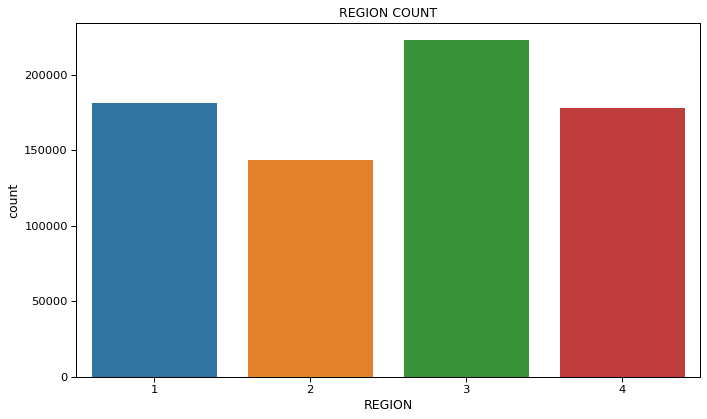

In [ ]:
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df1,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

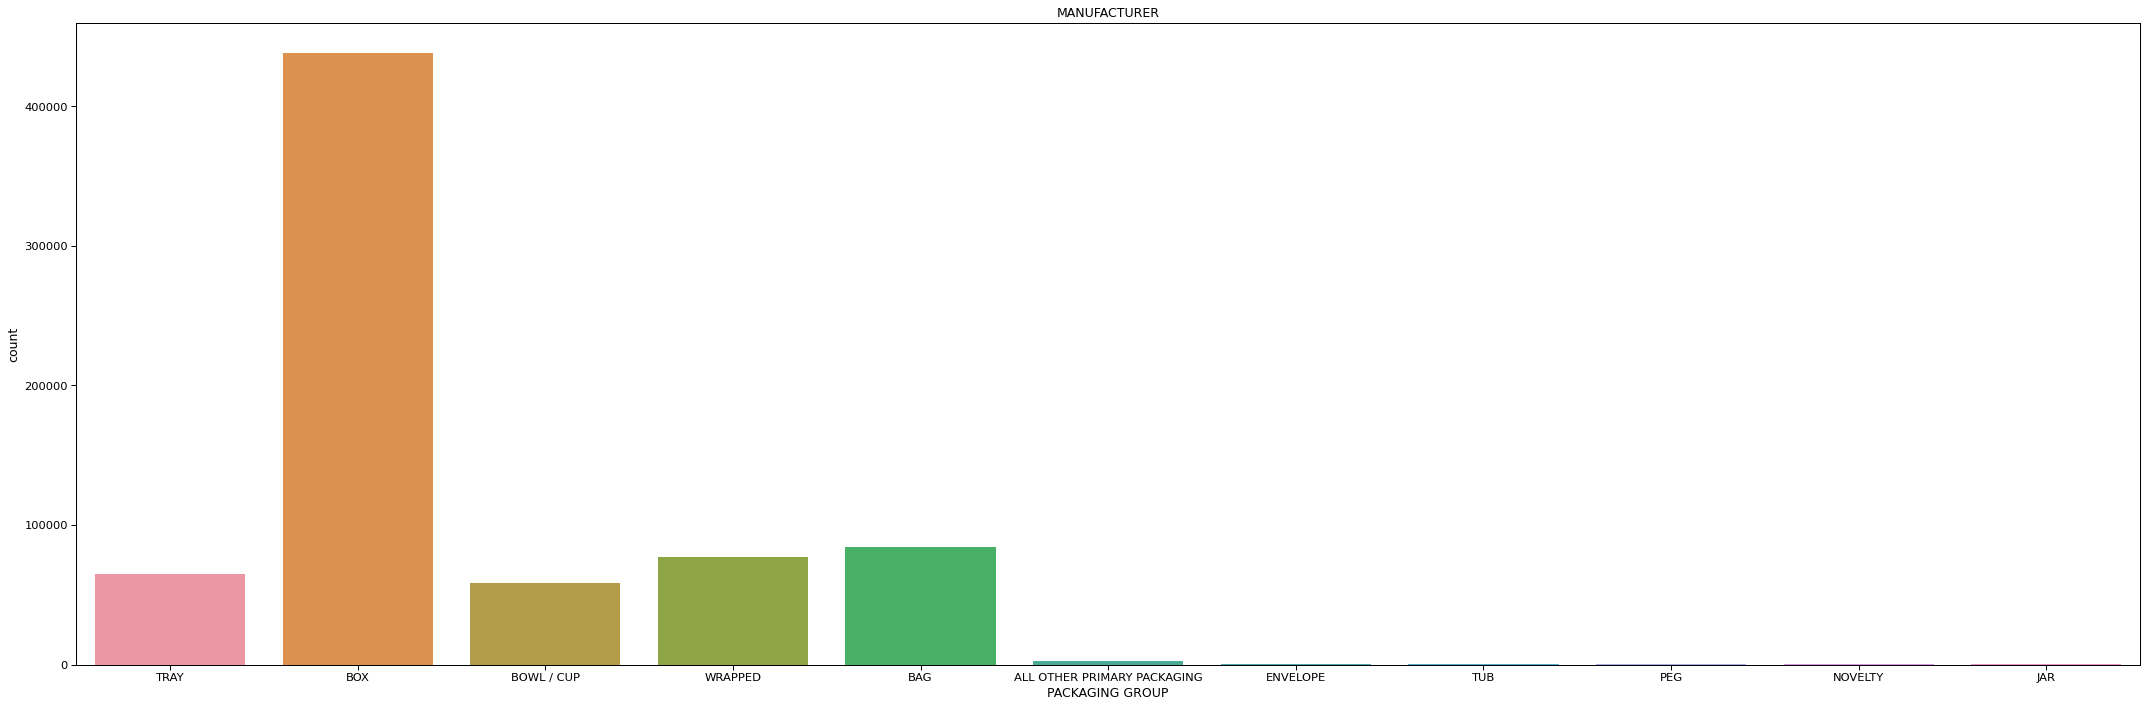

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df1,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

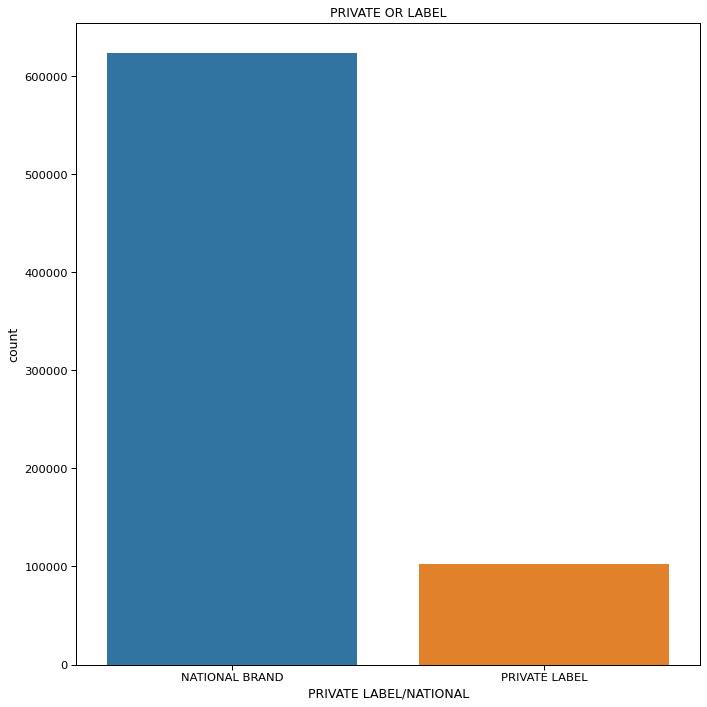

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df1,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

In [ ]:
df1['WEEK ENDING'] = pd.to_datetime(df1['WEEK ENDING'])
df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])
df3['WEEK ENDING'] = pd.to_datetime(df3['WEEK ENDING'])

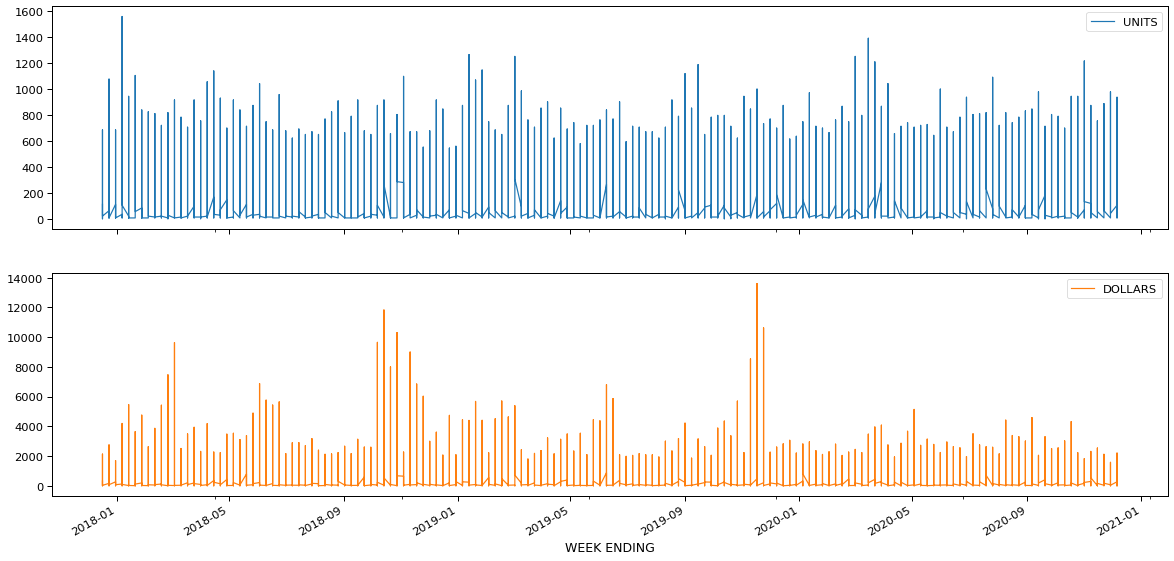

In [ ]:
df1 = df1.set_index('WEEK ENDING')
df1_plot = df1[['UNITS','DOLLARS']]
df1_plot.plot(subplots=True,figsize=(20,10));

**BEFORE COVID PERIOD**

In [ ]:
#before covid time - CHECKING how the categorical
df1_analysis_before['WEEK ENDING'] = pd.to_datetime(df1_analysis_before['WEEK ENDING'])
date_frame_analysis_before = df1_analysis_before.set_index('WEEK ENDING')
df_covid_analysis_before = date_frame_analysis_before[(date_frame_analysis_before.index > '2017-12-17') & (date_frame_analysis_before.index <= '2020-03-13')]

In [ ]:
#count before covid period
df_covid_analysis_before.count()

REGION                    551035
UPC                       551035
CATEGORY                  551035
PARENT                    551035
MANUFACTURER              551035
BRAND                     551035
MAJOR BRAND               551035
PRIVATE LABEL/NATIONAL    551035
PRODUCT DESCRIPTION       551035
PRODUCT TYPE              551035
PACKAGING GROUP           551035
FLAVOR/SCENT              551035
UNITS                     551035
DOLLARS                   551035
dtype: int64

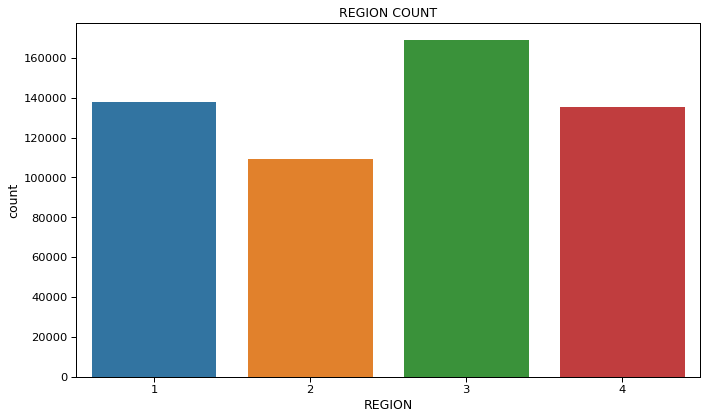

In [ ]:
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

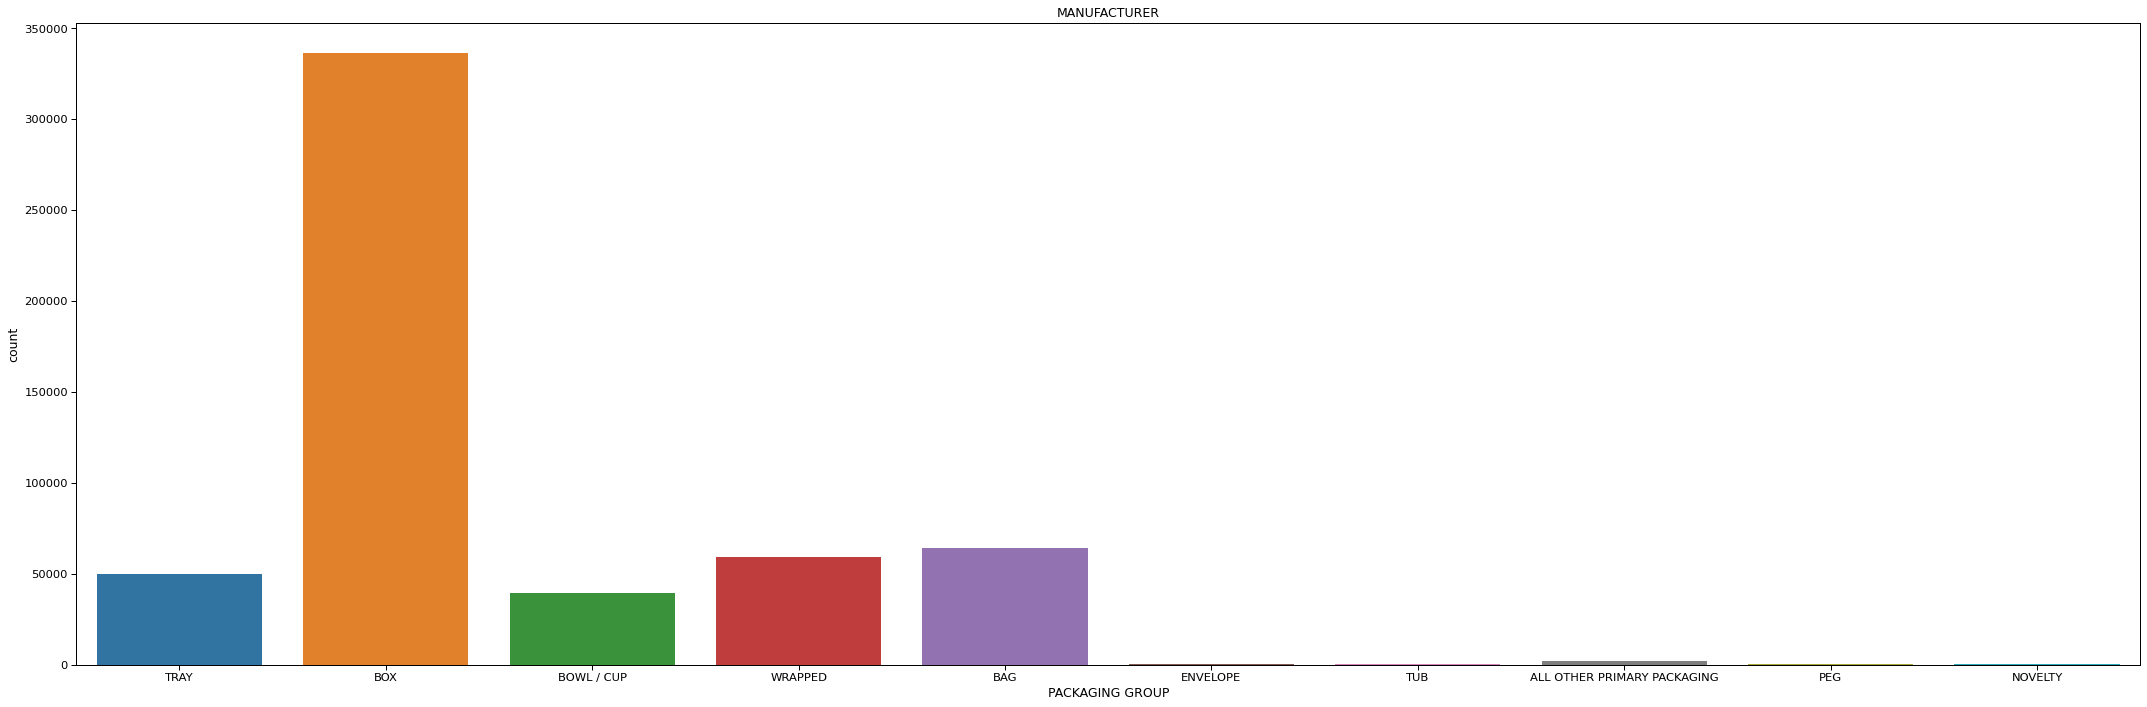

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

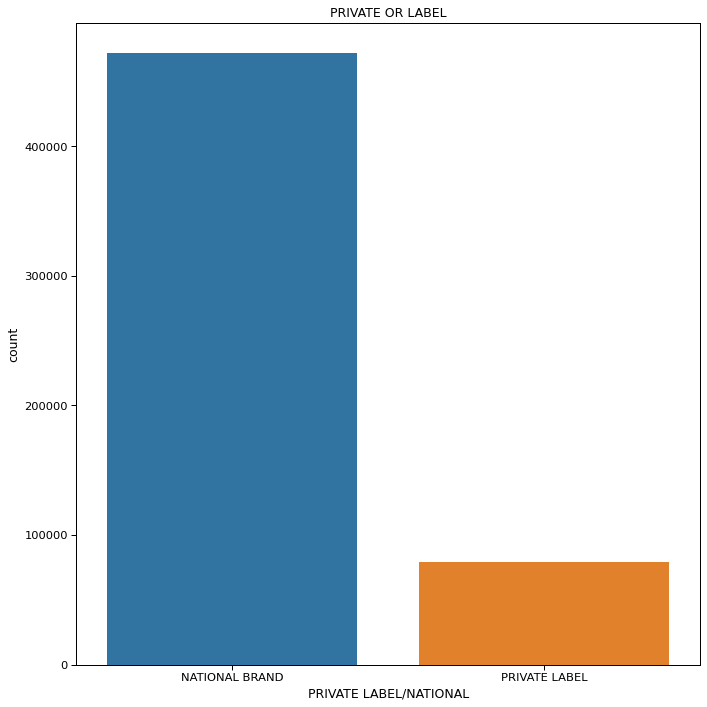

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

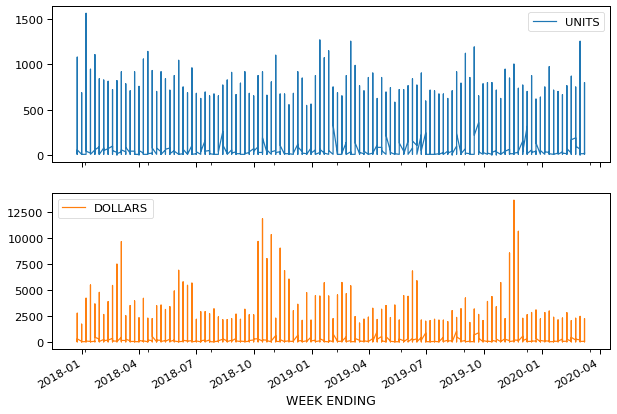

In [ ]:
df_covid_plot= df_covid_analysis_before[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(10,7));

**DURING COVID TIME**

In [ ]:
#during covid time - CHECKING how the categorical
df1_analysis_during['WEEK ENDING'] = pd.to_datetime(df1_analysis_during['WEEK ENDING'])
date_frame_analysis_during = df1_analysis_during.set_index('WEEK ENDING')
df_covid_analysis_during = date_frame_analysis_during[(date_frame_analysis_during.index > '2020-03-14') & (date_frame_analysis_during.index <= '2020-12-06')]

In [ ]:
#count during covid period
df_covid_analysis_during.count()

REGION                    165002
UPC                       165002
CATEGORY                  165002
PARENT                    165002
MANUFACTURER              165002
BRAND                     165002
MAJOR BRAND               165002
PRIVATE LABEL/NATIONAL    165002
PRODUCT DESCRIPTION       165002
PRODUCT TYPE              165002
PACKAGING GROUP           165002
FLAVOR/SCENT              165002
UNITS                     165002
DOLLARS                   165002
dtype: int64

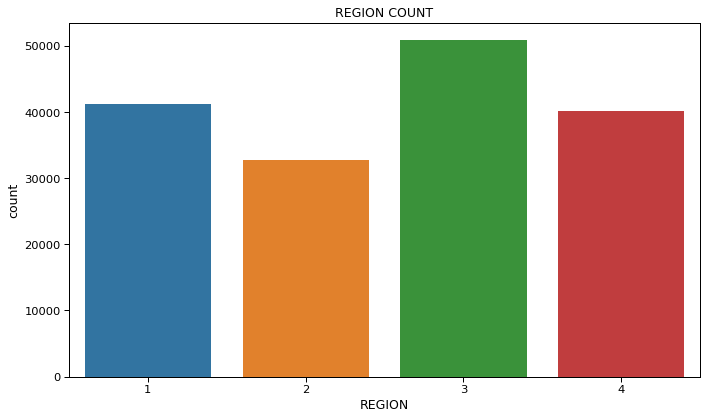

In [ ]:
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

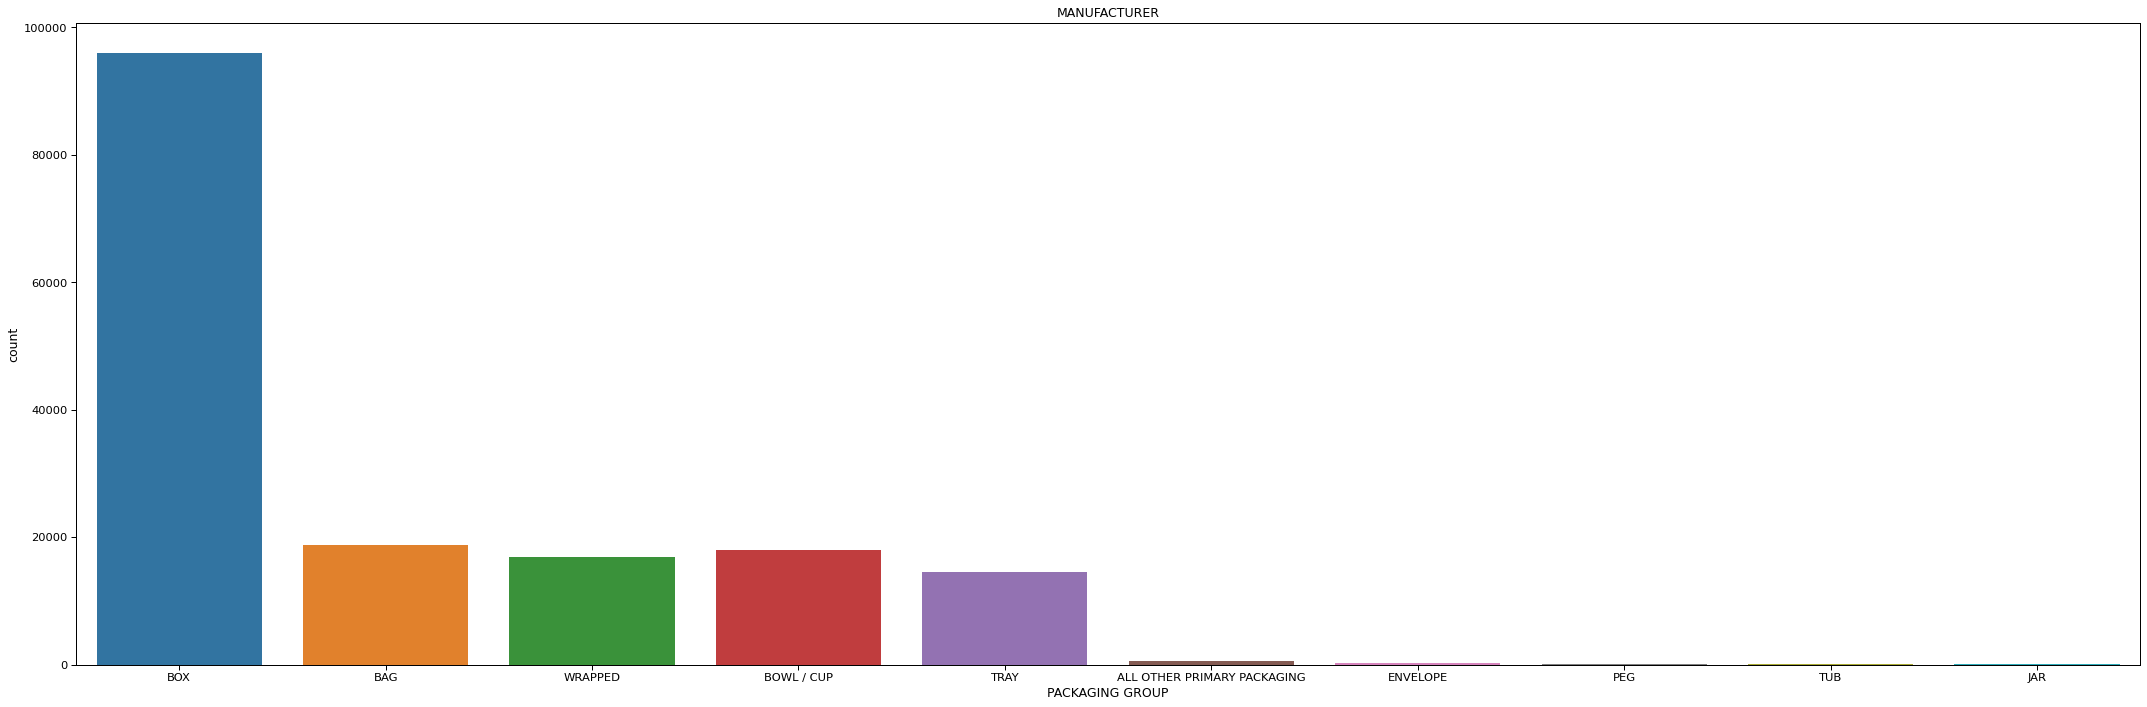

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

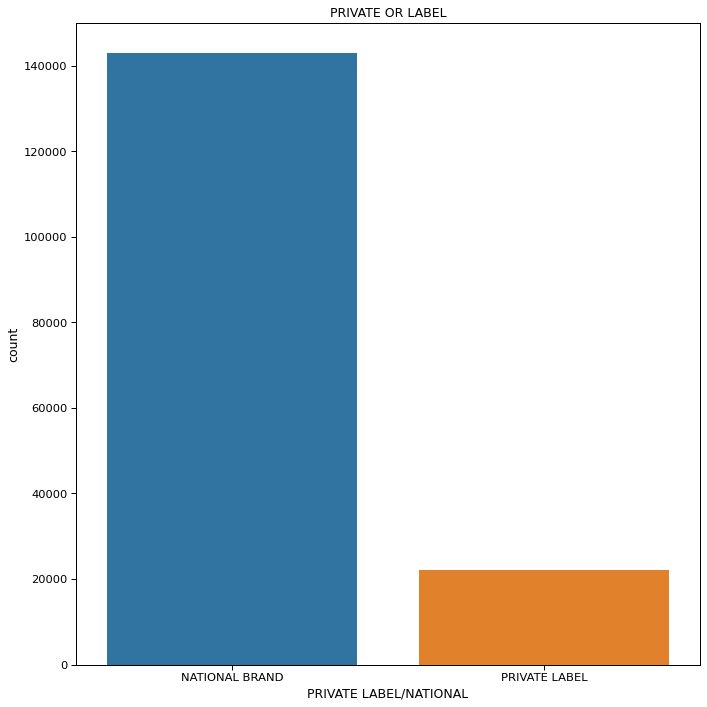

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

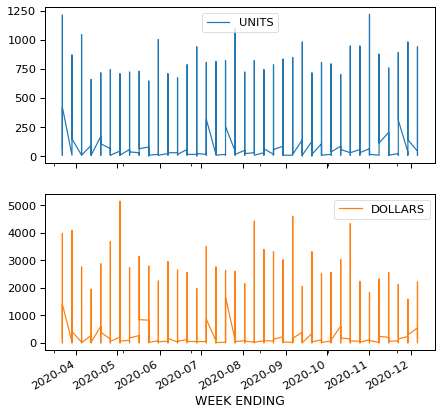

In [ ]:
df_covid_plot= df_covid_analysis_during[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(7,7));

**STARTING OUR GENERAL ANALYSIS**

In [ ]:
print(df1.shape)
print(df1.columns)
print(df1.isnull().any())
print(df1.nunique())

(725936, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5972
CATEGORY                      1
PARENT                      489
MANUFACTURER                526
BRAND                       793
MAJOR BRAND                 617
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5

In [ ]:
df1.describe()

REGION           UPC          UNITS        DOLLARS
count  725936.000000  7.259360e+05  725936.000000  725936.000000
mean        2.547482  1.485500e+10      42.831886     134.826147
std         1.112259  2.112804e+03      63.163012     188.627256
min         1.000000  1.485500e+10       0.388889       0.000000
25%         2.000000  1.485500e+10       7.000000      34.930000
50%         3.000000  1.485500e+10      21.000000      71.960000
75%         3.000000  1.485500e+10      49.000000     158.130000
max         4.000000  1.485501e+10    1561.000000   13608.490000

In [ ]:
df1_new.head()

REGION WEEK ENDING          UPC              CATEGORY      PARENT  \
0       4   1/28/2018  14854998001  DINNERS/ENTREES - FZ    PARENT 2   
1       1    2/4/2018  14854997630  DINNERS/ENTREES - FZ  PARENT 215   
2       1   2/11/2018  14854999434  DINNERS/ENTREES - FZ  PARENT 209   
3       1   2/11/2018  14854998940  DINNERS/ENTREES - FZ  PARENT 203   
4       2   2/25/2018  14854999115  DINNERS/ENTREES - FZ  PARENT 208   

       MANUFACTURER      BRAND      MAJOR BRAND PRIVATE LABEL/NATIONAL  \
0   MANUFACTURER 19  BRAND 312  MAJOR BRAND 238         NATIONAL BRAND   
1  MANUFACTURER 222  BRAND 318  MAJOR BRAND 252         NATIONAL BRAND   
2  MANUFACTURER 213  BRAND 402  MAJOR BRAND 236         NATIONAL BRAND   
3  MANUFACTURER 207  BRAND 322  MAJOR BRAND 256         NATIONAL BRAND   
4  MANUFACTURER 212  BRAND 294  MAJOR BRAND 232         NATIONAL BRAND   

  PRODUCT DESCRIPTION     PRODUCT TYPE PACKAGING GROUP FLAVOR/SCENT  UNITS  \
0        PRODUCT 5938           ENTREE            TRAY  HOT / SPICY  238.0   
1        PRODUCT 5754         CORN DOG             BOX         MEAT  147.0   
2        PRODUCT 6647           ENTREE            TRAY        ASIAN  203.0   
3        PRODUCT 6409  POCKET SANDWICH             BOX         MEAT   56.0   
4        PRODUCT 6492           ENTREE             BOX       CHEESE   91.0   

   DOLLARS  
0   520.10  
1   883.33  
2   192.08  
3   256.13  
4   249.13

In [ ]:
#we will be dropping this column and we wont be taking this our prediction
df1_new['UPC'].value_counts()

14854997957    624
14854997733    624
14854997645    624
14854998251    624
14854998280    624
14854997569    624
14854998054    624
14854997514    624
14854999211    624
14854998583    624
14854998034    624
14854997522    624
14854997972    624
14854997730    624
14854997755    624
14854997909    624
14854997649    624
14854998081    624
14854998332    624
14854997820    624
14854998416    624
14854997805    624
14854998046    624
14854997659    624
14854998645    624
14854998427    624
14854997515    624
14854997680    624
14854997710    624
14854998405    624
14854998044    624
14854997867    624
14854997555    624
14854997949    624
14854997721    624
14854997720    624
14854998605    624
14854997741    624
14854997931    624
14854997727    624
14854997637    624
14854998149    624
14854997935    624
14854998659    624
14854998615    624
14854999370    624
14854998121    624
14854998006    624
14854998556    624
14854997784    624
14854998004    624
14854998822    623
14854998424 

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['PARENT'].value_counts()

PARENT 2         164837
PARENT 203       135320
PRIVATE LABEL    102667
PARENT 208        47928
PARENT 209        43562
PARENT 206        28204
PARENT 47         19282
PARENT 211        17919
PARENT 222        16781
PARENT 204        12128
PARENT 216         9202
PARENT 212         7505
PARENT 225         7059
PARENT 219         5654
PARENT 221         4902
PARENT 217         4608
PARENT 228         4388
PARENT 226         3951
PARENT 229         3835
PARENT 234         3564
PARENT 215         3081
PARENT 69          3009
PARENT 61          2861
PARENT 256         2591
PARENT 213         2497
PARENT 210         2488
PARENT 246         2133
PARENT 241         2019
PARENT 253         1974
PARENT 205         1969
PARENT 227         1907
PARENT 266         1783
PARENT 255         1672
PARENT 252         1492
PARENT 250         1394
PARENT 237         1306
PARENT 231         1246
PARENT 236         1213
PARENT 260         1199
PARENT 232         1171
PARENT 285         1156
PARENT 230      

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['MANUFACTURER'].value_counts()

MANUFACTURER 207    130272
MANUFACTURER 19     129624
PRIVATE LABEL       102667
MANUFACTURER 212     45158
MANUFACTURER 213     43562
MANUFACTURER 210     28204
MANUFACTURER 2       19503
MANUFACTURER 48      19251
MANUFACTURER 216     17919
MANUFACTURER 215     12274
MANUFACTURER 208     11785
MANUFACTURER 224      9202
MANUFACTURER 230      8206
MANUFACTURER 217      7505
MANUFACTURER 233      7059
MANUFACTURER 235      6755
MANUFACTURER 227      5654
MANUFACTURER 229      4902
MANUFACTURER 220      4791
MANUFACTURER 225      4608
MANUFACTURER 237      4388
MANUFACTURER 234      3951
MANUFACTURER 238      3835
MANUFACTURER 244      3531
MANUFACTURER 222      3027
MANUFACTURER 71       3009
MANUFACTURER 223      2706
MANUFACTURER 62       2663
MANUFACTURER 269      2591
MANUFACTURER 214      2488
MANUFACTURER 221      2214
MANUFACTURER 257      2133
MANUFACTURER 218      2132
MANUFACTURER 252      2019
MANUFACTURER 266      1974
MANUFACTURER 209      1969
MANUFACTURER 236      1907
M

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df1_new['BRAND'].value_counts()

PRIVATE LABEL    103048
BRAND 286         40240
BRAND 301         28925
BRAND 322         22888
BRAND 284         19062
BRAND 292         17282
BRAND 294         15235
BRAND 321         14630
BRAND 298         14377
BRAND 330         13137
BRAND 306         13020
BRAND 312         11705
BRAND 287         11316
BRAND 282         10820
BRAND 285         10818
BRAND 370          9368
BRAND 302          9161
BRAND 293          9012
BRAND 299          8948
BRAND 304          8668
BRAND 361          8309
BRAND 308          7505
BRAND 289          7305
BRAND 320          7190
BRAND 297          6740
BRAND 338          6579
BRAND 351          6239
BRAND 332          5949
BRAND 324          5856
BRAND 305          5672
BRAND 328          5654
BRAND 296          5122
BRAND 334          4902
BRAND 283          4465
BRAND 337          4326
BRAND 345          4134
BRAND 2            4097
BRAND 357          3978
BRAND 350          3951
BRAND 325          3935
BRAND 348          3701
BRAND 372       

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      102667
MAJOR BRAND 225     49504
MAJOR BRAND 239     31021
MAJOR BRAND 223     25610
MAJOR BRAND 232     23686
MAJOR BRAND 256     22913
MAJOR BRAND 236     21077
MAJOR BRAND 54      19251
MAJOR BRAND 230     17282
MAJOR BRAND 255     14630
MAJOR BRAND 238     13893
MAJOR BRAND 262     13137
MAJOR BRAND 244     13020
MAJOR BRAND 226     11785
MAJOR BRAND 222     10820
MAJOR BRAND 224     10818
MAJOR BRAND 293     10023
MAJOR BRAND 240      9161
MAJOR BRAND 237      9022
MAJOR BRAND 231      9012
MAJOR BRAND 284      8743
MAJOR BRAND 242      8668
MAJOR BRAND 243      8137
MAJOR BRAND 254      7768
MAJOR BRAND 245      7505
MAJOR BRAND 234      7028
MAJOR BRAND 235      6740
MAJOR BRAND 268      6579
MAJOR BRAND 228      6399
MAJOR BRAND 258      6396
MAJOR BRAND 277      6239
MAJOR BRAND 263      5949
MAJOR BRAND 260      5654
MAJOR BRAND 265      4902
MAJOR BRAND 2        4827
MAJOR BRAND 286      4705
MAJOR BRAND 267      4326
MAJOR BRAND 266      4182
MAJOR BRAND 

In [ ]:
#we will be encoding this column for further analysis and it helps in our prediction
df1_new['PRIVATE LABEL/NATIONAL'].value_counts()

NATIONAL BRAND    623269
PRIVATE LABEL     102667
Name: PRIVATE LABEL/NATIONAL, dtype: int64

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 5974     624
PRODUCT 5962     624
PRODUCT 5816     624
PRODUCT 5952     624
PRODUCT 5764     624
PRODUCT 5957     624
PRODUCT 5761     624
PRODUCT 5939     624
PRODUCT 5838     624
PRODUCT 5847     624
PRODUCT 5757     624
PRODUCT 5804     624
PRODUCT 6010     624
PRODUCT 5805     624
PRODUCT 5923     624
PRODUCT 6228     624
PRODUCT 5699     624
PRODUCT 6619     624
PRODUCT 5916     624
PRODUCT 6544     624
PRODUCT 5799     624
PRODUCT 5722     624
PRODUCT 6062     624
PRODUCT 5798     624
PRODUCT 5904     624
PRODUCT 5912     624
PRODUCT 5996     624
PRODUCT 5770     624
PRODUCT 6213     624
PRODUCT 5902     624
PRODUCT 5829     624
PRODUCT 5810     624
PRODUCT 5956     624
PRODUCT 5890     624
PRODUCT 6248     624
PRODUCT 5696     624
PRODUCT 6262     624
PRODUCT 6149     624
PRODUCT 5695     624
PRODUCT 5713     624
PRODUCT 5940     624
PRODUCT 6102     624
PRODUCT 5869     624
PRODUCT 6144     624
PRODUCT 5781     624
PRODUCT 5793     624
PRODUCT 6269     624
PRODUCT 6075 

In [ ]:
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df1_new['REGION'].value_counts()

3    223154
1    181313
4    177798
2    143671
Name: REGION, dtype: int64

In [ ]:
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df1_new['PRODUCT TYPE'].value_counts()

ENTREE                 507822
BURRITO                 39140
DINNER                  34506
POCKET SANDWICH         33411
SANDWICH                26810
CORN DOG                17301
CHEESEBURGER            13097
CHIMICHANGA             11005
TAMALE                   3660
EMPANADA                 3640
STROMBOLI                3288
QUESADILLA               3082
TACO                     2628
SLIDER                   2611
SANDWICH WRAP            1826
PANINI SANDWICH          1750
HAMBURGER                1727
SUBMARINE SANDWICH       1654
CALZONE                  1442
TURNOVER                 1397
PRETZEL DOG              1357
TAQUITO                  1284
PUPUSA                   1237
PASTY                     778
CHEESEBURGER SLIDER       688
BAGEL DOG                 668
PANINI                    620
CHICKEN SANDWICH          535
KOLACHE                   532
ENCHILADA                 469
HOT DOG                   453
SIOPAO                    422
AREPAS                    419
BUREK     

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df1_new['PACKAGING GROUP'].value_counts()

BOX                            438000
BAG                             83986
WRAPPED                         76984
TRAY                            65147
BOWL / CUP                      58058
ALL OTHER PRIMARY PACKAGING      2720
ENVELOPE                          533
TUB                               319
PEG                               184
NOVELTY                             4
JAR                                 1
Name: PACKAGING GROUP, dtype: int64

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df1_new['FLAVOR/SCENT'].value_counts()

MEAT                      194998
POULTRY                   143661
ALL OTHER FLAVOR/SCENT     99216
CHEESE                     86014
VEGETABLE                  37369
TANGY                      28205
ASIAN                      27317
HOT / SPICY                23374
MEXICAN                    18509
FRUIT                      14972
HERB & SPICE               14971
SEAFOOD                    12857
PEANUT BUTTER               7453
SWEET                       6378
FISH                        3613
MUSHROOM                    2753
CHOCOLATE                   1165
NUT & SEED                   892
LIQUOR / LIQUEUR             877
NEW ORLEANS                  674
GRAIN                        487
SMOKED                        58
VINEGAR / VINAIGRETTE         54
PLAIN                         53
EGG                           16
Name: FLAVOR/SCENT, dtype: int64

In [ ]:
df1_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)

In [ ]:
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df1_new.head()

REGION WEEK ENDING PRIVATE LABEL/NATIONAL     PRODUCT TYPE PACKAGING GROUP  \
0       4  28-01-2018         NATIONAL BRAND           ENTREE            TRAY   
1       1  04-02-2018         NATIONAL BRAND         CORN DOG             BOX   
2       1  11-02-2018         NATIONAL BRAND           ENTREE            TRAY   
3       1  11-02-2018         NATIONAL BRAND  POCKET SANDWICH             BOX   
4       2  25-02-2018         NATIONAL BRAND           ENTREE             BOX   

  FLAVOR/SCENT  UNITS  DOLLARS  
0  HOT / SPICY  238.0   520.10  
1         MEAT  147.0   883.33  
2        ASIAN  203.0   192.08  
3         MEAT   56.0   256.13  
4       CHEESE   91.0   249.13

In [ ]:
#renaming the columns
df1_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)

In [ ]:
df1_new.head()

REGION        DATE    PRODUCTLABEL      PRODUCTTYPE PACKAGINGGROUP  \
0       4  28-01-2018  NATIONAL BRAND           ENTREE           TRAY   
1       1  04-02-2018  NATIONAL BRAND         CORN DOG            BOX   
2       1  11-02-2018  NATIONAL BRAND           ENTREE           TRAY   
3       1  11-02-2018  NATIONAL BRAND  POCKET SANDWICH            BOX   
4       2  25-02-2018  NATIONAL BRAND           ENTREE            BOX   

         SCENT  UNITS  DOLLARS  
0  HOT / SPICY  238.0   520.10  
1         MEAT  147.0   883.33  
2        ASIAN  203.0   192.08  
3         MEAT   56.0   256.13  
4       CHEESE   91.0   249.13

In [ ]:
# Here we are encoding the columns that we want to include in our analysis
df1_new['PRODUCTLABEL'] = df1_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df1_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df1_new.PRODUCTTYPE)
df1_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df1_new.PACKAGINGGROUP)
df1_new['SCENT'] = LabelEncoder().fit_transform(df1_new.SCENT)

In [ ]:
df1_new['PRODUCTTYPE'].value_counts()

26    507822
5      39140
21     34506
52     33411
58     26810
18     17301
11     13097
17     11005
67      3660
23      3640
63      3288
55      3082
65      2628
61      2611
59      1826
37      1750
29      1727
64      1654
7       1442
69      1397
53      1357
68      1284
54      1237
42       778
12       688
1        668
36       620
13       535
33       532
25       469
31       453
60       422
0        419
3        414
24       397
47       389
51       369
56       303
32       291
27       242
22       224
50       212
35       194
14       194
8        170
71       164
57       151
49       136
44       116
4        112
9        109
43        91
45        80
38        54
70        51
34        43
46        25
19        25
48        24
62        15
39        13
16        12
30        11
41        10
40         9
6          8
66         4
2          3
20         3
10         3
28         3
15         1
72         1
73         1
Name: PRODUCTTYPE, dtype: int64

In [ ]:
df1_new['PACKAGINGGROUP'].value_counts()

3     438000
1      83986
10     76984
8      65147
2      58058
0       2720
4        533
9        319
7        184
6          4
5          1
Name: PACKAGINGGROUP, dtype: int64

In [ ]:
df1_new['SCENT'].value_counts()

11    194998
18    143661
0      99216
2      86014
23     37369
22     28205
1      27317
9      23374
12     18509
6      14972
8      14971
19     12857
16      7453
21      6378
5       3613
13      2753
3       1165
15       892
10       877
14       674
7        487
20        58
24        54
17        53
4         16
Name: SCENT, dtype: int64

In [ ]:
df1_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       4  28-01-2018             1           26               8      9   
1       1  04-02-2018             1           18               3     11   
2       1  11-02-2018             1           26               8      1   
3       1  11-02-2018             1           52               3     11   
4       2  25-02-2018             1           26               3      2   

   UNITS  DOLLARS  
0  238.0   520.10  
1  147.0   883.33  
2  203.0   192.08  
3   56.0   256.13  
4   91.0   249.13

In [ ]:
df1_new['PPU'] = df1_new['DOLLARS']/df1_new['UNITS']
df1_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       4  28-01-2018             1           26               8      9   
1       1  04-02-2018             1           18               3     11   
2       1  11-02-2018             1           26               8      1   
3       1  11-02-2018             1           52               3     11   
4       2  25-02-2018             1           26               3      2   

   UNITS  DOLLARS       PPU  
0  238.0   520.10  2.185294  
1  147.0   883.33  6.009048  
2  203.0   192.08  0.946207  
3   56.0   256.13  4.573750  
4   91.0   249.13  2.737692

In [ ]:
df1_new.count()

REGION            725936
DATE              725936
PRODUCTLABEL      725936
PRODUCTTYPE       725936
PACKAGINGGROUP    725936
SCENT             725936
UNITS             725936
DOLLARS           725936
PPU               725936
dtype: int64

In [ ]:
df1_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       4  28-01-2018             1           26               8      9   
1       1  04-02-2018             1           18               3     11   
2       1  11-02-2018             1           26               8      1   
3       1  11-02-2018             1           52               3     11   
4       2  25-02-2018             1           26               3      2   

   UNITS  DOLLARS       PPU  
0  238.0   520.10  2.185294  
1  147.0   883.33  6.009048  
2  203.0   192.08  0.946207  
3   56.0   256.13  4.573750  
4   91.0   249.13  2.737692

In [ ]:
df1_new[["month","date","year"]] = df1_new["DATE"].str.split("-", expand=True)

In [ ]:
df1_new.drop(['DATE'], axis=1, inplace=True)
df1_new.head()

REGION  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  UNITS  DOLLARS  \
0       4             1           26               8      9  238.0   520.10   
1       1             1           18               3     11  147.0   883.33   
2       1             1           26               8      1  203.0   192.08   
3       1             1           52               3     11   56.0   256.13   
4       2             1           26               3      2   91.0   249.13   

        PPU month date  year  
0  2.185294    28   01  2018  
1  6.009048    04   02  2018  
2  0.946207    11   02  2018  
3  4.573750    11   02  2018  
4  2.737692    25   02  2018

In [ ]:
X=df1_new.drop(['UNITS', 'DOLLARS'],axis=1).values
y=df1_new['UNITS'].values

In [ ]:
X

array([[4, 1, 26, ..., '1', '28', '2018'],
       [1, 1, 18, ..., '2', '4', '2018'],
       [1, 1, 26, ..., '2', '11', '2018'],
       ...,
       [3, 1, 67, ..., '4', '26', '2020'],
       [1, 1, 26, ..., '10', '11', '2020'],
       [2, 1, 26, ..., '10', '18', '2020']], dtype=object)

In [ ]:
y

array([238., 147., 203., ...,   7.,   7.,   7.])

In [ ]:
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)

In [ ]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)

Linear Regression

In [ ]:
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)

For choosing the best model, we will consider RMSE as evaluation metric, because RMSE accounts for large errors and in general it is usually best to report RMSE rather than MSE because RMSE is measured in same units as the data rather than the MSE which is measured in squared units

In [ ]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
df1_predict = l_model.predict(X_test)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print("The RMSE for test set is "+str(rmse(df1_predict,y_test)))

The RMSE for test set is 60.76709947812078


In [ ]:
print('intercept:', l_model.intercept_)
print('slope:', l_model.coef_)

intercept: 43.050320892009736
slope: [   2.3032663    23.21083528  -14.16740302   12.65561532    6.09855019
 -329.38595694   -2.37457296   -5.37386053    0.99722717]


Ridge Regression

In [ ]:
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=10, return_train_score= True)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)

{'alpha': 0.1}


In [ ]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.1)
ridge_model=ridge_1.fit(X_train,y_train)


In [ ]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
ridge1_predict = ridge_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(ridge1_predict,y_test)))

The RMSE for test set is 60.767096747983004


In [ ]:
print('intercept:', ridge_model.intercept_)
print('slope:', ridge_model.coef_)

intercept: 43.048714724229804
slope: [   2.30316864   23.21082271  -14.16815937   12.6556677     6.09844202
 -329.3526896    -2.37456862   -5.37388125    0.99712425]


Lasso Regression

In [ ]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)


{'alpha': 0.01}


In [ ]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model=lasso_1.fit(X_train,y_train)

In [ ]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
lasso1_predict = lasso_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(lasso1_predict,y_test)))

The RMSE for test set is 60.767233259763636


In [ ]:
print('intercept:', lasso_model.intercept_)
print('slope:', lasso_model.coef_)

intercept: 42.81954190405342
slope: [   2.21951666   23.13817481  -13.92932339   12.55016317    5.96016912
 -323.99501244   -5.2890265    -2.26330117    0.86984646]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)

tree_predict1 = tree1.predict(X_test)

print("The RMSE for test set is "+str(rmse(tree_predict1,y_test)))

The RMSE for test set is 64.97344002286891


From above results we can see that the RMSE is almost same for all the models and we can use Linear regression for prediction as it has the least RMSE. We can see that the p-value of all variables are significant and have impact on the units variable.
We are using FBprophet for forecasting future average sales.

In [ ]:
import statsmodels.api as sm
ols1 = sm.add_constant(X_train)
est1 = sm.OLS(y_train, ols1)
estf1 = est1.fit()
print(estf1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4956.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        18:56:41   Log-Likelihood:            -3.0082e+06
No. Observations:              544452   AIC:                         6.016e+06
Df Residuals:                  544442   BIC:                         6.017e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0503      0.453     94.957      0.0

In [ ]:
!pip install fbprophet

In [ ]:
ts_analysis1 = df1_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis1['WEEK ENDING'] = pd.to_datetime(ts_analysis1['WEEK ENDING'])
ts_df1 = ts_analysis1.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()

In [ ]:
ts_df1 = ts_df1.reset_index()
ts_df1 = ts_df1.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


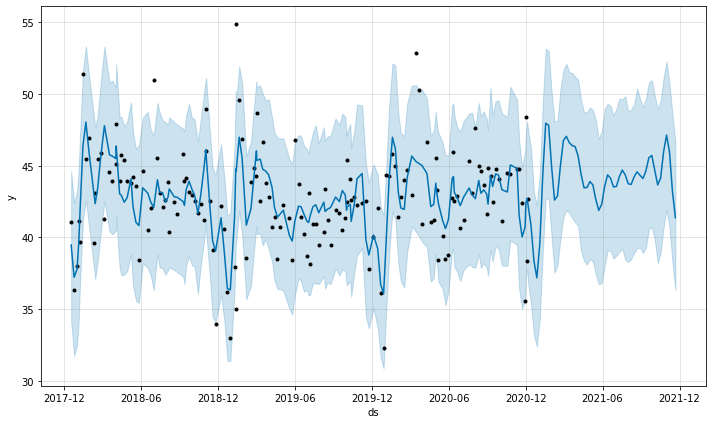

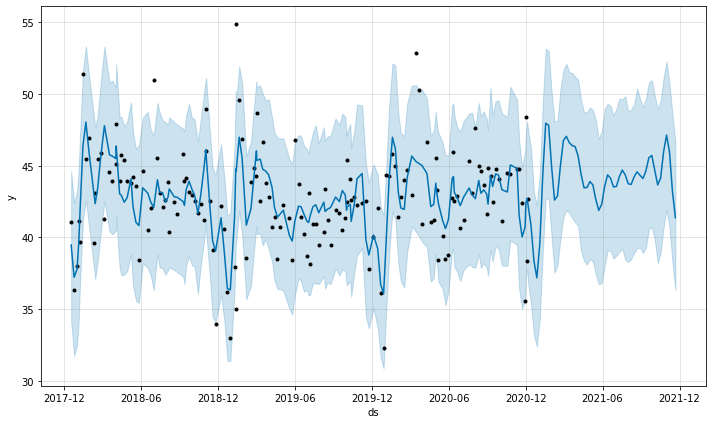

In [ ]:
from fbprophet import Prophet
m1 = Prophet(interval_width=0.95)
m1.fit(ts_df1)
future1 = m1.make_future_dataframe(periods = 50,freq='W')
forecast1 = m1.predict(future1)
#We are plotting the forecast for next few weeks 
m1.plot(forecast1)

In [ ]:
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

            ds       yhat  yhat_lower  yhat_upper
156 2020-12-13  40.861851   35.354679   46.241944
157 2020-12-20  38.388703   33.202064   43.143100
158 2020-12-27  37.186501   32.403746   42.269164
159 2021-01-03  39.545913   34.318872   44.520183
160 2021-01-10  44.361022   38.920504   49.326728
161 2021-01-17  47.969437   42.705746   53.171455
162 2021-01-24  47.821126   42.696941   53.009224
163 2021-01-31  44.942731   40.047283   50.182809
164 2021-02-07  42.606181   37.535731   48.096754
165 2021-02-14  42.901063   38.047069   48.124625
166 2021-02-21  45.019173   39.897591   50.356021
167 2021-02-28  46.758200   41.395043   51.674845
168 2021-03-07  47.053766   41.898415   52.120407
169 2021-03-14  46.611448   41.702683   51.528556
170 2021-03-21  46.406007   41.344714   51.474473
171 2021-03-28  46.334105   41.055022   51.203561
172 2021-04-04  45.673349   40.796964   51.017632
173 2021-04-11  44.412961   39.028853   49.557335
174 2021-04-18  43.468606   38.381788   48.746933


Below we can see the trends with respect to year and months in the year. The first graph represents an increasing trend as we progress in the years and the latter shows a fluctuating trend in the monthly frozen meals sales. For some months it is low while for some it is high. We can see January, March and November has highest sales. Overall, Tuesdays and Fridays have the highest sales in a week.


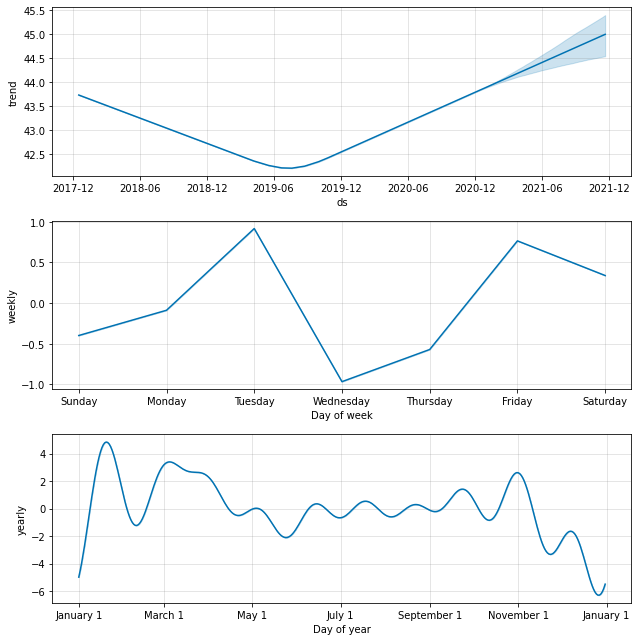

In [ ]:
#Plots to find if there is any seasonality
fig1 = m1.plot_components(forecast1)

**Frozen vegetables**

In [ ]:
#reading first 5 rows of df2
df2.head()

REGION WEEK ENDING          UPC               CATEGORY         PARENT  \
0       1  24-06-2018  14854986338  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
1       1  01-07-2018  14854989442  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
2       2  02-06-2019  14854986981  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
3       4  10-11-2019  14854986552  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
4       3  17-11-2019  14854987949  PLAIN VEGETABLES - FZ  PRIVATE LABEL   

    MANUFACTURER          BRAND    MAJOR BRAND PRIVATE LABEL/NATIONAL  \
0  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
1  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
2  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
3  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
4  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   

  PRODUCT DESCRIPTION     PRODUCT TYPE PACKAGING GROUP  \
0          PRODUCT 68   BRUSSEL SPROUT             BAG   
1        PRODUCT 1610          SPINACH             BOX   
2         PRODUCT 389  MIXED VEGETABLE             BAG   
3         PRODUCT 171         BROCCOLI             BAG   
4         PRODUCT 876             PEAS             BAG   

             FLAVOR/SCENT  UNITS  DOLLARS  
0  ALL OTHER FLAVOR/SCENT    287   285.53  
1  ALL OTHER FLAVOR/SCENT      7     8.19  
2                   ASIAN    168   166.32  
3  ALL OTHER FLAVOR/SCENT     35    85.05  
4  ALL OTHER FLAVOR/SCENT     14    50.26

In [ ]:
#for analysis during covid
df2_analysis_during = df2_new.copy()
#for analysis before covid
df2_analysis_before = df2_new.copy()

**OVER THE ENTIRE PERIOD**

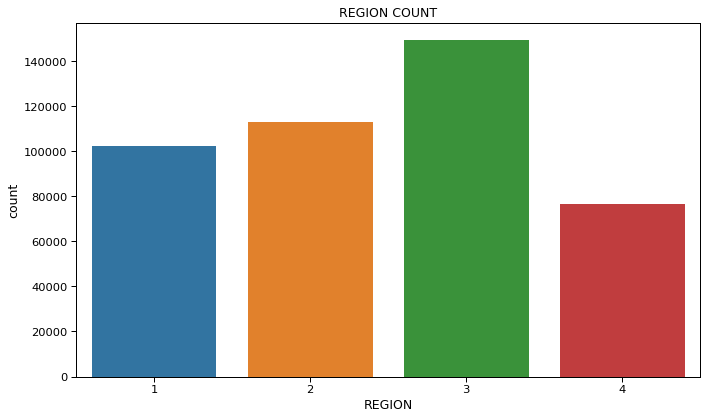

In [ ]:
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

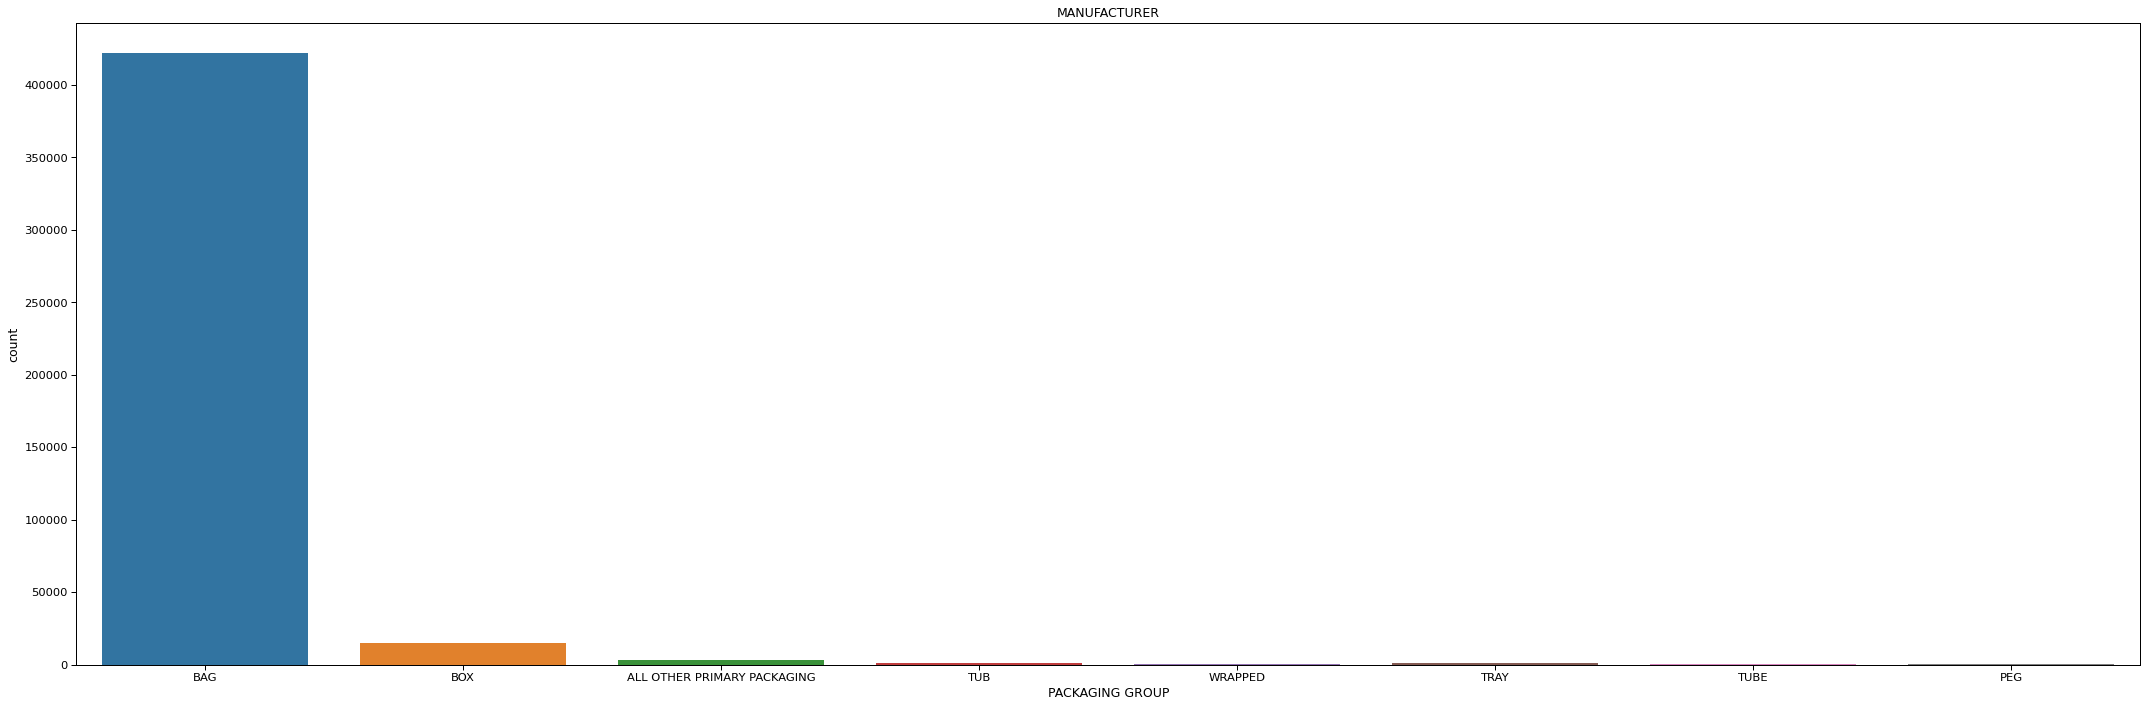

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

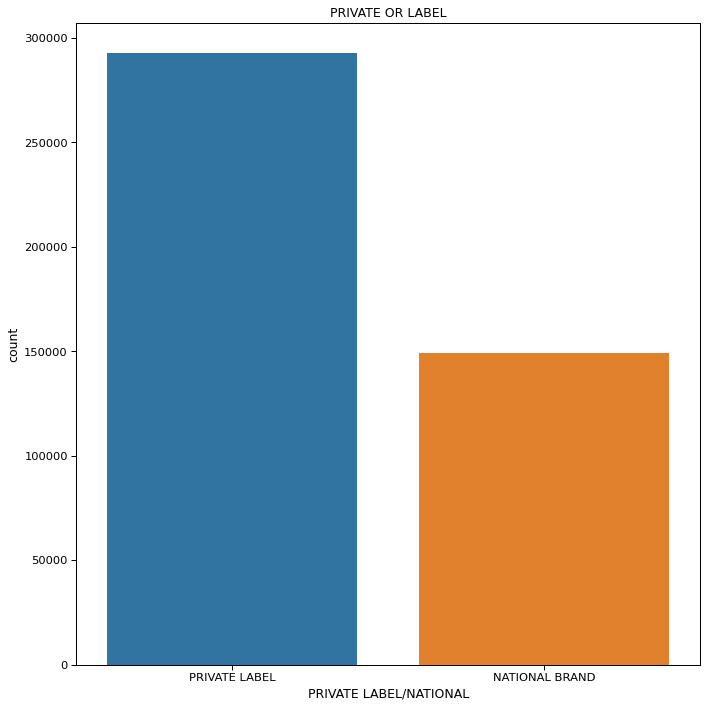

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

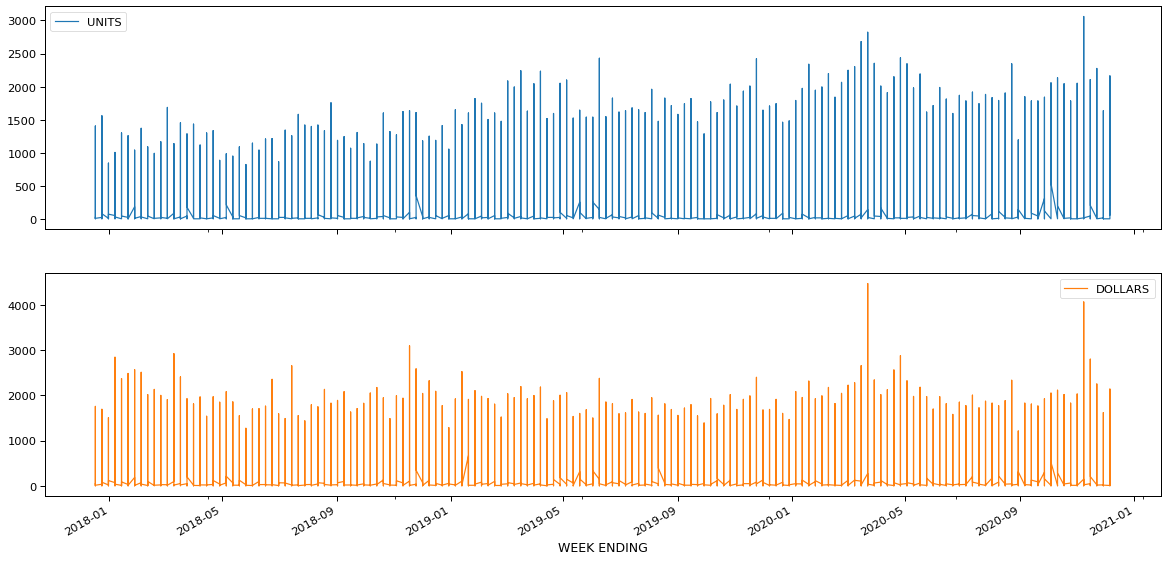

In [ ]:
df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])
df2 = df2.set_index('WEEK ENDING')
df2_plot = df2[['UNITS','DOLLARS']]
df2_plot.plot(subplots=True,figsize=(20,10));

**BEFORE COVID PERIOD**

In [ ]:
#before covid time - CHECKING how the categorical
df2_analysis_before['WEEK ENDING'] = pd.to_datetime(df2_analysis_before['WEEK ENDING'])
date_frame2_analysis_before = df2_analysis_before.set_index('WEEK ENDING')
df2_covid_analysis_before = date_frame2_analysis_before[(date_frame2_analysis_before.index > '2017-12-17') & (date_frame2_analysis_before.index <= '2020-03-08')]

In [ ]:
#count before covid period
df2_covid_analysis_before.count()

REGION                    332633
UPC                       332633
CATEGORY                  332633
PARENT                    332633
MANUFACTURER              332633
BRAND                     332633
MAJOR BRAND               332633
PRIVATE LABEL/NATIONAL    332633
PRODUCT DESCRIPTION       332633
PRODUCT TYPE              332633
PACKAGING GROUP           332633
FLAVOR/SCENT              332633
UNITS                     332633
DOLLARS                   332633
dtype: int64

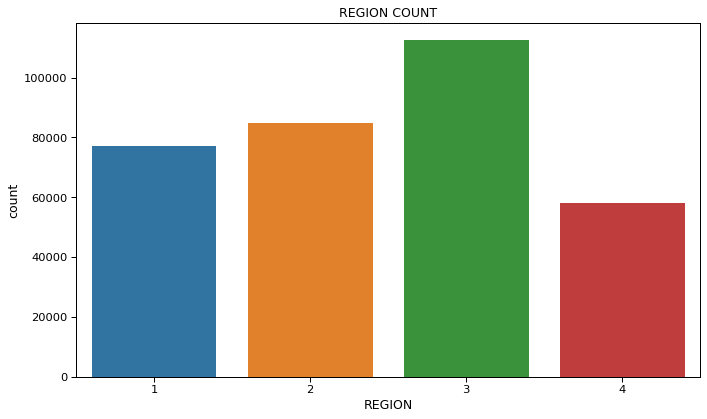

In [ ]:
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

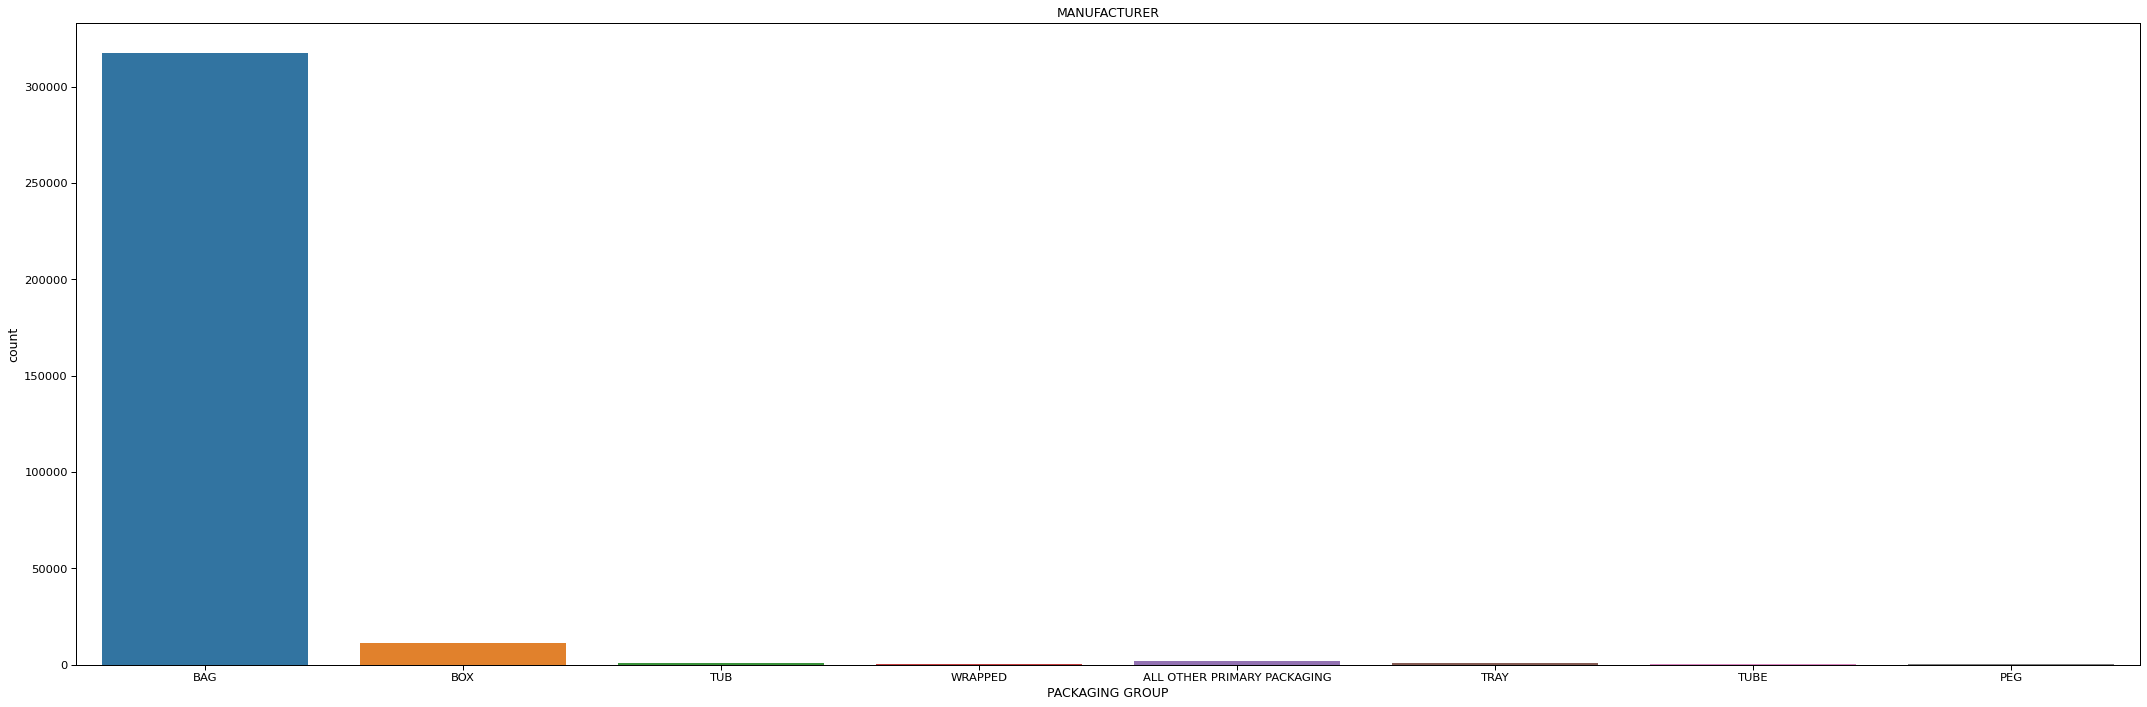

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

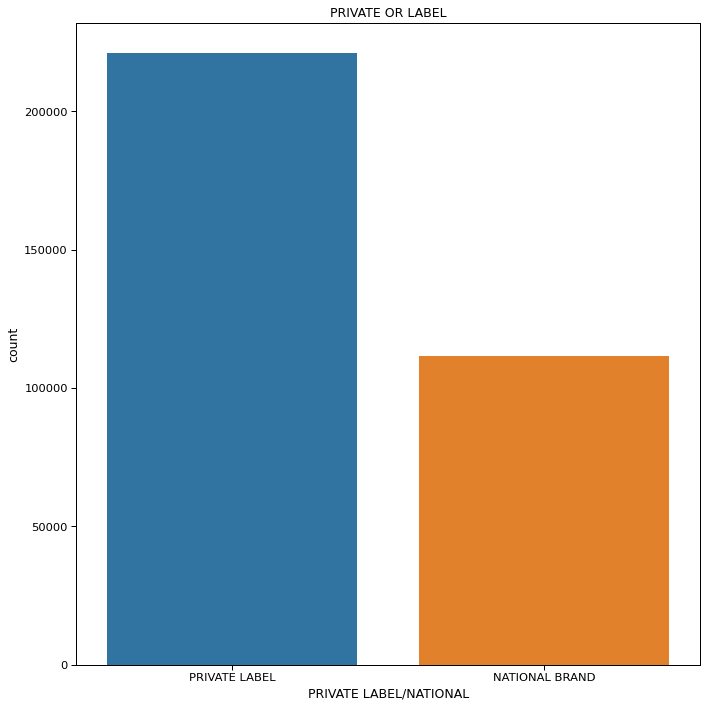

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

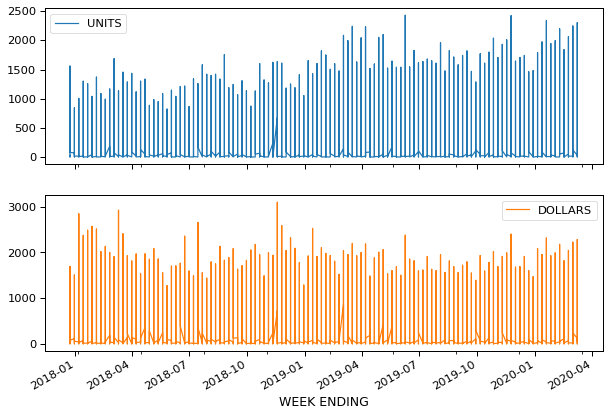

In [ ]:
df2_covid_plot= df2_covid_analysis_before[['UNITS','DOLLARS']]
df2_covid_plot.plot(subplots=True,figsize=(10,7));

**DURING COVID TIME**

In [ ]:
#during covid time - CHECKING how the categorical
df2_analysis_during['WEEK ENDING'] = pd.to_datetime(df2_analysis_during['WEEK ENDING'])
date_frame2_analysis_during = df2_analysis_during.set_index('WEEK ENDING')
df2_covid_analysis_during = date_frame2_analysis_during[(date_frame2_analysis_during.index > '2020-03-15') & (date_frame2_analysis_during.index <= '2020-12-06')]

In [ ]:
#count during covid period
df2_covid_analysis_during.count()

REGION                    102687
UPC                       102687
CATEGORY                  102687
PARENT                    102687
MANUFACTURER              102687
BRAND                     102687
MAJOR BRAND               102687
PRIVATE LABEL/NATIONAL    102687
PRODUCT DESCRIPTION       102687
PRODUCT TYPE              102687
PACKAGING GROUP           102687
FLAVOR/SCENT              102687
UNITS                     102687
DOLLARS                   102687
dtype: int64

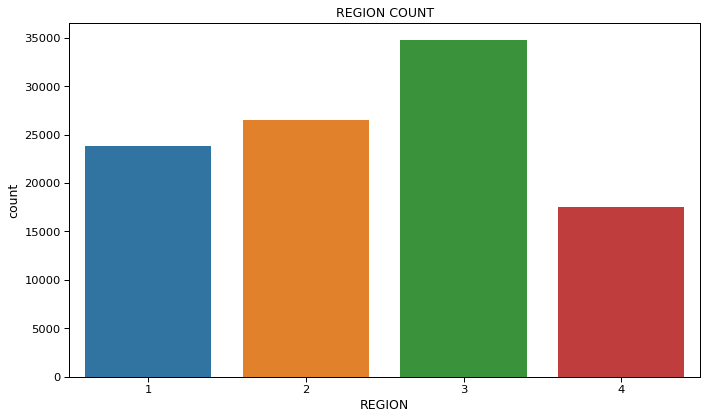

In [ ]:
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

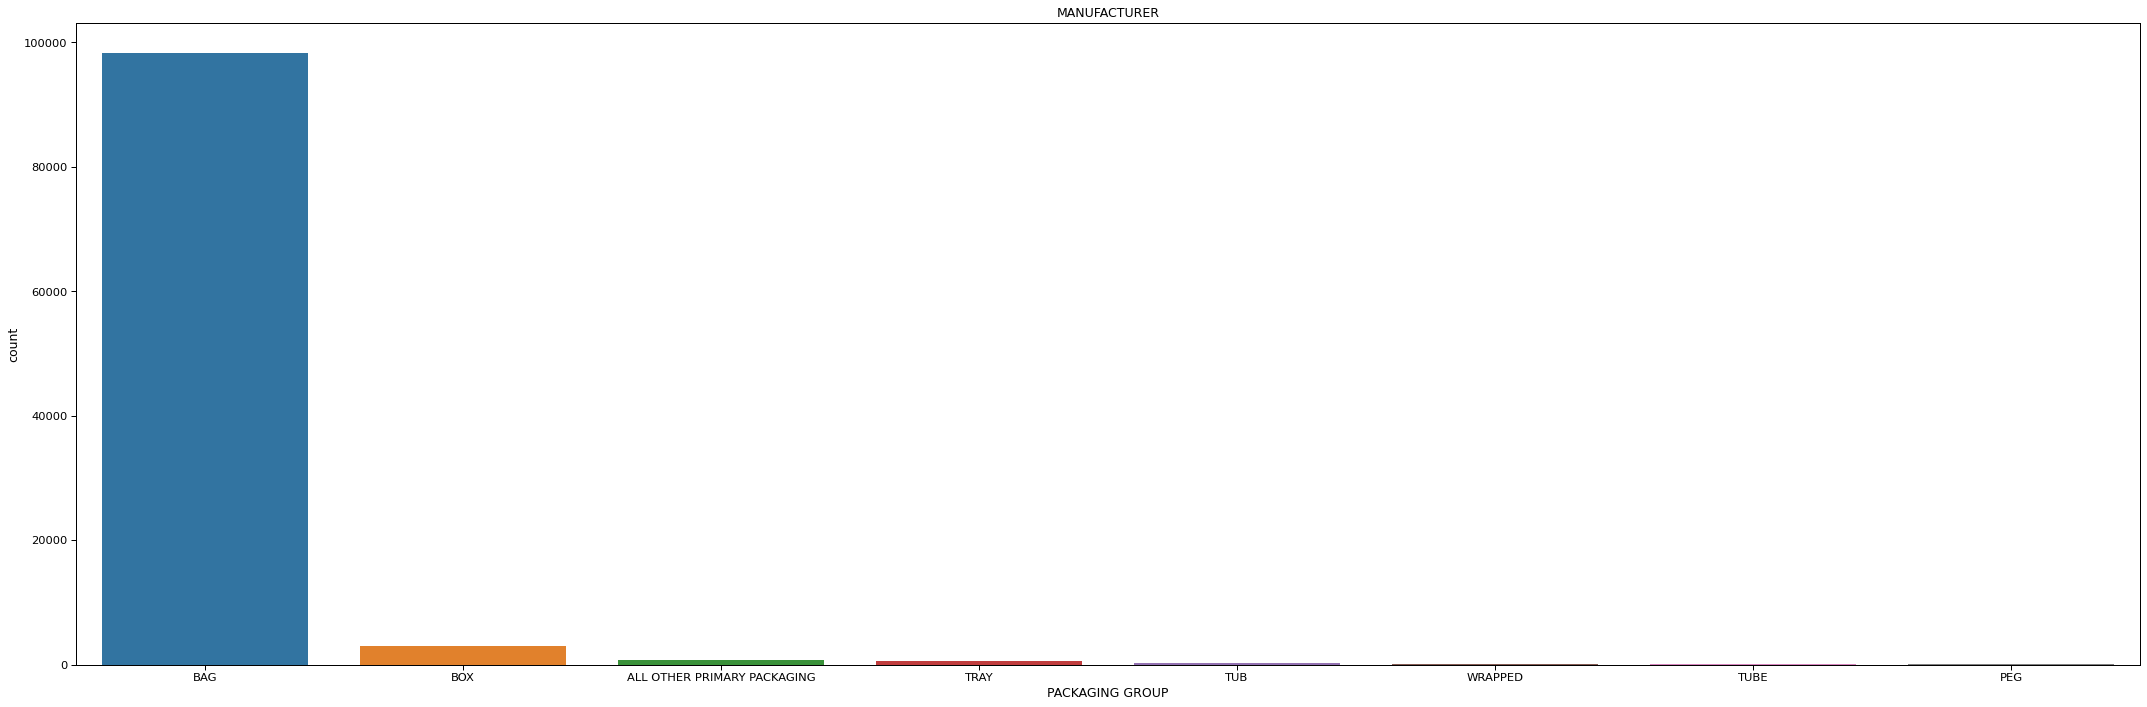

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

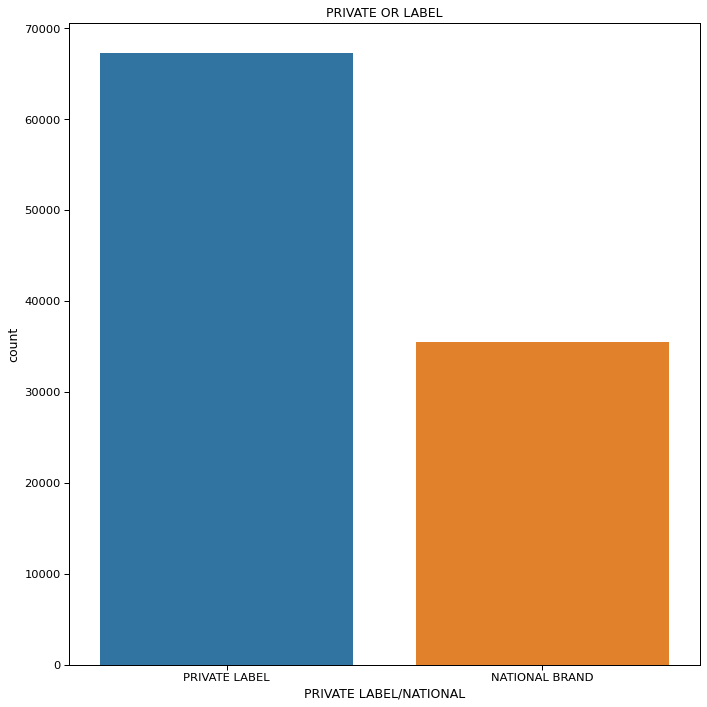

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

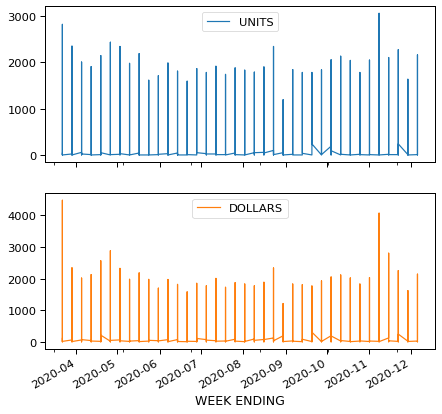

In [ ]:
df2_covid_plot= df2_covid_analysis_during[['UNITS','DOLLARS']]
df2_covid_plot.plot(subplots=True,figsize=(7,7));

**GENERAL ANALYSIS**

In [ ]:
print(df2.shape)
print(df2.columns)
print(df2.isnull().any())
print(df2.nunique())

(441792, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5683
CATEGORY                      1
PARENT                      203
MANUFACTURER                207
BRAND                       282
MAJOR BRAND                 222
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5

In [ ]:
df2.describe()

REGION           UPC          UNITS        DOLLARS
count  441792.000000  4.417920e+05  441792.000000  441792.000000
mean        2.454795  1.485499e+10      39.763651      66.860502
std         1.028765  2.219978e+03      79.931957     110.513245
min         1.000000  1.485499e+10       7.000000       0.000000
25%         2.000000  1.485499e+10       7.000000      15.960000
50%         3.000000  1.485499e+10      14.000000      31.150000
75%         3.000000  1.485499e+10      35.000000      69.160000
max         4.000000  1.485500e+10    3059.000000    4476.850000

In [ ]:
df2_new.head()

REGION WEEK ENDING          UPC               CATEGORY         PARENT  \
0       1   6/24/2018  14854986338  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
1       1    7/1/2018  14854989442  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
2       2    6/2/2019  14854986981  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
3       4  11/10/2019  14854986552  PLAIN VEGETABLES - FZ  PRIVATE LABEL   
4       3  11/17/2019  14854987949  PLAIN VEGETABLES - FZ  PRIVATE LABEL   

    MANUFACTURER          BRAND    MAJOR BRAND PRIVATE LABEL/NATIONAL  \
0  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
1  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
2  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
3  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   
4  PRIVATE LABEL  PRIVATE LABEL  PRIVATE LABEL          PRIVATE LABEL   

  PRODUCT DESCRIPTION     PRODUCT TYPE PACKAGING GROUP  \
0          PRODUCT 68   BRUSSEL SPROUT             BAG   
1        PRODUCT 1610          SPINACH             BOX   
2         PRODUCT 389  MIXED VEGETABLE             BAG   
3         PRODUCT 171         BROCCOLI             BAG   
4         PRODUCT 876             PEAS             BAG   

             FLAVOR/SCENT  UNITS  DOLLARS  
0  ALL OTHER FLAVOR/SCENT    287   285.53  
1  ALL OTHER FLAVOR/SCENT      7     8.19  
2                   ASIAN    168   166.32  
3  ALL OTHER FLAVOR/SCENT     35    85.05  
4  ALL OTHER FLAVOR/SCENT     14    50.26

In [ ]:
#we will be dropping this column and we wont be taking this our prediction
df2_new['UPC'].value_counts()

14854986724    624
14854986267    624
14854986225    624
14854986233    624
14854986785    624
14854986662    624
14854986534    624
14854986224    624
14854986324    624
14854986285    624
14854986440    624
14854986309    624
14854986417    624
14854986287    624
14854986353    623
14854986232    623
14854986519    623
14854986274    623
14854986495    623
14854986935    622
14854986485    622
14854986214    622
14854986648    620
14854986246    619
14854986540    619
14854987370    618
14854986544    618
14854986564    618
14854986282    618
14854986645    617
14854986841    617
14854986444    617
14854986657    617
14854987162    615
14854986627    615
14854986975    614
14854986458    613
14854986359    612
14854988383    610
14854987305    608
14854986553    605
14854986369    603
14854986222    603
14854986280    600
14854986314    599
14854986265    597
14854986221    591
14854986239    590
14854986315    590
14854987470    589
14854986342    588
14854987967    583
14854987404 

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['PARENT'].value_counts()

PRIVATE LABEL    292545
PARENT 2          37439
PARENT 1          36784
PARENT 3          16954
PARENT 7          10117
PARENT 5           9996
PARENT 6           4777
PARENT 9           4375
PARENT 23          2201
PARENT 36          2048
PARENT 22          1980
PARENT 28          1537
PARENT 10          1487
PARENT 16          1460
PARENT 40          1186
PARENT 32          1124
PARENT 24           929
PARENT 29           856
PARENT 30           834
PARENT 47           717
PARENT 42           698
PARENT 4            630
PARENT 45           611
PARENT 35           466
PARENT 13           437
PARENT 12           360
PARENT 46           342
PARENT 49           326
PARENT 19           320
PARENT 8            307
PARENT 15           285
PARENT 14           269
PARENT 39           269
PARENT 27           261
PARENT 57           234
PARENT 53           219
PARENT 17           216
PARENT 18           214
PARENT 65           207
PARENT 76           207
PARENT 44           188
PARENT 60       

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['MANUFACTURER'].value_counts()

PRIVATE LABEL       292545
MANUFACTURER 2       36968
MANUFACTURER 1       36771
MANUFACTURER 3       16954
MANUFACTURER 7       10117
MANUFACTURER 5        9996
MANUFACTURER 6        4777
MANUFACTURER 9        4375
MANUFACTURER 24       2201
MANUFACTURER 37       2048
MANUFACTURER 23       1980
MANUFACTURER 29       1537
MANUFACTURER 10       1487
MANUFACTURER 16       1460
MANUFACTURER 41       1186
MANUFACTURER 33       1124
MANUFACTURER 25        929
MANUFACTURER 30        856
MANUFACTURER 31        834
MANUFACTURER 48        717
MANUFACTURER 43        698
MANUFACTURER 4         630
MANUFACTURER 46        611
MANUFACTURER 36        466
MANUFACTURER 19        464
MANUFACTURER 13        437
MANUFACTURER 12        360
MANUFACTURER 47        342
MANUFACTURER 20        320
MANUFACTURER 8         307
MANUFACTURER 15        285
MANUFACTURER 50        270
MANUFACTURER 40        269
MANUFACTURER 14        269
MANUFACTURER 28        261
MANUFACTURER 58        234
MANUFACTURER 54        219
M

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['BRAND'].value_counts()

PRIVATE LABEL    292864
BRAND 15          16160
BRAND 3           15546
BRAND 2           14345
BRAND 18           8616
BRAND 6            5601
BRAND 24           5373
BRAND 5            4966
BRAND 22           4135
BRAND 14           3524
BRAND 8            3504
BRAND 11           3452
BRAND 29           3415
BRAND 4            3179
BRAND 23           2501
BRAND 10           2441
BRAND 47           2388
BRAND 48           2178
BRAND 1            2136
BRAND 21           1984
BRAND 45           1980
BRAND 67           1894
BRAND 17           1791
BRAND 19           1637
BRAND 54           1537
BRAND 12           1517
BRAND 25           1470
BRAND 35           1460
BRAND 7            1326
BRAND 44           1305
BRAND 36           1253
BRAND 71           1186
BRAND 60           1124
BRAND 52            971
BRAND 13            947
BRAND 56            856
BRAND 49            838
BRAND 50            807
BRAND 73            698
BRAND 9             630
BRAND 27            618
BRAND 77        

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      292545
MAJOR BRAND 10      20295
MAJOR BRAND 2       19439
MAJOR BRAND 3       16911
MAJOR BRAND 1       16476
MAJOR BRAND 4       11353
MAJOR BRAND 11      10047
MAJOR BRAND 8        6544
MAJOR BRAND 5        5601
MAJOR BRAND 9        4777
MAJOR BRAND 7        3452
MAJOR BRAND 29       2388
MAJOR BRAND 30       2201
MAJOR BRAND 43       2048
MAJOR BRAND 13       1987
MAJOR BRAND 28       1980
MAJOR BRAND 35       1537
MAJOR BRAND 14       1487
MAJOR BRAND 21       1460
MAJOR BRAND 47       1186
MAJOR BRAND 39       1124
MAJOR BRAND 31        913
MAJOR BRAND 36        856
MAJOR BRAND 54        717
MAJOR BRAND 49        698
MAJOR BRAND 37        640
MAJOR BRAND 6         630
MAJOR BRAND 16        618
MAJOR BRAND 52        611
MAJOR BRAND 42        466
MAJOR BRAND 24        463
MAJOR BRAND 18        437
MAJOR BRAND 17        360
MAJOR BRAND 53        342
MAJOR BRAND 25        320
MAJOR BRAND 12        307
MAJOR BRAND 20        283
MAJOR BRAND 56        270
MAJOR BRAND 

In [ ]:
#we will be encoding this column for further analysis and it helps in our prediction
df2_new['PRIVATE LABEL/NATIONAL'].value_counts()

PRIVATE LABEL     292545
NATIONAL BRAND    149247
Name: PRIVATE LABEL/NATIONAL, dtype: int64

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 287     624
PRODUCT 105     624
PRODUCT 7       624
PRODUCT 8       624
PRODUCT 53      624
PRODUCT 13      624
PRODUCT 223     624
PRODUCT 116     624
PRODUCT 60      624
PRODUCT 256     624
PRODUCT 44      624
PRODUCT 33      624
PRODUCT 43      624
PRODUCT 163     624
PRODUCT 37      623
PRODUCT 12      623
PRODUCT 75      623
PRODUCT 143     623
PRODUCT 156     623
PRODUCT 139     622
PRODUCT 365     622
PRODUCT 1       622
PRODUCT 215     620
PRODUCT 20      619
PRODUCT 166     619
PRODUCT 168     618
PRODUCT 178     618
PRODUCT 584     618
PRODUCT 42      618
PRODUCT 213     617
PRODUCT 318     617
PRODUCT 220     617
PRODUCT 120     617
PRODUCT 481     615
PRODUCT 204     615
PRODUCT 387     614
PRODUCT 126     613
PRODUCT 78      612
PRODUCT 1099    610
PRODUCT 555     608
PRODUCT 172     605
PRODUCT 82      603
PRODUCT 6       603
PRODUCT 41      600
PRODUCT 55      599
PRODUCT 32      597
PRODUCT 5       591
PRODUCT 16      590
PRODUCT 56      590
PRODUCT 636     589


In [ ]:
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df2_new['REGION'].value_counts()

3    149695
2    113083
1    102266
4     76748
Name: REGION, dtype: int64

In [ ]:
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df2_new['PRODUCT TYPE'].value_counts()

MIXED VEGETABLE              127336
BEAN                          58413
BROCCOLI                      52456
CORN                          41800
PEAS                          41681
SPINACH                       25692
CAULIFLOWER                   21235
BRUSSEL SPROUT                13831
CARROT                         8942
OKRA                           7359
SQUASH                         7026
ASPARAGUS                      5362
ONION                          5333
KALE                           2417
SWEET POTATO                   2160
ZUCCHINI                       2042
COLLARD GREEN                  1929
YUCCA                          1598
GREEN PEPPER                   1474
MUSHROOM                       1161
EDAMAME SOY BEAN                999
ARTICHOKE                       939
BEET                            917
GREEN PEAS                      831
TURNIP GREEN                    795
PEPPER                          766
GREEN CHILE                     739
BELL PEPPER                 

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df2_new['PACKAGING GROUP'].value_counts()

BAG                            421613
BOX                             14541
ALL OTHER PRIMARY PACKAGING      2803
TRAY                             1369
TUB                               969
TUBE                              257
WRAPPED                           192
PEG                                48
Name: PACKAGING GROUP, dtype: int64

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df2_new['FLAVOR/SCENT'].value_counts()

ALL OTHER FLAVOR/SCENT    423519
ASIAN                       4947
HERB & SPICE                4040
VEGETABLE                   3255
SWEET                       1914
MEXICAN                     1455
PLAIN                        819
GRAIN                        612
NEW ORLEANS                  487
MEAT                         281
HOT / SPICY                  180
NUT & SEED                   152
FRUIT                        127
CHEESE                         3
TANGY                          1
Name: FLAVOR/SCENT, dtype: int64

In [ ]:
df2_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df2_new.head()

REGION WEEK ENDING PRIVATE LABEL/NATIONAL     PRODUCT TYPE PACKAGING GROUP  \
0       1  24-06-2018          PRIVATE LABEL   BRUSSEL SPROUT             BAG   
1       1  01-07-2018          PRIVATE LABEL          SPINACH             BOX   
2       2  02-06-2019          PRIVATE LABEL  MIXED VEGETABLE             BAG   
3       4  10-11-2019          PRIVATE LABEL         BROCCOLI             BAG   
4       3  17-11-2019          PRIVATE LABEL             PEAS             BAG   

             FLAVOR/SCENT  UNITS  DOLLARS  
0  ALL OTHER FLAVOR/SCENT    287   285.53  
1  ALL OTHER FLAVOR/SCENT      7     8.19  
2                   ASIAN    168   166.32  
3  ALL OTHER FLAVOR/SCENT     35    85.05  
4  ALL OTHER FLAVOR/SCENT     14    50.26

In [ ]:
#renaming the columns
df2_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)

In [ ]:
df2_new.head()

REGION        DATE   PRODUCTLABEL      PRODUCTTYPE PACKAGINGGROUP  \
0       1   6/24/2018  PRIVATE LABEL   BRUSSEL SPROUT            BAG   
1       1    7/1/2018  PRIVATE LABEL          SPINACH            BOX   
2       2    6/2/2019  PRIVATE LABEL  MIXED VEGETABLE            BAG   
3       4  11/10/2019  PRIVATE LABEL         BROCCOLI            BAG   
4       3  11/17/2019  PRIVATE LABEL             PEAS            BAG   

                    SCENT  UNITS  DOLLARS  
0  ALL OTHER FLAVOR/SCENT    287   285.53  
1  ALL OTHER FLAVOR/SCENT      7     8.19  
2                   ASIAN    168   166.32  
3  ALL OTHER FLAVOR/SCENT     35    85.05  
4  ALL OTHER FLAVOR/SCENT     14    50.26

In [ ]:
# Here we are encoding the columns that we want to include in our analysis
df2_new['PRODUCTLABEL'] = df2_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df2_new.PRODUCTTYPE)
df2_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df2_new.PACKAGINGGROUP)
df2_new['SCENT'] = LabelEncoder().fit_transform(df2_new.SCENT)

In [ ]:
df2_new['PRODUCTTYPE'].value_counts()

51     127336
6       58413
11      52456
26      41800
62      41681
83      25692
18      21235
14      13831
16       8942
56       7359
84       7026
2        5362
57       5333
42       2417
86       2160
101      2042
25       1929
100      1598
38       1474
54       1161
29        999
1         939
7         917
37        831
93        795
63        766
34        739
8         728
32        553
75        479
55        468
33        394
36        273
61        272
85        268
91        262
96        260
94        255
17        248
39        152
35        149
23        138
81        132
44        106
50        103
43         82
66         77
71         76
28         74
45         74
69         70
13         64
68         61
49         47
73         44
72         44
47         44
82         42
79         40
87         36
12         29
92         28
3          28
41         26
30         26
78         25
80         23
60         20
74         19
27         16
89         15
67    

In [ ]:
df2_new['PACKAGINGGROUP'].value_counts()

1    421613
2     14541
0      2803
4      1369
5       969
6       257
7       192
3        48
Name: PACKAGINGGROUP, dtype: int64

In [ ]:
df2_new['SCENT'].value_counts()

0     423519
1       4947
5       4040
14      3255
12      1914
8       1455
11       819
4        612
9        487
7        281
6        180
10       152
3        127
2          3
13         1
Name: SCENT, dtype: int64

In [ ]:
df2_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       1   6/24/2018             0           14               1      0   
1       1    7/1/2018             0           83               2      0   
2       2    6/2/2019             0           51               1      1   
3       4  11/10/2019             0           11               1      0   
4       3  11/17/2019             0           62               1      0   

   UNITS  DOLLARS  
0    287   285.53  
1      7     8.19  
2    168   166.32  
3     35    85.05  
4     14    50.26

In [ ]:
df2_new['PPU'] = df2_new['DOLLARS']/df2_new['UNITS']
df2_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       1  24-06-2018             0           14               1      0   
1       1  01-07-2018             0           83               2      0   
2       2  02-06-2019             0           51               1      1   
3       4  10-11-2019             0           11               1      0   
4       3  17-11-2019             0           62               1      0   

   UNITS  DOLLARS       PPU  
0    287   285.53  0.994878  
1      7     8.19  1.170000  
2    168   166.32  0.990000  
3     35    85.05  2.430000  
4     14    50.26  3.590000

In [ ]:
df2_new.count()

REGION            441792
DATE              441792
PRODUCTLABEL      441792
PRODUCTTYPE       441792
PACKAGINGGROUP    441792
SCENT             441792
UNITS             441792
DOLLARS           441792
PPU               441792
dtype: int64

In [ ]:
df2_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       1   6/24/2018             0           14               1      0   
1       1    7/1/2018             0           83               2      0   
2       2    6/2/2019             0           51               1      1   
3       4  11/10/2019             0           11               1      0   
4       3  11/17/2019             0           62               1      0   

   UNITS  DOLLARS       PPU  
0    287   285.53  0.994878  
1      7     8.19  1.170000  
2    168   166.32  0.990000  
3     35    85.05  2.430000  
4     14    50.26  3.590000

In [ ]:
df2_new[["month","date","year"]] = df2_new["DATE"].str.split("-", expand=True)

In [ ]:
df2_new.drop(['DATE'], axis=1, inplace=True)
df2_new.head()

REGION  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  UNITS  DOLLARS  \
0       1             0           14               1      0    287   285.53   
1       1             0           83               2      0      7     8.19   
2       2             0           51               1      1    168   166.32   
3       4             0           11               1      0     35    85.05   
4       3             0           62               1      0     14    50.26   

        PPU month date  year  
0  0.994878    24   06  2018  
1  1.170000    01   07  2018  
2  0.990000    02   06  2019  
3  2.430000    10   11  2019  
4  3.590000    17   11  2019

In [ ]:
X2=df2_new.drop(['UNITS','DOLLARS'],axis=1).values
y2=df2_new['UNITS'].values

In [ ]:
#creating the formal X2 and y2 split
X2_train_org,X2_test_org,y2_train,y2_test= train_test_split(X2,y2, random_state=0)

In [ ]:
#scaling and transform of X2_train and X2_test
scaler= MinMaxScaler()
scaler.fit(X2_train_org)
X2_train= scaler.transform(X2_train_org)
X2_test= scaler.transform(X2_test_org)

LINEAR REGRESSION

In [ ]:
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model2=lreg.fit(X2_train, y2_train)
train_linear2=round(l_model2.score(X2_train, y2_train),2)
test_linear2=round(l_model2.score(X2_test, y2_test),2)

In [ ]:
#calculating the RMSE
df2_predict = l_model2.predict(X2_test)
print("The RMSE for test set is "+str(rmse(df2_predict,y2_test)))

The RMSE for test set is 78.02712664206994


In [ ]:
print('intercept:', l_model2.intercept_)
print('slope:', l_model2.coef_)

intercept: 62.75843800045675
slope: [   0.85659727   12.02120926  -14.39920381  -28.1689313     3.99175607
 -225.27115882   -0.65534132   -0.40229869    3.38302085]


RIDGE REGRESSION

In [ ]:
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
grid_model_ridge2=grid_ridge.fit(X2_train,y2_train)

print(grid_model_ridge2.best_params_)

{'alpha': 0.1}


In [ ]:
#General model based on the alpha condition populated above
ridge_2=Ridge(alpha=0.1)
ridge_model2=ridge_2.fit(X2_train,y2_train)

In [ ]:
#calculating the RMSE
rm2_predict = ridge_2.predict(X2_test)
print("The RMSE for test set is "+str(rmse(rm2_predict,y2_test)))

The RMSE for test set is 78.0271238267618


In [ ]:
print('intercept:', ridge_model2.intercept_)
print('slope:', ridge_model2.coef_)

intercept: 62.75643547401171
slope: [   0.85638185   12.0205666   -14.39907891  -28.16477623    3.99084591
 -225.25003328   -0.65533724   -0.40231247    3.38278464]


LASSO REGRESSION

In [ ]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso2=grid_lasso.fit(X2_train,y2_train)

print(grid_model_lasso2.best_params_)

{'alpha': 0.01}


In [ ]:
#General model based on the alpha condition populated above
lasso_2=Lasso(alpha=0.01)
lasso_model2=lasso_2.fit(X2_train,y2_train)


In [ ]:
#calculating the RMSE
lasso2_predict = lasso_2.predict(X2_test)
print("The RMSE for test set is "+str(rmse(lasso2_predict,y2_test)))

The RMSE for test set is 78.02732503885288


In [ ]:
print('intercept:', lasso_model2.intercept_)
print('slope:', lasso_model2.coef_)

intercept: 61.94295515648355
slope: [   0.72250132   11.84461511  -14.26257021  -24.15658168    3.06833573
 -221.77934476   -0.54527822   -0.3220093     3.24257938]


From above results we can see that the RMSE is almost same for all the models and we can use Linear regression for prediction as it has the least RMSE. We can see that the p-value of almost all variables are significant and have impact on the units variable.
We are using FBprophet for forecasting future average sales.

In [ ]:
import statsmodels.api as sm
ols2 = sm.add_constant(X2_train)
est2 = sm.OLS(y2_train, ols2)
estf2 = est2.fit()
print(estf2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        18:53:54   Log-Likelihood:            -1.9181e+06
No. Observations:              331344   AIC:                         3.836e+06
Df Residuals:                  331334   BIC:                         3.836e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.7584      0.701     89.533      0.0

In [ ]:
#Forecasting
ts_analysis2 = df2_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis2['WEEK ENDING'] = pd.to_datetime(ts_analysis2['WEEK ENDING'])
ts_df2 = ts_analysis2.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()

In [ ]:
ts_df2 = ts_df2.reset_index()
ts_df2 = ts_df2.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


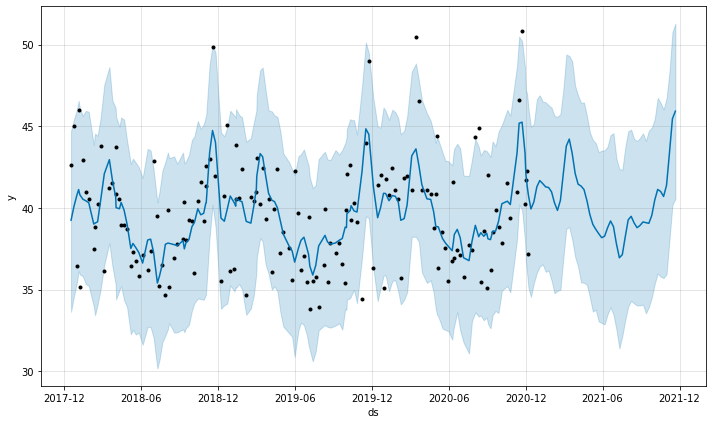

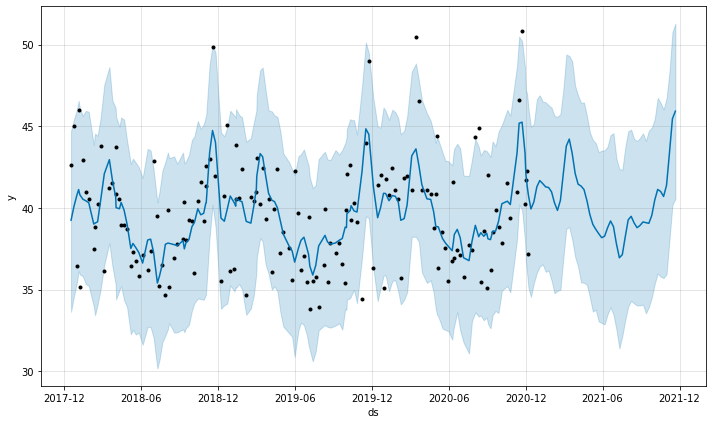

In [ ]:
from fbprophet import Prophet
m2 = Prophet(interval_width=0.95)
m2.fit(ts_df2)
future2 = m2.make_future_dataframe(periods = 50,freq='W')
forecast2 = m2.predict(future2)
m2.plot(forecast2)

In [ ]:
# summarize the forecast
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

            ds       yhat  yhat_lower  yhat_upper
156 2020-12-13  39.935675   34.548675   44.963262
157 2020-12-20  40.369996   35.397280   45.127697
158 2020-12-27  41.290977   36.023431   46.649169
159 2021-01-03  41.676429   36.414268   46.900084
160 2021-01-10  41.489652   36.545022   46.515934
161 2021-01-17  41.288711   36.089817   46.469907
162 2021-01-24  41.249343   36.153998   46.289360
163 2021-01-31  40.979927   35.551346   46.142102
164 2021-02-07  40.306906   34.773128   45.628502
165 2021-02-14  39.849865   34.922685   45.579352
166 2021-02-21  40.463473   34.990881   45.747082
167 2021-02-28  42.143190   36.931325   47.252223
168 2021-03-07  43.786299   38.723682   49.387155
169 2021-03-14  44.216674   38.828051   49.318719
170 2021-03-21  43.339012   38.052388   48.977623
171 2021-03-28  42.114901   36.999773   47.468292
172 2021-04-04  41.453332   36.403759   46.882427
173 2021-04-11  41.340502   35.440795   46.444073
174 2021-04-18  41.126683   35.417539   46.454875


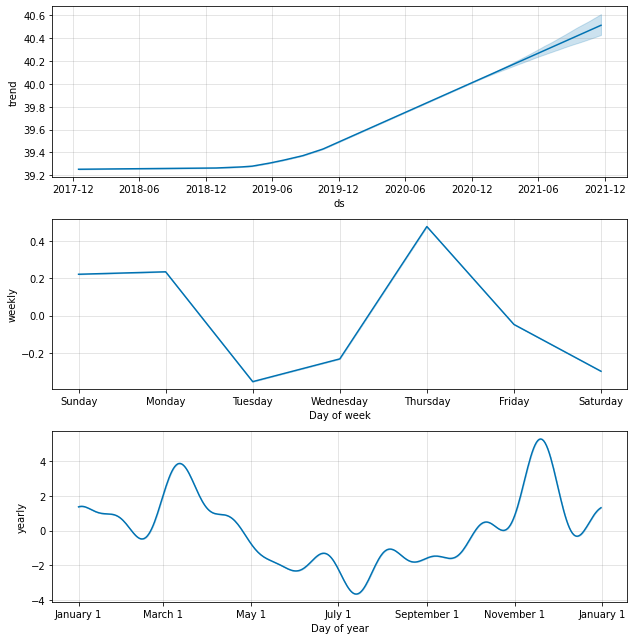

In [ ]:
#Plots to find if there is any seasonality
fig2 = m2.plot_components(forecast2)

**Popcorn**

In [ ]:
#reading first 5 rows of df3
df3.head()

REGION  MKT WEEK ENDING          UPC             CATEGORY         PARENT  \
0       3    9  05-08-2018  14855009513  POPCORN/POPCORN OIL       PARENT 2   
1       3   14  02-12-2018  14855009798  POPCORN/POPCORN OIL  PRIVATE LABEL   
2       4   48  01-09-2019  14855009686  POPCORN/POPCORN OIL  PRIVATE LABEL   
3       2    7  21-06-2020  14855010215  POPCORN/POPCORN OIL  PRIVATE LABEL   
4       3   63  28-06-2020  14855009994  POPCORN/POPCORN OIL     PARENT 644   

       MANUFACTURER          BRAND      MAJOR BRAND PRIVATE LABEL/NATIONAL  \
0   MANUFACTURER 19     BRAND 1032  MAJOR BRAND 790         NATIONAL BRAND   
1     PRIVATE LABEL  PRIVATE LABEL    PRIVATE LABEL          PRIVATE LABEL   
2     PRIVATE LABEL  PRIVATE LABEL    PRIVATE LABEL          PRIVATE LABEL   
3     PRIVATE LABEL  PRIVATE LABEL    PRIVATE LABEL          PRIVATE LABEL   
4  MANUFACTURER 684     BRAND 1030  MAJOR BRAND 788         NATIONAL BRAND   

  PRODUCT DESCRIPTION           PRODUCT TYPE PACKAGING GROUP FLAVOR/SCENT  \
0       PRODUCT 11680  MICROWAVEABLE POPCORN             BAG       BUTTER   
1       PRODUCT 11814  MICROWAVEABLE POPCORN             BAG       BUTTER   
2       PRODUCT 11760  MICROWAVEABLE POPCORN             BAG       BUTTER   
3       PRODUCT 12033  MICROWAVEABLE POPCORN             BAG        SWEET   
4       PRODUCT 11909  MICROWAVEABLE POPCORN             BAG       BUTTER   

   UNITS  DOLLARS  
0     14    52.08  
1      7    11.83  
2     28   273.98  
3      7    18.48  
4      7    33.18

In [ ]:
#for analysis during covid
df3_analysis_during = df3_new.copy()
#for analysis before covid
df3_analysis_before = df3_new.copy()

**OVER THE ENTIRE PERIOD**

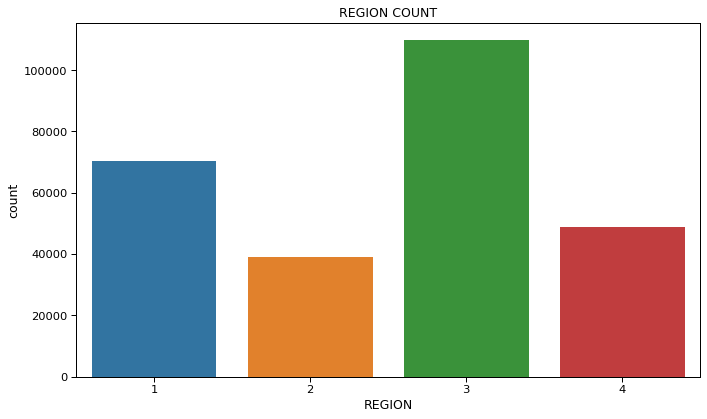

In [ ]:
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

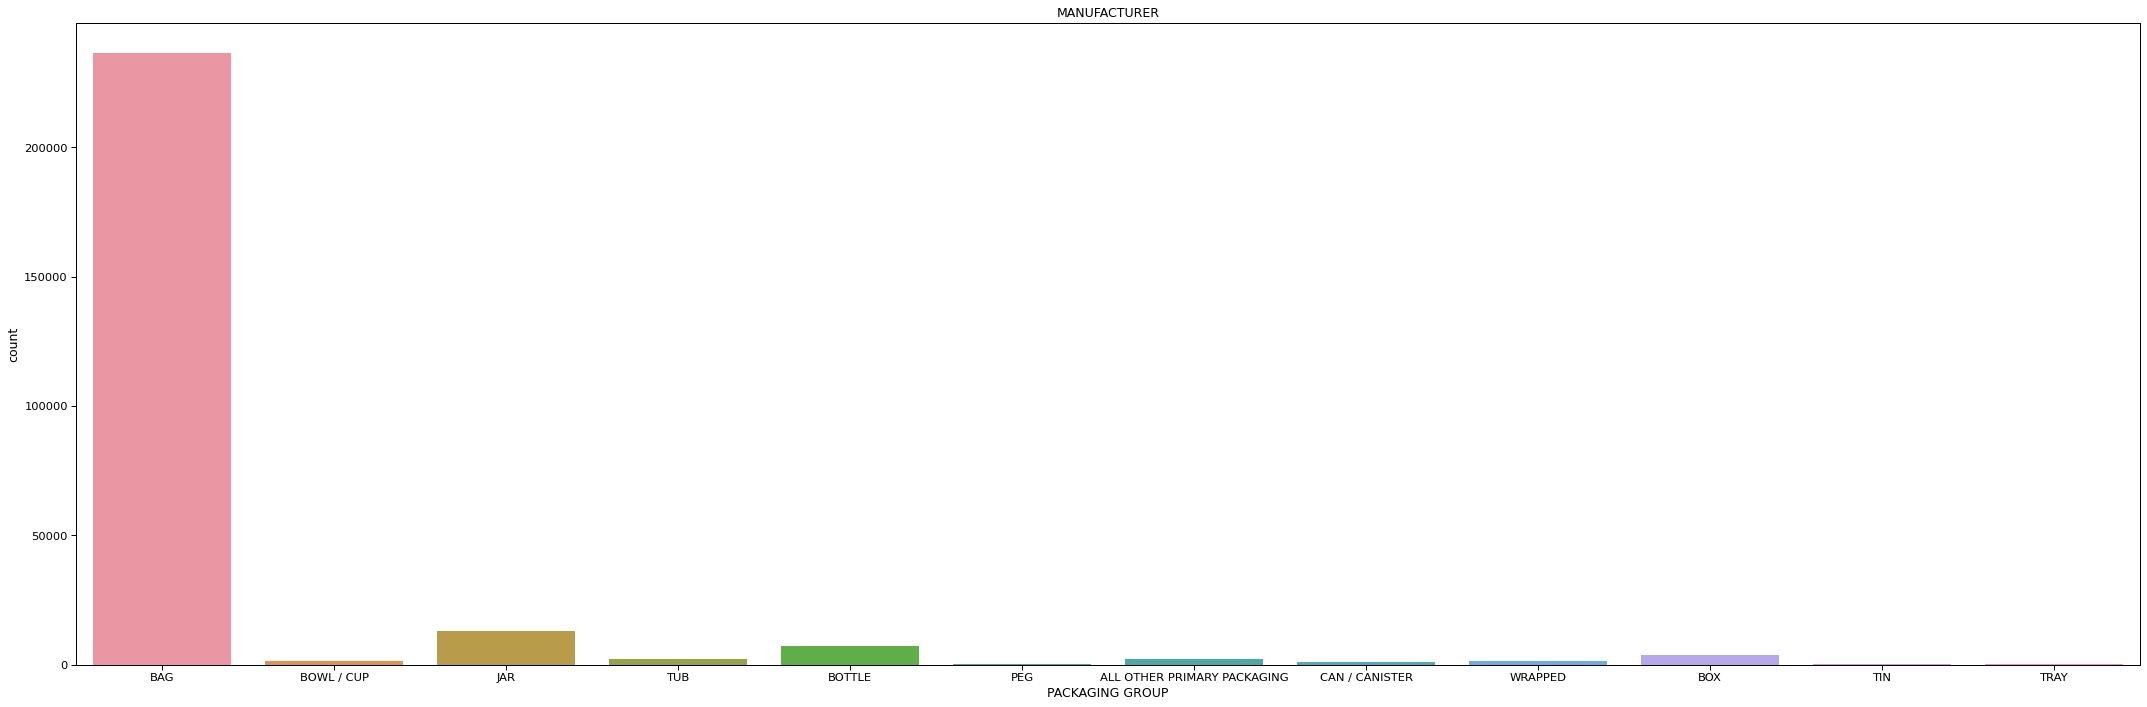

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

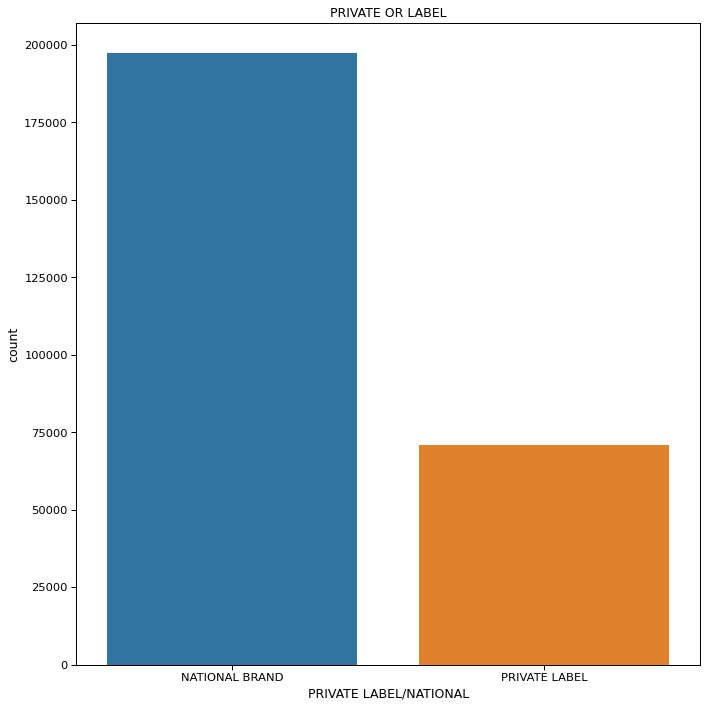

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

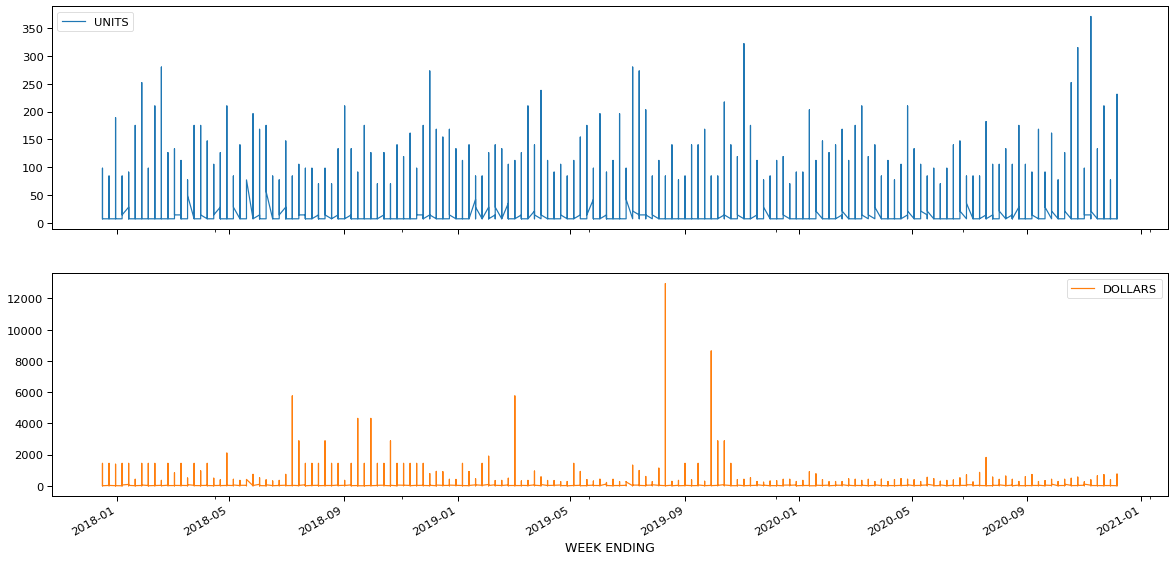

In [ ]:
df3['WEEK ENDING'] = pd.to_datetime(df3['WEEK ENDING'])
df3 = df3.set_index('WEEK ENDING')
df3_plot = df3[['UNITS','DOLLARS']]
df3_plot.plot(subplots=True,figsize=(20,10));

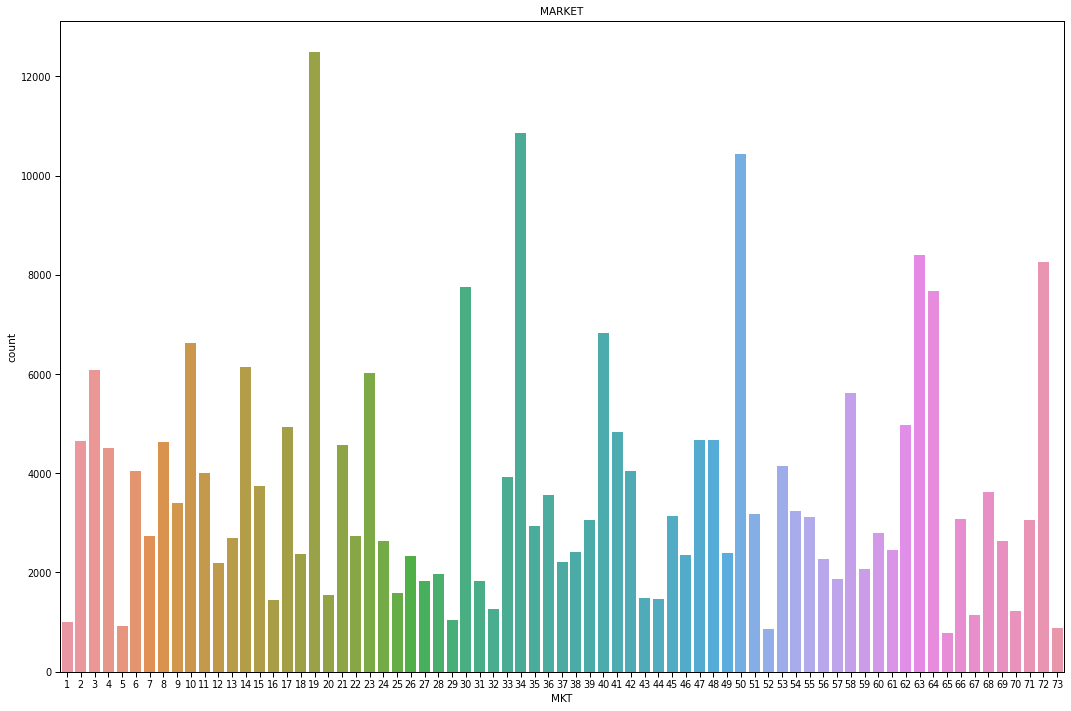

In [ ]:
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()

**BEFORE COVID TIME**

In [ ]:
#before covid time - CHECKING how the categorical
df3_analysis_before['WEEK ENDING'] = pd.to_datetime(df3_analysis_before['WEEK ENDING'])
date_frame3_analysis_before = df3_analysis_before.set_index('WEEK ENDING')
df3_covid_analysis_before = date_frame3_analysis_before[(date_frame3_analysis_before.index > '2017-12-17') & (date_frame3_analysis_before.index <= '2020-03-08')]

In [ ]:
#count before covid period
df3_covid_analysis_before.count()

REGION                    199239
MKT                       199239
UPC                       199239
CATEGORY                  199239
PARENT                    199239
MANUFACTURER              199239
BRAND                     199239
MAJOR BRAND               199239
PRIVATE LABEL/NATIONAL    199239
PRODUCT DESCRIPTION       199239
PRODUCT TYPE              199239
PACKAGING GROUP           199239
FLAVOR/SCENT              199239
UNITS                     199239
DOLLARS                   199239
dtype: int64

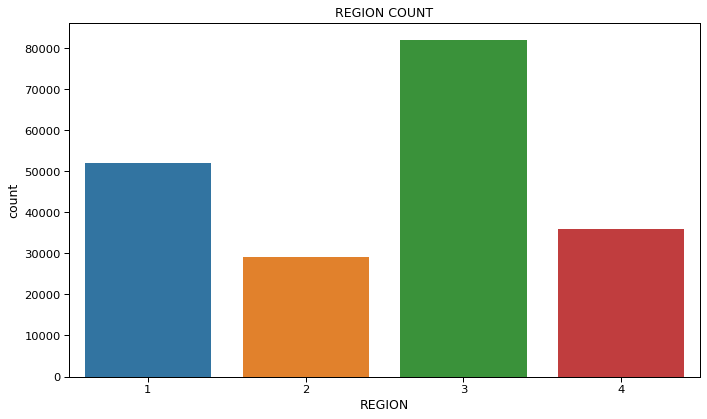

In [ ]:
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

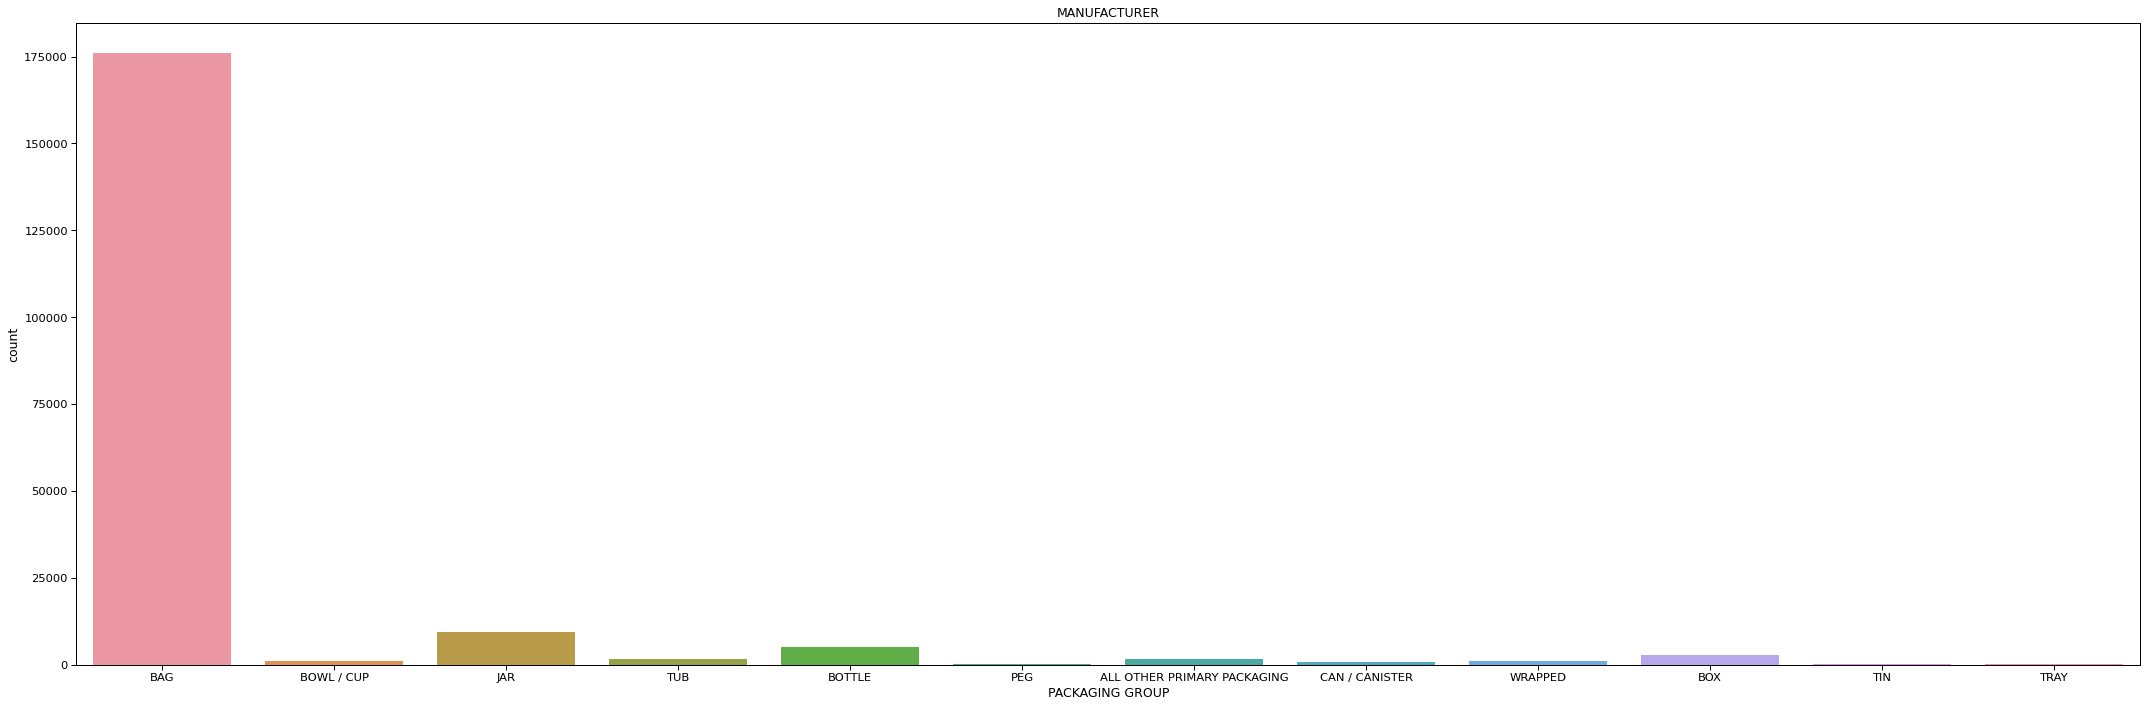

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

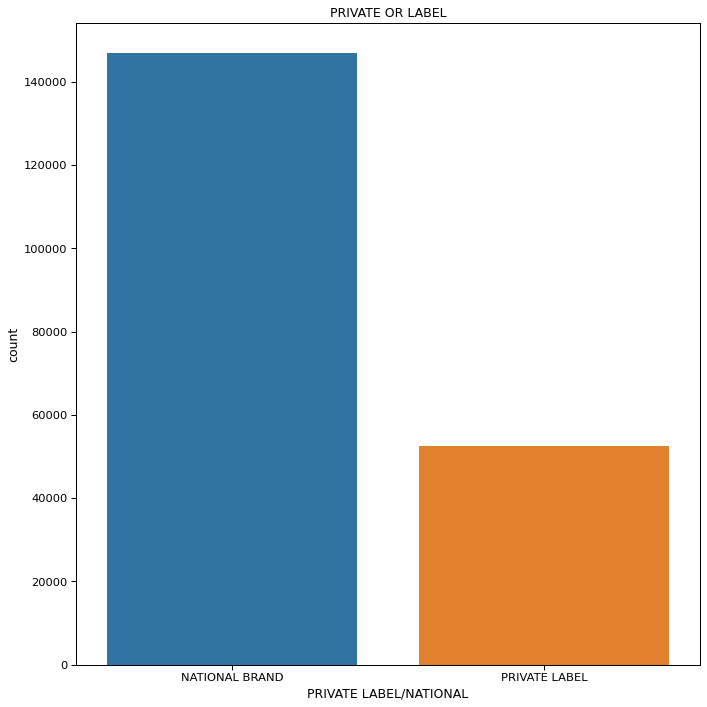

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

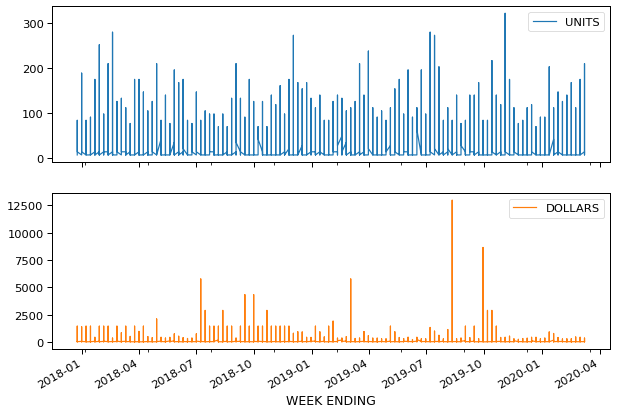

In [ ]:
df3_covid_plot= df3_covid_analysis_before[['UNITS','DOLLARS']]
df3_covid_plot.plot(subplots=True,figsize=(10,7));

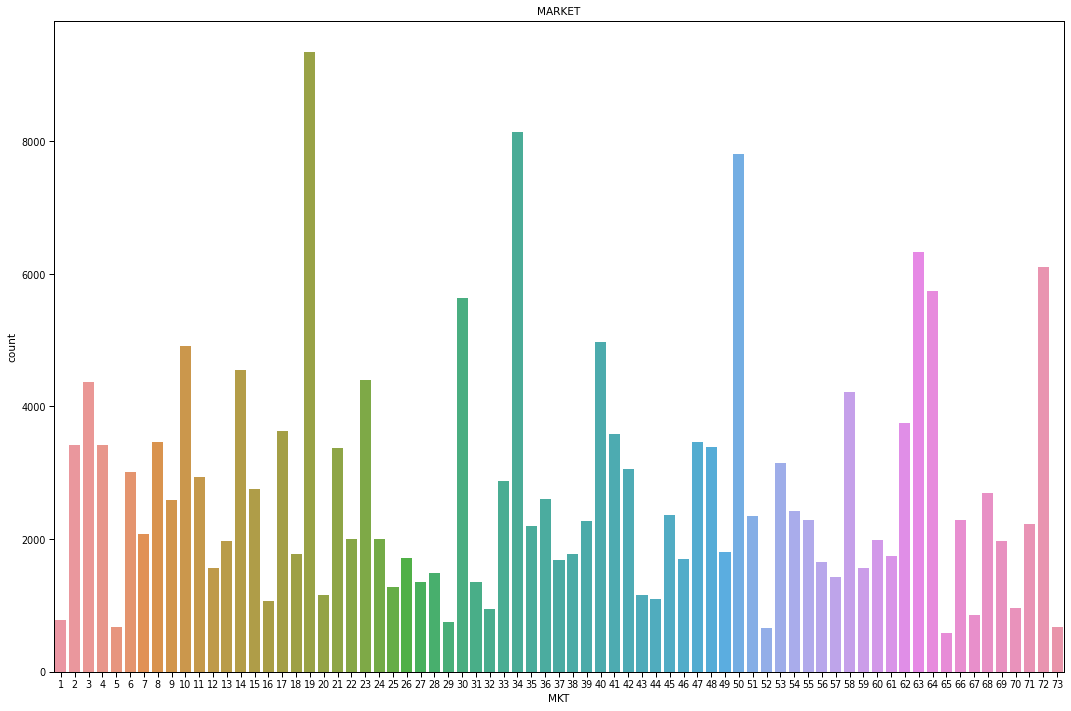

In [ ]:
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3_covid_analysis_before,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()

**DURING COVID TIME**

In [ ]:
#during covid time - CHECKING how the categorical
df3_analysis_during['WEEK ENDING'] = pd.to_datetime(df3_analysis_during['WEEK ENDING'])
date_frame3_analysis_during = df3_analysis_during.set_index('WEEK ENDING')
df3_covid_analysis_during = date_frame3_analysis_during[(date_frame3_analysis_during.index > '2020-03-15') & (date_frame3_analysis_during.index <= '2020-12-06')]

In [ ]:
#count during covid period
df3_covid_analysis_during.count()

REGION                    64661
MKT                       64661
UPC                       64661
CATEGORY                  64661
PARENT                    64661
MANUFACTURER              64661
BRAND                     64661
MAJOR BRAND               64661
PRIVATE LABEL/NATIONAL    64661
PRODUCT DESCRIPTION       64661
PRODUCT TYPE              64661
PACKAGING GROUP           64661
FLAVOR/SCENT              64661
UNITS                     64661
DOLLARS                   64661
dtype: int64

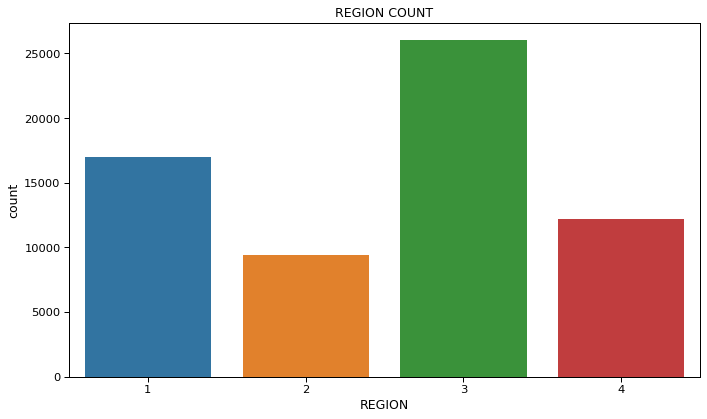

In [ ]:
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

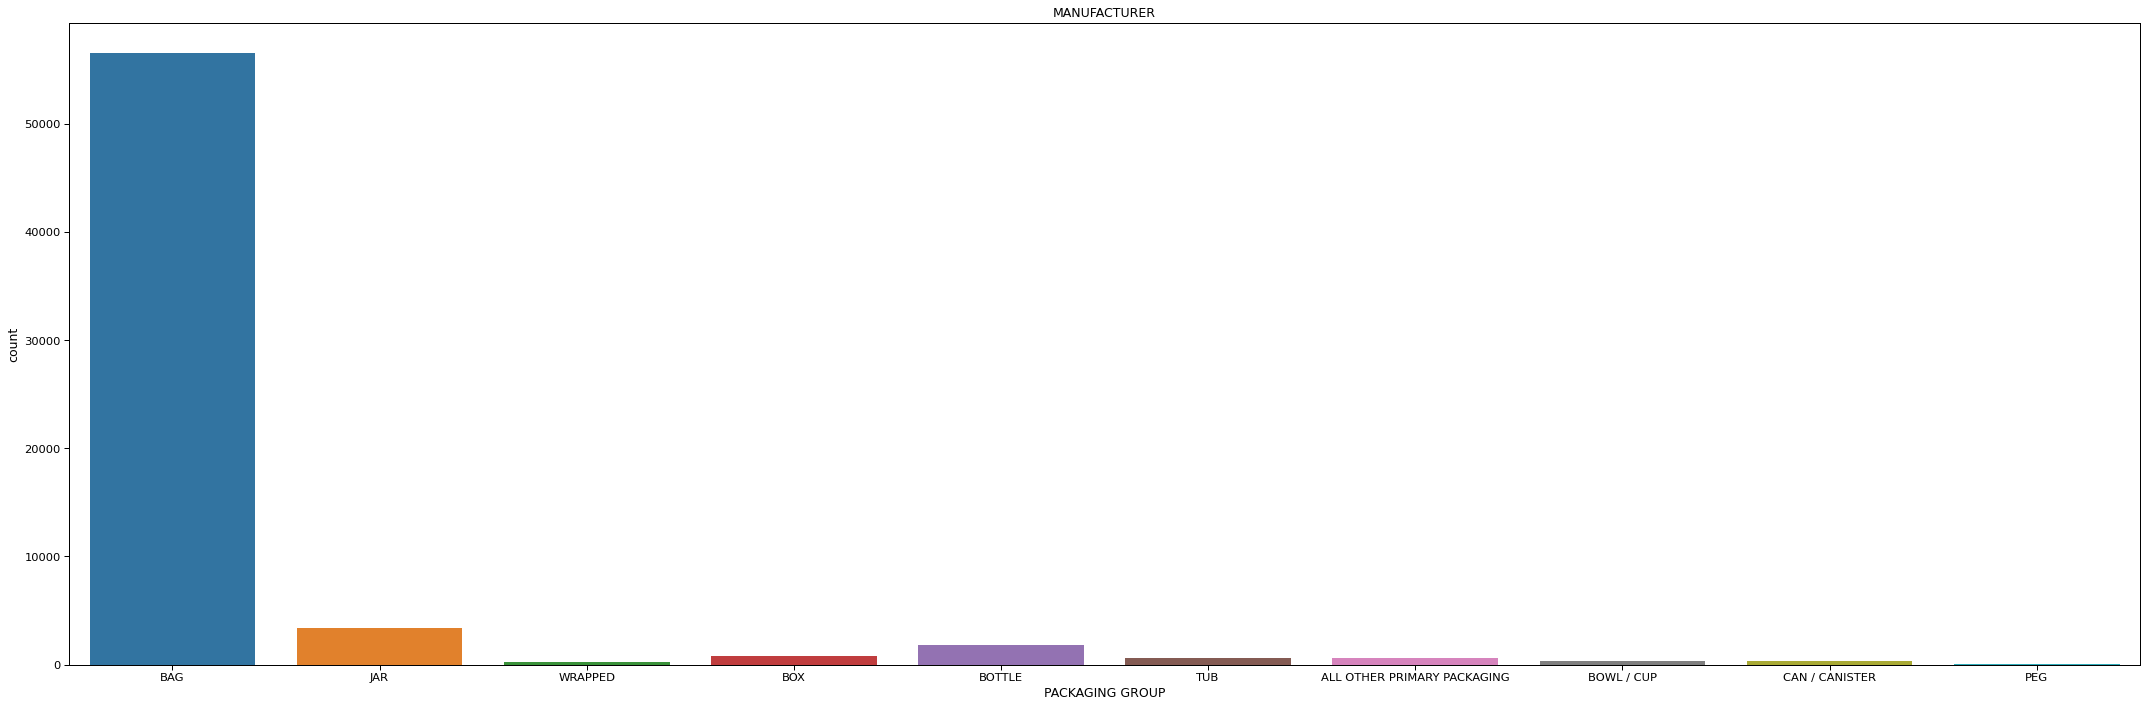

In [ ]:
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

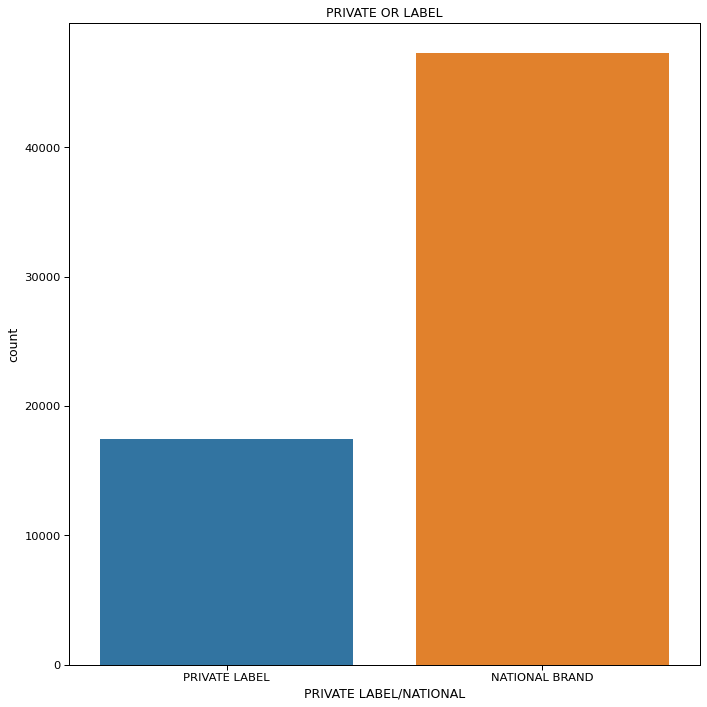

In [ ]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

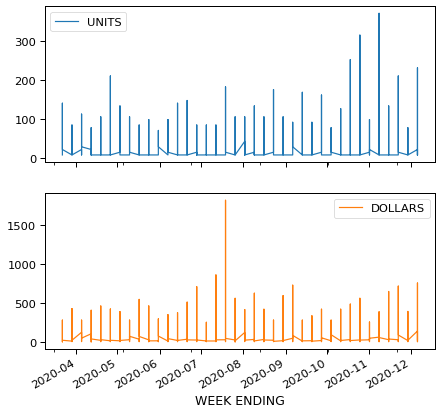

In [ ]:
df3_covid_plot= df3_covid_analysis_during[['UNITS','DOLLARS']]
df3_covid_plot.plot(subplots=True,figsize=(7,7));

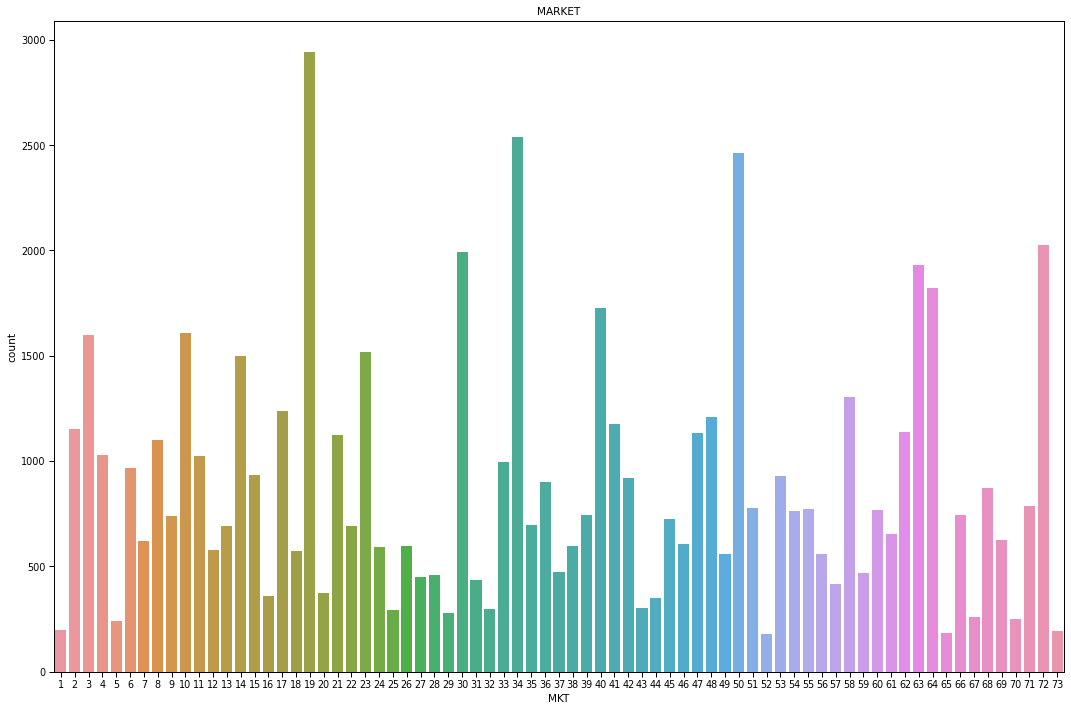

In [ ]:
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3_covid_analysis_during,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()

**STARTING OUR GENERAL ANALYSIS**


In [ ]:
print(df3.shape)
print(df3.columns)
print(df3.isnull().any())
print(df3.nunique())

(268233, 15)
Index(['REGION', 'MKT', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
MKT                       False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                       4
MKT                         73
UPC                       1408
CATEGORY                     1
PARENT                     116
MANUFACTURER               117
BRAND                      165
MAJOR BRAND                1

In [ ]:
df3.describe()

REGION            MKT           UPC          UNITS  \
count  268233.000000  268233.000000  2.682330e+05  268233.000000   
mean        2.512778      36.367110  1.485501e+10      10.796185   
std         1.066747      20.944921  3.950003e+02       8.604905   
min         1.000000       1.000000  1.485501e+10       7.000000   
25%         1.000000      19.000000  1.485501e+10       7.000000   
50%         3.000000      36.000000  1.485501e+10       7.000000   
75%         3.000000      54.000000  1.485501e+10      14.000000   
max         4.000000      73.000000  1.485501e+10     371.000000   

             DOLLARS  
count  268233.000000  
mean       32.751438  
std        53.719962  
min         0.000000  
25%        16.030000  
50%        24.430000  
75%        37.030000  
max     12956.580000

In [ ]:
#we will be dropping this column and we wont be taking this our prediction
df3_new['UPC'].value_counts()

14855009740    4231
14855009547    4189
14855009462    4135
14855009565    3749
14855009616    3740
14855009477    3256
14855009811    3222
14855009540    3198
14855009513    3150
14855009474    2849
14855009527    2772
14855009700    2729
14855009621    2671
14855009538    2667
14855009590    2594
14855009686    2532
14855009533    2532
14855009516    2522
14855009575    2512
14855009732    2473
14855009642    2426
14855009609    2386
14855009523    2341
14855009578    2338
14855009622    2336
14855009989    2277
14855009542    2241
14855009465    2236
14855009497    2236
14855009853    2224
14855009784    2186
14855009673    2168
14855009519    2167
14855009522    2043
14855009530    1972
14855009566    1937
14855009600    1905
14855009639    1892
14855009717    1832
14855009678    1803
14855009636    1760
14855009585    1699
14855009669    1652
14855009728    1640
14855009472    1614
14855009569    1594
14855009735    1573
14855009587    1534
14855009618    1526
14855009560    1516


In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df3_new['PARENT'].value_counts()

PARENT 2         94794
PRIVATE LABEL    70966
PARENT 644       37078
PARENT 645       32853
PARENT 646       11616
PARENT 643        5436
PARENT 647        3703
PARENT 652        2431
PARENT 648        1647
PARENT 650         889
PARENT 655         844
PARENT 654         730
PARENT 444         676
PARENT 660         555
PARENT 27          535
PARENT 370         406
PARENT 649         309
PARENT 662         273
PARENT 682         182
PARENT 664         143
PARENT 658         119
PARENT 679         115
PARENT 656         113
PARENT 659          96
PARENT 673          84
PARENT 669          73
PARENT 651          65
PARENT 102          60
PARENT 661          59
PARENT 677          56
PARENT 666          56
PARENT 665          55
PARENT 286          53
PARENT 23           51
PARENT 663          48
PARENT 686          45
PARENT 688          44
PARENT 693          42
PARENT 694          41
PARENT 713          41
PARENT 708          38
PARENT 685          37
PARENT 667          35
PARENT 676 

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df3_new['MANUFACTURER'].value_counts()

MANUFACTURER 19     92732
PRIVATE LABEL       70966
MANUFACTURER 684    37078
MANUFACTURER 685    32853
MANUFACTURER 686    11616
MANUFACTURER 683     5436
MANUFACTURER 687     3703
MANUFACTURER 693     2431
MANUFACTURER 699     2062
MANUFACTURER 689     1647
MANUFACTURER 691      889
MANUFACTURER 696      844
MANUFACTURER 695      730
MANUFACTURER 473      676
MANUFACTURER 702      555
MANUFACTURER 28       535
MANUFACTURER 688      406
MANUFACTURER 690      309
MANUFACTURER 704      273
MANUFACTURER 724      182
MANUFACTURER 706      143
MANUFACTURER 700      119
MANUFACTURER 721      115
MANUFACTURER 697      113
MANUFACTURER 701       96
MANUFACTURER 715       84
MANUFACTURER 711       73
MANUFACTURER 692       65
MANUFACTURER 104       60
MANUFACTURER 703       59
MANUFACTURER 719       56
MANUFACTURER 708       56
MANUFACTURER 707       55
MANUFACTURER 738       53
MANUFACTURER 24        51
MANUFACTURER 705       48
MANUFACTURER 728       45
MANUFACTURER 730       44
MANUFACTURER

In [ ]:
#we wont be taking this column in our analysis - cannot be encoded
df3_new['BRAND'].value_counts()

PRIVATE LABEL    71601
BRAND 1032       39093
BRAND 1030       31089
BRAND 1034       17039
BRAND 1035       15455
BRAND 1028       12206
BRAND 1033       11616
BRAND 1040        8449
BRAND 1031        6483
BRAND 1029        5395
BRAND 1042        4951
BRAND 1039        4623
BRAND 1047        4128
BRAND 1037        3703
BRAND 1044        2912
BRAND 1054        2431
BRAND 1041        2241
BRAND 1055        2233
BRAND 1058        2098
BRAND 1065        2062
BRAND 1048        1760
BRAND 1053        1740
BRAND 1043        1647
BRAND 1046        1357
BRAND 1050        1315
BRAND 1049         889
BRAND 1060         844
BRAND 1059         693
BRAND 731          676
BRAND 1057         625
BRAND 1061         610
BRAND 1063         516
BRAND 1088         424
BRAND 1038         406
BRAND 1045         309
BRAND 1067         280
BRAND 1075         273
BRAND 1036         196
BRAND 1104         182
BRAND 1073         179
BRAND 1069         158
BRAND 1113         155
BRAND 1078         143
BRAND 1077 

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      70966
MAJOR BRAND 790    51020
MAJOR BRAND 788    37078
MAJOR BRAND 793    20885
MAJOR BRAND 792    17039
MAJOR BRAND 786    12206
MAJOR BRAND 791    11616
MAJOR BRAND 796    10226
MAJOR BRAND 789     6483
MAJOR BRAND 800     5485
MAJOR BRAND 787     5395
MAJOR BRAND 794     3703
MAJOR BRAND 803     2431
MAJOR BRAND 797     2241
MAJOR BRAND 809     2062
MAJOR BRAND 798     1647
MAJOR BRAND 801      889
MAJOR BRAND 806      844
MAJOR BRAND 805      693
MAJOR BRAND 564      676
MAJOR BRAND 813      555
MAJOR BRAND 34       535
MAJOR BRAND 795      406
MAJOR BRAND 799      309
MAJOR BRAND 815      273
MAJOR BRAND 835      182
MAJOR BRAND 817      143
MAJOR BRAND 807      113
MAJOR BRAND 832      103
MAJOR BRAND 812       96
MAJOR BRAND 826       84
MAJOR BRAND 810       81
MAJOR BRAND 822       73
MAJOR BRAND 802       65
MAJOR BRAND 116       60
MAJOR BRAND 814       59
MAJOR BRAND 830       56
MAJOR BRAND 819       56
MAJOR BRAND 818       55
MAJOR BRAND 851       53


In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['MKT'].value_counts()

19    12500
34    10860
50    10428
63     8390
72     8250
30     7763
64     7677
40     6820
10     6634
14     6150
3      6082
23     6020
58     5612
62     4974
17     4931
41     4832
47     4669
48     4660
2      4649
8      4636
21     4565
4      4512
53     4149
42     4040
6      4035
11     4004
33     3918
15     3736
68     3619
36     3562
9      3392
54     3242
51     3174
45     3135
55     3112
66     3079
39     3065
71     3050
35     2936
60     2801
22     2740
7      2735
13     2701
69     2638
24     2628
61     2447
38     2413
49     2392
18     2376
46     2341
26     2337
56     2265
37     2199
12     2187
59     2069
28     1975
57     1865
27     1826
31     1818
25     1585
20     1552
43     1481
44     1467
16     1449
32     1261
70     1221
67     1131
29     1048
1       993
5       922
73      881
52      855
65      772
Name: MKT, dtype: int64

In [ ]:
#we will be encoding this column for further analysis and it helps in our prediction
df3_new['PRIVATE LABEL/NATIONAL'].value_counts()

NATIONAL BRAND    197267
PRIVATE LABEL      70966
Name: PRIVATE LABEL/NATIONAL, dtype: int64

In [ ]:
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 11787    4231
PRODUCT 11696    4189
PRODUCT 11656    4135
PRODUCT 11704    3749
PRODUCT 11727    3740
PRODUCT 11663    3256
PRODUCT 11820    3222
PRODUCT 11692    3198
PRODUCT 11680    3150
PRODUCT 11661    2849
PRODUCT 11686    2772
PRODUCT 11766    2729
PRODUCT 11730    2671
PRODUCT 11691    2667
PRODUCT 11715    2594
PRODUCT 11689    2532
PRODUCT 11760    2532
PRODUCT 11681    2522
PRODUCT 11709    2512
PRODUCT 11783    2473
PRODUCT 11740    2426
PRODUCT 11724    2386
PRODUCT 11684    2341
PRODUCT 11710    2338
PRODUCT 11731    2336
PRODUCT 11907    2277
PRODUCT 11693    2241
PRODUCT 11657    2236
PRODUCT 11672    2236
PRODUCT 11838    2224
PRODUCT 11808    2186
PRODUCT 11754    2168
PRODUCT 11682    2167
PRODUCT 11683    2043
PRODUCT 11688    1972
PRODUCT 11705    1937
PRODUCT 11719    1905
PRODUCT 11739    1892
PRODUCT 11774    1832
PRODUCT 11756    1803
PRODUCT 11737    1760
PRODUCT 11713    1699
PRODUCT 11752    1652
PRODUCT 11781    1640
PRODUCT 11660    1614
PRODUCT 11

In [ ]:
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df3_new['REGION'].value_counts()

3    109996
1     70224
4     48886
2     39127
Name: REGION, dtype: int64

In [ ]:
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df3_new['PRODUCT TYPE'].value_counts()

MICROWAVEABLE POPCORN    217547
KERNEL POPCORN            43686
OIL                        6984
READY TO EAT POPCORN         16
Name: PRODUCT TYPE, dtype: int64

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df3_new['PACKAGING GROUP'].value_counts()

BAG                            236284
JAR                             13110
BOTTLE                           7065
BOX                              3554
ALL OTHER PRIMARY PACKAGING      2264
TUB                              2155
BOWL / CUP                       1473
WRAPPED                          1221
CAN / CANISTER                    916
PEG                               171
TIN                                14
TRAY                                6
Name: PACKAGING GROUP, dtype: int64

In [ ]:
#similarly after encoding this column we will be taking this column for prediction
df3_new['FLAVOR/SCENT'].value_counts()

BUTTER                    178485
ALL OTHER FLAVOR/SCENT     52864
SWEET                      25192
HERB & SPICE                6064
CHEESE                      4141
FRUIT                        645
HOT / SPICY                  487
PLAIN                        316
MEXICAN                       20
MUSHROOM                      10
MEAT                           6
TANGY                          2
NEW ORLEANS                    1
Name: FLAVOR/SCENT, dtype: int64

In [ ]:
df3_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION','MKT'], axis=1, inplace=True)

In [ ]:
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df3_new.head()

REGION WEEK ENDING PRIVATE LABEL/NATIONAL           PRODUCT TYPE  \
0       3  05-08-2018         NATIONAL BRAND  MICROWAVEABLE POPCORN   
1       3  02-12-2018          PRIVATE LABEL  MICROWAVEABLE POPCORN   
2       4  01-09-2019          PRIVATE LABEL  MICROWAVEABLE POPCORN   
3       2  21-06-2020          PRIVATE LABEL  MICROWAVEABLE POPCORN   
4       3  28-06-2020         NATIONAL BRAND  MICROWAVEABLE POPCORN   

  PACKAGING GROUP FLAVOR/SCENT  UNITS  DOLLARS  
0             BAG       BUTTER     14    52.08  
1             BAG       BUTTER      7    11.83  
2             BAG       BUTTER     28   273.98  
3             BAG        SWEET      7    18.48  
4             BAG       BUTTER      7    33.18

In [ ]:
#renaming the columns
df3_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)

In [ ]:
# Here we are encoding the columns that we want to include in our analysis
df3_new['PRODUCTLABEL'] = df3_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df3_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df3_new.PRODUCTTYPE)
df3_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df3_new.PACKAGINGGROUP)
df3_new['SCENT'] = LabelEncoder().fit_transform(df3_new.SCENT)

In [ ]:
df3_new['PPU'] = df3_new['DOLLARS']/df3_new['UNITS']
df3_new.count()
df3_new.head()

REGION        DATE  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  \
0       3  05-08-2018             1            1               1      1   
1       3  02-12-2018             0            1               1      1   
2       4  01-09-2019             0            1               1      1   
3       2  21-06-2020             0            1               1     11   
4       3  28-06-2020             1            1               1      1   

   UNITS  DOLLARS    PPU  
0     14    52.08  3.720  
1      7    11.83  1.690  
2     28   273.98  9.785  
3      7    18.48  2.640  
4      7    33.18  4.740

In [ ]:
df3_new[["month","date","year"]] = df3_new["DATE"].str.split("-", expand=True)
df3_new.drop(['DATE'], axis=1, inplace=True)
df3_new.head()

REGION  PRODUCTLABEL  PRODUCTTYPE  PACKAGINGGROUP  SCENT  UNITS  DOLLARS  \
0       3             1            1               1      1     14    52.08   
1       3             0            1               1      1      7    11.83   
2       4             0            1               1      1     28   273.98   
3       2             0            1               1     11      7    18.48   
4       3             1            1               1      1      7    33.18   

     PPU month date  year  
0  3.720    05   08  2018  
1  1.690    02   12  2018  
2  9.785    01   09  2019  
3  2.640    21   06  2020  
4  4.740    28   06  2020

In [ ]:
X3=df3_new.drop(['UNITS','DOLLARS'],axis=1).values
y3=df3_new['UNITS'].values

In [ ]:
#creating the formal X3 and y3 split
X3_train_org,X3_test_org,y3_train,y3_test= train_test_split(X3,y3, random_state=0)

In [ ]:
#scaling and transform of X3_train and X3_test
scaler= MinMaxScaler()
scaler.fit(X3_train_org)
X3_train= scaler.transform(X3_train_org)
X3_test= scaler.transform(X3_test_org)

**LINEAR REGRESSION**

In [ ]:
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l3_model=lreg.fit(X3_train, y3_train)
train_linear3=round(l3_model.score(X3_train, y3_train),2)
test_linear3=round(l3_model.score(X3_test, y3_test),2)

In [ ]:
Copied 1 cells. You can now paste them in this or a different notebook.
Copy of SAS Project.ipynb
Copy of SAS Project.ipynb_
[ ]
#importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

[ ]
#importing the files as csv
from google.colab import files
uploaded = files.upload()

[ ]
#reading in the datasets
df1 = pd.read_csv('frozen meals.csv')
df2 = pd.read_csv('frozen vegetables.csv')
df3 = pd.read_csv('popcorn.csv')
[ ]
#for ts analysis
df1_ts = df1.copy()
df2_ts = df2.copy()
df3_ts = df3.copy()
[ ]
df1_new = df1.copy()
df2_new = df2.copy()
df3_new = df3.copy()
[ ]
#reading first 5 rows of df1
df1.head()


[ ]
#for analysis during covid
df1_analysis_during = df1_new.copy()
[ ]
#for analysis before covid
df1_analysis_before = df1_new.copy()
OVER THE ENTIRE PERIOD

[ ]
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df1,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df1,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df1,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df1['WEEK ENDING'] = pd.to_datetime(df1['WEEK ENDING'])
df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])
df3['WEEK ENDING'] = pd.to_datetime(df3['WEEK ENDING'])
[ ]
df1 = df1.set_index('WEEK ENDING')
df1_plot = df1[['UNITS','DOLLARS']]
df1_plot.plot(subplots=True,figsize=(20,10));


BEFORE COVID PERIOD

[ ]
#before covid time - CHECKING how the categorical
df1_analysis_before['WEEK ENDING'] = pd.to_datetime(df1_analysis_before['WEEK ENDING'])
date_frame_analysis_before = df1_analysis_before.set_index('WEEK ENDING')
df_covid_analysis_before = date_frame_analysis_before[(date_frame_analysis_before.index > '2017-12-17') & (date_frame_analysis_before.index <= '2020-03-13')]
[ ]
#count before covid period
df_covid_analysis_before.count()

REGION                    551035
UPC                       551035
CATEGORY                  551035
PARENT                    551035
MANUFACTURER              551035
BRAND                     551035
MAJOR BRAND               551035
PRIVATE LABEL/NATIONAL    551035
PRODUCT DESCRIPTION       551035
PRODUCT TYPE              551035
PACKAGING GROUP           551035
FLAVOR/SCENT              551035
UNITS                     551035
DOLLARS                   551035
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df_covid_plot= df_covid_analysis_before[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(10,7));


DURING COVID TIME

[ ]
#during covid time - CHECKING how the categorical
df1_analysis_during['WEEK ENDING'] = pd.to_datetime(df1_analysis_during['WEEK ENDING'])
date_frame_analysis_during = df1_analysis_during.set_index('WEEK ENDING')
df_covid_analysis_during = date_frame_analysis_during[(date_frame_analysis_during.index > '2020-03-14') & (date_frame_analysis_during.index <= '2020-12-06')]
[ ]
#count during covid period
df_covid_analysis_during.count()

REGION                    165002
UPC                       165002
CATEGORY                  165002
PARENT                    165002
MANUFACTURER              165002
BRAND                     165002
MAJOR BRAND               165002
PRIVATE LABEL/NATIONAL    165002
PRODUCT DESCRIPTION       165002
PRODUCT TYPE              165002
PACKAGING GROUP           165002
FLAVOR/SCENT              165002
UNITS                     165002
DOLLARS                   165002
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df_covid_plot= df_covid_analysis_during[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(7,7));


STARTING OUR GENERAL ANALYSIS

[ ]
print(df1.shape)
print(df1.columns)
print(df1.isnull().any())
print(df1.nunique())

(725936, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5972
CATEGORY                      1
PARENT                      489
MANUFACTURER                526
BRAND                       793
MAJOR BRAND                 617
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5972
PRODUCT TYPE                 74
PACKAGING GROUP              11
FLAVOR/SCENT                 25
UNITS                       163
DOLLARS                   17503
dtype: int64
[ ]
df1.describe()


[ ]
df1_new.head()


[ ]
#we will be dropping this column and we wont be taking this our prediction
df1_new['UPC'].value_counts()

14854997957    624
14854997733    624
14854997645    624
14854998251    624
14854998280    624
14854997569    624
14854998054    624
14854997514    624
14854999211    624
14854998583    624
14854998034    624
14854997522    624
14854997972    624
14854997730    624
14854997755    624
14854997909    624
14854997649    624
14854998081    624
14854998332    624
14854997820    624
14854998416    624
14854997805    624
14854998046    624
14854997659    624
14854998645    624
14854998427    624
14854997515    624
14854997680    624
14854997710    624
14854998405    624
14854998044    624
14854997867    624
14854997555    624
14854997949    624
14854997721    624
14854997720    624
14854998605    624
14854997741    624
14854997931    624
14854997727    624
14854997637    624
14854998149    624
14854997935    624
14854998659    624
14854998615    624
14854999370    624
14854998121    624
14854998006    624
14854998556    624
14854997784    624
14854998004    624
14854998822    623
14854998424    623
14854997743    623
14854998275    623
14854997623    623
14854997608    623
14854998139    623
14854998730    623
14854998178    623
14854998696    623
14854998023    623
14854999203    623
14854998021    623
14854997988    623
14854997943    622
14854997552    622
14854998217    622
14854997896    622
14854997738    622
14854999168    622
14854997674    622
14854997489    622
14854997603    622
14854997862    622
14854998013    622
14854997605    622
14854998857    622
14854998154    622
14854997798    621
14854998092    621
14854997511    621
14854998821    621
14854997616    621
14854999287    621
14854998519    621
14854997779    621
14854998608    621
14854998521    621
14854998364    621
14854999131    620
14854998449    620
14854997723    620
14854997576    620
14854997617    620
14854997966    620
14854997501    620
14854997905    620
14854998554    620
14854997960    620
14854998513    620
14854998543    619
14854997951    619
14854998526    619
14854997641    619
14854998407    619
14854998803    619
14854997492    619
14854997666    619
14854998110    619
14854998001    619
14854999267    619
14854998166    618
14854997609    618
14854997877    618
14854998759    618
14854997664    618
14854998221    617
14854997638    617
14854998397    616
14854997874    616
14854998383    616
14854997887    616
14854998402    616
14854998371    616
14854998128    616
14854998277    616
14854997822    616
14854998111    616
14854999115    615
14854997948    615
14854997981    615
14854997849    615
14854998392    614
14854998061    614
14854997902    614
14854998125    613
14854997844    613
14854997808    613
14854997737    612
14854997917    612
14854997749    612
14854999632    611
14854998122    611
14854998248    610
14854998171    610
14854997954    609
14855000170    609
14854998037    609
14854997665    608
14854997913    608
14854998455    608
14854999472    608
14854998755    607
14854997495    607
14854998155    607
14854998472    606
14854997751    606
14854998284    606
14854997688    605
14854998293    605
14854997661    605
14854997691    605
14854998309    605
14854997509    604
14854998087    604
14854999334    603
14854998086    603
14854997543    603
14854998231    603
14854999133    603
14854998710    603
14854997502    602
14854998477    602
14854997578    602
14854998348    602
14854998394    601
14854998241    601
14854999643    601
14854997597    601
14854998058    601
14854998360    601
14854998237    601
14854997922    600
14854997707    600
14854998377    600
14854999475    599
14854998769    599
14854997630    599
14854997818    598
14855000071    598
14854998861    598
14854998429    598
14854998453    597
14854998784    597
14854998238    596
14854998713    595
14854998604    595
14854999113    595
14854998614    594
14854998176    593
14854998260    593
14854997926    593
14854999959    593
14854997622    591
14854999314    591
14854998190    591
14854998187    590
14854998668    590
14854998594    590
14854998169    589
14854999074    587
14854997551    587
14855000124    587
14854998399    586
14854997790    586
14854998042    585
14854998781    585
14854997653    585
14854997912    584
14854999163    583
14854997648    583
14854998940    583
14854998184    583
14854997824    583
14854999404    582
14854999850    582
14854997803    582
14854999117    582
14854997892    579
14854999184    579
14854999368    578
14854999899    578
14854999726    577
14854998161    577
14854998018    577
14854999635    576
14854997793    575
14854997717    575
14854998437    574
14854998127    574
14855000166    574
14854999772    574
14855000475    572
14854999595    572
14854999955    572
14854997819    572
14854999507    571
14854998308    571
14854998076    571
14854998112    571
14854997828    570
14854998404    570
14854998272    570
14854997885    570
14854998618    569
14854999989    568
14854997974    568
14854998996    568
14854999233    567
14854998724    566
14854998808    566
14855000331    566
14854997592    566
14854999555    566
14854997529    566
14854997703    565
14854998562    564
14854998680    564
14855000911    563
14854999746    562
14854998257    562
14854998704    562
14854998322    561
14855000460    560
14854999097    559
14854999005    559
14854998952    559
14854999208    559
14854998681    559
14854998621    559
14854998164    558
14854997958    558
14855000566    557
14854998102    557
14855000461    557
14854998264    557
14854998790    557
14854997656    556
14854997532    555
14854997625    555
14855000183    555
14854997831    553
14854998702    553
14854999224    553
14854998032    552
14854998850    551
14854999593    551
14854997807    551
14855000004    551
14854998722    550
14854999760    550
14854998010    549
14854998218    549
14854999707    549
14854998600    548
14854997929    547
14854999408    546
14854999758    544
14854998736    544
14854999197    544
14854998719    543
14854998444    543
14854998074    542
14854997582    542
14855000267    542
14854998497    542
14854998186    541
14854998411    541
14854998858    541
14854998676    541
14854997549    541
14854998306    541
14854999849    541
14854997956    540
14854998636    540
14854999258    540
14854998194    540
14854997881    539
14854998801    539
14854998080    538
14854998683    538
14854999417    537
14854998374    536
14854998814    535
14854998151    535
14854999430    534
14854999694    533
14854998662    533
14854997714    533
14854997937    532
14854998291    531
14855000579    530
14854999035    530
14855000394    529
14854998560    529
14854998542    529
14854998020    529
14854997537    528
14854998633    528
14855000559    528
14855000066    528
14854997559    526
14854998243    526
14854998129    526
14854998452    525
14854997847    524
14854998672    524
14854999058    523
14854998222    523
14854998962    523
14855000024    523
14854997595    523
14854998276    523
14854997984    522
14854997787    522
14854999829    521
14854997679    521
14854999492    521
14854999042    520
14854999554    520
14854998098    520
14854999382    519
14854999155    519
14855000699    519
14855000568    519
14854997557    518
14854998508    518
14854998469    517
14854999195    517
14854998948    516
14854998916    516
14854997899    516
14854998758    515
14855000150    515
14855000961    514
14854999030    514
14854998225    514
14854998592    514
14854999557    514
14854998547    513
14854998539    513
14855000021    513
14854999104    513
14854997776    512
14854999940    511
14854998299    511
14854999049    511
14855000099    511
14854998064    510
14854998142    510
14854998863    509
14854998373    509
14854999780    509
14854999848    508
14854997865    508
14854998705    508
14854998712    508
14854999196    507
14854997969    507
14854999150    507
14854998569    507
14854999434    506
14854997810    505
14854998132    505
14855000643    505
14854997574    505
14854998651    504
14854998612    504
14854999384    503
14854998601    503
14854998342    502
14854998514    502
14854999539    502
14854997780    499
14854999327    499
14854997856    499
14854998580    498
14854998209    498
14854998644    496
14854999305    495
14854999053    495
14854999280    495
14854997925    494
14854999838    494
14854999506    494
14854997986    494
14854998419    493
14855000714    493
14854999387    492
14854997538    492
14854998214    492
14854998919    492
14854998458    492
14854997773    491
14854998026    490
14855000340    489
14854999138    489
14854998434    489
14854999879    489
14854999462    489
14854997767    488
14854998050    487
14854998297    486
14854997692    486
14854999478    486
14854998302    486
14854998946    486
14855000298    485
14854998585    485
14854997521    485
14854998982    485
14854998137    484
14854998824    484
14854997739    482
14854999445    482
14854997541    481
14854998500    481
14854998691    481
14854999673    479
14854998282    477
14854999316    476
14854999497    476
14854997677    476
14854998913    476
14855000481    475
14854999532    474
14855001585    474
14854999290    473
14854999047    473
14855000936    472
14854999401    472
14854998233    472
14854999479    470
14854999230    470
14854999596    469
14854998494    469
14854998197    469
14854999883    468
14855000743    468
14854998567    468
14854998417    467
14854997518    466
14854998479    466
14854999590    466
14854997860    466
14854998613    465
14854997579    465
14854999510    464
14855000755    463
14854998591    463
14854999853    463
14854998703    463
14854999618    463
14855000082    462
14854999729    462
14854997927    462
14854997893    462
14854999075    460
14854999159    459
14854998598    459
14854998711    458
14854999201    458
14854998776    457
14854998536    457
14854997675    456
14854998643    456
14854998767    454
14854999806    454
14854997526    454
14854998981    454
14854999250    453
14854999515    453
14854999442    453
14854997591    453
14854999577    453
14855001637    453
14854998787    451
14854997993    450
14854999186    449
14854998590    449
14854997685    449
14854999943    448
14854998717    448
14854999896    448
14854998096    448
14854998941    447
14854999483    447
14855000940    446
14855000400    446
14855001604    446
14854999084    446
14854997942    444
14855001365    444
14855000671    444
14854999360    444
14854997839    444
14854998836    444
14855000247    443
14854999393    443
14854999349    442
14854998623    442
14855000414    441
14854998101    441
14854998865    441
14855000490    440
14854999686    440
14855000804    440
14854999732    440
14854999714    439
14854998797    439
14855000139    438
14854999107    438
14855001440    437
14855001014    436
14855002352    436
14854999379    436
14854998572    435
14854999728    435
14854998884    435
14854999244    434
14854999153    434
14854999395    433
14854999512    433
14854998658    432
14854998968    432
14854998745    432
14854997857    431
14854998826    431
14854999427    430
14854999269    430
14854999459    430
14854999200    429
14854999530    429
14855000493    429
14855000037    429
14854999541    429
14854998317    429
14854998708    429
14854998693    428
14854997879    428
14854999276    426
14854999776    425
14854999677    425
14854998549    423
14854999880    423
14855000694    422
14854999019    421
14854998686    421
14854998370    421
14854998387    421
14855000411    419
14854998240    419
14854997643    419
14854999145    418
14855000311    416
14855000300    416
14854999525    416
14854999137    415
14855001311    414
14854999140    414
14854998732    414
14854998304    413
14855002089    413
14855000372    412
14854999001    411
14854998483    410
14854998754    409
14854999844    409
14855000002    408
14854999775    408
14854997505    408
14854999376    408
14854998245    407
14854998654    407
14854998067    407
14854997496    407
14855001090    407
14855000112    405
14854998051    405
14854997611    404
14854998008    403
14854997633    403
14855000783    402
14854998992    402
14854999171    401
14855001722    400
14854999302    400
14854998135    399
14854999923    399
14855000443    399
14855001555    398
14854999253    398
14854997712    398
14854998522    397
14854999527    397
14854997992    396
14855001417    394
14855001056    394
14855000468    393
14854997753    393
14854999247    393
14854997734    392
14854999175    391
14855001125    391
14854998203    390
14855000761    390
14854997746    390
14854999424    389
14855000726    388
14854998772    386
14855000233    386
14854999625    385
14855001131    384
14854998609    384
14855000097    384
14854999675    384
14854997586    384
14855000359    384
14854999742    383
14854999437    383
14855001481    383
14854998901    382
14855002166    382
14854999586    382
14855001200    382
14855000864    382
14854997621    382
14854998914    381
14854998552    381
14855000919    381
14855000041    379
14854999553    379
14854999342    379
14855000038    379
14855000138    379
14855000043    378
14855001719    378
14854997998    378
14854998509    378
14855002146    377
14855001320    377
14854999751    377
14854998053    376
14854999262    375
14854999614    375
14855000444    373
14854998341    373
14855000346    373
14854999299    372
14854998091    372
14854997907    371
14854997883    370
14854998817    370
14855001466    370
14854998806    369
14854998173    368
14854997671    366
14854999324    366
14854999142    366
14855000256    366
14854999339    365
14855000759    365
14854998879    363
14854999962    363
14854998375    363
14855000597    363
14854998000    363
14855002237    362
14854999471    362
14854999448    361
14855000115    360
14854998970    360
14855000780    359
14854998742    359
14854999485    358
14855000865    358
14855001833    357
14854998990    356
14854997546    356
14855000690    356
14854999700    355
14854998578    355
14854997765    354
14854999950    353
14854998816    353
14855000272    353
14854998848    352
14854999100    351
14855000348    351
14854999644    351
14854999913    350
14854999902    350
14854998486    350
14854998905    349
14854999381    348
14854999689    348
14855001621    348
14855000128    348
14854998529    347
14855000456    347
14854997906    346
14854998831    346
14854999676    345
14855000383    345
14855000026    344
14855002376    344
14854998318    344
14855002336    343
14854997726    343
14854999215    342
14854998929    342
14855001362    342
14854998232    341
14854999716    341
14854998763    340
14855001243    340
14854999811    340
14854999356    340
14854998998    340
14855002908    339
14855000253    338
14855000054    338
14855001453    337
14854998846    336
14855000450    336
14855000250    336
14855001745    336
14854997939    335
14855001684    335
14854998737    335
14854999499    335
14855001063    334
14854997564    334
14854999003    334
14855000152    334
14854998412    333
14854999055    332
14854998029    332
14854999542    332
14854998989    331
14855000313    331
14855000878    331
14854999031    330
14855002082    330
14855000335    330
14854998439    330
14855001210    330
14855001464    330
14854997920    330
14854998859    327
14854998315    327
14854998909    326
14854999487    326
14855002677    326
14855001214    326
14855000257    325
14854999346    325
14854999291    325
14855002065    325
14854997600    325
14854997508    325
14854999812    324
14854999680    323
14854999599    323
14854999828    322
14854998889    322
14855000309    322
14854997759    322
14855000794    321
14854998491    320
14854998735    319
14854999801    318
14855000465    318
14854998281    318
14854999122    317
14854998559    317
14855001587    317
14855000284    317
14855000388    316
14854999572    316
14854999610    315
14854998656    315
14854998534    315
14854999243    315
14854998366    314
14855000318    314
14854997563    314
14854999412    314
14855000554    314
14854999372    313
14854997652    312
14855001761    312
14855000880    312
14854998478    312
14855000147    311
14855001077    311
14854999502    311
14855000882    311
14854999567    311
14855000896    310
14854999846    310
14855000613    310
14854997976    310
14854998983    309
14854998829    309
14854999022    309
14855002071    309
14855000154    309
14855001465    309
14855001898    308
14855000546    308
14854999251    308
14855000740    308
14854999405    308
14855002349    307
14855001768    307
14854999423    307
14854998852    307
14855001511    306
14855002915    305
14854997834    305
14855000214    304
14854997827    304
14854998564    304
14855000591    303
14855000829    302
14854998353    302
14855002354    301
14855001096    301
14855000159    301
14855001295    301
14855000114    300
14854998325    300
14855000104    299
14855001689    299
14855001692    299
14855000059    299
14854999855    298
14855002126    298
14855001112    298
14854999241    298
14855000440    298
14855001971    297
14855000582    297
14855002198    296
14854999095    296
14854998016    296
14855001563    296
14855000018    295
14854998588    295
14854998433    295
14854999787    295
14854998796    295
14855001435    295
14854998576    295
14854999872    295
14855001613    294
14854998226    294
14855001244    294
14855003051    294
14854998728    294
14855001686    293
14854998289    293
14855000326    293
14855001795    293
14854999041    293
14854998088    293
14855001813    293
14855002361    292
14854999761    292
14855001064    292
14854998932    292
14854998892    292
14854999454    291
14855002081    291
14854998874    291
14854999837    290
14854998813    290
14855000702    289
14854999745    289
14854998606    289
14854999134    289
14855002743    289
14854999362    289
14854998928    289
14854999582    289
14855000130    288
14855001659    288
14855003666    287
14855000056    287
14855002093    287
14855000802    287
14855000510    286
14855002490    285
14854999202    285
14855000381    284
14855001390    284
14854999259    283
14855000121    283
14855001681    283
14854999509    283
14854999628    283
14855000204    283
14855001588    282
14854999606    282
14854999414    282
14855000918    282
14855001743    281
14855000297    281
14854999903    281
14855000912    281
14854999158    280
14855002075    280
14854997965    280
14854998389    280
14855000197    280
14855002391    279
14855000337    278
14855000572    278
14855000199    278
14855000328    277
14855002533    277
14854999579    277
14855000442    277
14854999063    277
14855000102    277
14855001137    276
14854999911    276
14855000356    276
14855000725    276
14855000990    275
14855000904    274
14855000029    274
14854999724    273
14854997947    273
14854997599    273
14855001693    273
14855000577    273
14854998688    272
14855002205    272
14855002244    271
14855001397    271
14854997797    271
14855001394    271
14855001701    271
14855000640    270
14855001161    270
14854998630    270
14854998571    269
14854999548    269
14855000367    269
14855003089    269
14854999101    269
14854999754    268
14854999757    268
14854998973    268
14854997668    268
14855002475    268
14854999570    267
14855000650    267
14855001300    267
14855001838    266
14855001273    266
14854999124    266
14854998867    266
14854998885    265
14854999609    265
14854999078    265
14854998949    265
14855001270    265
14855000903    264
14854998764    264
14855001735    263
14855000389    263
14855000612    262
14855001082    262
14854998669    261
14855001424    261
14854999672    261
14855000662    260
14855000529    260
14855001400    259
14854998639    259
14855002000    259
14855001695    259
14854998532    259
14855000980    259
14855002224    258
14854998287    257
14855003248    256
14855000343    256
14854999449    256
14854998727    255
14855000081    255
14855000314    255
14855000682    255
14855001438    255
14854999739    255
14854998993    254
14855001977    254
14855000437    253
14854999463    253
14854999157    252
14854999721    252
14854998793    252
14854999398    251
14854997871    251
14854999264    251
14854999556    251
14855001060    251
14854999504    250
14855003236    250
14855001010    249
14854999359    249
14855001328    249
14854999295    248
14854998481    248
14854999481    248
14854999045    248
14854999374    248
14855000630    248
14854999285    247
14854999607    247
14855001166    247
14855000035    247
14854997618    246
14854998312    246
14854998327    246
14855000013    245
14854998926    244
14855000141    244
14854999578    244
14854999927    244
14855002262    244
14855002452    244
14854999420    244
14855001678    244
14855000157    244
14855000971    243
14855000334    243
14855002047    243
14855000712    243
14855001191    243
14855002447    242
14854997613    242
14854998987    242
14854999238    242
14855000525    242
14855001326    241
14855000106    241
14854998779    241
14854999194    241
14855000752    241
14855001278    241
14855000953    240
14855001798    240
14855000769    240
14855001953    238
14855002814    238
14855000357    238
14855002005    238
14855001019    237
14855003638    237
14854999814    237
14854999623    237
14855002203    237
14855002482    237
14855001382    237
14854999343    237
14855002472    236
14855000991    236
14855002287    236
14854998843    236
14855001907    236
14854999945    236
14854999770    236
14854998432    236
14855000959    236
14854998642    235
14855001559    235
14854997629    235
14854998380    235
14854999653    235
14854997836    235
14854998541    235
14854998159    235
14855001713    234
14855000216    234
14855001264    234
14854998311    234
14855003545    234
14855000482    234
14854999166    234
14855000432    234
14855002110    233
14855000431    232
14854998180    232
14854998954    232
14854997760    232
14855001115    232
14854999749    232
14855000944    231
14854998480    231
14854998450    231
14855002909    231
14855002209    231
14855000472    231
14855001484    231
14855003136    231
14854999060    230
14854997561    230
14855003071    230
14854998049    230
14855002764    230
14855000845    229
14855001698    229
14854999587    229
14855000275    229
14854997763    228
14854997875    228
14854998395    228
14855000604    228
14855002074    228
14855000824    228
14854997889    228
14854999524    228
14854999669    227
14855000317    227
14855000930    227
14855000609    227
14855000899    227
14854997524    227
14854998924    227
14854997962    227
14855000015    226
14854999087    226
14855002281    226
14854998489    226
14855000782    226
14855002265    225
14855000210    225
14854998838    225
14855001807    225
14855000526    225
14854998100    225
14855001015    224
14855001498    224
14855001102    223
14855001303    223
14855003277    223
14855002790    223
14855001857    223
14855000323    222
14855000744    222
14855001091    221
14855002251    221
14855001751    221
14854999809    221
14855004826    220
14855002706    220
14855001034    220
14855001990    219
14855001619    219
14855002659    219
14854998466    219
14855001058    219
14855000925    219
14855000540    218
14854997770    218
14854999545    218
14854998224    217
14855001640    217
14854999364    217
14854997584    216
14854999870    216
14855001489    216
14855002884    216
14855003193    215
14855001576    215
14855001113    215
14855001567    214
14854998421    214
14854998888    214
14855002751    214
14854999332    214
14855000364    214
14854999909    213
14855000889    213
14855000068    213
14854998084    213
14854999858    213
14855001899    212
14855002972    212
14854999735    212
14855000181    212
14854998774    212
14854997705    212
14855000151    211
14855001105    211
14855001356    210
14855000848    210
14855001337    210
14855000948    210
14855000728    209
14855000108    209
14854999366    209
14855002035    209
14855000092    209
14855000007    209
14855001826    209
14854998461    208
14854999890    208
14855001225    208
14854997534    208
14854999218    208
14855001444    208
14855001851    208
14855002276    208
14855002553    207
14854998937    207
14854999015    207
14855002654    207
14854999834    206
14855001936    206
14854998921    206
14854999642    206
14854997837    206
14855001253    205
14855002250    205
14855001700    205
14854997650    205
14855000775    205
14854999608    205
14855002256    205
14855001817    205
14855001854    204
14854999308    204
14854997914    204
14855000407    204
14855002539    204
14855000625    204
14855002123    204
14854999508    203
14854998716    203
14855000193    203
14854999691    203
14855001566    203
14855000982    202
14854999129    202
14855000375    202
14854998211    202
14854997565    201
14855000595    201
14855002152    201
14854999701    201
14855000133    200
14855003160    200
14854997626    200
14854997978    199
14855002853    199
14855003055    199
14854999190    199
14855000453    198
14855000459    197
14854999994    197
14854997700    197
14855000185    197
14855001528    197
14854998957    197
14854999830    197
14854998977    196
14855000984    195
14855001596    195
14855002494    195
14855001535    194
14854997991    194
14854999440    194
14855002513    194
14855001079    193
14855000194    193
14855000222    193
14854999024    193
14854998976    193
14855000009    193
14855000062    193
14855000635    193
14854999214    193
14855002218    193
14854998363    193
14854999926    192
14855000187    192
14854999999    192
14855000673    192
14854999803    192
14854998183    192
14855001955    191
14854997589    191
14854999784    191
14855001197    190
14854999917    190
14854999820    190
14854997983    188
14854998505    188
14855000403    188
14855000032    187
14855002464    187
14854999206    187
14854997695    187
14855000745    187
14855002537    186
14854999551    186
14855001208    186
14855002818    186
14855000696    185
14855001370    185
14855000833    185
14854998515    185
14854998158    185
14855001407    185
14855000561    185
14855000652    185
14854999968    184
14855001530    184
14855000704    184
14854998359    184
14855002986    184
14855001072    184
14854999978    183
14854998665    183
14855001818    183
14855000985    182
14854998475    182
14855001017    182
14854998647    182
14855003123    182
14854999025    181
14855000064    181
14855001550    181
14855000203    181
14855000738    180
14855000301    180
14854999893    180
14855001050    180
14855000722    180
14855005038    180
14854999584    180
14855001545    180
14854999747    180
14855002885    179
14854999119    179
14855001287    179
14855001861    179
14855000134    178
14854999221    178
14855000708    178
14855002129    178
14855000182    178
14855002053    178
14855002314    178
14854999046    178
14854998070    178
14854999741    177
14855000935    177
14855001507    177
14854998854    177
14855000167    177
14854998870    177
14855001099    177
14855000096    176
14855001425    176
14854999920    176
14854999318    176
14854998409    176
14854998518    176
14854998723    175
14855001262    175
14855000351    175
14855000747    175
14854998385    175
14855003252    175
14855001369    174
14854997560    174
14855001794    174
14855001546    174
14854999585    174
14855002536    173
14855001609    173
14855001089    172
14855001963    172
14855001012    172
14854998523    172
14855002068    172
14855002322    171
14855004461    171
14855000565    171
14854998873    171
14854998979    171
14854998882    171
14855001259    171
14855000176    171
14855000943    171
14855001007    171
14855001773    171
14855002238    171
14854998761    170
14855000215    169
14855003510    169
14855000556    169
14855000872    169
14855003568    169
14855002337    168
14855001441    168
14855000908    168
14854999320    168
14854998800    167
14855001138    167
14855000291    167
14855001151    167
14854997869    166
14855001644    166
14855001728    166
14854998898    166
14855000624    165
14855000666    165
14854998114    165
14855003503    165
14855002969    165
14854998511    165
14855001913    165
14855002506    164
14855002687    164
14855001856    164
14854999957    164
14855000815    164
14855000749    164
14855000265    163
14854998268    163
14854999886    163
14855001416    163
14854999271    163
14855000633    162
14855003840    162
14855000088    162
14855001573    161
14855001117    161
14855002073    161
14854999790    161
14855000173    161
14855000645    160
14855001715    160
14854998200    160
14855003369    160
14855001679    159
14855001229    159
14854998321    159
14855001542    159
14855000601    159
14855004642    159
14854999981    159
14855001331    159
14855001725    159
14855001026    159
14855002091    158
14854998345    158
14854997647    157
14855003156    157
14855000184    157
14854999118    157
14855002020    156
14855001629    156
14855001421    156
14854999562    156
14855001272    155
14854999484    155
14854999535    155
14855003446    155
14854999973    155
14854999889    155
14855002190    155
14855002228    155
14855000665    154
14855000110    154
14855002588    154
14854997801    154
14855002294    154
14855001662    154
14855001445    154
14855002657    154
14855000534    154
14855000941    153
14855003823    153
14855000573    153
14855001228    152
14855000269    152
14855000676    152
14855001561    152
14855001358    152
14855000786    152
14854999956    152
14855002050    152
14854998738    152
14855000638    151
14854999274    151
14855002169    151
14855002196    151
14854998269    151
14855001284    151
14855000958    151
14855000470    150
14855002639    150
14855002030    150
14855000916    149
14854999683    149
14854999298    149
14854997996    149
14854999934    149
14855000058    149
14855001657    149
14854998147    149
14855001001    149
14855000362    149
14854999965    149
14855001087    148
14855000828    148
14855001067    148
14855001234    148
14855002099    148
14854999351    148
14855003993    147
14855000668    147
14855002116    147
14855001401    147
14855000592    147
14855002174    147
14854999921    147
14855001109    147
14855000965    147
14855002830    146
14854999600    146
14854997682    146
14855001107    146
14855002161    145
14855002062    145
14855000736    145
14855004307    145
14855000835    145
14855001041    145
14855002705    145
14855002273    144
14855000162    144
14854999777    144
14855002263    144
14855003397    144
14855000224    144
14854998897    144
14855004320    144
14855002822    144
14854999128    143
14854998254    143
14855002874    143
14854999480    143
14855001903    143
14855003596    143
14855001443    143
14855000515    143
14855001252    143
14855001891    142
14855002412    142
14855000838    142
14855002928    142
14855000955    142
14855002770    142
14855000288    142
14855001939    142
14855000320    142
14855000262    141
14854999645    141
14855002931    141
14855001972    141
14855004273    141
14855001779    141
14855002128    140
14855001532    140
14855000813    140
14855000200    140
14855001755    140
14854998910    140
14854999073    140
14855000890    140
14855003614    140
14855003241    139
14855002823    139
14854999704    139
14855001988    139
14855001803    139
14855000558    139
14855002070    138
14855001409    138
14854998625    138
14854999390    138
14855002045    138
14855001874    138
14854999172    137
14855001716    137
14855000817    137
14855000826    137
14854998103    137
14855001418    137
14854998700    137
14854999469    137
14855003386    137
14855003432    136
14854999329    136
14855001935    136
14854999565    135
14854999456    135
14855001174    135
14855003098    135
14855004118    134
14855000078    134
14855000235    134
14855001661    134
14855001047    134
14854999179    134
14855000416    134
14855000398    133
14855001868    133
14855001787    133
14854999997    133
14855003076    133
14855003715    133
14855000227    133
14855002507    133
14854998234    133
14855001146    133
14855001947    133
14855004488    132
14854998876    132
14855001450    132
14855005625    132
14855003250    132
14854999293    131
14855002803    131
14855000949    131
14855001827    131
14854999630    131
14854999199    131
14855000192    131
14855000476    131
14855001920    131
14855002590    131
14854999518    131
14855001593    131
14854999894    131
14855001004    131
14855002156    131
14855002232    130
14854999521    130
14854999795    130
14855002084    130
14855003351    130
14855001823    130
14854999081    130
14854999603    130
14855002325    129
14855003151    129
14855002788    129
14854999068    129
14855001388    129
14855002753    129
14854998595    129
14855001648    128
14855002103    128
14854998071    128
14855003159    128
14855003373    128
14855003594    128
14855004548    128
14854998055    128
14855000125    128
14855001455    127
14855001069    127
14855004065    127
14855000550    127
14855001771    127
14855001023    127
14855001708    127
14855002012    127
14855000631    127
14854999235    126
14855001150    126
14855001412    126
14855000851    126
14855002503    126
14855001135    126
14855001942    126
14855000095    126
14855002938    126
14854997933    126
14855002717    125
14855002505    125
14855002346    125
14855002940    125
14854999256    125
14855002573    124
14855003902    124
14855000599    124
14854999494    124
14854998664    124
14855002404    124
14854999008    123
14854999514    123
14855001156    123
14855001367    123
14855002532    123
14854998356    122
14855002776    122
14855000585    122
14855004560    122
14854998833    122
14855002422    122
14855001478    122
14855004621    122
14855000279    122
14854998192    122
14855002656    122
14855004265    121
14855001496    121
14855002722    121
14855002838    121
14855001178    121
14855001551    121
14855000107    121
14855002368    121
14855003454    121
14855003711    121
14855001222    121
14854999170    121
14854998335    120
14855001255    120
14855000987    120
14855002252    120
14855002583    120
14855002420    120
14854998516    120
14854997781    120
14855001474    120
14855001909    120
14855000354    119
14855001749    119
14855002200    119
14855001780    119
14854998679    119
14855001997    119
14854999303    119
14855004337    119
14854999865    119
14854999817    119
14855003419    119
14855003035    118
14855001427    118
14855004619    118
14855002622    118
14855000926    118
14855000212    118
14855005416    118
14855000621    117
14855000504    117
14855001274    117
14855003576    117
14854999032    117
14855003233    117
14855003969    117
14854998118    117
14855001094    117
14855001688    116
14854999067    116
14855003468    116
14855003423    116
14854998739    116
14855001858    115
14855004052    115
14855000651    115
14855000999    115
14855003856    114
14855002298    114
14855003291    114
14855001470    114
14855002714    114
14854999178    114
14855003133    114
14855002289    114
14855001486    113
14854997715    113
14854998228    113
14855000937    113
14855003442    113
14854998649    113
14855000052    113
14854999698    113
14855001739    112
14854999537    112
14854998641    112
14855000667    112
14855000777    112
14855003852    112
14854999969    112
14855001127    112
14855002241    112
14855003045    111
14855001864    111
14854998544    111
14855000428    111
14855000552    111
14855000669    111
14854997794    111
14855000697    111
14854998442    111
14855003698    111
14855000350    110
14854998751    110
14854999665    110
14854998263    110
14854999862    110
14854999227    110
14854998887    110
14855000933    110
14855001925    110
14855001844    110
14855004782    109
14854999337    109
14855002921    109
14855003517    109
14855001614    109
14855001975    109
14854999353    109
14855001088    109
14854999617    109
14855001800    109
14855000425    109
14855005134    109
14854997908    109
14854998841    109
14854998079    108
14854997655    108
14854998503    108
14854998894    108
14855003474    108
14855001968    108
14855000763    108
14855003764    108
14854998972    108
14855002002    108
14855000211    108
14855004470    108
14855001595    108
14854998565    107
14854999878    107
14855000485    107
14855002780    107
14855000578    107
14855001742    107
14855001885    107
14855002303    107
14855001766    107
14854997853    107
14855004786    107
14855001296    107
14855005174    106
14854998329    106
14854998338    106
14855002611    106
14854998296    106
14855001159    106
14855001982    106
14855001958    106
14854998964    106
14855000733    105
14854997851    105
14855002511    105
14855001623    105
14855000090    105
14855000329    105
14855002212    105
14854999326    105
14855000137    104
14855004100    104
14855003754    104
14855001928    104
14855001836    104
14855003062    104
14855000426    104
14854999279    104
14855004372    104
14854999110    104
14855002545    103
14855003705    103
14854999321    103
14855001153    103
14855000809    103
14854998555    103
14855004983    103
14855000791    103
14855003244    102
14855000766    102
14854999826    102
14855003826    102
14855002831    102
14855004851    102
14855001931    102
14854997698    102
14855004069    102
14854999411    101
14855002745    101
14855000277    101
14855003935    101
14855002177    101
14855001815    100
14855003198    100
14855003627    100
14854999563    100
14855002568    100
14855003400    100
14855001250    100
14855003039    100
14855002186    100
14855003467    100
14855003016    100
14855002395    100
14854998904    100
14855002819    100
14855003784     99
14855002630     99
14855002366     99
14855000409     99
14855002635     99
14855003125     99
14855002833     99
14855001759     99
14855000379     99
14854999804     98
14855003580     98
14855005033     98
14854999990     98
14855005569     98
14855002120     98
14855002820     98
14855001172     97
14855003577     97
14855003185     97
14855003110     97
14854998573     97
14855002106     97
14855000946     97
14855001181     97
14855002759     97
14855004551     97
14855003511     97
14855001257     97
14854998893     97
14855003127     97
14855003033     97
14855002364     97
14854999468     97
14855002557     97
14854999611     96
14855000575     96
14855000454     96
14855002976     96
14855005121     96
14855002756     96
14855004361     96
14855002729     96
14855001910     95
14855000869     95
14855000281     95
14854999847     95
14855001993     95
14854997567     95
14855000584     95
14855001231     95
14854998908     95
14855000844     95
14855002145     95
14855002718     95
14855000046     94
14855003950     94
14855004749     94
14855004583     94
14855001189     94
14855002565     94
14855002842     94
14855003117     94
14855004472     94
14855002774     94
14855004223     94
14855001729     94
14855000875     94
14855000888     93
14855002439     93
14854998750     93
14854999071     93
14855003781     93
14854999932     93
14855003429     93
14855002783     93
14855002164     93
14855001184     93
14855002748     93
14854999598     93
14855003470     93
14855002990     92
14854999490     92
14855001522     92
14855001217     92
14854999929     92
14855003695     92
14855004984     92
14855000520     92
14855005229     92
14855003317     92
14855001267     92
14855003040     92
14855000163     92
14855004948     92
14855002371     91
14855001430     91
14854998105     91
14855004139     91
14855001893     91
14855003776     91
14855001654     91
14855003176     91
14855000286     91
14855002393     91
14855000189     90
14855003825     90
14855003079     90
14854999798     90
14855000596     90
14855004285     90
14855001392     90
14854999012     90
14855004914     90
14855000420     90
14855003358     90
14855002437     90
14855003542     90
14855002763     90
14854998324     90
14855004728     90
14855005069     89
14855002989     89
14855000418     89
14855003302     89
14855003382     89
14855003312     89
14855001236     89
14855002608     89
14855002485     89
14855002689     89
14854999615     89
14855004226     89
14854999125     89
14855001194     89
14855003211     89
14854998446     89
14855002386     89
14854999987     88
14855002304     88
14855000513     88
14855002560     88
14854999160     88
14855000857     88
14855000503     88
14855000569     88
14855001377     88
14855004038     88
14855001829     88
14855003589     88
14855003869     88
14855001996     88
14855000376     87
14855002663     87
14855000735     87
14855003560     87
14855001347     87
14855004774     87
14854998108     87
14855003811     87
14855002375     87
14855002605     87
14855005968     87
14855000854     87
14855000648     87
14855003366     87
14855003849     86
14854999953     86
14854998935     86
14855003601     86
14855001310     86
14855001442     86
14855004315     85
14855001111     85
14855002728     85
14855001241     85
14855000423     85
14855001777     85
14855002300     85
14855004015     85
14855001552     85
14855002383     85
14855003992     85
14855002151     85
14855002598     85
14855003022     85
14855004058     85
14855003766     84
14854998587     84
14855001902     84
14855001519     84
14854997916     84
14855001504     84
14855001493     84
14855002187     84
14855004819     84
14855003355     84
14855005370     84
14855003953     84
14855001514     83
14854999824     83
14855000303     83
14855002423     83
14855002856     83
14855004378     83
14855000976     83
14855001279     83
14855000239     83
14855004329     83
14854998747     83
14854998943     83
14855002021     83
14855004106     82
14855005189     82
14855004319     82
14855000907     82
14855002409     82
14855004267     82
14855001040     82
14855003834     82
14855001847     82
14855000757     82
14855003383     82
14855002234     82
14855003668     82
14855004780     82
14855002025     82
14855002476     82
14854998244     82
14855000289     81
14855003621     81
14854999620     81
14855000085     81
14855001508     81
14855003379     81
14855003946     81
14855004633     81
14855004129     81
14855002148     81
14855001145     81
14855003548     80
14855002131     80
14854998415     80
14855001149     80
14855002519     80
14855002491     80
14854998811     80
14855003255     80
14855001304     80
14855003202     80
14855001676     80
14855000464     80
14855001187     80
14855005056     80
14855005638     80
14855000843     80
14855000547     80
14855003473     80
14855001705     79
14855001671     79
14855001665     79
14855005354     79
14855004402     79
14855000679     79
14854999282     79
14855003298     79
14855002215     79
14854998093     79
14855001293     79
14855002233     79
14854999937     79
14855001583     79
14854999891     79
14855003688     79
14855003862     79
14855004219     79
14854999867     79
14855000677     79
14855001379     78
14855004243     78
14855000692     78
14855003331     78
14855001590     78
14855002652     78
14855001875     78
14855005453     78
14854999018     78
14855001363     78
14855002991     78
14855002033     77
14855004024     77
14855001778     77
14855001737     77
14855001044     77
14855002496     77
14855004085     77
14855001525     77
14855000841     77
14855001037     77
14855004481     77
14855001340     77
14855003780     76
14855002431     76
14855001343     76
14855002379     76
14855000968     76
14854997758     76
14855002984     76
14855002681     76
14855003449     76
14855001841     76
14855003847     76
14855001213     76
14855001318     76
14855003693     76
14855003147     76
14855000731     75
14855001888     75
14855004676     75
14854999311     75
14854997814     75
14855002372     75
14855002247     75
14855003124     75
14855003067     75
14855002711     75
14855005312     74
14855001792     74
14855000810     74
14855004078     74
14855001032     74
14855001906     74
14855004543     74
14855003915     74
14855004304     74
14855003343     73
14854997945     73
14855001290     73
14855004394     73
14854999720     73
14855004346     73
14855003557     73
14855000788     73
14855000518     73
14855001983     73
14854999192     73
14855003678     73
14855002597     73
14855003325     73
14855002620     72
14855002738     72
14855002499     72
14855002470     72
14855003245     72
14855003921     72
14855004238     72
14854999764     72
14855004690     72
14855006112     72
14855001494     72
14855001385     72
14854998117     71
14855002644     71
14855003554     71
14855002268     71
14855003775     71
14855004081     71
14855002327     71
14855000938     71
14855003805     71
14855002140     71
14855002356     71
14855002777     71
14855003256     71
14855003760     71
14855002095     71
14855000866     70
14855001461     70
14855000179     70
14854999313     70
14854999447     70
14855003732     70
14855001831     70
14855005261     70
14855002865     70
14855005222     70
14855002614     70
14855000831     70
14855000241     70
14855002942     70
14855000659     70
14855001265     70
14855005254     70
14855003743     70
14855001599     69
14855003286     69
14854999528     69
14855004061     69
14855002509     69
14855003763     69
14855004567     69
14855001313     69
14855003113     69
14855002839     69
14854999369     69
14855003347     69
14855002479     69
14855004193     69
14855000507     68
14855001162     68
14855004451     68
14854999783     68
14854999092     68
14854999708     68
14855000527     68
14855002188     68
14855002667     68
14855000693     68
14854999671     68
14855004164     68
14854999907     68
14854999009     67
14855001344     67
14855003444     67
14855003321     67
14854999249     67
14855004001     67
14855003221     67
14855001361     67
14855004205     67
14855003798     67
14855004066     67
14855000616     67
14855006066     67
14855003683     67
14855004990     66
14855000466     66
14855005271     66
14855002827     66
14855002879     66
14855004256     66
14855001205     66
14855004190     66
14855002102     66
14855005478     66
14855005283     66
14854998960     66
14855003462     66
14855000922     66
14855003524     66
14855005172     65
14855003143     65
14855003019     65
14855003526     65
14854999191     65
14855003607     65
14855001277     65
14855002018     65
14855001763     65
14855004244     65
14855000292     65
14855005042     65
14855003413     65
14855002863     65
14855004600     65
14854998985     64
14855002817     64
14854999767     64
14855000929     64
14855001078     64
14855001482     64
14855001454     64
14855001785     64
14855000608     64
14854999695     64
14855002132     64
14855001029     64
14855004055     63
14855002704     63
14854999052     63
14855001426     63
14855000685     63
14855002055     63
14855004602     63
14855004802     63
14855004049     63
14855002288     63
14855003898     63
14855000306     63
14855002811     63
14855001245     63
14855004953     63
14855004439     63
14855000522     63
14855004169     63
14855000072     63
14854998040     62
14855002621     62
14855000797     62
14855003702     62
14855002027     62
14855003959     62
14855003948     62
14855004526     62
14855004575     62
14854997636     62
14855001804     62
14855000970     62
14855004586     62
14855004216     62
14855003779     62
14855001129     62
14855000939     62
14855002895     61
14855002901     61
14855002382     61
14855005010     61
14855004142     61
14855005413     61
14854999859     61
14855003963     61
14855002882     61
14855003563     61
14855000011     61
14855001316     61
14855003827     61
14855003911     61
14855003410     61
14855002578     61
14855005529     60
14855005959     60
14855001622     60
14855003478     60
14855003328     60
14855002648     60
14855004440     60
14855003692     60
14855003931     60
14854999712     60
14855002207     60
14855002843     60
14855003281     60
14855003640     60
14855002943     60
14855004847     59
14855004629     59
14855004731     59
14855000863     59
14855004172     59
14855002381     59
14855002981     59
14855001752     59
14855002388     59
14855004927     59
14855003595     59
14855002924     59
14855002547     59
14855004900     59
14855004060     59
14855000144     58
14855002550     58
14855004593     58
14855001513     58
14855003324     58
14854997596     58
14855002467     58
14855003381     58
14855002069     58
14855002781     58
14855002892     58
14854999300     57
14855004928     57
14855000963     57
14855000774     57
14855000571     57
14855004042     57
14855005097     57
14855001239     57
14855004008     57
14855002239     57
14855001539     57
14855004004     57
14855004448     57
14855004345     57
14855002845     57
14855002042     57
14855002813     57
14855000891     57
14855006354     56
14855006394     56
14855002059     56
14854998206     56
14855004758     56
14855002426     56
14855005045     56
14855001802     56
14855003665     56
14855001373     56
14855005164     56
14855002730     55
14855003833     55
14854998451     55
14855002271     55
14855000543     55
14855003480     55
14854999874     55
14855005429     55
14855004746     55
14855002801     55
14855005225     55
14855003909     54
14855001062     54
14854998757     54
14855002702     54
14855002087     54
14855006088     54
14855003318     54
14855002544     54
14855002398     54
14855003971     54
14854999656     54
14855004995     54
14855001710     54
14855005248     54
14855004400     54
14855001626     54
14855005228     54
14855004323     54
14855005084     53
14855001038     53
14855002293     53
14854999090     53
14855005612     53
14855002555     53
14855000900     53
14855006127     53
14855005179     53
14855004202     53
14855003708     53
14855005126     53
14855005859     53
14855004018     53
14855003753     53
14855004120     53
14855000521     53
14855005103     53
14855004761     53
14855001120     52
14854999869     52
14855001141     52
14855005391     52
14855004514     52
14855003704     52
14855002039     52
14855003489     52
14855002772     52
14855003370     52
14855005593     52
14855001059     52
14855002543     52
14855002816     52
14855003213     52
14855003816     52
14855004300     52
14855001601     52
14855006124     52
14855003532     51
14855003575     51
14854998235     51
14855005927     51
14855002096     51
14854999433     51
14855004380     51
14855005498     51
14855004668     51
14855006479     51
14855004495     51
14855000039     51
14855003164     51
14855002155     51
14855004577     51
14855001651     51
14855003092     50
14855005139     50
14854999984     50
14855005808     50
14855004401     50
14855004624     50
14855004695     50
14855002847     50
14855001457     50
14855003457     50
14854998697     50
14855006160     50
14855002180     50
14855001862     50
14855002697     50
14855005806     50
14855006264     50
14855002958     50
14855000478     49
14855004351     49
14855004908     49
14855001881     49
14855005691     49
14855003630     49
14855001476     49
14855004335     49
14855005304     49
14855000719     49
14855004291     49
14855005508     49
14855002785     49
14855000986     49
14855005969     48
14855005632     48
14855002333     48
14855004592     48
14855002344     48
14855003030     48
14855001548     48
14855002627     48
14855003087     48
14855003841     48
14855005701     48
14855005021     48
14855005086     48
14855002113     48
14855005360     48
14855004246     48
14855003354     48
14855001502     48
14855004801     48
14855003999     48
14855000396     48
14855002009     48
14855003487     48
14854998628     47
14855001643     47
14855005869     47
14855002189     47
14855003618     47
14855002917     47
14855002310     47
14855005860     47
14854999182     47
14855000973     47
14855003531     47
14855004823     47
14855000618     47
14855003757     47
14855006093     47
14855006899     47
14855002799     47
14855002617     47
14855003493     47
14855002680     47
14855000207     47
14855000820     47
14855002195     47
14855005567     47
14855000296     47
14855004662     47
14855005703     47
14855003146     46
14855003059     46
14855002600     46
14855006108     46
14855003270     46
14854999017     46
14855000371     46
14855005502     46
14855000386     46
14855003199     46
14854999840     46
14855001922     46
14855000874     46
14855004302     46
14855004437     46
14855002868     46
14855006709     46
14855003434     46
14855003813     46
14855000236     46
14854999993     46
14855005077     46
14855004406     46
14855002407     46
14855002076     46
14855003345     46
14855004479     46
14855005752     46
14855003101     46
14855001248     45
14854999947     45
14855005067     45
14855005064     45
14855002340     45
14855004222     45
14855002881     45
14855004427     45
14855004805     45
14855004388     45
14855003008     45
14855004071     45
14855002309     45
14855001617     45
14855001428     45
14855003978     45
14855004124     45
14855006311     45
14855002626     45
14855001376     45
14855003661     45
14855001945     45
14855006051     45
14855005989     45
14855003034     45
14855003633     45
14855000537     44
14855004531     44
14855000952     44
14855005450     44
14855002669     44
14855006846     44
14855005403     44
14854998202     44
14855005345     44
14855001980     44
14855003716     44
14855002695     44
14855005553     44
14855004863     44
14855004879     44
14855003408     44
14855002290     44
14855001866     43
14855006843     43
14855002450     43
14855002920     43
14855003719     43
14855006054     43
14855004491     43
14855003619     43
14855001165     43
14855004145     43
14855000502     43
14855002765     43
14855003696     43
14855006162     43
14855004754     43
14855006850     43
14855004696     43
14855004755     43
14855002497     43
14854999737     43
14854999560     43
14854998355     43
14855003684     43
14855003537     43
14855002951     43
14855006040     43
14855005356     43
14855004980     43
14855004694     43
14855005215     43
14855004574     43
14855004932     43
14855001571     43
14855005648     43
14855006332     43
14855005200     43
14855002649     43
14855003259     42
14855003267     42
14855004088     42
14855004750     42
14855005182     42
14855004603     42
14855001781     42
14855003316     42
14855005936     42
14855003726     42
14855001634     42
14855002946     42
14855006335     42
14855003660     42
14855005074     42
14855002773     42
14855005660     42
14855005118     42
14855006042     42
14855000873     42
14855002665     42
14855005187     42
14854999674     42
14855004799     42
14855005144     42
14855001170     42
14854998574     42
14855003107     42
14855003350     42
14855006064     42
14855002142     42
14855004397     42
14855005376     42
14855003788     42
14855005635     42
14855003177     41
14855003518     41
14855000447     41
14855004160     41
14855002272     41
14855000710     41
14855005443     41
14855003881     41
14855003257     41
14855004815     41
14855002418     41
14855005146     41
14855003441     41
14855003052     41
14855000860     41
14855001871     41
14855002574     41
14854997572     41
14855002825     41
14855005093     41
14855006190     41
14855004360     41
14855004997     41
14855004021     41
14855003643     41
14855004454     41
14855002684     41
14855001746     41
14855002504     41
14855003585     41
14855002341     41
14854999038     41
14855005037     41
14855000299     41
14855006576     41
14855002912     41
14855003592     41
14855003215     41
14855003658     41
14855006737     41
14855006035     40
14854999970     40
14855006543     40
14855002964     40
14855006027     40
14855001774     40
14855003796     40
14855004115     40
14855001410     40
14855006552     40
14855002119     40
14855000219     40
14855003889     40
14855004258     40
14855001655     40
14855003278     40
14855003389     40
14855001810     40
14855001298     40
14855001537     40
14855006135     40
14855006276     40
14855005571     40
14855002427     40
14855006085     40
14855003058     40
14855003701     40
14855005285     40
14855004678     40
14854997815     40
14855004224     40
14855002413     39
14855003025     39
14855003654     39
14855001084     39
14855001645     39
14855006061     39
14855002696     39
14855005532     39
14855003534     39
14855004252     39
14855003227     39
14855000118     39
14855001308     39
14855005456     39
14855003295     39
14855004280     39
14855003729     39
14855004332     39
14855000885     39
14855005562     39
14855005171     39
14855005141     39
14855004152     39
14855006238     39
14855006641     39
14855004658     39
14855003830     39
14855002720     39
14855000244     39
14855003357     38
14855005868     38
14855002540     38
14855001203     38
14855003549     38
14855002330     38
14855002008     38
14854997498     38
14855002522     38
14855003011     38
14855005722     38
14855006749     38
14855006764     38
14855002671     38
14855004262     38
14855004178     38
14855006055     38
14855004740     38
14855001658     38
14855003219     38
14855005769     38
14855003097     38
14855003311     38
14855000368     38
14855004964     38
14855003906     38
14855003166     38
14855004562     38
14855006118     37
14855005308     37
14855005377     37
14855003843     37
14855004644     37
14855004654     37
14855003205     37
14854999637     37
14855006246     37
14855005153     37
14855002419     37
14855003617     37
14855005867     37
14855001612     37
14855003750     37
14855004157     37
14854999466     37
14855002554     37
14855001756     37
14855004713     37
14855003571     37
14855005112     37
14855006557     37
14855002877     37
14855006430     37
14855003187     37
14855006208     37
14855005979     37
14855005917     37
14855005643     37
14855002674     36
14855006778     36
14855006760     36
14855003768     36
14855003460     36
14855005802     36
14855003263     36
14855005564     36
14854998144     36
14855004095     36
14855003346     36
14855002807     36
14855005290     36
14855005098     36
14855005727     36
14855004547     36
14855004438     36
14855004845     36
14855000823     36
14855002014     36
14855004433     36
14855004636     36
14855005337     36
14855006144     36
14855004791     36
14855006091     36
14855003197     36
14855000646     36
14855003173     36
14855001433     35
14855005608     35
14855006510     35
14855003153     35
14854998369     35
14855003926     35
14854998463     35
14855003081     35
14855005720     35
14855004660     35
14855002771     35
14855002995     35
14855001074     35
14855003655     35
14855005783     35
14855002992     35
14855006158     35
14855001499     35
14855004884     35
14855001323     35
14855004353     35
14855004788     35
14855000564     35
14855002442     35
14855005960     35
14855005657     35
14855003116     35
14855005520     35
14855006416     35
14855002775     35
14855006501     34
14855004648     34
14855002609     34
14855005799     34
14855006038     34
14855004665     34
14854999667     34
14855003237     34
14855003315     34
14855002624     34
14855005597     34
14855003904     34
14855002512     34
14855006301     34
14855005166     34
14855003624     34
14854998695     34
14855002932     34
14855003707     34
14855005142     34
14855004714     34
14855005653     34
14854997825     34
14855005556     34
14855004688     34
14855000230     34
14855005511     34
14855000748     34
14855006648     34
14855000499     34
14855002647     34
14855004620     34
14855006077     34
14855002855     34
14855004110     34
14855001556     34
14855003810     34
14855003002     34
14855006039     34
14854999786     34
14855002792     34
14855004579     33
14854999976     33
14855004631     33
14855005101     33
14855006599     33
14855005048     33
14855003727     33
14855004047     33
14855003018     33
14855003492     33
14855004067     33
14855006134     33
14855006894     33
14855006943     33
14855005696     33
14855001144     33
14855006393     33
14855002259     33
14855001095     33
14855004867     33
14855002144     33
14855003334     33
14855003877     33
14855003675     33
14855002542     32
14855005000     32
14855005053     32
14855000449     32
14855003082     32
14855004044     32
14855002655     32
14855001816     32
14855003855     32
14855003736     32
14855004744     32
14855002952     32
14855006215     32
14855005110     32
14854999906     32
14855005058     32
14855004640     32
14855006584     32
14855004689     32
14855003149     32
14855003048     32
14855005316     32
14855003785     32
14854999916     32
14855005580     32
14855004529     32
14855004552     32
14855003961     32
14855006058     32
14855004284     32
14855005342     32
14855002552     32
14855004431     32
14855002596     32
14855005083     32
14855002767     31
14855003793     31
14855006172     31
14855004849     31
14855002642     31
14855004781     31
14855002138     31
14855005673     31
14854999876     31
14855006129     31
14855000849     31
14855001335     31
14855003929     31
14855006113     31
14855005375     31
14855005700     31
14855004924     31
14855004405     31
14855007444     31
14855003653     31
14855006761     31
14855004784     31
14855003190     31
14855004213     31
14855006186     31
14855003529     31
14855004793     31
14855004903     31
14855005096     30
14855002242     30
14855005874     30
14855005526     30
14855006534     30
14855001490     30
14855003980     30
14855003724     30
14855005945     30
14855006476     30
14855004474     30
14855002229     30
14855004434     30
14855002561     30
14855005682     30
14855005547     30
14855004328     30
14855004127     30
14855002516     30
14855006905     30
14855001349     30
14855007018     30
14855003829     30
14855002922     30
14855005115     30
14855002933     30
14855006351     30
14855000405     30
14855005875     30
14855005809     30
14855003647     30
14855002183     30
14855003091     30
14855003574     30
14855003941     30
14855004939     30
14855004316     30
14855003224     30
14855007144     30
14855001549     30
14855005506     30
14855005441     30
14855002761     29
14855005928     29
14855004478     29
14855004798     29
14855004136     29
14855003505     29
14855006029     29
14855005275     29
14855006297     29
14855002528     29
14855004537     29
14855005294     29
14855006242     29
14855006877     29
14855005291     29
14855001092     29
14855005729     29
14855005380     29
14855003973     29
14855002508     29
14855004947     29
14855006880     29
14855004973     29
14855003997     29
14855004518     29
14855002261     29
14855005540     29
14855005947     29
14855005203     29
14855004591     29
14855004501     29
14855003672     29
14855002929     29
14855001884     29
14855000488     29
14855005899     28
14855006799     28
14855005435     28
14855005408     28
14855003464     28
14855005309     28
14855003578     28
14855000834     28
14855002861     28
14855005570     28
14855003817     28
14855005831     28
14855006426     28
14855000589     28
14855001784     28
14855004464     28
14855004870     28
14855004635     28
14854999189     28
14855003882     28
14855002581     28
14855005983     28
14855006304     28
14855005263     28
14855002428     28
14855005194     28
14855006097     28
14855006025     28
14855002980     28
14855004480     28
14855002306     28
14855006458     28
14855005246     27
14855003264     27
14855005221     27
14855002567     27
14855000981     27
14855006524     27
14855005644     27
14855002692     27
14855002899     27
14855002954     27
14854997811     27
14855002311     27
14855002974     27
14855005162     27
14855005394     27
14855005018     27
14855005251     27
14855005849     27
14855004022     27
14855002105     27
14855004951     27
14855007187     27
14855002416     27
14855000994     27
14855005458     27
14855004645     27
14855005468     27
14855006541     27
14855005314     27
14855004572     27
14855005671     27
14855002173     27
14855006260     27
14855004207     27
14855005306     27
14855001459     27
14855004463     26
14855004899     26
14855003305     26
14855005280     26
14855005104     26
14855005605     26
14855003304     26
14855004969     26
14855000945     26
14855003289     26
14855004089     26
14855002595     26
14855001176     26
14855006140     26
14855006252     26
14855004628     26
14855005351     26
14855001319     26
14855003709     26
14855003007     26
14855003626     26
14855004800     26
14855005322     26
14855002766     26
14855004873     26
14855004358     26
14855004483     26
14855001332     26
14854999797     26
14855004390     26
14854997729     26
14855002424     26
14855005591     26
14855005127     26
14855002850     26
14855003272     26
14855006939     26
14855003230     26
14855003966     26
14855001916     26
14855003917     26
14855003919     26
14855005235     25
14855006719     25
14855000588     25
14855003735     25
14855005619     25
14855005371     25
14855005122     25
14855005617     25
14855002623     25
14855005252     25
14855002279     25
14855004498     25
14855000259     25
14855004424     25
14855004986     25
14855006757     25
14855006195     25
14855005892     25
14855002736     25
14855007143     25
14855003650     25
14855005907     25
14855000812     25
14855006934     25
14855005149     25
14855003069     25
14855005714     25
14855003873     25
14855004149     25
14855004612     25
14855002080     25
14855005846     25
14855001631     25
14855006249     25
14855005743     25
14855003074     25
14855006014     25
14855003283     25
14855006357     25
14855005832     25
14855002255     25
14855006693     25
14855000413     25
14855005544     24
14855006009     24
14855006513     24
14855005755     24
14855003216     24
14855002852     24
14855000705     24
14855004722     24
14855003169     24
14855001471     24
14855005600     24
14855003681     24
14855004447     24
14855001282     24
14855006715     24
14855002159     24
14855004109     24
14855007554     24
14855004032     24
14855002332     24
14855000655     24
14855002889     24
14855006001     24
14855004596     24
14855003635     24
14855004276     24
14855002193     24
14855003938     24
14855006325     24
14855004167     24
14855006338     24
14855004747     24
14855006526     24
14855002662     24
14855003395     24
14855004334     24
14855004594     24
14855004888     24
14855006170     24
14855005517     24
14855005744     24
14855006465     24
14855004393     24
14855007458     23
14855003887     23
14855005988     23
14855001842     23
14855005883     23
14855002699     23
14855006032     23
14855006003     23
14855004423     23
14855003933     23
14855004072     23
14855004340     23
14855004517     23
14855003184     23
14855004154     23
14854999575     23
14855006911     23
14855004570     23
14855006802     23
14855003194     23
14855003170     23
14855007667     23
14855004232     23
14855005488     23
14855000808     23
14855007389     23
14855004795     23
14855005824     23
14855005491     23
14855004349     23
14855004417     23
14855003604     23
14855004181     23
14855005003     23
14855005163     23
14855005871     23
14855003014     23
14855004428     22
14855006973     22
14855004637     22
14855006697     22
14855007313     22
14855004458     22
14855006725     22
14855004467     22
14855007251     22
14855006862     22
14855004509     22
14854999831     22
14855002709     22
14855007238     22
14855006893     22
14855000627     22
14855003015     22
14855006560     22
14855005485     22
14855003275     22
14855004606     22
14855002935     22
14855004733     22
14855002454     22
14855004162     22
14855004779     22
14855003138     22
14855004723     22
14855004545     22
14855004898     22
14855006601     22
14855006413     22
14855005776     22
14855003629     22
14855007004     22
14855002997     22
14855005717     22
14855004530     22
14855006657     22
14855002524     22
14855001053     21
14855004869     21
14855002804     21
14854998266     21
14855004886     21
14855004905     21
14855006402     21
14855007015     21
14855004092     21
14855007388     21
14855005737     21
14855005427     21
14855003730     21
14855004230     21
14855004770     21
14855003484     21
14855006096     21
14855003376     21
14855003721     21
14855003065     21
14855004822     21
14855000807     21
14855006346     21
14855006257     21
14855004507     21
14855003812     21
14855005667     21
14854999980     21
14855006343     21
14855003000     21
14855004073     21
14855003674     21
14855004279     21
14855004812     21
14855004229     21
14855007105     21
14855006968     21
14855005993     21
14855004538     21
14855005231     21
14855007119     21
14855004831     21
14855007331     21
14855004738     21
14854999066     21
14855006318     21
14855003774     21
14855005972     21
14855005476     21
14855005170     21
14855006007     21
14855005233     20
14855001570     20
14855005674     20
14855006116     20
14855002927     20
14855006220     20
14855005447     20
14855001960     20
14855005332     20
14855002914     20
14855002795     20
14855003425     20
14855003988     20
14854997841     20
14855004854     20
14855006798     20
14855001404     20
14855003421     20
14855003771     20
14855004442     20
14855007219     20
14855007665     20
14854999268     20
14855001673     20
14855005634     20
14855004882     20
14855002321     20
14855002904     20
14855006199     20
14855004487     20
14855005151     20
14855005024     20
14855004494     20
14855002150     20
14855002137     20
14855003770     20
14855005158     20
14855000914     20
14855006439     20
14855003977     20
14855002109     20
14855005574     20
14855006193     19
14855003859     19
14854998820     19
14855006421     19
14855003899     19
14855005493     19
14855004009     19
14855007011     19
14855003837     19
14855007035     19
14855004675     19
14855003960     19
14855002632     19
14854999451     19
14855003403     19
14855000496     19
14855005259     19
14855004679     19
14855007559     19
14855003605     19
14855007203     19
14855006925     19
14855006234     19
14855003027     19
14855004753     19
14855007561     19
14855003104     19
14855003662     19
14855003301     19
14855000391     19
14854999717     19
14855007471     19
14855004704     19
14855006683     19
14855005335     19
14855006174     19
14855000075     19
14855003991     19
14855002317     19
14855006397     19
14855003093     19
14855002171     19
14855004486     19
14855007046     19
14855005137     19
14855004626     19
14855004711     18
14855006460     18
14855000997     18
14855004930     18
14855006767     18
14855007037     18
14855003845     18
14855006336     18
14855007476     18
14855004764     18
14855006180     18
14855005161     18
14855005862     18
14855007269     18
14855005622     18
14855004445     18
14855002631     18
14855003868     18
14855004259     18
14855004967     18
14855007991     18
14855004672     18
14855002593     18
14855002800     18
14855004959     18
14855006628     18
14855004565     18
14855005395     18
14855001469     18
14855004651     18
14854999648     18
14855005974     18
14855006627     18
14855005985     18
14855006977     18
14855005383     18
14855005541     18
14855005317     18
14855003598     18
14855004012     18
14855004685     18
14855004385     18
14855006790     18
14855006788     18
14855006755     18
14855005298     18
14855004601     18
14855006145     18
14855005237     18
14855004656     18
14855005277     18
14855004415     18
14855007077     18
14855005382     18
14855003163     18
14855005114     18
14855006772     18
14855003439     18
14855003686     18
14855001730     18
14855004511     18
14855007359     18
14855003670     18
14855001918     18
14855006217     18
14855003739     17
14855007293     17
14855004937     17
14855004363     17
14855004455     17
14855005272     17
14855005090     17
14855001220     17
14855004885     17
14855005576     17
14855005063     17
14855001733     17
14855005588     17
14855001553     17
14855007010     17
14855003392     17
14855004076     17
14855005896     17
14855004988     17
14855002320     17
14855002955     17
14855005661     17
14855007605     17
14855006468     17
14854999028     17
14855007443     17
14855005762     17
14855000711     17
14855004469     17
14855006937     17
14855006210     17
14855004331     17
14855005105     17
14855003416     17
14855006365     17
14855005841     17
14855006047     17
14855004031     17
14854998674     17
14855004305     17
14855007584     17
14855001944     17
14855003745     17
14855006907     17
14854999710     17
14855004240     17
14855004720     17
14855001986     17
14855004852     17
14855004708     17
14855003808     17
14855005549     17
14855003340     17
14855000606     17
14855004521     17
14855007543     17
14855007082     17
14855005454     16
14855004411     16
14855005015     16
14855003495     16
14855005012     16
14855006533     16
14854998896     16
14855002122     16
14855007155     16
14855004842     16
14855003049     16
14855002057     16
14855007110     16
14855007346     16
14855004091     16
14855002570     16
14855004504     16
14855006489     16
14855004556     16
14855007023     16
14855006006     16
14855001536     16
14855005886     16
14855003208     16
14855005747     16
14855006356     16
14855007422     16
14855004195     16
14855000294     16
14855006981     16
14855000393     16
14855004650     16
14855004580     16
14855005515     16
14855005030     16
14855006275     16
14855002996     16
14855001904     16
14855004133     16
14855006813     16
14855006315     16
14855006832     16
14855006924     16
14855006212     16
14855006403     16
14855003361     16
14855005060     16
14855007262     16
14855004119     16
14855004184     16
14855006456     16
14855007765     16
14855005794     16
14855005331     16
14855006098     15
14855006316     15
14855006103     15
14855007499     15
14855006815     15
14855006852     15
14855005044     15
14855004609     15
14855004532     15
14855007184     15
14855005266     15
14855007284     15
14855003475     15
14855007071     15
14855004111     15
14855006367     15
14855003130     15
14855006668     15
14855004889     15
14855006152     15
14855005668     15
14855004599     15
14855006717     15
14854999147     15
14855005676     15
14855005902     15
14855007341     15
14855007725     15
14855002077     15
14855007322     15
14855003791     15
14855003748     15
14855000049     15
14855002961     15
14855006327     15
14855006307     15
14855003539     15
14854999823     15
14855005192     15
14855006963     15
14855005663     15
14855005990     15
14855006453     15
14855006428     15
14855005397     15
14855000800     15
14855006678     15
14855006223     15
14855002459     15
14855002221     15
14855004453     15
14855007267     15
14855006567     15
14855005941     15
14855002390     15
14855006962     15
14855002284     15
14855001656     15
14855005080     15
14855004030     15
14855005828     15
14855007679     15
14855006528     15
14854999601     15
14855004955     14
14854999982     14
14855005817     14
14855005914     14
14855004717     14
14855003892     14
14855005368     14
14855004686     14
14855006187     14
14855004855     14
14855006285     14
14855006034     14
14855005482     14
14855004297     14
14855006486     14
14855005513     14
14855006137     14
14855005029     14
14855005785     14
14855007256     14
14855001578     14
14855004950     14
14855007515     14
14855005922     14
14855008036     14
14855005585     14
14855006361     14
14855006762     14
14855004613     14
14855006010     14
14855004910     14
14855004837     14
14855005178     14
14855007782     14
14855006946     14
14855005176     14
14855005013     14
14855006676     14
14855003308     14
14855007769     14
14855005461     14
14855004235     14
14855004975     14
14855006516     14
14855006203     14
14855003515     14
14855007092     14
14855005130     14
14855004763     14
14855005629     14
14855004535     14
14855005770     14
14855005645     14
14855005998     14
14855005155     14
14855005995     14
14855004148     14
14855004921     14
14855004321     14
14855006262     14
14855004614     14
14855001123     13
14855000893     13
14855004666     13
14855007235     13
14855006459     13
14855006021     13
14855006423     13
14855007376     13
14855004214     13
14855007822     13
14855004918     13
14855004103     13
14855005425     13
14855006593     13
14855005749     13
14855004255     13
14855000772     13
14855003923     13
14854999659     13
14855003165     13
14855003109     13
14855003433     13
14855003982     13
14855007648     13
14855005740     13
14855006612     13
14855004912     13
14855005107     13
14855005422     13
14855005211     13
14855005387     13
14855003690     13
14855006245     13
14855007247     13
14855004681     13
14855006897     13
14855000530     13
14855006873     13
14855003587     13
14855004646     13
14855005088     13
14855006610     13
14855001878     13
14855005628     13
14855005471     13
14855003928     13
14855005525     13
14855002858     13
14855000688     13
14855005125     13
14855005287     13
14855007064     13
14855001351     13
14855004524     13
14855006147     13
14855006731     13
14855003646     13
14855004809     13
14855004876     13
14855002977     13
14855007079     13
14855004743     13
14855004892     13
14855007268     13
14855006321     13
14855006272     13
14855001132     13
14855006508     13
14855006013     13
14855008095     13
14855002591     13
14855006080     13
14855004288     12
14855007620     12
14855002962     12
14855004035     12
14855004588     12
14855001921     12
14855006330     12
14855006917     12
14855006828     12
14855006017     12
14855001950     12
14855002653     12
14855005965     12
14855006860     12
14855006595     12
14855004444     12
14855004208     12
14855002017     12
14855006075     12
14855003430     12
14855007513     12
14855006728     12
14855004848     12
14855005465     12
14855006497     12
14855006418     12
14855007100     12
14855007670     12
14855006388     12
14855007964     12
14855003556     12
14855005463     12
14855005537     12
14855004254     12
14855006141     12
14854998133     12
14855005404     12
14855007160     12
14855006965     12
14855007740     12
14854998967     12
14855008164     12
14855005295     12
14855006949     12
14855007755     12
14855005756     12
14855007662     12
14855005455     12
14855002134     12
14855007349     12
14855007569     12
14855008595     12
14855003872     12
14855006536     12
14855007056     12
14855006830     12
14855002907     12
14855005910     12
14855004776     12
14855007311     12
14855002502     12
14855005853     12
14855004132     12
14855007900     11
14855003955     11
14855004308     11
14855004170     11
14855006362     11
14855007522     11
14855006623     11
14855003615     11
14855006914     11
14855003436     11
14855005190     11
14855004384     11
14855005061     11
14855005062     11
14855005848     11
14855006155     11
14855003875     11
14855004561     11
14855004985     11
14855005147     11
14855003801     11
14855002225     11
14855003095     11
14855003936     11
14855006433     11
14855007133     11
14855003910     11
14855006280     11
14855005311     11
14855006853     11
14855003996     11
14855006572     11
14855005036     11
14855001703     11
14855007061     11
14855006810     11
14855007870     11
14855003895     11
14855007773     11
14855001789     11
14855007573     11
14855007510     11
14855006999     11
14855006636     11
14855006902     11
14855002836     11
14855007003     11
14855006024     11
14855007920     11
14855006931     11
14855004490     11
14855005981     11
14855005469     11
14855006092     11
14855008087     11
14855005905     11
14855006551     11
14855008355     11
14855006341     11
14855006746     11
14855006044     11
14855005359     11
14855006625     11
14855004513     11
14855003500     11
14855007399     11
14855006820     11
14855007306     11
14855007275     11
14855006597     11
14855001581     10
14855003105     10
14855003038     10
14855008122     10
14855007514     10
14855005406     10
14855006241     10
14855004949     10
14855004836     10
14855006101     10
14855008477     10
14855004611     10
14855005712     10
14855005705     10
14855007332     10
14855006499     10
14855008028     10
14855007612     10
14855005561     10
14855007304     10
14855004408     10
14855004114     10
14855005421     10
14855003084     10
14855005805     10
14855005919     10
14855005521     10
14855003945     10
14855007078     10
14855005039     10
14855006769     10
14855002585     10
14855002527     10
14855008114     10
14855007087     10
14855001448     10
14855007086     10
14855003649     10
14855005374     10
14855007229     10
14855006399     10
14855007017     10
14855000657     10
14855003042     10
14855006506     10
14855005216     10
14855006976     10
14855006582     10
14855005880     10
14855005971     10
14855007226     10
14855003880     10
14855006483     10
14855003364     10
14855007788     10
14855003427     10
14855005857     10
14855007382     10
14855005730     10
14855003415     10
14855007127     10
14855005953     10
14855003179     10
14855004281     10
14855004682     10
14855007879     10
14855006932     10
14855005950     10
14855004935     10
14855005838     10
14855007578     10
14855006450     10
14855001668     10
14855003956     10
14855007551     10
14855007962     10
14855004475     10
14855003262     10
14855006660     10
14855005812     10
14855008257     10
14855005912     10
14855005213     10
14855005908     10
14855005102     10
14855006663     10
14855004557     10
14855002949     10
14855005535     10
14855007366     10
14855001820     10
14855007687     10
14855008008     10
14855006094     10
14855006841     10
14855007209     10
14855005257     10
14855001415     10
14854999688     10
14855004725     10
14855006955      9
14855006569      9
14855005240      9
14855006407      9
14855001517      9
14855007280      9
14855005610      9
14855007798      9
14855008657      9
14855008142      9
14855006874      9
14855005774      9
14855007052      9
14855007496      9
14855006312      9
14855005929      9
14855002634      9
14855004093      9
14855006990      9
14855005559      9
14855007112      9
14855006887      9
14855004355      9
14855006707      9
14855007165      9
14855004029      9
14855008092      9
14855007757      9
14855007402      9
14855006753      9
14855004692      9
14855007130      9
14855004671      9
14855006107      9
14855007695      9
14855001322      9
14855007824      9
14855006865      9
14855007932      9
14855003182      9
14855008222      9
14855002733      9
14855007089      9
14855005656      9
14855006565      9
14855007200      9
14855007167      9
14855005825      9
14855003335      9
14855005578      9
14855006169      9
14855008369      9
14855008153      9
14855006855      9
14855006838      9
14855007735      9
14855007485      9
14855008029      9
14855005675      9
14855008075      9
14855007154      9
14855006348      9
14855005791      9
14855007804      9
14855008247      9
14855004343      9
14855003567      9
14855002357      9
14855007633      9
14855006980      9
14855007455      9
14855005467      9
14855006607      9
14855003120      9
14855006020      9
14855005432      9
14855007012      9
14855007958      9
14855007973      9
14855002896      9
14855005007      9
14855007452      9
14855007657      9
14855000122      9
14855007563      8
14855001933      8
14855002871      8
14855005282      8
14855008372      8
14855005734      8
14855006555      8
14855004370      8
14855006434      8
14855005693      8
14855007124      8
14855007462      8
14855007410      8
14855006368      8
14855006350      8
14855006082      8
14855006751      8
14855007523      8
14855004294      8
14855005753      8
14855007734      8
14855006130      8
14855007231      8
14855006372      8
14855007325      8
14855007190      8
14855006181      8
14855005924      8
14855006410      8
14855000441      8
14855005501      8
14855007760      8
14855006928      8
14855006591      8
14855006637      8
14855006759      8
14855004026      8
14855006562      8
14855004249      8
14855006854      8
14855002345      8
14855006688      8
14855006244      8
14855007435      8
14855006589      8
14855002432      8
14855005431      8
14855004062      8
14855007770      8
14855006586      8
14855003004      8
14855005027      8
14855007999      8
14855007006      8
14855001966      8
14855007500      8
14855008110      8
14855005524      8
14855008980      8
14855005844      8
14855008346      8
14855002726      8
14855006448      8
14855006381      8
14855008761      8
14855000617      8
14855007249      8
14855005184      8
14855007747      8
14855003294      8
14855008234      8
14855004857      8
14855003565      8
14855002725      8
14855007040      8
14855006109      8
14855007222      8
14855008353      8
14855006644      8
14855007504      8
14855000382      8
14855006987      8
14855006385      8
14855005340      8
14855006617      8
14855008113      8
14855004187      8
14855006548      8
14855005852      8
14855001896      8
14855008516      8
14855003452      8
14855008329      8
14855005758      8
14855007000      8
14855006359      8
14854999640      8
14855008539      8
14855004056      8
14855005348      8
14855006742      8
14855008366      8
14855008185      8
14855007897      8
14855007264      8
14855007240      7
14855006072      7
14855007704      7
14855007192      7
14855006670      7
14855003976      7
14855008275      7
14855007688      7
14855006738      7
14855003214      7
14855000434      7
14855005504      7
14855006546      7
14855007050      7
14855006437      7
14855007709      7
14854998349      7
14855006067      7
14855007610      7
14855006404      7
14855007172      7
14855007685      7
14855007557      7
14855004864      7
14855006288      7
14855004122      7
14855005939      7
14855007424      7
14855008194      7
14855004735      7
14855008148      7
14855008216      7
14855003986      7
14855006273      7
14855005418      7
14855007604      7
14855007873      7
14855009043      7
14855006770      7
14855007355      7
14855007276      7
14855004977      7
14855006808      7
14855007132      7
14855007181      7
14855005627      7
14855007417      7
14855007135      7
14855005411      7
14855006411      7
14855005113      7
14855002297      7
14855006323      7
14855006505      7
14855007785      7
14854999793      7
14855008047      7
14855007300      7
14855006142      7
14855007717      7
14855006870      7
14855008700      7
14855007839      7
14855007627      7
14855008240      7
14855005977      7
14855008651      7
14855006522      7
14855007261      7
14855008391      7
14855005444      7
14855007617      7
14855008375      7
14855006471      7
14855005697      7
14855008841      7
14855007549      7
14855005325      7
14855007317      7
14855007903      7
14855007490      7
14855005301      7
14855007029      7
14855006878      7
14855006711      7
14855005679      7
14855006494      7
14855004175      7
14855008343      7
14855005765      7
14855007624      7
14855005329      7
14855008356      7
14855004006      7
14855005495      7
14855002740      7
14855007963      7
14855007185      7
14855004773      7
14855004680      7
14855007379      7
14855008930      7
14855006105      7
14855008338      7
14855006310      7
14855006266      7
14855007138      7
14855005942      7
14855007021      7
14855007107      6
14855008501      6
14855008638      6
14855002602      6
14855004270      6
14855008467      6
14855007044      6
14855005014      6
14855001305      6
14855006785      6
14855005396      6
14855006724      6
14855001850      6
14855007825      6
14855007396      6
14855006915      6
14855006073      6
14855005602      6
14855006706      6
14855002435      6
14855006517      6
14855002461      6
14855007178      6
14855005821      6
14855006793      6
14855002529      6
14855007697      6
14855008495      6
14855005577      6
14855005400      6
14855007546      6
14855007102      6
14855006991      6
14855006298      6
14855002888      6
14855008067      6
14855006473      6
14855008334      6
14855002360      6
14855004994      6
14855005835      6
14855007217      6
14855004375      6
14855007033      6
14855005582      6
14855007631      6
14855005768      6
14855005963      6
14855007243      6
14855008121      6
14855007125      6
14855003513      6
14855007494      6
14855007439      6
14855008643      6
14855004338      6
14855005666      6
14855007926      6
14855007408      6
14855008098      6
14855007812      6
14855008810      6
14855006235      6
14855007405      6
14855007836      6
14855006892      6
14855008115      6
14855008357      6
14855006952      6
14855005692      6
14855008219      6
14855003713      6
14855007534      6
14855005870      6
14855007592      6
14855006631      6
14855007406      6
14855007272      6
14855002487      6
14855007339      6
14855007830      6
14855005773      6
14855006226      6
14855006680      6
14855007392      6
14855005133      6
14855006958      6
14855008620      6
14855006824      6
14855008184      6
14855003481      6
14855003337      6
14855000532      6
14855004699      6
14855005460      6
14855006233      6
14855001586      6
14855008260      6
14855002966      6
14855007645      6
14855003691      6
14855006620      6
14855007197      6
14855006702      6
14855005888      6
14855008680      6
14854999841      6
14855007075      6
14855007337      6
14855006449      6
14855008658      6
14855008083      6
14855004083      6
14855007013      6
14855007350      6
14855007274      6
14855007207      6
14855007069      6
14855007149      6
14855006176      5
14855006695      5
14855007987      5
14855007752      5
14855006205      5
14855005688      5
14855007692      5
14855008248      5
14855008782      5
14855006714      5
14855000779      5
14855005165      5
14855008741      5
14855005385      5
14855005946      5
14855008200      5
14855006732      5
14855002694      5
14855006178      5
14855004413      5
14855008227      5
14855008229      5
14855008322      5
14855008146      5
14855007860      5
14855007072      5
14855008132      5
14855005286      5
14855004196      5
14855008134      5
14855005827      5
14855006229      5
14855008309      5
14855004829      5
14855007615      5
14855001606      5
14854999428      5
14855008637      5
14855003558      5
14855004325      5
14855001196      5
14855008032      5
14855003865      5
14855005479      5
14855007014      5
14855008633      5
14855007915      5
14855003552      5
14855002797      5
14855003804      5
14855008167      5
14855008427      5
14855007401      5
14855008348      5
14855008159      5
14855007287      5
14855008051      5
14855007115      5
14855003742      5
14855007828      5
14855007159      5
14855005236      5
14855007357      5
14855008303      5
14855004945      5
14855006992      5
14855006995      5
14855006419      5
14855007507      5
14855008019      5
14855007791      5
14855002036      5
14855008380      5
14855006929      5
14855005326      5
14855003238      5
14855008341      5
14855005839      5
14855006345      5
14855008010      5
14855005321      5
14855006910      5
14855008853      5
14855007259      5
14855008009      5
14855005448      5
14855007421      5
14855008390      5
14855007851      5
14855007442      5
14855006166      5
14855008729      5
14855006442      5
14855005595      5
14855003722      5
14855006797      5
14855002576      5
14855007682      5
14855008491      5
14855005654      5
14855007779      5
14855005932      5
14855007568      5
14855005148      5
14855002024      5
14855006685      5
14855007468      5
14855003983      5
14855007793      5
14855008732      5
14855005419      5
14855006579      5
14855008581      5
14855003332      5
14855006633      5
14855006781      5
14855005637      5
14855008559      5
14855008069      5
14855004972      5
14855007575      5
14855004751      5
14855007580      5
14855008093      5
14855006739      5
14855006656      5
14855008617      4
14855001169      4
14855006806      4
14855008175      4
14855007599      4
14855008596      4
14855003497      4
14855007228      4
14855006023      4
14855004734      4
14855009117      4
14855004366      4
14855006818      4
14855007314      4
14855006998      4
14855006970      4
14855007482      4
14855006529      4
14855008316      4
14855008577      4
14855007151      4
14855005389      4
14855005614      4
14855005742      4
14855004860      4
14855006690      4
14855008106      4
14855008281      4
14855007147      4
14855007097      4
14855007609      4
14855007659      4
14855007058      4
14855007924      4
14854999662      4
14855008766      4
14855008791      4
14855005050      4
14855008123      4
14855007827      4
14855008325      4
14855007848      4
14855004705      4
14855007140      4
14855008767      4
14855006069      4
14855007719      4
14855005006      4
14855008935      4
14855006375      4
14855007224      4
14855007846      4
14855007318      4
14855006538      4
14855007907      4
14855004834      4
14855006371      4
14855005708      4
14855007904      4
14855005856      4
14855006290      4
14855008096      4
14855008743      4
14855007048      4
14855005759      4
14855006050      4
14855007437      4
14855008421      4
14855009012      4
14855003820      4
14855007864      4
14855007351      4
14855008565      4
14855002401      4
14855005814      4
14855004767      4
14855008307      4
14855005781      4
14855008263      4
14855007008      4
14855004895      4
14855008410      4
14855007348      4
14855008128      4
14855008129      4
14855007726      4
14855002267      4
14855008450      4
14855008987      4
14855004875      4
14855007448      4
14855006432      4
14855007799      4
14855007996      4
14855008718      4
14855008671      4
14855007899      4
14855006322      4
14855005890      4
14855007702      4
14855005650      4
14855006674      4
14855000978      4
14855005840      4
14855006700      4
14855008212      4
14855008667      4
14855007426      4
14855007286      4
14855007020      4
14855006835      4
14855005845      4
14855008205      4
14855008041      4
14855008552      4
14855006941      4
14855004971      4
14855005897      4
14855008457      4
14855007464      4
14855007171      4
14855007429      4
14855008468      4
14855008143      4
14855007368      4
14855002369      4
14855008397      4
14855006640      4
14855009171      4
14855008432      4
14855007123      4
14855008002      4
14855006493      4
14855007481      4
14855008311      4
14855002562      4
14855009053      4
14855006984      4
14855006858      4
14855008798      4
14855007882      4
14855005926      4
14855004807      4
14855007539      4
14855007213      4
14855008139      4
14855005366      4
14855007876      4
14855005641      4
14855003420      4
14855007993      4
14855009049      4
14855008526      4
14855007758      4
14855007467      4
14855006340      4
14855006786      3
14855008173      3
14855004053      3
14855008686      3
14855008304      3
14855008831      3
14855005219      3
14855006922      3
14855004590      3
14855008350      3
14855004210      3
14855005745      3
14855008962      3
14855005893      3
14855007294      3
14855006269      3
14855007940      3
14855007943      3
14855007642      3
14855008302      3
14855007427      3
14855008141      3
14855009259      3
14855007945      3
14855006654      3
14855004041      3
14855004367      3
14855006254      3
14855007163      3
14855008469      3
14855008463      3
14855006255      3
14855007955      3
14855008690      3
14855008182      3
14855006647      3
14855007797      3
14855008323      3
14855004131      3
14855007676      3
14855008171      3
14855005733      3
14855006122      3
14855007776      3
14855007215      3
14855007315      3
14855007727      3
14855007214      3
14855009187      3
14855008824      3
14855008297      3
14855007449      3
14855007833      3
14855008746      3
14855003521      3
14855008313      3
14855008647      3
14855008703      3
14855006292      3
14855006284      3
14855005864      3
14855008012      3
14855008446      3
14855003942      3
14855005796      3
14855004962      3
14855008902      3
14855004942      3
14855009097      3
14855008716      3
14855007819      3
14854998350      3
14855007971      3
14855003365      3
14855006988      3
14855008207      3
14855006895      3
14855008423      3
14855008107      3
14855008086      3
14855008612      3
14855007083      3
14855006890      3
14855007601      3
14855007469      3
14855006885      3
14855007384      3
14855008385      3
14855006908      3
14855007493      3
14855003406      3
14855008279      3
14855006532      3
14855000091      3
14855007731      3
14855008597      3
14855008884      3
14855008520      3
14855007182      3
14855006822      3
14855006378      3
14855003676      3
14855007917      3
14855008387      3
14855006722      3
14855007168      3
14855006848      3
14855006281      3
14855007587      3
14855007354      3
14855007817      3
14855006173      3
14855007708      3
14855003885      3
14855007979      3
14855007570      3
14855003611      3
14855008933      3
14855006825      3
14855008573      3
14855008624      3
14855008078      3
14855008103      3
14855003265      3
14855008574      3
14855008994      3
14855008586      3
14855008924      3
14855008202      3
14855007232      3
14855007101      3
14855008048      3
14855008611      3
14855008223      3
14855009074      3
14855006149      3
14855008196      3
14855007976      3
14855006673      3
14855008847      3
14855007910      3
14855004817      3
14855008226      3
14855008285      3
14855008383      3
14855006278      3
14855008917      3
14855007929      3
14855006735      3
14855005209      3
14855007227      3
14855007066      3
14855007473      3
14855008018      3
14855007699      3
14855004917      3
14855007581      3
14855007328      3
14855008211      3
14855005709      3
14855007531      3
14855008529      3
14855008721      3
14855003314      3
14855008498      3
14855005877      3
14855009047      3
14855003507      3
14855009070      3
14855007607      3
14855006231      3
14855006484      3
14855007597      3
14855007862      3
14855008541      3
14855006467      3
14855008513      3
14855008399      3
14855007413      3
14855008911      3
14855006198      3
14855008022      3
14855008425      3
14855008784      3
14855007372      3
14855007814      3
14855006574      3
14855004827      3
14855005687      3
14855006481      3
14855009018      3
14855008550      3
14855005363      3
14855008556      3
14855007714      3
14855008945      3
14855004957      3
14855008954      3
14855007763      3
14855008400      3
14855008764      3
14855007386      3
14855007858      3
14855004311      3
14855007984      3
14855008939      2
14855005568      2
14855007744      2
14855008570      2
14855007938      2
14855007362      2
14855007856      2
14855008125      2
14855008478      2
14855006520      2
14855004991      2
14855007099      2
14855004182      2
14855007908      2
14855008632      2
14855008408      2
14855008635      2
14855006502      2
14855007526      2
14855008923      2
14855009396      2
14855006581      2
14855008156      2
14855009282      2
14855008860      2
14855007454      2
14855005474      2
14855004312      2
14855008630      2
14854998191      2
14855008545      2
14855007745      2
14855008034      2
14855008885      2
14855008640      2
14855008413      2
14855008061      2
14855008124      2
14855007528      2
14855009067      2
14855009087      2
14855008406      2
14855007807      2
14855008058      2
14855008797      2
14855008433      2
14855007005      2
14855005268      2
14855007596      2
14855003582      2
14855007278      2
14855007885      2
14855008178      2
14855008978      2
14855008854      2
14855006847      2
14855005952      2
14855008001      2
14855009130      2
14855007629      2
14855005725      2
14855008908      2
14855007375      2
14855009028      2
14855007840      2
14855008691      2
14855008702      2
14855006804      2
14855007156      2
14855008794      2
14855009044      2
14855006745      2
14855007418      2
14855009327      2
14855007931      2
14855009334      2
14855008535      2
14855006391      2
14855006646      2
14855008952      2
14855005623      2
14855008437      2
14855008440      2
14855006490      2
14855008186      2
14855008027      2
14855008443      2
14855006294      2
14855007673      2
14855006857      2
14855001022      2
14855007164      2
14855008610      2
14855008985      2
14855003140      2
14854999651      2
14855008473      2
14855005319      2
14855005818      2
14855008562      2
14855009077      2
14855008133      2
14855008055      2
14855005402      2
14855006842      2
14855002160      2
14855008644      2
14855008418      2
14855007623      2
14855007541      2
14855006515      2
14855009215      2
14855009069      2
14855008014      2
14855007447      2
14855008866      2
14855008299      2
14855008907      2
14855000716      2
14855007371      2
14855009323      2
14855008701      2
14855008191      2
14855008286      2
14855006882      2
14855008615      2
14855008417      2
14855009163      2
14855008308      2
14855008013      2
14855008136      2
14855008982      2
14855009161      2
14855008990      2
14855007913      2
14855008832      2
14855008365      2
14855002445      2
14855008081      2
14855008779      2
14855007212      2
14855009096      2
14855008267      2
14855008682      2
14855008719      2
14855009352      2
14855008714      2
14855007693      2
14855008594      2
14855008242      2
14855009022      2
14855008787      2
14855009290      2
14855006920      2
14855005437      2
14855008752      2
14855003717      2
14855007655      2
14855008849      2
14855008592      2
14855008845      2
14855008800      2
14855007310      2
14855008591      2
14855008455      2
14855009104      2
14855009219      2
14855008486      2
14855008706      2
14855009221      2
14855008587      2
14855007854      2
14855004098      2
14855007656      2
14855008711      2
14855007122      2
14855005414      2
14855008826      2
14855006666      2
14855007816      2
14855009258      2
14855007808      2
14855006609      2
14855008740      2
14855008503      2
14855007809      2
14855008091      2
14855007737      2
14855007988      2
14855009112      2
14855006206      2
14855008228      2
14855007743      2
14855002457      2
14855008828      2
14855007297      2
14855008252      2
14855009010      2
14855005197      2
14855005766      2
14855007206      2
14855008603      2
14855008230      2
14855007712      2
14855007477      2
14855009273      2
14855008508      2
14855008838      2
14855006463      2
14855008755      2
14855006704      2
14855007729      2
14855007282      2
14855008757      2
14855007246      2
14855005439      2
14855009090      2
14855007732      2
14855007994      2
14855005685      2
14855007722      2
14855008759      2
14855008245      2
14855009019      2
14855007221      2
14855008505      2
14855008250      2
14855008460      2
14855008735      2
14855005409      2
14855007843      2
14855008678      2
14855007254      2
14855007639      2
14855008155      2
14855009235      2
14855008723      2
14855009315      2
14855009172      2
14855007309      2
14855007705      2
14855005842      2
14855007977      2
14855008209      2
14855007890      2
14855008493      2
14855008332      2
14855006161      2
14855009240      2
14855007636      2
14855008872      2
14855007195      2
14855008448      2
14855007936      2
14855007088      2
14855008663      2
14855008726      2
14855009004      2
14855008803      2
14855006164      2
14855005933      2
14855008679      2
14855007766      2
14855007094      2
14855008402      2
14855002636      2
14855005788      2
14855009387      2
14855006614      2
14855008119      2
14855007894      2
14855009244      2
14855003609      2
14855007751      2
14855008116      2
14855005555      2
14855007095      2
14855008161      1
14855009449      1
14855006132      1
14855008852      1
14855006016      1
14855009091      1
14855009384      1
14855009376      1
14855009132      1
14855009453      1
14855008442      1
14855008064      1
14855008937      1
14855005550      1
14855008879      1
14855007041      1
14855008441      1
14855009450      1
14855005779      1
14855008580      1
14855008685      1
14855008675      1
14855009093      1
14855006816      1
14855008089      1
14855008422      1
14855009111      1
14855009133      1
14855007290      1
14855009391      1
14855009147      1
14855008957      1
14855008272      1
14855009325      1
14855009115      1
14855009041      1
14855006783      1
14855008600      1
14855008291      1
14855009314      1
14855008606      1
14855008694      1
14855004944      1
14855007416      1
14855008622      1
14855009296      1
14855008812      1
14855007652      1
14855007802      1
14855009189      1
14855009141      1
14855008607      1
14855009364      1
14855009040      1
14855009390      1
14855009307      1
14855009340      1
14855008696      1
14855006651      1
14855008813      1
14855008802      1
14855009186      1
14855009144      1
14855005206      1
14855008172      1
14855009208      1
14855004199      1
14855009198      1
14855006119      1
14855008429      1
14855007093      1
14855009448      1
14855008277      1
14855008806      1
14855004862      1
14855009444      1
14855008608      1
14855007905      1
14855008589      1
14855008170      1
14855008289      1
14855009336      1
14855009321      1
14855009101      1
14855009123      1
14855004541      1
14855009443      1
14855007566      1
14855009195      1
14855008790      1
14855009136      1
14855009107      1
14855009098      1
14855008102      1
14855009305      1
14855007590      1
14855008362      1
14855008868      1
14855009442      1
14855007393      1
14855008875      1
14855007650      1
14855009445      1
14855009121      1
14855008609      1
14855007053      1
14855008942      1
14855008294      1
14855009380      1
14855009193      1
14855009318      1
14855007335      1
14855009103      1
14855009386      1
14855008673      1
14855009120      1
14855009362      1
14855009312      1
14855009100      1
14855009125      1
14855008188      1
14855008956      1
14855008319      1
14855005243      1
14855007343      1
14855009109      1
14855009139      1
14855009342      1
14855008870      1
14855008811      1
14855008698      1
14855007933      1
14855008583      1
14855008416      1
14855004839      1
14855009322      1
14855008627      1
14855008876      1
14855009299      1
14855008959      1
14855009378      1
14855002809      1
14855009360      1
14855009341      1
14855007166      1
14855009365      1
14855007594      1
14855008869      1
14855009124      1
14855008871      1
14855009212      1
14855008072      1
14855009381      1
14855006383      1
14855008808      1
14855009302      1
14855008100      1
14855008359      1
14855009149      1
14855009127      1
14855009194      1
14855008318      1
14855009441      1
14855008354      1
14855009190      1
14855009337      1
14855009210      1
14855009009      1
14855008865      1
14855008913      1
14855009242      1
14855008660      1
14855007982      1
14855008774      1
14855008862      1
14855007937      1
14855009175      1
14855006959      1
14855009359      1
14855009238      1
14855008213      1
14855008335      1
14855009006      1
14855008494      1
14855006445      1
14855008844      1
14855007710      1
14855008965      1
14855008265      1
14855008193      1
14855009345      1
14855007683      1
14855009001      1
14855008967      1
14855008489      1
14855008777      1
14855008151      1
14855009247      1
14855008150      1
14855009356      1
14855008488      1
14855008453      1
14855008661      1
14855009287      1
14855008912      1
14855008999      1
14855009330      1
14855009394      1
14855009180      1
14855008553      1
14855009065      1
14855008668      1
14855007965      1
14855009433      1
14855004381      1
14855009183      1
14855009062      1
14855009063      1
14855008479      1
14855006721      1
14855008991      1
14855009432      1
14855006868      1
14855009285      1
14855007529      1
14855008914      1
14855007748      1
14855008664      1
14855009232      1
14855008818      1
14855009426      1
14855008881      1
14855009429      1
14855007892      1
14855008044      1
14855009178      1
14855009375      1
14855008916      1
14855008158      1
14855008404      1
14855009218      1
14855009168      1
14855008282      1
14855006184      1
14855007948      1
14855009270      1
14855009271      1
14855008835      1
14855008270      1
14855009257      1
14855008756      1
14855009293      1
14855008509      1
14855009256      1
14855008973      1
14855009266      1
14855008970      1
14855007487      1
14855009347      1
14855008975      1
14855008327      1
14855006201      1
14855009295      1
14855009250      1
14855007302      1
14855008737      1
14855009253      1
14855009279      1
14855009348      1
14855008255      1
14855009351      1
14855007479      1
14855009277      1
14855007742      1
14855007949      1
14855009015      1
14855009275      1
14855009267      1
14855008233      1
14855009288      1
14855009023      1
14855008237      1
14855004616      1
14855009226      1
14855008969      1
14855009262      1
14855007691      1
14855007975      1
14855008996      1
14855006259      1
14855008197      1
14855009223      1
14855007684      1
14855008708      1
14855007175      1
14855008484      1
14855009229      1
14855007968      1
14855007459      1
14855008510      1
14855009353      1
14855009264      1
14855006794      1
14855009265      1
14855008817      1
14855005167      1
14855008749      1
14855008816      1
14855007432      1
14855009230      1
14855004387      1
14855008481      1
14855008968      1
14855009328      1
14855008920      1
14855009333      1
14855008548      1
14855009422      1
14855004701      1
14855007116      1
14855007959      1
14855009031      1
14855006604      1
14855008394      1
14855009311      1
14855007887      1
14855009404      1
14855009026      1
14855008466      1
14855008654      1
14855009423      1
14855007441      1
14855008892      1
14855008519      1
14855005956      1
14855008005      1
14855008523      1
14855009037      1
14855009034      1
14855009402      1
14855007497      1
14855009417      1
14855009310      1
14855005071      1
14855009405      1
14855009165      1
14855008905      1
14855009419      1
14855004420      1
14855008395      1
14855009164      1
14855008689      1
14855008910      1
14855009060      1
14855007952      1
14855006491      1
14855008855      1
14855009461      1
14855008537      1
14855008894      1
14855009367      1
14855009046      1
14855009460      1
14855009205      1
14855009377      1
14855008948      1
14855008436      1
14855008951      1
14855009204      1
14855008532      1
14855008024      1
14855002910      1
14855009051      1
14855008543      1
14855008796      1
14855008179      1
14855009457      1
14855009407      1
14855009200      1
14855007829      1
14855007516      1
14855009458      1
14855007519      1
14855007923      1
14855009203      1
14855009456      1
14855006896      1
14855008435      1
14855008015      1
14855003913      1
14855008471      1
14855007796      1
14855007321      1
14855009084      1
14855008927      1
14855004277      1
14855009085      1
14855008768      1
14855008642      1
14855009080      1
14855008886      1
14855003520      1
14855009081      1
14855009157      1
14855009370      1
14855007875      1
14855005499      1
14855008858      1
14855009439      1
14855008572      1
14855009056      1
14855008988      1
14855008039      1
14855008549      1
14855009435      1
14855009058      1
14855009373      1
14855009152      1
14855008474      1
14855009399      1
14855008821      1
14855007838      1
14855009436      1
14855008771      1
14855009155      1
14855008475      1
14855009408      1
14855008896      1
14855006477      1
14855008470      1
14855004045      1
14855007026      1
14855008888      1
14855009415      1
14855007364      1
14855001354      1
14855008649      1
14855008648      1
14855004403      1
14855009403      1
14855008891      1
14855009039      1
14855004553      1
14855009073      1
14855009371      1
14855008053      1
14855008054      1
14855009411      1
14855008567      1
14855008899      1
14855009159      1
14855007031      1
14855008377      1
14855008646      1
14855006514      1
14855007537      1
14855007867      1
14855009413      1
14855006775      1
14855008560      1
14855008820      1
14855007501      1
Name: UPC, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df1_new['PARENT'].value_counts()

PARENT 2         164837
PARENT 203       135320
PRIVATE LABEL    102667
PARENT 208        47928
PARENT 209        43562
PARENT 206        28204
PARENT 47         19282
PARENT 211        17919
PARENT 222        16781
PARENT 204        12128
PARENT 216         9202
PARENT 212         7505
PARENT 225         7059
PARENT 219         5654
PARENT 221         4902
PARENT 217         4608
PARENT 228         4388
PARENT 226         3951
PARENT 229         3835
PARENT 234         3564
PARENT 215         3081
PARENT 69          3009
PARENT 61          2861
PARENT 256         2591
PARENT 213         2497
PARENT 210         2488
PARENT 246         2133
PARENT 241         2019
PARENT 253         1974
PARENT 205         1969
PARENT 227         1907
PARENT 266         1783
PARENT 255         1672
PARENT 252         1492
PARENT 250         1394
PARENT 237         1306
PARENT 231         1246
PARENT 236         1213
PARENT 260         1199
PARENT 232         1171
PARENT 285         1156
PARENT 230         1041
PARENT 249          963
PARENT 23           952
PARENT 325          924
PARENT 65           850
PARENT 320          833
PARENT 251          785
PARENT 323          759
PARENT 259          741
PARENT 24           730
PARENT 329          729
PARENT 309          657
PARENT 207          645
PARENT 304          566
PARENT 305          563
PARENT 223          557
PARENT 265          542
PARENT 89           538
PARENT 218          532
PARENT 240          531
PARENT 242          524
PARENT 281          523
PARENT 248          510
PARENT 243          503
PARENT 306          492
PARENT 244          479
PARENT 245          460
PARENT 257          435
PARENT 272          433
PARENT 352          424
PARENT 46           420
PARENT 308          418
PARENT 303          415
PARENT 270          410
PARENT 235          407
PARENT 261          405
PARENT 273          403
PARENT 214          390
PARENT 254          380
PARENT 296          372
PARENT 277          367
PARENT 276          355
PARENT 274          343
PARENT 333          333
PARENT 264          327
PARENT 14           305
PARENT 313          288
PARENT 347          283
PARENT 344          255
PARENT 310          243
PARENT 292          241
PARENT 302          240
PARENT 39           239
PARENT 346          228
PARENT 282          227
PARENT 338          227
PARENT 327          217
PARENT 298          213
PARENT 374          211
PARENT 316          208
PARENT 262          206
PARENT 16           196
PARENT 25           188
PARENT 299          182
PARENT 268          182
PARENT 300          178
PARENT 392          176
PARENT 367          171
PARENT 388          167
PARENT 116          161
PARENT 336          158
PARENT 289          157
PARENT 37           155
PARENT 122          152
PARENT 356          148
PARENT 247          146
PARENT 283          145
PARENT 383          143
PARENT 340          141
PARENT 451          136
PARENT 418          134
PARENT 271          132
PARENT 342          127
PARENT 7            127
PARENT 286          124
PARENT 91           123
PARENT 312          122
PARENT 9            122
PARENT 307          122
PARENT 314          121
PARENT 337          119
PARENT 275          117
PARENT 406          115
PARENT 410          115
PARENT 411          114
PARENT 220          113
PARENT 278          112
PARENT 267          109
PARENT 319          107
PARENT 364          104
PARENT 10           103
PARENT 366          100
PARENT 48            99
PARENT 390           97
PARENT 393           97
PARENT 376           96
PARENT 224           92
PARENT 315           92
PARENT 345           91
PARENT 369           91
PARENT 321           91
PARENT 233           91
PARENT 394           90
PARENT 471           89
PARENT 419           87
PARENT 358           87
PARENT 373           84
PARENT 288           82
PARENT 441           82
PARENT 429           82
PARENT 408           81
PARENT 335           80
PARENT 291           80
PARENT 301           78
PARENT 365           76
PARENT 258           75
PARENT 359           74
PARENT 34            74
PARENT 343           73
PARENT 341           72
PARENT 405           65
PARENT 311           64
PARENT 402           64
PARENT 468           63
PARENT 339           62
PARENT 438           62
PARENT 478           61
PARENT 279           61
PARENT 362           61
PARENT 141           60
PARENT 457           58
PARENT 355           57
PARENT 382           56
PARENT 427           56
PARENT 332           56
PARENT 370           56
PARENT 416           54
PARENT 475           53
PARENT 442           52
PARENT 328           51
PARENT 428           51
PARENT 318           51
PARENT 387           50
PARENT 401           50
PARENT 463           50
PARENT 384           49
PARENT 331           47
PARENT 295           47
PARENT 420           46
PARENT 484           46
PARENT 87            46
PARENT 423           45
PARENT 426           45
PARENT 412           45
PARENT 474           45
PARENT 378           44
PARENT 407           42
PARENT 417           42
PARENT 508           42
PARENT 297           41
PARENT 414           41
PARENT 106           41
PARENT 349           41
PARENT 284           41
PARENT 449           41
PARENT 354           40
PARENT 293           40
PARENT 487           39
PARENT 334           38
PARENT 317           38
PARENT 461           38
PARENT 543           37
PARENT 559           37
PARENT 482           37
PARENT 6             37
PARENT 436           36
PARENT 490           36
PARENT 396           36
PARENT 377           36
PARENT 514           36
PARENT 322           35
PARENT 64            35
PARENT 488           35
PARENT 363           35
PARENT 494           34
PARENT 483           33
PARENT 385           33
PARENT 287           33
PARENT 455           32
PARENT 391           32
PARENT 464           32
PARENT 421           32
PARENT 491           31
PARENT 433           31
PARENT 324           31
PARENT 422           31
PARENT 30            29
PARENT 389           28
PARENT 330           28
PARENT 360           27
PARENT 368           27
PARENT 294           26
PARENT 400           26
PARENT 386           25
PARENT 326           25
PARENT 517           25
PARENT 372           25
PARENT 351           24
PARENT 51            24
PARENT 533           24
PARENT 450           24
PARENT 505           24
PARENT 448           24
PARENT 575           23
PARENT 444           23
PARENT 452           22
PARENT 521           22
PARENT 466           22
PARENT 263           22
PARENT 415           22
PARENT 492           21
PARENT 348           21
PARENT 547           21
PARENT 375           21
PARENT 395           20
PARENT 350           20
PARENT 381           20
PARENT 469           20
PARENT 472           20
PARENT 476           20
PARENT 447           20
PARENT 380           20
PARENT 440           19
PARENT 500           19
PARENT 566           19
PARENT 458           19
PARENT 280           19
PARENT 515           19
PARENT 424           18
PARENT 502           18
PARENT 479           18
PARENT 430           18
PARENT 443           17
PARENT 453           17
PARENT 398           17
PARENT 573           17
PARENT 525           16
PARENT 435           16
PARENT 524           16
PARENT 481           16
PARENT 437           16
PARENT 439           16
PARENT 538           16
PARENT 545           15
PARENT 456           15
PARENT 353           15
PARENT 371           15
PARENT 531           15
PARENT 513           15
PARENT 518           15
PARENT 80            14
PARENT 413           14
PARENT 459           14
PARENT 544           14
PARENT 495           14
PARENT 550           14
PARENT 499           13
PARENT 557           13
PARENT 558           13
PARENT 572           13
PARENT 489           13
PARENT 565           13
PARENT 361           12
PARENT 554           12
PARENT 570           11
PARENT 480           11
PARENT 496           11
PARENT 516           11
PARENT 486           11
PARENT 379           11
PARENT 446           11
PARENT 425           10
PARENT 552           10
PARENT 26            10
PARENT 56            10
PARENT 529           10
PARENT 519           10
PARENT 509           10
PARENT 399           10
PARENT 548           10
PARENT 582           10
PARENT 534           10
PARENT 523           10
PARENT 607           10
PARENT 434            9
PARENT 397            9
PARENT 541            9
PARENT 561            9
PARENT 571            9
PARENT 542            8
PARENT 526            8
PARENT 506            8
PARENT 536            8
PARENT 467            8
PARENT 581            8
PARENT 539            8
PARENT 501            8
PARENT 590            8
PARENT 535            8
PARENT 569            7
PARENT 473            7
PARENT 357            7
PARENT 497            7
PARENT 588            7
PARENT 493            7
PARENT 238            7
PARENT 576            7
PARENT 597            7
PARENT 624            7
PARENT 105            7
PARENT 528            7
PARENT 507            7
PARENT 173            7
PARENT 616            6
PARENT 530            6
PARENT 555            6
PARENT 511            6
PARENT 68             6
PARENT 290            6
PARENT 86             6
PARENT 404            6
PARENT 155            6
PARENT 562            6
PARENT 403            6
PARENT 586            6
PARENT 596            6
PARENT 503            6
PARENT 96             5
PARENT 409            5
PARENT 553            5
PARENT 512            5
PARENT 470            5
PARENT 560            5
PARENT 594            5
PARENT 498            5
PARENT 591            5
PARENT 546            5
PARENT 445            5
PARENT 152            5
PARENT 567            4
PARENT 592            4
PARENT 540            4
PARENT 504            4
PARENT 527            4
PARENT 564            4
PARENT 599            4
PARENT 595            4
PARENT 239            4
PARENT 269            4
PARENT 8              4
PARENT 510            4
PARENT 583            4
PARENT 627            4
PARENT 462            4
PARENT 604            3
PARENT 609            3
PARENT 598            3
PARENT 556            3
PARENT 618            3
PARENT 574            3
PARENT 625            3
PARENT 18             3
PARENT 568            3
PARENT 431            3
PARENT 623            3
PARENT 551            2
PARENT 537            2
PARENT 587            2
PARENT 622            2
PARENT 612            2
PARENT 635            2
PARENT 485            2
PARENT 585            2
PARENT 608            2
PARENT 602            2
PARENT 577            2
PARENT 617            2
PARENT 605            2
PARENT 620            2
PARENT 477            2
PARENT 621            2
PARENT 580            2
PARENT 3              2
PARENT 578            2
PARENT 613            2
PARENT 579            2
PARENT 593            2
PARENT 522            2
PARENT 606            2
PARENT 188            2
PARENT 600            2
PARENT 629            1
PARENT 589            1
PARENT 641            1
PARENT 36             1
PARENT 638            1
PARENT 631            1
PARENT 460            1
PARENT 633            1
PARENT 636            1
PARENT 614            1
PARENT 601            1
PARENT 108            1
PARENT 432            1
PARENT 520            1
PARENT 634            1
PARENT 628            1
PARENT 610            1
PARENT 615            1
PARENT 454            1
PARENT 642            1
PARENT 28             1
PARENT 584            1
PARENT 640            1
PARENT 1              1
PARENT 630            1
PARENT 626            1
PARENT 465            1
PARENT 549            1
PARENT 563            1
PARENT 603            1
PARENT 99             1
PARENT 619            1
PARENT 632            1
PARENT 637            1
PARENT 532            1
PARENT 639            1
PARENT 611            1
Name: PARENT, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df1_new['MANUFACTURER'].value_counts()

MANUFACTURER 207    130272
MANUFACTURER 19     129624
PRIVATE LABEL       102667
MANUFACTURER 212     45158
MANUFACTURER 213     43562
MANUFACTURER 210     28204
MANUFACTURER 2       19503
MANUFACTURER 48      19251
MANUFACTURER 216     17919
MANUFACTURER 215     12274
MANUFACTURER 208     11785
MANUFACTURER 224      9202
MANUFACTURER 230      8206
MANUFACTURER 217      7505
MANUFACTURER 233      7059
MANUFACTURER 235      6755
MANUFACTURER 227      5654
MANUFACTURER 229      4902
MANUFACTURER 220      4791
MANUFACTURER 225      4608
MANUFACTURER 237      4388
MANUFACTURER 234      3951
MANUFACTURER 238      3835
MANUFACTURER 244      3531
MANUFACTURER 222      3027
MANUFACTURER 71       3009
MANUFACTURER 223      2706
MANUFACTURER 62       2663
MANUFACTURER 269      2591
MANUFACTURER 214      2488
MANUFACTURER 221      2214
MANUFACTURER 257      2133
MANUFACTURER 218      2132
MANUFACTURER 252      2019
MANUFACTURER 266      1974
MANUFACTURER 209      1969
MANUFACTURER 236      1907
MANUFACTURER 279      1783
MANUFACTURER 268      1672
MANUFACTURER 265      1450
MANUFACTURER 247      1306
MANUFACTURER 240      1246
MANUFACTURER 246      1213
MANUFACTURER 243      1174
MANUFACTURER 241      1171
MANUFACTURER 303      1156
MANUFACTURER 262      1103
MANUFACTURER 239      1041
MANUFACTURER 261       961
MANUFACTURER 24        952
MANUFACTURER 346       924
MANUFACTURER 305       898
MANUFACTURER 67        850
MANUFACTURER 341       833
MANUFACTURER 264       785
MANUFACTURER 272       741
MANUFACTURER 25        730
MANUFACTURER 351       729
MANUFACTURER 295       687
MANUFACTURER 330       657
MANUFACTURER 211       645
MANUFACTURER 324       566
MANUFACTURER 325       563
MANUFACTURER 231       557
MANUFACTURER 278       542
MANUFACTURER 344       542
MANUFACTURER 91        538
MANUFACTURER 226       532
MANUFACTURER 251       531
MANUFACTURER 253       524
MANUFACTURER 298       523
MANUFACTURER 259       510
MANUFACTURER 254       503
MANUFACTURER 326       492
MANUFACTURER 255       479
MANUFACTURER 256       460
MANUFACTURER 362       437
MANUFACTURER 270       435
MANUFACTURER 287       433
MANUFACTURER 47        420
MANUFACTURER 329       418
MANUFACTURER 323       415
MANUFACTURER 284       410
MANUFACTURER 245       407
MANUFACTURER 274       405
MANUFACTURER 288       403
MANUFACTURER 219       390
MANUFACTURER 267       380
MANUFACTURER 316       372
MANUFACTURER 292       367
MANUFACTURER 297       365
MANUFACTURER 291       355
MANUFACTURER 273       354
MANUFACTURER 289       343
MANUFACTURER 361       343
MANUFACTURER 357       333
MANUFACTURER 277       324
MANUFACTURER 14        305
MANUFACTURER 285       292
MANUFACTURER 334       288
MANUFACTURER 373       283
MANUFACTURER 378       281
MANUFACTURER 328       257
MANUFACTURER 370       255
MANUFACTURER 248       255
MANUFACTURER 331       243
MANUFACTURER 312       241
MANUFACTURER 322       240
MANUFACTURER 40        239
MANUFACTURER 372       228
MANUFACTURER 364       227
MANUFACTURER 299       227
MANUFACTURER 348       217
MANUFACTURER 352       217
MANUFACTURER 401       211
MANUFACTURER 337       208
MANUFACTURER 275       206
MANUFACTURER 263       203
MANUFACTURER 281       198
MANUFACTURER 16        196
MANUFACTURER 26        188
MANUFACTURER 319       182
MANUFACTURER 282       182
MANUFACTURER 320       178
MANUFACTURER 419       176
MANUFACTURER 394       171
MANUFACTURER 415       167
MANUFACTURER 119       161
MANUFACTURER 360       158
MANUFACTURER 308       157
MANUFACTURER 300       157
MANUFACTURER 38        155
MANUFACTURER 125       152
MANUFACTURER 258       146
MANUFACTURER 301       145
MANUFACTURER 410       143
MANUFACTURER 479       143
MANUFACTURER 366       141
MANUFACTURER 482       136
MANUFACTURER 445       134
MANUFACTURER 286       132
MANUFACTURER 7         127
MANUFACTURER 368       127
MANUFACTURER 382       127
MANUFACTURER 93        123
MANUFACTURER 327       122
MANUFACTURER 333       122
MANUFACTURER 335       121
MANUFACTURER 363       119
MANUFACTURER 290       117
MANUFACTURER 437       115
MANUFACTURER 433       115
MANUFACTURER 438       114
MANUFACTURER 228       113
MANUFACTURER 318       112
MANUFACTURER 293       112
MANUFACTURER 304       110
MANUFACTURER 280       109
MANUFACTURER 340       107
MANUFACTURER 391       104
MANUFACTURER 10        103
MANUFACTURER 356       101
MANUFACTURER 393       100
MANUFACTURER 349        98
MANUFACTURER 417        97
MANUFACTURER 420        97
MANUFACTURER 403        96
MANUFACTURER 232        92
MANUFACTURER 336        92
MANUFACTURER 396        91
MANUFACTURER 371        91
MANUFACTURER 242        91
MANUFACTURER 342        90
MANUFACTURER 421        90
MANUFACTURER 504        89
MANUFACTURER 446        87
MANUFACTURER 384        87
MANUFACTURER 400        84
MANUFACTURER 457        82
MANUFACTURER 470        82
MANUFACTURER 307        82
MANUFACTURER 435        81
MANUFACTURER 311        80
MANUFACTURER 359        80
MANUFACTURER 321        78
MANUFACTURER 9          77
MANUFACTURER 392        76
MANUFACTURER 271        75
MANUFACTURER 35         74
MANUFACTURER 385        74
MANUFACTURER 369        73
MANUFACTURER 367        72
MANUFACTURER 432        65
MANUFACTURER 481        64
MANUFACTURER 429        64
MANUFACTURER 332        64
MANUFACTURER 500        63
MANUFACTURER 365        62
MANUFACTURER 466        62
MANUFACTURER 389        61
MANUFACTURER 511        61
MANUFACTURER 294        61
MANUFACTURER 144        60
MANUFACTURER 488        58
MANUFACTURER 381        57
MANUFACTURER 409        56
MANUFACTURER 355        56
MANUFACTURER 397        56
MANUFACTURER 454        56
MANUFACTURER 260        54
MANUFACTURER 443        54
MANUFACTURER 508        53
MANUFACTURER 471        52
MANUFACTURER 339        51
MANUFACTURER 350        51
MANUFACTURER 455        51
MANUFACTURER 428        50
MANUFACTURER 414        50
MANUFACTURER 495        50
MANUFACTURER 411        49
MANUFACTURER 65         48
MANUFACTURER 315        47
MANUFACTURER 354        47
MANUFACTURER 89         46
MANUFACTURER 447        46
MANUFACTURER 517        46
MANUFACTURER 450        45
MANUFACTURER 453        45
MANUFACTURER 309        45
MANUFACTURER 439        45
MANUFACTURER 507        45
MANUFACTURER 405        44
MANUFACTURER 444        42
MANUFACTURER 434        42
MANUFACTURER 541        42
MANUFACTURER 387        42
MANUFACTURER 109        41
MANUFACTURER 317        41
MANUFACTURER 441        41
MANUFACTURER 375        41
MANUFACTURER 478        41
MANUFACTURER 302        41
MANUFACTURER 380        40
MANUFACTURER 313        40
MANUFACTURER 520        39
MANUFACTURER 358        38
MANUFACTURER 338        38
MANUFACTURER 493        38
MANUFACTURER 6          37
MANUFACTURER 515        37
MANUFACTURER 577        37
MANUFACTURER 593        37
MANUFACTURER 423        36
MANUFACTURER 523        36
MANUFACTURER 464        36
MANUFACTURER 404        36
MANUFACTURER 548        36
MANUFACTURER 390        35
MANUFACTURER 66         35
MANUFACTURER 343        35
MANUFACTURER 521        35
MANUFACTURER 527        34
MANUFACTURER 468        33
MANUFACTURER 516        33
MANUFACTURER 412        33
MANUFACTURER 306        33
MANUFACTURER 418        32
MANUFACTURER 448        32
MANUFACTURER 496        32
MANUFACTURER 486        32
MANUFACTURER 461        31
MANUFACTURER 456        31
MANUFACTURER 524        31
MANUFACTURER 449        31
MANUFACTURER 345        31
MANUFACTURER 31         29
MANUFACTURER 353        28
MANUFACTURER 416        28
MANUFACTURER 386        27
MANUFACTURER 395        27
MANUFACTURER 427        26
MANUFACTURER 314        26
MANUFACTURER 347        25
MANUFACTURER 490        25
MANUFACTURER 399        25
MANUFACTURER 551        25
MANUFACTURER 413        25
MANUFACTURER 480        24
MANUFACTURER 477        24
MANUFACTURER 377        24
MANUFACTURER 567        24
MANUFACTURER 52         24
MANUFACTURER 538        24
MANUFACTURER 609        23
MANUFACTURER 473        23
MANUFACTURER 555        22
MANUFACTURER 498        22
MANUFACTURER 442        22
MANUFACTURER 276        22
MANUFACTURER 483        22
MANUFACTURER 374        21
MANUFACTURER 525        21
MANUFACTURER 542        21
MANUFACTURER 402        21
MANUFACTURER 581        21
MANUFACTURER 408        20
MANUFACTURER 476        20
MANUFACTURER 501        20
MANUFACTURER 509        20
MANUFACTURER 505        20
MANUFACTURER 422        20
MANUFACTURER 376        20
MANUFACTURER 407        20
MANUFACTURER 533        19
MANUFACTURER 549        19
MANUFACTURER 469        19
MANUFACTURER 600        19
MANUFACTURER 296        19
MANUFACTURER 489        19
MANUFACTURER 535        18
MANUFACTURER 458        18
MANUFACTURER 451        18
MANUFACTURER 512        18
MANUFACTURER 607        17
MANUFACTURER 472        17
MANUFACTURER 484        17
MANUFACTURER 425        17
MANUFACTURER 559        16
MANUFACTURER 465        16
MANUFACTURER 558        16
MANUFACTURER 467        16
MANUFACTURER 463        16
MANUFACTURER 514        16
MANUFACTURER 572        16
MANUFACTURER 552        15
MANUFACTURER 487        15
MANUFACTURER 565        15
MANUFACTURER 547        15
MANUFACTURER 579        15
MANUFACTURER 379        15
MANUFACTURER 398        15
MANUFACTURER 82         14
MANUFACTURER 584        14
MANUFACTURER 578        14
MANUFACTURER 502        14
MANUFACTURER 491        14
MANUFACTURER 440        14
MANUFACTURER 528        14
MANUFACTURER 532        13
MANUFACTURER 606        13
MANUFACTURER 591        13
MANUFACTURER 599        13
MANUFACTURER 522        13
MANUFACTURER 592        13
MANUFACTURER 388        12
MANUFACTURER 588        12
MANUFACTURER 406        11
MANUFACTURER 475        11
MANUFACTURER 604        11
MANUFACTURER 529        11
MANUFACTURER 519        11
MANUFACTURER 550        11
MANUFACTURER 513        11
MANUFACTURER 452        10
MANUFACTURER 563        10
MANUFACTURER 582        10
MANUFACTURER 553        10
MANUFACTURER 27         10
MANUFACTURER 616        10
MANUFACTURER 586        10
MANUFACTURER 557        10
MANUFACTURER 57         10
MANUFACTURER 568        10
MANUFACTURER 426        10
MANUFACTURER 543        10
MANUFACTURER 642        10
MANUFACTURER 575         9
MANUFACTURER 595         9
MANUFACTURER 462         9
MANUFACTURER 605         9
MANUFACTURER 424         9
MANUFACTURER 573         8
MANUFACTURER 499         8
MANUFACTURER 569         8
MANUFACTURER 576         8
MANUFACTURER 534         8
MANUFACTURER 570         8
MANUFACTURER 560         8
MANUFACTURER 539         8
MANUFACTURER 624         8
MANUFACTURER 615         8
MANUFACTURER 530         7
MANUFACTURER 383         7
MANUFACTURER 632         7
MANUFACTURER 108         7
MANUFACTURER 603         7
MANUFACTURER 177         7
MANUFACTURER 622         7
MANUFACTURER 562         7
MANUFACTURER 526         7
MANUFACTURER 506         7
MANUFACTURER 540         7
MANUFACTURER 249         7
MANUFACTURER 610         7
MANUFACTURER 660         7
MANUFACTURER 159         6
MANUFACTURER 88          6
MANUFACTURER 70          6
MANUFACTURER 536         6
MANUFACTURER 431         6
MANUFACTURER 430         6
MANUFACTURER 631         6
MANUFACTURER 545         6
MANUFACTURER 652         6
MANUFACTURER 564         6
MANUFACTURER 620         6
MANUFACTURER 596         6
MANUFACTURER 589         6
MANUFACTURER 310         6
MANUFACTURER 628         5
MANUFACTURER 503         5
MANUFACTURER 156         5
MANUFACTURER 625         5
MANUFACTURER 546         5
MANUFACTURER 594         5
MANUFACTURER 436         5
MANUFACTURER 474         5
MANUFACTURER 580         5
MANUFACTURER 587         5
MANUFACTURER 531         5
MANUFACTURER 98          5
MANUFACTURER 537         4
MANUFACTURER 626         4
MANUFACTURER 601         4
MANUFACTURER 8           4
MANUFACTURER 283         4
MANUFACTURER 494         4
MANUFACTURER 544         4
MANUFACTURER 634         4
MANUFACTURER 598         4
MANUFACTURER 617         4
MANUFACTURER 663         4
MANUFACTURER 629         4
MANUFACTURER 574         4
MANUFACTURER 561         4
MANUFACTURER 250         4
MANUFACTURER 608         3
MANUFACTURER 659         3
MANUFACTURER 18          3
MANUFACTURER 602         3
MANUFACTURER 639         3
MANUFACTURER 633         3
MANUFACTURER 661         3
MANUFACTURER 654         3
MANUFACTURER 630         3
MANUFACTURER 644         3
MANUFACTURER 590         3
MANUFACTURER 459         3
MANUFACTURER 611         2
MANUFACTURER 640         2
MANUFACTURER 672         2
MANUFACTURER 518         2
MANUFACTURER 585         2
MANUFACTURER 637         2
MANUFACTURER 648         2
MANUFACTURER 510         2
MANUFACTURER 647         2
MANUFACTURER 635         2
MANUFACTURER 192         2
MANUFACTURER 614         2
MANUFACTURER 653         2
MANUFACTURER 641         2
MANUFACTURER 649         2
MANUFACTURER 656         2
MANUFACTURER 658         2
MANUFACTURER 3           2
MANUFACTURER 621         2
MANUFACTURER 643         2
MANUFACTURER 619         2
MANUFACTURER 556         2
MANUFACTURER 612         2
MANUFACTURER 613         2
MANUFACTURER 571         2
MANUFACTURER 657         2
MANUFACTURER 627         2
MANUFACTURER 655         1
MANUFACTURER 682         1
MANUFACTURER 675         1
MANUFACTURER 49          1
MANUFACTURER 650         1
MANUFACTURER 670         1
MANUFACTURER 460         1
MANUFACTURER 664         1
MANUFACTURER 618         1
MANUFACTURER 492         1
MANUFACTURER 677         1
MANUFACTURER 485         1
MANUFACTURER 554         1
MANUFACTURER 638         1
MANUFACTURER 111         1
MANUFACTURER 680         1
MANUFACTURER 583         1
MANUFACTURER 662         1
MANUFACTURER 597         1
MANUFACTURER 566         1
MANUFACTURER 674         1
MANUFACTURER 668         1
MANUFACTURER 673         1
MANUFACTURER 646         1
MANUFACTURER 101         1
MANUFACTURER 679         1
MANUFACTURER 681         1
MANUFACTURER 676         1
MANUFACTURER 665         1
MANUFACTURER 636         1
MANUFACTURER 678         1
MANUFACTURER 671         1
MANUFACTURER 37          1
MANUFACTURER 623         1
MANUFACTURER 1           1
MANUFACTURER 666         1
MANUFACTURER 651         1
MANUFACTURER 497         1
MANUFACTURER 645         1
MANUFACTURER 669         1
MANUFACTURER 667         1
Name: MANUFACTURER, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df1_new['BRAND'].value_counts()

PRIVATE LABEL    103048
BRAND 286         40240
BRAND 301         28925
BRAND 322         22888
BRAND 284         19062
BRAND 292         17282
BRAND 294         15235
BRAND 321         14630
BRAND 298         14377
BRAND 330         13137
BRAND 306         13020
BRAND 312         11705
BRAND 287         11316
BRAND 282         10820
BRAND 285         10818
BRAND 370          9368
BRAND 302          9161
BRAND 293          9012
BRAND 299          8948
BRAND 304          8668
BRAND 361          8309
BRAND 308          7505
BRAND 289          7305
BRAND 320          7190
BRAND 297          6740
BRAND 338          6579
BRAND 351          6239
BRAND 332          5949
BRAND 324          5856
BRAND 305          5672
BRAND 328          5654
BRAND 296          5122
BRAND 334          4902
BRAND 283          4465
BRAND 337          4326
BRAND 345          4134
BRAND 2            4097
BRAND 357          3978
BRAND 350          3951
BRAND 325          3935
BRAND 348          3701
BRAND 372          3531
BRAND 313          3497
BRAND 314          3482
BRAND 395          3456
BRAND 323          3363
BRAND 295          3291
BRAND 355          3256
BRAND 402          3179
BRAND 363          3079
BRAND 384          3073
BRAND 318          3026
BRAND 468          2979
BRAND 377          2960
BRAND 341          2918
BRAND 360          2718
BRAND 311          2628
BRAND 430          2591
BRAND 346          2543
BRAND 432          2513
BRAND 344          2448
BRAND 415          2428
BRAND 343          2347
BRAND 315          2223
BRAND 316          2214
BRAND 300          2188
BRAND 290          2029
BRAND 371          2019
BRAND 303          1993
BRAND 288          1969
BRAND 352          1907
BRAND 347          1863
BRAND 336          1860
BRAND 418          1845
BRAND 387          1811
BRAND 408          1810
BRAND 386          1798
BRAND 471          1797
BRAND 454          1783
BRAND 307          1753
BRAND 428          1672
BRAND 442          1638
BRAND 391          1626
BRAND 392          1617
BRAND 319          1547
BRAND 427          1515
BRAND 436          1481
BRAND 405          1469
BRAND 463          1434
BRAND 414          1397
BRAND 342          1386
BRAND 349          1349
BRAND 335          1313
BRAND 499          1311
BRAND 333          1309
BRAND 378          1306
BRAND 453          1259
BRAND 419          1247
BRAND 365          1246
BRAND 362          1245
BRAND 388          1234
BRAND 369          1174
BRAND 494          1156
BRAND 367          1153
BRAND 440          1132
BRAND 420          1126
BRAND 411          1101
BRAND 359          1058
BRAND 382          1050
BRAND 398          1044
BRAND 358          1041
BRAND 467          1022
BRAND 48            952
BRAND 561           924
BRAND 417           923
BRAND 366           868
BRAND 500           865
BRAND 406           856
BRAND 544           848
BRAND 438           848
BRAND 373           832
BRAND 510           817
BRAND 326           799
BRAND 385           799
BRAND 464           785
BRAND 407           756
BRAND 309           746
BRAND 447           742
BRAND 476           709
BRAND 422           702
BRAND 484           687
BRAND 435           682
BRAND 317           679
BRAND 413           678
BRAND 449           675
BRAND 537           657
BRAND 551           654
BRAND 291           645
BRAND 354           624
BRAND 470           619
BRAND 446           601
BRAND 376           598
BRAND 439           596
BRAND 409           590
BRAND 493           590
BRAND 506           572
BRAND 50            567
BRAND 529           566
BRAND 374           566
BRAND 531           563
BRAND 356           558
BRAND 451           542
BRAND 327           532
BRAND 383           531
BRAND 169           526
BRAND 488           523
BRAND 401           510
BRAND 364           504
BRAND 393           503
BRAND 426           494
BRAND 533           492
BRAND 403           484
BRAND 425           482
BRAND 437           481
BRAND 394           479
BRAND 542           469
BRAND 567           468
BRAND 397           460
BRAND 457           459
BRAND 495           450
BRAND 423           449
BRAND 431           435
BRAND 483           434
BRAND 469           433
BRAND 530           421
BRAND 579           421
BRAND 78            420
BRAND 331           414
BRAND 502           411
BRAND 462           410
BRAND 416           409
BRAND 375           407
BRAND 443           405
BRAND 472           392
BRAND 389           387
BRAND 421           387
BRAND 399           384
BRAND 424           380
BRAND 396           379
BRAND 519           369
BRAND 477           367
BRAND 487           365
BRAND 543           362
BRAND 475           355
BRAND 496           354
BRAND 441           350
BRAND 473           343
BRAND 578           343
BRAND 576           335
BRAND 573           333
BRAND 448           324
BRAND 591           313
BRAND 516           310
BRAND 528           309
BRAND 33            305
BRAND 353           301
BRAND 612           301
BRAND 586           291
BRAND 541           288
BRAND 603           285
BRAND 594           283
BRAND 616           282
BRAND 600           281
BRAND 557           273
BRAND 581           265
BRAND 653           261
BRAND 550           261
BRAND 379           255
BRAND 556           254
BRAND 589           253
BRAND 554           251
BRAND 450           248
BRAND 538           243
BRAND 513           241
BRAND 310           240
BRAND 503           232
BRAND 535           232
BRAND 593           228
BRAND 583           227
BRAND 684           227
BRAND 619           225
BRAND 598           224
BRAND 647           222
BRAND 563           217
BRAND 638           211
BRAND 444           206
BRAND 412           203
BRAND 536           196
BRAND 35            196
BRAND 525           193
BRAND 51            188
BRAND 522           182
BRAND 651           179
BRAND 501           179
BRAND 664           176
BRAND 458           174
BRAND 498           173
BRAND 577           173
BRAND 629           171
BRAND 461           170
BRAND 486           163
BRAND 178           161
BRAND 452           159
BRAND 490           157
BRAND 66            155
BRAND 507           155
BRAND 186           152
BRAND 526           149
BRAND 481           148
BRAND 482           148
BRAND 400           146
BRAND 617           144
BRAND 546           143
BRAND 737           143
BRAND 584           141
BRAND 687           140
BRAND 742           136
BRAND 700           134
BRAND 153           130
BRAND 465           129
BRAND 752           128
BRAND 587           127
BRAND 18            127
BRAND 142           123
BRAND 534           122
BRAND 668           122
BRAND 434           122
BRAND 540           121
BRAND 580           119
BRAND 604           119
BRAND 489           117
BRAND 474           117
BRAND 626           116
BRAND 683           115
BRAND 688           115
BRAND 568           114
BRAND 329           113
BRAND 521           112
BRAND 527           111
BRAND 515           110
BRAND 497           110
BRAND 456           109
BRAND 70            109
BRAND 739           108
BRAND 258           107
BRAND 728           107
BRAND 780           106
BRAND 673           105
BRAND 624           104
BRAND 628           100
BRAND 758           100
BRAND 564            98
BRAND 565            98
BRAND 661            97
BRAND 429            97
BRAND 665            97
BRAND 640            96
BRAND 549            95
BRAND 572            94
BRAND 678            93
BRAND 340            92
BRAND 545            92
BRAND 555            92
BRAND 631            91
BRAND 592            91
BRAND 666            90
BRAND 552            89
BRAND 532            89
BRAND 608            87
BRAND 623            86
BRAND 637            84
BRAND 701            83
BRAND 622            82
BRAND 727            82
BRAND 505            82
BRAND 512            80
BRAND 575            80
BRAND 524            78
BRAND 459            77
BRAND 625            76
BRAND 433            75
BRAND 339            75
BRAND 25             74
BRAND 609            74
BRAND 63             74
BRAND 588            73
BRAND 99             73
BRAND 558            73
BRAND 606            71
BRAND 410            71
BRAND 478            70
BRAND 799            67
BRAND 646            66
BRAND 680            66
BRAND 582            65
BRAND 682            65
BRAND 712            65
BRAND 539            64
BRAND 677            64
BRAND 741            64
BRAND 765            63
BRAND 559            62
BRAND 698            62
BRAND 232            62
BRAND 722            62
BRAND 689            61
BRAND 784            61
BRAND 480            61
BRAND 615            61
BRAND 817            60
BRAND 226            60
BRAND 771            59
BRAND 659            59
BRAND 47             58
BRAND 632            58
BRAND 750            58
BRAND 605            57
BRAND 709            56
BRAND 523            56
BRAND 633            56
BRAND 652            56
BRAND 620            56
BRAND 571            56
BRAND 390            55
BRAND 404            54
BRAND 697            54
BRAND 776            53
BRAND 509            53
BRAND 491            53
BRAND 694            53
BRAND 729            52
BRAND 548            51
BRAND 566            51
BRAND 710            51
BRAND 671            50
BRAND 760            50
BRAND 658            50
BRAND 676            50
BRAND 654            49
BRAND 103            48
BRAND 518            47
BRAND 570            47
BRAND 702            46
BRAND 136            46
BRAND 793            46
BRAND 774            45
BRAND 708            45
BRAND 690            45
BRAND 508            45
BRAND 717            44
BRAND 644            44
BRAND 611            42
BRAND 642            42
BRAND 830            42
BRAND 693            41
BRAND 705            41
BRAND 520            41
BRAND 492            41
BRAND 514            40
BRAND 596            40
BRAND 602            40
BRAND 779            40
BRAND 796            39
BRAND 829            38
BRAND 757            38
BRAND 738            38
BRAND 574            38
BRAND 547            38
BRAND 164            38
BRAND 898            37
BRAND 876            37
BRAND 835            37
BRAND 789            37
BRAND 618            37
BRAND 669            36
BRAND 803            36
BRAND 842            36
BRAND 649            36
BRAND 720            36
BRAND 641            36
BRAND 104            35
BRAND 553            35
BRAND 621            35
BRAND 798            35
BRAND 853            35
BRAND 643            34
BRAND 809            34
BRAND 655            33
BRAND 723            33
BRAND 725            33
BRAND 504            33
BRAND 792            33
BRAND 747            32
BRAND 663            32
BRAND 761            32
BRAND 703            32
BRAND 770            32
BRAND 805            31
BRAND 715            31
BRAND 704            31
BRAND 699            31
BRAND 711            31
BRAND 560            31
BRAND 716            30
BRAND 815            30
BRAND 91             29
BRAND 479            29
BRAND 691            29
BRAND 569            28
BRAND 660            28
BRAND 3              27
BRAND 630            27
BRAND 517            26
BRAND 675            26
BRAND 635            25
BRAND 753            25
BRAND 614            25
BRAND 845            25
BRAND 455            25
BRAND 724            25
BRAND 656            25
BRAND 657            25
BRAND 854            24
BRAND 826            24
BRAND 740            24
BRAND 599            24
BRAND 863            24
BRAND 777            24
BRAND 86             24
BRAND 882            23
BRAND 562            23
BRAND 918            23
BRAND 731            23
BRAND 848            22
BRAND 763            22
BRAND 695            22
BRAND 743            22
BRAND 445            22
BRAND 832            21
BRAND 880            21
BRAND 595            21
BRAND 806            21
BRAND 639            21
BRAND 650            20
BRAND 734            20
BRAND 667            20
BRAND 778            20
BRAND 893            20
BRAND 648            20
BRAND 766            20
BRAND 772            20
BRAND 782            20
BRAND 909            19
BRAND 610            19
BRAND 843            19
BRAND 819            19
BRAND 751            19
BRAND 870            19
BRAND 788            19
BRAND 485            19
BRAND 726            19
BRAND 368            18
BRAND 706            18
BRAND 785            18
BRAND 804            18
BRAND 21             18
BRAND 685            17
BRAND 744            17
BRAND 916            17
BRAND 811            17
BRAND 767            17
BRAND 672            17
BRAND 730            17
BRAND 466            17
BRAND 787            16
BRAND 869            16
BRAND 719            16
BRAND 851            16
BRAND 852            16
BRAND 721            16
BRAND 597            16
BRAND 807            15
BRAND 749            15
BRAND 861            15
BRAND 601            15
BRAND 634            15
BRAND 841            15
BRAND 831            15
BRAND 878            15
BRAND 836            15
BRAND 745            14
BRAND 821            14
BRAND 810            14
BRAND 692            14
BRAND 754            14
BRAND 877            14
BRAND 881            14
BRAND 768            14
BRAND 887            14
BRAND 801            13
BRAND 897            13
BRAND 790            13
BRAND 896            13
BRAND 816            13
BRAND 7              13
BRAND 915            13
BRAND 908            13
BRAND 756            13
BRAND 736            13
BRAND 874            13
BRAND 636            12
BRAND 886            12
BRAND 748            12
BRAND 613            12
BRAND 933            12
BRAND 858            11
BRAND 733            11
BRAND 895            11
BRAND 822            11
BRAND 786            11
BRAND 795            11
BRAND 844            11
BRAND 812            11
BRAND 645            11
BRAND 846            10
BRAND 883            10
BRAND 968            10
BRAND 890            10
BRAND 833            10
BRAND 707            10
BRAND 859            10
BRAND 53             10
BRAND 627            10
BRAND 674            10
BRAND 930            10
BRAND 791             9
BRAND 902             9
BRAND 962             9
BRAND 718             9
BRAND 670             9
BRAND 850             9
BRAND 914             9
BRAND 834             9
BRAND 873             9
BRAND 910             9
BRAND 764             8
BRAND 827             8
BRAND 875             8
BRAND 938             8
BRAND 871             8
BRAND 855             8
BRAND 820             8
BRAND 585             8
BRAND 928             8
BRAND 953             8
BRAND 866             8
BRAND 773             7
BRAND 929             7
BRAND 948             7
BRAND 828             7
BRAND 808             7
BRAND 906             7
BRAND 913             7
BRAND 959             7
BRAND 924             7
BRAND 857             7
BRAND 590             7
BRAND 607             7
BRAND 813             7
BRAND 380             7
BRAND 885             7
BRAND 951             7
BRAND 1001            7
BRAND 920             7
BRAND 797             7
BRAND 696             6
BRAND 839             6
BRAND 986             6
BRAND 860             6
BRAND 681             6
BRAND 511             6
BRAND 228             6
BRAND 135             6
BRAND 111             6
BRAND 903             6
BRAND 679             6
BRAND 818             6
BRAND 892             6
BRAND 824             6
BRAND 921             5
BRAND 945             5
BRAND 769             5
BRAND 879             5
BRAND 246             5
BRAND 732             5
BRAND 919             5
BRAND 814             5
BRAND 838             5
BRAND 899             5
BRAND 891             5
BRAND 939             5
BRAND 840             5
BRAND 223             5
BRAND 686             5
BRAND 940             4
BRAND 872             4
BRAND 176             4
BRAND 823             4
BRAND 888             4
BRAND 868             4
BRAND 837             4
BRAND 950             4
BRAND 907             4
BRAND 825             4
BRAND 947             4
BRAND 856             4
BRAND 970             4
BRAND 460             4
BRAND 1005            4
BRAND 911             4
BRAND 987             4
BRAND 381             4
BRAND 931             4
BRAND 957             4
BRAND 904             4
BRAND 954             4
BRAND 759             4
BRAND 775             4
BRAND 989             4
BRAND 964             3
BRAND 976             3
BRAND 949             3
BRAND 973             3
BRAND 952             3
BRAND 936             3
BRAND 946             3
BRAND 713             3
BRAND 38              3
BRAND 894             3
BRAND 864             3
BRAND 917             3
BRAND 912             3
BRAND 999             3
BRAND 1002            3
BRAND 990             3
BRAND 1000            3
BRAND 988             3
BRAND 961             2
BRAND 979             2
BRAND 1025            2
BRAND 927             2
BRAND 955             2
BRAND 935             2
BRAND 975             2
BRAND 802             2
BRAND 925             2
BRAND 941             2
BRAND 997             2
BRAND 966             2
BRAND 934             2
BRAND 849             2
BRAND 983             2
BRAND 967             2
BRAND 867             2
BRAND 865             2
BRAND 17              2
BRAND 993             2
BRAND 889             2
BRAND 783             2
BRAND 965             2
BRAND 926             2
BRAND 982             2
BRAND 971             2
BRAND 781             2
BRAND 980             2
BRAND 794             2
BRAND 981             2
BRAND 266             2
BRAND 274             2
BRAND 1016            2
BRAND 662             2
BRAND 998             2
BRAND 901             2
BRAND 943             2
BRAND 922             2
BRAND 984             1
BRAND 985             1
BRAND 154             1
BRAND 923             1
BRAND 944             1
BRAND 1018            1
BRAND 1020            1
BRAND 148             1
BRAND 746             1
BRAND 1019            1
BRAND 1022            1
BRAND 800             1
BRAND 1006            1
BRAND 1017            1
BRAND 1021            1
BRAND 937             1
BRAND 884             1
BRAND 862             1
BRAND 958             1
BRAND 992             1
BRAND 1014            1
BRAND 1015            1
BRAND 1012            1
BRAND 67              1
BRAND 847             1
BRAND 1013            1
BRAND 1010            1
BRAND 969             1
BRAND 1011            1
BRAND 1008            1
BRAND 994             1
BRAND 762             1
BRAND 735             1
BRAND 978             1
BRAND 972             1
BRAND 905             1
BRAND 996             1
BRAND 942             1
BRAND 963             1
BRAND 166             1
BRAND 714             1
BRAND 1023            1
BRAND 956             1
BRAND 1004            1
BRAND 1009            1
BRAND 991             1
BRAND 1003            1
BRAND 755             1
BRAND 995             1
BRAND 1027            1
BRAND 1007            1
BRAND 932             1
BRAND 977             1
BRAND 960             1
BRAND 1026            1
BRAND 974             1
BRAND 900             1
BRAND 1024            1
Name: BRAND, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      102667
MAJOR BRAND 225     49504
MAJOR BRAND 239     31021
MAJOR BRAND 223     25610
MAJOR BRAND 232     23686
MAJOR BRAND 256     22913
MAJOR BRAND 236     21077
MAJOR BRAND 54      19251
MAJOR BRAND 230     17282
MAJOR BRAND 255     14630
MAJOR BRAND 238     13893
MAJOR BRAND 262     13137
MAJOR BRAND 244     13020
MAJOR BRAND 226     11785
MAJOR BRAND 222     10820
MAJOR BRAND 224     10818
MAJOR BRAND 293     10023
MAJOR BRAND 240      9161
MAJOR BRAND 237      9022
MAJOR BRAND 231      9012
MAJOR BRAND 284      8743
MAJOR BRAND 242      8668
MAJOR BRAND 243      8137
MAJOR BRAND 254      7768
MAJOR BRAND 245      7505
MAJOR BRAND 234      7028
MAJOR BRAND 235      6740
MAJOR BRAND 268      6579
MAJOR BRAND 228      6399
MAJOR BRAND 258      6396
MAJOR BRAND 277      6239
MAJOR BRAND 263      5949
MAJOR BRAND 260      5654
MAJOR BRAND 265      4902
MAJOR BRAND 2        4827
MAJOR BRAND 286      4705
MAJOR BRAND 267      4326
MAJOR BRAND 266      4182
MAJOR BRAND 273      4134
MAJOR BRAND 282      3978
MAJOR BRAND 276      3951
MAJOR BRAND 233      3863
MAJOR BRAND 275      3701
MAJOR BRAND 24       3540
MAJOR BRAND 294      3531
MAJOR BRAND 249      3497
MAJOR BRAND 250      3482
MAJOR BRAND 309      3456
MAJOR BRAND 257      3363
MAJOR BRAND 280      3256
MAJOR BRAND 303      3073
MAJOR BRAND 252      3027
MAJOR BRAND 355      3009
MAJOR BRAND 271      2918
MAJOR BRAND 69       2663
MAJOR BRAND 325      2632
MAJOR BRAND 248      2628
MAJOR BRAND 330      2591
MAJOR BRAND 274      2543
MAJOR BRAND 241      2487
MAJOR BRAND 312      2400
MAJOR BRAND 281      2369
MAJOR BRAND 251      2214
MAJOR BRAND 326      1974
MAJOR BRAND 227      1969
MAJOR BRAND 278      1907
MAJOR BRAND 304      1798
MAJOR BRAND 345      1783
MAJOR BRAND 329      1672
MAJOR BRAND 336      1638
MAJOR BRAND 253      1547
MAJOR BRAND 317      1469
MAJOR BRAND 378      1466
MAJOR BRAND 323      1435
MAJOR BRAND 351      1434
MAJOR BRAND 272      1386
MAJOR BRAND 264      1309
MAJOR BRAND 298      1306
MAJOR BRAND 344      1259
MAJOR BRAND 288      1246
MAJOR BRAND 285      1245
MAJOR BRAND 305      1234
MAJOR BRAND 292      1174
MAJOR BRAND 290      1171
MAJOR BRAND 375      1156
MAJOR BRAND 334      1132
MAJOR BRAND 320      1103
MAJOR BRAND 340      1077
MAJOR BRAND 311      1044
MAJOR BRAND 283      1041
MAJOR BRAND 279      1015
MAJOR BRAND 289       960
MAJOR BRAND 30        952
MAJOR BRAND 424       924
MAJOR BRAND 324       923
MAJOR BRAND 379       898
MAJOR BRAND 318       791
MAJOR BRAND 352       785
MAJOR BRAND 246       746
MAJOR BRAND 333       741
MAJOR BRAND 295       714
MAJOR BRAND 366       687
MAJOR BRAND 322       678
MAJOR BRAND 406       657
MAJOR BRAND 418       654
MAJOR BRAND 229       645
MAJOR BRAND 297       615
MAJOR BRAND 374       613
MAJOR BRAND 365       598
MAJOR BRAND 101       583
MAJOR BRAND 31        567
MAJOR BRAND 400       566
MAJOR BRAND 401       563
MAJOR BRAND 269       557
MAJOR BRAND 342       542
MAJOR BRAND 259       532
MAJOR BRAND 302       531
MAJOR BRAND 306       524
MAJOR BRAND 369       523
MAJOR BRAND 314       510
MAJOR BRAND 287       504
MAJOR BRAND 307       503
MAJOR BRAND 402       492
MAJOR BRAND 411       490
MAJOR BRAND 315       484
MAJOR BRAND 319       483
MAJOR BRAND 308       479
MAJOR BRAND 429       468
MAJOR BRAND 310       460
MAJOR BRAND 440       437
MAJOR BRAND 331       435
MAJOR BRAND 356       433
MAJOR BRAND 53        420
MAJOR BRAND 350       410
MAJOR BRAND 296       407
MAJOR BRAND 337       405
MAJOR BRAND 357       403
MAJOR BRAND 247       390
MAJOR BRAND 327       387
MAJOR BRAND 328       380
MAJOR BRAND 392       372
MAJOR BRAND 361       367
MAJOR BRAND 368       365
MAJOR BRAND 360       355
MAJOR BRAND 335       354
MAJOR BRAND 439       343
MAJOR BRAND 358       343
MAJOR BRAND 435       333
MAJOR BRAND 341       324
MAJOR BRAND 451       313
MAJOR BRAND 399       309
MAJOR BRAND 19        305
MAJOR BRAND 471       291
MAJOR BRAND 353       290
MAJOR BRAND 410       288
MAJOR BRAND 462       285
MAJOR BRAND 454       283
MAJOR BRAND 459       281
MAJOR BRAND 499       261
MAJOR BRAND 404       257
MAJOR BRAND 299       255
MAJOR BRAND 450       255
MAJOR BRAND 421       251
MAJOR BRAND 407       243
MAJOR BRAND 388       241
MAJOR BRAND 398       240
MAJOR BRAND 74        237
MAJOR BRAND 381       232
MAJOR BRAND 453       228
MAJOR BRAND 523       227
MAJOR BRAND 370       227
MAJOR BRAND 443       227
MAJOR BRAND 494       222
MAJOR BRAND 426       217
MAJOR BRAND 430       214
MAJOR BRAND 488       211
MAJOR BRAND 338       206
MAJOR BRAND 321       203
MAJOR BRAND 347       198
MAJOR BRAND 405       196
MAJOR BRAND 21        196
MAJOR BRAND 32        188
MAJOR BRAND 348       182
MAJOR BRAND 395       182
MAJOR BRAND 380       179
MAJOR BRAND 497       179
MAJOR BRAND 508       176
MAJOR BRAND 377       173
MAJOR BRAND 480       171
MAJOR BRAND 504       167
MAJOR BRAND 88        163
MAJOR BRAND 131       161
MAJOR BRAND 343       159
MAJOR BRAND 438       158
MAJOR BRAND 384       157
MAJOR BRAND 371       157
MAJOR BRAND 44        155
MAJOR BRAND 137       152
MAJOR BRAND 313       146
MAJOR BRAND 472       144
MAJOR BRAND 414       143
MAJOR BRAND 570       143
MAJOR BRAND 445       141
MAJOR BRAND 527       140
MAJOR BRAND 573       136
MAJOR BRAND 536       134
MAJOR BRAND 354       132
MAJOR BRAND 112       130
MAJOR BRAND 447       127
MAJOR BRAND 11        127
MAJOR BRAND 103       123
MAJOR BRAND 403       122
MAJOR BRAND 409       122
MAJOR BRAND 412       121
MAJOR BRAND 441       119
MAJOR BRAND 359       117
MAJOR BRAND 528       115
MAJOR BRAND 522       115
MAJOR BRAND 529       114
MAJOR BRAND 261       113
MAJOR BRAND 394       112
MAJOR BRAND 362       112
MAJOR BRAND 376       110
MAJOR BRAND 346       109
MAJOR BRAND 46        109
MAJOR BRAND 417       107
MAJOR BRAND 448       107
MAJOR BRAND 600       106
MAJOR BRAND 477       104
MAJOR BRAND 479       100
MAJOR BRAND 427        98
MAJOR BRAND 506        97
MAJOR BRAND 509        97
MAJOR BRAND 490        96
MAJOR BRAND 434        94
MAJOR BRAND 413        92
MAJOR BRAND 422        92
MAJOR BRAND 270        92
MAJOR BRAND 396        92
MAJOR BRAND 291        91
MAJOR BRAND 482        91
MAJOR BRAND 452        91
MAJOR BRAND 510        90
MAJOR BRAND 595        89
MAJOR BRAND 419        89
MAJOR BRAND 537        87
MAJOR BRAND 465        87
MAJOR BRAND 476        86
MAJOR BRAND 487        84
MAJOR BRAND 548        82
MAJOR BRAND 383        82
MAJOR BRAND 561        82
MAJOR BRAND 525        81
MAJOR BRAND 387        80
MAJOR BRAND 437        80
MAJOR BRAND 397        78
MAJOR BRAND 478        76
MAJOR BRAND 332        75
MAJOR BRAND 41         74
MAJOR BRAND 14         74
MAJOR BRAND 466        74
MAJOR BRAND 449        73
MAJOR BRAND 446        72
MAJOR BRAND 463        71
MAJOR BRAND 521        65
MAJOR BRAND 442        65
MAJOR BRAND 572        64
MAJOR BRAND 408        64
MAJOR BRAND 518        64
MAJOR BRAND 591        63
MAJOR BRAND 444        62
MAJOR BRAND 557        62
MAJOR BRAND 364        61
MAJOR BRAND 603        61
MAJOR BRAND 470        61
MAJOR BRAND 156        60
MAJOR BRAND 29         58
MAJOR BRAND 579        58
MAJOR BRAND 498        56
MAJOR BRAND 483        56
MAJOR BRAND 433        56
MAJOR BRAND 545        56
MAJOR BRAND 474        56
MAJOR BRAND 534        54
MAJOR BRAND 316        54
MAJOR BRAND 599        53
MAJOR BRAND 372        53
MAJOR BRAND 562        52
MAJOR BRAND 428        51
MAJOR BRAND 416        51
MAJOR BRAND 546        51
MAJOR BRAND 586        50
MAJOR BRAND 503        50
MAJOR BRAND 517        50
MAJOR BRAND 500        49
MAJOR BRAND 72         48
MAJOR BRAND 391        47
MAJOR BRAND 432        47
MAJOR BRAND 538        46
MAJOR BRAND 99         46
MAJOR BRAND 610        46
MAJOR BRAND 3          46
MAJOR BRAND 541        45
MAJOR BRAND 530        45
MAJOR BRAND 544        45
MAJOR BRAND 385        45
MAJOR BRAND 598        45
MAJOR BRAND 492        44
MAJOR BRAND 524        42
MAJOR BRAND 635        42
MAJOR BRAND 535        42
MAJOR BRAND 468        42
MAJOR BRAND 532        41
MAJOR BRAND 121        41
MAJOR BRAND 393        41
MAJOR BRAND 456        41
MAJOR BRAND 373        41
MAJOR BRAND 461        40
MAJOR BRAND 389        40
MAJOR BRAND 613        39
MAJOR BRAND 415        38
MAJOR BRAND 584        38
MAJOR BRAND 436        38
MAJOR BRAND 674        37
MAJOR BRAND 473        37
MAJOR BRAND 690        37
MAJOR BRAND 607        37
MAJOR BRAND 555        36
MAJOR BRAND 491        36
MAJOR BRAND 643        36
MAJOR BRAND 512        36
MAJOR BRAND 617        36
MAJOR BRAND 475        35
MAJOR BRAND 420        35
MAJOR BRAND 73         35
MAJOR BRAND 615        35
MAJOR BRAND 621        34
MAJOR BRAND 559        33
MAJOR BRAND 609        33
MAJOR BRAND 501        33
MAJOR BRAND 382        33
MAJOR BRAND 507        32
MAJOR BRAND 539        32
MAJOR BRAND 577        32
MAJOR BRAND 587        32
MAJOR BRAND 552        31
MAJOR BRAND 618        31
MAJOR BRAND 423        31
MAJOR BRAND 540        31
MAJOR BRAND 547        31
MAJOR BRAND 37         29
MAJOR BRAND 363        29
MAJOR BRAND 608        28
MAJOR BRAND 505        28
MAJOR BRAND 431        28
MAJOR BRAND 481        27
MAJOR BRAND 467        27
MAJOR BRAND 516        26
MAJOR BRAND 390        26
MAJOR BRAND 646        25
MAJOR BRAND 485        25
MAJOR BRAND 581        25
MAJOR BRAND 425        25
MAJOR BRAND 502        25
MAJOR BRAND 458        24
MAJOR BRAND 568        24
MAJOR BRAND 571        24
MAJOR BRAND 58         24
MAJOR BRAND 662        24
MAJOR BRAND 632        24
MAJOR BRAND 614        23
MAJOR BRAND 564        23
MAJOR BRAND 708        23
MAJOR BRAND 339        22
MAJOR BRAND 533        22
MAJOR BRAND 574        22
MAJOR BRAND 650        22
MAJOR BRAND 589        22
MAJOR BRAND 455        21
MAJOR BRAND 489        21
MAJOR BRAND 619        21
MAJOR BRAND 636        21
MAJOR BRAND 486        21
MAJOR BRAND 678        21
MAJOR BRAND 592        20
MAJOR BRAND 495        20
MAJOR BRAND 511        20
MAJOR BRAND 601        20
MAJOR BRAND 596        20
MAJOR BRAND 457        20
MAJOR BRAND 496        20
MAJOR BRAND 567        20
MAJOR BRAND 668        19
MAJOR BRAND 367        19
MAJOR BRAND 580        19
MAJOR BRAND 644        19
MAJOR BRAND 13         19
MAJOR BRAND 560        19
MAJOR BRAND 627        19
MAJOR BRAND 699        19
MAJOR BRAND 604        18
MAJOR BRAND 549        18
MAJOR BRAND 542        18
MAJOR BRAND 629        18
MAJOR BRAND 514        17
MAJOR BRAND 575        17
MAJOR BRAND 563        17
MAJOR BRAND 706        17
MAJOR BRAND 667        16
MAJOR BRAND 654        16
MAJOR BRAND 606        16
MAJOR BRAND 558        16
MAJOR BRAND 653        16
MAJOR BRAND 556        16
MAJOR BRAND 554        16
MAJOR BRAND 647        15
MAJOR BRAND 642        15
MAJOR BRAND 676        15
MAJOR BRAND 578        15
MAJOR BRAND 460        15
MAJOR BRAND 660        15
MAJOR BRAND 638        15
MAJOR BRAND 484        15
MAJOR BRAND 593        14
MAJOR BRAND 531        14
MAJOR BRAND 622        14
MAJOR BRAND 91         14
MAJOR BRAND 681        14
MAJOR BRAND 675        14
MAJOR BRAND 582        14
MAJOR BRAND 626        13
MAJOR BRAND 698        13
MAJOR BRAND 569        13
MAJOR BRAND 688        13
MAJOR BRAND 705        13
MAJOR BRAND 616        13
MAJOR BRAND 672        13
MAJOR BRAND 689        13
MAJOR BRAND 469        12
MAJOR BRAND 198        12
MAJOR BRAND 718        12
MAJOR BRAND 685        12
MAJOR BRAND 612        11
MAJOR BRAND 605        11
MAJOR BRAND 645        11
MAJOR BRAND 493        11
MAJOR BRAND 703        11
MAJOR BRAND 566        11
MAJOR BRAND 623        11
MAJOR BRAND 663        10
MAJOR BRAND 515        10
MAJOR BRAND 743        10
MAJOR BRAND 64         10
MAJOR BRAND 715        10
MAJOR BRAND 652        10
MAJOR BRAND 543        10
MAJOR BRAND 683        10
MAJOR BRAND 679        10
MAJOR BRAND 648        10
MAJOR BRAND 637        10
MAJOR BRAND 33         10
MAJOR BRAND 658        10
MAJOR BRAND 693         9
MAJOR BRAND 704         9
MAJOR BRAND 671         9
MAJOR BRAND 513         9
MAJOR BRAND 553         9
MAJOR BRAND 673         8
MAJOR BRAND 590         8
MAJOR BRAND 665         8
MAJOR BRAND 669         8
MAJOR BRAND 633         8
MAJOR BRAND 655         8
MAJOR BRAND 724         8
MAJOR BRAND 664         8
MAJOR BRAND 628         8
MAJOR BRAND 714         8
MAJOR BRAND 120         7
MAJOR BRAND 702         7
MAJOR BRAND 597         7
MAJOR BRAND 624         7
MAJOR BRAND 464         7
MAJOR BRAND 733         7
MAJOR BRAND 722         7
MAJOR BRAND 657         7
MAJOR BRAND 190         7
MAJOR BRAND 709         7
MAJOR BRAND 634         7
MAJOR BRAND 300         7
MAJOR BRAND 763         7
MAJOR BRAND 620         7
MAJOR BRAND 696         7
MAJOR BRAND 386         6
MAJOR BRAND 520         6
MAJOR BRAND 78          6
MAJOR BRAND 519         6
MAJOR BRAND 686         6
MAJOR BRAND 98          6
MAJOR BRAND 659         6
MAJOR BRAND 732         6
MAJOR BRAND 630         6
MAJOR BRAND 754         6
MAJOR BRAND 694         6
MAJOR BRAND 172         6
MAJOR BRAND 640         6
MAJOR BRAND 720         6
MAJOR BRAND 169         5
MAJOR BRAND 108         5
MAJOR BRAND 565         5
MAJOR BRAND 691         5
MAJOR BRAND 526         5
MAJOR BRAND 729         5
MAJOR BRAND 684         5
MAJOR BRAND 677         5
MAJOR BRAND 641         5
MAJOR BRAND 725         5
MAJOR BRAND 594         5
MAJOR BRAND 625         5
MAJOR BRAND 631         4
MAJOR BRAND 639         4
MAJOR BRAND 726         4
MAJOR BRAND 301         4
MAJOR BRAND 585         4
MAJOR BRAND 670         4
MAJOR BRAND 700         4
MAJOR BRAND 730         4
MAJOR BRAND 716         4
MAJOR BRAND 735         4
MAJOR BRAND 656         4
MAJOR BRAND 766         4
MAJOR BRAND 349         4
MAJOR BRAND 12          4
MAJOR BRAND 697         4
MAJOR BRAND 701         3
MAJOR BRAND 740         3
MAJOR BRAND 734         3
MAJOR BRAND 762         3
MAJOR BRAND 550         3
MAJOR BRAND 687         3
MAJOR BRAND 757         3
MAJOR BRAND 746         3
MAJOR BRAND 764         3
MAJOR BRAND 707         3
MAJOR BRAND 731         3
MAJOR BRAND 755         3
MAJOR BRAND 23          3
MAJOR BRAND 744         2
MAJOR BRAND 713         2
MAJOR BRAND 741         2
MAJOR BRAND 761         2
MAJOR BRAND 651         2
MAJOR BRAND 710         2
MAJOR BRAND 4           2
MAJOR BRAND 692         2
MAJOR BRAND 721         2
MAJOR BRAND 759         2
MAJOR BRAND 742         2
MAJOR BRAND 756         2
MAJOR BRAND 602         2
MAJOR BRAND 749         2
MAJOR BRAND 719         2
MAJOR BRAND 207         2
MAJOR BRAND 728         2
MAJOR BRAND 611         2
MAJOR BRAND 750         2
MAJOR BRAND 666         2
MAJOR BRAND 751         2
MAJOR BRAND 775         2
MAJOR BRAND 760         2
MAJOR BRAND 712         2
MAJOR BRAND 711         2
MAJOR BRAND 682         2
MAJOR BRAND 736         2
MAJOR BRAND 738         2
MAJOR BRAND 737         1
MAJOR BRAND 758         1
MAJOR BRAND 765         1
MAJOR BRAND 770         1
MAJOR BRAND 576         1
MAJOR BRAND 551         1
MAJOR BRAND 717         1
MAJOR BRAND 784         1
MAJOR BRAND 773         1
MAJOR BRAND 649         1
MAJOR BRAND 748         1
MAJOR BRAND 783         1
MAJOR BRAND 779         1
MAJOR BRAND 776         1
MAJOR BRAND 745         1
MAJOR BRAND 780         1
MAJOR BRAND 1           1
MAJOR BRAND 588         1
MAJOR BRAND 55          1
MAJOR BRAND 723         1
MAJOR BRAND 752         1
MAJOR BRAND 747         1
MAJOR BRAND 768         1
MAJOR BRAND 781         1
MAJOR BRAND 785         1
MAJOR BRAND 782         1
MAJOR BRAND 695         1
MAJOR BRAND 777         1
MAJOR BRAND 739         1
MAJOR BRAND 753         1
MAJOR BRAND 661         1
MAJOR BRAND 727         1
MAJOR BRAND 774         1
MAJOR BRAND 769         1
MAJOR BRAND 772         1
MAJOR BRAND 43          1
MAJOR BRAND 778         1
MAJOR BRAND 767         1
MAJOR BRAND 680         1
MAJOR BRAND 123         1
MAJOR BRAND 771         1
MAJOR BRAND 583         1
MAJOR BRAND 113         1
Name: MAJOR BRAND, dtype: int64
[ ]
#we will be encoding this column for further analysis and it helps in our prediction
df1_new['PRIVATE LABEL/NATIONAL'].value_counts()

NATIONAL BRAND    623269
PRIVATE LABEL     102667
Name: PRIVATE LABEL/NATIONAL, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df1_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 5974     624
PRODUCT 5962     624
PRODUCT 5816     624
PRODUCT 5952     624
PRODUCT 5764     624
PRODUCT 5957     624
PRODUCT 5761     624
PRODUCT 5939     624
PRODUCT 5838     624
PRODUCT 5847     624
PRODUCT 5757     624
PRODUCT 5804     624
PRODUCT 6010     624
PRODUCT 5805     624
PRODUCT 5923     624
PRODUCT 6228     624
PRODUCT 5699     624
PRODUCT 6619     624
PRODUCT 5916     624
PRODUCT 6544     624
PRODUCT 5799     624
PRODUCT 5722     624
PRODUCT 6062     624
PRODUCT 5798     624
PRODUCT 5904     624
PRODUCT 5912     624
PRODUCT 5996     624
PRODUCT 5770     624
PRODUCT 6213     624
PRODUCT 5902     624
PRODUCT 5829     624
PRODUCT 5810     624
PRODUCT 5956     624
PRODUCT 5890     624
PRODUCT 6248     624
PRODUCT 5696     624
PRODUCT 6262     624
PRODUCT 6149     624
PRODUCT 5695     624
PRODUCT 5713     624
PRODUCT 5940     624
PRODUCT 6102     624
PRODUCT 5869     624
PRODUCT 6144     624
PRODUCT 5781     624
PRODUCT 5793     624
PRODUCT 6269     624
PRODUCT 6075     624
PRODUCT 5802     624
PRODUCT 6138     624
PRODUCT 6241     624
PRODUCT 6006     623
PRODUCT 6148     623
PRODUCT 6072     623
PRODUCT 6541     623
PRODUCT 5741     623
PRODUCT 5931     623
PRODUCT 6307     623
PRODUCT 5948     623
PRODUCT 6287     623
PRODUCT 5750     623
PRODUCT 5811     623
PRODUCT 6352     623
PRODUCT 6023     623
PRODUCT 5947     623
PRODUCT 5712     622
PRODUCT 5739     622
PRODUCT 5684     622
PRODUCT 6367     622
PRODUCT 6519     622
PRODUCT 5908     622
PRODUCT 5777     622
PRODUCT 5943     622
PRODUCT 5808     622
PRODUCT 6012     622
PRODUCT 5740     622
PRODUCT 5867     622
PRODUCT 5883     622
PRODUCT 6041     622
PRODUCT 6243     621
PRODUCT 5694     621
PRODUCT 6194     621
PRODUCT 6351     621
PRODUCT 5826     621
PRODUCT 6195     621
PRODUCT 5980     621
PRODUCT 5745     621
PRODUCT 5835     621
PRODUCT 6578     621
PRODUCT 6117     621
PRODUCT 5689     620
PRODUCT 6501     620
PRODUCT 6159     620
PRODUCT 5746     620
PRODUCT 5800     620
PRODUCT 5886     620
PRODUCT 5921     620
PRODUCT 6189     620
PRODUCT 5725     620
PRODUCT 5918     620
PRODUCT 6211     620
PRODUCT 5774     619
PRODUCT 5685     619
PRODUCT 6342     619
PRODUCT 6206     619
PRODUCT 5938     619
PRODUCT 6198     619
PRODUCT 5759     619
PRODUCT 5913     619
PRODUCT 6568     619
PRODUCT 5990     619
PRODUCT 6139     619
PRODUCT 6018     618
PRODUCT 5874     618
PRODUCT 5742     618
PRODUCT 6323     618
PRODUCT 5772     618
PRODUCT 6043     617
PRODUCT 5758     617
PRODUCT 5848     616
PRODUCT 6134     616
PRODUCT 5879     616
PRODUCT 6000     616
PRODUCT 6127     616
PRODUCT 6121     616
PRODUCT 5991     616
PRODUCT 5872     616
PRODUCT 6074     616
PRODUCT 6136     616
PRODUCT 5861     615
PRODUCT 5927     615
PRODUCT 6492     615
PRODUCT 5911     615
PRODUCT 5965     614
PRODUCT 6131     614
PRODUCT 5885     614
PRODUCT 5859     613
PRODUCT 5840     613
PRODUCT 5998     613
PRODUCT 5807     612
PRODUCT 5895     612
PRODUCT 5813     612
PRODUCT 5997     611
PRODUCT 6751     611
PRODUCT 6061     610
PRODUCT 6020     610
PRODUCT 5914     609
PRODUCT 5953     609
PRODUCT 7011     609
PRODUCT 5773     608
PRODUCT 6665     608
PRODUCT 6164     608
PRODUCT 5892     608
PRODUCT 6320     607
PRODUCT 6013     607
PRODUCT 5686     607
PRODUCT 6078     606
PRODUCT 5814     606
PRODUCT 6170     606
PRODUCT 5784     605
PRODUCT 6090     605
PRODUCT 5771     605
PRODUCT 5785     605
PRODUCT 6082     605
PRODUCT 5693     604
PRODUCT 5977     604
PRODUCT 5708     603
PRODUCT 6295     603
PRODUCT 5976     603
PRODUCT 6602     603
PRODUCT 6502     603
PRODUCT 6049     603
PRODUCT 6172     602
PRODUCT 5726     602
PRODUCT 5690     602
PRODUCT 6108     602
PRODUCT 6132     601
PRODUCT 6756     601
PRODUCT 6054     601
PRODUCT 5964     601
PRODUCT 5736     601
PRODUCT 6057     601
PRODUCT 6115     601
PRODUCT 6125     600
PRODUCT 5897     600
PRODUCT 5792     600
PRODUCT 6328     599
PRODUCT 6666     599
PRODUCT 5754     599
PRODUCT 6962     598
PRODUCT 6370     598
PRODUCT 5845     598
PRODUCT 6150     598
PRODUCT 6163     597
PRODUCT 6334     597
PRODUCT 6055     596
PRODUCT 6491     595
PRODUCT 6240     595
PRODUCT 6298     595
PRODUCT 6247     594
PRODUCT 6912     593
PRODUCT 6022     593
PRODUCT 5899     593
PRODUCT 6065     593
PRODUCT 5749     591
PRODUCT 6029     591
PRODUCT 6592     591
PRODUCT 6235     590
PRODUCT 6273     590
PRODUCT 6028     590
PRODUCT 6019     589
PRODUCT 6476     587
PRODUCT 6989     587
PRODUCT 5711     587
PRODUCT 5831     586
PRODUCT 6135     586
PRODUCT 5955     585
PRODUCT 6333     585
PRODUCT 5767     585
PRODUCT 5891     584
PRODUCT 6409     583
PRODUCT 6517     583
PRODUCT 5763     583
PRODUCT 6026     583
PRODUCT 5849     583
PRODUCT 6493     582
PRODUCT 6633     582
PRODUCT 6860     582
PRODUCT 5837     582
PRODUCT 6527     579
PRODUCT 5881     579
PRODUCT 6884     578
PRODUCT 6617     578
PRODUCT 6797     577
PRODUCT 5945     577
PRODUCT 6016     577
PRODUCT 6752     576
PRODUCT 5797     575
PRODUCT 5832     575
PRODUCT 6819     574
PRODUCT 7009     574
PRODUCT 5999     574
PRODUCT 6154     574
PRODUCT 6909     572
PRODUCT 5846     572
PRODUCT 7162     572
PRODUCT 6729     572
PRODUCT 5971     571
PRODUCT 6089     571
PRODUCT 6683     571
PRODUCT 5992     571
PRODUCT 6071     570
PRODUCT 6137     570
PRODUCT 5878     570
PRODUCT 5852     570
PRODUCT 6249     569
PRODUCT 6438     568
PRODUCT 6926     568
PRODUCT 5924     568
PRODUCT 6552     567
PRODUCT 5733     566
PRODUCT 6344     566
PRODUCT 6304     566
PRODUCT 5702     566
PRODUCT 6708     566
PRODUCT 7089     566
PRODUCT 5790     565
PRODUCT 6279     564
PRODUCT 6216     564
PRODUCT 7381     563
PRODUCT 6807     562
PRODUCT 6292     562
PRODUCT 6064     562
PRODUCT 6097     561
PRODUCT 7154     560
PRODUCT 6250     559
PRODUCT 6442     559
PRODUCT 6485     559
PRODUCT 6280     559
PRODUCT 6415     559
PRODUCT 6543     559
PRODUCT 5917     558
PRODUCT 6017     558
PRODUCT 7155     557
PRODUCT 6067     557
PRODUCT 6336     557
PRODUCT 7205     557
PRODUCT 5986     557
PRODUCT 5769     556
PRODUCT 7017     555
PRODUCT 5751     555
PRODUCT 5703     555
PRODUCT 6290     553
PRODUCT 6549     553
PRODUCT 5853     553
PRODUCT 5951     552
PRODUCT 6364     551
PRODUCT 6728     551
PRODUCT 5839     551
PRODUCT 6933     551
PRODUCT 6302     550
PRODUCT 6814     550
PRODUCT 6042     549
PRODUCT 5942     549
PRODUCT 6787     549
PRODUCT 6238     548
PRODUCT 5901     547
PRODUCT 6635     546
PRODUCT 6536     544
PRODUCT 6813     544
PRODUCT 6310     544
PRODUCT 6301     543
PRODUCT 6157     543
PRODUCT 5970     542
PRODUCT 6182     542
PRODUCT 7056     542
PRODUCT 5728     542
PRODUCT 6368     541
PRODUCT 5710     541
PRODUCT 6859     541
PRODUCT 6141     541
PRODUCT 6277     541
PRODUCT 6088     541
PRODUCT 6027     541
PRODUCT 6564     540
PRODUCT 6032     540
PRODUCT 5915     540
PRODUCT 6256     540
PRODUCT 6341     539
PRODUCT 5876     539
PRODUCT 5973     538
PRODUCT 6281     538
PRODUCT 6639     537
PRODUCT 6123     536
PRODUCT 6347     535
PRODUCT 6011     535
PRODUCT 6645     534
PRODUCT 6270     533
PRODUCT 5795     533
PRODUCT 6781     533
PRODUCT 5905     532
PRODUCT 6081     531
PRODUCT 6457     530
PRODUCT 7214     530
PRODUCT 6205     529
PRODUCT 5946     529
PRODUCT 7120     529
PRODUCT 6215     529
PRODUCT 7201     528
PRODUCT 5705     528
PRODUCT 6255     528
PRODUCT 6960     528
PRODUCT 6058     526
PRODUCT 5715     526
PRODUCT 6001     526
PRODUCT 6162     525
PRODUCT 6275     524
PRODUCT 5860     524
PRODUCT 6044     523
PRODUCT 5734     523
PRODUCT 6941     523
PRODUCT 6419     523
PRODUCT 6468     523
PRODUCT 6073     523
PRODUCT 5830     522
PRODUCT 5929     522
PRODUCT 5780     521
PRODUCT 6847     521
PRODUCT 6676     521
PRODUCT 6460     520
PRODUCT 5983     520
PRODUCT 6707     520
PRODUCT 6512     519
PRODUCT 7276     519
PRODUCT 7206     519
PRODUCT 6625     519
PRODUCT 6186     518
PRODUCT 5714     518
PRODUCT 6534     517
PRODUCT 6169     517
PRODUCT 6413     516
PRODUCT 5884     516
PRODUCT 6399     516
PRODUCT 6322     515
PRODUCT 7001     515
PRODUCT 7411     514
PRODUCT 6454     514
PRODUCT 6234     514
PRODUCT 6046     514
PRODUCT 6710     514
PRODUCT 6208     513
PRODUCT 6940     513
PRODUCT 6203     513
PRODUCT 6488     513
PRODUCT 5825     512
PRODUCT 6976     511
PRODUCT 6464     511
PRODUCT 6903     511
PRODUCT 6085     511
PRODUCT 5966     510
PRODUCT 6007     510
PRODUCT 6122     509
PRODUCT 6371     509
PRODUCT 6823     509
PRODUCT 6858     508
PRODUCT 6297     508
PRODUCT 5868     508
PRODUCT 6293     508
PRODUCT 6220     507
PRODUCT 6535     507
PRODUCT 6510     507
PRODUCT 5922     507
PRODUCT 6647     506
PRODUCT 5724     505
PRODUCT 6002     505
PRODUCT 7246     505
PRODUCT 5841     505
PRODUCT 6265     504
PRODUCT 6245     504
PRODUCT 6239     503
PRODUCT 6626     503
PRODUCT 6190     502
PRODUCT 6106     502
PRODUCT 6700     502
PRODUCT 6599     499
PRODUCT 5827     499
PRODUCT 5864     499
PRODUCT 6227     498
PRODUCT 6038     498
PRODUCT 6261     496
PRODUCT 6575     495
PRODUCT 6588     495
PRODUCT 6466     495
PRODUCT 6852     494
PRODUCT 6682     494
PRODUCT 5898     494
PRODUCT 5930     494
PRODUCT 6146     493
PRODUCT 7284     493
PRODUCT 6627     492
PRODUCT 6165     492
PRODUCT 6400     492
PRODUCT 6040     492
PRODUCT 5706     492
PRODUCT 5824     491
PRODUCT 5949     490
PRODUCT 6153     489
PRODUCT 7093     489
PRODUCT 6505     489
PRODUCT 6874     489
PRODUCT 6659     489
PRODUCT 5822     488
PRODUCT 5959     487
PRODUCT 6412     486
PRODUCT 6667     486
PRODUCT 6086     486
PRODUCT 6084     486
PRODUCT 5786     486
PRODUCT 6229     485
PRODUCT 7072     485
PRODUCT 6430     485
PRODUCT 5698     485
PRODUCT 6353     484
PRODUCT 6005     484
PRODUCT 5809     482
PRODUCT 6651     482
PRODUCT 6284     481
PRODUCT 5707     481
PRODUCT 6183     481
PRODUCT 6770     479
PRODUCT 6077     477
PRODUCT 6397     476
PRODUCT 6678     476
PRODUCT 6593     476
PRODUCT 5779     476
PRODUCT 7165     475
PRODUCT 6697     474
PRODUCT 7718     474
PRODUCT 6579     473
PRODUCT 6463     473
PRODUCT 6632     472
PRODUCT 7394     472
PRODUCT 6051     472
PRODUCT 6551     470
PRODUCT 6668     470
PRODUCT 6033     469
PRODUCT 6181     469
PRODUCT 6730     469
PRODUCT 6219     468
PRODUCT 7297     468
PRODUCT 6876     468
PRODUCT 6145     467
PRODUCT 5697     466
PRODUCT 6727     466
PRODUCT 5866     466
PRODUCT 6174     466
PRODUCT 5727     465
PRODUCT 6246     465
PRODUCT 6686     464
PRODUCT 6291     463
PRODUCT 6745     463
PRODUCT 6861     463
PRODUCT 6233     463
PRODUCT 7304     463
PRODUCT 6967     462
PRODUCT 5882     462
PRODUCT 6799     462
PRODUCT 5900     462
PRODUCT 6477     460
PRODUCT 6237     459
PRODUCT 6515     459
PRODUCT 6539     458
PRODUCT 6296     458
PRODUCT 6202     457
PRODUCT 6331     457
PRODUCT 5778     456
PRODUCT 6260     456
PRODUCT 5701     454
PRODUCT 6327     454
PRODUCT 6429     454
PRODUCT 6836     454
PRODUCT 7743     453
PRODUCT 6719     453
PRODUCT 5732     453
PRODUCT 6650     453
PRODUCT 6689     453
PRODUCT 6560     453
PRODUCT 6335     451
PRODUCT 5934     450
PRODUCT 6232     449
PRODUCT 6528     449
PRODUCT 5783     449
PRODUCT 5982     448
PRODUCT 6904     448
PRODUCT 6883     448
PRODUCT 6300     448
PRODUCT 6410     447
PRODUCT 6671     447
PRODUCT 7728     446
PRODUCT 6480     446
PRODUCT 7123     446
PRODUCT 7398     446
PRODUCT 6613     444
PRODUCT 7262     444
PRODUCT 5857     444
PRODUCT 5907     444
PRODUCT 7607     444
PRODUCT 6358     444
PRODUCT 7048     443
PRODUCT 6629     443
PRODUCT 6251     442
PRODUCT 6608     442
PRODUCT 7130     441
PRODUCT 6372     441
PRODUCT 5985     441
PRODUCT 7326     440
PRODUCT 6800     440
PRODUCT 6777     440
PRODUCT 7169     440
PRODUCT 6791     439
PRODUCT 6339     439
PRODUCT 6997     438
PRODUCT 6489     438
PRODUCT 7643     437
PRODUCT 7437     436
PRODUCT 8092     436
PRODUCT 6623     436
PRODUCT 6798     435
PRODUCT 6380     435
PRODUCT 6222     435
PRODUCT 6511     434
PRODUCT 6557     434
PRODUCT 6630     433
PRODUCT 6687     433
PRODUCT 6422     432
PRODUCT 6268     432
PRODUCT 6315     432
PRODUCT 6354     431
PRODUCT 5865     431
PRODUCT 6570     430
PRODUCT 6643     430
PRODUCT 6658     430
PRODUCT 6538     429
PRODUCT 6294     429
PRODUCT 6701     429
PRODUCT 7170     429
PRODUCT 6696     429
PRODUCT 6946     429
PRODUCT 6094     429
PRODUCT 6285     428
PRODUCT 5875     428
PRODUCT 6573     426
PRODUCT 6774     425
PRODUCT 6821     425
PRODUCT 6209     423
PRODUCT 6875     423
PRODUCT 7273     422
PRODUCT 6449     421
PRODUCT 6120     421
PRODUCT 6282     421
PRODUCT 6129     421
PRODUCT 7128     419
PRODUCT 5760     419
PRODUCT 6056     419
PRODUCT 6508     418
PRODUCT 6693     416
PRODUCT 7079     416
PRODUCT 7074     416
PRODUCT 6504     415
PRODUCT 6308     414
PRODUCT 7581     414
PRODUCT 6506     414
PRODUCT 6087     413
PRODUCT 7959     413
PRODUCT 7108     412
PRODUCT 6440     411
PRODUCT 6177     410
PRODUCT 6319     409
PRODUCT 6855     409
PRODUCT 6932     408
PRODUCT 6820     408
PRODUCT 5691     408
PRODUCT 6622     408
PRODUCT 6266     407
PRODUCT 7474     407
PRODUCT 6060     407
PRODUCT 5687     407
PRODUCT 5967     407
PRODUCT 5960     405
PRODUCT 6983     405
PRODUCT 5743     404
PRODUCT 5755     403
PRODUCT 5941     403
PRODUCT 7318     402
PRODUCT 6436     402
PRODUCT 6521     401
PRODUCT 6586     400
PRODUCT 7784     400
PRODUCT 6896     399
PRODUCT 7145     399
PRODUCT 6004     399
PRODUCT 5794     398
PRODUCT 6562     398
PRODUCT 7704     398
PRODUCT 6196     397
PRODUCT 6694     397
PRODUCT 5933     396
PRODUCT 7631     394
PRODUCT 7455     394
PRODUCT 5815     393
PRODUCT 6558     393
PRODUCT 7159     393
PRODUCT 5806     392
PRODUCT 7492     391
PRODUCT 6523     391
PRODUCT 5812     390
PRODUCT 7307     390
PRODUCT 6036     390
PRODUCT 6642     389
PRODUCT 7289     388
PRODUCT 6329     386
PRODUCT 7042     386
PRODUCT 6748     385
PRODUCT 7102     384
PRODUCT 6244     384
PRODUCT 6772     384
PRODUCT 6975     384
PRODUCT 5730     384
PRODUCT 7495     384
PRODUCT 6648     383
PRODUCT 7666     383
PRODUCT 6805     383
PRODUCT 7357     382
PRODUCT 5748     382
PRODUCT 6391     382
PRODUCT 7528     382
PRODUCT 6725     382
PRODUCT 8000     382
PRODUCT 6210     381
PRODUCT 6398     381
PRODUCT 7386     381
PRODUCT 6949     379
PRODUCT 6996     379
PRODUCT 6947     379
PRODUCT 6706     379
PRODUCT 6605     379
PRODUCT 6950     378
PRODUCT 5936     378
PRODUCT 7783     378
PRODUCT 6187     378
PRODUCT 7989     377
PRODUCT 6810     377
PRODUCT 7586     377
PRODUCT 5961     376
PRODUCT 6742     375
PRODUCT 6566     375
PRODUCT 6105     373
PRODUCT 7146     373
PRODUCT 7095     373
PRODUCT 6584     372
PRODUCT 5979     372
PRODUCT 5888     371
PRODUCT 5877     370
PRODUCT 6349     370
PRODUCT 7659     370
PRODUCT 6343     369
PRODUCT 6021     368
PRODUCT 5776     366
PRODUCT 6597     366
PRODUCT 7051     366
PRODUCT 6507     366
PRODUCT 6604     365
PRODUCT 7306     365
PRODUCT 6378     363
PRODUCT 5937     363
PRODUCT 7224     363
PRODUCT 6124     363
PRODUCT 6913     363
PRODUCT 8033     362
PRODUCT 6664     362
PRODUCT 6653     361
PRODUCT 6423     360
PRODUCT 6985     360
PRODUCT 6314     359
PRODUCT 7316     359
PRODUCT 6673     358
PRODUCT 7358     358
PRODUCT 7840     357
PRODUCT 7270     356
PRODUCT 5709     356
PRODUCT 6435     356
PRODUCT 6226     355
PRODUCT 6784     355
PRODUCT 5821     354
PRODUCT 6907     353
PRODUCT 7058     353
PRODUCT 6348     353
PRODUCT 6363     352
PRODUCT 7096     351
PRODUCT 6757     351
PRODUCT 6486     351
PRODUCT 6891     350
PRODUCT 6885     350
PRODUCT 6178     350
PRODUCT 6393     349
PRODUCT 6991     348
PRODUCT 6624     348
PRODUCT 6779     348
PRODUCT 7736     348
PRODUCT 7152     347
PRODUCT 6199     347
PRODUCT 6356     346
PRODUCT 5887     346
PRODUCT 7114     345
PRODUCT 6773     345
PRODUCT 6942     344
PRODUCT 8105     344
PRODUCT 6095     344
PRODUCT 5801     343
PRODUCT 8084     343
PRODUCT 6405     342
PRODUCT 6546     342
PRODUCT 7605     342
PRODUCT 6792     341
PRODUCT 6050     341
PRODUCT 6439     340
PRODUCT 6611     340
PRODUCT 7546     340
PRODUCT 6325     340
PRODUCT 6838     340
PRODUCT 8379     339
PRODUCT 7050     338
PRODUCT 6954     338
PRODUCT 7651     337
PRODUCT 7149     336
PRODUCT 6362     336
PRODUCT 7795     336
PRODUCT 7049     336
PRODUCT 7766     335
PRODUCT 6311     335
PRODUCT 5906     335
PRODUCT 6679     335
PRODUCT 6441     334
PRODUCT 7003     334
PRODUCT 7460     334
PRODUCT 5719     334
PRODUCT 6142     333
PRODUCT 5950     332
PRODUCT 6467     332
PRODUCT 6702     332
PRODUCT 6434     331
PRODUCT 7080     331
PRODUCT 7365     331
PRODUCT 7532     330
PRODUCT 7091     330
PRODUCT 7657     330
PRODUCT 5896     330
PRODUCT 6155     330
PRODUCT 7956     330
PRODUCT 6455     330
PRODUCT 6093     327
PRODUCT 6369     327
PRODUCT 8261     326
PRODUCT 6395     326
PRODUCT 6674     326
PRODUCT 7534     326
PRODUCT 5738     325
PRODUCT 7944     325
PRODUCT 6607     325
PRODUCT 7052     325
PRODUCT 6580     325
PRODUCT 5692     325
PRODUCT 6839     324
PRODUCT 6732     323
PRODUCT 6775     323
PRODUCT 6846     322
PRODUCT 7078     322
PRODUCT 6384     322
PRODUCT 5818     322
PRODUCT 7322     321
PRODUCT 6180     320
PRODUCT 6309     319
PRODUCT 6833     318
PRODUCT 7157     318
PRODUCT 6076     318
PRODUCT 6214     317
PRODUCT 6496     317
PRODUCT 7720     317
PRODUCT 7063     317
PRODUCT 7116     316
PRODUCT 6717     316
PRODUCT 6267     315
PRODUCT 6201     315
PRODUCT 6740     315
PRODUCT 6556     315
PRODUCT 6118     314
PRODUCT 7198     314
PRODUCT 5718     314
PRODUCT 6637     314
PRODUCT 7083     314
PRODUCT 6620     313
PRODUCT 7803     312
PRODUCT 6173     312
PRODUCT 5766     312
PRODUCT 7366     312
PRODUCT 7000     311
PRODUCT 6680     311
PRODUCT 7367     311
PRODUCT 7466     311
PRODUCT 6715     311
PRODUCT 5925     310
PRODUCT 7232     310
PRODUCT 6856     310
PRODUCT 7374     310
PRODUCT 7948     309
PRODUCT 6450     309
PRODUCT 6355     309
PRODUCT 7004     309
PRODUCT 6431     309
PRODUCT 7658     309
PRODUCT 7194     308
PRODUCT 6561     308
PRODUCT 6634     308
PRODUCT 7869     308
PRODUCT 7296     308
PRODUCT 7806     307
PRODUCT 6365     307
PRODUCT 6641     307
PRODUCT 8091     307
PRODUCT 7681     306
PRODUCT 8384     305
PRODUCT 5854     305
PRODUCT 7034     304
PRODUCT 6217     304
PRODUCT 5851     304
PRODUCT 7220     303
PRODUCT 6111     302
PRODUCT 7340     302
PRODUCT 7479     301
PRODUCT 8093     301
PRODUCT 7572     301
PRODUCT 7006     301
PRODUCT 6984     300
PRODUCT 6099     300
PRODUCT 7770     299
PRODUCT 6957     299
PRODUCT 7769     299
PRODUCT 6978     299
PRODUCT 6555     298
PRODUCT 7486     298
PRODUCT 6862     298
PRODUCT 7142     298
PRODUCT 7977     298
PRODUCT 7215     297
PRODUCT 7903     297
PRODUCT 5944     296
PRODUCT 7708     296
PRODUCT 8016     296
PRODUCT 6484     296
PRODUCT 6939     295
PRODUCT 7641     295
PRODUCT 6152     295
PRODUCT 6231     295
PRODUCT 6827     295
PRODUCT 6225     295
PRODUCT 6338     295
PRODUCT 6870     295
PRODUCT 6047     294
PRODUCT 8453     294
PRODUCT 7547     294
PRODUCT 6306     294
PRODUCT 7732     294
PRODUCT 7767     293
PRODUCT 6459     293
PRODUCT 6080     293
PRODUCT 7821     293
PRODUCT 5978     293
PRODUCT 7829     293
PRODUCT 7086     293
PRODUCT 7461     292
PRODUCT 6815     292
PRODUCT 8097     292
PRODUCT 6385     292
PRODUCT 6406     292
PRODUCT 6656     291
PRODUCT 7955     291
PRODUCT 6376     291
PRODUCT 6851     290
PRODUCT 6346     290
PRODUCT 8293     289
PRODUCT 7277     289
PRODUCT 6722     289
PRODUCT 6404     289
PRODUCT 6614     289
PRODUCT 6242     289
PRODUCT 6806     289
PRODUCT 6503     289
PRODUCT 6992     288
PRODUCT 7755     288
PRODUCT 7961     287
PRODUCT 7325     287
PRODUCT 6955     287
PRODUCT 8751     287
PRODUCT 7177     286
PRODUCT 8157     285
PRODUCT 6540     285
PRODUCT 7112     284
PRODUCT 7618     284
PRODUCT 7029     283
PRODUCT 6987     283
PRODUCT 6749     283
PRODUCT 6685     283
PRODUCT 6565     283
PRODUCT 7765     283
PRODUCT 7721     282
PRODUCT 6736     282
PRODUCT 6638     282
PRODUCT 7385     282
PRODUCT 7071     281
PRODUCT 7382     281
PRODUCT 7794     281
PRODUCT 6886     281
PRODUCT 6130     280
PRODUCT 7951     280
PRODUCT 7025     280
PRODUCT 6514     280
PRODUCT 5920     280
PRODUCT 8113     279
PRODUCT 7026     278
PRODUCT 7209     278
PRODUCT 7092     278
PRODUCT 6721     277
PRODUCT 6470     277
PRODUCT 6977     277
PRODUCT 8182     277
PRODUCT 7087     277
PRODUCT 7144     277
PRODUCT 7100     276
PRODUCT 7498     276
PRODUCT 7288     276
PRODUCT 6890     276
PRODUCT 7427     275
PRODUCT 7378     274
PRODUCT 6943     274
PRODUCT 7771     273
PRODUCT 7212     273
PRODUCT 6796     273
PRODUCT 5737     273
PRODUCT 5910     273
PRODUCT 8019     272
PRODUCT 6283     272
PRODUCT 8038     271
PRODUCT 7775     271
PRODUCT 7621     271
PRODUCT 5834     271
PRODUCT 7620     271
PRODUCT 6254     270
PRODUCT 7510     270
PRODUCT 7245     270
PRODUCT 6487     269
PRODUCT 6221     269
PRODUCT 8470     269
PRODUCT 7105     269
PRODUCT 6704     269
PRODUCT 5775     268
PRODUCT 8151     268
PRODUCT 6812     268
PRODUCT 6425     268
PRODUCT 6811     268
PRODUCT 7250     267
PRODUCT 6716     267
PRODUCT 7575     267
PRODUCT 7842     266
PRODUCT 7562     266
PRODUCT 6497     266
PRODUCT 6373     266
PRODUCT 6478     265
PRODUCT 6739     265
PRODUCT 7560     265
PRODUCT 6381     265
PRODUCT 6414     265
PRODUCT 7377     264
PRODUCT 6326     264
PRODUCT 7790     263
PRODUCT 7117     263
PRODUCT 7231     262
PRODUCT 7469     262
PRODUCT 6769     261
PRODUCT 7634     261
PRODUCT 6274     261
PRODUCT 7256     260
PRODUCT 7187     260
PRODUCT 7772     259
PRODUCT 6257     259
PRODUCT 7916     259
PRODUCT 7420     259
PRODUCT 6200     259
PRODUCT 7622     259
PRODUCT 8026     258
PRODUCT 6079     257
PRODUCT 8545     256
PRODUCT 6654     256
PRODUCT 7094     256
PRODUCT 6966     255
PRODUCT 7642     255
PRODUCT 7081     255
PRODUCT 7267     255
PRODUCT 6803     255
PRODUCT 6305     255
PRODUCT 7906     254
PRODUCT 6437     254
PRODUCT 7141     253
PRODUCT 6660     253
PRODUCT 6513     252
PRODUCT 6337     252
PRODUCT 6795     252
PRODUCT 6709     251
PRODUCT 5871     251
PRODUCT 6631     251
PRODUCT 6567     251
PRODUCT 7458     251
PRODUCT 6681     250
PRODUCT 8539     250
PRODUCT 6612     249
PRODUCT 7435     249
PRODUCT 7590     249
PRODUCT 6176     248
PRODUCT 6582     248
PRODUCT 6461     248
PRODUCT 6670     248
PRODUCT 6621     248
PRODUCT 7240     248
PRODUCT 6737     247
PRODUCT 6577     247
PRODUCT 7513     247
PRODUCT 6945     247
PRODUCT 6092     246
PRODUCT 5747     246
PRODUCT 6100     246
PRODUCT 6937     245
PRODUCT 7005     244
PRODUCT 8142     244
PRODUCT 8047     244
PRODUCT 6640     244
PRODUCT 6403     244
PRODUCT 6720     244
PRODUCT 7763     244
PRODUCT 6998     244
PRODUCT 6898     244
PRODUCT 7283     243
PRODUCT 7524     243
PRODUCT 7937     243
PRODUCT 7090     243
PRODUCT 7416     243
PRODUCT 7184     242
PRODUCT 8140     242
PRODUCT 5744     242
PRODUCT 6554     242
PRODUCT 6433     242
PRODUCT 6533     241
PRODUCT 7565     241
PRODUCT 7303     241
PRODUCT 6332     241
PRODUCT 7589     241
PRODUCT 6979     241
PRODUCT 7822     240
PRODUCT 7407     240
PRODUCT 7310     240
PRODUCT 7101     238
PRODUCT 7896     238
PRODUCT 8332     238
PRODUCT 7918     238
PRODUCT 7440     237
PRODUCT 8736     237
PRODUCT 8018     237
PRODUCT 6606     237
PRODUCT 8154     237
PRODUCT 6840     237
PRODUCT 7615     237
PRODUCT 6747     237
PRODUCT 8059     236
PRODUCT 6818     236
PRODUCT 7428     236
PRODUCT 6905     236
PRODUCT 7875     236
PRODUCT 6361     236
PRODUCT 6151     236
PRODUCT 8150     236
PRODUCT 7410     236
PRODUCT 6761     235
PRODUCT 6015     235
PRODUCT 6259     235
PRODUCT 5855     235
PRODUCT 7706     235
PRODUCT 5753     235
PRODUCT 6126     235
PRODUCT 6204     235
PRODUCT 7139     234
PRODUCT 6091     234
PRODUCT 8688     234
PRODUCT 7036     234
PRODUCT 7557     234
PRODUCT 6518     234
PRODUCT 7780     234
PRODUCT 7166     234
PRODUCT 7970     233
PRODUCT 6809     232
PRODUCT 6416     232
PRODUCT 5819     232
PRODUCT 7138     232
PRODUCT 6024     232
PRODUCT 7488     232
PRODUCT 7401     231
PRODUCT 8021     231
PRODUCT 6175     231
PRODUCT 7161     231
PRODUCT 8493     231
PRODUCT 6160     231
PRODUCT 8380     231
PRODUCT 7668     231
PRODUCT 6469     230
PRODUCT 8302     230
PRODUCT 8462     230
PRODUCT 5717     230
PRODUCT 5958     230
PRODUCT 6726     229
PRODUCT 7349     229
PRODUCT 7773     229
PRODUCT 7059     229
PRODUCT 5880     228
PRODUCT 5873     228
PRODUCT 7227     228
PRODUCT 7950     228
PRODUCT 5820     228
PRODUCT 7337     228
PRODUCT 6692     228
PRODUCT 6133     228
PRODUCT 7230     227
PRODUCT 7082     227
PRODUCT 6402     227
PRODUCT 7391     227
PRODUCT 6767     227
PRODUCT 5919     227
PRODUCT 7375     227
PRODUCT 5700     227
PRODUCT 6938     226
PRODUCT 6481     226
PRODUCT 8057     226
PRODUCT 6179     226
PRODUCT 7317     226
PRODUCT 5984     225
PRODUCT 7827     225
PRODUCT 7185     225
PRODUCT 8049     225
PRODUCT 7031     225
PRODUCT 6359     225
PRODUCT 7438     224
PRODUCT 7675     224
PRODUCT 7576     223
PRODUCT 8560     223
PRODUCT 7851     223
PRODUCT 8319     223
PRODUCT 7481     223
PRODUCT 7298     222
PRODUCT 7085     222
PRODUCT 8041     221
PRODUCT 7475     221
PRODUCT 6837     221
PRODUCT 7798     221
PRODUCT 7446     220
PRODUCT 9340     220
PRODUCT 8276     220
PRODUCT 7456     219
PRODUCT 7912     219
PRODUCT 8253     219
PRODUCT 7735     219
PRODUCT 6168     219
PRODUCT 7388     219
PRODUCT 6703     218
PRODUCT 7192     218
PRODUCT 5823     218
PRODUCT 6615     217
PRODUCT 6045     217
PRODUCT 7744     217
PRODUCT 7670     216
PRODUCT 5729     216
PRODUCT 8368     216
PRODUCT 6869     216
PRODUCT 8520     215
PRODUCT 7487     215
PRODUCT 7714     215
PRODUCT 6601     214
PRODUCT 7710     214
PRODUCT 8296     214
PRODUCT 6383     214
PRODUCT 6147     214
PRODUCT 7104     214
PRODUCT 5975     213
PRODUCT 6961     213
PRODUCT 7370     213
PRODUCT 6863     213
PRODUCT 6889     213
PRODUCT 6801     212
PRODUCT 8413     212
PRODUCT 7015     212
PRODUCT 5791     212
PRODUCT 6330     212
PRODUCT 7870     212
PRODUCT 7002     211
PRODUCT 7482     211
PRODUCT 7404     210
PRODUCT 7602     210
PRODUCT 7594     210
PRODUCT 7350     210
PRODUCT 6981     209
PRODUCT 7932     209
PRODUCT 7836     209
PRODUCT 6616     209
PRODUCT 6972     209
PRODUCT 7290     209
PRODUCT 6934     209
PRODUCT 7848     208
PRODUCT 6166     208
PRODUCT 6547     208
PRODUCT 6879     208
PRODUCT 8055     208
PRODUCT 7647     208
PRODUCT 7538     208
PRODUCT 5704     208
PRODUCT 8249     207
PRODUCT 6446     207
PRODUCT 6408     207
PRODUCT 8194     207
PRODUCT 6401     206
PRODUCT 5856     206
PRODUCT 6755     206
PRODUCT 6850     206
PRODUCT 7889     206
PRODUCT 8040     205
PRODUCT 7552     205
PRODUCT 6738     205
PRODUCT 7313     205
PRODUCT 7774     205
PRODUCT 5765     205
PRODUCT 7832     205
PRODUCT 8044     205
PRODUCT 7976     204
PRODUCT 7849     204
PRODUCT 6589     204
PRODUCT 8185     204
PRODUCT 5893     204
PRODUCT 7126     204
PRODUCT 7238     204
PRODUCT 6780     203
PRODUCT 6684     203
PRODUCT 7709     203
PRODUCT 7023     203
PRODUCT 6299     203
PRODUCT 7422     202
PRODUCT 6039     202
PRODUCT 7109     202
PRODUCT 6500     202
PRODUCT 5720     201
PRODUCT 7993     201
PRODUCT 6785     201
PRODUCT 7222     201
PRODUCT 5752     200
PRODUCT 8504     200
PRODUCT 6993     200
PRODUCT 8455     199
PRODUCT 6530     199
PRODUCT 5926     199
PRODUCT 8354     199
PRODUCT 7150     198
PRODUCT 6848     197
PRODUCT 7688     197
PRODUCT 6417     197
PRODUCT 7019     197
PRODUCT 7153     197
PRODUCT 5789     197
PRODUCT 6929     197
PRODUCT 6427     196
PRODUCT 7725     195
PRODUCT 8159     195
PRODUCT 7423     195
PRODUCT 8173     194
PRODUCT 5932     194
PRODUCT 7691     194
PRODUCT 6649     194
PRODUCT 7243     193
PRODUCT 6935     193
PRODUCT 8024     193
PRODUCT 6426     193
PRODUCT 6958     193
PRODUCT 6545     193
PRODUCT 6451     193
PRODUCT 6116     193
PRODUCT 7038     193
PRODUCT 7024     193
PRODUCT 7468     193
PRODUCT 6834     192
PRODUCT 6931     192
PRODUCT 6897     192
PRODUCT 7263     192
PRODUCT 7020     192
PRODUCT 6025     192
PRODUCT 7897     191
PRODUCT 6825     191
PRODUCT 5731     191
PRODUCT 6893     190
PRODUCT 7527     190
PRODUCT 6842     190
PRODUCT 5928     188
PRODUCT 6185     188
PRODUCT 7124     188
PRODUCT 6944     187
PRODUCT 7299     187
PRODUCT 6542     187
PRODUCT 5787     187
PRODUCT 8147     187
PRODUCT 8335     186
PRODUCT 6705     186
PRODUCT 7531     186
PRODUCT 8184     186
PRODUCT 7610     185
PRODUCT 6014     185
PRODUCT 7625     185
PRODUCT 7274     185
PRODUCT 7252     185
PRODUCT 7342     185
PRODUCT 6191     185
PRODUCT 7202     185
PRODUCT 7689     184
PRODUCT 6114     184
PRODUCT 8420     184
PRODUCT 7464     184
PRODUCT 6915     184
PRODUCT 7278     184
PRODUCT 6272     183
PRODUCT 7833     183
PRODUCT 6920     183
PRODUCT 6263     182
PRODUCT 7424     182
PRODUCT 8487     182
PRODUCT 6171     182
PRODUCT 7439     182
PRODUCT 6959     181
PRODUCT 7700     181
PRODUCT 6452     181
PRODUCT 7028     181
PRODUCT 6881     180
PRODUCT 7696     180
PRODUCT 7075     180
PRODUCT 9447     180
PRODUCT 6808     180
PRODUCT 6723     180
PRODUCT 7287     180
PRODUCT 7453     180
PRODUCT 7295     180
PRODUCT 8369     179
PRODUCT 7853     179
PRODUCT 7569     179
PRODUCT 6495     179
PRODUCT 7979     178
PRODUCT 5968     178
PRODUCT 7939     178
PRODUCT 7016     178
PRODUCT 8074     178
PRODUCT 7280     178
PRODUCT 6462     178
PRODUCT 6548     178
PRODUCT 6994     178
PRODUCT 7010     177
PRODUCT 6374     177
PRODUCT 7679     177
PRODUCT 6366     177
PRODUCT 7480     177
PRODUCT 6804     177
PRODUCT 7393     177
PRODUCT 6193     176
PRODUCT 6594     176
PRODUCT 6974     176
PRODUCT 7635     176
PRODUCT 6140     176
PRODUCT 6894     176
PRODUCT 8547     175
PRODUCT 6128     175
PRODUCT 6303     175
PRODUCT 7556     175
PRODUCT 7098     175
PRODUCT 7300     175
PRODUCT 7820     174
PRODUCT 5716     174
PRODUCT 7697     174
PRODUCT 7609     174
PRODUCT 6724     174
PRODUCT 8183     173
PRODUCT 7730     173
PRODUCT 7900     172
PRODUCT 7436     172
PRODUCT 7945     172
PRODUCT 6197     172
PRODUCT 7473     172
PRODUCT 6375     171
PRODUCT 9147     171
PRODUCT 7555     171
PRODUCT 8078     171
PRODUCT 6428     171
PRODUCT 7204     171
PRODUCT 8034     171
PRODUCT 7013     171
PRODUCT 7400     171
PRODUCT 7434     171
PRODUCT 6379     171
PRODUCT 7808     171
PRODUCT 6324     170
PRODUCT 7199     169
PRODUCT 7035     169
PRODUCT 8671     169
PRODUCT 8700     169
PRODUCT 7361     169
PRODUCT 8085     168
PRODUCT 7380     168
PRODUCT 6595     168
PRODUCT 7644     168
PRODUCT 6340     167
PRODUCT 7506     167
PRODUCT 7499     167
PRODUCT 7067     167
PRODUCT 6390     166
PRODUCT 5870     166
PRODUCT 7746     166
PRODUCT 7786     166
PRODUCT 7237     165
PRODUCT 7878     165
PRODUCT 7258     165
PRODUCT 5993     165
PRODUCT 8412     165
PRODUCT 6188     165
PRODUCT 8668     165
PRODUCT 7333     164
PRODUCT 8167     164
PRODUCT 8265     164
PRODUCT 7850     164
PRODUCT 7302     164
PRODUCT 6911     164
PRODUCT 6069     163
PRODUCT 6571     163
PRODUCT 7055     163
PRODUCT 7630     163
PRODUCT 6877     163
PRODUCT 8843     162
PRODUCT 6969     162
PRODUCT 7242     162
PRODUCT 7012     161
PRODUCT 7949     161
PRODUCT 6828     161
PRODUCT 7713     161
PRODUCT 7489     161
PRODUCT 8606     160
PRODUCT 6034     160
PRODUCT 7247     160
PRODUCT 7781     160
PRODUCT 7226     159
PRODUCT 6922     159
PRODUCT 7591     159
PRODUCT 7695     159
PRODUCT 9244     159
PRODUCT 7764     159
PRODUCT 7785     159
PRODUCT 6096     159
PRODUCT 7540     159
PRODUCT 7443     159
PRODUCT 6107     158
PRODUCT 7960     158
PRODUCT 5762     157
PRODUCT 7018     157
PRODUCT 8502     157
PRODUCT 6494     157
PRODUCT 7925     156
PRODUCT 7633     156
PRODUCT 7740     156
PRODUCT 6712     156
PRODUCT 6698     155
PRODUCT 8028     155
PRODUCT 7561     155
PRODUCT 8643     155
PRODUCT 6672     155
PRODUCT 6918     155
PRODUCT 8012     155
PRODUCT 6878     155
PRODUCT 7757     154
PRODUCT 6982     154
PRODUCT 5836     154
PRODUCT 7190     154
PRODUCT 8252     154
PRODUCT 8064     154
PRODUCT 7257     154
PRODUCT 8212     154
PRODUCT 7648     154
PRODUCT 7210     153
PRODUCT 8834     153
PRODUCT 7399     153
PRODUCT 7319     152
PRODUCT 7707     152
PRODUCT 7057     152
PRODUCT 6910     152
PRODUCT 7539     152
PRODUCT 6312     152
PRODUCT 7264     152
PRODUCT 7938     152
PRODUCT 7603     152
PRODUCT 6572     151
PRODUCT 6070     151
PRODUCT 8015     151
PRODUCT 7409     151
PRODUCT 8001     151
PRODUCT 7244     151
PRODUCT 7568     151
PRODUCT 7930     150
PRODUCT 7160     150
PRODUCT 8241     150
PRODUCT 7384     149
PRODUCT 7432     149
PRODUCT 6956     149
PRODUCT 5935     149
PRODUCT 7103     149
PRODUCT 6009     149
PRODUCT 6583     149
PRODUCT 6901     149
PRODUCT 6914     149
PRODUCT 6776     149
PRODUCT 7753     149
PRODUCT 7462     148
PRODUCT 7471     148
PRODUCT 7964     148
PRODUCT 7339     148
PRODUCT 6609     148
PRODUCT 7542     148
PRODUCT 7484     147
PRODUCT 7413     147
PRODUCT 7623     147
PRODUCT 6895     147
PRODUCT 7972     147
PRODUCT 8004     147
PRODUCT 7260     147
PRODUCT 7221     147
PRODUCT 8918     147
PRODUCT 5782     146
PRODUCT 8342     146
PRODUCT 6733     146
PRODUCT 7483     146
PRODUCT 7998     145
PRODUCT 7344     145
PRODUCT 7943     145
PRODUCT 7450     145
PRODUCT 7294     145
PRODUCT 9067     145
PRODUCT 8275     145
PRODUCT 6822     144
PRODUCT 8618     144
PRODUCT 6389     144
PRODUCT 7039     144
PRODUCT 8054     144
PRODUCT 8048     144
PRODUCT 9074     144
PRODUCT 7007     144
PRODUCT 8338     144
PRODUCT 7179     143
PRODUCT 6499     143
PRODUCT 8715     143
PRODUCT 6669     143
PRODUCT 8363     143
PRODUCT 6063     143
PRODUCT 7551     143
PRODUCT 7872     143
PRODUCT 7646     143
PRODUCT 7408     142
PRODUCT 7084     142
PRODUCT 8121     142
PRODUCT 8306     142
PRODUCT 8391     142
PRODUCT 7890     142
PRODUCT 7065     142
PRODUCT 7345     142
PRODUCT 7866     142
PRODUCT 8393     141
PRODUCT 7054     141
PRODUCT 6758     141
PRODUCT 9051     141
PRODUCT 7812     141
PRODUCT 7904     141
PRODUCT 8723     140
PRODUCT 7371     140
PRODUCT 7978     140
PRODUCT 6396     140
PRODUCT 7332     140
PRODUCT 7800     140
PRODUCT 7027     140
PRODUCT 7690     140
PRODUCT 6475     140
PRODUCT 8339     139
PRODUCT 7825     139
PRODUCT 6786     139
PRODUCT 7911     139
PRODUCT 7200     139
PRODUCT 8542     139
PRODUCT 7936     138
PRODUCT 6252     138
PRODUCT 7859     138
PRODUCT 7947     138
PRODUCT 6628     138
PRODUCT 7626     138
PRODUCT 7782     137
PRODUCT 8614     137
PRODUCT 7334     137
PRODUCT 7338     137
PRODUCT 6663     137
PRODUCT 5987     137
PRODUCT 6289     137
PRODUCT 7632     137
PRODUCT 6522     137
PRODUCT 6600     136
PRODUCT 8635     136
PRODUCT 7888     136
PRODUCT 7517     135
PRODUCT 6714     135
PRODUCT 8476     135
PRODUCT 6657     135
PRODUCT 8981     134
PRODUCT 7043     134
PRODUCT 6525     134
PRODUCT 7452     134
PRODUCT 6965     134
PRODUCT 7756     134
PRODUCT 7131     134
PRODUCT 6052     133
PRODUCT 8780     133
PRODUCT 7122     133
PRODUCT 7817     133
PRODUCT 7040     133
PRODUCT 7894     133
PRODUCT 7503     133
PRODUCT 8168     133
PRODUCT 7857     133
PRODUCT 6930     133
PRODUCT 8464     133
PRODUCT 6377     132
PRODUCT 8546     132
PRODUCT 7650     132
PRODUCT 9163     132
PRODUCT 9741     132
PRODUCT 6750     131
PRODUCT 7723     131
PRODUCT 6882     131
PRODUCT 8326     131
PRODUCT 7433     131
PRODUCT 7163     131
PRODUCT 7837     131
PRODUCT 8213     131
PRODUCT 7881     131
PRODUCT 6537     131
PRODUCT 7022     131
PRODUCT 6581     131
PRODUCT 7995     131
PRODUCT 7405     131
PRODUCT 6690     131
PRODUCT 8030     130
PRODUCT 7957     130
PRODUCT 6479     130
PRODUCT 6735     130
PRODUCT 7835     130
PRODUCT 8597     130
PRODUCT 6691     130
PRODUCT 6830     130
PRODUCT 8297     129
PRODUCT 8079     129
PRODUCT 6473     129
PRODUCT 6236     129
PRODUCT 8500     129
PRODUCT 7617     129
PRODUCT 8318     129
PRODUCT 7748     128
PRODUCT 6990     128
PRODUCT 8503     128
PRODUCT 5969     128
PRODUCT 9192     128
PRODUCT 8608     128
PRODUCT 7966     128
PRODUCT 5963     128
PRODUCT 8713     128
PRODUCT 7196     127
PRODUCT 7653     127
PRODUCT 7241     127
PRODUCT 7442     127
PRODUCT 7463     127
PRODUCT 7778     127
PRODUCT 7921     127
PRODUCT 7807     127
PRODUCT 8954     127
PRODUCT 7497     126
PRODUCT 6553     126
PRODUCT 8164     126
PRODUCT 7352     126
PRODUCT 8397     126
PRODUCT 5903     126
PRODUCT 6973     126
PRODUCT 7505     126
PRODUCT 7628     126
PRODUCT 7891     126
PRODUCT 8090     125
PRODUCT 8398     125
PRODUCT 8166     125
PRODUCT 8280     125
PRODUCT 6563     125
PRODUCT 8118     124
PRODUCT 6677     124
PRODUCT 7225     124
PRODUCT 8205     124
PRODUCT 8871     124
PRODUCT 6271     124
PRODUCT 6443     123
PRODUCT 8181     123
PRODUCT 7608     123
PRODUCT 6688     123
PRODUCT 7508     123
PRODUCT 6357     122
PRODUCT 6113     122
PRODUCT 6031     122
PRODUCT 8312     122
PRODUCT 9233     122
PRODUCT 8251     122
PRODUCT 7665     122
PRODUCT 7217     122
PRODUCT 7061     122
PRODUCT 9198     122
PRODUCT 8127     122
PRODUCT 6520     121
PRODUCT 7701     121
PRODUCT 8283     121
PRODUCT 6980     121
PRODUCT 8100     121
PRODUCT 7537     121
PRODUCT 8778     121
PRODUCT 7519     121
PRODUCT 7674     121
PRODUCT 9048     121
PRODUCT 8346     121
PRODUCT 8646     121
PRODUCT 7426     120
PRODUCT 6192     120
PRODUCT 7663     120
PRODUCT 7876     120
PRODUCT 5828     120
PRODUCT 6103     120
PRODUCT 8042     120
PRODUCT 8126     120
PRODUCT 8210     120
PRODUCT 7553     120
PRODUCT 6278     119
PRODUCT 9084     119
PRODUCT 8017     119
PRODUCT 6587     119
PRODUCT 7915     119
PRODUCT 7797     119
PRODUCT 6841     119
PRODUCT 7813     119
PRODUCT 7099     119
PRODUCT 6866     119
PRODUCT 8627     119
PRODUCT 7637     118
PRODUCT 9231     118
PRODUCT 9638     118
PRODUCT 8445     118
PRODUCT 7389     118
PRODUCT 7033     118
PRODUCT 8230     118
PRODUCT 7563     117
PRODUCT 8905     117
PRODUCT 7477     117
PRODUCT 8704     117
PRODUCT 7175     117
PRODUCT 7236     117
PRODUCT 8538     117
PRODUCT 6456     117
PRODUCT 5995     117
PRODUCT 7768     116
PRODUCT 8630     116
PRODUCT 6313     116
PRODUCT 8652     116
PRODUCT 6472     116
PRODUCT 7852     115
PRODUCT 8946     115
PRODUCT 7251     115
PRODUCT 7431     115
PRODUCT 6524     114
PRODUCT 8851     114
PRODUCT 8566     114
PRODUCT 8492     114
PRODUCT 8066     114
PRODUCT 8061     114
PRODUCT 8279     114
PRODUCT 7661     114
PRODUCT 8641     113
PRODUCT 7669     113
PRODUCT 6264     113
PRODUCT 5796     113
PRODUCT 7395     113
PRODUCT 6783     113
PRODUCT 6048     113
PRODUCT 6953     113
PRODUCT 8849     112
PRODUCT 7314     112
PRODUCT 6258     112
PRODUCT 6699     112
PRODUCT 7259     112
PRODUCT 7792     112
PRODUCT 6916     112
PRODUCT 7493     112
PRODUCT 8036     112
PRODUCT 6156     111
PRODUCT 8770     111
PRODUCT 7197     111
PRODUCT 7275     111
PRODUCT 7855     111
PRODUCT 7261     111
PRODUCT 8450     111
PRODUCT 6207     111
PRODUCT 5833     111
PRODUCT 7137     111
PRODUCT 7097     110
PRODUCT 7392     110
PRODUCT 6865     110
PRODUCT 6765     110
PRODUCT 6550     110
PRODUCT 6318     110
PRODUCT 7884     110
PRODUCT 6382     110
PRODUCT 6066     110
PRODUCT 7845     110
PRODUCT 6744     109
PRODUCT 7472     109
PRODUCT 7733     109
PRODUCT 7823     109
PRODUCT 6603     109
PRODUCT 9496     109
PRODUCT 7135     109
PRODUCT 9319     109
PRODUCT 6610     109
PRODUCT 6360     109
PRODUCT 7905     109
PRODUCT 8387     109
PRODUCT 8675     109
PRODUCT 5889     109
PRODUCT 8805     108
PRODUCT 6424     108
PRODUCT 5972     108
PRODUCT 6387     108
PRODUCT 9152     108
PRODUCT 5768     108
PRODUCT 7902     108
PRODUCT 7032     108
PRODUCT 6184     108
PRODUCT 7308     108
PRODUCT 7724     108
PRODUCT 8655     108
PRODUCT 7917     108
PRODUCT 5863     107
PRODUCT 7167     107
PRODUCT 7864     107
PRODUCT 7793     107
PRODUCT 7213     107
PRODUCT 8314     107
PRODUCT 9321     107
PRODUCT 6873     107
PRODUCT 8068     107
PRODUCT 7573     107
PRODUCT 6218     107
PRODUCT 7805     107
PRODUCT 7509     106
PRODUCT 6420     106
PRODUCT 6104     106
PRODUCT 8225     106
PRODUCT 6101     106
PRODUCT 7908     106
PRODUCT 6083     106
PRODUCT 9520     106
PRODUCT 7898     106
PRODUCT 7292     105
PRODUCT 6970     105
PRODUCT 7738     105
PRODUCT 5862     105
PRODUCT 8171     105
PRODUCT 6598     105
PRODUCT 8022     105
PRODUCT 7088     105
PRODUCT 9101     104
PRODUCT 6574     104
PRODUCT 7136     104
PRODUCT 8458     104
PRODUCT 6490     104
PRODUCT 7885     104
PRODUCT 8973     104
PRODUCT 6995     104
PRODUCT 7841     104
PRODUCT 8801     104
PRODUCT 8190     103
PRODUCT 8774     103
PRODUCT 6596     103
PRODUCT 7321     103
PRODUCT 6212     103
PRODUCT 7329     103
PRODUCT 9419     103
PRODUCT 7507     103
PRODUCT 8957     102
PRODUCT 5788     102
PRODUCT 8543     102
PRODUCT 7309     102
PRODUCT 6845     102
PRODUCT 7886     102
PRODUCT 8836     102
PRODUCT 9353     102
PRODUCT 8343     102
PRODUCT 8005     101
PRODUCT 7060     101
PRODUCT 6636     101
PRODUCT 8888     101
PRODUCT 8294     101
PRODUCT 8447     100
PRODUCT 8731     100
PRODUCT 7550     100
PRODUCT 8203     100
PRODUCT 6392     100
PRODUCT 8008     100
PRODUCT 8619     100
PRODUCT 7830     100
PRODUCT 8115     100
PRODUCT 8336     100
PRODUCT 8651     100
PRODUCT 6713     100
PRODUCT 8436     100
PRODUCT 8523     100
PRODUCT 7127      99
PRODUCT 7111      99
PRODUCT 8235      99
PRODUCT 8816      99
PRODUCT 7802      99
PRODUCT 8099      99
PRODUCT 8239      99
PRODUCT 8489      99
PRODUCT 8344      99
PRODUCT 9715      98
PRODUCT 8337      98
PRODUCT 8707      98
PRODUCT 9444      98
PRODUCT 6927      98
PRODUCT 6835      98
PRODUCT 7974      98
PRODUCT 8490      97
PRODUCT 8098      97
PRODUCT 6223      97
PRODUCT 7520      97
PRODUCT 6386      97
PRODUCT 7968      97
PRODUCT 8299      97
PRODUCT 8672      97
PRODUCT 8517      97
PRODUCT 8705      97
PRODUCT 9193      97
PRODUCT 7403      97
PRODUCT 8197      97
PRODUCT 6662      97
PRODUCT 8443      97
PRODUCT 7516      97
PRODUCT 7554      97
PRODUCT 8482      97
PRODUCT 9096      96
PRODUCT 8415      96
PRODUCT 7151      96
PRODUCT 8298      96
PRODUCT 8287      96
PRODUCT 7211      96
PRODUCT 6741      96
PRODUCT 9489      96
PRODUCT 7541      95
PRODUCT 6394      95
PRODUCT 6857      95
PRODUCT 7913      95
PRODUCT 7062      95
PRODUCT 7988      95
PRODUCT 5721      95
PRODUCT 7348      95
PRODUCT 7877      95
PRODUCT 7360      95
PRODUCT 8281      95
PRODUCT 7216      95
PRODUCT 9210      94
PRODUCT 8485      94
PRODUCT 6951      94
PRODUCT 7364      94
PRODUCT 7787      94
PRODUCT 8896      94
PRODUCT 9301      94
PRODUCT 8348      94
PRODUCT 8310      94
PRODUCT 9028      94
PRODUCT 8201      94
PRODUCT 9153      94
PRODUCT 7523      94
PRODUCT 8137      93
PRODUCT 6474      93
PRODUCT 6317      93
PRODUCT 8633      93
PRODUCT 7369      93
PRODUCT 8295      93
PRODUCT 8316      93
PRODUCT 7999      93
PRODUCT 6731      93
PRODUCT 7521      93
PRODUCT 8815      93
PRODUCT 8653      93
PRODUCT 6900      93
PRODUCT 8422      92
PRODUCT 8448      92
PRODUCT 9420      92
PRODUCT 9545      92
PRODUCT 6675      92
PRODUCT 7181      92
PRODUCT 9401      92
PRODUCT 8580      92
PRODUCT 7559      92
PRODUCT 7686      92
PRODUCT 6899      92
PRODUCT 7008      92
PRODUCT 7535      92
PRODUCT 8768      92
PRODUCT 8992      91
PRODUCT 7639      91
PRODUCT 8812      91
PRODUCT 7750      91
PRODUCT 8102      91
PRODUCT 7867      91
PRODUCT 5988      91
PRODUCT 8114      91
PRODUCT 7064      91
PRODUCT 8512      91
PRODUCT 7021      90
PRODUCT 7619      90
PRODUCT 6098      90
PRODUCT 8687      90
PRODUCT 9058      90
PRODUCT 8835      90
PRODUCT 6832      90
PRODUCT 9290      90
PRODUCT 9385      90
PRODUCT 7223      90
PRODUCT 8301      90
PRODUCT 8136      90
PRODUCT 8601      90
PRODUCT 7133      90
PRODUCT 6445      90
PRODUCT 8465      90
PRODUCT 6158      89
PRODUCT 7525      89
PRODUCT 8571      89
PRODUCT 8266      89
PRODUCT 7132      89
PRODUCT 8612      89
PRODUCT 7543      89
PRODUCT 8576      89
PRODUCT 9463      89
PRODUCT 8528      89
PRODUCT 8110      89
PRODUCT 9030      89
PRODUCT 6743      89
PRODUCT 8155      89
PRODUCT 8223      89
PRODUCT 8421      89
PRODUCT 6498      89
PRODUCT 8939      88
PRODUCT 7613      88
PRODUCT 7178      88
PRODUCT 6925      88
PRODUCT 8711      88
PRODUCT 8198      88
PRODUCT 6516      88
PRODUCT 8069      88
PRODUCT 7354      88
PRODUCT 7207      88
PRODUCT 7174      88
PRODUCT 7838      88
PRODUCT 8856      88
PRODUCT 7914      88
PRODUCT 8222      87
PRODUCT 9915      87
PRODUCT 8696      87
PRODUCT 9314      87
PRODUCT 8104      87
PRODUCT 7249      87
PRODUCT 5989      87
PRODUCT 7598      87
PRODUCT 7353      87
PRODUCT 8828      87
PRODUCT 8255      87
PRODUCT 8605      87
PRODUCT 7293      87
PRODUCT 7110      87
PRODUCT 6908      86
PRODUCT 6407      86
PRODUCT 7580      86
PRODUCT 8848      86
PRODUCT 8717      86
PRODUCT 7645      86
PRODUCT 8109      85
PRODUCT 7134      85
PRODUCT 8067      85
PRODUCT 8928      85
PRODUCT 7810      85
PRODUCT 8917      85
PRODUCT 8439      85
PRODUCT 8219      85
PRODUCT 9071      85
PRODUCT 8286      85
PRODUCT 8950      85
PRODUCT 7485      85
PRODUCT 7992      85
PRODUCT 7545      85
PRODUCT 7702      85
PRODUCT 8806      84
PRODUCT 9611      84
PRODUCT 5894      84
PRODUCT 7871      84
PRODUCT 7672      84
PRODUCT 6230      84
PRODUCT 9337      84
PRODUCT 7685      84
PRODUCT 7678      84
PRODUCT 8599      84
PRODUCT 8897      84
PRODUCT 8009      84
PRODUCT 8128      83
PRODUCT 9103      83
PRODUCT 6316      83
PRODUCT 7076      83
PRODUCT 9079      83
PRODUCT 7045      83
PRODUCT 6844      83
PRODUCT 7418      83
PRODUCT 7926      83
PRODUCT 6411      83
PRODUCT 8356      83
PRODUCT 7683      83
PRODUCT 7566      83
PRODUCT 7379      82
PRODUCT 7846      82
PRODUCT 8152      82
PRODUCT 8975      82
PRODUCT 9073      82
PRODUCT 8841      82
PRODUCT 9049      82
PRODUCT 8032      82
PRODUCT 8613      82
PRODUCT 8120      82
PRODUCT 7928      82
PRODUCT 6059      82
PRODUCT 8752      82
PRODUCT 9527      82
PRODUCT 7449      82
PRODUCT 7305      82
PRODUCT 9317      82
PRODUCT 9239      81
PRODUCT 8987      81
PRODUCT 6746      81
PRODUCT 7502      81
PRODUCT 7990      81
PRODUCT 8728      81
PRODUCT 8894      81
PRODUCT 7066      81
PRODUCT 8610      81
PRODUCT 7680      81
PRODUCT 6968      81
PRODUCT 7980      80
PRODUCT 7504      80
PRODUCT 8548      80
PRODUCT 7762      80
PRODUCT 6345      80
PRODUCT 8175      80
PRODUCT 8689      80
PRODUCT 7347      80
PRODUCT 7577      80
PRODUCT 8525      80
PRODUCT 8158      80
PRODUCT 9455      80
PRODUCT 7156      80
PRODUCT 7195      80
PRODUCT 9749      80
PRODUCT 7522      80
PRODUCT 6143      80
PRODUCT 8654      80
PRODUCT 9116      79
PRODUCT 6576      79
PRODUCT 7571      79
PRODUCT 7266      79
PRODUCT 7777      79
PRODUCT 7758      79
PRODUCT 8763      79
PRODUCT 8569      79
PRODUCT 8031      79
PRODUCT 9604      79
PRODUCT 5981      79
PRODUCT 6867      79
PRODUCT 7265      79
PRODUCT 8853      79
PRODUCT 9026      79
PRODUCT 6880      79
PRODUCT 7717      79
PRODUCT 6902      79
PRODUCT 7760      79
PRODUCT 8023      79
PRODUCT 7860      78
PRODUCT 7271      78
PRODUCT 9657      78
PRODUCT 7614      78
PRODUCT 6448      78
PRODUCT 7606      78
PRODUCT 8586      78
PRODUCT 8247      78
PRODUCT 7722      78
PRODUCT 8423      78
PRODUCT 9037      78
PRODUCT 7346      77
PRODUCT 9159      77
PRODUCT 8965      77
PRODUCT 7447      77
PRODUCT 7687      77
PRODUCT 7811      77
PRODUCT 8160      77
PRODUCT 7931      77
PRODUCT 7791      77
PRODUCT 8932      77
PRODUCT 7595      77
PRODUCT 7451      77
PRODUCT 7414      76
PRODUCT 8133      76
PRODUCT 7533      76
PRODUCT 7584      76
PRODUCT 7596      76
PRODUCT 8263      76
PRODUCT 7843      76
PRODUCT 8106      76
PRODUCT 8814      76
PRODUCT 8847      76
PRODUCT 8644      76
PRODUCT 8498      76
PRODUCT 8419      76
PRODUCT 5817      76
PRODUCT 8767      76
PRODUCT 8488      75
PRODUCT 9262      75
PRODUCT 8103      75
PRODUCT 5843      75
PRODUCT 7291      75
PRODUCT 6590      75
PRODUCT 8278      75
PRODUCT 8460      75
PRODUCT 7865      75
PRODUCT 8039      75
PRODUCT 9065      74
PRODUCT 8962      74
PRODUCT 7445      74
PRODUCT 9585      74
PRODUCT 7819      74
PRODUCT 7330      74
PRODUCT 8878      74
PRODUCT 7874      74
PRODUCT 9189      74
PRODUCT 5909      73
PRODUCT 8592      73
PRODUCT 6794      73
PRODUCT 7320      73
PRODUCT 8758      73
PRODUCT 8218      73
PRODUCT 7909      73
PRODUCT 6532      73
PRODUCT 7180      73
PRODUCT 8584      73
PRODUCT 9089      73
PRODUCT 9112      73
PRODUCT 7570      73
PRODUCT 8694      73
PRODUCT 8162      72
PRODUCT 8228      72
PRODUCT 8881      72
PRODUCT 6816      72
PRODUCT 8291      72
PRODUCT 8149      72
PRODUCT 7616      72
PRODUCT 9988      72
PRODUCT 8544      72
PRODUCT 7673      72
PRODUCT 9272      72
PRODUCT 9035      72
PRODUCT 5994      71
PRODUCT 8803      71
PRODUCT 8549      71
PRODUCT 7985      71
PRODUCT 8811      71
PRODUCT 8051      71
PRODUCT 8094      71
PRODUCT 8243      71
PRODUCT 8080      71
PRODUCT 8963      71
PRODUCT 7962      71
PRODUCT 8825      71
PRODUCT 8692      71
PRODUCT 8313      71
PRODUCT 7396      71
PRODUCT 7839      70
PRODUCT 7341      70
PRODUCT 7656      70
PRODUCT 8226      70
PRODUCT 7046      70
PRODUCT 8791      70
PRODUCT 6652      70
PRODUCT 8399      70
PRODUCT 9560      70
PRODUCT 7255      70
PRODUCT 7014      70
PRODUCT 8796      70
PRODUCT 7359      70
PRODUCT 8360      70
PRODUCT 7558      70
PRODUCT 9557      70
PRODUCT 6591      70
PRODUCT 9542      70
PRODUCT 8804      69
PRODUCT 8170      69
PRODUCT 8595      69
PRODUCT 8483      69
PRODUCT 8564      69
PRODUCT 7582      69
PRODUCT 9202      69
PRODUCT 8153      69
PRODUCT 9014      69
PRODUCT 6695      69
PRODUCT 8347      69
PRODUCT 7726      69
PRODUCT 8952      69
PRODUCT 6618      69
PRODUCT 6888      68
PRODUCT 6824      68
PRODUCT 6483      68
PRODUCT 6788      68
PRODUCT 9142      68
PRODUCT 8010      68
PRODUCT 6768      68
PRODUCT 9002      68
PRODUCT 7176      68
PRODUCT 8257      68
PRODUCT 7511      68
PRODUCT 7186      68
PRODUCT 7272      68
PRODUCT 8760      67
PRODUCT 8822      67
PRODUCT 7604      67
PRODUCT 8922      67
PRODUCT 6559      67
PRODUCT 8642      67
PRODUCT 7597      67
PRODUCT 9964      67
PRODUCT 9019      67
PRODUCT 8955      67
PRODUCT 6444      67
PRODUCT 8582      67
PRODUCT 8534      67
PRODUCT 7233      67
PRODUCT 9672      66
PRODUCT 8341      66
PRODUCT 9570      66
PRODUCT 8365      66
PRODUCT 8679      66
PRODUCT 7965      66
PRODUCT 7530      66
PRODUCT 9044      66
PRODUCT 9424      66
PRODUCT 9564      66
PRODUCT 7387      66
PRODUCT 9013      66
PRODUCT 8649      66
PRODUCT 7158      66
PRODUCT 6418      66
PRODUCT 8496      65
PRODUCT 7924      65
PRODUCT 9519      65
PRODUCT 8359      65
PRODUCT 9220      65
PRODUCT 8680      65
PRODUCT 9449      65
PRODUCT 8624      65
PRODUCT 8720      65
PRODUCT 7564      65
PRODUCT 9038      65
PRODUCT 7804      65
PRODUCT 6531      65
PRODUCT 8438      65
PRODUCT 7068      65
PRODUCT 6817      64
PRODUCT 6432      64
PRODUCT 8334      64
PRODUCT 7981      64
PRODUCT 7816      64
PRODUCT 6782      64
PRODUCT 7467      64
PRODUCT 7390      64
PRODUCT 7229      64
PRODUCT 7444      64
PRODUCT 7652      64
PRODUCT 7667      64
PRODUCT 8330      63
PRODUCT 9135      63
PRODUCT 7268      63
PRODUCT 9222      63
PRODUCT 6465      63
PRODUCT 6963      63
PRODUCT 8274      63
PRODUCT 9330      63
PRODUCT 8948      63
PRODUCT 7548      63
PRODUCT 8945      63
PRODUCT 7636      63
PRODUCT 9405      63
PRODUCT 9004      63
PRODUCT 7183      63
PRODUCT 7077      63
PRODUCT 8869      63
PRODUCT 7940      63
PRODUCT 8060      63
PRODUCT 7323      62
PRODUCT 7415      62
PRODUCT 9180      62
PRODUCT 7397      62
PRODUCT 9206      62
PRODUCT 8229      62
PRODUCT 5954      62
PRODUCT 8900      62
PRODUCT 7929      62
PRODUCT 9025      62
PRODUCT 9211      62
PRODUCT 8895      62
PRODUCT 7494      62
PRODUCT 7826      62
PRODUCT 5756      62
PRODUCT 8813      62
PRODUCT 8772      62
PRODUCT 8697      61
PRODUCT 8837      61
PRODUCT 9636      61
PRODUCT 8376      61
PRODUCT 8108      61
PRODUCT 8993      61
PRODUCT 8903      61
PRODUCT 9433      61
PRODUCT 6936      61
PRODUCT 8208      61
PRODUCT 8876      61
PRODUCT 7583      61
PRODUCT 8373      61
PRODUCT 8623      61
PRODUCT 6864      61
PRODUCT 8367      61
PRODUCT 7737      60
PRODUCT 8400      60
PRODUCT 8562      60
PRODUCT 8020      60
PRODUCT 8737      60
PRODUCT 8585      60
PRODUCT 8886      60
PRODUCT 9911      60
PRODUCT 8657      60
PRODUCT 8349      60
PRODUCT 6790      60
PRODUCT 9696      60
PRODUCT 9136      60
PRODUCT 8766      60
PRODUCT 8245      60
PRODUCT 8107      59
PRODUCT 8389      59
PRODUCT 9379      59
PRODUCT 7356      59
PRODUCT 7799      59
PRODUCT 9291      59
PRODUCT 8191      59
PRODUCT 8111      59
PRODUCT 8951      59
PRODUCT 9006      59
PRODUCT 9350      59
PRODUCT 8418      59
PRODUCT 8714      59
PRODUCT 9390      59
PRODUCT 9237      59
PRODUCT 5735      58
PRODUCT 9216      58
PRODUCT 8192      58
PRODUCT 8372      58
PRODUCT 7946      58
PRODUCT 8583      58
PRODUCT 6999      58
PRODUCT 8315      58
PRODUCT 8148      58
PRODUCT 7682      58
PRODUCT 8611      58
PRODUCT 8350      57
PRODUCT 7544      57
PRODUCT 7208      57
PRODUCT 7935      57
PRODUCT 7694      57
PRODUCT 7312      57
PRODUCT 9141      57
PRODUCT 7372      57
PRODUCT 6585      57
PRODUCT 8331      57
PRODUCT 9088      57
PRODUCT 9391      57
PRODUCT 9475      57
PRODUCT 8035      57
PRODUCT 8941      57
PRODUCT 8925      57
PRODUCT 7412      57
PRODUCT 8923      57
PRODUCT 10110     56
PRODUCT 10129     56
PRODUCT 9307      56
PRODUCT 8130      56
PRODUCT 7824      56
PRODUCT 7942      56
PRODUCT 8750      56
PRODUCT 9451      56
PRODUCT 9513      56
PRODUCT 6037      56
PRODUCT 7611      56
PRODUCT 9299      55
PRODUCT 6871      55
PRODUCT 8052      55
PRODUCT 8840      55
PRODUCT 9645      55
PRODUCT 9543      55
PRODUCT 7193      55
PRODUCT 6161      55
PRODUCT 8658      55
PRODUCT 8288      55
PRODUCT 8325      55
PRODUCT 7779      54
PRODUCT 8189      54
PRODUCT 6321      54
PRODUCT 7958      54
PRODUCT 9427      54
PRODUCT 7459      54
PRODUCT 8874      54
PRODUCT 8116      54
PRODUCT 9114      54
PRODUCT 9076      54
PRODUCT 8906      54
PRODUCT 7739      54
PRODUCT 9554      54
PRODUCT 6762      54
PRODUCT 9544      54
PRODUCT 8581      54
PRODUCT 9974      54
PRODUCT 8273      54
PRODUCT 7376      53
PRODUCT 9018      53
PRODUCT 9492      53
PRODUCT 9735      53
PRODUCT 8929      53
PRODUCT 8983      53
PRODUCT 9861      53
PRODUCT 9479      53
PRODUCT 8063      53
PRODUCT 8196      53
PRODUCT 9308      53
PRODUCT 7448      53
PRODUCT 8776      53
PRODUCT 9469      53
PRODUCT 8800      53
PRODUCT 9995      53
PRODUCT 6482      53
PRODUCT 7182      53
PRODUCT 9523      53
PRODUCT 9063      52
PRODUCT 7457      52
PRODUCT 8308      52
PRODUCT 8662      52
PRODUCT 6868      52
PRODUCT 8529      52
PRODUCT 9623      52
PRODUCT 8607      52
PRODUCT 7727      52
PRODUCT 7490      52
PRODUCT 8831      52
PRODUCT 8333      52
PRODUCT 8188      52
PRODUCT 9994      52
PRODUCT 9727      52
PRODUCT 8773      52
PRODUCT 7500      52
PRODUCT 9175      52
PRODUCT 7934      52
PRODUCT 9104      51
PRODUCT 8683      51
PRODUCT 10170     51
PRODUCT 7994      51
PRODUCT 7963      51
PRODUCT 9207      51
PRODUCT 9258      51
PRODUCT 8506      51
PRODUCT 9167      51
PRODUCT 6948      51
PRODUCT 9680      51
PRODUCT 6053      51
PRODUCT 8703      51
PRODUCT 9895      51
PRODUCT 6646      51
PRODUCT 7749      51
PRODUCT 9275      50
PRODUCT 6924      50
PRODUCT 9832      50
PRODUCT 7854      50
PRODUCT 9498      50
PRODUCT 8271      50
PRODUCT 10012     50
PRODUCT 6288      50
PRODUCT 7654      50
PRODUCT 9115      50
PRODUCT 8472      50
PRODUCT 9234      50
PRODUCT 8351      50
PRODUCT 8407      50
PRODUCT 8006      50
PRODUCT 8647      50
PRODUCT 9833      50
PRODUCT 10065     50
PRODUCT 8317      49
PRODUCT 7425      49
PRODUCT 7862      49
PRODUCT 9091      49
PRODUCT 9776      49
PRODUCT 9060      49
PRODUCT 7664      49
PRODUCT 7164      49
PRODUCT 8733      49
PRODUCT 9580      49
PRODUCT 9382      49
PRODUCT 9083      49
PRODUCT 7286      49
PRODUCT 9686      49
PRODUCT 8661      48
PRODUCT 9215      48
PRODUCT 7677      48
PRODUCT 8083      48
PRODUCT 7698      48
PRODUCT 7971      48
PRODUCT 8598      48
PRODUCT 8088      48
PRODUCT 9607      48
PRODUCT 9916      48
PRODUCT 9782      48
PRODUCT 9470      48
PRODUCT 9439      48
PRODUCT 7121      48
PRODUCT 8921      48
PRODUCT 8469      48
PRODUCT 8234      48
PRODUCT 8844      48
PRODUCT 7920      48
PRODUCT 9745      48
PRODUCT 9329      48
PRODUCT 9039      48
PRODUCT 8442      48
PRODUCT 8011      47
PRODUCT 9713      47
PRODUCT 6253      47
PRODUCT 8682      47
PRODUCT 9255      47
PRODUCT 10378     47
PRODUCT 7417      47
PRODUCT 8323      47
PRODUCT 8664      47
PRODUCT 8072      47
PRODUCT 9867      47
PRODUCT 7235      47
PRODUCT 8014      47
PRODUCT 7745      47
PRODUCT 7030      47
PRODUCT 8726      47
PRODUCT 7335      47
PRODUCT 8385      47
PRODUCT 7070      47
PRODUCT 9339      47
PRODUCT 8227      47
PRODUCT 9977      47
PRODUCT 8262      47
PRODUCT 8802      47
PRODUCT 9862      47
PRODUCT 9783      47
PRODUCT 6526      47
PRODUCT 7883      46
PRODUCT 8557      46
PRODUCT 10280     46
PRODUCT 9466      46
PRODUCT 8477      46
PRODUCT 6928      46
PRODUCT 9806      46
PRODUCT 6447      46
PRODUCT 9133      46
PRODUCT 8220      46
PRODUCT 8497      46
PRODUCT 7107      46
PRODUCT 8457      46
PRODUCT 9986      46
PRODUCT 7044      46
PRODUCT 8593      46
PRODUCT 8361      46
PRODUCT 9683      46
PRODUCT 8524      46
PRODUCT 9064      46
PRODUCT 8119      46
PRODUCT 9119      46
PRODUCT 8830      46
PRODUCT 8637      46
PRODUCT 9157      46
PRODUCT 6853      46
PRODUCT 7363      46
PRODUCT 7115      46
PRODUCT 7952      46
PRODUCT 9462      45
PRODUCT 8086      45
PRODUCT 8910      45
PRODUCT 8985      45
PRODUCT 8366      45
PRODUCT 9331      45
PRODUCT 8432      45
PRODUCT 9128      45
PRODUCT 10087     45
PRODUCT 8233      45
PRODUCT 6906      45
PRODUCT 8958      45
PRODUCT 7734      45
PRODUCT 9027      45
PRODUCT 8071      45
PRODUCT 7638      45
PRODUCT 9109      45
PRODUCT 8444      45
PRODUCT 9926      45
PRODUCT 7612      45
PRODUCT 7549      45
PRODUCT 9461      45
PRODUCT 8734      45
PRODUCT 7893      45
PRODUCT 8748      45
PRODUCT 9958      45
PRODUCT 8258      44
PRODUCT 9601      44
PRODUCT 9360      44
PRODUCT 9183      44
PRODUCT 9706      44
PRODUCT 9630      44
PRODUCT 7907      44
PRODUCT 8062      44
PRODUCT 6035      44
PRODUCT 9656      44
PRODUCT 10348     44
PRODUCT 9368      44
PRODUCT 8622      44
PRODUCT 7191      44
PRODUCT 8269      44
PRODUCT 7406      44
PRODUCT 8781      44
PRODUCT 8769      43
PRODUCT 9276      43
PRODUCT 8783      43
PRODUCT 8141      43
PRODUCT 7712      43
PRODUCT 9605      43
PRODUCT 8761      43
PRODUCT 8246      43
PRODUCT 8994      43
PRODUCT 8161      43
PRODUCT 8727      43
PRODUCT 9532      43
PRODUCT 9754      43
PRODUCT 6112      43
PRODUCT 7856      43
PRODUCT 9418      43
PRODUCT 8403      43
PRODUCT 6711      43
PRODUCT 10351     43
PRODUCT 9205      43
PRODUCT 9305      43
PRODUCT 7512      43
PRODUCT 10347     43
PRODUCT 9538      43
PRODUCT 10098     43
PRODUCT 9274      43
PRODUCT 10014     43
PRODUCT 6802      43
PRODUCT 8303      43
PRODUCT 7173      43
PRODUCT 8386      43
PRODUCT 8685      43
PRODUCT 9393      43
PRODUCT 9165      43
PRODUCT 9306      43
PRODUCT 9959      43
PRODUCT 9953      43
PRODUCT 9113      42
PRODUCT 7986      42
PRODUCT 9488      42
PRODUCT 8966      42
PRODUCT 8596      42
PRODUCT 9747      42
PRODUCT 9900      42
PRODUCT 9526      42
PRODUCT 7362      42
PRODUCT 7515      42
PRODUCT 9524      42
PRODUCT 8747      42
PRODUCT 9302      42
PRODUCT 8818      42
PRODUCT 9615      42
PRODUCT 8556      42
PRODUCT 7742      42
PRODUCT 10099     42
PRODUCT 9954      42
PRODUCT 8309      42
PRODUCT 9760      42
PRODUCT 8480      42
PRODUCT 9501      42
PRODUCT 9465      42
PRODUCT 9223      42
PRODUCT 6771      42
PRODUCT 9327      42
PRODUCT 8401      42
PRODUCT 8256      42
PRODUCT 8579      42
PRODUCT 8551      42
PRODUCT 8787      42
PRODUCT 9963      42
PRODUCT 6224      42
PRODUCT 7814      42
PRODUCT 8264      41
PRODUCT 8640      41
PRODUCT 8454      41
PRODUCT 7281      41
PRODUCT 8550      41
PRODUCT 8862      41
PRODUCT 9652      41
PRODUCT 7073      41
PRODUCT 9000      41
PRODUCT 9502      41
PRODUCT 8340      41
PRODUCT 8531      41
PRODUCT 8206      41
PRODUCT 7355      41
PRODUCT 9095      41
PRODUCT 10029     41
PRODUCT 7858      41
PRODUCT 10219     41
PRODUCT 8746      41
PRODUCT 8709      41
PRODUCT 8382      41
PRODUCT 8053      41
PRODUCT 7796      41
PRODUCT 8124      41
PRODUCT 6458      41
PRODUCT 8930      41
PRODUCT 9428      41
PRODUCT 8712      41
PRODUCT 5723      41
PRODUCT 9473      41
PRODUCT 8087      41
PRODUCT 10294     41
PRODUCT 7147      41
PRODUCT 9144      41
PRODUCT 8513      41
PRODUCT 9446      41
PRODUCT 8165      41
PRODUCT 8676      41
PRODUCT 9335      41
PRODUCT 8738      41
PRODUCT 10209     40
PRODUCT 10000     40
PRODUCT 9717      40
PRODUCT 7037      40
PRODUCT 8821      40
PRODUCT 7751      40
PRODUCT 8410      40
PRODUCT 9571      40
PRODUCT 8866      40
PRODUCT 8131      40
PRODUCT 10205     40
PRODUCT 7973      40
PRODUCT 7627      40
PRODUCT 6917      40
PRODUCT 8980      40
PRODUCT 7574      40
PRODUCT 9045      40
PRODUCT 7809      40
PRODUCT 9950      40
PRODUCT 7828      40
PRODUCT 10071     40
PRODUCT 8456      40
PRODUCT 5844      40
PRODUCT 9029      40
PRODUCT 9263      40
PRODUCT 7693      40
PRODUCT 9973      40
PRODUCT 8561      40
PRODUCT 8615      40
PRODUCT 8771      40
PRODUCT 9946      40
PRODUCT 7047      39
PRODUCT 8536      39
PRODUCT 6986      39
PRODUCT 7747      39
PRODUCT 7470      39
PRODUCT 9711      39
PRODUCT 8789      39
PRODUCT 8744      39
PRODUCT 9518      39
PRODUCT 8282      39
PRODUCT 8684      39
PRODUCT 8440      39
PRODUCT 9253      39
PRODUCT 9660      39
PRODUCT 9697      39
PRODUCT 7579      39
PRODUCT 9041      39
PRODUCT 7368      39
PRODUCT 10249     39
PRODUCT 8839      39
PRODUCT 8568      39
PRODUCT 9962      39
PRODUCT 9055      39
PRODUCT 8270      39
PRODUCT 10051     39
PRODUCT 8997      39
PRODUCT 9499      39
PRODUCT 9081      39
PRODUCT 8122      39
PRODUCT 8475      38
PRODUCT 7529      38
PRODUCT 8600      38
PRODUCT 8533      38
PRODUCT 9296      38
PRODUCT 8081      38
PRODUCT 9791      38
PRODUCT 9047      38
PRODUCT 9866      38
PRODUCT 9410      38
PRODUCT 9960      38
PRODUCT 9200      38
PRODUCT 9816      38
PRODUCT 5688      38
PRODUCT 7919      38
PRODUCT 7754      38
PRODUCT 9008      38
PRODUCT 8186      38
PRODUCT 8176      38
PRODUCT 8873      38
PRODUCT 8433      38
PRODUCT 8575      38
PRODUCT 8259      38
PRODUCT 7106      38
PRODUCT 8690      38
PRODUCT 8508      38
PRODUCT 10300     38
PRODUCT 10309     38
PRODUCT 9616      37
PRODUCT 10211     37
PRODUCT 8195      37
PRODUCT 9865      37
PRODUCT 8526      37
PRODUCT 9484      37
PRODUCT 8999      37
PRODUCT 6661      37
PRODUCT 6753      37
PRODUCT 8518      37
PRODUCT 9507      37
PRODUCT 9890      37
PRODUCT 9751      37
PRODUCT 8701      37
PRODUCT 9245      37
PRODUCT 9283      37
PRODUCT 8125      37
PRODUCT 8364      37
PRODUCT 9251      37
PRODUCT 8799      37
PRODUCT 9582      37
PRODUCT 7801      37
PRODUCT 9921      37
PRODUCT 7731      37
PRODUCT 8725      37
PRODUCT 10056     37
PRODUCT 10038     37
PRODUCT 10146     37
PRODUCT 8845      37
PRODUCT 9991      37
PRODUCT 8594      36
PRODUCT 7248      36
PRODUCT 10315     36
PRODUCT 9241      36
PRODUCT 8553      36
PRODUCT 8971      36
PRODUCT 9975      36
PRODUCT 8522      36
PRODUCT 7336      36
PRODUCT 8648      36
PRODUCT 9349      36
PRODUCT 8807      36
PRODUCT 7922      36
PRODUCT 9134      36
PRODUCT 9476      36
PRODUCT 10005     36
PRODUCT 9793      36
PRODUCT 9323      36
PRODUCT 9131      36
PRODUCT 9712      36
PRODUCT 9574      36
PRODUCT 8511      36
PRODUCT 6008      36
PRODUCT 8328      36
PRODUCT 8260      36
PRODUCT 9830      36
PRODUCT 9598      36
PRODUCT 10306     36
PRODUCT 9191      36
PRODUCT 8424      35
PRODUCT 8466      35
PRODUCT 10011     35
PRODUCT 8425      35
PRODUCT 9322      35
PRODUCT 8311      35
PRODUCT 9759      35
PRODUCT 8883      35
PRODUCT 9370      35
PRODUCT 10187     35
PRODUCT 10139     35
PRODUCT 8501      35
PRODUCT 6167      35
PRODUCT 8138      35
PRODUCT 7640      35
PRODUCT 9092      35
PRODUCT 6119      35
PRODUCT 9254      35
PRODUCT 8307      35
PRODUCT 9912      35
PRODUCT 8745      35
PRODUCT 7465      35
PRODUCT 9691      35
PRODUCT 7676      35
PRODUCT 9823      35
PRODUCT 8484      35
PRODUCT 7588      35
PRODUCT 9790      35
PRODUCT 9733      35
PRODUCT 7203      35
PRODUCT 6826      34
PRODUCT 5850      34
PRODUCT 10253     34
PRODUCT 8775      34
PRODUCT 9708      34
PRODUCT 9232      34
PRODUCT 8224      34
PRODUCT 9284      34
PRODUCT 8578      34
PRODUCT 9500      34
PRODUCT 9952      34
PRODUCT 8244      34
PRODUCT 9515      34
PRODUCT 8232      34
PRODUCT 8355      34
PRODUCT 9270      34
PRODUCT 7301      34
PRODUCT 8872      34
PRODUCT 9256      34
PRODUCT 9829      34
PRODUCT 7705      34
PRODUCT 9951      34
PRODUCT 8394      34
PRODUCT 8429      34
PRODUCT 9970      34
PRODUCT 9248      34
PRODUCT 10182     34
PRODUCT 8172      34
PRODUCT 7041      34
PRODUCT 8320      34
PRODUCT 9729      34
PRODUCT 9756      34
PRODUCT 7172      34
PRODUCT 8540      34
PRODUCT 8827      34
PRODUCT 9687      34
PRODUCT 8729      34
PRODUCT 6766      34
PRODUCT 8977      34
PRODUCT 6286      34
PRODUCT 10083     34
PRODUCT 8437      33
PRODUCT 9362      33
PRODUCT 8944      33
PRODUCT 8788      33
PRODUCT 8045      33
PRODUCT 10400     33
PRODUCT 8663      33
PRODUCT 9452      33
PRODUCT 9477      33
PRODUCT 6919      33
PRODUCT 8860      33
PRODUCT 8956      33
PRODUCT 9999      33
PRODUCT 7987      33
PRODUCT 10128     33
PRODUCT 7501      33
PRODUCT 9779      33
PRODUCT 9208      33
PRODUCT 10374     33
PRODUCT 8588      33
PRODUCT 7478      33
PRODUCT 10230     33
PRODUCT 8756      33
PRODUCT 9238      33
PRODUCT 10223     32
PRODUCT 8850      32
PRODUCT 9271      32
PRODUCT 8193      32
PRODUCT 9456      32
PRODUCT 9130      32
PRODUCT 8902      32
PRODUCT 6892      32
PRODUCT 8217      32
PRODUCT 9600      32
PRODUCT 8817      32
PRODUCT 9429      32
PRODUCT 9243      32
PRODUCT 8250      32
PRODUCT 8942      32
PRODUCT 8467      32
PRODUCT 8793      32
PRODUCT 9298      32
PRODUCT 6887      32
PRODUCT 9194      32
PRODUCT 7831      32
PRODUCT 8451      32
PRODUCT 9961      32
PRODUCT 9468      32
PRODUCT 9454      32
PRODUCT 7148      32
PRODUCT 9722      32
PRODUCT 10041     32
PRODUCT 9483      32
PRODUCT 9181      32
PRODUCT 8499      32
PRODUCT 9057      32
PRODUCT 8187      32
PRODUCT 9587      32
PRODUCT 8404      32
PRODUCT 9781      31
PRODUCT 8885      31
PRODUCT 6872      31
PRODUCT 10307     31
PRODUCT 9023      31
PRODUCT 10027     31
PRODUCT 8305      31
PRODUCT 9996      31
PRODUCT 10019     31
PRODUCT 9320      31
PRODUCT 8242      31
PRODUCT 9389      31
PRODUCT 9352      31
PRODUCT 9380      31
PRODUCT 8519      31
PRODUCT 10655     31
PRODUCT 7593      31
PRODUCT 7351      31
PRODUCT 9989      31
PRODUCT 7984      31
PRODUCT 9118      31
PRODUCT 8681      31
PRODUCT 9324      31
PRODUCT 9767      31
PRODUCT 8820      31
PRODUCT 9614      31
PRODUCT 8743      31
PRODUCT 9318      31
PRODUCT 8037      30
PRODUCT 7599      30
PRODUCT 9487      30
PRODUCT 8786      30
PRODUCT 9871      30
PRODUCT 10503     30
PRODUCT 7699      30
PRODUCT 9870      30
PRODUCT 9695      30
PRODUCT 8535      30
PRODUCT 8388      30
PRODUCT 9078      30
PRODUCT 8702      30
PRODUCT 10168     30
PRODUCT 9072      30
PRODUCT 8471      30
PRODUCT 8911      30
PRODUCT 9772      30
PRODUCT 8838      30
PRODUCT 9154      30
PRODUCT 9834      30
PRODUCT 9396      30
PRODUCT 10201     30
PRODUCT 10439     30
PRODUCT 8891      30
PRODUCT 7125      30
PRODUCT 9132      30
PRODUCT 8986      30
PRODUCT 8740      30
PRODUCT 9651      30
PRODUCT 8029      30
PRODUCT 8007      30
PRODUCT 9685      30
PRODUCT 8395      30
PRODUCT 9474      30
PRODUCT 10109     30
PRODUCT 9703      30
PRODUCT 9904      30
PRODUCT 8199      30
PRODUCT 8174      30
PRODUCT 7671      30
PRODUCT 10380     30
PRODUCT 8179      29
PRODUCT 9576      29
PRODUCT 8300      29
PRODUCT 9575      29
PRODUCT 9700      29
PRODUCT 10367     29
PRODUCT 8907      29
PRODUCT 9415      29
PRODUCT 9566      29
PRODUCT 7476      29
PRODUCT 10081     29
PRODUCT 8169      29
PRODUCT 8046      29
PRODUCT 8991      29
PRODUCT 8669      29
PRODUCT 9896      29
PRODUCT 10365     29
PRODUCT 8920      29
PRODUCT 9533      29
PRODUCT 9214      29
PRODUCT 9169      29
PRODUCT 9947      29
PRODUCT 7168      29
PRODUCT 10053     29
PRODUCT 9177      29
PRODUCT 9156      29
PRODUCT 8392      29
PRODUCT 7863      29
PRODUCT 9906      29
PRODUCT 9186      29
PRODUCT 9794      29
PRODUCT 9400      29
PRODUCT 9617      29
PRODUCT 9326      29
PRODUCT 8754      29
PRODUCT 9530      28
PRODUCT 9561      28
PRODUCT 8706      28
PRODUCT 9633      28
PRODUCT 8132      28
PRODUCT 8209      28
PRODUCT 8832      28
PRODUCT 10326     28
PRODUCT 9923      28
PRODUCT 8650      28
PRODUCT 9716      28
PRODUCT 7343      28
PRODUCT 9648      28
PRODUCT 9980      28
PRODUCT 8863      28
PRODUCT 10159     28
PRODUCT 7219      28
PRODUCT 8358      28
PRODUCT 9583      28
PRODUCT 9945      28
PRODUCT 9882      28
PRODUCT 9844      28
PRODUCT 6529      28
PRODUCT 8070      28
PRODUCT 9158      28
PRODUCT 7815      28
PRODUCT 9149      28
PRODUCT 10144     28
PRODUCT 8417      28
PRODUCT 9240      28
PRODUCT 10084     28
PRODUCT 9364      28
PRODUCT 8414      27
PRODUCT 10526     27
PRODUCT 9624      27
PRODUCT 8931      27
PRODUCT 9661      27
PRODUCT 9581      27
PRODUCT 9856      27
PRODUCT 9553      27
PRODUCT 8554      27
PRODUCT 7421      27
PRODUCT 9752      27
PRODUCT 5842      27
PRODUCT 9586      27
PRODUCT 9438      27
PRODUCT 10063     27
PRODUCT 9766      27
PRODUCT 8073      27
PRODUCT 10195     27
PRODUCT 9511      27
PRODUCT 10204     27
PRODUCT 9204      27
PRODUCT 9246      27
PRODUCT 9667      27
PRODUCT 9541      27
PRODUCT 8375      27
PRODUCT 9555      27
PRODUCT 7655      27
PRODUCT 9020      27
PRODUCT 8123      27
PRODUCT 8267      27
PRODUCT 8003      27
PRODUCT 7967      27
PRODUCT 9404      27
PRODUCT 8405      27
PRODUCT 8202      27
PRODUCT 7429      27
PRODUCT 7518      26
PRODUCT 9328      26
PRODUCT 8558      26
PRODUCT 9160      26
PRODUCT 9378      26
PRODUCT 10058     26
PRODUCT 8572      26
PRODUCT 8880      26
PRODUCT 9412      26
PRODUCT 8304      26
PRODUCT 9493      26
PRODUCT 9236      26
PRODUCT 8967      26
PRODUCT 9110      26
PRODUCT 10398     26
PRODUCT 7592      26
PRODUCT 6831      26
PRODUCT 8129      26
PRODUCT 9148      26
PRODUCT 8352      26
PRODUCT 7585      26
PRODUCT 9603      26
PRODUCT 8777      26
PRODUCT 9726      26
PRODUCT 9591      26
PRODUCT 9732      26
PRODUCT 7402      26
PRODUCT 5803      26
PRODUCT 10002     26
PRODUCT 8216      26
PRODUCT 9094      26
PRODUCT 7879      26
PRODUCT 9568      26
PRODUCT 8565      26
PRODUCT 8904      26
PRODUCT 8431      26
PRODUCT 8573      26
PRODUCT 8730      26
PRODUCT 9365      26
PRODUCT 9480      26
PRODUCT 8879      26
PRODUCT 8537      26
PRODUCT 9738      25
PRODUCT 8463      25
PRODUCT 9737      25
PRODUCT 10396     25
PRODUCT 10502     25
PRODUCT 10272     25
PRODUCT 7331      25
PRODUCT 7954      25
PRODUCT 10112     25
PRODUCT 9168      25
PRODUCT 9938      25
PRODUCT 9788      25
PRODUCT 9885      25
PRODUCT 9854      25
PRODUCT 9612      25
PRODUCT 9227      25
PRODUCT 7741      25
PRODUCT 10057     25
PRODUCT 9548      25
PRODUCT 8792      25
PRODUCT 9490      25
PRODUCT 9845      25
PRODUCT 9422      25
PRODUCT 10304     25
PRODUCT 9127      25
PRODUCT 8858      25
PRODUCT 9556      25
PRODUCT 10031     25
PRODUCT 8563      25
PRODUCT 7053      25
PRODUCT 8742      25
PRODUCT 7218      25
PRODUCT 8043      25
PRODUCT 8056      25
PRODUCT 8461      25
PRODUCT 8290      25
PRODUCT 9878      25
PRODUCT 9801      25
PRODUCT 8231      25
PRODUCT 10285     25
PRODUCT 7129      25
PRODUCT 9505      25
PRODUCT 8996      25
PRODUCT 8759      24
PRODUCT 7253      24
PRODUCT 8509      24
PRODUCT 10188     24
PRODUCT 8617      24
PRODUCT 9730      24
PRODUCT 8254      24
PRODUCT 8735      24
PRODUCT 7279      24
PRODUCT 7996      24
PRODUCT 8353      24
PRODUCT 9217      24
PRODUCT 7567      24
PRODUCT 9935      24
PRODUCT 8890      24
PRODUCT 9802      24
PRODUCT 9931      24
PRODUCT 7662      24
PRODUCT 8013      24
PRODUCT 10018     24
PRODUCT 9808      24
PRODUCT 9300      24
PRODUCT 8532      24
PRODUCT 9702      24
PRODUCT 8082      24
PRODUCT 9690      24
PRODUCT 9052      24
PRODUCT 10196     24
PRODUCT 10095     24
PRODUCT 9003      24
PRODUCT 9082      24
PRODUCT 10283     24
PRODUCT 8937      24
PRODUCT 9140      24
PRODUCT 8371      24
PRODUCT 10163     24
PRODUCT 8976      24
PRODUCT 9373      24
PRODUCT 9111      24
PRODUCT 9218      24
PRODUCT 9287      24
PRODUCT 10101     24
PRODUCT 10708     24
PRODUCT 9033      23
PRODUCT 9925      23
PRODUCT 9126      23
PRODUCT 7844      23
PRODUCT 9124      23
PRODUCT 9874      23
PRODUCT 8998      23
PRODUCT 9176      23
PRODUCT 9869      23
PRODUCT 8718      23
PRODUCT 9840      23
PRODUCT 10627     23
PRODUCT 9090      23
PRODUCT 8865      23
PRODUCT 9203      23
PRODUCT 6718      23
PRODUCT 9677      23
PRODUCT 8272      23
PRODUCT 9512      23
PRODUCT 10327     23
PRODUCT 9932      23
PRODUCT 8434      23
PRODUCT 8516      23
PRODUCT 9948      23
PRODUCT 9325      23
PRODUCT 10662     23
PRODUCT 9086      23
PRODUCT 10759     23
PRODUCT 8887      23
PRODUCT 8510      23
PRODUCT 8959      23
PRODUCT 8521      23
PRODUCT 9676      23
PRODUCT 9009      23
PRODUCT 9430      23
PRODUCT 7328      23
PRODUCT 10384     23
PRODUCT 9789      22
PRODUCT 10552     22
PRODUCT 10589     22
PRODUCT 8177      22
PRODUCT 10257     22
PRODUCT 8732      22
PRODUCT 10212     22
PRODUCT 9675      22
PRODUCT 8494      22
PRODUCT 9172      22
PRODUCT 8435      22
PRODUCT 10231     22
PRODUCT 10289     22
PRODUCT 8396      22
PRODUCT 9190      22
PRODUCT 9292      22
PRODUCT 9001      22
PRODUCT 6849      22
PRODUCT 10412     22
PRODUCT 9288      22
PRODUCT 9129      22
PRODUCT 9182      22
PRODUCT 9146      22
PRODUCT 9224      22
PRODUCT 7239      22
PRODUCT 8277      22
PRODUCT 8143      22
PRODUCT 9242      22
PRODUCT 8559      22
PRODUCT 9820      22
PRODUCT 10274     22
PRODUCT 10359     22
PRODUCT 10428     22
PRODUCT 9316      22
PRODUCT 9377      22
PRODUCT 10138     22
PRODUCT 10558     22
PRODUCT 10373     22
PRODUCT 8427      22
PRODUCT 9150      22
PRODUCT 9054      21
PRODUCT 8755      21
PRODUCT 9979      21
PRODUCT 8784      21
PRODUCT 9517      21
PRODUCT 8660      21
PRODUCT 8790      21
PRODUCT 10598     21
PRODUCT 6068      21
PRODUCT 9343      21
PRODUCT 10626     21
PRODUCT 8459      21
PRODUCT 9918      21
PRODUCT 9644      21
PRODUCT 8327      21
PRODUCT 10490     21
PRODUCT 9934      21
PRODUCT 10061     21
PRODUCT 10484     21
PRODUCT 9381      21
PRODUCT 9312      21
PRODUCT 6471      21
PRODUCT 9546      21
PRODUCT 9363      21
PRODUCT 8609      21
PRODUCT 9798      21
PRODUCT 8829      21
PRODUCT 9372      21
PRODUCT 7327      21
PRODUCT 9032      21
PRODUCT 9334      21
PRODUCT 10104     21
PRODUCT 7454      21
PRODUCT 6921      21
PRODUCT 8428      21
PRODUCT 10437     21
PRODUCT 9187      21
PRODUCT 10091     21
PRODUCT 9928      21
PRODUCT 9764      21
PRODUCT 8969      21
PRODUCT 9171      21
PRODUCT 9295      21
PRODUCT 9338      21
PRODUCT 9031      21
PRODUCT 10410     21
PRODUCT 8960      21
PRODUCT 9671      21
PRODUCT 10132     21
PRODUCT 10106     21
PRODUCT 8810      21
PRODUCT 9355      20
PRODUCT 8377      20
PRODUCT 9718      20
PRODUCT 9162      20
PRODUCT 9440      20
PRODUCT 7991      20
PRODUCT 9746      20
PRODUCT 7969      20
PRODUCT 5858      20
PRODUCT 8808      20
PRODUCT 9990      20
PRODUCT 7983      20
PRODUCT 9768      20
PRODUCT 8077      20
PRODUCT 10541     20
PRODUCT 9596      20
PRODUCT 9509      20
PRODUCT 10758     20
PRODUCT 8321      20
PRODUCT 7624      20
PRODUCT 8629      20
PRODUCT 9506      20
PRODUCT 8809      20
PRODUCT 8909      20
PRODUCT 10033     20
PRODUCT 10043     20
PRODUCT 8631      20
PRODUCT 9166      20
PRODUCT 9369      20
PRODUCT 9137      20
PRODUCT 9654      20
PRODUCT 7761      20
PRODUCT 8390      20
PRODUCT 9547      20
PRODUCT 7711      20
PRODUCT 10325     20
PRODUCT 7899      20
PRODUCT 8915      20
PRODUCT 7383      20
PRODUCT 6569      20
PRODUCT 10151     20
PRODUCT 8383      20
PRODUCT 9497      19
PRODUCT 9678      19
PRODUCT 10452     19
PRODUCT 8478      19
PRODUCT 6655      19
PRODUCT 10532     19
PRODUCT 8441      19
PRODUCT 10710     19
PRODUCT 8075      19
PRODUCT 10268     19
PRODUCT 7118      19
PRODUCT 10391     19
PRODUCT 10030     19
PRODUCT 6793      19
PRODUCT 9161      19
PRODUCT 8852      19
PRODUCT 10669     19
PRODUCT 8570      19
PRODUCT 7171      19
PRODUCT 8237      19
PRODUCT 8473      19
PRODUCT 9264      19
PRODUCT 10049     19
PRODUCT 8620      19
PRODUCT 10711     19
PRODUCT 9235      19
PRODUCT 10142     19
PRODUCT 6964      19
PRODUCT 9597      19
PRODUCT 8002      19
PRODUCT 10021     19
PRODUCT 8926      19
PRODUCT 9261      19
PRODUCT 8870      19
PRODUCT 10130     19
PRODUCT 8916      19
PRODUCT 10447     19
PRODUCT 9304      19
PRODUCT 8842      19
PRODUCT 8901      19
PRODUCT 8719      19
PRODUCT 8749      19
PRODUCT 9279      19
PRODUCT 6350      19
PRODUCT 9559      19
PRODUCT 10433     19
PRODUCT 10303     18
PRODUCT 9268      18
PRODUCT 10024     18
PRODUCT 9221      18
PRODUCT 9510      18
PRODUCT 8753      18
PRODUCT 8855      18
PRODUCT 9550      18
PRODUCT 9392      18
PRODUCT 8716      18
PRODUCT 9701      18
PRODUCT 10006     18
PRODUCT 8236      18
PRODUCT 9408      18
PRODUCT 9201      18
PRODUCT 10313     18
PRODUCT 9123      18
PRODUCT 9310      18
PRODUCT 9107      18
PRODUCT 10613     18
PRODUCT 8846      18
PRODUCT 9578      18
PRODUCT 9173      18
PRODUCT 9567      18
PRODUCT 10414     18
PRODUCT 9250      18
PRODUCT 8927      18
PRODUCT 7880      18
PRODUCT 9486      18
PRODUCT 9618      18
PRODUCT 7430      18
PRODUCT 6759      18
PRODUCT 10161     18
PRODUCT 9260      18
PRODUCT 9739      18
PRODUCT 8762      18
PRODUCT 10321     18
PRODUCT 9863      18
PRODUCT 9924      18
PRODUCT 9282      18
PRODUCT 10310     18
PRODUCT 10448     18
PRODUCT 9411      18
PRODUCT 10567     18
PRODUCT 10671     18
PRODUCT 9619      18
PRODUCT 8324      18
PRODUCT 8639      18
PRODUCT 10100     18
PRODUCT 7660      18
PRODUCT 10466     18
PRODUCT 9919      18
PRODUCT 10917     18
PRODUCT 8505      18
PRODUCT 9625      18
PRODUCT 9588      18
PRODUCT 10242     18
PRODUCT 9139      18
PRODUCT 10320     18
PRODUCT 10243     18
PRODUCT 9252      18
PRODUCT 9046      18
PRODUCT 8215      18
PRODUCT 7788      18
PRODUCT 10042     18
PRODUCT 8591      17
PRODUCT 8826      17
PRODUCT 9481      17
PRODUCT 9880      17
PRODUCT 9178      17
PRODUCT 9097      17
PRODUCT 8626      17
PRODUCT 9956      17
PRODUCT 9371      17
PRODUCT 8616      17
PRODUCT 7892      17
PRODUCT 7703      17
PRODUCT 9151      17
PRODUCT 10039     17
PRODUCT 9423      17
PRODUCT 9565      17
PRODUCT 10722     17
PRODUCT 10704     17
PRODUCT 7282      17
PRODUCT 7536      17
PRODUCT 6453      17
PRODUCT 9395      17
PRODUCT 9460      17
PRODUCT 7228      17
PRODUCT 10397     17
PRODUCT 8794      17
PRODUCT 6789      17
PRODUCT 10469     17
PRODUCT 9036      17
PRODUCT 8961      17
PRODUCT 10432     17
PRODUCT 10579     17
PRODUCT 7789      17
PRODUCT 10381     17
PRODUCT 10165     17
PRODUCT 9704      17
PRODUCT 9080      17
PRODUCT 7910      17
PRODUCT 9719      17
PRODUCT 8936      17
PRODUCT 9281      17
PRODUCT 9472      17
PRODUCT 8797      17
PRODUCT 9850      17
PRODUCT 9354      17
PRODUCT 8406      17
PRODUCT 6276      17
PRODUCT 9812      17
PRODUCT 9761      17
PRODUCT 9286      17
PRODUCT 9066      17
PRODUCT 10732     17
PRODUCT 10654     17
PRODUCT 10116     17
PRODUCT 8076      17
PRODUCT 9145      17
PRODUCT 9725      17
PRODUCT 10332     16
PRODUCT 10810     16
PRODUCT 7069      16
PRODUCT 9658      16
PRODUCT 10158     16
PRODUCT 9827      16
PRODUCT 9595      16
PRODUCT 9933      16
PRODUCT 8982      16
PRODUCT 8990      16
PRODUCT 9196      16
PRODUCT 10390     16
PRODUCT 8426      16
PRODUCT 10342     16
PRODUCT 8665      16
PRODUCT 10089     16
PRODUCT 9348      16
PRODUCT 9209      16
PRODUCT 7941      16
PRODUCT 8204      16
PRODUCT 6388      16
PRODUCT 9443      16
PRODUCT 9015      16
PRODUCT 10563     16
PRODUCT 10416     16
PRODUCT 8968      16
PRODUCT 8527      16
PRODUCT 9249      16
PRODUCT 10508     16
PRODUCT 9011      16
PRODUCT 10070     16
PRODUCT 10111     16
PRODUCT 9457      16
PRODUCT 10200     16
PRODUCT 10040     16
PRODUCT 10643     16
PRODUCT 8452      16
PRODUCT 10133     16
PRODUCT 10175     16
PRODUCT 7692      16
PRODUCT 9434      16
PRODUCT 10442     16
PRODUCT 7975      16
PRODUCT 10486     16
PRODUCT 8602      16
PRODUCT 7119      16
PRODUCT 9689      16
PRODUCT 9437      16
PRODUCT 9804      16
PRODUCT 9170      16
PRODUCT 7873      16
PRODUCT 9875      16
PRODUCT 9121      16
PRODUCT 10605     16
PRODUCT 10408     15
PRODUCT 10215     15
PRODUCT 10463     15
PRODUCT 9184      15
PRODUCT 8798      15
PRODUCT 8819      15
PRODUCT 10044     15
PRODUCT 9374      15
PRODUCT 9467      15
PRODUCT 9883      15
PRODUCT 8656      15
PRODUCT 9225      15
PRODUCT 10575     15
PRODUCT 10683     15
PRODUCT 8491      15
PRODUCT 9762      15
PRODUCT 10284     15
PRODUCT 10352     15
PRODUCT 10763     15
PRODUCT 9219      15
PRODUCT 10085     15
PRODUCT 9450      15
PRODUCT 7953      15
PRODUCT 8686      15
PRODUCT 8145      15
PRODUCT 10157     15
PRODUCT 9902      15
PRODUCT 10595     15
PRODUCT 9927      15
PRODUCT 9529      15
PRODUCT 9765      15
PRODUCT 9981      15
PRODUCT 9770      15
PRODUCT 6952      15
PRODUCT 8112      15
PRODUCT 10009     15
PRODUCT 10333     15
PRODUCT 9983      15
PRODUCT 9627      15
PRODUCT 7752      15
PRODUCT 9843      15
PRODUCT 10524     15
PRODUCT 10261     15
PRODUCT 10117     15
PRODUCT 6843      15
PRODUCT 10407     15
PRODUCT 8408      15
PRODUCT 10197     15
PRODUCT 10603     15
PRODUCT 10145     15
PRODUCT 10266     15
PRODUCT 9143      15
PRODUCT 8935      15
PRODUCT 10787     15
PRODUCT 6509      15
PRODUCT 9562      15
PRODUCT 10090     15
PRODUCT 10096     15
PRODUCT 10565     15
PRODUCT 8058      15
PRODUCT 7324      15
PRODUCT 8978      15
PRODUCT 8025      15
PRODUCT 6734      15
PRODUCT 10076     14
PRODUCT 9688      14
PRODUCT 10560     14
PRODUCT 9674      14
PRODUCT 9403      14
PRODUCT 10691     14
PRODUCT 9383      14
PRODUCT 9744      14
PRODUCT 9610      14
PRODUCT 9185      14
PRODUCT 9929      14
PRODUCT 9388      14
PRODUCT 9889      14
PRODUCT 9837      14
PRODUCT 9229      14
PRODUCT 10035     14
PRODUCT 9435      14
PRODUCT 9936      14
PRODUCT 9494      14
PRODUCT 10191     14
PRODUCT 9824      14
PRODUCT 9522      14
PRODUCT 6923      14
PRODUCT 10001     14
PRODUCT 10475     14
PRODUCT 9817      14
PRODUCT 7715      14
PRODUCT 10941     14
PRODUCT 9075      14
PRODUCT 10401     14
PRODUCT 9062      14
PRODUCT 9753      14
PRODUCT 8867      14
PRODUCT 10064     14
PRODUCT 10265     14
PRODUCT 10812     14
PRODUCT 9949      14
PRODUCT 9442      14
PRODUCT 9285      14
PRODUCT 9406      14
PRODUCT 8674      14
PRODUCT 10308     14
PRODUCT 9346      14
PRODUCT 9724      14
PRODUCT 9663      14
PRODUCT 8995      14
PRODUCT 9356      14
PRODUCT 9228      14
PRODUCT 10817     14
PRODUCT 9508      14
PRODUCT 9892      14
PRODUCT 10028     14
PRODUCT 9521      14
PRODUCT 9034      14
PRODUCT 10114     14
PRODUCT 9309      14
PRODUCT 9269      14
PRODUCT 10174     14
PRODUCT 9930      14
PRODUCT 9416      14
PRODUCT 8574      14
PRODUCT 10092     13
PRODUCT 9694      13
PRODUCT 8884      13
PRODUCT 10566     13
PRODUCT 10363     13
PRODUCT 9805      13
PRODUCT 9387      13
PRODUCT 7861      13
PRODUCT 9573      13
PRODUCT 8912      13
PRODUCT 9471      13
PRODUCT 10750     13
PRODUCT 8974      13
PRODUCT 8416      13
PRODUCT 9971      13
PRODUCT 8214      13
PRODUCT 8710      13
PRODUCT 8636      13
PRODUCT 9491      13
PRODUCT 10186     13
PRODUCT 7496      13
PRODUCT 9257      13
PRODUCT 9375      13
PRODUCT 10143     13
PRODUCT 8764      13
PRODUCT 6763      13
PRODUCT 10556     13
PRODUCT 10235     13
PRODUCT 9743      13
PRODUCT 9266      13
PRODUCT 10551     13
PRODUCT 10377     13
PRODUCT 10836     13
PRODUCT 9621      13
PRODUCT 7373      13
PRODUCT 9669      13
PRODUCT 9043      13
PRODUCT 7188      13
PRODUCT 10291     13
PRODUCT 10468     13
PRODUCT 9367      13
PRODUCT 10068     13
PRODUCT 10007     13
PRODUCT 10160     13
PRODUCT 9384      13
PRODUCT 9024      13
PRODUCT 10227     13
PRODUCT 7269      13
PRODUCT 8507      13
PRODUCT 7311      13
PRODUCT 9642      13
PRODUCT 7600      13
PRODUCT 9482      13
PRODUCT 10621     13
PRODUCT 10460     13
PRODUCT 9247      13
PRODUCT 8882      13
PRODUCT 9179      13
PRODUCT 9643      13
PRODUCT 8739      13
PRODUCT 9297      13
PRODUCT 9333      13
PRODUCT 10967     13
PRODUCT 9937      13
PRODUCT 10055     13
PRODUCT 9799      13
PRODUCT 8481      13
PRODUCT 9942      13
PRODUCT 7491      13
PRODUCT 8357      13
PRODUCT 9536      13
PRODUCT 10236     13
PRODUCT 9914      12
PRODUCT 10904     12
PRODUCT 11006     12
PRODUCT 10481     12
PRODUCT 10588     12
PRODUCT 8163      12
PRODUCT 8693      12
PRODUCT 9699      12
PRODUCT 10290     12
PRODUCT 11220     12
PRODUCT 10140     12
PRODUCT 8248      12
PRODUCT 10757     12
PRODUCT 9664      12
PRODUCT 9969      12
PRODUCT 9809      12
PRODUCT 10715     12
PRODUCT 8378      12
PRODUCT 9858      12
PRODUCT 9940      12
PRODUCT 10760     12
PRODUCT 8989      12
PRODUCT 9351      12
PRODUCT 10457     12
PRODUCT 9631      12
PRODUCT 9042      12
PRODUCT 9059      12
PRODUCT 9021      12
PRODUCT 9659      12
PRODUCT 9138      12
PRODUCT 10340     12
PRODUCT 8857      12
PRODUCT 10202     12
PRODUCT 9212      12
PRODUCT 10180     12
PRODUCT 6003      12
PRODUCT 10409     12
PRODUCT 8938      12
PRODUCT 10511     12
PRODUCT 10739     12
PRODUCT 9665      12
PRODUCT 7982      12
PRODUCT 10126     12
PRODUCT 10358     12
PRODUCT 7895      12
PRODUCT 10003     12
PRODUCT 10796     12
PRODUCT 10341     12
PRODUCT 8409      12
PRODUCT 9887      12
PRODUCT 10607     12
PRODUCT 9315      12
PRODUCT 9577      12
PRODUCT 7882      12
PRODUCT 8634      12
PRODUCT 7923      12
PRODUCT 10402     12
PRODUCT 10097     12
PRODUCT 10805     12
PRODUCT 10228     12
PRODUCT 6421      12
PRODUCT 10387     12
PRODUCT 10689     12
PRODUCT 10331     11
PRODUCT 8474      11
PRODUCT 10427     11
PRODUCT 9955      11
PRODUCT 9068      11
PRODUCT 9421      11
PRODUCT 10240     11
PRODUCT 10688     11
PRODUCT 9855      11
PRODUCT 9884      11
PRODUCT 10115     11
PRODUCT 9606      11
PRODUCT 8889      11
PRODUCT 10459     11
PRODUCT 8868      11
PRODUCT 8823      11
PRODUCT 10394     11
PRODUCT 10570     11
PRODUCT 10148     11
PRODUCT 10336     11
PRODUCT 9459      11
PRODUCT 10694     11
PRODUCT 10217     11
PRODUCT 8027      11
PRODUCT 10498     11
PRODUCT 10073     11
PRODUCT 10385     11
PRODUCT 9174      11
PRODUCT 10585     11
PRODUCT 8667      11
PRODUCT 10872     11
PRODUCT 10631     11
PRODUCT 8919      11
PRODUCT 8898      11
PRODUCT 9445      11
PRODUCT 7776      11
PRODUCT 10103     11
PRODUCT 9668      11
PRODUCT 9005      11
PRODUCT 10425     11
PRODUCT 9106      11
PRODUCT 8859      11
PRODUCT 10299     11
PRODUCT 11099     11
PRODUCT 10814     11
PRODUCT 10379     11
PRODUCT 10241     11
PRODUCT 9944      11
PRODUCT 9584      11
PRODUCT 9458      11
PRODUCT 8345      11
PRODUCT 10353     11
PRODUCT 10246     11
PRODUCT 10882     11
PRODUCT 10717     11
PRODUCT 8724      11
PRODUCT 8875      11
PRODUCT 7818      11
PRODUCT 10962     11
PRODUCT 10229     11
PRODUCT 9528      11
PRODUCT 10208     11
PRODUCT 10010     11
PRODUCT 9922      11
PRODUCT 9164      11
PRODUCT 8638      11
PRODUCT 9503      11
PRODUCT 9199      11
PRODUCT 9976      11
PRODUCT 10859     11
PRODUCT 10259     10
PRODUCT 6778      10
PRODUCT 10156     10
PRODUCT 10395     10
PRODUCT 9886      10
PRODUCT 9847      10
PRODUCT 8449      10
PRODUCT 10545     10
PRODUCT 10185     10
PRODUCT 10982     10
PRODUCT 9226      10
PRODUCT 10902     10
PRODUCT 10172     10
PRODUCT 9692      10
PRODUCT 9978      10
PRODUCT 9289      10
PRODUCT 10690     10
PRODUCT 8979      10
PRODUCT 10719     10
PRODUCT 10616     10
PRODUCT 7759      10
PRODUCT 8861      10
PRODUCT 9860      10
PRODUCT 8899      10
PRODUCT 10819     10
PRODUCT 10131     10
PRODUCT 9056      10
PRODUCT 9641      10
PRODUCT 9197      10
PRODUCT 10471     10
PRODUCT 10977     10
PRODUCT 10472     10
PRODUCT 9537      10
PRODUCT 9345      10
PRODUCT 9787      10
PRODUCT 10863     10
PRODUCT 9394      10
PRODUCT 10707     10
PRODUCT 9873      10
PRODUCT 10535     10
PRODUCT 9155      10
PRODUCT 9267      10
PRODUCT 8402      10
PRODUCT 9909      10
PRODUCT 9558      10
PRODUCT 9888      10
PRODUCT 10258     10
PRODUCT 10925     10
PRODUCT 10345     10
PRODUCT 9613      10
PRODUCT 10438     10
PRODUCT 9632      10
PRODUCT 10467     10
PRODUCT 9784      10
PRODUCT 10623     10
PRODUCT 7254      10
PRODUCT 8552      10
PRODUCT 10413     10
PRODUCT 8625      10
PRODUCT 10768     10
PRODUCT 8178      10
PRODUCT 8446      10
PRODUCT 11162     10
PRODUCT 7834      10
PRODUCT 10937     10
PRODUCT 10495     10
PRODUCT 8468      10
PRODUCT 9448      10
PRODUCT 8211      10
PRODUCT 10052     10
PRODUCT 8741      10
PRODUCT 9982      10
PRODUCT 9402      10
PRODUCT 9907      10
PRODUCT 9831      10
PRODUCT 7629      10
PRODUCT 9120      10
PRODUCT 8632      10
PRODUCT 8603      10
PRODUCT 9710      10
PRODUCT 9795      10
PRODUCT 10736     10
PRODUCT 10181     10
PRODUCT 9698      10
PRODUCT 11053     10
PRODUCT 9891      10
PRODUCT 9539      10
PRODUCT 8893      10
PRODUCT 10222     10
PRODUCT 10548     10
PRODUCT 9835      10
PRODUCT 8514      10
PRODUCT 9917      10
PRODUCT 8479      10
PRODUCT 9478      10
PRODUCT 7716      10
PRODUCT 10599     10
PRODUCT 7649      10
PRODUCT 10584     10
PRODUCT 10311     10
PRODUCT 10216      9
PRODUCT 10681      9
PRODUCT 9769       9
PRODUCT 10908      9
PRODUCT 11035      9
PRODUCT 10514      9
PRODUCT 11048      9
PRODUCT 10837      9
PRODUCT 10107      9
PRODUCT 10487      9
PRODUCT 10017      9
PRODUCT 9093       9
PRODUCT 10088      9
PRODUCT 10806      9
PRODUCT 10573      9
PRODUCT 10661      9
PRODUCT 8970       9
PRODUCT 10965      9
PRODUCT 10455      9
PRODUCT 10507      9
PRODUCT 10994      9
PRODUCT 10279      9
PRODUCT 10474      9
PRODUCT 8374       9
PRODUCT 10900      9
PRODUCT 9897       9
PRODUCT 9273       9
PRODUCT 10755      9
PRODUCT 10370      9
PRODUCT 9087       9
PRODUCT 11106      9
PRODUCT 9721       9
PRODUCT 10214      9
PRODUCT 7587       9
PRODUCT 8095       9
PRODUCT 9734       9
PRODUCT 10938      9
PRODUCT 11254      9
PRODUCT 8589       9
PRODUCT 10633      9
PRODUCT 10420      9
PRODUCT 8486       9
PRODUCT 6988       9
PRODUCT 9985       9
PRODUCT 10824      9
PRODUCT 9841       9
PRODUCT 10794      9
PRODUCT 9819       9
PRODUCT 10496      9
PRODUCT 10531      9
PRODUCT 10404      9
PRODUCT 8238       9
PRODUCT 10745      9
PRODUCT 8699       9
PRODUCT 9666       9
PRODUCT 10434      9
PRODUCT 8289       9
PRODUCT 10516      9
PRODUCT 10364      9
PRODUCT 9432       9
PRODUCT 10659      9
PRODUCT 9647       9
PRODUCT 10773      9
PRODUCT 10360      9
PRODUCT 10888      9
PRODUCT 9259       9
PRODUCT 9826       9
PRODUCT 9758       9
PRODUCT 10302      9
PRODUCT 10676      9
PRODUCT 10957      9
PRODUCT 7684       9
PRODUCT 10415      9
PRODUCT 10344      9
PRODUCT 9551       9
PRODUCT 10355      9
PRODUCT 9941       9
PRODUCT 10135      9
PRODUCT 11000      9
PRODUCT 10233      9
PRODUCT 8934       9
PRODUCT 10827      9
PRODUCT 8515       9
PRODUCT 9709       9
PRODUCT 9893       8
PRODUCT 9441       8
PRODUCT 11105      8
PRODUCT 8949       8
PRODUCT 11017      8
PRODUCT 10493      8
PRODUCT 10527      8
PRODUCT 10250      8
PRODUCT 9852       8
PRODUCT 8362       8
PRODUCT 9525       8
PRODUCT 10695      8
PRODUCT 7143       8
PRODUCT 9061       8
PRODUCT 8953       8
PRODUCT 9987       8
PRODUCT 10921      8
PRODUCT 7234       8
PRODUCT 10301      8
PRODUCT 10136      8
PRODUCT 8645       8
PRODUCT 10210      8
PRODUCT 9012       8
PRODUCT 9857       8
PRODUCT 10108      8
PRODUCT 10054      8
PRODUCT 10226      8
PRODUCT 7887       8
PRODUCT 11097      8
PRODUCT 10113      8
PRODUCT 7901       8
PRODUCT 8089       8
PRODUCT 10123      8
PRODUCT 10808      8
PRODUCT 9807       8
PRODUCT 8134       8
PRODUCT 10225      8
PRODUCT 10207      8
PRODUCT 8285       8
PRODUCT 11043      8
PRODUCT 10557      8
PRODUCT 10712      8
PRODUCT 11191      8
PRODUCT 10270      8
PRODUCT 9778       8
PRODUCT 10418      8
PRODUCT 10025      8
PRODUCT 9602       8
PRODUCT 10870      8
PRODUCT 10543      8
PRODUCT 10120      8
PRODUCT 8430       8
PRODUCT 10430      8
PRODUCT 11414      8
PRODUCT 9357       8
PRODUCT 8698       8
PRODUCT 7868       8
PRODUCT 10549      8
PRODUCT 10118      8
PRODUCT 9569       8
PRODUCT 10213      8
PRODUCT 10596      8
PRODUCT 11087      8
PRODUCT 10976      8
PRODUCT 10975      8
PRODUCT 10392      8
PRODUCT 6754       8
PRODUCT 10426      8
PRODUCT 9810       8
PRODUCT 10649      8
PRODUCT 9682       8
PRODUCT 10637      8
PRODUCT 10684      8
PRODUCT 10449      8
PRODUCT 10305      8
PRODUCT 10813      8
PRODUCT 10686      8
PRODUCT 11107      8
PRODUCT 9797       8
PRODUCT 10247      8
PRODUCT 10564      8
PRODUCT 10224      8
PRODUCT 8567       8
PRODUCT 10793      8
PRODUCT 10354      8
PRODUCT 8933       8
PRODUCT 9997       8
PRODUCT 7113       8
PRODUCT 9599       8
PRODUCT 10238      8
PRODUCT 10801      8
PRODUCT 8284       8
PRODUCT 10154      8
PRODUCT 10297      8
PRODUCT 9040       8
PRODUCT 11094      8
PRODUCT 9100       8
PRODUCT 10664      8
PRODUCT 11305      8
PRODUCT 10149      8
PRODUCT 10125      8
PRODUCT 9646       8
PRODUCT 9693       8
PRODUCT 11182      8
PRODUCT 9972       8
PRODUCT 9294       7
PRODUCT 9684       7
PRODUCT 11252      7
PRODUCT 10562      7
PRODUCT 11060      7
PRODUCT 10571      7
PRODUCT 7140       7
PRODUCT 9920       7
PRODUCT 10004      7
PRODUCT 11344      7
PRODUCT 9967       7
PRODUCT 9679       7
PRODUCT 10611      7
PRODUCT 10454      7
PRODUCT 11093      7
PRODUCT 10528      7
PRODUCT 10741      7
PRODUCT 11033      7
PRODUCT 10997      7
PRODUCT 10522      7
PRODUCT 11022      7
PRODUCT 10945      7
PRODUCT 10777      7
PRODUCT 11100      7
PRODUCT 8908       7
PRODUCT 10706      7
PRODUCT 6109       7
PRODUCT 10903      7
PRODUCT 10134      7
PRODUCT 10622      7
PRODUCT 10150      7
PRODUCT 10362      7
PRODUCT 9265       7
PRODUCT 10069      7
PRODUCT 10077      7
PRODUCT 11108      7
PRODUCT 10818      7
PRODUCT 10184      7
PRODUCT 10592      7
PRODUCT 9771       7
PRODUCT 10678      7
PRODUCT 10262      7
PRODUCT 10731      7
PRODUCT 10742      7
PRODUCT 10281      7
PRODUCT 10780      7
PRODUCT 9635       7
PRODUCT 10499      7
PRODUCT 8530       7
PRODUCT 10860      7
PRODUCT 10166      7
PRODUCT 10767      7
PRODUCT 8292       7
PRODUCT 9007       7
PRODUCT 10709      7
PRODUCT 10553      7
PRODUCT 11091      7
PRODUCT 8065       7
PRODUCT 10444      7
PRODUCT 9742       7
PRODUCT 10873      7
PRODUCT 9813       7
PRODUCT 9984       7
PRODUCT 8914       7
PRODUCT 8924       7
PRODUCT 11443      7
PRODUCT 10295      7
PRODUCT 9901       7
PRODUCT 10066      7
PRODUCT 9903       7
PRODUCT 10206      7
PRODUCT 10640      7
PRODUCT 11391      7
PRODUCT 9592       7
PRODUCT 10330      7
PRODUCT 9965       7
PRODUCT 10525      7
PRODUCT 10441      7
PRODUCT 10366      7
PRODUCT 10582      7
PRODUCT 10738      7
PRODUCT 10846      7
PRODUCT 10735      7
PRODUCT 6829       7
PRODUCT 9361       7
PRODUCT 9780       7
PRODUCT 10312      7
PRODUCT 9639       7
PRODUCT 10194      7
PRODUCT 10094      7
PRODUCT 10497      7
PRODUCT 10519      7
PRODUCT 10784      7
PRODUCT 10086      7
PRODUCT 10644      7
PRODUCT 9313       7
PRODUCT 11045      7
PRODUCT 11115      7
PRODUCT 11277      7
PRODUCT 9485       7
PRODUCT 9653       7
PRODUCT 9579       7
PRODUCT 9417       7
PRODUCT 10769      7
PRODUCT 10179      7
PRODUCT 10137      7
PRODUCT 8984       7
PRODUCT 10500      7
PRODUCT 9594       7
PRODUCT 10842      6
PRODUCT 9723       6
PRODUCT 9662       6
PRODUCT 10636      6
PRODUCT 10680      6
PRODUCT 10494      6
PRODUCT 9846       6
PRODUCT 10278      6
PRODUCT 10288      6
PRODUCT 10167      6
PRODUCT 10628      6
PRODUCT 9763       6
PRODUCT 9436       6
PRODUCT 10386      6
PRODUCT 10602      6
PRODUCT 8370       6
PRODUCT 11243      6
PRODUCT 11101      6
PRODUCT 10521      6
PRODUCT 10635      6
PRODUCT 10634      6
PRODUCT 10534      6
PRODUCT 10048      6
PRODUCT 9731       6
PRODUCT 10462      6
PRODUCT 10267      6
PRODUCT 8096       6
PRODUCT 10981      6
PRODUCT 8221       6
PRODUCT 10045      6
PRODUCT 9968       6
PRODUCT 8411       6
PRODUCT 11328      6
PRODUCT 11255      6
PRODUCT 10322      6
PRODUCT 11246      6
PRODUCT 10744      6
PRODUCT 10082      6
PRODUCT 8659       6
PRODUCT 11173      6
PRODUCT 10568      6
PRODUCT 10155      6
PRODUCT 10050      6
PRODUCT 10749      6
PRODUCT 10318      6
PRODUCT 9495       6
PRODUCT 9426       6
PRODUCT 7719       6
PRODUCT 10485      6
PRODUCT 9868       6
PRODUCT 8590       6
PRODUCT 11034      6
PRODUCT 10700      6
PRODUCT 8135       6
PRODUCT 10831      6
PRODUCT 10844      6
PRODUCT 10608      6
PRODUCT 9085       6
PRODUCT 8156       6
PRODUCT 9815       6
PRODUCT 9777       6
PRODUCT 8180       6
PRODUCT 9628       6
PRODUCT 10465      6
PRODUCT 10451      6
PRODUCT 10954      6
PRODUCT 7847       6
PRODUCT 11175      6
PRODUCT 10530      6
PRODUCT 11089      6
PRODUCT 10239      6
PRODUCT 10774      6
PRODUCT 10421      6
PRODUCT 10244      6
PRODUCT 10978      6
PRODUCT 8964       6
PRODUCT 10960      6
PRODUCT 10435      6
PRODUCT 10554      6
PRODUCT 11054      6
PRODUCT 9277       6
PRODUCT 9913       6
PRODUCT 10630      6
PRODUCT 10569      6
PRODUCT 10338      6
PRODUCT 9839       6
PRODUCT 10483      6
PRODUCT 10446      6
PRODUCT 10601      6
PRODUCT 11267      6
PRODUCT 8779       6
PRODUCT 8765       6
PRODUCT 9720       6
PRODUCT 8673       6
PRODUCT 10405      6
PRODUCT 10969      6
PRODUCT 10505      6
PRODUCT 11154      6
PRODUCT 10276      6
PRODUCT 11016      6
PRODUCT 10403      6
PRODUCT 6854       6
PRODUCT 9818       6
PRODUCT 10885      6
PRODUCT 11234      6
PRODUCT 9102       6
PRODUCT 10705      6
PRODUCT 10838      6
PRODUCT 8146       6
PRODUCT 9050       6
PRODUCT 10192      6
PRODUCT 7189       6
PRODUCT 10540      6
PRODUCT 7578       6
PRODUCT 9626       6
PRODUCT 9876       6
PRODUCT 10651      6
PRODUCT 10725      6
PRODUCT 10372      6
PRODUCT 10820      5
PRODUCT 10771      5
PRODUCT 11083      5
PRODUCT 10737      5
PRODUCT 10292      5
PRODUCT 11110      5
PRODUCT 10105      5
PRODUCT 10016      5
PRODUCT 10687      5
PRODUCT 10383      5
PRODUCT 10988      5
PRODUCT 8695       5
PRODUCT 9640       5
PRODUCT 8322       5
PRODUCT 10821      5
PRODUCT 10947      5
PRODUCT 10436      5
PRODUCT 10915      5
PRODUCT 10642      5
PRODUCT 8268       5
PRODUCT 10046      5
PRODUCT 10023      5
PRODUCT 11038      5
PRODUCT 10653      5
PRODUCT 11212      5
PRODUCT 10720      5
PRODUCT 11240      5
PRODUCT 9842       5
PRODUCT 10296      5
PRODUCT 11201      5
PRODUCT 10955      5
PRODUCT 8587       5
PRODUCT 8824       5
PRODUCT 10561      5
PRODUCT 9303       5
PRODUCT 10022      5
PRODUCT 10282      5
PRODUCT 9077       5
PRODUCT 9572       5
PRODUCT 7927       5
PRODUCT 11170      5
PRODUCT 11077      5
PRODUCT 10667      5
PRODUCT 9342       5
PRODUCT 10939      5
PRODUCT 11292      5
PRODUCT 9898       5
PRODUCT 10141      5
PRODUCT 11114      5
PRODUCT 7729       5
PRODUCT 9757       5
PRODUCT 8691       5
PRODUCT 10933      5
PRODUCT 10612      5
PRODUCT 7315       5
PRODUCT 10324      5
PRODUCT 10393      5
PRODUCT 9848       5
PRODUCT 11004      5
PRODUCT 10880      5
PRODUCT 10464      5
PRODUCT 9775       5
PRODUCT 11242      5
PRODUCT 10718      5
PRODUCT 10256      5
PRODUCT 6644       5
PRODUCT 11350      5
PRODUCT 9620       5
PRODUCT 10510      5
PRODUCT 10632      5
PRODUCT 9549       5
PRODUCT 10577      5
PRODUCT 11296      5
PRODUCT 10714      5
PRODUCT 11095      5
PRODUCT 9122       5
PRODUCT 9399       5
PRODUCT 10927      5
PRODUCT 9504       5
PRODUCT 11314      5
PRODUCT 10840      5
PRODUCT 9655       5
PRODUCT 11291      5
PRODUCT 11134      5
PRODUCT 9748       5
PRODUCT 8913       5
PRODUCT 11049      5
PRODUCT 11092      5
PRODUCT 8854       5
PRODUCT 9514       5
PRODUCT 9414       5
PRODUCT 10804      5
PRODUCT 10269      5
PRODUCT 11007      5
PRODUCT 9593       5
PRODUCT 9590       5
PRODUCT 10764      5
PRODUCT 10273      5
PRODUCT 9673       5
PRODUCT 9016       5
PRODUCT 10423      5
PRODUCT 10488      5
PRODUCT 11073      5
PRODUCT 10851      5
PRODUCT 10422      5
PRODUCT 9728       5
PRODUCT 10816      5
PRODUCT 7526       5
PRODUCT 11040      5
PRODUCT 10990      5
PRODUCT 10220      5
PRODUCT 10855      5
PRODUCT 10316      5
PRODUCT 9905       5
PRODUCT 10966      5
PRODUCT 10036      5
PRODUCT 8541       5
PRODUCT 10996      5
PRODUCT 8785       5
PRODUCT 11025      5
PRODUCT 10926      5
PRODUCT 8207       5
PRODUCT 10245      5
PRODUCT 8795       5
PRODUCT 10152      5
PRODUCT 7933       5
PRODUCT 10995      4
PRODUCT 10147      4
PRODUCT 10923      4
PRODUCT 10275      4
PRODUCT 10458      4
PRODUCT 10544      4
PRODUCT 10968      4
PRODUCT 11186      4
PRODUCT 8666       4
PRODUCT 11507      4
PRODUCT 11393      4
PRODUCT 11130      4
PRODUCT 10920      4
PRODUCT 10547      4
PRODUCT 9881       4
PRODUCT 9311       4
PRODUCT 11125      4
PRODUCT 9853       4
PRODUCT 9453       4
PRODUCT 10271      4
PRODUCT 9413       4
PRODUCT 11417      4
PRODUCT 8117       4
PRODUCT 10675      4
PRODUCT 9957       4
PRODUCT 10492      4
PRODUCT 10785      4
PRODUCT 10431      4
PRODUCT 10825      4
PRODUCT 8101       4
PRODUCT 11012      4
PRODUCT 8050       4
PRODUCT 9943       4
PRODUCT 10884      4
PRODUCT 10504      4
PRODUCT 10788      4
PRODUCT 10203      4
PRODUCT 10871      4
PRODUCT 9344       4
PRODUCT 11118      4
PRODUCT 10264      4
PRODUCT 10665      4
PRODUCT 10874      4
PRODUCT 9877       4
PRODUCT 9822       4
PRODUCT 9966       4
PRODUCT 10657      4
PRODUCT 10518      4
PRODUCT 9800       4
PRODUCT 10479      4
PRODUCT 10756      4
PRODUCT 10357      4
PRODUCT 8833       4
PRODUCT 11150      4
PRODUCT 11075      4
PRODUCT 10121      4
PRODUCT 10102      4
PRODUCT 10650      4
PRODUCT 10329      4
PRODUCT 11221      4
PRODUCT 10857      4
PRODUCT 7419       4
PRODUCT 10943      4
PRODUCT 9376       4
PRODUCT 9750       4
PRODUCT 10093      4
PRODUCT 10506      4
PRODUCT 10593      4
PRODUCT 8200       4
PRODUCT 11031      4
PRODUCT 10992      4
PRODUCT 8628       4
PRODUCT 11027      4
PRODUCT 11055      4
PRODUCT 10674      4
PRODUCT 10647      4
PRODUCT 11080      4
PRODUCT 10609      4
PRODUCT 11429      4
PRODUCT 11204      4
PRODUCT 9836       4
PRODUCT 11085      4
PRODUCT 7514       4
PRODUCT 10343      4
PRODUCT 9332       4
PRODUCT 9785       4
PRODUCT 10839      4
PRODUCT 10399      4
PRODUCT 9859       4
PRODUCT 10987      4
PRODUCT 11147      4
PRODUCT 10876      4
PRODUCT 10501      4
PRODUCT 10440      4
PRODUCT 6764       4
PRODUCT 10119      4
PRODUCT 11308      4
PRODUCT 10849      4
PRODUCT 9366       4
PRODUCT 10248      4
PRODUCT 10424      4
PRODUCT 9811       4
PRODUCT 11260      4
PRODUCT 11297      4
PRODUCT 10178      4
PRODUCT 10864      4
PRODUCT 10918      4
PRODUCT 11063      4
PRODUCT 9609       4
PRODUCT 10702      4
PRODUCT 10666      4
PRODUCT 11136      4
PRODUCT 11210      4
PRODUCT 9622       4
PRODUCT 10411      4
PRODUCT 11318      4
PRODUCT 10807      4
PRODUCT 10537      4
PRODUCT 10453      4
PRODUCT 10734      4
PRODUCT 9098       4
PRODUCT 9293       4
PRODUCT 11449      4
PRODUCT 10078      4
PRODUCT 10606      4
PRODUCT 11322      4
PRODUCT 9431       4
PRODUCT 11262      4
PRODUCT 9358       4
PRODUCT 11155      4
PRODUCT 10862      4
PRODUCT 11233      4
PRODUCT 10850      4
PRODUCT 10590      4
PRODUCT 9280       4
PRODUCT 10645      4
PRODUCT 11198      4
PRODUCT 10576      4
PRODUCT 10198      4
PRODUCT 9894       4
PRODUCT 10729      4
PRODUCT 10776      4
PRODUCT 9849       4
PRODUCT 10983      4
PRODUCT 10986      4
PRODUCT 9755       4
PRODUCT 10335      4
PRODUCT 11078      4
PRODUCT 11286      4
PRODUCT 10417      4
PRODUCT 10617      4
PRODUCT 11447      4
PRODUCT 11482      4
PRODUCT 11307      4
PRODUCT 9736       4
PRODUCT 10973      4
PRODUCT 11471      3
PRODUCT 10319      3
PRODUCT 11120      3
PRODUCT 11337      3
PRODUCT 10252      3
PRODUCT 11133      3
PRODUCT 10856      3
PRODUCT 11197      3
PRODUCT 10591      3
PRODUCT 8947       3
PRODUCT 11285      3
PRODUCT 10293      3
PRODUCT 10809      3
PRODUCT 10625      3
PRODUCT 11315      3
PRODUCT 11028      3
PRODUCT 10164      3
PRODUCT 9993       3
PRODUCT 10550      3
PRODUCT 10762      3
PRODUCT 10482      3
PRODUCT 9397       3
PRODUCT 8988       3
PRODUCT 10668      3
PRODUCT 10893      3
PRODUCT 11249      3
PRODUCT 11036      3
PRODUCT 10699      3
PRODUCT 10823      3
PRODUCT 11174      3
PRODUCT 11381      3
PRODUCT 10538      3
PRODUCT 10899      3
PRODUCT 11200      3
PRODUCT 10074      3
PRODUCT 10895      3
PRODUCT 11070      3
PRODUCT 10946      3
PRODUCT 10775      3
PRODUCT 10791      3
PRODUCT 11222      3
PRODUCT 10835      3
PRODUCT 9774       3
PRODUCT 11386      3
PRODUCT 11023      3
PRODUCT 10910      3
PRODUCT 11458      3
PRODUCT 8940       3
PRODUCT 9099       3
PRODUCT 10934      3
PRODUCT 9213       3
PRODUCT 6110       3
PRODUCT 10597      3
PRODUCT 9341       3
PRODUCT 11347      3
PRODUCT 10907      3
PRODUCT 10389      3
PRODUCT 11306      3
PRODUCT 10020      3
PRODUCT 11015      3
PRODUCT 10670      3
PRODUCT 11145      3
PRODUCT 10047      3
PRODUCT 10972      3
PRODUCT 9872       3
PRODUCT 11192      3
PRODUCT 10512      3
PRODUCT 9022       3
PRODUCT 10350      3
PRODUCT 10008      3
PRODUCT 6971       3
PRODUCT 8555       3
PRODUCT 9879       3
PRODUCT 10287      3
PRODUCT 11280      3
PRODUCT 11340      3
PRODUCT 8678       3
PRODUCT 10419      3
PRODUCT 9864       3
PRODUCT 9407       3
PRODUCT 10733      3
PRODUCT 10075      3
PRODUCT 11272      3
PRODUCT 10958      3
PRODUCT 10263      3
PRODUCT 10375      3
PRODUCT 11084      3
PRODUCT 11460      3
PRODUCT 10171      3
PRODUCT 10974      3
PRODUCT 11011      3
PRODUCT 10067      3
PRODUCT 11392      3
PRODUCT 10728      3
PRODUCT 11548      3
PRODUCT 8757       3
PRODUCT 10255      3
PRODUCT 11112      3
PRODUCT 10961      3
PRODUCT 11181      3
PRODUCT 11156      3
PRODUCT 10072      3
PRODUCT 8722       3
PRODUCT 11026      3
PRODUCT 10854      3
PRODUCT 10517      3
PRODUCT 10646      3
PRODUCT 9535       3
PRODUCT 10546      3
PRODUCT 8864       3
PRODUCT 10894      3
PRODUCT 10912      3
PRODUCT 10993      3
PRODUCT 10748      3
PRODUCT 10218      3
PRODUCT 11376      3
PRODUCT 11389      3
PRODUCT 10199      3
PRODUCT 11072      3
PRODUCT 11214      3
PRODUCT 10337      3
PRODUCT 11187      3
PRODUCT 8604       3
PRODUCT 9336       3
PRODUCT 10173      3
PRODUCT 10122      3
PRODUCT 10815      3
PRODUCT 10834      3
PRODUCT 10843      3
PRODUCT 10878      3
PRODUCT 10723      3
PRODUCT 11119      3
PRODUCT 9786       3
PRODUCT 11421      3
PRODUCT 10619      3
PRODUCT 10059      3
PRODUCT 10881      3
PRODUCT 11270      3
PRODUCT 11113      3
PRODUCT 10783      3
PRODUCT 11184      3
PRODUCT 11079      3
PRODUCT 10638      3
PRODUCT 10624      3
PRODUCT 10339      3
PRODUCT 11431      3
PRODUCT 11288      3
PRODUCT 10523      3
PRODUCT 11208      3
PRODUCT 11209      3
PRODUCT 11009      3
PRODUCT 9069       3
PRODUCT 11446      3
PRODUCT 11065      3
PRODUCT 11397      3
PRODUCT 10914      3
PRODUCT 11230      3
PRODUCT 10932      3
PRODUCT 9409       3
PRODUCT 11152      3
PRODUCT 8577       3
PRODUCT 9386       3
PRODUCT 10886      3
PRODUCT 9803       3
PRODUCT 11401      3
PRODUCT 10658      3
PRODUCT 10928      3
PRODUCT 11132      3
PRODUCT 11111      3
PRODUCT 9540       3
PRODUCT 11231      3
PRODUCT 8621       3
PRODUCT 10716      3
PRODUCT 11062      3
PRODUCT 11236      3
PRODUCT 10730      3
PRODUCT 10580      3
PRODUCT 10461      3
PRODUCT 10789      3
PRODUCT 10610      3
PRODUCT 8670       3
PRODUCT 10779      3
PRODUCT 10079      3
PRODUCT 11074      3
PRODUCT 10470      3
PRODUCT 10382      3
PRODUCT 11030      3
PRODUCT 11096      3
PRODUCT 11367      3
PRODUCT 10371      3
PRODUCT 11037      3
PRODUCT 10679      3
PRODUCT 10832      3
PRODUCT 10060      3
PRODUCT 10721      3
PRODUCT 9796       3
PRODUCT 11405      3
PRODUCT 10539      3
PRODUCT 8892       3
PRODUCT 10032      3
PRODUCT 10369      3
PRODUCT 11298      3
PRODUCT 9828       3
PRODUCT 11514      3
PRODUCT 9608       3
PRODUCT 11576      2
PRODUCT 9825       2
PRODUCT 10959      2
PRODUCT 10260      2
PRODUCT 10830      2
PRODUCT 11278      2
PRODUCT 10950      2
PRODUCT 11378      2
PRODUCT 10533      2
PRODUCT 11206      2
PRODUCT 11321      2
PRODUCT 10620      2
PRODUCT 10697      2
PRODUCT 11348      2
PRODUCT 11046      2
PRODUCT 10480      2
PRODUCT 11020      2
PRODUCT 11303      2
PRODUCT 10696      2
PRODUCT 11502      2
PRODUCT 9773       2
PRODUCT 10346      2
PRODUCT 9070       2
PRODUCT 11047      2
PRODUCT 10183      2
PRODUCT 10852      2
PRODUCT 11419      2
PRODUCT 9714       2
PRODUCT 10877      2
PRODUCT 11341      2
PRODUCT 10529      2
PRODUCT 11503      2
PRODUCT 9670       2
PRODUCT 10559      2
PRODUCT 8495       2
PRODUCT 7441       2
PRODUCT 10618      2
PRODUCT 11050      2
PRODUCT 11151      2
PRODUCT 10761      2
PRODUCT 11167      2
PRODUCT 11476      2
PRODUCT 11293      2
PRODUCT 11239      2
PRODUCT 10828      2
PRODUCT 10586      2
PRODUCT 10753      2
PRODUCT 8972       2
PRODUCT 11351      2
PRODUCT 10833      2
PRODUCT 11539      2
PRODUCT 11002      2
PRODUCT 11346      2
PRODUCT 10798      2
PRODUCT 9707       2
PRODUCT 11325      2
PRODUCT 11461      2
PRODUCT 11480      2
PRODUCT 10234      2
PRODUCT 11279      2
PRODUCT 10867      2
PRODUCT 11388      2
PRODUCT 10929      2
PRODUCT 10887      2
PRODUCT 11159      2
PRODUCT 11146      2
PRODUCT 11395      2
PRODUCT 10979      2
PRODUCT 10277      2
PRODUCT 10980      2
PRODUCT 10772      2
PRODUCT 9908       2
PRODUCT 11433      2
PRODUCT 10879      2
PRODUCT 10951      2
PRODUCT 9563       2
PRODUCT 10660      2
PRODUCT 11582      2
PRODUCT 11379      2
PRODUCT 11413      2
PRODUCT 11432      2
PRODUCT 11596      2
PRODUCT 11531      2
PRODUCT 11290      2
PRODUCT 11163      2
PRODUCT 11316      2
PRODUCT 11268      2
PRODUCT 11141      2
PRODUCT 11241      2
PRODUCT 11247      2
PRODUCT 10478      2
PRODUCT 11304      2
PRODUCT 11616      2
PRODUCT 11018      2
PRODUCT 8240       2
PRODUCT 6030       2
PRODUCT 11541      2
PRODUCT 11001      2
PRODUCT 11171      2
PRODUCT 10513      2
PRODUCT 11218      2
PRODUCT 11528      2
PRODUCT 11266      2
PRODUCT 10799      2
PRODUCT 11362      2
PRODUCT 10542      2
PRODUCT 11137      2
PRODUCT 10491      2
PRODUCT 10672      2
PRODUCT 10746      2
PRODUCT 11128      2
PRODUCT 10581      2
PRODUCT 11124      2
PRODUCT 11144      2
PRODUCT 11400      2
PRODUCT 10614      2
PRODUCT 7997       2
PRODUCT 11189      2
PRODUCT 11177      2
PRODUCT 10795      2
PRODUCT 10162      2
PRODUCT 10015      2
PRODUCT 9838       2
PRODUCT 8139       2
PRODUCT 10848      2
PRODUCT 10940      2
PRODUCT 11467      2
PRODUCT 11232      2
PRODUCT 10930      2
PRODUCT 11301      2
PRODUCT 11586      2
PRODUCT 7285       2
PRODUCT 10574      2
PRODUCT 11215      2
PRODUCT 10782      2
PRODUCT 10869      2
PRODUCT 11343      2
PRODUCT 10656      2
PRODUCT 9425       2
PRODUCT 9010       2
PRODUCT 9814       2
PRODUCT 11244      2
PRODUCT 11176      2
PRODUCT 10080      2
PRODUCT 10989      2
PRODUCT 10829      2
PRODUCT 10792      2
PRODUCT 10952      2
PRODUCT 10811      2
PRODUCT 11313      2
PRODUCT 10991      2
PRODUCT 6760       2
PRODUCT 10890      2
PRODUCT 11338      2
PRODUCT 10740      2
PRODUCT 11013      2
PRODUCT 8782       2
PRODUCT 10790      2
PRODUCT 11508      2
PRODUCT 11415      2
PRODUCT 10356      2
PRODUCT 10786      2
PRODUCT 11428      2
PRODUCT 10985      2
PRODUCT 11104      2
PRODUCT 10013      2
PRODUCT 10964      2
PRODUCT 11556      2
PRODUCT 11041      2
PRODUCT 8708       2
PRODUCT 10328      2
PRODUCT 10916      2
PRODUCT 11149      2
PRODUCT 11436      2
PRODUCT 11126      2
PRODUCT 9650       2
PRODUCT 11470      2
PRODUCT 9899       2
PRODUCT 11416      2
PRODUCT 10190      2
PRODUCT 10251      2
PRODUCT 11273      2
PRODUCT 10865      2
PRODUCT 11051      2
PRODUCT 10847      2
PRODUCT 10429      2
PRODUCT 10747      2
PRODUCT 8144       2
PRODUCT 9589       2
PRODUCT 10536      2
PRODUCT 11289      2
PRODUCT 11039      2
PRODUCT 11283      2
PRODUCT 11229      2
PRODUCT 11224      2
PRODUCT 10922      2
PRODUCT 10237      2
PRODUCT 10176      2
PRODUCT 9792       2
PRODUCT 10298      2
PRODUCT 10911      2
PRODUCT 10572      2
PRODUCT 11354      2
PRODUCT 10555      2
PRODUCT 11219      2
PRODUCT 11029      2
PRODUCT 9531       2
PRODUCT 11489      2
PRODUCT 11580      2
PRODUCT 11066      2
PRODUCT 8721       2
PRODUCT 9634       2
PRODUCT 9637       2
PRODUCT 10349      2
PRODUCT 10853      2
PRODUCT 11057      2
PRODUCT 11284      2
PRODUCT 11537      2
PRODUCT 10368      2
PRODUCT 11281      2
PRODUCT 10509      2
PRODUCT 11238      2
PRODUCT 9851       2
PRODUCT 11466      2
PRODUCT 11194      2
PRODUCT 11071      2
PRODUCT 9649       2
PRODUCT 10587      2
PRODUCT 11547      2
PRODUCT 10754      2
PRODUCT 11258      2
PRODUCT 10936      2
PRODUCT 11300      2
PRODUCT 10919      2
PRODUCT 11287      2
PRODUCT 9740       2
PRODUCT 10641      2
PRODUCT 10892      2
PRODUCT 11339      2
PRODUCT 11357      2
PRODUCT 10388      2
PRODUCT 11178      2
PRODUCT 11456      2
PRODUCT 10127      2
PRODUCT 11076      2
PRODUCT 10984      2
PRODUCT 11620      2
PRODUCT 9629       2
PRODUCT 10803      2
PRODUCT 11425      2
PRODUCT 11123      2
PRODUCT 11203      2
PRODUCT 11265      2
PRODUCT 11319      2
PRODUCT 10727      2
PRODUCT 10473      2
PRODUCT 11368      2
PRODUCT 11217      2
PRODUCT 10477      2
PRODUCT 10703      2
PRODUCT 10800      2
PRODUCT 10193      2
PRODUCT 10743      2
PRODUCT 10221      2
PRODUCT 11129      2
PRODUCT 11088      2
PRODUCT 11564      2
PRODUCT 10037      2
PRODUCT 11295      2
PRODUCT 11530      2
PRODUCT 11444      2
PRODUCT 11140      2
PRODUCT 11560      2
PRODUCT 11121      2
PRODUCT 11457      2
PRODUCT 11323      2
PRODUCT 10778      2
PRODUCT 11535      1
PRODUCT 11442      1
PRODUCT 8381       1
PRODUCT 11631      1
PRODUCT 9821       1
PRODUCT 10361      1
PRODUCT 11237      1
PRODUCT 11571      1
PRODUCT 10663      1
PRODUCT 11591      1
PRODUCT 10949      1
PRODUCT 11568      1
PRODUCT 10953      1
PRODUCT 11398      1
PRODUCT 11427      1
PRODUCT 10841      1
PRODUCT 11223      1
PRODUCT 11605      1
PRODUCT 11021      1
PRODUCT 11250      1
PRODUCT 10935      1
PRODUCT 11394      1
PRODUCT 11645      1
PRODUCT 11409      1
PRODUCT 10999      1
PRODUCT 11164      1
PRODUCT 11636      1
PRODUCT 11526      1
PRODUCT 11269      1
PRODUCT 10515      1
PRODUCT 10770      1
PRODUCT 11484      1
PRODUCT 11356      1
PRODUCT 11361      1
PRODUCT 11161      1
PRODUCT 11532      1
PRODUCT 11334      1
PRODUCT 11614      1
PRODUCT 11536      1
PRODUCT 11375      1
PRODUCT 11540      1
PRODUCT 11127      1
PRODUCT 11422      1
PRODUCT 11544      1
PRODUCT 10698      1
PRODUCT 11554      1
PRODUCT 10376      1
PRODUCT 11552      1
PRODUCT 10713      1
PRODUCT 11593      1
PRODUCT 11402      1
PRODUCT 10822      1
PRODUCT 11090      1
PRODUCT 10905      1
PRODUCT 11324      1
PRODUCT 10189      1
PRODUCT 8943       1
PRODUCT 11510      1
PRODUCT 11157      1
PRODUCT 11058      1
PRODUCT 10826      1
PRODUCT 11331      1
PRODUCT 10677      1
PRODUCT 11594      1
PRODUCT 11634      1
PRODUCT 11438      1
PRODUCT 11635      1
PRODUCT 11551      1
PRODUCT 11453      1
PRODUCT 11326      1
PRODUCT 11424      1
PRODUCT 10693      1
PRODUCT 11052      1
PRODUCT 11359      1
PRODUCT 10639      1
PRODUCT 11567      1
PRODUCT 11353      1
PRODUCT 11607      1
PRODUCT 11411      1
PRODUCT 11207      1
PRODUCT 10034      1
PRODUCT 11454      1
PRODUCT 8329       1
PRODUCT 11358      1
PRODUCT 11109      1
PRODUCT 11617      1
PRODUCT 10889      1
PRODUCT 11506      1
PRODUCT 11445      1
PRODUCT 11195      1
PRODUCT 11384      1
PRODUCT 11452      1
PRODUCT 11487      1
PRODUCT 11271      1
PRODUCT 11455      1
PRODUCT 11496      1
PRODUCT 10456      1
PRODUCT 11492      1
PRODUCT 11587      1
PRODUCT 11261      1
PRODUCT 11188      1
PRODUCT 11064      1
PRODUCT 11369      1
PRODUCT 11179      1
PRODUCT 10913      1
PRODUCT 11490      1
PRODUCT 11462      1
PRODUCT 11327      1
PRODUCT 10177      1
PRODUCT 11459      1
PRODUCT 11501      1
PRODUCT 10153      1
PRODUCT 11597      1
PRODUCT 11216      1
PRODUCT 11257      1
PRODUCT 10802      1
PRODUCT 10909      1
PRODUCT 11396      1
PRODUCT 11498      1
PRODUCT 11390      1
PRODUCT 11366      1
PRODUCT 11333      1
PRODUCT 11569      1
PRODUCT 9105       1
PRODUCT 11408      1
PRODUCT 11098      1
PRODUCT 10797      1
PRODUCT 11263      1
PRODUCT 11600      1
PRODUCT 10648      1
PRODUCT 11205      1
PRODUCT 9464       1
PRODUCT 11317      1
PRODUCT 10583      1
PRODUCT 9516       1
PRODUCT 11655      1
PRODUCT 11434      1
PRODUCT 11253      1
PRODUCT 11410      1
PRODUCT 11059      1
PRODUCT 11529      1
PRODUCT 11294      1
PRODUCT 11320      1
PRODUCT 11603      1
PRODUCT 11102      1
PRODUCT 10752      1
PRODUCT 10781      1
PRODUCT 11435      1
PRODUCT 10450      1
PRODUCT 11550      1
PRODUCT 11521      1
PRODUCT 10948      1
PRODUCT 10866      1
PRODUCT 11512      1
PRODUCT 11513      1
PRODUCT 11430      1
PRODUCT 10875      1
PRODUCT 11404      1
PRODUCT 9347       1
PRODUCT 11527      1
PRODUCT 11511      1
PRODUCT 10323      1
PRODUCT 11628      1
PRODUCT 11135      1
PRODUCT 11566      1
PRODUCT 11578      1
PRODUCT 11516      1
PRODUCT 11420      1
PRODUCT 11615      1
PRODUCT 11382      1
PRODUCT 11572      1
PRODUCT 11517      1
PRODUCT 10629      1
PRODUCT 11014      1
PRODUCT 10685      1
PRODUCT 11642      1
PRODUCT 11542      1
PRODUCT 11585      1
PRODUCT 10906      1
PRODUCT 11259      1
PRODUCT 11646      1
PRODUCT 11138      1
PRODUCT 10652      1
PRODUCT 10701      1
PRODUCT 11019      1
PRODUCT 11010      1
PRODUCT 11649      1
PRODUCT 11625      1
PRODUCT 11440      1
PRODUCT 9534       1
PRODUCT 10169      1
PRODUCT 11407      1
PRODUCT 11606      1
PRODUCT 11565      1
PRODUCT 11613      1
PRODUCT 11640      1
PRODUCT 9939       1
PRODUCT 11274      1
PRODUCT 10692      1
PRODUCT 10406      1
PRODUCT 11117      1
PRODUCT 11478      1
PRODUCT 11061      1
PRODUCT 11385      1
PRODUCT 11479      1
PRODUCT 11122      1
PRODUCT 11399      1
PRODUCT 11546      1
PRODUCT 10314      1
PRODUCT 11463      1
PRODUCT 11387      1
PRODUCT 11329      1
PRODUCT 9992       1
PRODUCT 11139      1
PRODUCT 8877       1
PRODUCT 11352      1
PRODUCT 11643      1
PRODUCT 11515      1
PRODUCT 10858      1
PRODUCT 11610      1
PRODUCT 11202      1
PRODUCT 10489      1
PRODUCT 11581      1
PRODUCT 11349      1
PRODUCT 11248      1
PRODUCT 11235      1
PRODUCT 11520      1
PRODUCT 8677       1
PRODUCT 10445      1
PRODUCT 11590      1
PRODUCT 11619      1
PRODUCT 11228      1
PRODUCT 10600      1
PRODUCT 11534      1
PRODUCT 9117       1
PRODUCT 11583      1
PRODUCT 11608      1
PRODUCT 11165      1
PRODUCT 11082      1
PRODUCT 11081      1
PRODUCT 7601       1
PRODUCT 11373      1
PRODUCT 11559      1
PRODUCT 9278       1
PRODUCT 11042      1
PRODUCT 9681       1
PRODUCT 11282      1
PRODUCT 10883      1
PRODUCT 10334      1
PRODUCT 10956      1
PRODUCT 11364      1
PRODUCT 11641      1
PRODUCT 11592      1
PRODUCT 11342      1
PRODUCT 11555      1
PRODUCT 11629      1
PRODUCT 10765      1
PRODUCT 11494      1
PRODUCT 11180      1
PRODUCT 11602      1
PRODUCT 11563      1
PRODUCT 11371      1
PRODUCT 11275      1
PRODUCT 11553      1
PRODUCT 11557      1
PRODUCT 11142      1
PRODUCT 11158      1
PRODUCT 10944      1
PRODUCT 11561      1
PRODUCT 11491      1
PRODUCT 11383      1
PRODUCT 11612      1
PRODUCT 11545      1
PRODUCT 10901      1
PRODUCT 10861      1
PRODUCT 10724      1
PRODUCT 11005      1
PRODUCT 11618      1
PRODUCT 11509      1
PRODUCT 11475      1
PRODUCT 11169      1
PRODUCT 11538      1
PRODUCT 11309      1
PRODUCT 11299      1
PRODUCT 11623      1
PRODUCT 11276      1
PRODUCT 11647      1
PRODUCT 11336      1
PRODUCT 11627      1
PRODUCT 11153      1
PRODUCT 10673      1
PRODUCT 11355      1
PRODUCT 11500      1
PRODUCT 11148      1
PRODUCT 11363      1
PRODUCT 11473      1
PRODUCT 10443      1
PRODUCT 10998      1
PRODUCT 11621      1
PRODUCT 11332      1
PRODUCT 11524      1
PRODUCT 11622      1
PRODUCT 9705       1
PRODUCT 11365      1
PRODUCT 10766      1
PRODUCT 10232      1
PRODUCT 11579      1
PRODUCT 11504      1
PRODUCT 11256      1
PRODUCT 11310      1
PRODUCT 9398       1
PRODUCT 11168      1
PRODUCT 11403      1
PRODUCT 11611      1
PRODUCT 11406      1
PRODUCT 11575      1
PRODUCT 11485      1
PRODUCT 11533      1
PRODUCT 11525      1
PRODUCT 11598      1
PRODUCT 11624      1
PRODUCT 11497      1
PRODUCT 11199      1
PRODUCT 9053       1
PRODUCT 11570      1
PRODUCT 11335      1
PRODUCT 11651      1
PRODUCT 11577      1
PRODUCT 9017       1
PRODUCT 11477      1
PRODUCT 11493      1
PRODUCT 10026      1
PRODUCT 10963      1
PRODUCT 11465      1
PRODUCT 11330      1
PRODUCT 11637      1
PRODUCT 10726      1
PRODUCT 11103      1
PRODUCT 11067      1
PRODUCT 11584      1
PRODUCT 10942      1
PRODUCT 11213      1
PRODUCT 11172      1
PRODUCT 9910       1
PRODUCT 11196      1
PRODUCT 11374      1
PRODUCT 11601      1
PRODUCT 11056      1
PRODUCT 11632      1
PRODUCT 11639      1
PRODUCT 10751      1
PRODUCT 11505      1
PRODUCT 11588      1
PRODUCT 11251      1
PRODUCT 11474      1
PRODUCT 11302      1
PRODUCT 10891      1
PRODUCT 11380      1
PRODUCT 11225      1
PRODUCT 10520      1
PRODUCT 11451      1
PRODUCT 9230       1
PRODUCT 11143      1
PRODUCT 11558      1
PRODUCT 11439      1
PRODUCT 10845      1
PRODUCT 11264      1
PRODUCT 11418      1
PRODUCT 11633      1
PRODUCT 11166      1
PRODUCT 11068      1
PRODUCT 11595      1
PRODUCT 10924      1
PRODUCT 11160      1
PRODUCT 11609      1
PRODUCT 11495      1
PRODUCT 11345      1
PRODUCT 9195       1
PRODUCT 9998       1
PRODUCT 11450      1
PRODUCT 10286      1
PRODUCT 11644      1
PRODUCT 11245      1
PRODUCT 11468      1
PRODUCT 11008      1
PRODUCT 11044      1
PRODUCT 9108       1
PRODUCT 11024      1
PRODUCT 10578      1
PRODUCT 11360      1
PRODUCT 11464      1
PRODUCT 11469      1
PRODUCT 11441      1
PRODUCT 9188       1
PRODUCT 11486      1
PRODUCT 11652      1
PRODUCT 11483      1
PRODUCT 11211      1
PRODUCT 10615      1
PRODUCT 11574      1
PRODUCT 11086      1
PRODUCT 11190      1
PRODUCT 11437      1
PRODUCT 11638      1
PRODUCT 11185      1
PRODUCT 11523      1
PRODUCT 11589      1
PRODUCT 11488      1
PRODUCT 11448      1
PRODUCT 11481      1
PRODUCT 11630      1
PRODUCT 11499      1
PRODUCT 10604      1
PRODUCT 11412      1
PRODUCT 9552       1
PRODUCT 10897      1
PRODUCT 10124      1
PRODUCT 10062      1
PRODUCT 11069      1
PRODUCT 11519      1
PRODUCT 11650      1
PRODUCT 10971      1
PRODUCT 11654      1
PRODUCT 11648      1
PRODUCT 11573      1
PRODUCT 11183      1
PRODUCT 10931      1
PRODUCT 11193      1
PRODUCT 9359       1
PRODUCT 10970      1
PRODUCT 11653      1
PRODUCT 10594      1
PRODUCT 11003      1
PRODUCT 10898      1
PRODUCT 11472      1
PRODUCT 11543      1
PRODUCT 11549      1
PRODUCT 11116      1
PRODUCT 11227      1
PRODUCT 11131      1
PRODUCT 10682      1
PRODUCT 11522      1
PRODUCT 11370      1
PRODUCT 10476      1
PRODUCT 9125       1
PRODUCT 10868      1
PRODUCT 11312      1
PRODUCT 11604      1
PRODUCT 11518      1
PRODUCT 11032      1
PRODUCT 11311      1
PRODUCT 11426      1
PRODUCT 11423      1
PRODUCT 11377      1
PRODUCT 11562      1
PRODUCT 10317      1
PRODUCT 11226      1
PRODUCT 11372      1
PRODUCT 10896      1
PRODUCT 11599      1
PRODUCT 10254      1
PRODUCT 11626      1
Name: PRODUCT DESCRIPTION, dtype: int64
[ ]
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df1_new['REGION'].value_counts()

3    223154
1    181313
4    177798
2    143671
Name: REGION, dtype: int64
[ ]
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df1_new['PRODUCT TYPE'].value_counts()

ENTREE                 507822
BURRITO                 39140
DINNER                  34506
POCKET SANDWICH         33411
SANDWICH                26810
CORN DOG                17301
CHEESEBURGER            13097
CHIMICHANGA             11005
TAMALE                   3660
EMPANADA                 3640
STROMBOLI                3288
QUESADILLA               3082
TACO                     2628
SLIDER                   2611
SANDWICH WRAP            1826
PANINI SANDWICH          1750
HAMBURGER                1727
SUBMARINE SANDWICH       1654
CALZONE                  1442
TURNOVER                 1397
PRETZEL DOG              1357
TAQUITO                  1284
PUPUSA                   1237
PASTY                     778
CHEESEBURGER SLIDER       688
BAGEL DOG                 668
PANINI                    620
CHICKEN SANDWICH          535
KOLACHE                   532
ENCHILADA                 469
HOT DOG                   453
SIOPAO                    422
AREPAS                    419
BUREK                     414
EMPANADILLA               397
PIZZA PUFF                389
POCKET PIE                369
ROLL                      303
KATI POUCH                291
FRUSTA                    242
DINNER OR ENTREE          224
POCKET MEAL               212
MEAL KIT                  194
CHICKEN SLIDER            194
CHALUPA                   170
VEGETABLE WRAP            164
SAMOSA                    151
PIZZA WRAP                136
PIZZA                     116
BURGER                    112
CHEESE DOG                109
PIROSHKI                   91
PIZZA BURGER               80
PASTELE                    54
TURNOVER SANDWICH          51
KORMA                      43
PIZZA POCKET               25
CROQUETTE                  25
PIZZA ROLL                 24
SORULLOS                   15
PASTELILLO                 13
CHILI CHEESE DOG           12
HOAGIE SANDWICH            11
PASTRY SANDWICH            10
PASTRY                      9
CACHITOS                    8
TACO PUFF                   4
BREADSTICK                  3
CHEESE PUFF                 3
CRUSTOLI                    3
GYRO                        3
CHILE RELLENO               1
YUCCA RELLENA               1
VEGETARIAN BURGER           1
Name: PRODUCT TYPE, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df1_new['PACKAGING GROUP'].value_counts()

BOX                            438000
BAG                             83986
WRAPPED                         76984
TRAY                            65147
BOWL / CUP                      58058
ALL OTHER PRIMARY PACKAGING      2720
ENVELOPE                          533
TUB                               319
PEG                               184
NOVELTY                             4
JAR                                 1
Name: PACKAGING GROUP, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df1_new['FLAVOR/SCENT'].value_counts()

MEAT                      194998
POULTRY                   143661
ALL OTHER FLAVOR/SCENT     99216
CHEESE                     86014
VEGETABLE                  37369
TANGY                      28205
ASIAN                      27317
HOT / SPICY                23374
MEXICAN                    18509
FRUIT                      14972
HERB & SPICE               14971
SEAFOOD                    12857
PEANUT BUTTER               7453
SWEET                       6378
FISH                        3613
MUSHROOM                    2753
CHOCOLATE                   1165
NUT & SEED                   892
LIQUOR / LIQUEUR             877
NEW ORLEANS                  674
GRAIN                        487
SMOKED                        58
VINEGAR / VINAIGRETTE         54
PLAIN                         53
EGG                           16
Name: FLAVOR/SCENT, dtype: int64
[ ]
df1_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)
[ ]
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df1_new.head()

[ ]
#renaming the columns
df1_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)
[ ]
df1_new.head()

[ ]
# Here we are encoding the columns that we want to include in our analysis
df1_new['PRODUCTLABEL'] = df1_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)
[ ]
from sklearn.preprocessing import LabelEncoder
df1_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df1_new.PRODUCTTYPE)
df1_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df1_new.PACKAGINGGROUP)
df1_new['SCENT'] = LabelEncoder().fit_transform(df1_new.SCENT)
[ ]
df1_new['PRODUCTTYPE'].value_counts()
26    507822
5      39140
21     34506
52     33411
58     26810
18     17301
11     13097
17     11005
67      3660
23      3640
63      3288
55      3082
65      2628
61      2611
59      1826
37      1750
29      1727
64      1654
7       1442
69      1397
53      1357
68      1284
54      1237
42       778
12       688
1        668
36       620
13       535
33       532
25       469
31       453
60       422
0        419
3        414
24       397
47       389
51       369
56       303
32       291
27       242
22       224
50       212
35       194
14       194
8        170
71       164
57       151
49       136
44       116
4        112
9        109
43        91
45        80
38        54
70        51
34        43
46        25
19        25
48        24
62        15
39        13
16        12
30        11
41        10
40         9
6          8
66         4
2          3
20         3
10         3
28         3
15         1
72         1
73         1
Name: PRODUCTTYPE, dtype: int64
[ ]
df1_new['PACKAGINGGROUP'].value_counts()

3     438000
1      83986
10     76984
8      65147
2      58058
0       2720
4        533
9        319
7        184
6          4
5          1
Name: PACKAGINGGROUP, dtype: int64
[ ]
df1_new['SCENT'].value_counts()

11    194998
18    143661
0      99216
2      86014
23     37369
22     28205
1      27317
9      23374
12     18509
6      14972
8      14971
19     12857
16      7453
21      6378
5       3613
13      2753
3       1165
15       892
10       877
14       674
7        487
20        58
24        54
17        53
4         16
Name: SCENT, dtype: int64
[ ]
df1_new.head()

[ ]
df1_new['PPU'] = df1_new['DOLLARS']/df1_new['UNITS']
df1_new.head()

[ ]
df1_new.count()
REGION            725936
DATE              725936
PRODUCTLABEL      725936
PRODUCTTYPE       725936
PACKAGINGGROUP    725936
SCENT             725936
UNITS             725936
DOLLARS           725936
PPU               725936
dtype: int64
[ ]
df1_new.head()

[ ]
df1_new[["month","date","year"]] = df1_new["DATE"].str.split("-", expand=True)
[ ]
df1_new.drop(['DATE'], axis=1, inplace=True)
df1_new.head()

[ ]
X=df1_new.drop(['UNITS', 'DOLLARS'],axis=1).values
y=df1_new['UNITS'].values
[ ]
X

array([[4, 1, 26, ..., '1', '28', '2018'],
       [1, 1, 18, ..., '2', '4', '2018'],
       [1, 1, 26, ..., '2', '11', '2018'],
       ...,
       [3, 1, 67, ..., '4', '26', '2020'],
       [1, 1, 26, ..., '10', '11', '2020'],
       [2, 1, 26, ..., '10', '18', '2020']], dtype=object)
[ ]
y

array([238., 147., 203., ...,   7.,   7.,   7.])
[ ]
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)
[ ]
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)
Linear Regression

[ ]
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)
For choosing the best model, we will consider RMSE as evaluation metric, because RMSE accounts for large errors and in general it is usually best to report RMSE rather than MSE because RMSE is measured in same units as the data rather than the MSE which is measured in squared units

[1]
#calculating the RMMSE
df1_predict = l_model.predict(X_test)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print("The RMSE for test set is "+str(rmse(df1_predict,y_test)))

[ ]
print('intercept:', l_model.intercept_)
print('slope:', l_model.coef_)
intercept: 43.050320892009736
slope: [   2.3032663    23.21083528  -14.16740302   12.65561532    6.09855019
 -329.38595694   -2.37457296   -5.37386053    0.99722717]
Ridge Regression

[ ]
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=10, return_train_score= True)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

{'alpha': 0.1}
[ ]
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.1)
ridge_model=ridge_1.fit(X_train,y_train)

[ ]
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
ridge1_predict = ridge_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(ridge1_predict,y_test)))
The RMSE for test set is 60.767096747983004
[ ]
print('intercept:', ridge_model.intercept_)
print('slope:', ridge_model.coef_)
intercept: 43.048714724229804
slope: [   2.30316864   23.21082271  -14.16815937   12.6556677     6.09844202
 -329.3526896    -2.37456862   -5.37388125    0.99712425]
Lasso Regression

[ ]
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)


{'alpha': 0.01}
[ ]
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model=lasso_1.fit(X_train,y_train)
[ ]
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
lasso1_predict = lasso_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(lasso1_predict,y_test)))
The RMSE for test set is 60.767233259763636
[ ]
print('intercept:', lasso_model.intercept_)
print('slope:', lasso_model.coef_)

intercept: 42.81954190405342
slope: [   2.21951666   23.13817481  -13.92932339   12.55016317    5.96016912
 -323.99501244   -5.2890265    -2.26330117    0.86984646]
[ ]
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)

tree_predict1 = tree1.predict(X_test)

print("The RMSE for test set is "+str(rmse(tree_predict1,y_test)))
The RMSE for test set is 64.97344002286891
From above results we can see that the RMSE is almost same for all the models and we can use Linear regression for prediction as it has the least RMSE. We can see that the p-value of all variables are significant and have impact on the units variable. We are using FBprophet for forecasting future average sales.

[2]
import statsmodels.api as sm
ols1 = sm.add_constant(X_train)
est1 = sm.OLS(y_train, ols1)
estf1 = est1.fit()
print(estf1.summary())

[ ]
!pip install fbprophet
Requirement already satisfied: fbprophet in /usr/local/lib/python3.7/dist-packages (0.7.1)
Requirement already satisfied: Cython>=0.22 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (0.29.22)
Requirement already satisfied: cmdstanpy==0.9.5 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (0.9.5)
Requirement already satisfied: pystan>=2.14 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (2.19.1.1)
Requirement already satisfied: numpy>=1.15.4 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (1.19.5)
Requirement already satisfied: pandas>=1.0.4 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (1.1.5)
Requirement already satisfied: matplotlib>=2.0.0 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (3.2.2)
Requirement already satisfied: LunarCalendar>=0.0.9 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (0.0.9)
Requirement already satisfied: convertdate>=2.1.2 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (2.3.2)
Requirement already satisfied: holidays>=0.10.2 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (0.10.5.2)
Requirement already satisfied: setuptools-git>=1.2 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (1.2)
Requirement already satisfied: python-dateutil>=2.8.0 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (2.8.1)
Requirement already satisfied: tqdm>=4.36.1 in /usr/local/lib/python3.7/dist-packages (from fbprophet) (4.41.1)
Requirement already satisfied: pytz>=2017.2 in /usr/local/lib/python3.7/dist-packages (from pandas>=1.0.4->fbprophet) (2018.9)
Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=2.0.0->fbprophet) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=2.0.0->fbprophet) (2.4.7)
Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib>=2.0.0->fbprophet) (1.3.1)
Requirement already satisfied: ephem>=3.7.5.3 in /usr/local/lib/python3.7/dist-packages (from LunarCalendar>=0.0.9->fbprophet) (3.7.7.1)
Requirement already satisfied: pymeeus<=1,>=0.3.13 in /usr/local/lib/python3.7/dist-packages (from convertdate>=2.1.2->fbprophet) (0.5.11)
Requirement already satisfied: korean-lunar-calendar in /usr/local/lib/python3.7/dist-packages (from holidays>=0.10.2->fbprophet) (0.2.1)
Requirement already satisfied: six in /usr/local/lib/python3.7/dist-packages (from holidays>=0.10.2->fbprophet) (1.15.0)
Requirement already satisfied: hijri-converter in /usr/local/lib/python3.7/dist-packages (from holidays>=0.10.2->fbprophet) (2.1.1)
[ ]
ts_analysis1 = df1_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis1['WEEK ENDING'] = pd.to_datetime(ts_analysis1['WEEK ENDING'])
ts_df1 = ts_analysis1.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()
[ ]
ts_df1 = ts_df1.reset_index()
ts_df1 = ts_df1.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')
[ ]
from fbprophet import Prophet
m1 = Prophet(interval_width=0.95)
m1.fit(ts_df1)
#Forecast for next 50 weeks
future1 = m1.make_future_dataframe(periods = 50,freq='W')
forecast1 = m1.predict(future1)
#We are plotting the forecast for next few weeks 
m1.plot(forecast1)

[4]
# summarize the forecast
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

Below we can see the trends with respect to year and months in the year. The first graph represents an increasing trend as we progress in the years and the latter shows a fluctuating trend in the monthly frozen meals sales. For some months it is low while for some it is high. We can see January, March and November has highest sales. Overall, Tuesdays and Fridays have the highest sales in a week.

[ ]
#Plots to find if there is any seasonality
fig1 = m1.plot_components(forecast1)

Frozen vegetables

[ ]
#reading first 5 rows of df2
df2.head()

[ ]
#for analysis during covid
df2_analysis_during = df2_new.copy()
#for analysis before covid
df2_analysis_before = df2_new.copy()
OVER THE ENTIRE PERIOD

[ ]
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])
df2 = df2.set_index('WEEK ENDING')
df2_plot = df2[['UNITS','DOLLARS']]
df2_plot.plot(subplots=True,figsize=(20,10));


BEFORE COVID PERIOD

Double-click (or enter) to edit

[ ]
#before covid time - CHECKING how the categorical
df2_analysis_before['WEEK ENDING'] = pd.to_datetime(df2_analysis_before['WEEK ENDING'])
date_frame2_analysis_before = df2_analysis_before.set_index('WEEK ENDING')
df2_covid_analysis_before = date_frame2_analysis_before[(date_frame2_analysis_before.index > '2017-12-17') & (date_frame2_analysis_before.index <= '2020-03-08')]
[ ]
#count before covid period
df2_covid_analysis_before.count()

REGION                    332633
UPC                       332633
CATEGORY                  332633
PARENT                    332633
MANUFACTURER              332633
BRAND                     332633
MAJOR BRAND               332633
PRIVATE LABEL/NATIONAL    332633
PRODUCT DESCRIPTION       332633
PRODUCT TYPE              332633
PACKAGING GROUP           332633
FLAVOR/SCENT              332633
UNITS                     332633
DOLLARS                   332633
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df2_covid_plot= df2_covid_analysis_before[['UNITS','DOLLARS']]
df2_covid_plot.plot(subplots=True,figsize=(10,7));


DURING COVID TIME

[ ]
#during covid time - CHECKING how the categorical
df2_analysis_during['WEEK ENDING'] = pd.to_datetime(df2_analysis_during['WEEK ENDING'])
date_frame2_analysis_during = df2_analysis_during.set_index('WEEK ENDING')
df2_covid_analysis_during = date_frame2_analysis_during[(date_frame2_analysis_during.index > '2020-03-15') & (date_frame2_analysis_during.index <= '2020-12-06')]
[ ]
#count during covid period
df2_covid_analysis_during.count()

REGION                    102687
UPC                       102687
CATEGORY                  102687
PARENT                    102687
MANUFACTURER              102687
BRAND                     102687
MAJOR BRAND               102687
PRIVATE LABEL/NATIONAL    102687
PRODUCT DESCRIPTION       102687
PRODUCT TYPE              102687
PACKAGING GROUP           102687
FLAVOR/SCENT              102687
UNITS                     102687
DOLLARS                   102687
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df2_covid_plot= df2_covid_analysis_during[['UNITS','DOLLARS']]
df2_covid_plot.plot(subplots=True,figsize=(7,7));


GENERAL ANALYSIS

[ ]
print(df2.shape)
print(df2.columns)
print(df2.isnull().any())
print(df2.nunique())

(441792, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5683
CATEGORY                      1
PARENT                      203
MANUFACTURER                207
BRAND                       282
MAJOR BRAND                 222
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5683
PRODUCT TYPE                102
PACKAGING GROUP               8
FLAVOR/SCENT                 15
UNITS                       277
DOLLARS                   10491
dtype: int64
[ ]
df2.describe()


[ ]
df2_new.head()


[ ]
#we will be dropping this column and we wont be taking this our prediction
df2_new['UPC'].value_counts()

14854986724    624
14854986267    624
14854986225    624
14854986233    624
14854986785    624
14854986662    624
14854986534    624
14854986224    624
14854986324    624
14854986285    624
14854986440    624
14854986309    624
14854986417    624
14854986287    624
14854986353    623
14854986232    623
14854986519    623
14854986274    623
14854986495    623
14854986935    622
14854986485    622
14854986214    622
14854986648    620
14854986246    619
14854986540    619
14854987370    618
14854986544    618
14854986564    618
14854986282    618
14854986645    617
14854986841    617
14854986444    617
14854986657    617
14854987162    615
14854986627    615
14854986975    614
14854986458    613
14854986359    612
14854988383    610
14854987305    608
14854986553    605
14854986369    603
14854986222    603
14854986280    600
14854986314    599
14854986265    597
14854986221    591
14854986239    590
14854986315    590
14854987470    589
14854986342    588
14854987967    583
14854987404    583
14854987154    579
14854986752    577
14854987088    575
14854987048    573
14854986491    572
14854987014    571
14854987497    569
14854987073    568
14854987620    566
14854986477    565
14854987233    561
14854986673    559
14854986688    559
14854986243    557
14854987637    554
14854986373    554
14854988243    553
14854987792    553
14854988000    549
14854986961    547
14854986538    545
14854988265    541
14854987506    540
14854987570    538
14854986824    535
14854986552    534
14854986260    531
14854987627    530
14854986220    529
14854987631    529
14854986298    527
14854987365    525
14854986697    525
14854988402    521
14854986350    520
14854986509    519
14854986305    518
14854987602    517
14854987111    511
14854986234    509
14854986573    508
14854987543    507
14854986393    505
14854986390    504
14854987851    502
14854986216    501
14854987053    493
14854986823    489
14854986869    488
14854986338    488
14854986952    487
14854986429    486
14854986480    483
14854988109    480
14854986591    479
14854987253    479
14854987479    478
14854986668    475
14854986308    475
14854987419    474
14854986522    474
14854987269    473
14854987205    471
14854986770    470
14854987652    469
14854986664    469
14854987603    468
14854986772    468
14854986702    468
14854988023    466
14854987440    465
14854987822    464
14854987156    464
14854988394    464
14854986599    463
14854986626    463
14854987750    463
14854986318    460
14854986229    459
14854986290    458
14854986561    452
14854987847    451
14854986808    451
14854987140    451
14854986370    451
14854986690    451
14854987658    448
14854988823    447
14854986620    447
14854986579    447
14854986398    445
14854988073    444
14854987842    443
14854986787    441
14854988496    440
14854987008    438
14854986740    437
14854987690    435
14854986864    433
14854987655    432
14854987568    432
14854986728    431
14854986547    431
14854987271    430
14854987455    427
14854987317    424
14854987344    423
14854986434    423
14854986270    422
14854986361    421
14854986420    421
14854987028    420
14854986797    419
14854986328    417
14854986228    417
14854986460    417
14854986508    417
14854986876    415
14854986951    415
14854986860    414
14854987413    414
14854986885    413
14854987367    413
14854987244    411
14854987118    411
14854988371    409
14854986989    406
14854987453    406
14854986254    405
14854987246    404
14854986991    402
14854987490    402
14854987334    400
14854988269    400
14854988608    399
14854986799    399
14854986725    398
14854987281    396
14854986557    396
14854986782    394
14854987945    394
14854987932    394
14854986637    386
14854988081    386
14854988136    386
14854987567    385
14854986585    385
14854986847    384
14854987845    384
14854988567    382
14854987888    381
14854988289    381
14854987180    379
14854988203    377
14854986618    376
14854986617    375
14854987591    375
14854986236    375
14854986347    375
14854989210    373
14854987981    372
14854987366    372
14854989055    372
14854986819    372
14854986839    370
14854986555    368
14854986217    368
14854988054    367
14854987076    366
14854987306    362
14854986427    359
14854987795    359
14854987431    358
14854987697    356
14854990322    355
14854986410    353
14854987784    353
14854987329    352
14854988459    352
14854987273    351
14854987067    350
14854988068    350
14854989333    349
14854987093    347
14854986442    347
14854986455    346
14854987085    346
14854987937    345
14854989399    345
14854987159    344
14854988657    344
14854987771    343
14854987615    342
14854988758    342
14854989213    341
14854987751    340
14854986389    339
14854988772    339
14854989766    339
14854987434    338
14854986920    337
14854988188    337
14854987806    336
14854988287    336
14854987864    336
14854987799    336
14854988604    334
14854986411    334
14854986363    334
14854986409    333
14854986671    333
14854987121    332
14854986334    331
14854987961    331
14854986741    330
14854988208    330
14854986638    330
14854987294    329
14854987522    328
14854986647    327
14854986695    326
14854988224    326
14854987225    324
14854988593    324
14854990152    323
14854989398    323
14854986937    323
14854987894    323
14854986435    322
14854988317    321
14854987144    321
14854987685    320
14854986663    318
14854990562    317
14854987852    316
14854989633    316
14854987424    316
14854986587    315
14854986392    314
14854986264    314
14854987243    313
14854988166    312
14854986912    311
14854988124    310
14854986623    310
14854988659    309
14854986763    308
14854989293    308
14854986899    307
14854987446    306
14854987126    306
14854989010    306
14854986451    305
14854988687    305
14854989012    305
14854986712    305
14854987272    304
14854987023    303
14854986909    302
14854987833    301
14854986803    301
14854988973    299
14854987079    299
14854988353    299
14854987004    299
14854987647    298
14854987268    298
14854987352    297
14854986666    297
14854988061    296
14854988689    296
14854989170    295
14854987223    295
14854988778    295
14854988509    295
14854986902    294
14854988600    293
14854986475    293
14854988129    291
14854988784    290
14854986844    290
14854987487    289
14854986468    288
14854987575    288
14854988349    288
14854986227    287
14854989242    287
14854987242    287
14854987680    287
14854986949    286
14854986795    286
14854986970    284
14854987308    284
14854986984    283
14854987135    282
14854987425    281
14854988633    280
14854986262    280
14854991044    279
14854987456    279
14854986721    279
14854987373    278
14854988502    278
14854986744    276
14854986643    276
14854988345    273
14854988636    272
14854988262    272
14854986582    272
14854987072    272
14854986801    271
14854987101    271
14854986278    270
14854988356    269
14854989093    269
14854988293    269
14854989831    269
14854989621    269
14854986832    269
14854988694    267
14854986414    267
14854986311    265
14854987478    263
14854986761    263
14854986401    263
14854987359    263
14854988146    262
14854987428    262
14854986917    262
14854987696    261
14854986593    261
14854988416    260
14854987171    260
14854986496    259
14854986732    259
14854987701    258
14854987641    257
14854986331    257
14854987066    255
14854987211    255
14854988101    254
14854990368    254
14854989968    254
14854987594    253
14854988769    252
14854989703    252
14854986859    252
14854988126    251
14854989751    250
14854988400    250
14854986513    249
14854989051    249
14854988728    249
14854988121    248
14854987057    248
14854990470    248
14854988082    248
14854986862    247
14854987003    247
14854988308    247
14854987264    247
14854987252    247
14854988301    247
14854987458    246
14854989717    246
14854988856    246
14854988040    246
14854986930    245
14854988725    245
14854986978    244
14854990597    244
14854988137    244
14854989160    244
14854988819    243
14854989727    243
14854987248    243
14854986443    243
14854986523    242
14854988278    242
14854987623    241
14854988947    240
14854989256    240
14854988300    240
14854987321    240
14854988063    240
14854987825    239
14854988323    239
14854987091    238
14854986716    238
14854989698    238
14854987753    238
14854988065    238
14854987709    238
14854987137    237
14854989330    237
14854987347    237
14854989686    237
14854989657    237
14854987553    237
14854986971    236
14854986700    236
14854987653    235
14854986855    235
14854988672    235
14854987018    234
14854989136    234
14854987518    234
14854986352    234
14854987336    234
14854987059    233
14854990005    233
14854988961    233
14854987978    233
14854990679    233
14854987524    232
14854986758    232
14854988259    231
14854989519    231
14854989094    230
14854986748    230
14854988559    230
14854988179    229
14854989416    229
14854986449    229
14854988106    228
14854990378    228
14854987514    228
14854987708    227
14854987045    227
14854987770    227
14854987475    226
14854988359    226
14854986698    226
14854991186    226
14854987662    226
14854986867    226
14854987437    226
14854989620    225
14854987323    225
14854990038    225
14854988943    225
14854987626    225
14854988038    223
14854986327    223
14854986301    223
14854989530    223
14854987813    222
14854987719    221
14854986588    220
14854987596    220
14854987977    220
14854988213    219
14854988415    219
14854986452    219
14854986336    219
14854986811    219
14854987774    219
14854987884    219
14854987908    218
14854986634    218
14854987318    218
14854988242    218
14854987038    217
14854987098    217
14854989239    216
14854987143    216
14854989835    216
14854988610    216
14854988424    216
14854991086    215
14854987397    215
14854987020    214
14854988275    214
14854988528    213
14854986735    213
14854986820    213
14854986791    213
14854987061    212
14854989971    212
14854989918    212
14854986953    212
14854989665    212
14854987314    211
14854987284    211
14854988025    211
14854988172    211
14854986981    210
14854987509    210
14854989368    210
14854989404    210
14854987640    210
14854989574    210
14854986261    210
14854990210    210
14854988377    209
14854987499    209
14854989267    208
14854988138    208
14854988071    208
14854988781    208
14854989139    207
14854987622    207
14854988468    207
14854986903    207
14854989600    207
14854987255    207
14854987362    205
14854989351    205
14854989583    205
14854988641    205
14854987529    204
14854990060    204
14854987740    204
14854987054    204
14854987295    204
14854988431    204
14854986570    204
14854991400    203
14854991621    203
14854989281    202
14854988806    202
14854986749    202
14854986995    202
14854988419    202
14854987239    202
14854988846    201
14854989246    201
14854986711    201
14854988326    201
14854986560    201
14854988022    201
14854989178    200
14854988851    200
14854988514    200
14854987459    200
14854989121    200
14854986482    200
14854988329    200
14854989821    199
14854987229    198
14854989209    198
14854988966    198
14854987355    198
14854987542    198
14854989557    198
14854986459    198
14854988710    197
14854987170    197
14854988678    197
14854989043    197
14854987378    197
14854990801    196
14854990290    196
14854988169    196
14854986494    196
14854988717    195
14854987691    195
14854987527    195
14854990640    195
14854988460    195
14854986253    195
14854989667    194
14854988745    194
14854987114    194
14854989869    194
14854988451    194
14854990190    193
14854987950    193
14854990658    193
14854991612    193
14854987848    193
14854988794    192
14854988719    192
14854991994    192
14854986611    192
14854986807    192
14854987546    191
14854990523    191
14854986677    190
14854987392    190
14854990376    190
14854988737    189
14854987999    189
14854986737    189
14854990367    188
14854986651    188
14854987790    188
14854986596    188
14854988149    188
14854988116    187
14854990173    187
14854986753    187
14854986939    187
14854987210    187
14854987517    187
14854991788    187
14854987606    187
14854988252    186
14854987736    186
14854987454    186
14854987309    186
14854986919    186
14854989729    186
14854987462    185
14854987854    185
14854987994    185
14854988056    184
14854986856    184
14854990498    184
14854989476    184
14854987815    184
14854987855    184
14854987131    183
14854987549    183
14854989007    183
14854989409    183
14854987178    183
14854988752    183
14854986987    182
14854986531    182
14854989678    181
14854986946    181
14854986707    181
14854988621    181
14854988886    180
14854988552    180
14854990331    180
14854987698    180
14854989976    180
14854989990    180
14854991383    180
14854987931    180
14854987634    180
14854989848    179
14854990714    179
14854988205    179
14854988059    178
14854990817    178
14854987857    178
14854987832    177
14854986355    177
14854986907    177
14854986279    177
14854986515    177
14854990172    177
14854987843    177
14854992851    177
14854986756    177
14854986337    176
14854986608    176
14854988191    175
14854986788    175
14854986462    175
14854988091    175
14854988894    175
14854986835    175
14854987949    175
14854987897    174
14854989829    174
14854987011    174
14854987579    174
14854986426    173
14854987410    173
14854987201    173
14854989825    173
14854987801    173
14854987300    173
14854987820    173
14854990545    172
14854988585    172
14854987089    172
14854986533    172
14854987196    172
14854991362    171
14854988492    171
14854989827    171
14854989444    171
14854988822    171
14854988713    171
14854986277    170
14854989532    170
14854989134    170
14854987738    170
14854986676    170
14854990120    169
14854986680    169
14854988892    169
14854988031    169
14854989485    169
14854986378    169
14854989261    168
14854987393    168
14854989069    168
14854986898    168
14854988543    168
14854986474    168
14854987684    168
14854991217    168
14854986945    167
14854986840    167
14854986886    167
14854988508    167
14854990512    167
14854988494    167
14854991052    167
14854988373    167
14854989466    167
14854988837    167
14854989095    167
14854987116    166
14854986463    166
14854987069    166
14854987302    166
14854988920    166
14854986366    166
14854988926    166
14854987706    166
14854989535    166
14854988079    166
14854988378    165
14854990115    165
14854989265    165
14854990629    165
14854986774    165
14854988016    165
14854987928    165
14854988421    165
14854990408    165
14854991444    165
14854987265    165
14854990084    165
14854987151    165
14854990149    164
14854989461    164
14854987876    164
14854986821    164
14854988245    164
14854987024    164
14854989458    164
14854987228    164
14854988151    164
14854990452    163
14854987232    163
14854987759    163
14854987400    163
14854992372    163
14854989606    163
14854989391    163
14854991061    163
14854987064    163
14854986941    163
14854988235    163
14854989573    162
14854986878    162
14854986562    162
14854988159    162
14854988392    162
14854986760    162
14854988363    161
14854987183    161
14854987332    161
14854987025    161
14854988588    161
14854986872    161
14854987071    161
14854986256    161
14854987703    160
14854990652    160
14854987039    160
14854986990    160
14854987767    160
14854989515    160
14854987556    159
14854989521    159
14854987445    159
14854987326    159
14854986357    159
14854988956    159
14854986779    159
14854988912    159
14854991308    159
14854989003    158
14854988812    158
14854989486    158
14854987661    158
14854989680    158
14854986800    158
14854987660    158
14854987769    158
14854986988    158
14854988220    158
14854988276    157
14854987042    157
14854987450    157
14854988210    157
14854988704    157
14854987207    157
14854988869    157
14854986806    156
14854988237    156
14854987390    156
14854986614    156
14854988119    156
14854988541    156
14854989932    156
14854990335    156
14854991161    156
14854990278    156
14854991550    156
14854988406    156
14854988458    156
14854987898    156
14854986333    156
14854989067    156
14854988381    155
14854989730    155
14854988303    155
14854990346    155
14854990312    155
14854991543    155
14854991160    155
14854988248    154
14854987722    154
14854989059    154
14854989955    154
14854988418    154
14854988335    154
14854987870    154
14854987422    154
14854991278    154
14854986969    153
14854988919    153
14854987958    153
14854987012    153
14854989738    153
14854987665    153
14854987956    153
14854988340    153
14854990856    153
14854988570    153
14854986423    153
14854988963    153
14854988280    152
14854987001    152
14854987588    152
14854989811    152
14854987133    152
14854988928    152
14854991091    152
14854988342    152
14854989913    152
14854986708    152
14854988051    152
14854989459    151
14854991002    151
14854989796    151
14854989617    151
14854986302    151
14854989250    151
14854987831    150
14854988831    150
14854986893    150
14854991492    150
14854992480    150
14854987019    150
14854986997    150
14854986914    150
14854987693    150
14854988039    150
14854988306    150
14854987379    150
14854986704    149
14854991329    149
14854991004    149
14854988273    149
14854986850    149
14854987220    149
14854987032    149
14854988047    149
14854987227    149
14854990198    149
14854987094    149
14854986636    149
14854990447    149
14854990588    149
14854989374    148
14854986386    148
14854989177    148
14854987533    148
14854990753    148
14854987583    148
14854989364    148
14854987992    148
14854990243    147
14854986525    147
14854986719    147
14854987505    147
14854987483    147
14854987396    147
14854988542    147
14854987127    146
14854987896    146
14854987263    146
14854987773    146
14854992063    146
14854987727    146
14854988864    146
14854986249    145
14854992083    145
14854989302    145
14854986669    145
14854988750    145
14854992592    145
14854987597    145
14854987839    145
14854991208    145
14854991521    145
14854988692    144
14854988286    144
14854988733    144
14854987912    144
14854986701    144
14854989471    144
14854989091    143
14854987106    143
14854989348    143
14854990244    143
14854989456    143
14854989153    143
14854987612    143
14854990976    143
14854989938    143
14854989299    143
14854988925    143
14854991741    143
14854987552    142
14854989442    142
14854987494    142
14854992043    142
14854987384    142
14854988971    142
14854987886    142
14854986602    141
14854990229    141
14854990460    141
14854987418    141
14854991416    141
14854990770    141
14854989077    141
14854989644    141
14854988881    141
14854986240    141
14854989662    141
14854988216    141
14854986853    140
14854990292    140
14854989926    140
14854986501    140
14854990730    140
14854987993    140
14854987190    140
14854989244    140
14854989799    140
14854989516    140
14854991313    139
14854987358    139
14854986257    139
14854987385    139
14854991868    139
14854989706    139
14854990514    139
14854988872    138
14854988935    138
14854986888    138
14854986569    138
14854987776    138
14854988668    138
14854991859    138
14854990422    138
14854987677    138
14854987289    138
14854991405    138
14854990745    138
14854988035    138
14854988950    138
14854988681    138
14854990405    137
14854988863    137
14854988836    137
14854989001    137
14854990357    137
14854989752    137
14854989270    137
14854988643    137
14854987166    137
14854988501    137
14854988731    137
14854989911    137
14854990218    136
14854986733    136
14854990407    136
14854986471    136
14854987536    136
14854986884    136
14854989881    136
14854986873    135
14854991385    135
14854987802    135
14854988992    135
14854987261    135
14854990919    135
14854992533    135
14854987286    135
14854987249    135
14854987838    135
14854987299    135
14854987860    134
14854990081    134
14854987918    134
14854986629    134
14854988765    134
14854986958    134
14854986407    133
14854986632    133
14854988284    133
14854989780    133
14854989627    133
14854989296    133
14854991928    133
14854989536    133
14854988291    133
14854990655    133
14854989130    133
14854987763    132
14854989510    132
14854991707    132
14854989818    132
14854987688    132
14854988439    132
14854990507    132
14854990547    132
14854988013    132
14854989972    131
14854986499    131
14854986973    131
14854989429    131
14854992198    131
14854988786    131
14854990637    131
14854990344    131
14854987388    131
14854989184    131
14854988605    131
14854988839    131
14854988387    131
14854989814    130
14854992497    130
14854988155    130
14854989434    130
14854990333    130
14854988646    130
14854987221    130
14854987938    130
14854990232    130
14854988834    130
14854987016    129
14854987493    129
14854988479    129
14854990946    129
14854990455    129
14854989357    129
14854986833    129
14854987082    129
14854987630    129
14854987650    129
14854991674    128
14854989377    128
14854990666    128
14854988497    128
14854987389    128
14854991309    127
14854989413    127
14854988255    127
14854988955    127
14854990299    127
14854993274    127
14854986403    127
14854990515    127
14854990477    127
14854988113    127
14854988103    127
14854989218    127
14854987343    127
14854990268    126
14854992670    126
14854988142    126
14854990197    126
14854987258    126
14854989793    126
14854989567    126
14854990265    126
14854988512    126
14854991019    126
14854988367    126
14854988561    125
14854987840    125
14854986793    125
14854988194    125
14854987292    125
14854987713    125
14854990164    125
14854987407    125
14854988727    125
14854989878    125
14854991343    125
14854990668    125
14854989670    125
14854988228    125
14854990380    124
14854990568    124
14854991960    124
14854987726    124
14854991662    124
14854992184    124
14854988756    124
14854988005    124
14854986250    123
14854986814    123
14854989498    123
14854987055    123
14854990708    123
14854986921    122
14854986376    122
14854988157    122
14854989030    122
14854988618    122
14854987562    122
14854987285    122
14854990400    122
14854990147    122
14854990998    122
14854987000    122
14854988390    122
14854989630    122
14854990399    121
14854988538    121
14854991818    121
14854987312    121
14854987982    121
14854991538    121
14854987973    121
14854988663    121
14854990982    121
14854986505    121
14854990863    121
14854989777    121
14854989146    121
14854990011    120
14854990281    120
14854990225    120
14854990626    120
14854988908    120
14854989191    120
14854990608    120
14854992219    120
14854991986    120
14854993301    120
14854990763    119
14854988622    119
14854990013    119
14854987863    119
14854990065    119
14854991880    119
14854986827    119
14854990721    119
14854988311    119
14854988910    119
14854991327    119
14854991851    119
14854989603    119
14854988297    118
14854987987    118
14854989308    118
14854989188    118
14854989843    118
14854988669    118
14854992050    118
14854989114    118
14854990616    118
14854987812    118
14854988441    118
14854987189    118
14854988118    118
14854990295    117
14854991083    117
14854989806    117
14854988425    117
14854990334    117
14854987874    117
14854988777    117
14854988652    117
14854989073    117
14854988762    117
14854990178    116
14854990882    116
14854989816    116
14854989571    116
14854986849    116
14854988368    116
14854986430    116
14854989034    116
14854986747    116
14854991245    116
14854989642    116
14854988457    116
14854987148    116
14854990204    116
14854989560    115
14854987416    115
14854987339    115
14854989967    115
14854991957    115
14854990170    115
14854986896    115
14854986672    115
14854988638    115
14854991054    115
14854986382    115
14854988565    115
14854987788    115
14854988560    115
14854989693    115
14854990254    114
14854987033    114
14854990058    114
14854990137    114
14854987218    114
14854990165    114
14854988685    114
14854989716    114
14854991475    114
14854987186    114
14854988465    113
14854990275    113
14854992627    113
14854990517    113
14854988933    113
14854988057    113
14854990525    113
14854987805    113
14854989084    113
14854989428    113
14854989313    113
14854991535    113
14854990692    112
14854988043    112
14854991247    112
14854988505    112
14854987481    112
14854987781    112
14854991365    112
14854986905    112
14854989941    111
14854988008    111
14854993011    111
14854987723    110
14854991048    110
14854990467    110
14854986836    110
14854987199    110
14854989809    110
14854988596    110
14854987972    110
14854989957    110
14854992132    110
14854990240    110
14854986880    110
14854990047    110
14854988050    110
14854988931    109
14854988889    109
14854991458    109
14854987350    109
14854988945    109
14854992066    109
14854987798    109
14854990448    109
14854988539    109
14854988998    109
14854990672    108
14854988901    108
14854988134    108
14854991028    108
14854988735    108
14854989186    108
14854989683    107
14854989540    107
14854989906    107
14854991507    107
14854986273    107
14854986713    107
14854991561    107
14854992595    107
14854989046    107
14854991472    107
14854991210    107
14854990581    107
14854989124    106
14854991493    106
14854988515    106
14854990570    106
14854990371    106
14854990783    106
14854988072    106
14854988362    106
14854990021    105
14854989929    105
14854986320    105
14854990364    105
14854987939    105
14854989336    105
14854988369    105
14854988601    105
14854988969    105
14854990663    105
14854991755    104
14854991387    104
14854991331    104
14854991665    104
14854990660    104
14854987953    104
14854987236    104
14854990383    104
14854987659    104
14854987467    103
14854991729    103
14854990157    103
14854991023    103
14854989048    103
14854990926    103
14854987511    103
14854989109    103
14854987834    103
14854987735    102
14854992121    102
14854987868    102
14854992407    102
14854990723    102
14854988631    102
14854989699    102
14854991372    102
14854989278    102
14854992037    102
14854990530    102
14854990680    102
14854989167    102
14854988314    101
14854989150    101
14854988198    101
14854988197    101
14854988455    101
14854989231    101
14854989118    101
14854989890    101
14854990463    101
14854990285    101
14854991319    101
14854990288    101
14854989164    101
14854989482    101
14854988231    101
14854988032    101
14854989943    101
14854989237    100
14854989501    100
14854987209    100
14854987872    100
14854989194    100
14854991499    100
14854991124    100
14854988708    100
14854988187    100
14854987129    100
14854987979    100
14854990885     99
14854992581     99
14854990041     99
14854986658     99
14854988979     99
14854992550     99
14854988787     99
14854989653     99
14854989775     99
14854990606     99
14854988535     99
14854991307     99
14854989783     99
14854992035     99
14854987177     99
14854990686     99
14854990620     98
14854989021     98
14854991608     98
14854986497     98
14854989316     98
14854990642     98
14854986738     98
14854991180     98
14854991453     98
14854990849     98
14854990494     98
14854991221     98
14854988655     97
14854987747     97
14854989518     97
14854989916     97
14854987676     97
14854988583     97
14854987297     97
14854989128     97
14854987785     97
14854990403     97
14854987174     97
14854989832     96
14854987572     96
14854988698     96
14854988722     96
14854990647     96
14854991355     96
14854990706     96
14854992260     96
14854989106     95
14854993137     95
14854991193     95
14854991123     95
14854992367     95
14854992854     95
14854989383     95
14854988802     95
14854990075     95
14854989624     95
14854991480     95
14854988077     95
14854990751     95
14854994071     95
14854990596     95
14854989062     95
14854988701     94
14854989253     94
14854986269     94
14854990245     94
14854987911     94
14854991419     94
14854992818     94
14854990355     94
14854992315     94
14854989873     94
14854990963     93
14854989997     93
14854989980     93
14854989112     93
14854987986     93
14854989380     93
14854989432     93
14854991414     93
14854989866     93
14854991715     93
14854989715     93
14854989057     93
14854988665     93
14854989696     93
14854990791     93
14854989132     92
14854992010     92
14854990155     92
14854991844     92
14854989341     92
14854992796     92
14854989286     92
14854988720     92
14854990161     92
14854991873     92
14854989258     92
14854992819     92
14854992011     92
14854987442     92
14854992672     92
14854987031     91
14854990806     91
14854987465     91
14854990720     91
14854987737     91
14854988070     91
14854993981     91
14854987756     91
14854988628     91
14854986766     91
14854991149     91
14854991949     91
14854990282     91
14854988960     91
14854992458     91
14854986730     91
14854988580     91
14854990050     91
14854990649     90
14854990732     90
14854988683     90
14854990439     90
14854989143     90
14854987578     90
14854991257     90
14854989337     90
14854988853     90
14854992688     90
14854988449     90
14854989412     90
14854991227     90
14854990212     90
14854988111     90
14854990063     89
14854989445     89
14854993603     89
14854991811     89
14854989206     89
14854986955     89
14854989983     89
14854987996     89
14854987991     89
14854989477     89
14854991704     89
14854991908     89
14854992194     89
14854994054     89
14854990077     89
14854990052     89
14854990741     89
14854986245     89
14854991683     89
14854990445     89
14854988870     88
14854990019     88
14854991139     88
14854987017     88
14854990306     88
14854987716     88
14854992222     88
14854991568     88
14854990087     87
14854991108     87
14854988017     87
14854990542     87
14854992521     87
14854989787     87
14854990816     87
14854986447     87
14854990772     87
14854992228     87
14854991145     87
14854988214     87
14854987609     87
14854991322     87
14854988521     86
14854992829     86
14854990784     86
14854991259     86
14854991847     86
14854991175     86
14854989402     86
14854988143     86
14854990110     86
14854990388     86
14854989748     86
14854987519     86
14854989988     86
14854990062     85
14854987164     85
14854988792     85
14854986518     85
14854988360     85
14854989797     85
14854987879     85
14854988196     85
14854988484     85
14854989356     85
14854991178     85
14854987942     85
14854987901     85
14854989998     85
14854991005     85
14854990490     85
14854990350     85
14854989183     84
14854989036     84
14854989846     84
14854986566     84
14854990214     84
14854987403     84
14854991176     84
14854991832     84
14854991296     84
14854990776     84
14854986830     84
14854989755     84
14854986817     83
14854988098     83
14854989345     83
14854990343     83
14854991566     83
14854989760     83
14854988866     83
14854988649     83
14854988625     83
14854987906     83
14854987616     83
14854990977     83
14854988409     83
14854992544     83
14854990624     83
14854992077     83
14854987920     83
14854986692     82
14854987169     82
14854988283     82
14854988355     82
14854988996     82
14854989702     82
14854989590     82
14854992080     82
14854989369     82
14854990860     82
14854986653     82
14854988715     82
14854989544     82
14854990837     82
14854988759     82
14854991378     82
14854991973     82
14854991167     82
14854993689     82
14854989372     82
14854991576     81
14854988696     81
14854988562     81
14854988915     81
14854991014     81
14854992054     81
14854989004     81
14854987275     81
14854988546     81
14854987970     81
14854989016     81
14854986654     81
14854990907     81
14854992342     81
14854989641     81
14854989543     81
14854992196     81
14854988376     81
14854991838     81
14854993563     81
14854993005     81
14854989319     80
14854989952     80
14854993545     80
14854988436     80
14854991713     80
14854986344     80
14854989925     80
14854990194     80
14854988428     80
14854990352     80
14854991301     80
14854990867     80
14854990026     79
14854988337     79
14854990441     79
14854991905     79
14854992587     79
14854993213     79
14854990747     79
14854990743     79
14854989326     79
14854990143     79
14854991359     79
14854992158     78
14854991482     78
14854990810     78
14854987145     78
14854987123     78
14854992285     78
14854989361     78
14854988184     78
14854992107     78
14854991896     78
14854988482     78
14854989726     78
14854993443     78
14854992145     78
14854993735     78
14854991024     78
14854989887     78
14854991137     78
14854987754     78
14854991433     78
14854989098     78
14854990478     78
14854993034     78
14854990283     78
14854988815     77
14854988253     77
14854991187     77
14854991425     77
14854990758     77
14854990777     77
14854992651     77
14854989503     77
14854992122     77
14854988296     77
14854991350     77
14854992826     77
14854991201     77
14854988957     77
14854989526     77
14854990648     77
14854988897     77
14854991745     77
14854990201     77
14854991058     77
14854988739     77
14854989393     77
14854989263     77
14854989923     77
14854989039     77
14854988181     77
14854987733     76
14854988804     76
14854990521     76
14854990966     76
14854989884     76
14854987230     76
14854991402     76
14854988885     76
14854987673     76
14854990134     76
14854988974     76
14854991397     76
14854992100     76
14854992933     76
14854989288     76
14854986927     76
14854992930     75
14854989386     75
14854992273     75
14854991367     75
14854993302     75
14854988826     75
14854989310     75
14854990748     75
14854990235     75
14854993810     75
14854986776     75
14854992099     75
14854987531     75
14854988470     75
14854990727     75
14854992185     75
14854987728     74
14854988076     74
14854989742     74
14854992621     74
14854991282     74
14854990415     74
14854990113     74
14854990008     74
14854988412     74
14854990484     74
14854989173     74
14854989675     74
14854992570     74
14854986433     74
14854990253     74
14854988217     74
14854989234     74
14854989116     74
14854989639     74
14854989451     74
14854991212     73
14854990272     73
14854989180     73
14854991779     73
14854992330     73
14854992513     73
14854992354     73
14854986251     73
14854991850     73
14854986576     72
14854991877     72
14854990030     72
14854992333     72
14854990953     72
14854988165     72
14854986528     72
14854989440     72
14854989949     72
14854988937     72
14854990337     72
14854990079     72
14854991533     72
14854993162     72
14854989737     72
14854988905     72
14854991968     72
14854989294     72
14854992182     72
14854986826     72
14854992166     72
14854989899     72
14854991299     72
14854990144     71
14854986565     71
14854991819     71
14854989554     71
14854991971     71
14854986768     71
14854990492     71
14854989935     71
14854992251     71
14854990260     71
14854992632     71
14854992455     71
14854989871     71
14854994001     71
14854988660     71
14854991789     71
14854989594     71
14854989156     71
14854989300     71
14854992492     71
14854988018     71
14854991920     70
14854988729     70
14854993050     70
14854990533     70
14854987421     70
14854992522     70
14854989978     70
14854988842     70
14854988861     70
14854994051     70
14854990112     70
14854989468     70
14854989087     70
14854991672     70
14854990808     70
14854990779     70
14854987818     70
14854986842     70
14854992042     70
14854991448     70
14854992170     70
14854987915     70
14854992877     70
14854990128     70
14854988789     70
14854992577     70
14854989417     70
14854989946     70
14854989508     69
14854992716     69
14854988500     69
14854991646     69
14854991991     69
14854989927     69
14854994124     69
14854991128     69
14854988883     69
14854990834     69
14854988139     69
14854990286     69
14854989366     69
14854989853     69
14854991659     68
14854988088     68
14854992073     68
14854992436     68
14854993248     68
14854991829     68
14854992607     68
14854990892     68
14854990674     68
14854988590     68
14854990221     68
14854988153     68
14854992088     68
14854993117     68
14854992019     68
14854989321     67
14854992454     67
14854988446     67
14854990611     67
14854990759     67
14854989539     67
14854991629     67
14854990513     67
14854989033     67
14854989725     67
14854991617     67
14854988408     67
14854990622     67
14854988797     67
14854990044     67
14854992525     67
14854991273     67
14854989283     66
14854992652     66
14854988742     66
14854990576     66
14854993061     66
14854989100     66
14854988820     66
14854989790     66
14854991022     66
14854988030     66
14854991916     66
14854991632     66
14854986670     66
14854992144     66
14854987096     66
14854993000     66
14854991882     66
14854988525     66
14854988978     66
14854992897     66
14854990091     65
14854988347     65
14854993014     65
14854991195     65
14854988358     65
14854989562     65
14854987811     65
14854990425     65
14854992091     65
14854989072     65
14854988444     65
14854987340     65
14854990645     65
14854990024     65
14854989549     65
14854992201     65
14854992012     65
14854988615     65
14854990565     65
14854988760     65
14854991158     65
14854992397     64
14854990412     64
14854987745     64
14854993395     64
14854989273     64
14854988272     64
14854992722     64
14854989141     64
14854990827     64
14854990186     64
14854990924     64
14854986511     64
14854987539     64
14854994263     64
14854988916     64
14854992326     64
14854986293     64
14854990557     64
14854989733     64
14854993047     64
14854991127     64
14854989022     64
14854990912     64
14854991117     64
14854986938     64
14854992387     64
14854989888     64
14854988531     64
14854989758     63
14854990846     63
14854988026     63
14854992386     63
14854988578     63
14854988320     63
14854987695     63
14854990923     63
14854989041     63
14854993224     63
14854991891     63
14854989437     63
14854991797     63
14854989756     63
14854993698     63
14854991901     63
14854993466     63
14854988346     63
14854991144     63
14854987934     63
14854990192     63
14854990978     63
14854990142     63
14854992431     63
14854986381     63
14854990795     63
14854991637     63
14854992562     62
14854991456     62
14854991694     62
14854991872     62
14854989480     62
14854988462     62
14854986992     62
14854991248     62
14854990193     62
14854990381     62
14854987149     62
14854990434     62
14854992335     62
14854991354     62
14854989747     62
14854991288     62
14854993480     62
14854990454     62
14854991503     62
14854991255     62
14854988176     61
14854990933     61
14854989331     61
14854988893     61
14854989396     61
14854993179     61
14854989426     61
14854987922     61
14854990028     61
14854989495     61
14854986296     61
14854990499     61
14854988995     61
14854991961     61
14854991655     61
14854993884     61
14854991997     61
14854987050     61
14854991835     61
14854988094     61
14854990428     61
14854990843     61
14854990497     61
14854990599     61
14854988613     61
14854990851     61
14854990764     60
14854991237     60
14854992324     60
14854989157     60
14854993354     60
14854992518     60
14854990986     60
14854993343     60
14854991846     60
14854993723     60
14854988011     60
14854987107     60
14854994121     60
14854989896     60
14854988549     60
14854989720     60
14854991490     60
14854989159     60
14854991392     59
14854992026     59
14854990951     59
14854991404     59
14854990181     59
14854990431     59
14854989026     59
14854992994     59
14854987925     59
14854993055     59
14854992295     59
14854994542     59
14854990840     59
14854992540     59
14854992006     59
14854987644     59
14854992269     59
14854991094     59
14854986891     59
14854992724     58
14854990930     58
14854989266     58
14854989804     58
14854993772     58
14854986543     58
14854987585     58
14854989823     58
14854990793     58
14854992500     58
14854991927     58
14854987940     58
14854987891     58
14854992804     58
14854992575     58
14854991230     57
14854986395     57
14854992770     57
14854987376     57
14854991408     57
14854991369     57
14854991216     57
14854992957     57
14854989524     57
14854991154     57
14854986660     57
14854989551     57
14854993303     57
14854988923     57
14854989769     57
14854989640     57
14854988520     57
14854988489     57
14854990880     57
14854988277     57
14854989856     57
14854989144     56
14854992477     56
14854993513     56
14854992336     56
14854989215     56
14854992257     56
14854991345     56
14854993553     56
14854987730     56
14854993816     56
14854991356     56
14854990130     56
14854992531     56
14854991860     56
14854990396     56
14854989708     56
14854991436     56
14854990294     56
14854991082     56
14854990996     56
14854988809     56
14854989410     56
14854989761     56
14854988476     55
14854990855     55
14854990955     55
14854988801     55
14854992337     55
14854991594     55
14854991204     55
14854990465     55
14854992105     55
14854993295     55
14854988799     55
14854990031     55
14854989492     55
14854991421     55
14854990762     55
14854990341     55
14854991172     54
14854988207     54
14854988597     54
14854990262     54
14854991450     54
14854992048     54
14854989534     54
14854991324     54
14854990313     54
14854992653     54
14854992690     54
14854990537     54
14854991141     54
14854991806     54
14854990256     54
14854992209     54
14854989200     54
14854988046     53
14854992428     53
14854992141     53
14854993834     53
14854994006     53
14854988285     53
14854990917     53
14854990279     53
14854989792     53
14854986964     53
14854993455     53
14854990528     53
14854991546     53
14854993087     53
14854987473     53
14854991017     53
14854987559     53
14854991010     53
14854989961     53
14854987078     53
14854993950     52
14854988766     52
14854986924     52
14854987881     52
14854991914     52
14854991510     52
14854991517     52
14854991998     52
14854992784     52
14854992267     52
14854989851     52
14854991983     52
14854987110     52
14854989487     52
14854989663     52
14854987193     52
14854989771     52
14854991605     52
14854987858     52
14854989229     52
14854992086     52
14854990257     52
14854991103     52
14854986683     52
14854990276     51
14854990773     51
14854991641     51
14854993661     51
14854992098     51
14854991234     51
14854991465     51
14854988904     51
14854992124     51
14854992838     51
14854994035     51
14854992856     51
14854988132     51
14854990504     51
14854990098     51
14854992046     51
14854990097     51
14854987666     51
14854992076     51
14854988382     51
14854991775     51
14854994270     51
14854989576     51
14854987947     51
14854988754     51
14854991267     51
14854993970     51
14854988673     51
14854990712     50
14854988437     50
14854986321     50
14854990269     50
14854992112     50
14854990174     50
14854991413     50
14854988940     50
14854993755     50
14854989464     50
14854987983     50
14854992641     50
14854989422     50
14854992779     50
14854992602     50
14854989027     50
14854990109     50
14854991902     50
14854991809     50
14854994259     50
14854991814     50
14854992667     50
14854992375     50
14854993296     50
14854992309     50
14854992572     50
14854992808     49
14854992237     49
14854988473     49
14854987516     49
14854992439     49
14854989189     49
14854991294     49
14854993141     49
14854993327     49
14854990123     49
14854992329     49
14854990419     49
14854990539     49
14854992898     49
14854992516     49
14854987005     49
14854995225     49
14854993680     49
14854991858     49
14854988386     49
14854992133     49
14854988257     49
14854993392     49
14854992464     49
14854992067     49
14854989582     49
14854989723     49
14854989909     49
14854991547     49
14854991639     49
14854991893     49
14854990790     49
14854992517     48
14854991037     48
14854990935     48
14854991644     48
14854990092     48
14854989513     48
14854991104     48
14854992106     48
14854993377     48
14854988899     48
14854990237     48
14854993900     48
14854989290     48
14854994217     48
14854988592     48
14854990605     48
14854986502     48
14854992810     48
14854994002     48
14854991595     48
14854988930     48
14854993419     48
14854993375     48
14854993281     48
14854991232     48
14854991981     48
14854993629     48
14854988775     47
14854989659     47
14854994288     47
14854990760     47
14854993288     47
14854991760     47
14854990386     47
14854990904     47
14854992617     47
14854992311     47
14854991604     47
14854990815     47
14854990236     47
14854990078     47
14854991251     47
14854990586     47
14854993470     47
14854993787     47
14854990994     47
14854987910     47
14854989289     47
14854991066     47
14854986968     47
14854993575     47
14854990015     47
14854991394     47
14854992507     47
14854990750     47
14854990556     47
14854991732     47
14854994315     47
14854990327     47
14854991240     46
14854992686     46
14854987502     46
14854991401     46
14854993251     46
14854988761     46
14854988029     46
14854988399     46
14854991527     46
14854992470     46
14854993447     46
14854991364     46
14854994463     46
14854991941     45
14854990995     45
14854992130     45
14854988020     45
14854991111     45
14854991000     45
14854990583     45
14854994373     45
14854990739     45
14854990604     45
14854991326     45
14854990895     45
14854990468     45
14854990699     45
14854991276     45
14854988434     45
14854993235     45
14854988351     45
14854990798     45
14854992912     45
14854987448     45
14854994386     45
14854992823     45
14854986438     45
14854992899     45
14854988250     45
14854993435     45
14854992180     45
14854990217     45
14854989802     45
14854988953     44
14854992552     44
14854994713     44
14854994060     44
14854990233     44
14854991496     44
14854993757     44
14854988012     44
14854992726     44
14854993052     44
14854994600     44
14854992003     44
14854991800     44
14854994138     44
14854991823     44
14854991487     44
14854989208     44
14854990988     44
14854993311     44
14854990301     44
14854989713     44
14854991107     44
14854986605     44
14854992506     44
14854990359     44
14854992360     44
14854992892     44
14854993368     44
14854993483     44
14854991931     44
14854990090     44
14854990683     44
14854992168     44
14854992476     44
14854990818     44
14854994734     43
14854991148     43
14854991469     43
14854989648     43
14854992776     43
14854990309     43
14854991734     43
14854992764     43
14854990394     43
14854990898     43
14854990002     43
14854993968     43
14854991821     43
14854991855     43
14854986384     43
14854989622     43
14854990716     43
14854986882     43
14854989125     43
14854988002     43
14854992505     43
14854989785     43
14854990189     43
14854993173     43
14854994015     42
14854987712     42
14854990270     42
14854990101     42
14854987904     42
14854992024     42
14854990874     42
14854987984     42
14854993187     42
14854991461     42
14854989612     42
14854993360     42
14854993523     42
14854993066     42
14854991509     42
14854989937     42
14854991669     42
14854992657     42
14854992543     42
14854990117     42
14854990787     42
14854987837     42
14854989329     41
14854992509     41
14854990974     41
14854990202     41
14854994033     41
14854988676     41
14854987761     41
14854991791     41
14854987103     41
14854990226     41
14854993091     41
14854992298     41
14854990678     41
14854991658     41
14854990901     41
14854991784     41
14854993204     41
14854986441     41
14854988875     41
14854992426     41
14854990033     41
14854993804     41
14854989163     41
14854993075     41
14854988800     41
14854989921     41
14854990072     41
14854991946     41
14854987810     40
14854991505     40
14854989275     40
14854993114     40
14854992021     40
14854994394     40
14854993042     40
14854991143     40
14854994283     40
14854990893     40
14854990503     40
14854991333     40
14854992115     40
14854986466     40
14854988612     40
14854992481     40
14854993151     40
14854991626     40
14854987399     40
14854992448     40
14854990659     40
14854992153     40
14854990140     40
14854990329     40
14854990319     40
14854989805     40
14854991441     40
14854993195     40
14854990518     40
14854993346     40
14854990535     40
14854991170     40
14854989196     40
14854987580     40
14854989389     40
14854991030     40
14854993183     40
14854992094     39
14854990506     39
14854992489     39
14854994445     39
14854990151     39
14854987765     39
14854989735     39
14854994118     39
14854991548     39
14854993952     39
14854994102     39
14854993148     39
14854989745     39
14854993210     39
14854990920     39
14854992588     39
14854991580     39
14854992280     39
14854992404     39
14854992782     39
14854993937     39
14854987212     39
14854988162     39
14854992983     39
14854992530     39
14854987412     39
14854993063     39
14854988234     39
14854989420     39
14854992007     39
14854989018     39
14854990043     39
14854992885     39
14854994163     39
14854991943     39
14854992204     38
14854993379     38
14854989597     38
14854991579     38
14854991134     38
14854995171     38
14854991951     38
14854988366     38
14854991795     38
14854992242     38
14854987964     38
14854994496     38
14854989841     38
14854992730     38
14854988989     38
14854991225     38
14854990297     38
14854987778     38
14854992165     38
14854988614     38
14854994470     38
14854994929     38
14854990631     38
14854992028     38
14854992955     38
14854992238     38
14854990941     38
14854992442     38
14854989739     38
14854992177     38
14854993107     38
14854990126     38
14854986406     38
14854993198     38
14854994334     38
14854990665     38
14854991229     37
14854988261     37
14854990593     37
14854989569     37
14854989546     37
14854991652     37
14854990888     37
14854993573     37
14854991937     37
14854992058     37
14854993170     37
14854992447     37
14854993944     37
14854992494     37
14854991500     37
14854993010     37
14854993272     37
14854994524     37
14854988900     37
14854990543     37
14854991826     37
14854993972     37
14854995249     36
14854992234     36
14854988523     36
14854990056     36
14854990491     36
14854990502     36
14854993653     36
14854991291     36
14854992741     36
14854992841     36
14854992120     36
14854990532     36
14854993636     36
14854990823     36
14854991753     36
14854991205     36
14854993888     36
14854988517     36
14854987849     36
14854991284     36
14854993217     36
14854989204     35
14854991668     35
14854986686     35
14854992225     35
14854990391     35
14854992767     35
14854994521     35
14854988085     35
14854994231     35
14854992150     35
14854993131     35
14854989861     35
14854992279     35
14854992938     35
14854991151     35
14854990449     35
14854990960     35
14854993071     35
14854994034     35
14854990579     35
14854989613     35
14854987415     35
14854986943     35
14854987521     35
14854992691     35
14854989462     35
14854992833     35
14854991047     35
14854995107     35
14854987565     34
14854989830     34
14854993474     34
14854994350     34
14854994840     34
14854995178     34
14854992795     34
14854992288     34
14854988334     34
14854993126     34
14854992799     34
14854993870     34
14854992075     34
14854992958     34
14854991222     34
14854994752     34
14854989088     34
14854991903     34
14854988364     34
14854992738     34
14854989782     34
14854993120     34
14854992934     34
14854992051     34
14854992894     34
14854994954     34
14854990553     34
14854991118     34
14854992127     34
14854993085     34
14854991606     34
14854991772     34
14854991541     33
14854993792     33
14854989052     33
14854992675     33
14854995230     33
14854991796     33
14854992972     33
14854994763     33
14854991900     33
14854994900     33
14854991792     33
14854989407     33
14854994238     33
14854991613     33
14854993102     33
14854989564     33
14854991551     33
14854990339     33
14854988706     33
14854994057     33
14854991703     33
14854990324     33
14854991699     33
14854992824     33
14854993440     33
14854993116     33
14854987215     33
14854991012     33
14854989820     33
14854992687     33
14854989023     33
14854992307     32
14854989764     32
14854990735     32
14854988226     32
14854990765     32
14854991096     32
14854989985     32
14854991077     32
14854993815     32
14854991080     32
14854990004     32
14854991529     32
14854988532     32
14854987208     32
14854990845     32
14854994077     32
14854989989     32
14854987381     32
14854993777     32
14854992964     32
14854995237     32
14854992678     32
14854994985     32
14854995569     32
14854991697     32
14854991218     32
14854990643     32
14854993946     32
14854991689     32
14854994779     32
14854990188     32
14854991938     32
14854991428     32
14854991519     31
14854992421     31
14854991863     31
14854990756     31
14854995065     31
14854989636     31
14854991593     31
14854990167     31
14854988748     31
14854993606     31
14854989893     31
14854991721     31
14854989474     31
14854989478     31
14854991068     31
14854988486     31
14854992905     31
14854993269     31
14854993910     31
14854988397     31
14854993237     31
14854994640     31
14854992013     31
14854991866     31
14854993407     31
14854992246     31
14854993139     31
14854991438     31
14854995134     31
14854990853     31
14854989975     30
14854989609     30
14854991660     30
14854989197     30
14854990096     30
14854995165     30
14854993317     30
14854990487     30
14854993257     30
14854992283     30
14854994038     30
14854988557     30
14854992014     30
14854992671     30
14854989103     30
14854992102     30
14854995141     30
14854992863     30
14854991714     30
14854993002     30
14854994092     30
14854994136     30
14854993730     30
14854988734     30
14854992752     30
14854990875     30
14854994507     30
14854990436     30
14854991679     30
14854993427     30
14854993285     30
14854991121     30
14854994964     30
14854986933     30
14854993421     30
14854993741     30
14854992611     29
14854989248     29
14854992568     29
14854991735     29
14854990316     29
14854988266     29
14854993489     29
14854991041     29
14854990958     29
14854990069     29
14854992160     29
14854994251     29
14854992547     29
14854990574     29
14854990826     29
14854993214     29
14854993584     29
14854990780     29
14854991763     29
14854989223     29
14854991615     29
14854994129     29
14854987485     29
14854990738     29
14854988986     29
14854994234     29
14854991676     29
14854991252     29
14854992890     29
14854988816     29
14854993094     29
14854991805     29
14854988642     29
14854990551     29
14854988398     29
14854993537     29
14854990443     29
14854989065     29
14854991390     29
14854989228     29
14854993535     29
14854993620     29
14854991911     29
14854990066     29
14854991545     29
14854994021     29
14854991375     29
14854990132     29
14854993707     29
14854992644     29
14854992846     29
14854989572     29
14854994161     29
14854991153     28
14854989255     28
14854994093     28
14854992633     28
14854989864     28
14854993254     28
14854991929     28
14854992427     28
14854989902     28
14854994256     28
14854992174     28
14854991008     28
14854994410     28
14854992875     28
14854991691     28
14854986966     28
14854991231     28
14854994250     28
14854990704     28
14854993350     28
14854993353     28
14854992459     28
14854991610     28
14854992695     28
14854989614     28
14854992312     28
14854994720     28
14854990199     28
14854992176     28
14854988884     28
14854991899     28
14854994089     28
14854990481     28
14854992382     28
14854991748     28
14854991681     28
14854993957     28
14854995684     28
14854992432     28
14854991269     28
14854993409     28
14854990082     28
14854990696     28
14854992357     28
14854987742     28
14854992412     28
14854991936     28
14854992394     28
14854991078     28
14854994805     28
14854994716     27
14854994493     27
14854994773     27
14854991661     27
14854989079     27
14854991663     27
14854994854     27
14854993822     27
14854995254     27
14854992809     27
14854990417     27
14854994159     27
14854994141     27
14854992605     27
14854990175     27
14854995978     27
14854991554     27
14854989425     27
14854993684     27
14854990831     27
14854992984     27
14854990724     27
14854992903     27
14854992794     27
14854994755     27
14854993105     27
14854992720     27
14854989489     27
14854991841     27
14854992815     27
14854989454     27
14854992231     27
14854994772     27
14854993389     27
14854992000     27
14854988887     27
14854991611     27
14854993074     27
14854994444     27
14854991910     27
14854993975     27
14854988282     27
14854990838     27
14854991181     27
14854990768     27
14854994473     26
14854994301     26
14854992123     26
14854993864     26
14854994670     26
14854993147     26
14854993989     26
14854990682     26
14854992388     26
14854993795     26
14854991988     26
14854987195     26
14854992792     26
14854993233     26
14854993600     26
14854992909     26
14854990938     26
14854990310     26
14854994316     26
14854990881     26
14854992338     26
14854994380     26
14854990573     26
14854993325     26
14854991198     26
14854992263     26
14854992886     26
14854990802     26
14854992325     26
14854992392     26
14854989047     25
14854988558     25
14854992849     25
14854993408     25
14854994729     25
14854993030     25
14854993414     25
14854988096     25
14854994296     25
14854994067     25
14854993508     25
14854989340     25
14854994116     25
14854990785     25
14854991634     25
14854993829     25
14854992383     25
14854992564     25
14854992484     25
14854991555     25
14854991601     25
14854990485     25
14854994013     25
14854991701     25
14854989920     25
14854992275     25
14854990940     25
14854990814     25
14854992831     25
14854994599     25
14854990093     25
14854991406     25
14854991189     25
14854995610     25
14854992900     25
14854995695     25
14854992853     25
14854990089     25
14854992216     25
14854990618     25
14854993209     25
14854990231     25
14854994056     24
14854993077     24
14854994186     24
14854989323     24
14854993844     24
14854989579     24
14854993266     24
14854995162     24
14854994201     24
14854993488     24
14854994769     24
14854991447     24
14854993570     24
14854993990     24
14854986746     24
14854992662     24
14854993333     24
14854989857     24
14854990676     24
14854991718     24
14854992997     24
14854992655     24
14854993476     24
14854991870     24
14854994175     24
14854990103     24
14854991620     24
14854994314     24
14854990913     24
14854994346     24
14854994796     24
14854993876     24
14854994484     24
14854995421     24
14854992557     24
14854992536     24
14854991485     24
14854992415     24
14854992598     24
14854994223     24
14854993044     24
14854992244     24
14854996086     24
14854992261     24
14854990068     24
14854992769     24
14854994962     23
14854992443     23
14854993712     23
14854990820     23
14854989958     23
14854991074     23
14854995368     23
14854992249     23
14854994605     23
14854993532     23
14854991926     23
14854993382     23
14854992191     23
14854989028     23
14854994053     23
14854991423     23
14854996004     23
14854993500     23
14854991194     23
14854991382     23
14854995100     23
14854987789     23
14854991211     23
14854994588     23
14854994245     23
14854995246     23
14854994591     23
14854994826     23
14854994673     23
14854992232     23
14854991464     23
14854993136     23
14854992289     23
14854993917     23
14854993386     23
14854992859     23
14854991437     23
14854995080     23
14854993875     23
14854995180     23
14854991871     23
14854991769     23
14854992600     23
14854991312     23
14854995221     23
14854993417     23
14854995193     23
14854993827     23
14854994456     22
14854993778     22
14854994827     22
14854987895     22
14854993978     22
14854993557     22
14854991954     22
14854991214     22
14854993412     22
14854993638     22
14854991409     22
14854993463     22
14854992381     22
14854995864     22
14854993101     22
14854988807     22
14854994504     22
14854994339     22
14854992161     22
14854994534     22
14854992689     22
14854993657     22
14854993130     22
14854993745     22
14854994807     22
14854989750     22
14854993371     22
14854993181     22
14854992979     22
14854993855     22
14854992624     22
14854994277     22
14854991164     22
14854994113     22
14854992811     22
14854993201     22
14854991532     22
14854990464     22
14854993744     22
14854995687     21
14854993811     21
14854988223     21
14854995176     21
14854992272     21
14854992751     21
14854992604     21
14854995113     21
14854990374     21
14854992704     21
14854993982     21
14854993118     21
14854991607     21
14854993396     21
14854992212     21
14854994226     21
14854993292     21
14854992887     21
14854993065     21
14854995290     21
14854993188     21
14854993458     21
14854995276     21
14854992614     21
14854992389     21
14854995003     21
14854994642     21
14854992085     21
14854993988     21
14854993591     21
14854993901     21
14854990889     21
14854991573     21
14854994413     21
14854993807     21
14854994080     21
14854992554     21
14854992486     21
14854995004     21
14854991033     21
14854990688     20
14854994526     20
14854992020     20
14854995558     20
14854991764     20
14854994981     20
14854994490     20
14854992344     20
14854995445     20
14854990969     20
14854992268     20
14854994530     20
14854995612     20
14854993189     20
14854990215     20
14854993594     20
14854993709     20
14854986549     20
14854994193     20
14854989585     20
14854989505     20
14854992772     20
14854994024     20
14854993122     20
14854992985     20
14854994988     20
14854992206     20
14854990207     20
14854989645     20
14854992701     20
14854991686     20
14854992693     20
14854989082     20
14854991133     20
14854990868     20
14854995070     20
14854995945     20
14854994510     20
14854988365     20
14854993843     20
14854995454     20
14854991062     20
14854992609     20
14854994540     20
14854994665     20
14854993542     20
14854991556     20
14854995340     20
14854989692     20
14854994852     20
14854995452     20
14854994555     20
14854994539     20
14854994938     20
14854995826     20
14854992966     20
14854994868     19
14854990304     19
14854995218     19
14854990348     19
14854992907     19
14854991876     19
14854993692     19
14854990307     19
14854987963     19
14854994109     19
14854988878     19
14854993167     19
14854993218     19
14854993153     19
14854991738     19
14854991853     19
14854994206     19
14854989852     19
14854993633     19
14854991280     19
14854992502     19
14854994319     19
14854992870     19
14854990457     19
14854995148     19
14854993037     19
14854990990     19
14854993527     19
14854994732     19
14854990291     19
14854990644     19
14854994228     19
14854990944     19
14854996061     19
14854994550     19
14854987142     19
14854995361     19
14854990805     19
14854990471     19
14854988644     19
14854993320     19
14854989868     19
14854992266     19
14854995503     19
14854991765     19
14854993243     19
14854989149     19
14854994064     19
14854995241     19
14854990632     19
14854990949     19
14854992749     18
14854995548     18
14854994567     18
14854991559     18
14854990613     18
14854994199     18
14854989993     18
14854995466     18
14854993306     18
14854994000     18
14854993612     18
14854994293     18
14854993400     18
14854995144     18
14854993208     18
14854994468     18
14854994877     18
14854990473     18
14854992462     18
14854987036     18
14854992825     18
14854994872     18
14854994759     18
14854987828     18
14854995224     18
14854994340     18
14854992718     18
14854994486     18
14854993588     18
14854992813     18
14854992953     18
14854991098     18
14854992567     18
14854989812     18
14854994190     18
14854995439     18
14854992729     18
14854991781     18
14854996137     18
14854993497     18
14854993067     18
14854989844     18
14854992762     18
14854993784     18
14854993364     18
14854994408     18
14854992319     18
14854993156     18
14854994146     18
14854995228     18
14854991590     18
14854989528     18
14854989922     18
14854988907     18
14854995450     18
14854990600     18
14854992871     18
14854993446     18
14854993533     18
14854994086     18
14854995446     18
14854993291     18
14854994253     18
14854993941     18
14854992992     17
14854995088     17
14854993774     17
14854988977     17
14854991348     17
14854994802     17
14854994435     17
14854994634     17
14854994221     17
14854995553     17
14854993779     17
14854994620     17
14854994920     17
14854995242     17
14854990609     17
14854987387     17
14854994465     17
14854987617     17
14854989710     17
14854990224     17
14854993450     17
14854993555     17
14854991965     17
14854994143     17
14854994689     17
14854995347     17
14854991316     17
14854994133     17
14854992084     17
14854994845     17
14854991105     17
14854993551     17
14854989226     17
14854992349     17
14854992963     17
14854995940     17
14854995699     17
14854989875     17
14854993433     17
14854994404     17
14854992262     17
14854994811     17
14854995050     17
14854993955     17
14854987682     17
14854990829     17
14854996105     17
14854994564     17
14854993439     17
14854990552     17
14854988573     17
14854995288     17
14854990308     17
14854990603     17
14854991034     17
14854995683     17
14854989689     17
14854995542     17
14854995694     17
14854993985     17
14854992944     16
14854992278     16
14854988849     16
14854988964     16
14854995104     16
14854993064     16
14854994149     16
14854992733     16
14854993025     16
14854994390     16
14854992717     16
14854990531     16
14854991352     16
14854993598     16
14854993565     16
14854993669     16
14854993088     16
14854994901     16
14854994594     16
14854994880     16
14854993782     16
14854990016     16
14854990361     16
14854992138     16
14854993686     16
14854989078     16
14854993762     16
14854995155     16
14854994544     16
14854994939     16
14854992709     16
14854994736     16
14854995811     16
14854993031     16
14854995480     16
14854995671     16
14854994311     16
14854995083     16
14854993846     16
14854993192     16
14854994168     16
14854993511     16
14854991071     16
14854988843     16
14854991816     16
14854995035     16
14854995608     16
14854992449     16
14854993837     16
14854990928     16
14854992137     16
14854994688     16
14854991889     16
14854994312     16
14854993027     16
14854993655     16
14854993683     16
14854991803     16
14854994183     16
14854991636     16
14854995115     16
14854993492     16
14854993356     16
14854991314     16
14854991897     16
14854993897     16
14854995270     16
14854990865     16
14854994748     16
14854994009     15
14854995133     15
14854994421     15
14854992648     15
14854995304     15
14854993216     15
14854994710     15
14854993045     15
14854992061     15
14854992503     15
14854991344     15
14854993931     15
14854994353     15
14854994215     15
14854994649     15
14854989168     15
14854994690     15
14854995210     15
14854995053     15
14854994766     15
14854993886     15
14854989672     15
14854988221     15
14854992636     15
14854993185     15
14854989687     15
14854989838     15
14854993831     15
14854992802     15
14854994955     15
14854993873     15
14854990992     15
14854992370     15
14854992400     15
14854994305     15
14854992578     15
14854993610     15
14854992025     15
14854995559     15
14854993099     15
14854996374     15
14854994349     15
14854994304     15
14854992214     15
14854994046     15
14854990635     15
14854995788     15
14854992134     15
14854994789     15
14854995511     15
14854992586     15
14854990510     15
14854992200     15
14854991514     15
14854990411     15
14854992698     15
14854991341     15
14854994629     15
14854992761     15
14854989774     15
14854992159     15
14854990458     15
14854990761     15
14854994859     15
14854992713     15
14854995508     15
14854994730     15
14854993449     15
14854993850     15
14854995356     15
14854993330     15
14854994611     15
14854991585     15
14854992033     15
14854996111     14
14854993069     14
14854989964     14
14854996200     14
14854994997     14
14854993934     14
14854994949     14
14854991887     14
14854989994     14
14854992466     14
14854991917     14
14854994644     14
14854993758     14
14854994247     14
14854995008     14
14854992537     14
14854988554     14
14854994396     14
14854994419     14
14854990719     14
14854993344     14
14854993384     14
14854994309     14
14854993992     14
14854996591     14
14854995487     14
14854990009     14
14854994701     14
14854992423     14
14854994041     14
14854993703     14
14854990095     14
14854993373     14
14854994264     14
14854988566     14
14854991786     14
14854994894     14
14854995702     14
14854995528     14
14854993471     14
14854990754     14
14854995364     14
14854994978     14
14854992256     14
14854989669     14
14854991114     14
14854993906     14
14854991739     14
14854993479     14
14854995333     14
14854991403     14
14854991563     14
14854994355     14
14854995300     14
14854991443     14
14854995583     14
14854992650     14
14854994834     14
14854994426     14
14854989343     14
14854995076     14
14854994585     14
14854995255     14
14854994723     14
14854987807     14
14854991243     14
14854991386     14
14854993848     14
14854992975     14
14854991304     14
14854992152     14
14854995783     14
14854992868     14
14854995023     14
14854994906     14
14854993549     14
14854996241     13
14854989541     13
14854994569     13
14854992247     13
14854993123     13
14854991751     13
14854995173     13
14854995598     13
14854993788     13
14854993767     13
14854993221     13
14854994198     13
14854995388     13
14854992361     13
14854996097     13
14854994829     13
14854993521     13
14854994047     13
14854993007     13
14854995556     13
14854995996     13
14854994667     13
14854994843     13
14854994412     13
14854993282     13
14854996092     13
14854996473     13
14854992757     13
14854995474     13
14854994795     13
14854995209     13
14854992755     13
14854990859     13
14854993081     13
14854995523     13
14854995320     13
14854995094     13
14854993017     13
14854994618     13
14854994393     13
14854992446     13
14854993197     13
14854995469     13
14854995407     13
14854992880     13
14854989655     13
14854995457     13
14854992928     13
14854993110     13
14854992378     13
14854992475     13
14854991147     13
14854994765     13
14854993710     13
14854993452     13
14854987865     13
14854995245     13
14854995960     13
14854992351     13
14854992685     13
14854993749     13
14854995705     13
14854993078     13
14854993503     13
14854994368     13
14854986488     13
14854995658     13
14854992560     13
14854994517     13
14854994775     13
14854994610     13
14854993867     13
14854993413     13
14854992901     13
14854995872     13
14854993835     13
14854994684     13
14854994777     13
14854994225     13
14854992340     13
14854994027     12
14854988776     12
14854991412     12
14854993802     12
14854995617     12
14854994152     12
14854994438     12
14854994756     12
14854995493     12
14854994979     12
14854994596     12
14854992452     12
14854993658     12
14854991025     12
14854995838     12
14854995387     12
14854992148     12
14854994244     12
14854995131     12
14854994613     12
14854992409     12
14854993437     12
14854993736     12
14854992189     12
14854994715     12
14854992016     12
14854992322     12
14854993808     12
14854991155     12
14854994973     12
14854992821     12
14854993495     12
14854994204     12
14854996065     12
14854991188     12
14854995030     12
14854994460     12
14854995881     12
14854995101     12
14854992922     12
14854993314     12
14854995152     12
14854994830     12
14854995693     12
14854994377     12
14854994399     12
14854993699     12
14854994887     12
14854992057     12
14854993578     12
14854994249     12
14854995942     12
14854994704     12
14854991570     12
14854988201     12
14854993363     12
14854995895     12
14854990972     12
14854992789     12
14854993964     12
14854993155     12
14854991064     12
14854993486     12
14854992682     12
14854991976     12
14854994520     12
14854990809     12
14854994302     12
14854993704     12
14854995355     12
14854994561     12
14854991100     12
14854991262     12
14854993046     12
14854991050     12
14854995416     12
14854990182     12
14854994336     12
14854986904     12
14854994786     12
14854995377     12
14854995119     12
14854994991     11
14854994608     11
14854992942     11
14854992346     11
14854993083     11
14854992385     11
14854994105     11
14854995581     11
14854992773     11
14854993340     11
14854991649     11
14854992287     11
14854993133     11
14854994219     11
14854993308     11
14854995512     11
14854993622     11
14854995430     11
14854993529     11
14854990271     11
14854994705     11
14854996230     11
14854989220     11
14854995950     11
14854987599     11
14854993648     11
14854994917     11
14854995513     11
14854995032     11
14854995273     11
14854993764     11
14854995966     11
14854994820     11
14854988982     11
14854993277     11
14854996028     11
14854995062     11
14854994356     11
14854995806     11
14854992711     11
14854991953     11
14854994873     11
14854995256     11
14854996205     11
14854990916     11
14854992629     11
14854996081     11
14854995571     11
14854992639     11
14854995089     11
14854992872     11
14854991744     11
14854994453     11
14854994551     11
14854993960     11
14854993752     11
14854992988     11
14854993365     11
14854992735     11
14854995677     11
14854993836     11
14854994497     11
14854992861     11
14854991430     11
14854996076     11
14854989704     11
14854990878     11
14854993165     11
14854990591     11
14854992732     11
14854994030     11
14854991338     11
14854992616     11
14854993048     11
14854994474     11
14854994061     11
14854995795     11
14854993514     11
14854995106     11
14854995831     11
14854994387     11
14854992610     11
14854995915     11
14854993206     11
14854996182     11
14854990055     10
14854994019     10
14854993057     10
14854996153     10
14854993058     10
14854991272     10
14854992401     10
14854995138     10
14854994676     10
14854987488     10
14854993895     10
14854989886     10
14854994498     10
14854989587     10
14854988175     10
14854994374     10
14854992583     10
14854995409     10
14854991495     10
14854988332     10
14854995055     10
14854994401     10
14854995410     10
14854993518     10
14854993825     10
14854993459     10
14854993602     10
14854992969     10
14854994788     10
14854992960     10
14854994823     10
14854993321     10
14854995006     10
14854993725     10
14854993715     10
14854990022     10
14854993263     10
14854994799     10
14854993287     10
14854995429     10
14854993329     10
14854994048     10
14854993490     10
14854993664     10
14854990585     10
14854993228     10
14854994265     10
14854995546     10
14854994074     10
14854994635     10
14854994687     10
14854992744     10
14854989305     10
14854987408     10
14854994018     10
14854994432     10
14854992594     10
14854995819     10
14854994212     10
14854990771     10
14854995979     10
14854996334     10
14854994865     10
14854995433     10
14854992467     10
14854991524     10
14854991583     10
14854989721     10
14854996069     10
14854994691     10
14854989076     10
14854992642     10
14854994831     10
14854996138     10
14854993813     10
14854991758     10
14854993525     10
14854989175     10
14854991766     10
14854991131     10
14854993678     10
14854995091     10
14854995086     10
14854994111     10
14854993615     10
14854995324     10
14854992308     10
14854994424     10
14854991878     10
14854991191     10
14854989129     10
14854994478     10
14854992341      9
14854993039      9
14854995097      9
14854995137      9
14854994004      9
14854995918      9
14854995402      9
14854995282      9
14854996364      9
14854995824      9
14854993560      9
14854995302      9
14854991564      9
14854993609      9
14854992980      9
14854990691      9
14854990549      9
14854991311      9
14854993357      9
14854993965      9
14854995405      9
14854995927      9
14854989360      9
14854996335      9
14854995151      9
14854995027      9
14854996188      9
14854991964      9
14854995401      9
14854995147      9
14854993070      9
14854993821      9
14854994559      9
14854996085      9
14854992950      9
14854991778      9
14854995158      9
14854992681      9
14854990546      9
14854996307      9
14854992836      9
14854994464      9
14854994359      9
14854993015      9
14854992457      9
14854993516      9
14854992472      9
14854993271      9
14854993672      9
14854990910      9
14854995318      9
14854992110      9
14854995772      9
14854989448      9
14854995384      9
14854992786      9
14854994952      9
14854996124      9
14854993700      9
14854994450      9
14854995017      9
14854994726      9
14854993954      9
14854995715      9
14854992218      9
14854993260      9
14854991807      9
14854994209      9
14854994744      9
14854995591      9
14854993231      9
14854995803      9
14854988405      9
14854995187      9
14854993859      9
14854995519      9
14854994366      9
14854995010      9
14854990811      9
14854996017      9
14854994170      9
14854996273      9
14854993544      9
14854995232      9
14854994106      9
14854994909      9
14854991932      9
14854994237      9
14854993915      9
14854994069      9
14854995461      9
14854993738      9
14854995124      9
14854994695      9
14854995948      9
14854994677      9
14854994572      9
14854994883      9
14854994065      9
14854990844      9
14854987619      8
14854992843      8
14854994846      8
14854994262      8
14854995303      8
14854990159      8
14854995047      8
14854995012      8
14854993746      8
14854994921      8
14854990280      8
14854990671      8
14854994597      8
14854995757      8
14854994743      8
14854991336      8
14854995924      8
14854994817      8
14854992919      8
14854993520      8
14854992939      8
14854996264      8
14854991321      8
14854993675      8
14854993728      8
14854993963      8
14854991088      8
14854989651      8
14854994698      8
14854996304      8
14854995779      8
14854994188      8
14854992451      8
14854995544      8
14854994110      8
14854996208      8
14854996351      8
14854994632      8
14854996033      8
14854995866      8
14854993923      8
14854994941      8
14854996748      8
14854993129      8
14854995223      8
14854994032      8
14854995983      8
14854993398      8
14854993159      8
14854996823      8
14854994330      8
14854995073      8
14854993567      8
14854995718      8
14854996594      8
14854991923      8
14854994858      8
14854994576      8
14854995875      8
14854993299      8
14854990981      8
14854995516      8
14854994671      8
14854993029      8
14854995183      8
14854994382      8
14854993177      8
14854992591      8
14854995910      8
14854987202      8
14854994503      8
14854994547      8
14854993548      8
14854987670      8
14854995859      8
14854991213      8
14854996755      8
14854993347      8
14854995649      8
14854995846      8
14854996391      8
14854992504      8
14854994717      8
14854994993      8
14854995805      8
14854994321      8
14854993786      8
14854993695      8
14854995323      8
14854993540      8
14854991264      8
14854995588      8
14854992626      8
14854995257      8
14854986890      8
14854992313      8
14854995820      8
14854995490      8
14854995207      8
14854994804      8
14854988495      8
14854996663      8
14854994457      8
14854995167      8
14854994631      8
14854993335      8
14854989497      8
14854993505      8
14854995661      8
14854992437      8
14854991684      8
14854996437      7
14854996089      7
14854995674      7
14854994536      7
14854994327      7
14854995668      7
14854986641      7
14854996141      7
14854995500      7
14854995593      7
14854990125      7
14854996397      7
14854995492      7
14854996136      7
14854995568      7
14854990947      7
14854997114      7
14854986535      7
14854994324      7
14854995809      7
14854995359      7
14854995054      7
14854994294      7
14854992747      7
14854996701      7
14854996348      7
14854994781      7
14854996064      7
14854989859      7
14854995292      7
14854994582      7
14854994011      7
14854988453      7
14854993783      7
14854990701      7
14854995810      7
14854994776      7
14854989203      7
14854996050      7
14854987667      7
14854995315      7
14854993630      7
14854996520      7
14854996445      7
14854993626      7
14854995108      7
14854996091      7
14854995215      7
14854994531      7
14854991446      7
14854995206      7
14854996213      7
14854994501      7
14854996287      7
14854994298      7
14854995798      7
14854995392      7
14854995762      7
14854995506      7
14854992947      7
14854993405      7
14854993842      7
14854995531      7
14854996492      7
14854996340      7
14854987797      7
14854995482      7
14854994947      7
14854993322      7
14854994429      7
14854995371      7
14854992156      7
14854996291      7
14854994749      7
14854993646      7
14854996023      7
14854995655      7
14854995437      7
14854995126      7
14854993076      7
14854996169      7
14854996294      7
14854995949      7
14854988859      7
14854994761      7
14854995624      7
14854995976      7
14854995785      7
14854988828      7
14854995397      7
14854993223      7
14854993144      7
14854997173      7
14854991933      7
14854993724      7
14854995737      7
14854994202      7
14854996720      7
14854992706      7
14854993818      7
14854996024      7
14854996990      7
14854995630      7
14854995520      7
14854995389      7
14854995536      7
14854995885      7
14854994166      7
14854995391      7
14854992921      7
14854995240      7
14854994442      7
14854994956      7
14854995973      7
14854995616      7
14854993930      7
14854996558      7
14854995867      7
14854996926      7
14854988239      7
14854995722      6
14854992136      6
14854996489      6
14854995953      6
14854992805      6
14854996053      6
14854995632      6
14854995463      6
14854995727      6
14854995164      6
14854995160      6
14854995970      6
14854995337      6
14854991884      6
14854993113      6
14854996405      6
14854993721      6
14854996471      6
14854995442      6
14854994579      6
14854993261      6
14854994936      6
14854996477      6
14854994418      6
14854995963      6
14854993631      6
14854996379      6
14854994876      6
14854994934      6
14854990000      6
14854993640      6
14854993596      6
14854995268      6
14854995709      6
14854995199      6
14854995279      6
14854992962      6
14854995959      6
14854993331      6
14854990083      6
14854994725      6
14854994967      6
14854996216      6
14854994455      6
14854995021      6
14854994651      6
14854994837      6
14854993338      6
14854992619      6
14854996309      6
14854995899      6
14854993852      6
14854994196      6
14854991183      6
14854996434      6
14854993402      6
14854995349      6
14854995440      6
14854995721      6
14854996858      6
14854993940      6
14854995643      6
14854996724      6
14854995181      6
14854995821      6
14854994616      6
14854995427      6
14854995837      6
14854991055      6
14854995058      6
14854994893      6
14854995068      6
14854994528      6
14854994269      6
14854994969      6
14854995724      6
14854994043      6
14854991588      6
14854989592      6
14854995344      6
14854996161      6
14854995250      6
14854996160      6
14854991298      6
14854991987      6
14854994005      6
14854994741      6
14854995871      6
14854993719      6
14854993705      6
14854995072      6
14854996442      6
14854994095      6
14854996399      6
14854996372      6
14854987988      6
14854996518      6
14854995914      6
14854995752      6
14854996353      6
14854993038      6
14854989904      6
14854990792      6
14854994279      6
14854994891      6
14854995767      6
14854992793      6
14854996281      6
14854990035      6
14854995406      6
14854992187      6
14854993286      6
14854996193      6
14854993093      6
14854996207      6
14854995921      6
14854995216      6
14854993737      6
14854993617      6
14854991730      6
14854992528      6
14854994552      6
14854995383      6
14854996462      6
14854996039      6
14854996426      6
14854995938      6
14854996534      6
14854992925      6
14854996685      6
14854996833      6
14854996020      6
14854995031      6
14854994506      6
14854996102      5
14854994365      5
14854996593      5
14854996642      5
14854996815      5
14854993984      5
14854995538      5
14854992318      5
14854994857      5
14854996830      5
14854995793      5
14854996904      5
14854995265      5
14854996384      5
14854994343      5
14854995551      5
14854995312      5
14854993246      5
14854993800      5
14854994083      5
14854992254      5
14854995039      5
14854996409      5
14854995014      5
14854996041      5
14854995120      5
14854996106      5
14854996107      5
14854992760      5
14854990250      5
14854993997      5
14854994602      5
14854996389      5
14854995534      5
14854995285      5
14854996308      5
14854991963      5
14854994007      5
14854995597      5
14854995028      5
14854995533      5
14854996100      5
14854996357      5
14854996132      5
14854996865      5
14854991286      5
14854988985      5
14854996621      5
14854996610      5
14854992989      5
14854996406      5
14854996544      5
14854992199      5
14854991174      5
14854996694      5
14854994416      5
14854995997      5
14854995140      5
14854993861      5
14854993090      5
14854996115      5
14854995905      5
14854996892      5
14854995761      5
14854996175      5
14854992914      5
14854993645      5
14854989260      5
14854995732      5
14854996797      5
14854996674      5
14854996509      5
14854995730      5
14854994379      5
14854996676      5
14854993718      5
14854995998      5
14854996677      5
14854996933      5
14854996275      5
14854995399      5
14854995182      5
14854996486      5
14854992371      5
14854996227      5
14854996079      5
14854995471      5
14854994932      5
14854987278      5
14854994273      5
14854993761      5
14854993406      5
14854996474      5
14854995717      5
14854994285      5
14854995708      5
14854996468      5
14854996333      5
14854993174      5
14854996321      5
14854995962      5
14854993927      5
14854993506      5
14854994666      5
14854996709      5
14854994157      5
14854991978      5
14854996483      5
14854996713      5
14854995336      5
14854990807      5
14854995933      5
14854995986      5
14854996001      5
14854994657      5
14854996446      5
14854992096      5
14854995665      5
14854994972      5
14854995934      5
14854996255      5
14854995988      5
14854995678      5
14854996500      5
14854994655      5
14854990300      5
14854996185      5
14854992539      5
14854992420      5
14854993882      5
14854993608      5
14854994414      5
14854995498      5
14854996511      5
14854993624      5
14854993962      5
14854995928      5
14854993892      5
14854992171      5
14854995353      5
14854995735      4
14854991381      4
14854996596      4
14854996108      4
14854996730      4
14854994970      4
14854996220      4
14854994364      4
14854996146      4
14854996045      4
14854995190      4
14854996851      4
14854995836      4
14854996556      4
14854996248      4
14854994307      4
14854996729      4
14854996147      4
14854995640      4
14854996455      4
14854994924      4
14854994448      4
14854996752      4
14854996616      4
14854995897      4
14854996765      4
14854995129      4
14854996451      4
14854995936      4
14854996732      4
14854996809      4
14854996963      4
14854995847      4
14854993798      4
14854995993      4
14854996764      4
14854996617      4
14854993019      4
14854993642      4
14854993429      4
14854996341      4
14854994154      4
14854996460      4
14854994757      4
14854996454      4
14854995478      4
14854992663      4
14854995579      4
14854996668      4
14854996657      4
14854994990      4
14854996560      4
14854989608      4
14854996640      4
14854994647      4
14854996319      4
14854995887      4
14854995118      4
14854996574      4
14854993839      4
14854996386      4
14854993193      4
14854994890      4
14854996536      4
14854996164      4
14854994515      4
14854993460      4
14854996539      4
14854996444      4
14854994130      4
14854996145      4
14854994385      4
14854996951      4
14854994904      4
14854994983      4
14854995751      4
14854995878      4
14854994653      4
14854994522      4
14854995620      4
14854994911      4
14854995746      4
14854996432      4
14854996270      4
14854995233      4
14854996563      4
14854992417      4
14854996191      4
14854996958      4
14854995540      4
14854995252      4
14854995662      4
14854992179      4
14854996412      4
14854994682      4
14854993925      4
14854994557      4
14854996979      4
14854994173      4
14854994178      4
14854994097      4
14854997005      4
14854992304      4
14854995713      4
14854993920      4
14854996495      4
14854996415      4
14854995712      4
14854994959      4
14854995185      4
14854995892      4
14854992902      4
14854994951      4
14854987975      4
14854996030      4
14854994481      4
14854996058      4
14854995136      4
14854996134      4
14854995395      4
14854996807      4
14854995654      4
14854994439      4
14854993994      4
14854995769      4
14854994232      4
14854993226      4
14854995019      4
14854994869      4
14854996727      4
14854996595      4
14854996631      4
14854995044      4
14854991256      4
14854995346      4
14854995351      4
14854995330      4
14854991511      4
14854992240      4
14854996861      4
14854991727      4
14854994784      4
14854993790      4
14854995855      4
14854995305      4
14854986649      4
14854997094      4
14854995848      4
14854991468      4
14854996622      4
14854995327      4
14854994814      4
14854994290      4
14854996344      4
14854993768      4
14854990710      4
14854994333      4
14854996354      4
14854995860      4
14854990475      4
14854992030      4
14854995045      4
14854994573      4
14854992104      3
14854997172      3
14854995946      3
14854990129      3
14854997223      3
14854996900      3
14854996626      3
14854996762      3
14854992434      3
14854994381      3
14854996541      3
14854994127      3
14854996863      3
14854995525      3
14854996418      3
14854995852      3
14854995596      3
14854996645      3
14854990871      3
14854996965      3
14854995690      3
14854996829      3
14854995754      3
14854993232      3
14854996848      3
14854995025      3
14854996367      3
14854996167      3
14854996662      3
14854994513      3
14854995339      3
14854996519      3
14854996879      3
14854993339      3
14854992937      3
14854996166      3
14854996197      3
14854993716      3
14854996421      3
14854997100      3
14854996932      3
14854996387      3
14854992301      3
14854994348      3
14854995051      3
14854994452      3
14854995829      3
14854996608      3
14854996026      3
14854996316      3
14854995884      3
14854997274      3
14854989225      3
14854996999      3
14854997199      3
14854995969      3
14854995398      3
14854995615      3
14854993504      3
14854996550      3
14854992883      3
14854996738      3
14854997070      3
14854996912      3
14854991163      3
14854995521      3
14854996099      3
14854991724      3
14854994488      3
14854996303      3
14854995000      3
14854993650      3
14854996233      3
14854996671      3
14854996981      3
14854994693      3
14854995889      3
14854994180      3
14854996112      3
14854995980      3
14854995714      3
14854995458      3
14854996466      3
14854997181      3
14854993587      3
14854996749      3
14854996739      3
14854995259      3
14854995564      3
14854993858      3
14854995102      3
14854997198      3
14854997240      3
14854992119      3
14854996602      3
14854996812      3
14854996799      3
14854996231      3
14854996985      3
14854991039      3
14854995298      3
14854996429      3
14854995313      3
14854997297      3
14854996219      3
14854996170      3
14854996475      3
14854996683      3
14854996987      3
14854991292      3
14854996787      3
14854996381      3
14854995909      3
14854996938      3
14854996532      3
14854996625      3
14854996682      3
14854993138      3
14854994241      3
14854994491      3
14854993097      3
14854996359      3
14854996158      3
14854996885      3
14854996345      3
14854996052      3
14854996014      3
14854996176      3
14854995560      3
14854995363      3
14854996873      3
14854996691      3
14854996522      3
14854996888      3
14854997127      3
14854988575      3
14854992615      3
14854993512      3
14854996361      3
14854994976      3
14854994461      3
14854994897      3
14854995561      3
14854996818      3
14854996180      3
14854996513      3
14854994914      3
14854996583      3
14854996258      3
14854996650      3
14854992162      3
14854996012      3
14854996073      3
14854996780      3
14854995235      3
14854996329      3
14854994660      3
14854995802      3
14854995354      3
14854990983      3
14854996946      3
14854996120      3
14854996177      3
14854995739      3
14854996841      3
14854994565      3
14854993022      3
14854996757      3
14854994722      3
14854996853      3
14854990247      3
14854992292      3
14854995609      3
14854996777      3
14854996565      3
14854997152      3
14854997288      3
14854990106      3
14854994476      3
14854995849      3
14854995413      3
14854996712      3
14854997022      3
14854996496      3
14854993424      3
14854996948      3
14854995792      3
14854996633      3
14854995367      3
14854996326      3
14854994407      3
14854994039      3
14854994282      3
14854995038      3
14854995800      3
14854995930      3
14854994104      3
14854993770      3
14854995418      3
14854995015      3
14854996211      2
14854994792      2
14854997344      2
14854997368      2
14854996236      2
14854993487      2
14854994747      2
14854992548      2
14854997351      2
14854995203      2
14854996722      2
14854992857      2
14854997112      2
14854996394      2
14854996723      2
14854995111      2
14854997291      2
14854996548      2
14854996789      2
14854997034      2
14854996577      2
14854996009      2
14854995637      2
14854996265      2
14854997178      2
14854991477      2
14854997256      2
14854996692      2
14854997043      2
14854995676      2
14854995636      2
14854994099      2
14854993519      2
14854997033      2
14854996156      2
14854996266      2
14854997237      2
14854992039      2
14854996725      2
14854996790      2
14854996022      2
14854997002      2
14854995033      2
14854993467      2
14854996008      2
14854995858      2
14854996127      2
14854996921      2
14854996897      2
14854997201      2
14854996420      2
14854995295      2
14854996260      2
14854996655      2
14854997283      2
14854996699      2
14854997084      2
14854996515      2
14854996955      2
14854996770      2
14854989015      2
14854993708      2
14854996793      2
14854996838      2
14854995873      2
14854996700      2
14854997329      2
14854996868      2
14854997124      2
14854995496      2
14854997167      2
14854995912      2
14854996006      2
14854996679      2
14854995281      2
14854995595      2
14854996423      2
14854992977      2
14854997087      2
14854996773      2
14854996634      2
14854996130      2
14854994218      2
14854996775      2
14854996953      2
14854996545      2
14854996283      2
14854994849      2
14854996171      2
14854997163      2
14854997037      2
14854996870      2
14854997419      2
14854995906      2
14854993494      2
14854995935      2
14854996568      2
14854996056      2
14854996654      2
14854997159      2
14854997148      2
14854996067      2
14854992022      2
14854997063      2
14854995565      2
14854994910      2
14854996646      2
14854996908      2
14854995626      2
14854997215      2
14854995411      2
14854995049      2
14854996580      2
14854996930      2
14854997295      2
14854997147      2
14854994739      2
14854995627      2
14854996783      2
14854996527      2
14854996901      2
14854995745      2
14854996928      2
14854994261      2
14854996959      2
14854995775      2
14854996119      2
14854996615      2
14854997105      2
14854997131      2
14854989697      2
14854997225      2
14854997136      2
14854996151      2
14854995586      2
14854997183      2
14854992364      2
14854996480      2
14854996464      2
14854997253      2
14854993539      2
14854995042      2
14854996882      2
14854997247      2
14854995468      2
14854997128      2
14854997007      2
14854995841      2
14854991598      2
14854996194      2
14854995902      2
14854996506      2
14854995956      2
14854997175      2
14854993430      2
14854997169      2
14854993806      2
14854994931      2
14854990560      2
14854996144      2
14854996299      2
14854996203      2
14854996243      2
14854993337      2
14854993766      2
14854996852      2
14854996741      2
14854996448      2
14854997472      2
14854996552      2
14854996226      2
14854994944      2
14854997265      2
14854996588      2
14854992116      2
14854997020      2
14854997006      2
14854995982      2
14854996332      2
14854995791      2
14854995681      2
14854995436      2
14854994609      2
14854997271      2
14854990989      2
14854997065      2
14854996887      2
14854997407      2
14854996605      2
14854995856      2
14854996733      2
14854995698      2
14854995213      2
14854997021      2
14854995484      2
14854995743      2
14854996718      2
14854997356      2
14854997354      2
14854996876      2
14854995343      2
14854996658      2
14854994362      2
14854996586      2
14854995331      2
14854996599      2
14854997324      2
14854996503      2
14854996244      2
14854995984      1
14854993280      1
14854990183      1
14854997134      1
14854997264      1
14854996117      1
14854995424      1
14854996629      1
14854996497      1
14854997025      1
14854995168      1
14854997281      1
14854997468      1
14854997231      1
14854997212      1
14854997073      1
14854997166      1
14854996878      1
14854997422      1
14854996704      1
14854997282      1
14854994719      1
14854995814      1
14854996296      1
14854996895      1
14854996961      1
14854997086      1
14854997218      1
14854997447      1
14854997320      1
14854997474      1
14854997277      1
14854996195      1
14854994862      1
14854997098      1
14854992659      1
14854997409      1
14854996918      1
14854997285      1
14854992510      1
14854997030      1
14854995374      1
14854995868      1
14854996122      1
14854994276      1
14854989354      1
14854996678      1
14854997395      1
14854997341      1
14854996706      1
14854996842      1
14854997210      1
14854997217      1
14854995574      1
14854996186      1
14854993879      1
14854996772      1
14854997431      1
14854997465      1
14854996377      1
14854997209      1
14854994926      1
14854997028      1
14854996889      1
14854996440      1
14854990695      1
14854996768      1
14854996261      1
14854996070      1
14854997401      1
14854997278      1
14854996517      1
14854996696      1
14854993903      1
14854996581      1
14854997024      1
14854996071      1
14854997400      1
14854996337      1
14854996457      1
14854997459      1
14854997161      1
14854997389      1
14854997417      1
14854993240      1
14854997334      1
14854995622      1
14854997203      1
14854997269      1
14854997013      1
14854997398      1
14854996245      1
14854997268      1
14854995749      1
14854997482      1
14854997012      1
14854992666      1
14854997095      1
14854996715      1
14854996971      1
14854996756      1
14854997418      1
14854997480      1
14854997224      1
14854996620      1
14854997207      1
14854997206      1
14854997143      1
14854997462      1
14854997399      1
14854994648      1
14854996856      1
14854997335      1
14854997015      1
14854986339      1
14854995843      1
14854997106      1
14854997107      1
14854997362      1
14854997388      1
14854994663      1
14854997132      1
14854996968      1
14854995991      1
14854997079      1
14854996436      1
14854997361      1
14854996649      1
14854997382      1
14854996268      1
14854996524      1
14854997141      1
14854995834      1
14854991710      1
14854997229      1
14854997385      1
14854997485      1
14854995682      1
14854995078      1
14854994809      1
14854997010      1
14854997294      1
14854997110      1
14854996688      1
14854995817      1
14854993547      1
14854997366      1
14854997470      1
14854995577      1
14854996974      1
14854997230      1
14854996343      1
14854997330      1
14854996909      1
14854996973      1
14854997293      1
14854997364      1
14854997332      1
14854997457      1
14854997483      1
14854993796      1
14854993947      1
14854996651      1
14854997292      1
14854996689      1
14854994398      1
14854996907      1
14854995740      1
14854995491      1
14854996499      1
14854996618      1
14854992866      1
14854996525      1
14854997228      1
14854997076      1
14854992862      1
14854997353      1
14854996820      1
14854993890      1
14854994267      1
14854997146      1
14854994708      1
14854996452      1
14854996656      1
14854997046      1
14854995059      1
14854997302      1
14854997192      1
14854997116      1
14854996936      1
14854996680      1
14854994623      1
14854995777      1
14854996424      1
14854992070      1
14854997249      1
14854996278      1
14854996666      1
14854996993      1
14854996223      1
14854996535      1
14854996047      1
14854997434      1
14854995448      1
14854997060      1
14854996804      1
14854996479      1
14854997239      1
14854997317      1
14854997168      1
14854996867      1
14854997252      1
14854997415      1
14854996530      1
14854994371      1
14854997042      1
14854996094      1
14854995646      1
14854996860      1
14854996590      1
14854994628      1
14854997425      1
14854996664      1
14854996996      1
14854994886      1
14854993909      1
14854997450      1
14854997194      1
14854996369      1
14854997244      1
14854997300      1
14854996637      1
14854994505      1
14854996302      1
14854997358      1
14854997392      1
14854996983      1
14854997303      1
14854996735      1
14854995311      1
14854995123      1
14854994317      1
14854996976      1
14854997180      1
14854997312      1
14854997436      1
14854995635      1
14854995196      1
14854996239      1
14854991623      1
14854997488      1
14854997003      1
14854996411      1
14854997259      1
14854991982      1
14854997262      1
14854997234      1
14854997233      1
14854995202      1
14854997260      1
14854996414      1
14854993666      1
14854996289      1
14854996801      1
14854996746      1
14854997056      1
14854997314      1
14854995601      1
14854994680      1
14854996036      1
14854997439      1
14854996082      1
14854993912      1
14854996923      1
14854996638      1
14854996744      1
14854997372      1
14854995380      1
14854997327      1
14854997378      1
14854997315      1
14854997059      1
14854997122      1
14854992647      1
14854996547      1
14854997103      1
14854996745      1
14854997150      1
14854997359      1
14854997406      1
14854996980      1
14854997196      1
14854997452      1
14854997429      1
14854997186      1
14854993581      1
14854997306      1
14854996836      1
14854995765      1
14854995477      1
14854997477      1
14854997018      1
14854997375      1
14854996891      1
14854996795      1
14854992916      1
14854996324      1
14854997221      1
14854996555      1
14854996284      1
14854996966      1
14854996827      1
14854996404      1
14854996571      1
14854996250      1
14854997067      1
14854994995      1
14854997052      1
14854995900      1
14854997050      1
14854997411      1
14854996402      1
14854997048      1
14854997287      1
14854997348      1
14854997154      1
14854997445      1
14854996252      1
14854997410      1
14854997189      1
14854995605      1
14854997138      1
14854995782      1
14854997275      1
14854997444      1
14854997443      1
14854996661      1
14854996042      1
14854997019      1
14854994946      1
14854997370      1
14854996612      1
14854996828      1
14854996507      1
14854995861      1
14854996149      1
14854996554      1
14854997478      1
14854997338      1
14854997308      1
14854996313      1
14854997310      1
14854996636      1
14854997347      1
14854997337      1
14854997091      1
14854997454      1
14854997158      1
14854997101      1
14854994625      1
14854996430      1
14854991410      1
14854995760      1
14854995507      1
14854996784      1
14854997426      1
14854997040      1
14854994697      1
14854996941      1
14854997137      1
14854996173      1
14854995262      1
14854996312      1
14854995651      1
14854997242      1
14854997054      1
14854996760      1
14854996943      1
14854995308      1
14854997082      1
14854996929      1
14854994638      1
14854989664      1
14854997119      1
14854997323      1
14854996826      1
14854997403      1
14854995604      1
14854997427      1
14854997440      1
14854993733      1
14854996967      1
14854996672      1
14854997157      1
14854996915      1
14854996044      1
14854997413      1
14854996370      1
14854997455      1
14854996845      1
14854997379      1
14854997016      1
14854997089      1
Name: UPC, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df2_new['PARENT'].value_counts()

PRIVATE LABEL    292545
PARENT 2          37439
PARENT 1          36784
PARENT 3          16954
PARENT 7          10117
PARENT 5           9996
PARENT 6           4777
PARENT 9           4375
PARENT 23          2201
PARENT 36          2048
PARENT 22          1980
PARENT 28          1537
PARENT 10          1487
PARENT 16          1460
PARENT 40          1186
PARENT 32          1124
PARENT 24           929
PARENT 29           856
PARENT 30           834
PARENT 47           717
PARENT 42           698
PARENT 4            630
PARENT 45           611
PARENT 35           466
PARENT 13           437
PARENT 12           360
PARENT 46           342
PARENT 49           326
PARENT 19           320
PARENT 8            307
PARENT 15           285
PARENT 14           269
PARENT 39           269
PARENT 27           261
PARENT 57           234
PARENT 53           219
PARENT 17           216
PARENT 18           214
PARENT 65           207
PARENT 76           207
PARENT 44           188
PARENT 60           183
PARENT 48           178
PARENT 71           171
PARENT 37           169
PARENT 84           166
PARENT 34           150
PARENT 115          144
PARENT 81           144
PARENT 50           135
PARENT 63           127
PARENT 70           126
PARENT 91           125
PARENT 61           119
PARENT 52           118
PARENT 75           113
PARENT 85           112
PARENT 86           103
PARENT 98           102
PARENT 95           100
PARENT 58            98
PARENT 20            90
PARENT 25            90
PARENT 69            87
PARENT 64            86
PARENT 26            81
PARENT 102           77
PARENT 96            75
PARENT 41            74
PARENT 82            71
PARENT 101           67
PARENT 89            65
PARENT 66            60
PARENT 113           59
PARENT 78            55
PARENT 110           54
PARENT 117           53
PARENT 92            53
PARENT 87            52
PARENT 107           51
PARENT 104           49
PARENT 109           46
PARENT 93            46
PARENT 114           46
PARENT 88            46
PARENT 72            43
PARENT 133           39
PARENT 99            38
PARENT 33            37
PARENT 74            35
PARENT 11            34
PARENT 80            32
PARENT 54            31
PARENT 73            29
PARENT 21            28
PARENT 120           28
PARENT 116           25
PARENT 100           24
PARENT 138           23
PARENT 62            23
PARENT 150           23
PARENT 153           23
PARENT 124           22
PARENT 122           22
PARENT 68            21
PARENT 105           21
PARENT 149           19
PARENT 59            19
PARENT 134           17
PARENT 154           15
PARENT 145           15
PARENT 126           14
PARENT 51            14
PARENT 123           14
PARENT 31            13
PARENT 38            13
PARENT 155           13
PARENT 77            12
PARENT 112           12
PARENT 132           11
PARENT 125           11
PARENT 118           11
PARENT 141           10
PARENT 151           10
PARENT 129           10
PARENT 130           10
PARENT 148           10
PARENT 180           10
PARENT 135            9
PARENT 127            9
PARENT 172            9
PARENT 79             9
PARENT 142            9
PARENT 108            8
PARENT 168            8
PARENT 173            7
PARENT 119            7
PARENT 162            7
PARENT 136            7
PARENT 171            7
PARENT 144            6
PARENT 111            6
PARENT 43             6
PARENT 157            6
PARENT 143            6
PARENT 184            5
PARENT 147            5
PARENT 67             5
PARENT 137            5
PARENT 131            5
PARENT 166            5
PARENT 56             5
PARENT 106            5
PARENT 152            5
PARENT 170            5
PARENT 121            5
PARENT 176            4
PARENT 160            4
PARENT 174            4
PARENT 195            4
PARENT 128            4
PARENT 194            4
PARENT 177            4
PARENT 139            3
PARENT 189            3
PARENT 83             3
PARENT 185            3
PARENT 163            3
PARENT 140            3
PARENT 186            3
PARENT 179            3
PARENT 94             3
PARENT 169            3
PARENT 158            3
PARENT 182            3
PARENT 188            2
PARENT 159            2
PARENT 167            2
PARENT 146            2
PARENT 156            2
PARENT 193            2
PARENT 197            2
PARENT 161            1
PARENT 187            1
PARENT 97             1
PARENT 191            1
PARENT 192            1
PARENT 90             1
PARENT 165            1
PARENT 201            1
PARENT 198            1
PARENT 175            1
PARENT 164            1
PARENT 202            1
PARENT 199            1
PARENT 200            1
PARENT 183            1
PARENT 55             1
PARENT 181            1
PARENT 196            1
PARENT 178            1
PARENT 190            1
PARENT 103            1
Name: PARENT, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df2_new['MANUFACTURER'].value_counts()

PRIVATE LABEL       292545
MANUFACTURER 2       36968
MANUFACTURER 1       36771
MANUFACTURER 3       16954
MANUFACTURER 7       10117
MANUFACTURER 5        9996
MANUFACTURER 6        4777
MANUFACTURER 9        4375
MANUFACTURER 24       2201
MANUFACTURER 37       2048
MANUFACTURER 23       1980
MANUFACTURER 29       1537
MANUFACTURER 10       1487
MANUFACTURER 16       1460
MANUFACTURER 41       1186
MANUFACTURER 33       1124
MANUFACTURER 25        929
MANUFACTURER 30        856
MANUFACTURER 31        834
MANUFACTURER 48        717
MANUFACTURER 43        698
MANUFACTURER 4         630
MANUFACTURER 46        611
MANUFACTURER 36        466
MANUFACTURER 19        464
MANUFACTURER 13        437
MANUFACTURER 12        360
MANUFACTURER 47        342
MANUFACTURER 20        320
MANUFACTURER 8         307
MANUFACTURER 15        285
MANUFACTURER 50        270
MANUFACTURER 40        269
MANUFACTURER 14        269
MANUFACTURER 28        261
MANUFACTURER 58        234
MANUFACTURER 54        219
MANUFACTURER 17        216
MANUFACTURER 18        214
MANUFACTURER 78        207
MANUFACTURER 67        207
MANUFACTURER 45        188
MANUFACTURER 61        183
MANUFACTURER 49        178
MANUFACTURER 73        171
MANUFACTURER 38        169
MANUFACTURER 86        166
MANUFACTURER 35        150
MANUFACTURER 118       144
MANUFACTURER 83        144
MANUFACTURER 51        135
MANUFACTURER 64        127
MANUFACTURER 72        126
MANUFACTURER 93        125
MANUFACTURER 62        119
MANUFACTURER 53        118
MANUFACTURER 77        113
MANUFACTURER 87        112
MANUFACTURER 88        103
MANUFACTURER 100       102
MANUFACTURER 97        100
MANUFACTURER 59         98
MANUFACTURER 21         90
MANUFACTURER 26         90
MANUFACTURER 71         87
MANUFACTURER 66         86
MANUFACTURER 27         81
MANUFACTURER 104        77
MANUFACTURER 98         75
MANUFACTURER 42         74
MANUFACTURER 84         71
MANUFACTURER 103        67
MANUFACTURER 91         65
MANUFACTURER 68         60
MANUFACTURER 116        59
MANUFACTURER 105        56
MANUFACTURER 80         55
MANUFACTURER 113        54
MANUFACTURER 120        53
MANUFACTURER 94         53
MANUFACTURER 89         52
MANUFACTURER 110        51
MANUFACTURER 107        49
MANUFACTURER 117        46
MANUFACTURER 112        46
MANUFACTURER 95         46
MANUFACTURER 90         46
MANUFACTURER 74         43
MANUFACTURER 136        39
MANUFACTURER 101        38
MANUFACTURER 34         37
MANUFACTURER 76         35
MANUFACTURER 11         34
MANUFACTURER 82         32
MANUFACTURER 55         31
MANUFACTURER 75         29
MANUFACTURER 123        28
MANUFACTURER 22         28
MANUFACTURER 119        25
MANUFACTURER 102        24
MANUFACTURER 157        23
MANUFACTURER 63         23
MANUFACTURER 154        23
MANUFACTURER 141        23
MANUFACTURER 125        22
MANUFACTURER 127        22
MANUFACTURER 108        21
MANUFACTURER 70         21
MANUFACTURER 153        19
MANUFACTURER 60         19
MANUFACTURER 137        17
MANUFACTURER 149        15
MANUFACTURER 158        15
MANUFACTURER 129        14
MANUFACTURER 52         14
MANUFACTURER 126        14
MANUFACTURER 159        13
MANUFACTURER 32         13
MANUFACTURER 39         13
MANUFACTURER 148        13
MANUFACTURER 79         12
MANUFACTURER 115        12
MANUFACTURER 128        11
MANUFACTURER 135        11
MANUFACTURER 121        11
MANUFACTURER 184        10
MANUFACTURER 152        10
MANUFACTURER 144        10
MANUFACTURER 132        10
MANUFACTURER 155        10
MANUFACTURER 133        10
MANUFACTURER 138         9
MANUFACTURER 130         9
MANUFACTURER 81          9
MANUFACTURER 176         9
MANUFACTURER 145         9
MANUFACTURER 172         8
MANUFACTURER 111         8
MANUFACTURER 177         7
MANUFACTURER 166         7
MANUFACTURER 175         7
MANUFACTURER 139         7
MANUFACTURER 122         7
MANUFACTURER 65          7
MANUFACTURER 161         6
MANUFACTURER 114         6
MANUFACTURER 147         6
MANUFACTURER 146         6
MANUFACTURER 44          6
MANUFACTURER 134         5
MANUFACTURER 69          5
MANUFACTURER 151         5
MANUFACTURER 156         5
MANUFACTURER 170         5
MANUFACTURER 57          5
MANUFACTURER 124         5
MANUFACTURER 140         5
MANUFACTURER 109         5
MANUFACTURER 188         5
MANUFACTURER 174         5
MANUFACTURER 199         4
MANUFACTURER 181         4
MANUFACTURER 164         4
MANUFACTURER 178         4
MANUFACTURER 180         4
MANUFACTURER 198         4
MANUFACTURER 131         4
MANUFACTURER 162         3
MANUFACTURER 193         3
MANUFACTURER 167         3
MANUFACTURER 143         3
MANUFACTURER 186         3
MANUFACTURER 85          3
MANUFACTURER 142         3
MANUFACTURER 190         3
MANUFACTURER 189         3
MANUFACTURER 173         3
MANUFACTURER 183         3
MANUFACTURER 96          3
MANUFACTURER 160         2
MANUFACTURER 171         2
MANUFACTURER 192         2
MANUFACTURER 197         2
MANUFACTURER 150         2
MANUFACTURER 201         2
MANUFACTURER 163         2
MANUFACTURER 168         1
MANUFACTURER 179         1
MANUFACTURER 200         1
MANUFACTURER 185         1
MANUFACTURER 99          1
MANUFACTURER 205         1
MANUFACTURER 165         1
MANUFACTURER 194         1
MANUFACTURER 187         1
MANUFACTURER 191         1
MANUFACTURER 169         1
MANUFACTURER 106         1
MANUFACTURER 206         1
MANUFACTURER 196         1
MANUFACTURER 204         1
MANUFACTURER 202         1
MANUFACTURER 203         1
MANUFACTURER 195         1
MANUFACTURER 92          1
MANUFACTURER 56          1
MANUFACTURER 182         1
Name: MANUFACTURER, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df2_new['BRAND'].value_counts()

PRIVATE LABEL    292864
BRAND 15          16160
BRAND 3           15546
BRAND 2           14345
BRAND 18           8616
BRAND 6            5601
BRAND 24           5373
BRAND 5            4966
BRAND 22           4135
BRAND 14           3524
BRAND 8            3504
BRAND 11           3452
BRAND 29           3415
BRAND 4            3179
BRAND 23           2501
BRAND 10           2441
BRAND 47           2388
BRAND 48           2178
BRAND 1            2136
BRAND 21           1984
BRAND 45           1980
BRAND 67           1894
BRAND 17           1791
BRAND 19           1637
BRAND 54           1537
BRAND 12           1517
BRAND 25           1470
BRAND 35           1460
BRAND 7            1326
BRAND 44           1305
BRAND 36           1253
BRAND 71           1186
BRAND 60           1124
BRAND 52            971
BRAND 13            947
BRAND 56            856
BRAND 49            838
BRAND 50            807
BRAND 73            698
BRAND 9             630
BRAND 27            618
BRAND 77            598
BRAND 61            575
BRAND 58            509
BRAND 30            482
BRAND 79            480
BRAND 81            467
BRAND 64            466
BRAND 39            463
BRAND 16            459
BRAND 98            379
BRAND 76            371
BRAND 55            370
BRAND 28            360
BRAND 78            342
BRAND 20            307
BRAND 43            298
BRAND 32            285
BRAND 34            283
BRAND 40            272
BRAND 83            270
BRAND 33            269
BRAND 69            239
BRAND 94            234
BRAND 88            219
BRAND 37            216
BRAND 38            214
BRAND 46            213
BRAND 120           207
BRAND 107           199
BRAND 106           197
BRAND 89            194
BRAND 75            188
BRAND 97            183
BRAND 132           179
BRAND 137           177
BRAND 116           171
BRAND 66            169
BRAND 82            167
BRAND 131           166
BRAND 91            131
BRAND 102           127
BRAND 114           126
BRAND 142           125
BRAND 100           122
BRAND 85            119
BRAND 99            119
BRAND 119           113
BRAND 134           112
BRAND 84            107
BRAND 147           106
BRAND 135           103
BRAND 151           102
BRAND 146           100
BRAND 95             98
BRAND 152            94
BRAND 51             90
BRAND 41             90
BRAND 112            87
BRAND 104            86
BRAND 87             79
BRAND 65             78
BRAND 158            77
BRAND 133            76
BRAND 194            75
BRAND 124            74
BRAND 72             74
BRAND 129            71
BRAND 57             71
BRAND 177            69
BRAND 157            67
BRAND 31             66
BRAND 115            60
BRAND 109            60
BRAND 174            59
BRAND 140            58
BRAND 80             56
BRAND 159            56
BRAND 125            55
BRAND 171            54
BRAND 180            53
BRAND 143            53
BRAND 136            52
BRAND 149            52
BRAND 165            51
BRAND 128            50
BRAND 153            49
BRAND 162            49
BRAND 139            48
BRAND 175            46
BRAND 144            46
BRAND 138            46
BRAND 170            46
BRAND 63             43
BRAND 117            43
BRAND 123            42
BRAND 70             41
BRAND 156            39
BRAND 200            39
BRAND 154            38
BRAND 53             38
BRAND 62             37
BRAND 179            35
BRAND 26             34
BRAND 127            32
BRAND 90             31
BRAND 148            31
BRAND 118            29
BRAND 42             28
BRAND 184            28
BRAND 168            27
BRAND 181            26
BRAND 178            25
BRAND 155            24
BRAND 101            23
BRAND 221            23
BRAND 160            23
BRAND 205            23
BRAND 225            23
BRAND 188            22
BRAND 186            22
BRAND 163            21
BRAND 111            21
BRAND 113            21
BRAND 96             19
BRAND 220            19
BRAND 201            18
BRAND 176            18
BRAND 216            17
BRAND 202            17
BRAND 167            17
BRAND 122            16
BRAND 195            16
BRAND 227            15
BRAND 215            15
BRAND 191            14
BRAND 187            14
BRAND 86             14
BRAND 213            13
BRAND 108            13
BRAND 59             13
BRAND 224            13
BRAND 228            13
BRAND 173            12
BRAND 68             12
BRAND 121            12
BRAND 199            11
BRAND 189            11
BRAND 182            11
BRAND 196            10
BRAND 219            10
BRAND 197            10
BRAND 222            10
BRAND 253            10
BRAND 208            10
BRAND 209             9
BRAND 203             9
BRAND 245             9
BRAND 214             9
BRAND 126             9
BRAND 166             8
BRAND 241             8
BRAND 226             8
BRAND 103             7
BRAND 244             7
BRAND 235             7
BRAND 183             7
BRAND 246             6
BRAND 172             6
BRAND 212             6
BRAND 211             6
BRAND 74              6
BRAND 230             6
BRAND 223             5
BRAND 110             5
BRAND 185             5
BRAND 93              5
BRAND 198             5
BRAND 243             5
BRAND 164             5
BRAND 261             5
BRAND 218             5
BRAND 263             5
BRAND 204             5
BRAND 239             5
BRAND 233             4
BRAND 193             4
BRAND 105             4
BRAND 169             4
BRAND 250             4
BRAND 257             4
BRAND 272             4
BRAND 249             4
BRAND 247             4
BRAND 260             4
BRAND 207             3
BRAND 267             3
BRAND 252             3
BRAND 231             3
BRAND 190             3
BRAND 242             3
BRAND 262             3
BRAND 130             3
BRAND 236             3
BRAND 145             3
BRAND 264             3
BRAND 206             3
BRAND 258             3
BRAND 232             2
BRAND 275             2
BRAND 229             2
BRAND 271             2
BRAND 266             2
BRAND 255             2
BRAND 217             2
BRAND 240             2
BRAND 278             1
BRAND 251             1
BRAND 237             1
BRAND 248             1
BRAND 276             1
BRAND 268             1
BRAND 192             1
BRAND 265             1
BRAND 92              1
BRAND 269             1
BRAND 277             1
BRAND 279             1
BRAND 274             1
BRAND 270             1
BRAND 161             1
BRAND 254             1
BRAND 210             1
BRAND 280             1
BRAND 259             1
BRAND 141             1
BRAND 273             1
BRAND 281             1
BRAND 150             1
BRAND 238             1
BRAND 256             1
BRAND 234             1
Name: BRAND, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      292545
MAJOR BRAND 10      20295
MAJOR BRAND 2       19439
MAJOR BRAND 3       16911
MAJOR BRAND 1       16476
MAJOR BRAND 4       11353
MAJOR BRAND 11      10047
MAJOR BRAND 8        6544
MAJOR BRAND 5        5601
MAJOR BRAND 9        4777
MAJOR BRAND 7        3452
MAJOR BRAND 29       2388
MAJOR BRAND 30       2201
MAJOR BRAND 43       2048
MAJOR BRAND 13       1987
MAJOR BRAND 28       1980
MAJOR BRAND 35       1537
MAJOR BRAND 14       1487
MAJOR BRAND 21       1460
MAJOR BRAND 47       1186
MAJOR BRAND 39       1124
MAJOR BRAND 31        913
MAJOR BRAND 36        856
MAJOR BRAND 54        717
MAJOR BRAND 49        698
MAJOR BRAND 37        640
MAJOR BRAND 6         630
MAJOR BRAND 16        618
MAJOR BRAND 52        611
MAJOR BRAND 42        466
MAJOR BRAND 24        463
MAJOR BRAND 18        437
MAJOR BRAND 17        360
MAJOR BRAND 53        342
MAJOR BRAND 25        320
MAJOR BRAND 12        307
MAJOR BRAND 20        283
MAJOR BRAND 56        270
MAJOR BRAND 19        269
MAJOR BRAND 34        261
MAJOR BRAND 65        234
MAJOR BRAND 60        219
MAJOR BRAND 22        216
MAJOR BRAND 23        214
MAJOR BRAND 74        207
MAJOR BRAND 86        207
MAJOR BRAND 61        194
MAJOR BRAND 51        188
MAJOR BRAND 68        183
MAJOR BRAND 96        179
MAJOR BRAND 55        178
MAJOR BRAND 81        171
MAJOR BRAND 44        169
MAJOR BRAND 95        166
MAJOR BRAND 41        150
MAJOR BRAND 130       144
MAJOR BRAND 57        135
MAJOR BRAND 71        127
MAJOR BRAND 80        126
MAJOR BRAND 103       125
MAJOR BRAND 69        119
MAJOR BRAND 59        118
MAJOR BRAND 85        113
MAJOR BRAND 97        112
MAJOR BRAND 98        103
MAJOR BRAND 110       102
MAJOR BRAND 107       100
MAJOR BRAND 66         98
MAJOR BRAND 111        94
MAJOR BRAND 26         90
MAJOR BRAND 32         90
MAJOR BRAND 79         87
MAJOR BRAND 73         86
MAJOR BRAND 33         81
MAJOR BRAND 116        77
MAJOR BRAND 108        75
MAJOR BRAND 48         74
MAJOR BRAND 93         71
MAJOR BRAND 75         70
MAJOR BRAND 115        67
MAJOR BRAND 101        62
MAJOR BRAND 76         60
MAJOR BRAND 128        59
MAJOR BRAND 117        56
MAJOR BRAND 89         55
MAJOR BRAND 125        54
MAJOR BRAND 104        53
MAJOR BRAND 132        53
MAJOR BRAND 99         52
MAJOR BRAND 122        51
MAJOR BRAND 92         50
MAJOR BRAND 119        49
MAJOR BRAND 112        49
MAJOR BRAND 105        46
MAJOR BRAND 124        46
MAJOR BRAND 129        46
MAJOR BRAND 100        46
MAJOR BRAND 82         43
MAJOR BRAND 46         41
MAJOR BRAND 148        39
MAJOR BRAND 113        38
MAJOR BRAND 40         37
MAJOR BRAND 84         35
MAJOR BRAND 15         34
MAJOR BRAND 91         32
MAJOR BRAND 62         31
MAJOR BRAND 83         29
MAJOR BRAND 135        28
MAJOR BRAND 27         28
MAJOR BRAND 131        25
MAJOR BRAND 114        24
MAJOR BRAND 153        23
MAJOR BRAND 70         23
MAJOR BRAND 170        23
MAJOR BRAND 167        23
MAJOR BRAND 139        22
MAJOR BRAND 137        22
MAJOR BRAND 78         21
MAJOR BRAND 120        21
MAJOR BRAND 166        19
MAJOR BRAND 67         19
MAJOR BRAND 149        17
MAJOR BRAND 88         16
MAJOR BRAND 162        15
MAJOR BRAND 171        15
MAJOR BRAND 58         14
MAJOR BRAND 141        14
MAJOR BRAND 138        14
MAJOR BRAND 172        13
MAJOR BRAND 38         13
MAJOR BRAND 45         13
MAJOR BRAND 161        13
MAJOR BRAND 127        12
MAJOR BRAND 87         12
MAJOR BRAND 147        11
MAJOR BRAND 140        11
MAJOR BRAND 133        11
MAJOR BRAND 197        10
MAJOR BRAND 145        10
MAJOR BRAND 144        10
MAJOR BRAND 165        10
MAJOR BRAND 156        10
MAJOR BRAND 168        10
MAJOR BRAND 150         9
MAJOR BRAND 157         9
MAJOR BRAND 189         9
MAJOR BRAND 90          9
MAJOR BRAND 142         9
MAJOR BRAND 123         8
MAJOR BRAND 185         8
MAJOR BRAND 190         7
MAJOR BRAND 179         7
MAJOR BRAND 188         7
MAJOR BRAND 151         7
MAJOR BRAND 72          7
MAJOR BRAND 134         7
MAJOR BRAND 159         6
MAJOR BRAND 160         6
MAJOR BRAND 126         6
MAJOR BRAND 50          6
MAJOR BRAND 174         6
MAJOR BRAND 164         5
MAJOR BRAND 169         5
MAJOR BRAND 152         5
MAJOR BRAND 121         5
MAJOR BRAND 146         5
MAJOR BRAND 64          5
MAJOR BRAND 183         5
MAJOR BRAND 77          5
MAJOR BRAND 203         5
MAJOR BRAND 136         5
MAJOR BRAND 187         5
MAJOR BRAND 214         4
MAJOR BRAND 143         4
MAJOR BRAND 194         4
MAJOR BRAND 177         4
MAJOR BRAND 191         4
MAJOR BRAND 193         4
MAJOR BRAND 213         4
MAJOR BRAND 106         3
MAJOR BRAND 180         3
MAJOR BRAND 196         3
MAJOR BRAND 155         3
MAJOR BRAND 201         3
MAJOR BRAND 175         3
MAJOR BRAND 204         3
MAJOR BRAND 94          3
MAJOR BRAND 154         3
MAJOR BRAND 186         3
MAJOR BRAND 208         3
MAJOR BRAND 198         3
MAJOR BRAND 205         3
MAJOR BRAND 184         2
MAJOR BRAND 216         2
MAJOR BRAND 207         2
MAJOR BRAND 173         2
MAJOR BRAND 212         2
MAJOR BRAND 176         2
MAJOR BRAND 163         2
MAJOR BRAND 200         2
MAJOR BRAND 181         1
MAJOR BRAND 192         1
MAJOR BRAND 195         1
MAJOR BRAND 102         1
MAJOR BRAND 158         1
MAJOR BRAND 220         1
MAJOR BRAND 217         1
MAJOR BRAND 218         1
MAJOR BRAND 206         1
MAJOR BRAND 199         1
MAJOR BRAND 63          1
MAJOR BRAND 221         1
MAJOR BRAND 210         1
MAJOR BRAND 202         1
MAJOR BRAND 219         1
MAJOR BRAND 211         1
MAJOR BRAND 178         1
MAJOR BRAND 109         1
MAJOR BRAND 215         1
MAJOR BRAND 182         1
MAJOR BRAND 209         1
MAJOR BRAND 118         1
Name: MAJOR BRAND, dtype: int64
[ ]
#we will be encoding this column for further analysis and it helps in our prediction
df2_new['PRIVATE LABEL/NATIONAL'].value_counts()

PRIVATE LABEL     292545
NATIONAL BRAND    149247
Name: PRIVATE LABEL/NATIONAL, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 287     624
PRODUCT 105     624
PRODUCT 7       624
PRODUCT 8       624
PRODUCT 53      624
PRODUCT 13      624
PRODUCT 223     624
PRODUCT 116     624
PRODUCT 60      624
PRODUCT 256     624
PRODUCT 44      624
PRODUCT 33      624
PRODUCT 43      624
PRODUCT 163     624
PRODUCT 37      623
PRODUCT 12      623
PRODUCT 75      623
PRODUCT 143     623
PRODUCT 156     623
PRODUCT 139     622
PRODUCT 365     622
PRODUCT 1       622
PRODUCT 215     620
PRODUCT 20      619
PRODUCT 166     619
PRODUCT 168     618
PRODUCT 178     618
PRODUCT 584     618
PRODUCT 42      618
PRODUCT 213     617
PRODUCT 318     617
PRODUCT 220     617
PRODUCT 120     617
PRODUCT 481     615
PRODUCT 204     615
PRODUCT 387     614
PRODUCT 126     613
PRODUCT 78      612
PRODUCT 1099    610
PRODUCT 555     608
PRODUCT 172     605
PRODUCT 82      603
PRODUCT 6       603
PRODUCT 41      600
PRODUCT 55      599
PRODUCT 32      597
PRODUCT 5       591
PRODUCT 16      590
PRODUCT 56      590
PRODUCT 636     589
PRODUCT 70      588
PRODUCT 603     583
PRODUCT 884     583
PRODUCT 478     579
PRODUCT 272     577
PRODUCT 445     575
PRODUCT 425     573
PRODUCT 141     572
PRODUCT 407     571
PRODUCT 649     569
PRODUCT 439     568
PRODUCT 705     566
PRODUCT 136     565
PRODUCT 519     561
PRODUCT 232     559
PRODUCT 238     559
PRODUCT 18      557
PRODUCT 713     554
PRODUCT 84      554
PRODUCT 793     553
PRODUCT 1023    553
PRODUCT 905     549
PRODUCT 379     547
PRODUCT 165     545
PRODUCT 1034    541
PRODUCT 653     540
PRODUCT 682     538
PRODUCT 308     535
PRODUCT 171     534
PRODUCT 28      531
PRODUCT 709     530
PRODUCT 4       529
PRODUCT 711     529
PRODUCT 48      527
PRODUCT 242     525
PRODUCT 581     525
PRODUCT 1109    521
PRODUCT 73      520
PRODUCT 151     519
PRODUCT 51      518
PRODUCT 696     517
PRODUCT 457     511
PRODUCT 14      509
PRODUCT 183     508
PRODUCT 671     507
PRODUCT 94      505
PRODUCT 92      504
PRODUCT 827     502
PRODUCT 2       501
PRODUCT 427     493
PRODUCT 307     489
PRODUCT 68      488
PRODUCT 332     488
PRODUCT 375     487
PRODUCT 110     486
PRODUCT 137     483
PRODUCT 959     480
PRODUCT 190     479
PRODUCT 529     479
PRODUCT 640     478
PRODUCT 227     475
PRODUCT 52      475
PRODUCT 612     474
PRODUCT 157     474
PRODUCT 537     473
PRODUCT 501     471
PRODUCT 281     470
PRODUCT 719     469
PRODUCT 225     469
PRODUCT 697     468
PRODUCT 282     468
PRODUCT 246     468
PRODUCT 917     466
PRODUCT 621     465
PRODUCT 810     464
PRODUCT 479     464
PRODUCT 1104    464
PRODUCT 193     463
PRODUCT 203     463
PRODUCT 770     463
PRODUCT 57      460
PRODUCT 11      459
PRODUCT 45      458
PRODUCT 176     452
PRODUCT 470     451
PRODUCT 239     451
PRODUCT 300     451
PRODUCT 824     451
PRODUCT 83      451
PRODUCT 722     448
PRODUCT 201     447
PRODUCT 1314    447
PRODUCT 185     447
PRODUCT 96      445
PRODUCT 944     444
PRODUCT 821     443
PRODUCT 288     441
PRODUCT 1153    440
PRODUCT 404     438
PRODUCT 265     437
PRODUCT 739     435
PRODUCT 330     433
PRODUCT 681     432
PRODUCT 721     432
PRODUCT 258     431
PRODUCT 169     431
PRODUCT 538     430
PRODUCT 629     427
PRODUCT 561     424
PRODUCT 113     423
PRODUCT 573     423
PRODUCT 35      422
PRODUCT 106     421
PRODUCT 79      421
PRODUCT 416     420
PRODUCT 293     419
PRODUCT 128     417
PRODUCT 10      417
PRODUCT 150     417
PRODUCT 62      417
PRODUCT 374     415
PRODUCT 335     415
PRODUCT 328     414
PRODUCT 608     414
PRODUCT 340     413
PRODUCT 583     413
PRODUCT 460     411
PRODUCT 524     411
PRODUCT 1092    409
PRODUCT 393     406
PRODUCT 627     406
PRODUCT 25      405
PRODUCT 525     404
PRODUCT 646     402
PRODUCT 395     402
PRODUCT 1036    400
PRODUCT 568     400
PRODUCT 294     399
PRODUCT 1208    399
PRODUCT 257     398
PRODUCT 174     396
PRODUCT 543     396
PRODUCT 874     394
PRODUCT 867     394
PRODUCT 286     394
PRODUCT 209     386
PRODUCT 948     386
PRODUCT 971     386
PRODUCT 187     385
PRODUCT 680     385
PRODUCT 321     384
PRODUCT 823     384
PRODUCT 1190    382
PRODUCT 1050    381
PRODUCT 846     381
PRODUCT 490     379
PRODUCT 1002    377
PRODUCT 200     376
PRODUCT 15      375
PRODUCT 72      375
PRODUCT 691     375
PRODUCT 199     375
PRODUCT 1504    373
PRODUCT 892     372
PRODUCT 1428    372
PRODUCT 582     372
PRODUCT 304     372
PRODUCT 316     370
PRODUCT 173     368
PRODUCT 3       368
PRODUCT 933     367
PRODUCT 440     366
PRODUCT 556     362
PRODUCT 109     359
PRODUCT 794     359
PRODUCT 618     358
PRODUCT 744     356
PRODUCT 2065    355
PRODUCT 102     353
PRODUCT 788     353
PRODUCT 566     352
PRODUCT 1137    352
PRODUCT 540     351
PRODUCT 940     350
PRODUCT 435     350
PRODUCT 1561    349
PRODUCT 118     347
PRODUCT 448     347
PRODUCT 444     346
PRODUCT 125     346
PRODUCT 1590    345
PRODUCT 869     345
PRODUCT 1231    344
PRODUCT 480     344
PRODUCT 782     343
PRODUCT 1279    342
PRODUCT 701     342
PRODUCT 1505    341
PRODUCT 771     340
PRODUCT 1287    339
PRODUCT 1773    339
PRODUCT 91      339
PRODUCT 619     338
PRODUCT 995     337
PRODUCT 359     337
PRODUCT 835     336
PRODUCT 801     336
PRODUCT 797     336
PRODUCT 1049    336
PRODUCT 103     334
PRODUCT 80      334
PRODUCT 1206    334
PRODUCT 101     333
PRODUCT 230     333
PRODUCT 461     332
PRODUCT 881     331
PRODUCT 65      331
PRODUCT 210     330
PRODUCT 1005    330
PRODUCT 266     330
PRODUCT 549     329
PRODUCT 662     328
PRODUCT 214     327
PRODUCT 241     326
PRODUCT 1014    326
PRODUCT 513     324
PRODUCT 1201    324
PRODUCT 1589    323
PRODUCT 366     323
PRODUCT 848     323
PRODUCT 1969    323
PRODUCT 114     322
PRODUCT 473     321
PRODUCT 1062    321
PRODUCT 737     320
PRODUCT 224     318
PRODUCT 2188    317
PRODUCT 1702    316
PRODUCT 615     316
PRODUCT 828     316
PRODUCT 188     315
PRODUCT 31      314
PRODUCT 93      314
PRODUCT 523     313
PRODUCT 986     312
PRODUCT 355     311
PRODUCT 202     310
PRODUCT 966     310
PRODUCT 1232    309
PRODUCT 278     308
PRODUCT 1543    308
PRODUCT 348     307
PRODUCT 1405    306
PRODUCT 463     306
PRODUCT 624     306
PRODUCT 1406    305
PRODUCT 123     305
PRODUCT 1245    305
PRODUCT 251     305
PRODUCT 539     304
PRODUCT 413     303
PRODUCT 354     302
PRODUCT 297     301
PRODUCT 815     301
PRODUCT 442     299
PRODUCT 402     299
PRODUCT 1078    299
PRODUCT 1388    299
PRODUCT 717     298
PRODUCT 536     298
PRODUCT 226     297
PRODUCT 576     297
PRODUCT 1246    296
PRODUCT 937     296
PRODUCT 1483    295
PRODUCT 1291    295
PRODUCT 1160    295
PRODUCT 512     295
PRODUCT 349     294
PRODUCT 1204    293
PRODUCT 135     293
PRODUCT 968     291
PRODUCT 1293    290
PRODUCT 320     290
PRODUCT 644     289
PRODUCT 1076    288
PRODUCT 684     288
PRODUCT 132     288
PRODUCT 1518    287
PRODUCT 522     287
PRODUCT 734     287
PRODUCT 9       287
PRODUCT 292     286
PRODUCT 373     286
PRODUCT 384     284
PRODUCT 557     284
PRODUCT 390     283
PRODUCT 468     282
PRODUCT 616     281
PRODUCT 1220    280
PRODUCT 30      280
PRODUCT 2438    279
PRODUCT 255     279
PRODUCT 630     279
PRODUCT 1157    278
PRODUCT 585     278
PRODUCT 212     276
PRODUCT 267     276
PRODUCT 1073    273
PRODUCT 1221    272
PRODUCT 438     272
PRODUCT 1033    272
PRODUCT 186     272
PRODUCT 452     271
PRODUCT 296     271
PRODUCT 39      270
PRODUCT 1807    269
PRODUCT 1080    269
PRODUCT 1697    269
PRODUCT 1446    269
PRODUCT 1052    269
PRODUCT 312     269
PRODUCT 1248    267
PRODUCT 104     267
PRODUCT 54      265
PRODUCT 97      263
PRODUCT 277     263
PRODUCT 639     263
PRODUCT 579     263
PRODUCT 977     262
PRODUCT 357     262
PRODUCT 617     262
PRODUCT 191     261
PRODUCT 743     261
PRODUCT 486     260
PRODUCT 1116    260
PRODUCT 260     259
PRODUCT 144     259
PRODUCT 746     258
PRODUCT 715     257
PRODUCT 63      257
PRODUCT 434     255
PRODUCT 506     255
PRODUCT 956     254
PRODUCT 1871    254
PRODUCT 2088    254
PRODUCT 692     253
PRODUCT 327     252
PRODUCT 1286    252
PRODUCT 1738    252
PRODUCT 967     251
PRODUCT 1765    250
PRODUCT 1108    250
PRODUCT 1264    249
PRODUCT 153     249
PRODUCT 1426    249
PRODUCT 2136    248
PRODUCT 430     248
PRODUCT 949     248
PRODUCT 965     248
PRODUCT 528     247
PRODUCT 1059    247
PRODUCT 1056    247
PRODUCT 534     247
PRODUCT 401     247
PRODUCT 329     247
PRODUCT 1328    246
PRODUCT 927     246
PRODUCT 1746    246
PRODUCT 631     246
PRODUCT 363     245
PRODUCT 1262    245
PRODUCT 388     244
PRODUCT 2204    244
PRODUCT 972     244
PRODUCT 1478    244
PRODUCT 1311    243
PRODUCT 119     243
PRODUCT 1752    243
PRODUCT 526     243
PRODUCT 158     242
PRODUCT 1042    242
PRODUCT 707     241
PRODUCT 938     240
PRODUCT 563     240
PRODUCT 1525    240
PRODUCT 1375    240
PRODUCT 1055    240
PRODUCT 811     239
PRODUCT 1064    239
PRODUCT 772     238
PRODUCT 750     238
PRODUCT 253     238
PRODUCT 939     238
PRODUCT 447     238
PRODUCT 1735    238
PRODUCT 1714    237
PRODUCT 574     237
PRODUCT 675     237
PRODUCT 1728    237
PRODUCT 1559    237
PRODUCT 469     237
PRODUCT 385     236
PRODUCT 244     236
PRODUCT 325     235
PRODUCT 720     235
PRODUCT 1238    235
PRODUCT 410     234
PRODUCT 659     234
PRODUCT 569     234
PRODUCT 1466    234
PRODUCT 74      234
PRODUCT 890     233
PRODUCT 1382    233
PRODUCT 431     233
PRODUCT 2248    233
PRODUCT 1890    233
PRODUCT 663     232
PRODUCT 275     232
PRODUCT 1031    231
PRODUCT 1648    231
PRODUCT 1447    230
PRODUCT 1184    230
PRODUCT 270     230
PRODUCT 991     229
PRODUCT 1598    229
PRODUCT 122     229
PRODUCT 2092    228
PRODUCT 656     228
PRODUCT 958     228
PRODUCT 749     227
PRODUCT 424     227
PRODUCT 781     227
PRODUCT 331     226
PRODUCT 638     226
PRODUCT 1082    226
PRODUCT 726     226
PRODUCT 2510    226
PRODUCT 243     226
PRODUCT 620     226
PRODUCT 1907    225
PRODUCT 708     225
PRODUCT 1696    225
PRODUCT 564     225
PRODUCT 1373    225
PRODUCT 925     223
PRODUCT 61      223
PRODUCT 49      223
PRODUCT 1653    223
PRODUCT 806     222
PRODUCT 754     221
PRODUCT 889     220
PRODUCT 693     220
PRODUCT 189     220
PRODUCT 1007    219
PRODUCT 1115    219
PRODUCT 124     219
PRODUCT 784     219
PRODUCT 301     219
PRODUCT 66      219
PRODUCT 844     219
PRODUCT 562     218
PRODUCT 1022    218
PRODUCT 856     218
PRODUCT 207     218
PRODUCT 421     217
PRODUCT 451     217
PRODUCT 1517    216
PRODUCT 1120    216
PRODUCT 1209    216
PRODUCT 1809    216
PRODUCT 472     216
PRODUCT 599     215
PRODUCT 2458    215
PRODUCT 1039    214
PRODUCT 412     214
PRODUCT 305     213
PRODUCT 290     213
PRODUCT 262     213
PRODUCT 1169    213
PRODUCT 1847    212
PRODUCT 1872    212
PRODUCT 432     212
PRODUCT 1719    212
PRODUCT 376     212
PRODUCT 560     211
PRODUCT 988     211
PRODUCT 544     211
PRODUCT 918     211
PRODUCT 389     210
PRODUCT 29      210
PRODUCT 2000    210
PRODUCT 1577    210
PRODUCT 714     210
PRODUCT 654     210
PRODUCT 1676    210
PRODUCT 1592    210
PRODUCT 650     209
PRODUCT 1095    209
PRODUCT 942     208
PRODUCT 1292    208
PRODUCT 1532    208
PRODUCT 973     208
PRODUCT 530     207
PRODUCT 1687    207
PRODUCT 350     207
PRODUCT 1467    207
PRODUCT 1141    207
PRODUCT 706     207
PRODUCT 580     205
PRODUCT 1223    205
PRODUCT 1569    205
PRODUCT 1680    205
PRODUCT 1123    204
PRODUCT 428     204
PRODUCT 182     204
PRODUCT 550     204
PRODUCT 1917    204
PRODUCT 665     204
PRODUCT 766     204
PRODUCT 2621    203
PRODUCT 2734    203
PRODUCT 1305    202
PRODUCT 271     202
PRODUCT 397     202
PRODUCT 1537    202
PRODUCT 1118    202
PRODUCT 521     202
PRODUCT 1324    201
PRODUCT 175     201
PRODUCT 1065    201
PRODUCT 1520    201
PRODUCT 916     201
PRODUCT 250     201
PRODUCT 1326    200
PRODUCT 632     200
PRODUCT 1162    200
PRODUCT 138     200
PRODUCT 1458    200
PRODUCT 1487    200
PRODUCT 1066    200
PRODUCT 1801    199
PRODUCT 516     198
PRODUCT 1667    198
PRODUCT 577     198
PRODUCT 127     198
PRODUCT 1385    198
PRODUCT 670     198
PRODUCT 1503    198
PRODUCT 1241    197
PRODUCT 485     197
PRODUCT 587     197
PRODUCT 1255    197
PRODUCT 1422    197
PRODUCT 2046    196
PRODUCT 987     196
PRODUCT 142     196
PRODUCT 2315    196
PRODUCT 24      195
PRODUCT 1258    195
PRODUCT 1138    195
PRODUCT 664     195
PRODUCT 2226    195
PRODUCT 740     195
PRODUCT 458     194
PRODUCT 1720    194
PRODUCT 1273    194
PRODUCT 1132    194
PRODUCT 1826    194
PRODUCT 1989    193
PRODUCT 877     193
PRODUCT 825     193
PRODUCT 2729    193
PRODUCT 2236    193
PRODUCT 1298    192
PRODUCT 197     192
PRODUCT 299     192
PRODUCT 2915    192
PRODUCT 1259    192
PRODUCT 672     191
PRODUCT 2166    191
PRODUCT 2091    190
PRODUCT 596     190
PRODUCT 234     190
PRODUCT 904     189
PRODUCT 263     189
PRODUCT 1270    189
PRODUCT 792     188
PRODUCT 978     188
PRODUCT 2087    188
PRODUCT 192     188
PRODUCT 217     188
PRODUCT 698     187
PRODUCT 273     187
PRODUCT 2811    187
PRODUCT 1979    187
PRODUCT 658     187
PRODUCT 368     187
PRODUCT 505     187
PRODUCT 962     187
PRODUCT 558     186
PRODUCT 628     186
PRODUCT 1753    186
PRODUCT 1027    186
PRODUCT 358     186
PRODUCT 763     186
PRODUCT 633     185
PRODUCT 902     185
PRODUCT 829     185
PRODUCT 934     184
PRODUCT 326     184
PRODUCT 830     184
PRODUCT 2151    184
PRODUCT 807     184
PRODUCT 1626    184
PRODUCT 466     183
PRODUCT 1404    183
PRODUCT 1594    183
PRODUCT 489     183
PRODUCT 1276    183
PRODUCT 673     183
PRODUCT 161     182
PRODUCT 391     182
PRODUCT 248     181
PRODUCT 372     181
PRODUCT 1725    181
PRODUCT 1215    181
PRODUCT 1875    180
PRODUCT 1882    180
PRODUCT 1180    180
PRODUCT 1343    180
PRODUCT 712     180
PRODUCT 2613    180
PRODUCT 866     180
PRODUCT 2069    180
PRODUCT 745     180
PRODUCT 1815    179
PRODUCT 1003    179
PRODUCT 2265    179
PRODUCT 831     178
PRODUCT 936     178
PRODUCT 2327    178
PRODUCT 1978    177
PRODUCT 353     177
PRODUCT 76      177
PRODUCT 274     177
PRODUCT 822     177
PRODUCT 3358    177
PRODUCT 154     177
PRODUCT 40      177
PRODUCT 814     177
PRODUCT 67      176
PRODUCT 196     176
PRODUCT 289     175
PRODUCT 129     175
PRODUCT 952     175
PRODUCT 876     175
PRODUCT 1348    175
PRODUCT 996     175
PRODUCT 314     175
PRODUCT 686     174
PRODUCT 1805    174
PRODUCT 405     174
PRODUCT 851     174
PRODUCT 108     173
PRODUCT 553     173
PRODUCT 809     173
PRODUCT 1803    173
PRODUCT 499     173
PRODUCT 606     173
PRODUCT 798     173
PRODUCT 497     172
PRODUCT 162     172
PRODUCT 446     172
PRODUCT 1197    172
PRODUCT 2178    172
PRODUCT 1611    171
PRODUCT 2603    171
PRODUCT 1256    171
PRODUCT 1313    171
PRODUCT 1150    171
PRODUCT 1804    171
PRODUCT 1465    170
PRODUCT 765     170
PRODUCT 1654    170
PRODUCT 233     170
PRODUCT 38      170
PRODUCT 86      169
PRODUCT 1346    169
PRODUCT 1952    169
PRODUCT 922     169
PRODUCT 1631    169
PRODUCT 235     169
PRODUCT 736     168
PRODUCT 134     168
PRODUCT 1434    168
PRODUCT 2529    168
PRODUCT 347     168
PRODUCT 597     168
PRODUCT 1177    168
PRODUCT 1528    168
PRODUCT 1320    167
PRODUCT 341     167
PRODUCT 1151    167
PRODUCT 317     167
PRODUCT 2159    167
PRODUCT 371     167
PRODUCT 1159    167
PRODUCT 1622    167
PRODUCT 1448    167
PRODUCT 1093    167
PRODUCT 2442    167
PRODUCT 1362    166
PRODUCT 947     166
PRODUCT 554     166
PRODUCT 1365    166
PRODUCT 459     166
PRODUCT 1656    166
PRODUCT 748     166
PRODUCT 436     166
PRODUCT 130     166
PRODUCT 81      166
PRODUCT 2647    165
PRODUCT 1950    165
PRODUCT 865     165
PRODUCT 535     165
PRODUCT 1096    165
PRODUCT 1530    165
PRODUCT 1119    165
PRODUCT 283     165
PRODUCT 912     165
PRODUCT 477     165
PRODUCT 2221    165
PRODUCT 2106    165
PRODUCT 1932    165
PRODUCT 1619    164
PRODUCT 1024    164
PRODUCT 306     164
PRODUCT 979     164
PRODUCT 414     164
PRODUCT 515     164
PRODUCT 841     164
PRODUCT 1967    164
PRODUCT 1617    164
PRODUCT 2446    163
PRODUCT 369     163
PRODUCT 1019    163
PRODUCT 1689    163
PRODUCT 1586    163
PRODUCT 433     163
PRODUCT 3114    163
PRODUCT 601     163
PRODUCT 518     163
PRODUCT 2125    163
PRODUCT 775     163
PRODUCT 276     162
PRODUCT 336     162
PRODUCT 983     162
PRODUCT 1103    162
PRODUCT 177     162
PRODUCT 1675    162
PRODUCT 567     161
PRODUCT 1085    161
PRODUCT 1198    161
PRODUCT 491     161
PRODUCT 437     161
PRODUCT 26      161
PRODUCT 415     161
PRODUCT 333     161
PRODUCT 747     160
PRODUCT 394     160
PRODUCT 2234    160
PRODUCT 779     160
PRODUCT 422     160
PRODUCT 1645    160
PRODUCT 565     159
PRODUCT 676     159
PRODUCT 2574    159
PRODUCT 623     159
PRODUCT 1379    159
PRODUCT 285     159
PRODUCT 77      159
PRODUCT 1358    159
PRODUCT 1649    159
PRODUCT 1402    158
PRODUCT 295     158
PRODUCT 724     158
PRODUCT 1632    158
PRODUCT 725     158
PRODUCT 780     158
PRODUCT 1726    158
PRODUCT 392     158
PRODUCT 1308    158
PRODUCT 1011    158
PRODUCT 1334    157
PRODUCT 502     157
PRODUCT 423     157
PRODUCT 1006    157
PRODUCT 1252    157
PRODUCT 1040    157
PRODUCT 626     157
PRODUCT 298     156
PRODUCT 595     156
PRODUCT 2037    156
PRODUCT 198     156
PRODUCT 2697    156
PRODUCT 2497    156
PRODUCT 1175    156
PRODUCT 1136    156
PRODUCT 1020    156
PRODUCT 64      156
PRODUCT 1856    156
PRODUCT 2072    156
PRODUCT 964     156
PRODUCT 1433    156
PRODUCT 852     156
PRODUCT 1111    156
PRODUCT 1097    155
PRODUCT 2078    155
PRODUCT 2692    155
PRODUCT 1754    155
PRODUCT 1057    155
PRODUCT 2496    155
PRODUCT 2061    155
PRODUCT 614     154
PRODUCT 2559    154
PRODUCT 1069    154
PRODUCT 1117    154
PRODUCT 1865    154
PRODUCT 755     154
PRODUCT 838     154
PRODUCT 1025    154
PRODUCT 1430    154
PRODUCT 1361    153
PRODUCT 1191    153
PRODUCT 107     153
PRODUCT 727     153
PRODUCT 406     153
PRODUCT 880     153
PRODUCT 1758    153
PRODUCT 879     153
PRODUCT 383     153
PRODUCT 1071    153
PRODUCT 2347    153
PRODUCT 1383    153
PRODUCT 400     152
PRODUCT 249     152
PRODUCT 1845    152
PRODUCT 1043    152
PRODUCT 467     152
PRODUCT 932     152
PRODUCT 1072    152
PRODUCT 1366    152
PRODUCT 690     152
PRODUCT 2460    152
PRODUCT 1795    152
PRODUCT 50      151
PRODUCT 2418    151
PRODUCT 1787    151
PRODUCT 1695    151
PRODUCT 1522    151
PRODUCT 1618    151
PRODUCT 926     150
PRODUCT 398     150
PRODUCT 356     150
PRODUCT 588     150
PRODUCT 1058    150
PRODUCT 1317    150
PRODUCT 2668    150
PRODUCT 813     150
PRODUCT 741     150
PRODUCT 3170    150
PRODUCT 345     150
PRODUCT 411     150
PRODUCT 247     149
PRODUCT 510     149
PRODUCT 208     149
PRODUCT 514     149
PRODUCT 2419    149
PRODUCT 2200    149
PRODUCT 2587    149
PRODUCT 449     149
PRODUCT 930     149
PRODUCT 1038    149
PRODUCT 1994    149
PRODUCT 2122    149
PRODUCT 323     149
PRODUCT 418     149
PRODUCT 900     148
PRODUCT 1575    148
PRODUCT 667     148
PRODUCT 2285    148
PRODUCT 90      148
PRODUCT 688     148
PRODUCT 1580    148
PRODUCT 1486    148
PRODUCT 652     147
PRODUCT 2018    147
PRODUCT 159     147
PRODUCT 642     147
PRODUCT 254     147
PRODUCT 598     147
PRODUCT 1176    147
PRODUCT 850     146
PRODUCT 1332    146
PRODUCT 758     146
PRODUCT 533     146
PRODUCT 783     146
PRODUCT 2951    146
PRODUCT 464     146
PRODUCT 1275    145
PRODUCT 1548    145
PRODUCT 819     145
PRODUCT 3226    145
PRODUCT 2960    145
PRODUCT 2522    145
PRODUCT 694     145
PRODUCT 2683    145
PRODUCT 21      145
PRODUCT 228     145
PRODUCT 1048    144
PRODUCT 1267    144
PRODUCT 1247    144
PRODUCT 1624    144
PRODUCT 245     144
PRODUCT 859     144
PRODUCT 2790    143
PRODUCT 1364    143
PRODUCT 1445    143
PRODUCT 1546    143
PRODUCT 454     143
PRODUCT 1616    143
PRODUCT 700     143
PRODUCT 1474    143
PRODUCT 2402    143
PRODUCT 2019    143
PRODUCT 1859    143
PRODUCT 1568    143
PRODUCT 590     142
PRODUCT 648     142
PRODUCT 845     142
PRODUCT 2942    142
PRODUCT 1610    142
PRODUCT 674     142
PRODUCT 1387    142
PRODUCT 1009    141
PRODUCT 1438    141
PRODUCT 17      141
PRODUCT 1708    141
PRODUCT 1339    141
PRODUCT 2130    141
PRODUCT 2297    141
PRODUCT 2010    141
PRODUCT 611     141
PRODUCT 194     141
PRODUCT 2634    141
PRODUCT 1716    141
PRODUCT 1519    140
PRODUCT 2048    140
PRODUCT 324     140
PRODUCT 2273    140
PRODUCT 1789    140
PRODUCT 1853    140
PRODUCT 147     140
PRODUCT 494     140
PRODUCT 1646    140
PRODUCT 901     140
PRODUCT 578     139
PRODUCT 27      139
PRODUCT 591     139
PRODUCT 1740    139
PRODUCT 2578    139
PRODUCT 2161    139
PRODUCT 2849    139
PRODUCT 181     138
PRODUCT 1236    138
PRODUCT 1370    138
PRODUCT 924     138
PRODUCT 1242    138
PRODUCT 2626    138
PRODUCT 342     138
PRODUCT 1336    138
PRODUCT 2112    138
PRODUCT 547     138
PRODUCT 1376    138
PRODUCT 2280    138
PRODUCT 785     138
PRODUCT 2845    138
PRODUCT 733     138
PRODUCT 1331    137
PRODUCT 1156    137
PRODUCT 1844    137
PRODUCT 2104    137
PRODUCT 2083    137
PRODUCT 1266    137
PRODUCT 1225    137
PRODUCT 1766    137
PRODUCT 1319    137
PRODUCT 1401    137
PRODUCT 1533    137
PRODUCT 483     137
PRODUCT 1831    136
PRODUCT 261     136
PRODUCT 2105    136
PRODUCT 2005    136
PRODUCT 668     136
PRODUCT 339     136
PRODUCT 133     136
PRODUCT 2376    135
PRODUCT 3197    135
PRODUCT 2614    135
PRODUCT 532     135
PRODUCT 799     135
PRODUCT 552     135
PRODUCT 1397    135
PRODUCT 527     135
PRODUCT 818     135
PRODUCT 546     135
PRODUCT 334     135
PRODUCT 205     134
PRODUCT 833     134
PRODUCT 861     134
PRODUCT 1284    134
PRODUCT 1929    134
PRODUCT 378     134
PRODUCT 1463    133
PRODUCT 206     133
PRODUCT 1051    133
PRODUCT 2235    133
PRODUCT 1657    133
PRODUCT 1700    133
PRODUCT 2882    133
PRODUCT 100     133
PRODUCT 1779    133
PRODUCT 1046    133
PRODUCT 1545    133
PRODUCT 738     132
PRODUCT 1643    132
PRODUCT 911     132
PRODUCT 777     132
PRODUCT 2180    132
PRODUCT 1799    132
PRODUCT 2774    132
PRODUCT 2157    132
PRODUCT 1127    132
PRODUCT 386     131
PRODUCT 1873    131
PRODUCT 146     131
PRODUCT 1605    131
PRODUCT 1321    131
PRODUCT 2077    131
PRODUCT 1490    131
PRODUCT 1207    131
PRODUCT 1101    131
PRODUCT 593     131
PRODUCT 1294    131
PRODUCT 2225    131
PRODUCT 3025    131
PRODUCT 981     130
PRODUCT 2012    130
PRODUCT 1607    130
PRODUCT 2070    130
PRODUCT 1797    130
PRODUCT 870     130
PRODUCT 3177    130
PRODUCT 1318    130
PRODUCT 1227    130
PRODUCT 511     130
PRODUCT 1145    129
PRODUCT 647     129
PRODUCT 443     129
PRODUCT 313     129
PRODUCT 718     129
PRODUCT 408     129
PRODUCT 2389    129
PRODUCT 1572    129
PRODUCT 2127    129
PRODUCT 710     129
PRODUCT 1581    128
PRODUCT 594     128
PRODUCT 1154    128
PRODUCT 2759    128
PRODUCT 2241    128
PRODUCT 2575    127
PRODUCT 2052    127
PRODUCT 1378    127
PRODUCT 98      127
PRODUCT 961     127
PRODUCT 1029    127
PRODUCT 1597    127
PRODUCT 2162    127
PRODUCT 3574    127
PRODUCT 2140    127
PRODUCT 572     127
PRODUCT 957     127
PRODUCT 1507    127
PRODUCT 2030    126
PRODUCT 1161    126
PRODUCT 531     126
PRODUCT 1786    126
PRODUCT 3268    126
PRODUCT 2426    126
PRODUCT 975     126
PRODUCT 1993    126
PRODUCT 1089    126
PRODUCT 2029    126
PRODUCT 1671    126
PRODUCT 1186    125
PRODUCT 1830    125
PRODUCT 997     125
PRODUCT 1016    125
PRODUCT 548     125
PRODUCT 291     125
PRODUCT 820     125
PRODUCT 2593    125
PRODUCT 1974    125
PRODUCT 2242    125
PRODUCT 1722    125
PRODUCT 604     125
PRODUCT 1263    125
PRODUCT 752     125
PRODUCT 2190    124
PRODUCT 757     124
PRODUCT 2093    124
PRODUCT 3018    124
PRODUCT 1278    124
PRODUCT 907     124
PRODUCT 2753    124
PRODUCT 2898    124
PRODUCT 2262    123
PRODUCT 22      123
PRODUCT 302     123
PRODUCT 429     123
PRODUCT 1638    123
PRODUCT 360     122
PRODUCT 1102    122
PRODUCT 85      122
PRODUCT 1701    122
PRODUCT 2416    122
PRODUCT 982     122
PRODUCT 678     122
PRODUCT 545     122
PRODUCT 1416    122
PRODUCT 399     122
PRODUCT 1214    122
PRODUCT 2102    122
PRODUCT 1966    122
PRODUCT 2690    121
PRODUCT 2350    121
PRODUCT 1778    121
PRODUCT 559     121
PRODUCT 2406    121
PRODUCT 887     121
PRODUCT 1173    121
PRODUCT 1471    121
PRODUCT 893     121
PRODUCT 149     121
PRODUCT 2101    121
PRODUCT 2827    121
PRODUCT 1234    121
PRODUCT 3036    120
PRODUCT 1356    120
PRODUCT 2220    120
PRODUCT 2911    120
PRODUCT 1893    120
PRODUCT 2040    120
PRODUCT 3588    120
PRODUCT 1494    120
PRODUCT 2008    120
PRODUCT 2211    120
PRODUCT 1688    119
PRODUCT 310     119
PRODUCT 2586    119
PRODUCT 1357    119
PRODUCT 1894    119
PRODUCT 1920    119
PRODUCT 1216    119
PRODUCT 1060    119
PRODUCT 834     119
PRODUCT 2857    119
PRODUCT 2293    119
PRODUCT 2269    119
PRODUCT 2841    119
PRODUCT 493     118
PRODUCT 1492    118
PRODUCT 1550    118
PRODUCT 1237    118
PRODUCT 2945    118
PRODUCT 2215    118
PRODUCT 1812    118
PRODUCT 1054    118
PRODUCT 963     118
PRODUCT 1455    118
PRODUCT 805     118
PRODUCT 897     118
PRODUCT 1128    118
PRODUCT 2457    117
PRODUCT 840     117
PRODUCT 2071    117
PRODUCT 1436    117
PRODUCT 2050    117
PRODUCT 1283    117
PRODUCT 1290    117
PRODUCT 1121    117
PRODUCT 1229    117
PRODUCT 1793    117
PRODUCT 1673    116
PRODUCT 322     116
PRODUCT 1090    116
PRODUCT 111     116
PRODUCT 1135    116
PRODUCT 1998    116
PRODUCT 475     116
PRODUCT 1418    116
PRODUCT 269     116
PRODUCT 1707    116
PRODUCT 1798    116
PRODUCT 1982    116
PRODUCT 2360    116
PRODUCT 2543    116
PRODUCT 2443    115
PRODUCT 1185    115
PRODUCT 2897    115
PRODUCT 1870    115
PRODUCT 1222    115
PRODUCT 790     115
PRODUCT 570     115
PRODUCT 88      115
PRODUCT 1188    115
PRODUCT 610     115
PRODUCT 346     115
PRODUCT 231     115
PRODUCT 1732    115
PRODUCT 1977    115
PRODUCT 1668    115
PRODUCT 1745    114
PRODUCT 419     114
PRODUCT 1916    114
PRODUCT 2024    114
PRODUCT 1961    114
PRODUCT 509     114
PRODUCT 492     114
PRODUCT 1975    114
PRODUCT 1244    114
PRODUCT 2661    114
PRODUCT 1140    113
PRODUCT 1442    113
PRODUCT 935     113
PRODUCT 2035    113
PRODUCT 2167    113
PRODUCT 2689    113
PRODUCT 1369    113
PRODUCT 3246    113
PRODUCT 800     113
PRODUCT 1604    113
PRODUCT 1552    113
PRODUCT 2163    113
PRODUCT 641     112
PRODUCT 352     112
PRODUCT 2255    112
PRODUCT 1158    112
PRODUCT 928     112
PRODUCT 2544    112
PRODUCT 787     112
PRODUCT 2605    112
PRODUCT 3438    111
PRODUCT 908     111
PRODUCT 1860    111
PRODUCT 498     110
PRODUCT 1202    110
PRODUCT 1866    110
PRODUCT 2017    110
PRODUCT 1911    110
PRODUCT 931     110
PRODUCT 886     110
PRODUCT 1794    110
PRODUCT 315     110
PRODUCT 2134    110
PRODUCT 337     110
PRODUCT 756     110
PRODUCT 2988    110
PRODUCT 2440    110
PRODUCT 2952    109
PRODUCT 1374    109
PRODUCT 2123    109
PRODUCT 796     109
PRODUCT 1368    109
PRODUCT 575     109
PRODUCT 1400    109
PRODUCT 2654    109
PRODUCT 1174    109
PRODUCT 1345    109
PRODUCT 2431    108
PRODUCT 970     108
PRODUCT 2244    108
PRODUCT 1491    108
PRODUCT 1269    108
PRODUCT 1352    108
PRODUCT 1659    107
PRODUCT 252     107
PRODUCT 1842    107
PRODUCT 2660    107
PRODUCT 36      107
PRODUCT 2196    107
PRODUCT 2523    107
PRODUCT 2703    107
PRODUCT 2676    107
PRODUCT 1423    107
PRODUCT 3228    107
PRODUCT 1727    107
PRODUCT 1163    106
PRODUCT 1459    106
PRODUCT 2089    106
PRODUCT 2191    106
PRODUCT 1084    106
PRODUCT 2305    106
PRODUCT 2669    106
PRODUCT 943     106
PRODUCT 1386    105
PRODUCT 1562    105
PRODUCT 2239    105
PRODUCT 871     105
PRODUCT 1898    105
PRODUCT 1205    105
PRODUCT 1091    105
PRODUCT 1855    105
PRODUCT 58      105
PRODUCT 2086    105
PRODUCT 2796    104
PRODUCT 520     104
PRODUCT 878     104
PRODUCT 2755    104
PRODUCT 723     104
PRODUCT 2616    104
PRODUCT 2588    104
PRODUCT 2238    104
PRODUCT 2095    104
PRODUCT 2428    103
PRODUCT 1425    103
PRODUCT 2783    103
PRODUCT 655     103
PRODUCT 2380    103
PRODUCT 635     103
PRODUCT 1971    103
PRODUCT 1453    103
PRODUCT 816     103
PRODUCT 1481    102
PRODUCT 2608    102
PRODUCT 3131    102
PRODUCT 2169    102
PRODUCT 2270    102
PRODUCT 2982    102
PRODUCT 837     102
PRODUCT 762     102
PRODUCT 1536    102
PRODUCT 1736    102
PRODUCT 2249    102
PRODUCT 1219    102
PRODUCT 2939    102
PRODUCT 2043    101
PRODUCT 999     101
PRODUCT 2581    101
PRODUCT 1061    101
PRODUCT 1480    101
PRODUCT 1514    101
PRODUCT 923     101
PRODUCT 1017    101
PRODUCT 1630    101
PRODUCT 2045    101
PRODUCT 1134    101
PRODUCT 1473    101
PRODUCT 1000    101
PRODUCT 1836    101
PRODUCT 2131    101
PRODUCT 1457    101
PRODUCT 1861    101
PRODUCT 1495    100
PRODUCT 2476    100
PRODUCT 1254    100
PRODUCT 504     100
PRODUCT 1516    100
PRODUCT 1639    100
PRODUCT 994     100
PRODUCT 891     100
PRODUCT 839     100
PRODUCT 465     100
PRODUCT 2672    100
PRODUCT 3220     99
PRODUCT 1392     99
PRODUCT 1777     99
PRODUCT 2361     99
PRODUCT 488      99
PRODUCT 2573     99
PRODUCT 3206     99
PRODUCT 2252     99
PRODUCT 2938     99
PRODUCT 1908     99
PRODUCT 1712     99
PRODUCT 221      99
PRODUCT 1295     99
PRODUCT 1172     99
PRODUCT 1781     99
PRODUCT 2210     99
PRODUCT 2726     98
PRODUCT 2507     98
PRODUCT 2217     98
PRODUCT 2343     98
PRODUCT 2531     98
PRODUCT 2652     98
PRODUCT 145      98
PRODUCT 2227     98
PRODUCT 2149     98
PRODUCT 264      98
PRODUCT 1410     98
PRODUCT 1553     98
PRODUCT 1461     97
PRODUCT 769      97
PRODUCT 487      97
PRODUCT 1230     97
PRODUCT 2103     97
PRODUCT 732      97
PRODUCT 1196     97
PRODUCT 1647     97
PRODUCT 1846     97
PRODUCT 551      97
PRODUCT 789      97
PRODUCT 683      96
PRODUCT 1261     96
PRODUCT 1808     96
PRODUCT 2231     96
PRODUCT 1250     96
PRODUCT 2600     96
PRODUCT 2261     96
PRODUCT 3055     96
PRODUCT 2515     95
PRODUCT 3976     95
PRODUCT 1303     95
PRODUCT 1583     95
PRODUCT 2663     95
PRODUCT 3508     95
PRODUCT 1925     95
PRODUCT 946      95
PRODUCT 3111     95
PRODUCT 2475     95
PRODUCT 1699     95
PRODUCT 1452     95
PRODUCT 1431     95
PRODUCT 2203     95
PRODUCT 2284     95
PRODUCT 3360     95
PRODUCT 2082     94
PRODUCT 34       94
PRODUCT 1251     94
PRODUCT 3085     94
PRODUCT 858      94
PRODUCT 1828     94
PRODUCT 2635     94
PRODUCT 1523     94
PRODUCT 2020     94
PRODUCT 3342     94
PRODUCT 1454     93
PRODUCT 896      93
PRODUCT 1733     93
PRODUCT 2310     93
PRODUCT 1429     93
PRODUCT 2778     93
PRODUCT 1824     93
PRODUCT 1582     93
PRODUCT 2397     93
PRODUCT 1885     93
PRODUCT 1606     93
PRODUCT 1877     93
PRODUCT 1744     93
PRODUCT 1235     93
PRODUCT 2633     93
PRODUCT 1565     92
PRODUCT 1539     92
PRODUCT 2923     92
PRODUCT 1973     92
PRODUCT 622      92
PRODUCT 2922     92
PRODUCT 1526     92
PRODUCT 3343     92
PRODUCT 1464     92
PRODUCT 3270     92
PRODUCT 3331     92
PRODUCT 1970     92
PRODUCT 2837     92
PRODUCT 1260     92
PRODUCT 2853     92
PRODUCT 1195     91
PRODUCT 2490     91
PRODUCT 1218     91
PRODUCT 259      91
PRODUCT 2893     91
PRODUCT 3927     91
PRODUCT 2318     91
PRODUCT 2268     91
PRODUCT 3159     91
PRODUCT 2041     91
PRODUCT 1912     91
PRODUCT 417      91
PRODUCT 634      91
PRODUCT 764      91
PRODUCT 1381     91
PRODUCT 774      91
PRODUCT 279      91
PRODUCT 941      91
PRODUCT 1327     90
PRODUCT 1596     90
PRODUCT 2233     90
PRODUCT 2534     90
PRODUCT 2274     90
PRODUCT 2001     90
PRODUCT 1243     90
PRODUCT 1563     90
PRODUCT 1131     90
PRODUCT 2550     90
PRODUCT 2118     90
PRODUCT 1469     90
PRODUCT 3278     90
PRODUCT 960      90
PRODUCT 685      90
PRODUCT 3023     89
PRODUCT 1913     89
PRODUCT 3967     89
PRODUCT 2773     89
PRODUCT 377      89
PRODUCT 1926     89
PRODUCT 3741     89
PRODUCT 2824     89
PRODUCT 2763     89
PRODUCT 1878     89
PRODUCT 2278     89
PRODUCT 2121     89
PRODUCT 1627     89
PRODUCT 2872     89
PRODUCT 899      89
PRODUCT 1612     89
PRODUCT 903      89
PRODUCT 19       89
PRODUCT 1501     89
PRODUCT 1919     89
PRODUCT 753      88
PRODUCT 3037     88
PRODUCT 1897     88
PRODUCT 2483     88
PRODUCT 409      88
PRODUCT 2056     88
PRODUCT 1335     88
PRODUCT 2707     88
PRODUCT 3191     87
PRODUCT 699      87
PRODUCT 121      87
PRODUCT 2583     87
PRODUCT 1783     87
PRODUCT 2326     87
PRODUCT 2176     87
PRODUCT 913      87
PRODUCT 2299     87
PRODUCT 1933     87
PRODUCT 2469     87
PRODUCT 3039     87
PRODUCT 1008     87
PRODUCT 2487     87
PRODUCT 660      86
PRODUCT 1880     86
PRODUCT 2504     86
PRODUCT 1591     86
PRODUCT 2839     86
PRODUCT 1166     86
PRODUCT 3349     86
PRODUCT 1947     86
PRODUCT 2306     86
PRODUCT 2097     86
PRODUCT 2551     86
PRODUCT 976      86
PRODUCT 1763     86
PRODUCT 1147     85
PRODUCT 2080     85
PRODUCT 1297     85
PRODUCT 2420     85
PRODUCT 853      85
PRODUCT 1886     85
PRODUCT 1788     85
PRODUCT 2146     85
PRODUCT 1918     85
PRODUCT 1083     85
PRODUCT 842      85
PRODUCT 155      85
PRODUCT 482      85
PRODUCT 873      85
PRODUCT 1571     85
PRODUCT 998      85
PRODUCT 2506     85
PRODUCT 2505     84
PRODUCT 180      84
PRODUCT 2301     84
PRODUCT 1767     84
PRODUCT 1419     84
PRODUCT 1814     84
PRODUCT 602      84
PRODUCT 2002     84
PRODUCT 2568     84
PRODUCT 2833     84
PRODUCT 311      84
PRODUCT 1489     84
PRODUCT 855      83
PRODUCT 2403     83
PRODUCT 2706     83
PRODUCT 1770     83
PRODUCT 3203     83
PRODUCT 2076     83
PRODUCT 702      83
PRODUCT 862      83
PRODUCT 955      83
PRODUCT 1567     83
PRODUCT 1228     83
PRODUCT 1333     83
PRODUCT 2958     83
PRODUCT 2219     83
PRODUCT 1217     83
PRODUCT 303      83
PRODUCT 1113     83
PRODUCT 1399     82
PRODUCT 1579     82
PRODUCT 2905     82
PRODUCT 240      82
PRODUCT 1578     82
PRODUCT 2959     82
PRODUCT 1045     82
PRODUCT 1662     82
PRODUCT 2610     82
PRODUCT 1257     82
PRODUCT 2500     82
PRODUCT 1079     82
PRODUCT 1280     82
PRODUCT 1737     82
PRODUCT 2336     82
PRODUCT 2349     82
PRODUCT 218      82
PRODUCT 1683     82
PRODUCT 484      82
PRODUCT 3780     82
PRODUCT 1706     81
PRODUCT 2424     81
PRODUCT 1249     81
PRODUCT 1187     81
PRODUCT 1359     81
PRODUCT 1178     81
PRODUCT 1661     81
PRODUCT 3724     81
PRODUCT 3435     81
PRODUCT 2835     81
PRODUCT 1094     81
PRODUCT 1408     81
PRODUCT 2710     81
PRODUCT 541      81
PRODUCT 2947     81
PRODUCT 885      81
PRODUCT 3101     81
PRODUCT 3024     81
PRODUCT 2370     81
PRODUCT 1403     81
PRODUCT 219      81
PRODUCT 1554     80
PRODUCT 3715     80
PRODUCT 2571     80
PRODUCT 1864     80
PRODUCT 1125     80
PRODUCT 2081     80
PRODUCT 71       80
PRODUCT 1122     80
PRODUCT 2352     80
PRODUCT 1992     80
PRODUCT 1852     80
PRODUCT 2776     80
PRODUCT 1964     79
PRODUCT 2281     79
PRODUCT 2871     79
PRODUCT 1557     79
PRODUCT 2119     79
PRODUCT 1070     79
PRODUCT 2279     79
PRODUCT 3545     79
PRODUCT 3223     79
PRODUCT 1901     79
PRODUCT 2602     79
PRODUCT 2864     78
PRODUCT 993      78
PRODUCT 3659     78
PRODUCT 462      78
PRODUCT 773      78
PRODUCT 1574     78
PRODUCT 2429     78
PRODUCT 474      78
PRODUCT 2141     78
PRODUCT 2664     78
PRODUCT 3002     78
PRODUCT 3805     78
PRODUCT 1146     78
PRODUCT 3070     78
PRODUCT 1751     78
PRODUCT 2996     78
PRODUCT 2042     78
PRODUCT 2482     78
PRODUCT 2641     78
PRODUCT 3449     78
PRODUCT 2975     78
PRODUCT 2322     78
PRODUCT 1834     78
PRODUCT 1449     78
PRODUCT 2445     77
PRODUCT 1651     77
PRODUCT 2302     77
PRODUCT 992      77
PRODUCT 1851     77
PRODUCT 2792     77
PRODUCT 2519     77
PRODUCT 1640     77
PRODUCT 1349     77
PRODUCT 3348     77
PRODUCT 2232     77
PRODUCT 1028     77
PRODUCT 2511     77
PRODUCT 1529     77
PRODUCT 2638     77
PRODUCT 1996     77
PRODUCT 1420     77
PRODUCT 1587     77
PRODUCT 2983     77
PRODUCT 1053     77
PRODUCT 1380     77
PRODUCT 2288     77
PRODUCT 2597     77
PRODUCT 1271     77
PRODUCT 1309     77
PRODUCT 3258     77
PRODUCT 1540     76
PRODUCT 3401     76
PRODUCT 731      76
PRODUCT 1832     76
PRODUCT 2970     76
PRODUCT 2165     76
PRODUCT 362      76
PRODUCT 2620     76
PRODUCT 1342     76
PRODUCT 517      76
PRODUCT 761      76
PRODUCT 1389     76
PRODUCT 2623     76
PRODUCT 2398     76
PRODUCT 1304     76
PRODUCT 1960     76
PRODUCT 666      75
PRODUCT 2969     75
PRODUCT 1142     75
PRODUCT 2606     75
PRODUCT 284      75
PRODUCT 1315     75
PRODUCT 3400     75
PRODUCT 2282     75
PRODUCT 3064     75
PRODUCT 2272     75
PRODUCT 1584     75
PRODUCT 3019     75
PRODUCT 3847     75
PRODUCT 1551     75
PRODUCT 2014     75
PRODUCT 3589     75
PRODUCT 3215     74
PRODUCT 1724     74
PRODUCT 1114     74
PRODUCT 2143     74
PRODUCT 1484     74
PRODUCT 1456     74
PRODUCT 759      74
PRODUCT 1704     74
PRODUCT 112      74
PRODUCT 1760     74
PRODUCT 2109     74
PRODUCT 1949     74
PRODUCT 3243     74
PRODUCT 2561     74
PRODUCT 1010     74
PRODUCT 945      74
PRODUCT 2023     74
PRODUCT 1614     74
PRODUCT 1891     74
PRODUCT 1515     74
PRODUCT 2525     73
PRODUCT 2034     73
PRODUCT 2807     73
PRODUCT 3106     73
PRODUCT 23       73
PRODUCT 3093     73
PRODUCT 3187     73
PRODUCT 1488     73
PRODUCT 2840     73
PRODUCT 1544     72
PRODUCT 309      72
PRODUCT 1371     72
PRODUCT 2073     72
PRODUCT 2855     72
PRODUCT 1354     72
PRODUCT 1863     72
PRODUCT 3094     72
PRODUCT 1928     72
PRODUCT 1609     72
PRODUCT 1757     72
PRODUCT 160      72
PRODUCT 985      72
PRODUCT 3017     72
PRODUCT 2570     72
PRODUCT 2903     72
PRODUCT 1903     72
PRODUCT 2393     72
PRODUCT 184      72
PRODUCT 2688     72
PRODUCT 1839     72
PRODUCT 3520     72
PRODUCT 3008     72
PRODUCT 1965     71
PRODUCT 1685     71
PRODUCT 914      71
PRODUCT 3938     71
PRODUCT 2828     71
PRODUCT 1547     71
PRODUCT 2812     71
PRODUCT 1666     71
PRODUCT 1475     71
PRODUCT 2027     71
PRODUCT 3051     71
PRODUCT 1827     71
PRODUCT 3175     71
PRODUCT 1857     71
PRODUCT 3248     71
PRODUCT 179      71
PRODUCT 2904     71
PRODUCT 1233     71
PRODUCT 2148     71
PRODUCT 280      71
PRODUCT 3157     71
PRODUCT 2878     70
PRODUCT 1322     70
PRODUCT 1330     70
PRODUCT 2320     70
PRODUCT 2172     70
PRODUCT 1948     70
PRODUCT 1443     70
PRODUCT 613      70
PRODUCT 1265     70
PRODUCT 1296     70
PRODUCT 2758     70
PRODUCT 1876     70
PRODUCT 3218     70
PRODUCT 3192     70
PRODUCT 3010     70
PRODUCT 3965     70
PRODUCT 860      70
PRODUCT 1956     70
PRODUCT 1862     70
PRODUCT 3373     70
PRODUCT 1623     70
PRODUCT 319      70
PRODUCT 2941     70
PRODUCT 1599     70
PRODUCT 3459     70
PRODUCT 808      70
PRODUCT 2303     70
PRODUCT 2650     70
PRODUCT 2478     69
PRODUCT 1576     69
PRODUCT 2044     69
PRODUCT 1818     69
PRODUCT 974      69
PRODUCT 1642     69
PRODUCT 2335     69
PRODUCT 1854     69
PRODUCT 1155     69
PRODUCT 2745     69
PRODUCT 1340     69
PRODUCT 2914     69
PRODUCT 3291     69
PRODUCT 3999     69
PRODUCT 2955     68
PRODUCT 2245     68
PRODUCT 3145     68
PRODUCT 2006     68
PRODUCT 2928     68
PRODUCT 3497     68
PRODUCT 980      68
PRODUCT 3234     68
PRODUCT 2750     68
PRODUCT 3563     68
PRODUCT 2964     68
PRODUCT 2832     68
PRODUCT 951      68
PRODUCT 1199     68
PRODUCT 2364     68
PRODUCT 1112     67
PRODUCT 3156     67
PRODUCT 1750     67
PRODUCT 2160     67
PRODUCT 2732     67
PRODUCT 2213     67
PRODUCT 2218     67
PRODUCT 1555     67
PRODUCT 1130     67
PRODUCT 3193     67
PRODUCT 2557     67
PRODUCT 1658     67
PRODUCT 2289     67
PRODUCT 2737     67
PRODUCT 1417     67
PRODUCT 1910     67
PRODUCT 1299     67
PRODUCT 1538     66
PRODUCT 1391     66
PRODUCT 2858     66
PRODUCT 3382     66
PRODUCT 2738     66
PRODUCT 1450     66
PRODUCT 1272     66
PRODUCT 3464     66
PRODUCT 921      66
PRODUCT 450      66
PRODUCT 1312     66
PRODUCT 3433     66
PRODUCT 1784     66
PRODUCT 2995     66
PRODUCT 2194     66
PRODUCT 2427     66
PRODUCT 3259     66
PRODUCT 1168     66
PRODUCT 2876     66
PRODUCT 229      66
PRODUCT 1129     65
PRODUCT 3439     65
PRODUCT 804      65
PRODUCT 1900     65
PRODUCT 1669     65
PRODUCT 2924     65
PRODUCT 571      65
PRODUCT 1936     65
PRODUCT 2230     65
PRODUCT 2517     65
PRODUCT 1435     65
PRODUCT 3028     65
PRODUCT 1281     65
PRODUCT 2495     65
PRODUCT 1081     65
PRODUCT 2189     65
PRODUCT 1075     65
PRODUCT 2113     65
PRODUCT 1213     65
PRODUCT 1664     65
PRODUCT 2965     65
PRODUCT 367      64
PRODUCT 1468     64
PRODUCT 2332     64
PRODUCT 1534     64
PRODUCT 152      64
PRODUCT 3634     64
PRODUCT 2477     64
PRODUCT 1037     64
PRODUCT 3122     64
PRODUCT 1360     64
PRODUCT 2379     64
PRODUCT 669      64
PRODUCT 4063     64
PRODUCT 3457     64
PRODUCT 3127     64
PRODUCT 3295     64
PRODUCT 2186     64
PRODUCT 1755     64
PRODUCT 2372     64
PRODUCT 2472     64
PRODUCT 1170     64
PRODUCT 2108     64
PRODUCT 1986     64
PRODUCT 3091     64
PRODUCT 768      64
PRODUCT 1835     64
PRODUCT 46       64
PRODUCT 1411     64
PRODUCT 2817     63
PRODUCT 2486     63
PRODUCT 1963     63
PRODUCT 1768     63
PRODUCT 2313     63
PRODUCT 1194     63
PRODUCT 1074     63
PRODUCT 3142     63
PRODUCT 919      63
PRODUCT 1421     63
PRODUCT 3670     63
PRODUCT 2862     63
PRODUCT 3552     63
PRODUCT 742      63
PRODUCT 87       63
PRODUCT 3121     63
PRODUCT 1990     63
PRODUCT 1769     63
PRODUCT 2342     63
PRODUCT 1608     63
PRODUCT 2404     63
PRODUCT 1063     63
PRODUCT 3783     63
PRODUCT 2378     63
PRODUCT 2868     63
PRODUCT 868      63
PRODUCT 2741     63
PRODUCT 2768     62
PRODUCT 3211     62
PRODUCT 2545     62
PRODUCT 2116     62
PRODUCT 2126     62
PRODUCT 2653     62
PRODUCT 1139     62
PRODUCT 1629     62
PRODUCT 3095     62
PRODUCT 3677     62
PRODUCT 2599     62
PRODUCT 2852     62
PRODUCT 2674     62
PRODUCT 1991     62
PRODUCT 2548     62
PRODUCT 396      62
PRODUCT 2094     62
PRODUCT 476      62
PRODUCT 2564     62
PRODUCT 1762     62
PRODUCT 2899     61
PRODUCT 2114     61
PRODUCT 2150     61
PRODUCT 3883     61
PRODUCT 863      61
PRODUCT 2205     61
PRODUCT 1588     61
PRODUCT 1347     61
PRODUCT 47       61
PRODUCT 2339     61
PRODUCT 2916     61
PRODUCT 1603     61
PRODUCT 1398     61
PRODUCT 426      61
PRODUCT 2344     61
PRODUCT 990      61
PRODUCT 2748     61
PRODUCT 1636     61
PRODUCT 2152     61
PRODUCT 1560     61
PRODUCT 2383     61
PRODUCT 1902     61
PRODUCT 953      61
PRODUCT 2834     61
PRODUCT 1211     61
PRODUCT 3527     61
PRODUCT 2408     60
PRODUCT 2540     60
PRODUCT 3799     60
PRODUCT 2667     60
PRODUCT 2838     60
PRODUCT 909      60
PRODUCT 3616     60
PRODUCT 3089     60
PRODUCT 3998     60
PRODUCT 1476     60
PRODUCT 3610     60
PRODUCT 1477     60
PRODUCT 1838     60
PRODUCT 2294     60
PRODUCT 1179     60
PRODUCT 1747     60
PRODUCT 3190     60
PRODUCT 455      60
PRODUCT 3062     59
PRODUCT 2392     59
PRODUCT 1983     59
PRODUCT 344      59
PRODUCT 2338     59
PRODUCT 716      59
PRODUCT 2934     59
PRODUCT 2625     59
PRODUCT 2618     59
PRODUCT 4207     59
PRODUCT 864      59
PRODUCT 3201     59
PRODUCT 3431     59
PRODUCT 2920     59
PRODUCT 3075     59
PRODUCT 2461     59
PRODUCT 3461     59
PRODUCT 1413     59
PRODUCT 2115     59
PRODUCT 689      58
PRODUCT 1791     58
PRODUCT 872      58
PRODUCT 1802     58
PRODUCT 1531     58
PRODUCT 847      58
PRODUCT 3825     58
PRODUCT 3217     58
PRODUCT 3334     58
PRODUCT 3178     58
PRODUCT 2312     58
PRODUCT 2881     58
PRODUCT 2382     58
PRODUCT 3296     58
PRODUCT 167      58
PRODUCT 2607     57
PRODUCT 3590     57
PRODUCT 2536     57
PRODUCT 1819     57
PRODUCT 586      57
PRODUCT 1165     57
PRODUCT 1774     57
PRODUCT 1705     57
PRODUCT 95       57
PRODUCT 3412     57
PRODUCT 1041     57
PRODUCT 2493     57
PRODUCT 2628     57
PRODUCT 3318     57
PRODUCT 1665     57
PRODUCT 222      57
PRODUCT 1650     57
PRODUCT 1149     57
PRODUCT 2528     57
PRODUCT 2358     57
PRODUCT 1363     57
PRODUCT 2456     56
PRODUCT 3696     56
PRODUCT 3720     56
PRODUCT 2049     56
PRODUCT 1771     56
PRODUCT 2100     56
PRODUCT 1741     56
PRODUCT 1958     56
PRODUCT 2595     56
PRODUCT 3169     56
PRODUCT 2846     56
PRODUCT 1307     56
PRODUCT 1470     56
PRODUCT 3851     56
PRODUCT 2642     56
PRODUCT 1506     56
PRODUCT 2601     56
PRODUCT 760      56
PRODUCT 3196     56
PRODUCT 1595     56
PRODUCT 3096     56
PRODUCT 2415     56
PRODUCT 3054     56
PRODUCT 2133     55
PRODUCT 3097     55
PRODUCT 1300     55
PRODUCT 2075     55
PRODUCT 2973     55
PRODUCT 3585     55
PRODUCT 2292     55
PRODUCT 1904     55
PRODUCT 1144     55
PRODUCT 2346     55
PRODUCT 1302     55
PRODUCT 2394     55
PRODUCT 2718     55
PRODUCT 2520     55
PRODUCT 1635     55
PRODUCT 2636     55
PRODUCT 2944     54
PRODUCT 3031     54
PRODUCT 2484     54
PRODUCT 1655     54
PRODUCT 3260     54
PRODUCT 2025     54
PRODUCT 2062     54
PRODUCT 2502     54
PRODUCT 2651     54
PRODUCT 2028     54
PRODUCT 2584     54
PRODUCT 1498     54
PRODUCT 2174     54
PRODUCT 1004     54
PRODUCT 1203     54
PRODUCT 2821     54
PRODUCT 3280     54
PRODUCT 929      53
PRODUCT 2425     53
PRODUCT 1047     53
PRODUCT 3141     53
PRODUCT 637      53
PRODUCT 1868     53
PRODUCT 3859     53
PRODUCT 2994     53
PRODUCT 3942     53
PRODUCT 441      53
PRODUCT 677      53
PRODUCT 1785     53
PRODUCT 2038     53
PRODUCT 380      53
PRODUCT 3481     53
PRODUCT 2375     53
PRODUCT 3665     53
PRODUCT 2694     53
PRODUCT 2168     53
PRODUCT 2422     53
PRODUCT 832      52
PRODUCT 2026     52
PRODUCT 1285     52
PRODUCT 2963     52
PRODUCT 2723     52
PRODUCT 1775     52
PRODUCT 1513     52
PRODUCT 2465     52
PRODUCT 2678     52
PRODUCT 1717     52
PRODUCT 456      52
PRODUCT 1633     52
PRODUCT 2910     52
PRODUCT 843      52
PRODUCT 3060     52
PRODUCT 3912     52
PRODUCT 2681     52
PRODUCT 236      52
PRODUCT 361      52
PRODUCT 1816     52
PRODUCT 3324     52
PRODUCT 2917     52
PRODUCT 495      52
PRODUCT 2875     52
PRODUCT 2943     51
PRODUCT 3923     51
PRODUCT 3353     51
PRODUCT 3769     51
PRODUCT 2300     51
PRODUCT 728      51
PRODUCT 1239     51
PRODUCT 1353     51
PRODUCT 1942     51
PRODUCT 3361     51
PRODUCT 2985     51
PRODUCT 2743     51
PRODUCT 2036     51
PRODUCT 1098     51
PRODUCT 1677     51
PRODUCT 2155     51
PRODUCT 2968     51
PRODUCT 2805     51
PRODUCT 2957     51
PRODUCT 1941     51
PRODUCT 2539     51
PRODUCT 875      51
PRODUCT 969      51
PRODUCT 1277     51
PRODUCT 4068     51
PRODUCT 2657     51
PRODUCT 2554     51
PRODUCT 3957     51
PRODUCT 1980     50
PRODUCT 1946     50
PRODUCT 1621     50
PRODUCT 2264     50
PRODUCT 3081     50
PRODUCT 1372     50
PRODUCT 3252     50
PRODUCT 4060     50
PRODUCT 59       50
PRODUCT 894      50
PRODUCT 3115     50
PRODUCT 2632     50
PRODUCT 3231     50
PRODUCT 2977     50
PRODUCT 2869     50
PRODUCT 3322     50
PRODUCT 3216     50
PRODUCT 2031     50
PRODUCT 1601     50
PRODUCT 1126     50
PRODUCT 2825     50
PRODUCT 1414     50
PRODUCT 3586     50
PRODUCT 3267     50
PRODUCT 2823     50
PRODUCT 3815     50
PRODUCT 403      49
PRODUCT 1030     49
PRODUCT 3188     49
PRODUCT 3600     49
PRODUCT 2111     49
PRODUCT 3633     49
PRODUCT 4547     49
PRODUCT 1843     49
PRODUCT 2175     49
PRODUCT 3162     49
PRODUCT 2695     49
PRODUCT 1100     49
PRODUCT 3383     49
PRODUCT 3511     49
PRODUCT 1679     49
PRODUCT 1749     49
PRODUCT 2953     49
PRODUCT 2844     49
PRODUCT 2742     49
PRODUCT 657      49
PRODUCT 2309     49
PRODUCT 1143     49
PRODUCT 1493     49
PRODUCT 3776     49
PRODUCT 3336     49
PRODUCT 1953     49
PRODUCT 3147     49
PRODUCT 2863     49
PRODUCT 2989     49
PRODUCT 3092     49
PRODUCT 2567     49
PRODUCT 3043     49
PRODUCT 3753     48
PRODUCT 3338     48
PRODUCT 1644     48
PRODUCT 4038     48
PRODUCT 2719     48
PRODUCT 1542     48
PRODUCT 3939     48
PRODUCT 148      48
PRODUCT 3577     48
PRODUCT 2466     48
PRODUCT 3890     48
PRODUCT 1200     48
PRODUCT 3627     48
PRODUCT 1350     48
PRODUCT 1367     48
PRODUCT 2744     48
PRODUCT 1937     48
PRODUCT 2538     48
PRODUCT 3648     48
PRODUCT 2209     48
PRODUCT 2974     48
PRODUCT 2384     48
PRODUCT 3626     48
PRODUCT 2908     48
PRODUCT 3189     48
PRODUCT 2435     48
PRODUCT 2016     48
PRODUCT 2546     47
PRODUCT 3729     47
PRODUCT 1541     47
PRODUCT 2199     47
PRODUCT 2413     47
PRODUCT 3241     47
PRODUCT 3582     47
PRODUCT 2185     47
PRODUCT 2369     47
PRODUCT 3834     47
PRODUCT 2015     47
PRODUCT 2067     47
PRODUCT 3184     47
PRODUCT 1895     47
PRODUCT 2722     47
PRODUCT 2283     47
PRODUCT 3672     47
PRODUCT 2798     47
PRODUCT 857      47
PRODUCT 1715     47
PRODUCT 2096     47
PRODUCT 2290     47
PRODUCT 2619     47
PRODUCT 382      47
PRODUCT 4091     47
PRODUCT 4076     47
PRODUCT 3082     47
PRODUCT 1927     47
PRODUCT 2325     47
PRODUCT 2785     47
PRODUCT 2449     47
PRODUCT 1288     47
PRODUCT 3661     46
PRODUCT 920      46
PRODUCT 2541     46
PRODUCT 2604     46
PRODUCT 1282     46
PRODUCT 4166     46
PRODUCT 3276     46
PRODUCT 2685     46
PRODUCT 651      46
PRODUCT 3564     46
PRODUCT 2622     46
PRODUCT 3165     46
PRODUCT 1107     46
PRODUCT 2314     45
PRODUCT 2558     45
PRODUCT 3392     45
PRODUCT 2135     45
PRODUCT 1124     45
PRODUCT 4119     45
PRODUCT 2208     45
PRODUCT 2417     45
PRODUCT 3345     45
PRODUCT 1790     45
PRODUCT 2890     45
PRODUCT 1026     45
PRODUCT 915      45
PRODUCT 2585     45
PRODUCT 3384     45
PRODUCT 2414     45
PRODUCT 2258     45
PRODUCT 2366     45
PRODUCT 4127     45
PRODUCT 115      45
PRODUCT 1077     45
PRODUCT 2470     45
PRODUCT 3655     45
PRODUCT 625      45
PRODUCT 2987     45
PRODUCT 2197     45
PRODUCT 3558     45
PRODUCT 2004     45
PRODUCT 3016     45
PRODUCT 2277     45
PRODUCT 2818     44
PRODUCT 2830     44
PRODUCT 3593     44
PRODUCT 3297     44
PRODUCT 3970     44
PRODUCT 3009     44
PRODUCT 2013     44
PRODUCT 3380     44
PRODUCT 2666     44
PRODUCT 4233     44
PRODUCT 2884     44
PRODUCT 1502     44
PRODUCT 2671     44
PRODUCT 195      44
PRODUCT 4290     44
PRODUCT 2409     44
PRODUCT 3108     44
PRODUCT 3168     44
PRODUCT 3183     44
PRODUCT 1377     44
PRODUCT 2919     44
PRODUCT 3678     44
PRODUCT 4005     44
PRODUCT 1743     44
PRODUCT 2084     44
PRODUCT 3207     44
PRODUCT 3623     44
PRODUCT 1935     44
PRODUCT 2468     44
PRODUCT 2251     44
PRODUCT 2054     44
PRODUCT 3816     44
PRODUCT 910      44
PRODUCT 3460     44
PRODUCT 2328     44
PRODUCT 1782     43
PRODUCT 2786     43
PRODUCT 89       43
PRODUCT 1710     43
PRODUCT 338      43
PRODUCT 2659     43
PRODUCT 3922     43
PRODUCT 2489     43
PRODUCT 906      43
PRODUCT 3321     43
PRODUCT 2843     43
PRODUCT 1888     43
PRODUCT 4303     43
PRODUCT 3524     43
PRODUCT 1460     43
PRODUCT 1988     43
PRODUCT 2266     43
PRODUCT 3182     43
PRODUCT 1698     43
PRODUCT 2829     43
PRODUCT 3315     43
PRODUCT 2059     43
PRODUCT 2367     43
PRODUCT 2099     43
PRODUCT 817      42
PRODUCT 1943     42
PRODUCT 3619     42
PRODUCT 2757     42
PRODUCT 1858     42
PRODUCT 3468     42
PRODUCT 2677     42
PRODUCT 3947     42
PRODUCT 2655     42
PRODUCT 854      42
PRODUCT 3531     42
PRODUCT 3262     42
PRODUCT 2032     42
PRODUCT 3703     42
PRODUCT 895      42
PRODUCT 1692     42
PRODUCT 2308     42
PRODUCT 2932     42
PRODUCT 3202     42
PRODUCT 751      42
PRODUCT 2355     42
PRODUCT 1951     42
PRODUCT 776      41
PRODUCT 1997     41
PRODUCT 1337     41
PRODUCT 2368     41
PRODUCT 3484     41
PRODUCT 2813     41
PRODUCT 3076     41
PRODUCT 2809     41
PRODUCT 1301     41
PRODUCT 117      41
PRODUCT 1924     41
PRODUCT 1240     41
PRODUCT 2749     41
PRODUCT 1905     41
PRODUCT 1558     41
PRODUCT 2401     41
PRODUCT 3139     41
PRODUCT 3843     41
PRODUCT 453      41
PRODUCT 1849     41
PRODUCT 3955     41
PRODUCT 1479     41
PRODUCT 3185     41
PRODUCT 3474     41
PRODUCT 2892     41
PRODUCT 2247     41
PRODUCT 2009     41
PRODUCT 3540     41
PRODUCT 600      40
PRODUCT 4074     40
PRODUCT 1535     40
PRODUCT 2736     40
PRODUCT 2589     40
PRODUCT 3453     40
PRODUCT 2164     40
PRODUCT 2978     40
PRODUCT 2675     40
PRODUCT 4131     40
PRODUCT 2485     40
PRODUCT 3171     40
PRODUCT 3000     40
PRODUCT 3529     40
PRODUCT 2432     40
PRODUCT 1210     40
PRODUCT 3536     40
PRODUCT 2930     40
PRODUCT 131      40
PRODUCT 2365     40
PRODUCT 2064     40
PRODUCT 1496     40
PRODUCT 2645     40
PRODUCT 2173     40
PRODUCT 1792     40
PRODUCT 3612     40
PRODUCT 1962     40
PRODUCT 2501     40
PRODUCT 1585     40
PRODUCT 2068     40
PRODUCT 3515     40
PRODUCT 3152     40
PRODUCT 2154     40
PRODUCT 3495     40
PRODUCT 803      40
PRODUCT 687      40
PRODUCT 2237     40
PRODUCT 3376     39
PRODUCT 607      39
PRODUCT 3195     39
PRODUCT 3906     39
PRODUCT 2966     39
PRODUCT 3323     39
PRODUCT 2156     39
PRODUCT 2696     39
PRODUCT 3913     39
PRODUCT 3174     39
PRODUCT 1909     39
PRODUCT 3425     39
PRODUCT 2712     39
PRODUCT 3544     39
PRODUCT 3514     39
PRODUCT 778      39
PRODUCT 3068     39
PRODUCT 1409     39
PRODUCT 4156     39
PRODUCT 3465     39
PRODUCT 1600     39
PRODUCT 3997     39
PRODUCT 3224     39
PRODUCT 2891     39
PRODUCT 3130     39
PRODUCT 1761     39
PRODUCT 1018     39
PRODUCT 2921     39
PRODUCT 1756     39
PRODUCT 1968     39
PRODUCT 984      39
PRODUCT 2377     39
PRODUCT 3988     39
PRODUCT 4015     39
PRODUCT 507      39
PRODUCT 3538     38
PRODUCT 2894     38
PRODUCT 883      38
PRODUCT 2051     38
PRODUCT 3411     38
PRODUCT 4394     38
PRODUCT 2935     38
PRODUCT 2711     38
PRODUCT 1759     38
PRODUCT 4520     38
PRODUCT 3628     38
PRODUCT 3044     38
PRODUCT 786      38
PRODUCT 4100     38
PRODUCT 3014     38
PRODUCT 1955     38
PRODUCT 3299     38
PRODUCT 99       38
PRODUCT 2533     38
PRODUCT 3029     38
PRODUCT 4182     38
PRODUCT 2387     38
PRODUCT 2481     38
PRODUCT 1686     38
PRODUCT 2240     38
PRODUCT 2222     38
PRODUCT 4170     38
PRODUCT 1088     38
PRODUCT 1212     38
PRODUCT 2815     38
PRODUCT 1811     38
PRODUCT 1396     38
PRODUCT 3007     38
PRODUCT 3492     38
PRODUCT 3148     38
PRODUCT 3046     38
PRODUCT 2949     37
PRODUCT 3573     37
PRODUCT 4198     37
PRODUCT 2831     37
PRODUCT 3151     37
PRODUCT 2535     37
PRODUCT 2673     37
PRODUCT 2362     37
PRODUCT 1663     37
PRODUCT 1032     37
PRODUCT 3437     37
PRODUCT 3909     37
PRODUCT 1672     37
PRODUCT 3523     37
PRODUCT 3176     37
PRODUCT 2202     37
PRODUCT 3924     37
PRODUCT 2888     37
PRODUCT 1351     37
PRODUCT 2747     37
PRODUCT 3728     37
PRODUCT 2177     37
PRODUCT 2330     36
PRODUCT 3548     36
PRODUCT 2562     36
PRODUCT 4559     36
PRODUCT 2147     36
PRODUCT 2171     36
PRODUCT 1164     36
PRODUCT 1167     36
PRODUCT 2521     36
PRODUCT 3885     36
PRODUCT 3765     36
PRODUCT 2565     36
PRODUCT 3757     36
PRODUCT 826      36
PRODUCT 2153     36
PRODUCT 3304     36
PRODUCT 3042     36
PRODUCT 2981     36
PRODUCT 1915     36
PRODUCT 3354     36
PRODUCT 2795     36
PRODUCT 3281     35
PRODUCT 2195     35
PRODUCT 609      35
PRODUCT 2396     35
PRODUCT 3038     35
PRODUCT 661      35
PRODUCT 370      35
PRODUCT 3316     35
PRODUCT 2098     35
PRODUCT 3067     35
PRODUCT 237      35
PRODUCT 4196     35
PRODUCT 1620     35
PRODUCT 3505     35
PRODUCT 3956     35
PRODUCT 1500     35
PRODUCT 2124     35
PRODUCT 3472     35
PRODUCT 4487     35
PRODUCT 2756     35
PRODUCT 4046     35
PRODUCT 3351     35
PRODUCT 2998     35
PRODUCT 2439     35
PRODUCT 1822     35
PRODUCT 950      35
PRODUCT 1693     35
PRODUCT 2491     35
PRODUCT 3404     35
PRODUCT 1444     34
PRODUCT 679      34
PRODUCT 2946     34
PRODUCT 3502     34
PRODUCT 4312     34
PRODUCT 2184     34
PRODUCT 2956     34
PRODUCT 3499     34
PRODUCT 4354     34
PRODUCT 3072     34
PRODUCT 2473     34
PRODUCT 3413     34
PRODUCT 2986     34
PRODUCT 4108     34
PRODUCT 1068     34
PRODUCT 3381     34
PRODUCT 1806     34
PRODUCT 4408     34
PRODUCT 4523     34
PRODUCT 3402     34
PRODUCT 3674     34
PRODUCT 2532     34
PRODUCT 2804     34
PRODUCT 3877     34
PRODUCT 3303     34
PRODUCT 3480     34
PRODUCT 2724     34
PRODUCT 1086     34
PRODUCT 3330     34
PRODUCT 3332     34
PRODUCT 1780     34
PRODUCT 2870     34
PRODUCT 2691     33
PRODUCT 2772     33
PRODUCT 1800     33
PRODUCT 2066     33
PRODUCT 3837     33
PRODUCT 2423     33
PRODUCT 2816     33
PRODUCT 508      33
PRODUCT 4050     33
PRODUCT 3420     33
PRODUCT 1670     33
PRODUCT 4381     33
PRODUCT 3496     33
PRODUCT 2074     33
PRODUCT 3658     33
PRODUCT 3277     33
PRODUCT 2770     33
PRODUCT 1412     33
PRODUCT 4318     33
PRODUCT 1253     33
PRODUCT 1593     33
PRODUCT 3490     33
PRODUCT 3271     33
PRODUCT 4549     33
PRODUCT 2730     33
PRODUCT 3346     33
PRODUCT 2867     33
PRODUCT 2814     33
PRODUCT 1427     33
PRODUCT 3969     33
PRODUCT 2698     33
PRODUCT 2639     32
PRODUCT 3272     32
PRODUCT 2686     32
PRODUCT 2295     32
PRODUCT 1772     32
PRODUCT 1987     32
PRODUCT 2341     32
PRODUCT 3079     32
PRODUCT 3827     32
PRODUCT 2462     32
PRODUCT 1015     32
PRODUCT 2766     32
PRODUCT 3417     32
PRODUCT 3850     32
PRODUCT 3978     32
PRODUCT 2530     32
PRODUCT 4327     32
PRODUCT 4719     32
PRODUCT 503      32
PRODUCT 2769     32
PRODUCT 2228     32
PRODUCT 2275     32
PRODUCT 1881     32
PRODUCT 1171     32
PRODUCT 1889     32
PRODUCT 1879     32
PRODUCT 4553     32
PRODUCT 2889     32
PRODUCT 2453     32
PRODUCT 2455     32
PRODUCT 589      32
PRODUCT 3910     32
PRODUCT 4424     32
PRODUCT 2287     31
PRODUCT 1837     31
PRODUCT 2682     31
PRODUCT 3742     31
PRODUCT 2644     31
PRODUCT 3137     31
PRODUCT 1148     31
PRODUCT 3510     31
PRODUCT 1625     31
PRODUCT 2925     31
PRODUCT 4501     31
PRODUCT 4467     31
PRODUCT 1105     31
PRODUCT 1703     31
PRODUCT 3559     31
PRODUCT 2848     31
PRODUCT 3895     31
PRODUCT 4253     31
PRODUCT 2345     31
PRODUCT 3048     31
PRODUCT 3389     31
PRODUCT 2780     31
PRODUCT 2847     31
PRODUCT 2717     31
PRODUCT 3571     31
PRODUCT 1274     31
PRODUCT 1628     31
PRODUCT 2450     31
PRODUCT 1976     31
PRODUCT 3641     31
PRODUCT 3069     30
PRODUCT 3434     30
PRODUCT 2117     30
PRODUCT 3649     30
PRODUCT 4004     30
PRODUCT 3579     30
PRODUCT 3651     30
PRODUCT 3366     30
PRODUCT 1874     30
PRODUCT 3809     30
PRODUCT 2356     30
PRODUCT 3803     30
PRODUCT 1497     30
PRODUCT 3309     30
PRODUCT 2926     30
PRODUCT 4413     30
PRODUCT 3983     30
PRODUCT 2751     30
PRODUCT 3958     30
PRODUCT 1451     30
PRODUCT 3566     30
PRODUCT 2145     30
PRODUCT 3595     30
PRODUCT 4190     30
PRODUCT 1940     30
PRODUCT 3269     30
PRODUCT 4506     30
PRODUCT 1268     30
PRODUCT 1182     30
PRODUCT 4517     30
PRODUCT 364      30
PRODUCT 2761     30
PRODUCT 2474     30
PRODUCT 1691     30
PRODUCT 2777     30
PRODUCT 2971     30
PRODUCT 3204     29
PRODUCT 2760     29
PRODUCT 643      29
PRODUCT 2276     29
PRODUCT 2395     29
PRODUCT 2304     29
PRODUCT 1395     29
PRODUCT 3356     29
PRODUCT 3214     29
PRODUCT 1921     29
PRODUCT 3709     29
PRODUCT 1923     29
PRODUCT 2731     29
PRODUCT 2120     29
PRODUCT 1106     29
PRODUCT 4001     29
PRODUCT 2609     29
PRODUCT 3749     29
PRODUCT 2547     29
PRODUCT 2437     29
PRODUCT 3486     29
PRODUCT 2063     29
PRODUCT 1959     29
PRODUCT 3379     29
PRODUCT 3546     29
PRODUCT 2787     29
PRODUCT 2193     29
PRODUCT 3237     29
PRODUCT 2617     29
PRODUCT 1224     29
PRODUCT 3004     29
PRODUCT 1310     29
PRODUCT 1674     29
PRODUCT 1432     29
PRODUCT 2874     29
PRODUCT 2331     29
PRODUCT 2693     29
PRODUCT 1509     29
PRODUCT 3682     29
PRODUCT 3710     29
PRODUCT 3789     29
PRODUCT 3950     29
PRODUCT 2820     29
PRODUCT 4057     29
PRODUCT 1512     29
PRODUCT 3732     29
PRODUCT 4014     29
PRODUCT 2799     29
PRODUCT 1035     29
PRODUCT 3254     29
PRODUCT 2182     29
PRODUCT 1521     29
PRODUCT 4048     29
PRODUCT 3012     28
PRODUCT 3249     28
PRODUCT 2537     28
PRODUCT 3283     28
PRODUCT 1840     28
PRODUCT 2887     28
PRODUCT 4139     28
PRODUCT 4295     28
PRODUCT 3143     28
PRODUCT 1341     28
PRODUCT 2142     28
PRODUCT 381      28
PRODUCT 767      28
PRODUCT 2454     28
PRODUCT 3083     28
PRODUCT 3133     28
PRODUCT 2257     28
PRODUCT 2762     28
PRODUCT 3118     28
PRODUCT 3565     28
PRODUCT 3615     28
PRODUCT 2260     28
PRODUCT 2883     28
PRODUCT 1930     28
PRODUCT 1823     28
PRODUCT 3982     28
PRODUCT 2492     28
PRODUCT 1524     28
PRODUCT 2421     28
PRODUCT 1995     28
PRODUCT 3107     28
PRODUCT 4059     28
PRODUCT 2555     28
PRODUCT 1694     28
PRODUCT 4774     28
PRODUCT 4056     28
PRODUCT 3643     28
PRODUCT 4339     28
PRODUCT 3160     28
PRODUCT 3372     28
PRODUCT 3614     28
PRODUCT 3140     28
PRODUCT 2767     28
PRODUCT 3916     28
PRODUCT 3013     28
PRODUCT 3984     28
PRODUCT 3126     28
PRODUCT 2866     28
PRODUCT 2793     28
PRODUCT 2727     28
PRODUCT 3426     27
PRODUCT 4322     27
PRODUCT 2296     27
PRODUCT 1981     27
PRODUCT 2508     27
PRODUCT 4323     27
PRODUCT 4006     27
PRODUCT 1615     27
PRODUCT 3778     27
PRODUCT 3491     27
PRODUCT 2337     27
PRODUCT 3294     27
PRODUCT 1634     27
PRODUCT 4919     27
PRODUCT 3040     27
PRODUCT 3925     27
PRODUCT 4181     27
PRODUCT 2110     27
PRODUCT 4292     27
PRODUCT 3632     27
PRODUCT 1440     27
PRODUCT 2728     27
PRODUCT 2873     27
PRODUCT 1044     27
PRODUCT 2752     27
PRODUCT 3473     27
PRODUCT 3233     27
PRODUCT 4562     27
PRODUCT 2754     27
PRODUCT 3388     27
PRODUCT 1344     27
PRODUCT 4313     27
PRODUCT 3854     27
PRODUCT 4155     27
PRODUCT 2836     27
PRODUCT 3329     27
PRODUCT 4013     27
PRODUCT 3341     27
PRODUCT 1602     27
PRODUCT 2334     27
PRODUCT 2699     27
PRODUCT 3337     27
PRODUCT 2271     27
PRODUCT 2918     27
PRODUCT 4360     27
PRODUCT 2385     26
PRODUCT 3327     26
PRODUCT 2250     26
PRODUCT 2060     26
PRODUCT 2192     26
PRODUCT 3875     26
PRODUCT 2913     26
PRODUCT 2359     26
PRODUCT 4268     26
PRODUCT 3098     26
PRODUCT 4082     26
PRODUCT 3391     26
PRODUCT 2316     26
PRODUCT 2984     26
PRODUCT 2518     26
PRODUCT 3377     26
PRODUCT 3838     26
PRODUCT 3739     26
PRODUCT 496      26
PRODUCT 4171     26
PRODUCT 3932     26
PRODUCT 3513     26
PRODUCT 3125     26
PRODUCT 3058     26
PRODUCT 3090     26
PRODUCT 3599     26
PRODUCT 4123     26
PRODUCT 3557     26
PRODUCT 3123     26
PRODUCT 4092     26
PRODUCT 3119     25
PRODUCT 3693     25
PRODUCT 4739     25
PRODUCT 2721     25
PRODUCT 3212     25
PRODUCT 2739     25
PRODUCT 4232     25
PRODUCT 3974     25
PRODUCT 3543     25
PRODUCT 2386     25
PRODUCT 4080     25
PRODUCT 1938     25
PRODUCT 3034     25
PRODUCT 2011     25
PRODUCT 3350     25
PRODUCT 3065     25
PRODUCT 3642     25
PRODUCT 3646     25
PRODUCT 2700     25
PRODUCT 2216     25
PRODUCT 3359     25
PRODUCT 1848     25
PRODUCT 3447     25
PRODUCT 1424     25
PRODUCT 4779     25
PRODUCT 4300     25
PRODUCT 3357     25
PRODUCT 3385     25
PRODUCT 2771     25
PRODUCT 3857     25
PRODUCT 2307     25
PRODUCT 1934     25
PRODUCT 1183     25
PRODUCT 954      25
PRODUCT 3946     25
PRODUCT 3996     25
PRODUCT 2513     25
PRODUCT 2324     25
PRODUCT 3172     25
PRODUCT 2627     25
PRODUCT 1564     25
PRODUCT 2144     25
PRODUCT 3604     24
PRODUCT 4973     24
PRODUCT 2649     24
PRODUCT 3209     24
PRODUCT 3866     24
PRODUCT 1678     24
PRODUCT 2665     24
PRODUCT 2373     24
PRODUCT 3675     24
PRODUCT 1820     24
PRODUCT 3198     24
PRODUCT 4176     24
PRODUCT 3570     24
PRODUCT 1922     24
PRODUCT 3476     24
PRODUCT 4042     24
PRODUCT 4024     24
PRODUCT 3317     24
PRODUCT 3264     24
PRODUCT 4515     24
PRODUCT 2850     24
PRODUCT 2733     24
PRODUCT 3229     24
PRODUCT 3432     24
PRODUCT 4031     24
PRODUCT 1556     24
PRODUCT 3454     24
PRODUCT 1944     24
PRODUCT 3933     24
PRODUCT 3047     24
PRODUCT 4646     24
PRODUCT 268      24
PRODUCT 3968     24
PRODUCT 2779     24
PRODUCT 4020     24
PRODUCT 3681     24
PRODUCT 3056     24
PRODUCT 4090     24
PRODUCT 4335     24
PRODUCT 3261     24
PRODUCT 3727     24
PRODUCT 3880     24
PRODUCT 2246     24
PRODUCT 4321     24
PRODUCT 4105     24
PRODUCT 3134     24
PRODUCT 4531     23
PRODUCT 2612     23
PRODUCT 3507     23
PRODUCT 2516     23
PRODUCT 4053     23
PRODUCT 4482     23
PRODUCT 4270     23
PRODUCT 4228     23
PRODUCT 3647     23
PRODUCT 4558     23
PRODUCT 2803     23
PRODUCT 3879     23
PRODUCT 4544     23
PRODUCT 2656     23
PRODUCT 3629     23
PRODUCT 791      23
PRODUCT 2637     23
PRODUCT 1867     23
PRODUCT 3230     23
PRODUCT 3707     23
PRODUCT 3050     23
PRODUCT 4524     23
PRODUCT 2643     23
PRODUCT 3363     23
PRODUCT 3149     23
PRODUCT 3631     23
PRODUCT 2851     23
PRODUCT 4235     23
PRODUCT 4227     23
PRODUCT 3022     23
PRODUCT 4412     23
PRODUCT 4474     23
PRODUCT 4347     23
PRODUCT 2577     23
PRODUCT 3073     23
PRODUCT 2880     23
PRODUCT 2452     23
PRODUCT 2329     23
PRODUCT 3856     23
PRODUCT 3793     23
PRODUCT 4933     23
PRODUCT 1415     23
PRODUCT 3041     23
PRODUCT 2524     23
PRODUCT 3898     23
PRODUCT 4619     23
PRODUCT 3688     23
PRODUCT 3966     23
PRODUCT 3644     22
PRODUCT 3871     22
PRODUCT 4863     22
PRODUCT 3279     22
PRODUCT 2499     22
PRODUCT 3423     22
PRODUCT 3811     22
PRODUCT 4162     22
PRODUCT 3539     22
PRODUCT 2896     22
PRODUCT 3758     22
PRODUCT 3669     22
PRODUCT 3995     22
PRODUCT 2687     22
PRODUCT 2527     22
PRODUCT 2629     22
PRODUCT 3117     22
PRODUCT 3810     22
PRODUCT 3504     22
PRODUCT 4348     22
PRODUCT 849      22
PRODUCT 3339     22
PRODUCT 1306     22
PRODUCT 2132     22
PRODUCT 3244     22
PRODUCT 4102     22
PRODUCT 4187     22
PRODUCT 3624     22
PRODUCT 4071     22
PRODUCT 3767     22
PRODUCT 1764     22
PRODUCT 3722     22
PRODUCT 3489     22
PRODUCT 3926     22
PRODUCT 3005     22
PRODUCT 3528     22
PRODUCT 3828     22
PRODUCT 4203     22
PRODUCT 4340     22
PRODUCT 3735     21
PRODUCT 3845     21
PRODUCT 4775     21
PRODUCT 3173     21
PRODUCT 3532     21
PRODUCT 3848     21
PRODUCT 3931     21
PRODUCT 4254     21
PRODUCT 3286     21
PRODUCT 3232     21
PRODUCT 4522     21
PRODUCT 4578     21
PRODUCT 3063     21
PRODUCT 3124     21
PRODUCT 2709     21
PRODUCT 2725     21
PRODUCT 4572     21
PRODUCT 3979     21
PRODUCT 3208     21
PRODUCT 1013     21
PRODUCT 4141     21
PRODUCT 3928     21
PRODUCT 3635     21
PRODUCT 3308     21
PRODUCT 2090     21
PRODUCT 4044     21
PRODUCT 3891     21
PRODUCT 3238     21
PRODUCT 3467     21
PRODUCT 3032     21
PRODUCT 2363     21
PRODUCT 3666     21
PRODUCT 3498     21
PRODUCT 3584     21
PRODUCT 2962     21
PRODUCT 2433     21
PRODUCT 4433     21
PRODUCT 4490     21
PRODUCT 4432     21
PRODUCT 3378     21
PRODUCT 2003     20
PRODUCT 4422     20
PRODUCT 4201     20
PRODUCT 2253     20
PRODUCT 3030     20
PRODUCT 4191     20
PRODUCT 4662     20
PRODUCT 4603     20
PRODUCT 4205     20
PRODUCT 2399     20
PRODUCT 4027     20
PRODUCT 1709     20
PRODUCT 4843     20
PRODUCT 1999     20
PRODUCT 2701     20
PRODUCT 3235     20
PRODUCT 3061     20
PRODUCT 2765     20
PRODUCT 3951     20
PRODUCT 3102     20
PRODUCT 2800     20
PRODUCT 1681     20
PRODUCT 3282     20
PRODUCT 4213     20
PRODUCT 1731     20
PRODUCT 4903     20
PRODUCT 1087     20
PRODUCT 4199     20
PRODUCT 1441     20
PRODUCT 1641     20
PRODUCT 4179     20
PRODUCT 4712     20
PRODUCT 2480     20
PRODUCT 4661     20
PRODUCT 3533     20
PRODUCT 3418     20
PRODUCT 3791     20
PRODUCT 4657     20
PRODUCT 4359     20
PRODUCT 2447     20
PRODUCT 4425     20
PRODUCT 3713     20
PRODUCT 3736     20
PRODUCT 3285     20
PRODUCT 170      20
PRODUCT 2353     20
PRODUCT 3500     20
PRODUCT 4265     20
PRODUCT 4206     20
PRODUCT 4740     20
PRODUCT 3865     20
PRODUCT 4469     20
PRODUCT 3427     20
PRODUCT 4399     20
PRODUCT 3319     20
PRODUCT 2929     20
PRODUCT 3179     19
PRODUCT 3756     19
PRODUCT 2057     19
PRODUCT 4366     19
PRODUCT 2560     19
PRODUCT 2128     19
PRODUCT 2079     19
PRODUCT 2788     19
PRODUCT 4685     19
PRODUCT 1825     19
PRODUCT 3596     19
PRODUCT 3390     19
PRODUCT 2801     19
PRODUCT 4543     19
PRODUCT 4210     19
PRODUCT 2391     19
PRODUCT 3522     19
PRODUCT 3549     19
PRODUCT 4034     19
PRODUCT 4615     19
PRODUCT 4094     19
PRODUCT 3705     19
PRODUCT 3561     19
PRODUCT 4509     19
PRODUCT 1817     19
PRODUCT 3516     19
PRODUCT 4960     19
PRODUCT 4302     19
PRODUCT 2223     19
PRODUCT 3972     19
PRODUCT 3781     19
PRODUCT 2047     19
PRODUCT 2842     19
PRODUCT 471      19
PRODUCT 4045     19
PRODUCT 2317     19
PRODUCT 2229     19
PRODUCT 1338     19
PRODUCT 882      19
PRODUCT 3059     19
PRODUCT 1226     19
PRODUCT 2411     19
PRODUCT 1472     19
PRODUCT 2854     19
PRODUCT 3992     19
PRODUCT 2055     19
PRODUCT 3369     19
PRODUCT 4555     19
PRODUCT 2388     19
PRODUCT 3450     19
PRODUCT 2137     19
PRODUCT 4103     18
PRODUCT 3469     18
PRODUCT 4138     18
PRODUCT 4219     18
PRODUCT 3370     18
PRODUCT 812      18
PRODUCT 3687     18
PRODUCT 3591     18
PRODUCT 4058     18
PRODUCT 2716     18
PRODUCT 1652     18
PRODUCT 2206     18
PRODUCT 4548     18
PRODUCT 2214     18
PRODUCT 3708     18
PRODUCT 3981     18
PRODUCT 4660     18
PRODUCT 4008     18
PRODUCT 4177     18
PRODUCT 1813     18
PRODUCT 4078     18
PRODUCT 3298     18
PRODUCT 3518     18
PRODUCT 3410     18
PRODUCT 4026     18
PRODUCT 3314     18
PRODUCT 420      18
PRODUCT 3621     18
PRODUCT 3908     18
PRODUCT 3746     18
PRODUCT 4654     18
PRODUCT 3161     18
PRODUCT 3583     18
PRODUCT 3293     18
PRODUCT 4316     18
PRODUCT 4030     18
PRODUCT 3542     18
PRODUCT 4546     18
PRODUCT 4368     18
PRODUCT 4169     18
PRODUCT 3307     18
PRODUCT 3832     18
PRODUCT 4658     18
PRODUCT 3087     18
PRODUCT 2463     18
PRODUCT 1850     18
PRODUCT 3340     18
PRODUCT 4999     18
PRODUCT 3637     18
PRODUCT 3734     18
PRODUCT 4507     18
PRODUCT 3660     18
PRODUCT 4667     18
PRODUCT 3347     18
PRODUCT 2138     18
PRODUCT 1883     18
PRODUCT 1796     18
PRODUCT 2702     18
PRODUCT 2808     18
PRODUCT 4708     18
PRODUCT 1355     18
PRODUCT 3213     18
PRODUCT 4371     18
PRODUCT 3937     18
PRODUCT 4356     17
PRODUCT 2596     17
PRODUCT 4007     17
PRODUCT 2183     17
PRODUCT 1192     17
PRODUCT 4168     17
PRODUCT 4136     17
PRODUCT 4278     17
PRODUCT 3104     17
PRODUCT 3829     17
PRODUCT 4243     17
PRODUCT 4250     17
PRODUCT 2467     17
PRODUCT 4705     17
PRODUCT 4337     17
PRODUCT 1390     17
PRODUCT 4781     17
PRODUCT 3654     17
PRODUCT 4773     17
PRODUCT 4217     17
PRODUCT 1511     17
PRODUCT 1730     17
PRODUCT 4901     17
PRODUCT 4577     17
PRODUCT 3430     17
PRODUCT 2212     17
PRODUCT 3416     17
PRODUCT 592      17
PRODUCT 4982     17
PRODUCT 2007     17
PRODUCT 4778     17
PRODUCT 2961     17
PRODUCT 2580     17
PRODUCT 4710     17
PRODUCT 735      17
PRODUCT 4151     17
PRODUCT 4607     17
PRODUCT 1742     17
PRODUCT 4041     17
PRODUCT 3719     17
PRODUCT 4003     17
PRODUCT 2207     17
PRODUCT 3915     17
PRODUCT 2333     17
PRODUCT 3663     17
PRODUCT 3721     17
PRODUCT 703      17
PRODUCT 3057     17
PRODUCT 3657     17
PRODUCT 4390     17
PRODUCT 2902     17
PRODUCT 2434     17
PRODUCT 2058     17
PRODUCT 4342     17
PRODUCT 4556     17
PRODUCT 4459     17
PRODUCT 1829     17
PRODUCT 3826     17
PRODUCT 4477     17
PRODUCT 3930     17
PRODUCT 4009     16
PRODUCT 3445     16
PRODUCT 4485     16
PRODUCT 2865     16
PRODUCT 3772     16
PRODUCT 2826     16
PRODUCT 4017     16
PRODUCT 2170     16
PRODUCT 4570     16
PRODUCT 4310     16
PRODUCT 1896     16
PRODUCT 3482     16
PRODUCT 4491     16
PRODUCT 3725     16
PRODUCT 3738     16
PRODUCT 3466     16
PRODUCT 3830     16
PRODUCT 3444     16
PRODUCT 4372     16
PRODUCT 4737     16
PRODUCT 3448     16
PRODUCT 4475     16
PRODUCT 4229     16
PRODUCT 3867     16
PRODUCT 4451     16
PRODUCT 3684     16
PRODUCT 3617     16
PRODUCT 3779     16
PRODUCT 3819     16
PRODUCT 1323     16
PRODUCT 2598     16
PRODUCT 2579     16
PRODUCT 2861     16
PRODUCT 4277     16
PRODUCT 3777     16
PRODUCT 1439     16
PRODUCT 3407     16
PRODUCT 2992     16
PRODUCT 4766     16
PRODUCT 4023     16
PRODUCT 4836     16
PRODUCT 2351     16
PRODUCT 2819     16
PRODUCT 4129     16
PRODUCT 3288     16
PRODUCT 3694     16
PRODUCT 3766     16
PRODUCT 2451     16
PRODUCT 2740     16
PRODUCT 3292     16
PRODUCT 4208     16
PRODUCT 2381     16
PRODUCT 3889     16
PRODUCT 1384     16
PRODUCT 4400     16
PRODUCT 3862     16
PRODUCT 3153     16
PRODUCT 4674     16
PRODUCT 3066     16
PRODUCT 2993     16
PRODUCT 3301     16
PRODUCT 4382     16
PRODUCT 4512     16
PRODUCT 4304     16
PRODUCT 1325     16
PRODUCT 4089     16
PRODUCT 4088     16
PRODUCT 3534     16
PRODUCT 2085     16
PRODUCT 3745     15
PRODUCT 4823     15
PRODUCT 4084     15
PRODUCT 4239     15
PRODUCT 3313     15
PRODUCT 3944     15
PRODUCT 4301     15
PRODUCT 4289     15
PRODUCT 3256     15
PRODUCT 4409     15
PRODUCT 4107     15
PRODUCT 4332     15
PRODUCT 3488     15
PRODUCT 1810     15
PRODUCT 3455     15
PRODUCT 2107     15
PRODUCT 4689     15
PRODUCT 3547     15
PRODUCT 2592     15
PRODUCT 2714     15
PRODUCT 3128     15
PRODUCT 4539     15
PRODUCT 3962     15
PRODUCT 4146     15
PRODUCT 4258     15
PRODUCT 4279     15
PRODUCT 3858     15
PRODUCT 3869     15
PRODUCT 1776     15
PRODUCT 4363     15
PRODUCT 1723     15
PRODUCT 4320     15
PRODUCT 3884     15
PRODUCT 3530     15
PRODUCT 3662     15
PRODUCT 2950     15
PRODUCT 3112     15
PRODUCT 2933     15
PRODUCT 3290     15
PRODUCT 2158     15
PRODUCT 3222     15
PRODUCT 2224     15
PRODUCT 4037     15
PRODUCT 5115     15
PRODUCT 3602     15
PRODUCT 2937     15
PRODUCT 3003     15
PRODUCT 4585     15
PRODUCT 4109     15
PRODUCT 4713     15
PRODUCT 2291     15
PRODUCT 1729     15
PRODUCT 1482     15
PRODUCT 3878     15
PRODUCT 3033     15
PRODUCT 4613     15
PRODUCT 3219     15
PRODUCT 1012     15
PRODUCT 2129     15
PRODUCT 2594     15
PRODUCT 4688     15
PRODUCT 3027     15
PRODUCT 4085     15
PRODUCT 3180     15
PRODUCT 2412     15
PRODUCT 4461     15
PRODUCT 3904     15
PRODUCT 4247     15
PRODUCT 3284     15
PRODUCT 4500     15
PRODUCT 3250     15
PRODUCT 2990     15
PRODUCT 3333     15
PRODUCT 2680     15
PRODUCT 2789     14
PRODUCT 3630     14
PRODUCT 3257     14
PRODUCT 2810     14
PRODUCT 2572     14
PRODUCT 4725     14
PRODUCT 1884     14
PRODUCT 4430     14
PRODUCT 5225     14
PRODUCT 4986     14
PRODUCT 3368     14
PRODUCT 4054     14
PRODUCT 4087     14
PRODUCT 4384     14
PRODUCT 4297     14
PRODUCT 4435     14
PRODUCT 4226     14
PRODUCT 4255     14
PRODUCT 3786     14
PRODUCT 1869     14
PRODUCT 2267     14
PRODUCT 2286     14
PRODUCT 4352     14
PRODUCT 3676     14
PRODUCT 2877     14
PRODUCT 3199     14
PRODUCT 4698     14
PRODUCT 4443     14
PRODUCT 3718     14
PRODUCT 2542     14
PRODUCT 3817     14
PRODUCT 2860     14
PRODUCT 4782     14
PRODUCT 1939     14
PRODUCT 3893     14
PRODUCT 4582     14
PRODUCT 3611     14
PRODUCT 2624     14
PRODUCT 4821     14
PRODUCT 4617     14
PRODUCT 3421     14
PRODUCT 4472     14
PRODUCT 5033     14
PRODUCT 3053     14
PRODUCT 3138     14
PRODUCT 4148     14
PRODUCT 4285     14
PRODUCT 4405     14
PRODUCT 4110     14
PRODUCT 2615     14
PRODUCT 3163     14
PRODUCT 4379     14
PRODUCT 2999     14
PRODUCT 3625     14
PRODUCT 4599     14
PRODUCT 3960     14
PRODUCT 3934     14
PRODUCT 802      14
PRODUCT 3470     14
PRODUCT 4563     14
PRODUCT 1892     14
PRODUCT 1189     14
PRODUCT 4132     14
PRODUCT 3868     14
PRODUCT 1721     14
PRODUCT 4420     14
PRODUCT 1181     14
PRODUCT 2471     14
PRODUCT 2704     14
PRODUCT 3673     14
PRODUCT 4064     14
PRODUCT 2646     14
PRODUCT 3905     14
PRODUCT 1566     14
PRODUCT 4145     14
PRODUCT 4677     14
PRODUCT 3664     13
PRODUCT 4557     13
PRODUCT 4326     13
PRODUCT 3876     13
PRODUCT 3860     13
PRODUCT 4671     13
PRODUCT 4521     13
PRODUCT 4267     13
PRODUCT 3478     13
PRODUCT 4538     13
PRODUCT 3275     13
PRODUCT 3835     13
PRODUCT 3167     13
PRODUCT 4711     13
PRODUCT 4324     13
PRODUCT 4868     13
PRODUCT 4140     13
PRODUCT 3550     13
PRODUCT 3049     13
PRODUCT 4761     13
PRODUCT 4696     13
PRODUCT 5165     13
PRODUCT 2348     13
PRODUCT 3813     13
PRODUCT 2488     13
PRODUCT 4639     13
PRODUCT 3493     13
PRODUCT 4220     13
PRODUCT 4627     13
PRODUCT 1713     13
PRODUCT 4130     13
PRODUCT 4238     13
PRODUCT 3702     13
PRODUCT 836      13
PRODUCT 4669     13
PRODUCT 4976     13
PRODUCT 3374     13
PRODUCT 140      13
PRODUCT 4275     13
PRODUCT 4783     13
PRODUCT 4117     13
PRODUCT 4663     13
PRODUCT 3099     13
PRODUCT 3792     13
PRODUCT 4929     13
PRODUCT 3311     13
PRODUCT 4480     13
PRODUCT 4978     13
PRODUCT 3689     13
PRODUCT 3386     13
PRODUCT 4029     13
PRODUCT 3822     13
PRODUCT 4733     13
PRODUCT 3310     13
PRODUCT 3210     13
PRODUCT 3436     13
PRODUCT 5051     13
PRODUCT 3441     13
PRODUCT 4349     13
PRODUCT 4593     13
PRODUCT 4194     13
PRODUCT 4911     13
PRODUCT 3537     13
PRODUCT 3109     13
PRODUCT 3578     13
PRODUCT 3645     13
PRODUCT 3963     13
PRODUCT 4355     13
PRODUCT 3501     13
PRODUCT 4043     13
PRODUCT 1660     13
PRODUCT 4319     13
PRODUCT 3399     13
PRODUCT 4334     13
PRODUCT 3105     13
PRODUCT 4242     13
PRODUCT 3150     13
PRODUCT 2794     13
PRODUCT 3116     13
PRODUCT 3477     13
PRODUCT 3517     12
PRODUCT 3784     12
PRODUCT 2708     12
PRODUCT 3274     12
PRODUCT 2400     12
PRODUCT 2906     12
PRODUCT 3132     12
PRODUCT 1984     12
PRODUCT 2494     12
PRODUCT 4240     12
PRODUCT 4375     12
PRODUCT 4286     12
PRODUCT 4010     12
PRODUCT 2552     12
PRODUCT 4164     12
PRODUCT 4314     12
PRODUCT 4902     12
PRODUCT 2430     12
PRODUCT 3594     12
PRODUCT 4644     12
PRODUCT 3806     12
PRODUCT 4291     12
PRODUCT 4483     12
PRODUCT 4350     12
PRODUCT 4033     12
PRODUCT 4878     12
PRODUCT 4849     12
PRODUCT 4216     12
PRODUCT 3920     12
PRODUCT 4622     12
PRODUCT 2948     12
PRODUCT 3344     12
PRODUCT 4421     12
PRODUCT 2464     12
PRODUCT 4681     12
PRODUCT 4447     12
PRODUCT 4195     12
PRODUCT 2321     12
PRODUCT 4962     12
PRODUCT 2997     12
PRODUCT 4743     12
PRODUCT 4777     12
PRODUCT 3155     12
PRODUCT 3730     12
PRODUCT 3620     12
PRODUCT 4083     12
PRODUCT 351      12
PRODUCT 2512     12
PRODUCT 4055     12
PRODUCT 3842     12
PRODUCT 1289     12
PRODUCT 3021     12
PRODUCT 4612     12
PRODUCT 3679     12
PRODUCT 4499     12
PRODUCT 3088     12
PRODUCT 4152     12
PRODUCT 3952     12
PRODUCT 3326     12
PRODUCT 2448     12
PRODUCT 4330     12
PRODUCT 3768     12
PRODUCT 4872     12
PRODUCT 4511     12
PRODUCT 4121     12
PRODUCT 4230     12
PRODUCT 4134     12
PRODUCT 4418     12
PRODUCT 3397     12
PRODUCT 3787     12
PRODUCT 2631     12
PRODUCT 3656     12
PRODUCT 3456     12
PRODUCT 4101     12
PRODUCT 2441     12
PRODUCT 4052     12
PRODUCT 2927     12
PRODUCT 4493     12
PRODUCT 1001     12
PRODUCT 3686     12
PRODUCT 4626     12
PRODUCT 3846     12
PRODUCT 3541     11
PRODUCT 4691     11
PRODUCT 4724     11
PRODUCT 4650     11
PRODUCT 3609     11
PRODUCT 4236     11
PRODUCT 3820     11
PRODUCT 4345     11
PRODUCT 4970     11
PRODUCT 3861     11
PRODUCT 2640     11
PRODUCT 3120     11
PRODUCT 5024     11
PRODUCT 3406     11
PRODUCT 4389     11
PRODUCT 3428     11
PRODUCT 4478     11
PRODUCT 4111     11
PRODUCT 5046     11
PRODUCT 3706     11
PRODUCT 4889     11
PRODUCT 1739     11
PRODUCT 4827     11
PRODUCT 4907     11
PRODUCT 2791     11
PRODUCT 4449     11
PRODUCT 3251     11
PRODUCT 4040     11
PRODUCT 4486     11
PRODUCT 3814     11
PRODUCT 1393     11
PRODUCT 4914     11
PRODUCT 3302     11
PRODUCT 5035     11
PRODUCT 3917     11
PRODUCT 4369     11
PRODUCT 3479     11
PRODUCT 4845     11
PRODUCT 4769     11
PRODUCT 4427     11
PRODUCT 4287     11
PRODUCT 3458     11
PRODUCT 3575     11
PRODUCT 2201     11
PRODUCT 2591     11
PRODUCT 3697     11
PRODUCT 2033     11
PRODUCT 3300     11
PRODUCT 3750     11
PRODUCT 4466     11
PRODUCT 4833     11
PRODUCT 3236     11
PRODUCT 3521     11
PRODUCT 4128     11
PRODUCT 2374     11
PRODUCT 3622     11
PRODUCT 3506     11
PRODUCT 4183     11
PRODUCT 4690     11
PRODUCT 3240     11
PRODUCT 4160     11
PRODUCT 4571     11
PRODUCT 4172     11
PRODUCT 4564     11
PRODUCT 695      11
PRODUCT 4211     11
PRODUCT 3364     11
PRODUCT 2895     11
PRODUCT 4720     11
PRODUCT 4968     11
PRODUCT 3071     11
PRODUCT 4945     11
PRODUCT 2357     11
PRODUCT 3592     11
PRODUCT 3247     11
PRODUCT 3953     11
PRODUCT 3990     11
PRODUCT 3289     11
PRODUCT 3103     11
PRODUCT 2746     11
PRODUCT 1508     11
PRODUCT 3320     11
PRODUCT 3371     11
PRODUCT 3971     11
PRODUCT 3763     11
PRODUCT 3080     10
PRODUCT 4365     10
PRODUCT 1462     10
PRODUCT 3994     10
PRODUCT 3740     10
PRODUCT 5000     10
PRODUCT 3801     10
PRODUCT 3305     10
PRODUCT 3253     10
PRODUCT 3462     10
PRODUCT 1914     10
PRODUCT 3601     10
PRODUCT 1833     10
PRODUCT 3129     10
PRODUCT 2684     10
PRODUCT 3463     10
PRODUCT 645      10
PRODUCT 4251     10
PRODUCT 1682     10
PRODUCT 4276     10
PRODUCT 3948     10
PRODUCT 4476     10
PRODUCT 4346     10
PRODUCT 1437     10
PRODUCT 1899     10
PRODUCT 2198     10
PRODUCT 3794     10
PRODUCT 4651     10
PRODUCT 3419     10
PRODUCT 3849     10
PRODUCT 2514     10
PRODUCT 4331     10
PRODUCT 2556     10
PRODUCT 5008     10
PRODUCT 3949     10
PRODUCT 605      10
PRODUCT 4147     10
PRODUCT 3775     10
PRODUCT 4065     10
PRODUCT 3888     10
PRODUCT 4641     10
PRODUCT 3977     10
PRODUCT 4036     10
PRODUCT 4964     10
PRODUCT 3221     10
PRODUCT 4120     10
PRODUCT 2670     10
PRODUCT 3770     10
PRODUCT 3704     10
PRODUCT 4839     10
PRODUCT 2713     10
PRODUCT 4280     10
PRODUCT 3747     10
PRODUCT 3581     10
PRODUCT 2856     10
PRODUCT 3964     10
PRODUCT 4640     10
PRODUCT 1067     10
PRODUCT 4150     10
PRODUCT 2797     10
PRODUCT 1748     10
PRODUCT 3855     10
PRODUCT 2298     10
PRODUCT 4479     10
PRODUCT 4184     10
PRODUCT 4434     10
PRODUCT 4174     10
PRODUCT 2479     10
PRODUCT 3667     10
PRODUCT 1549     10
PRODUCT 3683     10
PRODUCT 4504     10
PRODUCT 3554     10
PRODUCT 1485     10
PRODUCT 2802     10
PRODUCT 3699     10
PRODUCT 4920     10
PRODUCT 3164     10
PRODUCT 3597     10
PRODUCT 3414     10
PRODUCT 3227     10
PRODUCT 4271     10
PRODUCT 4649     10
PRODUCT 4595     10
PRODUCT 4351     10
PRODUCT 3569     10
PRODUCT 4463     10
PRODUCT 4135     10
PRODUCT 989      10
PRODUCT 4707     10
PRODUCT 4336     10
PRODUCT 5095     10
PRODUCT 2576      9
PRODUCT 4035      9
PRODUCT 4496      9
PRODUCT 4385      9
PRODUCT 4436      9
PRODUCT 4503      9
PRODUCT 3853      9
PRODUCT 4635      9
PRODUCT 5096      9
PRODUCT 3773      9
PRODUCT 3698      9
PRODUCT 2371      9
PRODUCT 4158      9
PRODUCT 4049      9
PRODUCT 3035      9
PRODUCT 2901      9
PRODUCT 3744      9
PRODUCT 3921      9
PRODUCT 4831      9
PRODUCT 4789      9
PRODUCT 4215      9
PRODUCT 4575      9
PRODUCT 3808      9
PRODUCT 5027      9
PRODUCT 3897      9
PRODUCT 4592      9
PRODUCT 3714      9
PRODUCT 3158      9
PRODUCT 4373      9
PRODUCT 5110      9
PRODUCT 2976      9
PRODUCT 3424      9
PRODUCT 4993      9
PRODUCT 4445      9
PRODUCT 3785      9
PRODUCT 4508      9
PRODUCT 4510      9
PRODUCT 4272      9
PRODUCT 1573      9
PRODUCT 3723      9
PRODUCT 3973      9
PRODUCT 2806      9
PRODUCT 3440      9
PRODUCT 4299      9
PRODUCT 3325      9
PRODUCT 3352      9
PRODUCT 3991      9
PRODUCT 4282      9
PRODUCT 4221      9
PRODUCT 3940      9
PRODUCT 4529      9
PRODUCT 4625      9
PRODUCT 4481      9
PRODUCT 4637      9
PRODUCT 2181      9
PRODUCT 3914      9
PRODUCT 4893      9
PRODUCT 2254      9
PRODUCT 1110      9
PRODUCT 4112      9
PRODUCT 4890      9
PRODUCT 4842      9
PRODUCT 2705      9
PRODUCT 4550      9
PRODUCT 4440      9
PRODUCT 4816      9
PRODUCT 2885      9
PRODUCT 3471      9
PRODUCT 4636      9
PRODUCT 4513      9
PRODUCT 3555      9
PRODUCT 3100      9
PRODUCT 3567      9
PRODUCT 4693      9
PRODUCT 2323      9
PRODUCT 5082      9
PRODUCT 3409      9
PRODUCT 3975      9
PRODUCT 4905      9
PRODUCT 3873      9
PRODUCT 4407      9
PRODUCT 4728      9
PRODUCT 2340      9
PRODUCT 3166      9
PRODUCT 4972      9
PRODUCT 3572      9
PRODUCT 4018      9
PRODUCT 3273      9
PRODUCT 4939      9
PRODUCT 3618      9
PRODUCT 4116      9
PRODUCT 4167      9
PRODUCT 2179      9
PRODUCT 1613      9
PRODUCT 3452      9
PRODUCT 4308      9
PRODUCT 4583      9
PRODUCT 4665      9
PRODUCT 5067      9
PRODUCT 2822      9
PRODUCT 2459      8
PRODUCT 1972      8
PRODUCT 730       8
PRODUCT 3613      8
PRODUCT 3519      8
PRODUCT 5348      8
PRODUCT 3833      8
PRODUCT 3605      8
PRODUCT 4706      8
PRODUCT 4248      8
PRODUCT 5314      8
PRODUCT 3503      8
PRODUCT 3225      8
PRODUCT 4864      8
PRODUCT 4947      8
PRODUCT 3717      8
PRODUCT 2526      8
PRODUCT 4809      8
PRODUCT 3526      8
PRODUCT 3587      8
PRODUCT 3726      8
PRODUCT 4594      8
PRODUCT 4832      8
PRODUCT 4362      8
PRODUCT 4852      8
PRODUCT 3782      8
PRODUCT 2590      8
PRODUCT 4284      8
PRODUCT 4401      8
PRODUCT 2582      8
PRODUCT 3774      8
PRODUCT 4095      8
PRODUCT 4338      8
PRODUCT 2553      8
PRODUCT 5317      8
PRODUCT 4870      8
PRODUCT 4428      8
PRODUCT 5037      8
PRODUCT 4892      8
PRODUCT 4860      8
PRODUCT 4293      8
PRODUCT 343       8
PRODUCT 3812      8
PRODUCT 4249      8
PRODUCT 4163      8
PRODUCT 3919      8
PRODUCT 1711      8
PRODUCT 4923      8
PRODUCT 4125      8
PRODUCT 704       8
PRODUCT 4209      8
PRODUCT 5123      8
PRODUCT 3993      8
PRODUCT 3802      8
PRODUCT 3084      8
PRODUCT 5062      8
PRODUCT 4565      8
PRODUCT 4757      8
PRODUCT 4471      8
PRODUCT 5227      8
PRODUCT 4391      8
PRODUCT 5266      8
PRODUCT 2243      8
PRODUCT 4025      8
PRODUCT 3900      8
PRODUCT 4527      8
PRODUCT 4344      8
PRODUCT 3245      8
PRODUCT 4186      8
PRODUCT 4678      8
PRODUCT 2764      8
PRODUCT 4231      8
PRODUCT 4518      8
PRODUCT 3636      8
PRODUCT 2405      8
PRODUCT 4692      8
PRODUCT 3405      8
PRODUCT 4727      8
PRODUCT 3146      8
PRODUCT 3691      8
PRODUCT 3446      8
PRODUCT 3181      8
PRODUCT 4307      8
PRODUCT 4062      8
PRODUCT 5104      8
PRODUCT 2039      8
PRODUCT 5081      8
PRODUCT 4886      8
PRODUCT 4584      8
PRODUCT 3701      8
PRODUCT 4457      8
PRODUCT 3712      8
PRODUCT 4223      8
PRODUCT 4269      8
PRODUCT 4762      8
PRODUCT 4819      8
PRODUCT 4357      8
PRODUCT 2879      8
PRODUCT 500       8
PRODUCT 4791      8
PRODUCT 3395      8
PRODUCT 4098      8
PRODUCT 4537      8
PRODUCT 1152      8
PRODUCT 4545      8
PRODUCT 1637      8
PRODUCT 3355      8
PRODUCT 4437      8
PRODUCT 3954      8
PRODUCT 3154      8
PRODUCT 4840      8
PRODUCT 4591      7
PRODUCT 4154      7
PRODUCT 5098      7
PRODUCT 164       7
PRODUCT 5073      7
PRODUCT 3598      7
PRODUCT 4675      7
PRODUCT 4628      7
PRODUCT 4462      7
PRODUCT 4629      7
PRODUCT 1821      7
PRODUCT 4760      7
PRODUCT 3396      7
PRODUCT 4822      7
PRODUCT 5297      7
PRODUCT 4488      7
PRODUCT 4812      7
PRODUCT 4729      7
PRODUCT 2259      7
PRODUCT 4955      7
PRODUCT 4998      7
PRODUCT 3639      7
PRODUCT 729       7
PRODUCT 5147      7
PRODUCT 4694      7
PRODUCT 4202      7
PRODUCT 4620      7
PRODUCT 4799      7
PRODUCT 3408      7
PRODUCT 5190      7
PRODUCT 4974      7
PRODUCT 3831      7
PRODUCT 4079      7
PRODUCT 4185      7
PRODUCT 4828      7
PRODUCT 4225      7
PRODUCT 1316      7
PRODUCT 4096      7
PRODUCT 3512      7
PRODUCT 4541      7
PRODUCT 4918      7
PRODUCT 3752      7
PRODUCT 3864      7
PRODUCT 4149      7
PRODUCT 4630      7
PRODUCT 3754      7
PRODUCT 4906      7
PRODUCT 2886      7
PRODUCT 4765      7
PRODUCT 4767      7
PRODUCT 1499      7
PRODUCT 1133      7
PRODUCT 5151      7
PRODUCT 4680      7
PRODUCT 4536      7
PRODUCT 4404      7
PRODUCT 5289      7
PRODUCT 5430      7
PRODUCT 1954      7
PRODUCT 4311      7
PRODUCT 4917      7
PRODUCT 5491      7
PRODUCT 3287      7
PRODUCT 1021      7
PRODUCT 4097      7
PRODUCT 4702      7
PRODUCT 5001      7
PRODUCT 5016      7
PRODUCT 3551      7
PRODUCT 3852      7
PRODUCT 4614      7
PRODUCT 5211      7
PRODUCT 3903      7
PRODUCT 4961      7
PRODUCT 5039      7
PRODUCT 4016      7
PRODUCT 4497      7
PRODUCT 4749      7
PRODUCT 4032      7
PRODUCT 5075      7
PRODUCT 5522      7
PRODUCT 4204      7
PRODUCT 4686      7
PRODUCT 795       7
PRODUCT 4325      7
PRODUCT 5397      7
PRODUCT 4942      7
PRODUCT 1329      7
PRODUCT 4684      7
PRODUCT 4975      7
PRODUCT 3306      7
PRODUCT 4943      7
PRODUCT 5076      7
PRODUCT 4317      7
PRODUCT 5103      7
PRODUCT 2390      7
PRODUCT 4742      7
PRODUCT 4653      7
PRODUCT 3001      7
PRODUCT 3945      7
PRODUCT 3475      7
PRODUCT 4835      7
PRODUCT 4874      7
PRODUCT 5174      7
PRODUCT 4718      7
PRODUCT 4081      7
PRODUCT 4632      7
PRODUCT 4579      7
PRODUCT 211       7
PRODUCT 4328      7
PRODUCT 2648      7
PRODUCT 4834      7
PRODUCT 3800      7
PRODUCT 3762      7
PRODUCT 4699      7
PRODUCT 4410      7
PRODUCT 4865      7
PRODUCT 5125      7
PRODUCT 4746      7
PRODUCT 4554      7
PRODUCT 4655      6
PRODUCT 5114      6
PRODUCT 1841      6
PRODUCT 4891      6
PRODUCT 5105      6
PRODUCT 4908      6
PRODUCT 4212      6
PRODUCT 3242      6
PRODUCT 4624      6
PRODUCT 4370      6
PRODUCT 5168      6
PRODUCT 4841      6
PRODUCT 4464      6
PRODUCT 4648      6
PRODUCT 3870      6
PRODUCT 4200      6
PRODUCT 3807      6
PRODUCT 5126      6
PRODUCT 4605      6
PRODUCT 4353      6
PRODUCT 5012      6
PRODUCT 4377      6
PRODUCT 4298      6
PRODUCT 5129      6
PRODUCT 4414      6
PRODUCT 4560      6
PRODUCT 5029      6
PRODUCT 5354      6
PRODUCT 5300      6
PRODUCT 5280      6
PRODUCT 4910      6
PRODUCT 4028      6
PRODUCT 4525      6
PRODUCT 3638      6
PRODUCT 3451      6
PRODUCT 4067      6
PRODUCT 3941      6
PRODUCT 4072      6
PRODUCT 4542      6
PRODUCT 4900      6
PRODUCT 3415      6
PRODUCT 4807      6
PRODUCT 1931      6
PRODUCT 3607      6
PRODUCT 4468      6
PRODUCT 4795      6
PRODUCT 5070      6
PRODUCT 4957      6
PRODUCT 4867      6
PRODUCT 5188      6
PRODUCT 1684      6
PRODUCT 4224      6
PRODUCT 4516      6
PRODUCT 1906      6
PRODUCT 4144      6
PRODUCT 2444      6
PRODUCT 3494      6
PRODUCT 2715      6
PRODUCT 5160      6
PRODUCT 4448      6
PRODUCT 4241      6
PRODUCT 2912      6
PRODUCT 3748      6
PRODUCT 4378      6
PRODUCT 4785      6
PRODUCT 5145      6
PRODUCT 4793      6
PRODUCT 5164      6
PRODUCT 4533      6
PRODUCT 4814      6
PRODUCT 4569      6
PRODUCT 5365      6
PRODUCT 3737      6
PRODUCT 3961      6
PRODUCT 4415      6
PRODUCT 3398      6
PRODUCT 4848      6
PRODUCT 3194      6
PRODUCT 4573      6
PRODUCT 5173      6
PRODUCT 3485      6
PRODUCT 4949      6
PRODUCT 3568      6
PRODUCT 3335      6
PRODUCT 4916      6
PRODUCT 5117      6
PRODUCT 2509      6
PRODUCT 5084      6
PRODUCT 4259      6
PRODUCT 3755      6
PRODUCT 4638      6
PRODUCT 4397      6
PRODUCT 2859      6
PRODUCT 3985      6
PRODUCT 4306      6
PRODUCT 4792      6
PRODUCT 3020      6
PRODUCT 4656      6
PRODUCT 4794      6
PRODUCT 4601      6
PRODUCT 5197      6
PRODUCT 4608      6
PRODUCT 3797      6
PRODUCT 4913      6
PRODUCT 4514      6
PRODUCT 4880      6
PRODUCT 4442      6
PRODUCT 3907      6
PRODUCT 4189      6
PRODUCT 2784      6
PRODUCT 2311      6
PRODUCT 3603      6
PRODUCT 3798      6
PRODUCT 3759      6
PRODUCT 4470      6
PRODUCT 4940      6
PRODUCT 3580      6
PRODUCT 4161      6
PRODUCT 2569      6
PRODUCT 4755      6
PRODUCT 1887      6
PRODUCT 5011      6
PRODUCT 3788      6
PRODUCT 5040      6
PRODUCT 5149      6
PRODUCT 2991      6
PRODUCT 5036      6
PRODUCT 4398      6
PRODUCT 898       6
PRODUCT 5141      6
PRODUCT 3328      6
PRODUCT 4666      6
PRODUCT 4750      6
PRODUCT 4888      6
PRODUCT 5171      5
PRODUCT 5274      5
PRODUCT 5273      5
PRODUCT 4075      5
PRODUCT 5253      5
PRODUCT 3562      5
PRODUCT 4396      5
PRODUCT 3113      5
PRODUCT 3743      5
PRODUCT 3929      5
PRODUCT 4683      5
PRODUCT 5068      5
PRODUCT 5094      5
PRODUCT 5234      5
PRODUCT 5345      5
PRODUCT 4122      5
PRODUCT 4996      5
PRODUCT 4361      5
PRODUCT 3692      5
PRODUCT 4811      5
PRODUCT 3483      5
PRODUCT 4262      5
PRODUCT 3751      5
PRODUCT 4446      5
PRODUCT 4790      5
PRODUCT 3918      5
PRODUCT 3818      5
PRODUCT 3086      5
PRODUCT 4012      5
PRODUCT 4115      5
PRODUCT 4925      5
PRODUCT 5131      5
PRODUCT 5388      5
PRODUCT 3936      5
PRODUCT 3943      5
PRODUCT 4526      5
PRODUCT 5163      5
PRODUCT 5179      5
PRODUCT 4670      5
PRODUCT 4981      5
PRODUCT 3136      5
PRODUCT 4930      5
PRODUCT 5202      5
PRODUCT 2053      5
PRODUCT 4505      5
PRODUCT 4589      5
PRODUCT 4453      5
PRODUCT 5226      5
PRODUCT 5353      5
PRODUCT 4104      5
PRODUCT 5338      5
PRODUCT 3761      5
PRODUCT 4701      5
PRODUCT 4438      5
PRODUCT 5383      5
PRODUCT 5184      5
PRODUCT 4797      5
PRODUCT 3640      5
PRODUCT 4143      5
PRODUCT 2503      5
PRODUCT 4568      5
PRODUCT 2907      5
PRODUCT 3052      5
PRODUCT 4600      5
PRODUCT 5058      5
PRODUCT 4984      5
PRODUCT 4988      5
PRODUCT 2967      5
PRODUCT 2022      5
PRODUCT 4732      5
PRODUCT 5107      5
PRODUCT 3902      5
PRODUCT 4897      5
PRODUCT 4932      5
PRODUCT 2319      5
PRODUCT 4069      5
PRODUCT 4896      5
PRODUCT 5045      5
PRODUCT 4703      5
PRODUCT 4634      5
PRODUCT 5130      5
PRODUCT 5025      5
PRODUCT 5152      5
PRODUCT 3026      5
PRODUCT 5402      5
PRODUCT 3429      5
PRODUCT 4883      5
PRODUCT 3874      5
PRODUCT 5083      5
PRODUCT 2563      5
PRODUCT 542       5
PRODUCT 3393      5
PRODUCT 4980      5
PRODUCT 4912      5
PRODUCT 3887      5
PRODUCT 4417      5
PRODUCT 3796      5
PRODUCT 4770      5
PRODUCT 5294      5
PRODUCT 4610      5
PRODUCT 1394      5
PRODUCT 5241      5
PRODUCT 4894      5
PRODUCT 4234      5
PRODUCT 3841      5
PRODUCT 4931      5
PRODUCT 5272      5
PRODUCT 3011      5
PRODUCT 3980      5
PRODUCT 4983      5
PRODUCT 4261      5
PRODUCT 5369      5
PRODUCT 5166      5
PRODUCT 5089      5
PRODUCT 5285      5
PRODUCT 4494      5
PRODUCT 4796      5
PRODUCT 4950      5
PRODUCT 5292      5
PRODUCT 4764      5
PRODUCT 5020      5
PRODUCT 2900      5
PRODUCT 4826      5
PRODUCT 4700      5
PRODUCT 3525      5
PRODUCT 4709      5
PRODUCT 4576      5
PRODUCT 3882      5
PRODUCT 4142      5
PRODUCT 5172      5
PRODUCT 4926      5
PRODUCT 3200      5
PRODUCT 4266      5
PRODUCT 5122      5
PRODUCT 5183      5
PRODUCT 4969      5
PRODUCT 1527      5
PRODUCT 3312      5
PRODUCT 4784      5
PRODUCT 5119      5
PRODUCT 888       4
PRODUCT 4367      4
PRODUCT 4551      4
PRODUCT 5199      4
PRODUCT 5210      4
PRODUCT 3840      4
PRODUCT 4857      4
PRODUCT 4877      4
PRODUCT 4423      4
PRODUCT 4759      4
PRODUCT 4804      4
PRODUCT 5099      4
PRODUCT 5217      4
PRODUCT 4256      4
PRODUCT 5042      4
PRODUCT 5144      4
PRODUCT 4871      4
PRODUCT 5242      4
PRODUCT 5150      4
PRODUCT 4597      4
PRODUCT 5412      4
PRODUCT 3935      4
PRODUCT 5415      4
PRODUCT 4928      4
PRODUCT 4673      4
PRODUCT 4019      4
PRODUCT 3135      4
PRODUCT 3823      4
PRODUCT 4744      4
PRODUCT 5120      4
PRODUCT 3442      4
PRODUCT 5055      4
PRODUCT 4899      4
PRODUCT 4315      4
PRODUCT 4492      4
PRODUCT 5212      4
PRODUCT 5135      4
PRODUCT 2611      4
PRODUCT 2679      4
PRODUCT 3986      4
PRODUCT 4047      4
PRODUCT 5066      4
PRODUCT 3553      4
PRODUCT 3535      4
PRODUCT 5088      4
PRODUCT 5238      4
PRODUCT 5004      4
PRODUCT 4157      4
PRODUCT 3901      4
PRODUCT 5361      4
PRODUCT 5316      4
PRODUCT 5409      4
PRODUCT 4411      4
PRODUCT 4441      4
PRODUCT 5237      4
PRODUCT 4175      4
PRODUCT 4704      4
PRODUCT 3760      4
PRODUCT 4416      4
PRODUCT 4077      4
PRODUCT 5343      4
PRODUCT 4606      4
PRODUCT 4754      4
PRODUCT 4847      4
PRODUCT 4959      4
PRODUCT 4946      4
PRODUCT 4806      4
PRODUCT 4854      4
PRODUCT 4586      4
PRODUCT 3899      4
PRODUCT 5156      4
PRODUCT 4502      4
PRODUCT 4875      4
PRODUCT 3045      4
PRODUCT 4861      4
PRODUCT 5106      4
PRODUCT 3015      4
PRODUCT 2658      4
PRODUCT 5003      4
PRODUCT 216       4
PRODUCT 5480      4
PRODUCT 4985      4
PRODUCT 5005      4
PRODUCT 5269      4
PRODUCT 4126      4
PRODUCT 4343      4
PRODUCT 4498      4
PRODUCT 4561      4
PRODUCT 5246      4
PRODUCT 2263      4
PRODUCT 4086      4
PRODUCT 4153      4
PRODUCT 1690      4
PRODUCT 4763      4
PRODUCT 3078      4
PRODUCT 4011      4
PRODUCT 5028      4
PRODUCT 5133      4
PRODUCT 4426      4
PRODUCT 4099      4
PRODUCT 4193      4
PRODUCT 5342      4
PRODUCT 4786      4
PRODUCT 5229      4
PRODUCT 4222      4
PRODUCT 4376      4
PRODUCT 4002      4
PRODUCT 3652      4
PRODUCT 4274      4
PRODUCT 4609      4
PRODUCT 5305      4
PRODUCT 4723      4
PRODUCT 5367      4
PRODUCT 4383      4
PRODUCT 5228      4
PRODUCT 4114      4
PRODUCT 5436      4
PRODUCT 4787      4
PRODUCT 5424      4
PRODUCT 5013      4
PRODUCT 4879      4
PRODUCT 4387      4
PRODUCT 5262      4
PRODUCT 5159      4
PRODUCT 4214      4
PRODUCT 4953      4
PRODUCT 3668      4
PRODUCT 5252      4
PRODUCT 4631      4
PRODUCT 5302      4
PRODUCT 2782      4
PRODUCT 3836      4
PRODUCT 4853      4
PRODUCT 4456      4
PRODUCT 4997      4
PRODUCT 5101      4
PRODUCT 5200      4
PRODUCT 4798      4
PRODUCT 5154      4
PRODUCT 5303      4
PRODUCT 4596      4
PRODUCT 5304      4
PRODUCT 4528      4
PRODUCT 4530      4
PRODUCT 3387      4
PRODUCT 4329      4
PRODUCT 5175      4
PRODUCT 4815      4
PRODUCT 2549      4
PRODUCT 4260      4
PRODUCT 4406      4
PRODUCT 4197      4
PRODUCT 5322      4
PRODUCT 3863      4
PRODUCT 4392      4
PRODUCT 5157      4
PRODUCT 5213      4
PRODUCT 2936      4
PRODUCT 3265      4
PRODUCT 2139      4
PRODUCT 5323      4
PRODUCT 4455      4
PRODUCT 4021      4
PRODUCT 5014      3
PRODUCT 5352      3
PRODUCT 3733      3
PRODUCT 5048      3
PRODUCT 3006      3
PRODUCT 5022      3
PRODUCT 4590      3
PRODUCT 5339      3
PRODUCT 2407      3
PRODUCT 4173      3
PRODUCT 4967      3
PRODUCT 5136      3
PRODUCT 5534      3
PRODUCT 2972      3
PRODUCT 4566      3
PRODUCT 5329      3
PRODUCT 4552      3
PRODUCT 5448      3
PRODUCT 3824      3
PRODUCT 1510      3
PRODUCT 5254      3
PRODUCT 5376      3
PRODUCT 4731      3
PRODUCT 4296      3
PRODUCT 5032      3
PRODUCT 3795      3
PRODUCT 4715      3
PRODUCT 4738      3
PRODUCT 5265      3
PRODUCT 5404      3
PRODUCT 4419      3
PRODUCT 5582      3
PRODUCT 4000      3
PRODUCT 5378      3
PRODUCT 3764      3
PRODUCT 5247      3
PRODUCT 4825      3
PRODUCT 4876      3
PRODUCT 5191      3
PRODUCT 5138      3
PRODUCT 4645      3
PRODUCT 5546      3
PRODUCT 3239      3
PRODUCT 5189      3
PRODUCT 5386      3
PRODUCT 5278      3
PRODUCT 5573      3
PRODUCT 5368      3
PRODUCT 3650      3
PRODUCT 5346      3
PRODUCT 5015      3
PRODUCT 4800      3
PRODUCT 3487      3
PRODUCT 5010      3
PRODUCT 3695      3
PRODUCT 4380      3
PRODUCT 3077      3
PRODUCT 5162      3
PRODUCT 4987      3
PRODUCT 4616      3
PRODUCT 5102      3
PRODUCT 5319      3
PRODUCT 5588      3
PRODUCT 5526      3
PRODUCT 5373      3
PRODUCT 5510      3
PRODUCT 5330      3
PRODUCT 5426      3
PRODUCT 4460      3
PRODUCT 5109      3
PRODUCT 5392      3
PRODUCT 4178      3
PRODUCT 5333      3
PRODUCT 2566      3
PRODUCT 4263      3
PRODUCT 5206      3
PRODUCT 4944      3
PRODUCT 5231      3
PRODUCT 4159      3
PRODUCT 5108      3
PRODUCT 4991      3
PRODUCT 4873      3
PRODUCT 4165      3
PRODUCT 4937      3
PRODUCT 4281      3
PRODUCT 4581      3
PRODUCT 5121      3
PRODUCT 4741      3
PRODUCT 4218      3
PRODUCT 4602      3
PRODUCT 4956      3
PRODUCT 3144      3
PRODUCT 2436      3
PRODUCT 5401      3
PRODUCT 5308      3
PRODUCT 4714      3
PRODUCT 4856      3
PRODUCT 5257      3
PRODUCT 4855      3
PRODUCT 4697      3
PRODUCT 5293      3
PRODUCT 1193      3
PRODUCT 5233      3
PRODUCT 5557      3
PRODUCT 3074      3
PRODUCT 5091      3
PRODUCT 4439      3
PRODUCT 2021      3
PRODUCT 5041      3
PRODUCT 4664      3
PRODUCT 3872      3
PRODUCT 4388      3
PRODUCT 5243      3
PRODUCT 3509      3
PRODUCT 4073      3
PRODUCT 5496      3
PRODUCT 1945      3
PRODUCT 4776      3
PRODUCT 5533      3
PRODUCT 4022      3
PRODUCT 4643      3
PRODUCT 2980      3
PRODUCT 1957      3
PRODUCT 4885      3
PRODUCT 2781      3
PRODUCT 5080      3
PRODUCT 2498      3
PRODUCT 5433      3
PRODUCT 5201      3
PRODUCT 4895      3
PRODUCT 4938      3
PRODUCT 4921      3
PRODUCT 3959      3
PRODUCT 5087      3
PRODUCT 4788      3
PRODUCT 5428      3
PRODUCT 3690      3
PRODUCT 3608      3
PRODUCT 4716      3
PRODUCT 4124      3
PRODUCT 5521      3
PRODUCT 4618      3
PRODUCT 2354      3
PRODUCT 5176      3
PRODUCT 4979      3
PRODUCT 4829      3
PRODUCT 4915      3
PRODUCT 5214      3
PRODUCT 5142      3
PRODUCT 5047      3
PRODUCT 5017      3
PRODUCT 4180      3
PRODUCT 4808      3
PRODUCT 5270      3
PRODUCT 5407      3
PRODUCT 5429      3
PRODUCT 5357      3
PRODUCT 5283      3
PRODUCT 5344      3
PRODUCT 4452      3
PRODUCT 4830      3
PRODUCT 5111      3
PRODUCT 4611      3
PRODUCT 5315      3
PRODUCT 5059      3
PRODUCT 4904      3
PRODUCT 4695      3
PRODUCT 5309      3
PRODUCT 3375      3
PRODUCT 5244      3
PRODUCT 5408      3
PRODUCT 5118      3
PRODUCT 5321      3
PRODUCT 4633      3
PRODUCT 3403      3
PRODUCT 5221      3
PRODUCT 3989      3
PRODUCT 4137      3
PRODUCT 5021      3
PRODUCT 4844      3
PRODUCT 5023      3
PRODUCT 5092      3
PRODUCT 5380      3
PRODUCT 4484      3
PRODUCT 5363      3
PRODUCT 5360      3
PRODUCT 3556      3
PRODUCT 4106      3
PRODUCT 4192      3
PRODUCT 4444      3
PRODUCT 5279      3
PRODUCT 5185      3
PRODUCT 5416      3
PRODUCT 3443      3
PRODUCT 5470      3
PRODUCT 4431      3
PRODUCT 5167      3
PRODUCT 5196      3
PRODUCT 4051      3
PRODUCT 5483      3
PRODUCT 5181      2
PRODUCT 5497      2
PRODUCT 5564      2
PRODUCT 5548      2
PRODUCT 5624      2
PRODUCT 5371      2
PRODUCT 4386      2
PRODUCT 5446      2
PRODUCT 5298      2
PRODUCT 5053      2
PRODUCT 4642      2
PRODUCT 5400      2
PRODUCT 5093      2
PRODUCT 3987      2
PRODUCT 5372      2
PRODUCT 5495      2
PRODUCT 5616      2
PRODUCT 5060      2
PRODUCT 5009      2
PRODUCT 4780      2
PRODUCT 5555      2
PRODUCT 5453      2
PRODUCT 4489      2
PRODUCT 5579      2
PRODUCT 5523      2
PRODUCT 5601      2
PRODUCT 4771      2
PRODUCT 5301      2
PRODUCT 4540      2
PRODUCT 3844      2
PRODUCT 5563      2
PRODUCT 4652      2
PRODUCT 3653      2
PRODUCT 4726      2
PRODUCT 4995      2
PRODUCT 5498      2
PRODUCT 5675      2
PRODUCT 4884      2
PRODUCT 5334      2
PRODUCT 5611      2
PRODUCT 4604      2
PRODUCT 5034      2
PRODUCT 3711      2
PRODUCT 3606      2
PRODUCT 5477      2
PRODUCT 5514      2
PRODUCT 3790      2
PRODUCT 5335      2
PRODUCT 5516      2
PRODUCT 5137      2
PRODUCT 3671      2
PRODUCT 4039      2
PRODUCT 2720      2
PRODUCT 5215      2
PRODUCT 4717      2
PRODUCT 3205      2
PRODUCT 5569      2
PRODUCT 5560      2
PRODUCT 5038      2
PRODUCT 5180      2
PRODUCT 5153      2
PRODUCT 5614      2
PRODUCT 4237      2
PRODUCT 5507      2
PRODUCT 4333      2
PRODUCT 4574      2
PRODUCT 4309      2
PRODUCT 5385      2
PRODUCT 5230      2
PRODUCT 5260      2
PRODUCT 4305      2
PRODUCT 5296      2
PRODUCT 5071      2
PRODUCT 5467      2
PRODUCT 5327      2
PRODUCT 4730      2
PRODUCT 4454      2
PRODUCT 5124      2
PRODUCT 4395      2
PRODUCT 4922      2
PRODUCT 5049      2
PRODUCT 5410      2
PRODUCT 5572      2
PRODUCT 5468      2
PRODUCT 4958      2
PRODUCT 2187      2
PRODUCT 5362      2
PRODUCT 4061      2
PRODUCT 5518      2
PRODUCT 5486      2
PRODUCT 5306      2
PRODUCT 2979      2
PRODUCT 5030      2
PRODUCT 4909      2
PRODUCT 3700      2
PRODUCT 4668      2
PRODUCT 5052      2
PRODUCT 5455      2
PRODUCT 4869      2
PRODUCT 5284      2
PRODUCT 5276      2
PRODUCT 1734      2
PRODUCT 4682      2
PRODUCT 5336      2
PRODUCT 4882      2
PRODUCT 2662      2
PRODUCT 4748      2
PRODUCT 5064      2
PRODUCT 4817      2
PRODUCT 4752      2
PRODUCT 5447      2
PRODUCT 5524      2
PRODUCT 5186      2
PRODUCT 5255      2
PRODUCT 5063      2
PRODUCT 5161      2
PRODUCT 4936      2
PRODUCT 5259      2
PRODUCT 5413      2
PRODUCT 4858      2
PRODUCT 4402      2
PRODUCT 5603      2
PRODUCT 4859      2
PRODUCT 5458      2
PRODUCT 5411      2
PRODUCT 4850      2
PRODUCT 5328      2
PRODUCT 2931      2
PRODUCT 5583      2
PRODUCT 5542      2
PRODUCT 4887      2
PRODUCT 4747      2
PRODUCT 5248      2
PRODUCT 5232      2
PRODUCT 5454      2
PRODUCT 5398      2
PRODUCT 2410      2
PRODUCT 5223      2
PRODUCT 4753      2
PRODUCT 4898      2
PRODUCT 5325      2
PRODUCT 3362      2
PRODUCT 5310      2
PRODUCT 5044      2
PRODUCT 1407      2
PRODUCT 4358      2
PRODUCT 5508      2
PRODUCT 5219      2
PRODUCT 4963      2
PRODUCT 5535      2
PRODUCT 5501      2
PRODUCT 3680      2
PRODUCT 5395      2
PRODUCT 5236      2
PRODUCT 2940      2
PRODUCT 4990      2
PRODUCT 5263      2
PRODUCT 5288      2
PRODUCT 5520      2
PRODUCT 5356      2
PRODUCT 5650      2
PRODUCT 5205      2
PRODUCT 4676      2
PRODUCT 5527      2
PRODUCT 5377      2
PRODUCT 5287      2
PRODUCT 5475      2
PRODUCT 5437      2
PRODUCT 5587      2
PRODUCT 4941      2
PRODUCT 5390      2
PRODUCT 4768      2
PRODUCT 5331      2
PRODUCT 5374      2
PRODUCT 4802      2
PRODUCT 5387      2
PRODUCT 4450      2
PRODUCT 5490      2
PRODUCT 4935      2
PRODUCT 5222      2
PRODUCT 5379      2
PRODUCT 3422      2
PRODUCT 5018      2
PRODUCT 5218      2
PRODUCT 3685      2
PRODUCT 4934      2
PRODUCT 5170      2
PRODUCT 5203      2
PRODUCT 5617      2
PRODUCT 5007      2
PRODUCT 4535      2
PRODUCT 4994      2
PRODUCT 5438      2
PRODUCT 4113      2
PRODUCT 5002      2
PRODUCT 5207      2
PRODUCT 5078      2
PRODUCT 4598      2
PRODUCT 5194      2
PRODUCT 5434      2
PRODUCT 3110      2
PRODUCT 4580      2
PRODUCT 4458      2
PRODUCT 3821      2
PRODUCT 5299      2
PRODUCT 4803      2
PRODUCT 5642      2
PRODUCT 4824      2
PRODUCT 5139      2
PRODUCT 5332      1
PRODUCT 5544      1
PRODUCT 5057      1
PRODUCT 5155      1
PRODUCT 5193      1
PRODUCT 5422      1
PRODUCT 5318      1
PRODUCT 5506      1
PRODUCT 4721      1
PRODUCT 5425      1
PRODUCT 4971      1
PRODUCT 5456      1
PRODUCT 5562      1
PRODUCT 5459      1
PRODUCT 4954      1
PRODUCT 5653      1
PRODUCT 5553      1
PRODUCT 5451      1
PRODUCT 5503      1
PRODUCT 5079      1
PRODUCT 5359      1
PRODUCT 5519      1
PRODUCT 5464      1
PRODUCT 5622      1
PRODUCT 5598      1
PRODUCT 5541      1
PRODUCT 4745      1
PRODUCT 4465      1
PRODUCT 5505      1
PRODUCT 5608      1
PRODUCT 5682      1
PRODUCT 5659      1
PRODUCT 5375      1
PRODUCT 5074      1
PRODUCT 5466      1
PRODUCT 5594      1
PRODUCT 5550      1
PRODUCT 5556      1
PRODUCT 3576      1
PRODUCT 2630      1
PRODUCT 5349      1
PRODUCT 4495      1
PRODUCT 5656      1
PRODUCT 5312      1
PRODUCT 4294      1
PRODUCT 4965      1
PRODUCT 5670      1
PRODUCT 5350      1
PRODUCT 5536      1
PRODUCT 5537      1
PRODUCT 5403      1
PRODUCT 4801      1
PRODUCT 5439      1
PRODUCT 5623      1
PRODUCT 5420      1
PRODUCT 5251      1
PRODUCT 4758      1
PRODUCT 5513      1
PRODUCT 4246      1
PRODUCT 5593      1
PRODUCT 5566      1
PRODUCT 5604      1
PRODUCT 4977      1
PRODUCT 5610      1
PRODUCT 5568      1
PRODUCT 5615      1
PRODUCT 5565      1
PRODUCT 5625      1
PRODUCT 5644      1
PRODUCT 5485      1
PRODUCT 5072      1
PRODUCT 5648      1
PRODUCT 5488      1
PRODUCT 5478      1
PRODUCT 4951      1
PRODUCT 5545      1
PRODUCT 5674      1
PRODUCT 5417      1
PRODUCT 5602      1
PRODUCT 5423      1
PRODUCT 5465      1
PRODUCT 5112      1
PRODUCT 4534      1
PRODUCT 5208      1
PRODUCT 4264      1
PRODUCT 5399      1
PRODUCT 5097      1
PRODUCT 5381      1
PRODUCT 5445      1
PRODUCT 5435      1
PRODUCT 5618      1
PRODUCT 5633      1
PRODUCT 5529      1
PRODUCT 4244      1
PRODUCT 5511      1
PRODUCT 4838      1
PRODUCT 5481      1
PRODUCT 5504      1
PRODUCT 5405      1
PRODUCT 3896      1
PRODUCT 5634      1
PRODUCT 5635      1
PRODUCT 5050      1
PRODUCT 5627      1
PRODUCT 5396      1
PRODUCT 5567      1
PRODUCT 5275      1
PRODUCT 5069      1
PRODUCT 5457      1
PRODUCT 5370      1
PRODUCT 5591      1
PRODUCT 5493      1
PRODUCT 5619      1
PRODUCT 5384      1
PRODUCT 5669      1
PRODUCT 5187      1
PRODUCT 5540      1
PRODUCT 5662      1
PRODUCT 5340      1
PRODUCT 4927      1
PRODUCT 4588      1
PRODUCT 5006      1
PRODUCT 5472      1
PRODUCT 5358      1
PRODUCT 5517      1
PRODUCT 3839      1
PRODUCT 5326      1
PRODUCT 5621      1
PRODUCT 4672      1
PRODUCT 4252      1
PRODUCT 5043      1
PRODUCT 5100      1
PRODUCT 4735      1
PRODUCT 4722      1
PRODUCT 3263      1
PRODUCT 5462      1
PRODUCT 3255      1
PRODUCT 5649      1
PRODUCT 5220      1
PRODUCT 5585      1
PRODUCT 5449      1
PRODUCT 5530      1
PRODUCT 5666      1
PRODUCT 4257      1
PRODUCT 5443      1
PRODUCT 3886      1
PRODUCT 4374      1
PRODUCT 5643      1
PRODUCT 4473      1
PRODUCT 4070      1
PRODUCT 5431      1
PRODUCT 5341      1
PRODUCT 4751      1
PRODUCT 5065      1
PRODUCT 5549      1
PRODUCT 5676      1
PRODUCT 5502      1
PRODUCT 4851      1
PRODUCT 5267      1
PRODUCT 5500      1
PRODUCT 5127      1
PRODUCT 4341      1
PRODUCT 5578      1
PRODUCT 3892      1
PRODUCT 5654      1
PRODUCT 5393      1
PRODUCT 69        1
PRODUCT 4647      1
PRODUCT 5463      1
PRODUCT 5271      1
PRODUCT 5476      1
PRODUCT 5427      1
PRODUCT 5452      1
PRODUCT 1718      1
PRODUCT 5324      1
PRODUCT 5678      1
PRODUCT 5421      1
PRODUCT 4687      1
PRODUCT 5240      1
PRODUCT 5673      1
PRODUCT 5140      1
PRODUCT 5596      1
PRODUCT 4133      1
PRODUCT 5581      1
PRODUCT 5249      1
PRODUCT 5584      1
PRODUCT 5646      1
PRODUCT 5597      1
PRODUCT 5432      1
PRODUCT 5026      1
PRODUCT 5575      1
PRODUCT 2954      1
PRODUCT 5113      1
PRODUCT 3804      1
PRODUCT 5419      1
PRODUCT 5551      1
PRODUCT 5307      1
PRODUCT 5626      1
PRODUCT 5543      1
PRODUCT 4881      1
PRODUCT 5639      1
PRODUCT 5414      1
PRODUCT 5668      1
PRODUCT 4772      1
PRODUCT 5178      1
PRODUCT 5661      1
PRODUCT 5607      1
PRODUCT 5605      1
PRODUCT 4587      1
PRODUCT 4818      1
PRODUCT 5442      1
PRODUCT 2256      1
PRODUCT 5077      1
PRODUCT 5658      1
PRODUCT 5086      1
PRODUCT 5552      1
PRODUCT 5590      1
PRODUCT 4989      1
PRODUCT 5651      1
PRODUCT 5571      1
PRODUCT 4532      1
PRODUCT 4188      1
PRODUCT 5632      1
PRODUCT 5629      1
PRODUCT 5355      1
PRODUCT 5547      1
PRODUCT 3367      1
PRODUCT 5499      1
PRODUCT 3911      1
PRODUCT 5592      1
PRODUCT 5441      1
PRODUCT 4924      1
PRODUCT 5580      1
PRODUCT 5134      1
PRODUCT 4866      1
PRODUCT 5558      1
PRODUCT 2775      1
PRODUCT 3716      1
PRODUCT 5473      1
PRODUCT 4623      1
PRODUCT 4837      1
PRODUCT 5663      1
PRODUCT 5198      1
PRODUCT 5146      1
PRODUCT 5291      1
PRODUCT 5090      1
PRODUCT 5641      1
PRODUCT 5637      1
PRODUCT 5286      1
PRODUCT 5599      1
PRODUCT 5636      1
PRODUCT 5256      1
PRODUCT 5652      1
PRODUCT 3731      1
PRODUCT 2909      1
PRODUCT 5182      1
PRODUCT 5169      1
PRODUCT 4734      1
PRODUCT 5216      1
PRODUCT 5681      1
PRODUCT 5532      1
PRODUCT 5667      1
PRODUCT 5440      1
PRODUCT 3881      1
PRODUCT 1985      1
PRODUCT 3560      1
PRODUCT 5679      1
PRODUCT 5235      1
PRODUCT 5313      1
PRODUCT 1570      1
PRODUCT 5132      1
PRODUCT 4393      1
PRODUCT 5148      1
PRODUCT 5655      1
PRODUCT 4679      1
PRODUCT 4429      1
PRODUCT 3186      1
PRODUCT 4820      1
PRODUCT 4805      1
PRODUCT 4756      1
PRODUCT 5683      1
PRODUCT 5250      1
PRODUCT 4862      1
PRODUCT 5351      1
PRODUCT 5677      1
PRODUCT 5469      1
PRODUCT 5320      1
PRODUCT 5539      1
PRODUCT 5479      1
PRODUCT 5531      1
PRODUCT 5290      1
PRODUCT 4948      1
PRODUCT 5628      1
PRODUCT 5606      1
PRODUCT 5264      1
PRODUCT 4283      1
PRODUCT 5116      1
PRODUCT 5613      1
PRODUCT 5056      1
PRODUCT 4659      1
PRODUCT 5630      1
PRODUCT 5347      1
PRODUCT 5494      1
PRODUCT 5031      1
PRODUCT 5672      1
PRODUCT 3394      1
PRODUCT 5538      1
PRODUCT 5054      1
PRODUCT 5680      1
PRODUCT 5484      1
PRODUCT 5209      1
PRODUCT 5192      1
PRODUCT 4810      1
PRODUCT 5600      1
PRODUCT 5577      1
PRODUCT 5570      1
PRODUCT 5061      1
PRODUCT 4245      1
PRODUCT 5389      1
PRODUCT 5609      1
PRODUCT 5574      1
PRODUCT 5019      1
PRODUCT 5647      1
PRODUCT 5204      1
PRODUCT 5492      1
PRODUCT 4621      1
PRODUCT 5337      1
PRODUCT 5195      1
PRODUCT 3771      1
PRODUCT 4966      1
PRODUCT 5382      1
PRODUCT 5671      1
PRODUCT 5128      1
PRODUCT 5509      1
PRODUCT 5177      1
PRODUCT 5311      1
PRODUCT 5461      1
PRODUCT 5586      1
PRODUCT 4846      1
PRODUCT 5366      1
PRODUCT 5261      1
PRODUCT 5595      1
PRODUCT 5489      1
PRODUCT 5528      1
PRODUCT 5471      1
PRODUCT 5612      1
PRODUCT 5515      1
PRODUCT 5239      1
PRODUCT 4066      1
PRODUCT 3365      1
PRODUCT 4736      1
PRODUCT 5450      1
PRODUCT 4093      1
PRODUCT 5512      1
PRODUCT 5258      1
PRODUCT 5660      1
PRODUCT 5394      1
PRODUCT 5224      1
PRODUCT 5576      1
PRODUCT 5525      1
PRODUCT 4567      1
PRODUCT 5391      1
PRODUCT 4992      1
PRODUCT 4952      1
PRODUCT 5657      1
PRODUCT 5665      1
PRODUCT 4519      1
PRODUCT 5277      1
PRODUCT 2735      1
PRODUCT 5158      1
PRODUCT 5482      1
PRODUCT 5268      1
PRODUCT 5487      1
PRODUCT 5561      1
PRODUCT 5631      1
PRODUCT 4118      1
PRODUCT 4403      1
PRODUCT 4364      1
PRODUCT 5638      1
PRODUCT 3266      1
PRODUCT 4288      1
PRODUCT 4813      1
PRODUCT 5664      1
PRODUCT 5282      1
PRODUCT 5281      1
PRODUCT 5559      1
PRODUCT 5645      1
PRODUCT 5444      1
PRODUCT 5460      1
PRODUCT 5554      1
PRODUCT 5245      1
PRODUCT 5640      1
PRODUCT 5364      1
PRODUCT 5406      1
PRODUCT 5620      1
PRODUCT 3894      1
PRODUCT 5295      1
PRODUCT 5589      1
PRODUCT 5143      1
PRODUCT 5474      1
PRODUCT 5418      1
PRODUCT 5085      1
PRODUCT 4273      1
Name: PRODUCT DESCRIPTION, dtype: int64
[ ]
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df2_new['REGION'].value_counts()

3    149695
2    113083
1    102266
4     76748
Name: REGION, dtype: int64
[ ]
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df2_new['PRODUCT TYPE'].value_counts()

MIXED VEGETABLE              127336
BEAN                          58413
BROCCOLI                      52456
CORN                          41800
PEAS                          41681
SPINACH                       25692
CAULIFLOWER                   21235
BRUSSEL SPROUT                13831
CARROT                         8942
OKRA                           7359
SQUASH                         7026
ASPARAGUS                      5362
ONION                          5333
KALE                           2417
SWEET POTATO                   2160
ZUCCHINI                       2042
COLLARD GREEN                  1929
YUCCA                          1598
GREEN PEPPER                   1474
MUSHROOM                       1161
EDAMAME SOY BEAN                999
ARTICHOKE                       939
BEET                            917
GREEN PEAS                      831
TURNIP GREEN                    795
PEPPER                          766
GREEN CHILE                     739
BELL PEPPER                     728
GARLIC                          553
RED CHILE                       479
MUSTARD GREEN                   468
GINGER                          394
GREEN CHILI PEPPER              273
PEA POD                         272
SUCCOTASH                       268
TURNIP                          262
YAM                             260
TURNIP GREEN & TURNIP           255
CASSAVA                         248
GREEN YELLOW & RED PEPPER       152
GREEN CHILI                     149
CILANTRO                        138
SHIITAKE MUSHROOM               132
KOHLRABI                        106
MIXED PEPPER                    103
KALE LEAF                        82
PORTABELLO MUSHROOM              77
RAINBOW CHARD                    76
LEEKS                            74
DRUMSTICK                        74
PUMPKIN                          70
BRUSSEL                          64
POTATO                           61
MALANGA                          47
RAPINI                           44
LOROCO                           44
RED & GREEN PEPPER               44
SOY BEAN                         42
RHUBARB                          40
SWISS CHARD                      36
BROCCOLI & CAULIFLOWER           29
ASSORTED VEGETABLE               28
TURNIP & RUTABAGA                28
EGGPLANT                         26
JUTE                             26
RED PEPPER                       25
RUTABAGA                         23
PARSLEY                          20
RED & YELLOW PEPPER              19
DILL                             16
POSOLE                           15
TINDORA                          15
QUINOA                           14
BANANA LEAF                      14
FENUGREEK LEAF                   12
RED CHILI                        12
YELLOW PEPPER                    11
BAMBOO SHOOT                     10
YELLOW CHILI                     10
CHIPILIN                         10
HORSERADISH                       9
BITTERMELON                       9
RED CHILI PEPPER                  9
CHESTNUT                          7
MOLOKHIA                          7
ULLUCOS                           6
CHIVE                             5
TOMATO                            5
PITO                              4
COLLARD                           3
MOLOUKHIA                         3
CELERY                            2
AJI LIMO                          2
LEMONGRASS                        2
BIRCH                             1
PACAYA                            1
PANDAN LEAF                       1
TARO ROOT                         1
LOROCO FLOWER                     1
YELLOW CHILI PEPPER               1
POBLANO PEPPER                    1
CACTUS                            1
Name: PRODUCT TYPE, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df2_new['PACKAGING GROUP'].value_counts()

BAG                            421613
BOX                             14541
ALL OTHER PRIMARY PACKAGING      2803
TRAY                             1369
TUB                               969
TUBE                              257
WRAPPED                           192
PEG                                48
Name: PACKAGING GROUP, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df2_new['FLAVOR/SCENT'].value_counts()

ALL OTHER FLAVOR/SCENT    423519
ASIAN                       4947
HERB & SPICE                4040
VEGETABLE                   3255
SWEET                       1914
MEXICAN                     1455
PLAIN                        819
GRAIN                        612
NEW ORLEANS                  487
MEAT                         281
HOT / SPICY                  180
NUT & SEED                   152
FRUIT                        127
CHEESE                         3
TANGY                          1
Name: FLAVOR/SCENT, dtype: int64
[ ]
df2_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df2_new.head()

[ ]
#renaming the columns
df2_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)
[ ]
df2_new.head()


[ ]
# Here we are encoding the columns that we want to include in our analysis
df2_new['PRODUCTLABEL'] = df2_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)
[ ]
from sklearn.preprocessing import LabelEncoder
df2_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df2_new.PRODUCTTYPE)
df2_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df2_new.PACKAGINGGROUP)
df2_new['SCENT'] = LabelEncoder().fit_transform(df2_new.SCENT)
[ ]
df2_new['PRODUCTTYPE'].value_counts()

51     127336
6       58413
11      52456
26      41800
62      41681
83      25692
18      21235
14      13831
16       8942
56       7359
84       7026
2        5362
57       5333
42       2417
86       2160
101      2042
25       1929
100      1598
38       1474
54       1161
29        999
1         939
7         917
37        831
93        795
63        766
34        739
8         728
32        553
75        479
55        468
33        394
36        273
61        272
85        268
91        262
96        260
94        255
17        248
39        152
35        149
23        138
81        132
44        106
50        103
43         82
66         77
71         76
28         74
45         74
69         70
13         64
68         61
49         47
73         44
72         44
47         44
82         42
79         40
87         36
12         29
92         28
3          28
41         26
30         26
78         25
80         23
60         20
74         19
27         16
89         15
67         15
5          14
70         14
76         12
31         12
99         11
4          10
97         10
21         10
40          9
77          9
10          9
20          7
52          7
95          6
22          5
90          5
64          4
24          3
53          3
0           2
19          2
46          2
9           1
15          1
88          1
59          1
48          1
98          1
65          1
58          1
Name: PRODUCTTYPE, dtype: int64
[ ]
df2_new['PACKAGINGGROUP'].value_counts()

1    421613
2     14541
0      2803
4      1369
5       969
6       257
7       192
3        48
Name: PACKAGINGGROUP, dtype: int64
[ ]
df2_new['SCENT'].value_counts()

0     423519
1       4947
5       4040
14      3255
12      1914
8       1455
11       819
4        612
9        487
7        281
6        180
10       152
3        127
2          3
13         1
Name: SCENT, dtype: int64
[ ]
df2_new.head()


[ ]
df2_new['PPU'] = df2_new['DOLLARS']/df2_new['UNITS']
df2_new.head()

[ ]
df2_new.count()

REGION            441792
DATE              441792
PRODUCTLABEL      441792
PRODUCTTYPE       441792
PACKAGINGGROUP    441792
SCENT             441792
UNITS             441792
DOLLARS           441792
PPU               441792
dtype: int64
[ ]
df2_new.head()


[ ]
df2_new[["month","date","year"]] = df2_new["DATE"].str.split("-", expand=True)
[ ]
df2_new.drop(['DATE'], axis=1, inplace=True)
df2_new.head()

[ ]
X2=df2_new.drop(['UNITS','DOLLARS'],axis=1).values
y2=df2_new['UNITS'].values
[ ]
#creating the formal X2 and y2 split
X2_train_org,X2_test_org,y2_train,y2_test= train_test_split(X2,y2, random_state=0)
[ ]
#scaling and transform of X2_train and X2_test
scaler= MinMaxScaler()
scaler.fit(X2_train_org)
X2_train= scaler.transform(X2_train_org)
X2_test= scaler.transform(X2_test_org)
LINEAR REGRESSION

[ ]
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model2=lreg.fit(X2_train, y2_train)
train_linear2=round(l_model2.score(X2_train, y2_train),2)
test_linear2=round(l_model2.score(X2_test, y2_test),2)
[ ]
#calculating the accuracies
from sklearn.model_selection import cross_val_score
lg2_accuracies = cross_val_score(estimator = l_model2, X = X2_train, y = y2_train, cv = 5)
print("Accuracy: {:.2f} %".format(lg2_accuracies.mean()*100))
Accuracy: 2.86 %
[ ]
print('intercept:', l_model2.intercept_)
print('slope:', l_model2.coef_)

intercept: 62.75843800045678
slope: [   0.85659727   12.02120926  -14.39920381  -28.1689313     3.99175607
 -225.27115882   -0.40229869   -0.65534132    3.38302085]
RIDGE REGRESSION

[ ]
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
grid_model_ridge2=grid_ridge.fit(X2_train,y2_train)


{'alpha': 0.1}
validation score:  0.028576534888579253
[ ]
#General model based on the alpha condition populated above
ridge_2=Ridge(alpha=0.1)
ridge_model2=ridge_2.fit(X2_train,y2_train)

print("train_score for ridge regression:",ridge_model2.score(X2_train,y2_train))
print("test_score for ridge regression:",ridge_model2.score(X2_test,y2_test))

train_score for ridge regression: 0.02860385603366944
test_score for ridge regression: 0.028919563990943864
[ ]
#calculating the accuracies
rg_accuracies2 = cross_val_score(estimator = ridge_model2, X = X2_train, y = y2_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg_accuracies2.mean()*100))

Accuracy: 2.85 %
[ ]
print('intercept:', ridge_model2.intercept_)
print('slope:', ridge_model2.coef_)

intercept: 62.75643547401171
slope: [   0.85638185   12.0205666   -14.39907891  -28.16477623    3.99084591
 -225.25003328   -0.40231247   -0.65533724    3.38278464]
LASSO REGRESSION

[ ]
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso2=grid_lasso.fit(X2_train,y2_train)



{'alpha': 0.01}
validation score:  0.028561883120946097
[ ]
#General model based on the alpha condition populated above
lasso_2=Lasso(alpha=0.01)
lasso_model2=lasso_2.fit(X2_train,y2_train)

print("train_score for lasso regression:",lasso_model2.score(X2_train,y2_train))
print("test_score for lasso regression:",lasso_model2.score(X2_test,y2_test))

train_score for lasso regression: 0.02858953500134276
test_score for lasso regression: 0.02891455563261003
[ ]
lasg_accuracies2 = cross_val_score(estimator = lasso_model2, X = X2_train, y = y2_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg_accuracies2.mean()*100))

Accuracy: 2.85 %
[ ]
print('intercept:', lasso_model2.intercept_)
print('slope:', lasso_model2.coef_)

intercept: 61.942956149769586
slope: [   0.72250126   11.84461535  -14.26257042  -24.15658219    3.06833605
 -221.77934543   -0.32200875   -0.54528046    3.24257935]
[ ]
#Forecasting
ts_analysis2 = df2_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis2['WEEK ENDING'] = pd.to_datetime(ts_analysis2['WEEK ENDING'])
ts_df2 = ts_analysis2.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()
[ ]
ts_df2 = ts_df2.reset_index()
ts_df2 = ts_df2.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')
[ ]
from fbprophet import Prophet
m2 = Prophet(interval_width=0.95)
m2.fit(ts_df2)
future2 = m2.make_future_dataframe(periods = 50,freq='W')
forecast2 = m2.predict(future2)
m2.plot(forecast2)


[ ]
#Plots to find if there is any seasonality
fig2 = m2.plot_components(forecast2)


[ ]
Popcorn

[ ]
#reading first 5 rows of df3
df3.head()


[ ]
#for analysis during covid
df3_analysis_during = df3_new.copy()
#for analysis before covid
df3_analysis_before = df3_new.copy()
OVER THE ENTIRE PERIOD

[ ]
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df3['WEEK ENDING'] = pd.to_datetime(df3['WEEK ENDING'])
df3 = df3.set_index('WEEK ENDING')
df3_plot = df3[['UNITS','DOLLARS']]
df3_plot.plot(subplots=True,figsize=(20,10));


[ ]
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()


BEFORE COVID TIME

[ ]
#before covid time - CHECKING how the categorical
df3_analysis_before['WEEK ENDING'] = pd.to_datetime(df3_analysis_before['WEEK ENDING'])
date_frame3_analysis_before = df3_analysis_before.set_index('WEEK ENDING')
df3_covid_analysis_before = date_frame3_analysis_before[(date_frame3_analysis_before.index > '2017-12-17') & (date_frame3_analysis_before.index <= '2020-03-08')]
[ ]
#count before covid period
df3_covid_analysis_before.count()

REGION                    199239
MKT                       199239
UPC                       199239
CATEGORY                  199239
PARENT                    199239
MANUFACTURER              199239
BRAND                     199239
MAJOR BRAND               199239
PRIVATE LABEL/NATIONAL    199239
PRODUCT DESCRIPTION       199239
PRODUCT TYPE              199239
PACKAGING GROUP           199239
FLAVOR/SCENT              199239
UNITS                     199239
DOLLARS                   199239
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df3_covid_plot= df3_covid_analysis_before[['UNITS','DOLLARS']]
df3_covid_plot.plot(subplots=True,figsize=(10,7));


[ ]
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3_covid_analysis_before,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()


DURING COVID TIME

[ ]
#during covid time - CHECKING how the categorical
df3_analysis_during['WEEK ENDING'] = pd.to_datetime(df3_analysis_during['WEEK ENDING'])
date_frame3_analysis_during = df3_analysis_during.set_index('WEEK ENDING')
df3_covid_analysis_during = date_frame3_analysis_during[(date_frame3_analysis_during.index > '2020-03-15') & (date_frame3_analysis_during.index <= '2020-12-06')]
[ ]
#count during covid period
df3_covid_analysis_during.count()

REGION                    64661
MKT                       64661
UPC                       64661
CATEGORY                  64661
PARENT                    64661
MANUFACTURER              64661
BRAND                     64661
MAJOR BRAND               64661
PRIVATE LABEL/NATIONAL    64661
PRODUCT DESCRIPTION       64661
PRODUCT TYPE              64661
PACKAGING GROUP           64661
FLAVOR/SCENT              64661
UNITS                     64661
DOLLARS                   64661
dtype: int64
[ ]
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df3_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df3_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()


[ ]
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df3_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()


[ ]
df3_covid_plot= df3_covid_analysis_during[['UNITS','DOLLARS']]
df3_covid_plot.plot(subplots=True,figsize=(7,7));


[ ]
#plotting a seaborn map to see 'MKT' distribution
sns.set_context("paper", font_scale=1.1)
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=df3_covid_analysis_during,x='MKT')
ax.set_title('MARKET')
plt.tight_layout()
plt.show()


STARTING OUR GENERAL ANALYSIS

[ ]
print(df3.shape)
print(df3.columns)
print(df3.isnull().any())
print(df3.nunique())

(268233, 15)
Index(['REGION', 'MKT', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
MKT                       False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                       4
MKT                         73
UPC                       1408
CATEGORY                     1
PARENT                     116
MANUFACTURER               117
BRAND                      165
MAJOR BRAND                128
PRIVATE LABEL/NATIONAL       2
PRODUCT DESCRIPTION       1408
PRODUCT TYPE                 4
PACKAGING GROUP             12
FLAVOR/SCENT                13
UNITS                       39
DOLLARS                   3058
dtype: int64
[ ]
df3.describe()


[ ]
#we will be dropping this column and we wont be taking this our prediction
df3_new['UPC'].value_counts()

14855009740    4231
14855009547    4189
14855009462    4135
14855009565    3749
14855009616    3740
14855009477    3256
14855009811    3222
14855009540    3198
14855009513    3150
14855009474    2849
14855009527    2772
14855009700    2729
14855009621    2671
14855009538    2667
14855009590    2594
14855009686    2532
14855009533    2532
14855009516    2522
14855009575    2512
14855009732    2473
14855009642    2426
14855009609    2386
14855009523    2341
14855009578    2338
14855009622    2336
14855009989    2277
14855009542    2241
14855009465    2236
14855009497    2236
14855009853    2224
14855009784    2186
14855009673    2168
14855009519    2167
14855009522    2043
14855009530    1972
14855009566    1937
14855009600    1905
14855009639    1892
14855009717    1832
14855009678    1803
14855009636    1760
14855009585    1699
14855009669    1652
14855009728    1640
14855009472    1614
14855009569    1594
14855009735    1573
14855009587    1534
14855009618    1526
14855009560    1516
14855009654    1488
14855009851    1480
14855009668    1456
14855009492    1422
14855009648    1392
14855009573    1391
14855009603    1382
14855009900    1378
14855009883    1358
14855009605    1357
14855009710    1330
14855009633    1327
14855009680    1315
14855009546    1256
14855009798    1239
14855009466    1235
14855009738    1211
14855009703    1181
14855009613    1159
14855009626    1154
14855009727    1145
14855009486    1127
14855009779    1092
14855009649    1089
14855009617    1076
14855009665    1075
14855009775    1067
14855009683    1050
14855009977    1041
14855009637    1014
14855009659    1009
14855009926     996
14855009908     985
14855009550     973
14855009647     971
14855009696     953
14855009820     935
14855009818     928
14855009896     927
14855009923     923
14855009524     917
14855009485     904
14855009552     903
14855009500     897
14855009582     886
14855010073     878
14855009959     872
14855009623     861
14855009766     859
14855009763     825
14855009904     820
14855009933     776
14855010182     770
14855009956     752
14855009595     738
14855010040     736
14855009869     735
14855009743     730
14855009744     723
14855009469     707
14855009994     706
14855010013     702
14855009724     694
14855009756     690
14855009817     689
14855009509     675
14855009562     674
14855009755     661
14855009543     661
14855009711     658
14855009934     653
14855009780     649
14855009772     639
14855009480     638
14855010137     618
14855010174     604
14855009699     596
14855009965     591
14855009759     588
14855010011     570
14855009490     557
14855010058     535
14855009747     534
14855010025     534
14855009670     520
14855009870     514
14855009720     496
14855009777     494
14855009846     490
14855009819     469
14855010540     467
14855010185     454
14855009984     447
14855009725     438
14855009942     430
14855009987     429
14855009916     424
14855009823     424
14855009859     419
14855009629     418
14855009929     417
14855009494     417
14855009952     416
14855009554     412
14855010055     402
14855009762     400
14855009854     400
14855010097     398
14855010265     396
14855009561     388
14855010153     388
14855010054     386
14855009488     383
14855010397     382
14855010271     382
14855010072     379
14855010111     377
14855009939     377
14855009906     375
14855009925     364
14855009786     362
14855009645     356
14855009895     349
14855009508     342
14855009503     342
14855010250     339
14855010155     336
14855009981     335
14855009962     326
14855009787     317
14855009723     316
14855009512     313
14855009598     307
14855010407     306
14855010297     303
14855010206     301
14855009997     300
14855010126     298
14855009535     297
14855009827     291
14855009808     289
14855010657     288
14855010428     286
14855009973     283
14855010243     282
14855010582     282
14855010309     277
14855010139     277
14855009579     276
14855009888     273
14855010212     271
14855010457     270
14855010274     270
14855010313     269
14855010007     269
14855009991     267
14855009688     266
14855010070     264
14855010012     261
14855009693     256
14855010240     254
14855009769     248
14855010252     247
14855009730     244
14855009917     242
14855010191     234
14855010057     234
14855009840     227
14855009861     221
14855009529     221
14855010134     220
14855009657     216
14855009607     209
14855010767     208
14855010130     207
14855009716     207
14855010416     206
14855010099     203
14855009836     201
14855010383     201
14855010178     191
14855009750     189
14855009848     189
14855009913     188
14855009475     183
14855010614     183
14855010488     180
14855010115     179
14855010493     179
14855010257     179
14855010644     176
14855010133     175
14855009927     175
14855009682     175
14855009838     174
14855010574     173
14855010086     171
14855010777     167
14855010664     166
14855010836     166
14855009966     165
14855010422     165
14855010088     163
14855010181     159
14855009857     159
14855010006     158
14855009830     155
14855010860     155
14855009843     154
14855010064     153
14855010689     153
14855010027     153
14855010845     151
14855009807     150
14855009886     148
14855010069     146
14855010251     146
14855009774     146
14855009662     141
14855010395     141
14855010629     139
14855010019     137
14855010661     137
14855010161     136
14855010318     134
14855009691     134
14855010594     134
14855010369     133
14855010044     133
14855010686     132
14855010327     132
14855010367     131
14855010451     130
14855010083     130
14855010450     128
14855009593     127
14855010082     127
14855009557     125
14855010244     122
14855011142     122
14855010081     122
14855009979     121
14855010669     121
14855010314     120
14855010277     119
14855010045     119
14855009937     118
14855010136     117
14855010226     116
14855011022     115
14855010620     115
14855010037     113
14855009571     113
14855010320     113
14855010305     112
14855010231     111
14855010334     109
14855009833     109
14855010150     108
14855010624     107
14855010608     107
14855010409     107
14855010052     106
14855010276     105
14855010514     104
14855010567     104
14855010299     103
14855010486     103
14855010171     102
14855010188     102
14855010456     102
14855010805     102
14855010535     101
14855010431     101
14855010534     101
14855010602     100
14855010898     100
14855010284     100
14855010114      99
14855010122      99
14855010701      97
14855009499      96
14855010340      95
14855010524      95
14855009874      95
14855010156      95
14855010215      94
14855010018      94
14855010343      94
14855010611      93
14855010372      92
14855010470      92
14855010502      92
14855010647      91
14855010268      91
14855010384      91
14855010400      90
14855010601      90
14855010803      90
14855011080      89
14855010437      89
14855010512      88
14855010403      88
14855010771      88
14855010120      88
14855010331      87
14855010499      86
14855010796      85
14855010355      85
14855010618      85
14855010563      85
14855009890      84
14855010194      83
14855010491      82
14855010225      82
14855009814      82
14855011097      82
14855011172      81
14855010287      80
14855009877      80
14855009954      80
14855009974      80
14855011017      80
14855010633      79
14855010930      78
14855010418      77
14855010022      77
14855011042      77
14855010239      77
14855010118      76
14855010034      76
14855009675      75
14855010764      75
14855009958      75
14855010386      75
14855010113      75
14855010658      75
14855009912      74
14855010728      74
14855010152      74
14855010143      73
14855010041      73
14855010162      73
14855009947      73
14855011190      71
14855010028      71
14855010844      71
14855009734      71
14855010843      71
14855010463      71
14855010742      70
14855011177      69
14855009761      69
14855010090      69
14855010074      69
14855010260      69
14855010572      69
14855010550      68
14855010461      68
14855010460      68
14855010266      68
14855010541      67
14855011066      67
14855010751      67
14855010269      67
14855009879      67
14855010946      66
14855010112      66
14855010235      65
14855010627      65
14855011007      65
14855010165      65
14855010050      64
14855010142      64
14855011123      64
14855010988      64
14855010529      64
14855010401      64
14855011175      63
14855011029      63
14855010561      62
14855010662      62
14855010415      62
14855009920      62
14855010555      61
14855010984      61
14855010516      61
14855010474      61
14855010308      61
14855010528      60
14855010158      60
14855010874      60
14855010292      60
14855010032      59
14855011165      59
14855011398      59
14855009967      59
14855010490      58
14855010443      58
14855010202      58
14855009901      58
14855010382      58
14855010928      58
14855010228      58
14855010595      58
14855010678      57
14855010606      57
14855010841      57
14855010632      57
14855010934      57
14855010557      56
14855010433      56
14855010593      56
14855010323      56
14855010106      55
14855011309      55
14855010980      55
14855010991      55
14855009867      55
14855011218      54
14855010440      54
14855010640      54
14855010612      54
14855010599      54
14855009864      54
14855010808      53
14855010329      53
14855010866      52
14855010286      52
14855010166      52
14855011167      52
14855010759      51
14855010887      51
14855010238      51
14855010753      51
14855010977      50
14855010820      50
14855010775      50
14855010625      49
14855010979      49
14855010677      49
14855010125      49
14855010839      48
14855010580      48
14855010282      48
14855010907      48
14855010380      48
14855009946      48
14855010095      47
14855010199      47
14855010756      47
14855010799      47
14855010105      47
14855010987      47
14855010881      47
14855011203      47
14855010837      47
14855011179      46
14855010656      46
14855010598      46
14855010725      46
14855010865      46
14855010210      46
14855010722      46
14855010465      45
14855010267      45
14855010819      45
14855010067      45
14855010895      45
14855011034      45
14855010526      45
14855010302      45
14855009805      44
14855011508      44
14855010815      44
14855011011      44
14855011236      44
14855010853      44
14855009999      44
14855010673      43
14855010447      43
14855009970      43
14855011134      43
14855010176      43
14855010213      43
14855010832      43
14855010145      43
14855009803      43
14855010869      42
14855010377      42
14855010709      42
14855010675      42
14855010352      42
14855011315      42
14855010983      42
14855011135      42
14855010785      42
14855011454      42
14855009704      41
14855010537      41
14855010721      41
14855010894      41
14855009860      41
14855010974      41
14855010209      41
14855010544      41
14855010827      40
14855010949      40
14855010822      40
14855011639      40
14855010932      40
14855010283      40
14855010833      39
14855010279      39
14855010745      39
14855011196      39
14855011071      39
14855010792      39
14855010554      38
14855011239      38
14855010829      38
14855010102      38
14855010049      38
14855009601      38
14855011327      38
14855010992      38
14855010692      37
14855010002      37
14855010360      37
14855010875      37
14855010253      37
14855010321      37
14855010311      37
14855011290      37
14855011147      37
14855010480      37
14855010782      37
14855010748      37
14855011084      37
14855011211      36
14855011039      36
14855010672      36
14855010092      36
14855010940      36
14855010484      36
14855011056      35
14855011322      35
14855009909      35
14855011331      35
14855009868      35
14855010375      35
14855011441      34
14855009793      34
14855010518      34
14855010316      34
14855011240      34
14855011319      34
14855010358      34
14855010043      33
14855010592      33
14855010851      33
14855011404      33
14855010218      33
14855010613      33
14855010967      33
14855010909      33
14855009996      33
14855010349      33
14855011197      32
14855010010      32
14855010364      32
14855010079      32
14855011109      31
14855011115      31
14855010591      31
14855010330      31
14855009795      31
14855010652      31
14855011692      31
14855010412      31
14855010674      31
14855011281      30
14855010170      30
14855010061      30
14855009882      30
14855011345      30
14855011277      30
14855010683      30
14855011451      30
14855011372      30
14855010904      30
14855010108      30
14855010565      29
14855010848      29
14855010739      29
14855011339      29
14855010205      29
14855009632      29
14855011233      28
14855011086      28
14855010676      28
14855011394      28
14855009713      28
14855011131      28
14855010951      28
14855011093      28
14855010077      28
14855010936      28
14855010956      28
14855010953      27
14855011188      27
14855010995      27
14855010147      27
14855011266      27
14855010671      27
14855010015      27
14855010812      27
14855011513      27
14855010338      27
14855010234      27
14855011222      26
14855010911      26
14855011099      26
14855011346      26
14855010197      26
14855010255      26
14855010560      26
14855011026      26
14855010127      25
14855009801      25
14855011076      25
14855010788      25
14855010569      25
14855010291      25
14855010183      25
14855011504      25
14855011009      24
14855011721      24
14855010420      24
14855011155      24
14855011316      24
14855011259      24
14855010008      24
14855011312      24
14855011040      24
14855011543      24
14855011601      24
14855010508      24
14855011090      24
14855011062      24
14855011342      24
14855011068      24
14855010921      24
14855011354      23
14855010743      23
14855011264      23
14855009790      23
14855010700      23
14855009825      23
14855010392      23
14855011049      23
14855009945      23
14855010363      23
14855011246      23
14855010849      23
14855010650      23
14855010030      23
14855010121      22
14855010159      22
14855011627      22
14855010533      22
14855009881      22
14855010960      21
14855011438      21
14855011734      21
14855010596      21
14855011298      21
14855010509      21
14855010615      21
14855010123      21
14855011148      21
14855011435      21
14855010637      21
14855010716      21
14855011813      21
14855010423      21
14855011388      20
14855010900      20
14855010703      20
14855009505      20
14855010477      20
14855010729      20
14855010288      20
14855009871      20
14855011491      20
14855010553      20
14855010972      20
14855011615      20
14855011517      20
14855010063      20
14855010724      20
14855011137      20
14855010649      20
14855010530      20
14855010791      20
14855011294      19
14855010780      19
14855009892      19
14855010467      19
14855011428      19
14855011276      19
14855011495      19
14855011498      19
14855010481      19
14855011170      19
14855009652      19
14855011546      19
14855011468      19
14855011562      19
14855011098      19
14855011690      19
14855011204      19
14855011368      19
14855011133      19
14855010706      19
14855010501      18
14855011260      18
14855010976      18
14855011602      18
14855010342      18
14855010854      18
14855010065      18
14855011905      18
14855010959      18
14855011293      18
14855011646      18
14855011523      18
14855011217      17
14855011041      17
14855010828      17
14855011060      17
14855011251      17
14855011816      17
14855011105      17
14855010432      17
14855010547      17
14855010031      17
14855010622      17
14855011487      17
14855011698      16
14855010679      16
14855010719      16
14855011279      16
14855009722      16
14855011185      16
14855011457      16
14855010453      16
14855011564      16
14855010545      16
14855010862      16
14855011214      16
14855010404      16
14855011207      16
14855010434      16
14855010840      16
14855010294      15
14855010924      15
14855010857      15
14855010712      15
14855011652      15
14855011783      15
14855010172      15
14855011402      15
14855011379      15
14855010817      15
14855010990      15
14855011390      15
14855010667      15
14855010337      15
14855009752      14
14855010169      14
14855011737      14
14855011224      14
14855010038      14
14855010943      14
14855011125      14
14855010521      14
14855011856      14
14855011806      14
14855011243      14
14855011365      14
14855011055      14
14855010496      14
14855011812      14
14855011301      14
14855011255      14
14855011227      14
14855011514      14
14855011200      14
14855011577      14
14855011004      14
14855011077      14
14855010588      14
14855010744      14
14855010861      14
14855011356      13
14855011436      13
14855011501      13
14855011182      13
14855011362      13
14855011129      13
14855011416      13
14855011287      13
14855011674      13
14855011592      13
14855011127      13
14855011608      13
14855009612      13
14855011558      12
14855011053      12
14855011462      12
14855011257      12
14855011833      12
14855011551      12
14855011707      12
14855010389      12
14855011844      12
14855011635      12
14855011632      12
14855012009      12
14855010472      12
14855011037      12
14855011662      12
14855010585      12
14855009783      12
14855010871      12
14855011406      12
14855011894      12
14855011230      11
14855011575      11
14855011726      11
14855011484      11
14855011249      11
14855010998      11
14855011724      11
14855009707      11
14855010944      11
14855011715      11
14855010735      11
14855011899      11
14855011629      11
14855011649      11
14855011787      11
14855011101      11
14855011537      11
14855011841      11
14855011586      11
14855011162      11
14855011149      11
14855011667      11
14855011122      11
14855011618      11
14855010879      11
14855011431      10
14855011688      10
14855010920      10
14855010736      10
14855010814      10
14855011253      10
14855010952      10
14855011265      10
14855010695      10
14855011719      10
14855010578      10
14855011604      10
14855010790      10
14855011116      10
14855011159      10
14855011104      10
14855011382      10
14855011500      10
14855010825      10
14855010653      10
14855011747      10
14855011713       9
14855010568       9
14855011797       9
14855010970       9
14855010878       9
14855010424       9
14855011685       9
14855011082       9
14855011507       9
14855011708       9
14855010427       9
14855011571       9
14855010939       9
14855011582       9
14855011827       9
14855011915       9
14855010680       9
14855011659       9
14855011952       9
14855011267       9
14855011323       9
14855010140       9
14855011444       9
14855011521       9
14855011019       9
14855010884       9
14855011739       8
14855010770       8
14855011774       8
14855010697       8
14855011878       8
14855011263       8
14855011419       8
14855010890       8
14855010576       8
14855011044       8
14855011754       8
14855011528       8
14855011859       8
14855011112       8
14855011610       8
14855011047       8
14855011606       8
14855010444       8
14855009932       8
14855011410       8
14855011580       8
14855012036       8
14855011780       8
14855010772       8
14855010224       8
14855010733       8
14855010740       8
14855011407       8
14855011918       8
14855011391       8
14855011874       7
14855012137       7
14855011986       7
14855011665       7
14855011565       7
14855011896       7
14855010645       7
14855011636       7
14855011378       7
14855011819       7
14855010899       7
14855011993       7
14855011157       7
14855011883       7
14855011303       7
14855011768       7
14855011971       7
14855009898       7
14855011767       7
14855011706       7
14855011510       7
14855009975       7
14855010660       7
14855011800       7
14855011470       7
14855011284       7
14855011945       7
14855012053       7
14855011792       7
14855011144       7
14855010505       7
14855010442       6
14855011891       6
14855011717       6
14855011759       6
14855011216       6
14855011138       6
14855011195       6
14855010324       6
14855011447       6
14855010993       6
14855012006       6
14855011757       6
14855011742       6
14855011953       6
14855011736       6
14855011480       6
14855011718       6
14855010639       6
14855011459       6
14855011481       6
14855011469       6
14855011584       6
14855010893       6
14855011944       6
14855011865       6
14855011274       6
14855011875       6
14855010263       6
14855011533       6
14855011032       6
14855011108       6
14855011881       6
14855011374       6
14855011794       6
14855010048       5
14855011594       5
14855012106       5
14855011396       5
14855011363       5
14855011336       5
14855010221       5
14855011680       5
14855011785       5
14855011951       5
14855011401       5
14855011422       5
14855011695       5
14855012097       5
14855011624       5
14855011871       5
14855011358       5
14855011766       5
14855011415       5
14855011349       5
14855011326       5
14855011376       5
14855011654       5
14855010642       5
14855011296       5
14855011939       5
14855011642       5
14855010917       5
14855010809       5
14855011772       5
14855011901       5
14855011152       5
14855010914       5
14855011826       4
14855011670       4
14855012098       4
14855011057       4
14855011530       4
14855011193       4
14855011385       4
14855011208       4
14855011967       4
14855011977       4
14855012003       4
14855011534       4
14855011983       4
14855011300       4
14855011328       4
14855010902       4
14855011677       4
14855011886       4
14855011625       4
14855011921       4
14855011868       4
14855010346       4
14855012022       4
14855012016       4
14855011929       4
14855012158       4
14855011070       4
14855011461       4
14855011848       4
14855011803       4
14855011729       4
14855011947       4
14855010285       4
14855011052       4
14855011701       4
14855012147       4
14855011087       4
14855011568       4
14855011934       4
14855010962       4
14855011120       4
14855012145       4
14855011770       4
14855011433       4
14855012037       4
14855011476       4
14855010795       4
14855010925       4
14855011730       4
14855011755       4
14855011862       4
14855010801       4
14855012064       4
14855011914       4
14855011015       4
14855011849       4
14855011648       4
14855011761       3
14855011425       3
14855011139       3
14855011140       3
14855012118       3
14855011024       3
14855011931       3
14855012234       3
14855010004       3
14855011238       3
14855011117       3
14855012189       3
14855011980       3
14855010835       3
14855011691       3
14855012056       3
14855012232       3
14855011453       3
14855010762       3
14855010603       3
14855009949       3
14855011704       3
14855011960       3
14855011351       3
14855012214       3
14855011850       3
14855011306       3
14855010731       3
14855012012       3
14855011599       3
14855011991       3
14855012026       3
14855011271       3
14855010965       3
14855010636       3
14855011923       3
14855011917       3
14855012084       3
14855011361       3
14855011666       3
14855011013       3
14855012015       3
14855010247       3
14855011311       3
14855011335       3
14855011744       3
14855011334       3
14855011573       3
14855011671       3
14855012046       3
14855011096       3
14855011095       3
14855011870       3
14855012163       3
14855011840       3
14855011963       3
14855011489       3
14855011745       3
14855011657       3
14855011589       3
14855011961       3
14855011614       3
14855011526       2
14855011911       2
14855011683       2
14855012195       2
14855012094       2
14855011184       2
14855012174       2
14855011490       2
14855011781       2
14855011801       2
14855011807       2
14855011836       2
14855011065       2
14855011443       2
14855011937       2
14855011909       2
14855011548       2
14855011709       2
14855011777       2
14855012115       2
14855011270       2
14855012087       2
14855011613       2
14855011751       2
14855011830       2
14855011877       2
14855011864       2
14855012264       2
14855011732       2
14855011220       2
14855012121       2
14855010196       2
14855011073       2
14855012007       2
14855011942       2
14855011817       2
14855011889       2
14855012102       2
14855012248       2
14855011846       2
14855011483       2
14855011995       2
14855011621       2
14855012179       2
14855011820       2
14855012242       2
14855011493       2
14855011645       2
14855011903       2
14855011982       2
14855011553       2
14855011810       2
14855011540       2
14855012051       2
14855011789       2
14855012201       2
14855011465       2
14855012068       2
14855011473       2
14855012112       2
14855011409       2
14855011950       2
14855010714       2
14855010441       2
14855012155       2
14855011825       1
14855012081       1
14855011518       1
14855012181       1
14855012269       1
14855011413       1
14855012083       1
14855012040       1
14855011261       1
14855012172       1
14855012042       1
14855012170       1
14855012011       1
14855012161       1
14855011907       1
14855012261       1
14855009482       1
14855012044       1
14855011750       1
14855012165       1
14855012188       1
14855012029       1
14855011746       1
14855012258       1
14855012185       1
14855012265       1
14855012183       1
14855011143       1
14855012168       1
14855011926       1
14855012182       1
14855012267       1
14855012001       1
14855012047       1
14855012159       1
14855011427       1
14855012285       1
14855011882       1
14855012099       1
14855012253       1
14855012135       1
14855011998       1
14855012073       1
14855012255       1
14855011968       1
14855012127       1
14855012225       1
14855012124       1
14855012071       1
14855012175       1
14855011371       1
14855012228       1
14855011352       1
14855012140       1
14855012070       1
14855011974       1
14855012231       1
14855012143       1
14855012048       1
14855012113       1
14855012252       1
14855011561       1
14855012105       1
14855012250       1
14855012079       1
14855012156       1
14855011823       1
14855012128       1
14855012154       1
14855012241       1
14855012153       1
14855012130       1
14855012151       1
14855012131       1
14855012148       1
14855012244       1
14855012076       1
14855011989       1
14855011478       1
14855012144       1
14855012247       1
14855011853       1
14855012109       1
14855011596       1
14855012133       1
14855011556       1
14855011976       1
14855012207       1
14855012278       1
14855011837       1
14855012219       1
14855012279       1
14855012093       1
14855012288       1
14855011449       1
14855012032       1
14855012281       1
14855012025       1
14855012216       1
14855012034       1
14855011959       1
14855011001       1
14855012282       1
14855011957       1
14855011956       1
14855012212       1
14855012283       1
14855011954       1
14855012210       1
14855012090       1
14855012062       1
14855012021       1
14855012206       1
14855012220       1
14855012204       1
14855012236       1
14855012067       1
14855010258       1
14855012237       1
14855012054       1
14855012199       1
14855012239       1
14855012196       1
14855012272       1
14855012078       1
14855011248       1
14855012059       1
14855012275       1
14855012192       1
14855012019       1
14855011763       1
14855011710       1
14855012222       1
14855012061       1
14855011964       1
14855012176       1
Name: UPC, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df3_new['PARENT'].value_counts()

PARENT 2         94794
PRIVATE LABEL    70966
PARENT 644       37078
PARENT 645       32853
PARENT 646       11616
PARENT 643        5436
PARENT 647        3703
PARENT 652        2431
PARENT 648        1647
PARENT 650         889
PARENT 655         844
PARENT 654         730
PARENT 444         676
PARENT 660         555
PARENT 27          535
PARENT 370         406
PARENT 649         309
PARENT 662         273
PARENT 682         182
PARENT 664         143
PARENT 658         119
PARENT 679         115
PARENT 656         113
PARENT 659          96
PARENT 673          84
PARENT 669          73
PARENT 651          65
PARENT 102          60
PARENT 661          59
PARENT 677          56
PARENT 666          56
PARENT 665          55
PARENT 286          53
PARENT 23           51
PARENT 663          48
PARENT 686          45
PARENT 688          44
PARENT 693          42
PARENT 694          41
PARENT 713          41
PARENT 708          38
PARENT 685          37
PARENT 667          35
PARENT 676          32
PARENT 653          31
PARENT 683          29
PARENT 670          29
PARENT 671          28
PARENT 717          26
PARENT 701          26
PARENT 674          25
PARENT 697          24
PARENT 678          24
PARENT 657          20
PARENT 690          20
PARENT 82           20
PARENT 672          19
PARENT 668          19
PARENT 684          16
PARENT 710          16
PARENT 703          16
PARENT 704          14
PARENT 691          14
PARENT 675          13
PARENT 695          12
PARENT 725          11
PARENT 705          11
PARENT 687          10
PARENT 720          10
PARENT 698           9
PARENT 699           9
PARENT 689           9
PARENT 714           9
PARENT 712           9
PARENT 715           9
PARENT 716           9
PARENT 680           8
PARENT 707           8
PARENT 700           8
PARENT 728           8
PARENT 731           8
PARENT 739           7
PARENT 702           7
PARENT 681           7
PARENT 718           7
PARENT 706           7
PARENT 729           6
PARENT 65            6
PARENT 722           5
PARENT 711           5
PARENT 730           5
PARENT 740           4
PARENT 696           4
PARENT 84            4
PARENT 692           4
PARENT 733           4
PARENT 724           3
PARENT 727           3
PARENT 96            3
PARENT 719           3
PARENT 736           3
PARENT 709           3
PARENT 735           3
PARENT 737           2
PARENT 738           2
PARENT 157           2
PARENT 734           2
PARENT 723           2
PARENT 732           2
PARENT 726           2
PARENT 742           1
PARENT 721           1
PARENT 744           1
PARENT 126           1
PARENT 743           1
PARENT 741           1
Name: PARENT, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df3_new['MANUFACTURER'].value_counts()

MANUFACTURER 19     92732
PRIVATE LABEL       70966
MANUFACTURER 684    37078
MANUFACTURER 685    32853
MANUFACTURER 686    11616
MANUFACTURER 683     5436
MANUFACTURER 687     3703
MANUFACTURER 693     2431
MANUFACTURER 699     2062
MANUFACTURER 689     1647
MANUFACTURER 691      889
MANUFACTURER 696      844
MANUFACTURER 695      730
MANUFACTURER 473      676
MANUFACTURER 702      555
MANUFACTURER 28       535
MANUFACTURER 688      406
MANUFACTURER 690      309
MANUFACTURER 704      273
MANUFACTURER 724      182
MANUFACTURER 706      143
MANUFACTURER 700      119
MANUFACTURER 721      115
MANUFACTURER 697      113
MANUFACTURER 701       96
MANUFACTURER 715       84
MANUFACTURER 711       73
MANUFACTURER 692       65
MANUFACTURER 104       60
MANUFACTURER 703       59
MANUFACTURER 719       56
MANUFACTURER 708       56
MANUFACTURER 707       55
MANUFACTURER 738       53
MANUFACTURER 24        51
MANUFACTURER 705       48
MANUFACTURER 728       45
MANUFACTURER 730       44
MANUFACTURER 735       42
MANUFACTURER 736       41
MANUFACTURER 756       41
MANUFACTURER 751       38
MANUFACTURER 727       37
MANUFACTURER 709       35
MANUFACTURER 718       32
MANUFACTURER 694       31
MANUFACTURER 725       29
MANUFACTURER 712       29
MANUFACTURER 713       28
MANUFACTURER 760       26
MANUFACTURER 744       26
MANUFACTURER 716       25
MANUFACTURER 720       24
MANUFACTURER 740       24
MANUFACTURER 732       20
MANUFACTURER 84        20
MANUFACTURER 698       20
MANUFACTURER 710       19
MANUFACTURER 714       19
MANUFACTURER 746       16
MANUFACTURER 753       16
MANUFACTURER 726       16
MANUFACTURER 747       14
MANUFACTURER 733       14
MANUFACTURER 717       13
MANUFACTURER 737       12
MANUFACTURER 748       11
MANUFACTURER 768       11
MANUFACTURER 763       10
MANUFACTURER 729       10
MANUFACTURER 759        9
MANUFACTURER 742        9
MANUFACTURER 757        9
MANUFACTURER 741        9
MANUFACTURER 731        9
MANUFACTURER 755        9
MANUFACTURER 758        9
MANUFACTURER 750        8
MANUFACTURER 771        8
MANUFACTURER 722        8
MANUFACTURER 774        8
MANUFACTURER 743        8
MANUFACTURER 782        7
MANUFACTURER 761        7
MANUFACTURER 745        7
MANUFACTURER 723        7
MANUFACTURER 749        7
MANUFACTURER 772        6
MANUFACTURER 67         6
MANUFACTURER 773        5
MANUFACTURER 754        5
MANUFACTURER 765        5
MANUFACTURER 86         4
MANUFACTURER 776        4
MANUFACTURER 739        4
MANUFACTURER 783        4
MANUFACTURER 734        4
MANUFACTURER 98         3
MANUFACTURER 762        3
MANUFACTURER 779        3
MANUFACTURER 752        3
MANUFACTURER 767        3
MANUFACTURER 770        3
MANUFACTURER 778        3
MANUFACTURER 781        2
MANUFACTURER 780        2
MANUFACTURER 766        2
MANUFACTURER 769        2
MANUFACTURER 161        2
MANUFACTURER 775        2
MANUFACTURER 777        2
MANUFACTURER 785        1
MANUFACTURER 764        1
MANUFACTURER 787        1
MANUFACTURER 784        1
MANUFACTURER 129        1
MANUFACTURER 786        1
Name: MANUFACTURER, dtype: int64
[ ]
#we wont be taking this column in our analysis - cannot be encoded
df3_new['BRAND'].value_counts()

PRIVATE LABEL    71601
BRAND 1032       39093
BRAND 1030       31089
BRAND 1034       17039
BRAND 1035       15455
BRAND 1028       12206
BRAND 1033       11616
BRAND 1040        8449
BRAND 1031        6483
BRAND 1029        5395
BRAND 1042        4951
BRAND 1039        4623
BRAND 1047        4128
BRAND 1037        3703
BRAND 1044        2912
BRAND 1054        2431
BRAND 1041        2241
BRAND 1055        2233
BRAND 1058        2098
BRAND 1065        2062
BRAND 1048        1760
BRAND 1053        1740
BRAND 1043        1647
BRAND 1046        1357
BRAND 1050        1315
BRAND 1049         889
BRAND 1060         844
BRAND 1059         693
BRAND 731          676
BRAND 1057         625
BRAND 1061         610
BRAND 1063         516
BRAND 1088         424
BRAND 1038         406
BRAND 1045         309
BRAND 1067         280
BRAND 1075         273
BRAND 1036         196
BRAND 1104         182
BRAND 1073         179
BRAND 1069         158
BRAND 1113         155
BRAND 1078         143
BRAND 1077         139
BRAND 1087         133
BRAND 1093         126
BRAND 1098         119
BRAND 1062         113
BRAND 1097         104
BRAND 1074          99
BRAND 1070          96
BRAND 1090          84
BRAND 1066          75
BRAND 1084          73
BRAND 1052          73
BRAND 1051          65
BRAND 1101          64
BRAND 158           60
BRAND 1072          59
BRAND 1099          56
BRAND 1081          56
BRAND 1079          55
BRAND 1121          53
BRAND 48            51
BRAND 1076          47
BRAND 1110          45
BRAND 1112          44
BRAND 1118          42
BRAND 1106          41
BRAND 1141          41
BRAND 1120          41
BRAND 1108          37
BRAND 1109          37
BRAND 1094          37
BRAND 1068          37
BRAND 1082          35
BRAND 1096          32
BRAND 1056          31
BRAND 1085          29
BRAND 1086          28
BRAND 1146          26
BRAND 1126          26
BRAND 1091          25
BRAND 1095          25
BRAND 1100          24
BRAND 1122          24
BRAND 1064          20
BRAND 129           20
BRAND 1115          20
BRAND 1089          19
BRAND 1083          19
BRAND 1130          16
BRAND 1137          16
BRAND 1105          16
BRAND 1119          14
BRAND 1071          14
BRAND 1131          14
BRAND 1092          13
BRAND 1147          12
BRAND 1151          11
BRAND 1107          11
BRAND 1132          11
BRAND 1160          11
BRAND 1154          10
BRAND 1111          10
BRAND 1123           9
BRAND 1143           9
BRAND 1144           9
BRAND 1114           9
BRAND 1124           9
BRAND 1145           9
BRAND 1140           9
BRAND 1135           8
BRAND 1166           8
BRAND 1125           8
BRAND 1149           8
BRAND 1128           8
BRAND 1102           8
BRAND 1163           8
BRAND 1138           8
BRAND 1174           7
BRAND 1103           7
BRAND 1129           7
BRAND 1148           7
BRAND 226            6
BRAND 1134           6
BRAND 1164           6
BRAND 1116           6
BRAND 1153           5
BRAND 1165           5
BRAND 1157           5
BRAND 1168           4
BRAND 1175           4
BRAND 131            4
BRAND 1117           4
BRAND 1150           3
BRAND 1159           3
BRAND 1170           3
BRAND 1162           3
BRAND 1136           3
BRAND 1152           3
BRAND 181            3
BRAND 1156           2
BRAND 1172           2
BRAND 1161           2
BRAND 1177           2
BRAND 1167           2
BRAND 1169           2
BRAND 1127           2
BRAND 230            2
BRAND 1173           2
BRAND 1158           2
BRAND 1080           1
BRAND 1171           1
BRAND 1182           1
BRAND 1176           1
BRAND 1155           1
BRAND 1179           1
BRAND 191            1
BRAND 1139           1
BRAND 1180           1
BRAND 1133           1
BRAND 1181           1
BRAND 1178           1
BRAND 1142           1
Name: BRAND, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      70966
MAJOR BRAND 790    51020
MAJOR BRAND 788    37078
MAJOR BRAND 793    20885
MAJOR BRAND 792    17039
MAJOR BRAND 786    12206
MAJOR BRAND 791    11616
MAJOR BRAND 796    10226
MAJOR BRAND 789     6483
MAJOR BRAND 800     5485
MAJOR BRAND 787     5395
MAJOR BRAND 794     3703
MAJOR BRAND 803     2431
MAJOR BRAND 797     2241
MAJOR BRAND 809     2062
MAJOR BRAND 798     1647
MAJOR BRAND 801      889
MAJOR BRAND 806      844
MAJOR BRAND 805      693
MAJOR BRAND 564      676
MAJOR BRAND 813      555
MAJOR BRAND 34       535
MAJOR BRAND 795      406
MAJOR BRAND 799      309
MAJOR BRAND 815      273
MAJOR BRAND 835      182
MAJOR BRAND 817      143
MAJOR BRAND 807      113
MAJOR BRAND 832      103
MAJOR BRAND 812       96
MAJOR BRAND 826       84
MAJOR BRAND 810       81
MAJOR BRAND 822       73
MAJOR BRAND 802       65
MAJOR BRAND 116       60
MAJOR BRAND 814       59
MAJOR BRAND 830       56
MAJOR BRAND 819       56
MAJOR BRAND 818       55
MAJOR BRAND 851       53
MAJOR BRAND 30        51
MAJOR BRAND 816       48
MAJOR BRAND 841       45
MAJOR BRAND 843       44
MAJOR BRAND 848       42
MAJOR BRAND 871       41
MAJOR BRAND 838       41
MAJOR BRAND 849       41
MAJOR BRAND 865       38
MAJOR BRAND 811       37
MAJOR BRAND 840       37
MAJOR BRAND 820       35
MAJOR BRAND 829       32
MAJOR BRAND 804       31
MAJOR BRAND 836       29
MAJOR BRAND 823       29
MAJOR BRAND 824       28
MAJOR BRAND 839       28
MAJOR BRAND 875       26
MAJOR BRAND 857       26
MAJOR BRAND 827       25
MAJOR BRAND 831       24
MAJOR BRAND 853       24
MAJOR BRAND 93        20
MAJOR BRAND 845       20
MAJOR BRAND 808       20
MAJOR BRAND 825       19
MAJOR BRAND 821       19
MAJOR BRAND 860       16
MAJOR BRAND 837       16
MAJOR BRAND 867       16
MAJOR BRAND 846       14
MAJOR BRAND 861       14
MAJOR BRAND 828       13
MAJOR BRAND 850       12
MAJOR BRAND 870       12
MAJOR BRAND 862       11
MAJOR BRAND 883       11
MAJOR BRAND 878       10
MAJOR BRAND 842       10
MAJOR BRAND 858       10
MAJOR BRAND 869        9
MAJOR BRAND 873        9
MAJOR BRAND 872        9
MAJOR BRAND 874        9
MAJOR BRAND 854        9
MAJOR BRAND 844        9
MAJOR BRAND 855        9
MAJOR BRAND 886        8
MAJOR BRAND 856        8
MAJOR BRAND 889        8
MAJOR BRAND 833        8
MAJOR BRAND 864        8
MAJOR BRAND 859        7
MAJOR BRAND 863        7
MAJOR BRAND 876        7
MAJOR BRAND 834        7
MAJOR BRAND 897        7
MAJOR BRAND 887        6
MAJOR BRAND 74         6
MAJOR BRAND 868        5
MAJOR BRAND 888        5
MAJOR BRAND 880        5
MAJOR BRAND 847        4
MAJOR BRAND 891        4
MAJOR BRAND 852        4
MAJOR BRAND 898        4
MAJOR BRAND 95         4
MAJOR BRAND 885        3
MAJOR BRAND 882        3
MAJOR BRAND 893        3
MAJOR BRAND 894        3
MAJOR BRAND 877        3
MAJOR BRAND 866        3
MAJOR BRAND 108        3
MAJOR BRAND 174        2
MAJOR BRAND 895        2
MAJOR BRAND 890        2
MAJOR BRAND 892        2
MAJOR BRAND 881        2
MAJOR BRAND 896        2
MAJOR BRAND 884        2
MAJOR BRAND 902        1
MAJOR BRAND 141        1
MAJOR BRAND 899        1
MAJOR BRAND 879        1
MAJOR BRAND 900        1
MAJOR BRAND 901        1
Name: MAJOR BRAND, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['MKT'].value_counts()

19    12500
34    10860
50    10428
63     8390
72     8250
30     7763
64     7677
40     6820
10     6634
14     6150
3      6082
23     6020
58     5612
62     4974
17     4931
41     4832
47     4669
48     4660
2      4649
8      4636
21     4565
4      4512
53     4149
42     4040
6      4035
11     4004
33     3918
15     3736
68     3619
36     3562
9      3392
54     3242
51     3174
45     3135
55     3112
66     3079
39     3065
71     3050
35     2936
60     2801
22     2740
7      2735
13     2701
69     2638
24     2628
61     2447
38     2413
49     2392
18     2376
46     2341
26     2337
56     2265
37     2199
12     2187
59     2069
28     1975
57     1865
27     1826
31     1818
25     1585
20     1552
43     1481
44     1467
16     1449
32     1261
70     1221
67     1131
29     1048
1       993
5       922
73      881
52      855
65      772
Name: MKT, dtype: int64
[ ]
#we will be encoding this column for further analysis and it helps in our prediction
df3_new['PRIVATE LABEL/NATIONAL'].value_counts()

NATIONAL BRAND    197267
PRIVATE LABEL      70966
Name: PRIVATE LABEL/NATIONAL, dtype: int64
[ ]
#we wont be taking this column as this has lot of values that cant be encoded
df3_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 11787    4231
PRODUCT 11696    4189
PRODUCT 11656    4135
PRODUCT 11704    3749
PRODUCT 11727    3740
PRODUCT 11663    3256
PRODUCT 11820    3222
PRODUCT 11692    3198
PRODUCT 11680    3150
PRODUCT 11661    2849
PRODUCT 11686    2772
PRODUCT 11766    2729
PRODUCT 11730    2671
PRODUCT 11691    2667
PRODUCT 11715    2594
PRODUCT 11689    2532
PRODUCT 11760    2532
PRODUCT 11681    2522
PRODUCT 11709    2512
PRODUCT 11783    2473
PRODUCT 11740    2426
PRODUCT 11724    2386
PRODUCT 11684    2341
PRODUCT 11710    2338
PRODUCT 11731    2336
PRODUCT 11907    2277
PRODUCT 11693    2241
PRODUCT 11657    2236
PRODUCT 11672    2236
PRODUCT 11838    2224
PRODUCT 11808    2186
PRODUCT 11754    2168
PRODUCT 11682    2167
PRODUCT 11683    2043
PRODUCT 11688    1972
PRODUCT 11705    1937
PRODUCT 11719    1905
PRODUCT 11739    1892
PRODUCT 11774    1832
PRODUCT 11756    1803
PRODUCT 11737    1760
PRODUCT 11713    1699
PRODUCT 11752    1652
PRODUCT 11781    1640
PRODUCT 11660    1614
PRODUCT 11706    1594
PRODUCT 11785    1573
PRODUCT 11714    1534
PRODUCT 11729    1526
PRODUCT 11701    1516
PRODUCT 11746    1488
PRODUCT 11837    1480
PRODUCT 11751    1456
PRODUCT 11670    1422
PRODUCT 11743    1392
PRODUCT 11708    1391
PRODUCT 11721    1382
PRODUCT 11863    1378
PRODUCT 11855    1358
PRODUCT 11722    1357
PRODUCT 11770    1330
PRODUCT 11736    1327
PRODUCT 11757    1315
PRODUCT 11695    1256
PRODUCT 11814    1239
PRODUCT 11658    1235
PRODUCT 11786    1211
PRODUCT 11767    1181
PRODUCT 11726    1159
PRODUCT 11733    1154
PRODUCT 11780    1145
PRODUCT 11667    1127
PRODUCT 11805    1092
PRODUCT 11744    1089
PRODUCT 11728    1076
PRODUCT 11750    1075
PRODUCT 11803    1067
PRODUCT 11759    1050
PRODUCT 11902    1041
PRODUCT 11738    1014
PRODUCT 11748    1009
PRODUCT 11876     996
PRODUCT 11867     985
PRODUCT 11697     973
PRODUCT 11742     971
PRODUCT 11764     953
PRODUCT 11825     935
PRODUCT 11823     928
PRODUCT 11861     927
PRODUCT 11874     923
PRODUCT 11685     917
PRODUCT 11666     904
PRODUCT 11698     903
PRODUCT 11674     897
PRODUCT 11712     886
PRODUCT 11956     878
PRODUCT 11893     872
PRODUCT 11732     861
PRODUCT 11799     859
PRODUCT 11798     825
PRODUCT 11865     820
PRODUCT 11880     776
PRODUCT 12017     770
PRODUCT 11891     752
PRODUCT 11717     738
PRODUCT 11935     736
PRODUCT 11847     735
PRODUCT 11788     730
PRODUCT 11789     723
PRODUCT 11659     707
PRODUCT 11909     706
PRODUCT 11921     702
PRODUCT 11778     694
PRODUCT 11794     690
PRODUCT 11822     689
PRODUCT 11678     675
PRODUCT 11703     674
PRODUCT 11694     661
PRODUCT 11793     661
PRODUCT 11771     658
PRODUCT 11881     653
PRODUCT 11806     649
PRODUCT 11801     639
PRODUCT 11664     638
PRODUCT 11991     618
PRODUCT 12013     604
PRODUCT 11765     596
PRODUCT 11895     591
PRODUCT 11795     588
PRODUCT 11919     570
PRODUCT 11669     557
PRODUCT 11947     535
PRODUCT 11926     534
PRODUCT 11790     534
PRODUCT 11753     520
PRODUCT 11848     514
PRODUCT 11775     496
PRODUCT 11804     494
PRODUCT 11835     490
PRODUCT 11824     469
PRODUCT 12195     467
PRODUCT 12019     454
PRODUCT 11905     447
PRODUCT 11779     438
PRODUCT 11884     430
PRODUCT 11906     429
PRODUCT 11826     424
PRODUCT 11871     424
PRODUCT 11841     419
PRODUCT 11734     418
PRODUCT 11878     417
PRODUCT 11671     417
PRODUCT 11889     416
PRODUCT 11699     412
PRODUCT 11945     402
PRODUCT 11839     400
PRODUCT 11797     400
PRODUCT 11968     398
PRODUCT 12058     396
PRODUCT 12000     388
PRODUCT 11702     388
PRODUCT 11944     386
PRODUCT 11668     383
PRODUCT 12063     382
PRODUCT 12124     382
PRODUCT 11955     379
PRODUCT 11974     377
PRODUCT 11883     377
PRODUCT 11866     375
PRODUCT 11875     364
PRODUCT 11809     362
PRODUCT 11741     356
PRODUCT 11860     349
PRODUCT 11677     342
PRODUCT 11675     342
PRODUCT 12049     339
PRODUCT 12001     336
PRODUCT 11904     335
PRODUCT 11894     326
PRODUCT 11810     317
PRODUCT 11777     316
PRODUCT 11679     313
PRODUCT 11718     307
PRODUCT 12129     306
PRODUCT 12078     303
PRODUCT 12028     301
PRODUCT 11911     300
PRODUCT 11985     298
PRODUCT 11690     297
PRODUCT 11828     291
PRODUCT 11819     289
PRODUCT 12260     288
PRODUCT 12140     286
PRODUCT 11899     283
PRODUCT 12046     282
PRODUCT 12217     282
PRODUCT 11992     277
PRODUCT 12083     277
PRODUCT 11711     276
PRODUCT 11857     273
PRODUCT 12031     271
PRODUCT 12064     270
PRODUCT 12156     270
PRODUCT 12085     269
PRODUCT 11916     269
PRODUCT 11908     267
PRODUCT 11761     266
PRODUCT 11954     264
PRODUCT 11920     261
PRODUCT 11763     256
PRODUCT 12045     254
PRODUCT 11800     248
PRODUCT 12051     247
PRODUCT 11782     244
PRODUCT 11872     242
PRODUCT 11946     234
PRODUCT 12021     234
PRODUCT 11833     227
PRODUCT 11687     221
PRODUCT 11843     221
PRODUCT 11989     220
PRODUCT 11747     216
PRODUCT 11723     209
PRODUCT 12316     208
PRODUCT 11773     207
PRODUCT 11987     207
PRODUCT 12133     206
PRODUCT 11969     203
PRODUCT 12118     201
PRODUCT 11831     201
PRODUCT 12015     191
PRODUCT 11836     189
PRODUCT 11791     189
PRODUCT 11870     188
PRODUCT 12236     183
PRODUCT 11662     183
PRODUCT 12170     180
PRODUCT 12054     179
PRODUCT 11978     179
PRODUCT 12173     179
PRODUCT 12252     176
PRODUCT 11758     175
PRODUCT 11877     175
PRODUCT 11988     175
PRODUCT 11832     174
PRODUCT 12213     173
PRODUCT 11963     171
PRODUCT 12321     167
PRODUCT 12265     166
PRODUCT 12351     166
PRODUCT 11896     165
PRODUCT 12136     165
PRODUCT 11964     163
PRODUCT 11840     159
PRODUCT 12016     159
PRODUCT 11915     158
PRODUCT 12365     155
PRODUCT 11829     155
PRODUCT 11834     154
PRODUCT 11950     153
PRODUCT 12280     153
PRODUCT 11927     153
PRODUCT 12358     151
PRODUCT 11818     150
PRODUCT 11856     148
PRODUCT 12050     146
PRODUCT 11802     146
PRODUCT 11953     146
PRODUCT 12123     141
PRODUCT 11749     141
PRODUCT 12244     139
PRODUCT 12263     137
PRODUCT 11924     137
PRODUCT 12005     136
PRODUCT 12088     134
PRODUCT 12223     134
PRODUCT 11762     134
PRODUCT 12112     133
PRODUCT 11938     133
PRODUCT 12279     132
PRODUCT 12093     132
PRODUCT 12111     131
PRODUCT 12153     130
PRODUCT 11962     130
PRODUCT 12152     128
PRODUCT 11961     127
PRODUCT 11716     127
PRODUCT 11700     125
PRODUCT 11960     122
PRODUCT 12047     122
PRODUCT 12507     122
PRODUCT 12267     121
PRODUCT 11903     121
PRODUCT 12086     120
PRODUCT 12066     119
PRODUCT 11939     119
PRODUCT 11882     118
PRODUCT 11990     117
PRODUCT 12038     116
PRODUCT 12239     115
PRODUCT 12443     115
PRODUCT 12089     113
PRODUCT 11933     113
PRODUCT 11707     113
PRODUCT 12081     112
PRODUCT 12040     111
PRODUCT 12097     109
PRODUCT 11830     109
PRODUCT 11998     108
PRODUCT 12130     107
PRODUCT 12232     107
PRODUCT 12241     107
PRODUCT 11943     106
PRODUCT 12065     105
PRODUCT 12209     104
PRODUCT 12182     104
PRODUCT 12169     103
PRODUCT 12079     103
PRODUCT 12020     102
PRODUCT 12334     102
PRODUCT 12155     102
PRODUCT 12011     102
PRODUCT 12141     101
PRODUCT 12193     101
PRODUCT 12192     101
PRODUCT 12070     100
PRODUCT 12229     100
PRODUCT 12383     100
PRODUCT 11982      99
PRODUCT 11977      99
PRODUCT 12285      97
PRODUCT 11673      96
PRODUCT 12100      95
PRODUCT 12186      95
PRODUCT 12002      95
PRODUCT 11850      95
PRODUCT 12033      94
PRODUCT 12102      94
PRODUCT 11923      94
PRODUCT 12233      93
PRODUCT 12113      92
PRODUCT 12177      92
PRODUCT 12162      92
PRODUCT 12061      91
PRODUCT 12119      91
PRODUCT 12254      91
PRODUCT 12333      90
PRODUCT 12125      90
PRODUCT 12228      90
PRODUCT 12145      89
PRODUCT 12472      89
PRODUCT 12181      88
PRODUCT 11980      88
PRODUCT 12318      88
PRODUCT 12127      88
PRODUCT 12096      87
PRODUCT 12175      86
PRODUCT 12330      85
PRODUCT 12238      85
PRODUCT 12106      85
PRODUCT 12207      85
PRODUCT 11858      84
PRODUCT 12022      83
PRODUCT 12481      82
PRODUCT 12172      82
PRODUCT 12037      82
PRODUCT 11821      82
PRODUCT 12521      81
PRODUCT 12073      80
PRODUCT 12441      80
PRODUCT 11890      80
PRODUCT 11900      80
PRODUCT 11851      80
PRODUCT 12246      79
PRODUCT 12398      78
PRODUCT 12044      77
PRODUCT 11925      77
PRODUCT 12453      77
PRODUCT 12134      77
PRODUCT 11979      76
PRODUCT 11932      76
PRODUCT 11892      75
PRODUCT 12120      75
PRODUCT 12261      75
PRODUCT 11755      75
PRODUCT 12315      75
PRODUCT 11976      75
PRODUCT 11999      74
PRODUCT 11869      74
PRODUCT 12297      74
PRODUCT 11936      73
PRODUCT 12006      73
PRODUCT 11887      73
PRODUCT 11995      73
PRODUCT 12356      71
PRODUCT 12159      71
PRODUCT 12529      71
PRODUCT 12357      71
PRODUCT 11928      71
PRODUCT 11784      71
PRODUCT 12305      70
PRODUCT 12056      69
PRODUCT 12523      69
PRODUCT 11796      69
PRODUCT 11957      69
PRODUCT 12212      69
PRODUCT 11965      69
PRODUCT 12200      68
PRODUCT 12059      68
PRODUCT 12158      68
PRODUCT 12157      68
PRODUCT 12196      67
PRODUCT 12062      67
PRODUCT 12465      67
PRODUCT 12310      67
PRODUCT 11852      67
PRODUCT 11975      66
PRODUCT 12406      66
PRODUCT 12007      65
PRODUCT 12042      65
PRODUCT 12436      65
PRODUCT 12243      65
PRODUCT 11994      64
PRODUCT 11942      64
PRODUCT 12495      64
PRODUCT 12427      64
PRODUCT 12189      64
PRODUCT 12126      64
PRODUCT 12446      63
PRODUCT 12522      63
PRODUCT 11873      62
PRODUCT 12206      62
PRODUCT 12132      62
PRODUCT 12264      62
PRODUCT 12164      61
PRODUCT 12183      61
PRODUCT 12425      61
PRODUCT 12203      61
PRODUCT 12082      61
PRODUCT 12188      60
PRODUCT 12076      60
PRODUCT 12372      60
PRODUCT 12003      60
PRODUCT 11931      59
PRODUCT 12631      59
PRODUCT 12518      59
PRODUCT 11897      59
PRODUCT 12224      58
PRODUCT 12397      58
PRODUCT 11864      58
PRODUCT 12149      58
PRODUCT 12026      58
PRODUCT 12117      58
PRODUCT 12039      58
PRODUCT 12171      58
PRODUCT 12231      57
PRODUCT 12355      57
PRODUCT 12245      57
PRODUCT 12400      57
PRODUCT 12275      57
PRODUCT 12222      56
PRODUCT 12091      56
PRODUCT 12204      56
PRODUCT 12143      56
PRODUCT 12429      55
PRODUCT 12423      55
PRODUCT 11845      55
PRODUCT 12588      55
PRODUCT 11972      55
PRODUCT 12250      54
PRODUCT 12227      54
PRODUCT 12234      54
PRODUCT 11844      54
PRODUCT 12146      54
PRODUCT 12543      54
PRODUCT 12335      53
PRODUCT 12094      53
PRODUCT 12369      52
PRODUCT 12072      52
PRODUCT 12008      52
PRODUCT 12519      52
PRODUCT 12313      51
PRODUCT 12378      51
PRODUCT 12311      51
PRODUCT 12043      51
PRODUCT 12320      50
PRODUCT 12342      50
PRODUCT 12421      50
PRODUCT 11984      49
PRODUCT 12422      49
PRODUCT 12274      49
PRODUCT 12242      49
PRODUCT 12068      48
PRODUCT 12353      48
PRODUCT 11886      48
PRODUCT 12388      48
PRODUCT 12216      48
PRODUCT 12116      48
PRODUCT 11967      47
PRODUCT 12352      47
PRODUCT 12426      47
PRODUCT 12376      47
PRODUCT 12535      47
PRODUCT 11971      47
PRODUCT 12331      47
PRODUCT 12312      47
PRODUCT 12025      47
PRODUCT 12226      46
PRODUCT 12030      46
PRODUCT 12296      46
PRODUCT 12259      46
PRODUCT 12368      46
PRODUCT 12294      46
PRODUCT 12524      46
PRODUCT 12160      45
PRODUCT 12187      45
PRODUCT 12382      45
PRODUCT 12060      45
PRODUCT 11952      45
PRODUCT 12448      45
PRODUCT 12341      45
PRODUCT 12080      45
PRODUCT 12550      44
PRODUCT 12339      44
PRODUCT 11817      44
PRODUCT 11912      44
PRODUCT 12686      44
PRODUCT 12362      44
PRODUCT 12438      44
PRODUCT 11816      43
PRODUCT 11996      43
PRODUCT 12151      43
PRODUCT 12032      43
PRODUCT 11898      43
PRODUCT 12014      43
PRODUCT 12348      43
PRODUCT 12270      43
PRODUCT 12501      43
PRODUCT 12324      42
PRODUCT 12115      42
PRODUCT 12272      42
PRODUCT 12370      42
PRODUCT 12659      42
PRODUCT 12105      42
PRODUCT 12288      42
PRODUCT 12591      42
PRODUCT 12502      42
PRODUCT 12424      42
PRODUCT 11768      41
PRODUCT 12197      41
PRODUCT 12419      41
PRODUCT 12293      41
PRODUCT 12029      41
PRODUCT 11842      41
PRODUCT 12381      41
PRODUCT 12194      41
PRODUCT 12345      40
PRODUCT 12343      40
PRODUCT 12744      40
PRODUCT 12399      40
PRODUCT 12407      40
PRODUCT 12069      40
PRODUCT 12308      39
PRODUCT 12067      39
PRODUCT 12532      39
PRODUCT 12349      39
PRODUCT 12468      39
PRODUCT 12328      39
PRODUCT 11941      38
PRODUCT 11720      38
PRODUCT 12202      38
PRODUCT 12552      38
PRODUCT 11970      38
PRODUCT 12430      38
PRODUCT 12597      38
PRODUCT 12347      38
PRODUCT 12090      37
PRODUCT 12084      37
PRODUCT 12579      37
PRODUCT 12474      37
PRODUCT 12108      37
PRODUCT 11913      37
PRODUCT 12166      37
PRODUCT 12052      37
PRODUCT 12281      37
PRODUCT 12323      37
PRODUCT 12309      37
PRODUCT 12510      37
PRODUCT 12373      37
PRODUCT 12403      36
PRODUCT 12450      36
PRODUCT 12269      36
PRODUCT 11966      36
PRODUCT 12168      36
PRODUCT 12539      36
PRODUCT 12594      35
PRODUCT 12460      35
PRODUCT 11846      35
PRODUCT 11868      35
PRODUCT 12599      35
PRODUCT 12114      35
PRODUCT 12087      34
PRODUCT 12184      34
PRODUCT 12652      34
PRODUCT 12593      34
PRODUCT 12553      34
PRODUCT 11812      34
PRODUCT 12107      34
PRODUCT 12034      33
PRODUCT 12634      33
PRODUCT 12361      33
PRODUCT 11910      33
PRODUCT 12235      33
PRODUCT 11937      33
PRODUCT 12416      33
PRODUCT 12221      33
PRODUCT 12389      33
PRODUCT 12104      33
PRODUCT 12533      32
PRODUCT 12110      32
PRODUCT 11918      32
PRODUCT 11959      32
PRODUCT 12488      31
PRODUCT 12095      31
PRODUCT 12271      31
PRODUCT 12490      31
PRODUCT 12768      31
PRODUCT 12220      31
PRODUCT 12131      31
PRODUCT 12257      31
PRODUCT 11813      31
PRODUCT 12387      30
PRODUCT 12278      30
PRODUCT 12576      30
PRODUCT 12657      30
PRODUCT 12574      30
PRODUCT 11948      30
PRODUCT 12619      30
PRODUCT 12605      30
PRODUCT 11854      30
PRODUCT 12010      30
PRODUCT 11973      30
PRODUCT 12208      29
PRODUCT 12603      29
PRODUCT 12303      29
PRODUCT 11735      29
PRODUCT 12359      29
PRODUCT 12027      29
PRODUCT 12273      28
PRODUCT 11958      28
PRODUCT 12408      28
PRODUCT 12401      28
PRODUCT 12475      28
PRODUCT 12411      28
PRODUCT 11772      28
PRODUCT 12629      28
PRODUCT 12549      28
PRODUCT 12499      28
PRODUCT 12478      28
PRODUCT 12432      27
PRODUCT 11997      27
PRODUCT 12410      27
PRODUCT 12041      27
PRODUCT 12337      27
PRODUCT 12568      27
PRODUCT 12528      27
PRODUCT 12688      27
PRODUCT 12099      27
PRODUCT 11922      27
PRODUCT 12268      27
PRODUCT 12053      26
PRODUCT 12483      26
PRODUCT 12205      26
PRODUCT 12390      26
PRODUCT 12024      26
PRODUCT 12545      26
PRODUCT 12606      26
PRODUCT 12445      26
PRODUCT 11815      25
PRODUCT 12470      25
PRODUCT 12325      25
PRODUCT 12075      25
PRODUCT 12018      25
PRODUCT 12684      25
PRODUCT 11986      25
PRODUCT 12211      25
PRODUCT 11917      24
PRODUCT 12437      24
PRODUCT 12135      24
PRODUCT 12477      24
PRODUCT 12604      24
PRODUCT 12463      24
PRODUCT 12592      24
PRODUCT 12562      24
PRODUCT 12514      24
PRODUCT 12701      24
PRODUCT 12783      24
PRODUCT 12179      24
PRODUCT 12726      24
PRODUCT 12451      24
PRODUCT 12394      24
PRODUCT 12466      24
PRODUCT 12590      24
PRODUCT 12284      23
PRODUCT 12456      23
PRODUCT 11929      23
PRODUCT 11827      23
PRODUCT 12566      23
PRODUCT 12109      23
PRODUCT 11885      23
PRODUCT 12306      23
PRODUCT 12360      23
PRODUCT 12122      23
PRODUCT 12256      23
PRODUCT 12610      23
PRODUCT 11811      23
PRODUCT 12555      23
PRODUCT 12739      22
PRODUCT 11853      22
PRODUCT 11981      22
PRODUCT 12191      22
PRODUCT 12004      22
PRODUCT 12511      21
PRODUCT 12829      21
PRODUCT 11983      21
PRODUCT 12225      21
PRODUCT 12651      21
PRODUCT 12137      21
PRODUCT 12180      21
PRODUCT 12291      21
PRODUCT 12237      21
PRODUCT 12248      21
PRODUCT 12583      21
PRODUCT 12789      21
PRODUCT 12649      21
PRODUCT 12413      21
PRODUCT 11676      20
PRODUCT 12074      20
PRODUCT 11849      20
PRODUCT 12418      20
PRODUCT 12255      20
PRODUCT 12503      20
PRODUCT 12295      20
PRODUCT 11949      20
PRODUCT 12298      20
PRODUCT 12385      20
PRODUCT 12190      20
PRODUCT 12201      20
PRODUCT 12286      20
PRODUCT 12626      20
PRODUCT 12165      20
PRODUCT 12734      20
PRODUCT 12327      20
PRODUCT 12690      20
PRODUCT 12678      20
PRODUCT 12681      19
PRODUCT 12680      19
PRODUCT 12646      19
PRODUCT 12665      19
PRODUCT 12573      19
PRODUCT 12167      19
PRODUCT 12520      19
PRODUCT 12482      19
PRODUCT 11859      19
PRODUCT 12702      19
PRODUCT 12161      19
PRODUCT 12322      19
PRODUCT 12500      19
PRODUCT 11745      19
PRODUCT 12617      19
PRODUCT 12536      19
PRODUCT 12709      19
PRODUCT 12766      19
PRODUCT 12581      19
PRODUCT 12287      19
PRODUCT 11951      18
PRODUCT 12363      18
PRODUCT 12580      18
PRODUCT 12873      18
PRODUCT 12727      18
PRODUCT 12101      18
PRODUCT 12693      18
PRODUCT 12176      18
PRODUCT 12563      18
PRODUCT 12420      18
PRODUCT 12412      18
PRODUCT 12747      18
PRODUCT 12199      17
PRODUCT 12240      17
PRODUCT 11930      17
PRODUCT 12830      17
PRODUCT 12142      17
PRODUCT 12675      17
PRODUCT 12462      17
PRODUCT 12346      17
PRODUCT 12452      17
PRODUCT 12542      17
PRODUCT 12558      17
PRODUCT 12486      17
PRODUCT 12198      16
PRODUCT 12128      16
PRODUCT 12537      16
PRODUCT 12276      16
PRODUCT 12144      16
PRODUCT 12354      16
PRODUCT 11776      16
PRODUCT 12710      16
PRODUCT 12154      16
PRODUCT 12660      16
PRODUCT 12527      16
PRODUCT 12367      16
PRODUCT 12770      16
PRODUCT 12292      16
PRODUCT 12575      16
PRODUCT 12540      16
PRODUCT 12428      15
PRODUCT 12633      15
PRODUCT 12098      15
PRODUCT 12289      15
PRODUCT 12364      15
PRODUCT 12815      15
PRODUCT 12750      15
PRODUCT 12395      15
PRODUCT 12623      15
PRODUCT 12340      15
PRODUCT 12012      15
PRODUCT 12077      15
PRODUCT 12627      15
PRODUCT 12266      15
PRODUCT 12185      14
PRODUCT 12435      14
PRODUCT 12009      14
PRODUCT 12471      14
PRODUCT 12404      14
PRODUCT 11792      14
PRODUCT 12791      14
PRODUCT 12825      14
PRODUCT 12850      14
PRODUCT 12219      14
PRODUCT 12716      14
PRODUCT 11934      14
PRODUCT 12546      14
PRODUCT 12554      14
PRODUCT 12828      14
PRODUCT 12689      14
PRODUCT 12534      14
PRODUCT 12585      14
PRODUCT 12616      14
PRODUCT 12496      14
PRODUCT 12547      14
PRODUCT 12307      14
PRODUCT 12174      14
PRODUCT 12459      14
PRODUCT 12366      14
PRODUCT 12560      14
PRODUCT 12498      13
PRODUCT 12525      13
PRODUCT 11725      13
PRODUCT 12641      13
PRODUCT 12650      13
PRODUCT 12730      13
PRODUCT 12722      13
PRODUCT 12497      13
PRODUCT 12760      13
PRODUCT 12578      13
PRODUCT 12611      13
PRODUCT 12683      13
PRODUCT 12614      13
PRODUCT 12754      12
PRODUCT 11807      12
PRODUCT 12742      12
PRODUCT 12449      12
PRODUCT 12844      12
PRODUCT 12163      12
PRODUCT 12635      12
PRODUCT 12663      12
PRODUCT 12561      12
PRODUCT 12121      12
PRODUCT 12741      12
PRODUCT 12707      12
PRODUCT 12704      12
PRODUCT 12218      12
PRODUCT 12839      12
PRODUCT 12868      12
PRODUCT 12458      12
PRODUCT 12371      12
PRODUCT 12774      12
PRODUCT 12924      12
PRODUCT 12301      11
PRODUCT 12674      11
PRODUCT 12699      11
PRODUCT 12433      11
PRODUCT 12749      11
PRODUCT 12735      11
PRODUCT 12715      11
PRODUCT 12494      11
PRODUCT 12517      11
PRODUCT 11769      11
PRODUCT 12784      11
PRODUCT 12405      11
PRODUCT 12779      11
PRODUCT 12843      11
PRODUCT 12512      11
PRODUCT 12375      11
PRODUCT 12720      11
PRODUCT 12817      11
PRODUCT 12557      11
PRODUCT 12548      11
PRODUCT 12870      11
PRODUCT 12785      11
PRODUCT 12740      11
PRODUCT 12484      11
PRODUCT 12757      11
PRODUCT 12326      10
PRODUCT 12682      10
PRODUCT 12516      10
PRODUCT 12491      10
PRODUCT 12258      10
PRODUCT 12338      10
PRODUCT 12567      10
PRODUCT 12797      10
PRODUCT 12302      10
PRODUCT 12782      10
PRODUCT 12393      10
PRODUCT 12485      10
PRODUCT 12647      10
PRODUCT 12728      10
PRODUCT 12409      10
PRODUCT 12282      10
PRODUCT 12624      10
PRODUCT 12765      10
PRODUCT 12215      10
PRODUCT 12559      10
PRODUCT 12344      10
PRODUCT 12210       9
PRODUCT 12713       9
PRODUCT 12778       9
PRODUCT 12878       9
PRODUCT 12139       9
PRODUCT 12718       9
PRODUCT 12895       9
PRODUCT 12374       9
PRODUCT 12775       9
PRODUCT 12821       9
PRODUCT 12595       9
PRODUCT 12753       9
PRODUCT 12685       9
PRODUCT 12569       9
PRODUCT 12277       9
PRODUCT 12473       9
PRODUCT 12417       9
PRODUCT 12764       9
PRODUCT 12442       9
PRODUCT 12837       9
PRODUCT 12654       9
PRODUCT 12377       9
PRODUCT 11993       9
PRODUCT 12402       9
PRODUCT 12692       9
PRODUCT 12138       9
PRODUCT 12454       8
PRODUCT 12642       8
PRODUCT 12317       8
PRODUCT 12861       8
PRODUCT 12729       8
PRODUCT 12379       8
PRODUCT 12851       8
PRODUCT 12304       8
PRODUCT 12695       8
PRODUCT 12638       8
PRODUCT 12036       8
PRODUCT 12717       8
PRODUCT 12489       8
PRODUCT 12628       8
PRODUCT 12319       8
PRODUCT 12880       8
PRODUCT 12792       8
PRODUCT 12813       8
PRODUCT 12800       8
PRODUCT 12636       8
PRODUCT 12731       8
PRODUCT 12937       8
PRODUCT 12300       8
PRODUCT 11879       8
PRODUCT 12811       8
PRODUCT 12283       8
PRODUCT 12565       8
PRODUCT 12150       8
PRODUCT 12455       8
PRODUCT 12214       8
PRODUCT 12987       7
PRODUCT 12946       7
PRODUCT 12832       7
PRODUCT 12577       7
PRODUCT 12917       7
PRODUCT 12262       7
PRODUCT 12711       7
PRODUCT 12907       7
PRODUCT 12869       7
PRODUCT 12667       7
PRODUCT 12807       7
PRODUCT 12755       7
PRODUCT 12515       7
PRODUCT 11862       7
PRODUCT 11901       7
PRODUCT 12808       7
PRODUCT 12253       7
PRODUCT 12819       7
PRODUCT 12178       7
PRODUCT 12687       7
PRODUCT 12773       7
PRODUCT 12622       7
PRODUCT 12864       7
PRODUCT 12891       7
PRODUCT 12822       7
PRODUCT 12858       7
PRODUCT 12509       7
PRODUCT 12743       7
PRODUCT 12914       7
PRODUCT 12384       7
PRODUCT 12586       7
PRODUCT 12447       6
PRODUCT 12922       6
PRODUCT 12572       6
PRODUCT 12780       6
PRODUCT 12859       6
PRODUCT 12697       6
PRODUCT 12862       6
PRODUCT 12790       6
PRODUCT 12249       6
PRODUCT 12541       6
PRODUCT 12380       6
PRODUCT 12781       6
PRODUCT 12431       6
PRODUCT 12504       6
PRODUCT 12148       6
PRODUCT 12661       6
PRODUCT 12671       6
PRODUCT 12890       6
PRODUCT 12672       6
PRODUCT 12620       6
PRODUCT 12092       6
PRODUCT 12719       6
PRODUCT 12057       6
PRODUCT 12531       6
PRODUCT 12854       6
PRODUCT 12820       6
PRODUCT 12896       6
PRODUCT 12802       6
PRODUCT 12867       6
PRODUCT 12487       6
PRODUCT 12803       6
PRODUCT 12793       6
PRODUCT 12666       6
PRODUCT 12655       6
PRODUCT 12769       5
PRODUCT 12973       5
PRODUCT 12745       5
PRODUCT 12751       5
PRODUCT 12894       5
PRODUCT 12612       5
PRODUCT 12816       5
PRODUCT 12513       5
PRODUCT 12968       5
PRODUCT 12596       5
PRODUCT 12607       5
PRODUCT 12888       5
PRODUCT 12392       5
PRODUCT 12737       5
PRODUCT 11940       5
PRODUCT 12871       5
PRODUCT 12632       5
PRODUCT 12391       5
PRODUCT 12251       5
PRODUCT 12602       5
PRODUCT 12723       5
PRODUCT 12640       5
PRODUCT 12035       5
PRODUCT 12806       5
PRODUCT 12621       5
PRODUCT 12643       5
PRODUCT 12630       5
PRODUCT 12615       5
PRODUCT 12336       5
PRODUCT 12810       5
PRODUCT 12582       5
PRODUCT 12857       5
PRODUCT 12762       5
PRODUCT 12396       4
PRODUCT 12071       4
PRODUCT 12761       4
PRODUCT 12801       4
PRODUCT 12884       4
PRODUCT 12329       4
PRODUCT 12881       4
PRODUCT 12386       4
PRODUCT 12787       4
PRODUCT 12931       4
PRODUCT 12771       4
PRODUCT 12809       4
PRODUCT 12855       4
PRODUCT 12758       4
PRODUCT 12786       4
PRODUCT 12877       4
PRODUCT 12440       4
PRODUCT 12852       4
PRODUCT 12530       4
PRODUCT 12991       4
PRODUCT 12662       4
PRODUCT 12738       4
PRODUCT 12905       4
PRODUCT 12847       4
PRODUCT 12969       4
PRODUCT 12698       4
PRODUCT 12457       4
PRODUCT 12913       4
PRODUCT 12846       4
PRODUCT 12992       4
PRODUCT 12103       4
PRODUCT 12493       4
PRODUCT 12836       4
PRODUCT 12886       4
PRODUCT 12625       4
PRODUCT 12648       4
PRODUCT 12748       4
PRODUCT 12669       4
PRODUCT 12538       4
PRODUCT 12584       4
PRODUCT 12928       4
PRODUCT 12892       4
PRODUCT 12712       4
PRODUCT 12921       4
PRODUCT 12414       4
PRODUCT 12938       4
PRODUCT 12598       4
PRODUCT 12461       4
PRODUCT 12952       4
PRODUCT 12467       4
PRODUCT 12999       4
PRODUCT 12824       4
PRODUCT 12476       4
PRODUCT 12910       4
PRODUCT 12332       4
PRODUCT 12865       4
PRODUCT 12696       4
PRODUCT 11914       3
PRODUCT 12714       3
PRODUCT 12927       3
PRODUCT 12948       3
PRODUCT 12848       3
PRODUCT 12725       3
PRODUCT 12885       3
PRODUCT 12916       3
PRODUCT 12933       3
PRODUCT 12439       3
PRODUCT 13036       3
PRODUCT 13016       3
PRODUCT 12658       3
PRODUCT 12842       3
PRODUCT 12350       3
PRODUCT 12879       3
PRODUCT 12571       3
PRODUCT 12613       3
PRODUCT 12752       3
PRODUCT 13002       3
PRODUCT 13035       3
PRODUCT 12247       3
PRODUCT 12856       3
PRODUCT 12756       3
PRODUCT 12804       3
PRODUCT 12480       3
PRODUCT 12963       3
PRODUCT 12903       3
PRODUCT 12901       3
PRODUCT 12506       3
PRODUCT 12299       3
PRODUCT 12676       3
PRODUCT 12644       3
PRODUCT 12795       3
PRODUCT 12589       3
PRODUCT 12479       3
PRODUCT 12048       3
PRODUCT 12505       3
PRODUCT 12902       3
PRODUCT 12926       3
PRODUCT 12492       3
PRODUCT 12587       3
PRODUCT 12911       3
PRODUCT 13027       3
PRODUCT 12759       3
PRODUCT 12314       3
PRODUCT 12601       3
PRODUCT 12608       3
PRODUCT 12551       3
PRODUCT 12721       3
PRODUCT 12444       3
PRODUCT 12942       3
PRODUCT 12733       3
PRODUCT 12415       3
PRODUCT 11888       3
PRODUCT 12767       3
PRODUCT 12978       3
PRODUCT 12794       3
PRODUCT 12772       3
PRODUCT 12882       3
PRODUCT 12230       3
PRODUCT 12600       3
PRODUCT 12812       2
PRODUCT 13010       2
PRODUCT 12147       2
PRODUCT 12876       2
PRODUCT 12469       2
PRODUCT 12826       2
PRODUCT 12975       2
PRODUCT 12814       2
PRODUCT 12526       2
PRODUCT 13021       2
PRODUCT 12776       2
PRODUCT 13044       2
PRODUCT 12997       2
PRODUCT 12866       2
PRODUCT 12818       2
PRODUCT 12887       2
PRODUCT 12833       2
PRODUCT 12637       2
PRODUCT 12945       2
PRODUCT 12923       2
PRODUCT 12799       2
PRODUCT 12746       2
PRODUCT 12694       2
PRODUCT 12845       2
PRODUCT 12840       2
PRODUCT 12977       2
PRODUCT 12971       2
PRODUCT 12679       2
PRODUCT 12464       2
PRODUCT 12732       2
PRODUCT 13041       2
PRODUCT 12823       2
PRODUCT 12544       2
PRODUCT 12703       2
PRODUCT 12954       2
PRODUCT 12967       2
PRODUCT 12736       2
PRODUCT 12023       2
PRODUCT 12872       2
PRODUCT 12893       2
PRODUCT 13007       2
PRODUCT 12827       2
PRODUCT 12668       2
PRODUCT 12838       2
PRODUCT 12860       2
PRODUCT 12979       2
PRODUCT 12700       2
PRODUCT 12889       2
PRODUCT 12653       2
PRODUCT 12677       2
PRODUCT 12912       2
PRODUCT 12964       2
PRODUCT 12875       2
PRODUCT 12570       2
PRODUCT 13051       2
PRODUCT 12290       2
PRODUCT 12831       2
PRODUCT 12918       2
PRODUCT 13018       2
PRODUCT 12705       2
PRODUCT 12673       2
PRODUCT 12664       2
PRODUCT 12853       2
PRODUCT 12763       2
PRODUCT 12788       2
PRODUCT 13061       1
PRODUCT 12724       1
PRODUCT 12691       1
PRODUCT 13039       1
PRODUCT 12996       1
PRODUCT 12899       1
PRODUCT 13031       1
PRODUCT 13052       1
PRODUCT 13038       1
PRODUCT 12508       1
PRODUCT 13057       1
PRODUCT 13020       1
PRODUCT 12980       1
PRODUCT 12706       1
PRODUCT 12993       1
PRODUCT 12944       1
PRODUCT 12796       1
PRODUCT 12984       1
PRODUCT 12639       1
PRODUCT 13011       1
PRODUCT 12947       1
PRODUCT 13043       1
PRODUCT 12556       1
PRODUCT 13012       1
PRODUCT 11665       1
PRODUCT 12961       1
PRODUCT 12941       1
PRODUCT 12940       1
PRODUCT 12909       1
PRODUCT 13055       1
PRODUCT 12930       1
PRODUCT 12981       1
PRODUCT 13024       1
PRODUCT 13005       1
PRODUCT 12994       1
PRODUCT 12957       1
PRODUCT 12863       1
PRODUCT 12929       1
PRODUCT 12932       1
PRODUCT 13063       1
PRODUCT 13008       1
PRODUCT 12897       1
PRODUCT 12953       1
PRODUCT 12883       1
PRODUCT 12939       1
PRODUCT 13062       1
PRODUCT 12835       1
PRODUCT 12849       1
PRODUCT 12055       1
PRODUCT 13013       1
PRODUCT 12951       1
PRODUCT 12985       1
PRODUCT 13032       1
PRODUCT 13040       1
PRODUCT 13028       1
PRODUCT 13015       1
PRODUCT 13026       1
PRODUCT 13014       1
PRODUCT 12974       1
PRODUCT 12949       1
PRODUCT 12988       1
PRODUCT 12990       1
PRODUCT 13025       1
PRODUCT 12958       1
PRODUCT 12972       1
PRODUCT 12898       1
PRODUCT 12956       1
PRODUCT 12874       1
PRODUCT 13009       1
PRODUCT 12936       1
PRODUCT 13017       1
PRODUCT 12618       1
PRODUCT 13029       1
PRODUCT 13053       1
PRODUCT 13050       1
PRODUCT 12983       1
PRODUCT 12955       1
PRODUCT 12798       1
PRODUCT 12965       1
PRODUCT 13048       1
PRODUCT 13060       1
PRODUCT 13054       1
PRODUCT 12805       1
PRODUCT 13006       1
PRODUCT 13058       1
PRODUCT 13049       1
PRODUCT 12998       1
PRODUCT 12995       1
PRODUCT 12920       1
PRODUCT 12777       1
PRODUCT 13033       1
PRODUCT 12934       1
PRODUCT 13000       1
PRODUCT 12986       1
PRODUCT 12900       1
PRODUCT 13037       1
PRODUCT 13003       1
PRODUCT 12982       1
PRODUCT 12645       1
PRODUCT 13022       1
PRODUCT 12959       1
PRODUCT 12960       1
PRODUCT 13001       1
PRODUCT 13047       1
PRODUCT 13059       1
PRODUCT 12670       1
PRODUCT 12915       1
PRODUCT 12935       1
PRODUCT 12976       1
PRODUCT 12950       1
PRODUCT 12834       1
PRODUCT 12962       1
PRODUCT 12904       1
PRODUCT 13045       1
PRODUCT 12841       1
PRODUCT 13034       1
PRODUCT 13023       1
PRODUCT 12434       1
PRODUCT 13056       1
PRODUCT 12564       1
PRODUCT 12970       1
PRODUCT 12966       1
PRODUCT 12919       1
PRODUCT 13046       1
PRODUCT 12609       1
PRODUCT 12906       1
PRODUCT 13004       1
PRODUCT 13042       1
PRODUCT 12656       1
PRODUCT 12989       1
PRODUCT 12925       1
PRODUCT 12708       1
PRODUCT 12943       1
PRODUCT 12908       1
PRODUCT 13019       1
PRODUCT 13030       1
Name: PRODUCT DESCRIPTION, dtype: int64
[ ]
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df3_new['REGION'].value_counts()

3    109996
1     70224
4     48886
2     39127
Name: REGION, dtype: int64
[ ]
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df3_new['PRODUCT TYPE'].value_counts()

MICROWAVEABLE POPCORN    217547
KERNEL POPCORN            43686
OIL                        6984
READY TO EAT POPCORN         16
Name: PRODUCT TYPE, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df3_new['PACKAGING GROUP'].value_counts()

BAG                            236284
JAR                             13110
BOTTLE                           7065
BOX                              3554
ALL OTHER PRIMARY PACKAGING      2264
TUB                              2155
BOWL / CUP                       1473
WRAPPED                          1221
CAN / CANISTER                    916
PEG                               171
TIN                                14
TRAY                                6
Name: PACKAGING GROUP, dtype: int64
[ ]
#similarly after encoding this column we will be taking this column for prediction
df3_new['FLAVOR/SCENT'].value_counts()

BUTTER                    178485
ALL OTHER FLAVOR/SCENT     52864
SWEET                      25192
HERB & SPICE                6064
CHEESE                      4141
FRUIT                        645
HOT / SPICY                  487
PLAIN                        316
MEXICAN                       20
MUSHROOM                      10
MEAT                           6
TANGY                          2
NEW ORLEANS                    1
Name: FLAVOR/SCENT, dtype: int64
[ ]
df3_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION','MKT'], axis=1, inplace=True)
[ ]
#df1_new['WEEK ENDING'] = pd.to_datetime(df1_new['WEEK ENDING'])
df3_new.head()


[ ]
#renaming the columns
df3_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)
[ ]
# Here we are encoding the columns that we want to include in our analysis
df3_new['PRODUCTLABEL'] = df3_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)
[ ]
from sklearn.preprocessing import LabelEncoder
df3_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df3_new.PRODUCTTYPE)
df3_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df3_new.PACKAGINGGROUP)
df3_new['SCENT'] = LabelEncoder().fit_transform(df3_new.SCENT)
[ ]
df3_new['PPU'] = df3_new['DOLLARS']/df3_new['UNITS']
df3_new.count()
df3_new.head()


[ ]
df3_new[["month","date","year"]] = df3_new["DATE"].str.split("/", expand=True)
df3_new.drop(['DATE'], axis=1, inplace=True)
df3_new.head()


[ ]
X3=df3_new.drop(['UNITS','DOLLARS'],axis=1).values
y3=df3_new['UNITS'].values
[ ]
#creating the formal X3 and y3 split
X3_train_org,X3_test_org,y3_train,y3_test= train_test_split(X3,y3, random_state=0)
[ ]
#scaling and transform of X3_train and X3_test
scaler= MinMaxScaler()
scaler.fit(X3_train_org)
X3_train= scaler.transform(X3_train_org)
X3_test= scaler.transform(X3_test_org)
LINEAR REGRESSION

[ ]
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l3_model=lreg.fit(X3_train, y3_train)
train_linear3=round(l3_model.score(X3_train, y3_train),2)
test_linear3=round(l3_model.score(X3_test, y3_test),2)



train_score for Linear Regression: 0.005774130800264676
test_score: for Linear Regression 0.005477150550998067
[ ]
#calculating the accuracies
from sklearn.model_selection import cross_val_score
lg3_accuracies = cross_val_score(estimator = l3_model, X = X3_train, y = y3_train, cv = 5)
print("Accuracy: {:.2f} %".format(lg3_accuracies.mean()*100))

Accuracy: 0.55 %
[ ]
print('intercept:', l3_model.intercept_)
print('slope:', l3_model.coef_)

intercept: 11.260640967332519
slope: [ -0.48345588   0.38040014  -0.40627752   1.61829862  -0.7535976
 -27.29962689  -0.19761482  -0.12570076   0.17095269]
RIDGE REGRESSION

[ ]
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
grid_model_ridge3=grid_ridge.fit(X3_train,y3_train)


{'alpha': 1}
validation score:  0.0055067337145702
[ ]
#General model based on the alpha condition populated above
ridge_3=Ridge(alpha=1)
ridge_model3=ridge_3.fit(X3_train,y3_train)

print("train_score for ridge regression:",ridge_model3.score(X3_train,y3_train))
print("test_score for ridge regression:",ridge_model3.score(X3_test,y3_test))

train_score for ridge regression: 0.005773486347857459
test_score for ridge regression: 0.005479168134455814
[ ]
#calculating the accuracies
rg3_accuracies = cross_val_score(estimator = ridge_model3, X = X3_train, y = y3_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg3_accuracies.mean()*100))

Accuracy: 0.54 %
[ ]
print('intercept:', ridge_model3.intercept_)
print('slope:', ridge_model3.coef_)

intercept: 11.256132385651146
slope: [ -0.48384317   0.37896351  -0.40545257   1.61748605  -0.75177204
 -26.94228524  -0.1978229   -0.12573093   0.17074489]
LASSO REGRESSION

Double-click (or enter) to edit

[ ]
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso3=grid_lasso.fit(X3_train,y3_train)



{'alpha': 0.01}
validation score:  0.0018056441532873445
[ ]
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model3=lasso_1.fit(X3_train,y3_train)

print("train_score for lasso regression:",lasso_model3.score(X3_train,y3_train))
print("test_score for lasso regression:",lasso_model3.score(X3_test,y3_test))

train_score for lasso regression: 0.0019399273592920485
test_score for lasso regression: 0.0015817693030535374
[ ]
lasg3_accuracies = cross_val_score(estimator = lasso_model3, X = X3_train, y = y3_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg3_accuracies.mean()*100))

Accuracy: 0.18 %
[ ]
print('intercept:', lasso_model3.intercept_)
print('slope:', lasso_model3.coef_)

intercept: 10.831299779816481
slope: [-0.43889923  0.20932903 -0.          1.20084533 -0.51453027 -0.33468552
 -0.12769504 -0.01569543  0.05178626]
Double-click (or enter) to edit

[ ]
df3_predict = ridge_model3.predict(X3_test)
df4 = pd.DataFrame({'Actual': y3_test, 'Predicted': df3_predict})
print(df4)

       Actual  Predicted
0           7  10.878347
1           7  10.596071
2           7  10.855576
3           7  10.966698
4           7  11.144083
5           7  11.383824
6          14  10.685658
7          28  10.714454
8           7  10.657353
9           7  10.596812
10          7  10.889857
11          7  10.993979
12          7  10.565979
13          7  10.071896
14          7  11.252978
15          7  10.548832
16         28  10.651965
17         14  10.940386
18          7  11.405520
19         28  11.054308
20          7  10.209141
21          7  10.502545
22          7  10.769516
23         14  10.794285
24          7  10.596937
25         21  11.027927
26         14  11.238307
27          7  10.932934
28          7  10.743476
29          7  10.654251
30          7  10.580771
31          7  11.015805
32          7  12.085363
33          7  10.731426
34          7  11.259452
35          7  11.148389
36          7   9.478774
37          7  10.920417
38         14  10.791914
39          7  11.402720
40         28  10.417674
41          7  10.561358
42          7  10.511960
43          7  10.233864
44          7  10.743924
45         21  10.775623
46         28  11.516596
47          7  10.738015
48          7  10.917764
49          7  10.854458
50          7  12.071258
51         28  10.590468
52         14  10.366874
53         21  10.886355
54          7  10.579291
55          7  11.002495
56          7  11.639915
57          7  10.721533
58         21  11.501493
59          7  11.659566
60          7  10.738788
61         14  10.640456
62         14  10.042219
63         21  11.285314
64          7  10.704132
65          7  10.768233
66         21  11.041790
67          7  10.802784
68         14  10.859787
69          7  11.380578
70          7  11.133207
71          7  11.226544
72          7  11.781166
73          7  10.878818
74          7  10.735237
75         14  10.123842
76          7  11.163601
77         91  10.859097
78          7   9.933970
79          7  11.127358
80          7  10.874891
81         14  10.425384
82          7  11.189828
83         21  10.899587
84          7  10.861120
85          7  10.512480
86         21   9.808838
87         21  11.003701
88          7  12.074233
89          7  11.020993
90          7  11.187975
91         21  10.802886
92          7  10.993795
93          7  10.913775
94         14  11.780776
95         14  10.875910
96          7  11.354948
97         14  10.563344
98          7  10.803457
99          7  10.431811
100         7  10.308113
101         7  11.616467
102         7  10.444732
103        28  12.922797
104         7  10.429079
105         7  10.678838
106         7  10.514377
107        21  11.085013
108        14  10.830968
109        21  11.084405
110        14  10.444918
111        14  11.414071
112        14  10.786232
113         7  10.911076
114        14  10.141436
115        14  11.023147
116        21  10.241399
117         7  11.166133
118        14  10.393273
119        14  10.849488
120        21  10.719279
121         7  10.642888
122         7  11.114986
123        14  10.647027
124         7  10.504421
125         7  10.581513
126         7  11.087531
127         7  10.792941
128         7  10.613151
129        49  10.936215
130        14  11.941804
131         7  11.248835
132         7  10.617296
133        14  10.258671
134        14  10.403614
135        14  11.394666
136         7  10.578358
137         7  11.126711
138        21  10.435225
139        14  10.555621
140         7  10.984807
141         7  10.743336
142        49  10.844838
143        14  10.036704
144        14  10.350199
145         7  11.056384
146        21  10.750903
147        14  10.319988
148         7  12.311906
149         7  10.783890
150         7  10.609388
151        14  10.422352
152         7  11.495878
153         7  10.431367
154        21   9.997698
155        14  10.988655
156        42  11.094115
157         7  11.030183
158        14  10.912047
159         7  10.787957
160         7  11.656851
161         7  10.422150
162         7  11.078056
163        21  11.510780
164        14  10.666073
165         7  10.864227
166         7  10.639035
167         7  10.577605
168         7   9.655487
169         7  10.743276
170        14  10.713733
171         7   9.957392
172         7  10.778732
173         7  11.343565
174         7  12.163811
175         7  10.641271
176        28  10.980623
177        14  10.454904
178         7  10.903140
179        28  11.051637
180         7  10.963040
181         7  10.932490
182        14  11.123603
183         7  10.082821
184         7  11.430668
185         7  10.976957
186        14  10.669013
187        14  11.294495
188        21  10.181342
189         7  10.843846
190        14  11.186130
191         7  10.665405
192        14  10.614610
193        42  10.703872
194         7  10.383131
195         7  11.296141
196         7  11.018533
197         7  10.494271
198         7  10.569732
199         7  10.733270
200         7  10.641239
201        21  11.561856
202        14  10.995540
203        63  11.557366
204         7  10.413251
205         7  11.032161
206         7  11.301741
207         7  10.838210
208         7  10.875190
209        14  10.445716
210        14  10.223199
211        14  11.067858
212         7  10.835412
213         7  11.106120
214         7  11.198034
215         7  10.700823
216         7  11.209815
217         7  11.194176
218         7  10.772152
219        21  11.365355
220         7  12.989093
221         7  12.141414
222        14  10.832163
223        14  10.551754
224         7  10.697339
225         7  10.327202
226         7   9.912946
227        14  10.237297
228         7  10.504027
229         7  10.765828
230        28  11.351487
231         7  10.582331
232        14  11.098590
233        21  11.321014
234        14  11.985504
235         7  11.094800
236        28  10.548272
237         7  10.785025
238        14  10.682136
239        14  10.554434
240         7  11.015702
241         7   9.561375
242         7   9.985188
243         7  10.809545
244         7  10.546203
245         7  10.910911
246        35  11.155411
247         7  10.680872
248        35  12.512300
249         7  10.865700
250         7  10.518810
251         7  10.839585
252        21  10.522851
253         7  10.860926
254         7  10.974230
255         7  10.928918
256         7  11.082748
257         7  10.766741
258         7  10.627158
259        14   9.839938
260         7  11.665077
261        14  10.772379
262         7  11.315301
263         7  10.448340
264         7  10.729418
265         7  11.421004
266         7  10.111242
267         7  10.233432
268         7  10.343212
269        21  10.845086
270         7  10.674565
271         7  11.500103
272        35  12.194534
273         7  10.964762
274        28  11.097945
275         7  10.832491
276        14  10.509448
277         7  11.765361
278         7  10.697900
279         7  11.175075
280         7  10.777441
281         7  10.611958
282         7  10.725071
283         7  11.503939
284         7  11.156559
285         7  10.659806
286        14  11.075897
287         7  11.176192
288        14  11.005743
289         7  10.721852
290         7  11.137153
291         7  10.686140
292         7  11.424935
293         7  11.082395
294        14  11.235924
295         7  10.872802
296        28  10.887789
297         7  11.075316
298        28  10.836156
299        14  10.867188
300         7  10.145080
301         7  10.564711
302         7  10.605497
303        21  10.612365
304         7  11.195606
305        14  11.411289
306        14  10.593799
307        14  12.880090
308         7  11.083166
309         7  10.698484
310         7  10.402393
311        21  10.945910
312        28  11.011847
313        14  11.503586
314         7  10.485392
315         7  10.843549
316         7  11.217932
317        14  10.513427
318        14  11.422659
319         7  10.605608
320        14  11.076656
321         7  10.911581
322         7  11.057931
323        14  10.963646
324         7  10.859022
325         7  10.677422
326        21  11.341544
327        21  10.844361
328        14  10.757229
329         7  11.313506
330         7  11.609921
331         7  10.684632
332         7  10.848246
333         7  10.919938
334         7  10.284003
335         7  10.406712
336         7  10.698717
337        35  11.168064
338         7  11.034280
339         7  11.157214
340         7  10.560947
341        14  10.587546
342         7  11.539008
343        21  11.487548
344         7  10.394788
345        21  10.356739
346         7  10.605836
347         7  10.228037
348         7  10.693399
349        21  10.948869
350        14  10.754870
351         7  10.990018
352        28  10.503347
353        35  11.251075
354        14  10.473482
355        14  10.776463
356         7  10.039437
357        14  11.233339
358        14  11.047849
359         7  11.136018
360        14  11.079787
361         7  11.174015
362         7  10.843474
363        14  10.953838
364        14  11.703654
365         7  10.444045
366         7  10.669319
367         7  10.838759
368         7  11.566108
369        21  10.638589
370         7  10.062267
371         7  10.513756
372         7  10.769520
373         7  10.786743
374         7  10.476945
375         7  11.335285
376        42  11.356015
377        14  10.349189
378         7  10.708050
379         7  10.601924
380         7  10.977108
381        14  11.003121
382         7  10.922705
383         7  10.951071
384         7  10.566376
385        14  10.366354
386         7  11.000917
387        21  11.361643
388         7  10.477235
389         7  11.246454
390        14  10.852751
391        14  10.656645
392        21  12.911577
393         7  10.528387
394         7  10.722682
395         7  10.036827
396         7  10.842207
397         7   9.265415
398         7  10.356927
399         7  10.680995
400         7  10.522851
401         7  11.058095
402         7  10.970264
403         7  10.607516
404        42  11.180374
405         7  10.482260
406         7  10.437178
407         7  11.011651
408         7  10.999843
409         7  10.784469
410         7  10.656116
411        21  10.902552
412         7  10.914264
413         7  11.198207
414         7  10.560030
415         7  10.964004
416         7  10.124513
417         7  10.759912
418         7  10.737909
419        21  10.810490
420         7  10.510633
421        14  11.013872
422        14  11.261695
423        14   9.902120
424        35  11.239631
425         7  10.887129
426         7  10.252316
427        28  10.951769
428         7  10.726786
429         7  10.026643
430         7  10.060138
431        21  10.963998
432         7  10.445305
433        14  10.851252
434         7  10.965701
435         7  11.176960
436         7  11.075484
437        14  10.444338
438         7  10.577551
439         7  11.023771
440        14  10.502320
441         7  10.105896
442         7  11.133811
443         7  12.943335
444         7  12.056245
445        28  11.192247
446         7  10.734858
447         7  10.625058
448         7  10.342855
449         7  12.207712
450        14  10.548949
451         7  10.882047
452         7  10.743893
453         7  10.766272
454         7  10.667666
455         7  10.601383
456        28  10.995624
457         7  11.107840
458         7  10.956004
459        14  10.660474
460        28  10.497856
461         7  10.666213
462         7  10.685617
463        14  11.400954
464         7  10.745509
465         7  10.701778
466        14  10.563062
467         7  10.479246
468         7  10.049882
469         7  12.086548
470         7  10.815400
471         7  10.829624
472        28  10.922267
473         7  10.800414
474         7  11.340450
475         7  10.048693
476         7  11.146680
477        14  11.529440
478         7  10.948531
479         7  10.887401
480         7  11.967009
481        28  10.787771
482         7  11.059082
483        14  10.680417
484         7  10.567620
485         7  10.823813
486         7  10.139027
487         7  11.120396
488         7  11.009033
489         7  10.304409
490        21  10.696819
491         7  11.237577
492         7  10.731077
493        14  10.457735
494        14  11.073735
495         7  10.469213
496        14  10.461686
497        14  10.695753
498        14  10.963746
499         7  10.263183
500         7  10.444333
501        14  10.877766
502        63  11.173531
503        14  10.611809
504         7  11.240530
505         7  11.131880
506        14  10.797424
507         7  10.626897
508         7  11.146504
509         7  11.439981
510        14  10.755112
511         7   9.611871
512         7  10.592861
513         7  10.940782
514         7  11.397988
515         7  11.149441
516        14  10.905812
517         7  11.091467
518        14  10.520128
519         7  10.890187
520        14  11.090033
521         7  10.803813
522         7  10.136840
523        14  10.556722
524         7  11.179866
525         7  10.805354
526         7  10.711781
527         7  11.223550
528        14  10.926236
529         7  10.256532
530        28  11.185334
531        14  10.922236
532         7  10.747612
533         7  11.169304
534        14  10.376491
535         7  10.121546
536        35  10.937714
537         7  10.469792
538         7  10.630364
539         7  10.613716
540         7  10.266458
541         7  10.748299
542         7  10.594426
543        14  11.193105
544        14  11.003452
545        14  10.154441
546         7  10.520978
547         7  10.503897
548         7  10.285548
549         7  10.622208
550        14   9.806510
551        14  10.860409
552         7  10.438976
553         7  11.986622
554         7  11.467436
555         7  10.708803
556         7  11.368654
557        14  10.843353
558        14  10.793103
559        14   9.894355
560         7  11.069122
561         7  10.772150
562         7  11.050805
563         7  10.690944
564         7  10.772191
565        14  10.733987
566        14  10.511939
567         7  11.227545
568         7  10.775592
569         7  10.456472
570         7  10.677302
571         7  10.656964
572         7  10.778404
573         7  10.054388
574         7  10.590508
575         7  11.152166
576         7  11.801339
577        14  10.863013
578         7  10.667538
579        21  10.842182
580        21  10.931731
581         7  10.448394
582         7  10.690807
583         7  10.606131
584         7  10.730459
585        14  10.922739
586        21  11.677872
587         7  10.812502
588        14  11.284756
589         7  11.573895
590        14  10.640658
591         7  10.760897
592         7  10.643735
593         7  10.845238
594         7  10.145080
595         7  10.798278
596         7  11.487538
597        14  11.202337
598        14  10.812502
599         7  10.490114
600         7  10.099970
601         7  10.778455
602         7  10.461387
603        14  11.046435
604         7  11.325683
605         7  10.720805
606         7   9.985830
607         7  10.988870
608        14  10.740496
609         7  11.259097
610         7  10.645692
611        14  11.039709
612         7  10.747316
613         7  10.816486
614        14  11.693349
615         7  11.330202
616         7  10.435201
617         7  11.464667
618        14  10.816059
619        42  10.868081
620        42  11.298452
621         7   8.191255
622         7  11.223271
623         7  10.932753
624        14  10.912445
625        28  10.001348
626         7  10.844578
627        14  10.893247
628        14  10.879076
629         7  10.572938
630         7  11.025043
631         7  10.135090
632         7  10.375039
633         7  11.136447
634         7  10.708638
635         7  11.097180
636         7  10.625489
637         7  11.006677
638         7  10.770467
639         7  11.383896
640         7  10.803213
641         7  11.691835
642         7  10.584572
643         7  11.010849
644         7  10.346859
645         7  11.172953
646         7  10.932789
647         7  11.112230
648         7  10.670297
649        14  10.629255
650         7  10.011066
651         7  11.705888
652        21  11.293570
653         7  10.296942
654         7  11.176888
655         7  10.298252
656         7  10.723168
657         7  11.727725
658        14  10.584856
659         7  10.536168
660        14  10.654566
661        14  10.983121
662        14  10.920883
663        14  11.331144
664         7  10.791020
665         7  11.146849
666         7  10.599061
667         7  10.997108
668        28  11.326574
669         7  10.697639
670         7  11.807990
671         7  10.766291
672         7  10.796639
673        21  10.995516
674         7  10.955503
675        21  11.178364
676        14  10.716525
677        21  11.060417
678         7  10.835304
679        14  10.865198
680         7  11.021437
681         7  10.449690
682        21  10.228809
683         7  11.018660
684         7  10.780462
685         7  10.406763
686        14  10.861158
687         7  10.495088
688         7  10.944183
689         7  11.076047
690         7  10.875661
691        14  10.640016
692         7  10.881198
693         7  10.822410
694         7  10.360881
695         7   9.860708
696        14  11.046907
697         7  11.203894
698         7  11.064002
699        14  10.668080
700        28  10.640535
701        14  10.519165
702         7  10.726087
703        42  11.330899
704        14  10.433271
705         7  10.863621
706        21  10.909189
707         7  10.945252
708        14  10.525873
709         7  11.170032
710         7  10.844121
711         7  11.096190
712         7  10.851894
713         7  11.514978
714        14  10.538656
715         7  10.823959
716         7  10.882920
717        21  11.077900
718         7  10.822247
719         7  10.423444
720         7  11.301884
721        21  10.850424
722        28  11.035046
723         7  10.095252
724         7  10.036244
725         7  11.078601
726         7  10.465550
727        21  11.188686
728         7  10.690511
729         7   9.897908
730         7  10.973497
731        14  10.790907
732         7  10.838827
733         7  10.827913
734        14  10.798845
735         7  11.065225
736        21  11.435152
737         7  11.080293
738        21  10.928375
739         7   9.793853
740        14  11.103523
741         7  10.634498
742         7  10.494339
743         7  10.938488
744        14  10.675995
745         7  10.150761
746         7  10.744491
747        21  11.423125
748         7  10.742768
749         7  10.060784
750        21  10.349026
751         7  10.750277
752        14  10.644147
753         7  10.660692
754        14  11.477388
755        14  11.154413
756         7  10.605484
757         7  10.138745
758        14  10.932413
759         7  11.628159
760        21  10.705009
761         7  11.055788
762         7  11.558160
763         7  10.463693
764         7  10.497287
765         7  11.133654
766        14  11.543161
767         7  10.792635
768        21  10.608197
769         7  10.795352
770        14  10.689505
771        14  11.364084
772         7  10.964435
773         7  10.803716
774         7  10.468858
775         7  10.701562
776         7  10.639912
777         7  10.825673
778         7  10.977161
779         7  10.742815
780         7  10.696097
781         7  10.826854
782         7  10.996222
783         7  10.635353
784        28  10.587602
785         7  11.010448
786         7  11.007651
787        21  10.491584
788         7  11.150753
789         7  10.865597
790         7  10.861218
791         7  10.659374
792         7  10.442182
793        14  10.212178
794         7  11.220757
795         7  10.697575
796        14  10.853895
797         7  11.209173
798         7  10.902512
799         7  10.727870
800         7   9.935182
801         7  10.138854
802         7  10.974887
803         7  10.766714
804         7  10.591693
805        14  11.142521
806         7  10.861228
807         7  11.124211
808         7  11.218928
809         7  11.079659
810         7  10.686537
811        21  12.653887
812         7  10.743313
813         7  10.770328
814         7  11.059069
815        14  10.521865
816        70  12.740098
817        35  10.876061
818         7  11.389681
819        14  11.100662
820        35  10.834030
821        14  10.869230
822         7  11.117976
823        14  10.964797
824        42  11.043352
825        14  11.149883
826         7  11.107444
827         7  10.217983
828        14  10.480892
829         7  11.349609
830         7  10.720518
831        14  10.750680
832        14  10.445227
833        21  10.979436
834         7  10.839076
835        14  10.824809
836        14  10.857648
837         7  10.690942
838         7  10.424549
839         7  11.023544
840         7  10.903488
841        14  11.366809
842        14   9.465445
843         7  11.015077
844        14  10.804758
845         7  10.636138
846         7  11.297813
847        14  10.385606
848         7  10.737830
849         7  10.770433
850         7   9.950360
851         7  10.907267
852         7  10.601966
853        21  10.431051
854        14  10.729096
855         7  11.153873
856        14  10.941340
857        14  10.194840
858         7  10.875307
859        21  10.721397
860        14  10.886712
861         7  10.468552
862         7  10.614409
863         7  10.988317
864        14  11.099064
865        21  11.010539
866         7  11.002115
867         7  11.110211
868        28  11.433291
869         7  11.581949
870         7  10.769444
871         7  10.678860
872         7  10.491471
873        14  10.526517
874         7  11.076371
875        21  10.693475
876         7  10.838701
877         7  10.621594
878        14   9.954807
879         7  10.389671
880         7  11.033112
881        14  11.113707
882        14  10.597558
883         7  10.534222
884         7  10.542511
885        21  10.622632
886         7  11.093317
887        21  10.816517
888         7  10.731681
889         7  10.822797
890        14  10.823786
891         7  10.960193
892         7  10.752865
893         7  10.734684
894         7  10.205186
895         7  10.462048
896         7  10.797808
897         7  10.768729
898         7  10.805379
899         7  11.433786
900         7  10.304536
901         7  11.049409
902        14  11.229395
903        35  11.481065
904         7  10.946648
905         7  10.838348
906         7  11.215179
907        14  11.134548
908         7  10.761440
909         7  10.794403
910         7  10.871613
911        28  10.518031
912         7  11.065409
913         7  10.937759
914        14  10.782668
915         7  10.528466
916         7  10.798368
917         7  10.655092
918         7   9.968219
919         7  10.032102
920         7  10.494663
921         7  10.554188
922        91  11.057196
923         7  11.169680
924        14  10.801203
925         7  10.445753
926        14  11.300664
927         7  10.736523
928        14  11.128120
929         7  10.612200
930         7  10.603369
931        14  10.606335
932        14  10.558364
933         7  10.921632
934         7  10.986729
935         7  10.879905
936         7  10.633652
937         7  10.575683
938         7  11.097418
939         7   9.989450
940         7  10.642719
941         7  10.978880
942         7  10.926983
943         7  10.735760
944         7  10.739836
945         7  11.025824
946        14  10.865674
947         7  11.188256
948        14  10.872355
949         7  10.784904
950        14  11.253625
951        28  11.161048
952         7  10.746835
953         7  10.764156
954        35  10.815803
955         7  10.602057
956         7  10.658580
957        21  10.880842
958        14  10.705101
959         7  10.083214
960        14  10.834375
961         7  10.577091
962        21  10.801020
963         7  11.165872
964         7  10.780428
965         7  10.455008
966         7  11.397209
967         7  11.043352
968         7  10.685852
969         7  10.478218
970        14  10.920565
971        14  10.895220
972         7  10.501996
973         7  10.588067
974        35  10.939167
975        14  10.931253
976         7  10.928428
977        14  10.180433
978         7  10.635891
979        14  10.539795
980         7  10.770427
981        14  10.441108
982         7  11.630248
983         7  10.359451
984         7   9.372744
985         7  10.932134
986         7  10.982339
987        14  10.568931
988         7  10.403780
989         7  10.979466
990         7  11.385249
991         7  10.893948
992        35  10.641235
993         7  10.157335
994        28  11.017955
995         7  10.771447
996         7  10.759259
997        14  10.849592
998         7  11.084779
999        14  10.518876
1000        7  12.383523
1001        7  10.631246
1002        7  11.043847
1003       14  11.094703
1004        7  10.649498
1005        7  10.871632
1006       14  10.730634
1007        7  10.608252
1008        7  11.094821
1009        7  11.182753
1010       28  11.118178
1011       14  10.688016
1012        7  11.074533
1013        7  10.904094
1014        7  10.755790
1015        7  10.800687
1016       28  10.832983
1017        7  10.600128
1018        7   9.969538
1019        7   9.812655
1020        7  10.660736
1021        7   9.956938
1022        7  10.793060
1023        7  10.741062
1024        7   9.547164
1025        7  10.563062
1026        7   9.693919
1027        7  10.779882
1028        7  10.733697
1029        7  10.896211
1030        7  10.429252
1031        7  10.513246
1032        7  10.562405
1033        7   9.483497
1034        7  11.698315
1035        7  10.779132
1036        7  11.478438
1037        7   9.393015
1038        7  10.807913
1039        7  11.157391
1040       14  11.126660
1041        7  10.649389
1042        7  11.010237
1043        7   9.999513
1044        7  10.206194
1045       14  10.365033
1046        7  10.775222
1047        7  10.413009
1048        7  10.742817
1049        7  10.610818
1050        7  11.156184
1051        7  11.216487
1052        7  11.895881
1053        7  10.958257
1054       21  10.348340
1055        7  10.187479
1056        7  10.997441
1057       28  10.714741
1058        7  11.125793
1059       14   9.798591
1060        7  10.290758
1061        7  11.197157
1062       14  11.579292
1063       14  10.670631
1064        7  10.789995
1065       28  12.531619
1066        7  10.428159
1067        7  10.296565
1068        7  10.839393
1069        7  10.870322
1070        7  10.945386
1071       28  10.525744
1072        7  10.515442
1073       14   9.989209
1074        7  10.505934
1075       14  11.095701
1076        7   9.828638
1077       14  11.688557
1078       14  11.241756
1079        7  10.933871
1080       21  10.851801
1081       28   9.911650
1082        7  10.619326
1083        7  10.884799
1084        7  10.219323
1085       14  11.330509
1086        7  11.029649
1087        7  11.134547
1088       14  10.743460
1089        7  10.141970
1090        7  11.098956
1091        7  11.540029
1092        7  11.018127
1093       28  11.145223
1094       21  10.627440
1095        7  10.513365
1096        7  10.849717
1097        7  11.200360
1098        7  11.236215
1099        7  10.537624
1100        7  11.124036
1101       14  11.432374
1102        7  10.715580
1103       14  10.739262
1104        7  10.735449
1105       14  10.765707
1106        7  10.834331
1107        7  11.159907
1108        7  10.687214
1109        7  10.960635
1110       14  10.809889
1111        7  11.773817
1112       56  11.559816
1113       28  11.278154
1114       14  11.069358
1115        7  11.241472
1116        7  11.547435
1117        7  11.340494
1118       14  10.938476
1119        7  10.539747
1120        7  11.103018
1121        7  11.399165
1122        7  11.047487
1123        7  10.237409
1124       14  11.101079
1125        7  10.568313
1126       14  10.748485
1127        7  10.713508
1128        7  10.761413
1129        7  10.565947
1130       21  10.148137
1131       14  10.435601
1132        7  11.520725
1133        7  10.982956
1134       14  10.719102
1135       28  11.260787
1136       14  10.826096
1137       21  10.913127
1138        7  10.378660
1139       14  10.567733
1140        7  10.418072
1141       14  11.005755
1142        7  10.822660
1143        7  12.751217
1144       14  10.643175
1145        7  10.845700
1146       49  10.910408
1147       14  11.004243
1148        7  10.662955
1149        7  11.284809
1150        7  10.561346
1151        7  10.292512
1152        7  10.218537
1153        7  10.560340
1154        7  12.442459
1155        7  10.650371
1156       14  11.044433
1157        7  11.025824
1158        7  11.402349
1159        7  10.939553
1160        7  11.481434
1161        7  10.966012
1162        7  11.081631
1163       14  10.951723
1164        7  10.816470
1165       42  10.980983
1166        7  10.531090
1167        7  10.548311
1168        7  10.459298
1169        7  10.878461
1170       14  11.368706
1171        7  10.937964
1172        7  10.945823
1173        7  10.691608
1174        7  10.359547
1175       14  10.567587
1176        7  10.844476
1177        7  10.225329
1178        7  10.421193
1179        7  11.303516
1180        7  11.620781
1181       14  10.195065
1182        7  10.498830
1183       21  11.044904
1184       21  10.688872
1185       14  10.436685
1186        7  10.503494
1187        7  10.997398
1188        7  11.454169
1189        7   9.965998
1190        7  10.611279
1191        7  10.812279
1192        7  10.940839
1193        7  10.680725
1194        7  10.927942
1195       14  11.067446
1196        7  10.629357
1197        7  10.860996
1198       14  11.000022
1199        7   9.925269
1200        7  10.845745
1201        7  10.880712
1202        7  10.552444
1203        7  10.426765
1204       14  10.656245
1205        7  11.196546
1206       28  10.187213
1207        7  11.188320
1208        7  10.891376
1209       14  10.772323
1210        7  10.486104
1211        7  10.621828
1212        7  10.836684
1213        7  10.766725
1214        7  10.927809
1215       70  11.581790
1216       14   9.347939
1217       14  10.714034
1218        7   9.996789
1219        7  10.558790
1220       21  10.776217
1221        7  10.760213
1222        7  10.652044
1223        7  11.039165
1224        7  10.510887
1225        7  10.801974
1226        7  10.786490
1227        7  10.724955
1228        7  10.749154
1229        7  10.878395
1230       14  10.630037
1231       49  10.736496
1232        7  10.980986
1233       21  10.562656
1234       28  10.633246
1235        7  10.605319
1236        7  11.672906
1237       35  10.918330
1238        7  10.730978
1239        7  11.042296
1240        7  10.748081
1241       14  11.183734
1242        7  11.084010
1243       35  11.144368
1244        7  10.080826
1245        7  10.147733
1246       14  10.592453
1247       21  10.212506
1248       14  11.308756
1249        7  11.495068
1250        7  10.950739
1251        7  10.575017
1252        7  11.568135
1253        7  10.098032
1254        7  10.709206
1255       14  10.413433
1256       14  10.941874
1257        7  11.029298
1258       14  10.793720
1259        7  10.583669
1260        7  10.355367
1261        7  10.858164
1262        7  10.778201
1263        7  11.156428
1264        7  10.902792
1265        7  10.165503
1266        7  10.688505
1267       49  10.939382
1268        7  10.782544
1269       14  11.030237
1270        7  10.864856
1271        7   9.860915
1272        7  10.814752
1273       14  10.463419
1274       14  10.701117
1275       14   9.981677
1276        7  10.307832
1277       14  12.056942
1278        7  10.530641
1279        7  10.968470
1280        7  11.089914
1281       28  10.801835
1282        7  10.765803
1283        7  10.656665
1284        7  10.385871
1285        7  10.795562
1286       14  11.024877
1287        7  10.960645
1288        7  10.788420
1289        7  10.235160
1290       14  10.835630
1291        7  10.533327
1292        7  10.504768
1293       35  10.744532
1294        7  10.489761
1295        7  10.764267
1296        7  10.816691
1297        7  10.367977
1298        7  10.808890
1299        7  11.125326
1300       21  11.083054
1301        7  11.092344
1302        7  10.868017
1303        7  10.954404
1304        7  10.865495
1305       14  11.049994
1306        7  10.758997
1307        7  10.910915
1308        7  10.732534
1309        7  11.498561
1310        7  10.446847
1311       14  10.852879
1312        7  10.783227
1313        7  10.104752
1314       14  10.698110
1315        7  11.029409
1316       14  10.658232
1317        7  11.094087
1318        7  10.757835
1319       28  10.548861
1320       70  12.754554
1321        7  10.785372
1322        7  10.324435
1323        7  10.360463
1324       14  11.084441
1325        7  10.519175
1326       28  10.967882
1327       14  11.242014
1328        7  11.002602
1329        7  10.453036
1330       14  10.109538
1331       14  11.007461
1332       14  11.432187
1333       14  10.753523
1334        7  10.453886
1335       28  11.140477
1336        7  11.748917
1337        7  10.919411
1338       35  10.945664
1339        7  10.553831
1340       14  10.757666
1341        7  10.850760
1342        7  10.566370
1343        7  10.537432
1344        7  11.089674
1345        7  10.788262
1346       21  11.250388
1347       14  10.786709
1348        7  10.896398
1349        7  12.198242
1350        7  11.461105
1351       14  11.288600
1352        7  10.843033
1353        7  10.388614
1354        7  10.731316
1355       21  11.011346
1356       14  10.207096
1357        7  11.027016
1358        7  11.029319
1359       21  10.457873
1360        7  12.020252
1361        7  10.560531
1362        7  10.996902
1363        7  10.640846
1364        7  10.772263
1365       21  11.073646
1366        7  10.980986
1367        7  10.673675
1368       14  10.100544
1369        7  11.037794
1370        7  11.560087
1371        7  11.219584
1372        7  10.450138
1373       14  10.813171
1374        7  10.529754
1375        7  11.208440
1376       14  10.425328
1377       14  12.859956
1378        7  10.920269
1379       14  10.437226
1380       14  10.898245
1381        7  10.119984
1382        7  10.664390
1383        7  10.736700
1384        7  12.573422
1385       14  11.456513
1386        7  11.155208
1387        7  10.430436
1388        7  11.068495
1389        7  10.688541
1390        7   9.794721
1391        7   9.937935
1392        7  10.117810
1393       14  10.892812
1394        7  11.061689
1395        7  10.759334
1396        7  10.894259
1397        7  11.105357
1398        7  10.635876
1399       14  10.887401
1400       14  10.865928
1401        7  10.628553
1402        7  11.067017
1403        7  10.751835
1404        7  10.356921
1405       14  10.511685
1406        7  11.411646
1407        7  10.541981
1408       14  10.901106
1409       21  10.908309
1410        7  11.164976
1411        7  10.445280
1412       14  10.768552
1413        7  10.133792
1414       14  10.163727
1415       14  10.505567
1416       14  10.630929
1417        7  10.767995
1418        7  11.016390
1419        7  10.376065
1420       14  11.035055
1421        7  11.060569
1422        7  10.922279
1423        7  11.355020
1424        7  10.478551
1425        7  10.557042
1426        7  10.495798
1427        7  10.463434
1428        7  10.684924
1429        7  10.717447
1430        7  10.874025
1431        7  10.475547
1432        7  11.091994
1433        7  11.364458
1434        7  10.527156
1435       14  10.774791
1436        7   9.831771
1437        7  10.494240
1438       14  10.679624
1439       14  11.048555
1440        7  10.848385
1441        7  10.725126
1442        7  10.911223
1443       14  11.053404
1444        7  10.458459
1445        7  10.443899
1446       14  10.826510
1447        7  10.780328
1448       14  11.177923
1449        7  11.326059
1450       14  11.047036
1451        7  10.565418
1452        7  10.444711
1453        7  10.642888
1454        7  10.902871
1455        7  10.293902
1456        7  10.739215
1457       14  10.114432
1458        7  10.727145
1459       14  10.966400
1460       14  11.333352
1461        7  10.832062
1462        7  10.749406
1463        7  10.408773
1464        7  10.886252
1465       14  10.982724
1466        7  10.461409
1467        7  11.117267
1468        7  10.840567
1469        7  10.783869
1470        7  10.297865
1471        7  10.534562
1472        7  10.868181
1473        7  11.591179
1474        7  11.250224
1475        7  10.837255
1476        7  10.700749
1477        7  10.944870
1478        7  10.522339
1479        7  12.323547
1480        7  11.468836
1481       14  11.050636
1482        7  11.022992
1483        7  10.958281
1484        7  11.066772
1485        7  11.193143
1486       14  11.044709
1487        7  10.664238
1488       42  11.065559
1489       70  10.911223
1490        7  10.054905
1491       21  10.790979
1492        7  10.660871
1493       14  10.404944
1494        7  10.569978
1495        7  11.494466
1496        7  10.934003
1497        7  11.383006
1498       14  10.688938
1499        7  11.893751
1500        7  10.790476
1501       14  10.998826
1502        7  11.560038
1503       21  10.676667
1504        7  10.900256
1505       14  11.270191
1506       14  10.121663
1507        7  11.188556
1508        7  10.512580
1509       28  11.092942
1510       28  10.338880
1511        7   9.965506
1512        7  10.766383
1513        7  10.457142
1514        7  11.227734
1515        7  10.243837
1516        7  11.128980
1517        7  11.054936
1518        7  10.686792
1519        7  10.803454
1520        7  11.653100
1521        7  10.817796
1522       14  10.927945
1523        7  10.743014
1524        7  10.884331
1525        7  11.000588
1526       21  10.753882
1527        7  11.270983
1528        7  10.842574
1529        7  10.784590
1530        7  10.528349
1531        7  10.755672
1532        7  10.704326
1533        7  10.559432
1534        7  10.980550
1535        7  10.345479
1536       14  11.041809
1537        7  11.034543
1538       14  11.765555
1539       21  10.196412
1540        7  11.011115
1541       14  10.995999
1542        7  10.620969
1543       14  11.095078
1544        7  11.789237
1545        7  10.665426
1546       14  11.270039
1547       14  11.076808
1548        7  11.135365
1549       14  10.949313
1550        7  10.509851
1551       14  10.957717
1552        7  11.060903
1553        7  10.542169
1554        7  10.255441
1555        7   9.937476
1556        7  11.001813
1557        7  11.107591
1558       14  10.730733
1559        7  10.516875
1560        7  10.738429
1561        7  10.188873
1562        7  10.445004
1563        7  11.022440
1564       28  11.387972
1565        7  10.622476
1566        7  10.202399
1567       14  10.950636
1568        7  10.851676
1569        7  10.752800
1570        7  10.216710
1571        7  11.122825
1572        7  10.767665
1573        7  10.708545
1574       21  10.964744
1575        7  10.895855
1576        7  10.699980
1577        7  10.889905
1578        7  10.186562
1579       21  10.786666
1580       14  10.489021
1581        7  10.715204
1582        7  10.486983
1583        7  11.488070
1584        7  10.544100
1585        7  11.034164
1586        7  11.266953
1587        7  10.151801
1588       28  10.274240
1589        7  10.195024
1590        7  11.857177
1591        7  10.682647
1592        7  10.538618
1593        7  10.781314
1594       21  10.817927
1595        7  10.353484
1596       14  10.586793
1597        7  10.548777
1598        7  10.641060
1599        7  10.659600
1600       14  10.739478
1601        7  10.760695
1602        7  10.655335
1603        7  10.728070
1604        7  10.714688
1605        7  10.601990
1606       28  10.977758
1607        7  10.427630
1608        7  10.955852
1609        7  10.573693
1610       14  11.683302
1611        7  10.705822
1612       56  10.912865
1613       14  11.003944
1614       21  10.035262
1615        7  10.481626
1616        7  10.131319
1617        7  11.255897
1618        7  10.629733
1619       14  10.760406
1620        7  10.960635
1621       35  10.095294
1622        7  10.187711
1623       28   9.757406
1624        7  10.968902
1625        7  11.008804
1626        7  10.256718
1627        7  10.545296
1628       14  10.626903
1629        7  10.616452
1630       14  10.443920
1631       14  10.193444
1632        7  10.400493
1633       14  11.100703
1634        7  10.587787
1635       14  12.756752
1636        7  10.383900
1637        7  10.938425
1638       14  11.037855
1639        7  10.593651
1640        7  10.949839
1641        7  10.855086
1642        7  10.802725
1643        7  10.781716
1644        7  10.285826
1645        7  10.933047
1646        7  12.569565
1647        7  11.250289
1648        7  10.814548
1649        7  10.555908
1650       21  10.754500
1651        7  11.125124
1652       14  10.064296
1653        7  10.591742
1654        7  11.259853
1655       21  10.541936
1656       49  10.497586
1657        7  10.993364
1658        7  11.385914
1659        7  10.254977
1660       14  11.384931
1661       14  11.093081
1662        7  10.158586
1663       14  10.830279
1664        7  11.068418
1665       14  10.165979
1666        7  10.621877
1667        7  10.923874
1668        7  10.785029
1669        7  10.994625
1670        7  10.117593
1671        7  10.157000
1672       28  10.628666
1673        7  11.213945
1674        7  11.940503
1675        7  11.131087
1676        7  10.900744
1677       21   9.912946
1678        7  10.347667
1679        7   9.834894
1680        7  11.150011
1681        7  10.812018
1682        7  11.219773
1683        7  10.783670
1684        7  10.669054
1685       14  12.405287
1686        7   9.935684
1687        7  12.447019
1688        7  10.418140
1689        7  10.676559
1690        7  11.160247
1691        7  11.087494
1692        7  11.174082
1693        7  10.915780
1694        7  10.808335
1695        7  10.963735
1696        7  11.337682
1697        7  10.640789
1698        7  10.699591
1699        7  10.343198
1700        7  10.636655
1701       14  10.447001
1702        7  10.886125
1703       21  11.258512
1704        7  10.826557
1705        7  10.513453
1706        7  11.097885
1707        7   9.875608
1708        7  11.047282
1709        7  11.271830
1710        7  10.934726
1711       14  10.685982
1712       21  10.797090
1713        7  10.654395
1714        7  10.490215
1715        7  10.550371
1716        7  11.041494
1717       14  10.260748
1718       14  11.214710
1719        7  10.937357
1720        7  10.674578
1721        7  10.634421
1722        7  11.068418
1723        7  10.249222
1724        7  12.132629
1725       21  10.366272
1726        7   9.401361
1727        7  10.277630
1728        7  10.502700
1729        7  10.955550
1730        7  10.655508
1731        7  10.693660
1732        7  10.620581
1733        7  10.262505
1734        7  10.788377
1735        7  10.871492
1736        7  10.450484
1737        7  11.291150
1738       14  10.802282
1739       21  10.937495
1740        7  10.500036
1741        7  10.504393
1742        7  11.271812
1743       21  10.300394
1744        7  10.933771
1745       14  10.831055
1746        7  10.431531
1747       14  10.412869
1748        7  10.755109
1749       21  10.255737
1750       14  10.796368
1751        7  11.234216
1752        7  10.366967
1753        7  10.364199
1754        7  10.742064
1755       14  10.444567
1756        7  10.562137
1757        7  10.968066
1758       14  10.982819
1759        7  10.419080
1760        7  10.222514
1761        7  10.795751
1762        7  10.619341
1763        7  10.570272
1764       14  10.702993
1765       28  10.954332
1766        7  10.732316
1767       21  10.841845
1768       28  10.233154
1769        7  10.756709
1770        7   9.714390
1771       14  10.488992
1772        7  10.540309
1773        7  11.283276
1774        7  10.783031
1775        7  10.956944
1776        7  10.799139
1777       28  10.327385
1778       21  10.970244
1779       21  11.017243
1780        7   9.999375
1781       14  10.800495
1782        7  10.696308
1783        7  10.392402
1784        7  11.316697
1785        7  10.578885
1786        7  10.075035
1787        7  10.630047
1788        7  10.639113
1789       14  10.872452
1790       14  10.883128
1791        7  10.533067
1792        7  10.803855
1793        7  10.604691
1794        7  11.321739
1795        7  11.270552
1796       14  10.685197
1797        7  10.279005
1798       21  10.971574
1799       14  10.285826
1800        7  10.702110
1801        7  10.460339
1802        7   9.873850
1803        7  10.698529
1804        7  10.663448
1805        7  11.018440
1806       28  11.026240
1807        7  10.514218
1808       14  10.836016
1809       28  11.079450
1810        7  10.770657
1811       14  10.849489
1812       21  10.412954
1813        7  10.745851
1814        7  10.995836
1815        7  11.161617
1816        7  10.987308
1817        7  10.084659
1818        7  11.028339
1819       14  11.193066
1820        7  11.138334
1821        7  10.646164
1822        7  10.938724
1823        7  10.966473
1824        7  10.537831
1825       21  10.845085
1826        7  10.853895
1827        7  11.007447
1828       21  10.540607
1829        7  10.593437
1830        7  10.304190
1831       14  10.642066
1832       14  11.101046
1833       14   9.959303
1834        7  10.652978
1835        7  10.795079
1836        7  10.835811
1837        7  11.217565
1838        7  10.611957
1839        7  10.797173
1840       21  11.112062
1841       14  10.794933
1842        7  10.571740
1843       14  10.779449
1844        7  11.079434
1845        7  10.207625
1846        7  11.928402
1847        7   9.837112
1848        7  11.041574
1849       14  10.621677
1850       14  11.003695
1851        7  10.821858
1852        7  10.073120
1853        7  11.140770
1854        7  10.148780
1855        7  11.138625
1856       28  11.513626
1857       14  10.754146
1858        7  10.843188
1859       35  10.835684
1860       14  10.895918
1861        7   9.967992
1862        7  10.833978
1863        7  10.766201
1864        7  11.233314
1865        7  11.687352
1866        7  10.329968
1867       14  11.196726
1868       14  11.041485
1869        7   9.918945
1870        7  10.340180
1871        7  11.030042
1872        7  10.970441
1873       14  10.532124
1874        7  11.151634
1875        7  10.885139
1876        7  11.667659
1877        7  10.442746
1878       14  11.376271
1879        7  10.879256
1880       14  10.750750
1881        7  11.753777
1882        7  11.026391
1883        7  10.468944
1884       35  10.982175
1885        7  10.520331
1886        7  10.991298
1887        7  10.602017
1888        7  11.117181
1889       21  10.581046
1890        7  11.552650
1891        7  11.703132
1892        7  10.989864
1893        7  11.536644
1894       14  11.151193
1895        7  10.630191
1896       14  10.922394
1897        7  11.209096
1898        7  10.255135
1899        7  11.396357
1900       14  10.959437
1901       14  10.206706
1902        7  11.024622
1903       14  10.616397
1904        7  11.067636
1905       14  10.354433
1906        7  11.195130
1907        7  11.223559
1908        7  12.085437
1909        7  10.508436
1910        7  11.241394
1911        7  10.586388
1912        7  11.057399
1913        7  11.161444
1914        7  10.997195
1915        7  10.898544
1916        7  10.582638
1917       21  10.711011
1918        7  10.199165
1919        7  10.709270
1920       14   9.952392
1921       21  10.139266
1922        7  10.204404
1923       21  10.943271
1924        7  10.812371
1925        7  11.036042
1926        7  10.018952
1927       14  11.605942
1928        7   9.472113
1929        7  12.588548
1930        7  11.050214
1931        7  10.696808
1932        7  10.500234
1933        7  10.719420
1934       14  10.484980
1935        7  10.753595
1936       84  10.872863
1937        7  10.670999
1938       28  11.166047
1939        7  11.009714
1940        7  11.406401
1941       35  10.330341
1942        7  10.903172
1943       14  10.936876
1944        7   9.802126
1945        7  10.786339
1946       14  10.807306
1947        7  10.759959
1948       14  11.228200
1949       14  10.780222
1950        7  10.188063
1951        7  10.624757
1952        7  10.348013
1953        7  10.961047
1954        7  10.995963
1955        7  11.476042
1956        7  10.482190
1957        7  10.993207
1958        7  10.707127
1959        7  10.887419
1960        7  10.618076
1961       14  10.504930
1962        7   9.364772
1963        7  10.591742
1964        7  11.056438
1965       14  11.002337
1966       28  11.047808
1967       21  10.685307
1968        7  10.719423
1969        7  10.595033
1970       14  11.582532
1971       14  11.014389
1972        7  11.157644
1973        7  10.840591
1974        7  10.721164
1975        7  10.312829
1976        7  10.756628
1977        7  10.634864
1978        7  11.274145
1979        7  10.716171
1980       56  10.775317
1981       14  10.203839
1982        7  11.255351
1983        7  10.750068
1984       14  11.862090
1985        7  11.027988
1986       14  11.049094
1987       28  10.500844
1988        7  11.211516
1989        7  10.689992
1990        7  10.095263
1991        7  10.549653
1992        7  10.538489
1993        7  10.314663
1994       21  10.918234
1995        7  11.186020
1996       21  10.908981
1997        7  11.166064
1998        7  10.643925
1999       28   9.359026
2000        7  11.041119
2001        7  10.651903
2002        7  10.898111
2003        7  10.268527
2004        7  10.156989
2005        7  10.964530
2006        7  10.222077
2007        7  10.539843
2008       70  11.077496
2009       14  11.104065
2010        7  10.999521
2011        7  10.136043
2012        7  10.793493
2013        7  10.634517
2014        7  11.391766
2015       14  10.642655
2016        7  10.715753
2017        7  11.201420
2018        7  11.735056
2019        7  10.786881
2020        7  10.533221
2021        7  10.478294
2022        7  11.156559
2023       14  10.183874
2024        7  10.460190
2025        7  10.929451
2026        7  10.713893
2027        7  10.757230
2028       14   9.993919
2029        7  10.121016
2030        7  11.224288
2031       35  10.691252
2032        7  10.771766
2033        7  10.845324
2034        7  10.580106
2035        7  10.579803
2036        7  10.871600
2037       21  11.191573
2038        7  11.039069
2039        7  11.248774
2040       28  10.715937
2041        7  10.949549
2042        7  11.055329
2043       14  10.899288
2044        7  10.928855
2045        7  11.150410
2046        7  10.556768
2047        7  10.686970
2048        7  10.539808
2049        7  10.515123
2050        7  11.295428
2051        7  12.399736
2052        7  10.849529
2053        7  10.890346
2054       21  10.778133
2055       14  11.224704
2056       14  10.608140
2057        7   9.927778
2058       35  10.601501
2059       14  10.801974
2060        7  10.729026
2061        7  10.710295
2062        7  10.416929
2063       14  10.801812
2064        7  11.063686
2065        7  11.104074
2066        7  10.539388
2067       35  11.048257
2068       21  10.823563
2069       21  11.206741
2070       14  10.639240
2071        7  10.789769
2072        7  10.591640
2073        7   9.806696
2074        7  10.347991
2075        7  10.518065
2076        7  10.903156
2077        7  10.023945
2078        7  10.637319
2079       14  11.059644
2080       84  10.831552
2081        7  10.632910
2082        7  10.730352
2083        7  10.662481
2084        7  11.094437
2085       14  10.493529
2086        7  11.564004
2087        7  10.660937
2088        7  10.850916
2089       28  10.230805
2090        7  10.681398
2091        7  11.011718
2092        7   9.917281
2093        7  11.072680
2094        7  10.622291
2095        7  11.507343
2096        7  11.329107
2097        7  11.643925
2098        7  11.056366
2099        7  10.286455
2100        7   9.535990
2101        7  12.295813
2102       14  11.136064
2103        7  10.069682
2104        7  10.258028
2105        7  10.580590
2106        7  11.155906
2107        7  11.021217
2108        7  10.129004
2109       14  11.263525
2110        7  10.761067
2111        7  11.779783
2112       14  10.589932
2113        7  12.176825
2114       14  10.705519
2115       21  10.674734
2116        7  10.879284
2117       14  10.964435
2118        7  11.313126
2119        7  10.645922
2120        7  10.138385
2121        7  10.556624
2122        7  11.206878
2123       14   9.753337
2124       21  10.641494
2125        7  11.093909
2126        7  10.880176
2127       14  11.153368
2128        7  10.770761
2129        7  11.123475
2130        7  10.969705
2131        7  10.885501
2132        7  10.787638
2133       14  10.923457
2134       14  10.074213
2135        7  11.152578
2136        7  10.277404
2137        7  11.720927
2138        7  11.414263
2139        7  11.498710
2140        7  11.138770
2141        7   9.418723
2142        7  10.411846
2143        7  11.946191
2144        7  10.798568
2145        7  10.597672
2146        7  11.014811
2147       42  10.996086
2148        7  10.161352
2149       21  10.620607
2150        7  10.388097
2151        7  10.902450
2152       21 -15.309965
2153        7   9.360049
2154        7  10.933840
2155        7  11.218042
2156       14  10.511174
2157       14  10.926734
2158        7  11.204882
2159       28  11.042488
2160        7  10.843956
2161        7  10.693660
2162       21  10.638329
2163        7  10.001930
2164       14  10.752573
2165        7  10.516572
2166        7  10.760434
2167        7  10.554978
2168        7  11.648173
2169        7  10.777670
2170       14  10.808685
2171        7  10.787143
2172        7  10.397111
2173        7  10.377302
2174        7  11.056384
2175       14  10.542317
2176        7  10.644253
2177       21  10.846835
2178        7  11.027559
2179        7  11.549104
2180       28  10.593683
2181        7  11.367059
2182       21  10.966267
2183        7  10.786181
2184        7  10.413433
2185        7  10.568336
2186       14  11.213948
2187       35  11.076370
2188        7  10.873696
2189        7  10.787394
2190       21  11.086700
2191        7  10.899125
2192        7  10.580647
2193        7   9.746226
2194       14  10.329150
2195       14  10.344073
2196        7  10.515495
2197        7  10.879087
2198        7  10.578686
2199       14  10.588245
2200        7  10.755122
2201        7  10.295218
2202        7  10.969331
2203        7  10.144400
2204        7   9.737782
2205        7  10.353821
2206        7  10.959387
2207        7  10.538766
2208        7  11.427513
2209        7  10.340995
2210       14  10.407952
2211       14  10.845792
2212        7  10.604102
2213        7  10.816219
2214       21  11.130770
2215       14  10.675260
2216        7  11.523113
2217        7  10.432448
2218       14  10.666625
2219       21  10.560260
2220        7  10.496536
2221        7  11.037526
2222        7  10.665456
2223       35  10.475108
2224        7  10.610315
2225       14  11.047329
2226       28  10.731856
2227        7  10.991718
2228        7  11.294047
2229       14  10.466586
2230       28  10.876563
2231        7  10.391285
2232       14  11.461616
2233        7  10.211143
2234        7  10.882119
2235        7  11.006658
2236        7   9.870772
2237        7  10.482601
2238       28  10.982134
2239        7  10.916278
2240        7  10.816177
2241        7  10.783096
2242        7  10.124672
2243       14  10.954347
2244        7  10.946333
2245        7  10.815043
2246       14  10.772856
2247        7  11.200620
2248       21  10.981666
2249        7  10.451824
2250        7  10.987545
2251        7   9.328812
2252        7  10.113156
2253       14  10.665986
2254        7  11.006421
2255        7  10.954112
2256        7  10.332234
2257        7  10.817543
2258        7  11.200742
2259        7  10.991617
2260        7  10.899988
2261        7  10.830001
2262        7  11.331665
2263        7  11.275518
2264       21  11.294825
2265        7  10.507273
2266        7  10.948283
2267        7  10.740656
2268       21  11.126026
2269       14  10.525278
2270       14  12.299065
2271        7  10.397798
2272        7  11.949647
2273        7  10.993043
2274        7  10.018046
2275       35  11.002480
2276       14  10.962599
2277        7  10.776737
2278       14  10.785831
2279       21   9.849209
2280        7  10.863583
2281        7   9.921818
2282        7  10.825030
2283       14  11.528736
2284        7  10.533277
2285        7  11.124785
2286        7  10.672568
2287       21  11.132726
2288        7  11.068842
2289       14  10.567096
2290       14  11.193238
2291       14  10.571240
2292        7  11.469259
2293        7  10.524171
2294        7  10.689965
2295        7  11.155994
2296        7  11.141758
2297        7  11.030234
2298        7   9.847000
2299        7  10.965983
2300       14  10.776426
2301        7  10.422239
2302        7  11.034332
2303       14  11.091476
2304        7  10.435801
2305        7  10.977019
2306        7  10.298468
2307        7  11.015438
2308        7  10.843172
2309       21  10.896230
2310        7  10.618777
2311        7  10.771812
2312        7  11.337668
2313        7  10.569212
2314        7   9.767250
2315        7  10.422798
2316        7  11.077184
2317        7  10.645810
2318        7  10.399514
2319        7  10.077200
2320        7  11.005209
2321        7  11.560087
2322       14  10.915204
2323       14  10.304003
2324        7  10.646653
2325        7  10.961487
2326        7  11.088283
2327        7  12.082414
2328        7  10.902155
2329        7  10.174631
2330        7  10.935768
2331        7  11.011701
2332        7  11.128434
2333        7  10.937324
2334        7   9.961453
2335       21  10.527431
2336       14  10.955196
2337       63  10.710282
2338       21  10.897812
2339        7  10.852168
2340       28  11.046551
2341        7  11.347268
2342        7  11.584547
2343        7   9.800994
2344        7  11.008479
2345        7  10.704004
2346        7   9.993680
2347        7  10.828691
2348        7   9.947979
2349        7  10.827000
2350        7  10.864994
2351        7  11.530484
2352        7  10.608258
2353       35  10.715096
2354        7  10.976920
2355        7  10.774008
2356       21  10.375005
2357       14  10.832176
2358        7  11.015638
2359       28  10.242768
2360        7  10.752917
2361       14  10.942595
2362        7  11.091509
2363        7  11.061500
2364        7  10.310381
2365       35  11.329199
2366        7  10.291741
2367       35  10.705972
2368        7  11.036058
2369        7  10.931172
2370        7  10.796072
2371       28  10.628088
2372        7  11.068340
2373       14  11.065741
2374       21  12.745281
2375        7  10.541335
2376        7  10.633519
2377       14   9.370713
2378        7  10.181477
2379        7  10.354003
2380        7  10.915087
2381       21  10.897880
2382        7  10.741590
2383        7  10.788460
2384        7  10.972695
2385       21  11.252288
2386       14  11.134809
2387        7  10.941732
2388       14  10.598198
2389        7   9.817248
2390        7  11.580445
2391       14  11.055451
2392        7   9.803354
2393        7  10.122079
2394        7  11.135219
2395       14  10.832163
2396        7  10.768229
2397        7  10.513037
2398       28  10.657267
2399        7  11.140861
2400       14  10.101331
2401        7  11.189301
2402       14  11.339654
2403        7  10.811174
2404       14  10.542109
2405       14  10.849671
2406        7  10.800186
2407        7  10.590167
2408        7  10.615490
2409        7   9.236542
2410       14  10.854152
2411        7  10.999340
2412        7  11.154324
2413       14  11.230820
2414        7  10.910700
2415        7  10.755137
2416       14  10.836291
2417        7  10.363026
2418        7  10.440454
2419        7  11.111141
2420       14   9.911281
2421       35  10.603300
2422       21  11.146587
2423       21  11.764527
2424        7  11.145342
2425        7  12.509852
2426        7  11.027135
2427        7  11.434650
2428        7  10.965540
2429       14  10.738182
2430        7  10.719734
2431        7  11.355324
2432        7  10.868956
2433        7  11.810028
2434        7  10.584291
2435        7  10.501644
2436       14  10.801974
2437        7  10.754687
2438        7  10.644085
2439       14  11.089525
2440        7  10.741875
2441        7  10.666235
2442       14  11.532162
2443        7  12.222906
2444        7  10.629507
2445        7  10.882951
2446       14  10.574705
2447        7  10.570860
2448        7  10.889345
2449       14  10.688786
2450        7  10.170435
2451        7  10.949079
2452        7  10.076345
2453        7  11.042590
2454       14  11.385262
2455        7  10.814611
2456       14  10.754376
2457       14  11.014811
2458        7  10.989017
2459       14  10.907339
2460        7  11.114723
2461        7  10.135102
2462        7  11.095003
2463        7  10.057656
2464        7  10.684550
2465        7  11.413821
2466        7  10.891648
2467        7  11.513618
2468        7  10.813050
2469        7  11.394216
2470        7  11.188458
2471        7  10.690082
2472        7  10.553884
2473        7  10.096441
2474       28  12.991713
2475       14  10.949639
2476        7  10.703645
2477       14  11.003928
2478       14  10.770016
2479        7  10.629106
2480        7  10.795221
2481        7  10.628779
2482        7  10.832613
2483        7   9.911956
2484        7  10.519258
2485        7  11.500010
2486        7  11.195623
2487       14  10.757604
2488       14  11.030786
2489       42  11.062581
2490        7  10.433670
2491        7  10.942954
2492        7   9.985142
2493        7  11.017700
2494        7  10.825400
2495       21  10.813547
2496        7  10.185272
2497       14  11.217377
2498        7  11.337597
2499        7  11.098449
2500        7  10.747373
2501        7  11.587410
2502        7  10.473465
2503       14  10.736612
2504        7  11.167147
2505       21  10.742815
2506        7  10.659304
2507        7  10.364423
2508       28  10.712461
2509        7  10.700806
2510        7  11.109948
2511        7  10.890353
2512       14  11.487677
2513        7  10.565875
2514        7  10.781912
2515        7  10.677750
2516       14  10.642442
2517        7  10.300492
2518        7  10.127756
2519        7  11.096341
2520       21  10.944760
2521        7  10.644064
2522       14  10.744798
2523        7  10.739420
2524        7  10.644588
2525        7  11.785276
2526       14  10.190352
2527        7  10.534531
2528        7  10.971773
2529       14  10.700337
2530        7  10.689765
2531       21  10.276502
2532       21  11.472701
2533       42  12.621373
2534        7  10.620819
2535        7  10.679894
2536        7  10.654960
2537        7  10.655335
2538        7  11.021725
2539        7  10.885989
2540        7  11.195510
2541       14  10.266183
2542        7  11.051471
2543       14  10.805254
2544        7  11.523761
2545       14  10.649394
2546        7  10.751976
2547       14  10.792721
2548        7  10.743173
2549        7  10.985001
2550       70   9.398596
2551       21  11.481269
2552       14  10.788083
2553        7  10.018073
2554        7  10.479643
2555        7  11.126535
2556        7  11.711789
2557       14  11.005718
2558        7  10.953601
2559       14  10.783510
2560       14  10.516344
2561        7  10.664768
2562        7  10.841314
2563       14  11.430231
2564       28  11.206154
2565        7  10.425897
2566       14  11.051350
2567        7  10.373707
2568       14  11.230928
2569        7  10.545916
2570       14  10.577821
2571       14  10.590695
2572        7  11.192092
2573        7  11.085999
2574        7  11.343879
2575        7  10.082005
2576        7  10.685195
2577       14  10.599240
2578        7  10.673105
2579        7  10.485079
2580       14  10.237121
2581        7  10.816470
2582       14  10.703761
2583        7  11.077812
2584        7  10.530974
2585        7  10.417043
2586        7  10.723146
2587       14  11.207400
2588        7  10.310440
2589        7  11.094336
2590       14  10.489788
2591        7  10.421230
2592       14  11.039589
2593        7  10.839071
2594        7  11.295048
2595        7  10.061023
2596       21  11.365183
2597        7  11.178613
2598        7  10.911343
2599        7  10.978598
2600        7  10.410355
2601        7  11.470454
2602        7  11.900471
2603        7  11.012827
2604        7  10.785460
2605        7   9.950570
2606       14  10.962491
2607        7  10.863845
2608       14   9.503232
2609        7  12.331159
2610       14  11.371431
2611        7  10.327982
2612        7  10.955938
2613        7  11.298500
2614        7  11.058955
2615        7  11.035920
2616        7   9.990340
2617       14  11.520290
2618        7  10.492073
2619        7  10.462253
2620        7  11.337695
2621        7  10.529074
2622        7  10.405006
2623        7  10.669289
2624       14  10.530760
2625        7  11.003226
2626        7  10.895861
2627       14  10.586331
2628        7  10.693825
2629        7  10.788509
2630        7  10.981822
2631       14  10.841791
2632        7  10.946602
2633        7  10.580653
2634       14  11.125832
2635        7  10.829976
2636       14  10.826996
2637        7   9.958359
2638        7  10.656803
2639        7  10.429703
2640       14  10.651801
2641        7  10.443920
2642        7  10.765415
2643        7  10.843664
2644        7  10.456472
2645       49  12.388860
2646        7  10.292970
2647        7  10.940469
2648        7  11.134280
2649       35  10.047983
2650       14  10.815868
2651        7  11.295412
2652        7  10.867640
2653        7  11.664374
2654       14  10.748074
2655       21  11.271699
2656        7  10.828807
2657        7  10.804615
2658        7  11.006677
2659        7  12.209470
2660        7  10.166689
2661        7  11.489570
2662       14  11.415906
2663       14  10.924552
2664        7  11.664144
2665        7  10.598447
2666       14   9.789635
2667        7  11.474082
2668        7  10.186138
2669        7  10.360754
2670        7  10.583768
2671       14  10.965212
2672        7  10.882262
2673       14  10.632623
2674        7  10.369413
2675        7  11.070853
2676        7  10.676380
2677        7  10.530364
2678        7  11.135655
2679       21  11.443076
2680       14  11.242644
2681        7  10.495891
2682        7  11.229236
2683        7  10.874862
2684        7  10.659651
2685        7  10.407879
2686       21  10.782582
2687       14  10.912742
2688        7  10.707127
2689       14  11.854500
2690        7  10.396753
2691        7  10.746989
2692       14  11.132325
2693        7  10.574249
2694        7  11.534789
2695        7  10.749971
2696        7  10.921624
2697        7  10.552519
2698        7  10.512927
2699        7  11.220411
2700       14  11.443343
2701        7  10.869537
2702        7   9.791006
2703        7  10.692641
2704        7  10.795423
2705        7  11.058711
2706        7  12.750653
2707        7  10.820399
2708        7  10.605997
2709        7  11.770348
2710       14  11.102412
2711       35  11.305966
2712        7  10.120923
2713        7  10.553168
2714       14  11.049775
2715        7  10.686549
2716       21  10.312359
2717        7  10.825503
2718        7  10.800394
2719        7  10.774240
2720        7  10.945269
2721        7  10.687127
2722        7  11.567760
2723        7  10.591933
2724        7  10.447239
2725        7  11.419876
2726        7  10.598069
2727        7  10.887688
2728       21  10.704560
2729       14  10.850437
2730       21  11.366465
2731        7  10.627691
2732       14  10.607800
2733       21  10.591435
2734       42  11.385280
2735        7  11.152241
2736        7  11.382593
2737       21  10.615848
2738        7  10.373531
2739        7  10.965314
2740        7  10.288904
2741       21  10.203344
2742        7  10.874023
2743        7  10.967089
2744        7  11.246525
2745       14  11.106210
2746        7  11.246684
2747        7  10.892055
2748        7  10.076177
2749        7  11.431012
2750        7  11.251505
2751        7  10.908210
2752       14  10.375742
2753        7  10.660427
2754        7  10.146182
2755        7  11.334244
2756       14  10.915903
2757        7  10.778694
2758       14  11.586483
2759       35  10.385621
2760        7  10.473177
2761        7  10.403942
2762        7  10.434748
2763       21  11.071679
2764        7  10.968085
2765        7  11.589846
2766        7  12.002982
2767        7  11.003216
2768        7  10.933659
2769        7  10.585078
2770        7  10.878237
2771       14  11.079287
2772       21  10.945269
2773        7  11.138987
2774        7  10.932669
2775        7   9.473895
2776        7  10.260805
2777       14  10.627003
2778       14  11.255909
2779        7  10.909922
2780       14  10.745061
2781       21  11.503421
2782       28  11.915751
2783       21  11.814683
2784        7  10.896594
2785        7  10.828608
2786        7  11.626537
2787        7  10.421405
2788        7  10.884335
2789        7  10.972798
2790        7  10.769263
2791       14  10.360359
2792        7  10.839309
2793        7  10.784839
2794       14  11.228087
2795        7  10.690312
2796        7  10.461702
2797        7  10.638441
2798       14  11.130167
2799        7  10.623529
2800       14  11.270052
2801       28  10.867537
2802       28  10.741354
2803        7  10.903497
2804       14  10.924620
2805        7  10.971039
2806        7  11.057331
2807       14  10.976980
2808       14  10.975744
2809       28   9.942141
2810       14  11.014103
2811        7  10.638657
2812       14  10.840693
2813        7  10.523228
2814       28  11.113816
2815       14  10.101050
2816        7  10.563892
2817        7  10.931324
2818        7   9.965249
2819       14  11.205482
2820        7  10.700416
2821        7  11.084708
2822        7  11.226437
2823        7  11.054378
2824        7  11.291150
2825       14  10.734575
2826        7  10.418607
2827        7  10.486561
2828        7  10.938155
2829       21  10.769543
2830        7  10.079529
2831        7  10.642888
2832        7  10.659118
2833        7  10.121934
2834        7  10.570783
2835        7  11.119094
2836       14  10.720751
2837        7  10.913674
2838        7  10.783031
2839       14  11.009671
2840        7  10.521017
2841        7  10.899551
2842       21  10.886849
2843        7  10.710996
2844        7  10.660046
2845       14  10.695825
2846        7  11.347365
2847        7   9.808749
2848        7  10.428393
2849        7  10.351732
2850        7  10.743755
2851        7  10.743108
2852        7  10.754408
2853       21  10.645945
2854       14  11.095044
2855        7  10.008217
2856        7  10.660058
2857        7  10.485067
2858       14  11.236010
2859        7  10.828308
2860        7  11.199365
2861       14  10.000953
2862        7  10.759262
2863        7  10.337666
2864        7  10.894364
2865       14  10.733664
2866        7  10.679455
2867        7   9.822518
2868        7   9.864316
2869       42  10.945101
2870       14  10.659479
2871        7  10.241539
2872        7  11.203786
2873        7  10.809649
2874        7  10.200780
2875        7  11.197734
2876        7  11.866098
2877        7  10.337865
2878        7  11.168072
2879       42  10.692252
2880        7  10.800785
2881       14  10.828793
2882        7  10.918411
2883        7  10.427348
2884        7  10.735366
2885       28  11.068335
2886        7  10.818611
2887       14  10.998055
2888        7  11.336100
2889        7  10.224178
2890       14  10.763760
2891        7  10.682541
2892        7  11.648158
2893       21  10.811068
2894        7  10.865839
2895       14  10.373250
2896        7  11.131813
2897        7  10.467722
2898       42  11.037594
2899        7  10.162969
2900       14  10.243766
2901        7  10.994709
2902        7  10.635721
2903        7  10.504509
2904        7  11.145633
2905        7  10.647143
2906       14  11.322426
2907       14  10.946491
2908        7  10.724598
2909        7  11.870427
2910        7  10.233301
2911        7  10.909385
2912        7  11.425033
2913        7  10.888022
2914        7  10.722474
2915       14  11.277949
2916       14  10.924077
2917        7  10.202936
2918        7  10.105292
2919        7  10.479417
2920        7  11.454993
2921        7  12.892773
2922       21  11.141774
2923        7  10.367185
2924        7  11.080343
2925       21  11.229537
2926        7  11.318979
2927        7  11.362748
2928        7  10.679805
2929        7  10.807662
2930        7  10.670701
2931       14  10.240862
2932        7  11.159957
2933        7  11.306956
2934        7  10.649929
2935        7  10.831516
2936        7  10.487336
2937       14  10.052567
2938        7  10.871422
2939        7  10.899622
2940        7  11.042547
2941        7  11.203028
2942        7  10.866894
2943       14  10.920098
2944        7  10.980894
2945        7  10.927560
2946       14  10.620261
2947        7   9.270668
2948        7  10.826163
2949        7  10.841531
2950       14  11.354601
2951        7  11.062113
2952        7  10.859338
2953        7  11.444758
2954        7  11.162648
2955        7  10.408408
2956       14  10.599026
2957       14  10.419463
2958        7  11.045810
2959       21  10.310413
2960        7   9.864850
2961        7  11.149220
2962       14  11.142206
2963        7  10.814071
2964        7  10.849928
2965        7  10.490181
2966        7  10.606014
2967       21  10.645539
2968        7  10.232419
2969       14  11.135507
2970        7  11.337535
2971       35  10.022697
2972        7  10.672786
2973       21  10.510217
2974        7  10.538656
2975        7  10.659420
2976        7  10.768729
2977       14  11.160280
2978        7  10.823669
2979        7  11.301722
2980        7  11.203218
2981       28  10.665002
2982        7  11.038023
2983        7  11.384335
2984       14  11.071843
2985       14  10.970815
2986       14  10.770995
2987        7  11.090037
2988        7  11.007038
2989       21  11.681972
2990        7  10.161325
2991        7  10.867151
2992        7  10.853229
2993        7  10.672748
2994       14  11.001377
2995       14  11.124011
2996        7  11.749887
2997       14  10.435892
2998       84  10.880143
2999        7  10.807170
3000        7  11.499980
3001        7  10.018222
3002        7   9.686436
3003       28  11.359550
3004       14  11.088596
3005        7  10.939742
3006        7  10.984076
3007        7  11.083806
3008        7  10.636343
3009       21  10.401527
3010        7  11.181691
3011        7  10.846316
3012        7   9.962173
3013       14  10.799394
3014        7  11.371620
3015       14  11.297237
3016        7  10.564223
3017        7  10.378534
3018        7  10.313265
3019        7  10.216542
3020       14  10.723649
3021        7  11.650191
3022        7  10.694601
3023        7  11.148534
3024        7  11.044161
3025        7  11.071205
3026        7  10.797320
3027        7  10.592765
3028       14  10.657921
3029        7  10.855831
3030        7  11.189660
3031        7  10.886975
3032       14  10.658362
3033        7  11.039667
3034        7  10.463070
3035        7  10.502481
3036       14  11.331129
3037        7  10.868313
3038        7  11.143045
3039        7  10.401458
3040        7  11.070324
3041       14  11.157133
3042        7  11.102255
3043       28  12.602299
3044        7  11.173114
3045        7  10.620089
3046       14  10.979748
3047        7  11.334979
3048        7  10.395211
3049        7  10.747034
3050        7  10.404817
3051        7   9.905486
3052       14  10.417353
3053       28  11.040611
3054        7  10.399573
3055        7  10.509435
3056        7  11.131045
3057        7  10.921392
3058        7  11.221469
3059        7  11.333953
3060        7  10.267387
3061        7  11.060261
3062        7  10.898560
3063        7  10.954242
3064        7  10.198168
3065        7  11.269676
3066       49   9.989744
3067       14  10.865388
3068       14  10.888506
3069        7  10.499546
3070        7  10.541531
3071        7  11.132861
3072        7  10.524397
3073       14  11.257373
3074        7  10.416830
3075       35  10.454509
3076        7  10.692501
3077        7  10.374672
3078        7  10.676951
3079        7  10.307231
3080       14  11.225548
3081       21  10.500210
3082       14  10.663112
3083        7  11.682358
3084        7  11.257735
3085       14  10.884218
3086       21  11.168413
3087        7   9.969257
3088        7  10.733783
3089       14  10.751653
3090       14  11.034143
3091        7  11.070202
3092        7  10.977736
3093        7  10.764321
3094        7  10.663626
3095        7  10.735520
3096       14  10.579627
3097       35  11.112244
3098       14  10.964570
3099       14  11.401244
3100       49  10.745256
3101        7  10.443867
3102       14  10.186599
3103        7  11.005880
3104        7  11.144919
3105        7  10.285025
3106        7  10.594534
3107        7  11.609263
3108        7  10.763604
3109        7  11.021369
3110        7  10.620185
3111       14  10.880785
3112        7  10.862627
3113        7  11.098924
3114       14  11.349330
3115        7  10.776713
3116       14  11.154775
3117        7   9.914763
3118        7  10.068587
3119       14  10.415591
3120        7  10.871206
3121        7  10.471689
3122       14  10.516320
3123       14  10.644860
3124        7  11.515584
3125       35  10.415578
3126       14  10.801026
3127        7  10.581526
3128        7  11.666182
3129        7   9.394797
3130        7  10.538298
3131       14  10.838271
3132       21  11.021160
3133        7  11.020377
3134        7  10.209605
3135        7  10.454862
3136        7  10.758869
3137       14  11.098613
3138       35  10.719459
3139        7  11.206582
3140       28  10.507996
3141        7  11.154995
3142       35  10.726470
3143        7  10.706865
3144        7  10.891986
3145        7  10.880183
3146       14  10.518995
3147       14  10.824395
3148        7  10.511850
3149       14  10.702774
3150        7  10.232469
3151        7  11.022339
3152        7  10.888747
3153       14  12.844375
3154        7  10.643459
3155       28  10.768102
3156       21  11.477233
3157        7  11.487866
3158        7  10.999228
3159        7  10.683461
3160        7  11.251837
3161       14  11.369689
3162        7  10.945264
3163        7  10.852588
3164        7  10.351532
3165        7  10.370160
3166        7  10.447394
3167        7  10.285160
3168       14  10.982268
3169       21  10.849843
3170        7  10.776688
3171       14  10.938326
3172        7  10.429677
3173        7  11.227928
3174        7   9.768237
3175        7  12.461960
3176       42  10.951599
3177       35  11.567311
3178       14  10.134390
3179       14  10.595919
3180       14  11.370116
3181       14  11.071773
3182       14  10.881724
3183       35  10.774379
3184        7  11.001425
3185        7  10.825821
3186        7  10.684255
3187        7  11.225103
3188        7  10.788442
3189        7  11.430236
3190        7  10.742010
3191       14  10.693660
3192       14  10.198897
3193        7  10.853543
3194       14  11.410686
3195       21  11.351966
3196        7  10.763087
3197        7  10.678190
3198        7   9.888384
3199       14  10.564441
3200       14  10.819147
3201        7   9.980989
3202       14  10.931946
3203        7  10.570432
3204        7  10.733177
3205        7  10.669660
3206        7  11.017445
3207       21  10.845926
3208       21  10.613329
3209        7  10.811001
3210       21  11.783465
3211        7  10.517224
3212       14  11.176811
3213        7   9.962371
3214        7  10.452923
3215       14  11.677706
3216       21  11.092198
3217       28  11.598871
3218        7  10.850487
3219        7  11.758502
3220        7  10.616030
3221        7  10.653009
3222       14  10.512737
3223       14  10.736897
3224       14  10.431883
3225       14  10.941271
3226       14  11.078294
3227       14  10.868998
3228        7  10.227038
3229       21  10.267348
3230       28  10.564915
3231        7  10.991866
3232        7  11.876562
3233        7  10.127998
3234        7   9.476980
3235        7  10.693172
3236        7  10.629042
3237       21  11.040755
3238       28  11.322936
3239       14  10.306569
3240        7  10.954231
3241       14  10.705414
3242        7  11.412887
3243        7  10.956936
3244        7  10.644868
3245        7  10.950733
3246        7  11.176853
3247        7  10.415078
3248        7   9.957291
3249        7  10.979121
3250        7  10.677780
3251        7  10.997709
3252        7  10.727388
3253       21  12.275014
3254       56  11.432018
3255        7  11.429365
3256        7  10.642783
3257        7  11.160110
3258        7  10.565545
3259        7  10.627708
3260        7  10.366655
3261        7  11.220631
3262        7  10.799839
3263        7  10.161531
3264        7  10.556217
3265       14  10.611826
3266        7  11.071848
3267       14  10.874318
3268        7  11.321679
3269       14  10.722581
3270        7  10.652359
3271        7  10.393535
3272        7  10.428309
3273       14  10.724565
3274        7  11.295020
3275       14  10.834277
3276        7  11.173188
3277       14  11.294495
3278        7   9.951942
3279        7  10.825773
3280        7  10.440175
3281        7  11.085754
3282        7  10.597440
3283        7   9.964246
3284        7  10.626479
3285        7  11.311115
3286        7  10.652383
3287        7  10.996573
3288        7  11.561131
3289       14  10.812175
3290       14  10.683777
3291        7  10.147632
3292       21  11.479680
3293       14  10.934064
3294       14  10.565696
3295        7  10.726289
3296       21  11.007640
3297       21  11.264947
3298        7  10.455393
3299        7  10.810228
3300        7  10.327182
3301        7  10.363779
3302        7  11.066410
3303       14  10.989599
3304       14  10.060950
3305        7  10.842416
3306        7   9.837415
3307        7  10.675830
3308        7  11.057363
3309        7  10.594211
3310        7  11.147019
3311        7  10.221322
3312       14  11.150973
3313        7  10.418234
3314       14  10.858425
3315        7  11.182729
3316        7   9.947383
3317        7  10.969984
3318        7  10.595608
3319       14  11.409268
3320        7  10.409877
3321        7  10.391269
3322       21  12.791745
3323        7  10.568755
3324        7  10.599765
3325        7  10.950961
3326        7  11.064881
3327       63  11.312702
3328       21  10.590778
3329        7  10.609174
3330       14  10.779021
3331       14   9.923993
3332        7  10.880938
3333       14  11.002533
3334        7  11.322146
3335        7  10.144562
3336       14  10.715948
3337       35  12.386405
3338       14  10.889721
3339        7  10.946703
3340       42  11.070995
3341        7  10.819562
3342       21  11.788156
3343       14  11.160190
3344        7  10.598012
3345        7  11.310493
3346       28  11.484330
3347        7  11.030714
3348       28  10.730991
3349       35  10.220038
3350        7  10.658577
3351        7  10.139027
3352        7  10.927876
3353        7  11.380535
3354        7  10.590022
3355        7  10.099688
3356       14  10.685451
3357       14  10.687628
3358        7  10.978074
3359        7  10.738010
3360        7  10.874933
3361        7  10.798148
3362       14  11.529440
3363        7  12.673088
3364        7  10.671542
3365        7  11.108574
3366        7  10.481161
3367       14  12.530276
3368       14  10.289919
3369       21  11.477432
3370        7  11.346226
3371        7  10.823117
3372       21  11.494692
3373        7  10.735609
3374        7  10.494054
3375       14  10.480082
3376        7  10.649900
3377        7  10.489488
3378        7  10.831348
3379        7  10.189623
3380       14  10.575708
3381       49  11.004249
3382        7  11.048933
3383        7  11.418859
3384       14  10.301274
3385       21  10.794425
3386        7  10.182026
3387        7  11.032464
3388        7  10.304190
3389        7  11.146137
3390        7  11.217740
3391       14  10.863870
3392        7  10.428552
3393        7  10.995567
3394        7  11.064517
3395       14  10.478913
3396        7  10.363672
3397       14  10.530070
3398        7  10.377631
3399        7  10.392206
3400        7  11.075582
3401        7  10.584777
3402        7  10.936503
3403        7  11.187692
3404        7  10.164296
3405        7  10.369741
3406       14  10.353039
3407        7  10.419513
3408        7  10.770830
3409        7  10.735643
3410        7  11.327868
3411        7  11.441629
3412       14  12.065315
3413       14  10.461525
3414        7  11.132426
3415       14  10.776268
3416        7  11.104133
3417        7  11.309992
3418        7  11.060330
3419        7  10.449704
3420       21  10.904662
3421        7  10.664841
3422        7  11.125258
3423       28  10.939706
3424        7  10.523560
3425       14  11.709544
3426       14  10.727145
3427        7  11.064193
3428        7  11.074934
3429       28  11.151883
3430       21  10.851706
3431       21  10.706618
3432        7   9.983281
3433        7  10.862734
3434        7  11.930290
3435        7  11.196365
3436        7  11.021113
3437        7  10.525511
3438        7  10.708673
3439        7  10.483238
3440        7  10.622173
3441        7  10.843051
3442        7  10.362338
3443        7  10.572488
3444       42  11.090398
3445        7  11.004332
3446        7  10.876971
3447        7  10.664989
3448        7  10.439052
3449        7  11.083977
3450        7  10.896123
3451        7  10.859980
3452       21  10.728050
3453        7  11.179469
3454        7  10.341772
3455       28  10.718650
3456        7  11.582542
3457       14  10.828761
3458        7  10.926734
3459       28  12.699420
3460       21  10.910689
3461        7  10.693168
3462        7  10.592422
3463        7  10.964719
3464        7  12.797148
3465        7  10.482483
3466        7  10.280709
3467        7  10.836879
3468       14  11.036040
3469        7  11.057852
3470        7  10.981835
3471        7  10.619117
3472        7  10.804159
3473        7  11.798911
3474       14  10.577417
3475        7  10.658539
3476        7  10.731392
3477        7  10.146099
3478       28  10.660618
3479        7  10.808431
3480       14  10.739304
3481        7  10.642066
3482       14  10.339657
3483        7  10.638150
3484        7  10.660871
3485        7  10.098626
3486        7  12.493786
3487       21  11.072337
3488        7  11.034161
3489        7  10.774828
3490       14  10.623771
3491       21  11.315163
3492        7  10.820385
3493        7  10.724978
3494        7  10.204798
3495        7  10.592516
3496        7  10.436475
3497        7  11.830221
3498        7  10.541100
3499        7  10.897986
3500        7  10.088004
3501        7  10.473968
3502        7  10.709152
3503        7  11.514715
3504        7  11.325645
3505       14  10.349470
3506       21  11.417266
3507        7  10.158965
3508        7  10.878766
3509        7  10.548295
3510        7  11.553008
3511        7  10.388291
3512        7  10.518347
3513        7  10.621209
3514        7   9.844955
3515        7  10.711228
3516        7  10.791773
3517       21  10.809313
3518        7  10.719142
3519        7  10.736643
3520        7  10.036901
3521       21  10.595661
3522        7  11.523516
3523        7  10.384253
3524        7  11.578431
3525        7  10.845926
3526        7  10.574009
3527       49  11.057087
3528        7  11.078377
3529        7  10.824754
3530        7  10.424877
3531        7  10.600949
3532       14  10.955319
3533        7  11.667879
3534        7  10.760164
3535        7  10.027021
3536        7  11.062797
3537        7  10.818108
3538        7  10.685343
3539        7  11.040814
3540        7  10.140688
3541        7  11.568413
3542       14  11.003567
3543        7  10.538448
3544        7  10.643483
3545       35  10.407095
3546        7  10.659778
3547        7  11.010323
3548        7  10.386445
3549        7  10.497458
3550       14  10.483266
3551       14  11.049831
3552        7  10.814343
3553       21  11.343808
3554        7  10.654249
3555        7  11.187063
3556       14  10.785499
3557        7  11.213729
3558        7  10.983699
3559        7  11.485106
3560        7  10.832130
3561       14  11.018838
3562        7  11.457351
3563       14  11.271093
3564        7  10.814047
3565        7  10.889076
3566       14  11.179782
3567        7  10.206386
3568       28  10.541276
3569        7  10.754687
3570       14  10.231178
3571        7  11.318343
3572       14  10.582335
3573        7  10.006907
3574        7  11.143673
3575        7  11.747969
3576        7  11.054310
3577       14  10.067390
3578        7  10.961173
3579       21  10.056991
3580        7  11.408865
3581        7  11.296445
3582       14  10.391778
3583        7  10.298553
3584       42  10.754617
3585       21  10.990936
3586       14  10.954748
3587        7  10.728287
3588        7  11.266606
3589       21  11.018231
3590        7  10.739991
3591        7  11.014117
3592        7  10.694425
3593        7  10.838115
3594        7  11.046158
3595       28  11.421021
3596        7  11.070243
3597       14  10.498844
3598        7  10.436049
3599       14  10.960563
3600       14  11.819799
3601       14  10.830336
3602        7  10.806363
3603       14  10.983247
3604        7   9.794057
3605        7  10.520271
3606        7  10.531333
3607       14  10.728985
3608        7  10.059351
3609        7  10.551421
3610        7  11.545975
3611        7  11.443467
3612        7  10.847307
3613        7   9.809682
3614        7  10.904435
3615       14  10.826394
3616        7  10.571923
3617       14  10.627139
3618        7  10.553740
3619        7   9.972751
3620        7  10.919484
3621        7  11.180206
3622        7  11.576519
3623       14  11.069523
3624        7  10.659358
3625        7  10.478448
3626        7  11.722114
3627       49  11.402215
3628        7  10.915057
3629        7  10.947120
3630       14  10.680344
3631        7  10.640616
3632        7  10.888305
3633        7  10.754933
3634        7  11.655629
3635       14  11.410505
3636        7  10.521878
3637        7  10.680072
3638       21  11.335590
3639        7  10.704408
3640        7  10.668736
3641        7  10.310785
3642        7  10.485629
3643        7  11.012779
3644        7  11.850802
3645        7  10.836172
3646        7  10.904181
3647        7  10.816033
3648        7  10.402084
3649        7  10.659144
3650        7  11.008614
3651       35  12.520160
3652        7  10.839861
3653        7  10.630721
3654        7  10.808517
3655        7   9.910662
3656       70  11.164016
3657       14  10.493659
3658        7  11.061105
3659        7  10.548127
3660       21  11.033936
3661       28  10.730492
3662        7  11.815920
3663        7  11.239301
3664        7  10.953634
3665        7   9.634644
3666        7  11.196381
3667       14  10.353901
3668        7  10.598946
3669       14  10.908689
3670        7  10.927237
3671        7  11.136170
3672        7  10.637491
3673        7  10.920917
3674        7  10.996679
3675       14  10.576582
3676        7  10.409340
3677       21  11.157910
3678        7  10.962829
3679        7  10.731044
3680        7  11.193763
3681        7  10.526452
3682        7  10.390541
3683       21  10.647968
3684        7  10.805526
3685        7  10.829157
3686        7  10.763859
3687        7  10.617583
3688        7  10.696771
3689       84  11.320010
3690        7  10.290905
3691       14  10.696151
3692        7  11.216639
3693       28  10.675449
3694       14  10.519503
3695        7  11.411217
3696        7  11.108625
3697       42  10.838173
3698        7  10.743709
3699        7  10.355398
3700       42  11.296658
3701        7  10.206611
3702       14  10.673656
3703        7  10.062667
3704       84  11.269708
3705        7  11.822286
3706        7  10.262269
3707        7  10.718851
3708       14  10.126994
3709        7  11.013508
3710        7  10.850048
3711        7  10.896576
3712        7  10.684171
3713       14  11.198090
3714       14  10.909455
3715        7  10.862195
3716        7  11.670789
3717       28  10.800147
3718        7  10.707713
3719        7  11.585168
3720        7  10.898242
3721       14  10.811884
3722        7  10.430057
3723        7  10.782009
3724        7  10.279628
3725        7  10.593499
3726        7  10.074253
3727       84  11.232855
3728       14  10.155990
3729        7   9.990609
3730        7  10.347089
3731        7  10.127998
3732        7  10.986931
3733        7  10.831660
3734        7  10.926987
3735        7  10.656741
3736        7  11.096746
3737       14  10.528224
3738        7  10.174842
3739        7  10.800790
3740        7  10.619245
3741        7  10.708985
3742        7  10.662121
3743       14  10.936511
3744        7   9.842375
3745        7  10.832395
3746        7  11.189665
3747       14  10.369097
3748       28  10.436297
3749       14  10.813649
3750        7  11.286310
3751       21  11.007187
3752        7  10.901339
3753        7  10.133709
3754        7  10.362314
3755       21  10.815764
3756        7  10.952490
3757        7  11.316139
3758        7  11.026858
3759        7  10.795044
3760        7  10.601911
3761        7  11.195049
3762        7  11.040641
3763        7  11.140413
3764        7  11.513496
3765        7  10.674747
3766        7  10.661368
3767        7  10.843679
3768        7  10.876485
3769        7  11.239451
3770        7  10.768471
3771        7  11.962091
3772       14  11.011682
3773        7  10.945319
3774        7  10.466019
3775        7  10.381759
3776        7  10.499465
3777        7  10.761047
3778        7  10.748411
3779        7  11.230959
3780       21  10.906344
3781        7  10.995236
3782       14  10.450337
3783        7  11.487898
3784        7  10.572957
3785       14  10.974686
3786        7  11.080996
3787        7  10.944668
3788        7   9.388017
3789        7  10.751007
3790       14  10.790932
3791        7  11.038086
3792        7  10.937044
3793        7  10.817420
3794        7  10.523976
3795       35  10.831727
3796        7  10.817476
3797        7  12.061183
3798        7   9.919328
3799        7  11.159965
3800        7  10.847394
3801        7  10.979318
3802       14  10.719654
3803       21  10.741890
3804        7  10.892277
3805        7  10.002622
3806       14  11.198477
3807        7  10.565825
3808       21  10.805401
3809        7  12.125111
3810        7   9.239057
3811        7  11.048489
3812        7  10.574267
3813        7  10.353789
3814        7  11.184955
3815        7  10.952927
3816       28  11.270576
3817        7  10.774884
3818       21  10.918447
3819        7  10.367773
3820       14   9.993784
3821        7  11.275244
3822        7  11.221429
3823        7  10.528802
3824        7  10.509058
3825        7  10.830941
3826        7  10.801168
3827       28  11.586822
3828        7  10.778963
3829        7  11.035214
3830        7  10.396770
3831        7  11.009877
3832       14  11.055068
3833       14  11.122097
3834        7  10.717098
3835        7  10.381190
3836        7   9.840682
3837        7  10.505912
3838        7  11.145590
3839       14  11.302725
3840       14  11.276229
3841        7  10.788153
3842        7  10.928386
3843        7  10.749977
3844       14  11.368178
3845        7  10.575757
3846        7  10.780790
3847        7  10.918111
3848       14  10.792985
3849       21  10.237038
3850        7  10.582458
3851        7  10.616433
3852       14  11.023205
3853        7  10.534858
3854        7  11.384931
3855        7  10.613550
3856        7   9.769071
3857        7  10.536022
3858       49  11.008073
3859        7  11.121742
3860        7  10.257842
3861        7  10.565119
3862       14  10.747682
3863        7  10.153486
3864       21  11.010148
3865        7  10.789598
3866       14  10.570272
3867        7   9.779129
3868       14  10.686590
3869        7  11.058215
3870       14  11.360209
3871        7  10.406956
3872       14  10.423718
3873        7  11.331678
3874       21  10.319986
3875        7  10.967178
3876       14  10.644760
3877        7  11.136170
3878        7  11.158443
3879        7  10.657162
3880       14  10.943771
3881        7  11.023633
3882       14  11.425845
3883        7  10.572697
3884       14  10.188960
3885        7  10.264785
3886       21  10.750872
3887        7  10.954458
3888        7  10.254883
3889        7  10.172822
3890        7  10.883758
3891        7  10.722173
3892       21  10.653531
3893        7  10.871549
3894        7  10.772243
3895        7  10.695641
3896        7  10.579589
3897        7  10.874018
3898        7  11.086637
3899        7  10.329661
3900        7  10.708315
3901        7  10.471500
3902        7  10.744468
3903        7  11.153185
3904        7  10.176807
3905        7  10.651193
3906        7  11.417640
3907        7  10.987745
3908       28  11.526941
3909        7  10.827121
3910       42  10.663531
3911       28  11.025386
3912       14  10.998943
3913        7  10.808315
3914        7  10.759993
3915       14  10.848269
3916        7  10.537498
3917        7  11.250609
3918        7  10.657003
3919        7  11.078743
3920       14  10.740785
3921        7  11.030096
3922        7  11.251480
3923        7  10.862537
3924       14  11.105164
3925       14  11.067002
3926        7  10.627289
3927       14  11.057347
3928       21  11.370201
3929        7  10.853333
3930        7  11.281159
3931       14  11.082902
3932        7  10.706344
3933        7  11.062939
3934       21  11.222710
3935       14  10.962334
3936        7   9.325930
3937        7  11.269481
3938       21  10.569958
3939        7  10.237899
3940        7  10.886238
3941        7  10.343719
3942        7  11.642780
3943        7  10.758722
3944        7  10.567945
3945       21  10.840197
3946        7  10.805597
3947        7  10.685667
3948        7  10.451776
3949        7  11.229538
3950        7  10.816070
3951       14   9.957512
3952        7  10.900220
3953       14  10.651359
3954        7  11.003170
3955        7  10.917956
3956        7  10.401277
3957        7  10.923782
3958        7  10.638300
3959       14  11.413404
3960        7  11.318360
3961        7  10.644892
3962        7  10.471340
3963       35  11.241076
3964       21  11.077186
3965       14  10.582095
3966       56  11.554372
3967        7   9.835701
3968       14  11.322322
3969        7  11.002677
3970        7  10.626683
3971        7  10.667302
3972        7  10.588247
3973        7  10.378703
3974       21  10.951969
3975        7  10.553137
3976       28  10.823589
3977       14  10.884358
3978        7  10.885609
3979        7  10.228947
3980       14  10.528307
3981        7  10.408685
3982        7  10.630129
3983        7  10.527657
3984        7  10.684067
3985        7  11.058540
3986       21  10.580904
3987        7  11.023985
3988       14  10.142289
3989        7  10.887711
3990        7  11.316723
3991       14  10.941957
3992        7  10.869954
3993        7  10.705034
3994       14  10.579291
3995       14  11.100660
3996       14  10.451185
3997       14  10.572540
3998        7  11.174751
3999       35  12.752885
4000        7  10.966660
4001        7  10.684166
4002        7  10.588289
4003        7  11.256764
4004        7  10.778534
4005        7  10.716717
4006       14  10.541653
4007        7  11.510090
4008        7  11.134690
4009        7  10.603061
4010        7  10.712884
4011        7  10.948944
4012        7  11.221203
4013       21  11.135965
4014       14  11.137880
4015       49  10.872636
4016        7  11.102984
4017        7  10.692515
4018        7  10.989424
4019       14  10.569104
4020        7  11.869427
4021        7  11.007234
4022        7  10.709613
4023       35  11.136468
4024        7  10.216069
4025        7  10.412335
4026        7  11.032662
4027        7  11.036074
4028       21  12.365098
4029        7  11.271729
4030        7  10.523619
4031        7  10.792889
4032        7  10.976681
4033        7  10.103349
4034       28  11.047676
4035        7  10.771150
4036        7  10.432841
4037        7  10.514471
4038        7  11.764238
4039       21  10.511555
4040       42  11.082151
4041       14  10.778846
4042       14  10.915948
4043       14  11.814661
4044        7  10.614613
4045        7  11.534091
4046        7  10.996088
4047        7  10.662409
4048        7  11.037115
4049        7  11.263430
4050        7  10.646791
4051        7  10.518219
4052        7  10.945965
4053        7  10.865577
4054        7  11.870391
4055       28  11.009153
4056        7  11.175557
4057        7  10.821223
4058       21  11.716755
4059       56  11.176364
4060       14  10.747832
4061        7  10.887690
4062        7  11.374632
4063        7  11.119004
4064       14  10.736117
4065        7  10.887834
4066       14  10.583166
4067       21  10.951148
4068       14  10.412019
4069        7  10.094118
4070        7  10.676716
4071        7   9.618625
4072        7  10.919867
4073       14  10.631376
4074       14  11.376789
4075       14  10.457881
4076        7  10.922880
4077        7  11.054355
4078       14  10.957477
4079       14  11.263331
4080       21  10.948218
4081        7  10.685612
4082        7  10.865689
4083        7  12.116186
4084        7  12.433980
4085        7  10.617496
4086        7  10.538999
4087        7  10.838724
4088       14  10.499370
4089        7  10.464500
4090        7  10.198578
4091        7  10.391851
4092        7  10.703907
4093        7  11.066191
4094        7  10.691089
4095        7   9.620006
4096        7  10.675719
4097        7  11.095819
4098        7  10.716733
4099        7  10.875831
4100        7  10.904759
4101        7  10.704751
4102        7  11.076182
4103        7  10.966794
4104        7  10.413590
4105        7  10.737409
4106        7  11.261759
4107       21  11.058752
4108        7  12.619555
4109       28  10.301400
4110        7  11.152255
4111        7  11.099732
4112        7  10.799346
4113        7  10.258298
4114        7  10.510462
4115        7  10.913741
4116        7  10.809985
4117        7  11.082047
4118       14  10.963320
4119        7  10.575413
4120       21  11.250340
4121       14  10.653864
4122        7  10.059864
4123        7  12.009223
4124       14  12.005773
4125        7  10.520166
4126        7  11.081768
4127       14  11.260385
4128       14  11.071535
4129        7  10.043904
4130        7  10.438953
4131        7  10.823912
4132       14  10.499427
4133        7   9.899528
4134        7  10.693037
4135        7  10.515458
4136        7  10.055022
4137        7  10.028749
4138       14  10.718108
4139        7  10.394600
4140        7   8.279266
4141        7  10.907213
4142        7  10.464830
4143        7  10.734634
4144        7  10.866087
4145        7   9.647703
4146        7  11.303740
4147        7  11.210049
4148        7  10.742533
4149        7  10.877561
4150       14  11.128568
4151        7  10.981595
4152       14  11.033670
4153        7  10.282833
4154        7  11.124368
4155        7  11.140240
4156        7  10.579888
4157        7  10.210064
4158       14  10.487671
4159        7  11.336800
4160        7  10.484217
4161       14  10.769414
4162        7  10.901026
4163        7  10.971643
4164       14  11.111347
4165       21  11.177249
4166        7  10.283928
4167       49  11.081600
4168        7  10.739160
4169        7  11.062035
4170       14  10.613653
4171        7  10.879549
4172       14  10.840534
4173        7  10.689395
4174        7  10.817126
4175       14  11.063470
4176       14  10.327882
4177        7  10.700141
4178        7  10.921489
4179       14  11.817059
4180       21  10.979319
4181        7  10.721317
4182        7  11.033302
4183       14  10.148284
4184        7   9.955689
4185       14  10.667833
4186       14  11.291074
4187        7  10.693484
4188       14  10.818265
4189        7  10.992510
4190        7  10.645733
4191        7  11.253335
4192        7  10.322655
4193        7  10.835032
4194        7  11.821064
4195        7  10.121547
4196        7  11.932797
4197        7  10.915575
4198        7   9.951896
4199       21  10.291313
4200        7  10.802611
4201        7  10.898942
4202       21  10.316678
4203        7  11.016531
4204       14  10.727501
4205        7  11.114312
4206        7  10.680605
4207        7  10.164375
4208        7  10.582485
4209       14  10.929133
4210        7  10.737774
4211        7  11.159529
4212        7  11.323487
4213        7  10.285746
4214        7  11.027006
4215        7  10.979628
4216        7  10.441042
4217       14  11.135859
4218        7  10.394785
4219       28  10.715988
4220       21  11.156713
4221       21  11.385284
4222       14  10.909052
4223        7  10.472939
4224       14  11.200021
4225       14  10.064962
4226        7  10.664929
4227        7  11.106600
4228        7  10.335259
4229       14  10.646990
4230       63  10.757643
4231       14   9.955981
4232        7  11.335591
4233        7  10.847214
4234        7  10.095985
4235        7  10.616701
4236        7   9.838363
4237        7  10.599115
4238        7  10.068512
4239        7  10.232550
4240       14  11.571916
4241        7  11.025408
4242        7  11.529630
4243        7  10.325397
4244        7  10.895109
4245        7  10.407495
4246       14   9.451401
4247        7  10.979381
4248        7  10.563790
4249        7  10.779843
4250        7  11.185107
4251        7  10.499717
4252       14  10.805465
4253        7  10.857575
4254        7  10.834566
4255        7  10.659327
4256        7  10.920189
4257        7  10.886493
4258       21  10.948144
4259        7  10.799145
4260        7  10.061061
4261       14  11.047236
4262        7  11.071256
4263        7  10.724599
4264        7  12.380725
4265       14  12.290043
4266        7  10.945944
4267        7  10.421725
4268        7  10.967160
4269        7  11.765140
4270        7  11.225980
4271        7  10.720984
4272        7  10.088337
4273        7  10.756928
4274       28   9.560492
4275        7  10.839485
4276        7  10.842194
4277        7  10.651104
4278        7  10.441305
4279        7  10.426697
4280        7  10.200833
4281        7  11.246092
4282       28  11.106709
4283       21  10.727651
4284       14  10.548332
4285        7  11.135769
4286        7  10.668844
4287       28  10.382931
4288       14  11.219485
4289        7  10.916327
4290        7  11.004326
4291        7  11.146796
4292        7  10.698713
4293       14  10.034246
4294        7  11.011788
4295       14  11.578948
4296        7  10.966847
4297       21  11.481751
4298       14  11.212346
4299        7  10.594212
4300        7  10.629179
4301       28  10.705445
4302        7  10.355043
4303       14  10.531118
4304        7  10.701426
4305        7  10.864876
4306        7  11.459300
4307        7  10.717859
4308        7  10.684566
4309        7  10.371881
4310        7  11.955468
4311        7  12.930716
4312        7  10.929833
4313        7  11.224288
4314        7  11.485106
4315        7  10.709972
4316       14  10.538890
4317        7  10.885339
4318        7  10.068695
4319        7  10.836461
4320       14  11.009519
4321        7  10.925395
4322       14  10.819803
4323        7  11.443094
4324        7  10.772863
4325        7  10.890544
4326       14  11.341057
4327       14  11.228470
4328       14  10.578187
4329        7  10.714781
4330        7   9.883937
4331        7  10.809853
4332       14  11.064454
4333       14  10.744157
4334        7  10.682175
4335        7  10.639206
4336        7  10.528966
4337       14  10.630787
4338        7  10.920933
4339        7  10.697034
4340        7  10.759480
4341        7  11.494069
4342        7  11.106523
4343        7  11.108672
4344        7  11.208672
4345        7  10.644656
4346       14  10.368494
4347        7  10.959067
4348        7  10.551954
4349       14  11.306938
4350        7  11.059966
4351       28  11.174080
4352       14  10.189692
4353        7  10.749319
4354        7  11.475905
4355        7  10.852136
4356       14  10.770775
4357        7  10.995311
4358        7  12.257398
4359        7  11.036365
4360        7  10.980078
4361        7  10.790292
4362        7  11.426379
4363        7  10.021888
4364        7  11.125373
4365        7  10.898299
4366        7  10.419343
4367        7  10.909796
4368       14  10.998881
4369        7  10.836722
4370        7  11.600615
4371        7  10.950875
4372        7  10.931838
4373        7  10.804349
4374        7   9.379627
4375        7  11.136841
4376        7  10.398420
4377       14  11.564564
4378        7  11.006476
4379       14  10.778742
4380        7  10.065228
4381       21  11.208596
4382        7  12.382805
4383        7  10.658943
4384       14  11.010566
4385        7  10.628013
4386        7  11.013371
4387       14  10.259030
4388        7  10.658077
4389        7  11.990202
4390        7  10.649893
4391        7  10.905732
4392        7  11.039769
4393       14   9.915498
4394        7  11.091685
4395        7  10.538872
4396       14  11.496286
4397        7  10.284738
4398       14  10.938430
4399        7  11.281586
4400       35  10.913232
4401        7  10.863959
4402       21  10.716757
4403       14  10.727219
4404        7  10.686618
4405        7  10.314339
4406        7  10.965274
4407        7  10.510371
4408        7  11.132501
4409        7  10.620997
4410       14  10.936014
4411        7  10.829556
4412        7  10.892491
4413        7  10.468859
4414        7  11.416660
4415       14   9.547582
4416        7  11.085519
4417        7  10.984904
4418       14  10.913418
4419        7  11.263786
4420       21  11.100054
4421        7  10.841630
4422        7  10.834626
4423        7   9.868847
4424       14  10.333189
4425       14  11.039128
4426       14  10.617556
4427        7  12.363788
4428        7  10.888787
4429        7  10.712382
4430        7  10.792655
4431        7  10.720943
4432        7  11.249164
4433       14  10.453409
4434        7  10.714454
4435       14  11.102703
4436        7  10.948240
4437        7  10.767736
4438       14  11.077068
4439        7  10.854275
4440        7  11.076079
4441        7  10.797308
4442        7  10.518420
4443        7  11.084783
4444       21  10.815279
4445        7  10.940310
4446        7  10.684852
4447        7  10.400814
4448        7  10.812385
4449        7  11.172963
4450       21  11.072473
4451        7  11.119212
4452        7  11.078806
4453        7  10.767844
4454       14  10.756477
4455       14  11.319509
4456       14  10.918775
4457        7  10.853707
4458        7  11.512324
4459       21  10.816587
4460       14  10.787026
4461       14  10.525287
4462        7  10.821345
4463       14  10.574213
4464        7  11.018895
4465       14  11.347072
4466        7  10.640323
4467       14  10.651215
4468        7  10.687230
4469       14  10.678385
4470       14  11.581752
4471        7  11.591518
4472        7  11.186679
4473        7  10.841641
4474        7  10.555031
4475        7  11.129986
4476        7  10.376336
4477        7  10.713673
4478        7  10.779063
4479        7  11.374187
4480        7  11.354291
4481        7  11.193739
4482       21  11.006164
4483       14  10.916311
4484       14  10.561225
4485        7  11.306487
4486       14  10.508005
4487       42  11.023476
4488       14  11.409124
4489        7  10.232273
4490        7  10.567547
4491        7  11.045096
4492       21  11.194191
4493        7  10.674400
4494        7  10.679836
4495       14  10.599052
4496        7   9.455069
4497       21  10.801617
4498        7  11.283845
4499       21  10.587048
4500       14  11.105712
4501        7  11.411330
4502        7  11.427220
4503        7  10.700130
4504        7  10.746066
4505        7  10.567130
4506        7  10.979314
4507       14  10.781327
4508        7  10.475081
4509        7  10.694986
4510       21  10.655600
4511       14   9.791971
4512        7  10.944241
4513       14   9.895156
4514        7  10.611119
4515        7  10.569243
4516        7  10.353242
4517        7  10.766954
4518       21  10.565762
4519       70  10.974606
4520        7  11.072564
4521        7  10.796866
4522       14  10.878677
4523        7  11.033569
4524        7  10.861174
4525       21  11.127406
4526        7  10.958302
4527        7  10.530733
4528        7  10.323745
4529        7  10.342878
4530        7  10.866250
4531        7  10.784341
4532        7  10.288003
4533        7  10.664098
4534        7  11.106339
4535        7  10.892954
4536       14  10.689207
4537        7  10.877046
4538        7  11.023700
4539        7  11.191073
4540        7  11.414917
4541        7  10.556511
4542        7  10.761701
4543        7  10.508746
4544       14  10.466226
4545        7  10.869853
4546        7  10.893220
4547        7  10.854915
4548       14  10.714167
4549        7  10.870972
4550       14  11.682437
4551       14  10.786362
4552        7  10.320979
4553        7  10.769223
4554        7  11.086149
4555        7  10.210217
4556        7  10.392796
4557        7  10.157111
4558        7  10.773624
4559        7  10.841174
4560        7   9.912627
4561        7  10.588440
4562        7  11.108830
4563       28  10.864203
4564       14  10.622970
4565        7  10.252531
4566       14  10.951208
4567       21  10.701562
4568        7  11.363300
4569        7  11.339803
4570       14  10.698629
4571        7  10.349783
4572       14  10.539689
4573        7  11.167044
4574        7  10.703943
4575       21  10.377099
4576        7   9.443869
4577        7  10.596406
4578       42  10.535243
4579       14  10.644231
4580       28  10.386499
4581        7  10.165020
4582       84  12.588450
4583        7  10.349159
4584        7  11.249050
4585       35  10.766449
4586        7  10.821798
4587       28   9.916602
4588        7  10.635737
4589        7  10.770088
4590        7  11.364394
4591        7  12.096247
4592        7  11.168069
4593       14  11.207599
4594        7  10.744109
4595        7  10.659412
4596        7  11.025034
4597        7  10.557781
4598        7  11.260762
4599        7  10.998684
4600        7  10.896123
4601       14  10.902791
4602        7   9.997007
4603       42  10.614173
4604        7  10.663701
4605       14  10.525641
4606        7  10.536375
4607        7  10.900393
4608        7  10.290600
4609        7  10.893063
4610        7  11.148612
4611        7  11.785557
4612        7   9.840987
4613        7  11.070520
4614       21  10.508085
4615        7  11.613295
4616       35  10.827256
4617       14  10.802745
4618        7  10.686663
4619       28  10.324601
4620        7  10.612357
4621       63  11.243867
4622        7  10.991324
4623       14  10.168845
4624        7  10.728624
4625       14  10.779010
4626        7  10.872358
4627        7  10.539366
4628        7  11.433677
4629       21  10.995278
4630        7  10.498130
4631       28  10.881667
4632       28  10.999806
4633        7  10.497098
4634        7  10.902328
4635        7   9.649008
4636        7  12.196729
4637       21  10.223991
4638        7  10.691728
4639        7  11.103991
4640       14  10.671780
4641        7  11.173660
4642       14  10.463842
4643        7  10.558594
4644        7  10.297865
4645        7  10.418547
4646        7  10.659532
4647        7  10.772807
4648        7  10.257341
4649       21  10.769972
4650       14  10.929756
4651        7  10.788624
4652        7  10.774461
4653       35  10.653270
4654        7  10.690517
4655        7  11.404781
4656       14  10.631676
4657        7  11.756608
4658        7  10.718480
4659       14  12.141606
4660        7  10.061023
4661        7  11.056988
4662        7  10.787339
4663       21  11.093607
4664        7  10.914406
4665       14  10.997782
4666        7  11.139474
4667        7  10.659311
4668        7  10.069659
4669        7  10.862340
4670       28  10.695240
4671        7  10.604698
4672        7  10.200534
4673        7  10.902142
4674        7  10.738723
4675       14  10.894170
4676       14  10.698778
4677       21  10.395688
4678       14  11.330807
4679        7  11.216589
4680        7   9.799859
4681       14  10.928278
4682        7  10.614938
4683       14  10.261611
4684        7  11.704101
4685       21  10.599061
4686        7  10.885301
4687        7  11.147224
4688        7  10.587481
4689        7  10.994623
4690        7  10.665932
4691        7  10.806380
4692       14  10.531408
4693       21  11.096748
4694       14  10.804940
4695        7  10.667688
4696        7  10.552197
4697       14  10.375063
4698        7  11.414933
4699        7  10.379663
4700        7  10.689948
4701        7  10.996962
4702        7  11.226928
4703        7  11.789857
4704        7  10.828145
4705       14  11.061066
4706       14  10.989859
4707        7  11.148204
4708        7  11.517759
4709        7  10.489554
4710       14  11.016120
4711        7  10.702305
4712        7  10.933978
4713        7  11.368086
4714       21  11.557814
4715        7   9.946322
4716       14  10.421523
4717        7  10.933622
4718        7  10.803597
4719       21  10.593009
4720        7  10.847032
4721        7  10.765549
4722        7  11.252342
4723       14  10.801233
4724        7  11.351067
4725        7  10.947872
4726        7  10.614406
4727        7  11.099177
4728        7  10.557534
4729       14  11.360260
4730        7  11.135895
4731        7  11.082742
4732       14  10.637047
4733        7  10.890263
4734        7  10.255200
4735        7  10.122356
4736        7  10.680695
4737        7  10.872524
4738        7  10.333141
4739        7  10.945879
4740        7  10.496419
4741        7  10.356820
4742        7  11.021194
4743        7  10.429281
4744        7  11.170421
4745        7  10.182239
4746       21  10.610859
4747        7  10.743347
4748       14  11.642428
4749        7  10.568473
4750        7  10.977897
4751        7  12.302421
4752        7  10.648558
4753        7  10.938479
4754        7  11.589664
4755        7  11.064249
4756        7  10.927950
4757        7  10.506981
4758        7  10.529074
4759        7  10.535757
4760        7  10.663136
4761        7  11.273380
4762        7  10.952170
4763        7  10.211833
4764        7  11.231267
4765        7  10.881628
4766        7  10.673788
4767        7  11.059966
4768        7  10.257469
4769        7  11.196346
4770        7  10.568072
4771        7  10.949870
4772        7  10.945669
4773        7  10.768190
4774        7  10.639952
4775       14  11.277430
4776        7  10.844928
4777        7  10.704871
4778        7  10.109692
4779        7  11.038592
4780        7  11.065377
4781        7  10.442065
4782        7  10.893197
4783        7  10.869348
4784        7   9.911903
4785        7  10.817796
4786       14  10.853128
4787       14  10.790067
4788       21  10.296334
4789        7   9.849560
4790        7  10.645319
4791        7  10.120886
4792       14  10.885100
4793        7  11.169442
4794        7  10.442682
4795        7  10.971933
4796       35  10.962384
4797        7  10.831589
4798        7  10.537478
4799       14  10.988503
4800       14  10.202028
4801        7  11.604799
4802        7  10.820263
4803       14  11.191267
4804       14  11.312686
4805       14  10.687326
4806        7  10.087964
4807        7  10.807755
4808        7  11.564439
4809       14  11.353378
4810        7  10.831726
4811        7  11.108647
4812        7  10.361777
4813        7  10.747406
4814       14  10.833399
4815       21  11.426170
4816        7  10.905241
4817       14  11.356911
4818        7  10.902770
4819        7  11.750335
4820        7  11.090769
4821        7  10.625180
4822       14  10.381092
4823        7  11.249506
4824        7  11.186525
4825        7  10.663408
4826        7  11.107632
4827        7  10.545679
4828        7  10.953243
4829        7  11.298030
4830        7  10.449092
4831        7  11.184200
4832        7  10.439732
4833       35  10.984621
4834       14  10.714884
4835       21  10.621670
4836       14  10.356763
4837        7  10.525532
4838       14  10.963417
4839        7  10.708185
4840        7  10.634675
4841        7  10.594132
4842        7  10.634220
4843        7  10.879747
4844       14  11.017337
4845        7  10.739934
4846        7  11.082162
4847        7  10.463141
4848       14  11.384165
4849        7  10.705555
4850        7  10.641067
4851       14  10.468278
4852        7  10.904457
4853       14  10.693168
4854        7   9.959642
4855        7  10.989020
4856        7  10.671224
4857        7  11.367806
4858        7  11.142623
4859        7  10.499528
4860        7  10.869691
4861       63  10.338436
4862        7  11.543678
4863        7  10.686644
4864       21  12.232865
4865        7  10.641239
4866       14  11.080475
4867        7  10.634953
4868        7  10.168604
4869        7   9.908228
4870        7  10.546416
4871       14  11.411688
4872        7  11.435529
4873        7  10.474741
4874        7  10.507273
4875        7  10.623079
4876        7  10.898856
4877        7  11.065601
4878       14  11.081929
4879        7  10.595444
4880        7  11.253545
4881        7  10.831959
4882       98  11.487725
4883        7  11.241750
4884        7  10.891298
4885        7  10.774634
4886        7  10.468277
4887        7  10.709266
4888        7  10.927560
4889        7  10.782795
4890        7  11.152344
4891        7  10.898294
4892        7  10.380446
4893        7  10.974363
4894       14  10.983385
4895        7  11.236928
4896        7  10.631660
4897        7  10.963533
4898        7  10.708720
4899        7  10.938546
4900        7  10.784736
4901        7  11.162335
4902        7  11.208703
4903        7  10.853157
4904       28  10.869596
4905       14  11.266334
4906       49  11.361613
4907        7  10.491449
4908        7  10.831815
4909       14  10.608571
4910        7  11.169321
4911       28  10.133868
4912        7  11.289425
4913       14  11.390456
4914       21  11.220489
4915        7  10.510940
4916        7  10.435971
4917        7  10.770987
4918        7  10.246481
4919        7  10.745587
4920       14  10.362290
4921        7  10.834682
4922        7  10.474512
4923       14  11.466270
4924        7  10.355591
4925        7  10.724251
4926       14  11.265126
4927        7  11.021994
4928        7  11.299615
4929        7  10.924471
4930        7  10.879291
4931        7  10.260716
4932        7  10.341820
4933        7  10.731694
4934       14  12.903828
4935       14  11.248186
4936        7  11.201659
4937        7  10.329888
4938        7  10.450899
4939        7   9.943449
4940       21  10.703371
4941       14  10.722583
4942       21  10.730993
4943       63  10.902003
4944        7  10.602813
4945       14   9.905611
4946        7  10.981229
4947        7  10.022862
4948        7  10.093779
4949        7  11.161380
4950       14  11.245702
4951       14  11.227687
4952       14  10.867939
4953        7  11.408986
4954        7  10.748440
4955        7  10.580993
4956        7  10.403708
4957        7  11.465355
4958        7  10.815560
4959        7  10.980260
4960        7  11.016390
4961        7  10.879337
4962        7  11.187017
4963       14  10.522110
4964        7  10.340783
4965       14  10.347199
4966        7  11.400056
4967        7  11.373658
4968        7  11.450765
4969        7  10.002668
4970        7  11.055026
4971        7  10.381092
4972        7  10.117830
4973        7  10.922702
4974        7 -15.245882
4975        7  11.070429
4976       14  10.868860
4977        7  10.673973
4978       14  10.750991
4979       14  10.769412
4980        7  11.086322
4981       14  10.983261
4982        7  10.886547
4983        7  10.874185
4984        7  10.818333
4985       14  10.766965
4986       14  11.061139
4987        7  11.370083
4988       14  11.084295
4989        7  11.673064
4990        7  10.395416
4991        7  10.740665
4992       14  10.765039
4993        7  11.075307
4994        7  10.738514
4995        7  10.755552
4996        7  10.103037
4997       42  11.107831
4998        7  10.786602
4999        7  11.117643
5000       14  10.424745
5001        7  11.472115
5002        7  10.280941
5003       14  11.261320
5004        7  11.071943
5005        7  10.606400
5006        7  10.797312
5007       14  10.877155
5008        7  11.106903
5009        7  11.047677
5010        7  10.588006
5011        7  10.950631
5012        7  11.307133
5013        7  10.271269
5014       21  10.752059
5015       14  10.880935
5016       14  11.132923
5017        7  10.374292
5018        7  11.667704
5019       35  11.739048
5020        7  10.730119
5021        7  10.418121
5022       14  11.389485
5023       14  12.427310
5024        7  10.738058
5025        7  10.752117
5026        7  10.841422
5027        7  11.088896
5028        7  10.403340
5029       14  10.922444
5030        7  10.646981
5031       14  11.480745
5032        7  10.689313
5033       14  10.173051
5034        7  11.420317
5035        7  11.113230
5036        7  10.640193
5037       21  10.775221
5038       14  11.077635
5039        7  10.607462
5040        7  11.612525
5041        7  11.117071
5042        7  11.022791
5043       14  12.290230
5044        7  10.473892
5045       14  10.791584
5046        7   9.764876
5047        7  10.349265
5048        7  11.250670
5049        7  11.141376
5050        7  10.312970
5051        7  10.234977
5052        7  10.621727
5053        7  10.400136
5054       14  11.032419
5055        7  11.565649
5056       14  10.511729
5057        7  10.601595
5058        7  10.426171
5059        7  11.485104
5060        7  10.694921
5061        7  10.661591
5062        7  11.338903
5063        7  10.768070
5064       14  11.064979
5065       42  11.538939
5066        7  11.540013
5067        7  10.632898
5068        7  10.479981
5069        7  10.038864
5070        7  10.877533
5071        7  10.524765
5072        7  10.235160
5073       14  10.718049
5074       21  10.563892
5075        7   9.902886
5076       14  10.952921
5077       14  11.060004
5078        7  10.396173
5079        7  10.275529
5080       14  11.274179
5081       21  11.133901
5082       21  10.810859
5083        7  10.285368
5084        7  11.352483
5085        7  12.246315
5086       14  10.877094
5087        7  10.589641
5088        7  10.699937
5089        7  10.283735
5090        7  11.808538
5091        7  11.302321
5092        7  10.614329
5093       14  10.947937
5094        7  11.101678
5095        7  10.244079
5096       14  10.770208
5097        7  10.896590
5098        7  10.101280
5099       14  10.645855
5100        7  10.513239
5101       14  10.990612
5102        7  10.764968
5103       14  11.606530
5104        7   9.776758
5105       14  11.201967
5106        7  10.885402
5107        7  11.084517
5108        7   9.934870
5109        7  10.474440
5110        7  10.786961
5111        7  10.417120
5112        7  10.865289
5113        7  10.288154
5114        7  11.157187
5115        7  11.161374
5116       14  10.509672
5117        7  10.589534
5118        7  10.884096
5119       14  11.033811
5120        7  10.432814
5121        7   9.561519
5122        7  11.029351
5123        7  10.758246
5124        7  10.534248
5125        7  10.595033
5126        7  11.041526
5127        7  10.921100
5128        7   9.980106
5129        7  11.129999
5130        7  11.004226
5131        7  10.586232
5132        7  10.792735
5133       14  11.055174
5134       14  11.858877
5135       14  10.937619
5136       14  10.794753
5137        7  10.518232
5138       14  10.620816
5139        7  10.525539
5140        7  10.637375
5141        7  10.628124
5142       14  10.851403
5143        7  10.804731
5144        7  10.547726
5145       14  11.056390
5146        7  10.570867
5147        7  11.007996
5148        7  10.820032
5149        7  10.974830
5150       14  11.045460
5151        7  11.142435
5152        7  10.178512
5153        7  10.108227
5154        7  10.967714
5155       14  10.454509
5156        7  10.872933
5157       14  10.951614
5158        7  10.018602
5159        7  11.064743
5160        7  11.236542
5161        7  10.670141
5162       21  11.448989
5163        7  11.140343
5164        7  11.205086
5165        7  11.173975
5166        7  10.724847
5167        7  10.682872
5168        7  11.178545
5169        7  11.139291
5170        7  12.140296
5171        7  10.557904
5172        7  11.031918
5173        7  10.815677
5174       28  10.487294
5175       14  11.108790
5176        7  10.395536
5177        7  10.852672
5178        7  10.188120
5179        7  11.326257
5180        7  10.527468
5181        7  10.973244
5182        7  10.414900
5183       14  11.201341
5184        7  10.834344
5185        7  10.781322
5186        7  11.088118
5187        7  10.599071
5188        7  10.151887
5189        7  11.217053
5190        7  10.678673
5191        7  10.694342
5192        7  10.799886
5193        7  11.799813
5194       14  11.007237
5195        7  10.056973
5196        7  10.905656
5197       14   9.508486
5198        7  11.870619
5199        7  10.373032
5200        7  10.256620
5201        7  10.384931
5202        7  10.665545
5203        7  10.841996
5204        7  10.591872
5205        7  11.345041
5206        7  10.112207
5207        7  10.391854
5208       14  11.105384
5209       21  10.973286
5210       28  10.869718
5211        7  10.804452
5212        7  11.004977
5213       21  10.931707
5214       28  10.680743
5215       21  10.690407
5216       14  10.187972
5217        7  10.636913
5218        7  10.773132
5219        7  10.675437
5220        7  10.416234
5221       14  11.710504
5222        7  10.906431
5223        7  10.804149
5224        7  10.488570
5225       14  10.225640
5226       14  10.562380
5227        7  10.909255
5228        7  10.859238
5229        7  10.337847
5230        7  10.655564
5231        7  11.220519
5232        7  10.999793
5233        7  11.237473
5234        7  10.720480
5235       14  11.430421
5236        7  10.406480
5237        7  10.646570
5238       14  10.875305
5239        7  10.329265
5240       14  10.144561
5241       14  10.802025
5242       14  11.126352
5243        7  10.848598
5244       14  10.694447
5245       14  11.122028
5246        7  10.170063
5247        7  10.763087
5248        7  10.454661
5249        7  11.107263
5250        7  11.054087
5251        7  10.344098
5252       14  10.718630
5253        7  11.064551
5254        7  10.610096
5255        7  10.935826
5256        7  10.475573
5257        7   9.737836
5258       14  10.906971
5259       14  10.194629
5260        7   9.924036
5261        7   9.778478
5262       28  10.564412
5263        7  11.023544
5264        7  10.173875
5265        7  11.292910
5266       28  11.347536
5267        7  10.317514
5268       14  10.072771
5269       14  10.842968
5270        7  11.366184
5271        7  10.442860
5272        7  10.597242
5273        7  11.237766
5274        7  11.485706
5275       14  10.846958
5276        7  11.356833
5277        7  10.825833
5278       14  11.094838
5279        7  10.503903
5280        7  10.738344
5281        7  10.111603
5282        7  10.967294
5283        7  10.820655
5284        7  10.000705
5285       28  10.886857
5286        7  10.554119
5287        7  10.876061
5288       14  11.546672
5289       14  10.836172
5290        7  10.426859
5291        7  10.368867
5292        7  11.064027
5293        7  10.103715
5294       14  10.815661
5295        7  10.962303
5296        7  10.899055
5297       28  10.995311
5298       14  11.279345
5299       21  10.727069
5300       14  10.985796
5301       14  10.337865
5302       14  11.130228
5303       14  11.169695
5304        7  10.963386
5305       28  11.781053
5306        7  10.691023
5307       21  10.847114
5308        7  10.535934
5309        7  11.056641
5310        7   9.582907
5311        7  10.815541
5312       14  10.720437
5313        7  10.331078
5314        7  10.886447
5315       14  10.517972
5316        7  10.340995
5317        7  10.672389
5318       14   9.881960
5319        7  10.705101
5320        7  11.032458
5321        7  11.051027
5322        7  10.878349
5323        7  10.224582
5324        7  10.814213
5325        7  10.276651
5326        7  10.878558
5327        7  11.098171
5328        7  11.677510
5329        7  11.061792
5330        7  11.713083
5331        7  10.427075
5332        7   9.960042
5333        7  10.606384
5334        7  10.735162
5335        7  10.632048
5336       14  10.343082
5337        7  11.158443
5338       14  11.148204
5339        7  10.595462
5340        7  10.494293
5341       35  10.369967
5342       14  10.786906
5343        7  10.564381
5344        7  10.681092
5345       21  11.324797
5346        7  11.192280
5347        7  10.545249
5348        7  11.066980
5349       14  10.568555
5350       21  10.757174
5351        7  10.617084
5352       14  10.620555
5353        7  10.595182
5354        7  11.249564
5355        7  10.964641
5356        7  10.839342
5357       21  10.890678
5358        7  10.815653
5359        7  10.722813
5360        7  10.449932
5361        7  10.372501
5362        7  10.407391
5363       28  11.074934
5364        7  10.741864
5365        7  11.167103
5366        7  10.641499
5367       21  11.095078
5368       14  11.429288
5369        7  11.000722
5370        7  10.566769
5371       14  10.522708
5372       21  10.936535
5373        7  10.003133
5374       14  11.241088
5375        7  10.604333
5376       21  10.230967
5377        7  11.870737
5378       21  11.417537
5379        7  11.288084
5380        7  10.226554
5381        7  11.373580
5382       14  10.335023
5383        7  10.587422
5384        7  10.951177
5385        7  10.773677
5386       28  10.965941
5387        7  10.719602
5388       14  10.197207
5389        7  10.888248
5390       35  10.405942
5391        7  10.978836
5392        7  10.883860
5393        7  10.909559
5394       14  10.876135
5395       14  10.837439
5396        7  10.700307
5397       14   9.897724
5398       14   9.626441
5399        7  10.435984
5400        7  10.506453
5401        7  10.552933
5402        7  11.008306
5403       14  10.835813
5404        7  10.904648
5405       49  10.764515
5406        7  10.813556
5407       14  10.641330
5408       14  10.605708
5409        7  10.922279
5410        7  11.326895
5411       21  12.066625
5412        7  10.200010
5413        7   9.903991
5414        7  10.336307
5415        7  10.473298
5416        7  10.184880
5417        7  10.592416
5418       14  10.938320
5419        7  10.653354
5420        7  10.977105
5421        7   9.719180
5422        7  10.425093
5423       14  10.915963
5424        7  10.579625
5425        7  11.006133
5426       42  11.045434
5427       14  11.069280
5428       42  10.689991
5429       14  10.850865
5430        7  10.607277
5431        7  11.029649
5432       14  10.415818
5433        7  11.063241
5434       21  10.351730
5435        7  10.830925
5436        7  10.626159
5437       21  10.316473
5438       42  10.860135
5439        7  10.804720
5440        7  10.828715
5441        7  10.136584
5442        7  10.603483
5443        7  11.391684
5444       21  10.537032
5445       28  11.177911
5446        7  10.574235
5447        7  10.978902
5448        7  11.841641
5449       21  10.857432
5450        7  11.281347
5451       14  10.787635
5452       28  10.625184
5453        7  10.581285
5454        7  10.955834
5455        7  11.206978
5456        7  10.661797
5457        7  11.259861
5458        7  10.640407
5459        7  10.718534
5460        7  10.701621
5461       14  11.167397
5462        7  10.790894
5463       14  10.933337
5464        7  10.559079
5465        7  10.828797
5466        7  10.231733
5467       14  11.072822
5468       14  10.915764
5469        7  10.448475
5470        7  11.157927
5471        7  11.170412
5472        7  10.760637
5473       14  10.302922
5474        7   9.987669
5475        7  11.520616
5476       14  11.767286
5477        7  11.069830
5478        7  10.390827
5479        7  11.026415
5480        7  10.845785
5481        7  10.890392
5482        7  10.940907
5483       21  11.253070
5484        7  10.727652
5485       14  10.624448
5486        7  10.791768
5487        7  10.504949
5488        7  11.251439
5489        7  11.065443
5490       14  10.483446
5491        7  11.230162
5492        7  10.472658
5493        7  10.791980
5494        7  10.043532
5495       21  10.809766
5496        7  10.957702
5497        7   9.932394
5498        7  11.036442
5499       14  10.186082
5500       14  11.364468
5501        7  11.027358
5502        7  11.070279
5503        7  11.857661
5504        7  11.261385
5505        7  10.803263
5506        7   7.942911
5507        7  10.930672
5508        7  11.058838
5509       14  10.690067
5510        7  10.917842
5511        7  11.063708
5512        7  11.050415
5513        7  11.118896
5514        7  11.527163
5515        7  10.248104
5516        7  11.164941
5517        7  10.922582
5518       14  10.778377
5519        7  10.722061
5520       14  10.987655
5521        7  10.882624
5522        7  11.073653
5523       14  10.626620
5524       14  11.147275
5525       21  10.746872
5526        7  11.112768
5527       14  11.354196
5528       21  10.405776
5529       21  10.744333
5530        7  10.992961
5531        7  10.964280
5532        7  10.533904
5533        7  10.866436
5534        7  10.088473
5535       14  11.216969
5536        7  11.106540
5537        7  10.737652
5538        7  10.144516
5539        7  10.828772
5540        7  10.586978
5541       14  10.274326
5542        7  11.155669
5543       21  10.880385
5544        7  10.735166
5545        7  10.611041
5546        7   9.900629
5547        7  11.023043
5548       21  10.283670
5549        7  10.393650
5550       14  11.003121
5551        7  10.634220
5552        7  10.851734
5553        7  10.369699
5554        7  11.164976
5555       14  11.153357
5556        7  10.557561
5557        7  10.898102
5558       14  10.830211
5559        7  10.029593
5560        7  10.832810
5561        7  10.703564
5562       14  10.542761
5563        7  10.886136
5564       14  10.672555
5565        7  10.561189
5566        7  10.673797
5567        7   9.385038
5568        7  11.354086
5569        7  10.192425
5570       14  10.841481
5571        7  10.386503
5572       35  11.068074
5573       35  10.613121
5574        7  10.145080
5575        7  11.000007
5576       21  11.069251
5577        7  10.629787
5578        7  11.090129
5579       14  10.680930
5580        7   9.999925
5581       14  10.454725
5582        7  10.577681
5583       14  10.767523
5584        7  10.998597
5585        7  10.835555
5586        7  10.276482
5587        7  10.889030
5588        7  10.870396
5589       14  10.685338
5590        7  10.521557
5591       14   8.926073
5592        7  10.238044
5593       14  10.332529
5594       21  11.055983
5595       14  10.819903
5596       14  10.917526
5597        7  10.743624
5598        7  10.482707
5599        7   9.933353
5600        7  11.097049
5601        7  10.154796
5602        7  10.882951
5603        7  10.157219
5604        7  10.930636
5605        7  10.800686
5606        7   9.961573
5607       21  11.003941
5608        7   9.434799
5609        7  10.569112
5610        7  10.632637
5611        7  10.607006
5612       14  11.359009
5613        7  10.560306
5614        7  11.413946
5615        7  10.853817
5616       14  11.163677
5617        7  11.114312
5618        7  10.158524
5619       14  10.855517
5620        7  10.774143
5621       14  10.725560
5622       14  11.040643
5623       14  10.314663
5624        7  10.821578
5625       14  10.559883
5626        7  11.047434
5627        7  10.607818
5628        7  10.796996
5629        7  10.728840
5630        7  11.483097
5631        7  10.928105
5632       14  10.594201
5633        7  10.881201
5634        7  11.508760
5635        7  10.848032
5636        7  10.830510
5637        7  11.150811
5638        7  11.290377
5639        7  10.796354
5640        7  10.343140
5641        7  10.443867
5642        7  10.594865
5643        7  10.637043
5644        7  10.957938
5645        7  10.289297
5646        7  11.042060
5647        7  10.608388
5648        7  10.628016
5649        7  10.526722
5650        7  11.359481
5651       21  10.432183
5652        7  10.771347
5653        7  10.294072
5654       14  11.300431
5655        7  11.500473
5656       14  10.816817
5657        7  11.106694
5658       14  12.780422
5659        7  11.499219
5660        7  11.448409
5661        7  10.354972
5662        7  11.132722
5663        7  11.079530
5664       14  11.239324
5665        7  10.271869
5666       21  11.682676
5667        7  10.879402
5668        7  11.100911
5669       14  10.322108
5670        7  11.767332
5671       14  10.606482
5672        7  11.228237
5673       21  10.495329
5674        7  10.511939
5675        7  10.222970
5676       14  10.139925
5677       21  10.994787
5678        7  10.026214
5679       14  10.766318
5680        7  11.004115
5681        7  10.677236
5682        7  10.688749
5683        7  10.404813
5684        7   9.773863
5685       14  11.033702
5686        7  10.019448
5687        7  10.736464
5688        7  10.349323
5689        7  10.358419
5690        7  11.738437
5691       14  10.931063
5692       14  11.122977
5693       14  12.593917
5694        7  11.240941
5695       21  10.786564
5696        7  10.703101
5697        7  10.433117
5698       14  11.091714
5699        7  10.883161
5700       14  11.015719
5701        7  11.217289
5702       28  11.218222
5703        7  10.586142
5704        7  10.902011
5705        7  11.577981
5706       14  10.430597
5707        7  10.324087
5708        7  11.051096
5709       21  10.460852
5710       21  10.787784
5711        7  10.948005
5712       14  10.713844
5713        7  10.363624
5714        7  11.012588
5715        7  11.355287
5716        7  10.818285
5717       14  11.675631
5718        7  10.536025
5719       14  10.988514
5720        7  10.652229
5721        7  11.432912
5722        7  11.222379
5723       14  10.477412
5724       14  10.539966
5725       21  10.936104
5726        7  11.577625
5727        7  10.269773
5728        7   9.357011
5729       28  11.056398
5730        7  10.762728
5731        7  10.449236
5732        7  10.642764
5733        7  10.720982
5734       14  11.134366
5735        7  10.976006
5736       21  10.954146
5737       35  11.467395
5738        7  10.600302
5739       14  10.522276
5740       28  10.802333
5741        7  10.194040
5742        7  10.495309
5743        7  10.806282
5744        7  10.926035
5745        7  11.488103
5746        7  10.711626
5747        7  10.344362
5748       14  10.601158
5749        7  10.766550
5750        7  10.322835
5751        7  10.434925
5752        7  10.903235
5753       14  10.760811
5754        7  10.360931
5755       14  12.251409
5756        7  10.594247
5757        7  10.610588
5758       14  10.796734
5759        7  10.711735
5760        7  10.662092
5761        7  11.110238
5762        7  10.644557
5763        7  10.749641
5764        7  10.874844
5765        7  11.404856
5766        7  10.635045
5767        7  11.436963
5768        7  10.042751
5769        7  11.358542
5770        7  11.042131
5771        7  10.313206
5772        7  10.947605
5773       14  10.285826
5774       14  10.857307
5775        7  11.544896
5776        7  10.027387
5777        7  10.431575
5778        7  11.015923
5779        7  10.561189
5780        7  10.649818
5781        7  10.711165
5782        7  10.637279
5783        7  11.012922
5784        7  10.883360
5785        7  10.723429
5786       14  10.846074
5787        7  10.764799
5788        7  10.320998
5789        7  10.797267
5790        7  10.462230
5791        7  10.719326
5792        7  11.384357
5793       14  10.619216
5794        7  10.893218
5795        7  11.119618
5796        7  10.428250
5797        7  10.803454
5798        7  10.339037
5799        7  10.462886
5800       28  10.993262
5801       14  10.915085
5802       14  10.775080
5803        7  10.906281
5804        7  10.543772
5805        7  11.076504
5806        7  10.798043
5807        7  10.565008
5808        7  10.507512
5809       28  11.049426
5810       21  10.848135
5811       14  11.107437
5812        7  10.748758
5813       14  11.046067
5814        7  11.323825
5815       14  10.984347
5816       14  10.757806
5817        7  10.501249
5818        7  11.539528
5819        7  11.234356
5820        7  10.583475
5821       35  11.116490
5822        7  10.323975
5823        7  10.727526
5824        7  10.361004
5825        7   9.389386
5826        7  10.823642
5827        7  11.625445
5828        7  10.141713
5829        7  11.578082
5830        7  11.340007
5831        7  11.295557
5832        7  10.618868
5833       21  11.077069
5834        7  10.804864
5835        7  11.353133
5836        7  10.840141
5837        7  10.282852
5838        7  11.474766
5839        7  10.836722
5840        7  11.025612
5841        7  10.014853
5842        7  10.337848
5843        7  10.588278
5844        7  10.748087
5845       14  10.502789
5846       14  10.801149
5847        7  10.700588
5848        7  10.256575
5849        7  11.244178
5850       14  10.793620
5851       77  11.296938
5852       14  10.735131
5853       14  12.673581
5854        7  11.215152
5855        7  10.633154
5856        7  10.755913
5857        7  10.997807
5858       14  11.063127
5859        7  11.202361
5860       28  11.307894
5861       14  11.077179
5862        7  10.730059
5863       14  10.426120
5864        7  10.732488
5865        7  10.982495
5866        7  10.545376
5867        7  10.443625
5868        7  10.674387
5869        7  10.937914
5870        7  10.436680
5871       14  10.536298
5872        7  10.102151
5873        7  10.028148
5874       21  11.018539
5875        7  10.707863
5876        7  11.082306
5877        7   9.986242
5878        7  11.103924
5879        7  10.891273
5880        7  11.203419
5881        7  10.919922
5882        7  10.417768
5883       21  10.933058
5884       21  10.171155
5885       14  11.343637
5886        7  10.493409
5887       28  10.694671
5888       14  10.728906
5889       14  10.762453
5890        7  11.054260
5891        7  10.169152
5892        7  10.770399
5893        7  10.858220
5894        7  11.160037
5895        7  10.563142
5896        7  11.461382
5897       14  11.119313
5898        7  10.924447
5899        7  10.864553
5900       14  10.924238
5901       14  11.296974
5902       14  10.772912
5903       14  11.000090
5904       28  11.117425
5905       21  10.751599
5906       28  11.028316
5907        7  10.440755
5908        7  10.831593
5909       14  10.841655
5910        7  11.184855
5911       14  11.832436
5912        7  10.785460
5913       14  10.578357
5914       14  10.216686
5915       14  10.883502
5916        7  11.190299
5917        7  11.108752
5918        7  10.004888
5919        7  10.932121
5920        7  10.056668
5921        7  10.570183
5922       14  10.573928
5923        7  10.983606
5924        7  10.350662
5925       28  11.358776
5926        7  10.974313
5927        7  10.950973
5928        7  10.479981
5929       14  11.254369
5930        7  10.833195
5931        7  10.930214
5932       28  10.113947
5933       14  11.453570
5934       14  11.834765
5935        7  10.922334
5936       14  10.719798
5937        7  10.469513
5938        7  10.652274
5939        7  10.199776
5940        7  11.089838
5941        7   9.898667
5942        7  10.515333
5943        7  11.113768
5944        7  10.701871
5945        7  10.630674
5946        7  12.292850
5947        7  10.562806
5948       14  10.411228
5949        7  11.694398
5950        7  10.813107
5951       14  10.708067
5952       21  10.799696
5953        7  10.708858
5954       14  10.742067
5955       14  10.885610
5956        7  10.816465
5957       14  10.784172
5958       14  10.783500
5959       14  10.743978
5960        7  11.610861
5961        7  10.640206
5962        7  10.496511
5963        7  10.889804
5964        7  10.664009
5965       21  10.191793
5966       14  10.690316
5967        7  10.962273
5968        7  10.793486
5969        7  10.104071
5970        7  10.708256
5971        7  10.986748
5972       14  11.239749
5973       21  10.804261
5974        7   9.858711
5975        7  11.088727
5976       14  10.628155
5977       14   9.629094
5978       14  10.848026
5979       14  11.625847
5980        7  10.889818
5981       14  11.158212
5982       14  10.442565
5983        7  11.095010
5984        7  10.906120
5985        7  11.264998
5986       14  10.566769
5987       14  10.601172
5988       14  10.822554
5989        7  10.192445
5990        7  11.063007
5991       42  11.092379
5992       14  10.898546
5993        7  11.405469
5994        7  11.123250
5995        7  10.841840
5996       21  10.598417
5997       14  10.698153
5998        7  11.234664
5999        7  10.724684
6000       21  11.188691
6001        7  10.600009
6002       14   9.924722
6003        7  10.527616
6004        7  10.692069
6005        7  11.430985
6006        7  11.208752
6007        7  11.119452
6008       14  11.000395
6009       14  10.957860
6010        7  10.826275
6011       14  11.060566
6012        7  10.617752
6013        7  10.512556
6014       21  10.638864
6015       14  11.065377
6016        7  11.361904
6017       14  12.475265
6018        7  10.407879
6019       21  10.621330
6020       14  11.364502
6021       21  11.086907
6022       14  10.605497
6023        7  11.098443
6024       28  10.994616
6025        7  11.400161
6026        7  10.198182
6027        7  10.438542
6028        7  10.763445
6029        7  10.743791
6030        7  11.330937
6031        7  11.040572
6032        7  10.611800
6033        7  10.381551
6034       28  11.087222
6035        7  10.397243
6036        7  10.960944
6037        7   9.591563
6038       14  10.558725
6039       14  10.977921
6040        7  10.933989
6041        7  10.061031
6042       14  11.172752
6043       14  10.909395
6044        7  10.912102
6045       14  10.819101
6046        7  10.720739
6047        7  10.712417
6048        7  10.541709
6049        7  11.742308
6050        7  10.929399
6051       14  10.802309
6052        7  10.632620
6053        7  11.349763
6054        7  10.518300
6055        7  10.870748
6056        7  10.247432
6057        7  11.820666
6058        7  10.972103
6059        7  10.989680
6060       28  10.712460
6061        7  10.645915
6062        7  11.312597
6063        7  10.895435
6064        7  10.212506
6065        7  10.801576
6066        7  10.547235
6067        7  10.556107
6068        7  10.823463
6069        7  11.206593
6070        7  10.721533
6071       14  10.643950
6072        7  10.904181
6073       21  11.356232
6074        7  10.946520
6075        7  11.218845
6076        7  11.380460
6077       14   9.949859
6078        7  10.961058
6079       14  11.720888
6080        7  12.620317
6081        7  10.198182
6082        7  10.704553
6083        7  10.800163
6084       14  10.503423
6085        7  10.367113
6086        7  10.958589
6087        7  11.643314
6088        7  10.621514
6089        7  10.791000
6090        7  11.048139
6091       14  10.668890
6092        7  10.633657
6093       21  10.846395
6094        7  11.181767
6095        7  10.879828
6096        7  10.910657
6097        7  10.791920
6098        7  10.826621
6099        7  10.933103
6100        7  10.802911
6101       21  11.125344
6102        7  10.915892
6103        7  10.799080
6104        7  10.619739
6105        7  10.349799
6106        7  10.705019
6107        7  11.573916
6108        7  10.017007
6109       14  10.865928
6110        7  11.035568
6111        7  11.206850
6112        7  10.525791
6113       28  11.334923
6114        7  10.509957
6115        7  10.902432
6116        7  11.599457
6117       14  10.751195
6118       14  11.683161
6119       14  10.856585
6120        7  11.044281
6121        7  10.499216
6122       14  10.687844
6123        7  10.344213
6124        7  10.132121
6125        7  10.948504
6126       14  11.237170
6127        7  10.819106
6128       14  10.809545
6129        7  10.725810
6130       14  10.884419
6131       28  11.115072
6132        7  10.970106
6133        7  10.668066
6134        7  10.717636
6135       14  10.720101
6136        7  10.728905
6137        7  11.100060
6138        7  11.006170
6139        7  10.878454
6140       14  10.378660
6141        7  11.061326
6142        7  10.654866
6143       14  11.040683
6144        7  10.892555
6145       14  10.938548
6146        7  11.464479
6147       14  10.740437
6148       49  10.951486
6149       21  11.191727
6150       14  11.157133
6151       14  10.990116
6152        7  10.768454
6153        7  10.932458
6154        7  11.215374
6155       14  11.152084
6156        7  10.516922
6157        7  11.392855
6158        7  10.618947
6159        7  10.302830
6160       14  11.171442
6161        7  10.588325
6162       14   9.509292
6163        7  10.683670
6164        7  10.600543
6165       35  10.831482
6166        7  10.786594
6167       14  10.867269
6168        7  11.055403
6169        7  11.164258
6170       21  11.465378
6171       21   9.980291
6172       21  10.645050
6173        7  12.421820
6174       14  10.625236
6175        7  11.233526
6176        7  11.638690
6177       14  10.775864
6178       14  10.706008
6179       14  10.828049
6180        7  10.614930
6181        7  10.841888
6182        7  11.028487
6183       14  11.683204
6184        7  11.707843
6185        7  11.286636
6186        7  10.804618
6187        7  11.012120
6188        7  10.748758
6189       14  10.642199
6190        7  10.083278
6191        7  10.975308
6192        7  10.458720
6193       21  10.733061
6194       14  10.367915
6195       14  11.196267
6196       56  11.158765
6197       14  11.370394
6198       28  10.778534
6199       28  10.418811
6200        7  10.758988
6201        7  11.072517
6202        7  10.062568
6203        7  11.713362
6204       35  10.574088
6205        7  10.816112
6206        7  10.362086
6207        7  11.467355
6208        7  10.561358
6209       14  11.325405
6210        7  10.658110
6211       14  10.353911
6212        7  10.298634
6213        7  10.944870
6214        7  11.397964
6215        7  11.332084
6216        7  10.723055
6217        7  10.897353
6218        7  11.269919
6219        7   9.825262
6220        7  10.784269
6221       14  10.761784
6222       21  10.597885
6223       14  11.349687
6224        7   9.892814
6225        7  10.628472
6226        7  11.236286
6227       14  10.531172
6228        7  10.797983
6229        7  11.063551
6230        7  10.939012
6231        7  10.786175
6232       14  11.302648
6233        7  10.952655
6234        7  10.458445
6235        7  10.850681
6236       14  10.886452
6237        7  10.511432
6238        7  10.200857
6239       14  10.684554
6240        7  10.652476
6241        7  10.130987
6242        7  10.605612
6243        7  11.355594
6244        7  10.985505
6245       14  10.522835
6246       21  10.842383
6247        7  11.548430
6248        7  10.564694
6249        7  10.964762
6250        7   9.473895
6251        7  11.115001
6252        7  10.994787
6253       21  10.419755
6254        7  10.732354
6255        7  10.753023
6256       14  10.445251
6257        7  11.163999
6258        7  10.261456
6259        7  11.813804
6260        7  10.313946
6261       14  11.751537
6262       14  11.192382
6263        7  10.767995
6264        7  11.044938
6265        7  11.116823
6266        7  10.192082
6267       14  10.592652
6268        7  11.126007
6269        7  10.708476
6270        7  11.635601
6271        7  10.639566
6272       14  10.227944
6273        7  11.340992
6274        7  11.440613
6275        7  11.231744
6276        7  10.589710
6277        7  10.540230
6278        7  10.610822
6279       14  11.127830
6280        7  10.444733
6281        7  11.104065
6282        7  10.901851
6283       14  10.846559
6284        7  10.871152
6285        7  10.895480
6286       35  10.843164
6287        7  10.301206
6288        7  10.207834
6289       14  10.770718
6290       14  10.719411
6291        7  10.867971
6292        7  10.960393
6293        7  10.403248
6294        7  10.264234
6295       14  11.862064
6296       14  11.469920
6297        7  10.819418
6298        7  11.019075
6299       28  10.819325
6300       14  11.253625
6301        7  11.423296
6302        7  11.500950
6303        7   9.680061
6304        7  11.321319
6305        7  10.281336
6306        7  10.941124
6307       35  10.666324
6308        7  11.137018
6309        7  11.581308
6310        7  10.541123
6311        7  11.176219
6312        7  10.255309
6313        7  10.688767
6314        7  10.998336
6315        7  10.909455
6316        7  10.951155
6317        7  10.857463
6318       14  11.002859
6319       56  11.018945
6320        7  11.303426
6321        7  10.693172
6322        7  11.128915
6323        7  10.959018
6324        7  10.955412
6325       56  11.185349
6326        7  10.361440
6327        7  10.816284
6328       28  10.956631
6329       21  10.358636
6330        7   9.942222
6331        7  10.585213
6332        7  10.845014
6333        7  10.828659
6334        7  10.589398
6335        7  11.658511
6336        7  10.973305
6337        7  10.127051
6338        7  10.885260
6339       14  10.251064
6340        7  10.865043
6341        7  11.393846
6342        7  10.979419
6343        7  10.327359
6344        7  10.724607
6345        7  10.771832
6346        7  11.155976
6347        7  11.080767
6348        7  11.541115
6349        7  10.954216
6350        7  10.635168
6351        7  11.436116
6352        7  10.851047
6353        7   9.734088
6354        7  10.221419
6355        7  10.559687
6356        7  10.708985
6357       14  11.168431
6358        7  10.366351
6359        7  10.688537
6360        7  10.780414
6361        7  10.679578
6362        7  11.647045
6363        7  11.764900
6364        7  11.891610
6365        7  11.334911
6366       21  10.885217
6367       21  10.204442
6368        7  11.641635
6369        7  11.182711
6370        7   9.881701
6371       14  11.089288
6372        7  10.822044
6373       14  10.541297
6374        7  10.837943
6375       14  10.407730
6376       14  11.224922
6377        7  10.393360
6378       14  11.718647
6379        7  11.524768
6380       14  11.313207
6381        7  10.510975
6382        7  11.059574
6383       14  10.605817
6384        7  10.624580
6385       14  10.640844
6386        7  10.339545
6387        7  10.670803
6388        7  11.065105
6389        7  10.514523
6390        7  10.853614
6391       14  10.978534
6392       21  11.504830
6393        7  11.100784
6394        7  10.441485
6395       14  10.830374
6396        7  10.946628
6397       21  11.201058
6398        7  10.810267
6399       14  11.360868
6400        7  10.992396
6401        7  10.907742
6402        7  10.502383
6403        7  11.055877
6404       14  10.782024
6405        7  10.772701
6406       21  10.698189
6407       14  10.836624
6408        7  11.159817
6409        7  11.287849
6410        7   9.755097
6411        7  11.423346
6412        7  10.966403
6413        7  10.450542
6414       28  10.775477
6415        7  10.774831
6416        7  10.621728
6417       28  10.302055
6418        7  10.501282
6419        7  11.095320
6420       14  10.963270
6421       14  12.748623
6422        7  11.097481
6423        7  10.246598
6424        7  10.450313
6425        7  10.968677
6426        7  10.938118
6427        7  11.131294
6428        7  10.920954
6429        7  10.872088
6430       35  10.186178
6431       14  10.902951
6432        7  11.034387
6433        7  10.650316
6434        7  10.985764
6435        7  10.273234
6436        7  11.143564
6437        7  10.309095
6438       14  11.055741
6439        7  10.641523
6440        7  11.617773
6441        7  11.162181
6442       28  11.470053
6443       14  11.310800
6444        7  10.593185
6445        7  10.429092
6446        7  11.359997
6447        7  10.551042
6448        7  10.154885
6449        7  10.981762
6450       14  10.007282
6451       14  11.018164
6452        7  10.874759
6453       14  10.888007
6454        7  10.587028
6455        7  10.783340
6456        7  11.461470
6457        7  11.391684
6458        7  11.072630
6459        7  10.556459
6460        7  12.393721
6461        7  10.044363
6462        7  10.474916
6463        7  10.088295
6464       14  10.459834
6465        7  10.618962
6466        7  11.058336
6467        7  10.746354
6468        7  10.610501
6469        7  10.508370
6470        7  10.895307
6471        7  10.959024
6472       35  11.040301
6473        7   9.925566
6474        7  10.940561
6475       21  10.518984
6476        7  10.786951
6477        7  10.897229
6478        7  10.898375
6479        7  10.391439
6480       21  10.560738
6481       35  10.624839
6482        7  10.623650
6483       28  10.295264
6484        7  10.057871
6485       21  10.068177
6486        7  10.554963
6487        7  11.156828
6488       21  12.523653
6489        7  10.846903
6490        7  11.093388
6491        7  10.406428
6492        7  11.145963
6493        7  10.667224
6494        7  11.098459
6495       35  11.012569
6496        7  10.783349
6497        7  10.416137
6498       35  11.485819
6499       28  11.430412
6500        7  10.609879
6501        7  10.770921
6502        7  10.635511
6503       42  12.656809
6504        7  11.136233
6505        7  11.004277
6506       14  10.684672
6507       14  10.655684
6508        7  10.902747
6509        7  10.450800
6510        7  10.613303
6511        7  10.727881
6512        7  10.499101
6513        7  10.153882
6514        7  10.926799
6515        7  10.419232
6516       35  10.909012
6517       42  11.104224
6518        7  10.521090
6519       14  10.715478
6520        7  10.702934
6521        7  10.991826
6522        7  11.032877
6523        7  10.090216
6524        7  11.326789
6525        7  10.864274
6526        7  10.731358
6527       28  10.663506
6528        7  10.826947
6529        7  10.588333
6530       21  10.924877
6531        7  10.608748
6532        7  10.003578
6533        7  10.876379
6534       21  11.600516
6535       21  11.193739
6536       14  10.324819
6537       21  11.132564
6538       14  11.865583
6539        7  10.375207
6540       14  10.582793
6541        7  10.121242
6542       14  10.660135
6543        7  10.624158
6544       21  10.765699
6545        7  11.181319
6546        7  11.084468
6547       21  11.410319
6548        7   7.932927
6549        7  11.115472
6550       14  10.726216
6551       14  11.012752
6552        7  10.495560
6553        7  11.053277
6554        7  11.079707
6555        7  11.961423
6556        7  10.881641
6557        7  10.924840
6558        7  10.727410
6559        7  10.727794
6560        7  10.922316
6561       14  10.817752
6562       14  10.269208
6563        7  10.695528
6564        7  10.516494
6565       14  10.579432
6566       35  11.235023
6567       14  10.797394
6568        7  10.875475
6569        7  10.532350
6570        7  10.840376
6571        7  10.983700
6572        7  10.589768
6573        7  11.008702
6574        7  10.468441
6575        7  10.841629
6576       14  10.889134
6577        7  10.006248
6578       14  10.301206
6579        7  11.263411
6580        7  11.098819
6581        7  11.324139
6582        7  10.410701
6583       63  11.402110
6584        7  10.599448
6585        7  10.694021
6586        7  11.021559
6587        7  12.034798
6588       14  10.263117
6589        7  10.891740
6590       14  11.111990
6591        7  11.146832
6592        7  10.792627
6593        7  11.295427
6594        7  11.007426
6595       14  10.706704
6596       14  10.200797
6597        7  11.223082
6598        7  11.618502
6599        7  10.630249
6600        7  10.469711
6601        7  10.391989
6602       14  10.595614
6603        7  11.204190
6604       14  11.210791
6605        7  10.411718
6606        7  10.202709
6607        7  11.081017
6608        7  11.002954
6609        7  10.924819
6610        7  10.326133
6611        7  10.485584
6612        7  10.813269
6613       14  10.964728
6614        7  10.345334
6615        7  11.356166
6616       14  10.458703
6617        7  11.374753
6618       14  10.819777
6619        7  11.020746
6620        7  10.380302
6621        7  10.691766
6622        7  10.321373
6623       21  11.043123
6624        7  10.662192
6625       14  11.295941
6626       14  10.600020
6627        7  10.536384
6628        7  11.046126
6629        7  10.439515
6630        7  11.689215
6631       14  10.983691
6632        7  11.141125
6633        7  10.591424
6634        7  10.673302
6635        7  10.608000
6636        7  11.149895
6637        7  10.658871
6638        7  10.054095
6639        7  11.142737
6640       14  10.355122
6641        7  10.765005
6642       14  10.258394
6643        7  10.209852
6644        7  10.396270
6645        7  10.822468
6646       21  10.918183
6647       14  10.949615
6648       21  10.855129
6649        7  11.024179
6650        7  11.046432
6651        7  10.833191
6652        7  11.110149
6653        7  11.090666
6654        7  10.551264
6655        7  10.631378
6656        7  10.533162
6657        7  10.743051
6658       21  11.237337
6659        7  10.861218
6660        7  10.341201
6661        7  10.659843
6662       28  10.776252
6663        7  10.847637
6664        7  10.823519
6665       14  10.503379
6666        7  10.709582
6667       35  10.955049
6668       42  11.339005
6669        7  10.927717
6670        7  10.645218
6671        7  10.824141
6672        7  10.971600
6673        7  10.515968
6674        7  11.408112
6675       21  10.896152
6676       21  10.666764
6677        7  10.651613
6678       14  10.064005
6679        7  10.753295
6680        7  11.066794
6681        7  10.683557
6682        7  10.494176
6683        7  10.018890
6684        7   9.723638
6685        7  11.601192
6686       28  10.973783
6687        7  10.900302
6688        7  11.650354
6689       14  10.284556
6690        7  10.742003
6691        7  10.695863
6692       14  10.727886
6693        7  11.191865
6694       14  10.913934
6695       14  10.742222
6696        7  11.090563
6697        7  10.301022
6698        7  11.108473
6699        7  10.398907
6700        7  10.524887
6701       14  10.508814
6702        7  10.867769
6703        7  10.783993
6704        7  10.334310
6705       21  11.104065
6706        7  10.932909
6707        7  11.430500
6708        7  11.241068
6709        7  10.340886
6710        7  10.867098
6711        7  11.215342
6712        7  11.666176
6713       14  10.933241
6714        7  11.438671
6715       14  10.407998
6716        7  11.424158
6717        7  11.311010
6718       56  10.999383
6719        7   9.938655
6720        7  11.178738
6721        7  11.694414
6722        7  11.249592
6723       21   9.380472
6724        7  10.931420
6725        7  10.264042
6726       14  11.818186
6727        7  10.734738
6728       21  10.741906
6729       14  10.695706
6730        7  10.992500
6731       14  12.767770
6732       14  10.980951
6733        7  11.382966
6734        7  10.875158
6735        7  10.198428
6736       28  10.655938
6737        7  11.577907
6738        7  10.927012
6739        7  11.148268
6740        7  10.469356
6741        7  10.055980
6742        7  11.107337
6743      168  10.946076
6744        7  10.446845
6745        7  10.180745
6746        7  11.886447
6747        7   9.286362
6748       28  11.326993
6749       14  11.819369
6750        7  11.368289
6751       28  11.322065
6752        7   9.997560
6753        7  10.889120
6754        7  11.287709
6755        7  12.041921
6756       21  10.188295
6757        7  10.733642
6758        7  10.006307
6759       14  12.720976
6760        7  10.700173
6761        7  10.800402
6762       21  11.487538
6763       21  11.083220
6764        7  11.103868
6765        7  10.215096
6766       21  10.425859
6767        7  10.882394
6768       14  11.328547
6769       14  10.881816
6770        7  10.562499
6771       14  10.826349
6772        7  10.829255
6773        7  12.258260
6774        7  10.876539
6775       14  11.868324
6776        7  10.655690
6777        7  10.699657
6778        7  11.246408
6779        7  10.416765
6780       14  10.152233
6781        7  10.724957
6782        7  11.177075
6783        7  10.427135
6784        7  10.354304
6785       14  11.005055
6786        7  10.740156
6787        7  10.803249
6788        7  10.504335
6789        7   9.674115
6790        7  10.913521
6791       14  11.132327
6792        7  10.730119
6793        7  10.906714
6794        7  10.236965
6795        7  10.684854
6796        7  10.690209
6797        7  11.434605
6798       77  11.377007
6799        7  10.933612
6800       21  10.044767
6801        7  10.785260
6802        7  10.473446
6803        7  10.001195
6804        7  10.750964
6805       14  10.877075
6806        7  10.459361
6807        7  10.573874
6808        7  11.098338
6809       14  10.895103
6810        7  10.668080
6811       14  11.288584
6812       14  10.371972
6813        7  10.556969
6814       14   9.997540
6815       14  10.817998
6816        7  10.654395
6817       14  11.192589
6818        7  10.359679
6819       14  11.130938
6820       14  11.045039
6821        7  10.216261
6822       14  11.308927
6823        7  11.528052
6824       14  10.568137
6825       14  11.417507
6826       14  10.888321
6827        7  10.789235
6828       21  10.577851
6829        7  10.979774
6830        7  11.215362
6831        7  10.959195
6832       14  10.917465
6833       14  10.600976
6834        7  11.136170
6835        7  10.343672
6836        7  10.282337
6837        7  10.841346
6838       14  10.503423
6839        7  10.744773
6840        7  10.997353
6841        7  11.123914
6842       21  10.776483
6843        7  10.664338
6844        7  10.552409
6845       14  10.549524
6846       14  11.263437
6847       14  11.006373
6848        7  10.498585
6849        7  10.777748
6850        7  10.345810
6851       14  10.963694
6852        7  10.763547
6853       21  10.787982
6854        7  10.950575
6855        7  10.246757
6856        7  10.561806
6857       14  11.578568
6858        7   9.867458
6859        7  10.833266
6860        7  10.348635
6861        7  11.318398
6862        7  10.642458
6863       21  10.944798
6864        7  11.231139
6865       28  10.928439
6866       35  11.038532
6867       14  10.112158
6868       14  10.680934
6869        7  11.160382
6870       21  11.342005
6871       21  11.535475
6872        7  11.089907
6873       21  10.890092
6874       14  10.511992
6875        7  10.938255
6876        7  10.940268
6877        7  11.487709
6878        7  10.358336
6879       14  10.869511
6880        7  10.933703
6881        7  10.995015
6882       28  10.649520
6883       14  10.436235
6884        7  11.361933
6885        7  10.368377
6886        7  11.356344
6887       14  10.696691
6888        7  11.202783
6889        7  10.457881
6890        7  10.588333
6891        7  10.944288
6892        7  11.164058
6893        7  10.458248
6894       14  10.907156
6895       14  12.028218
6896        7  11.400338
6897       14  11.086814
6898       21  11.104669
6899        7  11.218917
6900        7  11.098255
6901        7  11.817714
6902        7  10.827929
6903       14   9.976481
6904        7  11.086823
6905        7  10.462368
6906        7  10.608973
6907        7  11.218008
6908       21  10.860495
6909       28  10.615086
6910       14  11.217554
6911       14  11.298497
6912        7  10.659473
6913        7  10.938924
6914       14  10.498597
6915        7  10.867747
6916        7  11.873335
6917        7  10.825259
6918        7  10.952329
6919        7  10.969758
6920       14  10.664925
6921        7  10.965351
6922       14  10.266644
6923        7  10.639358
6924       14  10.887129
6925        7  10.905568
6926        7  10.596595
6927       21  11.164904
6928        7  10.579110
6929        7  10.951180
6930       28  10.691736
6931       14  10.721801
6932       28  12.412239
6933        7  10.842622
6934       14  10.603715
6935       14  10.677421
6936        7  10.857925
6937        7  10.834848
6938       35  11.120194
6939        7  10.248773
6940        7   9.902432
6941        7  10.397296
6942        7  10.864972
6943        7  10.901688
6944        7  10.848637
6945        7  10.914378
6946       14  10.648175
6947        7  10.794438
6948       14  11.082360
6949       14  10.945364
6950        7  11.134548
6951        7  10.515954
6952       14  10.829317
6953        7  10.661009
6954        7  10.591725
6955        7  10.566806
6956        7  11.034680
6957        7  10.836526
6958        7  11.286468
6959       28  10.434065
6960        7  10.904295
6961        7   8.100296
6962       28  10.678971
6963        7  10.158257
6964       14  10.906290
6965        7  10.449414
6966        7  10.923589
6967        7  10.586308
6968        7  10.561904
6969        7  11.048563
6970        7  10.955145
6971        7  11.022185
6972        7   9.482234
6973       21  10.514937
6974        7  11.753404
6975        7  10.836010
6976        7  10.659806
6977       14  10.507120
6978       14  10.736933
6979        7  10.523655
6980        7  10.421123
6981       42  10.833493
6982       14  10.480434
6983       14  10.440935
6984       35  11.091940
6985       14  10.786339
6986        7  11.668185
6987        7  10.766989
6988       14  10.542671
6989       14  11.711950
6990       14  10.955052
6991        7  10.051660
6992       14  10.718972
6993        7  11.269966
6994        7  11.560285
6995       21  10.806690
6996       14  10.842671
6997       14  11.273463
6998        7  10.936215
6999       14  11.364567
7000        7  10.597070
7001       28  10.929749
7002        7  11.778542
7003        7  10.114465
7004        7  10.406052
7005       14  10.097527
7006        7  11.289191
7007        7  10.700430
7008       14  10.591355
7009        7  10.848017
7010        7  10.134274
7011        7  11.026645
7012        7  11.184785
7013       21  11.079112
7014        7  11.044387
7015        7  11.280191
7016       14  10.423744
7017        7  10.722931
7018        7  10.184767
7019       21  10.665718
7020       14  10.157335
7021        7  10.618704
7022        7  11.884944
7023        7  11.007546
7024        7  10.947376
7025        7  10.578042
7026        7  11.299123
7027       14  10.856272
7028        7  10.847424
7029        7  11.044405
7030        7  10.607818
7031        7  10.476444
7032        7  10.720665
7033       14  11.428929
7034        7  10.638662
7035        7  11.082423
7036       28   9.235560
7037       14  10.716595
7038       14  10.707576
7039        7   9.886731
7040        7  10.433056
7041        7  10.888886
7042       56  10.953254
7043        7  11.607816
7044        7  11.730962
7045        7  10.927002
7046        7  10.790380
7047        7  10.820091
7048       21  11.250416
7049        7  10.600983
7050        7  11.436458
7051        7  10.443678
7052        7  11.151958
7053       14  10.693539
7054        7  11.046782
7055        7  11.120110
7056       49  10.969057
7057       14  10.049504
7058        7  11.017163
7059        7  11.188458
7060       14  10.682656
7061        7  10.495445
7062       14  10.739806
7063       14  11.103074
7064        7  10.527084
7065        7  10.641333
7066        7  10.443321
7067       14  11.871134
7068        7  10.901662
7069        7  10.795680
7070       14  10.812113
7071        7  10.908234
7072        7  10.128113
7073        7  10.329435
7074        7  10.692569
7075        7  10.345040
7076        7  11.349609
7077        7  11.205429
7078       14  10.911223
7079       14  11.248516
7080       21  11.049310
7081       14  10.196872
7082       21  11.274138
7083        7  10.494172
7084        7  11.745028
7085        7  11.310189
7086        7  10.919816
7087       21  11.290719
7088       14  10.819279
7089        7   9.607271
7090        7  10.689039
7091        7  10.714493
7092        7  10.238788
7093       14  10.323021
7094       14  11.142410
7095        7  10.883763
7096        7  11.011894
7097        7  10.556470
7098        7  10.384585
7099       42  11.181238
7100        7  10.873803
7101        7  10.924047
7102        7  10.910316
7103       14  10.819158
7104        7  10.796877
7105       63  10.959172
7106        7  10.371587
7107        7  11.781087
7108        7  10.408306
7109        7  10.128537
7110        7  11.003294
7111        7  11.732099
7112        7  10.837431
7113        7  10.307788
7114        7  10.407815
7115       28  10.096229
7116        7  10.944435
7117       14  10.841686
7118       14  10.956667
7119        7   9.951880
7120        7  10.153059
7121        7  10.780667
7122       14  11.147579
7123        7  10.679836
7124        7  10.110166
7125        7  11.262226
7126        7  11.032840
7127       28  10.663611
7128        7  10.573404
7129        7  10.345632
7130        7  10.442251
7131        7  10.856569
7132        7  11.861158
7133       14  10.741427
7134        7  10.995087
7135        7  10.818467
7136        7  10.980893
7137        7  10.812926
7138        7  10.930702
7139       14  11.283776
7140        7  10.689363
7141        7  10.937731
7142       14  10.553991
7143       14  10.533016
7144        7  11.778929
7145        7  11.166799
7146        7  10.846205
7147        7  11.224552
7148        7  10.802453
7149        7  10.502129
7150        7  11.549022
7151        7  10.510810
7152        7  11.910181
7153       14  10.763729
7154       14  10.048554
7155        7  11.326978
7156       14  11.125655
7157        7  10.391782
7158       21  10.522790
7159        7  10.524356
7160        7  10.720837
7161       21  10.743584
7162       14  10.595098
7163       28  11.526525
7164        7  10.741124
7165       14  11.479728
7166       14  11.643816
7167        7  10.475119
7168        7  11.075659
7169        7  10.904343
7170       14  11.330331
7171       14  10.928228
7172        7  10.911829
7173       14  10.913776
7174       14  10.930428
7175        7  10.679465
7176        7  11.484919
7177        7  10.875699
7178        7  11.266707
7179       21  10.138281
7180        7  10.544801
7181       14  10.762673
7182        7  11.000395
7183       21  10.794578
7184        7  10.597958
7185        7  10.655662
7186        7  10.928962
7187        7  10.413251
7188        7  11.339661
7189       14  11.054093
7190        7  10.857510
7191       14  10.992912
7192        7  11.410987
7193        7  10.457639
7194        7  10.795301
7195       14  11.021267
7196        7   9.934235
7197        7  10.766472
7198        7  10.330433
7199        7  10.349401
7200        7  11.774366
7201        7  10.737012
7202        7  10.800725
7203        7  10.943252
7204        7  10.809298
7205        7  10.517400
7206        7  12.830080
7207       28  10.464268
7208        7  10.635033
7209        7  11.321010
7210        7  10.938609
7211       14  10.922668
7212        7  10.422275
7213        7  10.768153
7214        7  10.753072
7215       21  10.530352
7216        7  11.015600
7217       14  10.769053
7218        7  10.747871
7219        7  11.410598
7220        7  10.113048
7221        7  10.582617
7222        7  10.101691
7223        7  10.853073
7224       28  11.634163
7225        7  10.705379
7226       14  11.800016
7227       14  11.033478
7228        7  10.118563
7229        7  10.614039
7230        7  10.808472
7231       21  10.515339
7232        7  10.457722
7233       28  10.595321
7234        7  11.220671
7235        7  10.944870
7236        7   9.931663
7237        7  11.230059
7238        7  10.356403
7239        7  11.267753
7240        7  10.679175
7241       21  11.019430
7242        7  10.626401
7243        7  10.112217
7244       14  10.975517
7245        7  12.357253
7246        7  10.991503
7247        7  10.464944
7248        7  10.992755
7249        7  10.854407
7250       14  10.955237
7251        7  10.389444
7252       14  10.235741
7253       14  10.293725
7254        7  10.771782
7255       21  10.231684
7256        7  10.868993
7257       14  10.835146
7258       14  11.001778
7259        7  10.999656
7260       14  10.910954
7261       14  10.202217
7262        7   9.708863
7263       14  10.954576
7264        7  10.455021
7265       14  10.087847
7266        7  11.152820
7267        7  11.685286
7268        7  10.413396
7269       14  10.561358
7270        7  11.703288
7271       14  10.856396
7272       14  10.386503
7273        7  11.523874
7274        7  10.468335
7275        7  10.504427
7276        7  10.479517
7277        7  10.737015
7278       14  11.446443
7279        7  11.008098
7280       28  10.733620
7281       14  11.150495
7282       28  10.834932
7283        7  12.013627
7284        7  11.023445
7285        7  11.241778
7286        7  11.816404
7287       21  10.729949
7288        7  10.819027
7289        7  10.482748
7290        7  10.831881
7291        7  11.035474
7292        7  10.392749
7293       14  10.644451
7294       14  10.123957
7295        7  11.221804
7296        7  10.884784
7297       14  10.606030
7298        7  11.062352
7299       14  12.282874
7300        7  10.890018
7301       21  10.627165
7302        7  11.335403
7303        7  11.060888
7304        7  10.863217
7305        7  10.570056
7306        7  11.117534
7307       28  11.056531
7308        7  10.386076
7309        7   9.975384
7310        7  11.238300
7311        7  10.710737
7312       14  10.649425
7313        7   9.379627
7314       14  10.881330
7315        7  10.806266
7316       14  10.859557
7317        7  11.313986
7318        7  10.686499
7319        7   9.928073
7320        7  11.271948
7321       14  11.360841
7322        7  10.284636
7323       14  10.860100
7324       14  10.495914
7325        7  10.740573
7326        7  10.650645
7327        7  10.493745
7328        7  10.649394
7329        7  11.072340
7330        7  10.876531
7331       21  10.951803
7332        7  10.933722
7333        7  10.998254
7334        7  12.464837
7335        7  10.402846
7336        7   9.965407
7337        7  11.170990
7338        7  11.079443
7339        7  10.560554
7340        7  11.351479
7341        7  10.781834
7342       21  11.383857
7343        7  10.560464
7344       14  10.155872
7345       21  11.427376
7346        7  11.218400
7347        7  10.014195
7348       28  10.727723
7349        7  10.334869
7350       14  10.345621
7351        7  10.414349
7352        7  10.821329
7353       28  12.459772
7354       14  10.969810
7355        7  10.377579
7356        7  11.077139
7357        7  11.545362
7358       14  10.933788
7359        7  10.942878
7360        7  10.934131
7361        7  10.464745
7362        7  10.254378
7363        7  11.126067
7364        7  10.862759
7365        7  11.052592
7366       21  11.353955
7367        7  10.753647
7368        7  10.889847
7369        7   9.997501
7370        7  11.144046
7371       14  10.516762
7372        7  11.485787
7373        7  11.073109
7374        7  10.840900
7375        7  11.050097
7376       21  10.890859
7377       28  10.967890
7378        7  10.900012
7379       14  10.444264
7380        7  10.940111
7381        7  11.111714
7382        7  10.517827
7383        7  10.452155
7384        7  10.429609
7385       14  10.968834
7386        7  10.898293
7387        7  10.937619
7388        7  11.492697
7389        7  11.108216
7390       14  10.639170
7391        7  10.643999
7392        7  10.393324
7393        7  10.904004
7394        7  10.366491
7395        7  10.756314
7396        7  11.098940
7397       21  10.918510
7398        7  10.633036
7399        7  10.479827
7400        7  10.794940
7401        7  10.947391
7402        7  10.762436
7403        7  11.254442
7404       42  10.572888
7405       14  10.535847
7406        7  10.875161
7407        7  10.444415
7408        7  10.539291
7409       28  10.374547
7410        7  10.964355
7411       14  11.258160
7412        7  10.679886
7413        7  10.586937
7414       14  10.212225
7415        7  10.892645
7416        7  10.537985
7417        7  10.300318
7418        7  10.825227
7419        7  10.854954
7420       21  11.099437
7421       14  10.984729
7422        7  10.359685
7423       21  10.816589
7424        7  10.880264
7425       14  10.751264
7426        7  10.700182
7427       21  10.881472
7428        7  10.818611
7429        7  10.718847
7430        7  10.764216
7431        7  10.413157
7432        7  11.021733
7433       14  11.458732
7434       21  11.718946
7435       42  11.079255
7436       14  10.788991
7437        7  10.465002
7438       42  10.989542
7439        7  10.865276
7440       28  10.632886
7441       35  10.542394
7442        7  10.720775
7443        7  10.596595
7444        7  12.153409
7445       21  11.213189
7446       14  11.531869
7447       42  11.394216
7448       21  10.898216
7449        7  11.759018
7450        7  10.789879
7451       14  10.682878
7452       21  10.874056
7453       14  10.872852
7454       14  11.616728
7455        7  10.555759
7456        7  11.320272
7457       21  10.911099
7458       14  10.629494
7459       21  10.599674
7460        7  11.287755
7461       14  10.516752
7462        7  11.123468
7463        7  10.561193
7464        7  11.074747
7465        7  10.849114
7466        7  10.883370
7467        7  10.435860
7468        7  11.238334
7469        7  10.684132
7470        7  10.207213
7471        7  10.972084
7472        7  10.311850
7473        7  10.536573
7474        7  10.297441
7475        7  11.136949
7476        7  11.038090
7477        7  11.294278
7478       14  10.412726
7479        7  10.878685
7480        7  10.424549
7481       14  10.831596
7482       14  10.882873
7483        7  11.170918
7484        7  10.613800
7485        7  10.699394
7486        7  10.850897
7487       28  11.405128
7488        7  10.697741
7489        7  10.559073
7490        7  10.368351
7491        7  10.261098
7492        7  10.361131
7493        7  10.446530
7494        7  11.262783
7495       14   9.734617
7496        7  10.788914
7497        7  10.386527
7498        7  11.021711
7499        7  10.829941
7500        7  10.966268
7501        7  10.688818
7502        7  10.678245
7503        7  10.726453
7504        7  11.045727
7505        7  10.336494
7506        7  10.708051
7507        7  10.802376
7508        7  11.126727
7509       14  10.611276
7510        7  11.212982
7511        7  11.929513
7512        7  10.744231
7513        7  10.864140
7514       28  10.499605
7515        7  11.833371
7516        7  10.234400
7517        7  11.046158
7518        7  11.165246
7519        7  10.644752
7520        7  10.292187
7521        7  10.631967
7522       14  10.798015
7523        7  11.539528
7524        7  10.761297
7525        7  11.692174
7526       14  10.788112
7527        7  10.730190
7528        7  10.641109
7529        7  10.178863
7530       70  11.138369
7531        7  10.639454
7532        7  10.601833
7533        7  11.404781
7534        7  10.798529
7535        7  11.143721
7536        7  10.656873
7537        7   9.943419
7538       28  10.906748
7539        7  10.122986
7540        7  10.791645
7541       14  11.065963
7542        7  11.197817
7543        7  10.472074
7544       14  10.378651
7545        7  10.753711
7546       28  10.897846
7547        7  10.681519
7548        7  10.855345
7549        7  11.271290
7550        7   9.996014
7551        7  11.129600
7552       14  10.268072
7553        7  10.913856
7554        7  10.631378
7555        7  11.067657
7556        7  11.201274
7557        7  10.293657
7558       21  10.885593
7559        7  11.373792
7560       14  10.825279
7561        7  11.278232
7562       14  12.418197
7563        7  10.447027
7564        7  11.342520
7565        7  10.917905
7566        7  10.320790
7567        7  11.378357
7568       21  11.108517
7569        7  10.606138
7570        7  10.602095
7571       14  10.356719
7572        7  10.102991
7573        7  10.128888
7574        7  10.194389
7575        7  10.621516
7576        7  10.621039
7577       14  10.772471
7578        7  10.778332
7579        7  10.565708
7580       28  11.100285
7581        7  10.769882
7582        7  10.445865
7583        7  11.302858
7584       14  10.393072
7585        7  10.389434
7586       14  11.197759
7587        7  10.962438
7588        7  11.267507
7589        7  10.533976
7590       14  11.661655
7591        7  11.609735
7592        7  10.744657
7593        7  10.740702
7594        7   9.986385
7595        7   9.805054
7596        7  10.678418
7597        7  10.753764
7598        7  11.185310
7599        7  10.509706
7600        7  10.400090
7601       14  10.595456
7602        7  10.621209
7603        7  11.097458
7604        7  11.176202
7605        7  10.555772
7606        7  10.889804
7607        7  10.194034
7608       14  10.635445
7609        7  11.281414
7610        7  10.706875
7611        7  11.789975
7612        7  10.533877
7613        7  11.142045
7614        7  11.284878
7615        7  11.300462
7616       14  11.064350
7617        7  10.421773
7618       14  10.317799
7619        7  11.812759
7620       14  10.421223
7621        7  10.111876
7622        7  11.289491
7623        7  10.607988
7624       21  11.668872
7625        7   9.775634
7626        7  10.360232
7627        7  10.816418
7628       14  10.567488
7629        7  10.931083
7630       21  10.886644
7631       14  11.192083
7632       14  10.833921
7633       14  10.853533
7634        7  10.853159
7635       14  10.541981
7636       21  11.221333
7637        7   9.926034
7638        7  10.997617
7639        7  11.099412
7640        7  10.081052
7641       35  11.134043
7642        7  10.553151
7643       14  10.671029
7644        7   9.883384
7645        7  10.798888
7646        7   9.814470
7647        7  11.173922
7648        7  11.340346
7649        7  10.354108
7650        7  10.728101
7651       21  10.649440
7652        7  10.855547
7653       14  11.038786
7654       28  10.554916
7655        7  10.928140
7656        7  10.264942
7657        7  10.528354
7658        7  11.023777
7659       14  10.637271
7660       28  10.780334
7661        7  10.984718
7662        7  10.428398
7663        7  10.996326
7664        7  10.851025
7665       14  10.957914
7666        7  10.847515
7667        7   9.988979
7668        7  10.782300
7669        7  10.903107
7670       14  10.277175
7671       14  11.849025
7672        7  10.699120
7673        7  10.203567
7674        7  10.613440
7675        7  10.088781
7676       14  11.242442
7677        7  11.200255
7678       14  10.496548
7679        7  10.613104
7680        7  10.472306
7681        7  11.156462
7682        7  10.911438
7683       21  10.475615
7684        7  10.887080
7685        7  11.046019
7686        7  10.627875
7687        7  10.865077
7688       14  10.609821
7689        7  10.076372
7690        7  11.375691
7691        7  10.969976
7692        7  11.053171
7693        7  10.865110
7694        7  11.411951
7695        7   9.708863
7696        7  11.454703
7697        7  10.789170
7698       14  10.805284
7699        7  10.268235
7700        7  10.687777
7701       28  11.250300
7702       14  11.123389
7703       21  10.854398
7704       14  11.263116
7705        7  10.129814
7706       14  10.685691
7707       14  11.076856
7708        7  10.951427
7709        7  10.876053
7710       28  10.884661
7711        7  10.193924
7712       14   9.353957
7713        7  11.671530
7714        7  10.820506
7715       21  10.878535
7716       21   9.710636
7717        7  10.699913
7718       14  11.279872
7719        7  11.058055
7720        7  12.071239
7721       14  10.447165
7722       35  11.506657
7723       14  11.224448
7724        7   9.728482
7725        7  10.618459
7726        7  10.541361
7727       42  10.870133
7728       21  11.177710
7729       14  11.182012
7730        7  10.897285
7731        7  10.726743
7732        7  11.098567
7733       14  11.136170
7734       14  10.453857
7735       14  10.560389
7736        7  10.988929
7737        7  10.938120
7738        7  10.687809
7739        7  10.371735
7740        7  10.818200
7741        7   9.994710
7742        7  10.891311
7743       42  10.862985
7744       28  11.056873
7745       14  10.763774
7746        7  11.605648
7747        7  10.324601
7748       42  11.384357
7749       14  11.358730
7750        7  11.303200
7751        7  10.717063
7752        7  10.473745
7753        7  10.559342
7754        7  10.795503
7755        7  11.360278
7756        7  10.626155
7757        7  10.405090
7758        7  11.032253
7759        7  11.232061
7760        7  10.371533
7761        7  10.473827
7762        7  11.264280
7763        7  10.458103
7764        7  10.329207
7765        7  10.221419
7766        7  10.841346
7767       14  10.975722
7768        7  10.983613
7769        7  10.928887
7770        7  10.899715
7771        7  11.000523
7772        7  10.984112
7773        7  10.127963
7774        7  11.287039
7775       14  11.186326
7776        7  10.728697
7777        7  11.047306
7778        7  10.107011
7779        7  10.732928
7780        7  10.394560
7781       14  10.416668
7782        7  10.707675
7783        7  10.174654
7784        7  10.544269
7785        7  11.062538
7786        7  10.653528
7787        7  12.325928
7788        7  10.546582
7789        7  10.650982
7790        7  10.657866
7791        7  10.578108
7792        7  11.034718
7793        7  10.584658
7794        7  10.447922
7795       14  10.900536
7796        7  10.359145
7797        7  11.241068
7798        7  11.348761
7799       14  11.230269
7800        7  10.739304
7801        7  10.624171
7802        7  10.654706
7803        7  10.403990
7804        7  10.759575
7805        7  10.468482
7806       28  10.721233
7807        7  10.613378
7808        7  10.901782
7809        7  11.852364
7810        7  10.257218
7811       14  10.895073
7812        7  11.172942
7813        7  10.823150
7814        7  10.822368
7815        7  11.042061
7816        7  11.022723
7817        7  10.145347
7818        7  11.025924
7819       77  10.934500
7820        7  11.481677
7821        7  11.104348
7822        7  10.753520
7823        7  10.077909
7824       14  10.713478
7825        7  11.299479
7826        7  10.693172
7827        7  11.734851
7828       14  11.444649
7829       14  10.786773
7830       14  10.674894
7831        7  10.937031
7832       21  10.943331
7833        7  10.983518
7834       49  11.253195
7835        7  11.385359
7836        7  10.928887
7837        7  11.258307
7838       14  11.479573
7839        7  10.963658
7840        7  11.103924
7841       21  10.457067
7842        7  10.907101
7843        7   9.956998
7844        7  10.496971
7845        7  11.093530
7846        7  10.893538
7847        7  10.622229
7848        7  11.639015
7849        7  10.854469
7850        7  10.108963
7851        7  10.507003
7852        7  10.743702
7853        7  10.814701
7854        7  11.296572
7855        7  10.673224
7856        7  10.775355
7857        7  10.989864
7858        7  10.405691
7859        7  10.999736
7860        7  11.772433
7861        7  10.042085
7862        7  10.774452
7863        7  10.699118
7864        7  10.896052
7865        7  10.204798
7866        7  10.649168
7867       14  10.696463
7868        7  10.066164
7869        7  10.133180
7870        7  11.015068
7871       14  11.178080
7872        7  10.688203
7873        7  10.097878
7874        7  11.452790
7875        7   9.604899
7876       35  10.925196
7877        7  10.802187
7878        7  10.769516
7879       14  11.378538
7880        7   9.762062
7881       42  11.604125
7882        7  10.701247
7883       14  10.975413
7884        7  11.070741
7885       21  10.859092
7886       14  10.657331
7887       28  11.420522
7888       14  10.912461
7889        7  10.669176
7890        7  11.919951
7891        7  11.217770
7892       56  12.459036
7893        7   9.586005
7894        7  11.138820
7895        7  11.062769
7896        7  10.069554
7897        7  10.878135
7898        7   9.703034
7899        7  10.866337
7900       14  10.525771
7901        7  10.356068
7902        7  10.962134
7903       21  10.753279
7904        7  10.825844
7905        7  11.073858
7906       14  11.031239
7907        7  10.945870
7908       14  10.595472
7909        7  11.397318
7910       14  10.635649
7911        7  11.282625
7912       28  10.648587
7913        7  10.779118
7914       14  10.720126
7915       21  10.551139
7916       28  10.461481
7917        7  10.711186
7918        7  11.037381
7919        7  10.169395
7920        7  11.100005
7921       14  10.408621
7922        7  10.775041
7923       21  12.720492
7924        7  10.198871
7925        7  10.624814
7926        7  10.809892
7927        7  11.013313
7928        7   9.983665
7929        7  10.429188
7930       14  10.970663
7931        7  10.901886
7932        7  10.512083
7933        7  10.521526
7934       14  10.163088
7935       14  10.484359
7936        7  10.803769
7937        7  10.130618
7938        7  10.687628
7939       21  11.055724
7940       14  10.890716
7941        7  10.445079
7942       14  10.789579
7943        7  10.281759
7944       21  11.076931
7945        7   9.873045
7946        7  10.652988
7947        7  10.431506
7948        7  10.640708
7949       14  11.463365
7950        7  10.920792
7951        7  11.178726
7952        7  10.662341
7953        7  10.844447
7954        7  10.178745
7955        7   9.892659
7956        7  10.978098
7957        7  11.788255
7958        7  10.334881
7959        7  10.674039
7960       14  11.047036
7961       14  11.090404
7962       21  11.063444
7963        7  10.389243
7964       14  11.336820
7965        7  10.395361
7966        7  10.804221
7967        7  10.745801
7968       35  11.039148
7969        7  10.621486
7970        7  10.997256
7971       14  10.490914
7972        7  10.805100
7973       14  10.469030
7974        7  10.899534
7975        7  10.673649
7976        7  10.414268
7977        7  11.040047
7978       21  10.818443
7979        7  10.633995
7980        7  10.918153
7981        7  10.561204
7982        7  11.283258
7983       21  10.683154
7984       49  11.003790
7985        7  10.999066
7986       14  10.825116
7987        7  10.795746
7988        7  10.324426
7989        7  10.204654
7990        7  10.941168
7991        7  10.978122
7992        7  10.185167
7993        7   9.731313
7994        7  10.802593
7995        7  10.815168
7996        7  10.602284
7997       28  11.031939
7998       35   9.408964
7999        7  10.987203
8000        7  10.515078
8001       14  10.500320
8002        7  10.510274
8003       14  11.038806
8004        7  10.732454
8005        7  10.879867
8006        7  10.731158
8007        7  10.877226
8008        7  11.203990
8009        7  10.456464
8010        7  10.260230
8011        7  10.231914
8012        7  10.802144
8013        7  10.948218
8014       14  10.264942
8015       28  10.768334
8016        7  11.156970
8017       14  11.103394
8018        7  10.553410
8019        7  10.664037
8020        7  10.260618
8021       14  10.323225
8022        7  11.086293
8023        7  10.478669
8024        7  10.682603
8025        7  10.879008
8026        7  10.640483
8027        7  10.973783
8028        7  10.080682
8029       14  11.168157
8030        7  11.599906
8031        7  10.829152
8032        7  11.058811
8033        7  10.492825
8034       21  11.156751
8035        7  10.917883
8036       14  10.898814
8037       28  11.956248
8038        7  10.535024
8039        7  10.608963
8040        7  10.478842
8041        7  10.598538
8042       14  10.940026
8043       35  10.870376
8044        7  10.442040
8045        7  10.739314
8046       14  11.102094
8047       14  10.351067
8048        7  10.781153
8049       14  11.289061
8050        7  10.774934
8051        7  10.766192
8052        7  11.116668
8053        7  11.609582
8054        7  11.391923
8055        7  11.014648
8056        7  11.440740
8057       14  11.251837
8058        7  10.517208
8059       14  11.220155
8060       28  10.767290
8061        7  10.491049
8062        7  10.548777
8063       56  11.178052
8064        7  10.904466
8065       14  11.008667
8066       14  10.896709
8067       14  10.750471
8068        7  10.933518
8069        7  10.476687
8070        7  11.700701
8071        7  11.325075
8072        7  10.570666
8073       14  10.959594
8074        7  10.698313
8075        7  10.683531
8076        7  11.160923
8077        7  10.587176
8078       14  11.031370
8079       35  10.793167
8080       28  11.194427
8081        7  10.816692
8082        7  10.574533
8083        7  10.029857
8084        7  11.033359
8085       14   9.425850
8086        7  11.221618
8087       35  11.802292
8088        7  11.045727
8089       21  10.891529
8090       21  10.359383
8091        7  11.084076
8092        7  10.013115
8093        7  11.007448
8094       28  11.484934
8095       14  10.056558
8096        7  10.706730
8097       35  11.847739
8098        7  11.065330
8099       14  11.021664
8100        7  10.860207
8101        7  10.469178
8102       42  11.309876
8103        7  10.116354
8104        7  10.664062
8105        7  10.743011
8106       14  10.797200
8107       14  10.984252
8108        7   9.917255
8109        7  10.534013
8110       14  11.046164
8111        7  11.290187
8112        7  10.803105
8113       42  10.877001
8114        7  10.751337
8115        7  10.412674
8116        7  11.462679
8117        7  10.660689
8118       84  11.237371
8119        7  10.869403
8120        7  10.794342
8121        7  11.050324
8122        7   9.778652
8123        7  10.606482
8124        7   9.578092
8125        7  11.269160
8126        7  10.850090
8127        7  10.480908
8128        7  10.717816
8129       14  11.258051
8130        7  10.766741
8131        7  10.621829
8132        7  10.681128
8133        7  10.268179
8134       21  10.403037
8135        7  10.464032
8136        7  11.198370
8137        7   9.409121
8138        7  11.234616
8139        7  10.961468
8140       35   9.949960
8141        7  11.712678
8142       14  11.120003
8143        7  10.608735
8144       14  11.110290
8145       14  10.332074
8146        7  11.366851
8147        7  10.774950
8148        7  10.458618
8149        7  10.771164
8150        7  10.918927
8151        7  11.014726
8152        7  10.308749
8153        7  10.988439
8154        7  10.624252
8155       14  10.981377
8156       14  10.259892
8157        7  10.091905
8158        7  10.961303
8159        7  10.673736
8160        7  10.666648
8161       28  10.928769
8162        7  11.008568
8163        7  11.368289
8164        7  10.853895
8165       35  11.101218
8166        7  10.301054
8167        7  10.349026
8168        7  10.898245
8169       14  11.501012
8170        7   9.913332
8171       14  10.945598
8172        7  11.760815
8173       21  10.915499
8174        7  10.541061
8175       21  10.560386
8176        7  11.235824
8177        7  10.570424
8178        7  11.299256
8179       14  10.873318
8180        7  10.819673
8181       14  10.043242
8182       21  10.808548
8183       21  11.101661
8184        7  10.922964
8185       42  11.030952
8186        7  11.151437
8187        7  11.006271
8188        7  10.848352
8189        7  10.419759
8190        7  11.108729
8191       14  10.703574
8192        7  11.224960
8193        7  11.033478
8194        7  11.254280
8195       14  11.145289
8196        7  10.944913
8197        7  11.206878
8198        7  10.182959
8199        7  10.624157
8200        7   9.774741
8201        7  10.579822
8202       14  10.767154
8203       14  10.750101
8204       14  10.830169
8205       14  11.220767
8206       14  11.115634
8207       21  10.598198
8208        7  10.574533
8209        7  10.700013
8210       14  10.983473
8211        7  10.640940
8212        7  11.076289
8213        7  11.449357
8214        7  10.540868
8215        7  10.450214
8216        7  10.959713
8217        7  10.876154
8218        7  10.972694
8219        7  11.780968
8220        7  10.313911
8221       14  11.578299
8222        7  12.211214
8223       14  10.386969
8224       21  10.794376
8225        7  10.881279
8226        7  10.774864
8227        7  10.735702
8228        7  10.836743
8229        7  10.485139
8230        7  10.267054
8231        7  10.299517
8232        7  11.013685
8233        7  11.030185
8234       14  11.318650
8235        7  10.702986
8236       21  11.369850
8237        7   9.693319
8238        7   8.431257
8239       28  10.598383
8240        7  10.899055
8241        7  10.919034
8242       14  10.798490
8243       14  11.960097
8244        7  10.700693
8245       14  11.110204
8246        7   8.056305
8247        7  10.678430
8248        7  11.154939
8249        7  10.830159
8250        7  10.947475
8251        7  11.067592
8252        7  11.072857
8253       14  10.614061
8254        7  10.499352
8255        7  11.298255
8256        7  10.654791
8257       28  10.977257
8258       21  11.803913
8259        7   9.875134
8260        7  10.862338
8261        7  10.951131
8262        7  10.469765
8263       14   9.122002
8264       21  11.084546
8265        7  10.994903
8266       28  10.974357
8267        7  10.816006
8268       21  11.145358
8269        7  10.522385
8270       21  10.833997
8271        7   9.841466
8272        7  10.742748
8273        7  10.823540
8274       28  10.960791
8275        7   9.813425
8276       70  11.067258
8277        7  10.131218
8278       28  11.413539
8279       28  10.548212
8280        7  10.868785
8281        7  10.538656
8282        7  10.947531
8283       21  10.051262
8284       14  10.399426
8285        7  10.889039
8286        7  10.743009
8287        7  10.123229
8288        7  11.123504
8289        7  10.313265
8290       14  10.625504
8291        7  10.781226
8292        7  10.172268
8293       14  10.717447
8294        7  11.133207
8295        7  10.863566
8296        7  10.236589
8297        7  11.005743
8298        7  10.212972
8299        7  10.739229
8300        7  10.067294
8301        7  10.880883
8302        7  10.667244
8303        7  10.690331
8304       14  10.355275
8305        7  10.765348
8306        7  10.850823
8307        7  10.491697
8308        7  11.080980
8309        7  10.794993
8310        7  11.879063
8311        7  11.079255
8312        7  10.125805
8313       42  10.824607
8314        7  10.660427
8315       14  10.902234
8316       14  10.472381
8317       98  11.700757
8318        7  11.610809
8319        7  10.823814
8320        7  10.962569
8321        7  10.678847
8322        7  10.803562
8323       56  10.927088
8324        7  11.264617
8325        7  10.989800
8326        7  10.891573
8327        7  10.513169
8328        7  11.734026
8329        7  10.500023
8330       14  11.148612
8331       28  11.147444
8332       28  10.678257
8333        7  11.186229
8334        7   9.800659
8335        7  11.383549
8336        7  10.658088
8337        7  11.495840
8338       14  10.541345
8339        7  10.308039
8340        7  10.044507
8341        7  11.174538
8342       14  10.289347
8343        7  10.349706
8344        7  10.689792
8345       14  10.816407
8346       21  10.793441
8347        7  10.655811
8348       14  12.117663
8349        7  10.080217
8350       28  10.333565
8351       14  10.175727
8352        7  10.862156
8353       14  11.171442
8354       14  10.470206
8355        7  11.363718
8356       14  10.524878
8357       14   9.951376
8358        7  10.639207
8359        7  10.818493
8360        7  10.516244
8361        7   9.861226
8362        7  10.795221
8363       14  10.183201
8364       14  11.089958
8365       14  11.114934
8366        7  11.042115
8367        7  10.659304
8368        7  10.631018
8369        7  11.098120
8370        7  11.123954
8371        7  11.002483
8372        7  10.556634
8373        7  10.764024
8374       21  10.357097
8375       14  10.524929
8376        7  11.091621
8377        7  10.694107
8378        7  11.020580
8379       21  10.865112
8380        7  10.752873
8381        7  10.625851
8382        7  11.897563
8383       21  11.009085
8384       14  10.451315
8385        7  10.831115
8386       21  10.853936
8387        7  11.187972
8388       21  10.616845
8389        7   9.801781
8390        7  10.719516
8391        7  11.236550
8392        7   8.200047
8393      126  11.569084
8394       14  11.246895
8395        7  10.677478
8396       14  10.844659
8397        7  10.646548
8398        7  10.970578
8399        7  10.944160
8400        7  11.736202
8401       21  11.004562
8402        7  10.494135
8403       14  10.707333
8404        7  11.462163
8405       63  11.018683
8406        7  10.846637
8407        7  10.992022
8408        7  11.723722
8409        7  10.719420
8410        7  10.750880
8411        7  10.354412
8412       35  10.943997
8413        7  11.010312
8414        7  11.018058
8415       49  11.076123
8416       35  11.489005
8417        7  11.427112
8418        7  10.555676
8419       14  11.126943
8420        7  10.447640
8421        7  11.180786
8422        7  11.445391
8423        7  10.909654
8424        7   9.809773
8425       14  10.609277
8426       35  10.731813
8427        7  10.783621
8428       14  10.838603
8429        7  10.908726
8430        7  11.066671
8431        7  10.756974
8432        7  10.704195
8433        7  11.161079
8434        7  10.892185
8435        7  10.700468
8436        7  10.655619
8437        7  10.937784
8438        7  10.622780
8439       14  11.248524
8440        7  10.890666
8441        7  11.154772
8442       14  10.480111
8443        7  11.457611
8444       14  10.666247
8445       14  10.840809
8446        7  10.834690
8447        7  10.237419
8448       21  10.486104
8449        7  10.595451
8450        7  10.170050
8451       49  10.797296
8452       28  10.806756
8453       49  10.834160
8454        7  10.905492
8455        7  10.883778
8456        7  11.570067
8457        7  10.635884
8458       21  10.727779
8459        7  11.107185
8460        7  10.478541
8461        7  10.863630
8462        7  10.297392
8463        7  10.921376
8464        7  11.187264
8465        7  11.640012
8466        7  11.055486
8467        7  10.564063
8468       28  10.609002
8469        7  10.753697
8470        7  11.089217
8471        7  10.900393
8472       14  11.104065
8473        7  11.206746
8474        7   8.397365
8475        7  10.068976
8476       14  11.125692
8477       14  11.108574
8478        7  10.751815
8479        7  10.766741
8480        7  11.137378
8481        7  10.946094
8482       14  10.986616
8483        7  10.567969
8484       14  10.871023
8485        7  10.920321
8486       14  10.250756
8487       14  10.978288
8488        7  10.728698
8489       14  10.676708
8490        7   9.932425
8491        7  10.451854
8492        7  11.068817
8493        7  11.462974
8494        7  10.943766
8495       14  10.489477
8496        7  10.874492
8497        7  10.072130
8498        7  10.720809
8499       28  10.684695
8500        7  10.805073
8501        7  10.782626
8502        7  10.702245
8503        7  10.285887
8504        7  10.289579
8505       14  10.825917
8506       14  10.829303
8507        7  10.521144
8508        7  10.975426
8509       21  10.736618
8510       35  11.373191
8511        7  11.191838
8512        7  11.161368
8513        7  10.608628
8514        7  11.421832
8515        7  10.727880
8516       14  11.210895
8517        7  10.523716
8518        7  11.384614
8519        7  10.705996
8520       14  10.860334
8521        7  10.428740
8522       28   9.938003
8523        7  10.091350
8524       21  11.021733
8525        7  10.395117
8526       14  10.901339
8527       14  10.744146
8528        7  10.639225
8529        7  10.022995
8530        7  10.698042
8531        7  10.739226
8532        7  10.826545
8533        7  10.976770
8534        7  10.971783
8535        7  10.579041
8536        7  10.564892
8537        7  10.886076
8538        7  11.318806
8539        7  10.396056
8540        7  10.909434
8541        7  10.588968
8542       14  11.003654
8543      210  11.398806
8544        7   9.486681
8545       14  11.197645
8546        7  10.499431
8547        7  10.947943
8548        7  11.103296
8549       14  10.352484
8550       14  10.505966
8551        7  10.534102
8552        7  10.080740
8553        7  10.243390
8554        7  11.490691
8555        7  10.930651
8556       14  10.681155
8557        7  10.941338
8558        7  11.090037
8559        7  10.898941
8560       14  10.994787
8561       21  12.128238
8562       14  11.463022
8563        7  10.887930
8564       28  11.514249
8565       14  10.818360
8566        7  10.665747
8567        7  10.811361
8568        7  10.739296
8569        7  10.700751
8570        7  11.101816
8571        7  11.331150
8572        7  11.020317
8573       14  10.844616
8574        7  10.424313
8575        7   9.491993
8576        7  10.229803
8577        7  11.003558
8578        7  11.064516
8579       14  10.546740
8580        7  11.338877
8581       28  10.865705
8582       14  10.782601
8583       21  11.087296
8584        7  10.259402
8585        7  10.995311
8586       14  10.871652
8587       21  10.829328
8588        7  11.341984
8589        7  10.645898
8590        7  10.880110
8591       21  10.262897
8592       21   9.988646
8593        7  10.717844
8594        7  10.884919
8595        7  10.057665
8596        7   9.912250
8597        7  10.483530
8598        7  10.664397
8599        7  11.326597
8600        7  10.530279
8601       14  11.351493
8602        7  10.286342
8603        7  10.834566
8604        7  10.477132
8605       14  10.929070
8606        7  10.143176
8607        7  11.380272
8608        7  10.850653
8609        7  10.753180
8610       14  11.049042
8611        7  10.698243
8612        7   8.193096
8613        7   9.983547
8614        7  11.495152
8615        7  11.057293
8616        7  10.764239
8617        7  11.095306
8618        7  10.878619
8619        7  10.957779
8620        7  10.724970
8621        7  10.591345
8622        7  10.850825
8623       14  10.577426
8624        7  10.820659
8625        7  10.839526
8626        7  10.491876
8627        7  10.696951
8628       14  10.715582
8629        7  10.637179
8630        7  10.586849
8631        7  10.941692
8632        7  10.845327
8633       28  11.399061
8634        7  10.897557
8635        7  10.456590
8636       14  11.361454
8637       14  10.740210
8638       14  10.540016
8639        7  11.113226
8640       14  10.905921
8641        7  11.178504
8642        7  11.394149
8643       21  10.436235
8644       14   9.786782
8645       14  10.670796
8646        7  10.703724
8647        7  10.667338
8648        7  11.399959
8649        7  10.677761
8650        7  10.521584
8651       14  11.223022
8652        7  10.595805
8653        7  10.686988
8654        7  10.088578
8655       14  10.555321
8656        7   9.993846
8657        7  11.181006
8658       14  10.883124
8659       28  10.617593
8660       21  10.759475
8661       14  11.404539
8662        7  10.729132
8663        7  10.830263
8664        7  10.497432
8665        7  10.874292
8666        7  11.403713
8667        7  11.511370
8668        7  10.325013
8669       56  11.352678
8670       21  10.480715
8671       21   9.705350
8672        7  10.715302
8673       14  10.893700
8674       21  10.712455
8675        7  10.373991
8676        7  10.971587
8677        7  11.063100
8678       21  10.101211
8679       28  11.295020
8680        7  10.887914
8681        7  10.952202
8682        7  10.799527
8683        7  10.483683
8684        7  10.338159
8685        7  11.118178
8686        7  11.225980
8687       14  11.093768
8688        7  11.926131
8689        7  10.987574
8690        7  11.058862
8691        7   9.785223
8692        7  10.482955
8693        7   9.990572
8694        7  11.052881
8695        7  10.830063
8696        7  10.884096
8697        7  10.903657
8698        7  11.624229
8699        7  11.195387
8700        7  11.499261
8701       14  10.430221
8702       21  10.917288
8703        7  10.384029
8704        7  10.714920
8705        7 -15.328482
8706        7  10.711188
8707        7  10.936045
8708       14  11.539026
8709        7  12.415218
8710        7  10.688912
8711       21  10.640551
8712       28  11.181545
8713        7  10.395986
8714        7  10.327247
8715        7  10.498279
8716       21  10.609544
8717        7  10.730446
8718        7   9.775165
8719        7  10.435371
8720        7  11.077843
8721        7  10.823589
8722        7  10.592361
8723       14  10.631391
8724       14  10.335023
8725        7  11.124969
8726        7  10.810327
8727       14  10.727629
8728        7  10.786046
8729       14  10.820847
8730       14  10.844529
8731        7  10.881641
8732       14  10.606312
8733        7  10.786510
8734        7  10.410256
8735       14  11.144102
8736        7  10.660410
8737        7  10.892787
8738        7  10.738145
8739        7  11.332934
8740       14  10.792075
8741        7  10.798484
8742        7  10.225133
8743       28  10.894193
8744        7  11.032823
8745        7  11.078239
8746        7  10.881012
8747        7  10.238984
8748       21  10.543490
8749        7  10.587081
8750       21  10.409856
8751       21  11.130050
8752        7  11.091440
8753        7  10.923922
8754       14  10.450033
8755       21  11.005542
8756        7  11.551246
8757        7  11.059656
8758        7  10.487866
8759        7  11.611631
8760        7  10.884886
8761        7  10.382832
8762        7  10.586406
8763       14  11.127516
8764        7  10.212506
8765       14  10.229331
8766        7  10.351145
8767        7  10.719791
8768        7  10.942380
8769        7  10.647043
8770       28  10.469770
8771        7  11.615283
8772        7  10.386357
8773        7  10.602027
8774        7  11.508947
8775        7  10.834791
8776       21  10.404796
8777        7  10.057585
8778       14  11.326741
8779        7  10.895322
8780       14  11.102298
8781        7  10.473347
8782       21  10.995275
8783       21  10.584606
8784        7  10.853380
8785       21  11.273108
8786        7  11.086074
8787        7  10.915555
8788       14  10.128922
8789       14  10.939057
8790        7  10.715716
8791        7  10.700459
8792       28  10.815428
8793       28  10.941171
8794       14  10.523873
8795       14  11.005418
8796        7  10.627178
8797        7  11.134482
8798        7  10.174813
8799        7  11.035443
8800        7  10.543130
8801        7  10.487671
8802        7  11.126365
8803       35  11.070567
8804       14  11.749404
8805       14  10.866231
8806       14  11.455114
8807        7  10.723664
8808        7  10.946546
8809        7  11.415690
8810        7  10.849343
8811        7  10.780661
8812        7  10.951174
8813        7  10.752925
8814       21  10.832854
8815       14  10.759870
8816        7  11.100521
8817        7  10.837628
8818        7  11.232678
8819        7  10.391281
8820        7  11.303623
8821        7  10.253515
8822       28  11.446976
8823       14  10.775766
8824        7  10.799176
8825        7  10.332398
8826       21  10.637137
8827       21  11.206289
8828       14  11.802814
8829        7  11.385086
8830       14  10.837886
8831        7  10.399919
8832        7  10.396150
8833        7  10.310331
8834       14  10.811520
8835        7  10.623641
8836       14  11.071547
8837        7  11.153538
8838        7  11.096904
8839        7  10.996754
8840        7  10.202827
8841       14  10.271128
8842       28  11.268262
8843       21  11.038158
8844        7  11.101249
8845        7  10.944418
8846       14  10.203672
8847        7  11.945158
8848       14  10.483479
8849        7  11.344639
8850       14  10.443055
8851        7  11.201467
8852       21  10.059567
8853       14  11.656521
8854       14  10.872548
8855        7  10.762641
8856        7  10.941708
8857        7  10.620156
8858       14  10.957076
8859        7  10.323749
8860       14  11.512274
8861        7  11.036125
8862       14  10.785275
8863        7  10.162865
8864       21  11.103713
8865        7  10.780602
8866       21  10.638000
8867       14  10.746526
8868       28  11.180388
8869        7  11.391225
8870       14  10.558655
8871        7  11.379672
8872        7  10.289421
8873        7  10.847927
8874        7  10.953653
8875        7  10.301689
8876        7  11.204861
8877       14  10.642928
8878        7  11.039240
8879        7  10.827563
8880        7  10.816575
8881        7  10.935635
8882        7  10.596886
8883        7  11.190935
8884        7  10.445284
8885       14  11.048181
8886        7  10.597153
8887        7  10.832789
8888        7  11.095594
8889        7  10.800988
8890        7  10.709403
8891        7  11.278901
8892        7  11.220017
8893        7  11.745960
8894       35  10.357006
8895        7  10.364435
8896        7  11.258163
8897        7  10.782908
8898       28  10.572804
8899        7  10.013069
8900       28  10.894791
8901        7  10.961515
8902        7  10.317733
8903        7  10.959146
8904        7  10.985780
8905        7  11.709146
8906       14  10.411757
8907        7  11.144460
8908        7  11.631159
8909        7  11.662272
8910       14  10.657212
8911        7  10.782779
8912       14  10.703065
8913        7   9.717979
8914        7  10.592247
8915        7  10.863824
8916        7  11.464667
8917        7  11.252078
8918        7  10.268164
8919       21  11.269965
8920        7  10.867187
8921       14  10.665103
8922       14  11.332251
8923       35  11.087875
8924       14  10.405846
8925        7  10.906476
8926        7  11.287113
8927        7  10.695823
8928       14  10.742445
8929        7  10.868432
8930        7  11.233612
8931        7  10.996478
8932        7  10.835600
8933        7   9.586639
8934        7  11.483000
8935        7  10.670599
8936        7  11.186870
8937        7  10.479491
8938       14  11.280420
8939       14  10.502768
8940        7  10.566769
8941        7  10.688018
8942       21  10.841331
8943        7  10.922673
8944        7  10.893197
8945        7  10.394688
8946        7  11.543161
8947        7  10.453751
8948       14  10.461195
8949        7  10.411273
8950        7  10.880597
8951       21  10.997286
8952        7  10.723275
8953       14  11.146656
8954        7  10.996169
8955        7  10.066672
8956       14  10.533589
8957       14  10.675160
8958       14  10.464947
8959       14  10.922328
8960        7  11.317183
8961       14  10.754712
8962       14  10.915525
8963       14  10.718064
8964        7  10.947222
8965       14  11.117301
8966       21  10.201685
8967        7   9.859628
8968        7  10.363050
8969        7  10.819754
8970        7  10.812349
8971        7  11.951434
8972        7  10.002272
8973        7  10.776996
8974        7  11.553122
8975       42  10.888886
8976        7  11.036955
8977       28  11.012699
8978        7  11.649279
8979        7  11.091321
8980        7  11.035627
8981        7  10.417551
8982       14  10.802791
8983       14  11.196745
8984        7  10.900411
8985        7  11.158443
8986        7  10.653864
8987        7  10.903779
8988       14  10.999364
8989       14  10.449859
8990        7  10.921626
8991        7  10.943437
8992        7  10.541769
8993        7  11.049688
8994        7  10.663763
8995        7  10.823167
8996        7  10.864773
8997        7  11.251216
8998       21  10.052197
8999        7  11.194986
9000        7  11.073692
9001        7  10.945231
9002        7  10.216231
9003        7  10.943874
9004        7  10.439368
9005       14  11.045966
9006       28  10.468545
9007        7  10.801840
9008       21  11.704277
9009        7  10.281397
9010        7  10.369824
9011       14  10.857038
9012        7  11.093145
9013       14  10.812847
9014        7   9.983927
9015       14  10.906399
9016        7  10.951865
9017        7  10.798248
9018        7  10.669711
9019        7  10.818261
9020        7  11.041910
9021        7  10.570454
9022       14  11.827994
9023        7  10.851567
9024        7  10.512795
9025        7  11.473820
9026       21  11.437156
9027        7  10.291318
9028        7  10.896001
9029       28  11.693604
9030        7  10.622435
9031        7  10.575395
9032        7  10.609870
9033        7  11.076856
9034        7  10.681453
9035        7  11.467436
9036        7  11.158526
9037        7   9.402081
9038       14  10.309738
9039       14  10.308146
9040       14  10.079992
9041       28  11.320058
9042        7  11.134426
9043        7  11.294334
9044        7  10.181138
9045       35  10.862256
9046       14  11.199587
9047       14  11.376463
9048        7  10.770796
9049        7  10.429191
9050        7  11.250143
9051       28  11.024772
9052        7  10.385000
9053        7  10.376639
9054        7  11.420467
9055        7  11.311776
9056        7  10.932123
9057        7   9.911071
9058       14  11.234254
9059       14  11.408256
9060        7  10.479246
9061        7  10.886189
9062        7  10.528692
9063       14  11.265135
9064        7  11.128605
9065       14  10.896525
9066        7  10.941096
9067        7  10.747296
9068       28  11.219443
9069        7  10.622988
9070        7  10.999860
9071       35  11.175751
9072        7  10.770275
9073        7  10.882385
9074        7  11.557492
9075        7  10.806678
9076        7  10.923012
9077        7  11.071655
9078        7  10.875677
9079        7  10.542292
9080        7  10.685142
9081       14  10.277024
9082        7  10.817532
9083        7  11.234451
9084        7  11.404867
9085       14  10.810678
9086       21  10.770455
9087        7  10.337847
9088        7  10.751846
9089        7  11.548572
9090        7  10.542808
9091       21  10.443880
9092        7  10.550470
9093       14   9.482391
9094        7  10.824128
9095        7  10.713844
9096        7  10.476880
9097       14  10.845823
9098        7  10.646279
9099        7  11.205937
9100        7  10.454499
9101        7  10.566190
9102        7  10.724957
9103        7  10.639588
9104        7  10.850568
9105        7  10.966469
9106        7  10.694359
9107       21  10.964075
9108        7  10.500087
9109        7  10.821578
9110        7  11.180102
9111        7  10.670043
9112        7  10.259982
9113        7  10.339098
9114       21  10.348136
9115        7  11.315140
9116        7  10.496668
9117        7  11.679891
9118       14  11.020635
9119        7  10.773177
9120        7  10.745875
9121        7  10.624748
9122        7  10.968295
9123        7  10.846387
9124        7  10.714788
9125        7  10.313480
9126        7  11.003666
9127        7  11.631623
9128       21  10.042965
9129        7  10.644588
9130        7  10.824439
9131        7  10.651698
9132        7  10.293029
9133        7  10.751846
9134        7  10.135330
9135        7  10.557681
9136        7  10.875470
9137        7  10.750648
9138        7  11.369293
9139        7  11.259148
9140       14  10.797570
9141        7  10.742693
9142        7  11.070075
9143        7  11.036699
9144        7  11.104401
9145       14  11.107970
9146        7  10.644112
9147       14  10.701569
9148        7  11.230891
9149        7   9.213427
9150        7  10.696435
9151        7   9.954461
9152       14  11.232561
9153        7  10.489265
9154        7  10.070005
9155        7  10.883573
9156        7  10.418502
9157        7  10.787271
9158        7  10.352974
9159        7  10.640535
9160        7  10.739080
9161       21  10.212506
9162        7  10.703710
9163        7  10.429032
9164        7  10.630225
9165        7  10.714395
9166        7  10.961474
9167        7  11.026611
9168       21  11.058946
9169       14  10.396998
9170       21  11.739863
9171        7  11.006788
9172       21  10.895712
9173        7  10.180581
9174        7  11.098459
9175        7  11.323673
9176        7  10.136215
9177       14  11.523464
9178       14  11.012601
9179       21  10.732177
9180        7  11.025194
9181       14  10.263146
9182        7  10.636077
9183        7  10.537104
9184        7  11.263834
9185       35   9.987318
9186        7  10.882026
9187        7  10.157875
9188        7  11.048471
9189       21  11.888295
9190        7  11.011718
9191        7  10.784341
9192        7  11.116238
9193        7  10.970509
9194        7  10.355002
9195        7  10.169885
9196        7  10.576194
9197       14  10.549202
9198        7  10.664929
9199        7  10.930373
9200       21  10.886392
9201       14  10.881495
9202        7  11.065666
9203        7  10.674529
9204        7  10.244882
9205       14  10.934566
9206        7  10.749329
9207       14  10.863416
9208        7  11.495642
9209        7  10.838637
9210       21  10.522385
9211        7  11.298564
9212        7  10.595721
9213       28  11.384542
9214       14  10.850080
9215        7  10.507643
9216       14  10.748973
9217        7  10.705868
9218        7  10.515339
9219        7  11.340007
9220       21  10.185167
9221       14  10.921828
9222       14  10.916835
9223        7   9.887655
9224        7   9.841161
9225        7  10.840011
9226        7  11.065854
9227        7  10.946361
9228        7   9.672919
9229        7   9.919832
9230        7  11.381770
9231       14  11.907109
9232        7  11.360587
9233        7  11.783931
9234        7  10.975348
9235       35  10.820389
9236        7  10.875910
9237        7  10.501541
9238        7  11.008619
9239       14  10.688507
9240        7  10.513453
9241        7  10.976960
9242        7  11.135284
9243        7  10.944976
9244       14  10.796072
9245        7  10.529036
9246        7  10.598802
9247        7  10.567775
9248        7  10.765514
9249        7  11.162701
9250        7  10.730084
9251       21  11.179213
9252        7  10.534346
9253        7  11.140089
9254        7  10.617824
9255        7  10.641148
9256        7  10.844981
9257       42  11.290385
9258        7  10.657007
9259        7  10.480218
9260        7  10.839640
9261        7  10.664798
9262        7  10.349515
9263        7  10.889162
9264        7  10.650696
9265        7  10.490725
9266        7  11.244055
9267        7  10.825466
9268        7  10.735610
9269        7  11.888817
9270       14  10.538714
9271        7  11.133182
9272       28  10.771677
9273        7  11.487866
9274       14  10.768903
9275        7  10.532982
9276        7  10.586119
9277       14  10.868666
9278        7  10.914866
9279        7  11.175459
9280        7  11.392157
9281        7  11.180615
9282        7  10.331587
9283        7  10.673276
9284       28  10.826283
9285        7  10.930192
9286       42  12.400893
9287       21  10.384023
9288       14  10.673484
9289        7  10.546928
9290        7  11.481006
9291       14  10.964261
9292        7  10.972356
9293       14  10.489847
9294        7  11.327212
9295       14  10.585830
9296        7  10.776744
9297       21  11.017752
9298        7  10.363483
9299        7  10.761156
9300        7  11.328727
9301        7  10.252847
9302        7  10.139903
9303        7  10.991775
9304        7  11.080461
9305        7   9.277308
9306        7  10.387172
9307        7  10.383463
9308        7  10.656772
9309        7  10.823090
9310        7  10.707870
9311        7  11.205112
9312        7  11.358762
9313        7  11.640883
9314        7  10.580401
9315        7  10.205149
9316        7  10.735295
9317        7  10.861094
9318        7  10.609073
9319        7  10.256142
9320        7   9.839938
9321        7  11.150915
9322       14  11.522828
9323       21  10.693660
9324        7  10.944791
9325        7  10.943271
9326        7  11.037076
9327       14  11.459256
9328        7  10.939440
9329        7  10.996894
9330        7   9.708863
9331        7  10.528466
9332        7  11.482644
9333        7  10.918034
9334        7  10.926271
9335        7  10.492407
9336       14  10.772388
9337       14  10.893182
9338        7  10.933099
9339       14  10.030835
9340        7  10.360463
9341        7  10.636027
9342        7  10.685612
9343        7  10.191440
9344        7  11.166528
9345        7  10.814384
9346        7  10.133036
9347        7  10.850341
9348        7  10.445865
9349        7  10.248940
9350        7  10.394349
9351       35  10.913664
9352        7  10.544085
9353        7  11.347891
9354        7   9.941157
9355       28  11.363758
9356        7  11.233780
9357       14   9.992729
9358        7  11.749887
9359       14  10.614461
9360        7  10.866629
9361        7  10.246032
9362       14  11.460251
9363        7  11.230548
9364       14  10.815541
9365        7  10.974176
9366        7  10.735520
9367       14  11.093978
9368       14  10.745816
9369        7  10.739408
9370        7  10.928413
9371       14   9.279582
9372        7  10.536122
9373        7  10.377467
9374       14  10.785822
9375        7  11.076212
9376        7   9.926729
9377        7  10.001976
9378        7  10.520100
9379       21  10.983838
9380       14  10.793190
9381        7  11.453995
9382        7  10.361657
9383       14  10.408708
9384        7   9.818972
9385        7  10.859616
9386       14  10.567288
9387        7  10.928080
9388       21  10.900497
9389       21  11.783987
9390        7  10.584789
9391        7   9.505106
9392       14  11.196937
9393        7  10.764581
9394        7  11.104218
9395       14  10.565316
9396       28  11.221032
9397        7  10.972681
9398       35  10.919015
9399        7  10.786299
9400       28  11.166474
9401        7  10.630961
9402        7  11.471138
9403       14  10.826027
9404        7  10.838643
9405        7  10.819720
9406        7  10.346628
9407       14  10.814556
9408        7  10.901721
9409       14  10.621947
9410       35  12.508542
9411        7  11.156133
9412       14  10.319190
9413        7  10.533877
9414        7  10.347406
9415       35  11.216730
9416        7  10.886264
9417        7  11.271777
9418        7  10.931486
9419        7  10.844838
9420       21  11.495159
9421       28  12.479462
9422        7  10.926894
9423        7  10.673938
9424        7  11.015252
9425        7  10.582474
9426        7  10.828500
9427        7  10.248791
9428        7  10.154595
9429        7  10.455569
9430        7  10.664824
9431       14  10.054366
9432        7  10.642941
9433        7  10.866358
9434        7  10.493538
9435       14  10.931416
9436        7  11.110834
9437        7  10.631714
9438        7  10.935375
9439        7  11.300037
9440        7  10.931173
9441       21  11.070507
9442       14  11.103531
9443        7  11.227100
9444        7  11.170904
9445        7  10.083449
9446        7  10.281201
9447       14  10.321638
9448        7  11.074823
9449       14  10.621894
9450        7  10.996891
9451       91  12.513610
9452        7  10.775193
9453        7  11.523100
9454        7  11.103221
9455        7  10.858633
9456        7  10.471079
9457        7  10.913942
9458        7  10.851427
9459        7  10.882951
9460        7  10.016493
9461        7  10.750249
9462       14  11.138488
9463       14  11.140872
9464        7  10.582266
9465        7  11.357464
9466        7  11.655647
9467       14  11.835562
9468       14  10.542133
9469        7  10.601072
9470        7  10.929375
9471        7  10.840011
9472        7  10.585387
9473        7  10.358222
9474       14  10.674056
9475        7  10.863258
9476        7  10.463533
9477       21  10.709483
9478        7  10.768287
9479        7  11.511824
9480       14  10.819131
9481        7  10.811607
9482       28  11.043751
9483        7  10.889074
9484       35  11.289266
9485        7  11.001276
9486        7  10.621841
9487        7  11.119061
9488        7  10.962290
9489        7  10.663366
9490       14  11.021330
9491        7  11.014298
9492        7  10.995464
9493       14  10.842185
9494       21  11.432844
9495        7  10.750953
9496        7  11.144378
9497        7  10.387794
9498        7  10.888880
9499        7  11.203446
9500        7  10.703933
9501        7  10.969795
9502        7  10.855894
9503        7  10.320345
9504        7  10.164747
9505        7  11.059697
9506        7  10.800341
9507        7  10.805424
9508       21  11.079791
9509        7  10.270899
9510        7  10.928842
9511        7  11.505391
9512        7  10.648637
9513       21  11.041048
9514        7  10.893011
9515       14  10.775282
9516        7  10.858404
9517       14  10.720802
9518        7  11.248940
9519        7  11.042981
9520        7  11.335157
9521        7  10.407151
9522       21  10.829033
9523        7  10.762846
9524       42  10.938326
9525       14  10.788261
9526        7  11.238957
9527        7  10.518390
9528       14  10.706423
9529        7  10.833622
9530       14  10.618908
9531       14  11.501518
9532        7  11.061362
9533        7  10.937545
9534       14  10.902388
9535        7  11.055351
9536        7  10.916157
9537        7  11.036772
9538        7  10.685025
9539        7  11.120115
9540        7  10.846306
9541        7  10.803887
9542        7  11.042502
9543        7  12.037894
9544       14  11.031244
9545        7  10.373620
9546        7  10.268101
9547        7  10.499528
9548        7  11.186760
9549        7  10.821578
9550       14  11.436799
9551        7  10.328263
9552        7  10.720152
9553        7   9.975434
9554        7  10.446594
9555        7  10.880022
9556        7  10.491638
9557        7  10.981229
9558       21  10.253515
9559       28  10.911122
9560        7  10.889153
9561        7  10.856460
9562        7  10.546524
9563        7  10.457591
9564       14  11.156302
9565        7  10.096592
9566        7  10.908396
9567       28  11.261201
9568        7  10.772110
9569        7  10.241810
9570       14  10.905954
9571        7  10.892148
9572        7  11.825455
9573        7  10.963885
9574        7  11.110920
9575        7  10.525506
9576        7  10.825017
9577        7  10.805178
9578        7  11.354285
9579       14  10.709387
9580        7  11.934496
9581        7  10.567208
9582        7   9.919885
9583        7  11.828347
9584       14  10.852911
9585        7  10.896733
9586        7  10.741558
9587        7  11.061884
9588        7  10.720837
9589        7  11.183080
9590       28  10.876567
9591        7  11.396867
9592       14  11.318560
9593        7  10.856603
9594       28  11.435152
9595        7  10.730623
9596        7  11.039873
9597       70  11.061941
9598        7  10.383320
9599       21  10.951655
9600        7  10.977316
9601        7  10.636608
9602        7  10.882550
9603       14  10.194587
9604        7  11.297451
9605       14  11.579174
9606        7  10.669887
9607        7  11.111191
9608        7  10.736875
9609        7  11.014038
9610       14  10.335835
9611        7  11.088943
9612       14  10.864832
9613       70  12.364763
9614        7  11.253625
9615        7  11.351278
9616       14  11.162528
9617       14  10.979112
9618        7  10.769444
9619       14  10.783510
9620        7  11.760468
9621        7  10.964061
9622       28  10.931590
9623        7  10.792085
9624        7  10.838053
9625        7  10.439550
9626        7  11.649712
9627        7  10.042512
9628        7  10.382740
9629        7  10.526445
9630       14  10.901122
9631        7  11.563488
9632        7  11.071817
9633       21  11.007501
9634        7  11.003452
9635        7  11.329230
9636       28  10.819066
9637        7  10.729274
9638        7  11.094341
9639        7  10.971763
9640       21  12.925305
9641        7  10.984748
9642        7  11.300806
9643       14  10.629864
9644        7  10.742815
9645        7  10.373020
9646        7  10.931961
9647        7  10.371218
9648       21  12.861943
9649        7  11.017334
9650        7  11.570467
9651       14  10.943033
9652        7  10.787623
9653        7  10.793758
9654        7  10.326736
9655        7  10.433924
9656        7  10.163534
9657       14  10.411425
9658        7  10.613542
9659       14  11.076521
9660       14  11.083583
9661        7  10.730899
9662        7  10.687269
9663       14  10.644819
9664        7  10.831804
9665        7  10.756671
9666       14  10.843686
9667        7   9.825219
9668        7  10.941821
9669        7  10.476927
9670       14  10.955867
9671        7  10.654647
9672       14  10.682387
9673        7  10.812939
9674        7  10.866287
9675        7  10.801785
9676        7  11.148589
9677        7  10.758026
9678       21  11.319871
9679        7  10.914634
9680        7  10.614818
9681        7  10.802058
9682        7  11.022007
9683        7  10.472244
9684       14  10.993918
9685        7  10.704747
9686        7  10.776367
9687        7  10.840391
9688        7  10.936276
9689        7  11.060475
9690       35  11.271169
9691        7  10.959594
9692        7  10.851564
9693        7  10.557821
9694        7  10.448394
9695        7  10.936027
9696        7  11.116022
9697        7  10.694995
9698        7  11.036793
9699        7  10.859658
9700        7  11.622773
9701        7  10.603758
9702       14  10.846880
9703        7  11.332418
9704        7   9.487125
9705        7  10.208092
9706       14  11.448800
9707       14  11.319714
9708       14  10.702966
9709        7  10.855894
9710       28  10.927908
9711       14  10.947737
9712        7  10.498393
9713        7  10.406708
9714        7  10.068259
9715       14  11.095096
9716        7  10.581782
9717       14  11.027125
9718        7  11.167549
9719       14  10.886312
9720       14  10.673484
9721        7   9.636609
9722        7  10.721110
9723        7   9.890919
9724        7  10.157395
9725       21  10.965227
9726        7  11.016878
9727        7   9.874732
9728        7  11.032933
9729       14  11.151982
9730        7  10.810811
9731        7  10.953201
9732       14  10.418732
9733        7  11.307597
9734       14  12.258068
9735       49  11.157680
9736        7  11.001818
9737        7  10.372173
9738       21  11.288479
9739        7  10.445568
9740       21  10.292454
9741        7  10.718756
9742        7  10.893891
9743       14  10.870559
9744        7  11.465665
9745       14  11.315969
9746       14  10.872229
9747        7  10.939954
9748        7  12.771798
9749       21  11.100370
9750        7  10.795779
9751        7  10.397428
9752        7  10.910695
9753        7  10.693188
9754        7  10.438251
9755        7  10.709573
9756        7  10.898885
9757       14  10.886589
9758        7  10.587617
9759        7  10.928312
9760        7  10.814384
9761       14  11.027144
9762        7  10.823519
9763       21   9.998099
9764        7  10.994787
9765       14  10.896874
9766        7  10.784238
9767       14   9.955371
9768        7  10.886696
9769        7  10.972425
9770       14  10.906450
9771        7  10.811165
9772        7  11.027833
9773        7  10.832528
9774        7  10.448287
9775       14  11.270330
9776       14  10.908448
9777        7  11.261994
9778       21  11.294673
9779        7  10.701234
9780       28  11.158786
9781       14  11.125559
9782        7   9.532152
9783       14  10.958800
9784        7  10.863234
9785       14  10.599951
9786        7  10.901206
9787        7  10.604602
9788       14  10.682315
9789        7  10.736964
9790        7  10.852879
9791        7  10.580566
9792       14  10.983251
9793        7  11.519307
9794        7  10.737200
9795        7   9.759394
9796        7  10.624639
9797        7  11.342690
9798        7  10.448617
9799        7  10.448367
9800        7  11.970203
9801        7  11.012030
9802        7  11.028558
9803        7  10.848447
9804       28  11.153666
9805       14  10.794488
9806        7  10.626148
9807       14  10.668464
9808       28  11.345348
9809        7  10.784250
9810        7  11.868687
9811        7  10.802784
9812       21  10.610013
9813        7  10.606800
9814        7   9.975905
9815        7  10.745905
9816        7  10.833549
9817        7  10.629357
9818       14  10.901676
9819        7  11.340196
9820        7  12.413544
9821        7  10.969941
9822        7  10.877886
9823        7  11.098456
9824       42  11.365617
9825        7  11.974039
9826        7  10.575549
9827        7  10.507047
9828        7  10.667580
9829        7  10.518232
9830        7  10.551410
9831        7  11.817696
9832       14  11.529860
9833       28  10.528088
9834       56  12.287204
9835       14  10.379145
9836        7   9.936035
9837        7  11.247818
9838        7  10.813079
9839        7  11.178410
9840       14  11.023252
9841        7   9.341376
9842        7  10.365025
9843        7  10.396262
9844        7  10.946927
9845       14  11.209729
9846        7  10.507183
9847       14  10.995311
9848       14  11.086811
9849        7  10.936681
9850        7  10.983412
9851       14  11.403927
9852       14  10.708706
9853       21  11.960443
9854        7  10.489527
9855       14  11.035776
9856       14  10.723786
9857       21  10.839500
9858        7   9.912396
9859        7  10.221882
9860        7  11.347202
9861       14  10.612292
9862        7  11.021945
9863        7  11.318042
9864       14  10.938916
9865        7  11.083532
9866        7  10.899615
9867        7  10.263473
9868        7  11.014791
9869        7  10.563845
9870       14  10.994543
9871       14  10.441567
9872       49  11.129520
9873       14  12.344340
9874        7  10.883274
9875       14  10.419003
9876        7  10.574533
9877       14  10.813583
9878       21  10.413782
9879        7  11.029806
9880        7  10.630717
9881        7  11.437596
9882        7  10.876159
9883        7  10.746607
9884        7  11.309149
9885       14  10.027953
9886       28  10.897353
9887       21  10.669882
9888       14  10.660746
9889        7  10.416049
9890       14  10.651801
9891       14  10.771158
9892       21  10.668379
9893        7  11.538797
9894       28  11.103848
9895       14  10.678847
9896        7  10.571646
9897        7  10.417297
9898       14  11.361967
9899        7  11.120052
9900        7  10.157335
9901       35  11.053180
9902       14  10.852304
9903        7  10.331715
9904        7  10.769704
9905        7  11.256500
9906        7  11.083100
9907        7  10.619660
9908        7  10.713360
9909        7  11.751817
9910       14  10.737747
9911       21  10.861400
9912        7  10.513453
9913        7  11.182440
9914        7  10.614133
9915       14  10.435313
9916        7  10.712177
9917       35   9.518245
9918       14  11.533597
9919        7  10.602905
9920        7  11.046283
9921        7  10.298869
9922       14  10.871170
9923       14  10.914766
9924       14  10.552469
9925       42  11.422428
9926        7  10.880038
9927        7  11.374807
9928        7  11.244023
9929        7  10.751344
9930       14  12.304168
9931       21  10.398045
9932        7  10.346918
9933        7  11.173940
9934       21  10.762305
9935        7  11.421730
9936        7  11.709386
9937       14  10.560904
9938        7  10.871388
9939        7  10.440336
9940        7   9.460756
9941        7  10.533447
9942        7  10.482518
9943        7  10.785185
9944        7  11.416907
9945        7  11.236316
9946       14  10.727706
9947       14  10.222432
9948        7  11.168338
9949        7   9.879128
9950        7  10.578463
9951        7  10.759259
9952        7  10.420575
9953        7  11.101150
9954        7  10.532957
9955        7  10.744167
9956       14  10.613550
9957       21  10.877956
9958        7  10.543779
9959       21  10.192771
9960       14  10.226275
9961        7  10.694636
9962        7  11.174892
9963        7  11.443720
9964        7  10.728616
9965        7  10.755421
9966        7  10.440081
9967       14   9.582782
9968       35  10.954434
9969        7  10.667431
9970       21  10.374132
9971       14  10.655889
9972        7  10.980449
9973        7  10.946577
9974       14  11.190890
9975        7  10.955852
9976       28  11.133052
9977       14  10.415289
9978       14  10.735599
9979        7  10.317048
9980        7  10.718188
9981        7  10.978626
9982       14  11.167890
9983        7  11.065281
9984       21  10.881836
9985        7  10.254559
9986        7  10.256574
9987        7  11.563922
9988        7   9.998546
9989        7  11.196156
9990       21  12.532033
9991        7  10.660092
9992        7  11.655946
9993       28  12.451495
9994       35  10.702686
9995        7  11.097231
9996        7  10.620709
9997        7  10.690401
9998        7  11.020252
9999        7  10.714449
10000       7  10.418425
10001       7   9.400208
10002       7  11.247823
10003       7  10.441247
10004       7  11.091998
10005      21  10.986413
10006       7  11.470078
10007       7  10.404466
10008      35  11.142339
10009       7  10.429808
10010       7  10.315458
10011     112  11.253767
10012       7  10.727827
10013       7  10.674126
10014       7  11.079489
10015       7  11.223287
10016       7  10.861563
10017       7  10.191051
10018      14  10.260623
10019       7  10.731289
10020      14  10.677525
10021      14  10.691068
10022       7  10.195550
10023      14  10.341431
10024      28  11.303706
10025       7   9.892684
10026       7  10.446488
10027       7  10.507913
10028       7  11.452790
10029       7  11.899507
10030       7  10.973056
10031       7  11.199238
10032       7  11.142961
10033      14  10.697411
10034       7  10.177805
10035       7  10.832732
10036       7  10.653367
10037       7  11.083616
10038       7  10.833053
10039       7  10.653630
10040      14  10.837299
10041      21  10.402686
10042       7  10.647696
10043       7  10.909455
10044       7  10.517208
10045      14  11.858174
10046       7  10.838032
10047      14  10.946080
10048       7  10.859951
10049       7  11.164402
10050       7  11.120622
10051       7  10.269837
10052       7  10.810227
10053       7  10.840458
10054       7  10.400622
10055       7  10.380199
10056       7   9.498471
10057       7  11.100524
10058       7  10.961613
10059       7  10.321351
10060      14  10.701979
10061       7  10.784797
10062       7  11.861221
10063       7  11.539301
10064       7  10.553007
10065      28  11.402350
10066       7  11.151458
10067       7  11.134916
10068       7  10.734681
10069       7  10.990017
10070       7  10.430845
10071      14  11.176101
10072      14  10.303428
10073       7  10.813059
10074       7  10.816963
10075       7  11.093557
10076      35  10.987693
10077       7  10.942178
10078       7  11.685829
10079       7  10.563546
10080      14  11.067051
10081       7  11.189415
10082      28  11.736873
10083      21  10.670182
10084       7  10.952924
10085      14  10.949956
10086       7  10.966054
10087      21  10.307018
10088      14  11.036894
10089       7  10.418419
10090      14  11.087157
10091      63  10.669534
10092      14  10.847160
10093      14  10.455457
10094      14  10.750865
10095       7  11.057290
10096       7  10.177489
10097       7  10.405325
10098       7  11.552403
10099       7  10.827414
10100       7  10.809009
10101       7  10.561881
10102      14  11.052570
10103       7  10.301958
10104       7  10.265078
10105       7  10.449305
10106      14  10.402350
10107      14  10.846840
10108       7  10.978661
10109      14  10.747367
10110      21  10.323739
10111       7  10.538396
10112       7   9.887360
10113       7  10.866142
10114       7  11.147300
10115      14  10.991307
10116      14  10.749997
10117       7  10.907210
10118       7  10.976800
10119       7  11.071984
10120      14  10.414948
10121      21  11.120681
10122       7  10.967634
10123       7  10.250143
10124      21  10.466741
10125       7  10.000890
10126       7  10.754878
10127       7  10.692462
10128      21  10.463125
10129       7  10.363147
10130       7  10.124545
10131       7  10.457294
10132       7  10.787395
10133       7  10.151654
10134      63  10.694282
10135       7  10.727206
10136      21  10.901873
10137      14  10.325591
10138       7  10.873826
10139       7  11.005166
10140      14  10.780390
10141      21  10.569916
10142       7  11.905617
10143       7  10.964040
10144       7  11.001999
10145      14  10.960627
10146       7  10.668677
10147       7  10.618194
10148       7  10.906037
10149       7  10.567223
10150       7  10.592199
10151      21  10.639287
10152       7  11.076062
10153      14  12.087911
10154       7  10.031490
10155       7  10.719726
10156       7  10.728698
10157       7  10.292298
10158       7  11.219029
10159      14  10.458829
10160       7  10.815676
10161       7  10.352326
10162       7  10.879573
10163      21  11.046190
10164      42  11.051732
10165      14  11.004909
10166      42  12.699789
10167       7  10.401803
10168      14  11.045478
10169       7  11.512669
10170      35  10.935498
10171      14  11.206531
10172      14  10.836345
10173       7  11.013616
10174       7  11.403290
10175       7  10.301206
10176      14  10.651178
10177      21  10.006422
10178      14  10.554978
10179       7  10.576370
10180       7  11.255396
10181       7  11.094853
10182       7  10.870717
10183       7  10.843227
10184       7  10.032996
10185       7   9.964389
10186       7  11.051649
10187      14  11.124837
10188       7  11.139222
10189      14  10.869302
10190       7  11.199501
10191       7  10.563344
10192       7  11.003513
10193      14  10.487460
10194       7  11.300737
10195       7  10.207074
10196       7  10.767013
10197       7  10.770957
10198       7  11.078806
10199       7  10.811265
10200       7  11.291636
10201      14  10.631376
10202      14  11.393356
10203      21  10.357536
10204       7  11.082053
10205       7  10.517416
10206      21  10.261582
10207      14  10.666254
10208      28  10.727178
10209       7  10.858390
10210       7  10.584043
10211       7  10.475474
10212       7  11.651367
10213       7  10.956938
10214      14  10.835806
10215      14  10.843272
10216       7  11.449821
10217      21  10.700761
10218       7  11.070736
10219       7  10.370801
10220       7  11.508061
10221       7  10.609526
10222      14  10.125520
10223      14  11.519307
10224       7  10.097475
10225      14  10.594635
10226       7  10.645075
10227       7  10.754976
10228       7  10.885040
10229       7  10.826252
10230       7  10.524740
10231      35  11.059069
10232       7  10.767684
10233       7  11.454443
10234      14  10.950153
10235       7  11.059540
10236       7  11.049748
10237       7  10.800999
10238       7  10.651104
10239       7   9.917956
10240       7  10.909559
10241       7   9.913520
10242       7  10.216533
10243       7  10.938219
10244       7  11.017352
10245      28  11.270957
10246       7  10.620292
10247       7  10.900670
10248       7  10.618728
10249      28  10.964762
10250       7  11.819336
10251       7  10.098338
10252       7  10.759630
10253      14  10.373250
10254       7  11.396644
10255       7  10.996487
10256       7  10.635737
10257       7   9.714048
10258      14  10.825736
10259       7  11.134414
10260       7  10.917912
10261       7  10.789566
10262       7  10.754621
10263      14  10.791282
10264       7  11.078065
10265      14   9.903500
10266      14   9.858934
10267      21  10.757049
10268       7  11.152737
10269       7  10.726597
10270       7  11.075585
10271       7  10.170761
10272       7  11.048851
10273      21  10.838637
10274      14  11.099477
10275       7  10.991952
10276       7  10.254427
10277      14  10.948618
10278      14  10.450113
10279       7  10.783760
10280       7  10.455118
10281       7  10.628586
10282       7  11.086614
10283      35  11.138779
10284      14  11.135724
10285      14  11.089234
10286       7  11.465815
10287       7  11.160762
10288       7  10.932859
10289       7  11.326780
10290       7  11.150495
10291       7   9.940592
10292       7  10.463974
10293       7  10.588745
10294       7  11.049992
10295       7  12.620849
10296       7  10.582655
10297       7  10.557737
10298       7  10.649999
10299       7  10.882994
10300      14  11.561483
10301      14  11.367993
10302       7  11.133675
10303       7  11.082665
10304      14  11.402349
10305       7  10.774516
10306       7  11.178654
10307       7  10.443009
10308      14  10.630667
10309       7  10.888006
10310      14  10.772763
10311       7  10.816560
10312      14  10.815969
10313       7   9.991175
10314       7  11.073523
10315       7  10.198182
10316      14  11.382442
10317      14  10.793066
10318       7  11.200538
10319       7  10.041655
10320       7  11.424935
10321       7  10.565094
10322      14  10.957939
10323       7  10.554969
10324       7  10.824710
10325       7  10.541329
10326       7  10.776221
10327      14  11.731326
10328       7  10.556342
10329       7  10.114432
10330       7  10.629601
10331       7  11.190890
10332      14  10.874473
10333       7   9.854815
10334       7  10.725385
10335       7  10.619539
10336       7  10.825617
10337       7  10.638715
10338       7  10.373226
10339       7  10.655587
10340       7  10.377579
10341       7  10.748806
10342       7  10.909413
10343      14  11.142898
10344       7  10.990457
10345      14  11.567846
10346      14  10.821950
10347      42  11.074194
10348       7   9.843584
10349       7  10.117012
10350       7  10.639546
10351       7  10.424975
10352      14  11.051124
10353       7  10.841538
10354      21  10.691958
10355       7  10.590374
10356      14  10.897755
10357       7  10.632637
10358      14  10.875418
10359      14  11.613918
10360      14  10.940316
10361      35  12.762322
10362       7  10.694419
10363       7  10.971914
10364       7   9.626752
10365       7  10.614039
10366      14  10.929776
10367       7  10.959195
10368       7   9.877647
10369       7  10.101377
10370      14  11.331956
10371       7  10.115702
10372      28  11.137846
10373       7  10.758393
10374       7  10.830933
10375      21  10.965840
10376       7  10.751189
10377       7  10.556100
10378       7  10.836644
10379       7  10.992309
10380       7  10.630769
10381       7  10.573582
10382       7  11.013774
10383       7  10.709815
10384       7  10.963018
10385       7  11.536315
10386       7  11.276949
10387       7  11.032664
10388       7  10.405811
10389      14  10.824418
10390       7  10.813179
10391      14  11.327011
10392       7  10.923307
10393       7  10.698758
10394       7  10.346597
10395       7  10.900606
10396       7  10.978228
10397       7  10.597594
10398       7  10.642775
10399       7  10.551972
10400       7  11.067712
10401       7  10.686549
10402      14  10.900887
10403      35  11.217133
10404      28  10.899338
10405       7  10.815168
10406       7  10.492227
10407       7  10.488733
10408       7  10.525287
10409      21  10.751158
10410       7  10.947220
10411      14  10.603341
10412      21  10.350378
10413      14  10.923305
10414       7  10.549413
10415       7   9.820558
10416      21  10.749942
10417      21  11.494004
10418      21  10.870656
10419      14  11.613091
10420       7  10.752499
10421       7  10.882453
10422       7  10.833981
10423      14  11.065714
10424       7  11.596267
10425      21  11.432702
10426       7  10.883894
10427       7  10.163820
10428      14  11.054605
10429       7  10.804887
10430      14  10.999594
10431      14  10.852926
10432       7  11.621568
10433      21  10.841484
10434       7  10.714790
10435       7  10.708753
10436       7  10.845447
10437       7  10.947456
10438       7  10.228551
10439       7   9.776396
10440       7  10.158017
10441       7  10.884466
10442      14  11.210164
10443      21  10.277547
10444      14  10.018759
10445       7  11.012682
10446       7  11.338400
10447      28  10.870243
10448      14  11.703469
10449      21  11.073211
10450       7  11.146584
10451       7  10.760566
10452       7   9.995448
10453       7  11.613056
10454       7  10.872229
10455       7  10.237541
10456      28  10.561272
10457       7  10.477844
10458      14  10.813246
10459      14  11.351173
10460       7  11.188401
10461       7  11.154642
10462       7  10.673911
10463       7  10.747493
10464       7  11.046607
10465       7  11.853674
10466       7  10.935768
10467       7  10.924460
10468      14  11.076374
10469       7  10.717758
10470       7  10.758769
10471       7  11.181890
10472       7  10.815851
10473      56  11.497722
10474      14  10.910043
10475       7  10.871464
10476       7  11.161030
10477       7  10.733300
10478       7  11.006927
10479       7  10.436090
10480       7  11.374062
10481       7  10.846019
10482      14  10.885406
10483       7  11.016216
10484       7  11.277018
10485      28  10.884695
10486      14  10.289684
10487       7  11.118469
10488       7  11.276639
10489      14  10.998626
10490       7   9.667333
10491      14  11.493581
10492       7  11.208347
10493       7  10.706476
10494       7  10.852486
10495       7  10.550371
10496       7  11.810160
10497       7  10.359226
10498       7  10.892718
10499       7  10.288271
10500       7  10.602041
10501      21  10.964835
10502      14  10.589590
10503      14  10.415134
10504       7  10.409738
10505      14  10.793331
10506       7  10.717063
10507      14  10.751920
10508       7  11.644915
10509       7  10.406504
10510      21  11.091200
10511      21  11.495152
10512       7  10.649147
10513       7  11.784490
10514      28  11.081744
10515       7  10.698949
10516       7  10.472481
10517       7  10.479724
10518      14  10.491843
10519       7  10.367315
10520      14  10.124672
10521       7  10.523873
10522      14  10.778667
10523       7  10.274050
10524      21  10.943984
10525      14  10.079804
10526       7   9.951405
10527       7   9.950925
10528      42  10.879108
10529      14  10.830628
10530       7  12.326168
10531       7  10.290243
10532       7  10.617512
10533       7  11.005379
10534       7  10.975668
10535      28  11.226607
10536      14  11.048465
10537       7  10.852354
10538      21  10.205404
10539      14  10.920044
10540      14  11.940609
10541       7  10.494708
10542       7  10.931190
10543       7  11.123266
10544      21  10.748471
10545       7  11.206780
10546      28  10.615016
10547      21  10.966235
10548       7  10.789581
10549       7  10.806643
10550       7  10.957468
10551       7  10.994625
10552      42  10.437718
10553       7  10.613464
10554      21  11.106901
10555      21  10.780853
10556      21  10.960020
10557       7  10.807549
10558      35  11.517063
10559       7  10.555022
10560       7  10.228725
10561       7  10.787485
10562       7  10.939829
10563       7  10.799811
10564      14  11.355274
10565       7  10.518419
10566       7  10.415890
10567       7  10.642149
10568       7  11.679891
10569       7  10.836551
10570       7  10.900230
10571      14  11.139514
10572       7  10.906550
10573       7  10.815351
10574       7  11.045345
10575      14  11.295020
10576      42  10.889527
10577       7  10.620709
10578       7  10.998903
10579       7  10.338436
10580      35  11.109360
10581       7  10.908976
10582      14  11.020068
10583      14  10.297845
10584       7  10.806714
10585       7  11.115830
10586      14  11.040170
10587       7  10.227134
10588      14  12.783532
10589      56  11.341317
10590      14  10.642577
10591       7  10.294068
10592       7  10.602934
10593      14  10.743080
10594       7  11.571947
10595       7  10.350039
10596      14  10.619184
10597       7  10.486939
10598      21  10.600128
10599      14  10.976422
10600      14  10.572010
10601       7  10.582875
10602      14  11.355763
10603      21  10.672350
10604       7  10.515275
10605      14  11.045039
10606      14  10.749439
10607       7  10.734351
10608      14  10.967416
10609       7  10.176835
10610       7  10.494306
10611       7  10.762345
10612       7  10.665211
10613       7  10.596295
10614       7  10.631378
10615      28  10.195072
10616       7  10.870424
10617      21  10.805128
10618      42  10.949170
10619       7  10.095224
10620      21  10.367661
10621       7  10.335273
10622       7  10.438488
10623       7  10.455262
10624      21  11.452371
10625       7  10.688712
10626       7  10.490698
10627       7  10.645334
10628       7  10.742226
10629       7  10.836559
10630       7  10.617376
10631      28  10.397986
10632       7  11.033454
10633       7  10.716090
10634       7  10.423202
10635       7  10.696521
10636      21   9.968343
10637       7  10.840766
10638       7  11.096423
10639       7  11.094384
10640      14  10.976934
10641      14  11.355954
10642       7  11.410015
10643       7  10.448132
10644       7  10.985173
10645      14   9.908598
10646       7  11.108143
10647       7  10.661916
10648       7  10.596143
10649       7  11.253090
10650       7  10.331500
10651       7  10.946535
10652      14  10.795998
10653       7  11.117096
10654      14  11.076032
10655       7  10.863383
10656       7  10.108228
10657       7  10.522524
10658       7  10.721941
10659       7  10.822993
10660       7  10.399121
10661       7  10.808300
10662       7  10.166197
10663      28  10.384936
10664      14  10.521416
10665       7  10.841318
10666       7  10.429921
10667       7  10.872904
10668       7  10.840267
10669      14  10.424627
10670       7  10.610300
10671       7  10.771057
10672      14  10.790241
10673      14  10.606384
10674       7  10.979850
10675      14  11.321644
10676      14  10.566512
10677       7  11.101116
10678      14  10.507713
10679      14  10.456139
10680      14  11.199649
10681      21  10.598459
10682      14  11.281261
10683       7  10.862265
10684       7  11.132399
10685       7  11.099840
10686      14  10.971449
10687       7  10.621502
10688       7  10.580993
10689       7  10.209138
10690       7   9.753981
10691       7  11.827356
10692       7  10.902360
10693       7  10.393750
10694       7  11.341424
10695       7  11.050105
10696       7  10.718249
10697       7  10.544012
10698       7  10.249702
10699       7  10.754538
10700       7  10.718275
10701       7  10.109196
10702       7  10.676021
10703      14  11.492672
10704       7  10.942873
10705       7  10.639587
10706       7  10.691523
10707       7  10.810490
10708       7  10.782464
10709       7  10.678755
10710      14  10.815029
10711       7  11.040186
10712       7  12.215764
10713       7  10.600432
10714       7  10.493371
10715      14  10.857110
10716       7  11.243841
10717       7  10.649400
10718       7  11.175643
10719      14  10.447640
10720       7  11.407329
10721      21  11.323939
10722       7  10.731495
10723       7  10.990677
10724      14  10.826691
10725      21  10.498093
10726      35  11.288057
10727       7   9.993125
10728       7  11.732363
10729       7  10.394066
10730      14  11.642843
10731       7   9.781574
10732       7  11.798503
10733       7  11.040629
10734      21  10.472259
10735       7  11.064896
10736      14  10.619416
10737       7  10.554978
10738       7  11.161429
10739       7  10.845926
10740      14  11.139039
10741      14  10.892629
10742       7  10.851720
10743      14  10.145252
10744      14  11.283779
10745      14  10.927663
10746       7  10.928502
10747      14  11.139761
10748      14  10.506911
10749      21  11.334395
10750       7  10.323159
10751       7  10.756477
10752       7  10.517898
10753       7  11.019936
10754      28  11.318481
10755       7  11.076203
10756       7  11.001898
10757       7  10.380950
10758       7  10.984207
10759      14  10.667313
10760       7  10.598210
10761       7  10.206915
10762       7  10.557221
10763       7  10.667242
10764       7  10.759005
10765       7  11.803080
10766       7  10.685552
10767       7  10.911287
10768       7  11.073530
10769      14  11.172999
10770       7  10.535100
10771       7   9.959553
10772       7  10.578114
10773       7  10.295632
10774      14  10.137451
10775      21  10.596317
10776      14  11.228978
10777       7  10.775041
10778       7  10.666825
10779       7  10.786568
10780       7  10.686382
10781       7  10.431138
10782      14  10.987328
10783      14  10.491584
10784      21  10.588272
10785      14  10.581216
10786      14  10.772163
10787      14  10.814085
10788       7  11.700074
10789       7  10.559001
10790      14  10.129215
10791       7  10.447256
10792      14  10.894828
10793      14  11.030391
10794      14  11.688375
10795       7  10.096847
10796      14  10.103901
10797      21  10.831993
10798      14  10.965989
10799       7  11.078979
10800       7  10.832242
10801       7  11.383896
10802       7  10.472315
10803       7  10.427604
10804       7  10.834430
10805       7  10.951649
10806       7  10.939304
10807      14  10.963479
10808       7  11.352410
10809      14  11.352132
10810      14  10.789207
10811       7  10.444248
10812      14  10.414108
10813       7  10.338459
10814       7  10.840505
10815       7  10.606713
10816      28  11.095325
10817       7  10.633183
10818       7  11.003701
10819       7  10.800818
10820      14  10.791718
10821       7  11.112967
10822      14  10.261635
10823      14  10.393119
10824       7  10.826819
10825       7  10.721342
10826      14  11.038454
10827       7  10.604554
10828      21  10.587958
10829      42  10.958285
10830       7  10.450021
10831      21  10.731693
10832       7   9.898476
10833      35  10.867665
10834       7  11.269950
10835      14  11.375443
10836       7   9.295217
10837       7  10.564990
10838       7  10.821977
10839       7  10.233419
10840       7  10.633582
10841       7  10.706289
10842      14  11.043104
10843      28  10.951638
10844       7  10.712320
10845      14  11.041126
10846       7  10.701562
10847       7  10.369451
10848       7  10.707192
10849       7  10.980954
10850       7  11.839497
10851      14  10.807944
10852       7  10.613398
10853      14  10.711044
10854       7  10.789477
10855      14  10.438946
10856      14  11.084987
10857       7  10.417994
10858       7  10.888583
10859      14  10.426632
10860      14  10.828222
10861       7  10.548736
10862       7  10.769020
10863       7  11.212299
10864       7  11.180098
10865       7  10.946723
10866       7  11.448683
10867       7  10.332889
10868      14  10.253082
10869       7  10.691352
10870       7  10.586177
10871       7  10.643654
10872      14  10.585513
10873      14  12.607162
10874      21  10.670802
10875       7  10.915981
10876       7  11.007104
10877       7  10.567910
10878       7  10.808647
10879      14  10.794318
10880       7  10.936397
10881       7  10.828824
10882      14  10.693188
10883      14  10.881886
10884       7  10.800483
10885       7  10.346724
10886       7  10.075308
10887       7  11.082389
10888      28  11.037838
10889       7  10.562558
10890       7   9.898283
10891       7  10.626407
10892       7  10.719949
10893      14  10.928915
10894       7  10.967401
10895       7  10.249396
10896       7  10.441042
10897       7  11.205279
10898      14  10.384311
10899       7  11.134220
10900       7  10.659896
10901       7  11.254740
10902       7  10.116488
10903       7  10.586307
10904       7  10.567896
10905       7  10.894413
10906       7  10.737652
10907       7  11.458531
10908       7  10.961466
10909      14  10.602681
10910      14  11.032019
10911       7  11.176280
10912       7  11.610850
10913       7  11.750439
10914      14  10.820876
10915      14  10.712167
10916       7  10.605959
10917       7  10.734591
10918       7  10.785534
10919       7  11.003520
10920       7  10.612812
10921       7  10.842954
10922      21  10.914854
10923       7  11.554515
10924      14  11.246268
10925      14  11.229585
10926      14  10.841723
10927       7  10.678805
10928       7  10.618927
10929       7  10.554188
10930      28  11.319524
10931       7  10.866271
10932      14  10.470291
10933      14  11.208064
10934       7  10.630961
10935       7  11.240445
10936       7  11.414874
10937       7  10.916311
10938       7  10.897562
10939       7  10.485343
10940       7  10.868793
10941      14  11.058866
10942      14  10.594298
10943      14  10.756100
10944       7  10.052844
10945       7  10.184753
10946      35  10.747869
10947      14  10.451053
10948       7  11.113603
10949       7  10.901608
10950       7  10.716968
10951       7  10.694520
10952       7  11.109817
10953      14  11.058094
10954      14  10.984142
10955       7  11.244058
10956       7  10.440461
10957      14  10.636659
10958       7  10.793629
10959      14  11.257130
10960      28  10.481695
10961       7  10.719941
10962      91  10.820283
10963       7  10.760472
10964      21  10.838601
10965       7  10.713326
10966       7  10.843750
10967       7  11.432811
10968       7  10.706426
10969       7  10.672474
10970       7  10.774877
10971       7  10.522851
10972       7  10.988071
10973       7  10.552262
10974      14  11.380535
10975       7  11.135639
10976       7  10.820029
10977       7  10.686663
10978       7  11.061332
10979       7  11.604564
10980       7  11.233776
10981      35  11.096865
10982       7  10.559606
10983       7  10.895674
10984       7  10.281542
10985       7  11.302787
10986       7  10.823163
10987       7  10.893173
10988      42  11.359167
10989       7  10.737687
10990      28  11.181680
10991       7  10.792108
10992       7  10.804822
10993      21  10.436346
10994       7  10.391150
10995       7   9.942725
10996      14  10.654756
10997      14  12.960245
10998       7  10.432366
10999       7  11.065614
11000      14  12.493802
11001       7  10.102641
11002      14  10.380297
11003       7  10.508245
11004       7  10.741497
11005       7  10.928022
11006       7  10.887312
11007       7  11.904391
11008       7  10.381813
11009       7  10.767075
11010       7  10.560052
11011      21  10.303517
11012      42  11.057952
11013      21  10.733713
11014       7  10.658472
11015       7  11.312202
11016      14  10.825124
11017      14  10.578686
11018       7  10.835307
11019      14  10.607146
11020      21  10.839614
11021      21  11.851002
11022       7  10.757037
11023       7  10.603316
11024       7  10.354688
11025       7  11.610880
11026       7  10.956897
11027       7  10.772995
11028      14  10.845014
11029      14  10.690029
11030       7  10.805510
11031       7  12.103062
11032      14  11.104065
11033       7  11.470423
11034       7  11.273232
11035       7  10.964270
11036       7   9.844380
11037       7  10.406629
11038      14  10.822093
11039       7  11.222142
11040       7  10.297839
11041      21  10.637725
11042      35  12.355422
11043       7  11.417266
11044       7   9.933329
11045       7  10.613133
11046      14  10.695435
11047      14  10.570141
11048       7  10.375259
11049      21  10.746517
11050       7  11.026323
11051       7  11.302321
11052       7  10.377177
11053       7  10.097656
11054      21  10.835668
11055       7  10.734142
11056       7  11.030714
11057      14  10.728900
11058       7  11.121709
11059       7  10.444898
11060      21  10.433599
11061      28  10.985515
11062      14  10.798630
11063       7  10.864797
11064       7  11.199033
11065       7  10.246757
11066      14  11.408616
11067       7  10.185063
11068       7  10.845977
11069       7  11.244056
11070      14  11.917490
11071       7  10.848017
11072       7  11.063007
11073       7  11.030747
11074      21  10.624370
11075       7  10.638496
11076      21  10.742788
11077       7  10.934905
11078       7  10.676223
11079      21  11.031340
11080       7  10.989206
11081      21  10.471259
11082       7   9.889242
11083      21  10.987467
11084       7  11.300634
11085       7  10.695158
11086       7  10.799121
11087      42  11.218068
11088       7  10.659950
11089       7  11.109975
11090       7  10.342195
11091       7  11.575322
11092       7  10.769346
11093       7  11.234165
11094       7  10.372459
11095      14  10.669660
11096       7  10.219910
11097       7  12.669163
11098       7  10.746541
11099       7  10.953914
11100      21  10.514409
11101       7  10.383919
11102       7   9.989183
11103       7  11.036078
11104       7  10.949940
11105       7  10.996658
11106       7  11.078064
11107      14  10.805188
11108       7  10.211990
11109      14  10.709267
11110       7  10.366351
11111      14  10.899915
11112       7  10.802267
11113      14  10.841353
11114      35  11.206138
11115      21  11.003976
11116       7  10.994253
11117       7  10.200606
11118      14  11.296993
11119       7  10.829909
11120       7  10.416043
11121      14  10.881833
11122       7  10.850676
11123       7  10.940795
11124       7  11.066581
11125      14  11.480383
11126      21  10.569303
11127       7  10.783925
11128      21  10.773215
11129       7  11.321294
11130      28   9.779646
11131      14  11.304515
11132       7  10.499736
11133       7  10.960108
11134       7  11.133207
11135      28  10.671897
11136      14  10.810071
11137       7  10.524762
11138       7  11.832766
11139       7   9.968748
11140       7  10.695931
11141       7  10.627178
11142      14  10.618927
11143      35  10.858350
11144       7  10.477111
11145       7  10.833272
11146       7  10.980121
11147       7  10.889169
11148      14  10.633810
11149       7  10.374088
11150       7  11.117429
11151       7   9.872988
11152       7   9.470888
11153      35  10.571518
11154       7  11.224136
11155       7  10.767774
11156       7  11.023713
11157      14  10.242480
11158      14  11.549920
11159      42  10.225060
11160      14  11.008683
11161       7  10.014007
11162       7  10.231283
11163       7  11.481787
11164       7  10.576043
11165       7  10.409549
11166      21  12.809534
11167      14   9.944372
11168       7  10.958894
11169       7  10.969118
11170       7  11.207565
11171       7  10.553074
11172       7  10.762844
11173       7  10.013247
11174       7  10.672332
11175       7  11.185937
11176       7  10.171589
11177       7  11.142746
11178       7  10.580175
11179      21  10.669075
11180       7  10.339711
11181       7  11.031140
11182       7  10.599873
11183       7  10.605377
11184       7  11.376125
11185      14  10.861305
11186      21  10.919631
11187       7  10.075158
11188      63  10.933037
11189       7  10.968378
11190      14  10.997266
11191       7  11.122204
11192       7  10.084858
11193      14  10.680406
11194       7  10.145919
11195       7  11.499333
11196       7  11.145152
11197      28  10.446977
11198       7  10.151801
11199       7  10.864959
11200      14  10.719818
11201      28  10.987360
11202      14  11.033972
11203       7  10.097703
11204       7  10.652406
11205       7  10.160676
11206       7  10.449727
11207       7  10.375140
11208      21  11.015898
11209       7  11.293979
11210      14  11.053461
11211       7  11.210851
11212       7  10.693853
11213       7  11.299444
11214       7  10.929434
11215       7  10.498773
11216       7  10.862379
11217      14  10.917705
11218       7  10.569122
11219       7  10.517456
11220       7  10.951673
11221       7  10.771554
11222       7  10.452987
11223       7  12.244859
11224      14  10.797540
11225       7  10.438422
11226       7  11.272549
11227      21  10.153486
11228       7  10.892318
11229       7  10.593604
11230       7  10.337423
11231       7  11.736004
11232       7  11.183730
11233       7  10.543655
11234       7  10.859122
11235       7  10.759113
11236       7  10.616396
11237       7  10.661417
11238      14  10.396587
11239       7  10.986189
11240       7  10.407998
11241      14  11.145935
11242       7  10.680799
11243      14  10.414931
11244      28   9.453930
11245      14  11.022577
11246      28  11.296783
11247       7  10.579746
11248      14  10.695591
11249       7  10.851747
11250       7   9.876038
11251      14  10.178446
11252      14  10.979762
11253       7  10.915000
11254      14  10.223262
11255       7  10.531883
11256      35  10.811684
11257      14  10.830047
11258       7  10.995611
11259      14  10.779516
11260      14  10.569485
11261       7  10.792585
11262       7  10.794766
11263       7  10.671568
11264       7  10.616535
11265       7  10.445449
11266       7  10.565497
11267       7  10.224640
11268      14  10.786467
11269       7  10.840137
11270       7  10.738746
11271       7  11.127979
11272      14  10.755683
11273       7  10.142382
11274       7  11.162701
11275       7  10.613174
11276       7  10.757241
11277      21  10.718667
11278      14  10.956961
11279       7  10.714995
11280       7  12.098238
11281       7  10.932600
11282       7  10.782949
11283       7  10.828095
11284      14  10.900431
11285       7  10.428509
11286       7  11.240199
11287       7  10.751888
11288       7  10.049433
11289      21  11.217233
11290       7  10.701952
11291      21  10.954146
11292       7  10.787871
11293     112  11.444496
11294       7  10.851546
11295       7  10.880202
11296       7  11.093215
11297       7  10.905936
11298       7  11.369755
11299       7  10.581786
11300       7  10.124337
11301       7  10.593101
11302       7  10.214802
11303       7  10.648228
11304       7  10.760867
11305       7  10.691602
11306       7  10.080594
11307       7  10.868603
11308      14  10.805822
11309       7  10.497543
11310       7  10.585875
11311       7  10.581526
11312       7  10.693641
11313       7  12.446873
11314       7  11.067713
11315       7  10.678203
11316       7  10.981071
11317       7  11.009447
11318       7  11.286540
11319       7  10.656515
11320      35  10.470288
11321      14  10.622229
11322      28  10.292454
11323       7  11.169355
11324       7  10.557492
11325       7  10.801778
11326      14  11.270983
11327       7  10.961978
11328       7  10.659477
11329       7  10.966383
11330       7  11.764238
11331       7  10.581822
11332      14  11.332018
11333       7  10.557726
11334      14  11.378498
11335       7  10.763471
11336       7  10.181617
11337      21  12.548358
11338       7  10.606219
11339      21  11.444528
11340       7  10.680335
11341      14   9.350447
11342       7  10.949165
11343      35  10.763152
11344       7  10.456113
11345       7  10.660117
11346       7  10.768305
11347      14   9.753577
11348      14  10.272604
11349      35  11.563243
11350       7  10.593427
11351      14  10.456469
11352       7  10.903156
11353       7  10.616128
11354       7  10.719948
11355       7  11.774328
11356       7  11.169802
11357      14  10.843955
11358      14  11.569188
11359      14  11.153685
11360       7  11.121027
11361      14  10.734515
11362       7  10.588853
11363       7  10.849843
11364       7  10.322254
11365       7  10.992912
11366       7  10.326052
11367       7  10.543862
11368       7  10.890666
11369      14  11.063879
11370       7  10.644916
11371       7   9.658685
11372      21  10.743981
11373       7  10.434017
11374       7  10.379782
11375      28  11.936963
11376      14  10.944324
11377      28  10.897562
11378       7  10.943870
11379       7  11.038691
11380       7  11.027596
11381       7  10.659452
11382       7  10.612523
11383       7  11.082389
11384       7  11.311399
11385       7  10.647033
11386       7  10.707177
11387       7  10.967348
11388       7  11.221731
11389      42  11.094336
11390       7  10.644184
11391       7  10.572703
11392      14  10.998672
11393       7  11.052269
11394       7  10.592993
11395       7  10.722760
11396       7  11.159121
11397       7  10.966082
11398      14   9.464625
11399       7  11.424918
11400      14  11.173339
11401      35  11.189436
11402       7  10.052201
11403       7  10.513865
11404       7  10.316808
11405      14  10.150453
11406      14  10.159031
11407      14  10.171779
11408       7  10.097731
11409       7  10.782120
11410       7  10.927067
11411       7  10.595848
11412       7  11.076203
11413       7  10.442831
11414      14  10.708040
11415       7  11.337589
11416      14  10.937855
11417       7  11.149006
11418       7  11.448918
11419      14  10.558767
11420       7  11.334634
11421      14  10.401310
11422       7  10.402337
11423       7  10.396464
11424      14  10.578373
11425       7  11.298230
11426       7  10.796820
11427       7  10.455488
11428       7  11.460306
11429       7  10.951862
11430      14  10.295152
11431       7  11.272791
11432       7  11.721625
11433       7  10.474027
11434      14  11.475988
11435       7  11.061190
11436      14  11.089654
11437      14  10.836163
11438      14  10.671849
11439       7  10.450530
11440       7  11.173139
11441       7  10.330674
11442       7  10.549763
11443       7  10.767758
11444       7  10.998284
11445       7  10.858588
11446       7  11.005975
11447       7  10.699507
11448       7  10.470638
11449      14  10.102591
11450       7  11.319629
11451      21  11.225574
11452       7  10.682089
11453       7  10.598849
11454       7  10.669164
11455      28  11.061720
11456      14  11.077944
11457       7  10.497096
11458       7  10.224304
11459       7  11.352711
11460       7  11.287624
11461       7  11.271093
11462       7  10.359013
11463       7  10.030801
11464       7  10.206374
11465       7  10.252983
11466      14  10.456117
11467       7   9.565905
11468       7  11.290377
11469      49  11.270034
11470       7  10.872109
11471       7  12.740400
11472       7  10.119194
11473       7  10.995482
11474      14  11.520167
11475       7  10.553848
11476      14  10.583005
11477      14  11.205429
11478       7  11.660311
11479       7  11.023989
11480       7  11.121932
11481       7  10.670286
11482       7  11.413124
11483      14  10.979314
11484      14  10.648264
11485      14  11.518561
11486      35  10.957372
11487       7  10.970300
11488      14  10.241306
11489       7  10.488635
11490       7  10.977397
11491       7  10.916267
11492       7  11.291185
11493       7  10.617584
11494       7  10.537468
11495      35  10.668781
11496      21  11.359883
11497       7  10.654827
11498       7   9.931039
11499       7  10.811960
11500       7  10.788184
11501      14  10.629688
11502      14  10.155397
11503       7  10.949979
11504       7  11.038944
11505       7  10.552664
11506       7  10.717519
11507      84  10.897774
11508       7  10.399625
11509       7  10.329207
11510       7  10.881707
11511       7  10.599580
11512       7  11.109957
11513       7  10.753588
11514       7  10.616854
11515       7  11.132296
11516       7  11.079288
11517      14  10.196544
11518       7  11.000641
11519      14  10.967055
11520       7  10.417596
11521      14  11.143183
11522      14  10.508169
11523       7  10.908076
11524       7  10.578028
11525       7  10.826950
11526       7  10.777872
11527       7  10.641216
11528       7  10.179448
11529       7  11.266630
11530       7  10.328595
11531       7  11.086381
11532       7  10.675016
11533       7  10.783933
11534      14  10.832032
11535      14  10.901770
11536       7  11.068067
11537       7  10.734210
11538       7  10.674387
11539      14  10.026108
11540       7  11.239651
11541       7  11.149918
11542      21  10.920128
11543       7  10.940853
11544      14  11.477250
11545      14  10.712068
11546       7  10.617558
11547       7  10.871592
11548       7  11.135933
11549       7  10.592030
11550      14  10.884942
11551      14  11.032094
11552       7  10.176784
11553       7  10.529978
11554       7  10.969074
11555       7  10.215376
11556       7  10.603050
11557       7  10.879580
11558       7  10.781324
11559       7  10.666598
11560       7  10.282525
11561       7  10.193235
11562       7  10.681899
11563      14  10.039110
11564      14  10.837758
11565       7  10.445119
11566       7  10.838658
11567       7  10.516998
11568      28  10.940965
11569      14  10.641308
11570       7  11.477315
11571      14  11.171100
11572       7  11.387363
11573       7  10.853564
11574      14  10.430853
11575      14  10.875744
11576       7  10.317522
11577      28  11.163588
11578       7  10.733850
11579       7  10.038869
11580      21  10.352419
11581       7  10.563755
11582       7  10.147733
11583      14  10.534976
11584       7   9.261157
11585       7  10.527782
11586      28  10.844460
11587       7  10.064134
11588       7  10.757355
11589       7  11.492673
11590       7  10.727964
11591      14  11.197201
11592      14  10.478647
11593       7  10.672789
11594       7  10.928633
11595       7  10.514953
11596       7  10.684073
11597       7  10.675070
11598       7  10.043172
11599       7  11.151397
11600       7  10.306227
11601       7  11.115861
11602       7  10.361342
11603      14  10.942779
11604       7  10.985829
11605      14  11.525177
11606       7  10.882598
11607       7  10.046378
11608      14  11.419684
11609      14  10.926994
11610       7  10.413157
11611      21  10.718283
11612       7  11.243004
11613       7  11.214382
11614       7  10.757713
11615       7  10.301835
11616       7  10.590400
11617      14  10.602321
11618       7  10.909304
11619       7  11.837147
11620       7  10.053134
11621       7  10.132998
11622       7  10.778693
11623       7  10.693660
11624       7  10.966751
11625       7  10.706301
11626       7  10.469104
11627       7  10.931950
11628      14  11.458527
11629       7  10.767739
11630      14  10.385817
11631      14  11.261481
11632       7   9.782908
11633       7  10.680552
11634       7  10.162746
11635       7  11.651130
11636      14  11.112078
11637       7  11.150974
11638      14  10.832956
11639       7  10.654152
11640       7  10.598092
11641       7  11.068331
11642       7  11.141634
11643       7  10.034188
11644       7  12.229737
11645       7  10.153934
11646       7  10.783279
11647       7  11.060022
11648      14  10.808906
11649       7  10.228666
11650      14  11.462624
11651       7  10.708638
11652       7  11.077898
11653       7  10.978902
11654       7  10.412180
11655      28  12.604053
11656       7  10.564548
11657       7  11.019757
11658       7  10.908418
11659       7  10.470584
11660      14  10.392702
11661      14  11.168548
11662       7  10.728803
11663       7  10.411429
11664      14  10.579596
11665       7  11.146823
11666       7  10.611119
11667       7  10.424195
11668       7  11.144634
11669      28  10.632066
11670      14  11.198813
11671      14  10.918906
11672       7  11.008148
11673      14  10.784119
11674      14   9.478774
11675       7   9.920495
11676      14  10.534472
11677       7  10.717498
11678       7  11.020995
11679       7  11.016222
11680      14  12.346942
11681       7  11.195055
11682       7  10.535670
11683       7  11.952425
11684       7  10.466649
11685       7  10.623705
11686       7  11.007858
11687       7   9.476299
11688      14  11.098249
11689      28  10.902494
11690      14  10.620326
11691       7  10.458430
11692       7  10.763479
11693       7  10.989241
11694       7   9.351151
11695      14  10.869514
11696       7  10.910809
11697       7   9.998851
11698       7  10.994878
11699       7  10.141205
11700      14  10.197169
11701      56  10.947498
11702      14  10.946287
11703      35  10.707896
11704      21  12.450892
11705      21  10.801212
11706       7  10.821902
11707       7  11.088976
11708      14  10.655138
11709       7  10.944354
11710       7  10.240328
11711       7  10.589984
11712       7  10.368467
11713       7  10.562971
11714       7  10.292522
11715      14  10.843884
11716       7  11.047038
11717       7  11.685232
11718       7  10.386837
11719       7  10.703097
11720      14  11.226082
11721       7  11.017221
11722       7  10.828453
11723       7  11.062610
11724       7  11.230533
11725       7  10.179622
11726       7  10.563102
11727      21  11.166994
11728      14  10.647631
11729       7  11.179893
11730      14  10.184937
11731      14  10.881193
11732       7  11.118178
11733      42  10.764670
11734      28  11.047617
11735      28  10.799157
11736       7  10.399392
11737       7  10.398755
11738       7  11.000588
11739       7  10.666160
11740      14  10.528738
11741       7  10.709608
11742      21  11.038455
11743      14  11.362190
11744       7   9.999210
11745       7  10.527181
11746       7  10.363352
11747       7  11.273696
11748       7  10.405095
11749       7  10.381714
11750       7  10.195391
11751       7  10.662182
11752       7  12.462377
11753       7  11.668368
11754      14  11.005897
11755       7  11.162544
11756       7  10.965202
11757       7  11.010291
11758       7  10.944057
11759      14  10.133542
11760      14  11.021980
11761       7  11.188902
11762       7  10.796217
11763       7  10.907517
11764       7  10.484214
11765      14  12.298811
11766      14  10.971910
11767       7  10.459853
11768      14  11.047442
11769      28  11.178348
11770       7  10.709078
11771       7  10.956679
11772      70  10.723756
11773       7  10.522252
11774       7  10.883451
11775       7  10.875188
11776       7  11.138289
11777      14  10.532984
11778      14  11.005945
11779      14  10.988744
11780       7  10.673887
11781      14  10.815149
11782      14  10.105177
11783       7  10.890007
11784       7  10.269072
11785       7  10.904512
11786       7  10.835412
11787       7  10.674788
11788      14  11.109312
11789      14  10.798322
11790      14  11.267865
11791      14  11.140249
11792       7  10.789769
11793       7  11.277710
11794       7  10.449690
11795       7  11.146958
11796       7  10.658765
11797       7  10.864604
11798       7  10.728726
11799       7  10.583573
11800       7  10.927813
11801       7  10.463792
11802      14   7.999365
11803       7  11.077900
11804       7  10.992377
11805       7  10.802591
11806       7  10.229830
11807       7  10.615062
11808       7  10.354438
11809       7  11.058913
11810       7   9.954231
11811       7  10.783254
11812      49  11.136851
11813       7  10.933862
11814      28  12.852838
11815      21  12.803334
11816      14  10.640364
11817       7  11.797291
11818       7  11.065462
11819      21  10.529835
11820       7  11.129947
11821       7  10.782639
11822       7  10.724957
11823       7  10.606136
11824       7  10.858369
11825      28  11.321654
11826      42  10.703943
11827      14  11.071872
11828       7  11.075136
11829       7  10.536081
11830       7  11.833251
11831       7  10.811568
11832       7  10.797352
11833       7  10.869121
11834       7  10.868983
11835       7  10.654025
11836       7  10.521810
11837       7  10.209288
11838       7  10.523284
11839       7  10.690690
11840       7  11.507188
11841       7  10.695045
11842      14  10.730850
11843      14  10.974319
11844       7  10.555350
11845       7  10.542095
11846       7  10.686085
11847       7  10.890976
11848       7  10.536488
11849       7   9.344559
11850       7  10.705824
11851      35  11.081732
11852       7  11.774966
11853      21  10.593098
11854       7  11.232150
11855       7  11.074978
11856      14  10.835145
11857       7  11.496986
11858       7  11.038247
11859       7  10.838135
11860      28  11.205776
11861       7  10.356927
11862       7  10.609969
11863      14  11.408212
11864       7  10.437745
11865       7  10.910940
11866       7  10.840747
11867      14  10.375681
11868       7  10.659387
11869       7  10.907337
11870      14   9.503232
11871       7  10.157301
11872       7  10.828533
11873       7  10.343358
11874       7  10.804083
11875       7  10.551042
11876       7  11.372328
11877       7  10.881301
11878       7  10.294757
11879       7  11.010829
11880       7  11.045597
11881       7  10.881612
11882       7  10.331224
11883       7  11.171572
11884       7  11.668352
11885       7  10.412804
11886       7  12.136653
11887      21  10.369253
11888      14  11.063135
11889      35  10.880306
11890       7  10.527934
11891       7  10.972879
11892       7  11.075496
11893      21  10.722663
11894      14  10.687549
11895      14  10.613550
11896      35  10.573745
11897      14  11.081443
11898       7  10.306808
11899       7  10.560031
11900       7  10.368918
11901       7  10.249195
11902       7  11.862405
11903       7  10.611411
11904      21  10.690143
11905       7  10.393697
11906      14  10.947308
11907       7  10.765621
11908       7  11.219154
11909      14  11.150495
11910       7  10.447555
11911       7  11.121941
11912       7  10.782360
11913      14  10.731989
11914       7   9.890175
11915       7  11.548196
11916       7  10.458380
11917       7  10.393749
11918       7  10.432385
11919       7  10.624157
11920       7  10.569452
11921       7  11.080053
11922       7  11.188594
11923      84  10.923836
11924      14  10.484768
11925       7  10.290829
11926       7  11.727045
11927       7  10.601949
11928       7  10.600901
11929      14  11.050292
11930       7  11.453150
11931       7  10.561064
11932       7  10.957477
11933       7  11.312410
11934      14  10.947809
11935       7  10.684672
11936      35  10.714225
11937      14  11.417986
11938       7  10.922993
11939      14  11.166183
11940       7  10.878019
11941       7  10.981450
11942      14  11.236849
11943       7  10.932074
11944      14  10.440851
11945      14  11.008167
11946       7  10.482147
11947       7  11.070187
11948       7  10.811081
11949       7  11.499536
11950       7  11.429408
11951       7  10.221546
11952      14  11.287010
11953       7  10.402086
11954      14  10.719602
11955       7  10.315449
11956       7  10.870396
11957       7  11.017276
11958      14  11.572356
11959       7  10.479948
11960       7  11.368911
11961       7  10.150580
11962      28  10.619216
11963       7  10.816546
11964      14  10.754768
11965      14  10.500326
11966       7  10.736218
11967      14  11.156688
11968       7  10.648423
11969       7  10.435900
11970       7  10.596444
11971       7  10.812457
11972      21  11.912348
11973       7  10.605608
11974       7  11.031971
11975      21  11.312009
11976       7  10.598180
11977     112  11.263719
11978       7  10.927067
11979       7  11.032458
11980       7  11.272821
11981      21  10.531754
11982       7  10.874532
11983      70  11.144102
11984      14  11.035541
11985       7  10.681806
11986       7  10.642888
11987       7  11.223650
11988      14  10.578373
11989      14  10.945269
11990       7  10.709526
11991       7  10.795746
11992       7  11.455769
11993      14  10.977691
11994       7  10.881300
11995       7   9.949150
11996      14  10.068178
11997       7  11.010101
11998       7  11.233546
11999       7   9.957234
12000       7  11.641644
12001       7  10.630729
12002      14  11.155115
12003       7  11.304483
12004       7  10.723739
12005       7  10.704002
12006       7  10.918775
12007      21  10.579767
12008       7  10.963796
12009       7  10.890835
12010       7  10.783974
12011      14  10.582637
12012       7  10.322504
12013      14  10.713568
12014       7  11.256081
12015       7  10.780588
12016       7  10.142316
12017       7  10.527934
12018       7  11.084183
12019      14  10.890626
12020       7  10.719917
12021       7  11.438030
12022      14  10.670831
12023       7  11.330905
12024       7  11.115070
12025      14  10.518841
12026      14  10.203109
12027       7  10.260516
12028      21  10.958721
12029      14  10.847775
12030      14  10.895455
12031       7  10.905834
12032       7  10.740183
12033       7  11.259520
12034      21   9.502543
12035       7  10.590015
12036       7  10.201677
12037       7  10.467248
12038      14  10.708326
12039       7  10.620503
12040       7  10.742834
12041       7  10.639090
12042       7  11.078842
12043       7  10.782672
12044       7  11.022202
12045      14  10.616118
12046       7  11.155340
12047       7  10.915001
12048      14  12.438091
12049      14  10.871129
12050       7  10.141976
12051       7  10.772972
12052      21  10.605771
12053       7  10.090269
12054      21   9.944905
12055       7  10.735493
12056      21  11.068574
12057       7  10.745875
12058       7  10.692810
12059      14   9.992400
12060      21  10.948218
12061       7  10.165379
12062      14  10.993858
12063       7   9.265415
12064       7  10.925696
12065       7  11.122828
12066      14  10.852937
12067       7  10.868932
12068      21  10.914305
12069       7  10.875495
12070       7  10.480885
12071       7  10.666282
12072      21  11.573537
12073       7  11.081800
12074       7  10.532383
12075      14  10.746197
12076       7   9.990609
12077       7  11.118257
12078      35  10.288617
12079      14  10.642423
12080       7  10.656480
12081       7  10.638959
12082       7  10.550371
12083       7  11.298718
12084       7  11.285417
12085       7  10.777107
12086       7  10.634498
12087       7  10.434654
12088       7  10.422773
12089      14  10.907786
12090       7  11.476678
12091      28  10.827378
12092       7  10.591747
12093       7  10.988662
12094       7  10.476767
12095      14  11.191628
12096      14  11.797429
12097       7  10.166250
12098       7  10.711997
12099       7  10.843963
12100      28  11.119260
12101       7  10.946180
12102      14  10.577376
12103      21  11.338264
12104       7  10.866836
12105       7  10.940868
12106       7  10.769934
12107       7  10.838698
12108       7  10.730640
12109       7  11.356250
12110       7  10.650017
12111       7  11.167508
12112       7  10.777510
12113       7  10.723113
12114      14  10.360492
12115       7  11.001010
12116       7  10.780208
12117       7  10.393974
12118       7  10.885079
12119       7  10.785861
12120       7  10.597070
12121       7  11.021372
12122      14  11.338400
12123       7  10.683845
12124      21  11.263563
12125       7  10.975738
12126       7  10.349505
12127       7  10.768299
12128       7  12.848505
12129       7  10.616574
12130       7  10.964343
12131       7  10.911392
12132      14  10.395309
12133       7  10.052542
12134       7  10.723406
12135       7  10.995633
12136       7  10.877536
12137      14  10.528926
12138       7  11.112745
12139      21  10.853895
12140       7  11.279612
12141      14  10.685087
12142      14  10.725753
12143       7   9.767583
12144      14  10.707127
12145      56  10.593001
12146      35  11.343361
12147       7  10.877782
12148       7  11.130228
12149       7  11.454300
12150       7  10.289784
12151      14  11.547072
12152       7  10.283468
12153      21  10.662238
12154       7  10.209853
12155      35  11.317480
12156      14  10.426852
12157       7  11.725961
12158      21  11.006047
12159      14  11.072494
12160       7  11.287849
12161       7  11.302132
12162      14  10.942984
12163      21  10.727590
12164      14  12.716793
12165      14  10.756838
12166      21  10.753489
12167      28  12.373488
12168       7  10.809892
12169       7  11.013662
12170       7  11.426884
12171       7  10.803347
12172       7  10.833004
12173       7  10.240299
12174       7  10.806525
12175       7  10.888026
12176       7  10.394097
12177       7  10.982954
12178       7  10.881409
12179       7  10.831364
12180      14  11.305603
12181       7  11.842852
12182      14  10.676485
12183       7  10.736202
12184       7  10.659158
12185       7  10.266668
12186       7  10.883758
12187       7  10.783841
12188       7  10.817970
12189      14  10.675694
12190       7  10.723185
12191       7  10.706586
12192      21  11.075395
12193      21  11.492250
12194      14  10.812321
12195      35  11.012042
12196       7  10.290472
12197      14  10.618954
12198      14  10.664382
12199       7  10.993411
12200       7  10.647593
12201       7  10.347415
12202      49  10.827631
12203       7  10.890020
12204      56  11.307065
12205      14  10.547743
12206       7  10.428420
12207       7  10.290243
12208       7  10.310695
12209      14  10.636347
12210       7  10.676720
12211      77  11.243808
12212       7  10.647026
12213       7  11.109712
12214      14  10.795478
12215       7  10.915552
12216      14   9.991148
12217       7  10.909895
12218       7  10.763547
12219       7  10.571560
12220      77  12.155465
12221       7  10.824558
12222       7  10.657455
12223       7  11.447530
12224       7  10.142545
12225       7  11.080906
12226       7  10.793908
12227       7   9.903584
12228      14  11.053826
12229      14  11.470387
12230       7  11.274773
12231       7  10.716098
12232      21  10.545584
12233      14  10.617321
12234       7  10.662076
12235       7  10.804079
12236       7  10.870232
12237       7  11.240216
12238       7  11.201483
12239       7  11.376908
12240      14  11.687112
12241       7  10.033308
12242       7  11.625118
12243      14  11.600930
12244       7  11.443021
12245       7  10.615748
12246       7  10.502390
12247       7  10.080594
12248       7  10.562322
12249       7  10.487294
12250      21  10.465064
12251      14  10.951649
12252      14  10.975857
12253       7  11.092344
12254       7  10.884446
12255      14  10.911732
12256       7   9.967968
12257       7  11.024697
12258       7  11.458661
12259       7  10.757002
12260      21  10.653016
12261       7  10.701159
12262      14  10.507262
12263       7  10.544171
12264       7  10.648188
12265       7  10.701988
12266       7  10.129145
12267       7  10.785292
12268      14  10.985712
12269      14  10.893510
12270       7  10.551287
12271       7  10.227454
12272       7  10.423121
12273       7  10.706615
12274      14  11.431793
12275       7  11.109692
12276       7   9.851446
12277      28  10.826510
12278       7  11.307931
12279       7  10.483770
12280       7  10.566226
12281       7  10.918692
12282       7  10.990381
12283      14  11.209897
12284       7  11.001898
12285      21   9.873589
12286       7  10.726100
12287       7  10.545272
12288       7  10.358237
12289       7  10.935039
12290       7  10.971910
12291       7  11.175650
12292       7  10.336239
12293      21  10.571636
12294       7  10.577171
12295      28  10.999235
12296       7  10.946569
12297      21  10.925744
12298       7  10.968682
12299       7  10.492971
12300       7  10.177136
12301      21  10.654542
12302      35  11.149734
12303      14  10.624806
12304       7  10.673401
12305      42  11.395592
12306       7  10.795481
12307      14  10.693188
12308      21  11.017129
12309      21  11.092952
12310      77  11.442938
12311       7  11.032857
12312       7  10.415840
12313      14  10.283349
12314      14  10.082870
12315       7  10.774911
12316       7  10.983658
12317       7  10.479033
12318       7  10.767588
12319       7  10.790285
12320       7  10.725359
12321      14  10.733328
12322       7  10.281241
12323       7  10.993416
12324      14  10.985835
12325       7  10.565947
12326      14  11.140413
12327      14  10.589833
12328      14  10.260653
12329      14  11.030678
12330       7  10.394865
12331       7  10.699999
12332       7  11.288616
12333       7  11.287620
12334       7  10.589583
12335       7  11.421606
12336       7  10.546082
12337       7  10.948706
12338      21  10.806905
12339       7  11.120331
12340       7   9.859938
12341       7  10.991722
12342       7  10.529664
12343       7  10.815303
12344       7  10.304973
12345      14  10.870532
12346       7  10.229570
12347      14  11.149514
12348       7   9.907224
12349       7  10.705769
12350       7  10.708673
12351      21  10.783172
12352       7  10.932258
12353       7  10.893417
12354       7  10.188522
12355       7   9.851482
12356       7  10.531887
12357      49  10.527406
12358       7  10.581579
12359       7  10.538011
12360       7  10.651936
12361       7  11.554915
12362       7  10.486174
12363       7  11.027956
12364       7  10.239027
12365       7  10.948906
12366       7  10.832931
12367       7  10.773130
12368       7  10.689235
12369       7  10.583820
12370      21  10.855957
12371       7  10.652504
12372       7  10.685055
12373      21  10.815400
12374       7  10.722474
12375       7  10.727706
12376      28  10.894122
12377       7  11.348801
12378      14  10.645522
12379       7  10.609938
12380       7  10.387567
12381       7  10.921360
12382       7  10.505119
12383       7  11.181238
12384       7  10.728153
12385      14   9.911293
12386       7  10.419687
12387       7  10.551814
12388       7  10.326152
12389       7  11.204293
12390       7  10.554447
12391       7  11.318472
12392       7  11.100370
12393       7  10.472136
12394      14  11.577786
12395       7  10.928062
12396       7  12.047331
12397       7  11.056954
12398       7  11.050118
12399       7  11.356104
12400       7  10.918526
12401       7  10.995135
12402       7  10.946546
12403       7  10.421184
12404       7  10.485377
12405       7  10.583320
12406       7  11.064397
12407       7  10.049833
12408      21  10.973139
12409       7  11.090616
12410      14  10.453417
12411       7  11.568773
12412       7  10.530947
12413       7  11.167105
12414       7  11.222500
12415      14  11.007234
12416      14  10.900908
12417      21  10.977032
12418       7  10.657906
12419       7  10.147363
12420      14  10.983385
12421       7  10.688567
12422      14  10.965056
12423       7  10.940285
12424       7  10.499541
12425       7  10.036239
12426      42  11.327712
12427       7  10.749142
12428       7  10.492306
12429      21  10.872563
12430       7  10.787884
12431       7  11.376672
12432       7  11.623128
12433       7  10.300037
12434       7  11.525354
12435       7  10.904087
12436       7  10.353706
12437       7  10.718302
12438       7  10.363735
12439       7  11.028507
12440       7  10.833739
12441       7  11.023188
12442       7  10.896274
12443      35  11.154145
12444       7  10.726100
12445       7  10.576077
12446      21  11.057456
12447      28   9.965676
12448       7  10.620260
12449       7  10.596576
12450       7  10.386125
12451      14  10.820010
12452       7  10.350584
12453       7  10.597283
12454       7  11.064949
12455       7  10.668968
12456       7  10.298921
12457      14  10.804372
12458       7  10.445865
12459      14  10.822109
12460       7  10.690879
12461      14   9.920473
12462       7  10.303341
12463      14  11.218375
12464       7  10.612103
12465      77  10.306716
12466       7  10.807516
12467      35  10.865563
12468      14  10.346745
12469      14  11.117941
12470      21  10.852926
12471       7  10.449241
12472      14  10.227564
12473       7  10.332653
12474      21  10.942952
12475      14  10.758871
12476      14  10.639640
12477       7  11.196631
12478       7  10.291402
12479      42  10.826353
12480      14  10.599747
12481       7  11.845913
12482      35  10.914653
12483       7  11.105816
12484       7   9.757361
12485       7  10.761047
12486       7   9.695296
12487       7  10.711734
12488      14  10.643189
12489       7  10.498777
12490       7  11.092411
12491      14  10.788857
12492      42  11.334417
12493       7  10.135149
12494      21  10.830880
12495      14  10.852304
12496       7  11.674455
12497       7   9.863071
12498       7  11.157908
12499      14  10.979556
12500       7  10.907536
12501       7  10.983784
12502       7  11.067877
12503       7  11.003883
12504       7  11.152516
12505      56  10.969845
12506      28  10.046503
12507       7  11.404904
12508       7  10.526923
12509       7  10.043184
12510       7  10.526786
12511      14  11.623079
12512       7  10.473287
12513      14  11.968856
12514       7  10.485098
12515       7  11.172405
12516       7  10.659225
12517       7  10.525976
12518      14  11.068774
12519       7  10.766779
12520       7  11.215472
12521       7  10.093883
12522       7  11.074380
12523       7  10.483269
12524       7  10.589294
12525       7  10.869474
12526       7  10.796996
12527       7  11.233080
12528       7  10.603692
12529       7  10.276667
12530       7  10.607649
12531      21  10.673638
12532       7  11.067174
12533       7  10.196872
12534      21  10.959710
12535       7  11.126568
12536       7   9.698729
12537      14  10.405389
12538      21  10.727000
12539      14  10.806160
12540      42  11.450667
12541      14  10.724672
12542       7  11.123504
12543       7  11.462230
12544       7  10.663116
12545       7  10.982264
12546       7  10.490355
12547       7  10.571818
12548      28  11.024648
12549      14  10.525331
12550       7  11.385924
12551       7  11.029136
12552       7  10.781724
12553      21  10.616730
12554       7  10.592234
12555       7  10.816486
12556       7  11.049235
12557       7  11.016283
12558      14  10.990444
12559       7  10.144679
12560       7  10.269094
12561       7  10.608958
12562       7  11.529318
12563       7  10.791392
12564      14  10.796556
12565       7  11.544714
12566      14  10.770208
12567       7  11.142105
12568       7  10.928726
12569       7  10.874607
12570      35  10.478174
12571       7  10.118191
12572       7  10.769860
12573       7   9.879580
12574       7  11.069446
12575      14  11.196019
12576      21  10.510057
12577       7  11.144433
12578       7  10.722782
12579       7  10.468136
12580      14  10.759526
12581      21  10.732723
12582       7  11.102380
12583       7  10.714476
12584       7  10.791010
12585       7  11.286807
12586      21  10.124767
12587       7  10.452758
12588      49  10.896671
12589       7  11.127005
12590      14  10.751160
12591       7  10.599180
12592       7  10.740569
12593      14  11.689659
12594       7  10.744321
12595       7  10.645000
12596      28  10.212186
12597      28  11.128112
12598       7  11.462926
12599       7  10.344370
12600      14  10.704980
12601       7  10.962693
12602       7  10.832684
12603       7  10.110123
12604      21  10.803415
12605       7  10.644769
12606       7  10.926598
12607       7  10.338252
12608       7  10.956034
12609       7  10.967160
12610       7  10.292428
12611       7  10.323147
12612      14  10.709714
12613       7  10.810340
12614       7  10.641895
12615       7  10.892985
12616       7  10.334856
12617       7  11.515114
12618      14  10.811174
12619       7  10.925658
12620       7  10.308743
12621       7  10.264002
12622      21  11.133066
12623      14  11.719411
12624       7  10.100787
12625       7  10.341109
12626       7  10.547522
12627      14  10.999310
12628      35  10.678159
12629       7  10.905709
12630       7  10.974176
12631      21  11.152720
12632       7  10.743320
12633       7  11.149072
12634       7  10.838276
12635       7  10.561064
12636       7  10.966045
12637      14  10.860186
12638      14  11.379520
12639       7  11.306148
12640      14  10.946259
12641       7  10.288863
12642       7  10.927630
12643       7  11.288331
12644       7  10.747507
12645      14  11.063874
12646       7  11.034531
12647       7  10.517864
12648     105  11.379462
12649      14  11.017264
12650       7  10.922635
12651       7  11.397921
12652       7  11.186730
12653       7   9.643640
12654       7  10.829007
12655      21  11.117683
12656      14  10.712339
12657       7  11.073681
12658       7   9.799542
12659       7  11.116977
12660       7   9.804606
12661       7  11.232889
12662       7  10.736941
12663       7  10.459673
12664       7  11.108459
12665       7  10.788910
12666       7  10.699899
12667      14  10.950363
12668      14  10.530317
12669       7  10.575911
12670       7  11.464693
12671      21  11.132551
12672       7  10.687203
12673       7  10.847031
12674       7  10.930774
12675       7  10.379096
12676      14  10.622988
12677      14  10.154010
12678       7  10.931875
12679       7  11.167028
12680      35  11.347067
12681      14  10.579667
12682      28  10.782598
12683       7  10.809934
12684       7  10.601225
12685       7  10.559808
12686       7  11.104163
12687       7  10.322035
12688      28  10.508941
12689       7  10.719386
12690       7  11.618604
12691      14  10.411056
12692      21  10.803430
12693       7  10.611655
12694       7  10.136558
12695       7  10.509872
12696      21  11.314396
12697       7  10.249358
12698       7  10.316332
12699      28  10.755866
12700       7  10.877298
12701       7  11.458732
12702       7   9.427763
12703       7  11.008073
12704       7  10.497359
12705       7  10.675273
12706      21  11.052295
12707      14  10.929048
12708      14  10.235351
12709       7  10.173038
12710      21  10.537432
12711       7  11.406415
12712       7  10.388135
12713      14  11.546374
12714      14  10.242603
12715       7  11.484382
12716      14  10.918125
12717       7  10.610683
12718       7  11.072630
12719       7  10.421523
12720      14  11.201742
12721       7  10.890362
12722       7   9.968347
12723       7  10.604602
12724       7  10.873490
12725      21  10.728770
12726       7  10.925869
12727       7  10.801678
12728       7  11.357418
12729       7  10.885007
12730       7  10.938646
12731       7  11.886108
12732       7  10.712400
12733      21  11.138559
12734       7  10.469902
12735       7  10.291160
12736      14  10.782180
12737      21  10.730230
12738       7  10.343242
12739      14  11.113184
12740       7  11.139377
12741       7  11.238310
12742      14  10.743292
12743       7  11.284689
12744       7  10.584476
12745      14  11.072391
12746       7  10.756493
12747       7  11.191503
12748       7  10.739362
12749       7  10.757171
12750       7  11.024738
12751      14  11.027076
12752       7  10.548952
12753       7  10.492898
12754       7  10.633122
12755      14  10.911223
12756       7  10.511727
12757       7  10.981936
12758       7  10.869308
12759       7  11.244051
12760       7  10.807680
12761      21  10.557292
12762      14  10.234663
12763       7  10.268714
12764      14  11.125789
12765       7  10.291124
12766       7  11.153997
12767       7  10.639869
12768      14  10.980070
12769       7  10.366463
12770       7  11.070255
12771      14  10.895349
12772      14  10.266906
12773       7  10.267236
12774       7  11.067894
12775      14  10.890155
12776       7  11.048353
12777       7  10.955828
12778       7  11.102976
12779       7  10.876230
12780       7  10.343912
12781       7  10.657284
12782      14  10.582474
12783      28  12.304895
12784      14   9.935244
12785      35  10.664201
12786       7  10.154457
12787       7   9.966852
12788       7  10.546889
12789       7  10.479722
12790      14  11.261136
12791      28  11.093370
12792      14  10.389535
12793      21  11.973921
12794       7  11.034796
12795       7  10.949182
12796       7  11.106387
12797       7  10.608409
12798       7  10.735520
12799       7  10.768467
12800      14  10.625875
12801       7  10.810771
12802       7  11.366789
12803       7  11.015112
12804       7  10.698073
12805      21  11.029309
12806      21  10.985311
12807       7   9.894834
12808      14  11.432377
12809       7  10.427446
12810       7  10.601544
12811       7  10.407010
12812       7  10.675668
12813      49  10.632239
12814       7  10.686189
12815      42  10.605598
12816      21  10.795668
12817       7  11.338909
12818      21   9.904301
12819      14  11.070222
12820       7  11.040438
12821       7  10.282510
12822      28  11.026749
12823       7  10.916814
12824      14  10.874037
12825       7  11.119762
12826       7  10.445119
12827       7  11.121419
12828       7  10.819670
12829      14  11.020444
12830       7  11.238595
12831       7  10.010734
12832       7  11.412720
12833       7  11.318963
12834      35  10.646545
12835       7  10.734457
12836       7  10.527388
12837       7  10.210724
12838      14  10.078138
12839      14  10.784689
12840      14  11.004192
12841       7  10.820037
12842       7  10.372647
12843      21  10.495174
12844      21  10.888110
12845       7  11.007905
12846       7  10.791224
12847       7  11.190211
12848       7  10.451006
12849       7  10.865839
12850       7  10.504427
12851       7  10.480244
12852      70  10.924402
12853      14  11.190201
12854       7  11.143294
12855       7  11.169973
12856       7  11.664783
12857       7  11.443720
12858       7  10.362849
12859       7  10.778696
12860       7  11.781223
12861       7  10.564529
12862       7  10.814366
12863      14  10.936854
12864       7  10.174433
12865      14  10.718799
12866       7  11.874041
12867       7  10.932123
12868       7  10.891265
12869      14  10.770553
12870       7  10.698724
12871      21  10.658530
12872       7  10.773972
12873      14  11.190035
12874       7  10.964288
12875       7  10.836683
12876       7  10.317502
12877       7  10.475337
12878       7  10.298586
12879       7  11.022189
12880       7  11.107538
12881       7  10.339924
12882      21  10.812950
12883       7  10.514590
12884       7  10.623519
12885       7  10.214806
12886       7  10.851000
12887       7  10.187885
12888       7  10.685130
12889       7  10.999481
12890       7  11.276695
12891      14  11.381755
12892       7  10.515809
12893       7  10.449030
12894       7  11.599069
12895      14  11.215401
12896       7  11.253288
12897       7  10.833838
12898       7  10.876750
12899       7  10.639204
12900       7  10.597440
12901       7  10.571023
12902       7  10.826678
12903       7  10.956972
12904       7  10.550296
12905       7  10.563214
12906       7  10.904933
12907       7  10.487931
12908       7  10.755011
12909       7  10.762308
12910       7  10.312170
12911       7  12.308468
12912       7  10.512644
12913       7  10.660974
12914       7  10.670379
12915       7  10.508109
12916      28  11.540180
12917       7  11.286856
12918       7  11.157133
12919       7  11.255508
12920      14  10.571465
12921       7  10.642458
12922       7   9.692845
12923      14  11.203175
12924      14  11.546212
12925       7  10.805345
12926      14  10.934384
12927      14  10.821193
12928      21  10.129570
12929      14  10.610729
12930       7  10.710706
12931       7  10.635730
12932       7  10.860059
12933       7  10.501307
12934       7  10.080872
12935       7  10.676586
12936      14  11.606385
12937       7  11.179962
12938       7   9.988462
12939       7  10.158611
12940      21  10.709277
12941       7  10.821576
12942       7  10.935111
12943       7  10.887850
12944       7  10.483092
12945       7  10.326304
12946       7  10.669876
12947      14  10.978484
12948      14  11.009376
12949       7  12.072803
12950       7  10.626685
12951      21  10.540155
12952      14  11.008611
12953      21  10.314362
12954      14  10.773453
12955       7  11.816647
12956       7  10.835554
12957       7  11.022716
12958      21  10.757002
12959      14  10.760055
12960       7  10.286297
12961       7  10.147733
12962      21  10.676003
12963       7  10.804169
12964       7  10.764481
12965      14  10.971060
12966       7  11.133861
12967       7  10.400490
12968      21  10.773446
12969       7  11.269242
12970       7  10.772601
12971       7  10.281010
12972       7  11.373700
12973       7  10.686655
12974       7  10.864081
12975      28  10.486174
12976       7  10.537828
12977       7   9.960547
12978       7  10.832062
12979       7  11.248783
12980       7  11.310769
12981       7  11.018029
12982       7  10.512120
12983      14  10.903101
12984      14  11.093722
12985      14  11.238388
12986       7  10.508973
12987       7  10.165273
12988       7  10.228197
12989       7  10.684825
12990       7  10.353525
12991       7  10.983403
12992       7  10.792320
12993      14  11.157216
12994       7  10.777241
12995       7  10.834512
12996       7  10.826213
12997      35  11.064748
12998       7  10.268508
12999       7   9.324738
13000       7  10.553502
13001       7  11.358083
13002       7  10.953805
13003       7  10.358219
13004       7   9.963841
13005      14  11.211688
13006      14  10.610995
13007       7  11.002215
13008       7  10.715043
13009      14  11.058222
13010       7  10.850708
13011       7  10.637965
13012       7  10.341426
13013      14  10.768035
13014      14  11.006691
13015       7  10.630656
13016       7   9.993052
13017       7  11.761707
13018       7  10.555749
13019       7  10.281668
13020       7  10.787649
13021       7  10.455667
13022      14  11.354559
13023       7  11.386078
13024       7  11.556504
13025      14  11.120405
13026       7  11.741028
13027      42  10.874176
13028       7  11.402349
13029       7  11.264966
13030      14  10.359358
13031       7  10.516360
13032      14  10.156195
13033       7  10.675518
13034      28  12.148913
13035       7  11.612492
13036      14  10.256987
13037       7  10.781844
13038       7  10.248136
13039      14  10.930874
13040      14  11.134359
13041       7  12.100110
13042       7  10.566670
13043       7  10.641328
13044       7  11.280104
13045       7  10.642041
13046       7  10.120319
13047       7  10.075325
13048       7  10.870964
13049       7  11.080874
13050       7  11.116721
13051      14  10.008556
13052       7  11.048577
13053      14  10.905464
13054       7  10.779547
13055       7  11.578811
13056       7  10.703376
13057       7  10.228308
13058       7  11.712680
13059       7  11.135074
13060       7  10.577526
13061      14  11.186119
13062      14  11.413623
13063       7  10.384431
13064       7  10.699780
13065      28   9.926097
13066       7  10.581526
13067       7  11.370334
13068      14  10.795679
13069       7  10.523420
13070      14  10.968954
13071       7  11.019339
13072       7  10.650221
13073      14  10.730030
13074      14  10.819777
13075      21  10.336066
13076       7  10.321373
13077      42  10.975206
13078       7  10.619919
13079       7  11.078147
13080      14  11.186015
13081      21  11.052863
13082       7  11.037342
13083       7  11.050553
13084      21  10.938612
13085       7   9.929855
13086       7  11.005069
13087      21  11.079288
13088       7  10.872769
13089       7  11.223705
13090       7  10.828339
13091       7  11.098154
13092      14  10.979725
13093       7  11.067400
13094      14  11.210755
13095       7  10.442494
13096      14  10.784105
13097      21  10.955316
13098       7  11.127927
13099       7  10.890479
13100      14  10.782779
13101      14  10.943944
13102       7  11.847928
13103      14  10.370767
13104       7  10.804188
13105       7  11.106855
13106       7  10.304559
13107       7  10.845409
13108      14  10.703825
13109       7  10.303751
13110       7  10.818739
13111       7  10.883697
13112      14  11.054638
13113       7  10.642888
13114       7  10.873953
13115      14  10.332436
13116       7  11.056955
13117       7  10.791955
13118       7  10.705006
13119       7  10.809779
13120       7   9.806696
13121       7  10.683479
13122       7  11.133590
13123       7  11.702558
13124       7  12.137775
13125       7  10.569940
13126       7  11.060782
13127       7  11.118102
13128       7  10.977235
13129      14   9.915143
13130       7  10.959735
13131       7  11.080475
13132      14  11.027891
13133       7  10.335581
13134      14  10.022066
13135      14  11.056825
13136       7  11.334195
13137       7  10.807181
13138      14  10.988402
13139       7  10.782481
13140       7  10.956584
13141       7  10.818504
13142       7  11.419382
13143      14  11.256741
13144       7  12.061441
13145       7  11.047468
13146      14  12.776407
13147       7  10.214101
13148       7  10.451893
13149      28  10.472328
13150      14  10.569199
13151      21  11.222300
13152       7  10.627665
13153       7  10.885218
13154      14  10.681560
13155       7  11.062997
13156       7  10.768551
13157       7  10.469098
13158      14  10.849220
13159       7  10.096253
13160       7  11.123999
13161      35  10.608828
13162       7  10.450212
13163       7  11.760816
13164       7  10.777982
13165       7  12.446042
13166       7  10.407434
13167       7  10.810324
13168       7  10.263031
13169      14  10.612343
13170       7  11.272207
13171       7  10.304691
13172       7  10.977184
13173       7  10.943690
13174       7  10.473745
13175       7  10.815170
13176       7  10.653380
13177      42  11.101435
13178       7  11.117848
13179       7  11.580398
13180       7  10.863466
13181       7  10.688297
13182      14  10.520060
13183       7  10.732599
13184      21  10.504201
13185      14  10.389613
13186       7  11.474199
13187       7  10.627430
13188       7  10.651514
13189       7  10.930304
13190      14  10.937259
13191       7  10.894699
13192       7  11.136928
13193       7  10.290665
13194      14  10.897352
13195       7  10.419227
13196       7  10.267986
13197       7  10.712152
13198       7  10.667333
13199       7  10.845356
13200       7  11.038846
13201       7  10.742997
13202      21  11.169264
13203       7  11.117876
13204       7  10.270595
13205       7   9.960525
13206       7  10.230194
13207       7  10.968330
13208      21  10.828691
13209       7  11.070999
13210       7  10.617095
13211       7  10.872588
13212       7  10.345711
13213      28  10.307905
13214       7  10.665346
13215       7  10.520852
13216       7  10.669364
13217       7   9.861368
13218       7  10.920701
13219      14  10.357847
13220       7  10.630269
13221       7  10.348412
13222      14  10.577360
13223       7  10.521346
13224      14  10.994993
13225       7  10.888278
13226       7  10.448386
13227      14  11.097318
13228      28  11.800154
13229       7  10.106859
13230      14  10.010968
13231      14  11.052317
13232       7  11.254041
13233       7  11.542865
13234       7  10.298487
13235      14  12.228923
13236      14  10.399265
13237       7  10.633993
13238       7  10.677790
13239       7  10.391355
13240       7  11.173151
13241      14  11.262830
13242      21  11.457973
13243       7  10.938501
13244      14  11.182007
13245      21  10.519630
13246      63  10.898933
13247       7   9.868011
13248       7  11.003558
13249       7  10.458329
13250      14  10.890406
13251       7  10.714582
13252      14  10.809480
13253      14  11.254816
13254      21  10.963917
13255       7  10.711267
13256       7  11.183900
13257       7  10.422411
13258      14  10.341258
13259      21  11.128008
13260       7  10.138937
13261       7  10.946719
13262      14  10.695016
13263       7  10.901677
13264      14  10.446167
13265       7  11.139222
13266       7  11.428635
13267      14  10.647163
13268      42  11.267622
13269      14  10.653965
13270       7  10.584782
13271       7  11.051937
13272       7  11.183488
13273       7  10.045670
13274       7  10.736448
13275       7  10.996169
13276      14  10.178183
13277       7  10.663853
13278       7  10.843172
13279       7  10.665065
13280      14  10.535341
13281       7  10.833578
13282       7  10.367506
13283       7  11.101674
13284       7  10.182289
13285       7  10.737652
13286       7  10.645317
13287      49  10.512425
13288       7  11.199023
13289       7  11.056522
13290       7  10.218063
13291       7  11.052484
13292       7  10.474953
13293       7  10.578736
13294       7  10.375129
13295      14  11.755322
13296      14  10.698640
13297       7  10.959024
13298       7  10.761702
13299       7  10.917947
13300       7  10.930014
13301       7  10.349323
13302      21  10.481195
13303       7  10.988108
13304      14   9.689056
13305      21  10.623724
13306      35  10.946329
13307       7  10.957490
13308      14  10.409195
13309       7  10.705480
13310       7  10.576968
13311       7  11.146629
13312       7  10.737324
13313       7  10.888937
13314      14  11.248890
13315      14  10.173411
13316       7  10.921245
13317       7  11.054232
13318      21  11.428715
13319       7  10.978206
13320       7  11.321431
13321       7  10.606714
13322       7  11.205788
13323       7  11.365924
13324       7  10.172531
13325      14  10.881349
13326      14  11.058241
13327       7  10.606747
13328       7  10.318012
13329       7  10.566721
13330       7  11.160580
13331       7  10.556447
13332      14  12.256950
13333       7  10.445177
13334       7  11.260782
13335       7  10.781413
13336       7  10.930791
13337       7  11.026489
13338      35  10.422833
13339       7  10.231178
13340      14  10.336300
13341      14  11.119598
13342       7  11.136979
13343      14  11.413950
13344       7   9.924247
13345       7  10.486060
13346       7  10.572911
13347       7  10.821578
13348       7  10.106282
13349      14  11.219549
13350      28  11.214226
13351       7  10.331690
13352       7  10.625693
13353      14  10.776006
13354       7  11.461492
13355       7  11.219658
13356       7  10.859420
13357       7  11.082722
13358       7  10.474310
13359       7  11.093844
13360       7  10.963530
13361       7  10.873473
13362       7  11.146847
13363       7  10.075029
13364       7   9.942249
13365       7  10.520231
13366      14  11.287825
13367      14  10.705630
13368       7  11.172745
13369       7  11.598000
13370       7  10.908910
13371       7  11.071104
13372       7  11.598275
13373       7  10.617826
13374       7  10.582535
13375       7  10.538449
13376      14  11.145990
13377       7  10.750821
13378       7  10.367655
13379      14  10.959033
13380      21  11.144533
13381       7  11.138238
13382       7  10.795009
13383       7  10.940763
13384      35  11.250055
13385       7  10.207784
13386       7  10.963466
13387       7  10.402901
13388       7  10.829500
13389       7  10.716642
13390       7  10.859695
13391      14  10.692252
13392       7   9.924024
13393       7   9.974079
13394      14  10.854100
13395      14  10.882025
13396       7  10.569655
13397       7  10.508676
13398       7  10.697067
13399       7  11.183654
13400       7  10.864124
13401       7  11.497657
13402      14  11.152745
13403       7  11.009985
13404       7  11.341881
13405       7  10.918625
13406       7  12.304582
13407       7  10.715407
13408       7  10.233008
13409      14  10.989626
13410      14  10.664047
13411       7  10.548875
13412      14  10.560242
13413       7  10.871541
13414       7  11.176727
13415      14  11.029058
13416       7  11.126578
13417      14  10.873349
13418      21  10.938750
13419       7  10.635367
13420      14  10.807139
13421       7  11.067934
13422       7  10.749419
13423      14  10.711492
13424       7  10.905638
13425       7  10.767659
13426       7  10.746448
13427       7  10.046767
13428      14  11.008038
13429      21  10.620142
13430      14  10.306430
13431       7  11.043998
13432       7  10.653976
13433       7  11.119213
13434       7  10.667876
13435      21  10.640155
13436       7  10.208237
13437      14  11.614292
13438       7  10.764782
13439       7  11.004731
13440       7  11.001767
13441       7   9.937108
13442       7  10.458306
13443       7  11.201935
13444       7  11.230154
13445       7   9.854140
13446      14  10.958051
13447      14  11.006131
13448      28  10.672713
13449       7  10.482225
13450      14  10.705133
13451      14  10.650366
13452       7  10.917212
13453       7  10.590034
13454       7  11.349604
13455       7  10.024050
13456       7  11.289580
13457      21  10.965158
13458       7  11.146958
13459       7   9.643672
13460       7  10.838682
13461       7  11.398806
13462       7  10.597820
13463      14  10.980160
13464      14  10.588098
13465      14  10.986365
13466       7  11.149940
13467       7  10.411897
13468      14  10.751540
13469       7  10.613054
13470       7   9.866672
13471       7  10.898850
13472       7  10.883755
13473       7  10.526174
13474       7  10.742133
13475       7  11.186899
13476       7  11.100476
13477       7  10.946180
13478       7  10.458536
13479       7  11.092659
13480       7  10.377506
13481       7  10.635390
13482       7  11.098590
13483       7  10.785651
13484       7  11.445823
13485       7  10.775485
13486       7  10.369323
13487      14  10.493794
13488       7  10.925187
13489       7  10.871339
13490       7  12.576587
13491       7  10.722381
13492      14  11.339244
13493       7  10.824380
13494       7  10.123564
13495       7  10.580960
13496       7  10.405776
13497      14  11.866982
13498      14  10.779501
13499       7  10.470596
13500       7  11.030714
13501      21  10.752317
13502       7  10.633838
13503       7  10.724500
13504       7  10.501325
13505       7  11.366718
13506       7  10.844475
13507       7  10.737694
13508       7  10.649209
13509       7  11.390657
13510       7  10.780756
13511       7  10.752638
13512      14  11.077496
13513       7  10.551033
13514      14  11.733205
13515       7  10.583885
13516       7  11.129553
13517       7  10.899165
13518      14  11.160806
13519      14  10.415086
13520       7  11.052977
13521      14  10.562760
13522       7  10.520011
13523      14  10.699807
13524       7  11.111955
13525      14  11.028518
13526      14  10.410701
13527       7  10.883298
13528       7  11.341041
13529       7  11.142753
13530       7  10.667252
13531       7  11.164976
13532       7  10.980155
13533       7  11.754369
13534       7  10.347466
13535       7  11.273091
13536       7  11.031219
13537       7  10.502813
13538       7  11.031632
13539       7  10.154836
13540       7  11.511464
13541       7  11.370995
13542       7  10.948783
13543      14  11.116053
13544      21  11.250517
13545      35  10.645621
13546       7  11.341681
13547       7  10.559706
13548      21  10.195005
13549      14  11.497421
13550       7  10.391327
13551      14  10.997981
13552       7  10.672713
13553       7  10.628235
13554      14  10.510987
13555       7  10.988497
13556       7  10.348034
13557       7  10.690520
13558       7  11.041748
13559       7  11.092871
13560       7  10.067643
13561       7  10.730589
13562       7  11.197338
13563       7  10.950318
13564       7  10.956478
13565       7  10.841667
13566       7  11.484301
13567      14  10.319688
13568       7  11.225853
13569      28  10.347629
13570       7  11.070623
13571      14  10.013570
13572      14   9.997393
13573       7  10.747944
13574       7  11.002926
13575       7  11.377811
13576       7  11.014787
13577       7   9.859967
13578       7  10.722663
13579      14  10.847310
13580      21  11.060330
13581      14  10.468323
13582       7  10.619669
13583       7  10.910039
13584       7  10.412860
13585       7  10.484809
13586       7  10.450997
13587       7  10.601383
13588      21   9.804510
13589       7  10.637477
13590      14  11.369273
13591       7  11.689726
13592      14  10.591286
13593       7  10.752279
13594      14  10.961981
13595       7  10.658797
13596       7  10.197372
13597       7  10.809939
13598      28  10.207262
13599      21  10.842764
13600       7  10.714587
13601      14  10.498103
13602       7  11.385035
13603       7  10.495097
13604       7  11.237043
13605       7  10.318242
13606       7  10.908339
13607       7  10.926909
13608       7  11.055329
13609       7  10.735779
13610       7  11.166818
13611      14  10.237708
13612      14   9.748257
13613       7  11.866722
13614      14  10.238395
13615       7  10.989103
13616       7  11.098218
13617       7  10.635649
13618       7  11.125832
13619       7  10.885613
13620       7  10.933431
13621       7  10.940591
13622       7  10.527650
13623       7  10.648350
13624       7  10.532021
13625       7  10.706839
13626       7  10.714010
13627       7  10.981862
13628       7  11.508947
13629       7  11.283333
13630      14  11.001531
13631       7  10.599380
13632       7  11.438206
13633       7  10.345992
13634       7  11.082077
13635      21  11.341001
13636       7  10.828861
13637      42  11.592187
13638       7  10.732141
13639       7  10.828561
13640       7  10.770665
13641      14  10.639223
13642       7  10.760161
13643       7  11.454009
13644       7  10.844328
13645       7  10.897398
13646       7  10.744992
13647       7  11.647839
13648      14  10.778742
13649      14  11.110472
13650       7  10.421395
13651      14  10.245587
13652       7  10.326784
13653      14  10.183615
13654       7  10.577818
13655       7  10.417481
13656       7  11.086835
13657       7  10.819089
13658       7  10.485307
13659       7  10.971872
13660       7  10.700985
13661       7  10.433178
13662       7  10.091342
13663      56  11.206506
13664       7  10.957027
13665       7  10.339836
13666       7  10.430853
13667      14  10.688641
13668       7  10.393874
13669       7  10.799146
13670       7  10.768682
13671       7  10.879085
13672       7  10.642195
13673       7  10.183169
13674      14  10.568175
13675       7  12.168624
13676       7  10.939108
13677      28  10.985566
13678       7  10.794940
13679       7  10.241642
13680      14  11.239907
13681       7  12.130695
13682       7  10.564041
13683       7   9.877429
13684       7  10.923554
13685      14  10.498869
13686      28  12.152099
13687      21  10.655957
13688       7  10.408328
13689       7  10.424313
13690      14  11.271886
13691      14  10.591731
13692       7  10.774151
13693       7  11.860328
13694      14  10.692505
13695       7  11.249247
13696       7  10.448518
13697       7  10.426128
13698       7  10.348977
13699       7  11.541959
13700       7  10.837620
13701      14  10.644119
13702       7  10.598459
13703       7  10.776610
13704      14  10.481507
13705       7  11.470078
13706       7  10.792636
13707       7  10.762317
13708       7  10.510447
13709       7  10.690648
13710       7  10.620087
13711      14  11.191628
13712       7  10.335661
13713       7  10.160125
13714      21  10.145715
13715      14  10.989265
13716      21  11.102818
13717       7  10.507808
13718       7  10.911249
13719       7  11.094554
13720       7  10.654319
13721       7  10.263709
13722       7  10.575998
13723       7  11.057543
13724       7  11.314758
13725       7  10.573356
13726      14  10.938666
13727       7   9.812262
13728       7   9.458882
13729      35  11.033378
13730       7  10.732784
13731      21  10.646570
13732       7  11.140117
13733       7  11.249574
13734       7  11.223577
13735      14  10.910116
13736       7  10.894691
13737      35  10.976782
13738       7  10.440766
13739       7  10.201787
13740      14  10.775338
13741      14   9.945993
13742       7  10.831589
13743      21  11.051206
13744       7  11.353809
13745       7  10.745435
13746      14  10.015881
13747      42   9.428006
13748      35  10.315176
13749      28  11.103516
13750       7  10.353164
13751       7  11.236865
13752       7  10.521974
13753       7  10.745286
13754       7  10.479491
13755       7  10.898933
13756       7  10.560571
13757       7  11.564965
13758       7  10.870027
13759      14  10.798577
13760       7  11.559891
13761       7  10.559908
13762       7  10.524487
13763       7  10.927801
13764      56  11.291898
13765      14  11.235422
13766       7  10.442443
13767      14  10.584303
13768      28  10.557340
13769      21  10.132755
13770      14  10.701319
13771       7 -15.612794
13772      14  10.923292
13773       7  10.542394
13774      14  11.234092
13775      28  10.701247
13776       7  10.966750
13777       7  10.920403
13778       7  10.506684
13779       7  10.890858
13780       7  10.325636
13781       7  11.005166
13782      14  11.011462
13783       7  10.534163
13784       7  10.625498
13785       7  10.525511
13786       7  10.467741
13787      28  10.332017
13788       7  10.881198
13789      14  11.210715
13790       7  10.635158
13791       7  11.976211
13792       7  11.097073
13793       7  11.004665
13794       7  10.681406
13795      21  10.870167
13796       7  10.832526
13797       7  10.542849
13798       7  10.655643
13799       7  10.721787
13800      14  11.076398
13801       7  11.127780
13802      28  11.034609
13803       7  10.681708
13804       7  11.001081
13805       7  10.542397
13806       7  10.209126
13807      14  10.771319
13808       7  10.815501
13809       7  10.669660
13810       7  10.442237
13811      14  10.944768
13812       7  11.418415
13813      21  11.270291
13814       7  10.595163
13815       7  10.770744
13816      21  11.079410
13817       7  10.713274
13818      14  10.455851
13819       7  10.621389
13820       7  10.161496
13821       7  10.952815
13822       7  11.124056
13823       7  10.727629
13824      14  10.464177
13825       7  10.971456
13826      14  10.562739
13827       7  10.347191
13828      14  11.003347
13829      14  10.422687
13830      49  11.009804
13831       7  11.031939
13832      49  11.267053
13833      14   9.947739
13834      14  11.094070
13835       7  11.153460
13836      35  11.731522
13837       7  11.271879
13838       7  10.767352
13839       7  10.744050
13840       7  10.824558
13841       7  10.994251
13842       7  11.484086
13843      14  10.972003
13844       7  10.319486
13845       7  10.693038
13846       7  10.852168
13847       7  10.648503
13848       7  11.458490
13849       7  11.340777
13850      21  10.636789
13851      14  10.907086
13852       7  11.330287
13853      28  10.632577
13854       7  10.856327
13855       7  10.695084
13856       7  10.970777
13857       7  10.181859
13858       7  10.540755
13859       7  10.739229
13860      14  10.042106
13861       7  10.485341
13862      21  11.066483
13863       7  10.718630
13864       7  11.574772
13865       7  10.605836
13866       7  10.639961
13867       7  10.977106
13868      14  10.345155
13869       7  10.814883
13870       7  11.190471
13871       7  10.901437
13872       7  11.153325
13873       7  10.688343
13874      28  12.233497
13875       7  11.188743
13876       7  10.734593
13877       7  10.760729
13878      14  10.769545
13879       7  11.046984
13880      14   9.912519
13881      14  12.664715
13882      14  10.639587
13883      14  11.387823
13884       7  10.816891
13885       7  10.910461
13886       7  10.390092
13887       7  10.777096
13888       7  10.745121
13889       7  10.825448
13890       7  10.703678
13891      14  11.203453
13892       7  10.015026
13893       7  10.529637
13894       7  10.680742
13895      14  11.007496
13896       7  10.760498
13897      14  10.745210
13898      14  11.073719
13899       7  10.306489
13900       7  10.884261
13901      14  11.908402
13902       7  10.746042
13903       7  11.187488
13904       7   9.962936
13905       7  10.641109
13906       7  11.271432
13907      14  10.354804
13908       7  10.084800
13909       7  10.856528
13910       7  10.246121
13911       7  11.165122
13912       7  10.455389
13913       7  10.790461
13914      14  10.848324
13915       7  11.019184
13916      28  10.635683
13917       7  11.198793
13918       7  11.121613
13919       7  11.002932
13920       7  10.047171
13921      14  11.647686
13922       7  11.093138
13923       7  10.723113
13924       7  10.734590
13925       7  10.658530
13926       7  10.624859
13927      14  10.589566
13928       7  10.663701
13929       7   9.444400
13930       7  10.559413
13931       7  10.466939
13932      21  10.787939
13933       7  11.164270
13934       7  10.635510
13935       7  10.167024
13936       7  10.748641
13937       7  10.377004
13938       7  10.518752
13939       7  11.590813
13940      77  10.355599
13941       7  10.625993
13942       7  10.337847
13943      14  11.124814
13944      14  10.702622
13945       7  10.634566
13946       7  10.665202
13947      14  10.769722
13948      21  11.058634
13949       7  11.064913
13950      14  10.778109
13951      14  11.230804
13952       7  10.219167
13953      14  11.247771
13954      28  10.775362
13955      14  11.444479
13956      35  10.547318
13957       7  11.005990
13958       7  10.781782
13959       7  10.693302
13960       7  10.586035
13961      14  11.258323
13962       7  11.087841
13963       7  10.246593
13964       7  10.738371
13965      14  10.519934
13966       7  10.154414
13967       7  12.428523
13968      14  10.399141
13969       7  10.814177
13970      21  10.462130
13971       7  10.902556
13972      14  11.283779
13973      28  10.816751
13974       7  11.397940
13975       7   9.772930
13976      14  10.745950
13977      14  10.799767
13978       7  11.109540
13979       7  10.203441
13980       7   9.977187
13981       7  10.800475
13982       7  11.520322
13983       7  10.677691
13984      14  10.934267
13985       7  10.516320
13986       7  10.216233
13987       7  11.078667
13988       7  10.235927
13989       7  10.090331
13990       7   9.898218
13991       7  11.354102
13992      14  10.180572
13993       7  10.585780
13994       7  10.958106
13995       7  11.321112
13996      21  10.728841
13997       7  10.094919
13998       7  10.433903
13999       7  10.959101
14000       7  11.077566
14001       7  10.626368
14002       7  10.646649
14003      14  12.402496
14004      14  10.839408
14005      28  10.777851
14006       7  10.873075
14007       7  10.429742
14008       7  10.896746
14009       7  11.947537
14010       7  10.865106
14011       7  10.742375
14012       7  10.357583
14013      14  10.327537
14014       7  10.491385
14015       7  10.813850
14016       7  10.714395
14017      21  11.238794
14018       7  11.624484
14019       7  10.259534
14020       7  10.356691
14021       7  11.325093
14022       7  10.734842
14023       7  10.775485
14024       7   9.243306
14025      28  11.160989
14026       7  10.534336
14027      21  11.319020
14028       7  11.253663
14029      14  10.409502
14030      14  10.411518
14031       7  11.010512
14032       7  10.640856
14033       7  11.745543
14034      14  10.641363
14035       7  10.635622
14036       7  10.306044
14037       7  10.845981
14038      28  11.071801
14039       7  10.345544
14040      14  10.830137
14041       7  10.267323
14042       7  11.012977
14043       7  10.877384
14044       7  10.427726
14045       7  10.817211
14046       7  10.904993
14047       7  10.840857
14048      21  10.511597
14049       7   9.858657
14050       7  10.669055
14051       7  10.860169
14052       7  11.206878
14053       7  10.166605
14054       7  10.065582
14055       7  10.898711
14056       7  10.704686
14057       7  10.672113
14058       7  10.812089
14059      14  10.066625
14060       7  10.806771
14061       7  10.909747
14062       7  10.946299
14063      14  11.038398
14064      21  10.809580
14065       7  10.781319
14066      28  10.869078
14067      28  11.847966
14068       7  10.603844
14069       7  11.100005
14070       7  11.022099
14071       7  11.506552
14072       7  11.017376
14073       7  11.221827
14074       7  10.772231
14075      28  10.501835
14076      21  10.926602
14077      21  10.510414
14078      14  10.320159
14079       7  11.456659
14080       7  10.182045
14081      21  11.026821
14082      35  10.725153
14083       7  11.572538
14084      28  10.866494
14085      14  10.469497
14086       7  10.836732
14087       7  10.743022
14088       7  10.586111
14089       7  10.721977
14090      28  10.835118
14091      14  10.796368
14092       7  10.742664
14093      14  10.147733
14094       7  10.053993
14095       7  10.971422
14096      21  11.179338
14097      21  10.555420
14098       7  10.758108
14099       7  11.217479
14100       7  10.510927
14101      35  11.167201
14102      14  10.848789
14103      14  10.804183
14104      14  10.662915
14105       7  10.782631
14106       7  11.198017
14107       7  11.005012
14108       7  11.163681
14109       7  10.326095
14110       7  10.987912
14111       7  10.928049
14112       7  10.911620
14113       7  10.785899
14114       7  10.892865
14115       7  10.507232
14116       7  10.886818
14117      14  10.670976
14118       7  10.460190
14119       7  10.600154
14120      21  11.536854
14121       7  10.313110
14122       7  10.453698
14123       7  10.701117
14124      14  10.681277
14125       7  10.409585
14126      63  10.742345
14127       7  11.068197
14128       7  10.182731
14129      21  10.572703
14130       7  10.777433
14131       7  10.605708
14132       7  10.435302
14133       7  10.779382
14134      14  10.887506
14135       7  11.026489
14136      28  11.122382
14137      14  10.833023
14138       7  10.807616
14139       7   9.967208
14140       7  11.060190
14141       7  10.764768
14142       7  10.343284
14143       7  10.153882
14144       7  10.671596
14145       7  10.873813
14146      14  10.721244
14147       7  11.207245
14148       7  10.646202
14149       7  10.397110
14150       7  11.123005
14151       7  11.279038
14152       7  10.219123
14153      21  11.384734
14154      21  10.573150
14155       7  10.388472
14156       7  11.004908
14157       7  10.148264
14158      28  11.037683
14159      14  11.089458
14160       7  10.648124
14161       7  10.866337
14162      14  10.630797
14163       7  10.582474
14164       7  10.797002
14165      14  10.659368
14166       7  10.893677
14167      14  10.934227
14168       7  11.990864
14169      21  11.247682
14170       7  10.902535
14171      42  11.305513
14172      14  10.353137
14173      14  10.781520
14174       7  10.439884
14175       7  10.857944
14176       7  10.514125
14177       7  10.284813
14178       7  12.213564
14179       7  10.985076
14180       7  10.964157
14181      14  11.378139
14182       7  11.784152
14183       7  10.717256
14184       7  10.602182
14185       7  10.646103
14186       7  11.056384
14187       7  10.897276
14188      35  10.890431
14189       7  10.470315
14190      14  10.494277
14191       7  11.343250
14192       7  11.167576
14193       7  10.796846
14194       7  10.546989
14195       7  11.097340
14196       7   9.696175
14197       7  11.570620
14198      14  10.088689
14199       7  10.748074
14200      28   9.377831
14201      14  10.074734
14202       7  11.330812
14203       7  10.803405
14204       7  11.049856
14205      14  10.780636
14206       7  11.123847
14207      21  10.822602
14208       7  10.038334
14209       7  10.436306
14210       7  10.244125
14211      14   9.812655
14212      14  11.081822
14213       7  10.226267
14214      14  10.753711
14215       7  10.980352
14216      14  11.015470
14217       7  10.695714
14218       7  11.120901
14219       7  10.394858
14220       7  11.106235
14221      21  10.101865
14222      14  10.970238
14223       7  10.774842
14224      21  11.079787
14225       7  10.804897
14226       7  10.249472
14227      14  10.465488
14228       7  10.678160
14229       7  11.239601
14230      21  10.707426
14231      14  10.780462
14232      14  11.087775
14233       7  10.976980
14234      14  10.656730
14235       7  11.006037
14236       7  11.152166
14237       7  11.292741
14238       7  11.147881
14239       7  10.045239
14240       7  10.540775
14241       7  11.099766
14242       7  10.533232
14243       7  10.576371
14244       7  11.190533
14245       7  10.884402
14246       7  11.424703
14247       7  11.145391
14248       7  11.403901
14249       7  11.749887
14250       7  11.152185
14251      14  11.362953
14252       7  11.090696
14253       7  10.861374
14254       7  11.237924
14255      14  10.998082
14256       7  10.386468
14257       7  11.320846
14258       7  11.173123
14259       7  10.996031
14260       7  10.905337
14261      14  10.681467
14262       7  10.479293
14263       7  11.226425
14264      14  11.152820
14265       7  10.596152
14266      14  11.342664
14267       7  11.606796
14268       7  11.108901
14269       7  11.405971
14270       7  10.464921
14271       7  11.450642
14272       7  10.053916
14273       7  10.608953
14274       7  10.573404
14275       7  11.966177
14276       7  10.488275
14277       7  10.959603
14278       7  11.084386
14279      14  11.206073
14280       7  10.678731
14281      21  11.172874
14282       7  10.958891
14283       7  10.590541
14284       7  11.880437
14285       7  10.794965
14286      28  10.488691
14287      14  10.424780
14288      14  11.350706
14289       7  10.631010
14290       7  12.790510
14291       7  10.023376
14292      14  10.671168
14293      14  10.463736
14294       7  11.261419
14295      14  11.299123
14296       7  12.081556
14297      21  10.638922
14298       7  11.357944
14299      14  10.479335
14300      21  11.262176
14301       7  10.500695
14302      21  10.449310
14303       7  10.869332
14304       7  10.116916
14305      35  10.809051
14306      14  11.395437
14307       7  11.368219
14308       7  11.397552
14309       7  10.622365
14310       7  10.729922
14311       7  10.342367
14312       7  11.464505
14313      21  10.599238
14314      28  11.359104
14315       7  11.014757
14316       7  10.864800
14317       7  10.979890
14318      14  10.871613
14319       7  10.684552
14320       7  10.711832
14321       7   9.744628
14322       7  10.241963
14323      14  10.949250
14324       7  10.863924
14325       7  10.763604
14326       7  10.499016
14327      14  11.678039
14328       7  10.464011
14329      14  10.607451
14330       7  10.202995
14331       7  10.494494
14332      14  10.877982
14333       7  10.810766
14334       7  11.009555
14335      14  10.327150
14336       7  10.244139
14337       7  11.105357
14338       7  11.170511
14339       7  10.846924
14340       7  11.087966
14341       7  11.376768
14342       7  11.094293
14343       7  10.746977
14344       7   9.845567
14345       7  10.393901
14346       7  10.743329
14347       7   9.645875
14348       7  11.029058
14349       7  11.632417
14350      14  11.012513
14351      14  10.576626
14352       7   9.937009
14353      14  10.206133
14354       7  10.221763
14355      14  11.393925
14356      21  10.966021
14357       7  10.658960
14358       7   9.650246
14359      14  10.748883
14360       7  11.124536
14361       7  10.260912
14362       7  11.114138
14363       7  10.781344
14364      14  11.250210
14365       7  10.430378
14366       7  10.653887
14367      14  10.617583
14368       7  10.666369
14369       7  11.567529
14370      21  11.241698
14371      14  10.197052
14372       7  10.886769
14373       7  10.950424
14374      14  11.098933
14375      14  12.950220
14376      14  10.801205
14377      28  10.925141
14378       7  10.865009
14379      14  10.824987
14380       7   9.973012
14381       7  10.504270
14382      28  10.996200
14383       7  10.696374
14384       7  10.512849
14385       7  10.713037
14386       7  10.446167
14387       7  10.864959
14388       7  10.368375
14389       7  10.437324
14390       7   9.707499
14391       7  10.503695
14392       7  11.303367
14393       7  10.898771
14394       7  12.039672
14395       7  10.889434
14396      21  10.675917
14397       7  10.888880
14398       7  10.719102
14399      21  10.638182
14400       7  10.591744
14401       7  10.800117
14402       7  10.734422
14403      21  11.259036
14404       7  12.742793
14405       7   9.338414
14406       7  10.831913
14407      14  10.783935
14408      21  10.717277
14409       7   9.859655
14410      14  11.208996
14411       7  10.401277
14412       7  10.777060
14413       7  10.521109
14414      21  10.882193
14415       7  11.901292
14416      14  10.754107
14417       7  10.996949
14418      14  10.753390
14419       7  10.532680
14420      28  10.975666
14421       7  11.312666
14422      14  10.188132
14423       7  10.536122
14424       7  10.569916
14425       7  10.919415
14426       7  10.047284
14427       7  10.866374
14428       7   9.958968
14429      14  10.862556
14430       7  10.409622
14431      21  11.422989
14432       7  12.886587
14433       7  10.649111
14434       7  10.523081
14435       7  10.768215
14436      14  10.907103
14437       7  11.279345
14438       7  10.814682
14439       7  12.339679
14440      28  11.076755
14441       7  10.144985
14442       7  10.869373
14443      21  10.068390
14444       7  11.308010
14445       7   9.854915
14446       7   9.968056
14447       7  11.019479
14448       7  10.887313
14449      14  11.134097
14450       7  10.971417
14451      14  11.610129
14452       7  10.842216
14453       7  10.189430
14454       7   9.710507
14455       7  11.011847
14456      14  10.802514
14457       7  10.009773
14458      28  10.631347
14459       7  11.234116
14460      49  11.021624
14461       7  10.513004
14462       7  10.575812
14463       7  10.442655
14464       7  11.825353
14465       7  11.026299
14466       7  11.042394
14467      14  11.178353
14468       7  11.435168
14469       7   9.270137
14470      14  10.738767
14471       7  12.079100
14472       7  11.038009
14473       7  10.821578
14474      21  10.786256
14475       7  10.013628
14476      14  11.229949
14477       7  10.870083
14478       7  10.883428
14479       7  10.448541
14480      35  11.089042
14481       7  10.718808
14482      14  11.176040
14483       7  10.378053
14484       7  10.502042
14485      14  10.530423
14486      14  11.398968
14487       7  11.016197
14488       7  10.805134
14489       7  10.580913
14490       7   9.749792
14491      14  10.370629
14492       7  11.174184
14493       7  10.632356
14494       7  11.023491
14495      14  10.307850
14496       7  11.823145
14497       7  10.942595
14498       7  10.526624
14499      14  10.878755
14500       7  10.583663
14501       7  10.643530
14502       7  10.761448
14503       7  10.709680
14504       7  10.882717
14505       7   9.946048
14506       7  10.027160
14507       7  11.197923
14508      14  12.480962
14509       7  10.892986
14510       7  11.125088
14511       7  11.411289
14512      70  11.160096
14513       7  10.392033
14514       7  11.268352
14515       7  11.230375
14516       7  11.127327
14517      21  10.161394
14518       7  10.964697
14519       7  10.053078
14520      14  10.908966
14521       7  11.583195
14522       7  10.923994
14523      28  11.281552
14524       7  10.124014
14525       7  10.483036
14526      28  11.140469
14527       7  10.288933
14528       7  10.873631
14529      14  10.671248
14530       7  10.606770
14531       7  10.370694
14532      14  12.679138
14533       7  11.012771
14534      14  10.490768
14535       7  10.767352
14536       7  10.165250
14537      21  10.688414
14538       7  10.470608
14539       7  10.501883
14540       7  10.675177
14541       7  10.579189
14542       7  10.257969
14543      21  10.844366
14544       7  10.776509
14545       7  10.836429
14546      42  11.444691
14547       7  10.929292
14548      35  11.367601
14549       7  10.595760
14550       7  10.368563
14551      14  11.268899
14552      28  10.083240
14553       7  10.022543
14554       7  10.755837
14555      14  10.249072
14556      14  11.547522
14557      28  11.084195
14558       7  10.475666
14559       7  10.527350
14560       7  10.933681
14561      35  11.110466
14562      42  11.000730
14563       7  10.029999
14564      42  11.184227
14565       7  10.883257
14566       7  11.049763
14567       7  10.388231
14568      42  10.701806
14569       7  10.876352
14570      56  10.502147
14571       7  10.942995
14572      14  10.662052
14573       7  11.164044
14574       7  10.933547
14575       7  10.518864
14576      21  11.046326
14577       7  10.610142
14578       7  10.613615
14579      14  11.198965
14580       7  10.285625
14581      21  11.467977
14582       7  10.872389
14583      14  11.031148
14584       7  10.909075
14585       7  10.465404
14586       7  10.363779
14587       7  10.985757
14588       7  10.558797
14589      14  11.094800
14590       7  10.988618
14591      14  11.424328
14592       7  10.544353
14593       7  10.474807
14594       7  10.689471
14595      21  10.649564
14596       7  10.997995
14597       7  10.770618
14598      14  10.293592
14599       7  11.567621
14600       7  10.417131
14601      14  11.224815
14602       7  10.645150
14603       7  10.102350
14604       7  10.148421
14605       7  10.596595
14606      14  11.316961
14607       7  10.569896
14608      21  11.192546
14609       7   9.925304
14610      14  10.756642
14611      14  12.133142
14612       7  11.248912
14613       7  10.466643
14614       7  10.714949
14615       7  11.109521
14616       7  10.840518
14617       7  10.691143
14618       7  11.400608
14619       7  10.116746
14620       7  11.021733
14621      14  10.869493
14622       7  10.001098
14623       7  10.507201
14624       7  12.614969
14625       7  10.010950
14626       7  10.901789
14627      14  11.088063
14628       7  10.490312
14629       7  10.275748
14630       7  11.631798
14631      14  11.554490
14632       7  11.074119
14633       7  11.147348
14634       7  10.971984
14635       7   9.978180
14636      14  10.973768
14637       7  10.004786
14638       7  10.964092
14639       7  10.635274
14640       7  12.528237
14641       7  11.115879
14642      21  11.177671
14643       7  10.450629
14644       7  10.864726
14645       7  11.341210
14646      70  12.477059
14647       7  11.324172
14648       7  10.652906
14649       7  10.768323
14650       7  11.066960
14651      28  12.480613
14652      14  10.825663
14653      14  10.234719
14654       7  10.743709
14655      21  10.959579
14656      14  10.687152
14657       7  10.745423
14658       7  10.964085
14659      14  10.598227
14660      14  11.961577
14661      14  10.844616
14662       7  10.793401
14663       7  10.119706
14664       7  10.539696
14665      70  10.582548
14666       7  10.656142
14667       7  10.606770
14668      21  10.659412
14669       7  11.375393
14670      14  11.016172
14671       7  10.092320
14672      21  10.799065
14673       7  10.852437
14674      14  11.019026
14675       7  11.789624
14676      21  10.714658
14677       7  11.586883
14678       7  11.238922
14679      14  10.602108
14680      21  11.104716
14681       7  10.798683
14682       7  11.026439
14683       7  11.058401
14684       7  10.696547
14685       7  10.709983
14686      14  10.740173
14687       7  11.390802
14688      14  10.343253
14689       7  11.277131
14690       7   9.979817
14691       7  10.717963
14692       7  10.222567
14693       7  11.581885
14694       7  10.404160
14695       7  11.327567
14696       7  10.022361
14697      35  11.159383
14698       7  10.666282
14699      14  10.666282
14700       7  10.787792
14701      14  10.190313
14702      21  10.405776
14703       7  10.817402
14704      14  10.628888
14705      28  10.275636
14706       7  10.357427
14707      14  10.832684
14708       7  10.478772
14709      14  11.646533
14710      28  10.638736
14711       7  10.522121
14712       7  10.451501
14713       7  10.477447
14714      14  12.110958
14715      14  11.021646
14716       7  10.555556
14717       7  10.491228
14718      14  10.637031
14719       7  10.767521
14720       7  11.119870
14721       7  10.243617
14722      21  10.602187
14723      28  10.608801
14724       7  11.241573
14725       7  10.159716
14726       7  10.172101
14727       7  10.639383
14728       7  10.713855
14729      21  10.916247
14730       7  11.112578
14731       7  11.040611
14732      14  11.251610
14733       7  11.047553
14734       7  10.590075
14735       7  10.973651
14736       7  10.639772
14737       7  11.474523
14738       7  10.951649
14739      14  10.984697
14740       7  10.606320
14741       7  10.329435
14742       7  10.728850
14743      14  10.985487
14744       7  10.791506
14745       7  10.787143
14746      56  12.339787
14747       7  10.640658
14748      21  11.072590
14749       7  10.071993
14750       7  10.732585
14751      21  11.129998
14752       7  10.844104
14753       7  10.205696
14754      21  10.744362
14755      35  10.383883
14756       7  10.752449
14757      14  10.398051
14758       7  10.712827
14759      35  11.015480
14760       7  10.088086
14761       7  10.846654
14762       7  10.733677
14763       7  11.131904
14764       7  10.656253
14765       7  10.116754
14766       7  11.795359
14767       7  10.785831
14768      14  10.997543
14769       7  10.361049
14770       7  11.038175
14771       7  11.448863
14772       7  10.702738
14773       7  10.861040
14774       7  10.842624
14775       7  10.718477
14776       7  10.333000
14777       7  10.585580
14778       7  10.867724
14779      14  11.132016
14780       7  10.900355
14781      21  11.238243
14782       7  10.697339
14783       7  11.347362
14784       7  10.809734
14785       7  10.044504
14786       7  10.928140
14787       7  10.371991
14788       7  10.626869
14789      14  10.891073
14790      14  10.903018
14791      14  11.457972
14792       7  10.190742
14793       7  11.109884
14794       7  10.312968
14795      14  10.402587
14796       7  10.599328
14797       7  10.855770
14798       7  11.036125
14799       7  10.721164
14800       7  11.112244
14801      14  10.695706
14802      14  11.130744
14803       7  11.352480
14804      14  10.297865
14805       7  10.704931
14806       7  10.410765
14807       7  11.041611
14808       7  10.757938
14809       7  11.113809
14810       7  10.955188
14811       7  10.572703
14812       7  10.954733
14813       7  11.455769
14814       7  10.531529
14815      21  10.824829
14816      14  11.123954
14817       7  10.656869
14818       7  10.711652
14819       7  10.333761
14820      21  11.089238
14821       7  10.621923
14822       7  10.993965
14823       7  10.820399
14824      28  11.509688
14825       7  10.995661
14826       7  10.097350
14827       7  11.040611
14828       7  10.317441
14829      21  10.787767
14830       7  11.540026
14831       7  10.816216
14832       7  11.127287
14833       7  10.238075
14834      28  10.894347
14835       7  11.120562
14836      21  11.343456
14837       7  10.289620
14838       7  10.606770
14839      14  10.321807
14840       7  10.917995
14841       7  11.899343
14842       7  10.876214
14843       7  10.625990
14844       7  10.460520
14845      14  10.288600
14846       7  10.258028
14847      28  11.067731
14848       7  10.717481
14849       7  10.020266
14850       7  10.734210
14851      14  10.913740
14852       7  10.982908
14853       7  11.004123
14854      14  10.449366
14855      28  12.550175
14856       7  10.850471
14857      14  10.751189
14858       7  10.582828
14859       7  10.264064
14860      42  10.943959
14861       7  10.224393
14862       7  10.700600
14863      14   9.724381
14864       7  10.732276
14865       7  11.404347
14866      14  11.258234
14867      21  10.482025
14868       7  11.410555
14869      14  10.799142
14870      14  10.773581
14871       7  10.842104
14872       7  10.665336
14873       7  11.812554
14874      14  10.723996
14875      21  10.659191
14876       7  10.289287
14877      14  10.917287
14878       7  10.838328
14879       7  10.902520
14880      14  11.165062
14881      21  10.867304
14882       7  11.103113
14883      14  11.410331
14884       7  10.398834
14885       7  10.781156
14886      21  10.733099
14887       7  10.491239
14888       7  10.631449
14889       7  11.150141
14890       7  11.423296
14891       7  11.285000
14892       7  10.614039
14893       7  10.634234
14894       7  10.922279
14895       7  11.233306
14896       7  10.627595
14897       7  11.055210
14898       7  10.720987
14899      14  10.499024
14900      21  12.227435
14901      14  10.758205
14902       7  10.582928
14903       7  11.406994
14904       7  11.070254
14905       7  10.565696
14906      21  10.757081
14907       7  10.751367
14908       7  11.186455
14909       7  10.650649
14910      21  12.036591
14911       7  11.308239
14912      14  10.342470
14913       7  10.313265
14914      14  10.827402
14915       7  10.944893
14916      14  10.995860
14917      14  11.299545
14918       7  10.726267
14919       7  11.418172
14920      14  10.582458
14921      14  10.954676
14922      14  11.073295
14923       7  10.968836
14924       7  10.695658
14925       7  10.412527
14926       7  11.764416
14927      21  10.765883
14928       7  10.616191
14929       7  11.240611
14930      28  11.622247
14931      35  10.944479
14932       7  11.075071
14933       7  10.507695
14934       7  11.098135
14935       7  10.227032
14936      14  10.729355
14937      14  10.790719
14938       7  10.766664
14939      14  10.001945
14940      14  10.848335
14941      14  10.749045
14942       7  10.682315
14943       7  11.124706
14944       7  11.211083
14945       7  10.524437
14946      14  11.144293
14947       7  10.911677
14948       7  11.317432
14949       7   9.935110
14950       7  10.630420
14951      14  10.809892
14952       7  10.742429
14953       7  11.213269
14954       7  10.412274
14955      14  10.606266
14956       7  10.740443
14957       7  10.954789
14958       7  10.490763
14959       7  10.785656
14960       7  10.481808
14961      14   9.946701
14962       7  11.208361
14963       7  11.756849
14964      14  10.741061
14965      21  11.180629
14966       7  11.364430
14967       7  10.640104
14968      28  11.253101
14969       7  10.987361
14970       7  10.704408
14971       7  10.570565
14972      14  10.482050
14973      14  10.871618
14974       7  11.161633
14975       7  11.302680
14976       7  10.575549
14977      21  10.944976
14978      28  10.653058
14979       7  11.046568
14980       7   9.997629
14981       7  11.471490
14982      14  10.059209
14983       7  10.302816
14984      28  10.923706
14985      14  10.875495
14986      14  11.388216
14987       7  11.162530
14988       7  10.918775
14989       7  10.794907
14990      14   9.740849
14991       7  10.256411
14992      14   9.294595
14993       7  11.028927
14994       7  11.263557
14995      14  10.640569
14996      14  10.927950
14997       7  11.265520
14998      14  10.993554
14999       7  11.456638
15000       7  11.054093
15001      14  10.825260
15002       7  10.764670
15003      14  11.369277
15004      14  10.676341
15005       7  10.908024
15006      14  10.385520
15007      14  11.038587
15008       7  10.383015
15009       7   9.682611
15010       7  11.035695
15011      14  10.817818
15012       7  10.745607
15013       7  10.870303
15014       7  10.488635
15015       7  10.843122
15016       7  11.845860
15017       7  11.197691
15018       7  10.963177
15019      35  10.184328
15020      14  10.652044
15021      21  10.751834
15022       7  11.324677
15023       7  10.504923
15024       7  10.607900
15025       7  10.893880
15026       7  10.856975
15027       7  10.936250
15028       7  10.843250
15029       7  11.128500
15030       7  11.047452
15031       7  10.397798
15032       7  10.308897
15033       7  10.601595
15034       7  10.886757
15035       7  11.273606
15036      21  10.887458
15037       7  10.479981
15038       7  10.093125
15039       7  10.128410
15040       7  10.783107
15041      14  11.096338
15042      14  11.188673
15043       7  10.298011
15044       7  10.654600
15045      14  10.675160
15046      28  10.671399
15047       7  10.541685
15048       7  10.560801
15049       7  10.966478
15050      14  11.867393
15051      14  10.830433
15052       7  10.433057
15053       7  10.884003
15054       7  10.376125
15055       7  11.112814
15056      42  12.326518
15057       7   9.693275
15058       7  10.794516
15059      49  10.793242
15060       7  11.071320
15061       7  11.317187
15062      42  10.929071
15063       7  10.568810
15064       7  10.871522
15065       7  11.108518
15066       7   9.376124
15067       7  10.985783
15068      14  10.641895
15069      14  11.281914
15070      14  10.910978
15071       7  11.499877
15072      14  10.739606
15073      28  10.917797
15074       7  10.920672
15075      14  11.102298
15076       7   9.902492
15077       7  10.401469
15078      14  10.542171
15079       7  10.996731
15080      14  10.624960
15081      14  11.011295
15082      14  11.020121
15083      14  10.818613
15084       7  10.825340
15085       7  10.168831
15086       7  10.532567
15087      14  10.458829
15088       7  10.897314
15089       7  10.672562
15090      14  11.325249
15091       7  10.841424
15092      21  10.614420
15093       7  10.204376
15094      14  10.659376
15095       7  10.935627
15096       7  11.364135
15097      14  10.711560
15098       7  11.467738
15099       7  10.391896
15100       7  10.739809
15101       7  10.630054
15102      14  11.424336
15103       7  11.380959
15104       7  10.869374
15105       7  10.219418
15106       7  11.356694
15107       7  10.861690
15108       7  11.602333
15109       7  10.408038
15110      14  11.082620
15111       7  10.672453
15112       7  10.086042
15113       7  10.222901
15114       7  10.834266
15115      14  11.807277
15116       7  10.939365
15117       7  10.611102
15118       7  10.580303
15119      49  10.628495
15120      14  10.555951
15121       7  10.795795
15122      14  10.754897
15123       7  10.268101
15124       7  10.971352
15125      21  10.454346
15126      14  10.564500
15127      14  10.973539
15128      14  10.747991
15129      14  11.129766
15130      14  12.477959
15131      14  10.853756
15132       7  10.799186
15133      14  11.472431
15134       7  10.168188
15135       7  11.078099
15136      14  11.431018
15137       7  11.264508
15138       7  11.697690
15139       7  10.599034
15140       7  10.749322
15141       7  10.885068
15142      14  11.502393
15143       7  10.703289
15144       7  10.428716
15145      14  11.119212
15146      14  12.583408
15147       7   9.667596
15148       7  10.732387
15149       7  10.709824
15150      21  11.007089
15151       7  10.190772
15152      21  10.927649
15153       7  10.997972
15154      14  10.800139
15155       7  10.846659
15156       7  10.622707
15157      14  11.584876
15158      14  11.406377
15159       7  11.260087
15160      14  11.209880
15161       7  10.728154
15162       7  10.410701
15163       7  10.523297
15164       7  10.838953
15165      14  11.227448
15166      14   9.976429
15167       7  10.566607
15168       7  10.391281
15169       7  10.268680
15170      28  10.521834
15171       7  10.764191
15172       7  10.833506
15173       7  10.571147
15174       7  10.518752
15175      28  10.739131
15176       7  11.078876
15177       7  10.717146
15178       7  10.303663
15179       7  11.039544
15180      14  11.243425
15181      14  10.783842
15182       7  10.514463
15183       7   9.950070
15184       7  11.262216
15185       7  10.737918
15186      14  10.879109
15187       7  11.342316
15188      35  11.775540
15189      42  11.417607
15190       7  10.824607
15191       7  11.365961
15192       7  10.913104
15193      14  10.453847
15194       7  10.709808
15195      14  10.226725
15196       7  10.746122
15197       7  10.177237
15198       7  10.851427
15199       7  11.088283
15200      14  10.561189
15201       7   9.907903
15202       7  10.932432
15203      14  11.353277
15204       7  10.872256
15205       7  11.007053
15206       7  11.209981
15207       7  10.407093
15208       7  11.018125
15209      14  11.021193
15210       7  10.756291
15211      14  10.657212
15212       7  10.962384
15213      14  12.316152
15214      21  10.749377
15215       7  10.114983
15216       7  10.429246
15217       7  10.095597
15218       7  10.009756
15219      14  10.906114
15220      28  12.485926
15221       7  10.354888
15222       7  11.055938
15223       7  10.835917
15224       7  10.496359
15225       7  10.792854
15226       7  10.403413
15227       7  10.459774
15228       7  10.372565
15229      14  11.011493
15230      14  10.332436
15231      14  11.288760
15232       7  10.659977
15233      21  10.488635
15234       7  10.668705
15235       7  10.465920
15236       7  10.729604
15237       7  11.020201
15238       7  11.395785
15239       7  10.623255
15240       7  11.718593
15241       7  10.931539
15242      14  10.863477
15243       7  11.318869
15244       7  10.747418
15245      21  11.332251
15246       7  10.423497
15247       7  10.767149
15248       7  10.849738
15249      14  11.221611
15250      21  10.943108
15251       7  10.935706
15252      14  10.965717
15253       7  10.919344
15254       7  10.601047
15255      14  10.668078
15256       7  10.580731
15257      14  10.657179
15258      14  10.308699
15259       7  10.541652
15260       7  10.754880
15261      14  10.622824
15262       7  11.757684
15263      21  10.444555
15264       7  11.349609
15265       7  10.797346
15266       7  10.961055
15267       7  10.824285
15268       7  11.018204
15269      14  10.316176
15270       7  10.160432
15271      21  10.348589
15272       7  10.772133
15273       7  10.827554
15274      14  10.725858
15275       7  11.024249
15276      14  10.937553
15277      14  10.721746
15278      14  11.174249
15279       7  11.119406
15280       7  10.027436
15281       7  10.984407
15282       7  10.976656
15283      14  11.331257
15284       7  10.011519
15285      21  10.559703
15286       7  10.400979
15287      14  10.717428
15288       7  11.286960
15289       7  10.395815
15290       7  11.054419
15291      14  10.605329
15292       7  10.796962
15293       7  10.790425
15294      28  10.922136
15295      28  11.142105
15296       7  10.939852
15297       7  10.748174
15298       7  11.529133
15299       7  10.959264
15300       7  11.141823
15301       7  10.356000
15302      21  10.652291
15303       7  10.445103
15304      14  10.132255
15305       7  11.292215
15306       7  10.210030
15307       7  10.388477
15308       7  10.831589
15309       7  10.650331
15310      28  11.440740
15311       7  10.751145
15312       7  10.422562
15313      28  11.388352
15314       7  10.352544
15315       7  10.518701
15316      14  11.384931
15317       7  10.794640
15318       7  11.121158
15319      14  12.035822
15320      14  11.166759
15321       7  11.162200
15322      21  10.023561
15323       7  10.624736
15324       7  11.081567
15325       7  10.584658
15326       7  11.321458
15327       7  10.472906
15328       7  10.216376
15329       7   9.945993
15330      14  10.951922
15331      42  11.012947
15332      21  10.665633
15333      21  10.974759
15334       7  10.355381
15335       7  10.908871
15336       7  11.716722
15337       7  10.633125
15338      21  11.162618
15339       7  10.703181
15340       7  10.681350
15341       7  10.745854
15342       7  10.682872
15343      14  10.965313
15344       7  10.778002
15345       7  10.616880
15346      14  10.588362
15347      14  10.435273
15348       7  10.012594
15349      14  10.816692
15350       7  10.702000
15351       7  11.416281
15352       7  10.908447
15353       7  10.381714
15354      21  11.765136
15355       7  10.332484
15356      35  11.263710
15357       7   9.710491
15358       7  10.576371
15359       7  10.900999
15360       7  10.734265
15361       7  10.608388
15362      35  11.685172
15363      14  11.034300
15364       7  10.794104
15365      14  10.859782
15366       7  10.862709
15367       7  10.099060
15368       7  10.839276
15369       7  10.309335
15370      14  11.717759
15371      28  11.060002
15372       7  10.685620
15373       7  10.831071
15374      21  11.858345
15375       7  10.664829
15376       7  10.523275
15377      14  11.139141
15378       7  10.694195
15379       7  10.314359
15380       7  10.835275
15381      56  10.873398
15382      14  10.702761
15383       7  10.769252
15384       7  11.211343
15385       7  11.435171
15386      14  10.963826
15387       7  11.326562
15388       7  10.575383
15389       7   9.854284
15390       7  10.789105
15391       7  10.867674
15392       7  10.328739
15393       7  10.907103
15394       7  10.541981
15395      28  10.655957
15396       7  10.747486
15397       7  10.624256
15398       7  10.870288
15399       7  11.379433
15400       7  10.932477
15401       7  10.511853
15402      21  11.011950
15403       7  11.557271
15404       7  10.151890
15405       7  11.010339
15406      14  10.725330
15407      14  10.986413
15408       7  10.988000
15409      14  11.572570
15410       7  11.314958
15411       7  11.097856
15412      14   9.861136
15413     112  11.362490
15414       7  10.323505
15415       7  10.965245
15416      14  10.657018
15417      14  11.211245
15418       7  10.535156
15419       7  10.459449
15420       7  10.738141
15421      14  11.426416
15422      42  10.924264
15423      14  10.845792
15424      14  11.375443
15425      21  11.326640
15426       7  11.237222
15427      14  10.356581
15428      14  10.332379
15429      14  11.186906
15430       7  10.690026
15431      21  11.520567
15432       7  11.006523
15433       7  10.751012
15434       7  10.807514
15435       7  11.224168
15436      14  11.164826
15437       7  10.709891
15438      14  11.361961
15439       7  10.656859
15440       7  10.603535
15441       7  10.642931
15442      14  10.738298
15443       7   9.419786
15444       7  10.473228
15445       7  10.151663
15446      28  10.780709
15447      84  11.180639
15448       7  11.112924
15449       7  10.396628
15450       7  10.695150
15451       7  11.009551
15452       7  10.709228
15453       7  10.200883
15454      14  11.066655
15455      14  10.583784
15456       7  11.049586
15457      21  11.220671
15458      21  10.438959
15459       7  12.080246
15460       7  10.664971
15461       7  11.192247
15462       7  10.859994
15463       7  10.892168
15464       7  10.501996
15465       7  10.874423
15466       7  10.367986
15467       7  11.147915
15468       7  10.598162
15469      28  10.676260
15470      28  10.413797
15471       7  11.187003
15472       7  11.019561
15473      14  11.329774
15474       7  11.193748
15475      14  10.979644
15476       7  10.893927
15477       7  10.829855
15478      28  10.463361
15479       7  11.163464
15480       7  11.789738
15481       7  10.795970
15482       7  10.780795
15483       7  11.064551
15484      14  10.995661
15485       7  10.145080
15486       7  11.016714
15487      14  11.222142
15488       7  11.248798
15489       7  11.100988
15490       7  10.984032
15491       7   9.385038
15492      14  10.662056
15493      35  10.748074
15494       7  10.922527
15495      14  11.214921
15496      14  10.967612
15497       7  10.533842
15498       7  11.126432
15499       7  11.095414
15500       7  10.573404
15501       7  10.133505
15502       7  11.006788
15503      21  10.573380
15504      14  11.145593
15505       7  10.881563
15506       7  10.627113
15507       7  10.457601
15508       7  10.852381
15509      14  11.146963
15510       7  10.161436
15511       7  10.427138
15512       7  10.538104
15513       7  10.558709
15514       7  10.630657
15515      21  11.639015
15516       7  10.973062
15517       7  10.549598
15518       7  10.897884
15519      21  10.409077
15520      14  11.051138
15521       7  10.965193
15522       7  10.217318
15523       7  10.910722
15524       7  10.679555
15525       7  10.860775
15526       7  10.886352
15527      21  11.061795
15528      14  10.446371
15529      14  10.682244
15530       7  10.617035
15531      14  10.712802
15532      14  10.460956
15533       7  10.751976
15534       7  10.739395
15535       7  10.503690
15536       7  11.050730
15537      14  10.865896
15538       7  10.114623
15539       7  11.026094
15540       7  10.796063
15541      28  10.312121
15542       7  11.427359
15543       7  10.464280
15544       7  11.391975
15545       7  10.685015
15546       7  10.959351
15547       7  11.062052
15548      35  10.641026
15549       7  11.215807
15550       7  11.002732
15551       7  10.887262
15552       7  10.768633
15553       7  10.428779
15554       7  10.869562
15555      14  11.838796
15556       7  11.039003
15557      14  10.766859
15558       7  10.481596
15559       7  10.500258
15560      21  10.675291
15561       7   9.430233
15562       7  10.330433
15563       7  10.163257
15564       7  10.838530
15565      28  10.178446
15566       7  11.447913
15567      14  10.855517
15568       7  11.390754
15569       7  10.844666
15570       7  11.221322
15571      42  10.871422
15572       7  11.454461
15573       7  11.607247
15574       7  10.489265
15575       7  10.714920
15576      14  10.825917
15577       7  10.719510
15578       7   9.886458
15579      21  11.514953
15580       7  11.478314
15581       7  10.912553
15582       7  11.314549
15583      35  10.988839
15584       7  10.801188
15585       7  11.710998
15586       7  10.678026
15587      14  10.901927
15588       7  10.539905
15589       7  10.192432
15590       7  10.701809
15591      28  11.078795
15592       7  11.105183
15593      14  10.665932
15594       7  10.677033
15595       7  10.934905
15596      14  10.587611
15597       7  11.126967
15598      35  11.046508
15599      21  10.899841
15600      14  10.543045
15601       7  10.763604
15602       7  10.846505
15603       7  10.396105
15604       7  10.937403
15605       7  11.077425
15606      42  11.091060
15607       7  10.540602
15608      14  10.913476
15609      14  11.638670
15610       7   9.847633
15611      49  11.342287
15612       7  11.050234
15613      14  10.692778
15614       7  10.723215
15615       7  11.722862
15616       7  10.416604
15617       7  11.008013
15618       7  10.659374
15619      14  10.457127
15620       7  10.766741
15621       7  10.470983
15622       7  10.937445
15623      21  11.177541
15624      14  10.462032
15625      14  10.729014
15626      14  10.849771
15627       7  10.098810
15628       7  10.430853
15629       7  10.041655
15630       7  10.958219
15631      21  11.096959
15632       7  10.886777
15633      14  10.925346
15634       7  10.862350
15635       7   9.666235
15636       7  10.655983
15637       7  10.127517
15638       7  10.856111
15639       7  10.581359
15640       7  10.273962
15641       7  10.807346
15642      14  11.836176
15643       7  10.545118
15644       7  10.734210
15645       7  10.703578
15646       7  11.118081
15647       7  10.659806
15648       7  10.599356
15649       7  10.985743
15650      21  10.618345
15651       7  11.011705
15652       7  10.892180
15653       7  10.983342
15654      14  10.922817
15655      21  10.813032
15656       7  10.579009
15657       7  10.486983
15658       7  11.164396
15659      14  10.148264
15660       7  10.169240
15661       7  11.145899
15662       7  10.818369
15663       7  10.979136
15664       7  11.073959
15665       7  11.098443
15666       7  10.316473
15667       7  11.273678
15668       7  10.674196
15669      14  11.011836
15670       7  10.953763
15671      28  11.024111
15672      14  11.062139
15673      21  11.365059
15674       7  10.803790
15675       7  10.776433
15676      21  11.309644
15677       7  10.517586
15678       7  10.828191
15679       7  10.624052
15680      35  10.658954
15681       7  10.512900
15682      14  11.031419
15683       7  11.512455
15684      14  10.542443
15685      14  10.921224
15686       7  10.908954
15687      28  11.572498
15688       7  10.246896
15689       7  10.476038
15690      91  10.746827
15691       7  10.472658
15692       7  10.619329
15693       7  10.411845
15694       7  11.001259
15695       7  10.714530
15696      14  10.811977
15697      14  11.004306
15698       7  10.534252
15699       7  10.943117
15700      14  10.445119
15701      14  10.457711
15702       7  10.887208
15703      14  10.247119
15704      21  11.285423
15705       7  10.095523
15706       7  10.606482
15707       7  10.854307
15708       7  10.321378
15709      14  11.157066
15710       7  10.470746
15711      14  10.747161
15712       7  10.095695
15713      14  10.723787
15714      21   9.964639
15715       7  10.951617
15716       7  10.044934
15717       7  11.623449
15718       7  10.846763
15719       7  11.038888
15720       7  10.940586
15721       7  11.057275
15722       7  11.103561
15723       7  10.588072
15724       7  10.786559
15725       7  11.170444
15726      28  10.785814
15727      21  13.026599
15728       7  11.282745
15729       7  10.784132
15730      28  11.035613
15731       7  11.388056
15732      28  11.063941
15733      14  10.131516
15734      98  11.055922
15735       7  10.997505
15736      21  10.434697
15737       7  10.389454
15738       7  11.036452
15739      14  11.320834
15740       7  11.176298
15741      35  11.439544
15742       7  11.036390
15743      28  11.251436
15744       7  11.239265
15745       7  10.831073
15746       7  10.741146
15747       7  10.971910
15748       7  10.567439
15749       7  10.753815
15750      14  10.734624
15751       7  11.429643
15752       7  11.276179
15753       7  10.385566
15754      14  10.490295
15755       7  10.557821
15756       7  10.851111
15757       7  11.087577
15758       7  11.105657
15759      14  11.489605
15760       7  10.711930
15761      14  10.875943
15762       7  10.740452
15763       7  10.848675
15764       7  10.503886
15765      28  10.623441
15766       7  10.118136
15767       7   9.737752
15768       7  10.635737
15769      14  10.636738
15770       7  10.637725
15771       7  10.698369
15772       7  11.184825
15773       7  11.358687
15774       7  10.573186
15775       7  10.475109
15776       7  10.839205
15777       7  11.089389
15778       7  11.172196
15779      14  10.856279
15780      21  10.974891
15781      28  11.513741
15782      14  10.692455
15783       7  11.125485
15784       7  10.647938
15785      14  10.263385
15786      14  10.296091
15787      14  11.554237
15788       7  10.973700
15789       7  10.669042
15790       7  10.955306
15791       7  10.576834
15792       7  11.126558
15793       7  10.585090
15794      28  11.117406
15795       7  10.975362
15796       7  11.466510
15797      14  11.072066
15798      14  10.951665
15799      14  10.967076
15800      14  11.023960
15801      14  10.758434
15802       7  10.623994
15803       7  10.246794
15804       7  10.441317
15805       7  11.137552
15806       7   9.864441
15807      14  10.693017
15808      14  10.831767
15809       7  11.201677
15810       7  11.132501
15811       7  10.503785
15812       7  11.587864
15813       7  11.388655
15814      14  10.759333
15815       7  10.580147
15816       7  10.736798
15817       7  11.178364
15818       7  10.641148
15819       7  10.870731
15820       7  10.744541
15821      14  10.700396
15822       7  10.827028
15823       7  11.133969
15824       7  10.725622
15825       7  10.931738
15826       7  11.713260
15827       7  10.575344
15828       7  10.801543
15829       7  10.302774
15830       7  10.475828
15831       7  11.048062
15832       7  10.597386
15833      14  10.519511
15834       7  11.187122
15835      14  10.568610
15836       7  10.717751
15837       7  10.279761
15838       7  10.806074
15839      49  11.323409
15840       7  10.844328
15841       7  10.788037
15842       7  11.310594
15843       7  10.768969
15844       7  11.055275
15845       7  11.115882
15846       7  10.628660
15847       7  11.063783
15848       7  11.308550
15849      14  10.013100
15850      28  11.228100
15851       7  10.579951
15852      21  10.903465
15853      28  10.609904
15854       7  10.607688
15855       7  10.952232
15856       7  10.795092
15857       7  11.236662
15858       7  11.223583
15859       7  11.943896
15860       7  11.650463
15861       7  10.756987
15862       7  10.320603
15863      14  10.233683
15864       7  11.381880
15865       7  10.821863
15866      14  10.429576
15867       7  11.306405
15868      14  10.089094
15869      28  10.778612
15870       7  10.637137
15871       7  10.448496
15872       7  10.635045
15873       7  10.699645
15874       7  10.590332
15875      14  11.074533
15876       7  10.650457
15877       7  10.976043
15878       7  11.426834
15879       7  10.591109
15880       7  10.748287
15881       7  11.157317
15882       7  10.518250
15883       7  11.178685
15884       7  10.675719
15885       7  10.304299
15886       7  10.684589
15887       7  10.806006
15888       7  10.970793
15889       7  10.409667
15890       7  11.257613
15891       7  10.928675
15892       7  11.102276
15893       7  10.626486
15894       7  11.168264
15895      14  10.311658
15896      21  12.698896
15897      21  10.479897
15898       7  10.869060
15899      14  10.718266
15900       7  10.566505
15901       7  11.032057
15902      35  10.896718
15903       7  10.882867
15904      14  10.013628
15905       7  11.116831
15906      21  10.955515
15907      14  11.098595
15908       7  10.306625
15909       7  10.571106
15910      14  11.026584
15911       7  10.766158
15912      14  10.422330
15913       7  10.529742
15914       7   9.676250
15915       7  10.757002
15916       7   9.912670
15917      21  10.806226
15918       7  10.302984
15919       7  10.660428
15920       7  10.772152
15921       7  11.850401
15922       7  10.926430
15923      14  10.284319
15924      28  10.941776
15925      14  10.263268
15926       7  10.591782
15927       7  12.070726
15928       7  10.036794
15929       7  10.386445
15930      21  11.193664
15931       7  11.702837
15932       7  10.583330
15933      14  10.735366
15934       7  11.234042
15935      42  10.872855
15936      14  11.104810
15937       7  10.661754
15938       7   9.798337
15939       7  10.925271
15940      14  10.853664
15941       7  10.598046
15942      14  10.870543
15943      28  11.144343
15944      14  11.123306
15945       7   9.728677
15946       7  11.034214
15947       7  10.610103
15948       7  10.710333
15949      14  10.721862
15950       7  11.212282
15951      14  10.849198
15952      28  10.390342
15953       7  10.476836
15954       7  10.889267
15955      14  10.287661
15956      14  11.046352
15957      14  10.461459
15958       7  10.776095
15959       7  10.882909
15960       7  11.184332
15961      14  10.920937
15962      14  10.910386
15963      28  10.686748
15964       7  11.067759
15965      14  10.871028
15966       7  11.236122
15967      14  10.200186
15968      14  10.492499
15969       7   9.424134
15970       7  11.092555
15971       7  10.435996
15972       7  10.130198
15973       7  11.191026
15974      14  10.658530
15975       7  10.968772
15976       7  10.760179
15977       7  11.036040
15978       7  11.024980
15979       7  10.858446
15980       7  10.841342
15981      14  10.113673
15982       7  10.802109
15983       7  10.817796
15984      14  10.489960
15985      35  11.589425
15986       7  10.883574
15987       7  10.136141
15988       7  10.936890
15989       7  10.745822
15990       7  10.625507
15991       7  11.327874
15992       7  10.554397
15993      14  10.716706
15994      14  11.773109
15995      14  10.678730
15996       7  12.056366
15997       7  10.770352
15998       7  10.699383
15999       7  10.489083
16000       7  10.908657
16001       7  10.756713
16002      28   9.507952
16003      14  10.858896
16004      14  11.398092
16005       7  10.547599
16006       7  11.082615
16007      84  10.353815
16008       7  11.305755
16009       7  10.388086
16010       7  11.442420
16011       7  11.035232
16012      14  10.209853
16013       7  10.568061
16014       7  10.244141
16015       7  10.432404
16016       7  11.202864
16017      21  10.226727
16018       7  11.357629
16019       7  10.884164
16020       7  11.008898
16021       7  10.799754
16022      14  11.332723
16023       7  10.977781
16024       7  10.446504
16025       7  10.726289
16026       7  10.068319
16027       7  10.677451
16028       7   9.898070
16029       7  11.012722
16030       7  10.984823
16031       7  10.731530
16032       7  10.627875
16033       7  10.588904
16034       7  11.166971
16035       7  10.181150
16036       7  10.736460
16037       7  11.251432
16038       7  10.548265
16039      14  10.888668
16040       7  11.102535
16041       7  10.980811
16042       7  11.005637
16043       7  10.413552
16044      14  10.841275
16045       7  11.422370
16046      14  10.148421
16047       7  11.290736
16048       7  10.784870
16049      14  10.527934
16050       7  10.375829
16051       7  10.682909
16052       7  10.903218
16053      14  11.489110
16054       7  11.083560
16055       7  10.565442
16056      14  10.811630
16057       7  10.836243
16058       7  11.218934
16059       7  10.645480
16060       7  10.819754
16061       7  10.042945
16062       7  10.224995
16063       7  10.472695
16064       7  10.695556
16065      14  10.993777
16066       7  10.036244
16067      14  10.343724
16068      14  10.582260
16069       7  10.951133
16070      14  10.773049
16071      14  10.998809
16072       7  11.039080
16073       7  10.455372
16074      28  10.121165
16075       7  10.557599
16076       7  10.722853
16077       7  10.896575
16078       7  11.111537
16079       7  10.653864
16080       7  10.914950
16081       7  10.729274
16082       7  11.900471
16083       7  10.343893
16084       7  11.107552
16085      14  10.072193
16086       7   9.919313
16087       7  11.122071
16088       7  10.667700
16089       7  10.589545
16090      21  10.685774
16091       7  11.557792
16092       7  10.654600
16093       7  10.352812
16094       7  10.155990
16095      98  10.539300
16096       7  10.354307
16097       7  10.788551
16098       7  10.402278
16099       7  10.663201
16100       7  10.478946
16101       7  10.679593
16102       7  10.554910
16103       7  10.747111
16104       7  11.269009
16105       7  10.752129
16106      14  10.469104
16107      21  10.983639
16108      14  10.562377
16109       7  10.846241
16110       7  10.810795
16111      14  11.074728
16112       7  10.874759
16113       7  10.776737
16114      14  10.469931
16115       7  10.937494
16116       7  10.556539
16117       7  10.382036
16118       7  10.594239
16119      21  11.232151
16120       7  10.402991
16121      14  11.176958
16122       7  10.795170
16123       7  10.095670
16124       7  10.003932
16125       7  10.773926
16126      21  10.350336
16127       7  11.146118
16128      21  11.185162
16129       7  11.065514
16130       7  10.529828
16131       7  10.400515
16132       7  11.328080
16133       7  10.766673
16134       7  10.231627
16135       7  10.778925
16136      14  10.271667
16137       7  10.727795
16138      14  11.170450
16139      35  11.013130
16140       7  10.767204
16141      14  11.037403
16142      28  11.010279
16143       7  10.466857
16144       7  10.991298
16145       7  10.573276
16146       7  10.764476
16147       7  10.976587
16148       7  10.845063
16149       7  10.183219
16150       7  10.705842
16151       7  10.304950
16152       7  10.765782
16153       7  11.457712
16154       7  12.008723
16155      35  11.036702
16156       7  11.062049
16157      28  10.970059
16158      35  10.801508
16159      14  11.551093
16160       7  10.915278
16161      14  10.724991
16162       7  10.344893
16163      14  10.729353
16164       7  10.828191
16165       7  10.390006
16166       7  10.428258
16167       7  10.737751
16168      21  11.016823
16169       7  10.760261
16170       7  10.737629
16171       7  12.074828
16172      14  10.668581
16173       7  12.511970
16174       7  10.702738
16175       7  10.869830
16176       7  10.945789
16177      21  10.977640
16178       7  10.601729
16179       7  10.762764
16180       7  10.981002
16181      14  11.311636
16182      14  11.120303
16183       7  10.866394
16184      14  10.561440
16185       7  10.944705
16186       7  10.959988
16187       7  11.186210
16188      21  10.617683
16189       7  11.390788
16190       7  10.836074
16191       7  10.844482
16192       7  10.498473
16193      49  10.953102
16194      21  10.947904
16195       7  10.811639
16196       7  10.383621
16197       7  10.232851
16198       7  10.877306
16199       7  10.651801
16200       7  10.476298
16201      21  10.936247
16202       7  10.681863
16203       7  11.216947
16204       7  10.737873
16205      14  10.488270
16206       7  11.291350
16207       7  11.095493
16208      14  10.530425
16209      21  10.543875
16210       7  10.972038
16211      14   9.953643
16212       7  10.695017
16213      14  11.158262
16214       7  10.746949
16215       7  10.533835
16216       7  11.111313
16217       7  10.588488
16218       7  10.937677
16219       7  10.927965
16220       7  10.782928
16221      14  10.467258
16222       7  10.388843
16223       7  11.138016
16224       7  10.715748
16225       7  10.727965
16226       7  11.145164
16227       7  10.849457
16228       7  10.360463
16229      14  10.648894
16230       7  10.577471
16231       7  10.556913
16232      14  11.027077
16233      14  10.996772
16234       7  11.434806
16235       7  10.907246
16236       7  10.337287
16237       7  10.477678
16238       7  10.968373
16239       7  10.093625
16240       7  10.438868
16241       7  10.496509
16242      14  10.778825
16243      14  10.391756
16244       7  10.559701
16245       7  10.624087
16246      21  10.468454
16247      28  11.397954
16248      21  10.872958
16249       7  11.277949
16250      14  11.075064
16251       7  10.087636
16252       7  10.844092
16253      14  10.613653
16254       7  11.017380
16255       7  10.675668
16256       7   9.634387
16257       7  10.347649
16258       7   9.834133
16259      14  11.191619
16260       7  10.130383
16261      28  10.776703
16262       7  10.973211
16263       7  11.117366
16264       7  11.783442
16265       7  10.822279
16266       7  10.364105
16267      14  11.739048
16268       7  10.494994
16269      14  10.618927
16270       7  12.635376
16271       7  11.122141
16272      14  10.961710
16273      14  10.775984
16274       7  10.860267
16275       7  10.776481
16276       7  11.274647
16277       7  10.112951
16278       7  10.923909
16279      28  10.978386
16280       7  10.897931
16281       7  10.810141
16282      14  10.944976
16283      21  10.403780
16284      14  10.906294
16285       7  10.770155
16286      14  10.781391
16287       7  10.643459
16288       7  11.129894
16289       7  10.383389
16290       7  11.081810
16291       7  10.894409
16292      14  11.063138
16293       7  10.974494
16294      28  10.625624
16295       7  10.119706
16296       7   9.925485
16297      14  10.483735
16298      42  10.249263
16299       7  10.338207
16300       7  11.110875
16301       7  10.599051
16302      28  10.896797
16303      56  11.167742
16304       7  10.215259
16305      28  10.855518
16306       7  10.478717
16307       7  10.705394
16308       7  11.588306
16309       7  10.901294
16310       7  10.750316
16311       7  11.709711
16312       7  10.469376
16313       7  11.830847
16314       7  10.160749
16315       7  11.892076
16316      14  10.663225
16317      21  10.918579
16318      28  10.983210
16319       7  11.158078
16320       7  10.850236
16321      21  10.824713
16322      14  10.208543
16323      14  10.831145
16324       7   9.960952
16325       7  11.163908
16326       7  11.282157
16327       7  10.827213
16328       7  11.278249
16329       7  10.784523
16330       7  10.544502
16331       7  11.011931
16332       7  10.080987
16333      14  11.163045
16334       7  11.195538
16335       7  10.539857
16336       7  10.947351
16337       7  10.708691
16338       7  10.133843
16339       7  10.516739
16340       7  10.728562
16341       7  11.144395
16342       7  10.729096
16343       7  10.688137
16344       7  10.443099
16345       7  10.375396
16346      14  10.945453
16347       7  11.173433
16348       7  10.642715
16349      14  10.736668
16350       7  11.125767
16351       7   9.967968
16352       7   9.883963
16353       7  10.506757
16354       7  10.939667
16355       7  10.915702
16356       7  11.419226
16357       7  10.810175
16358      21  11.135989
16359       7  11.130225
16360      21  11.489036
16361       7  11.002939
16362      14  10.066759
16363      14  10.915328
16364       7  10.679456
16365      14  10.588539
16366       7  10.215814
16367       7  10.649270
16368      14  10.812833
16369       7  10.811381
16370       7  11.185687
16371       7  10.840111
16372       7  11.148743
16373       7  10.488249
16374       7  10.260716
16375       7  11.062198
16376      21  10.932734
16377       7  11.112768
16378       7  11.265544
16379      21  10.840272
16380       7  10.765911
16381      28  10.949113
16382       7  11.316047
16383       7  10.708892
16384       7  11.334659
16385      14  10.836828
16386      14  10.680781
16387       7  12.462547
16388       7  11.138657
16389       7  12.844136
16390       7  10.295615
16391       7  10.623232
16392       7  10.539554
16393      14  10.795446
16394      35  10.648063
16395       7  10.895503
16396      35  11.061322
16397       7  10.697256
16398       7  10.956969
16399       7  10.728624
16400       7  10.749874
16401       7  11.369222
16402       7  11.106913
16403       7  10.735520
16404      21  10.977758
16405      28  10.614901
16406       7  11.294685
16407       7  10.062079
16408       7   9.920933
16409      28  10.876250
16410       7  10.124371
16411       7  11.362544
16412       7  10.046562
16413       7  10.059543
16414      14  10.978797
16415       7  10.276672
16416      28  11.185526
16417       7  11.076244
16418       7   9.536095
16419       7  10.269833
16420      28  10.770101
16421       7  10.561162
16422      14  11.035576
16423       7  10.973918
16424      21  11.093346
16425       7  10.756400
16426       7  12.828498
16427       7  10.239567
16428       7  10.933117
16429       7  10.956630
16430      21  10.786063
16431       7  10.812286
16432       7  10.274850
16433       7  10.211816
16434       7  10.904601
16435       7  10.728050
16436       7  11.139360
16437       7  11.016894
16438       7  10.566299
16439       7  11.096580
16440       7  10.657906
16441       7  10.523383
16442       7  10.810779
16443      14  10.887472
16444       7  10.951731
16445       7  10.648429
16446       7  10.314967
16447       7  10.944020
16448       7  10.559123
16449      21  11.481850
16450       7  10.483199
16451      14  10.509381
16452      14  10.522863
16453      14  11.065280
16454       7  10.496150
16455      14  10.741939
16456       7  10.706257
16457       7  11.166027
16458       7  11.048787
16459       7  11.235562
16460       7  11.162061
16461       7  10.492773
16462       7  10.950240
16463       7  11.076806
16464       7  10.347894
16465       7  11.259740
16466      35  10.472726
16467       7  10.595182
16468      28  10.346569
16469       7  10.758057
16470       7  10.712487
16471       7  10.493328
16472       7  10.597066
16473       7  11.302598
16474       7  10.586413
16475      14  11.765833
16476       7  10.417986
16477       7  10.817279
16478      21  10.897260
16479       7  11.101872
16480       7  11.172779
16481      14  10.594426
16482       7  11.582435
16483       7  11.419722
16484       7  10.775519
16485      14  11.255359
16486       7  10.463619
16487       7  11.077005
16488       7  11.236305
16489       7  10.022793
16490       7  10.528262
16491       7   9.951488
16492      14  11.060884
16493       7  10.737404
16494       7  10.882034
16495       7  10.466342
16496       7  10.997975
16497      28  10.813094
16498       7   9.811746
16499       7  11.267606
16500       7  10.979888
16501       7  11.118349
16502       7  10.528212
16503      28  11.225603
16504       7  10.612623
16505      21  10.491769
16506      28  12.314436
16507       7  10.672492
16508       7  11.177541
16509       7  11.821717
16510       7  10.712063
16511       7  10.641930
16512       7  10.479957
16513       7  10.849668
16514       7  10.616396
16515       7  10.998455
16516       7  11.325367
16517      14  11.057152
16518       7   9.612609
16519      14  10.779424
16520      14  10.604607
16521       7  10.774891
16522      14  10.525922
16523       7  10.670340
16524      56  11.103698
16525       7  11.689411
16526      14  10.976846
16527      21  10.479764
16528       7  10.377827
16529       7  10.851615
16530       7  11.053171
16531      14  10.645389
16532       7  10.639748
16533       7  10.632429
16534       7  11.164647
16535       7  10.502954
16536       7  10.687628
16537      14  10.947072
16538       7  11.033972
16539      14  10.423523
16540       7  10.725772
16541      14  10.510641
16542      14  12.761104
16543      21  10.285238
16544       7  11.457972
16545       7   9.928320
16546       7  10.140928
16547      14  10.788045
16548       7  11.111952
16549       7  10.473613
16550       7  11.055081
16551       7  10.766673
16552       7  10.722470
16553       7  10.761917
16554       7  10.684830
16555       7  10.349646
16556       7  10.346765
16557       7  10.550640
16558       7  10.911901
16559      14  11.068375
16560       7  10.417469
16561       7  10.883947
16562       7  10.866501
16563       7  11.546125
16564       7  10.729731
16565       7  10.963807
16566       7  10.571213
16567       7  10.103418
16568       7  10.982967
16569       7  10.703050
16570       7  10.541709
16571      14  10.757880
16572       7  10.777588
16573       7  10.231303
16574      14  10.666003
16575      21  11.230804
16576       7  11.528855
16577       7  10.626170
16578       7  10.717341
16579       7  11.122594
16580      14  10.735933
16581       7  10.690213
16582       7  10.156707
16583       7  10.880818
16584       7  10.300982
16585      28  11.254663
16586       7  10.808215
16587       7  10.711149
16588       7  11.035972
16589      14  10.787771
16590       7  10.775742
16591       7  10.562944
16592       7  10.734300
16593       7  10.651767
16594       7  10.981334
16595       7  11.197503
16596       7  10.475686
16597       7  11.022374
16598       7  10.263473
16599       7  10.602284
16600       7  10.807014
16601       7  10.678730
16602       7  11.022335
16603       7  10.838776
16604       7  10.435313
16605      14  11.876485
16606      21  10.858956
16607      14  11.201588
16608       7  10.160125
16609       7  10.933137
16610      28  10.532839
16611      21  11.562447
16612      14  11.173789
16613       7  10.750220
16614       7  10.511505
16615       7  10.971866
16616       7   9.215497
16617       7  10.080900
16618       7  10.849978
16619      14  10.893461
16620      14  11.015750
16621      14  10.926066
16622      21  10.987696
16623      21  10.730030
16624       7  10.991464
16625      21  10.638348
16626      14  10.820919
16627       7  10.547563
16628      56  11.423346
16629       7  10.824449
16630       7  10.948395
16631       7   9.535224
16632      14  10.254684
16633       7  10.603737
16634       7  10.807905
16635       7  11.066630
16636       7  10.880597
16637       7  10.243213
16638       7  11.299408
16639       7  11.296642
16640       7  11.770014
16641      14  10.265737
16642       7  10.940127
16643       7  10.341056
16644      21  10.912724
16645       7  10.876774
16646      14  11.026008
16647       7  10.720317
16648      14  10.851089
16649       7  10.850681
16650      21  11.158809
16651       7  10.463399
16652       7  10.915447
16653       7  10.268915
16654       7  10.687044
16655       7  10.539204
16656       7  10.902427
16657       7   9.964242
16658       7  12.171390
16659       7  10.764216
16660      21  11.025302
16661       7  10.793204
16662       7  10.472051
16663       7  10.127370
16664      14  10.777360
16665      14  10.666468
16666       7  10.803696
16667       7  10.893152
16668       7  10.390825
16669       7  11.109114
16670       7  10.692492
16671       7  10.931273
16672      14  10.343869
16673      21  10.965450
16674       7  10.505788
16675       7  10.474719
16676      21  10.550047
16677      14  10.661438
16678       7  10.797790
16679       7  10.550081
16680      21  10.625443
16681      14  11.037741
16682      14   9.916086
16683      28  10.943173
16684       7  10.755669
16685       7   7.528345
16686      35  10.541434
16687      14  11.116022
16688      21  11.150620
16689       7  10.904832
16690      14  10.648545
16691       7  11.073779
16692       7  11.326789
16693       7  10.271444
16694       7  10.908127
16695      14  11.388025
16696      14  10.570254
16697       7  10.083797
16698       7  10.711072
16699       7  10.795555
16700       7  11.056622
16701       7  10.960786
16702       7  11.145824
16703       7  10.378400
16704      21  11.355030
16705       7  10.649362
16706       7  10.364641
16707       7  10.831482
16708       7  10.749814
16709       7  10.551945
16710       7  10.830815
16711       7  10.037451
16712       7  11.003121
16713       7  11.784055
16714       7  11.108337
16715      21  10.564351
16716      21  10.647830
16717       7  10.539594
16718       7  11.051960
16719      14  11.159095
16720      21  10.391701
16721      14  10.808890
16722      42  11.341191
16723       7  11.210273
16724       7  11.035608
16725       7  10.459610
16726       7  10.685883
16727       7   9.943413
16728       7  10.089935
16729       7   9.858265
16730      14  10.439987
16731      14   9.634487
16732       7  10.665304
16733      14  10.383230
16734       7  11.333236
16735       7  11.285708
16736       7  10.696901
16737       7  10.362402
16738      14  10.801287
16739       7  11.283983
16740      21  11.668027
16741      14  10.935768
16742       7  10.169845
16743       7  10.643872
16744       7  10.922578
16745      14  10.936458
16746       7  10.740592
16747      14  10.832571
16748       7  10.689920
16749       7   9.580135
16750       7  10.826569
16751       7  10.721836
16752      14  10.680869
16753       7  10.816798
16754       7  10.718406
16755       7  12.329138
16756      21  11.010520
16757      14  11.004769
16758       7  10.329506
16759       7  11.097678
16760       7  11.082921
16761       7  10.554978
16762       7  10.584470
16763      14  11.151968
16764       7  11.032803
16765       7  11.257178
16766       7  10.650516
16767       7  10.398066
16768       7  10.419440
16769       7  11.415363
16770       7  10.279300
16771       7  11.124864
16772       7  10.743682
16773       7  10.887091
16774      14  10.406968
16775      14  10.678289
16776      14  10.548771
16777      14  10.938855
16778      14  10.809003
16779       7  10.618213
16780       7  10.555192
16781       7   9.279582
16782       7  10.671703
16783       7  10.957024
16784       7  10.783034
16785       7  10.626124
16786      14  10.320419
16787       7  10.742036
16788      21  10.731525
16789       7  10.662149
16790       7  10.644236
16791       7  11.078667
16792      14  10.462134
16793       7  10.078227
16794       7  10.831881
16795       7  10.511889
16796       7  10.918903
16797      14  10.702234
16798       7  10.567918
16799       7  10.808370
16800       7  10.407998
16801       7  10.870813
16802       7  10.944052
16803       7  10.749992
16804       7  11.189268
16805       7  11.089389
16806       7  10.217639
16807       7  10.788875
16808       7  11.145630
16809       7  10.564313
16810       7  10.797754
16811       7  10.661602
16812      14  11.097033
16813       7  10.901830
16814       7  11.257969
16815       7  11.146755
16816       7  10.892574
16817       7  11.206291
16818       7  10.683362
16819       7  11.232754
16820       7  10.514754
16821       7  10.931710
16822      35  10.632151
16823       7  10.991324
16824       7  10.736599
16825       7  10.807222
16826       7  10.669652
16827       7  10.513413
16828      35  11.000395
16829       7  10.379060
16830      14  10.807430
16831       7  10.707047
16832       7  10.806256
16833       7  11.254508
16834       7  11.070531
16835       7  10.692233
16836       7  10.470862
16837       7  10.919704
16838       7  11.293209
16839       7  10.770956
16840      14  10.083925
16841       7  11.026678
16842       7  10.916213
16843       7  10.344482
16844       7  10.593408
16845       7  10.670672
16846      21  10.181321
16847       7  10.890684
16848      28  10.969089
16849       7  10.561457
16850      28  11.211361
16851       7  11.243249
16852       7  10.789557
16853       7  11.335886
16854       7  10.974425
16855      42   9.969540
16856       7  10.547926
16857      14  10.407383
16858      14  10.314393
16859       7  10.663401
16860      21  10.482917
16861       7  11.078349
16862       7  10.690711
16863       7  11.097420
16864      14  10.945965
16865       7  10.142530
16866       7  11.023719
16867      21  11.046326
16868       7  11.149511
16869       7  11.043303
16870       7  10.552538
16871       7  11.025579
16872       7  11.690472
16873       7  10.562637
16874       7  10.811011
16875       7  11.001898
16876       7  10.826688
16877       7  11.855207
16878       7  10.937357
16879       7  10.347843
16880      21  10.822719
16881       7  10.875785
16882       7  10.575713
16883       7  10.883968
16884       7  10.378100
16885       7   9.294595
16886      21  10.817044
16887       7  10.556253
16888      21   9.864292
16889      28  11.001705
16890      14  10.332765
16891       7  11.070935
16892      28  10.828437
16893      21  11.297709
16894      14  11.754899
16895       7  10.422944
16896       7  10.185789
16897       7  10.521399
16898       7  10.693302
16899       7  10.639240
16900       7  11.122734
16901       7  11.448878
16902      21  11.093653
16903       7  10.877610
16904       7  10.211447
16905       7  11.013507
16906      14  10.679135
16907       7  11.521514
16908       7  10.711228
16909       7  10.682542
16910       7   9.892374
16911       7  10.600545
16912       7  10.726114
16913       7  11.140582
16914       7  10.436957
16915       7  11.030994
16916       7  10.641303
16917       7  10.886876
16918       7  10.309082
16919      21  10.711602
16920      14  11.255419
16921       7  10.809593
16922       7  10.277624
16923       7  10.048413
16924       7  10.266424
16925       7  10.482622
16926       7  11.294488
16927       7   9.817662
16928       7  11.121916
16929       7  11.105180
16930      14  11.502832
16931       7  10.497496
16932       7  11.294909
16933       7  10.711652
16934      21  11.074568
16935       7  10.697449
16936      14  10.525618
16937       7  10.719791
16938      14  10.681139
16939       7  10.456556
16940       7  11.397988
16941       7  10.453193
16942       7  10.886244
16943       7  11.023567
16944       7  11.001251
16945      14  11.066839
16946       7  10.467248
16947       7  11.001874
16948       7  10.541405
16949       7  10.812366
16950       7  10.913189
16951      21  10.593651
16952       7  11.199209
16953       7  10.933041
16954       7  12.789246
16955      35  12.592980
16956       7  10.908160
16957       7  10.942732
16958       7  11.060052
16959       7  11.116792
16960       7  10.916003
16961       7  11.098459
16962      14  10.675349
16963      14  10.887440
16964       7  10.859445
16965      14  10.774783
16966       7  10.884578
16967      14  11.215374
16968       7  11.365005
16969       7  10.123235
16970       7  10.537186
16971      42  11.024111
16972       7  11.321647
16973      42  10.928244
16974       7  10.828510
16975       7  10.365816
16976       7  10.622461
16977       7  11.734796
16978       7  10.185789
16979       7  10.364988
16980      14  10.424953
16981       7  10.569801
16982       7  12.215743
16983       7  10.272129
16984       7  10.942331
16985       7  10.674877
16986       7  11.175650
16987      28  10.880744
16988      14  10.889506
16989       7  11.098749
16990       7  11.135160
16991       7  10.722506
16992       7  10.521552
16993      14  10.892883
16994       7  10.608748
16995       7  10.715320
16996       7  10.790191
16997       7  11.036106
16998       7  11.077365
16999      14  10.829453
17000       7  10.814300
17001       7  10.125805
17002       7  10.723013
17003       7  10.323963
17004      14  11.273689
17005      14  11.374196
17006       7  11.211515
17007       7  11.426964
17008       7  10.883433
17009       7  10.781786
17010      14  10.723886
17011       7  10.739300
17012       7  11.145909
17013       7  10.536975
17014      14  10.871823
17015      21  11.427213
17016      21  10.756065
17017      14  10.924652
17018       7  11.242118
17019       7  11.855224
17020       7  10.725256
17021       7  10.591109
17022      28   9.961403
17023       7  10.608577
17024       7  10.868261
17025       7  10.506473
17026       7  10.439330
17027       7  11.017405
17028      14  11.599794
17029      14  10.349505
17030       7  10.866287
17031       7  10.335943
17032      14  10.374900
17033      21  10.538033
17034      21  10.045780
17035       7  11.005945
17036      14  11.354449
17037       7  10.743258
17038      14  10.374323
17039       7  10.626368
17040       7  10.997507
17041      28  10.884512
17042       7  10.138528
17043       7  10.691605
17044       7  10.711964
17045       7  10.812294
17046       7  10.384144
17047      21  11.078479
17048      14  10.350199
17049       7  11.048465
17050       7   9.929088
17051       7  11.032024
17052      14  11.234092
17053       7  10.194209
17054       7  10.840197
17055       7  10.461946
17056       7  11.997618
17057      14  10.499767
17058       7  11.082141
17059       7  10.762290
17060       7  11.061848
17061       7  10.522864
17062       7  10.668554
17063       7  10.827242
17064       7  10.013060
17065       7  10.694301
17066       7  10.732531
17067       7  10.071943
17068       7  12.129496
17069       7  10.429197
17070       7  10.493257
17071      35  10.900988
17072       7  10.947837
17073       7  11.741645
17074       7  10.434005
17075      14  10.292161
17076      21   9.314591
17077      14  10.721436
17078       7  12.870421
17079       7  11.036442
17080       7  10.787712
17081       7  10.766536
17082       7  11.125378
17083      14  10.758243
17084     105  12.727574
17085      28  10.606196
17086       7  10.941124
17087       7  10.034188
17088       7   9.526470
17089       7  10.987138
17090       7  10.764585
17091       7  11.192567
17092      14  10.379274
17093       7  10.741651
17094       7  11.206476
17095      14  10.972258
17096       7  11.236309
17097       7  11.730631
17098       7  11.068175
17099       7  10.556746
17100       7  11.016390
17101       7  10.963623
17102       7  10.735767
17103       7  10.876841
17104      21  10.759317
17105       7  10.338804
17106       7  11.043227
17107      14  10.997790
17108       7  10.388492
17109       7  10.790246
17110      14  10.931880
17111       7  10.836085
17112      14  10.399325
17113      42  10.868288
17114       7  10.234719
17115      14  11.548572
17116      14  10.875827
17117       7  10.884494
17118       7  10.645692
17119      14  10.033191
17120      14  10.651995
17121       7  10.660082
17122      14  10.955138
17123       7  11.329199
17124      14  10.493916
17125       7  11.351620
17126       7  10.625119
17127      28  10.739348
17128      14  11.117745
17129       7  11.061629
17130       7  10.565097
17131       7  10.359806
17132      14  11.360445
17133       7  11.080874
17134      14   9.887717
17135       7  10.741875
17136       7  10.754068
17137       7  10.598092
17138      14  10.409938
17139      21  10.443526
17140       7  11.104810
17141       7  10.795009
17142       7  10.446151
17143       7  10.558491
17144       7  11.285776
17145      14  10.719095
17146       7  10.853898
17147       7  10.542338
17148      84  10.735668
17149       7  11.094647
17150      14  10.268893
17151       7  11.044509
17152       7  11.277933
17153       7   9.724643
17154      21  10.900046
17155       7  10.132374
17156       7  10.850687
17157       7  10.792072
17158       7  10.620033
17159       7  11.108515
17160       7  10.766922
17161       7  11.418952
17162       7  10.585647
17163       7  10.740595
17164       7  10.298832
17165       7  11.204721
17166       7  10.516230
17167      14  10.693188
17168       7  10.510974
17169       7  10.601425
17170       7  10.762281
17171       7  10.677776
17172      14  10.977043
17173      14  10.908983
17174      35  11.171268
17175       7  10.958207
17176       7  11.027505
17177       7  11.298264
17178      21  10.823253
17179       7  10.963480
17180       7  10.868908
17181       7  11.444858
17182       7  10.929070
17183      14  10.922132
17184      21  11.750569
17185       7  10.459041
17186       7  11.020273
17187      28  11.028565
17188       7  10.940316
17189       7  10.836308
17190       7  10.345040
17191       7  10.233779
17192       7  10.560136
17193       7  11.092270
17194      42  10.482249
17195       7  10.506552
17196       7  11.226263
17197       7  10.811959
17198      35  11.059365
17199       7  11.051019
17200       7  10.361028
17201       7   9.807072
17202       7  11.316165
17203       7  10.490791
17204       7  10.570497
17205       7  10.821793
17206       7  11.094198
17207      14  10.847480
17208       7  10.012898
17209      14  10.373556
17210       7  11.862310
17211       7  10.666267
17212       7  10.100500
17213       7  10.829157
17214      14  11.051959
17215       7  11.181689
17216      63  11.475000
17217      35  11.123182
17218       7  10.337702
17219       7  10.707484
17220      14  10.800884
17221       7  10.823970
17222       7  10.160676
17223       7  10.693325
17224       7  10.086593
17225       7  10.055698
17226       7  11.588476
17227      14  11.200328
17228      28  10.876820
17229       7  11.037381
17230      14  10.973799
17231      14  10.610431
17232       7  10.875662
17233      14  10.777835
17234      14  11.221203
17235      14  10.796117
17236       7  10.978707
17237       7  10.694831
17238       7  10.564313
17239       7  10.756505
17240       7  11.265089
17241       7  10.307896
17242       7  10.243742
17243      35  10.757067
17244       7  10.434297
17245       7  10.744444
17246       7  11.134883
17247      35  10.909151
17248       7  10.407121
17249       7  11.279345
17250       7  10.711832
17251       7  11.090497
17252      14  10.882506
17253       7  10.714283
17254       7  11.070793
17255       7  10.819409
17256       7  11.044456
17257       7  10.204442
17258       7  10.525706
17259       7  11.359241
17260       7  10.760177
17261       7  10.229657
17262       7  11.229619
17263      14  10.864605
17264      14  11.058125
17265      14  10.183201
17266      42  10.810233
17267       7  10.561135
17268       7  10.520833
17269       7  10.902543
17270       7  10.575545
17271       7  10.671885
17272      14  10.586978
17273       7  12.681150
17274       7  11.032495
17275       7  10.309570
17276       7  10.856164
17277      49  11.113114
17278       7  10.481291
17279       7  10.522057
17280       7  11.372360
17281       7  10.542382
17282       7  10.942015
17283       7  10.796920
17284       7  11.484361
17285       7  10.402949
17286       7  11.193322
17287      14  10.715320
17288       7  10.717341
17289      28  10.798098
17290       7  10.447350
17291       7  11.477240
17292      14  10.624105
17293       7  10.612573
17294      14  10.343446
17295       7  10.916973
17296      14  10.374560
17297       7  10.630516
17298      21  11.061556
17299       7  10.718275
17300       7   9.309607
17301       7  10.463753
17302      21  10.667688
17303       7  10.727304
17304       7  11.021567
17305       7  10.690388
17306      14  10.650307
17307       7  11.100734
17308       7  10.656960
17309       7  10.728014
17310       7  10.599762
17311       7  10.890263
17312       7  10.944939
17313       7  11.317966
17314      28  11.286601
17315       7  11.550773
17316       7  11.725299
17317       7  10.598487
17318      35  10.982920
17319      28  10.432244
17320       7  10.466050
17321       7  10.719512
17322       7  10.025735
17323       7  11.057238
17324      21  11.060177
17325       7  10.445460
17326       7  10.597971
17327       7  10.841060
17328      21  10.720132
17329       7  10.062568
17330       7  10.548077
17331      14  10.977200
17332       7  10.979468
17333      14  10.353215
17334       7  10.577121
17335      14  10.574719
17336       7  10.974176
17337       7  10.659252
17338       7  10.913610
17339       7  10.753711
17340       7   9.804106
17341       7  11.168354
17342      14  10.452758
17343      14  10.321918
17344       7  10.363821
17345      21  10.860011
17346       7  10.739074
17347      14  11.039900
17348      14  10.505348
17349      14  11.085317
17350       7  10.563205
17351      49  10.879762
17352      14  10.980418
17353       7  10.525676
17354      35  12.317366
17355       7  11.174127
17356       7  11.161838
17357       7  10.543667
17358       7  11.447359
17359       7  11.481481
17360       7  10.553740
17361       7  10.900270
17362       7  10.539226
17363      14  10.909075
17364       7  10.937591
17365       7  10.213090
17366      14  11.095232
17367       7  11.025514
17368       7  10.924049
17369       7  11.325590
17370       7  11.488355
17371       7  11.487998
17372       7  11.102674
17373       7  10.735592
17374       7  10.819779
17375       7  10.686922
17376      21  11.001125
17377       7  10.707785
17378       7   9.650095
17379       7  11.100734
17380      21  10.482893
17381       7  11.558559
17382       7  11.482084
17383       7  11.455919
17384      14  10.794799
17385      14  11.417327
17386      14  11.716865
17387      14  11.197610
17388       7  10.768781
17389       7  10.867206
17390       7  11.117424
17391      21  10.805697
17392       7  10.729651
17393       7  10.059517
17394       7  10.639816
17395       7  11.103870
17396       7  11.171198
17397       7  10.745778
17398       7  11.367601
17399       7   9.973437
17400       7  11.322801
17401      14  10.967612
17402      21  10.637132
17403       7  11.147535
17404       7  10.760931
17405       7   9.486681
17406       7  10.771391
17407       7  10.575152
17408       7  10.139027
17409      14  10.530823
17410      14  10.732342
17411      14  10.688005
17412       7  11.328362
17413      14  11.096252
17414       7  11.127759
17415      14  11.190013
17416       7  10.711663
17417       7  10.513342
17418       7  10.464007
17419       7  10.619139
17420       7  11.045039
17421       7  10.782375
17422       7  11.177541
17423      14  10.527626
17424       7  10.900088
17425       7  10.854841
17426       7  10.281494
17427       7  10.754594
17428      14  10.229976
17429      14  10.924768
17430       7  11.076662
17431       7  10.569173
17432      14  10.465232
17433      14  11.244581
17434       7  11.121158
17435       7  10.926685
17436       7  10.793443
17437       7  10.862493
17438      14  11.019357
17439      14  10.710101
17440       7  10.172723
17441       7  10.601535
17442       7  11.021994
17443       7  10.924556
17444      70   9.607071
17445      14  11.099017
17446       7  10.507362
17447       7  10.632637
17448      14  11.306727
17449       7  11.104860
17450      14  11.258652
17451       7  10.296741
17452       7  10.577879
17453       7  10.669660
17454       7  10.569858
17455       7  10.627930
17456       7  10.725425
17457       7  10.049665
17458       7  10.184233
17459       7  10.740738
17460       7   9.797564
17461       7  11.233408
17462       7  10.863166
17463       7  10.498215
17464      14  10.533221
17465      14  10.627238
17466      14  10.583418
17467       7  11.293808
17468      14  11.212299
17469       7  10.665622
17470       7  10.754381
17471       7   9.620006
17472       7  11.139599
17473       7  11.483161
17474      14  10.898803
17475      91  11.128081
17476       7  10.470680
17477      14  11.083779
17478       7  11.788565
17479       7  11.184798
17480       7  11.618502
17481       7  11.017651
17482      14  10.927788
17483       7  10.891265
17484      14  10.589598
17485       7  10.618527
17486      14  10.416779
17487       7  10.704589
17488       7  11.281171
17489       7  10.897665
17490       7  10.665617
17491       7  11.103662
17492       7  10.351854
17493       7  10.624786
17494       7  11.076755
17495       7  10.391447
17496       7   9.879656
17497       7  10.634462
17498      14  10.763743
17499      14  11.314008
17500      21  12.268737
17501       7  10.366582
17502       7  10.504407
17503      28  10.260922
17504       7  10.792826
17505      14  10.240931
17506       7  10.788003
17507       7  11.473508
17508       7  10.621773
17509       7  10.517684
17510      14  10.670039
17511       7  11.038784
17512       7  11.247160
17513       7  10.841696
17514       7  11.080052
17515       7  10.511597
17516       7  10.861948
17517       7  10.026535
17518       7  11.277390
17519       7  10.805221
17520       7  10.897228
17521       7  10.848533
17522       7  11.267779
17523       7  10.748020
17524       7  11.082077
17525       7  10.524058
17526       7  11.112503
17527       7  10.797490
17528       7  11.650057
17529      14  11.198815
17530       7  11.218239
17531      14   9.746013
17532      14  11.705036
17533       7  10.638708
17534       7  10.805056
17535       7  11.114799
17536       7  11.491297
17537       7  10.858081
17538       7  10.800059
17539      21  10.917956
17540       7  12.289339
17541       7  11.271339
17542      21  10.816773
17543      14  10.772886
17544       7   9.972815
17545       7  10.582270
17546      35  11.063694
17547       7  10.982832
17548      14  10.263622
17549       7  11.200904
17550       7  10.825663
17551       7  11.297134
17552       7  10.883787
17553      14  10.748703
17554       7  10.892047
17555      28  11.317390
17556       7  11.294351
17557      14  10.355790
17558       7  10.945451
17559       7  11.298637
17560       7  10.646756
17561       7  10.654237
17562       7  10.904693
17563       7  10.739863
17564      14  10.799470
17565       7  10.843542
17566       7  10.792368
17567      42  11.123487
17568       7  11.081171
17569       7  10.320246
17570       7  10.652308
17571       7  10.985672
17572       7  10.937320
17573      14  10.742663
17574       7  10.732004
17575      14  11.203929
17576      14  10.134274
17577       7  11.237078
17578       7  11.037818
17579       7  11.180974
17580      14  10.044304
17581       7  11.001036
17582      14  10.524932
17583       7   9.841065
17584      14  11.183558
17585       7  10.007706
17586       7  10.466483
17587       7  10.395381
17588       7  11.562854
17589      14  11.115761
17590       7  10.930793
17591      21  10.253720
17592       7  10.704128
17593       7  10.853348
17594      21  10.744756
17595      14  11.466587
17596      14  10.689649
17597       7  10.712857
17598       7  10.949698
17599       7  10.796734
17600      14  10.932432
17601       7  11.062769
17602       7  10.898245
17603       7  10.591688
17604      14  10.740142
17605       7  11.803709
17606       7  10.605050
17607      14  10.908241
17608       7  10.919500
17609      21  10.961233
17610       7  10.832846
17611       7  11.131222
17612      14  11.706140
17613      28  10.719295
17614       7  10.761725
17615      14  11.022571
17616       7  11.279434
17617       7  10.280423
17618      14  11.126568
17619      14  11.612533
17620       7  10.705247
17621      21  10.900674
17622       7  10.707756
17623      21  11.080210
17624       7  10.752136
17625       7  10.737018
17626       7  11.032050
17627       7  10.173599
17628       7  11.409710
17629       7  11.139363
17630       7  10.131488
17631       7  11.511250
17632       7  10.592946
17633       7  10.809919
17634       7  11.992593
17635      14  11.112244
17636       7  10.278256
17637       7  10.392920
17638       7   9.664513
17639       7  11.120194
17640       7  10.553162
17641      14  10.883312
17642       7  10.845140
17643       7  10.918775
17644      14  10.747352
17645       7  10.768787
17646       7  11.225702
17647       7  11.137267
17648       7  10.843353
17649       7  10.690560
17650      21  10.971910
17651       7  11.070264
17652       7  10.627304
17653       7  10.553668
17654       7  10.776426
17655       7  10.393585
17656      14  10.707875
17657       7  11.030115
17658      14  11.010976
17659      14  10.511597
17660       7  10.832566
17661       7  11.119980
17662       7  10.776596
17663       7  10.967042
17664       7  10.547892
17665       7  10.452730
17666       7  11.469530
17667       7   9.839544
17668       7  10.900061
17669      14  12.568974
17670      21  10.007282
17671       7  10.508190
17672       7  10.754294
17673       7  10.399857
17674      14  10.499294
17675       7  10.921672
17676       7  10.747120
17677      14  10.947216
17678      14  11.100299
17679       7  10.380303
17680      28  11.083873
17681       7  10.203132
17682       7  10.293895
17683      28  10.582555
17684       7  10.995290
17685      14  10.821099
17686       7  11.632294
17687       7  10.587942
17688      14  10.303870
17689      14  10.786255
17690      14  11.075520
17691      21  11.320512
17692      35  10.574714
17693       7  10.147348
17694      21  10.138759
17695       7  11.034214
17696       7  10.414429
17697       7  10.437819
17698       7  10.663701
17699      28  10.719044
17700       7  10.896173
17701       7  10.853081
17702       7  10.235109
17703       7  10.966313
17704       7  10.406342
17705      14  10.631143
17706       7  10.609667
17707      14  11.057603
17708       7  10.793655
17709       7  10.862382
17710       7  11.083975
17711       7  11.090037
17712      14  10.718737
17713       7  10.618198
17714       7  10.233209
17715       7  10.908624
17716       7  10.694096
17717       7  10.961636
17718       7  10.788128
17719       7  11.897454
17720       7  10.977209
17721      14  10.038888
17722       7  10.567043
17723       7  11.142105
17724       7  11.294617
17725       7  10.826989
17726       7  11.235437
17727      14  10.807222
17728       7   9.693486
17729      14  10.376664
17730      21  12.552461
17731       7  10.419058
17732       7  11.004207
17733       7  11.388750
17734      14  11.414382
17735      14  10.868522
17736       7  11.181089
17737      14  10.777222
17738       7  10.937162
17739      14  10.568031
17740       7  10.679831
17741      28  11.517509
17742       7  10.219014
17743       7  10.045580
17744       7  10.754068
17745       7  10.160067
17746      21  10.890461
17747       7  10.206750
17748       7  11.723758
17749       7  10.915527
17750      21  10.965973
17751      14  10.582270
17752      21  10.719325
17753       7  11.064693
17754      28  10.638070
17755       7  11.108448
17756      14  10.866853
17757       7  10.202396
17758       7  10.580731
17759       7  10.951997
17760      14  11.387903
17761       7  10.787279
17762       7  10.259667
17763      14  11.636014
17764      21  10.517263
17765      14  10.553005
17766       7  11.160405
17767       7  10.355774
17768       7  11.083263
17769       7  10.801966
17770       7  10.991829
17771       7  10.171301
17772       7  10.115020
17773      14  10.901141
17774       7  10.971352
17775       7  10.732004
17776       7  10.497359
17777       7  11.234454
17778       7   9.852347
17779       7  10.496049
17780       7  11.265261
17781       7  10.540375
17782       7  10.376520
17783       7  11.199229
17784       7   9.862545
17785       7  11.195981
17786       7  11.001408
17787       7  10.804891
17788       7  11.201361
17789       7  10.986923
17790      21   9.986386
17791       7  10.824045
17792       7  10.585472
17793       7  11.164976
17794      14  10.608940
17795       7  11.073424
17796      14  10.720341
17797       7  10.425323
17798      28  10.898193
17799       7  10.026365
17800       7  10.409247
17801      28  10.553996
17802       7  10.955753
17803       7  10.652623
17804       7  10.449507
17805      21  10.769305
17806      14  11.138238
17807       7  10.485139
17808       7  10.338031
17809       7  10.198795
17810       7  10.723928
17811      14  11.067928
17812       7  10.810779
17813       7  11.073751
17814       7  10.608832
17815      28  10.892908
17816       7  10.469868
17817       7  10.699912
17818       7  11.417080
17819       7  10.348013
17820       7  11.024320
17821       7  10.864726
17822       7  10.165503
17823       7  10.603001
17824       7   9.905265
17825       7  11.505933
17826       7  10.646372
17827       7  10.721757
17828       7  10.528472
17829       7  10.786581
17830      14  10.547245
17831       7  11.002671
17832      14  10.998407
17833      14  11.118248
17834       7  10.617754
17835       7  10.802100
17836       7  10.723550
17837       7  10.960683
17838       7  10.785716
17839      28  10.655250
17840      21  10.909455
17841      21  10.872971
17842       7  10.879983
17843      21  11.234166
17844       7  10.235089
17845       7  11.109335
17846       7  10.406861
17847       7  11.318700
17848       7  10.784220
17849       7   9.998833
17850       7  11.109834
17851       7  10.664253
17852      14  11.076273
17853       7  10.568616
17854       7  10.833620
17855      21  10.104367
17856      14  11.010037
17857       7  10.351067
17858       7  11.290534
17859      14   9.992270
17860       7  10.323533
17861       7  11.601836
17862      28  11.193058
17863       7  11.841157
17864       7  10.629080
17865       7  10.462147
17866       7  11.369342
17867       7   9.867939
17868       7  10.320889
17869       7  11.078687
17870       7  11.482880
17871       7  10.979747
17872       7  10.124517
17873       7  11.494466
17874       7  10.870396
17875       7  10.541893
17876       7  10.745535
17877      28  10.266948
17878       7  10.884701
17879       7  10.164747
17880      28  11.088862
17881      14  10.964522
17882      28  10.472984
17883       7  11.417077
17884       7  10.719420
17885      14  10.448756
17886       7  10.678279
17887      21  10.845819
17888       7  10.633294
17889      14  10.587290
17890       7  10.729597
17891       7   9.532038
17892      21  10.913251
17893      14  10.553317
17894       7  10.497938
17895       7  10.612200
17896       7  10.240098
17897       7  11.564099
17898      14  12.195282
17899       7  11.086726
17900       7  10.862132
17901       7  10.838268
17902       7  10.952701
17903       7  10.924944
17904      14  10.962713
17905      14  10.610579
17906       7  10.911743
17907       7  10.771347
17908      28  11.307774
17909       7  11.164897
17910       7  10.838594
17911       7  11.047314
17912       7  10.679555
17913       7  10.670807
17914       7  11.700810
17915       7  10.696737
17916       7  11.321369
17917       7  11.215752
17918       7   9.826411
17919      14  10.745478
17920      14  11.468662
17921       7  10.687175
17922       7  10.167312
17923      28  11.028289
17924       7  11.054673
17925       7  10.783900
17926      14  11.300253
17927       7  11.691829
17928      14  11.111556
17929       7  10.845236
17930      21  10.823485
17931      14  10.207008
17932      14  10.880666
17933      14  10.263841
17934       7  10.903742
17935       7  10.673925
17936      14  10.863946
17937      14  10.369005
17938       7   9.749101
17939       7  10.390267
17940       7  10.643028
17941       7  11.181854
17942      21  10.122647
17943       7  11.071658
17944       7  10.857726
17945       7  10.391627
17946       7  10.929094
17947       7  10.944145
17948       7  10.639998
17949       7  10.877467
17950      14  11.837486
17951      14  10.481291
17952      14  10.648337
17953       7  11.509017
17954      14  10.702411
17955       7  10.336363
17956       7  10.467127
17957       7  10.921489
17958       7  10.560244
17959       7  10.801974
17960       7  11.407477
17961       7   9.378690
17962      14  10.989048
17963       7  11.443272
17964       7  10.447331
17965       7  11.059652
17966       7  10.748320
17967      14  10.918506
17968       7  11.007144
17969       7  10.474239
17970       7  11.344219
17971       7  10.818279
17972       7  10.039232
17973       7  11.010526
17974       7  10.501749
17975       7  11.292121
17976       7  11.127121
17977       7  11.182334
17978       7  11.066430
17979       7  10.867377
17980       7  10.828095
17981       7  10.677681
17982      14  10.915689
17983       7  10.754120
17984       7  10.927342
17985       7  11.452664
17986       7  10.673984
17987       7  10.973380
17988      14  10.421298
17989      14  10.927662
17990       7   9.944712
17991      21  10.963613
17992       7  11.404579
17993       7  10.913866
17994       7  11.338004
17995       7  10.856901
17996       7  10.694013
17997      21  10.760998
17998       7  10.848538
17999       7  10.762264
18000       7  11.382975
18001      14  10.772755
18002       7  11.005717
18003       7  10.411171
18004      21  11.323275
18005       7  10.428910
18006       7  10.505564
18007      14  10.975623
18008      21  10.926725
18009       7  10.911501
18010      14  10.683896
18011       7  11.046264
18012       7  10.007871
18013       7  10.692515
18014      14  10.552156
18015       7  10.896577
18016      14  10.998809
18017       7  11.039628
18018      14  10.736733
18019       7  10.618981
18020       7  11.255419
18021      98  11.482392
18022       7  10.446167
18023       7  10.285121
18024       7  11.626801
18025      14  11.847779
18026      14  10.683989
18027       7  10.808524
18028       7  10.778278
18029      14  10.964555
18030      14  10.834073
18031      14  10.192771
18032       7  11.038076
18033       7  10.719495
18034      14  10.658233
18035       7  10.329982
18036      14   9.982898
18037       7  10.852378
18038       7  11.051027
18039       7  10.764397
18040       7  10.532498
18041      14  11.204281
18042       7  10.594428
18043       7  10.312789
18044       7  10.602864
18045       7  10.699899
18046      14  10.416792
18047       7  11.277997
18048       7  10.962422
18049       7  10.586565
18050       7  10.573404
18051      14  11.118248
18052       7  11.429323
18053       7  10.969181
18054      14  10.511049
18055      21  10.712029
18056       7  10.967668
18057       7  10.969596
18058       7  10.736653
18059       7  10.591004
18060       7  11.104670
18061      14  11.008380
18062       7  10.381001
18063      28  11.265670
18064       7  10.733834
18065       7  10.417692
18066      14  10.593656
18067      28  10.562511
18068       7  10.994644
18069      21  10.854633
18070       7  10.783890
18071      21  11.889590
18072       7  10.809297
18073       7  10.699899
18074       7  10.070633
18075       7  10.529623
18076       7  11.454648
18077       7  11.080596
18078       7  10.048030
18079       7  10.701556
18080       7   9.986139
18081       7  10.940731
18082       7  10.782699
18083       7  10.965941
18084       7  10.676588
18085       7  10.729911
18086      14  10.192425
18087       7  10.783940
18088       7  10.843722
18089       7  11.098670
18090      21  10.508814
18091       7  10.962171
18092       7  10.682556
18093       7  10.704639
18094      14  11.181132
18095       7  10.836763
18096       7  11.210049
18097       7  11.687809
18098      14  10.539878
18099       7  10.618536
18100       7  11.506205
18101       7  10.422687
18102       7  11.362562
18103       7  11.169454
18104      28  10.253904
18105       7   9.935363
18106       7  10.878452
18107      21  10.942995
18108       7  11.018030
18109       7  10.473601
18110       7  10.831385
18111       7  10.367203
18112       7  11.187668
18113       7  10.923763
18114       7  10.940868
18115       7  11.285000
18116      14  10.648908
18117      21   9.898620
18118      21  11.163646
18119       7   9.855725
18120       7  10.819729
18121       7  10.564902
18122       7  10.209911
18123      14  11.041977
18124       7  10.988844
18125      28  11.559124
18126       7  10.642019
18127      14  10.842554
18128       7  10.684649
18129       7  10.687000
18130      14  10.601990
18131       7  10.653204
18132       7  10.393483
18133      21  11.111374
18134       7  10.839055
18135      28  10.973521
18136      28  10.998780
18137       7  10.950416
18138       7  11.529802
18139       7  10.753711
18140      14  10.760052
18141      28  12.363026
18142       7  10.837843
18143      14  10.688414
18144       7  10.500508
18145       7  10.632027
18146      14  10.738733
18147       7  11.112314
18148      14   9.832057
18149      21  11.009772
18150       7  11.372526
18151       7  11.039003
18152      21  10.552720
18153       7  11.107071
18154       7  10.717793
18155       7  10.614591
18156       7  10.122425
18157       7  10.440156
18158       7  10.833065
18159       7  10.141213
18160       7  10.909225
18161       7  11.253559
18162       7  10.771859
18163      14  11.454787
18164      14  10.989214
18165       7  10.702979
18166       7  11.357930
18167       7  10.189176
18168       7  10.896518
18169       7  10.680654
18170       7  10.343724
18171       7  10.525694
18172       7  10.104756
18173      42  12.388860
18174      14  10.878852
18175       7  10.517480
18176       7  10.341252
18177      14  10.780243
18178       7  10.393428
18179       7  10.965367
18180       7  10.875995
18181       7  11.587786
18182       7  10.892321
18183       7  10.166043
18184       7  11.189096
18185       7  11.151958
18186      14  10.972187
18187       7  10.874686
18188       7  11.224664
18189       7  10.604425
18190      14  11.672840
18191       7  11.115849
18192       7  11.137251
18193      14  10.793317
18194       7  10.346594
18195       7  11.114172
18196       7  10.229850
18197      21  10.962126
18198       7  10.839352
18199      14  10.625587
18200       7  10.739769
18201       7  11.066863
18202       7  10.971682
18203       7  10.609315
18204       7  11.046432
18205       7   9.345371
18206      28  10.801406
18207       7  11.238484
18208       7  10.860365
18209      56  10.994936
18210       7  10.345229
18211       7  10.599332
18212       7  10.641148
18213      28   9.964435
18214      21  10.797216
18215       7  10.765628
18216       7  10.864116
18217      14  10.776366
18218       7  11.099421
18219      21  10.659977
18220      35  11.104639
18221      21  10.940815
18222       7   9.804953
18223      14  10.832070
18224       7  11.229648
18225       7  10.605198
18226      14  11.661098
18227       7  11.257391
18228       7  10.475021
18229       7  10.482171
18230       7  10.845276
18231       7  10.612260
18232       7  10.322008
18233      14  11.493409
18234       7  10.904832
18235      14  11.099789
18236      14  10.776426
18237       7  11.180711
18238       7  10.580913
18239       7  10.930062
18240       7  11.343589
18241       7  11.151428
18242       7   9.968556
18243      28  10.933748
18244      14  11.187935
18245      14  10.944870
18246       7  10.762881
18247       7  11.229406
18248      21  10.550433
18249       7  10.867342
18250       7  10.715336
18251       7  10.844275
18252       7  11.221469
18253       7  10.762249
18254       7  10.688233
18255      14  11.089667
18256      14  10.633911
18257      14  11.217869
18258       7  10.973605
18259       7  12.089636
18260      14  10.747316
18261       7  10.561177
18262       7  10.805318
18263      14  11.489784
18264       7  11.286849
18265       7  11.591309
18266       7  11.303357
18267       7  11.230707
18268       7   9.988073
18269       7  10.548983
18270      21  10.786228
18271       7  11.417170
18272       7  10.960527
18273      21  11.058799
18274       7  11.255718
18275       7  10.945252
18276      21  10.907103
18277      35  10.982052
18278       7  10.529304
18279       7  11.137104
18280       7  11.058739
18281       7  11.223974
18282       7  10.721852
18283       7  10.581147
18284       7  10.840033
18285       7  10.559244
18286       7  12.720928
18287       7  11.012076
18288      14  10.987383
18289       7  10.574543
18290      14  10.219418
18291       7  10.875263
18292      14  10.493737
18293       7  10.408328
18294       7  10.335698
18295       7  10.988108
18296       7  11.227666
18297      14  11.217665
18298       7  11.255419
18299      28  10.292230
18300      21  11.305191
18301       7  10.108212
18302       7  10.642015
18303       7  10.549725
18304       7  10.568308
18305       7  10.187745
18306      21  10.409131
18307       7  10.986387
18308       7  10.899104
18309       7  10.599242
18310       7  10.304663
18311      21  10.990554
18312       7  10.692017
18313      21  10.746302
18314       7  11.164501
18315       7  11.268609
18316      28  10.473427
18317       7  10.783321
18318       7  10.891924
18319       7  10.775643
18320      21  10.822290
18321      14  10.086862
18322      14  10.767665
18323       7  10.594974
18324       7  11.358639
18325       7  11.055008
18326       7  10.650773
18327      14  10.621702
18328       7  11.074092
18329      14  11.230804
18330      14  10.758312
18331       7  10.991114
18332       7  11.098459
18333       7  10.425620
18334      14  10.636818
18335       7  10.902786
18336       7  11.750816
18337      14  11.421053
18338       7  10.320291
18339       7  10.898111
18340       7  10.358696
18341       7  10.944573
18342      28  10.686093
18343       7  10.786348
18344       7  11.796669
18345       7  10.462849
18346       7  11.313320
18347       7  10.925632
18348       7  10.463358
18349       7  10.782490
18350       7  10.537384
18351       7  10.110647
18352       7  10.682907
18353       7   9.839515
18354      14  11.221618
18355       7  11.004123
18356       7  10.853445
18357       7  11.417160
18358      14  11.184825
18359       7  11.250748
18360       7  10.230027
18361      14  11.041169
18362      14  11.100662
18363       7  11.605820
18364       7  11.098692
18365       7  10.580330
18366       7  10.892606
18367       7  11.187503
18368       7  10.405079
18369       7  11.273674
18370       7  10.844448
18371       7  11.407541
18372       7  10.222082
18373      14  10.887765
18374       7  10.652203
18375      14  10.758704
18376       7  11.477086
18377       7  10.570850
18378      35  10.375534
18379       7  10.825101
18380      14  11.023869
18381      21  10.471036
18382       7  10.462221
18383      14  10.014192
18384      28  11.257901
18385      14  10.781237
18386       7  11.043470
18387       7  10.737066
18388       7  10.013136
18389      49  10.818967
18390      35  11.308927
18391       7  11.079670
18392       7  10.549522
18393       7  10.012019
18394      14  11.167942
18395      14  10.806691
18396       7  10.744619
18397       7  10.900988
18398      28  12.343588
18399      14  10.148181
18400       7  10.618801
18401      14  10.759407
18402       7  10.924641
18403       7  10.774487
18404      28  10.659703
18405       7  11.079288
18406      21  10.757880
18407      14  10.714288
18408       7  11.799598
18409      14  11.891401
18410       7  10.678173
18411       7  10.964369
18412      14  10.872643
18413       7  10.780845
18414       7  10.486660
18415       7  10.390342
18416      21  11.023773
18417       7  10.808305
18418       7  10.749463
18419       7  10.846963
18420       7  11.871354
18421      14  10.990018
18422       7  11.019587
18423      14  10.482709
18424       7   9.855437
18425       7  10.978707
18426       7  10.689971
18427       7  10.851364
18428       7  10.609240
18429       7  11.050349
18430       7  10.691195
18431       7  11.205110
18432      14  10.770495
18433       7  10.473172
18434      21  10.531333
18435       7  10.805118
18436       7  10.576489
18437       7  10.853605
18438       7  10.831115
18439       7  10.581469
18440       7  10.791547
18441       7  10.030106
18442       7  10.334310
18443       7  11.811890
18444      14  10.142165
18445       7  10.900910
18446       7  10.427430
18447       7  11.225073
18448       7  10.650420
18449      14  10.464740
18450       7  10.753894
18451       7  11.153325
18452       7  10.663116
18453       7  10.687257
18454       7  10.444217
18455       7  10.512727
18456       7  11.022876
18457       7  10.367900
18458      35  10.783760
18459       7  10.384931
18460      14  11.199331
18461      14  10.690209
18462       7  10.682273
18463       7  11.765452
18464       7  10.845831
18465       7  10.799619
18466       7  10.113746
18467       7  10.924652
18468       7  10.117194
18469       7  10.682716
18470       7  10.929637
18471       7  10.033743
18472       7  10.241188
18473      21  10.933519
18474       7  10.682856
18475       7  10.322777
18476       7  10.971145
18477       7  10.319663
18478      35  11.368159
18479      21   9.990918
18480       7  10.902220
18481       7  10.874055
18482       7  10.872232
18483       7  11.050450
18484      35  10.271730
18485       7  10.747020
18486       7  10.752932
18487      14  10.689663
18488       7  11.222223
18489       7  10.356662
18490       7  10.827585
18491      14  11.139948
18492       7   9.833081
18493       7  11.230804
18494      14  10.724983
18495       7  10.214147
18496      21  11.043352
18497      21  11.098749
18498       7  10.068587
18499       7  10.488717
18500       7  10.010637
18501       7  11.088354
18502      14  11.108143
18503       7  11.127979
18504      14  10.789899
18505       7  11.079426
18506      14  11.177671
18507       7  10.898559
18508       7  10.357915
18509      14  10.487871
18510       7  10.807589
18511       7  10.359718
18512       7  10.712586
18513       7  10.640822
18514      14  10.962085
18515       7  11.071736
18516       7  10.356273
18517      14  10.729094
18518       7  10.522159
18519       7  10.194991
18520       7  10.761413
18521      14  10.542563
18522       7  10.373952
18523       7  10.644588
18524       7  10.907542
18525       7  10.560069
18526      14  10.815031
18527       7  11.205169
18528       7  11.170531
18529      14  10.794428
18530       7  10.622627
18531       7  10.301558
18532       7  11.605715
18533      21  11.155906
18534       7  10.579338
18535       7  10.234295
18536       7  10.619485
18537       7  10.474488
18538       7  10.579697
18539       7  10.837654
18540      21  10.511786
18541      14  10.596625
18542       7  11.188165
18543      14  10.743331
18544       7  11.156202
18545       7  11.237367
18546       7  10.564082
18547      14  10.793438
18548      21  10.791230
18549      28  11.175822
18550       7  10.905121
18551       7  11.327901
18552       7  11.445985
18553       7  11.147617
18554       7  10.941878
18555      49  10.921814
18556      14  10.581093
18557       7  10.512120
18558       7  10.287618
18559       7  11.244735
18560       7  10.712568
18561      28  10.622125
18562       7  10.946047
18563       7  11.785341
18564       7  10.913610
18565      14  10.853160
18566       7  10.297865
18567      35  11.140913
18568       7  11.059449
18569       7  10.787551
18570      14  10.761712
18571      14  10.472551
18572      21  10.700897
18573       7  10.911084
18574      14  11.410555
18575      14  11.047179
18576      14  11.137536
18577       7  10.958388
18578       7  11.408212
18579       7  10.624711
18580      21  10.639639
18581      14  10.762049
18582       7  11.166543
18583       7  11.514305
18584       7  11.464353
18585       7  11.093350
18586       7   9.842523
18587       7  10.586217
18588       7  10.641671
18589       7  10.714649
18590       7  11.094989
18591       7   9.970411
18592       7  10.343893
18593      14  10.815644
18594       7  10.716382
18595       7  10.931549
18596       7  10.531264
18597       7  10.575771
18598       7  10.500194
18599      28  11.548961
18600       7  11.381102
18601      14  10.606730
18602      14  11.133191
18603       7  10.405730
18604      14  10.547053
18605       7  10.417505
18606      14  10.884521
18607      14  10.425220
18608      14  11.118908
18609       7  11.162718
18610       7  11.312095
18611      21  10.488345
18612       7  11.119682
18613       7  11.188899
18614       7  11.123504
18615       7  10.947698
18616       7  11.083524
18617       7  10.999411
18618       7  10.432451
18619       7  11.144103
18620      28  11.121681
18621       7  10.761721
18622       7  10.653562
18623       7  10.371000
18624      14  10.247856
18625      14  10.570614
18626       7  10.660880
18627       7  10.451870
18628      14   9.972040
18629       7  10.816096
18630       7  10.846937
18631      14  11.239843
18632      21  11.022876
18633      14  10.688482
18634       7  11.761090
18635      14  10.596050
18636      14  12.737250
18637       7  10.313082
18638       7  10.663788
18639       7  11.495676
18640      21  10.981522
18641       7  11.929327
18642       7  10.596505
18643      14  11.018785
18644       7  11.067831
18645       7  11.146102
18646      14  10.572554
18647      14  11.399370
18648      14  10.830750
18649       7  11.264577
18650      35  10.833537
18651      14  10.962952
18652       7  11.432628
18653       7  11.474729
18654       7  11.157448
18655      21  10.723014
18656       7  10.913706
18657       7  10.758590
18658       7  10.828039
18659       7  11.161617
18660       7  11.095427
18661       7  10.734372
18662       7  10.415682
18663       7  11.451426
18664       7  10.547892
18665       7  11.715982
18666       7  10.738301
18667       7  10.588605
18668       7  10.585319
18669       7  10.682847
18670       7  11.212447
18671       7  10.914026
18672      21  11.194510
18673      14  10.773669
18674       7  10.951388
18675       7  10.462597
18676       7  10.459517
18677       7  10.654333
18678       7  10.468320
18679       7  10.902852
18680       7  10.184529
18681      21  11.462320
18682       7  10.513789
18683       7  11.098988
18684      14  10.680167
18685       7  10.740300
18686       7  10.779960
18687       7  10.714418
18688       7  10.456858
18689      14  10.533009
18690       7  10.683557
18691       7  11.185005
18692      14  10.479721
18693       7  10.795680
18694      14  10.860617
18695       7  10.740335
18696      28  11.101695
18697      14  12.379940
18698       7  11.161820
18699       7  10.960611
18700       7  10.721271
18701       7  11.079945
18702       7  10.763357
18703       7  11.062953
18704       7  10.509813
18705      21  10.490558
18706       7  10.317877
18707       7  11.597958
18708       7  10.980263
18709       7  10.975108
18710       7  11.659887
18711       7  11.162830
18712       7  10.930272
18713       7  11.385941
18714       7  11.285435
18715       7  11.540716
18716       7  10.416096
18717       7  10.285453
18718       7  11.069347
18719       7  11.560617
18720       7  11.583388
18721       7  10.908486
18722       7  11.053466
18723      14  10.697986
18724      14  10.440481
18725      14  10.436297
18726       7  10.803154
18727       7  10.682102
18728       7  11.029303
18729      14  10.849158
18730      21  11.440555
18731       7  11.184855
18732      14  10.704945
18733      14   9.904447
18734      14  11.242908
18735       7  11.083406
18736       7  10.942595
18737       7  11.107384
18738       7  10.928574
18739       7  10.252369
18740       7  11.415256
18741      14  10.810705
18742       7   9.978988
18743       7   9.355267
18744       7  11.134907
18745       7  10.862659
18746       7  11.163434
18747      14  10.906613
18748       7  10.351023
18749      14  10.839102
18750       7  11.077667
18751       7  10.909571
18752       7  10.640209
18753       7  11.294166
18754       7  10.294638
18755       7  10.609508
18756       7  10.843562
18757       7  11.382357
18758       7  11.519780
18759       7  11.793002
18760       7  10.738714
18761       7  10.900741
18762       7  10.880678
18763       7  10.566238
18764      14  10.923840
18765       7  11.194313
18766       7  10.358906
18767       7  10.758453
18768       7  11.093416
18769      14  11.249945
18770       7  11.040830
18771       7  10.408431
18772       7  10.415766
18773      49  10.866957
18774       7  10.711652
18775       7  11.111021
18776      14  10.505093
18777      14  11.378477
18778      21  10.186717
18779       7  11.186100
18780      14  10.672039
18781       7  10.679801
18782       7  11.088077
18783       7  10.500417
18784       7   9.682611
18785       7  10.777411
18786       7  10.906273
18787       7   9.590826
18788       7  11.161563
18789       7   9.628484
18790       7  11.013029
18791      14  10.859730
18792       7  11.133901
18793       7  10.958300
18794      14  10.935560
18795      14  11.240920
18796       7  10.938756
18797       7  10.653965
18798      14  10.903150
18799      21  10.554633
18800       7  10.962160
18801       7  11.359314
18802       7  10.587540
18803       7  10.674747
18804       7  10.944321
18805       7  10.759192
18806       7  10.486262
18807       7  11.402349
18808       7  10.750171
18809       7  10.667302
18810       7  10.946884
18811      14  10.714928
18812       7  10.850424
18813       7  11.389492
18814      14  10.832163
18815       7  11.071574
18816       7  10.874351
18817       7  10.205387
18818       7  10.748710
18819       7  11.332199
18820      14  10.141610
18821       7  10.582692
18822      28  11.213843
18823      14  11.559761
18824       7  10.234018
18825       7  11.303516
18826       7  10.886953
18827       7   9.931889
18828       7  11.314054
18829       7  10.551756
18830      14  10.813583
18831       7  10.452159
18832       7  10.034458
18833       7  11.185523
18834       7  10.249187
18835      14   9.989396
18836       7  10.629051
18837      35  10.505604
18838      14  11.055673
18839      14  10.794370
18840       7  10.941957
18841      14  10.865579
18842       7  10.859115
18843       7  11.162158
18844       7  11.370542
18845       7   9.908671
18846       7  10.393855
18847       7  10.729104
18848       7   9.968385
18849       7  11.106232
18850      14  10.247477
18851      14  11.341044
18852       7  10.837957
18853       7  10.831881
18854      14  10.851364
18855      14  11.009065
18856      14  10.814147
18857      14  11.379568
18858       7  10.425854
18859       7  10.674606
18860       7  10.882696
18861      14  10.850828
18862       7  11.514351
18863       7  10.555063
18864      14  11.085072
18865       7  10.656687
18866       7  10.440454
18867       7  10.677205
18868       7  10.867939
18869       7  12.137330
18870       7  10.861694
18871      14  10.752254
18872       7  10.744160
18873       7  10.648952
18874       7  10.443506
18875       7  10.386585
18876       7  10.859759
18877       7  10.567189
18878       7  11.276503
18879       7  11.082395
18880       7  10.357713
18881       7  11.022438
18882       7  10.516649
18883       7  10.354289
18884       7  10.127074
18885       7  11.126656
18886       7  10.669106
18887      21  10.669692
18888       7  11.049153
18889       7  11.118295
18890      14  11.013396
18891       7  10.241038
18892       7  10.649521
18893       7  10.749992
18894       7  10.105177
18895       7  10.468022
18896       7  11.176421
18897       7  10.619340
18898       7  10.838882
18899      14  11.136170
18900       7  10.781036
18901      14  10.914464
18902       7  10.940030
18903       7  10.732462
18904      35  11.381105
18905      14  10.761894
18906       7  10.945075
18907       7  10.689948
18908       7  11.128120
18909       7  10.911334
18910      14  11.373098
18911       7  10.836763
18912       7  10.123731
18913      14  12.522592
18914      28  11.290022
18915       7  11.089813
18916      14  10.478358
18917       7  10.344416
18918       7  10.307200
18919       7  11.132721
18920      14  10.557934
18921      21  11.543233
18922       7  10.736095
18923      28  10.782570
18924      14  10.713922
18925       7  10.631660
18926       7  11.063018
18927      21  11.127780
18928       7  10.897538
18929       7  10.703728
18930       7  11.038422
18931       7  10.686432
18932       7  10.710948
18933       7 -15.852484
18934       7  11.449654
18935       7  10.533197
18936       7  10.608628
18937       7  11.479488
18938      42  11.026560
18939       7  10.775485
18940       7  11.181442
18941       7  11.022189
18942      14  10.825861
18943       7  10.881825
18944       7  11.695297
18945       7  11.022652
18946       7  11.830395
18947       7  11.078746
18948       7  11.301741
18949       7  10.002951
18950      14  10.913251
18951      28   8.922900
18952       7  11.012752
18953      14  10.051416
18954      21  11.299870
18955      14  11.742699
18956      14  10.692890
18957       7  10.410256
18958       7  10.660705
18959       7  11.091820
18960       7  10.915467
18961       7  10.830081
18962       7  10.787395
18963       7  10.549349
18964      14  10.407147
18965       7  10.816626
18966       7   9.904148
18967       7  10.880779
18968      28  12.153721
18969       7  11.480176
18970      14  10.712675
18971      14  10.562348
18972       7   9.559950
18973       7  11.976712
18974       7  11.276592
18975       7  11.187410
18976      21  10.129235
18977       7  11.318593
18978       7  10.838831
18979      14  11.315429
18980       7  10.746247
18981       7  10.296815
18982      28  11.354808
18983      14  11.014886
18984       7  10.501008
18985      14  10.971773
18986       7  10.644878
18987       7  10.792977
18988       7  10.036056
18989      14  10.938356
18990      21  10.837843
18991       7  11.172153
18992      49  10.478876
18993      28  11.119829
18994       7  10.531319
18995       7  11.346421
18996       7  10.646382
18997      14  11.023504
18998       7   9.638343
18999      21  11.097867
19000       7  11.442975
19001       7  12.177665
19002       7  10.254977
19003      28  10.672011
19004      56  10.726204
19005      14  10.435787
19006       7  10.895215
19007       7  10.828583
19008       7  11.121513
19009      28  10.624433
19010      14  11.251610
19011       7  10.703262
19012      14  10.746226
19013      14  10.950826
19014       7  10.193372
19015       7  11.170087
19016       7  10.024356
19017      14  11.174026
19018       7  10.803431
19019       7  10.705332
19020       7  10.361052
19021       7  11.382225
19022       7  10.748883
19023       7  10.916221
19024       7   9.927391
19025      28  10.963018
19026       7  11.279808
19027      14  11.152688
19028      28  10.881210
19029       7  10.827023
19030       7  10.878080
19031      14  10.429337
19032      14  11.293251
19033      21  10.543965
19034       7  11.165507
19035       7  10.291563
19036      14  11.839897
19037       7  10.610794
19038       7  10.996218
19039       7  10.892834
19040       7  10.693660
19041       7  10.878379
19042       7  11.156515
19043       7  10.730216
19044      14  10.425328
19045       7  10.937217
19046       7  10.433117
19047       7  10.678730
19048      35  11.553713
19049       7  10.669135
19050       7  10.415311
19051       7  11.200230
19052       7  10.135460
19053       7  10.676783
19054       7  10.215762
19055       7  10.051697
19056       7  10.646103
19057       7  10.166520
19058      14  10.900492
19059       7  10.930849
19060       7  10.466771
19061       7  10.788424
19062       7  11.053889
19063       7  11.189395
19064       7  10.332453
19065       7  10.482814
19066       7  11.103925
19067       7  11.173594
19068       7  10.992065
19069       7  10.582474
19070      14  10.779185
19071       7  10.234727
19072       7  11.669468
19073       7  10.733722
19074      21  10.993030
19075      21  10.147076
19076       7  10.698565
19077      28  11.174892
19078      14  11.006939
19079      14  11.170096
19080       7  11.490700
19081       7  10.897106
19082       7  10.831130
19083       7  10.578555
19084      14  11.042464
19085       7  11.194084
19086       7  11.165734
19087       7  10.576655
19088      21  10.454992
19089       7  10.053422
19090      14  10.856901
19091      14  10.179645
19092      14  11.230194
19093      28  11.431105
19094       7  10.948531
19095       7  11.506850
19096      14  11.151605
19097       7  10.450160
19098      14  10.961260
19099      35  10.694701
19100       7  10.742799
19101      14  11.107876
19102       7  10.527243
19103       7  10.431329
19104       7  10.756580
19105       7  11.047247
19106       7  11.412418
19107      14  11.092571
19108      14  11.106145
19109       7  10.464085
19110       7  10.884621
19111       7   9.881744
19112       7  10.336609
19113      28  10.282674
19114      21   9.949366
19115       7  10.947747
19116       7  11.206964
19117       7  10.399842
19118       7  10.655181
19119       7  10.025195
19120       7  10.609325
19121      21  10.674945
19122       7  10.222396
19123       7  10.514729
19124       7  10.373431
19125       7  11.388270
19126       7  11.027356
19127       7  10.122340
19128      21  10.884506
19129       7  11.131858
19130      14  11.451253
19131       7  10.988414
19132       7  11.153468
19133      28  10.784779
19134       7  11.763727
19135       7  11.625248
19136       7  10.989376
19137       7  10.725149
19138       7  11.273055
19139      14  11.291241
19140      14  11.253148
19141      35  10.945026
19142      14  11.341002
19143       7  10.756697
19144       7  10.598295
19145      14  10.510729
19146      14   9.611092
19147      21  10.248336
19148       7  10.004786
19149       7  11.020023
19150       7  11.053328
19151       7  10.626107
19152      14  10.849566
19153       7  11.157850
19154      70  11.073754
19155       7  11.147688
19156      14   7.927018
19157      14  11.472831
19158       7  12.358917
19159       7  10.792287
19160       7  10.999449
19161       7  12.664735
19162      14  11.662422
19163      14   9.666917
19164       7  10.485762
19165       7  10.762348
19166       7  10.919307
19167      14  10.466638
19168       7  10.787395
19169       7  11.207428
19170      14  10.786564
19171      14  10.546740
19172       7  10.114182
19173      21  11.015343
19174       7  10.613940
19175       7  10.885068
19176      21  10.650869
19177       7  10.293452
19178       7  10.441133
19179       7  10.691876
19180       7  10.853298
19181       7  10.516320
19182       7  10.788705
19183       7  10.501671
19184      14  10.446184
19185      14  10.879523
19186      21  10.950555
19187       7  10.974572
19188       7  10.769140
19189       7  10.956555
19190      14  11.748164
19191       7  10.908281
19192       7  10.811616
19193      14  10.622365
19194       7  10.606437
19195       7  10.737542
19196       7  10.588158
19197      14  10.924303
19198      14  10.499619
19199       7  11.041303
19200      28  10.890068
19201       7  10.583472
19202      14  10.523643
19203       7  10.579263
19204       7  10.513161
19205       7  10.621209
19206      14  11.015344
19207      14  10.500657
19208      21  10.775804
19209       7  11.021052
19210       7  11.320853
19211      21  10.268527
19212       7  11.258574
19213       7  10.794753
19214      28  11.584639
19215      21  10.599638
19216       7  11.085653
19217       7  10.835897
19218       7  10.145387
19219      14  11.560278
19220       7  11.446319
19221       7  11.261219
19222       7  10.414796
19223      21  11.313948
19224       7  10.898460
19225       7  10.413762
19226      14  10.910915
19227       7  10.653358
19228       7  11.079255
19229       7  11.507515
19230       7  10.800689
19231       7  11.098226
19232      28  11.040799
19233       7  11.861580
19234       7  10.111547
19235       7  10.848057
19236      14  10.894175
19237       7  10.806973
19238       7  10.409798
19239      14  10.910433
19240       7  10.831882
19241      28  10.929313
19242      14  10.031831
19243       7  10.519776
19244       7  11.237845
19245       7  10.743919
19246      14  10.656827
19247       7  10.976827
19248       7  10.583762
19249       7  10.617395
19250       7  11.412370
19251       7  11.179766
19252      28  10.838937
19253       7  10.929133
19254      21  11.633081
19255       7  10.826275
19256       7  11.453672
19257       7  11.063006
19258       7  12.512666
19259      14  10.634934
19260       7   9.987075
19261      14  10.709668
19262      14  11.931699
19263      14  10.802955
19264       7  10.501458
19265      14  10.820752
19266      14  10.634720
19267       7  11.457563
19268       7  10.447993
19269       7  10.825132
19270       7  11.823058
19271       7  10.686870
19272       7  11.156564
19273       7  10.728382
19274       7  10.443178
19275       7  11.284447
19276       7  10.674734
19277       7  11.269552
19278      14  10.744630
19279      14  10.889568
19280      14  11.341379
19281      14  10.429945
19282      21  10.306866
19283       7   9.734245
19284      14  11.072426
19285       7  10.670658
19286      14  10.559306
19287       7  10.772030
19288       7  10.580960
19289       7  11.030097
19290      14  10.868418
19291       7  11.543765
19292       7  10.867076
19293      14  11.317840
19294       7  11.507259
19295      14  11.010395
19296       7  10.542767
19297       7  10.719739
19298       7  10.756838
19299       7  10.653918
19300     140  10.829399
19301       7  11.240295
19302       7  11.031231
19303       7  10.810942
19304      28  10.983610
19305       7  10.464717
19306       7  12.580254
19307       7  10.754093
19308       7  10.841232
19309       7  10.960562
19310       7  10.531105
19311       7  10.844403
19312       7  11.526932
19313       7  10.627875
19314       7   9.724960
19315       7  10.587421
19316       7   9.343824
19317      21  11.552403
19318       7  10.872061
19319       7  10.290435
19320      14   9.993044
19321       7  11.097477
19322       7  10.834933
19323       7  10.391226
19324       7  11.046004
19325       7  10.903156
19326       7  11.060607
19327       7  10.561628
19328       7  10.822703
19329       7  10.731079
19330       7  10.367593
19331       7  10.721196
19332      21  10.930737
19333       7  11.096806
19334      14   9.910411
19335       7  10.667419
19336       7  11.073091
19337      14  11.078166
19338       7  11.130943
19339       7  10.778047
19340       7  10.275636
19341       7   9.682464
19342       7  10.491081
19343      21  10.787891
19344       7  11.327763
19345       7  10.984517
19346       7  10.944289
19347       7  10.392796
19348      14  10.439667
19349       7  11.052072
19350      14  10.988671
19351      14  10.593898
19352       7  10.502587
19353      14  11.347365
19354      14  10.715194
19355       7  10.986893
19356       7  10.746539
19357       7  11.178937
19358      14  10.897581
19359       7  10.670030
19360      21  10.985459
19361       7  10.760472
19362      28  11.035071
19363       7  10.910806
19364       7  10.405018
19365       7  11.094618
19366       7  10.711760
19367       7  10.953198
19368       7  11.355506
19369       7  10.527468
19370       7  10.055398
19371       7  12.768472
19372      21  10.715825
19373       7  11.537540
19374       7  11.802916
19375       7  10.678048
19376      14  10.133374
19377       7  10.243185
19378      63  10.805450
19379      28  12.544000
19380       7  10.757292
19381      35  11.204038
19382      14  10.752794
19383       7  10.968126
19384       7  10.802354
19385       7  10.740679
19386       7  10.448251
19387      14  10.352869
19388       7  10.133374
19389       7  11.652048
19390       7  10.004503
19391       7  10.505156
19392       7  10.623217
19393       7  11.301908
19394       7  10.886663
19395       7  11.365905
19396       7  10.897398
19397      21  11.649149
19398       7  10.805054
19399       7  11.644821
19400       7  11.361553
19401       7  11.920640
19402       7  10.560389
19403       7  10.630034
19404       7  11.525686
19405      35  12.420629
19406       7  10.917608
19407      42  12.862397
19408      21  11.317696
19409      42  11.020278
19410       7  10.661081
19411      21  11.244188
19412       7  10.562321
19413      14  10.862062
19414       7  11.292809
19415       7  10.726669
19416      14  10.808335
19417       7  10.724444
19418       7  10.521691
19419      28  11.385263
19420       7  10.192771
19421      35  10.788308
19422      14  10.545580
19423       7  11.529977
19424       7  11.252375
19425       7  10.662409
19426       7  10.370419
19427      14  10.162665
19428      21   9.591984
19429       7  11.152271
19430       7  10.597841
19431       7  10.324015
19432      14  10.911056
19433      14  10.807189
19434       7  10.614039
19435       7  11.174250
19436      14  11.006165
19437       7  10.387754
19438       7  10.794671
19439      21  10.683394
19440       7  11.479680
19441       7  10.564195
19442       7  10.745141
19443       7  10.738172
19444       7  10.499764
19445      21  10.930760
19446       7  10.988108
19447      14  11.024689
19448       7   9.374544
19449       7  10.689765
19450       7  10.274851
19451       7  10.084466
19452      14  11.248601
19453      14  11.333621
19454       7  11.973176
19455      21  11.161633
19456      14  10.745447
19457       7  10.920059
19458       7  10.359882
19459       7  10.634220
19460       7  11.004134
19461      14  11.013717
19462      14  10.904832
19463       7  10.623036
19464       7  11.588442
19465      14  10.913684
19466       7  11.750575
19467       7  10.069289
19468       7  11.169699
19469      14  11.216184
19470       7  11.158079
19471       7  10.545392
19472       7  11.323825
19473      14  11.270983
19474       7  10.538074
19475       7  10.912560
19476      14  10.963373
19477      21  10.446699
19478      14  10.834718
19479      56  10.873222
19480       7  10.848245
19481       7  10.736403
19482       7  10.350674
19483       7  11.053441
19484       7  11.410274
19485       7  11.547794
19486      14  11.191176
19487       7  10.875655
19488       7  10.601595
19489       7  10.386445
19490       7  10.910228
19491       7  10.541095
19492      35  10.913655
19493      14  10.765822
19494       7  11.029385
19495       7  10.651689
19496       7  11.218239
19497       7  10.701343
19498       7  11.139103
19499      14  10.566117
19500       7  10.832121
19501       7  10.834995
19502       7  10.445203
19503      21  10.619872
19504       7  10.499285
19505       7  11.089303
19506      14  11.008155
19507       7  10.572921
19508       7  10.827223
19509      21  10.815501
19510       7  10.529054
19511      21  10.788746
19512      21  11.049034
19513      21  11.016493
19514      14  10.687833
19515       7  10.978212
19516      14  10.378685
19517       7  10.825068
19518      14  11.662942
19519      35  11.017405
19520       7  10.866166
19521       7  10.710137
19522       7  11.141791
19523      14  10.807162
19524      14  10.920263
19525       7  10.329585
19526      14  11.056406
19527      14  10.839923
19528       7  11.071243
19529      14  11.051201
19530      14  11.411108
19531       7  10.208848
19532      14  10.900439
19533       7  10.931223
19534       7  11.119066
19535       7  10.920373
19536       7  10.697530
19537       7  11.196488
19538       7  11.562800
19539      28  10.467291
19540       7  10.841345
19541      14  11.725238
19542      14  11.183337
19543       7  10.572870
19544       7   9.717689
19545      21  10.485308
19546      14  11.002823
19547       7  11.024391
19548       7  10.922307
19549      14  10.777360
19550       7  10.781404
19551      14  10.736383
19552      14  10.072598
19553       7  11.332694
19554       7  11.697534
19555      14  11.583181
19556       7  10.077909
19557       7  10.782847
19558      21  10.774143
19559       7  10.901800
19560       7  10.876049
19561      14  10.879248
19562       7  10.496609
19563       7  10.714925
19564       7  10.357239
19565       7  10.805231
19566       7  11.334433
19567       7  10.654160
19568       7  10.481165
19569       7  10.412123
19570       7  10.615950
19571       7  11.290017
19572       7  10.712607
19573       7   9.428006
19574       7  10.675506
19575      21  10.923734
19576       7  10.459838
19577       7  10.982735
19578      84  12.809726
19579      14  10.665170
19580      14  10.482602
19581      14  11.357894
19582       7  10.840096
19583       7  10.764523
19584       7  10.104472
19585      14  10.967294
19586      49  11.390405
19587       7  10.812159
19588       7  10.722470
19589       7  10.255519
19590       7  10.745781
19591      21  10.309349
19592      28  10.761500
19593       7  10.560389
19594      28  10.898209
19595       7  10.380293
19596      14  10.675175
19597       7  10.955757
19598       7  10.821926
19599       7  10.690898
19600      14  11.029901
19601       7  10.774379
19602      21  10.807954
19603       7  10.297845
19604       7  10.207245
19605       7  10.189580
19606      14  10.354581
19607       7  10.773644
19608       7  11.764877
19609       7  10.727241
19610       7  10.899659
19611       7  11.071395
19612      21  10.705204
19613       7  10.976039
19614      14  10.445391
19615      14  10.742728
19616      14  10.273439
19617       7  11.189711
19618       7   9.576344
19619       7  11.202041
19620       7  10.827330
19621       7  10.906985
19622       7  10.712606
19623       7  10.286848
19624       7  10.691948
19625       7  11.308447
19626       7  10.421426
19627       7  10.341578
19628      14  10.800395
19629       7  11.220308
19630       7  11.084941
19631       7  10.686951
19632      21  11.099769
19633       7  11.274505
19634       7  10.936601
19635      14   9.984900
19636       7  11.416112
19637       7  10.545199
19638       7  10.622807
19639       7  10.565854
19640      14  10.846289
19641       7  10.374777
19642       7  10.756908
19643       7   9.878915
19644       7  11.522453
19645      14  12.224600
19646       7  10.516048
19647       7  11.028875
19648       7  11.137722
19649       7   9.349971
19650       7  11.210265
19651      14  10.742426
19652       7  10.351921
19653      21  10.192203
19654      14  10.708185
19655       7  10.591552
19656       7  10.851314
19657       7  10.971209
19658       7  10.667318
19659       7  10.486983
19660       7  10.101550
19661      14  10.917753
19662       7  11.190690
19663       7  10.453703
19664       7  10.903140
19665       7  11.203136
19666       7  10.995278
19667       7  10.481323
19668       7  11.513312
19669       7  11.057017
19670      28  10.795766
19671       7   9.780235
19672      21  10.483362
19673      14  11.076671
19674      14  10.764297
19675      14  10.572697
19676       7  10.600186
19677       7  10.933241
19678      14  11.393938
19679       7  11.049709
19680       7  10.553538
19681       7  10.809545
19682       7  10.345284
19683       7  10.594270
19684      14   9.842987
19685       7  10.526840
19686       7  10.786181
19687      21  11.329598
19688      28  11.320576
19689       7  10.358622
19690       7  10.480489
19691       7  10.712460
19692       7  11.627759
19693      14  10.708861
19694       7  10.953866
19695       7  10.968884
19696       7  11.326993
19697      14  10.674096
19698      14  10.603549
19699       7  11.148909
19700       7  10.439938
19701       7  10.672235
19702      21  11.092059
19703       7  10.902894
19704       7  10.773274
19705       7  11.423518
19706       7   8.203299
19707      14  10.756200
19708       7   9.905708
19709       7  10.998000
19710       7  10.419354
19711       7  10.490528
19712      14  10.899532
19713       7  11.707711
19714       7  11.818926
19715      14  10.481725
19716       7  10.129077
19717       7  10.970071
19718       7  10.769859
19719       7  10.803347
19720      21  10.831482
19721       7   9.604521
19722       7  10.863950
19723      14  10.894021
19724       7  11.072265
19725       7  11.198795
19726       7  11.412761
19727       7  10.378931
19728       7  10.587055
19729       7  10.865837
19730       7  10.577954
19731       7  10.238502
19732       7  10.716363
19733       7  10.044471
19734      21  10.807967
19735       7   9.700298
19736      21  10.692529
19737       7  11.322670
19738       7  10.619064
19739       7  10.322717
19740       7  11.473057
19741       7  11.026260
19742      21  10.121871
19743       7  10.844742
19744       7  11.906263
19745       7  10.170808
19746       7  11.221203
19747       7  10.729852
19748       7  10.903313
19749       7  11.346106
19750      14  10.595493
19751       7  10.993858
19752       7  10.868408
19753      42  10.894901
19754       7  10.533032
19755       7  10.925485
19756       7  10.460132
19757      14  10.386445
19758       7  11.041982
19759       7  11.343363
19760       7  10.368984
19761       7  11.199344
19762       7  10.603248
19763       7  10.208634
19764      14  10.619666
19765      14  11.066016
19766      21  10.586643
19767       7  11.217594
19768       7  10.752494
19769      21  10.458852
19770      21  10.772542
19771      14  11.402005
19772      21  11.088561
19773      14  10.822104
19774       7  10.158383
19775       7  10.649085
19776       7  10.614601
19777       7  11.243583
19778       7  10.647960
19779       7  10.111217
19780      21  11.275045
19781      14  10.974084
19782       7  11.341953
19783       7  10.864198
19784       7  10.832121
19785       7  10.874116
19786       7  11.119694
19787       7  11.404405
19788      14  11.056873
19789       7  10.962689
19790       7  11.143514
19791       7  10.784822
19792       7  10.467056
19793      14  10.781467
19794      21  10.541345
19795       7  11.687664
19796       7  10.710719
19797       7  10.792482
19798       7  10.986365
19799       7  10.819777
19800       7  10.775355
19801      35  10.678611
19802       7  10.692053
19803       7  10.789155
19804      14  10.557199
19805       7  10.214152
19806      14  11.196608
19807      49  10.926201
19808       7  10.158861
19809       7  10.990463
19810      28  10.745719
19811      14  10.757387
19812      28  11.281849
19813       7  10.844462
19814      14  11.036310
19815      14   9.464136
19816       7  11.266439
19817       7  10.120394
19818      14  11.497188
19819       7  10.706993
19820      14  11.180330
19821       7  11.035234
19822      14  10.260135
19823       7   9.861142
19824      28  10.278251
19825       7  10.807137
19826       7  11.219137
19827       7  10.788600
19828       7  10.739943
19829       7  11.387636
19830      14  10.681381
19831       7  10.439144
19832       7  10.670221
19833       7  10.254044
19834      14   9.376124
19835      14  10.975066
19836      14  10.283479
19837      21  11.302979
19838       7  10.808464
19839       7  10.596010
19840       7  10.691882
19841       7  11.096008
19842       7  11.106636
19843      14  11.322864
19844       7   9.891035
19845      14  10.658820
19846       7  10.945664
19847       7  10.928095
19848      21  10.267693
19849       7  10.253599
19850      14  11.333411
19851       7  11.374781
19852      14  10.362211
19853      28  11.866431
19854       7  10.832174
19855       7   9.763865
19856      28  11.395057
19857      28  10.582804
19858       7  10.375870
19859       7  10.119206
19860       7  10.482903
19861      14  11.120960
19862       7  11.035755
19863       7  10.739681
19864       7  10.705308
19865       7  10.687050
19866      14  10.284886
19867       7  10.792026
19868       7  11.164220
19869       7  10.514151
19870       7  10.524870
19871       7  10.518752
19872      35  10.578694
19873       7  11.024186
19874       7  10.859966
19875      14  10.972700
19876       7  10.221727
19877       7  11.093096
19878       7  11.162613
19879       7  10.204572
19880      14  10.059756
19881       7  10.895161
19882      14  11.193245
19883       7  10.714788
19884       7  10.943930
19885       7  11.055296
19886       7  11.171760
19887       7  10.734457
19888       7  10.339750
19889      14  10.871191
19890       7  10.878704
19891       7  10.424900
19892       7  10.766401
19893       7  10.133792
19894      21  10.626762
19895       7  11.031939
19896       7  10.556827
19897       7  10.686606
19898      14  10.584316
19899       7  10.416830
19900       7  10.595284
19901       7  10.569280
19902       7  11.112014
19903       7  10.769533
19904      35  10.553946
19905       7  11.057347
19906       7  10.734590
19907       7  10.786371
19908       7  11.683325
19909       7  10.812767
19910       7  10.869060
19911       7  10.641148
19912       7  11.367178
19913      14  10.226851
19914       7  11.754718
19915      14  10.688137
19916       7  10.764104
19917       7  11.097816
19918       7  10.578139
19919      14  11.329817
19920       7  11.052833
19921       7  11.305746
19922       7  10.534255
19923       7   9.921886
19924       7   9.929276
19925       7  10.341437
19926       7  10.880107
19927       7  11.584135
19928      21  10.719555
19929       7  11.119641
19930       7  10.314687
19931       7  11.098586
19932       7   9.876702
19933       7  10.577121
19934       7  11.014801
19935      21   9.909179
19936      14  10.177788
19937       7  10.491249
19938      14  10.845014
19939      14  11.114870
19940       7  11.146368
19941       7  10.714399
19942       7  10.130631
19943       7  11.356834
19944       7   9.865532
19945       7  10.813887
19946      14  10.841658
19947      21  11.086531
19948       7  10.553322
19949       7  10.468852
19950       7  10.661472
19951       7  10.200210
19952       7  10.690190
19953       7  10.537920
19954       7  10.169395
19955       7  11.088480
19956      21  10.629103
19957       7  10.965202
19958       7  10.480390
19959      14  10.968054
19960       7  10.568316
19961       7   7.910373
19962       7  11.177541
19963       7  10.750185
19964       7  11.405992
19965      21  12.145255
19966      14  10.627026
19967      14  11.000738
19968      21  10.995192
19969       7  10.565195
19970       7  11.243311
19971       7  10.845757
19972       7  11.423034
19973       7  11.226082
19974      35  11.317837
19975      21  11.083218
19976       7   9.867061
19977       7  10.888080
19978       7  11.325145
19979      14  10.804405
19980       7  11.373172
19981      14  10.801642
19982       7  11.037215
19983       7  10.792183
19984       7  10.534948
19985       7  10.581198
19986      21  11.188406
19987      14  10.537247
19988       7   9.858621
19989       7  10.814390
19990       7  11.281969
19991      14  11.011154
19992       7  10.602113
19993       7  10.185043
19994      14  10.608628
19995       7  11.616956
19996      14  10.802007
19997       7  11.195120
19998       7  10.206851
19999      21  10.533594
20000      14  10.751396
20001      14  11.379449
20002       7  11.104810
20003       7  10.648946
20004       7  11.179475
20005      21  10.983470
20006      28  10.483307
20007      28  11.194917
20008       7  11.154729
20009       7  10.331169
20010       7  10.507984
20011       7  10.496065
20012       7  10.826394
20013      14  10.431791
20014      28  10.730992
20015       7  10.148421
20016       7  11.203363
20017       7  10.957815
20018      14  11.158733
20019       7  10.582921
20020       7  11.045926
20021       7  11.209657
20022      14  11.261660
20023       7  10.393072
20024      14  11.140140
20025      14  10.506290
20026       7  10.737486
20027       7  10.708822
20028      14  11.037832
20029      14  10.659120
20030       7  10.482756
20031      28  10.527004
20032      14  10.656512
20033      14  11.194115
20034       7  11.548110
20035       7  10.379494
20036       7   9.810075
20037       7  11.419793
20038       7  10.436681
20039       7  11.039551
20040      14  10.839276
20041       7  10.450383
20042       7  11.473905
20043      14  10.727964
20044      14  10.743967
20045      56  10.019432
20046       7  11.281586
20047       7  10.490895
20048       7  10.572416
20049       7  11.262091
20050       7  10.654048
20051       7  10.840463
20052       7  10.593646
20053       7  11.104160
20054       7  10.490896
20055       7  11.030606
20056       7  10.841005
20057      14  11.036295
20058       7  11.013386
20059       7  11.636070
20060       7  10.788007
20061      21  11.332225
20062       7  11.247731
20063       7  10.441865
20064       7  10.602260
20065      14  10.960731
20066      14  10.731806
20067       7  10.145919
20068       7  10.536014
20069       7  10.028148
20070       7  11.301149
20071       7   9.847964
20072       7  11.157141
20073       7   9.365460
20074      14  10.169521
20075       7  10.603888
20076       7  10.642315
20077       7  10.838783
20078       7  10.648157
20079       7  11.132426
20080       7  11.034131
20081      14  11.244642
20082       7  10.574194
20083       7   9.817139
20084      14  10.803572
20085      14  11.268427
20086      14  10.911341
20087       7  10.427135
20088       7  10.483770
20089       7  11.064767
20090       7  10.640630
20091      14  10.795081
20092       7  10.614463
20093       7  11.448323
20094       7  10.971475
20095       7  10.890530
20096       7  10.659099
20097       7  10.608307
20098       7  10.034157
20099      14  10.455932
20100       7  10.259205
20101       7  10.674413
20102       7  10.405421
20103       7  10.860976
20104       7  11.108401
20105       7  11.052388
20106      63  11.146517
20107       7  10.139741
20108       7  10.967772
20109       7  10.781362
20110       7  11.124856
20111      14  10.958073
20112      14  11.380096
20113       7  11.185246
20114       7  10.699756
20115      28  10.537942
20116       7   9.793599
20117       7  10.818048
20118      14  10.611706
20119       7  10.942856
20120       7  10.979748
20121       7  10.943234
20122       7  10.819089
20123       7  10.696257
20124      14  12.772289
20125      14  10.333597
20126       7   9.957476
20127       7  10.578686
20128       7  11.045850
20129       7  10.678104
20130       7  10.246823
20131      14  10.950586
20132      28  11.600996
20133       7  10.942541
20134      21  10.042560
20135      28  10.571647
20136       7  10.839088
20137       7  10.358318
20138       7  10.646103
20139       7  10.283217
20140       7   9.794072
20141       7   9.904575
20142       7  10.832162
20143      14  10.918508
20144      14  10.591008
20145       7  10.454305
20146      14  10.598552
20147      14  11.063045
20148       7  10.551422
20149      14  10.304033
20150       7  10.131319
20151      21  10.529206
20152      14  10.906982
20153       7  11.018817
20154      21  10.843462
20155       7  11.115906
20156       7  10.161718
20157       7  10.066892
20158      35  10.910796
20159      21  11.352314
20160       7  11.290034
20161       7  10.911372
20162      14  10.621118
20163       7  10.294850
20164       7  10.855716
20165       7  10.747400
20166      56  10.820112
20167       7  10.553971
20168       7  10.714081
20169      14  10.781885
20170       7  10.659118
20171       7  10.825083
20172       7  11.325478
20173      63  10.695019
20174      21  10.792473
20175      14  10.443321
20176      14  10.764187
20177       7  10.837409
20178       7  10.636303
20179       7  10.361862
20180       7  10.534550
20181      70  10.592796
20182      14  10.818679
20183       7  10.881236
20184      14  11.243983
20185      14  10.798321
20186       7  10.752235
20187       7   9.921483
20188       7  11.010119
20189      28  11.237721
20190      14  11.115553
20191       7  11.022828
20192       7  10.761949
20193      42  10.818837
20194       7  10.569724
20195      28  11.100809
20196      28  11.146081
20197       7  11.231015
20198       7  11.364190
20199      35  10.939637
20200       7  10.570628
20201       7  10.328498
20202      14  10.262063
20203      14  10.953251
20204       7  10.527098
20205       7  10.939983
20206      14  10.967574
20207       7  11.004896
20208       7  11.236215
20209       7  11.171197
20210       7  11.050350
20211      14  10.612274
20212      14  11.214240
20213       7  11.510935
20214       7  10.493424
20215       7  11.234857
20216       7  11.194339
20217      14  10.654814
20218       7  10.792111
20219       7  10.363501
20220      14  11.220292
20221      14   9.932524
20222       7  10.699406
20223      14  10.358200
20224       7  11.762135
20225       7  10.563680
20226       7  10.813431
20227       7  10.631022
20228       7  10.710130
20229       7  10.603940
20230       7  10.378319
20231      21  10.606101
20232      14  10.575126
20233      14  10.670313
20234       7  11.270018
20235       7  11.419926
20236       7  10.985409
20237       7  10.860779
20238       7  11.051282
20239       7  10.924652
20240       7  10.621755
20241      14  11.562403
20242       7  10.014545
20243       7  10.717170
20244       7  10.889588
20245       7  11.117086
20246       7  11.293914
20247       7  10.784175
20248      21  10.177300
20249       7  10.926712
20250       7  10.563966
20251       7  11.317198
20252       7  10.775959
20253      14  10.215181
20254       7  10.353774
20255       7  10.876251
20256       7  11.256891
20257      14  11.700632
20258       7  10.968192
20259       7   9.561489
20260       7  10.751761
20261      14  10.229618
20262      14  10.976749
20263       7  10.127767
20264       7  10.473254
20265      14  10.394372
20266       7  10.771949
20267       7  11.196745
20268       7  11.052929
20269       7  10.708482
20270       7  10.951014
20271       7  10.517264
20272      14  11.015100
20273      14   9.285150
20274       7  10.135077
20275       7  10.573109
20276      21  11.034670
20277       7  10.719990
20278       7  10.822279
20279      28  10.837984
20280       7  10.670046
20281       7  10.992342
20282       7  10.768237
20283       7  10.742815
20284       7  10.777515
20285      28  11.183145
20286       7  11.031851
20287       7  10.000890
20288       7  10.679090
20289       7  10.632320
20290       7  11.019768
20291      14  10.333382
20292       7  10.060827
20293       7  10.931755
20294       7  10.866083
20295       7  10.738354
20296       7  11.187577
20297      14  12.007245
20298       7  11.021264
20299       7  10.990118
20300       7  10.931167
20301      14  10.895568
20302      42  10.718424
20303      14  11.064499
20304      84  10.686568
20305       7  10.869530
20306       7  11.020988
20307      28  11.390198
20308       7  10.698566
20309       7  10.741905
20310       7  10.085689
20311      14  10.428956
20312       7  10.849993
20313      21  10.912677
20314       7  10.606196
20315       7  10.793053
20316      77  11.234569
20317      14  10.931855
20318      14  10.390451
20319       7  10.480130
20320      14  10.942859
20321      14  11.129119
20322       7  10.937914
20323      14  10.679740
20324       7  11.283779
20325      14  10.286416
20326      14  11.151568
20327      28  11.026936
20328       7  10.572074
20329       7  10.479400
20330      28  10.560389
20331      21  10.477588
20332       7  10.649921
20333       7   9.892225
20334       7  11.319668
20335       7  11.188536
20336       7  11.099268
20337       7  11.297451
20338      21  11.049760
20339      14  10.796990
20340       7   9.811470
20341       7  11.398610
20342       7  11.139222
20343       7   9.882507
20344       7  11.072107
20345       7  10.678607
20346       7  11.156254
20347       7  11.823027
20348       7  11.024124
20349       7  10.704130
20350      14  10.777215
20351       7  10.863477
20352       7  10.481208
20353       7  10.737437
20354       7  10.874709
20355       7  11.132478
20356       7  10.964782
20357       7  11.208015
20358       7  10.587880
20359       7  10.682315
20360      21  11.399370
20361       7  10.829090
20362       7  11.022131
20363       7  10.828900
20364       7  10.951195
20365       7  11.007163
20366      14  11.089044
20367       7   9.788266
20368       7  10.976408
20369      14  10.836934
20370       7  10.906790
20371       7  10.848360
20372       7  10.873256
20373       7  11.395613
20374      14  10.695176
20375       7  10.812947
20376       7  11.429757
20377       7  11.063013
20378       7  11.437501
20379       7  10.457673
20380       7  11.200692
20381       7  10.779580
20382       7  10.231627
20383      14  11.422522
20384       7  10.631574
20385       7  10.555553
20386       7  10.582474
20387       7  10.409348
20388       7  11.560983
20389       7  10.773070
20390       7  11.228035
20391       7  10.886644
20392       7  10.833205
20393       7  10.724904
20394      14  10.518217
20395       7  10.382026
20396       7  11.190578
20397       7  10.578270
20398       7  10.546720
20399      21  10.555071
20400      14  10.728229
20401       7  10.882851
20402       7  10.716534
20403       7  11.002692
20404       7  10.585780
20405      14  11.415706
20406       7  10.502441
20407      21  10.172888
20408       7  10.672748
20409      14  10.519214
20410       7  11.097110
20411       7  11.273087
20412       7  10.368368
20413       7  10.603126
20414       7  10.848660
20415      14  11.044755
20416       7  10.974188
20417       7  10.702216
20418       7  10.820929
20419       7  10.883454
20420       7  10.817343
20421      14  10.282412
20422       7  10.363050
20423       7  10.827585
20424       7  11.534697
20425       7  11.072535
20426       7  10.941933
20427      14  10.921100
20428       7  10.832684
20429       7  10.666097
20430       7  10.992026
20431       7  10.584228
20432       7  11.007118
20433      14  10.935950
20434      14  10.456723
20435       7  10.670440
20436       7  10.943458
20437       7  11.316780
20438       7  10.062520
20439       7  10.618927
20440       7  10.876664
20441       7   9.951082
20442      14  11.253857
20443       7  10.681990
20444       7  10.988965
20445       7  10.844718
20446       7  11.271674
20447      14  10.762892
20448      28  11.384526
20449       7  10.749463
20450       7  10.863416
20451       7  10.597716
20452       7  10.665059
20453       7  10.424132
20454       7  10.280780
20455      21  11.064877
20456       7  11.100493
20457      14  10.527188
20458       7  10.518555
20459      14  10.849284
20460       7  10.805747
20461       7  10.752684
20462       7  10.986550
20463       7  10.334567
20464      14  10.815644
20465       7  11.285009
20466       7  11.599508
20467      14  10.829339
20468       7  10.743755
20469       7  10.549222
20470       7   9.783863
20471       7  10.530628
20472      14  10.747316
20473       7  10.586358
20474      14  10.893377
20475      14  10.354784
20476       7   9.674115
20477       7  10.546185
20478      14  10.335807
20479       7  10.496339
20480       7  11.953547
20481      14  10.218210
20482       7  10.349323
20483       7  10.892883
20484       7  12.231238
20485       7  10.682499
20486       7  11.141133
20487       7  11.521977
20488      28  10.452659
20489       7  11.048410
20490       7  11.136652
20491      21  10.548889
20492       7  10.854054
20493       7  10.895165
20494       7  10.542808
20495       7  11.513117
20496      14  10.731816
20497       7  10.881044
20498       7  10.475234
20499      21  11.147202
20500       7  10.235789
20501      14  10.102573
20502      21  10.881563
20503       7  10.213090
20504      14  10.781456
20505      14  11.134911
20506      21  11.090050
20507      28  11.192443
20508       7  11.247549
20509      14  10.614301
20510      14  11.128491
20511       7  10.326152
20512       7   9.912677
20513      14  10.622110
20514      14   9.887359
20515       7  11.553367
20516      14  10.796010
20517       7  10.544433
20518       7  10.304033
20519       7  10.766448
20520       7  10.775894
20521      14  11.079583
20522       7  10.582979
20523      14  11.091030
20524       7  10.733902
20525       7  10.751160
20526       7  11.258214
20527       7  11.977147
20528       7  10.030657
20529      14  10.597953
20530       7  10.885098
20531      14  10.858683
20532       7  10.096275
20533      35  10.762858
20534       7  10.750002
20535      14  10.693563
20536      14  10.445355
20537       7  10.076896
20538      28  11.030246
20539       7  10.480032
20540       7  10.875699
20541       7  10.787767
20542       7  10.359709
20543       7  10.402768
20544       7  10.950499
20545       7  11.139270
20546       7  10.398446
20547       7  11.245159
20548       7  11.385899
20549       7  11.201518
20550      21  10.654668
20551      21  12.906448
20552       7  10.592737
20553       7   9.418200
20554      21  11.037748
20555       7  10.996962
20556       7  12.507378
20557       7  10.776260
20558      14  10.837233
20559       7  11.771552
20560      14  11.392086
20561      21  10.566880
20562       7  10.168845
20563       7  10.946949
20564       7  10.679299
20565       7  11.359619
20566      14  10.859166
20567       7  10.629191
20568       7  10.856365
20569      21  10.939321
20570       7  10.748374
20571       7  10.606071
20572       7  11.405304
20573      28  11.037008
20574      14  11.556865
20575       7  11.179956
20576      14  10.316473
20577      14  10.515599
20578      21   9.916686
20579       7  11.021113
20580       7  10.990265
20581       7  10.812618
20582       7  10.800426
20583       7  10.680442
20584       7  10.535571
20585      14  10.332095
20586      42   8.957775
20587       7  10.800855
20588       7   9.617157
20589       7  11.718963
20590       7  10.920996
20591      14  10.713967
20592      14  11.314517
20593       7   9.964554
20594      14  11.187397
20595       7  10.838445
20596       7  11.559908
20597       7  10.599630
20598       7  10.909102
20599       7  11.194313
20600       7  11.185400
20601       7  10.720902
20602      14  10.752472
20603       7  11.970697
20604      14  10.587845
20605       7  10.826252
20606       7  10.479960
20607      28  11.245191
20608       7  10.889524
20609       7   9.989807
20610       7  10.954078
20611       7  10.656874
20612       7   9.948863
20613       7  10.537024
20614      21  11.309793
20615       7  10.714949
20616       7  10.136063
20617       7  10.054481
20618      14  10.962613
20619       7  11.092750
20620      14  11.471737
20621       7  10.596349
20622      14  10.994971
20623      14  10.696404
20624      14  10.041597
20625       7   9.037375
20626      14  10.988662
20627      14  10.764754
20628       7  10.321050
20629       7   9.979520
20630       7  10.987519
20631      14  11.251888
20632      28  10.832921
20633       7  10.636655
20634       7  10.825020
20635       7  10.431472
20636       7  10.654664
20637       7  11.207417
20638       7  10.504441
20639       7  10.789218
20640       7  10.675376
20641      14   9.992481
20642       7  10.287039
20643      21  10.187701
20644      14  10.296617
20645       7  10.638441
20646       7  10.595244
20647       7  10.998086
20648       7  10.842106
20649      21  12.291900
20650       7   9.331263
20651      14  10.226589
20652       7  10.757349
20653      14  10.924100
20654      14  10.879762
20655       7  10.580596
20656      14  11.140390
20657       7  11.214026
20658       7  11.032959
20659       7  11.075045
20660      28  11.372668
20661       7  11.577909
20662       7  10.583454
20663       7  10.347399
20664       7  10.657691
20665       7  10.913698
20666       7  10.787024
20667       7  10.951965
20668       7  10.376165
20669       7  10.656671
20670       7  11.419552
20671       7  10.834160
20672       7  10.704360
20673       7  10.667819
20674      14  11.119935
20675       7  10.074456
20676      14  11.135696
20677       7  11.168354
20678      14  10.637939
20679       7  10.469440
20680       7  11.377198
20681      14  11.302648
20682       7  10.362853
20683       7  10.521288
20684       7  11.089717
20685       7  10.766794
20686       7  10.937511
20687       7  10.532021
20688       7   9.658059
20689      14  11.184319
20690       7  10.250636
20691      14  10.622905
20692      14  11.650554
20693       7  11.760657
20694       7  10.863946
20695       7  10.698123
20696       7  10.948464
20697       7  11.091917
20698      14  10.558946
20699       7  10.503398
20700      14  10.460296
20701       7  10.400471
20702       7  10.099234
20703       7  11.180997
20704       7  10.539124
20705      28  10.785359
20706      14  10.644874
20707      14  10.102735
20708       7  11.098638
20709       7  10.920633
20710       7  10.438266
20711       7  10.514729
20712       7  10.639275
20713      14  10.305330
20714       7  10.895482
20715       7  10.551113
20716      14  10.981035
20717      14  10.970084
20718      14  11.282859
20719       7  12.174356
20720       7  11.497734
20721      70  12.353065
20722      14   9.923815
20723      28  10.787587
20724      14  11.547796
20725      21  10.490896
20726       7  10.877795
20727      28  10.452768
20728      14  10.190958
20729      14  10.479124
20730       7  10.864397
20731       7  10.587178
20732       7  10.501996
20733      14  11.092151
20734       7  10.505533
20735       7  10.839307
20736       7  11.023941
20737       7  10.327716
20738       7  10.827915
20739       7   9.910453
20740      14  10.785301
20741       7  11.585627
20742       7  10.856716
20743       7  10.461065
20744       7  10.864194
20745       7  10.395502
20746       7  10.912896
20747       7  10.727027
20748       7  10.839237
20749       7  10.855398
20750       7  10.682140
20751      14  11.194762
20752       7  11.067894
20753       7  10.798609
20754      42  10.811016
20755      14  11.230442
20756       7  11.273965
20757       7  10.906321
20758      14  11.414744
20759      14  10.761386
20760      28  11.278223
20761       7  12.162844
20762       7  11.061795
20763       7  11.016077
20764       7  10.125801
20765      28  11.166381
20766      42  11.029118
20767       7  10.712323
20768       7  10.585643
20769      14  11.138970
20770       7  11.235517
20771       7  11.008405
20772      14  11.107173
20773      14  10.615807
20774       7  10.168625
20775       7  10.281584
20776      14  11.035343
20777      14  10.451293
20778       7  10.827563
20779       7  10.193406
20780       7  10.830001
20781       7  10.920344
20782       7  10.646653
20783      14  10.736464
20784       7  10.417016
20785      28  11.182057
20786       7  10.781975
20787       7  10.885278
20788       7  10.800509
20789      21  10.062897
20790      14  10.068136
20791      14  10.986890
20792       7  10.350622
20793       7  10.880597
20794       7  10.231113
20795       7  11.125330
20796      14  10.812947
20797      21  11.028608
20798       7  11.075066
20799       7  10.665490
20800       7  11.700783
20801       7   9.996794
20802       7  10.968272
20803       7  10.402265
20804       7  10.539316
20805       7  10.464281
20806       7   9.734682
20807       7  10.930212
20808      35  11.327011
20809       7  11.261758
20810       7  10.700296
20811       7  10.744753
20812       7  10.479981
20813       7  10.840036
20814       7  10.887115
20815       7  11.137962
20816       7  10.581009
20817       7  10.849748
20818      14  11.450614
20819      14  10.634236
20820       7  11.109023
20821       7  10.980352
20822      14  10.725194
20823       7  11.657075
20824       7  11.797865
20825       7  11.103216
20826       7  10.690117
20827       7  11.067881
20828       7  10.274784
20829       7  11.776986
20830       7  11.102703
20831       7  11.087236
20832       7  10.502919
20833       7  10.637415
20834       7  10.701706
20835      21  10.223665
20836       7  10.897986
20837       7  10.991987
20838      14  10.746957
20839       7  10.795872
20840      14  10.815349
20841       7  11.753904
20842       7  11.788807
20843       7  10.836682
20844       7  10.768495
20845       7  10.495558
20846       7  10.895924
20847       7  11.068202
20848       7  10.712184
20849       7  11.169695
20850       7  11.057256
20851       7  10.805472
20852       7  11.339635
20853       7  11.627633
20854       7  10.735520
20855      14  10.782108
20856       7  10.324123
20857       7  10.729372
20858       7  10.259817
20859       7  10.981002
20860      14   9.903635
20861       7  11.290523
20862      14  10.690209
20863      14  10.529658
20864       7  10.951685
20865       7  10.702986
20866      21  11.311249
20867      21  11.276703
20868      14  11.082584
20869       7  10.504509
20870       7  10.533977
20871       7  10.622683
20872       7  10.676432
20873       7  10.251298
20874      14  10.930752
20875       7   9.607693
20876       7  10.578266
20877       7  10.798704
20878       7  11.457102
20879       7  11.166905
20880       7  10.054694
20881       7  10.357424
20882       7  11.322447
20883       7  10.931190
20884      21  11.377432
20885       7  10.792608
20886       7  10.681406
20887      14  11.694783
20888       7  11.276637
20889      14  10.709021
20890     140  11.014613
20891       7  10.001688
20892       7  11.203710
20893       7  10.961732
20894       7  10.513648
20895       7  10.776617
20896      14  10.706969
20897      14  10.364660
20898       7  11.105800
20899      28  11.017790
20900       7  10.512531
20901      21  10.726871
20902      14  12.912264
20903       7  10.942015
20904      21  11.018458
20905      14  10.517210
20906      14  10.748753
20907       7   9.896475
20908       7  10.562380
20909       7  10.884811
20910       7  10.740249
20911       7  10.591401
20912       7  10.155265
20913       7  10.789104
20914      21  10.481392
20915       7  10.623590
20916       7  11.272393
20917       7  10.446041
20918       7  10.464223
20919       7  10.671963
20920       7  10.923536
20921       7  11.449654
20922      14  11.230639
20923      14  10.978821
20924       7  10.904088
20925       7  10.908270
20926       7   9.983590
20927       7  10.223751
20928       7  10.614039
20929       7  11.203459
20930      49  10.974118
20931       7  11.053056
20932       7  10.193426
20933       7  10.845654
20934       7  10.522121
20935       7  11.026129
20936       7  11.332277
20937      21  11.119116
20938       7  10.983861
20939       7  10.899507
20940       7  10.633023
20941       7  10.455327
20942       7  10.866111
20943       7  10.097911
20944       7  11.073719
20945       7  10.886190
20946       7  11.273173
20947       7  11.114821
20948      21  10.685458
20949       7  10.229976
20950      21  10.119379
20951      14  11.246074
20952       7  11.220891
20953       7  10.661516
20954      21  10.747648
20955       7  10.873721
20956      14  10.412109
20957      14  12.212109
20958       7  10.246756
20959       7  11.028091
20960      14  10.642199
20961       7  11.135225
20962      14  10.735439
20963       7  11.880289
20964      21  11.251876
20965       7  10.526434
20966       7  10.549036
20967       7  10.816975
20968       7  10.754408
20969      21  11.633160
20970      14  11.688710
20971       7  10.655690
20972       7  11.029412
20973       7  10.584470
20974       7  10.276094
20975       7  10.779921
20976       7  10.612665
20977       7  10.809292
20978      21  10.985221
20979       7  10.886387
20980       7  10.166330
20981       7  10.653290
20982       7  10.912392
20983       7  10.486251
20984       7  10.495414
20985       7  10.693219
20986      21  10.319754
20987       7  11.209338
20988       7  10.401874
20989      14  10.695641
20990       7  11.019973
20991      14  10.413382
20992       7  11.071779
20993       7  10.990694
20994       7  11.190890
20995      14  10.681921
20996       7  10.837794
20997      14  10.697844
20998      28  10.980986
20999       7  10.966694
21000       7  10.259522
21001       7  10.553756
21002       7  10.915824
21003       7  11.062570
21004       7   9.865979
21005      21  11.083602
21006       7  10.519227
21007       7  10.093942
21008       7  10.757299
21009      21  10.996376
21010      21  10.972599
21011      14   9.983609
21012      28  10.927876
21013       7  11.602322
21014      21  10.488489
21015       7  10.657244
21016      14  12.658887
21017       7  10.679490
21018       7  10.069416
21019       7  11.167576
21020       7  11.168311
21021       7  10.579326
21022      14  10.548214
21023       7  10.948618
21024       7  10.494223
21025      14  10.142828
21026       7  10.939353
21027      14   9.891571
21028      21  11.487725
21029       7  11.100430
21030       7  10.932101
21031       7  10.981082
21032       7  10.648784
21033      14  11.868755
21034       7  11.083718
21035       7  10.729979
21036       7  10.756684
21037       7  11.196618
21038      14  10.686260
21039       7  10.221220
21040      14  10.866473
21041       7  10.657351
21042       7  10.553851
21043       7  10.789274
21044       7  10.391856
21045       7  10.707212
21046      14  11.736689
21047      21   9.202562
21048       7  11.538610
21049      28  11.266317
21050       7  11.339642
21051      14  10.617754
21052       7  10.669346
21053       7  10.718049
21054       7  11.048528
21055       7  11.140882
21056      28  11.153050
21057      21  10.839807
21058      21  10.712488
21059      21  10.900828
21060       7  11.366205
21061      21  10.993731
21062       7   9.900193
21063      14  10.643756
21064      21  10.485307
21065       7  10.905278
21066       7  11.903121
21067       7  10.356121
21068      14  11.072727
21069      14  10.667614
21070       7  10.905582
21071       7  10.409345
21072       7  10.607217
21073       7  10.858021
21074      14  10.632585
21075      14  10.822199
21076       7  10.668976
21077       7   9.697634
21078       7  10.656068
21079      14  12.576802
21080       7  11.267627
21081       7  11.004530
21082       7  10.844112
21083       7  11.242644
21084       7  11.130228
21085       7  10.739836
21086      14  10.619411
21087      14  11.292620
21088       7  11.810992
21089       7  10.838790
21090       7  10.712588
21091       7  10.676610
21092       7  10.818299
21093      42  11.373191
21094      21  10.664382
21095       7  10.469764
21096      21  11.348029
21097       7  11.003695
21098       7  11.462761
21099       7  10.887696
21100       7   9.848747
21101       7  10.519026
21102       7  11.409228
21103       7  10.954604
21104       7  10.675197
21105       7  10.648453
21106       7  11.248075
21107       7  11.481006
21108       7  10.628710
21109       7  10.992355
21110       7  11.083305
21111       7  11.138601
21112       7  10.961094
21113       7  10.739080
21114      42  12.442772
21115       7  11.747428
21116       7  10.960683
21117       7  10.637477
21118       7  10.911527
21119       7  10.802904
21120      14  10.716468
21121      14  10.617100
21122       7  10.768022
21123      35  10.183857
21124      14   9.783300
21125       7  10.826635
21126       7  11.226287
21127      49  11.063045
21128       7  11.068385
21129       7  10.454504
21130       7  10.766411
21131      21  11.077959
21132      14  12.672230
21133      28  11.148065
21134       7  11.734131
21135      42  11.214005
21136       7  10.629534
21137       7  10.008170
21138       7  11.195063
21139      14  11.441582
21140       7  11.721724
21141      21  10.934458
21142       7  10.883920
21143      14  10.903363
21144      21  10.805387
21145       7  10.868411
21146       7  10.709370
21147      14  11.090306
21148       7  10.383210
21149      28  10.865679
21150      14  10.818855
21151      21  10.858427
21152       7  11.015037
21153      14  10.291144
21154       7  11.453772
21155      21   9.873741
21156       7  10.892160
21157       7  10.601698
21158      21  10.918510
21159       7  10.970300
21160      14  11.130248
21161       7  10.968373
21162       7  10.622723
21163      14  10.517137
21164      14  10.455809
21165       7  11.706608
21166       7  10.045010
21167      14  11.043136
21168      21  10.743166
21169      14  10.481477
21170       7  11.077420
21171      14  10.817996
21172      21  11.215469
21173       7  10.408075
21174      21  10.592081
21175       7  11.106072
21176       7  10.790819
21177      14  10.876874
21178       7  10.534688
21179      21  11.207947
21180       7  10.759222
21181      21   9.997893
21182      14  11.024782
21183       7  10.356927
21184       7  10.821916
21185      14  10.822161
21186       7  10.415777
21187       7  10.879934
21188       7  10.851364
21189      14  10.884127
21190      21  12.407381
21191       7  11.133207
21192      35  10.746421
21193      56  10.680414
21194       7  10.667456
21195      14  10.621290
21196       7  10.706240
21197       7  10.512372
21198       7  10.820482
21199      21  11.137738
21200       7  10.860218
21201      14  11.192572
21202       7  10.716227
21203       7  11.022804
21204       7  10.850276
21205       7  11.484452
21206      63  11.311081
21207       7  10.129427
21208      21  10.309098
21209       7  10.666814
21210      14  11.182038
21211       7  10.723997
21212      14  10.473794
21213       7  10.712675
21214      14  10.727325
21215      14  10.852304
21216      14  10.282820
21217       7  11.157613
21218       7   9.863292
21219       7  11.451029
21220       7  11.093511
21221       7  10.537920
21222       7  12.955659
21223       7  10.934391
21224      14  11.371244
21225       7  10.446547
21226      14  10.707028
21227       7  10.758243
21228      14  10.965811
21229       7  10.464165
21230      28  10.543692
21231      14  10.777521
21232       7  10.820642
21233      14  10.624843
21234      35   9.906939
21235       7  11.378263
21236      21  11.454459
21237       7   9.924394
21238       7  11.230079
21239      14  10.910126
21240      28   9.954617
21241       7  10.687157
21242       7  10.263509
21243       7  10.384025
21244       7  11.257421
21245      14   9.932921
21246       7  10.748758
21247       7  10.298191
21248       7  10.933679
21249      14  11.200326
21250       7  10.452755
21251       7  10.906982
21252       7  10.947456
21253       7  10.181398
21254       7  10.337469
21255      14  10.611607
21256      14  11.249564
21257       7  10.059718
21258      14  10.671198
21259       7  10.396094
21260       7  10.844114
21261       7  11.002773
21262       7  10.487997
21263       7  10.702985
21264       7  10.561248
21265       7  11.261491
21266       7  10.471898
21267      14  11.216355
21268       7  11.018942
21269      14  10.876334
21270       7  11.128189
21271       7  10.681990
21272      28  10.652927
21273      21  11.253165
21274       7  11.120415
21275       7  10.934891
21276      21  11.100520
21277      14   9.951488
21278       7  10.953914
21279       7  10.686981
21280       7  10.384499
21281       7  10.486710
21282       7  10.668187
21283       7  10.782672
21284       7  10.851364
21285       7  10.804529
21286      14  10.849843
21287       7  11.068723
21288       7   9.154753
21289       7   9.940946
21290       7   9.957738
21291       7  11.352999
21292      21  10.859672
21293       7  10.296395
21294      21  10.671155
21295       7  10.721104
21296       7  10.869638
21297       7  10.179705
21298      14  10.577353
21299       7  10.950261
21300       7  11.227022
21301       7  10.861799
21302       7  10.753047
21303       7  10.885883
21304      21  10.499016
21305       7  10.575103
21306       7  10.545106
21307       7  10.488119
21308       7  10.887539
21309       7  11.232524
21310       7  10.845724
21311       7  10.921786
21312       7  11.080527
21313       7  10.985410
21314      14  11.589786
21315      28  10.552168
21316       7  10.915138
21317      49  10.483307
21318       7  10.745481
21319       7  10.236130
21320       7  11.322670
21321      21  10.162875
21322      14  10.980229
21323       7  11.151992
21324       7  10.324963
21325      21  11.166712
21326      21  10.252769
21327      14  11.141863
21328       7  10.920481
21329      14  11.023544
21330       7  11.318252
21331       7  10.709361
21332      14  10.395106
21333       7  11.064485
21334      28  11.199070
21335       7  10.513453
21336       7  10.527643
21337       7  10.081904
21338       7  10.639566
21339       7  10.194840
21340       7  12.436165
21341       7  10.467463
21342       7  11.196253
21343      35  10.860263
21344       7   7.633446
21345      14  11.079151
21346       7  10.870338
21347       7  11.060577
21348       7  11.448447
21349      14  10.668561
21350       7  10.497183
21351       7  10.771925
21352       7  10.207290
21353       7  10.358041
21354       7  10.675719
21355      14  10.720353
21356       7  10.329820
21357       7  10.996445
21358       7  10.954694
21359       7   9.949366
21360      14  11.178839
21361      21  11.092467
21362       7   9.920792
21363      14  10.873068
21364       7  10.684045
21365      14  11.525472
21366       7  10.446771
21367       7  10.667232
21368      14  10.795644
21369      14  12.159956
21370       7   9.663232
21371       7  11.242025
21372       7  10.158225
21373       7  10.336537
21374       7  10.594576
21375       7  10.591896
21376       7  10.464740
21377       7  11.015702
21378       7  11.210745
21379       7  10.810779
21380       7  11.085089
21381       7  10.500798
21382      21  10.786507
21383       7  10.975668
21384       7  11.257505
21385      28  10.908739
21386       7  10.702055
21387       7   9.958021
21388       7  11.231079
21389       7  10.757812
21390      14  11.223795
21391       7  11.040298
21392       7  10.461177
21393       7  11.187909
21394       7  10.688462
21395      28  10.870542
21396       7  11.247630
21397       7  10.556280
21398      28  11.016983
21399      14  10.801063
21400      14  11.165663
21401       7   9.447945
21402      14  10.314741
21403       7  10.760472
21404      14  11.133630
21405      14  10.909384
21406       7   9.626658
21407      14  10.827563
21408       7  11.487457
21409       7  10.770703
21410       7  11.122894
21411       7  10.965888
21412      21  10.230301
21413       7  10.859893
21414       7  10.076786
21415      14  11.208939
21416       7  10.518790
21417       7  10.854651
21418       7  10.831442
21419       7  10.739600
21420       7  11.197734
21421       7  11.016911
21422       7  10.770129
21423       7  10.930454
21424      14  11.107325
21425      14  10.530546
21426      14  11.432363
21427      21  11.208714
21428      14  11.117220
21429       7  10.844482
21430       7  10.823962
21431       7  10.559258
21432       7  10.770039
21433       7  10.780428
21434       7  10.970284
21435       7  11.015820
21436       7  10.555773
21437       7  10.768153
21438      14  10.477588
21439      14  10.795424
21440      14  10.977829
21441       7  10.984694
21442       7  10.413078
21443       7  10.983571
21444      14  11.024382
21445       7  10.962126
21446       7  10.673390
21447       7   9.879956
21448       7  10.773129
21449       7  10.462343
21450       7  11.253625
21451       7  11.104742
21452       7  10.920942
21453       7  10.865599
21454       7  10.162120
21455       7  11.634918
21456      14  11.003231
21457       7  11.028232
21458      21  11.132224
21459       7  10.974297
21460       7  11.324594
21461       7  10.994625
21462      28  11.218640
21463      14  10.813606
21464       7  10.416627
21465       7  10.906399
21466       7  10.903522
21467      14  10.230952
21468       7   9.788773
21469       7  11.410015
21470      14  12.331758
21471      28  11.009689
21472       7  10.771503
21473      14  11.005517
21474       7   9.874267
21475      21  11.206320
21476       7  10.485392
21477       7  10.247677
21478       7  10.446884
21479       7  10.916735
21480      21  10.449216
21481      14  10.849002
21482       7  10.786568
21483       7  11.035097
21484      14  10.978483
21485      21  10.909301
21486      28  11.136225
21487       7  11.839139
21488       7  10.497599
21489       7  10.721353
21490       7  11.061445
21491       7  10.554153
21492       7  10.733636
21493      21  10.635593
21494       7  10.796975
21495       7  10.459203
21496      14  10.485996
21497       7  11.048518
21498      28  11.169012
21499       7  11.209267
21500       7  10.514753
21501       7  10.762957
21502      14  11.011718
21503      14   9.892807
21504       7  10.464841
21505      14  10.174774
21506       7  10.892055
21507       7  11.524826
21508       7  10.965706
21509       7   9.958147
21510       7  10.719059
21511       7  10.599935
21512       7  10.452435
21513     105  10.413961
21514      14  10.586174
21515      14  10.622988
21516       7  10.372389
21517       7  11.131192
21518      14  10.837138
21519      14  10.836720
21520      28  11.041639
21521       7  10.714810
21522      14  10.991490
21523       7  10.156510
21524       7   9.826529
21525       7  10.537550
21526      14  10.854455
21527       7  11.457830
21528       7  10.503947
21529      56  10.836115
21530       7  11.225780
21531      14  11.038974
21532       7  10.987543
21533       7  11.234664
21534       7  10.744953
21535       7  10.696374
21536       7  10.568478
21537      14  11.301978
21538       7  10.883599
21539       7  10.340689
21540       7  10.849706
21541       7  11.143101
21542       7  10.600781
21543       7  11.098948
21544      14  11.431059
21545       7  10.736717
21546       7  10.830257
21547       7  10.539022
21548       7  10.760446
21549       7  10.569054
21550       7  11.450527
21551       7  10.925140
21552      14  10.525949
21553      14  10.838794
21554      42  10.287105
21555       7  10.167017
21556       7  11.145619
21557       7  10.586456
21558       7  11.143045
21559      42  10.560389
21560      21  10.914533
21561       7  10.723645
21562       7  10.769590
21563       7  10.772076
21564       7  11.073142
21565       7  10.844725
21566       7  11.400039
21567       7  10.722509
21568       7  10.948444
21569       7  10.416481
21570       7  10.155142
21571       7  10.906871
21572       7   9.976778
21573       7  11.153634
21574       7  11.081550
21575      14  10.912188
21576       7  10.464281
21577       7  11.249935
21578       7  10.108439
21579      42  11.142709
21580       7  10.996487
21581       7  11.116555
21582       7  10.785716
21583      14  10.772518
21584       7  10.731899
21585       7   9.918500
21586      14  11.165595
21587       7  11.706112
21588      14  11.059998
21589       7  10.995756
21590       7  10.519282
21591       7  10.060627
21592       7  10.433685
21593       7  10.445326
21594       7  10.955790
21595       7  10.906431
21596      14  10.482908
21597      14  10.530109
21598      14  11.415757
21599       7  10.151773
21600      14  11.090674
21601       7  10.195723
21602       7  10.865881
21603       7  10.387810
21604      14  10.907837
21605      14  10.986413
21606      14  11.156349
21607      14  10.527573
21608       7  10.430497
21609       7  10.885342
21610      14  11.160204
21611      14  11.057077
21612       7  10.045464
21613      14  11.028961
21614       7   9.792316
21615       7  10.789752
21616      21  10.930620
21617      14  10.452372
21618      21  11.122906
21619       7  11.839349
21620      28  10.539895
21621       7  10.019063
21622       7  10.634916
21623       7  10.987645
21624       7  10.686195
21625      21  10.418703
21626       7  11.323630
21627       7  10.857501
21628      14  11.149721
21629      14  10.204004
21630      14  10.497944
21631       7  11.023787
21632       7  10.776876
21633      14  11.016222
21634       7  10.963796
21635       7  11.999110
21636       7  11.289894
21637       7  10.730126
21638       7  10.453975
21639       7  11.022007
21640       7  11.850275
21641       7  11.404781
21642       7  11.508050
21643      14  10.373192
21644       7  10.538053
21645      14  11.321599
21646       7  10.983345
21647       7  11.354952
21648       7  10.648543
21649       7  10.693660
21650       7  10.699724
21651       7  11.683269
21652      14  10.854583
21653       7  11.207475
21654       7  10.994419
21655       7  11.052159
21656       7  10.119285
21657       7  10.712911
21658      14  10.450631
21659      28  10.231880
21660      28  10.717982
21661       7  10.743640
21662       7  11.477513
21663      14  11.752744
21664       7  11.124141
21665      28  10.453147
21666       7  10.194357
21667      21  10.213338
21668      14  10.932391
21669       7  10.910470
21670       7  11.107953
21671       7  10.410429
21672       7  11.408986
21673      14  10.737499
21674       7  10.356121
21675       7  10.389801
21676       7  10.584702
21677       7   9.586562
21678       7  10.580723
21679      21  11.209862
21680      21  10.936312
21681       7  10.596338
21682      14  10.928758
21683      14  10.954135
21684      14  10.933282
21685      14  11.047722
21686       7  11.070167
21687       7  11.495152
21688       7  10.728709
21689      14  12.922797
21690       7  10.321084
21691       7  11.059455
21692       7  10.705236
21693       7  10.944363
21694       7  10.958207
21695       7  11.322629
21696      14  10.969478
21697       7  10.728612
21698       7  11.156305
21699       7  11.254620
21700       7  10.996401
21701      14  10.525624
21702      28  10.724703
21703      14  10.271750
21704       7  10.754687
21705      14  11.050432
21706      35  10.237822
21707      28  11.308239
21708      28  10.769792
21709       7  11.422154
21710       7  10.913753
21711       7  10.610995
21712       7  10.319749
21713      14  10.219372
21714       7  10.802146
21715       7  10.188187
21716      14  11.528119
21717       7  11.080324
21718       7  11.359416
21719       7  10.782283
21720       7  10.550551
21721      14  11.178824
21722      14  10.810877
21723       7  10.816251
21724      28  11.061795
21725      14  10.933391
21726       7  10.523284
21727       7  10.521835
21728      14  11.800353
21729       7  11.023502
21730       7  10.667560
21731       7   9.991873
21732      28  11.331504
21733       7  10.938747
21734      35  11.332038
21735       7  10.834705
21736       7  10.942150
21737      14  10.722108
21738      28  10.813775
21739       7  10.561073
21740      14  11.094682
21741       7   9.942238
21742       7  11.255838
21743       7  11.310800
21744       7  10.677451
21745       7  10.632221
21746       7  11.067243
21747      14  11.026844
21748       7  10.435318
21749       7  10.796354
21750      14  10.722476
21751       7  10.738733
21752      14  11.056966
21753       7  11.023544
21754       7  10.429766
21755       7  10.404544
21756       7   9.756437
21757      21  10.537432
21758       7  10.857851
21759       7  11.481339
21760      14  10.884884
21761       7   9.828526
21762       7  10.879386
21763       7  10.969190
21764       7  11.109353
21765       7  11.307510
21766       7  10.398263
21767      14  10.584854
21768       7  10.045861
21769       7  10.473582
21770       7  10.676663
21771       7  10.760571
21772       7  10.516875
21773       7  11.010323
21774       7  11.011914
21775       7  10.755920
21776      14  10.784264
21777       7  10.939656
21778       7  10.310047
21779      14   9.919640
21780       7  10.802634
21781      14  11.114199
21782       7  10.554038
21783      21  10.903656
21784       7  10.359158
21785      28  10.718232
21786      14  10.816880
21787       7  10.312281
21788       7  11.209963
21789      14   9.876089
21790       7   9.981839
21791      14  11.016512
21792       7  11.061209
21793       7  10.631450
21794      21  10.991775
21795       7  10.985970
21796       7  10.882681
21797       7  11.068340
21798       7  10.334310
21799       7  10.666440
21800       7  10.706229
21801       7  10.992548
21802       7  10.842618
21803      14  10.860981
21804       7  11.268539
21805       7  10.658305
21806       7  10.802780
21807       7  11.416700
21808      35  10.516039
21809       7  11.304848
21810       7  10.949606
21811       7  10.049353
21812       7  10.782163
21813      21  10.513372
21814      21  10.698509
21815       7  10.699179
21816      14  10.485253
21817      91  10.915525
21818       7  11.550994
21819       7  11.535343
21820      14  10.731249
21821       7  10.843051
21822       7  11.049950
21823       7  11.335865
21824       7  10.529736
21825       7  10.109345
21826      14  11.121139
21827      14  10.888953
21828      14  11.064590
21829       7  10.484794
21830       7  10.440673
21831      21   9.803275
21832      35  10.671334
21833       7  11.255625
21834       7  10.829979
21835      14  10.386007
21836       7  10.788757
21837       7  11.354086
21838       7  10.252205
21839       7  10.206650
21840      35  10.780699
21841       7  10.262274
21842       7  11.207428
21843      14  10.244911
21844       7  11.076895
21845     196  11.294606
21846       7  10.952924
21847       7  10.549036
21848       7  10.527570
21849       7  11.121492
21850       7  11.022869
21851       7  10.556971
21852      14  10.908812
21853       7  11.285154
21854       7  11.081550
21855       7  10.874526
21856       7  10.934373
21857       7  11.220339
21858      14  10.676065
21859       7  11.179720
21860       7  11.020594
21861      14  11.203552
21862       7  10.997507
21863      14   9.795925
21864      21   9.907962
21865       7  11.181719
21866       7  12.219588
21867      14  10.586570
21868       7  10.741055
21869       7  11.027144
21870      14  11.430428
21871      21  10.635587
21872      14  11.193659
21873       7  10.654217
21874       7  11.006846
21875      14  10.599625
21876       7  10.652583
21877      14  10.681604
21878      21  10.839827
21879       7  12.153032
21880       7   9.644506
21881       7  10.939072
21882      14  10.677216
21883       7  10.775240
21884       7  10.555922
21885      14  10.323178
21886       7  10.957134
21887       7   9.989601
21888       7  11.205431
21889       7  10.534472
21890       7  10.976943
21891      35  10.557133
21892      14  10.296451
21893       7  10.850763
21894       7   9.934712
21895      14  10.481226
21896       7  10.911940
21897      14  10.839101
21898      14  11.309512
21899       7  10.780058
21900       7  10.683174
21901      14  11.175783
21902      28  10.485996
21903       7  11.428823
21904      28  10.835146
21905       7  10.923095
21906      21  10.940187
21907       7  10.948211
21908      21  11.322124
21909       7  10.630576
21910       7  10.820964
21911       7  10.673679
21912       7  10.725187
21913       7  10.695619
21914      14  11.002367
21915      21  11.496708
21916       7  10.454957
21917       7  11.636257
21918       7  10.261461
21919       7  11.134098
21920      14  10.696933
21921       7   9.793082
21922       7   9.274171
21923      14  10.890508
21924       7  10.418797
21925       7  10.836146
21926       7  10.907200
21927       7  11.288307
21928      21  11.134571
21929      21  10.920655
21930       7  11.405469
21931      35  10.808070
21932      14  10.592264
21933       7  10.677020
21934      28  10.844748
21935       7  10.569220
21936       7  11.421021
21937       7  10.715583
21938       7  11.225712
21939      14  11.406454
21940       7  10.876943
21941       7  10.897732
21942       7  10.996487
21943      21  11.239128
21944       7  11.350227
21945       7  10.866579
21946      35  11.261138
21947      28  10.866079
21948       7  10.509747
21949      14  10.286683
21950       7  10.487460
21951       7  10.917806
21952       7  12.107924
21953       7  10.925914
21954       7  10.938430
21955       7  10.716953
21956      28  10.787701
21957      14  11.153631
21958       7  10.493614
21959       7  11.126417
21960       7  11.298230
21961      14  11.079255
21962       7  11.296811
21963       7  10.921472
21964       7  10.360040
21965      35  11.230607
21966       7  11.054674
21967       7  11.300837
21968      14  11.138500
21969       7  10.843522
21970      14  10.300680
21971       7  11.088148
21972       7  11.518980
21973       7  10.699724
21974      28  11.572497
21975       7  11.001840
21976       7  10.679255
21977       7  10.974622
21978      35  10.342694
21979       7  11.280570
21980       7  10.949841
21981       7  11.146207
21982       7  10.783275
21983       7  10.440818
21984       7  10.751180
21985       7  11.537406
21986      14  10.573726
21987       7  10.572653
21988       7  10.136764
21989      14  10.936604
21990       7  10.754235
21991      14  10.511597
21992       7  11.141931
21993       7  10.826363
21994       7  10.940188
21995      14  11.591698
21996       7  10.978388
21997      14  10.503697
21998      14   9.837696
21999      14  10.630744
22000      14  10.056215
22001      14  11.041331
22002      14  10.231802
22003      14  11.243928
22004      14  10.757074
22005      14  10.748371
22006      56  11.229670
22007       7  11.469242
22008       7  10.632886
22009       7  10.320010
22010      35  11.318230
22011       7  10.701974
22012       7  10.256951
22013       7  10.894821
22014       7  11.770878
22015       7  11.402349
22016      42  10.823761
22017       7  10.791818
22018       7  11.468443
22019       7  10.694435
22020      14  10.941612
22021       7  11.114435
22022      21  10.873163
22023      14  10.625754
22024       7  10.834568
22025      21  10.546791
22026      21  10.481983
22027       7  11.062103
22028      14  10.343303
22029      14  10.282586
22030      14  10.671645
22031       7  11.344608
22032      14  10.522941
22033      35  11.162235
22034       7  11.129653
22035       7  11.853792
22036       7  10.642776
22037      28  10.821324
22038      14  11.141789
22039       7  10.419288
22040       7  10.792943
22041       7  11.016692
22042       7  10.514304
22043       7  11.246092
22044       7  10.918110
22045      14  10.989160
22046      35  11.079919
22047       7  11.160028
22048       7  10.587484
22049       7  10.384471
22050       7  10.485221
22051       7  10.716047
22052       7  10.563474
22053      14  11.285256
22054      21  10.631614
22055       7   9.968826
22056      14  10.360668
22057       7  11.074638
22058      14  11.165782
22059       7  10.906407
22060      21   9.356562
22061      21  11.050535
22062      14  10.967198
22063       7  11.382785
22064       7  10.787916
22065       7  10.709032
22066       7  11.019152
22067       7  11.002186
22068      14  10.979953
22069      14  10.980446
22070       7  10.918135
22071      42  10.201220
22072      14  10.757229
22073       7  10.917910
22074      35  10.943473
22075       7  11.157720
22076       7  10.547245
22077       7  11.242541
22078       7  10.836444
22079       7  11.062398
22080       7  10.240512
22081      21  10.705759
22082       7   9.345036
22083      14   9.506245
22084       7   9.572964
22085       7  10.678874
22086       7  10.732051
22087       7  10.450514
22088       7  10.557980
22089       7  11.070692
22090       7  11.224235
22091       7  10.374698
22092       7  11.243681
22093      14  10.889633
22094       7  11.098135
22095       7  10.746648
22096      21  10.488083
22097       7  10.693975
22098       7  10.745095
22099       7  10.762378
22100       7   9.973256
22101       7  10.862409
22102      21   9.680717
22103      14  11.402902
22104       7  10.797032
22105      28  10.678087
22106       7  10.867284
22107       7  10.516865
22108       7  10.759622
22109       7  10.491497
22110       7  10.839031
22111      14  10.407506
22112      14  11.346452
22113      35  10.913330
22114       7  10.831103
22115       7  10.890057
22116       7  11.127327
22117       7  10.856160
22118       7  10.531052
22119       7  11.099784
22120       7  10.612295
22121       7  11.081229
22122       7  11.571079
22123      14  10.723185
22124       7  10.525976
22125       7  10.561714
22126      14  11.070100
22127      14  11.170312
22128       7  11.313397
22129      14  10.975957
22130       7   9.769161
22131       7  10.905665
22132       7  10.962043
22133      14  11.053363
22134      14  10.916225
22135       7  10.760213
22136       7  11.007347
22137       7  10.085645
22138       7  10.308511
22139       7  10.993823
22140       7  10.643326
22141       7  10.936604
22142       7  10.699021
22143      14  10.233694
22144       7  10.699718
22145      14  10.539704
22146      21  11.286465
22147       7  11.694591
22148       7  11.237371
22149       7  10.351202
22150       7  10.419852
22151       7  11.305946
22152       7  10.965287
22153       7  10.163853
22154      14  11.045872
22155       7  10.914966
22156      14  10.534367
22157       7  10.369824
22158      14  10.574111
22159       7  11.065635
22160       7  10.741885
22161       7  10.759041
22162       7  10.859618
22163       7  11.221829
22164       7  10.894917
22165      21  10.898975
22166       7  11.095174
22167       7  10.740423
22168       7  10.995836
22169       7  10.523351
22170      49  10.988844
22171       7  10.612130
22172       7  11.259724
22173       7  10.550081
22174      14  10.970596
22175       7  11.049555
22176      14   9.974590
22177       7  11.329281
22178       7  10.677525
22179       7  10.829101
22180       7  10.801825
22181       7  11.510190
22182       7  12.053509
22183       7  10.612897
22184       7  10.558032
22185       7  10.644218
22186       7  10.625048
22187       7  10.822374
22188       7  10.680372
22189      21  10.491750
22190       7  11.427863
22191       7  10.221538
22192       7  11.337158
22193       7  10.947212
22194      14  11.437279
22195       7  10.522522
22196       7  11.226743
22197      21  10.754359
22198       7  11.251318
22199      14  10.741507
22200       7  10.486645
22201       7  10.828430
22202      14  10.548039
22203      21  10.463503
22204       7  10.620553
22205       7  10.880953
22206      14  10.010168
22207       7  10.177623
22208      14  10.851745
22209       7  10.957043
22210       7  10.867667
22211      14  11.065257
22212       7  11.049849
22213       7  10.857223
22214       7  10.885300
22215       7  10.839765
22216       7  10.861908
22217       7  10.901992
22218      14  10.833938
22219      21  10.846395
22220       7  11.101845
22221       7  10.939428
22222       7  11.238922
22223      21  11.214591
22224       7  11.203765
22225       7  10.654833
22226      14  10.500145
22227       7  10.972475
22228       7  10.673929
22229      14  10.595059
22230       7  10.667778
22231       7   9.916686
22232      28  11.250315
22233      21  10.880016
22234       7  11.156372
22235      21  10.553037
22236       7  10.922582
22237       7  10.848966
22238       7  10.676686
22239       7  10.773504
22240      21  11.220671
22241       7  10.670815
22242      14  11.181238
22243       7  11.214433
22244      14   9.813562
22245       7  11.504585
22246       7  11.236166
22247      14  11.119321
22248       7  10.728635
22249       7  10.420549
22250       7  10.530466
22251       7  10.384460
22252      21  10.731689
22253      14  11.012048
22254       7  11.052979
22255       7  10.624558
22256       7  10.566238
22257       7  10.662073
22258       7  10.875338
22259       7  10.869638
22260      35  10.494135
22261      28  10.203741
22262      21  10.491942
22263      14  11.504228
22264       7  10.692956
22265      84  10.659656
22266     168  11.484516
22267       7  12.213896
22268       7   9.878640
22269       7  10.648599
22270       7  11.372892
22271       7  10.801269
22272       7  10.794788
22273       7  10.382226
22274       7  12.892633
22275       7  10.734222
22276       7  10.983385
22277       7  10.529054
22278       7  10.526263
22279      35  11.032176
22280       7  10.263632
22281       7  11.005239
22282      14  10.768223
22283       7  10.282513
22284      14  10.728253
22285      14  11.226500
22286       7  10.614796
22287       7  11.860977
22288       7  10.502492
22289      21  10.791449
22290      14  11.060345
22291       7  11.219865
22292      14  11.410478
22293       7  10.637569
22294      14  11.273005
22295      14  11.131571
22296      14  10.494780
22297       7  11.044521
22298       7  10.545272
22299       7  10.058545
22300      28  10.617602
22301       7  10.521541
22302      14  10.749384
22303      21  10.621495
22304      14  10.665067
22305      14  11.011124
22306       7  11.623008
22307       7  11.142179
22308      14  10.850632
22309      21  10.994582
22310       7  10.124495
22311       7  11.598187
22312       7  10.810800
22313       7  10.696969
22314       7  10.537180
22315       7  10.889720
22316      14  12.341578
22317      14  10.911660
22318       7  11.153346
22319      21  11.111660
22320       7  11.115779
22321       7  10.690453
22322       7  11.792192
22323      14  11.513605
22324      21  11.144485
22325       7  10.328510
22326      14  10.522088
22327       7  10.643530
22328       7  10.374048
22329       7  10.962787
22330       7  11.217722
22331       7  10.481014
22332       7   9.800688
22333       7  10.846651
22334      14  10.848047
22335       7  10.851490
22336       7   9.887736
22337       7  11.461743
22338       7  10.781314
22339       7  11.121433
22340       7  10.640967
22341       7  10.966510
22342      14  11.139548
22343       7  10.840365
22344       7  10.864682
22345      14  10.560825
22346       7  10.607345
22347       7  10.300380
22348       7  10.976487
22349       7  10.246479
22350       7  10.702328
22351       7  10.680554
22352       7  10.992582
22353       7  10.607171
22354       7  10.614782
22355      14  10.588338
22356       7  10.638931
22357       7  10.977491
22358       7  10.785831
22359      14  10.830810
22360       7  10.719216
22361       7  10.285365
22362      21  10.546045
22363      21  10.896247
22364      14  10.506403
22365       7  10.833939
22366       7  10.642442
22367       7  10.660576
22368       7  10.865399
22369      14  10.891077
22370      21  10.091234
22371      14  11.436441
22372       7  11.076931
22373       7  10.895103
22374      14  10.632019
22375      14  11.115957
22376      14  10.711724
22377       7  10.543604
22378      14  10.590160
22379       7  10.581900
22380       7  10.366079
22381       7  11.078226
22382       7  11.111856
22383      14  10.266458
22384      28  10.844838
22385       7  10.794864
22386      21  10.873612
22387      14  10.658871
22388      14  10.162661
22389      14  10.929219
22390      14  10.570404
22391       7  10.910069
22392       7  11.751749
22393       7  10.713273
22394       7  10.846336
22395       7  10.853190
22396       7  10.630721
22397       7  11.203466
22398       7  10.387876
22399       7  11.011962
22400       7  10.820152
22401       7  10.203052
22402       7  11.030338
22403       7   9.808463
22404      14  10.996399
22405       7  11.150757
22406       7  10.573540
22407       7   9.307852
22408       7  10.890495
22409       7   9.978772
22410       7  10.479856
22411       7  10.487941
22412       7  10.796560
22413       7  10.913410
22414       7  10.165088
22415      14  10.691909
22416      14  10.228327
22417       7  10.471629
22418       7   9.952077
22419       7  10.648707
22420      35  11.257830
22421       7  10.676380
22422      14  10.697109
22423       7  10.230641
22424       7  10.944472
22425       7  11.279345
22426       7  10.096424
22427       7  11.050450
22428       7  11.318422
22429      14  11.261866
22430       7  10.862058
22431       7  11.933040
22432       7  11.044686
22433       7  10.929364
22434       7  11.140591
22435      28  10.168364
22436       7  11.231941
22437       7  10.655744
22438       7  11.354212
22439      14  10.949728
22440       7  10.697162
22441       7  10.962948
22442       7  10.781787
22443       7  10.601754
22444      14  10.401041
22445      14  10.454937
22446       7  10.505963
22447       7  10.417754
22448       7  11.021217
22449       7  11.292040
22450       7  10.883469
22451       7  10.564313
22452       7  10.860460
22453       7  10.672114
22454      21  10.856431
22455       7  11.105299
22456       7   9.950360
22457       7  11.133320
22458       7  11.218758
22459       7  10.563486
22460      14  10.516436
22461      14  10.944229
22462       7  10.014097
22463      14  10.893541
22464       7   9.818637
22465       7   9.817491
22466       7  10.547834
22467       7  10.744892
22468       7  10.386445
22469       7  11.512099
22470       7  10.760186
22471       7  10.097230
22472      14  10.528515
22473       7  11.009084
22474      21  10.612415
22475       7  11.034112
22476       7   9.843777
22477       7  12.247658
22478       7  11.286902
22479      14  10.513851
22480      14  11.002677
22481      14  10.843179
22482       7  11.280769
22483       7  10.837637
22484       7  10.716547
22485       7  11.461369
22486       7  11.311604
22487      14  11.210954
22488       7  10.724219
22489       7  10.217477
22490      21  10.787724
22491       7  11.180649
22492       7  10.657949
22493      14  10.961126
22494       7  10.288446
22495       7  10.890263
22496       7  10.359694
22497       7  11.243888
22498       7  11.104215
22499       7  11.080216
22500       7  10.928962
22501       7  10.839208
22502      14  10.248301
22503      14  10.563328
22504      14  10.833534
22505       7  10.435067
22506       7  10.749463
22507       7  11.203740
22508       7  10.493082
22509       7  10.345992
22510       7  11.095886
22511      21  11.117369
22512       7  10.506333
22513       7  10.714410
22514       7  11.127173
22515      14  11.377458
22516      14  11.033845
22517      14  11.035126
22518       7  10.606276
22519      14  10.398402
22520       7  10.758533
22521      21  10.799696
22522       7  11.516535
22523       7  10.517395
22524       7  11.730631
22525       7  10.868786
22526      14  10.617826
22527       7  10.805546
22528      21  10.908517
22529       7  11.071272
22530       7  11.462628
22531       7  11.117673
22532       7  10.803347
22533       7  10.105774
22534       7  12.221154
22535       7  10.149709
22536       7  10.704401
22537       7  11.112768
22538       7  10.895007
22539       7  10.888628
22540       7  10.920174
22541       7  10.768791
22542      14  10.829419
22543       7  10.883755
22544       7  10.310947
22545      14  11.432718
22546      14  10.663133
22547       7  10.872273
22548      14  11.195457
22549      14  11.461616
22550       7  11.694216
22551      14  10.754142
22552       7  10.682894
22553       7  11.287778
22554       7  10.473236
22555       7  11.534074
22556       7  11.666192
22557       7  10.896098
22558       7  10.534252
22559       7  10.927739
22560       7  10.401411
22561       7  11.063007
22562       7  10.541346
22563       7  11.097231
22564       7  11.234851
22565       7  11.032648
22566       7   9.928742
22567       7  10.540459
22568      21  10.681382
22569      14  10.703679
22570       7  10.608663
22571       7  10.582452
22572       7  10.751485
22573      28  11.435759
22574       7  11.246108
22575       7  10.638671
22576       7  11.083430
22577       7  10.191087
22578      21  10.997710
22579      14  11.824884
22580       7   9.967906
22581       7  11.402753
22582       7  10.898554
22583       7  10.868839
22584       7  10.747588
22585       7  10.633809
22586       7  10.858969
22587      14  10.906525
22588       7  10.541941
22589      14  11.999256
22590       7  11.258758
22591       7  10.643065
22592       7  10.796261
22593       7  11.127327
22594       7  11.340070
22595       7  11.679809
22596      21  11.370843
22597       7  10.690419
22598      14  11.509073
22599       7  10.999798
22600      14  11.105384
22601       7  10.048653
22602       7  10.941768
22603      14  10.423609
22604       7  11.189461
22605       7  10.834916
22606      14  10.358802
22607       7  10.798041
22608       7  10.443891
22609      14  11.297696
22610       7  10.750871
22611       7  10.697882
22612       7  10.589894
22613      21  10.867375
22614      28  11.084258
22615       7  11.225823
22616       7  11.087235
22617      21  11.062362
22618      14  10.910774
22619      14  11.140221
22620       7  10.260131
22621       7  10.320836
22622      14  10.942390
22623      35  10.843415
22624       7  10.906689
22625       7  11.443730
22626      14  11.263536
22627       7  11.134695
22628      14  10.293007
22629       7  11.052783
22630       7  11.539078
22631      28  10.782597
22632       7  11.528304
22633      14  11.139077
22634       7  10.874836
22635      28  11.017720
22636       7  10.928022
22637       7  10.820046
22638       7  10.317885
22639      14  11.159363
22640       7  10.324858
22641       7  10.876576
22642       7  10.563809
22643      28  10.983019
22644       7  11.064851
22645       7  10.290427
22646      14  10.414441
22647       7  11.071493
22648       7  10.637349
22649      21  11.223764
22650       7  11.691835
22651       7  10.611420
22652       7  10.256575
22653      14  10.827018
22654      28  10.881718
22655       7  10.644024
22656       7  10.550532
22657       7  10.916473
22658       7  10.210001
22659       7  10.954011
22660       7  10.447401
22661       7  11.011235
22662       7  10.984618
22663      21  11.118984
22664      49  10.734212
22665      28  10.172408
22666       7  10.970186
22667       7  10.842128
22668       7  10.286756
22669      14  10.927859
22670       7  12.153311
22671      49  10.867830
22672       7  10.720379
22673       7  11.003478
22674       7  10.918728
22675      14  10.550176
22676      28  11.010978
22677       7  10.993802
22678      28  11.627139
22679      14  10.536769
22680       7  10.013329
22681       7  11.026844
22682       7  11.324749
22683       7  11.186565
22684       7  11.000342
22685       7  10.723190
22686      14  11.382134
22687       7  10.456572
22688       7  10.419679
22689      14  11.437760
22690       7  10.551640
22691      14  10.661922
22692      14  10.436941
22693      14  11.026365
22694       7  10.923292
22695       7  10.486983
22696       7  10.671822
22697      14  10.804946
22698      21  11.232959
22699      14  10.865070
22700       7  10.747267
22701       7  10.657848
22702       7  10.788178
22703      14  10.879495
22704       7  10.577619
22705       7  11.301151
22706       7  11.009637
22707      42  11.390563
22708      42  10.437615
22709       7  10.311392
22710       7  11.454255
22711       7  10.943883
22712       7  11.298384
22713       7  10.697639
22714      14  10.940126
22715      14  10.867099
22716      14  10.612967
22717      14  10.899327
22718      14  10.605090
22719       7  11.092237
22720       7  10.433045
22721      14  10.666419
22722       7  10.615784
22723       7  10.772899
22724      14  10.892903
22725       7  10.889527
22726      14  10.657455
22727       7  11.000315
22728       7  10.854460
22729      14  11.110177
22730       7  11.033334
22731       7  10.352484
22732       7  10.998213
22733       7  11.173969
22734      14  11.344232
22735       7  10.998273
22736       7  10.966308
22737      14  10.754861
22738      14  10.819743
22739       7  10.322717
22740      14  10.233555
22741       7  10.643244
22742       7  11.078619
22743       7  11.024297
22744       7  10.512562
22745      14  10.983826
22746       7  11.207130
22747       7  10.861219
22748       7  12.413549
22749       7  10.481946
22750      28  11.194868
22751       7  10.755644
22752      14  11.196608
22753       7  10.436297
22754       7  10.765883
22755       7  10.450033
22756      14  10.855848
22757       7  10.245565
22758       7  11.282153
22759       7  10.844371
22760      14  11.403692
22761      14  11.082521
22762      21  11.228971
22763       7  10.989996
22764      14  11.317354
22765       7  11.193607
22766       7  10.562535
22767       7  10.850120
22768       7  10.892399
22769      14  10.669169
22770       7  10.728455
22771       7  10.455349
22772      14   9.656417
22773       7  10.506974
22774      14  10.791771
22775       7  11.576540
22776       7  10.994773
22777       7  11.518374
22778       7  10.422122
22779       7   9.902061
22780       7  10.413232
22781      35  10.586444
22782       7  11.243447
22783      14  10.711506
22784      14  11.458880
22785       7  11.051814
22786      14  11.645068
22787       7  10.380973
22788       7   9.561489
22789       7  10.446167
22790       7  10.024768
22791      14  10.970404
22792       7  11.057391
22793       7  12.402380
22794       7  10.739315
22795       7  11.612165
22796       7  11.054713
22797      42  11.312877
22798      14  11.343726
22799       7  10.916262
22800      14  10.909533
22801       7  11.053461
22802      14  10.894170
22803      21  10.559199
22804       7  11.124657
22805      14  10.042793
22806       7  10.677656
22807       7   9.329343
22808      14  10.703976
22809       7  12.367718
22810      14  10.626122
22811       7  10.917237
22812       7  10.832962
22813      21  10.990970
22814       7  10.390402
22815      28  10.909845
22816       7  10.777256
22817       7  10.529028
22818       7  11.141894
22819       7  10.625970
22820      14  10.732680
22821       7  10.951909
22822      21  10.832091
22823      14  10.795713
22824      21  11.283408
22825       7  11.000361
22826       7  10.057486
22827       7  10.583870
22828      49  11.131710
22829      14  12.302995
22830       7  11.162943
22831       7  10.659304
22832      14  11.452734
22833      14  10.824547
22834       7  11.002763
22835       7  11.007858
22836      14  10.458844
22837       7  10.816853
22838       7  10.850616
22839      21  11.080208
22840       7  11.194084
22841      28  11.350667
22842       7  10.150261
22843       7  10.769728
22844       7  10.793032
22845       7  10.657579
22846       7  11.954857
22847       7  10.654288
22848       7  10.659104
22849      35  10.649918
22850       7   9.912884
22851       7  10.182719
22852       7  10.498172
22853      14  10.907288
22854      14  11.001010
22855       7   9.860984
22856       7  10.446754
22857       7  10.836076
22858      28  10.637965
22859      21  10.805886
22860       7  10.965941
22861       7  10.522953
22862       7  10.434259
22863       7  10.595358
22864       7  10.050509
22865       7  10.656596
22866       7  10.737134
22867       7  10.954676
22868      14  11.214159
22869       7  10.674831
22870       7  11.137775
22871       7  10.314839
22872      14  10.203147
22873       7  11.284930
22874      21  10.393624
22875       7  10.650358
22876      28  11.117406
22877       7  10.957060
22878       7  10.958284
22879      14  10.966962
22880       7  11.448518
22881       7  10.796131
22882      14  11.016487
22883       7  10.596420
22884      14  10.907364
22885       7  11.130823
22886       7   9.908547
22887       7  10.384987
22888      14  10.499465
22889      28  10.631349
22890      14  11.925828
22891       7  11.352656
22892       7  10.804136
22893       7  10.533607
22894       7  10.502283
22895       7  10.541562
22896       7   9.878538
22897       7  10.931454
22898      21  10.934684
22899      21  10.502276
22900       7  10.052103
22901      14  10.696296
22902      14  11.631291
22903       7  11.278062
22904      14  10.451893
22905       7  10.820659
22906      14  10.720149
22907       7  10.643850
22908       7  10.560277
22909       7  10.986221
22910      28  10.945007
22911      14  11.094536
22912       7  10.870651
22913      63  10.956737
22914       7  10.444237
22915       7  10.713673
22916       7  10.224178
22917       7   9.428006
22918       7  11.160505
22919      14  10.644588
22920       7  10.766824
22921       7  10.774442
22922       7  11.226607
22923      14  10.370323
22924       7  10.447218
22925       7  10.072906
22926      28  10.768005
22927       7  10.532021
22928       7  11.130423
22929       7  11.177218
22930       7  10.928703
22931      14  11.125862
22932       7  10.918275
22933       7  11.365727
22934       7  10.146152
22935       7  10.161201
22936       7  10.653509
22937       7  10.190701
22938       7  10.944772
22939       7  10.272661
22940       7  11.115096
22941      14  10.812022
22942       7  11.290982
22943       7  11.364317
22944       7  10.597718
22945      14  11.101740
22946       7  10.451870
22947       7  10.692207
22948       7  11.916304
22949      49  10.955630
22950      21  10.639375
22951      14  10.476876
22952       7  10.496843
22953       7  10.369322
22954      14  10.407468
22955       7  11.015893
22956       7  11.250562
22957       7  10.609668
22958      14  11.366720
22959      14  10.536973
22960      21  10.124217
22961      21  10.809264
22962       7  11.172310
22963       7  10.760658
22964      14  11.464081
22965       7  10.193346
22966       7   9.768688
22967       7  10.090164
22968       7  10.853094
22969       7  11.335029
22970      35  11.298287
22971      14  10.637134
22972       7  10.364769
22973       7  10.654194
22974       7  10.395957
22975      28  10.866589
22976      14  11.199018
22977      14  10.620087
22978      49  11.298216
22979       7  10.760970
22980       7  11.280602
22981       7  10.805470
22982      21  10.978318
22983       7  10.835206
22984      14  10.627170
22985       7  10.684201
22986      56  11.061271
22987      14  10.809129
22988       7  10.889466
22989      28  11.164081
22990      14  11.190948
22991       7  10.787858
22992       7  10.738015
22993      14  11.368509
22994      21  11.308483
22995      14  11.090562
22996       7  10.057051
22997       7  10.860622
22998       7  10.483582
22999       7  10.990947
23000      14  10.798975
23001      14  10.569689
23002       7  11.327523
23003      21  11.271564
23004      14  10.872998
23005      21  10.732702
23006       7  10.302447
23007      14  11.245719
23008      14  10.125548
23009       7  11.811734
23010      14  10.819521
23011       7  10.409639
23012       7  10.789734
23013      21  10.955674
23014      14  10.830678
23015       7  11.299698
23016       7  11.039628
23017       7  10.548702
23018       7  10.561012
23019      63  11.394229
23020       7  11.002250
23021       7  10.899733
23022      14  10.975062
23023       7  10.446903
23024      14  11.045747
23025       7  10.929048
23026      21  11.359524
23027       7  10.318897
23028      14  11.182691
23029       7  10.634906
23030       7  10.639668
23031      14  10.626777
23032       7  11.138069
23033       7  10.433026
23034       7  11.730220
23035       7  10.714362
23036       7  10.130922
23037      14  10.570272
23038       7  10.898020
23039       7  10.765883
23040       7  11.115851
23041      14  10.438456
23042       7  11.323143
23043       7  10.204442
23044      14  11.226341
23045       7  11.399442
23046       7  10.272345
23047      14  11.577207
23048       7  10.757254
23049      21   9.921737
23050       7  10.713150
23051       7  10.641012
23052      14  10.814893
23053      14  10.680161
23054       7  10.222470
23055       7  10.774380
23056       7  10.379747
23057       7  11.248783
23058       7  12.226144
23059       7  10.942269
23060       7  10.649972
23061       7  10.853976
23062       7  10.862606
23063       7  10.446349
23064       7  10.756022
23065       7  10.748775
23066      14  10.138593
23067      42  12.616014
23068       7  10.289093
23069      14  10.071596
23070       7  10.809395
23071       7  10.848484
23072       7  10.415989
23073       7  10.775222
23074      14  10.890101
23075      14  10.823433
23076       7  11.226743
23077       7  10.488065
23078       7  10.883095
23079      28  11.146961
23080       7  10.459689
23081      21  11.506037
23082       7  10.439926
23083       7  11.161712
23084      14  10.877626
23085       7  12.640803
23086      21  11.112910
23087       7  11.576401
23088       7  10.343828
23089       7  10.542155
23090       7  11.228548
23091      14  11.165616
23092       7  11.084010
23093       7  10.894556
23094       7  11.203559
23095      21  10.914538
23096       7  11.521904
23097       7  10.760432
23098       7  10.403418
23099       7  10.316119
23100       7  11.196869
23101      21  10.505731
23102       7  10.318440
23103       7  10.371141
23104       7  11.107349
23105      14  10.128275
23106       7  10.927508
23107       7  11.035320
23108       7  11.070506
23109       7  10.443998
23110       7  11.256661
23111       7  10.559299
23112       7  10.614122
23113       7  10.687305
23114       7  11.054111
23115       7  11.430873
23116      28  11.828073
23117       7  10.542475
23118       7  10.683338
23119       7  11.069535
23120       7  11.168875
23121     126  11.794743
23122       7  10.431911
23123       7  10.674495
23124       7  11.104909
23125      42  10.411506
23126       7  10.381173
23127       7  10.348710
23128       7  10.920504
23129       7  10.911713
23130       7  10.676733
23131       7  10.538680
23132       7  10.625603
23133       7  10.650172
23134      14  10.719731
23135       7  10.570443
23136       7   9.952327
23137      14  11.217571
23138       7  12.739870
23139       7  11.038617
23140       7  10.733910
23141      21  10.947866
23142       7  11.086773
23143       7  10.903403
23144       7  10.712830
23145       7   9.983581
23146       7  10.954011
23147      21  11.074135
23148       7   9.849303
23149      14  12.734221
23150       7  11.723711
23151      28  11.416859
23152       7  10.935107
23153       7  11.513728
23154       7  10.131258
23155      14  11.121211
23156       7  10.388775
23157      35  11.308927
23158       7  10.647894
23159      14  10.041585
23160       7  10.368036
23161       7  10.912211
23162      14  10.581534
23163      56  12.373677
23164       7  11.396793
23165      14  11.409915
23166       7   9.905907
23167      21  10.314181
23168       7  10.841869
23169       7  10.606458
23170       7  11.315067
23171      21  10.997633
23172       7   9.605150
23173       7  11.187347
23174       7  11.005824
23175       7  11.600477
23176       7  10.783510
23177       7  10.284777
23178      14  11.190919
23179      14  10.589463
23180      14  10.715347
23181       7  11.135067
23182       7  10.119576
23183       7  10.338667
23184      14  10.950152
23185       7  10.625071
23186       7  10.546245
23187      14  10.842278
23188       7  10.719546
23189      14  10.674961
23190      28  11.501864
23191       7  10.877769
23192       7  10.945920
23193       7  10.547134
23194      14   9.422064
23195      21  12.520142
23196       7  11.386053
23197       7  11.037297
23198      28  10.913764
23199       7  11.155014
23200      14  10.370391
23201       7  10.567336
23202       7  10.121039
23203      14  10.838882
23204      28  11.030966
23205       7  11.057128
23206       7  11.239170
23207       7  11.077843
23208       7  10.980726
23209       7  10.707127
23210       7  11.503536
23211       7  10.853631
23212       7  11.670630
23213      14  10.857586
23214      21  10.006881
23215       7  11.483767
23216       7  10.791058
23217       7  10.537032
23218      14  10.858892
23219      14  10.851441
23220       7  11.141651
23221       7  10.399730
23222       7  11.625521
23223      14  10.497914
23224      14  10.111904
23225      14  10.788862
23226      14  10.994787
23227      14  10.989114
23228       7  11.256177
23229      14  11.472335
23230       7  10.759625
23231       7  10.938375
23232       7  10.953646
23233      21  10.809420
23234       7  10.619523
23235       7  10.823020
23236      14  10.797089
23237      21  11.531545
23238       7  10.582910
23239       7  11.047471
23240       7  10.156742
23241       7  10.632979
23242      14  10.568983
23243      21  10.772673
23244       7  11.377752
23245      28  10.488619
23246       7  11.566398
23247       7  11.052466
23248       7  11.010395
23249       7  11.385683
23250       7  11.173333
23251       7  11.224869
23252      35  11.009031
23253       7  10.451373
23254      14  10.315704
23255       7  10.794103
23256       7  10.498394
23257      14  10.337865
23258       7  10.700511
23259      14  10.632808
23260       7  10.069265
23261       7  10.938958
23262      14  10.904939
23263       7  10.914739
23264       7  10.735443
23265       7  11.039732
23266      14  11.487844
23267       7  11.124329
23268       7  10.871912
23269       7  11.189709
23270      14  11.406038
23271       7  10.853504
23272       7  10.777280
23273       7  10.611119
23274       7  10.762496
23275      14  10.969705
23276       7  10.833045
23277       7  10.639711
23278       7  10.775855
23279      28  10.997495
23280       7  10.849186
23281       7  11.210412
23282       7  10.678650
23283      14  10.824405
23284       7  10.796845
23285       7  10.480602
23286       7  10.625686
23287       7  10.738770
23288       7  11.069291
23289      21  11.187679
23290      14  10.496657
23291       7  10.806421
23292       7  10.877764
23293      21  11.014480
23294      21  11.032586
23295       7  10.552204
23296       7   9.934870
23297       7  11.085070
23298       7  11.057764
23299      14  10.817021
23300       7  10.409252
23301       7  11.179424
23302       7  11.045617
23303      28  11.474647
23304       7  11.202363
23305      14  10.881761
23306       7  10.515333
23307      14  11.057326
23308       7  12.821736
23309       7  10.589990
23310      28  10.529230
23311       7  10.376550
23312       7  10.811852
23313       7  10.551287
23314       7  10.788459
23315       7  10.556342
23316      14  10.374400
23317       7  10.820165
23318       7  10.718457
23319       7  10.925673
23320       7  10.743181
23321       7  10.456260
23322       7  11.138128
23323      21  11.580185
23324       7  10.268915
23325       7  10.718294
23326       7  10.589622
23327      42  11.554372
23328       7  10.684002
23329       7  10.784235
23330       7  10.912560
23331       7  10.866082
23332       7  10.507581
23333      21  11.077306
23334       7  10.486755
23335       7  11.228099
23336       7  10.383533
23337       7  10.801188
23338       7  10.606600
23339       7  10.233611
23340       7  10.978912
23341      21  10.770944
23342       7  10.968762
23343       7  11.098459
23344      21  11.578051
23345      14   9.852157
23346       7  10.596888
23347       7  11.128010
23348      28  10.764503
23349       7  11.223076
23350       7   9.978984
23351       7  10.686786
23352      14  11.292482
23353      21  11.290404
23354      28  11.046358
23355       7  10.578255
23356       7  10.831469
23357      21  10.401603
23358       7  10.656754
23359      14  12.103061
23360      14  10.781657
23361      14  10.935340
23362       7  11.194898
23363       7  11.105581
23364       7  10.721852
23365       7   9.924438
23366       7  10.615568
23367       7  11.412887
23368      14  10.492008
23369       7  10.577391
23370      14  11.030919
23371      21  10.872365
23372       7  11.086337
23373       7  10.572529
23374      14  11.079029
23375      14  10.968470
23376      14  10.152495
23377       7  10.131752
23378      21  10.641185
23379      21  11.552665
23380       7  10.379995
23381      35  11.340477
23382      35  11.256493
23383       7  11.326993
23384       7  10.659831
23385       7  10.276985
23386      28  10.714636
23387       7  10.616153
23388       7  10.590677
23389       7  11.029921
23390       7  10.413984
23391       7  10.757731
23392       7   9.951949
23393       7  10.875257
23394      98  10.553740
23395       7  11.081496
23396      14  10.858164
23397      14  10.687468
23398      14  10.662233
23399       7  10.983644
23400       7  11.444243
23401       7  10.717063
23402      14  10.512120
23403       7  10.694026
23404      14  10.360192
23405      14  11.119236
23406      28  11.000814
23407      14  10.946737
23408       7  11.091268
23409       7  11.097327
23410      14  10.715236
23411       7  10.413246
23412       7  11.604453
23413       7  10.592476
23414       7  10.663004
23415       7  10.398788
23416       7  11.379962
23417       7  11.198354
23418       7  10.941933
23419       7  10.161034
23420      21  10.354745
23421       7  10.879598
23422       7  10.860983
23423       7  11.032458
23424      21  11.150495
23425       7  10.918535
23426      28  11.020759
23427       7  10.629563
23428       7  10.003499
23429       7  10.071957
23430      14  11.138072
23431      21  11.136442
23432       7  11.491377
23433       7  10.576705
23434       7  10.845831
23435       7  10.832949
23436       7  10.853296
23437       7   9.778613
23438       7  11.202241
23439      14  10.612063
23440       7  11.720050
23441       7  10.662539
23442       7  10.448360
23443       7  11.268849
23444       7  11.199441
23445       7  10.600803
23446       7  10.634994
23447       7  10.741146
23448       7  11.107773
23449       7  11.177256
23450       7  10.585355
23451       7  10.989972
23452      14  11.090875
23453      14  10.659404
23454      28  11.072412
23455       7  10.636094
23456       7  10.927323
23457       7  11.553281
23458       7  10.660780
23459      14  10.401040
23460       7  11.340863
23461       7  11.554040
23462      14   9.431095
23463       7  10.462917
23464       7  11.930759
23465       7  10.703003
23466       7  10.421724
23467       7  11.174231
23468      14  10.430264
23469       7  11.110962
23470      14  11.031162
23471      14  10.915843
23472       7  10.501414
23473      14  10.844466
23474      14  10.705159
23475       7  10.725652
23476      14   9.879668
23477       7  10.195796
23478       7  10.925591
23479       7  10.030399
23480       7  12.897275
23481      14  11.288120
23482       7  10.721852
23483       7  10.986365
23484       7  10.973783
23485       7  11.453653
23486       7  11.095739
23487       7  11.075064
23488       7  10.792585
23489       7  10.968127
23490       7  10.407945
23491       7  10.980553
23492      21  11.045777
23493       7  10.672821
23494      14  10.681094
23495       7  11.017445
23496       7  11.018204
23497       7  11.363544
23498       7  10.821632
23499       7  10.758312
23500      14  10.929123
23501      14  10.361971
23502       7  10.419697
23503       7  11.015579
23504      14  11.107357
23505       7  10.825068
23506       7  11.297293
23507       7  10.140508
23508       7  10.484576
23509      14  10.664243
23510       7  10.602294
23511       7  10.340701
23512       7  10.742813
23513      14  11.086172
23514      28  11.228616
23515       7  10.944305
23516       7  10.499672
23517      14  10.748004
23518      14  11.377937
23519       7  10.437106
23520       7  10.594194
23521      14  10.807663
23522       7  10.539941
23523       7  10.869742
23524       7  10.569724
23525      28  10.317406
23526       7  10.930562
23527       7  10.082338
23528       7  10.761514
23529      14  10.624332
23530       7  10.569648
23531       7  11.079835
23532      14  10.837724
23533       7  11.843817
23534       7  10.958413
23535       7  11.470230
23536       7  10.190765
23537      21  10.472658
23538      70  10.726589
23539      14  10.924679
23540      14  10.837855
23541       7  11.060726
23542      14  11.487466
23543       7  10.237408
23544       7  10.914653
23545       7  10.675040
23546       7  11.777306
23547       7  11.143133
23548       7  11.254697
23549      21  10.550887
23550      21  10.583255
23551       7  12.022677
23552      14  10.355133
23553       7  10.731806
23554       7  10.958322
23555       7  10.743181
23556      28  11.291032
23557      28  10.786120
23558      42  11.107490
23559       7  11.088183
23560      14  10.634179
23561       7  10.690221
23562       7  10.883833
23563       7   9.867399
23564       7  10.626668
23565       7  10.833455
23566       7  10.728543
23567       7  10.579372
23568      56  10.925810
23569       7  10.914966
23570       7  10.746934
23571       7  10.698929
23572       7  10.600119
23573      14  10.059106
23574       7  11.002032
23575       7  10.282661
23576       7  10.302075
23577       7  10.760892
23578       7  10.958072
23579       7  10.680849
23580       7  11.146724
23581      35  10.324627
23582       7  10.220569
23583       7  11.106855
23584      14  10.707326
23585       7  10.490205
23586       7  10.223418
23587       7  11.062483
23588       7  11.069962
23589       7  10.765238
23590       7  10.849848
23591      14  10.872832
23592       7  11.323825
23593      14  10.635045
23594       7  10.405652
23595       7   9.810680
23596      21  11.244916
23597      14  11.653599
23598       7  10.965802
23599       7   9.902668
23600       7  10.408237
23601       7  11.906414
23602       7  10.806018
23603       7  10.548644
23604       7  11.365556
23605       7   9.876014
23606       7  11.005999
23607       7  10.904477
23608       7  13.020954
23609       7  10.346143
23610       7  10.811253
23611       7  10.607239
23612      21  10.677002
23613       7  11.316250
23614      14  10.852226
23615       7  11.329402
23616       7  10.727410
23617      14  11.136591
23618      21  11.064374
23619      14  11.699473
23620      28  10.852073
23621      14  10.747249
23622       7  11.081784
23623       7  11.325803
23624       7  10.840252
23625       7  11.220671
23626       7  11.276262
23627      14  12.297181
23628       7  10.873162
23629      14  10.542794
23630       7  10.803971
23631       7  10.857510
23632      14  10.690764
23633      14  10.185026
23634      28  10.895307
23635       7  10.527121
23636       7   9.564311
23637       7  10.461902
23638       7  10.919438
23639      14  10.050308
23640       7  10.608461
23641      14  10.398937
23642      14  10.467093
23643      70  10.014512
23644       7  11.720758
23645       7  10.919732
23646      14   9.932838
23647      14  10.645620
23648      14  10.767767
23649       7  10.870601
23650       7  11.025425
23651       7  11.079205
23652      42  10.998712
23653       7  10.677461
23654       7  11.075011
23655       7  10.528493
23656       7  10.947645
23657       7  10.476485
23658      14   9.823961
23659       7  10.609094
23660       7  10.996848
23661       7  10.989972
23662       7  10.739621
23663       7  10.779394
23664      21  11.140197
23665       7  10.633863
23666       7  11.383063
23667       7  10.369158
23668       7  10.636446
23669      14  10.776426
23670       7  11.273685
23671      14  10.501665
23672       7  10.721566
23673       7  10.470746
23674      21  10.807437
23675       7  10.882095
23676      14  10.784915
23677      21  10.775981
23678       7  11.305970
23679       7  10.658900
23680       7  10.658128
23681      21  10.819575
23682       7  10.630550
23683       7  11.205979
23684       7  10.885869
23685       7   9.674115
23686       7  10.718401
23687      14  10.765159
23688       7  10.705308
23689      14  10.650568
23690      14  10.520065
23691       7  10.863029
23692       7  11.313207
23693       7  10.952321
23694      14  10.148421
23695       7   8.817295
23696       7  11.118682
23697      42  12.604053
23698       7  11.159565
23699       7  10.765210
23700       7  10.863649
23701       7   9.919235
23702       7  11.060152
23703      14  11.062066
23704       7  10.207649
23705      14  10.756759
23706       7  11.673093
23707       7  10.869260
23708       7  10.649053
23709       7  10.978852
23710      14  10.478407
23711       7  10.895107
23712       7  10.999983
23713       7  11.052804
23714       7  12.485942
23715       7  10.233976
23716       7  11.133497
23717       7  11.804047
23718       7  10.898395
23719       7  10.096229
23720      21  11.021545
23721       7  11.097166
23722       7  10.908812
23723       7  10.850437
23724       7  10.881147
23725       7  10.509496
23726       7  10.874685
23727       7   9.818704
23728       7  10.228900
23729       7  11.095450
23730      28  10.881209
23731      21  11.153608
23732       7  10.501849
23733      21  10.961067
23734      14  10.655777
23735       7  10.688102
23736       7  10.525676
23737       7  10.603219
23738      21  10.775545
23739       7  10.679555
23740       7  10.050030
23741      21  10.356001
23742      21  11.079920
23743      14  10.811950
23744      14  10.690710
23745       7  10.173804
23746      14  10.419754
23747       7  10.464709
23748       7  11.074347
23749       7  11.047749
23750      14  10.463070
23751       7  10.124696
23752      14  10.649601
23753       7  10.918668
23754       7  10.477241
23755       7  10.693304
23756      14  10.856406
23757      21  10.685983
23758      14  10.820954
23759       7  10.589687
23760       7  11.039407
23761      14  10.885194
23762       7  10.974872
23763      14  10.468403
23764       7  10.608252
23765       7  10.699415
23766      14  10.974887
23767      14  11.772346
23768       7  11.041222
23769       7  10.553538
23770       7  10.494994
23771       7  11.168800
23772       7  10.035757
23773       7  11.557658
23774       7  10.701799
23775       7  11.530628
23776      14  11.010237
23777       7  10.926676
23778       7  10.288651
23779       7  10.745150
23780       7  10.799458
23781      14  10.887383
23782       7  10.842794
23783      21  10.785843
23784       7  10.587190
23785       7  11.150391
23786      42  10.872053
23787      14  10.624711
23788       7  10.692101
23789       7  10.525641
23790       7  11.004144
23791      14  11.355020
23792       7  11.060406
23793       7  11.064499
23794       7  10.361808
23795      14  10.840270
23796      14  11.028339
23797       7  10.897214
23798       7  10.465274
23799      21  11.314337
23800       7  10.694013
23801       7  10.524953
23802       7  10.937336
23803       7  10.892741
23804      14  10.181743
23805       7  11.147748
23806       7  10.783941
23807       7  10.823614
23808       7  11.140065
23809       7  10.919137
23810      21  10.392907
23811       7  11.299372
23812       7  10.986247
23813       7  10.376848
23814       7  11.389180
23815       7  10.545638
23816       7  10.426645
23817       7  11.203432
23818       7  10.342142
23819       7  10.835511
23820       7  10.653570
23821      14  11.108443
23822       7  10.848396
23823      21  10.660480
23824       7  10.994859
23825      21  11.379203
23826       7  10.648124
23827       7  11.547995
23828      28  10.756280
23829      21  10.982818
23830       7  10.745249
23831       7  10.023121
23832       7  11.009943
23833       7  10.564864
23834       7  10.770681
23835      28  10.449683
23836       7  10.610045
23837       7  11.142725
23838      21  11.117831
23839      14  11.561571
23840       7  11.009191
23841       7  10.386553
23842      14  11.200887
23843       7  10.060302
23844       7  11.054683
23845      21  10.615557
23846       7  10.690705
23847      21  11.023881
23848       7  10.837728
23849       7  11.601726
23850      14  11.269380
23851      21  10.579291
23852       7  11.228035
23853      14  10.770668
23854       7  10.498281
23855       7  10.662393
23856       7  11.064623
23857      14  10.939661
23858      14  10.776292
23859      14  10.717691
23860      14  10.487882
23861      21  10.731056
23862      14  10.900105
23863       7  10.865329
23864      14  10.787563
23865       7  10.699287
23866       7  10.992101
23867      21  10.853124
23868      14  10.680799
23869      14  11.200650
23870       7  10.826618
23871       7  10.629357
23872       7  10.237190
23873      21  10.523094
23874      14  10.521346
23875       7  10.646569
23876      14  10.967902
23877       7  10.144127
23878       7  10.406342
23879      21  10.580377
23880       7  11.286931
23881       7  11.371806
23882       7  10.957870
23883       7  10.491321
23884       7  10.470379
23885      14  11.371531
23886       7  10.704597
23887       7  10.668883
23888      42  11.074188
23889       7  10.505737
23890       7  10.683640
23891      14  10.326495
23892       7  11.539502
23893       7  10.599461
23894       7  10.567459
23895       7   9.958651
23896      14  10.989984
23897       7  11.570620
23898       7  10.930298
23899       7  10.249992
23900       7  11.030747
23901       7  10.303171
23902      35  10.071910
23903       7  11.512479
23904       7  10.431604
23905      14  12.339787
23906       7  10.712676
23907      21  11.124458
23908       7  10.348013
23909       7  11.206531
23910      14  11.405849
23911       7  11.235027
23912      63  11.092692
23913       7  10.495321
23914       7  10.830726
23915      14  10.543334
23916       7  10.591556
23917      14  10.950065
23918       7  10.836156
23919       7  11.300868
23920      14  11.381478
23921       7  10.724211
23922       7  11.077149
23923      35   9.894510
23924      14  11.159114
23925       7  10.692483
23926       7  10.364159
23927      14  11.897039
23928       7  11.220479
23929       7  10.733280
23930       7  10.600747
23931       7  11.379078
23932      14  10.056540
23933       7  11.045071
23934       7  10.111735
23935       7  10.523685
23936       7  10.281180
23937       7  10.604259
23938       7  10.420875
23939       7  10.937826
23940       7  11.620920
23941       7  12.012221
23942       7  10.797664
23943       7  10.628078
23944       7  11.426964
23945       7  10.768051
23946      14  10.540349
23947       7  10.981921
23948       7  10.645684
23949       7  10.600591
23950      14  11.142907
23951      77  10.801443
23952       7  10.533478
23953      35  10.655868
23954       7  11.317187
23955      14  11.104958
23956       7  11.043484
23957       7  12.370956
23958       7  11.368243
23959      14  11.079807
23960      28  10.787786
23961       7  11.144189
23962       7  10.481223
23963       7  10.657050
23964       7  10.838128
23965       7  11.201742
23966       7  11.110972
23967      21  10.963710
23968       7  11.368411
23969      14  11.435828
23970       7  10.716179
23971       7  10.446946
23972       7  10.821225
23973      14  11.245147
23974      28  11.631089
23975      14  10.165503
23976      14  11.794237
23977       7  11.616752
23978       7  10.646258
23979       7  11.122468
23980       7  10.449525
23981       7  11.571268
23982      14  10.927337
23983       7  10.722639
23984       7  10.056150
23985       7  11.138239
23986       7  10.964476
23987       7  10.508114
23988      49  11.589644
23989       7  10.736700
23990       7  10.715088
23991      14  10.890317
23992       7  10.873226
23993      77  10.360787
23994       7  10.482837
23995       7  10.814130
23996       7  10.509620
23997      14  10.375626
23998       7  10.343630
23999       7  11.098749
24000       7  10.749275
24001       7  10.962729
24002       7  10.888697
24003      21  10.407998
24004       7  10.506445
24005       7  10.758381
24006       7  10.897682
24007      14  10.994546
24008       7  11.393387
24009       7  10.981165
24010       7  11.045249
24011       7  10.832432
24012       7  10.757352
24013      14  10.675760
24014       7  10.789368
24015       7  10.725287
24016       7  10.409249
24017       7  10.740596
24018       7  11.202407
24019       7  10.371721
24020       7  10.531887
24021       7  10.683181
24022      21  10.876068
24023       7  10.899995
24024       7  10.535769
24025       7  10.969263
24026      14  10.770502
24027       7  10.612278
24028      21  10.291717
24029       7  10.685620
24030       7  10.811869
24031      14  11.047471
24032      14  10.600761
24033       7  10.406153
24034      28  10.176593
24035      14  10.698662
24036      14  10.625176
24037      14  10.981280
24038       7  10.318751
24039       7  11.269328
24040       7  10.438801
24041       7  10.642195
24042      14  10.567257
24043       7  10.965020
24044       7  11.648674
24045       7  10.897886
24046       7  10.898685
24047      14  10.550943
24048      42  10.644369
24049      14  10.611068
24050       7  10.571190
24051      14  11.004511
24052       7  10.790446
24053       7  10.575315
24054       7  10.773845
24055      14  10.998651
24056      14  10.742909
24057       7  11.084941
24058       7  11.193481
24059       7  10.609179
24060      21  11.039608
24061       7  11.395973
24062       7  10.471590
24063      28  10.261288
24064       7  10.689340
24065       7  11.339710
24066       7  10.608663
24067      56  10.927709
24068       7   9.758454
24069       7   9.637595
24070       7  11.570585
24071      21  10.681624
24072       7  11.008081
24073      28  10.452904
24074       7  11.225604
24075      14  12.232087
24076      14  10.994351
24077      14  11.187194
24078      28  11.103388
24079       7  10.740402
24080       7  10.338308
24081      14  10.734576
24082      14  10.725858
24083       7  10.930038
24084       7  11.208274
24085       7  11.449131
24086      14  10.880597
24087       7  10.789167
24088       7  11.423219
24089      28  10.916300
24090      28  11.251679
24091      14  11.043497
24092       7  10.382847
24093       7  10.916937
24094       7  10.621771
24095       7  11.254316
24096      14  10.753023
24097       7  10.870649
24098       7  10.720808
24099       7  11.625266
24100       7  10.217304
24101       7  10.719731
24102      21  11.531734
24103       7  10.378292
24104      14  11.552524
24105       7  11.104991
24106      14  10.619475
24107       7  10.736384
24108      14  11.326439
24109      42  11.068029
24110       7  10.054998
24111       7  10.862440
24112       7  10.955039
24113      28  11.251265
24114       7  10.668339
24115       7   9.973386
24116       7  10.367389
24117      14  11.189033
24118       7  10.716721
24119       7  10.550229
24120       7  10.972110
24121       7  10.385518
24122       7  10.760186
24123       7  10.966597
24124       7   9.675831
24125       7  10.334574
24126       7  10.854557
24127      14  11.103160
24128      14  10.519249
24129       7  10.962378
24130       7  10.865755
24131      14   9.767579
24132       7  10.649794
24133       7  10.278903
24134      42  11.006119
24135       7  10.962653
24136      42  10.750127
24137      14  10.859686
24138       7  10.878454
24139       7  10.800965
24140       7  10.897685
24141       7  11.852186
24142       7  10.624746
24143      14  11.293124
24144       7  10.526765
24145       7  10.427441
24146       7  10.283715
24147       7  11.128537
24148       7  10.522580
24149       7  10.660271
24150       7  10.704404
24151       7  11.089421
24152       7  10.804772
24153       7  10.786012
24154      14  10.888710
24155       7  11.069345
24156       7  10.906806
24157       7  11.238307
24158       7  10.732141
24159       7  10.312400
24160      14  10.972347
24161      14  12.448070
24162       7  10.804822
24163      14  11.026721
24164       7  10.969001
24165       7  10.750020
24166       7  11.206573
24167       7  10.819748
24168       7  11.317532
24169       7  10.978561
24170       7  10.955837
24171      21  10.218679
24172      21  10.977786
24173       7  10.827174
24174      28  10.904172
24175       7  10.260112
24176      21  10.282852
24177      21  10.689327
24178      14  11.038887
24179      14  10.359153
24180      14  10.862731
24181       7  10.133982
24182      14  10.786201
24183       7  10.551189
24184      14  10.860251
24185       7  10.898092
24186       7  10.043241
24187       7  10.448561
24188       7  10.250568
24189       7  10.958771
24190       7  10.698887
24191       7  10.612654
24192       7  10.903226
24193      14  11.992403
24194      14   9.927712
24195      14  10.650218
24196       7  10.705821
24197      14  11.264195
24198       7  11.120370
24199      14  11.020972
24200      14  10.469931
24201       7  11.389782
24202      14  11.156043
24203       7  10.631951
24204       7  11.047107
24205      14  10.844048
24206       7  11.149719
24207       7  11.537716
24208       7  10.166054
24209       7  10.499734
24210       7  10.776252
24211      14  10.851968
24212       7  10.095089
24213       7  10.379845
24214       7  10.764992
24215       7  10.453647
24216       7  11.124492
24217       7  10.467965
24218      14  12.259381
24219       7  10.600524
24220       7  10.390749
24221       7  10.705779
24222       7  10.997069
24223      14  10.691036
24224      21  10.895423
24225       7  10.948618
24226      14  12.010186
24227       7  10.763680
24228       7  11.139437
24229       7  11.428515
24230      14  10.086951
24231       7  10.642548
24232       7  10.838259
24233       7  11.425452
24234       7  10.319904
24235      28  10.913777
24236       7  10.567347
24237      21  10.628201
24238      14  10.931929
24239       7  10.736178
24240       7  10.440428
24241       7  10.667468
24242       7  10.727927
24243      21  11.384372
24244      21  11.083084
24245      28  10.838070
24246       7   9.988508
24247      14  10.677744
24248       7  10.766328
24249       7  10.664416
24250       7  11.124511
24251       7  10.541893
24252       7  10.530600
24253      14  11.007821
24254       7  10.102667
24255       7  10.072498
24256       7  10.219650
24257       7  10.971413
24258       7  11.016260
24259       7  11.083329
24260       7  11.171666
24261       7  10.523391
24262      28  11.717898
24263       7  11.135488
24264       7  10.550454
24265       7  10.146679
24266      14  11.512586
24267       7  11.057432
24268      14  10.753335
24269       7  10.484572
24270      14  10.447347
24271       7  11.147011
24272       7  10.802309
24273       7  10.393265
24274       7  10.222710
24275       7  10.112832
24276       7  10.935498
24277      14  10.821778
24278       7  10.727372
24279       7   9.883532
24280       7  10.442799
24281       7  11.113624
24282       7  11.184260
24283      14  10.583784
24284       7  10.972927
24285       7  10.931969
24286       7  10.834665
24287       7  11.028379
24288       7  11.319543
24289       7  10.475062
24290      21   9.960501
24291      21  10.408408
24292      28  10.805569
24293       7  10.788154
24294      28  11.031686
24295       7  10.846324
24296       7   9.999682
24297       7  10.377652
24298       7  10.896171
24299       7  10.531712
24300       7  10.951617
24301      28  10.838634
24302       7  10.578894
24303      35  10.913498
24304       7  10.275990
24305       7  10.924641
24306      49  11.074533
24307       7  10.977692
24308      14  11.699004
24309      14  11.602337
24310       7   9.981045
24311      14  10.537446
24312      14  10.694669
24313       7  10.437109
24314       7  10.410841
24315       7  10.695135
24316      14  10.574979
24317       7  10.711403
24318       7   9.483497
24319       7  11.005895
24320       7   9.465446
24321       7   9.709104
24322       7  11.054311
24323      14  10.821710
24324       7  11.343113
24325      14  10.640977
24326       7  11.019132
24327       7  10.851879
24328       7  11.018967
24329       7  10.786770
24330       7  10.714819
24331       7  10.062578
24332       7  10.732004
24333       7  10.386550
24334       7  10.553166
24335       7  11.361774
24336      14  11.423716
24337      21   9.886165
24338      49  10.408588
24339       7  10.953389
24340       7  11.177541
24341      35  11.120158
24342       7  11.043474
24343       7  10.735201
24344       7   9.338414
24345       7  11.036980
24346       7  10.815349
24347      14  11.683150
24348       7  10.783048
24349       7  10.552180
24350      21  11.349240
24351       7  10.616947
24352      14  10.653509
24353       7  11.326532
24354       7  10.933002
24355      14  10.602449
24356      14  10.147733
24357       7  10.622425
24358       7   9.168501
24359       7  10.741239
24360       7  10.999594
24361       7  11.131393
24362      14  11.414123
24363      14  10.588212
24364      21  12.843215
24365      14  10.455583
24366       7  10.335901
24367       7  10.660666
24368       7  10.957075
24369       7  10.619809
24370       7  10.460227
24371       7  11.143382
24372       7  10.658826
24373       7  10.804028
24374       7  11.257487
24375       7  10.697191
24376      14  10.849908
24377      14  11.135994
24378       7  10.825017
24379       7  11.148926
24380      14  10.503988
24381       7  11.493987
24382      21  11.136422
24383       7  11.432736
24384       7  10.984013
24385       7  10.299562
24386      14  10.726499
24387       7  10.302377
24388       7  11.169120
24389       7  10.549480
24390       7  11.372239
24391      21  10.503230
24392      28  10.719102
24393      14  10.098687
24394       7  10.212683
24395      14  10.830811
24396      14  11.157118
24397       7  10.663961
24398       7  10.960563
24399       7  10.727115
24400       7  10.561891
24401      14  10.967524
24402       7  10.740554
24403      28  10.168968
24404       7  10.327871
24405       7   9.896059
24406      14  10.905864
24407      14  11.051760
24408      14  10.571702
24409      28  10.512103
24410      21  10.427851
24411       7  11.708102
24412       7  11.142913
24413      14  10.708149
24414       7  10.758182
24415       7  11.381880
24416       7  11.268114
24417      14  10.662953
24418       7  10.473582
24419       7  10.807874
24420       7  10.975399
24421      14  11.406019
24422       7  10.864543
24423       7  11.001684
24424      14  10.030227
24425       7  11.901308
24426       7  10.777454
24427      14  10.167996
24428      14  10.798551
24429      28  10.563651
24430       7  10.778276
24431       7  11.568295
24432       7  10.326388
24433       7  10.952655
24434      21  10.850063
24435       7  10.445103
24436       7  10.970257
24437       7  10.825206
24438       7  10.619181
24439       7  10.568722
24440      14  11.103842
24441       7  10.781503
24442      28  11.169070
24443       7  11.170791
24444      14  10.783573
24445       7  10.922514
24446      14  11.107110
24447       7  11.069280
24448       7   9.573913
24449       7  10.921983
24450      14  10.775281
24451       7  10.933841
24452      14  10.923878
24453       7  11.194623
24454      42  11.009689
24455       7  10.949841
24456       7  10.435271
24457      14  11.119542
24458      14  10.677896
24459      14  10.517527
24460       7  10.540772
24461       7  10.610250
24462       7  10.710402
24463       7  10.869060
24464       7  10.361716
24465      28  10.602095
24466       7  10.696107
24467       7  10.790891
24468       7  10.578402
24469       7  10.957473
24470       7  10.699275
24471       7  10.682315
24472      28  10.832757
24473       7  11.592307
24474       7  10.456659
24475      14  10.704432
24476       7  11.003366
24477       7  10.870602
24478       7  10.677790
24479       7  11.213103
24480       7  11.136602
24481      14  11.556504
24482      21  11.048632
24483       7  10.725643
24484       7  11.063007
24485      14  10.305948
24486      21  10.704237
24487      14  10.689607
24488       7  10.842950
24489       7  11.069119
24490       7  10.112137
24491      14  11.021336
24492       7  10.922153
24493       7  10.657753
24494       7  10.266981
24495      14  10.793265
24496      14  11.019695
24497       7  10.798019
24498       7  10.363648
24499       7  10.607026
24500      14  10.659424
24501       7  10.485886
24502      14  10.967459
24503       7  11.776190
24504       7  10.613802
24505       7  10.825017
24506      14  10.626203
24507       7  11.159284
24508       7  10.521445
24509      21  11.004066
24510       7  10.834342
24511      14  10.852828
24512       7   9.926640
24513       7  10.190701
24514       7  11.170403
24515       7  10.693168
24516      14  10.240229
24517      14  11.260417
24518       7  10.790220
24519      21  11.127026
24520       7  11.587846
24521       7  10.856418
24522      14  10.867640
24523      14  12.213827
24524       7  10.762618
24525       7  11.176728
24526      35  10.651104
24527       7  10.418752
24528       7  11.215031
24529       7  10.429913
24530      21  10.876251
24531       7  10.398971
24532       7  10.362664
24533       7   9.673630
24534      14  10.326026
24535      14  10.546865
24536      14  10.798070
24537       7  11.078226
24538       7  10.912897
24539       7  10.784284
24540      56  11.058414
24541       7  10.693614
24542       7  10.641647
24543       7  10.319867
24544      14  10.986762
24545      14   9.839083
24546      14  10.981240
24547      21  10.209853
24548       7  11.911333
24549       7  11.583754
24550       7  10.937437
24551       7  10.913551
24552       7  11.488355
24553       7  10.951617
24554       7  10.903656
24555       7  10.380551
24556       7  11.009637
24557       7  10.561406
24558       7  11.207828
24559      21  10.838264
24560       7  12.661946
24561      14  11.081079
24562      14  10.869463
24563       7  11.023554
24564       7  10.847086
24565       7  10.621582
24566       7  10.520381
24567       7  10.774723
24568       7  11.499415
24569       7  11.047579
24570      49  10.924404
24571       7  10.383091
24572      14  10.940901
24573       7  10.325377
24574      49  11.048346
24575      14  10.530364
24576       7  11.037989
24577       7  10.945023
24578       7   9.460756
24579       7  10.583611
24580      21  10.899934
24581       7  11.131068
24582       7  11.526870
24583      14  10.113673
24584       7  10.668736
24585      14  10.719429
24586       7  11.289488
24587      14  10.572040
24588      14  10.935495
24589       7  10.780420
24590      14  11.555213
24591       7  11.006538
24592       7  10.642776
24593       7  11.168157
24594      21  10.579133
24595       7  11.353348
24596      14  11.197338
24597       7  11.156559
24598       7  10.516699
24599      21  11.097341
24600       7  11.453976
24601      14  11.200988
24602       7  10.921505
24603       7  11.008969
24604      14  11.683283
24605      14  10.026344
24606      14  10.822468
24607       7  10.452328
24608       7  10.517551
24609       7  11.163388
24610      21  10.837666
24611       7  10.383389
24612      28  10.692729
24613      14  11.837439
24614       7  10.934783
24615       7  10.408085
24616      14  10.093625
24617       7  11.572402
24618       7  10.988292
24619      21  10.063977
24620       7  10.109692
24621       7  10.841369
24622      14  11.291755
24623       7  11.077566
24624       7  10.722767
24625       7  10.949494
24626       7   9.674115
24627       7  10.799487
24628       7  10.784077
24629       7  10.767071
24630       7  11.308275
24631       7  11.085555
24632       7  10.715188
24633       7  10.904344
24634       7  10.774831
24635      14  10.650546
24636       7  11.136170
24637      35  11.131742
24638       7   9.928405
24639       7  10.886355
24640       7  11.122121
24641      21  10.327732
24642      21  10.070776
24643       7  10.844103
24644       7  10.489083
24645       7  10.261985
24646       7  10.808779
24647       7  10.316702
24648      21  11.016921
24649       7  10.920701
24650      21  10.627613
24651       7   9.794732
24652       7  10.401494
24653       7  10.693345
24654       7  11.699555
24655       7  10.814071
24656       7  10.644478
24657     133  10.421231
24658       7  11.101689
24659      14  11.103333
24660      14  10.603641
24661       7  11.407476
24662       7  10.736176
24663       7  10.371939
24664       7  10.649098
24665      35   9.796377
24666       7  10.805231
24667       7  10.653188
24668       7  10.719941
24669       7  10.612343
24670      14  10.575976
24671       7  10.865770
24672       7  10.827102
24673       7  10.492527
24674      14  10.951731
24675       7  10.516360
24676       7   9.886989
24677      14  10.297599
24678       7  10.954412
24679       7  10.908696
24680       7  10.263378
24681       7  11.774576
24682       7  11.347850
24683       7  10.489998
24684       7  10.739615
24685      21  10.701406
24686      14  10.876805
24687       7  10.511798
24688       7  10.816763
24689      14  11.056472
24690       7  10.831759
24691       7  10.566021
24692       7  10.647770
24693       7  10.379406
24694       7  10.429081
24695       7  11.018886
24696      21  10.838035
24697       7  10.758393
24698       7  10.650553
24699      21  10.843495
24700       7  10.256752
24701       7  11.125346
24702       7  10.157215
24703      14  10.512822
24704      14  11.300588
24705       7  10.684203
24706      14  11.027557
24707       7  10.567535
24708       7  11.017775
24709      21  10.184878
24710       7  10.643376
24711      28  11.187539
24712      14  10.453801
24713       7  11.742113
24714       7  10.828429
24715      14  11.189557
24716      28  10.452710
24717       7  11.008615
24718       7  10.641002
24719       7  11.050186
24720       7  11.079518
24721       7  10.951979
24722      14  10.702738
24723       7  11.124439
24724       7  10.635923
24725      14  11.071609
24726      35  11.479680
24727       7  10.373714
24728       7   9.984420
24729       7  10.978349
24730       7   9.881278
24731       7  10.502962
24732       7  10.542959
24733      14   9.975905
24734      14  12.038573
24735       7  11.015844
24736       7  10.216008
24737       7  10.704381
24738       7  11.477432
24739       7  10.898123
24740       7  10.226225
24741      21  10.439519
24742       7  10.639892
24743       7  10.734685
24744      21  10.922525
24745       7   9.580004
24746       7  10.231286
24747       7  10.570093
24748       7  11.066995
24749      49  10.790384
24750       7  10.359352
24751       7  11.025043
24752       7  10.595033
24753      14  10.679775
24754      14  10.529042
24755       7  10.880020
24756      21  11.115954
24757      21  11.458201
24758       7  11.420490
24759       7  10.795787
24760       7  10.803228
24761      21  11.079962
24762      14  10.369122
24763       7  11.668987
24764      21  10.959416
24765      21  11.135604
24766       7  10.980347
24767      21  10.973797
24768       7  10.705863
24769       7   9.960042
24770       7  10.540154
24771       7  11.286468
24772      14  10.209640
24773       7  11.444243
24774      14  10.867597
24775       7  11.750730
24776       7  10.834293
24777       7  11.341516
24778       7  10.745169
24779       7  11.525215
24780       7   9.714819
24781       7  10.813966
24782       7  10.745868
24783       7  10.589590
24784       7  10.816140
24785       7  10.566759
24786       7  10.794776
24787       7  11.047761
24788      14  10.939957
24789       7   9.916844
24790       7  10.610386
24791      14  11.113481
24792      14  10.685431
24793       7  10.809964
24794       7  11.208297
24795       7  11.672545
24796       7  10.886404
24797       7  10.956899
24798       7  10.554041
24799      28  11.153140
24800       7  10.932115
24801       7  11.565004
24802      14  10.348558
24803       7  10.806678
24804      35  10.968141
24805       7  10.794990
24806      14  10.553452
24807       7  10.676010
24808       7  10.006907
24809       7  10.792437
24810       7  10.643785
24811      14   9.622901
24812       7  11.040400
24813      14  10.297628
24814       7  10.883778
24815       7   9.627381
24816       7  10.981310
24817       7  11.071691
24818       7  10.860341
24819       7  10.963688
24820      14  10.978808
24821      14  11.034297
24822       7  10.937580
24823       7  10.769870
24824      14  10.634155
24825      14  10.517826
24826      14  11.224392
24827       7  10.783349
24828       7  11.469524
24829       7   9.937872
24830      14  11.222403
24831      14  11.091578
24832       7  10.517407
24833      14  10.792824
24834       7  11.078220
24835       7  10.751489
24836       7  10.730970
24837       7  11.087520
24838       7   9.939672
24839       7  10.664580
24840      14  10.685920
24841      28  11.083292
24842       7  11.046158
24843       7  10.690942
24844       7  10.376311
24845       7  10.882951
24846      14  11.064426
24847      14  12.614342
24848      14  10.847923
24849      14  10.895461
24850       7  10.091593
24851       7  10.272939
24852       7  10.505109
24853       7  10.750151
24854       7   7.997447
24855       7  11.118248
24856       7  10.749593
24857       7  10.883357
24858       7  11.348368
24859       7  11.147910
24860       7  10.632507
24861      35  10.769536
24862       7  11.176092
24863       7  10.766212
24864      14  10.006253
24865       7  10.816455
24866      14  10.690209
24867       7  10.830437
24868       7  10.986705
24869       7  10.917660
24870       7  10.736734
24871       7  10.723515
24872       7  10.637130
24873       7  11.091056
24874      21  11.447747
24875       7  10.755707
24876       7  10.846265
24877       7  11.012497
24878       7  10.585593
24879       7  11.634808
24880      14  10.843606
24881       7  11.159088
24882       7  11.380953
24883      14  10.807349
24884       7  10.879915
24885       7  11.043666
24886      21  11.179125
24887       7  10.617258
24888       7  10.487839
24889       7  10.878347
24890       7  10.286030
24891       7  10.531753
24892      14  11.137673
24893       7  10.846051
24894      14  11.482135
24895      28  10.777654
24896      14  10.924494
24897       7  10.856184
24898       7   9.497132
24899       7  10.897942
24900      14  10.841723
24901       7  10.625443
24902       7  10.857891
24903       7  10.786149
24904      21  10.112455
24905      14  11.256188
24906       7  10.777503
24907       7  10.708673
24908      28  11.102746
24909       7  11.032857
24910       7  10.597716
24911      14  10.547201
24912       7  10.520231
24913       7  10.871339
24914       7  10.833192
24915       7  11.073135
24916       7  10.192831
24917      14  10.940596
24918       7  10.930806
24919       7  10.139925
24920       7  11.185266
24921      21  11.474776
24922       7  11.082689
24923       7  10.948981
24924      14  10.793112
24925      14  11.118020
24926       7  10.495872
24927       7  10.672091
24928      21  10.635737
24929       7  10.307822
24930       7  11.045727
24931      14  10.856372
24932      14  11.223998
24933       7  10.487746
24934       7  10.787969
24935       7  10.346644
24936       7  10.691100
24937      21  10.971544
24938       7  10.744838
24939       7  10.648582
24940      21  10.924978
24941       7  11.073647
24942       7  10.509281
24943       7  11.654423
24944       7  11.037794
24945      14  10.659777
24946       7  11.349404
24947      14  10.817463
24948       7  10.173051
24949      21  10.776808
24950       7  10.651997
24951      14  10.788620
24952       7  10.308016
24953       7  10.731533
24954       7  10.676518
24955      28  11.163874
24956       7  10.375977
24957       7  10.505731
24958       7  10.782510
24959       7  10.651104
24960      14  10.978650
24961       7  10.120161
24962       7  10.851669
24963       7  11.150226
24964       7  11.178481
24965       7  10.773168
24966       7  11.137480
24967       7  10.497287
24968       7  11.529440
24969       7  10.723067
24970       7  10.980069
24971       7  10.969403
24972       7  10.642066
24973       7  11.078298
24974      21  10.434061
24975       7  10.868860
24976      21  10.108226
24977       7  10.228200
24978      14  10.815573
24979       7  10.613472
24980       7  11.116053
24981       7  10.493082
24982       7  10.430847
24983       7  10.967068
24984       7  10.671780
24985       7  10.623401
24986       7   9.941916
24987      14  10.527220
24988       7  10.423311
24989       7  10.599061
24990       7  10.309537
24991       7  10.626368
24992       7  11.028852
24993      14  11.017646
24994       7  10.705718
24995      14  10.486755
24996       7  10.728868
24997       7  10.794662
24998      14  10.734590
24999       7  11.118064
25000       7  10.523180
25001       7  11.134538
25002       7  11.081013
25003       7  11.350183
25004       7  10.815805
25005       7  10.597432
25006       7  10.175946
25007      21  10.666091
25008       7  11.010502
25009       7  10.642446
25010       7  10.784119
25011       7  10.610373
25012      21  10.803481
25013       7  10.897276
25014       7  10.236851
25015       7  11.389659
25016       7  11.328727
25017      21  10.341739
25018       7  11.434172
25019      14  11.603049
25020      28  10.505393
25021      28  11.117298
25022      14  10.620326
25023       7  10.574438
25024      21  10.638512
25025       7  10.907753
25026       7  11.048312
25027       7  10.689660
25028      14  10.806803
25029      21  12.010246
25030       7  11.269824
25031       7   9.566786
25032       7  10.828969
25033       7  10.831839
25034       7  11.979579
25035       7  10.729055
25036       7  10.527380
25037      28  10.923706
25038       7  10.610037
25039       7  10.814468
25040       7  10.761989
25041      14  10.555050
25042      14  10.621688
25043       7  11.341443
25044      28  11.059796
25045       7  10.704684
25046       7  10.743010
25047      35  10.073468
25048       7  10.641271
25049       7  10.011813
25050      21  11.019586
25051       7  10.349989
25052       7  10.600537
25053      14  10.980197
25054       7  10.936604
25055      14  11.064079
25056      14  10.651282
25057       7  10.702600
25058       7  10.855065
25059      35  10.881761
25060       7  11.039628
25061       7  10.647018
25062      14  10.954833
25063       7  10.816605
25064       7  10.253515
25065      14  10.752384
25066       7  11.524976
25067       7   9.439147
25068      14  10.693739
25069       7  11.032729
25070       7  10.571322
25071      14  10.578389
25072       7  10.157492
25073       7  10.963059
25074       7  10.754482
25075       7  11.319714
25076       7  10.686860
25077       7  10.201303
25078       7  10.676077
25079      21  10.888665
25080       7  10.826068
25081       7  11.165031
25082       7  10.438395
25083      21  11.662613
25084       7  11.092445
25085       7  11.019623
25086       7   9.751677
25087      42  10.773506
25088      21  11.067342
25089       7  10.390549
25090       7  10.769314
25091       7  10.107763
25092       7  11.072965
25093       7  10.541960
25094       7  10.820657
25095      14  10.588677
25096       7  10.864690
25097      14  10.627516
25098       7  10.691622
25099       7  10.800664
25100       7  11.283845
25101       7  10.905345
25102      14  11.075463
25103       7  10.462462
25104       7  10.584203
25105       7  11.280199
25106      14  10.626726
25107       7  10.890577
25108      14  10.424163
25109       7  11.430225
25110       7  10.667410
25111       7  10.923376
25112      21  10.885593
25113      28  10.588791
25114       7  10.936232
25115       7  10.770842
25116       7  11.137290
25117       7  11.068894
25118       7  10.689022
25119       7  10.676021
25120       7  10.957857
25121       7  10.878712
25122       7  10.426633
25123      14  10.408436
25124       7  10.621632
25125       7  10.998927
25126      14  10.218571
25127       7  10.407879
25128      14  10.130560
25129      14  10.344908
25130      14  10.809895
25131       7  10.345684
25132       7  10.525482
25133       7  10.891107
25134       7  10.451916
25135      14  10.629181
25136      14  10.630416
25137       7  11.173215
25138       7  10.763017
25139      14  10.743709
25140      14  10.746957
25141       7  11.245902
25142       7  10.875113
25143       7  10.441409
25144       7  11.288903
25145      21  10.300417
25146       7  10.644369
25147       7  11.395526
25148       7  10.595882
25149       7  10.801484
25150       7  10.948421
25151       7  10.598190
25152       7  11.066999
25153       7  10.712283
25154       7   9.800171
25155       7  11.148204
25156       7  10.865863
25157       7  11.557417
25158      14  11.002804
25159      70  11.104835
25160      28  10.985998
25161       7  10.554243
25162      84  11.072822
25163      14  12.770154
25164       7  10.284584
25165       7  10.868614
25166       7  11.341382
25167      14  10.911056
25168       7  11.308927
25169      14  10.452662
25170       7  10.659118
25171       7  10.821166
25172      14  11.007268
25173       7  11.015702
25174       7  10.286501
25175       7  11.302331
25176       7  10.616948
25177       7  10.435371
25178      42  10.887201
25179       7  11.078148
25180       7  10.662062
25181       7  10.465395
25182       7  10.044336
25183      14  11.016911
25184       7  10.690889
25185       7  10.912658
25186       7  11.115086
25187       7  10.521468
25188       7  10.912461
25189       7  10.691393
25190      14  11.618266
25191       7  11.145496
25192       7  10.865158
25193       7  10.927002
25194       7  10.693432
25195      63  11.846529
25196      14  11.428198
25197       7  11.392919
25198       7  10.685711
25199       7  10.436253
25200       7  10.563868
25201      14  10.050192
25202       7  11.241068
25203      14  10.255988
25204       7  10.561806
25205      14  10.711972
25206       7  11.004156
25207       7  11.286415
25208       7  10.803220
25209       7  10.758660
25210       7  11.069022
25211       7  10.771244
25212      14  10.085675
25213       7  10.799981
25214      21   9.505636
25215      14  11.150053
25216       7   9.913478
25217      14  10.373117
25218       7  11.036083
25219       7  12.553339
25220      42  10.509347
25221       7  10.442627
25222       7  10.713411
25223       7  11.039708
25224       7  10.878452
25225       7  11.127953
25226       7  10.599402
25227       7  10.839347
25228       7  10.614654
25229      14  10.814254
25230       7  10.818178
25231      14  11.054058
25232      14  12.557238
25233       7  10.382579
25234       7  11.200697
25235       7  11.033146
25236       7  11.115446
25237       7  10.789448
25238       7  10.817796
25239      14  10.986362
25240       7   9.944899
25241      14  10.065887
25242       7  10.503661
25243      14  10.899622
25244       7  10.717119
25245       7  10.811544
25246       7  10.477491
25247      14  10.542629
25248       7  11.715930
25249       7  10.423303
25250       7   9.986069
25251      14  10.616355
25252       7  10.260516
25253       7  10.704343
25254       7  11.140555
25255       7  11.021170
25256       7  11.062498
25257       7  10.763351
25258       7  10.445279
25259       7  10.114355
25260       7  10.772163
25261      14  10.898537
25262       7  10.989930
25263      14   9.332479
25264       7  11.100110
25265       7  10.561390
25266       7  10.976451
25267       7  11.151958
25268       7  10.553692
25269      21  10.953716
25270       7  10.592369
25271       7  10.391890
25272       7  10.944521
25273      35  10.701295
25274       7  10.036811
25275      14  10.946862
25276      14  10.964209
25277       7  10.745554
25278       7  10.706618
25279      21  10.770318
25280       7  11.070704
25281       7  10.978802
25282       7  10.227807
25283      14  11.308037
25284      14  10.461661
25285      14  11.601119
25286      14  10.401916
25287       7  10.578686
25288      14  10.743511
25289       7  10.410453
25290      14   9.950806
25291       7  10.793734
25292       7  10.741503
25293      21  10.474428
25294       7  10.762773
25295      14  11.557249
25296       7  11.662447
25297       7  12.435559
25298       7  10.630054
25299      14  10.962730
25300      14  10.518374
25301       7  11.326282
25302      21  10.946333
25303       7  10.850023
25304      14  10.917396
25305       7  10.873819
25306       7  10.855913
25307      14  10.773872
25308       7  10.774730
25309       7  10.384340
25310       7  10.705883
25311      21  11.091490
25312     126  12.494316
25313       7  10.966152
25314       7  10.495425
25315       7  10.939805
25316       7   9.154753
25317       7  10.890988
25318       7  11.002569
25319       7  10.664124
25320      14  10.600769
25321       7  10.640940
25322       7  11.030740
25323       7  10.265890
25324       7   9.751102
25325       7  10.136319
25326       7   9.955941
25327       7  10.775485
25328       7  11.224686
25329       7  10.070476
25330       7  10.708149
25331       7  10.969280
25332      14  10.948618
25333      14  11.068378
25334      28  11.220766
25335       7  10.866818
25336      14  10.661368
25337       7  10.749955
25338       7  10.800978
25339       7  11.818081
25340       7  10.875910
25341      21  10.821214
25342       7  10.985052
25343      28  10.770854
25344       7  10.701549
25345       7  11.834507
25346       7  10.635827
25347       7  10.632993
25348       7  10.620733
25349       7  10.774484
25350       7  10.347929
25351       7  10.739632
25352      14  10.720784
25353       7  11.316110
25354       7  11.577981
25355       7  10.510541
25356      14  10.801188
25357      21  10.470983
25358       7  11.141415
25359       7   9.236782
25360       7  10.746006
25361       7  10.625304
25362       7  10.362314
25363      14   9.769212
25364       7  10.719978
25365       7  10.613973
25366       7  10.779230
25367       7  11.060654
25368      21  10.810547
25369      14  10.503123
25370      14  10.980954
25371      21  10.889451
25372       7  11.323939
25373       7  10.725284
25374       7  10.565368
25375       7  10.612230
25376      14  11.302701
25377       7  11.106833
25378      14  10.512411
25379       7  10.996804
25380      14  10.654395
25381      14  10.444032
25382       7  10.877873
25383       7  10.746348
25384       7  11.074056
25385       7  11.211966
25386      49  10.861063
25387      14  10.976939
25388       7  11.102984
25389      14  10.613195
25390       7  10.945557
25391       7   9.825794
25392       7   9.725503
25393       7  10.594729
25394      28  11.434552
25395      14  10.849413
25396      21   9.876172
25397       7  11.212653
25398      14  11.031540
25399       7  10.928760
25400      28  11.772639
25401      35  10.905910
25402      14  10.930192
25403       7  10.289279
25404       7  10.471684
25405      35  10.947310
25406      14  10.757380
25407      21  10.226903
25408       7  10.885501
25409      14  11.446133
25410      14  10.931860
25411       7  10.998460
25412       7  10.258570
25413       7  10.907267
25414      21  10.832130
25415      14   9.344355
25416       7  10.627495
25417       7  10.458397
25418       7  10.435222
25419       7  11.414775
25420       7  11.185264
25421       7  10.403418
25422       7  10.618842
25423       7  10.665821
25424      21  11.259454
25425       7  10.649999
25426       7   9.754985
25427      21  10.705730
25428       7  11.132178
25429      14  10.328945
25430       7  11.162544
25431       7  11.126964
25432      14  11.171783
25433       7  10.255676
25434       7  10.934135
25435       7  11.343363
25436      14  11.499236
25437       7  10.545712
25438       7  10.621496
25439       7  10.960611
25440      21  11.174632
25441       7  10.988000
25442       7  11.332079
25443       7  10.752025
25444       7  11.156057
25445      14  11.277140
25446      14  11.080996
25447       7  10.458381
25448       7  10.224178
25449       7  10.524527
25450       7  10.524953
25451       7  11.501650
25452      21  10.212506
25453       7  10.703564
25454       7  10.339326
25455       7  10.684667
25456       7  10.944448
25457       7   9.599451
25458       7  11.482033
25459       7  10.573044
25460       7  11.281138
25461      14  11.761778
25462       7  11.108645
25463       7  10.209998
25464       7  10.829838
25465       7  10.275409
25466       7  10.458551
25467      14  10.892834
25468       7  10.679093
25469       7  10.900441
25470      42  10.624996
25471      21  10.707735
25472       7  11.146246
25473      14  10.896902
25474       7  10.250706
25475      21  10.797478
25476       7  10.946006
25477       7  10.668720
25478       7  11.882959
25479      28  11.766268
25480      14  10.436643
25481      35  11.010006
25482      14  11.236103
25483      21  10.512221
25484       7  10.783875
25485       7  10.683779
25486       7  11.076277
25487       7  10.478773
25488       7  11.202970
25489       7   9.796300
25490       7  10.802914
25491       7  10.619437
25492       7  10.756270
25493       7  11.039681
25494      28  11.127125
25495       7  10.483447
25496      21  10.972876
25497       7  10.899365
25498       7  10.679300
25499       7  11.288760
25500       7  10.583372
25501       7  11.314521
25502       7  11.343298
25503      14  10.289853
25504      14  10.926221
25505      14  10.923349
25506       7  10.808722
25507       7  10.784828
25508       7  11.072278
25509      14  10.989376
25510       7  11.732965
25511       7  10.879969
25512       7  10.347302
25513       7  11.028232
25514      14  11.269459
25515       7  10.642474
25516       7  12.477059
25517       7  10.285769
25518       7  10.566582
25519      14  11.356731
25520       7  10.718480
25521       7  10.861342
25522       7  10.947879
25523      14  10.959116
25524      14  11.103912
25525      14  11.111352
25526       7  10.936324
25527       7   9.849096
25528       7  10.051533
25529       7  11.223650
25530       7  10.962673
25531      28  11.156440
25532       7  10.449296
25533      21  11.041698
25534       7  11.122072
25535       7  11.161745
25536      14  11.092646
25537       7  10.393881
25538      14  10.820061
25539       7  10.699675
25540       7  10.910535
25541       7  11.233259
25542      14  10.804256
25543      14  10.988402
25544      14  12.873713
25545       7  10.856414
25546      21  10.807219
25547      42  11.086959
25548      28  11.578409
25549       7  10.014591
25550       7  11.143169
25551       7  10.812041
25552       7  11.738820
25553       7  10.878428
25554       7  10.814113
25555       7  10.693543
25556       7  10.944821
25557      14  10.929905
25558      14  10.775967
25559       7  10.481528
25560      28  10.271099
25561       7  10.467010
25562      14  10.892499
25563       7  11.416968
25564       7  10.326075
25565      14  11.453727
25566      14  11.217245
25567       7  10.436858
25568      14  11.672921
25569      14  11.488660
25570       7  11.385206
25571       7  10.531887
25572      28  11.445823
25573       7  10.628894
25574       7  12.008888
25575       7  10.418859
25576       7  10.904573
25577      14  11.224515
25578      14  11.028920
25579       7  10.930861
25580       7   9.974411
25581       7  11.171428
25582      14  10.945007
25583       7  10.608777
25584      35  10.388276
25585      14  10.641355
25586      14  10.708122
25587      21  10.800283
25588       7  11.013397
25589       7  11.071832
25590      14  10.935398
25591       7  10.938411
25592       7  10.874607
25593       7  10.556722
25594      14  10.779620
25595      14  10.318169
25596      21  11.371266
25597       7  11.046782
25598      14  10.585226
25599       7  10.742894
25600      14  10.565763
25601       7  10.399707
25602      14  11.092931
25603      14  10.819969
25604       7  10.270611
25605       7  10.914355
25606      14  10.999627
25607       7  10.743371
25608      14  10.608628
25609       7  10.959400
25610       7  10.923824
25611       7  11.341930
25612       7  11.087339
25613      14  10.773544
25614      14  10.446804
25615       7  10.474886
25616       7  11.042938
25617       7  10.722509
25618      14  10.703058
25619       7  10.901228
25620       7  10.562662
25621      14  10.976570
25622       7  11.603893
25623       7  10.730506
25624       7  10.511812
25625       7  10.723597
25626       7  10.478105
25627      14  11.290099
25628       7  10.785460
25629       7  11.279999
25630       7  10.430482
25631      14  10.539802
25632       7  10.293573
25633       7  11.254410
25634       7   9.333167
25635      14  10.833161
25636       7  11.116710
25637       7  10.806926
25638      21  10.582266
25639       7  10.934409
25640      21  10.452321
25641       7  11.001316
25642      14  10.655744
25643       7  10.636643
25644      28  11.555726
25645       7  10.559965
25646       7  10.241085
25647       7  10.637229
25648       7  10.756195
25649       7  10.889413
25650       7  11.140343
25651       7  10.224553
25652      28  11.362728
25653       7  10.490003
25654      14  11.404097
25655       7  10.736518
25656       7  11.099375
25657       7  10.421555
25658      14  10.241468
25659       7  10.982163
25660       7  11.149895
25661       7  12.025390
25662      42  11.040686
25663       7  11.409949
25664       7  10.861232
25665      21  10.589726
25666       7  11.599305
25667      21  10.562783
25668      21  11.521731
25669      21  10.882263
25670       7  10.838075
25671       7  10.808928
25672      21  11.412239
25673       7  10.870756
25674       7  10.972034
25675      21  11.463903
25676       7   9.665946
25677       7  10.713142
25678       7  10.945685
25679       7  11.781093
25680      14  10.646820
25681      35  10.625758
25682       7  10.774791
25683       7  10.868560
25684       7  11.129257
25685       7  10.740280
25686       7  11.320272
25687      21  11.196983
25688       7  10.267732
25689       7  10.776532
25690       7  11.946761
25691      14  10.800760
25692       7  10.509766
25693       7  10.915635
25694       7  11.060022
25695      14  11.067736
25696       7  10.692249
25697      14  10.892812
25698       7  10.625444
25699       7  10.210792
25700      14  11.023493
25701       7  10.930840
25702       7  10.775012
25703       7  11.667823
25704      14  10.644198
25705      21  10.941871
25706       7  10.687138
25707       7  10.834795
25708      21  10.354690
25709      28  10.989301
25710       7  10.869327
25711      21  10.560252
25712       7  11.142397
25713       7  10.536872
25714      14  11.046248
25715       7  10.269696
25716      14  10.707094
25717      14  11.058554
25718       7  11.192354
25719       7  10.586095
25720       7  11.167760
25721      14  10.616219
25722       7  10.086654
25723       7  11.314127
25724      28  11.486750
25725       7  10.605782
25726       7  10.905070
25727       7   9.953731
25728      21  10.939315
25729      14  10.805027
25730       7  11.253315
25731      14  11.228741
25732       7  10.271465
25733       7  11.151348
25734       7  11.242576
25735       7  10.158782
25736       7  10.292454
25737      35  10.480152
25738       7  10.969758
25739       7  10.831539
25740       7  10.768958
25741       7  10.693180
25742      14  10.678812
25743       7   9.536730
25744       7  10.712329
25745       7  10.975461
25746      14  10.679674
25747       7  10.806552
25748       7  10.852879
25749      21  11.158361
25750      14  11.321462
25751      14  10.174417
25752      14  10.393167
25753       7  10.979471
25754       7  10.285102
25755      14  11.016592
25756      35   9.235494
25757       7  10.131173
25758       7  10.951774
25759       7  10.902558
25760       7  10.639711
25761      21  10.685226
25762       7  10.852618
25763       7  11.177317
25764       7  11.086864
25765       7  10.949277
25766       7  11.920640
25767       7  11.010323
25768       7  10.600680
25769      14  11.239346
25770      21  10.762328
25771      14  10.982361
25772      14  11.549384
25773      14  10.989363
25774       7  10.582303
25775      14  10.044098
25776       7  10.863395
25777      14  11.090708
25778       7  10.366079
25779       7  10.444133
25780       7  10.388025
25781       7  11.347150
25782       7  10.757020
25783       7  11.319354
25784       7  10.922585
25785      21  11.414054
25786      14  11.334477
25787       7  10.566229
25788      14  10.920995
25789      14  10.747605
25790      21  10.695619
25791       7  11.046782
25792       7  10.719287
25793      21  11.355020
25794       7  10.826773
25795      14  11.402161
25796       7  11.144771
25797      14  10.555356
25798       7  10.315388
25799       7  11.205429
25800      14  10.600455
25801      14  10.733254
25802       7  10.789644
25803       7  10.639306
25804       7  11.110546
25805       7   9.986190
25806       7  10.730206
25807       7  10.996022
25808       7  10.095639
25809       7  10.829032
25810      14  11.164492
25811       7  10.583341
25812      14  10.779854
25813       7  10.925676
25814      14  10.703641
25815       7  10.580684
25816       7  11.142105
25817       7  10.528175
25818      14  10.492696
25819       7  10.799224
25820       7  10.896671
25821       7  11.560884
25822       7  11.150737
25823       7  11.193151
25824       7  10.602094
25825      21  10.690628
25826       7  10.388556
25827       7  11.137951
25828      28   9.133858
25829       7   9.964605
25830       7  11.116202
25831       7  10.149529
25832       7  11.318275
25833       7  10.085317
25834       7  10.956730
25835       7  10.564248
25836       7  10.798983
25837      21  10.889590
25838      14  11.094405
25839      21  11.232944
25840       7  10.797377
25841       7  11.800125
25842       7  10.437757
25843       7  11.064599
25844       7  11.257266
25845       7  10.899167
25846       7  11.471596
25847       7  10.343492
25848       7  10.837470
25849       7  11.093393
25850      14  10.171692
25851      14  10.506784
25852      14  10.312844
25853       7  11.188023
25854      14  10.486078
25855      21  10.928159
25856       7  11.359433
25857       7  10.281694
25858       7  11.170007
25859       7  10.741761
25860       7  11.494536
25861       7  11.063679
25862      14  10.204403
25863       7  10.466955
25864       7  11.345612
25865       7  10.461371
25866       7  10.541705
25867       7  10.918840
25868       7  10.478951
25869      14  11.644824
25870       7  10.363625
25871       7  10.765672
25872       7   9.914618
25873      14  11.033962
25874       7   9.911773
25875       7  11.261195
25876       7  10.791727
25877      14  10.649270
25878       7  10.986280
25879      14  10.947847
25880       7   9.341376
25881       7  10.452433
25882       7  10.018840
25883      14   9.831119
25884       7  11.013185
25885       7  10.613706
25886       7   9.451401
25887       7  11.580708
25888       7  10.683413
25889       7   9.961502
25890      14  11.008908
25891       7  10.705425
25892      14  10.801050
25893       7  11.129882
25894       7  10.688749
25895       7  10.991775
25896       7  10.808454
25897      14   9.750510
25898       7  10.791274
25899       7  11.085649
25900      14  11.044076
25901       7  10.264690
25902       7  10.271435
25903       7  11.541593
25904      14  10.993342
25905      14  11.763194
25906      14   9.920029
25907       7  11.815138
25908       7  11.078321
25909      14  10.825522
25910       7  11.210295
25911       7  11.196638
25912       7  10.736748
25913      14  11.069670
25914      14  10.730406
25915       7  10.265926
25916       7  10.983490
25917       7  10.394131
25918       7  10.536325
25919       7  10.669749
25920      21  11.251996
25921      14  10.567536
25922      14  10.639063
25923       7  10.892047
25924       7  10.531052
25925       7  11.032904
25926      14   9.947571
25927       7  10.796070
25928       7  10.735178
25929      14  10.747400
25930       7  10.672906
25931       7  11.056639
25932      14  11.091210
25933       7  10.693597
25934       7  10.628223
25935      14  11.163908
25936       7  10.363190
25937      14  10.218068
25938      28  11.395781
25939       7  11.046559
25940       7  10.836880
25941      14  10.908124
25942       7  10.729047
25943       7  11.053851
25944      14  11.284689
25945      21  10.212541
25946      14  11.177119
25947       7  10.243242
25948       7  10.421599
25949      14  10.521687
25950      14  11.356499
25951      28  10.922548
25952       7  11.360841
25953       7  11.272837
25954       7  11.090699
25955      14  11.017614
25956       7  10.504540
25957       7  11.422071
25958       7  10.872616
25959      21  11.434241
25960       7  10.722933
25961       7  10.973619
25962       7  11.170197
25963       7  10.529006
25964       7  11.103296
25965       7  11.290011
25966       7  10.595721
25967      21  11.221511
25968       7  10.317811
25969       7  10.085274
25970      28  10.855129
25971      21  10.987010
25972       7  10.905914
25973      28  11.099061
25974      14  10.932699
25975      14  10.705980
25976       7  10.644399
25977       7  10.622414
25978      21  10.397587
25979      14  11.155906
25980      14  11.060081
25981      49  12.235774
25982       7  10.778978
25983      14  11.091161
25984       7  10.897095
25985       7  10.819993
25986       7  10.975542
25987      28  10.576115
25988       7  10.010739
25989       7  10.066384
25990       7  10.702376
25991       7  11.430762
25992       7  10.527507
25993       7  10.662097
25994       7  10.291365
25995      14  10.587140
25996       7  10.985461
25997      21  10.960678
25998       7  10.434356
25999       7   9.497132
26000       7  11.264713
26001       7  11.513896
26002       7  10.546394
26003      56  10.992031
26004       7  10.389490
26005       7  10.919036
26006       7  10.317935
26007       7  11.568208
26008       7  11.174924
26009       7  10.661946
26010       7  10.617776
26011       7   9.981034
26012       7  10.893793
26013       7  11.192884
26014       7  10.378900
26015       7  10.612729
26016       7  10.686015
26017      21  10.705381
26018      14  11.736570
26019      14  11.035443
26020       7  10.080053
26021       7  10.575652
26022      14  11.106336
26023      14  11.375736
26024       7  11.185057
26025      14  11.458201
26026       7  11.301083
26027      14  10.673925
26028       7  10.563379
26029       7  10.013867
26030      14  10.935727
26031      14  11.343456
26032      21  11.314912
26033       7  10.814343
26034      14  11.144972
26035       7  11.022370
26036       7  10.790608
26037       7  10.567717
26038       7  11.289022
26039       7  10.573699
26040       7  10.408431
26041       7  10.930013
26042       7  10.520664
26043       7  11.405797
26044       7  10.642458
26045       7  10.904502
26046       7  10.765607
26047       7  10.833573
26048       7  10.773315
26049       7   9.985851
26050      14  11.252082
26051       7  10.439932
26052       7  11.492035
26053      14  10.572111
26054      28  10.832292
26055       7  11.779547
26056      14  10.733781
26057      14  10.505893
26058      14  11.135171
26059      14  10.828415
26060       7  11.113039
26061      14  10.295264
26062      14  11.491591
26063       7  10.351543
26064       7  11.004453
26065      28  10.869056
26066       7  10.954276
26067       7   9.862028
26068       7  11.068135
26069       7   9.877583
26070      28  10.703309
26071       7  10.231729
26072       7  11.225150
26073       7  10.768729
26074       7  10.761467
26075       7  10.702993
26076       7  10.908308
26077       7  10.379071
26078       7  10.886781
26079      14  12.600096
26080       7  10.678385
26081       7  10.869110
26082       7  10.572669
26083      21  11.197420
26084       7  11.234199
26085      14  10.886958
26086       7  10.800834
26087       7  11.171160
26088       7  10.759367
26089       7  10.751343
26090       7  10.780519
26091      14  10.974826
26092       7  10.610250
26093       7  10.619481
26094      14  10.890061
26095      63  11.026331
26096       7  10.601223
26097       7  11.396188
26098       7  11.830075
26099       7  10.800640
26100       7  10.592378
26101       7  10.764345
26102       7  10.761887
26103      21  10.666442
26104       7  11.186455
26105      14   9.997695
26106       7  10.857658
26107      21  11.681292
26108      14  10.879652
26109       7  10.803816
26110       7  10.554114
26111       7  10.376258
26112       7  11.083975
26113       7  11.069677
26114      21  11.361690
26115       7  10.729274
26116       7  10.706426
26117       7  10.124744
26118       7  10.810455
26119      14  11.257021
26120      14  10.820399
26121       7  10.938777
26122       7  10.037006
26123       7  10.422892
26124       7  11.453563
26125       7  10.748922
26126       7  10.383232
26127       7  11.163492
26128       7  11.080996
26129       7  10.999622
26130       7  10.222039
26131      21  10.737933
26132       7  10.559079
26133      14  10.905631
26134      14  10.926984
26135      21  10.179828
26136      21   9.959971
26137      28  10.670853
26138       7  11.088841
26139      14  11.226971
26140       7  10.336925
26141       7   9.871468
26142      28  11.419674
26143       7  10.682710
26144       7  10.567405
26145       7  10.861163
26146      14  10.942065
26147       7  10.501089
26148       7  10.410818
26149      14  10.630794
26150       7  11.332080
26151       7  10.845945
26152      14  10.897069
26153       7  10.730371
26154       7  10.851964
26155       7  10.502443
26156       7  10.408161
26157       7  11.323939
26158       7  11.442981
26159      14  11.144771
26160       7  10.828259
26161       7  11.162658
26162      14  10.245697
26163      28  10.201834
26164       7  10.932928
26165      14  10.650092
26166       7  10.512455
26167       7  11.068014
26168       7  10.696607
26169       7  10.938189
26170      14  10.616292
26171       7  10.297875
26172       7  10.442908
26173      14  10.930158
26174      14  12.621373
26175       7  10.721285
26176       7  10.741354
26177       7  11.020876
26178       7  10.531166
26179      14  11.412653
26180       7  10.455919
26181       7  10.650017
26182       7  10.968795
26183      14  10.549144
26184       7  10.536307
26185       7  11.020801
26186       7  10.970218
26187      14  10.523273
26188      14  10.877672
26189       7  10.887270
26190       7  10.965941
26191       7  10.434507
26192       7  10.975175
26193       7  10.972092
26194       7  11.114278
26195       7  10.724727
26196      14   9.758588
26197      14  10.647182
26198      42  11.124662
26199      14  11.451443
26200       7  10.924299
26201       7  11.142235
26202       7  10.453715
26203       7  10.502847
26204      63  11.079230
26205      14  10.841244
26206       7  10.562656
26207       7  10.231813
26208       7  10.797765
26209       7  10.474546
26210      14  10.535096
26211       7  10.963018
26212      14  10.837885
26213      14  10.517084
26214      14  10.986527
26215      14  10.868428
26216       7  10.083302
26217       7  10.993882
26218      14  10.662391
26219       7  10.010873
26220       7  11.218293
26221       7  10.860983
26222       7  10.884709
26223       7  10.914035
26224      14  10.561664
26225      14  10.454346
26226       7  10.812495
26227       7  10.671835
26228      14  11.104401
26229       7  10.733147
26230       7  10.728468
26231       7  11.171572
26232       7  10.783620
26233       7  11.370033
26234      14  10.457988
26235       7  10.699959
26236       7  10.940560
26237       7  10.801255
26238       7  11.525974
26239       7  11.293510
26240      21  10.538067
26241       7  10.498529
26242       7  10.929391
26243      14  13.031065
26244       7   9.599975
26245       7  10.530068
26246       7  10.175461
26247      14  10.667338
26248       7  11.033233
26249      42  11.026523
26250       7  11.307052
26251       7  10.965384
26252      14  11.046057
26253       7  10.695381
26254       7   9.944403
26255       7  10.902200
26256      28  11.125421
26257      28  11.033159
26258       7  10.972662
26259      14  10.358437
26260      14  10.761567
26261      21  10.630017
26262      21   9.772789
26263       7  10.747612
26264       7  11.094015
26265       7  10.437403
26266      14  11.134158
26267      14  10.076233
26268      21  10.814249
26269      14  10.600450
26270       7  10.820274
26271       7  10.823781
26272       7  10.822995
26273       7  11.981118
26274       7   9.953405
26275       7  10.729014
26276      14  10.759083
26277       7  10.303751
26278       7  10.210027
26279       7  11.456838
26280       7  11.699302
26281       7  10.804032
26282      14  10.693781
26283       7  10.808234
26284       7  10.911419
26285       7   9.969009
26286       7  10.320939
26287       7  10.644719
26288      14  10.889150
26289       7  10.386921
26290       7  10.609698
26291       7  11.015100
26292       7  10.736700
26293       7  10.016406
26294       7  10.022224
26295       7  10.827570
26296       7  10.541454
26297      28  11.052881
26298      14  10.864279
26299       7  10.528518
26300       7  10.335704
26301      14  11.146283
26302      14  10.953145
26303       7  10.271269
26304       7  10.832414
26305       7  10.932812
26306       7  10.531069
26307       7  10.730870
26308      14  11.292874
26309       7  10.798054
26310       7  10.808645
26311       7  10.525972
26312       7  10.532184
26313      14  11.275816
26314       7  10.636003
26315       7  10.714167
26316       7   9.762243
26317       7  10.994172
26318       7  11.181851
26319       7  11.224960
26320      21  10.597440
26321       7  10.665138
26322       7  10.291197
26323       7  11.015526
26324       7  10.506544
26325       7  11.070585
26326       7  11.046261
26327       7  10.956591
26328       7  10.982189
26329       7  10.692197
26330       7  10.701113
26331       7  10.737404
26332       7  10.677672
26333       7  11.613189
26334      14  10.433366
26335       7  10.116488
26336       7  10.477634
26337       7  11.094015
26338      14  10.232434
26339       7  10.921588
26340      42  11.132178
26341       7   9.843206
26342       7  10.662426
26343       7  10.679729
26344       7  11.053902
26345      14  11.400018
26346       7  10.386814
26347       7  10.805059
26348      14  10.987238
26349       7  11.088005
26350       7  10.956380
26351       7  11.967736
26352      14  11.325611
26353       7  10.825837
26354       7  10.428309
26355      28  11.016221
26356       7  10.782385
26357       7  10.881537
26358      14  10.887058
26359      14  11.064224
26360       7  10.438456
26361       7  11.763409
26362      21  10.444296
26363      28  10.860251
26364       7  10.384561
26365       7  10.753412
26366       7  10.550980
26367       7  10.844432
26368       7  10.870783
26369       7  11.494004
26370       7  10.947663
26371       7  11.161669
26372      14  10.654115
26373       7  10.594942
26374       7  10.956153
26375       7   9.793541
26376       7  11.495152
26377       7  10.840984
26378       7  10.785820
26379      14  11.037989
26380      28  10.973168
26381       7  11.056905
26382       7  10.909782
26383       7  11.279241
26384       7  11.108647
26385      21  10.968196
26386       7  10.489458
26387       7  11.347143
26388       7  10.517578
26389       7  10.041249
26390      14  10.560199
26391       7  10.780404
26392      14  10.509318
26393       7  11.515375
26394       7  10.780174
26395      14  10.771792
26396       7  11.476185
26397       7  10.315033
26398      14  10.309508
26399      14  10.753942
26400       7  10.591427
26401       7  10.792673
26402      28  11.185810
26403       7  11.071006
26404       7  11.611514
26405       7  11.099854
26406       7  11.631574
26407       7  10.270510
26408      14  10.106448
26409       7  10.637047
26410       7  11.173503
26411       7   9.244834
26412       7  10.053877
26413      14  10.555333
26414       7  10.871598
26415      35  10.703013
26416      14  10.941339
26417      14  10.851158
26418       7  10.586747
26419       7  10.759329
26420       7  10.776779
26421       7  10.203108
26422      14  10.964522
26423      21  10.348651
26424       7  10.627930
26425      14  10.709495
26426       7  10.741651
26427       7  10.685690
26428       7  10.633759
26429      21  10.313710
26430      35  11.077786
26431       7  10.094282
26432       7  10.678838
26433      14  10.704043
26434       7  10.906482
26435       7  11.056431
26436       7  10.068400
26437       7  10.896553
26438       7  10.632637
26439       7  10.826145
26440      21  10.608841
26441      28  10.113018
26442       7  11.095569
26443      21  11.379520
26444      42  10.664025
26445       7  11.234894
26446      21  10.491736
26447       7  10.460441
26448       7  10.552234
26449       7  10.923871
26450       7  10.904149
26451      14  11.370033
26452       7  11.066671
26453       7  11.086375
26454      14  11.250987
26455      14  10.211990
26456       7  10.692826
26457       7  11.012029
26458       7  10.129116
26459       7  10.953102
26460       7  11.104922
26461       7  10.562656
26462       7  10.569447
26463       7  10.819447
26464       7  10.643785
26465      56  11.178144
26466       7  10.623257
26467       7  10.913806
26468       7  10.762796
26469       7  10.969001
26470       7  10.577063
26471       7  10.191561
26472       7  10.482772
26473      14  10.719366
26474       7  10.621767
26475       7  10.962273
26476       7  10.755264
26477       7  11.050332
26478      21  11.113747
26479       7  11.040009
26480       7  11.088712
26481       7  10.911718
26482      14  10.880312
26483       7  11.036573
26484       7  10.990689
26485       7  11.144972
26486      14  10.962426
26487       7  10.845413
26488       7  10.802448
26489       7  10.716305
26490      35  11.747603
26491       7  10.801785
26492       7  11.065798
26493      14  10.570672
26494       7  10.571298
26495      14  10.701562
26496       7  10.662347
26497      35  10.982368
26498       7  10.535024
26499       7  11.120959
26500      21   9.947195
26501       7  11.158583
26502      14  11.196424
26503       7  11.778224
26504      14  11.080726
26505       7  10.386728
26506       7  10.767737
26507       7  10.720733
26508      14  10.986368
26509      28  11.193769
26510      21  10.370446
26511      14  10.707938
26512       7  10.856915
26513       7  10.647568
26514       7  10.035761
26515      21  10.924090
26516      14   9.518245
26517       7  11.095908
26518      21  11.123009
26519       7  10.356581
26520      14  11.751800
26521       7  10.723603
26522       7  10.638866
26523       7  10.629055
26524       7  10.508781
26525      21  10.865127
26526      42  11.277539
26527       7   9.877102
26528      14  11.779406
26529       7  10.386187
26530      14  12.376297
26531      42  11.325863
26532       7  10.740636
26533      14  10.865977
26534       7  10.154421
26535       7  11.068720
26536      14  11.190573
26537       7  11.017009
26538      21  11.008969
26539      21  10.762618
26540       7  12.744416
26541       7  10.731226
26542       7  11.360492
26543      14  11.648517
26544       7  11.047722
26545       7  10.502023
26546       7  11.328026
26547      28  10.392556
26548       7  10.440513
26549       7  10.345777
26550      21  11.404784
26551      14  11.430017
26552      21  11.036444
26553       7  10.245912
26554       7  10.247744
26555      21  10.816837
26556      21  10.819777
26557       7  10.512468
26558       7  10.386185
26559       7  10.756542
26560       7   9.834162
26561       7  11.048200
26562       7  10.848306
26563      14  10.498597
26564       7  10.597615
26565      14  10.234665
26566       7  10.827052
26567       7  10.149684
26568      14  10.559737
26569      21  10.854690
26570      28  10.519312
26571      14  10.784989
26572       7  10.824910
26573      28  11.059207
26574       7  10.626140
26575       7  10.880048
26576      14  10.457561
26577       7  11.000564
26578       7  10.578861
26579       7  10.912892
26580       7  10.774032
26581       7  10.648804
26582      14  10.825109
26583       7  10.153239
26584       7  10.649764
26585       7  10.974045
26586       7  10.507534
26587      14  11.312413
26588       7  10.572703
26589      35  11.068927
26590      21  11.144017
26591       7  10.528498
26592      21  10.980160
26593       7  11.227252
26594      21  11.607184
26595       7  11.309148
26596      14  11.332228
26597       7  10.391881
26598       7  10.816616
26599       7  10.912677
26600      14  10.945319
26601      14  11.195253
26602       7  10.684575
26603      14  10.980870
26604       7  10.624727
26605      21  10.738309
26606       7   9.591131
26607       7  10.653436
26608       7  10.851441
26609      21  10.978400
26610       7  11.083430
26611       7  11.291455
26612       7  10.826510
26613       7  10.568163
26614       7  10.797282
26615       7  10.897931
26616       7  10.911104
26617       7  10.279885
26618      14  10.542498
26619       7  10.965494
26620       7  10.248625
26621      14  11.542779
26622       7  10.838682
26623       7  10.562287
26624       7  10.525268
26625       7  11.776235
26626       7  10.934567
26627       7  11.049113
26628      14  10.776424
26629       7  10.519519
26630       7  10.736213
26631      14  10.479137
26632       7  10.438838
26633       7  10.960244
26634       7  12.025641
26635       7  11.258911
26636      14  10.954012
26637       7  10.376823
26638       7  10.559887
26639      14  10.469104
26640      14  10.817157
26641       7  11.160424
26642      35  11.005574
26643       7  11.232782
26644       7  11.548011
26645       7  10.531581
26646       7  11.320242
26647       7  10.414268
26648      14  11.314337
26649       7  10.684965
26650      21  10.863546
26651       7  11.057949
26652      21  10.913351
26653       7  11.088033
26654       7  11.086904
26655      14  11.291251
26656       7  11.505020
26657       7   9.955712
26658      14  11.149734
26659       7  10.671198
26660       7  10.679535
26661      56  10.876825
26662       7  10.820726
26663       7  10.226158
26664      14  11.111575
26665       7  10.870474
26666      14  10.859571
26667      14  11.137760
26668       7  10.910265
26669       7   9.831549
26670       7   9.336205
26671       7  11.333147
26672       7  10.820475
26673       7  10.482864
26674       7  10.662268
26675       7  10.631334
26676      14  10.890561
26677      14  10.642116
26678      14   9.804953
26679      14  10.951784
26680       7  10.328219
26681       7  11.045727
26682      28  11.645947
26683       7  10.570497
26684       7  11.281333
26685      21  11.207152
26686       7  10.742894
26687       7  11.069122
26688       7  10.324675
26689      21  10.171155
26690       7  10.741366
26691       7  10.640317
26692      42  12.036944
26693       7  11.218347
26694       7  10.266125
26695       7  10.800621
26696       7  10.837969
26697       7  10.167560
26698       7  11.066796
26699       7  11.088746
26700       7  10.596912
26701       7  10.645324
26702      14  11.127796
26703      14  11.367601
26704       7  10.569033
26705       7  10.675070
26706       7  11.027047
26707       7  10.876936
26708      35  10.383363
26709       7  10.664008
26710      63  10.821108
26711      14  11.321199
26712       7  11.116938
26713      14  11.090981
26714       7   9.938721
26715       7  10.304973
26716       7  10.894100
26717      14  10.684043
26718      28  10.698713
26719       7  10.493186
26720       7  10.798319
26721       7  11.081083
26722      14   9.818296
26723       7  10.791602
26724       7  10.597573
26725       7  10.896435
26726       7  11.099314
26727       7  11.184688
26728      21  10.934090
26729       7  10.866317
26730       7  10.386730
26731       7  10.834305
26732       7   9.929834
26733       7  10.917366
26734       7  11.186610
26735       7  10.821906
26736       7  10.255549
26737       7  11.023407
26738       7  10.424526
26739       7  10.459041
26740       7  10.637999
26741      14  10.539594
26742      14  10.737770
26743       7   9.679526
26744       7  10.718630
26745       7   9.750622
26746      14  10.544433
26747      14  10.905014
26748       7  10.789222
26749       7  11.807029
26750       7  10.282957
26751       7  11.033670
26752       7  11.046413
26753       7   9.922622
26754       7  11.158461
26755       7   9.928643
26756      14  11.658327
26757       7  11.071445
26758      14  10.922982
26759       7  10.714709
26760       7  10.766735
26761      14  10.692845
26762      21  11.023885
26763      14  10.222671
26764      14  10.793645
26765       7  11.794056
26766       7  10.729167
26767      21  10.728615
26768      28  11.255541
26769       7  10.492440
26770       7  10.529637
26771       7  10.367203
26772       7  10.826017
26773      42  10.939516
26774       7  10.376311
26775      14  10.794940
26776       7  10.549113
26777      14  11.048122
26778      14  11.039708
26779      14  11.192422
26780       7  11.046919
26781      28  11.273262
26782       7  10.656965
26783      14  11.806838
26784      14  10.998035
26785       7  11.064323
26786       7  10.865425
26787       7  10.643301
26788       7  10.969385
26789       7  10.743181
26790       7  10.987276
26791       7  10.565285
26792       7  11.101355
26793       7  10.533394
26794      28  10.714265
26795      21  10.883072
26796       7  10.334122
26797       7  11.118640
26798       7  10.540562
26799      14  11.625248
26800      14  10.791912
26801      14  10.972323
26802       7  11.409270
26803       7  11.011548
26804       7  11.097239
26805       7  11.084217
26806      14  10.700157
26807      35  10.617611
26808      14  11.230000
26809       7  10.427449
26810      28  11.199324
26811      14  11.147575
26812      14  10.859097
26813       7  11.075523
26814       7  10.783090
26815      14  10.142763
26816       7  11.487257
26817       7   9.442087
26818       7  10.762751
26819       7  10.615987
26820       7  10.007053
26821       7  10.593093
26822       7  10.808574
26823       7   9.956728
26824      14  10.415203
26825       7  10.533088
26826       7  10.440454
26827      42  10.199046
26828       7  10.622943
26829       7  10.959264
26830       7  11.459804
26831       7  10.702404
26832       7  10.159026
26833      14  11.168782
26834      21  11.154767
26835       7  11.074184
26836       7  10.413747
26837       7  11.418792
26838       7  10.960717
26839       7  10.254174
26840       7  10.945283
26841       7  10.627516
26842       7  11.011400
26843       7  10.784736
26844       7  11.408153
26845       7  10.843249
26846      14  11.232139
26847      14  10.533170
26848       7  11.142105
26849       7  10.129427
26850       7  10.914017
26851      14  10.809545
26852      21  11.187149
26853      21  11.022578
26854       7  11.036907
26855      35  11.055959
26856       7   9.996846
26857      21  11.771078
26858       7  11.133411
26859       7  11.188909
26860       7  10.907347
26861       7  10.678653
26862      28  10.567733
26863       7  11.812422
26864      14  10.307979
26865       7  10.437178
26866       7   9.914549
26867       7  10.775236
26868      14  11.230975
26869      35  10.813238
26870       7  10.414504
26871       7  10.727438
26872       7  11.325602
26873      21  10.705742
26874       7  10.914499
26875       7  10.128572
26876       7  10.321942
26877       7  10.569684
26878       7  11.832059
26879       7  10.773558
26880       7  10.663232
26881       7  10.898764
26882       7  10.791690
26883      14  11.791737
26884       7  10.908835
26885      14  10.126283
26886       7  10.584316
26887      14  10.273435
26888      14  12.304032
26889       7  10.415960
26890       7  10.728696
26891      21   9.532038
26892       7  10.080346
26893       7  11.068944
26894      14  10.409720
26895       7  10.509036
26896       7  11.183366
26897       7  10.690540
26898       7  10.780208
26899      14  10.970850
26900       7  10.161085
26901       7  10.875285
26902       7  10.882011
26903       7  10.715154
26904       7  10.956189
26905      14  10.755403
26906      49  10.908486
26907      21  11.029351
26908      21  10.522126
26909      42  10.791496
26910       7  11.374602
26911       7  10.929781
26912      28  10.843752
26913      21  10.863846
26914      14  10.479246
26915       7  10.626454
26916      21  10.985551
26917      14  10.532388
26918       7  10.815748
26919      14  10.965089
26920       7  10.832789
26921       7  10.089753
26922      14  10.767891
26923       7  10.928962
26924      28  10.925388
26925       7  11.009043
26926       7   9.963214
26927       7  10.714715
26928      21  10.665721
26929       7  11.883968
26930       7  11.212090
26931      14  11.205082
26932      14  10.481874
26933       7  10.907264
26934       7   9.521764
26935       7  11.135160
26936       7  11.246092
26937       7  10.793374
26938       7  10.047978
26939      14  10.575683
26940       7  10.388491
26941       7  11.852250
26942      21  11.371244
26943       7  10.889770
26944       7  10.546262
26945       7  10.543885
26946       7  10.413252
26947       7  10.733918
26948       7  11.087318
26949       7  10.710779
26950      14  10.056127
26951       7  10.303305
26952       7  11.103296
26953       7  10.525684
26954       7  10.696328
26955       7  10.091274
26956       7  11.304826
26957       7   9.609318
26958       7  10.580771
26959       7  11.204915
26960       7  10.939699
26961      14  11.147897
26962       7   9.550667
26963       7  11.528028
26964      14  10.888886
26965       7  10.591206
26966      14  10.550354
26967       7  10.773723
26968       7  11.427899
26969       7  10.838073
26970       7  10.936601
26971       7  10.702943
26972       7  10.200340
26973      14  11.051137
26974       7  10.529144
26975       7  10.898821
26976       7  10.669534
26977       7  10.597194
26978       7  10.713974
26979       7  10.153852
26980       7  10.076509
26981       7  10.773395
26982       7  10.704296
26983      14  10.098695
26984      84  11.501013
26985      21  10.504466
26986       7  10.683240
26987       7  11.107085
26988       7  10.923325
26989       7  10.301746
26990       7  11.164356
26991       7  10.445643
26992      21  11.111880
26993       7  10.313729
26994      14  10.683096
26995      21  10.744109
26996      14  10.641583
26997       7  10.598336
26998       7  11.135973
26999       7  10.940826
27000       7  10.654395
27001      28  10.865784
27002      14  10.663557
27003       7  10.868408
27004      14  10.358496
27005       7  11.000237
27006       7  10.645067
27007       7  10.830683
27008       7  10.554188
27009       7  10.662238
27010       7  10.934905
27011      14  10.933182
27012       7  10.820621
27013       7  11.204564
27014       7  10.030749
27015       7  10.847241
27016       7  11.721172
27017      14  10.671880
27018       7  10.396840
27019       7  10.852863
27020       7  11.036938
27021       7  10.755871
27022      14  11.072724
27023      28   9.438785
27024       7  10.582635
27025      49  10.549065
27026      14  10.958125
27027       7  10.657343
27028       7  10.596799
27029       7  11.807373
27030      14  11.153449
27031       7  11.415744
27032       7  11.473495
27033       7  11.248516
27034       7   9.127583
27035       7  11.167576
27036       7  10.903263
27037      14  10.345287
27038       7  10.555517
27039       7  10.148445
27040       7  10.341663
27041       7  10.729668
27042       7  11.331424
27043       7  10.731634
27044      14  10.865579
27045      14  10.127892
27046       7  11.271446
27047      14  10.911084
27048       7  10.446988
27049       7  10.190365
27050       7  10.349783
27051      21  10.525619
27052       7  10.780022
27053      14  11.228702
27054      14  10.723824
27055      14  10.113144
27056       7  10.307887
27057       7  10.809545
27058       7  10.723125
27059       7  10.968503
27060       7  11.021447
27061       7  10.528342
27062      14  10.992922
27063       7  10.389636
27064       7  10.426934
27065       7  10.746557
27066       7  10.968470
27067      21  10.559158
27068       7  10.894694
27069       7  10.721542
27070      14  10.453284
27071       7  11.143859
27072       7  10.376728
27073       7  11.266219
27074       7  10.277503
27075       7  10.609870
27076       7  11.006521
27077       7  11.076808
27078       7  10.944473
27079       7  11.011845
27080       7  10.975933
27081       7  10.379406
27082      14  11.383030
27083       7  10.630562
27084       7  11.041524
27085      21  10.966338
27086       7  10.703761
27087       7  10.500801
27088       7  11.333854
27089       7  10.543615
27090       7  10.464775
27091      14  10.007097
27092       7  10.820929
27093       7  10.457628
27094       7  11.599216
27095       7  10.791044
27096       7  10.419343
27097       7  10.728246
27098       7  10.854331
27099       7   9.920122
27100       7  10.830811
27101      21  10.611102
27102       7  10.815345
27103      14  10.790622
27104      14  10.886252
27105       7  11.389774
27106      21  10.894060
27107      14  10.519725
27108      28  10.904795
27109       7  11.426432
27110       7  11.091354
27111      28  10.503607
27112       7  11.189436
27113       7  10.572703
27114       7  10.648689
27115      21  10.791846
27116       7   9.748627
27117       7  10.980802
27118       7  11.000045
27119      14  10.409271
27120       7  10.914868
27121       7  10.464530
27122       7  10.415749
27123       7  10.588187
27124       7  11.647433
27125      21  10.049592
27126      14  11.767336
27127       7  10.745347
27128       7  11.121536
27129       7  10.721392
27130       7  10.929352
27131       7  10.740487
27132       7  10.520000
27133       7  11.416878
27134      35  11.788133
27135       7  11.217880
27136       7  11.115305
27137       7  11.200620
27138      14   9.982510
27139      14  10.618758
27140      28  10.374900
27141       7  10.842311
27142       7   9.330383
27143      28  11.223918
27144      14  10.952289
27145       7  11.298053
27146       7  11.050870
27147       7  11.052018
27148       7  11.045071
27149       7  10.270742
27150       7  10.616053
27151      14  10.715339
27152       7   9.337839
27153       7  10.226856
27154       7  10.908910
27155       7  11.599952
27156       7  11.103699
27157       7  10.786980
27158      28  10.939328
27159       7  10.720103
27160      14  11.088785
27161      14  10.657866
27162      14  11.206791
27163       7  10.270113
27164       7  10.221604
27165       7  10.457842
27166       7  10.908018
27167       7  10.719546
27168      14  11.534212
27169       7  10.805108
27170      14  11.019849
27171       7   9.972681
27172       7  10.717197
27173       7  11.522818
27174       7  10.995935
27175      14  11.060052
27176      14  11.025532
27177       7  10.656261
27178       7  11.044709
27179       7  11.163994
27180       7  10.848538
27181      14  10.852965
27182       7  10.709344
27183       7  10.929009
27184      28  11.005358
27185      21  10.998601
27186       7  11.102571
27187      28  10.453531
27188      14  10.840642
27189      35  10.674906
27190       7  10.596492
27191      14  10.795946
27192       7  10.340644
27193       7  11.127218
27194       7  10.168192
27195       7  11.130274
27196      21  10.157927
27197       7  10.718326
27198       7  11.022975
27199       7  11.305097
27200       7  11.214897
27201       7  10.231629
27202       7  10.685965
27203       7  10.510122
27204       7  10.789116
27205       7  10.643671
27206       7  10.825053
27207       7  10.678900
27208       7  11.464505
27209       7  11.043830
27210       7  11.089979
27211       7  11.947398
27212       7  11.004332
27213      28  10.536319
27214      14  11.040734
27215       7  10.599544
27216       7  10.909564
27217      21  11.201742
27218      14  10.947344
27219       7  11.027833
27220       7  11.541410
27221       7  10.794753
27222       7  10.642311
27223      14   9.953543
27224       7  10.482541
27225       7  10.933769
27226      14  10.525641
27227       7  10.984379
27228      28  10.840258
27229       7  11.120684
27230       7  11.101175
27231       7  10.340109
27232      14  10.557456
27233      14  11.199787
27234       7  10.501277
27235       7  10.612446
27236       7  11.287192
27237       7  10.647959
27238      14  10.845140
27239       7  10.456592
27240       7  10.951140
27241       7  10.127812
27242       7  10.742402
27243       7  10.695619
27244       7  10.733804
27245       7  10.781851
27246      14  11.254355
27247       7  11.088841
27248       7  11.640508
27249       7  10.043334
27250       7  11.097755
27251       7  11.168223
27252       7  10.421669
27253       7  11.059522
27254      14  10.988438
27255       7  10.408305
27256      14  10.534353
27257       7  11.519156
27258       7   9.900868
27259       7  10.757153
27260       7  10.885369
27261      14  11.607333
27262       7  10.547834
27263       7  10.950200
27264      14   9.705276
27265      14  10.260623
27266       7  10.948197
27267      21  11.095234
27268      21  10.833455
27269       7  11.231949
27270       7  10.977706
27271       7  10.010602
27272       7  10.979735
27273       7  10.622438
27274       7   9.962713
27275       7  10.564637
27276      14  10.905656
27277       7  11.076814
27278       7  10.698713
27279       7  11.209113
27280      21  11.085406
27281      14  10.436390
27282       7   9.779527
27283      14  10.900025
27284       7  10.286143
27285       7  10.547834
27286      14  10.803060
27287      63  11.133822
27288       7  11.001629
27289       7  11.309967
27290       7  10.267022
27291      35  11.034796
27292      14  10.895712
27293      21  11.097537
27294      14  11.551260
27295      28  10.076635
27296      14  10.784341
27297      14  11.170133
27298       7  10.863971
27299       7  10.945522
27300       7  11.412122
27301       7  10.606573
27302       7  10.684265
27303      28  10.860145
27304      28  11.191870
27305       7  10.177778
27306      14  11.344149
27307       7  11.208283
27308      14  10.629534
27309       7  11.191865
27310      14  10.772661
27311      21  10.049674
27312      14  11.464502
27313       7  10.818710
27314       7  10.248773
27315      35  10.432676
27316      14  11.069577
27317       7  10.624477
27318       7  10.374407
27319       7  11.007323
27320       7  10.796298
27321       7  11.118492
27322       7  10.670030
27323       7   9.846941
27324       7  10.666553
27325       7  10.489005
27326       7  10.564198
27327       7  11.280315
27328       7  11.141427
27329       7  11.067168
27330       7  10.757391
27331       7  10.894642
27332      28  10.613605
27333       7  11.402349
27334      14  11.036450
27335       7  10.271240
27336      14  10.737107
27337       7  10.980694
27338       7  11.144703
27339      28  11.364417
27340      14  12.805032
27341       7  10.500516
27342       7  10.780217
27343       7  11.078391
27344       7  11.404557
27345       7  10.007821
27346       7   9.971194
27347       7  10.641491
27348      56  10.599127
27349       7  10.969069
27350       7  10.788585
27351       7  10.703050
27352      35  10.728697
27353       7  10.992403
27354       7  11.011568
27355       7  10.493082
27356       7  10.589308
27357      14  10.470827
27358      14  11.135341
27359       7  10.909372
27360       7  10.816400
27361      14  10.503196
27362       7  10.933995
27363      14  10.869966
27364      21  11.336803
27365       7  10.677903
27366       7  10.850065
27367       7  10.998338
27368      14  11.374736
27369      14  10.761692
27370       7  10.370592
27371       7  10.537550
27372       7  10.585181
27373       7  10.539966
27374       7  10.444285
27375       7  10.426729
27376       7  12.890140
27377      35  10.795086
27378       7  10.358806
27379       7  10.517972
27380       7  10.468562
27381       7  10.719725
27382      14  11.307616
27383      21  10.821373
27384       7  10.974029
27385      14  10.445547
27386       7  10.610103
27387       7  10.681112
27388       7  10.212985
27389       7  10.505737
27390       7  11.277153
27391      14  10.647858
27392       7  10.935087
27393       7  10.740067
27394       7  10.716147
27395       7  11.169799
27396      21  10.338012
27397       7  10.826791
27398       7  10.926087
27399       7  10.231733
27400      21  10.554797
27401       7  10.721923
27402       7  10.918598
27403       7  11.749474
27404      14  10.785969
27405       7  10.909455
27406      14  10.678019
27407       7  10.357566
27408       7  10.972106
27409       7  10.289297
27410       7  11.071976
27411       7  10.528874
27412       7  10.808617
27413       7  11.009111
27414       7   9.987899
27415       7  11.313420
27416       7  10.841346
27417       7  10.843031
27418       7  10.872613
27419      14  10.961837
27420       7  11.645541
27421       7  10.599216
27422       7  11.305064
27423       7  10.781990
27424       7  10.853478
27425      21  11.225782
27426      14  10.598638
27427       7  10.576617
27428       7  10.420487
27429      14  10.762308
27430      14  11.139676
27431       7  10.187553
27432       7  10.806431
27433      21  11.148771
27434       7  10.743046
27435       7  10.575374
27436       7  11.039628
27437       7  10.951971
27438      21  10.740098
27439       7  11.063713
27440       7  11.143605
27441       7  10.796175
27442       7  10.764914
27443      14  10.942480
27444      14  11.105392
27445       7  10.992931
27446       7  10.625467
27447       7  10.863852
27448      14  11.105155
27449      14  11.031939
27450       7   9.787791
27451       7  11.597877
27452       7  10.525716
27453       7  10.605269
27454      14  10.303860
27455      21  10.850881
27456      14  10.989367
27457       7  10.005219
27458       7  10.366981
27459       7  10.885334
27460       7  11.778033
27461       7  10.762773
27462       7  10.824558
27463       7  10.636201
27464      21  10.858562
27465       7  10.546137
27466       7  11.055225
27467       7  11.147459
27468       7  10.997158
27469      28  12.445079
27470       7  11.039987
27471       7  11.056761
27472       7  10.425901
27473       7  11.080157
27474       7  10.799197
27475       7  11.464667
27476      14  10.858303
27477      49  10.655308
27478      14  10.652870
27479       7  10.940347
27480      14  10.997162
27481       7  10.835148
27482       7  10.968688
27483       7  10.500306
27484       7  10.681874
27485       7   9.725046
27486       7  10.444179
27487       7  10.932685
27488       7  11.159120
27489       7  10.014467
27490      14  11.192513
27491       7  10.610021
27492      21  11.232678
27493       7  10.920999
27494       7  10.953203
27495       7  10.811681
27496       7  11.068067
27497       7  10.216097
27498       7  10.570061
27499       7  11.459256
27500       7  10.195121
27501      21  10.356688
27502      14  10.268366
27503       7  10.546856
27504       7  11.204438
27505       7  10.006817
27506       7  12.052670
27507       7  10.330579
27508       7  10.783048
27509       7  10.998426
27510       7  11.040734
27511      35  11.290743
27512       7  10.761255
27513       7  10.418997
27514       7  10.204442
27515      21  10.261963
27516       7  10.629103
27517       7  10.754795
27518       7  10.984042
27519       7  11.040073
27520       7  10.135022
27521      14  11.118930
27522       7  11.022321
27523       7  11.210840
27524       7  10.261167
27525       7   9.608470
27526       7  10.916037
27527      42  11.276399
27528      14  10.994550
27529      28  11.261642
27530       7  10.595607
27531      14  10.304093
27532       7  10.774584
27533       7  10.856406
27534       7  11.244298
27535      14  10.379806
27536      14  10.528119
27537       7  11.032019
27538       7  11.100538
27539       7  10.850315
27540       7  10.446819
27541      28  10.421067
27542      35  11.246939
27543       7  10.698532
27544       7  10.876591
27545       7  10.939698
27546       7  11.164197
27547       7   9.975905
27548       7  10.486462
27549       7  11.030104
27550       7  10.378577
27551       7  10.903293
27552       7  10.505595
27553      14  11.440555
27554       7  11.101572
27555       7  10.365121
27556       7  10.533877
27557       7  10.371087
27558       7  11.133454
27559       7  10.628269
27560       7  10.455115
27561       7  10.507409
27562      14  11.237907
27563       7  10.703155
27564      14  10.727692
27565      14  11.168451
27566      14  11.087739
27567       7  11.083033
27568       7  10.524953
27569       7  10.486702
27570      28  10.055044
27571       7  10.517695
27572       7  10.999698
27573      28  11.033897
27574      28  10.772960
27575      14  10.744780
27576       7   9.874440
27577       7  11.053730
27578       7  10.504190
27579       7  11.235581
27580       7  10.377354
27581       7  11.292936
27582      14  10.392861
27583       7  10.253455
27584       7  11.479575
27585       7  10.944423
27586       7  11.170366
27587       7  10.747400
27588       7  10.735437
27589       7  10.860795
27590       7  11.026998
27591      14  10.777278
27592      14  10.890326
27593       7  10.384334
27594      21  10.264406
27595       7  11.177218
27596      14  10.378690
27597       7  11.043989
27598       7  11.325628
27599       7  11.232726
27600       7  10.744851
27601      49  11.408644
27602       7  10.572669
27603       7  10.949213
27604       7  10.933068
27605       7  10.854769
27606       7  10.615009
27607       7   9.888460
27608       7  10.906824
27609       7  11.243354
27610       7  10.115102
27611       7  10.839570
27612       7  10.571699
27613       7  10.976590
27614       7  11.117512
27615      56  10.756801
27616       7  10.304718
27617       7  10.285748
27618       7  11.684265
27619      14  10.802879
27620       7  10.367017
27621       7  11.191469
27622       7  10.781075
27623       7  10.872600
27624       7  10.831280
27625       7  11.361378
27626       7  10.981054
27627       7  11.014033
27628       7  11.260663
27629       7  11.036500
27630       7  10.496304
27631      14  10.379437
27632       7 -15.128376
27633      14  11.049780
27634       7  10.295632
27635       7  10.779292
27636       7  10.364336
27637       7  10.850406
27638      14  10.695384
27639       7  11.185372
27640       7  10.907861
27641      14  10.398082
27642       7  10.006525
27643       7  10.843033
27644       7  10.706532
27645       7  11.069985
27646       7  10.766212
27647      14  10.788324
27648       7  11.514428
27649       7  10.699441
27650       7  10.572069
27651       7   9.763607
27652       7  10.107831
27653       7  10.940443
27654       7  10.802045
27655      21  10.956437
27656      14  10.410234
27657       7  11.246483
27658      21  10.782305
27659      14  10.266406
27660       7  10.999836
27661       7  10.800949
27662       7  10.117952
27663       7  10.583079
27664       7  10.631844
27665       7  11.088419
27666       7  10.354058
27667       7  10.777306
27668       7  10.977301
27669      14  10.929481
27670      14  10.915504
27671       7  10.147682
27672       7  11.945641
27673       7  11.390980
27674      21  10.959351
27675       7  10.604196
27676       7  10.013607
27677      14   9.895340
27678       7  10.700874
27679       7  11.255419
27680      28  10.860429
27681       7  11.354990
27682      28  11.049310
27683       7  10.674138
27684       7  10.707972
27685       7  10.109325
27686       7  11.055182
27687       7  10.527934
27688       7  10.956339
27689       7  11.116354
27690       7  10.877394
27691      14  10.436982
27692      21  11.122064
27693       7  10.517312
27694       7  11.090765
27695       7  10.911410
27696       7  10.450861
27697       7  10.577121
27698      14  10.541769
27699       7  10.548202
27700      14  11.097231
27701      42  11.052660
27702       7  10.863029
27703       7  10.558221
27704       7  10.476615
27705       7  10.803769
27706       7  10.085628
27707       7  10.239398
27708      14  10.597935
27709      14  11.020876
27710       7  10.499212
27711      14  10.903976
27712      42  11.130068
27713       7  11.182029
27714       7  11.134593
27715      14  10.743522
27716      14  10.969261
27717       7  10.558898
27718       7  10.682768
27719       7  10.945569
27720      14  10.578736
27721       7  10.525314
27722      21  11.385499
27723      14  10.902552
27724      28  10.980029
27725      14  10.879196
27726      35  10.801272
27727       7  10.660880
27728       7  10.074857
27729       7  11.693149
27730      14  10.606925
27731      14  11.165165
27732       7  12.032483
27733      14  11.018440
27734      14  10.544198
27735      14  11.031374
27736      14  11.648430
27737       7  10.982268
27738      42  11.208003
27739       7  11.100746
27740       7  11.244075
27741       7  10.638650
27742       7  10.398609
27743      42  10.956752
27744      14  11.091812
27745       7  10.712233
27746       7  10.405796
27747      21  11.398007
27748       7  11.612525
27749       7  10.917774
27750      14  10.468515
27751       7  10.824285
27752       7  10.957449
27753       7  11.414311
27754       7  10.794793
27755       7  10.385874
27756      14  10.559393
27757      14  11.539528
27758       7  11.395813
27759       7  10.526699
27760       7  10.541386
27761       7  10.380982
27762      42  10.833622
27763       7  10.247744
27764      21  11.154476
27765      14  10.969616
27766       7  10.046011
27767       7  10.377511
27768      14  10.658800
27769      14  10.907705
27770       7  10.415308
27771      14  11.031439
27772      14  11.071445
27773      14  10.572046
27774      14  10.533146
27775      21  10.751094
27776      14  11.500324
27777       7  11.318561
27778      21  11.021482
27779       7  10.581093
27780       7  10.980439
27781      14  11.039660
27782       7  10.780532
27783       7  10.494621
27784      21  10.841005
27785       7  10.153653
27786       7  11.245749
27787       7  11.289204
27788       7  10.426321
27789      14  11.450236
27790       7  10.533341
27791       7  10.186477
27792       7  10.591685
27793       7  11.064332
27794       7   9.701206
27795      14  10.899501
27796       7  10.962547
27797       7  10.598886
27798      14  10.702522
27799      14  10.669742
27800       7  10.721670
27801       7  10.887851
27802       7  11.959434
27803      14  11.060831
27804       7  10.963594
27805      14  10.720256
27806       7  11.452014
27807       7  10.624849
27808       7  10.313827
27809       7  10.701453
27810       7  10.639095
27811       7  11.447307
27812       7  10.934929
27813       7  11.760527
27814      14  10.646548
27815       7  10.517008
27816       7  11.009981
27817       7  11.209436
27818       7  10.719960
27819       7  11.471299
27820       7  11.010343
27821      14  10.936272
27822      21  11.046907
27823       7   9.957839
27824       7  10.994848
27825       7  10.329709
27826      21  10.689782
27827      35  10.789521
27828       7  10.616437
27829       7   9.986452
27830      21  10.407937
27831       7   9.864780
27832      14  11.230804
27833      14  10.417341
27834      14  10.727599
27835       7   9.958686
27836       7  10.692481
27837       7  10.131378
27838      14  10.355117
27839      14  11.229562
27840      28  10.075840
27841      14  10.695045
27842       7  10.715758
27843       7  10.226796
27844       7  10.626637
27845       7  10.691025
27846      14  10.844885
27847       7  11.150095
27848       7  12.720870
27849       7  10.894777
27850       7  10.181633
27851       7  10.938609
27852      14  10.542295
27853       7  10.797196
27854       7  11.553713
27855      14  11.397395
27856       7  10.723162
27857      21  10.721246
27858       7  11.641096
27859       7  10.819924
27860       7  10.586978
27861       7  10.536399
27862      35  11.360303
27863       7  10.675037
27864       7  10.493806
27865       7   9.418078
27866       7  11.063711
27867       7  11.747375
27868       7  11.113456
27869       7  11.077915
27870       7  10.551861
27871       7  11.051354
27872       7  10.292866
27873       7  10.698231
27874      21  11.804617
27875      14  11.195089
27876       7  10.679836
27877      28  11.721295
27878      14  10.246072
27879       7  10.701512
27880       7  10.838774
27881       7  10.595910
27882       7  11.545362
27883       7  10.809295
27884      21  11.303084
27885       7   9.353957
27886      28  10.615144
27887       7  10.647738
27888       7  10.728180
27889      49  11.235411
27890      14  11.374339
27891      28  10.926759
27892      14  10.624925
27893       7  11.179304
27894      14  11.126745
27895      42  11.007065
27896      14  10.303189
27897      28  11.373942
27898       7  10.622283
27899      21  10.643246
27900       7  11.223109
27901       7  10.530423
27902       7   9.987781
27903      28  10.316087
27904       7  10.639816
27905       7  10.326152
27906      14  10.515985
27907       7  11.119682
27908      42  11.034440
27909       7  10.655335
27910      14  10.686792
27911       7  10.635125
27912      14  10.767779
27913       7  10.723603
27914      28  11.206605
27915      14  10.893535
27916       7  10.594601
27917       7  11.003749
27918      14  10.819857
27919       7   9.663232
27920       7  10.890555
27921      14   9.804796
27922       7  11.365557
27923      14  11.417732
27924       7  10.290016
27925      14  10.802889
27926      14  10.584105
27927      14  11.103870
27928       7  11.026375
27929       7  10.767077
27930       7  10.965901
27931      14  10.854421
27932      14  10.761413
27933       7  10.557060
27934       7  12.295078
27935       7  10.435101
27936       7  10.351179
27937       7  10.966541
27938      21  10.502760
27939       7  10.253246
27940       7  10.694450
27941       7  10.538819
27942      21  10.403226
27943      14   9.319813
27944       7  11.354210
27945       7  11.369977
27946      14  12.629433
27947       7  11.326126
27948       7  10.901179
27949       7  10.522419
27950       7  11.009459
27951       7  10.211230
27952       7  10.787743
27953      14  10.767582
27954       7  11.969020
27955       7  10.745288
27956      35  10.060612
27957       7  11.196076
27958      14  10.427638
27959       7  10.683317
27960       7  10.683315
27961       7  10.805601
27962      14  11.480041
27963       7  10.070548
27964      35  11.370057
27965      14  11.053844
27966       7  12.514731
27967       7  10.765415
27968       7  10.887930
27969       7  11.313615
27970       7  10.634992
27971       7   9.918737
27972       7  10.742724
27973       7  11.006031
27974       7  10.452435
27975       7  10.924944
27976       7  10.744806
27977       7  10.757731
27978       7  11.706089
27979      49  10.798248
27980       7  10.866133
27981      14  10.568063
27982       7  10.621119
27983      14  10.509318
27984       7  10.995275
27985       7  10.729972
27986       7  10.948165
27987       7  10.446523
27988       7  10.981050
27989       7  11.023309
27990       7  10.649848
27991      28   9.192276
27992       7  10.696422
27993       7  11.738755
27994       7  10.509345
27995       7  11.595911
27996      14  11.508549
27997       7  10.958763
27998      14  10.566759
27999       7  10.716171
28000       7  10.159838
28001       7  10.636655
28002       7  10.819777
28003       7  10.529742
28004       7  10.657576
28005       7  10.139925
28006      28  11.041234
28007       7  11.057957
28008      14  10.829440
28009       7  10.996293
28010       7  11.639650
28011      14  11.157448
28012       7  10.508730
28013      14  11.075580
28014      14  11.068388
28015       7  10.671849
28016      14  11.411403
28017      21  10.753694
28018       7  10.375681
28019      14  11.206138
28020       7  10.345810
28021      14  10.619271
28022       7  10.867336
28023       7  10.181859
28024       7  10.856716
28025       7  11.104444
28026       7   9.414375
28027       7  10.708051
28028       7  11.101355
28029      14  10.378742
28030      14  10.753971
28031      14  11.285089
28032      14  11.199755
28033       7  11.686126
28034      35  10.957607
28035       7  10.941864
28036       7  10.683466
28037       7  11.108336
28038      14  11.132535
28039      35  10.509728
28040       7  11.127092
28041       7  10.990474
28042      21  10.985550
28043      14  11.657503
28044       7  10.746777
28045      14  11.459262
28046      35  10.726046
28047       7  10.981514
28048      14  10.726155
28049      14  10.961937
28050      28  10.813902
28051      14  11.008828
28052      28  10.844596
28053      14  10.905638
28054       7  10.446150
28055       7  10.502997
28056      21  11.171530
28057       7  10.114852
28058       7  10.436737
28059       7  11.272547
28060       7  10.907929
28061      14  10.607818
28062       7  10.611401
28063      14  10.420359
28064       7  10.383730
28065       7  11.174015
28066      21  10.946737
28067       7  10.132132
28068       7  10.852418
28069       7  10.923006
28070       7  10.117780
28071       7  10.412246
28072       7  10.557220
28073      49  11.074408
28074       7  10.807806
28075       7  11.203112
28076       7  10.480748
28077       7  11.131951
28078       7  11.267881
28079       7  11.208970
28080       7  10.791062
28081       7  11.041063
28082       7  10.837840
28083       7  10.305330
28084       7  10.412184
28085      28  10.522485
28086       7  10.343481
28087       7   9.932941
28088       7  11.384371
28089      28  10.826746
28090       7  10.322538
28091       7  10.646596
28092       7  10.801578
28093       7  10.189428
28094      14  10.646345
28095       7  10.467248
28096      28  10.449473
28097       7  10.326219
28098       7  11.091027
28099       7  10.703721
28100       7  11.316080
28101      42  10.772893
28102      28  10.660723
28103       7  10.861552
28104       7   9.473206
28105       7  10.162301
28106       7  10.999470
28107       7  10.415506
28108       7  11.166666
28109      14  11.056199
28110       7  10.548777
28111      14  10.398726
28112       7  11.075064
28113       7  10.848533
28114       7  11.373012
28115       7  10.090403
28116       7  10.824302
28117      21  11.023508
28118      14  11.354035
28119      14  11.376911
28120       7  10.735708
28121       7  10.929734
28122       7  10.008883
28123      28  10.866142
28124       7  10.858159
28125       7  10.582817
28126       7  10.980954
28127       7  10.700665
28128       7  10.781836
28129       7  11.506095
28130       7  10.544670
28131       7  10.603967
28132      21  10.207090
28133       7  10.164229
28134      21  10.693188
28135       7  10.451735
28136       7  11.089849
28137       7  10.342602
28138       7  11.447616
28139       7  11.350515
28140       7  10.600628
28141       7  10.738194
28142       7  10.763360
28143       7  10.766563
28144       7  11.187589
28145       7  10.921912
28146       7  11.185162
28147       7  10.947120
28148       7  10.915698
28149       7  10.689747
28150      14  10.574475
28151      14  10.660427
28152      14  11.144737
28153      14  11.069648
28154      14  10.202748
28155      21  10.621928
28156      14  11.096994
28157       7  11.039080
28158       7  11.703288
28159       7  10.811119
28160      28  11.620762
28161       7  11.225979
28162       7  11.092155
28163      14  10.739300
28164      21  11.184754
28165      14  10.401198
28166       7  10.641155
28167       7  10.543024
28168      14  10.925331
28169       7  10.403188
28170       7  10.774740
28171       7  10.908652
28172       7  10.474117
28173      14  11.393032
28174       7  10.910916
28175       7   9.914953
28176      14  10.740702
28177      14  10.845507
28178       7  10.517442
28179       7  10.499808
28180       7  11.560449
28181       7  10.912288
28182       7  11.139657
28183      35  12.584519
28184       7  10.649794
28185       7  11.084010
28186      28  10.686499
28187       7  10.555669
28188       7  10.179756
28189       7  10.997710
28190      21  10.737553
28191      14  10.762672
28192       7  11.550560
28193      21  11.257721
28194      21  11.559402
28195       7  10.696978
28196       7  10.929070
28197       7  10.667253
28198       7  10.762787
28199       7  10.743978
28200       7  11.691953
28201      28  10.788812
28202       7  10.682833
28203      14  10.023337
28204       7  10.879059
28205       7  10.867304
28206      21  10.694677
28207      21  10.564961
28208       7  11.231302
28209      14  11.377872
28210       7  11.058986
28211       7  10.129273
28212       7  10.968944
28213      14  10.719630
28214       7  10.611311
28215      42  10.422013
28216       7  10.672168
28217       7  10.888453
28218       7  11.178785
28219       7   9.326363
28220       7  11.065194
28221      21  11.073877
28222       7  11.262332
28223       7  10.759274
28224       7  10.690542
28225       7  11.250008
28226       7  10.851947
28227       7  10.219331
28228       7  10.231310
28229       7  11.089667
28230      42  11.411227
28231      14  10.701952
28232       7  10.826210
28233       7  10.573662
28234       7  10.702774
28235       7  10.948109
28236       7  11.087343
28237       7  10.871680
28238       7  10.985251
28239      14  10.951310
28240       7  10.787949
28241      21  11.157132
28242       7  10.724957
28243       7  10.118152
28244      77  10.919616
28245       7  10.954598
28246       7  10.957723
28247      28  10.659477
28248       7  11.014770
28249       7  11.131774
28250      14  10.632637
28251       7  10.807196
28252       7  10.489256
28253      21  11.375124
28254       7  10.695044
28255      14  11.365555
28256       7  10.624033
28257       7   9.933912
28258       7  10.277273
28259       7  10.389442
28260       7  11.391308
28261       7  10.619711
28262       7  10.629233
28263       7  10.046503
28264       7  10.862398
28265       7  10.651356
28266       7  10.561904
28267      14  10.647064
28268       7  11.225228
28269       7  10.853252
28270      21  10.257409
28271       7  10.049246
28272       7  10.615453
28273      14  10.424256
28274      14  10.517402
28275       7  10.627741
28276       7  10.637384
28277       7  10.463430
28278       7  11.154667
28279       7  10.372728
28280       7  10.570795
28281       7  10.523596
28282       7  10.617706
28283       7  10.769532
28284       7  10.370770
28285       7  10.843230
28286      14  11.342373
28287       7  10.753884
28288       7  10.795495
28289       7  10.435114
28290       7  10.820916
28291       7  10.754927
28292      14  10.253931
28293       7  10.368649
28294      14  10.836559
28295      14  11.091531
28296       7  10.887963
28297      14  10.853755
28298      14  10.614329
28299       7  10.722729
28300       7  11.144666
28301       7  10.675294
28302       7  10.879059
28303       7  10.417986
28304       7  10.809090
28305      14  10.110588
28306       7  10.750864
28307       7  10.680970
28308      35  11.123407
28309      28  11.355755
28310       7  10.330389
28311      14  10.735118
28312      14  10.964704
28313       7  10.937377
28314      14  11.227241
28315       7   9.934948
28316       7  10.760103
28317       7  11.421832
28318       7  11.302725
28319      21  10.817197
28320      14  12.430049
28321       7  10.888253
28322      35  10.728158
28323       7  10.459383
28324      14  10.578703
28325       7  10.714634
28326       7   9.476980
28327      14  11.971130
28328       7  10.894332
28329      21  10.970840
28330       7  10.524485
28331      14  10.078293
28332       7  11.253320
28333       7  10.450809
28334      21  10.652110
28335       7  10.874750
28336       7  10.937282
28337       7  10.401568
28338       7  11.102530
28339       7  10.864861
28340       7  11.106474
28341       7  10.480290
28342       7  11.987870
28343      14  11.280255
28344       7  11.436845
28345       7  10.442940
28346      42  10.156144
28347       7  10.533791
28348      21  11.017373
28349      21  10.885131
28350       7  11.033627
28351       7  10.617997
28352       7  11.473057
28353      14  10.595667
28354       7  10.083614
28355      21  11.017389
28356       7  10.167865
28357      14  10.926656
28358       7  10.845512
28359      14  10.278446
28360      14  11.057240
28361       7   9.812457
28362      35  10.596599
28363       7  10.837121
28364       7  10.159971
28365      14   9.970828
28366       7  11.050156
28367       7  11.275745
28368       7  11.308643
28369      14  11.002060
28370       7  10.100487
28371      21  11.072939
28372       7  10.447057
28373       7  11.086718
28374      14  10.717720
28375       7  10.992402
28376       7  11.140525
28377      21  10.796117
28378       7  10.407879
28379       7  11.752890
28380       7  11.437535
28381       7  10.396013
28382       7  11.033822
28383      42  12.490215
28384      14  11.830196
28385      14  11.026299
28386       7  10.839636
28387       7  11.368263
28388       7  10.514524
28389       7  10.941592
28390       7  10.266458
28391      21  10.460190
28392      14  11.967756
28393      14  11.261229
28394       7  10.655300
28395       7   9.502657
28396       7  11.141581
28397       7  10.775047
28398       7  11.219546
28399      14  10.829959
28400      14  10.696297
28401      14  10.906363
28402       7  10.791998
28403       7  10.808766
28404      21  10.612807
28405       7  10.520386
28406       7  10.642285
28407       7  10.186332
28408       7  10.833191
28409       7  10.572929
28410      21  10.459191
28411      14  11.026584
28412      14  10.934726
28413      14  10.818783
28414      21  11.258676
28415       7   9.832353
28416       7  10.894380
28417      14  10.757144
28418       7  10.766585
28419      14  11.406454
28420       7  10.341098
28421       7  10.511316
28422      14  11.239200
28423      28  11.156144
28424       7  11.087351
28425       7   9.783318
28426       7  10.823759
28427      14  10.756061
28428       7  10.713566
28429      28  11.361499
28430       7  11.045039
28431      28  10.700685
28432      14  10.618959
28433       7  11.324559
28434       7  11.286399
28435      14  10.729621
28436       7  11.709537
28437       7  10.809519
28438       7  10.819017
28439       7  10.385759
28440       7   9.561375
28441      56  11.331764
28442       7  10.638441
28443       7  10.456362
28444       7  10.659977
28445       7  10.577094
28446       7  10.898136
28447      14  11.120485
28448       7  10.406968
28449      28  11.121492
28450       7  10.758743
28451       7  10.099234
28452      42  10.735351
28453       7  11.829271
28454       7  10.813269
28455      21  10.876535
28456       7  10.999311
28457       7  10.292470
28458       7  10.053337
28459       7  10.968173
28460      14  11.629690
28461      14  11.626261
28462       7  10.766551
28463       7  11.428707
28464       7  10.640789
28465      14  11.227676
28466       7  10.945051
28467       7  10.891165
28468      14  10.188829
28469       7  10.798591
28470       7  10.900536
28471       7  10.798493
28472      14  11.328201
28473       7  10.276301
28474      42  10.920232
28475       7   9.501482
28476       7  10.673244
28477       7  10.862535
28478       7  11.122171
28479       7  10.887600
28480       7  10.717106
28481      14  11.232811
28482       7  10.985146
28483       7  10.574267
28484      14  12.125332
28485       7  12.057103
28486       7  10.936185
28487      14  10.105027
28488       7  10.738472
28489      28  11.246742
28490      14  10.641125
28491       7  10.707417
28492       7  10.464771
28493       7  11.011957
28494      14  10.409564
28495       7  10.793844
28496      14  10.859181
28497       7  10.909541
28498      42  11.227691
28499      21  10.378690
28500      14  11.604171
28501       7  10.654363
28502       7  11.189415
28503       7  10.933938
28504      28  10.763343
28505      14  11.012485
28506       7  10.451593
28507       7  11.146847
28508      14  10.864040
28509       7   9.833224
28510       7  10.983434
28511      14  10.419411
28512      14  11.240842
28513       7  10.794800
28514       7  10.129596
28515       7  10.612162
28516       7  10.685451
28517      14  10.660540
28518      35  11.543165
28519       7  11.906626
28520       7  10.825154
28521       7  10.069707
28522       7  11.262226
28523      14  10.942307
28524       7  11.432567
28525       7  11.377681
28526       7  11.028955
28527       7  10.802013
28528       7  10.322142
28529      14  10.766989
28530       7  10.868011
28531       7  11.082037
28532       7  10.757773
28533       7  10.427946
28534      14   9.982418
28535       7  10.700094
28536       7  10.477202
28537       7  11.270171
28538      21  10.777851
28539       7  10.875805
28540      28  12.357067
28541       7  10.929434
28542       7   9.797509
28543       7  10.119084
28544       7  10.673398
28545       7  11.014912
28546       7  10.537921
28547       7  10.481522
28548      21   9.965118
28549       7  10.802621
28550       7  10.925016
28551       7  10.558417
28552       7  10.671503
28553      14  11.102356
28554       7  11.222928
28555       7  10.990395
28556       7  10.661516
28557       7  10.903761
28558       7  10.908254
28559       7  10.858746
28560       7  10.228690
28561      42  11.301370
28562      14  10.930585
28563       7  10.575460
28564       7  10.274197
28565      14  10.558037
28566       7  10.551861
28567      14  10.755183
28568       7  11.403194
28569       7  10.427404
28570       7  10.194839
28571      14  10.647526
28572      14  10.579312
28573       7  10.715846
28574       7  11.409253
28575       7  10.552574
28576      21  11.609678
28577       7  11.074533
28578       7  12.929363
28579       7  10.662209
28580      14  11.046159
28581       7  10.992971
28582       7  11.084547
28583      56  11.242664
28584       7  10.594303
28585      14  10.943579
28586       7  10.628363
28587       7  10.681731
28588      14  10.293702
28589       7  11.115195
28590       7  11.985612
28591       7  10.998434
28592      14  11.030714
28593       7  10.834166
28594      14  10.959877
28595      14  10.915122
28596      14  10.984143
28597      28  11.058799
28598      14  11.006521
28599      35  10.563790
28600       7   9.959522
28601      21  10.691720
28602       7  10.957732
28603       7  10.976799
28604       7  10.844729
28605      14  10.831988
28606       7  10.984343
28607       7  10.714641
28608       7  10.719555
28609       7  11.681673
28610      14  10.803870
28611      14   9.686599
28612       7  10.852251
28613       7  11.031253
28614       7  10.910017
28615       7  10.878472
28616       7  10.667426
28617       7  12.063712
28618      49  11.075002
28619      28  11.444124
28620       7  10.569034
28621       7  10.315661
28622       7  11.001999
28623       7  10.600970
28624       7  10.610431
28625      14  10.512884
28626       7  10.577981
28627       7  10.739392
28628       7  10.330064
28629      14  10.496220
28630       7  10.441282
28631      14  10.652978
28632       7  11.340695
28633       7  11.111574
28634       7  10.799282
28635      28  10.795221
28636       7  11.055645
28637       7  11.155128
28638      14  10.867813
28639      42  12.729927
28640       7   9.944194
28641       7  10.764581
28642       7  10.600803
28643       7  10.814236
28644       7  10.102375
28645       7  10.555937
28646       7  10.091828
28647       7  10.372860
28648       7  10.658249
28649       7  11.899334
28650      21  10.586174
28651       7  12.572962
28652      35  10.953288
28653      14  10.839463
28654       7  10.810547
28655       7  10.938029
28656       7  10.311658
28657       7  10.572697
28658       7  11.455467
28659       7  10.901696
28660      14  10.146423
28661       7  10.793326
28662      14  10.692569
28663      35  10.796368
28664       7  11.432425
28665       7  10.527490
28666       7  10.842190
28667       7  12.334999
28668      21  11.475940
28669       7  10.168192
28670      14  10.310408
28671       7  10.723644
28672       7  10.950945
28673       7  10.599578
28674       7  10.285826
28675       7  10.776399
28676       7  11.158806
28677       7  11.295661
28678       7  10.756314
28679      14  10.266458
28680      14  11.081571
28681       7  11.057898
28682      63  11.114986
28683       7  10.787373
28684       7  10.278595
28685       7  11.546231
28686       7  10.493186
28687      14  10.751453
28688      14  10.415840
28689      21   9.888885
28690      14  10.857395
28691      28  11.584963
28692       7  11.652053
28693       7  10.951143
28694       7  11.021217
28695       7  11.327582
28696      21  10.761627
28697       7  10.709409
28698       7  11.288776
28699      21  10.717311
28700      21  10.761981
28701       7  10.942766
28702       7  11.786963
28703       7  10.652325
28704       7  10.247203
28705      14  11.635867
28706       7  11.130628
28707      28  10.749570
28708       7  11.102255
28709       7  11.537398
28710       7  10.397720
28711       7  10.794144
28712       7  10.842926
28713       7  10.450091
28714       7  11.478694
28715       7  10.506271
28716       7  10.771435
28717      14  10.673526
28718      21  10.991538
28719       7  10.528329
28720      14  11.294144
28721       7  10.896452
28722       7  10.543630
28723       7  10.513208
28724      14  10.613290
28725       7  10.599234
28726       7  11.707447
28727       7  10.722400
28728      21  10.394144
28729       7  10.592153
28730      14  10.754192
28731      28  10.873246
28732      14  10.892369
28733      14  10.566741
28734       7  10.964728
28735       7  10.626486
28736       7  10.933722
28737       7  10.436196
28738       7  11.247942
28739       7  10.950131
28740       7  10.247630
28741       7  10.735333
28742       7  10.451821
28743      14  11.112526
28744       7  10.451035
28745      21  11.373468
28746      14  10.876601
28747       7  11.048767
28748       7  11.229238
28749       7  11.374503
28750       7   9.856616
28751       7  11.269966
28752      14  10.741483
28753       7  10.319109
28754       7  11.168590
28755       7  10.868201
28756       7  10.385752
28757      28  10.906898
28758       7  10.969818
28759       7  10.446090
28760       7  10.695619
28761      14  11.070393
28762       7  10.713706
28763       7  11.683212
28764       7  10.874607
28765       7  10.458675
28766       7  10.133982
28767       7  10.900306
28768       7  10.910978
28769      14  10.736078
28770       7  10.470128
28771       7  11.193739
28772       7  10.829918
28773       7  11.178364
28774      14  11.171290
28775       7  10.748915
28776       7  10.239981
28777       7  10.698997
28778       7  11.104112
28779      21  10.572468
28780       7  10.917320
28781       7  11.197039
28782      21  10.308934
28783       7  10.688911
28784       7  10.611153
28785      21  10.372747
28786       7  11.107357
28787      21  11.355934
28788       7  10.828215
28789      14  10.476360
28790       7  10.869110
28791      14  11.249564
28792      14  11.000319
28793       7  11.004045
28794       7  10.632161
28795       7  10.764520
28796       7  11.147782
28797       7  10.759017
28798       7  10.685043
28799      14  10.635915
28800       7  11.078904
28801       7  11.086236
28802       7  10.382897
28803       7  10.562692
28804       7   9.974907
28805       7  10.735482
28806       7  10.902825
28807       7  11.000007
28808      14  11.128575
28809       7  11.068661
28810      14  11.011273
28811      14  10.590890
28812       7  11.337909
28813      14  10.375861
28814      56  10.750622
28815      35  11.126937
28816      21  10.289041
28817       7  10.895103
28818       7  11.073157
28819       7  10.427565
28820       7  11.468579
28821       7  10.510833
28822      28  10.649737
28823       7  10.993511
28824      14  12.196524
28825       7   9.665975
28826       7  10.460994
28827       7  10.879047
28828       7  10.915847
28829       7  10.929994
28830       7  10.859464
28831       7   9.920733
28832      35  10.856078
28833       7  10.422187
28834       7  10.644793
28835       7  10.660746
28836       7  10.467942
28837      14  11.109739
28838       7  10.846142
28839       7  10.738607
28840       7   9.984035
28841      14  10.742330
28842       7  10.871138
28843      14  11.823145
28844       7  10.789399
28845      21  12.140856
28846       7  10.795867
28847       7  11.036915
28848       7  10.577433
28849       7  10.349783
28850       7  10.913348
28851      21  10.887678
28852      14  10.142730
28853      14  11.883529
28854       7  11.706596
28855      14  10.944515
28856      21  10.921734
28857       7  10.731681
28858      14  10.726399
28859       7  10.801767
28860       7  10.716129
28861       7  11.036341
28862      14  10.763518
28863       7  10.974715
28864      21  10.693137
28865       7  10.989652
28866       7  10.706966
28867       7  10.102868
28868      14  10.280626
28869       7  11.846953
28870       7  10.406916
28871       7  10.604344
28872       7  10.604888
28873       7  10.339836
28874      14  10.479074
28875      28  10.553018
28876      14  10.954309
28877      14  11.471950
28878       7  11.069889
28879      42  11.015648
28880       7  10.020255
28881      14  11.070569
28882      14  10.855806
28883       7  10.594068
28884       7  10.320500
28885       7  10.704615
28886      14  10.597283
28887       7  10.859496
28888       7  10.680776
28889      14   9.504665
28890       7  10.948771
28891      14  10.627361
28892       7  10.506179
28893       7  10.047410
28894      14   9.385883
28895      21  10.091905
28896       7  11.496538
28897      14  10.865772
28898      21  10.645024
28899       7  10.693572
28900       7  10.471590
28901       7  10.231781
28902       7  10.790156
28903       7  10.372691
28904      14  11.614165
28905       7  10.956072
28906       7  11.450342
28907      14  10.949977
28908      21   9.993531
28909       7  10.903140
28910      21  10.505651
28911       7  10.567999
28912       7  11.061868
28913       7  10.888853
28914       7  10.631993
28915       7  10.214607
28916       7  10.776426
28917       7  10.097686
28918       7  10.879834
28919       7   9.858217
28920      14  10.634885
28921       7  10.796072
28922       7  10.964352
28923       7  11.314754
28924       7  10.379725
28925      14  11.299040
28926       7  10.952093
28927       7  11.044182
28928       7  10.670700
28929      28  11.364190
28930      14  10.368383
28931      35  11.172999
28932       7  10.294543
28933       7  10.768895
28934       7  11.420120
28935       7  10.610317
28936      14  10.904181
28937      21  10.930702
28938      14  10.468996
28939       7  10.627622
28940       7  10.662994
28941       7  11.097936
28942       7  10.517554
28943       7  10.766448
28944       7  10.801855
28945       7  12.009857
28946       7  11.038846
28947       7  10.298104
28948       7  11.162335
28949       7  11.115622
28950      14  11.753887
28951      14  10.951350
28952      28  11.185379
28953      14  11.244883
28954       7  11.501769
28955       7  10.435868
28956      14   9.846417
28957       7  10.654754
28958      14  10.264071
28959       7  10.573863
28960       7  10.921331
28961       7  11.112029
28962       7  10.955920
28963       7  10.414713
28964       7  11.446079
28965       7  10.989429
28966       7  10.115969
28967       7  11.152063
28968       7  11.056565
28969       7  10.326901
28970       7  10.936890
28971       7  10.961133
28972      14  10.456363
28973       7  10.714324
28974       7  10.645474
28975       7  10.220676
28976      14  11.238089
28977       7  10.773930
28978       7   9.501450
28979       7  11.521434
28980       7   9.887196
28981       7  10.474741
28982       7  10.533905
28983       7  10.693660
28984       7  11.026094
28985      21  12.674948
28986      21  11.103667
28987       7  11.300320
28988       7  11.417640
28989      14  11.361515
28990       7  10.546895
28991       7  10.835715
28992      28  10.336078
28993       7  10.387181
28994      63  11.077496
28995      21  10.586937
28996       7  11.187418
28997      21  10.189430
28998       7  11.146847
28999       7  11.148010
29000      14  11.052644
29001      14   9.951726
29002       7  10.969988
29003       7  10.367079
29004       7  11.419613
29005       7  10.740916
29006       7  10.867284
29007       7  10.461279
29008       7  10.891436
29009       7  10.969937
29010       7  10.906814
29011       7  10.728212
29012       7  11.194687
29013      14  11.410111
29014      21  11.920854
29015       7  10.413406
29016       7  10.564285
29017       7  10.093471
29018       7  10.634299
29019      28  10.911883
29020       7  10.151801
29021       7  10.859445
29022      14  10.695389
29023       7  10.910619
29024       7  10.930961
29025       7  10.173071
29026       7  11.604884
29027      28  11.216926
29028       7  10.963247
29029      14  11.227444
29030       7  10.218595
29031       7  12.516791
29032      14  10.919068
29033      14  10.984254
29034       7  11.453312
29035       7  11.746052
29036      14  10.869267
29037      21  10.404466
29038      14  10.477546
29039       7  10.954171
29040       7  10.776343
29041       7  11.109123
29042       7  11.010690
29043       7  11.557915
29044       7  10.689074
29045      28  10.989102
29046       7  10.491876
29047      42  10.527431
29048       7  10.260089
29049      14  10.898332
29050       7  10.860097
29051       7  11.310855
29052       7  10.694236
29053      21  11.134309
29054      14  11.139353
29055      14  10.305193
29056       7  11.043726
29057      14  11.165171
29058      14  11.347762
29059      14  11.624894
29060       7  12.529224
29061       7  10.993342
29062      14   9.956262
29063      42  11.146472
29064       7  10.555223
29065       7  10.685353
29066       7  10.348911
29067      28  11.362271
29068       7  10.836650
29069       7  10.861297
29070      14  10.895345
29071      70  10.380165
29072       7  11.549627
29073      14  10.518265
29074      21  10.990228
29075      14  10.781655
29076       7  10.156953
29077      14  10.937355
29078       7  10.793060
29079      49  11.312686
29080       7  10.594461
29081       7  10.542921
29082       7  11.259740
29083      14  11.616589
29084       7  11.131918
29085       7  10.686752
29086       7  10.547034
29087       7  11.059525
29088       7  11.450704
29089      21  10.790706
29090      21  10.536384
29091       7  10.864856
29092       7  10.719373
29093      14  10.670700
29094       7  11.271677
29095       7  10.609651
29096      14  10.815919
29097       7  10.651104
29098       7  12.694730
29099       7  10.725252
29100      14  10.963710
29101       7  10.560811
29102      14  11.169427
29103       7  10.653471
29104      14  11.362104
29105       7  10.914879
29106       7   9.922151
29107      28  11.099478
29108       7  10.709743
29109       7  10.953035
29110      21  10.470704
29111       7  10.226235
29112       7  11.431915
29113       7  10.287977
29114       7  10.571318
29115      14  11.965337
29116      14  11.354278
29117       7  10.656210
29118       7  11.090961
29119      14  10.980300
29120      14   9.794284
29121      21  10.683500
29122       7  10.860938
29123       7   9.850056
29124      21  10.730936
29125       7  10.572697
29126       7  10.903656
29127      21  11.298030
29128       7  11.360554
29129       7  10.995016
29130       7  10.973102
29131       7  10.905124
29132      21  11.199649
29133      14  10.458879
29134       7  11.656465
29135       7  10.691283
29136      14  10.694255
29137       7  11.169242
29138      14  10.919507
29139       7  10.935751
29140      14  10.899125
29141      14  11.089752
29142      21  10.972025
29143       7  11.091749
29144       7  10.474810
29145       7  10.080622
29146       7  11.478611
29147      14  10.623036
29148       7  11.751749
29149       7  11.099942
29150       7  10.909328
29151      14  10.496304
29152       7  10.918947
29153       7  10.761536
29154      42  10.983028
29155       7  10.615948
29156       7  11.010892
29157       7  10.743027
29158       7  10.955790
29159       7  10.359232
29160      14  10.678157
29161       7  10.963710
29162      14  10.898813
29163       7  10.984568
29164       7  10.617174
29165       7  10.843422
29166      21  11.318971
29167       7  10.902918
29168       7  10.392224
29169      21  10.921266
29170      14  10.237717
29171       7  10.474537
29172       7  10.254914
29173       7  10.184837
29174       7  11.317214
29175      42  11.251797
29176       7  11.021648
29177       7  10.429961
29178       7  11.037902
29179      21  11.031356
29180      14  10.711402
29181       7  10.530923
29182       7  10.722017
29183       7  10.724198
29184       7  10.528262
29185       7  10.960591
29186       7  11.299313
29187       7  10.237059
29188       7  10.689109
29189       7  10.794148
29190      14  10.912992
29191       7  11.219168
29192      14  10.567142
29193       7  11.309243
29194       7  10.463764
29195      14  10.762265
29196       7  11.038422
29197       7  11.111290
29198       7  11.003558
29199       7  10.542405
29200      14  11.155335
29201       7  10.175288
29202      14  10.844020
29203      56  10.383501
29204       7  11.067809
29205       7  11.088830
29206       7  11.001247
29207       7  10.667150
29208      21  11.423640
29209       7  11.601734
29210       7  10.826827
29211       7  11.029228
29212       7  11.184617
29213       7  11.270744
29214       7  10.507424
29215       7  10.333436
29216       7  11.104236
29217       7  10.536737
29218       7   9.750544
29219      14  11.070599
29220       7  10.942169
29221      35  10.762390
29222       7  10.266295
29223       7  10.778483
29224       7  10.886006
29225       7  10.136747
29226      14  10.272954
29227       7  10.132786
29228       7  11.263465
29229       7  10.644386
29230      14  10.839153
29231       7  10.553373
29232      14   9.929747
29233       7  11.287002
29234       7  10.592492
29235      14  11.188020
29236      14  10.838634
29237       7  10.975899
29238      28  11.096884
29239      14  11.184297
29240       7   9.698535
29241       7  10.798618
29242       7  10.267507
29243       7  10.710522
29244       7  10.757815
29245       7  10.666055
29246       7  10.401248
29247       7  10.678915
29248       7  11.411505
29249      14  10.671248
29250      21   9.438444
29251       7  11.249286
29252      49  10.535928
29253       7  11.290736
29254       7  10.631378
29255       7  10.505604
29256       7  10.190167
29257      14  10.133504
29258      21  10.901445
29259      14  10.724598
29260      28  10.821297
29261       7  10.682076
29262       7  10.484742
29263       7  11.196143
29264       7  11.100734
29265      28  11.016046
29266       7  10.409183
29267       7  10.014446
29268       7  10.654217
29269       7  11.122894
29270       7  11.031534
29271       7  11.488070
29272       7  11.108047
29273       7  10.486702
29274       7  10.670340
29275       7  10.939664
29276      28  11.052242
29277      14  10.918263
29278       7  10.107634
29279      14  11.021781
29280      28  10.865280
29281      14  10.866496
29282      28  10.887404
29283      14  10.701093
29284       7  10.938807
29285       7  10.718850
29286       7  10.022099
29287      14  11.630659
29288       7  11.430085
29289       7  10.432375
29290       7  10.948421
29291      28  10.930014
29292       7  10.265736
29293       7  10.257457
29294       7  11.021722
29295       7  10.324304
29296      14  11.435792
29297      14  10.808301
29298      14   9.717931
29299       7   9.948444
29300      21  12.264597
29301       7  10.495226
29302       7  10.012201
29303       7  10.912677
29304       7  10.930401
29305      14  10.843865
29306      21  10.844601
29307      14  10.657212
29308       7  11.763669
29309       7  10.902770
29310       7  11.498515
29311       7  10.249092
29312       7  10.971171
29313       7  10.936388
29314       7  10.979467
29315       7  10.213194
29316       7  10.891114
29317      14  10.344941
29318       7  10.621502
29319       7  11.511000
29320       7  10.784081
29321      14  10.776080
29322      21  10.873051
29323       7  10.463797
29324       7  11.049505
29325      14  11.167259
29326       7   9.703954
29327       7  10.533877
29328      14  10.619228
29329       7  11.297140
29330       7  10.661570
29331       7  10.821194
29332      21  10.901639
29333       7  10.536910
29334       7  10.373064
29335       7  10.706358
29336      14  11.018387
29337       7  10.945235
29338       7  10.709377
29339       7  10.882873
29340       7  10.377044
29341      14  10.976415
29342       7   9.995417
29343      14  10.703724
29344       7  10.970270
29345       7  10.477782
29346       7  11.088841
29347       7  10.568313
29348       7  10.828502
29349       7  10.488635
29350       7  10.741028
29351      14  11.027258
29352       7  11.049710
29353       7  11.281663
29354      28  11.110140
29355       7  10.713037
29356      14  11.081929
29357       7  11.047891
29358      21  10.930898
29359      14  10.730460
29360       7  10.648809
29361       7  10.196256
29362       7  10.763633
29363       7  10.791327
29364      28  10.965566
29365      14  10.969361
29366       7  10.841379
29367      21  10.890295
29368      14  10.411621
29369      14  10.875558
29370       7   9.949960
29371       7  11.005218
29372       7  10.098876
29373       7  11.105416
29374       7  10.384965
29375       7  10.850818
29376      28  11.019854
29377       7  10.207231
29378      14  10.537724
29379      14  10.359910
29380       7  10.523167
29381       7  10.874751
29382      14  11.238406
29383      14  11.071027
29384       7  10.538896
29385       7  10.559316
29386       7  11.371620
29387      14  11.049775
29388       7  10.634462
29389       7  11.234327
29390       7  11.153373
29391       7  10.601183
29392      21  12.504122
29393      28  10.970599
29394      28  11.156133
29395       7  11.192171
29396       7  10.027953
29397      21  10.919826
29398      42  11.278687
29399       7  10.714715
29400       7  10.881612
29401      21  10.793066
29402       7  11.712203
29403       7  10.686523
29404       7  10.734853
29405      28  10.892013
29406       7  11.414906
29407       7  10.703966
29408      14  11.268638
29409       7  11.697714
29410       7  11.100767
29411       7  10.579255
29412      14  10.915602
29413      14  11.213462
29414      14  10.896173
29415       7  11.273857
29416      21  10.659374
29417       7  10.982811
29418      21  10.653457
29419       7  10.951649
29420       7  10.551252
29421       7  10.899055
29422       7  10.227362
29423       7  11.023510
29424       7  10.518817
29425      21  10.465929
29426       7  10.950807
29427       7  11.866391
29428      28  11.166559
29429       7  10.674671
29430       7  10.958335
29431       7  10.121652
29432      14  10.237046
29433       7  10.813811
29434      28  10.907545
29435      14  10.492956
29436       7  10.697076
29437       7  11.166286
29438       7  11.424387
29439      21   9.551949
29440       7  10.280223
29441      14  11.047722
29442       7  10.268510
29443       7  11.236549
29444       7  10.846566
29445       7  10.712538
29446      28  10.296277
29447      21  11.056260
29448       7  10.408431
29449      14  11.333557
29450       7  10.929475
29451      21  11.157778
29452      14  11.890925
29453      28  10.536103
29454       7  10.541712
29455       7  10.872204
29456      14  10.905249
29457       7  11.083357
29458      21  10.805557
29459       7  10.964563
29460      21  11.589172
29461       7  10.638261
29462      14  10.737868
29463       7  10.909954
29464       7  10.960069
29465       7  11.096559
29466      14  10.718904
29467       7  11.003582
29468      14  11.297417
29469       7  10.936604
29470       7   9.984975
29471      28  10.632951
29472      14  10.554163
29473       7  10.610490
29474       7  10.950730
29475       7  11.009804
29476       7  11.146038
29477       7  10.656610
29478       7  10.478286
29479       7  10.374682
29480       7  10.383144
29481      14  10.379583
29482       7  10.444749
29483       7  11.191308
29484       7  10.789274
29485      14  11.098443
29486       7  11.188332
29487       7  10.610120
29488       7  10.538656
29489      14  11.295944
29490       7  10.769901
29491       7  10.266132
29492       7  10.849482
29493       7  10.994742
29494      14  10.514644
29495      14  11.022992
29496      14  10.732738
29497       7  10.852424
29498       7  10.972191
29499       7  10.587190
29500      14  10.901969
29501       7  10.960024
29502      21  11.546672
29503      14  11.164079
29504      14  11.512928
29505       7  10.988794
29506      28  10.822213
29507       7  11.121399
29508       7  10.604627
29509       7  10.593210
29510      21  10.972610
29511       7  10.449597
29512      14  11.149317
29513       7  10.565722
29514       7  10.182985
29515       7  11.286358
29516       7  10.446643
29517       7  11.009395
29518       7  10.809809
29519       7  11.334042
29520       7  10.503648
29521       7  10.752119
29522       7  10.733695
29523       7  10.941491
29524       7  10.419049
29525       7  10.657578
29526       7  10.967505
29527       7  11.195110
29528       7  10.596960
29529       7  10.029737
29530       7  11.048992
29531       7  10.766647
29532       7  11.293618
29533      28  10.958771
29534      14  10.615340
29535      42  11.135957
29536       7  10.386224
29537       7   9.374373
29538      35  11.021360
29539       7  11.879330
29540      28  10.811592
29541       7  10.551287
29542       7  11.268742
29543      14  10.777599
29544       7  10.966145
29545      21  11.097420
29546       7  11.057782
29547       7  10.603393
29548      14  11.002557
29549       7  10.752558
29550      14  10.906330
29551       7  10.570578
29552       7  10.772076
29553       7  11.350779
29554      21  11.547435
29555       7  10.690794
29556       7  11.308525
29557      14  10.650072
29558      42  10.868446
29559       7  11.251996
29560       7  10.453780
29561       7  11.343965
29562      14  11.588112
29563      56  10.742470
29564       7  11.361537
29565       7  11.193633
29566       7  10.834783
29567      21  10.824624
29568      14  11.125326
29569       7  10.977214
29570       7  10.863382
29571       7  10.783524
29572       7  10.837615
29573       7  10.971131
29574       7  10.930380
29575       7  11.040225
29576       7  10.994550
29577      21  10.291090
29578       7  10.412585
29579       7  11.090614
29580       7  11.378260
29581       7  10.824482
29582      21  10.812385
29583       7  10.983001
29584      14  11.372131
29585       7  11.202135
29586       7  10.658378
29587       7  10.798033
29588       7  10.497819
29589       7  10.496785
29590       7  10.846705
29591      14  10.906277
29592       7  11.283067
29593      21  10.753681
29594      14  11.574685
29595       7  10.801782
29596       7  10.608413
29597       7  10.026643
29598       7  11.032964
29599       7  11.337422
29600      28  11.114312
29601       7  10.799309
29602       7  10.830831
29603       7  10.527004
29604       7  10.942963
29605       7  10.711448
29606       7  10.672461
29607      14   9.650188
29608       7  10.391421
29609      14   9.543999
29610       7  11.039708
29611      14  11.077867
29612      14  12.799684
29613       7  10.310408
29614       7  11.074347
29615       7  11.016911
29616       7  11.170428
29617       7  10.834160
29618       7  11.061271
29619       7  10.595549
29620       7  11.070741
29621       7  10.727672
29622       7  10.437910
29623      14  11.094674
29624      21  11.404781
29625      14  10.708476
29626       7  10.208406
29627       7  11.137024
29628       7  11.153056
29629      14  10.841840
29630      14  11.079425
29631       7   9.796457
29632       7  10.217590
29633       7  10.811089
29634      21  10.930805
29635       7  10.391028
29636      21  11.452014
29637       7  10.353524
29638      14  12.023364
29639       7  10.614586
29640       7  10.614470
29641      14  10.953345
29642       7  10.566332
29643      14  10.445865
29644      14  10.744848
29645       7  10.952343
29646       7  10.257510
29647       7   9.872048
29648       7  10.838039
29649       7  10.700666
29650       7  10.976662
29651       7  10.580590
29652       7  10.472243
29653       7  10.958164
29654      49  10.477290
29655       7   9.792239
29656       7  10.902558
29657       7  10.812902
29658       7  10.871632
29659       7   9.795594
29660       7  10.692252
29661       7  10.195971
29662       7  10.971384
29663      14  10.801933
29664      21  10.861595
29665      21  10.649023
29666       7  10.812732
29667       7  10.477624
29668      21  11.159944
29669       7  10.926919
29670      49  11.515287
29671       7  11.133207
29672      14  10.290571
29673     238  10.703943
29674       7  10.838264
29675       7  10.958300
29676       7  10.478381
29677      14  10.355459
29678      14  10.130508
29679       7  11.350471
29680      14  10.660945
29681       7  10.231329
29682       7  10.503356
29683       7  10.913251
29684       7  10.580992
29685       7  10.924961
29686       7  10.540244
29687      14  10.157177
29688       7  10.377579
29689      21   9.221339
29690       7  10.902980
29691       7  10.032967
29692       7  11.130986
29693       7  10.678147
29694       7  10.840381
29695       7  10.692845
29696       7  10.879237
29697      14  10.658226
29698       7  11.595411
29699       7  10.579888
29700       7  10.587003
29701      14  11.390060
29702       7  11.338102
29703      14  10.896123
29704       7  10.965393
29705       7  10.913306
29706       7  10.882002
29707       7  10.383878
29708      14  11.309557
29709       7  11.609735
29710       7  11.108067
29711       7  10.690029
29712       7  11.489665
29713       7  11.207433
29714       7  11.611946
29715       7  10.110647
29716      14  10.996873
29717       7  10.502543
29718       7  10.844401
29719       7  10.697688
29720       7  10.623801
29721      21  10.649761
29722       7  11.325857
29723       7  11.098295
29724       7  11.689650
29725      14  10.758550
29726       7  11.437054
29727       7  11.042588
29728       7  11.133470
29729       7  10.549144
29730      14  10.614723
29731       7  10.658636
29732       7  10.757153
29733      14  11.866583
29734      14  10.701487
29735       7  11.377893
29736       7  10.716171
29737       7  11.187007
29738       7  10.711656
29739      14  10.829127
29740       7  10.948992
29741       7  10.599709
29742      28  10.255315
29743       7  11.721849
29744      14  10.595486
29745       7  10.530580
29746      14  11.740974
29747       7  10.708985
29748       7  11.017962
29749       7  10.330521
29750       7  10.702065
29751       7  11.146857
29752       7  10.463430
29753       7   9.957815
29754       7  10.604456
29755       7  10.886923
29756       7  11.094800
29757       7  11.261998
29758      14  11.079255
29759       7  11.841295
29760      14  10.942595
29761       7  10.709131
29762      14  11.201924
29763       7  10.400440
29764      21  11.265525
29765       7  10.633195
29766      21  10.874924
29767       7  11.226975
29768       7  10.984092
29769      14  10.341665
29770       7  11.462181
29771       7  10.783621
29772       7  10.320369
29773      14  10.265296
29774       7  11.038003
29775       7  11.233306
29776       7  11.197332
29777       7   9.899329
29778      14  10.554188
29779      21  10.751877
29780       7  11.495840
29781      21  11.033677
29782       7  10.684672
29783       7  10.607739
29784      21  10.983079
29785      35  10.744572
29786      14  10.369629
29787       7  10.655174
29788      14  11.293834
29789      35  10.645395
29790       7  10.800978
29791       7  11.192363
29792       7  10.145262
29793       7  11.013822
29794       7  10.156779
29795      14  10.910296
29796       7  10.206121
29797       7  11.185439
29798       7  10.448612
29799       7  10.621767
29800      56  11.018771
29801      14  11.098389
29802      14  11.071981
29803      28  10.603226
29804       7  10.726230
29805       7  11.748025
29806       7  10.571992
29807       7  10.522320
29808       7  10.904989
29809       7  10.978304
29810       7  10.531856
29811       7  10.979207
29812       7  10.279423
29813       7  10.788978
29814       7  10.842205
29815       7  11.761066
29816       7  10.239917
29817      28  10.752665
29818       7  10.604952
29819       7  10.530098
29820       7  11.373700
29821       7  11.040873
29822       7  11.259060
29823       7  10.844638
29824       7  11.075174
29825       7  10.872525
29826      14  10.763322
29827      14  10.892664
29828       7  10.376597
29829      28  11.338009
29830       7  10.958513
29831       7  10.713415
29832       7  10.226306
29833      14  11.024648
29834       7   9.786725
29835       7  10.503412
29836       7  10.615258
29837       7  10.579162
29838       7  11.087331
29839       7  11.031354
29840       7   8.117289
29841       7  10.422703
29842       7   9.672573
29843      28  10.977866
29844      14  11.537768
29845      21  10.993181
29846      35  10.809421
29847       7  11.040825
29848       7  10.748883
29849       7  10.575862
29850       7  10.602653
29851       7  10.438968
29852       7  11.043264
29853       7  10.670075
29854      28  10.826373
29855       7  10.553137
29856      14  10.671486
29857       7  10.803491
29858       7  10.938692
29859       7  10.958771
29860      14   9.521850
29861       7  11.311862
29862       7  11.208427
29863       7  11.012460
29864       7  12.066596
29865      14  11.552548
29866      14  10.401277
29867      14  10.810490
29868       7  11.504389
29869       7  10.870581
29870       7  10.894987
29871       7  10.964835
29872       7  10.896811
29873       7  10.934836
29874       7  10.235338
29875       7  11.106145
29876       7   9.935684
29877       7  10.338313
29878      21  11.046122
29879       7  10.435501
29880       7  11.001324
29881       7  11.057952
29882       7  10.980986
29883       7  10.897298
29884       7  10.986586
29885       7  10.749630
29886       7  11.073686
29887       7  10.835981
29888       7  10.637137
29889       7  10.983227
29890       7  11.086462
29891       7  11.493480
29892       7  10.322176
29893      21   9.379784
29894      14  11.141651
29895      28  11.158942
29896      14  11.108762
29897       7  11.365961
29898       7  11.048841
29899     196  11.165449
29900       7  11.255798
29901       7  10.567347
29902      14  10.719295
29903       7  11.266561
29904       7  10.345920
29905       7  10.573356
29906      14  10.187601
29907       7  11.133191
29908      14  11.046797
29909       7  11.386646
29910      14  10.511756
29911       7  11.723711
29912       7  10.208380
29913      14  10.813355
29914       7  12.633201
29915       7  11.218685
29916       7  10.597242
29917       7  11.321465
29918       7  10.746279
29919       7  10.918240
29920       7  10.553447
29921       7  10.825205
29922       7  10.540962
29923      14  11.255419
29924       7  10.963576
29925       7  11.734875
29926      14  11.036040
29927      14  10.792078
29928       7  10.767197
29929       7  11.098009
29930      14   9.952927
29931      21  10.582364
29932       7  10.844801
29933       7  11.514595
29934      14  11.199317
29935       7  10.796015
29936       7  10.048101
29937      42  10.930186
29938       7  10.376272
29939       7  10.449204
29940      14  10.870740
29941       7  10.766473
29942      14  10.703520
29943       7  10.557370
29944       7  10.996683
29945       7  10.800368
29946       7  10.932437
29947       7  10.888144
29948       7  11.418459
29949       7   9.939488
29950       7  10.572617
29951      14  11.214859
29952       7  10.960839
29953       7  11.004453
29954       7  11.038846
29955       7  11.086773
29956      14  11.170026
29957      14  11.710243
29958       7  10.849829
29959       7  11.526499
29960       7  11.287074
29961       7  11.017223
29962      21  11.197683
29963      28  11.655256
29964       7  10.902069
29965       7  10.753587
29966      28  11.270935
29967      14  11.086154
29968       7   9.854126
29969       7  10.109931
29970       7  10.699937
29971       7  10.543273
29972       7  12.289339
29973      14  10.860425
29974      21  11.119691
29975       7  10.018558
29976      28  10.967055
29977       7  11.219645
29978       7  11.889672
29979       7  10.936192
29980      14  10.864547
29981      14  11.015337
29982      21  10.004013
29983       7  11.158488
29984      14  10.990648
29985       7  10.953526
29986       7  10.738402
29987       7  10.602143
29988      28  12.080500
29989      21  11.287942
29990       7   9.324620
29991      14  10.529770
29992       7  10.933722
29993      28  11.432381
29994       7  10.898164
29995       7  10.967803
29996       7  10.970770
29997       7  10.743136
29998       7  10.898729
29999      28  10.573356
30000       7  10.667345
30001      14  10.441967
30002      14  10.840128
30003       7  10.734624
30004       7  10.582066
30005       7  11.462949
30006      28  10.568981
30007       7  10.723351
30008       7   9.803098
30009       7  10.442115
30010       7  11.122894
30011      21  10.885424
30012      21  10.042528
30013       7  11.047471
30014       7  10.592684
30015      21  10.859652
30016      14  10.349781
30017       7  10.511058
30018       7  10.457365
30019       7   9.890491
30020      28  10.967624
30021       7  11.022599
30022      14  10.999936
30023       7  11.186455
30024       7  10.314925
30025       7  10.802013
30026      14  11.078880
30027       7  11.660383
30028      14  10.880097
30029       7  10.551225
30030      14  10.904502
30031       7  10.940234
30032       7  10.553566
30033      14  10.308210
30034       7  10.742022
30035      14  11.219963
30036       7  10.843932
30037       7  10.585024
30038      28  11.228683
30039       7  10.550108
30040      28  10.920386
30041       7  11.017346
30042       7  10.661368
30043       7   9.921357
30044       7  10.827637
30045       7  10.602694
30046       7  10.826323
30047       7  10.747817
30048      14  10.838517
30049       7  10.884462
30050       7  10.513057
30051      14  11.033416
30052       7  11.020299
30053       7  10.792889
30054       7   9.907528
30055       7  10.591334
30056      14  10.930702
30057       7  10.802045
30058       7  10.751737
30059       7  11.896160
30060      14  10.637008
30061       7  11.048413
30062       7  10.580728
30063       7  10.268738
30064       7  10.858562
30065      14  10.486917
30066      14  10.933106
30067      28  10.681919
30068       7  10.827035
30069       7  11.135292
30070      14  10.560854
30071       7  10.712208
30072       7  10.625626
30073       7  11.074586
30074      14  10.266458
30075       7  10.897392
30076       7  11.122867
30077      14  10.548301
30078      14  10.507301
30079       7  10.697356
30080       7  11.046128
30081       7  10.727907
30082       7  11.260951
30083       7  10.768791
30084       7  10.421193
30085      21  11.903643
30086       7  10.220123
30087       7  10.265027
30088       7  10.681508
30089       7  10.787133
30090      21  10.835145
30091       7  10.955407
30092       7  10.370910
30093       7  10.627797
30094      14  10.919500
30095       7  10.047630
30096       7  10.530098
30097       7  11.418901
30098      14  10.840169
30099       7  10.924563
30100       7  11.062369
30101       7  11.021457
30102       7  10.633207
30103       7  10.852354
30104       7  11.641452
30105      35  10.909405
30106       7  11.478204
30107      21  11.296924
30108      14  10.873981
30109       7  10.946286
30110      14  10.746412
30111       7  11.025546
30112      14  11.055131
30113       7  10.769240
30114      14  10.870243
30115       7  10.613165
30116      49  10.944199
30117       7  10.206377
30118       7  10.095794
30119       7  10.588916
30120       7  10.069893
30121       7  10.285970
30122       7  11.515477
30123       7  10.762095
30124       7  10.970599
30125       7  10.866998
30126       7  10.728590
30127       7  10.265381
30128       7  10.464566
30129      14  10.747071
30130       7  10.668554
30131       7  11.044414
30132      14  10.898623
30133       7  10.594431
30134       7  10.334133
30135      28  11.064778
30136       7  10.288928
30137       7  10.635274
30138       7  10.753623
30139       7  10.746350
30140       7  11.426019
30141       7  10.225247
30142      21  11.002314
30143       7  10.648395
30144       7  10.939602
30145       7  11.071491
30146       7  11.400899
30147       7  11.195723
30148       7  10.665653
30149      14  10.773460
30150       7  10.869323
30151      14  10.733226
30152      28  10.866448
30153       7  10.634663
30154       7  10.804529
30155      14  10.914491
30156       7  11.327011
30157      28  11.043066
30158       7  10.322717
30159      28  12.770872
30160       7  11.678486
30161      28  10.689383
30162       7  10.825522
30163       7  11.098336
30164      14  10.558755
30165      14  11.063624
30166       7   9.858764
30167       7   9.504665
30168       7  10.034146
30169       7  10.643100
30170       7  10.531727
30171       7  11.331490
30172       7  10.658943
30173       7  11.008390
30174       7  10.778105
30175       7  10.808090
30176       7  11.092424
30177      14  10.765293
30178       7  10.635527
30179       7  11.705957
30180       7  11.090966
30181       7  10.716688
30182       7  10.845822
30183      21  10.636173
30184       7  10.104071
30185      14  10.523049
30186      14  10.078831
30187       7  10.308776
30188       7  10.824141
30189       7  10.644800
30190       7  11.515411
30191      14  10.586094
30192      28  10.893974
30193       7  10.279420
30194       7  10.754288
30195       7  10.955420
30196       7  11.188385
30197       7  11.104339
30198      14  10.870312
30199       7  10.765458
30200      21  12.405790
30201      21  11.271199
30202       7  10.875629
30203      14  11.111733
30204       7  10.571345
30205      14  11.429919
30206      14  10.366912
30207      14  11.286694
30208       7  11.089042
30209      14  10.506695
30210       7  10.469211
30211      14  11.394783
30212       7  11.451908
30213      14  10.762129
30214      21  10.740493
30215      49  11.104251
30216      14  10.426509
30217       7  10.929194
30218       7  10.969958
30219       7  10.727318
30220      14  11.174231
30221       7  10.747785
30222      14  10.950677
30223       7  11.097096
30224      14  10.619353
30225      14  10.661656
30226       7  10.731005
30227       7  10.183376
30228       7  10.911341
30229       7  10.338218
30230       7  10.618256
30231       7  10.910798
30232       7  10.700670
30233       7  11.111357
30234       7  11.144870
30235      14  11.121759
30236       7  11.792616
30237       7  11.470632
30238       7  10.880953
30239       7  11.642026
30240       7  10.954287
30241       7  10.845333
30242      14  10.880617
30243       7  11.127676
30244       7  11.025422
30245       7  10.855031
30246       7  10.582474
30247       7  10.736318
30248       7  10.812525
30249       7  10.304973
30250       7  10.570849
30251       7  10.821026
30252       7  10.875975
30253       7  10.803903
30254       7  10.575014
30255       7  10.759273
30256      14  10.931668
30257       7  10.706257
30258       7  11.370042
30259       7  11.186836
30260       7  11.903460
30261      14  11.022244
30262       7  11.179266
30263       7  10.952607
30264       7  11.877976
30265       7  11.067196
30266       7  10.542515
30267       7  10.668507
30268       7  10.006524
30269      21  10.928375
30270       7  10.378562
30271       7   9.784092
30272       7  10.104347
30273      28  10.910082
30274       7  11.199769
30275      14  11.111551
30276       7  11.632091
30277       7  10.979329
30278       7  10.809459
30279      21  10.692495
30280      28  11.081063
30281      14  10.622464
30282       7  11.657561
30283      14  11.272076
30284       7  10.547752
30285       7  10.692420
30286       7  10.910900
30287      14  10.324950
30288       7  10.772887
30289       7  11.463018
30290      21  10.950969
30291       7   9.803436
30292       7  10.774432
30293       7  10.114142
30294      14  11.870205
30295       7  10.590702
30296       7  11.218239
30297       7   9.787054
30298       7  10.593817
30299       7  11.093865
30300       7  10.746678
30301      14  11.485777
30302      14  11.072459
30303       7  11.438736
30304       7  10.896123
30305      14  11.249215
30306       7  11.161420
30307       7  11.427325
30308       7  11.373012
30309      14  11.169075
30310       7  10.917187
30311      28  10.984967
30312       7  10.380165
30313       7  10.572816
30314      14  10.917330
30315       7  10.865956
30316      21  11.006342
30317      21  10.702822
30318       7  10.116847
30319      14  10.911360
30320       7  11.250474
30321       7  10.934605
30322       7  10.845533
30323      14  11.177093
30324       7  10.711400
30325       7  10.481035
30326       7  10.788336
30327       7  10.809443
30328      14  10.626802
30329       7  11.879200
30330      14  10.888005
30331      21  11.163998
30332       7  10.593802
30333       7  10.963059
30334       7  11.180531
30335       7   9.529629
30336      28  10.833632
30337      49  10.633489
30338      28  10.796951
30339       7  11.410527
30340       7  11.054092
30341       7  10.625091
30342       7  11.049768
30343      14  10.165503
30344       7  10.094919
30345       7  10.717751
30346      21  11.069270
30347       7  10.898655
30348       7  11.247871
30349       7  11.032929
30350       7  10.397301
30351       7  10.439693
30352       7  10.832805
30353       7  10.413975
30354       7  10.471161
30355       7  10.667337
30356       7  10.711512
30357      14  11.135512
30358      14  10.783222
30359       7  10.675311
30360       7  11.002135
30361      14  11.367170
30362       7  10.713465
30363       7  10.681559
30364       7  10.798477
30365       7  10.782672
30366       7  10.405651
30367       7  11.043628
30368      14  10.811287
30369       7  11.004453
30370       7  10.614415
30371       7  11.197186
30372       7  10.113679
30373       7  10.531069
30374      21  10.766989
30375      21  10.667302
30376       7  10.102389
30377       7  11.136497
30378       7  10.783158
30379       7  10.326080
30380       7  10.613351
30381       7  10.844266
30382       7  10.148218
30383      21   9.957025
30384       7  10.337212
30385      28  11.399969
30386      14  10.776257
30387       7  11.162598
30388      14  10.967634
30389       7  10.552324
30390       7  10.683154
30391       7  10.994073
30392      14   9.988905
30393       7  10.742921
30394       7  10.496304
30395      14  10.393835
30396       7  10.486755
30397      28  10.301206
30398       7  11.273812
30399       7  10.766824
30400       7  10.800643
30401      28  10.973516
30402       7  10.641492
30403       7  10.946441
30404       7  10.879076
30405       7  10.681378
30406       7  10.701384
30407       7  10.993457
30408       7  10.906562
30409       7  10.476759
30410      14  11.065280
30411      49  10.843463
30412      21  10.611606
30413       7  10.437910
30414      28  11.029804
30415      35  10.784440
30416      35  10.979416
30417       7  10.802294
30418       7  10.899869
30419      14  10.611554
30420       7  10.774154
30421      28  10.988983
30422       7  11.018647
30423       7  10.302941
30424       7  10.058207
30425      21  10.863662
30426      21  10.741145
30427       7  11.084227
30428       7  10.921689
30429       7  10.279495
30430       7  11.141833
30431       7  10.980647
30432       7  10.936235
30433       7  11.057152
30434       7  10.764620
30435      14  11.249317
30436       7  10.182242
30437       7  10.932876
30438      28  10.721257
30439       7  11.092105
30440       7  10.241903
30441       7  11.163747
30442       7  11.106185
30443      14  10.819627
30444       7  10.558139
30445       7  10.452591
30446       7  11.786327
30447       7  11.067136
30448       7  10.734981
30449      14  11.028072
30450      14  11.237671
30451       7  10.922583
30452       7  10.685257
30453       7  10.188722
30454      21  10.961730
30455       7  10.740411
30456      14  11.287113
30457       7  10.992396
30458      21  10.539336
30459      28  10.379020
30460      14  10.699107
30461       7  12.076833
30462      21  10.622430
30463      14  10.747236
30464       7  10.932356
30465      14  10.562407
30466       7  11.094765
30467      28  11.208723
30468       7  11.412620
30469      14  10.992597
30470       7  10.979762
30471      28  10.558083
30472       7  11.308273
30473       7  10.224178
30474       7  10.720860
30475       7  10.383981
30476       7  10.902248
30477       7  12.788680
30478       7  11.094955
30479       7  10.720212
30480       7  11.269055
30481       7  10.058411
30482      14  10.975386
30483      42  12.834603
30484       7  11.148701
30485       7  11.047471
30486      21  10.943501
30487       7  10.379395
30488       7  10.912257
30489       7  11.231928
30490       7  11.874059
30491       7  10.342302
30492      70  10.232639
30493       7  11.056384
30494      21  11.331945
30495      21  10.042529
30496      21  10.801149
30497       7  10.369132
30498       7  10.751812
30499       7  10.865218
30500      49  10.743703
30501       7  11.080259
30502       7  10.748758
30503      28  11.766762
30504       7  10.601709
30505       7  10.770841
30506       7  10.762758
30507       7  11.130225
30508       7  10.483642
30509       7  10.844537
30510       7  10.318378
30511      21  11.178726
30512       7  10.235728
30513       7   9.937672
30514       7   9.443869
30515       7  11.121833
30516      14  11.025730
30517       7  10.612343
30518       7  10.502338
30519       7  10.589016
30520       7  10.718275
30521       7  10.853773
30522       7  10.979919
30523       7  10.961340
30524      42  11.368822
30525       7  10.808161
30526       7  11.469361
30527       7  10.787874
30528      21  10.632670
30529       7  10.866472
30530      35  10.614908
30531       7  11.087692
30532       7  11.927239
30533       7  11.093098
30534       7  10.757002
30535       7  10.784105
30536       7  11.785792
30537       7  11.056384
30538       7  11.000115
30539       7  11.205493
30540      21  10.715270
30541       7  10.801392
30542      14  10.762249
30543      14  11.312972
30544       7  10.911606
30545      14  10.945070
30546       7  10.733636
30547       7  10.624075
30548       7  10.644762
30549      14  10.998507
30550      14  10.389951
30551      21  10.822104
30552       7  10.919854
30553      14  10.691508
30554      14  11.315647
30555       7  10.792026
30556       7  11.471094
30557       7  10.485859
30558      14  10.565789
30559      14  10.947124
30560      28  10.622851
30561      21  10.612600
30562       7  10.672615
30563       7  10.402587
30564      14  11.217736
30565      21  10.116652
30566       7  10.464473
30567      28  10.552123
30568       7  10.414339
30569       7  10.916809
30570       7  11.162517
30571       7  10.008176
30572      21  11.054006
30573       7  11.112838
30574      14  11.970515
30575      14  10.451632
30576       7  11.017724
30577      14  10.882951
30578      28  10.847288
30579      21  11.270018
30580       7  11.074408
30581      14  10.104727
30582       7  12.491895
30583      28  10.982717
30584      14  11.164635
30585       7  10.263104
30586       7  10.796319
30587      14  10.964954
30588       7  10.240017
30589       7  11.196318
30590      21  11.024078
30591      14  10.285826
30592       7  10.718651
30593       7  10.771633
30594      14  10.771032
30595       7  10.104821
30596       7  11.041318
30597      14  11.191220
30598      21  10.716818
30599       7  11.923196
30600       7  10.489265
30601       7  10.496369
30602      14  10.596457
30603       7  10.235898
30604       7  10.374253
30605       7  11.245498
30606       7  11.074046
30607       7  10.741124
30608       7  10.652060
30609       7  10.574051
30610       7  10.885641
30611       7  10.773787
30612      14  10.402408
30613       7   9.982036
30614       7   9.436762
30615       7  10.311658
30616       7  10.507150
30617       7  10.971732
30618      14  11.038398
30619       7  10.753105
30620       7  10.358495
30621       7  10.547514
30622       7  11.171423
30623       7  11.049730
30624       7  11.174616
30625       7  10.229772
30626       7  10.535565
30627      21  10.621559
30628       7  10.916835
30629       7  10.708093
30630       7  11.066483
30631       7  10.472298
30632       7  10.833191
30633       7  11.097927
30634       7  10.762370
30635       7  10.583666
30636      14  11.023687
30637       7  11.065882
30638       7  10.595284
30639      14  10.892977
30640       7  10.662544
30641      14  10.541626
30642      21   9.960842
30643       7  10.069624
30644       7  11.072872
30645       7   9.537448
30646      14  10.668967
30647       7  11.218400
30648       7  11.421802
30649       7  10.465095
30650      14  11.326853
30651      14  11.086668
30652       7  10.183018
30653       7  11.064402
30654       7  10.971538
30655       7  11.111351
30656       7  11.214559
30657       7  10.274506
30658      49  11.175407
30659       7  10.285992
30660       7  10.746970
30661      14  10.122082
30662      14  10.706878
30663      14  10.734290
30664       7  10.307046
30665       7  10.926299
30666       7  10.864633
30667      14  11.171893
30668       7  10.530468
30669       7  10.559244
30670       7  10.898768
30671       7  11.178790
30672       7  11.038761
30673      42  11.236010
30674       7  11.654912
30675       7  10.833021
30676       7  10.317824
30677      14  11.003307
30678      28  10.532745
30679       7  10.821023
30680       7  10.775514
30681       7  10.430647
30682       7  10.583346
30683       7  10.766820
30684      21  10.819196
30685       7  10.300468
30686      14  10.718791
30687       7  11.432124
30688       7  10.671981
30689       7  10.250285
30690       7  11.028442
30691       7  12.298293
30692      14  10.723319
30693      35  11.283638
30694      14  10.906592
30695      14  10.884893
30696       7  10.331620
30697       7  11.249202
30698      21  10.926686
30699      14  11.355594
30700       7  10.988107
30701      14  10.648157
30702       7  11.090546
30703      28  10.585547
30704       7  10.095029
30705       7  10.977054
30706       7   9.978984
30707       7  10.764938
30708       7  11.575357
30709       7  10.407915
30710       7  10.022681
30711      14  10.294504
30712      28  10.998601
30713       7  10.804783
30714       7  11.094322
30715       7  10.831914
30716       7  10.268636
30717      28  10.348489
30718       7  11.689958
30719       7  11.669113
30720       7  10.906778
30721       7  10.937914
30722       7  10.753711
30723       7  10.661719
30724       7  10.739059
30725       7  11.788628
30726      28  11.082443
30727      21  11.089390
30728      14  10.860435
30729      42  10.909539
30730       7  10.599966
30731       7  10.526424
30732       7  10.646360
30733      14  10.455954
30734       7  10.682573
30735       7  11.216755
30736       7  10.957898
30737       7  10.893745
30738       7  11.280104
30739       7  10.204199
30740      14  10.814837
30741       7  10.682398
30742       7  10.687131
30743       7  10.193154
30744       7  11.234944
30745       7  10.624704
30746       7  10.520922
30747       7  10.531202
30748      21  10.825083
30749       7  11.108454
30750      21  10.430540
30751       7  10.357747
30752       7  10.328974
30753       7  11.114243
30754       7  10.911432
30755       7  10.611213
30756      14  11.018391
30757      14  11.027668
30758       7  11.272816
30759      14  10.683100
30760      28  10.427049
30761       7  10.387755
30762      28  11.302648
30763       7  10.659476
30764       7  10.937010
30765       7  10.738785
30766      28  10.072729
30767       7  11.056284
30768      14  11.129090
30769      14  10.183857
30770      14  11.533749
30771       7  11.406819
30772       7  11.085235
30773       7  10.394166
30774       7  10.534338
30775      14  10.973924
30776      21  12.626914
30777       7  10.785805
30778       7  10.839900
30779       7  10.628300
30780       7  10.638931
30781       7  10.627947
30782       7  10.648653
30783       7  11.283263
30784       7  10.334421
30785       7  10.782839
30786      14  11.386012
30787      42  11.038882
30788       7  10.476660
30789       7  11.607247
30790       7  11.509288
30791      14  10.259474
30792       7  10.355504
30793      21  10.864467
30794       7  10.517779
30795      21  11.149601
30796      14  10.873023
30797       7  10.503423
30798       7   9.327674
30799       7  11.377957
30800       7  11.002413
30801      14   9.969421
30802       7  10.843542
30803       7  11.457268
30804      14  11.202300
30805       7   9.693319
30806       7  10.832120
30807      21  10.401030
30808       7  10.593716
30809       7  10.797774
30810       7  10.684860
30811       7  11.280431
30812       7  10.858593
30813       7  11.093216
30814      21  11.238772
30815       7  10.603623
30816       7  10.697324
30817      21  11.028339
30818       7  10.947077
30819       7  10.615277
30820       7  11.005483
30821       7  10.527360
30822       7  10.757876
30823       7  10.502581
30824      14  10.485413
30825       7  10.858204
30826       7  10.988773
30827       7  10.907767
30828       7  10.854284
30829       7  11.296738
30830       7  10.227241
30831       7  11.101674
30832      14  11.036500
30833      35  11.827270
30834      21  10.711212
30835       7  10.390845
30836      21  10.775222
30837       7  10.314902
30838       7  10.854814
30839      14  10.392074
30840       7  10.593016
30841       7  11.039607
30842       7  11.226716
30843      49  11.175728
30844      14  10.588927
30845      14  11.074072
30846       7  11.267401
30847       7  10.620033
30848       7  10.414819
30849       7  10.606568
30850       7  10.764358
30851      21  12.184539
30852       7  10.541269
30853       7  11.040738
30854       7  11.409227
30855       7  10.895304
30856      56  11.191168
30857       7  11.132567
30858       7  10.870117
30859       7  10.775742
30860       7  11.182402
30861      14  11.674129
30862       7  10.222727
30863       7  10.707047
30864       7  10.871852
30865       7  10.484147
30866       7  10.285984
30867      35  10.865751
30868       7  10.830072
30869       7  10.798382
30870      14  11.084425
30871      14  11.248257
30872       7  10.840970
30873       7  10.884487
30874       7  10.416871
30875       7  10.716129
30876       7  10.766725
30877       7  11.163986
30878       7  11.140327
30879       7  10.686297
30880       7  10.477235
30881      14  11.241389
30882      14  10.627451
30883       7  11.342083
30884       7  11.433951
30885      63  10.992355
30886       7  10.884048
30887      14  10.374365
30888      14  11.571275
30889       7  11.338007
30890       7  10.943771
30891       7  10.875605
30892       7  10.284386
30893       7  10.786445
30894       7  11.340280
30895       7  10.813467
30896      14  11.518357
30897       7  11.100560
30898       7  10.677975
30899      14  11.134995
30900       7  10.709066
30901       7  10.604613
30902       7  11.081413
30903       7  10.836849
30904       7  10.530613
30905       7  10.534797
30906       7  11.043815
30907       7   9.913489
30908      14  10.671248
30909      14  10.449440
30910      21  11.569616
30911       7  10.627356
30912       7  10.556805
30913      28  11.011355
30914      35  10.365307
30915       7  11.310684
30916       7   9.454159
30917       7  10.885571
30918       7  10.913231
30919       7  10.955073
30920       7  10.959723
30921      14  10.669882
30922       7   9.500998
30923      14  10.849993
30924       7  10.710979
30925       7   9.876039
30926       7  10.644588
30927       7  11.182578
30928       7  10.882640
30929      14  11.064275
30930       7  11.057334
30931      14  10.675922
30932       7  10.640971
30933      21  11.113013
30934       7  12.150529
30935       7  10.799883
30936       7   9.856792
30937      28  10.716376
30938       7  10.900708
30939       7  10.613605
30940       7  11.041299
30941      14  10.765065
30942      63  10.399514
30943      49  10.951560
30944      14  10.827455
30945       7  10.803779
30946       7  10.440765
30947       7  10.800988
30948       7  10.668080
30949      14  11.085268
30950       7  10.876439
30951      14  11.208758
30952       7  10.399783
30953       7  10.577905
30954      28  10.607638
30955       7  10.614593
30956      21  10.698501
30957       7  10.631084
30958       7  10.187358
30959      14  11.104974
30960       7  10.692350
30961       7  11.200967
30962       7  10.844760
30963      14  11.413637
30964      14  11.156372
30965       7  10.665966
30966       7  10.747242
30967       7  10.072184
30968      14  11.309508
30969       7  10.173709
30970       7  10.964369
30971       7  10.337163
30972       7  10.659049
30973       7  11.209760
30974       7  10.747592
30975       7  10.058050
30976       7  10.667647
30977       7  11.141829
30978      35  10.669159
30979      14  10.698272
30980       7  10.329973
30981       7  10.991445
30982      14  10.668542
30983       7  11.108901
30984      14  10.812144
30985       7  10.786879
30986      14  10.922020
30987       7  11.862034
30988       7  10.541984
30989       7  11.206568
30990       7  10.885401
30991      21  10.611811
30992      21  10.451312
30993       7  10.974966
30994      35  10.920926
30995       7  10.319525
30996       7  11.168167
30997       7  10.459754
30998       7  11.868117
30999      14  11.257968
31000      28  11.323331
31001       7  10.925380
31002       7  10.729131
31003       7  11.158302
31004       7  10.463812
31005       7  10.026272
31006      14  11.264877
31007      21  10.447906
31008       7  10.615785
31009       7  10.929685
31010      49  10.819795
31011       7  10.789980
31012      14  11.050871
31013      14  10.848411
31014      14  10.783940
31015       7  10.453735
31016       7  10.183169
31017       7  10.908126
31018       7  10.505651
31019      14  11.298381
31020       7  10.496843
31021       7  10.481392
31022       7  10.634757
31023       7  11.402749
31024       7  10.606508
31025       7  10.819606
31026       7  11.179181
31027       7  10.739166
31028       7  10.764481
31029       7  10.990531
31030       7  10.112451
31031       7  10.579643
31032       7  10.811230
31033      14  10.619292
31034      21  10.773800
31035       7  10.710407
31036      21  10.607638
31037       7   9.602921
31038       7  10.412561
31039       7  11.533529
31040       7  11.323608
31041       7  11.126331
31042       7  11.333853
31043      35  10.606201
31044       7  11.137153
31045       7  10.153820
31046       7  10.760307
31047      28  10.747242
31048       7  10.777360
31049       7  11.201467
31050       7  11.005480
31051       7  11.331665
31052      14  11.333868
31053       7  10.465469
31054       7  10.504335
31055       7  10.282820
31056       7  10.320909
31057       7  12.298491
31058       7  10.798066
31059      14  10.514125
31060       7  10.992003
31061       7  10.573809
31062       7  10.247350
31063       7  10.596776
31064      21  11.009153
31065       7  11.226979
31066      14  10.107246
31067       7  11.234836
31068       7  10.860503
31069       7  10.675537
31070      14  10.674676
31071       7  10.880097
31072       7  10.840174
31073       7  11.047167
31074       7  11.848999
31075       7  10.764670
31076       7  11.052081
31077       7  10.844497
31078       7  11.175421
31079       7  10.776117
31080       7  10.558115
31081      14  11.838780
31082       7  11.232115
31083      14  11.320776
31084       7  10.725454
31085      14  11.164267
31086       7  10.773092
31087       7  10.933346
31088       7  10.480476
31089       7  10.575354
31090       7  10.301958
31091       7  10.311658
31092      14  11.005253
31093      14  10.514602
31094       7  10.887339
31095       7  10.489659
31096       7  11.032941
31097      21  11.270683
31098      56  10.562487
31099       7  11.256099
31100       7  10.543464
31101      14  10.837448
31102       7  11.036280
31103       7  10.153111
31104       7  10.662076
31105       7  10.480514
31106      49  11.264577
31107       7  10.951439
31108       7  10.599946
31109      14  11.558765
31110       7  11.355708
31111       7  10.628081
31112       7   9.955418
31113       7  11.360445
31114       7  10.545686
31115       7  10.533450
31116       7  11.556970
31117       7  10.461518
31118       7  10.843542
31119      14  10.655314
31120       7  10.525857
31121       7  10.211668
31122       7  10.540352
31123      14  10.684563
31124       7  11.331108
31125       7  11.143256
31126      14  12.186775
31127       7   9.765911
31128      63  11.922947
31129       7  11.247412
31130       7  10.526561
31131      14  10.528067
31132       7  11.904090
31133       7  10.599216
31134      14  10.959116
31135       7  10.949636
31136      14  10.693689
31137       7  11.237117
31138      14  10.674237
31139       7  10.479020
31140      14  10.629310
31141       7  10.113263
31142       7  11.097208
31143       7  10.298147
31144      14  10.835220
31145       7  11.105784
31146       7   9.865234
31147      98  11.363482
31148       7  10.524826
31149       7  10.672821
31150       7  10.571083
31151       7  10.799482
31152       7  10.892833
31153       7  11.317421
31154      14  10.682964
31155       7  10.090295
31156       7  10.705610
31157       7  10.449727
31158       7  10.316378
31159       7  11.123263
31160       7  10.451399
31161       7  11.798417
31162       7  11.502137
31163       7  10.841346
31164      49  11.138987
31165       7  10.387181
31166      14  11.407025
31167       7  10.678867
31168       7  10.569234
31169       7  10.858820
31170      35  10.930414
31171      14  10.692354
31172       7  10.575784
31173      14  10.964488
31174       7  10.450977
31175       7   9.950048
31176       7  11.135656
31177       7  10.124495
31178      14  10.632021
31179       7  10.421481
31180       7  10.904088
31181      14  11.411861
31182      14  11.012544
31183       7  10.979230
31184       7  10.938862
31185      14  11.198295
31186      14  11.127796
31187       7  10.946047
31188      14  10.287270
31189      14  10.208543
31190       7  10.605888
31191       7   9.753337
31192      14  11.064437
31193       7  10.134334
31194      14  10.512427
31195       7  10.661581
31196       7  11.390923
31197      28  10.509058
31198       7  10.939238
31199       7  10.627054
31200       7  10.402620
31201       7  10.800851
31202       7  10.884086
31203       7  10.774487
31204      84  11.782936
31205      21  11.073975
31206       7  11.495776
31207      21  11.300443
31208       7  10.876490
31209      42  11.258697
31210       7  10.508271
31211       7  11.028832
31212       7  11.522746
31213       7  10.428890
31214      42  11.475798
31215      21  11.880210
31216      21   9.428006
31217       7  10.694582
31218       7  10.869110
31219      14  10.798430
31220       7  10.085167
31221      35  11.314892
31222       7  10.878180
31223       7  11.055907
31224       7  10.972813
31225      14  10.972114
31226       7  10.448800
31227      14  11.562773
31228       7  10.840353
31229       7  10.183139
31230      35  10.404381
31231       7  10.725321
31232       7  10.745986
31233      21  12.471431
31234      14  10.491167
31235       7  10.882269
31236      14  11.756997
31237      21  11.012645
31238       7  10.380716
31239       7  10.588751
31240      28  10.531856
31241       7  10.667810
31242       7  10.702934
31243      28  11.255267
31244       7  10.222356
31245       7  10.335769
31246       7  11.220671
31247       7  10.759238
31248       7  10.435703
31249      42  10.075484
31250      14  10.623774
31251      14  10.429304
31252       7  10.642764
31253      21  11.066535
31254       7  11.167504
31255       7  10.715778
31256      14  10.878684
31257      14  10.981595
31258       7  10.598483
31259      14  11.471004
31260       7  11.027483
31261       7   9.815875
31262       7  11.023379
31263      14  10.773511
31264       7  11.508931
31265       7  10.115505
31266       7   9.969872
31267       7  10.994887
31268       7  11.008116
31269       7  10.758869
31270       7  10.738015
31271       7  10.828291
31272       7  10.501042
31273       7  11.293186
31274      14  11.217467
31275      35  10.858513
31276       7  10.666805
31277       7  11.513770
31278       7  10.720191
31279      14  10.661550
31280       7  10.931656
31281       7  10.198751
31282       7  10.450800
31283      21  11.229699
31284       7  11.241858
31285       7  10.177966
31286       7  10.052265
31287       7  11.963445
31288       7  10.269733
31289       7   9.987332
31290      14  10.182168
31291      14  11.101427
31292       7  10.567877
31293       7  10.567200
31294       7  10.377693
31295      14  10.786135
31296       7  10.878616
31297       7  10.956684
31298       7  10.928677
31299       7  10.898111
31300       7  10.990431
31301      42  10.626617
31302       7   9.716889
31303       7  10.614317
31304      14  11.263786
31305       7  11.208797
31306      42  10.800634
31307       7  10.909225
31308       7  11.012752
31309     112  11.486464
31310       7  10.438604
31311       7  10.504711
31312       7  10.685355
31313       7  10.308227
31314       7  10.305647
31315      14  10.858306
31316       7  10.894438
31317       7  10.712155
31318      14  10.799144
31319       7  10.504812
31320       7  11.065882
31321       7  10.429071
31322       7  10.937336
31323       7  11.584759
31324       7   9.846709
31325       7  10.744657
31326       7  10.627158
31327       7  10.882804
31328       7  11.099268
31329       7  10.308502
31330       7  11.780535
31331      14   9.885978
31332       7  10.903760
31333       7  10.160676
31334       7  11.556348
31335       7  10.444781
31336       7  10.562322
31337       7  11.090492
31338      14  10.620584
31339       7  10.639306
31340       7  10.733061
31341       7  11.676752
31342       7  10.816455
31343      14  11.264689
31344       7  10.248961
31345       7  10.754345
31346      21  11.029400
31347       7  10.726155
31348       7  11.175518
31349       7  10.724761
31350      14  12.094735
31351       7  10.920269
31352       7  10.154815
31353      21  10.346992
31354       7  10.278336
31355       7  10.813993
31356      21  11.014912
31357      14  10.877858
31358      21  10.831102
31359       7  10.686595
31360       7  10.924631
31361       7  10.665957
31362       7  10.884763
31363       7  11.105444
31364       7  10.162746
31365       7  10.921224
31366      28  11.045683
31367       7  10.924303
31368       7  11.447749
31369       7  10.775536
31370       7  10.590109
31371      14  10.630658
31372      14  10.546525
31373       7  10.174522
31374       7  11.748356
31375      14  10.948283
31376       7  11.098937
31377       7  10.883645
31378       7  10.692810
31379      14  10.487591
31380       7  10.647568
31381       7  10.366238
31382      14  10.292089
31383      56  11.277643
31384      14  11.424950
31385       7  11.813804
31386      14  10.856383
31387       7  10.795429
31388      14  11.140890
31389      14  11.026516
31390       7  10.682315
31391       7  10.534383
31392       7  10.254712
31393       7  10.227299
31394       7  11.030960
31395       7  10.977868
31396       7  10.433319
31397      14  11.461712
31398      14  12.489485
31399       7  10.686953
31400      14  10.826408
31401      14  10.882060
31402       7  10.894917
31403       7  10.561024
31404       7  10.873585
31405      14  11.166567
31406       7  10.443089
31407      14  10.362687
31408       7  11.024250
31409       7  11.114907
31410       7  10.605608
31411       7  10.498967
31412       7  10.076044
31413       7  10.610192
31414       7  10.656479
31415      14  10.684481
31416       7  11.671395
31417      14  10.546965
31418       7  11.097149
31419       7  11.136137
31420      14  11.188901
31421       7  10.889929
31422       7  10.290328
31423      14  10.999235
31424       7  10.735931
31425       7  11.574086
31426       7  10.531224
31427      28  10.288246
31428      14  10.978707
31429       7  10.152448
31430       7  12.695402
31431       7  10.281964
31432       7  10.740679
31433       7  10.930517
31434      21  10.922173
31435       7  10.909541
31436       7  10.897581
31437       7  10.024941
31438      14  10.225401
31439       7  11.481147
31440       7  11.039660
31441       7  11.453663
31442       7  10.356691
31443       7  10.913429
31444       7  10.947961
31445       7  10.809939
31446       7  10.683799
31447       7  10.839531
31448       7  10.652319
31449       7  11.063043
31450       7  11.240032
31451       7  10.401041
31452       7  10.159717
31453       7  11.102779
31454       7  10.103356
31455       7  11.309322
31456      14  10.384653
31457       7  11.846469
31458      42  11.103361
31459      14  10.855358
31460       7  10.417470
31461       7  10.048605
31462       7  12.022821
31463       7  10.355039
31464      35  10.166306
31465      21  10.779457
31466      14  10.848115
31467       7  11.078020
31468       7  10.946845
31469       7   9.949183
31470      14  10.950941
31471       7  11.452082
31472       7  10.768919
31473       7  10.289194
31474       7  11.186025
31475       7  10.278644
31476       7  10.697445
31477      56  10.657970
31478       7  10.347449
31479       7  12.803093
31480      14  11.513668
31481      14  10.737221
31482       7  10.627623
31483      21  10.219197
31484       7  10.190198
31485      14  11.225945
31486      14  10.518876
31487       7  11.071247
31488       7  10.908483
31489       7  10.178898
31490       7  10.495527
31491      28  10.484116
31492       7  10.111167
31493      14  10.923908
31494       7  10.452324
31495       7  10.822104
31496       7  10.388447
31497      21  11.192008
31498      14  10.932114
31499      28  10.424900
31500      14  11.465355
31501       7  11.718277
31502      28  10.611158
31503      14  11.057538
31504      21  10.627368
31505       7  11.632203
31506       7 -15.691203
31507       7  10.648822
31508       7  10.635253
31509      21  10.741054
31510       7  11.071293
31511       7  11.294488
31512       7  10.909802
31513       7  10.482748
31514      14  10.945869
31515       7  10.689765
31516      14  10.802084
31517      21  11.616132
31518       7  11.125768
31519       7  11.253091
31520      28  11.129028
31521      14  11.084476
31522       7   9.805991
31523       7  10.882089
31524      14  10.827172
31525      14  11.149874
31526       7  11.313630
31527       7  11.213613
31528      14  10.625777
31529       7  10.335581
31530       7  11.262234
31531       7  10.869322
31532      42  10.815971
31533       7  10.185246
31534       7  11.027248
31535      14  11.421005
31536     154  11.400136
31537       7  10.783437
31538       7  10.909311
31539       7  10.084783
31540       7  10.522860
31541       7  10.445127
31542       7  10.856799
31543       7  11.036541
31544       7  10.768393
31545       7  10.739803
31546       7  11.068403
31547       7  10.557691
31548      35  10.350711
31549       7  10.885196
31550       7  10.677625
31551      28  10.943975
31552       7  10.752726
31553       7  11.009825
31554       7  10.603090
31555       7  11.938656
31556       7  11.123377
31557       7  10.576314
31558       7  11.121481
31559       7   9.922559
31560       7  10.692773
31561       7  10.994635
31562      28  10.446817
31563       7  10.233837
31564      21  11.327133
31565       7  10.136652
31566      21 -15.691203
31567       7  10.904466
31568       7  10.669364
31569       7  10.493366
31570       7  11.312292
31571       7  10.776634
31572       7  10.734557
31573      14  10.290736
31574      28  10.997586
31575       7  10.845238
31576      14  10.268959
31577       7  11.899773
31578      14  10.946094
31579       7  10.820617
31580      14  10.640149
31581       7  10.371337
31582       7  11.280080
31583      35  10.892834
31584       7  10.439648
31585       7  10.716595
31586      14  10.881641
31587       7  10.309072
31588       7  10.991551
31589      35  10.968249
31590       7  10.857250
31591       7  10.135647
31592       7  10.705718
31593       7  12.033507
31594       7  10.801302
31595       7  10.396945
31596       7  10.967062
31597       7  10.302181
31598       7  10.419261
31599       7  10.585020
31600       7  11.220671
31601       7  10.637823
31602       7  11.544460
31603      14  12.282904
31604      21  10.097743
31605      14  10.898147
31606       7  10.646350
31607      14  10.438385
31608       7  10.797367
31609      14  10.103146
31610      28  11.732376
31611       7  10.953831
31612       7  11.539057
31613       7  11.021945
31614       7   9.857070
31615       7  11.022736
31616      14  10.452923
31617       7  10.591872
31618       7  11.404436
31619       7  10.802515
31620       7  10.786362
31621       7  11.265135
31622      35  10.224467
31623       7  10.564195
31624       7  12.482272
31625      21  10.832125
31626       7  10.317653
31627      21  11.526235
31628       7  10.978830
31629       7  10.599794
31630       7  10.557312
31631      14  10.741536
31632       7  10.355644
31633       7  11.300988
31634       7  10.237070
31635       7  10.749114
31636       7  10.879109
31637       7  10.677525
31638       7  10.734317
31639       7  10.981034
31640       7  10.642690
31641       7  10.262842
31642      14  10.849324
31643       7  11.403720
31644       7  11.463921
31645       7  11.204071
31646       7  10.819892
31647       7  10.518624
31648       7  11.711325
31649       7  11.167576
31650       7  10.558092
31651       7  10.994965
31652      42  10.942993
31653       7  10.607818
31654       7  10.552720
31655       7  10.913747
31656       7  10.987185
31657      14  10.836019
31658       7  10.649999
31659      21  11.104242
31660       7  10.606196
31661       7  10.920502
31662       7  10.339267
31663       7  10.540272
31664       7  10.285826
31665       7  10.963811
31666       7  10.191823
31667       7  11.304424
31668      28  10.917142
31669       7  10.730943
31670       7  10.431287
31671       7  10.426599
31672       7  11.457739
31673       7  10.340387
31674      14  11.048682
31675       7   9.929110
31676       7  10.986421
31677      14  10.932413
31678       7  11.046004
31679       7  11.153183
31680      14  10.739390
31681       7  10.308491
31682      14  10.827381
31683       7  10.474764
31684       7  10.879977
31685       7  11.102094
31686       7  12.097019
31687      14  10.714655
31688       7  12.322213
31689       7  11.021904
31690      14  11.269837
31691      14  10.888884
31692      21  10.912917
31693       7  10.633029
31694      35  10.970532
31695       7  11.819647
31696       7  10.176600
31697      14  11.006788
31698       7  10.545914
31699       7  11.153873
31700      14  10.572796
31701       7  11.074034
31702       7  10.745778
31703       7  11.379787
31704       7  10.541399
31705       7  11.805169
31706       7   9.264569
31707       7  11.735427
31708       7  10.199550
31709       7  11.011187
31710       7  10.881473
31711       7  10.078891
31712       7  10.875954
31713       7  10.788312
31714       7  10.525353
31715       7  10.680044
31716      28  11.009526
31717      14  11.185900
31718       7  11.077532
31719      14  11.062903
31720       7  10.942541
31721       7  10.817556
31722       7  10.910949
31723      28  10.772202
31724       7  10.784318
31725       7  10.491169
31726       7  11.017952
31727       7  12.057989
31728       7  10.704975
31729      14  11.386636
31730       7  10.680242
31731       7  11.045471
31732      14  10.676043
31733       7  10.700585
31734      42  11.262680
31735       7  11.275419
31736       7  11.361462
31737       7  10.219739
31738      14  10.744756
31739      14  10.768470
31740       7  11.443296
31741       7  10.413519
31742       7  10.979761
31743       7  10.893777
31744       7   9.775938
31745       7  10.414562
31746      14  11.232154
31747       7  10.953890
31748       7  10.554447
31749       7  10.905568
31750       7  10.566486
31751       7  10.865430
31752      21  10.326048
31753       7  10.565272
31754       7  10.643043
31755       7  10.845468
31756       7  10.358270
31757       7  10.486880
31758       7  10.888953
31759      21  11.799243
31760      21  10.976248
31761      14  11.613506
31762       7  11.023386
31763       7  10.989310
31764       7  10.919152
31765       7  10.317811
31766       7  12.514920
31767       7  10.855343
31768       7  10.773120
31769       7  10.510217
31770      14  10.293234
31771       7  10.901573
31772       7  10.671151
31773       7  11.390475
31774      28  11.073067
31775      14  11.128434
31776      14  11.192805
31777      14  10.102302
31778       7  10.824710
31779      14  10.897262
31780      14  10.671825
31781       7  11.042403
31782      21  10.465913
31783       7  10.662374
31784       7  11.019957
31785       7  10.675544
31786      21  10.919353
31787      35  11.360998
31788       7  10.207147
31789       7  10.765248
31790      14  10.703958
31791       7  11.162082
31792       7  10.742102
31793      21  10.506419
31794       7  10.990093
31795       7  10.682391
31796       7  10.379398
31797       7  10.800956
31798       7  10.540053
31799      14  10.356927
31800       7  10.576314
31801      14  10.523181
31802       7  10.387674
31803      21  10.415383
31804       7  10.662854
31805       7  12.055198
31806      35  10.625725
31807       7  11.042318
31808       7  10.581057
31809       7  10.685279
31810      35  10.745474
31811      14  10.462332
31812       7  10.772421
31813      14  10.622464
31814       7  11.244023
31815       7  10.085317
31816       7  10.605088
31817       7  11.250369
31818      14  11.025213
31819       7  10.710719
31820      28  10.420692
31821       7  10.555485
31822       7  11.121047
31823       7  10.522419
31824       7  11.182763
31825       7  10.765883
31826       7  10.445581
31827       7  10.203322
31828       7  10.443212
31829       7  10.476649
31830       7  11.035590
31831       7  10.612090
31832       7  10.813442
31833       7  10.017175
31834       7  10.762466
31835      14  12.065398
31836       7  10.801647
31837       7  11.471521
31838       7  10.957607
31839       7  11.134000
31840      28  12.334955
31841      14  10.613386
31842       7  10.699942
31843       7  10.988473
31844       7  10.737580
31845      14  10.915388
31846       7  10.817191
31847       7  10.225270
31848       7  10.485017
31849       7  10.262323
31850       7  10.940023
31851       7  10.254331
31852       7  11.058746
31853      21  11.535303
31854      14  11.033994
31855      14  11.469177
31856      14  10.934165
31857       7  11.623980
31858       7  10.609175
31859       7  10.555627
31860      70  12.505633
31861       7  10.875831
31862       7  11.256789
31863       7  10.372754
31864       7  11.461534
31865       7  11.222513
31866       7  10.670453
31867       7  11.022296
31868      14  11.479621
31869       7  10.268527
31870       7  10.979207
31871       7  11.177422
31872       7  10.435080
31873       7  10.327729
31874       7  10.510006
31875      28  10.641222
31876      28  10.877083
31877       7  10.555659
31878      14  10.760655
31879      14  10.465956
31880       7  10.989988
31881       7  10.747678
31882       7  10.328009
31883       7  10.624729
31884       7  10.386241
31885       7  11.073277
31886       7  10.931176
31887       7  10.797566
31888      21  11.185162
31889       7   9.941167
31890       7  10.895806
31891       7  11.297202
31892       7  10.591987
31893       7  10.987410
31894       7  10.490999
31895       7  12.418639
31896       7  10.876529
31897      14  11.067427
31898       7  10.757695
31899      14  10.777418
31900       7  10.278475
31901       7  10.930702
31902       7  10.257156
31903      14  10.977758
31904      21  12.381456
31905       7  10.594999
31906      14  11.685628
31907       7  10.702254
31908      14  11.814768
31909       7  10.835812
31910      14  10.601303
31911      42  10.889490
31912       7  10.466196
31913       7  10.410937
31914       7  10.628547
31915       7  11.301154
31916       7  10.809864
31917       7  11.419793
31918       7  10.144682
31919       7  10.596130
31920       7  11.062257
31921       7  10.534343
31922       7  10.758847
31923       7  11.066136
31924       7  11.575357
31925       7  11.025368
31926      56  10.852013
31927       7  11.458421
31928       7  11.062797
31929       7  10.373165
31930       7  10.195591
31931       7   9.821535
31932       7  10.979913
31933       7  11.301412
31934       7  10.127844
31935      14  10.676464
31936       7  10.217949
31937       7  10.851147
31938       7  10.532544
31939       7  10.425512
31940       7  10.676200
31941       7  10.886721
31942       7  10.795791
31943       7  10.035898
31944       7  11.322633
31945       7  11.239651
31946       7  11.688292
31947       7  12.053888
31948       7  11.350919
31949      28  10.866551
31950      35  11.011399
31951      21  10.905616
31952       7  10.539319
31953       7  10.754992
31954       7  10.830831
31955      14  11.283749
31956       7  11.332877
31957       7  10.168567
31958      14  10.982949
31959       7  10.570911
31960      21  10.471182
31961       7  10.651668
31962       7  10.468108
31963      14  10.692882
31964       7  10.532985
31965       7  11.176955
31966       7   9.932602
31967      14  10.350225
31968       7  10.925118
31969       7  10.455488
31970       7  10.552100
31971       7  10.485018
31972       7  11.124785
31973       7  11.131045
31974       7  10.987298
31975       7  10.813608
31976      14  11.296738
31977       7  10.500498
31978      21  10.854330
31979       7  10.916672
31980       7  10.656275
31981       7  10.216549
31982       7  10.746627
31983       7  11.076806
31984       7  11.039065
31985      14  10.678159
31986       7  10.156174
31987      14  10.927695
31988       7  10.965553
31989      14  10.562535
31990      14  10.328573
31991       7  11.054950
31992       7  10.859502
31993       7  10.921326
31994      21  10.830228
31995      14  11.045692
31996       7  10.153486
31997      14  10.968796
31998       7  10.705947
31999      14  11.025829
32000      14  10.955449
32001      14  10.180797
32002       7  10.958254
32003       7  10.831385
32004      35  11.215090
32005       7  11.576761
32006       7  11.276079
32007      14  10.808801
32008       7  11.028878
32009       7  11.390131
32010       7  10.894343
32011      14  10.914309
32012       7  10.807954
32013       7  10.021698
32014       7  10.705555
32015       7  11.040313
32016       7  10.820723
32017      14  11.201590
32018      14  11.036106
32019       7  10.628419
32020       7  11.259918
32021       7  10.920540
32022       7  10.526635
32023       7  10.482332
32024       7   9.984932
32025       7  11.192608
32026       7  10.757230
32027      21  10.295227
32028      14  10.258706
32029      14  10.994378
32030      28  11.099838
32031      14  12.415555
32032      14  10.693005
32033      14  11.640052
32034       7  10.291552
32035       7  11.111080
32036      21  10.929996
32037       7  10.435371
32038       7  10.651745
32039       7  10.632946
32040       7  10.739800
32041      21  10.699637
32042      14  11.426432
32043       7  10.438305
32044      21  11.615711
32045       7  10.861496
32046       7  10.389666
32047      35  10.489934
32048      14  10.808079
32049       7  10.395642
32050       7  10.807973
32051       7  10.729128
32052       7  10.390983
32053      14  10.811702
32054       7  10.812879
32055       7  10.427523
32056       7  10.969605
32057       7  10.595549
32058       7  10.626124
32059      35  10.851056
32060       7  10.948993
32061       7  10.555127
32062      14  10.671009
32063       7  10.610639
32064       7   9.921589
32065      14  11.017992
32066       7  10.550790
32067       7  10.984811
32068       7  10.700141
32069       7  10.821881
32070       7  10.456398
32071       7  10.096862
32072       7  10.880930
32073       7  10.738951
32074       7  11.068864
32075       7   9.867457
32076       7  10.057572
32077       7   9.916049
32078      21  11.182729
32079      21  10.829097
32080       7  10.531333
32081       7  10.086061
32082      14  10.480498
32083      28  10.991071
32084       7  10.782605
32085       7  10.817979
32086       7  10.924238
32087      14  11.381165
32088      21  10.740525
32089       7  11.308741
32090       7  10.045119
32091       7  10.668643
32092       7  10.749541
32093       7  11.331251
32094      28  11.064206
32095       7  10.878369
32096       7  11.372538
32097       7  10.428633
32098      14  10.068518
32099       7  10.375752
32100      21  11.343000
32101       7  10.425442
32102       7  10.782633
32103       7  10.913115
32104      21  11.217567
32105       7  10.426855
32106       7  10.538899
32107       7  11.440842
32108       7  10.528432
32109       7  10.482170
32110       7  10.913024
32111       7  10.621435
32112      14  10.018816
32113      28  10.570292
32114       7  10.449073
32115      14  10.038960
32116      21  11.341132
32117       7  11.402222
32118       7  10.739524
32119       7  11.073168
32120       7  10.882552
32121      21  11.655139
32122       7  11.147808
32123      21  10.531631
32124       7  10.454606
32125       7  10.764686
32126       7  10.244518
32127       7  10.664972
32128       7  10.549125
32129      21  11.629401
32130       7  10.829589
32131       7  11.003121
32132       7  11.182263
32133       7  10.539464
32134       7  10.447477
32135       7  10.186386
32136       7  10.288233
32137       7  10.528472
32138       7  11.269643
32139       7  10.052134
32140      14  10.848541
32141      14  10.063582
32142       7  11.665697
32143       7  11.314734
32144       7  11.360930
32145      14  11.492438
32146       7  11.459252
32147       7  10.864878
32148       7  11.353202
32149       7  10.424655
32150       7  10.547505
32151      35  10.704615
32152       7  11.010395
32153       7  10.670281
32154       7  10.350662
32155       7  11.342933
32156       7  10.742793
32157       7  10.909171
32158       7  10.746236
32159       7  10.942079
32160       7  11.157980
32161       7  10.880712
32162       7  10.514736
32163       7  10.185216
32164       7  10.080594
32165       7  11.285502
32166      14  10.794874
32167      14  10.904253
32168      21  10.531391
32169       7  10.724250
32170       7  10.403984
32171       7  10.981663
32172       7  10.258050
32173       7  10.763058
32174       7  10.696101
32175       7  10.488395
32176       7  11.140168
32177       7  10.124501
32178       7  10.770167
32179       7  11.672837
32180      14  11.364875
32181       7  10.572016
32182       7  10.744632
32183       7  11.432374
32184       7  10.863782
32185       7  10.813626
32186       7  11.058429
32187      21  10.518752
32188       7  10.840953
32189       7  10.932285
32190       7  10.320998
32191      14  10.609406
32192       7  10.448433
32193      35  10.861694
32194       7  11.109282
32195      14  11.830765
32196      14  10.955602
32197      14  10.899830
32198      14  11.102044
32199      14   9.933179
32200      14  10.716665
32201       7  10.107128
32202       7  10.103865
32203       7  10.562415
32204       7  10.958771
32205       7  10.736464
32206      28  11.032689
32207       7  10.831311
32208      14  10.886114
32209      56  11.103943
32210       7  11.082907
32211       7  10.323356
32212      21  10.847645
32213       7  10.653463
32214       7  12.557931
32215       7  10.542661
32216       7  10.693349
32217       7  11.005629
32218       7  10.416604
32219       7   9.177868
32220       7  10.148182
32221       7  10.936004
32222       7  10.902469
32223       7  10.937991
32224       7  11.033617
32225      14  10.974486
32226       7  10.233779
32227       7  11.219743
32228      21  10.828137
32229       7  10.012318
32230       7  10.257604
32231       7  10.815522
32232      14  10.826819
32233       7  10.714375
32234      42   9.176558
32235       7  10.889783
32236      28  10.003663
32237       7  10.284677
32238       7  10.804114
32239       7  10.327614
32240       7  10.104713
32241       7  10.907051
32242       7  11.076808
32243       7  10.403576
32244       7  10.698597
32245       7  10.830445
32246      21  10.946486
32247      14  10.960396
32248       7  11.073140
32249       7  10.338391
32250      14  11.007934
32251      14  11.451373
32252       7  10.968039
32253      28  10.781260
32254      14  10.504949
32255       7  11.074211
32256       7  10.163489
32257       7  10.741989
32258       7  11.541851
32259       7  10.795099
32260      14  10.719050
32261      14  10.674522
32262       7  10.278623
32263      28  11.164188
32264       7  11.395853
32265       7  10.963698
32266       7  10.212506
32267      21  10.897352
32268       7  10.531581
32269       7  11.583377
32270       7  11.237051
32271      21  10.597588
32272      14  10.638903
32273      14  10.431462
32274      14  11.941773
32275      28  10.698632
32276       7  10.319557
32277      42  11.863462
32278       7  10.334445
32279       7  10.500624
32280      14  10.636088
32281       7  11.105578
32282       7  10.857366
32283      14  11.161617
32284       7  10.449878
32285      77  11.159121
32286       7  10.958055
32287       7  10.433598
32288       7  11.102196
32289       7  10.089259
32290       7  10.576066
32291       7  10.838341
32292      14  10.965450
32293       7  10.559079
32294      14  11.036118
32295      14  11.638983
32296       7  11.189740
32297       7  10.756072
32298       7  10.516221
32299      49  11.165507
32300      14  10.931642
32301       7  10.329112
32302       7  11.082994
32303       7  10.561177
32304       7  11.543765
32305       7  10.486551
32306       7  11.983139
32307      21  11.230804
32308      28   9.415063
32309       7  11.197802
32310       7  10.974605
32311      21  10.613209
32312      70  10.419104
32313       7  10.850964
32314       7  10.690015
32315       7  11.297876
32316      14  10.435080
32317      28  11.936652
32318      14  11.420741
32319       7  10.483196
32320      14  10.337724
32321       7  11.471525
32322      14  10.615162
32323      14  10.913332
32324      21  11.272611
32325       7  10.813680
32326       7  11.226082
32327       7  10.348687
32328       7  11.086244
32329       7  10.773462
32330       7  10.687138
32331      14  10.929118
32332       7  11.296082
32333       7  10.496223
32334       7  10.813869
32335       7   9.969137
32336       7  11.111780
32337       7  10.419604
32338      14  11.119539
32339      14  11.056873
32340       7  11.103804
32341       7  11.155847
32342       7  11.469525
32343       7  11.303597
32344      21  10.604246
32345       7  10.452012
32346       7  11.514601
32347       7  10.981034
32348       7  10.954529
32349      14  10.636866
32350       7  10.304652
32351       7  11.308376
32352       7  10.384288
32353      14  12.646649
32354       7  10.880810
32355      35  11.489580
32356       7  10.909635
32357       7  10.715779
32358       7  11.092445
32359       7  11.037459
32360       7  11.434744
32361       7  10.797691
32362       7  10.708299
32363      14  11.372427
32364      35  11.060084
32365      14  11.232192
32366      14  11.262065
32367      14  10.847052
32368      14  10.480885
32369       7   9.935234
32370       7  10.701895
32371       7   9.637580
32372       7  11.228209
32373      14  10.755137
32374       7  10.961642
32375       7  11.410157
32376       7  10.190483
32377       7  10.670976
32378      14  10.874423
32379      14  11.078682
32380      14  11.110954
32381       7  10.580061
32382       7  11.172405
32383       7  10.908967
32384      14  10.647491
32385      35  11.007539
32386       7  11.383957
32387       7  10.959012
32388       7  10.839187
32389       7  10.610142
32390       7  11.245573
32391       7  11.164852
32392       7  10.903656
32393      21  10.246360
32394      14  10.545788
32395       7  10.154380
32396       7  10.999641
32397       7  10.110488
32398       7  11.138707
32399      14  10.749358
32400       7  10.180430
32401       7  10.716902
32402      14  10.889746
32403       7  11.172851
32404      14  11.061631
32405       7  10.313839
32406       7  10.771138
32407       7  11.231768
32408       7  10.841453
32409       7  10.986945
32410       7  11.354832
32411       7  10.424877
32412       7  10.771390
32413      14  11.424593
32414       7  10.712904
32415      21  10.856164
32416       7  10.376866
32417      14  10.919940
32418       7  11.486076
32419      21  11.325611
32420       7  10.850350
32421       7  11.540708
32422      21  11.154782
32423       7  11.016072
32424       7  10.914533
32425       7  10.974606
32426       7  10.984171
32427       7  10.668935
32428       7  10.867464
32429       7  11.088727
32430      14  10.780153
32431       7  10.327883
32432       7  10.911070
32433      14  10.800475
32434       7  10.883128
32435       7  10.799293
32436       7   9.965241
32437       7  11.066103
32438      21  10.031668
32439       7  10.488635
32440      21  10.576732
32441       7  11.870753
32442       7  11.194951
32443      56  11.122826
32444      14  10.546521
32445      14  10.439166
32446       7  11.314958
32447       7  11.347557
32448       7  11.436486
32449      14  11.190634
32450       7  10.853394
32451       7  10.462301
32452      14  10.827940
32453       7  11.594944
32454       7  10.304402
32455      21  10.204876
32456       7  10.129313
32457       7   9.621918
32458      14  11.423433
32459      14  11.342710
32460       7  10.326205
32461      14  11.066562
32462       7  11.073877
32463       7  10.538813
32464       7  10.641033
32465       7  10.221961
32466       7  10.972858
32467      14  10.894332
32468       7  10.619447
32469       7  10.728287
32470      14  11.478724
32471       7  10.227001
32472       7  10.681645
32473       7  11.266192
32474       7  10.720024
32475       7   9.342686
32476       7  11.156002
32477       7  11.361643
32478      14  10.700830
32479      14  10.772441
32480       7  11.282972
32481       7  10.308842
32482       7  10.634517
32483      49  11.241354
32484       7  10.742194
32485       7  10.551861
32486       7  10.579136
32487       7  10.951644
32488       7  10.863657
32489       7   9.503881
32490       7  10.759367
32491       7  10.430289
32492       7  10.653514
32493      21  10.862293
32494      21  10.743063
32495      28  10.201685
32496       7  10.837724
32497      14  11.077764
32498       7  11.207776
32499       7  11.148455
32500       7  10.780152
32501       7  11.499517
32502       7  10.694733
32503      14  11.926051
32504       7  10.558108
32505       7  10.378356
32506       7  10.348509
32507       7  10.176246
32508       7  10.528682
32509       7  10.688681
32510      28  10.207096
32511      70  10.933547
32512      14  11.004163
32513       7  10.369083
32514       7  10.512156
32515      14  11.325022
32516       7  11.048106
32517      14  10.732539
32518      49  11.420413
32519       7  10.537594
32520       7  10.997710
32521      14  10.350789
32522       7  10.997374
32523       7  10.172141
32524      14  10.567758
32525       7  10.891921
32526       7  11.252816
32527      14  11.255419
32528       7  10.661711
32529       7  10.537478
32530      14  10.622464
32531       7  10.900676
32532       7  11.827316
32533       7  10.738946
32534       7  10.784881
32535       7  10.183289
32536       7  10.330595
32537       7  11.625580
32538       7  11.203395
32539      14  10.585876
32540       7  10.791062
32541       7  11.017337
32542      28  10.527994
32543       7  11.056384
32544       7  10.914112
32545       7  10.878561
32546      14  11.352161
32547      35  11.136949
32548       7  10.606107
32549       7  10.457630
32550      14  10.449582
32551       7  10.840174
32552       7  11.193370
32553       7  11.622735
32554      28  10.918429
32555       7  10.896654
32556      14  10.823028
32557      14  10.711652
32558       7  10.954246
32559       7  10.818607
32560       7  10.464281
32561       7  10.153418
32562       7  10.463533
32563      14  10.786167
32564      14  10.915525
32565      14  11.043746
32566       7  10.996152
32567      14  10.647331
32568      14   9.766964
32569       7  11.374653
32570      14  10.886196
32571       7  11.510688
32572      14  10.660297
32573       7  10.697831
32574       7  10.581320
32575       7  10.858174
32576       7  10.918840
32577       7  10.812728
32578       7   9.889752
32579      28  10.641233
32580      14  10.520092
32581       7  10.570777
32582       7  10.920192
32583      14  10.978794
32584       7  11.601907
32585      14  10.905036
32586       7  11.384498
32587      28  10.973023
32588      14  11.202931
32589      28  11.184825
32590       7  10.575708
32591       7  10.724513
32592      28  11.194744
32593      14  10.847427
32594       7  10.830164
32595       7  12.217396
32596       7  10.108292
32597       7  10.726997
32598       7  10.796318
32599      28  10.511638
32600       7  10.639405
32601       7  10.841291
32602       7  10.989547
32603       7  10.488243
32604       7  10.615209
32605       7  10.754418
32606      21  11.348691
32607       7  11.136397
32608      21  10.947429
32609       7  10.509058
32610       7  10.637477
32611      21  10.960977
32612       7  11.270135
32613      14  10.610719
32614       7  10.929434
32615      14  10.929407
32616       7  10.612295
32617      14  10.815884
32618       7  11.348832
32619       7  10.212645
32620       7  10.890104
32621       7  10.787687
32622       7  10.844810
32623      14  10.303951
32624       7  10.715469
32625       7  10.635193
32626      14  11.069373
32627      14  10.965705
32628       7  10.444970
32629      28  10.788459
32630      14  10.254293
32631       7  10.325309
32632       7   9.987762
32633      28  10.797421
32634       7  10.690125
32635      14  11.485641
32636       7  10.698243
32637       7  11.057898
32638       7  10.397798
32639       7  11.003387
32640       7  10.922403
32641      14   9.728891
32642      35  10.848045
32643       7  10.552811
32644      14  10.924306
32645       7  10.534600
32646       7  10.531333
32647       7  10.038160
32648       7  10.901851
32649      14  11.113128
32650       7  10.684396
32651      14  10.576513
32652      14  11.124814
32653       7  10.880385
32654       7  10.344349
32655       7  11.085730
32656      21  10.719470
32657       7  10.643376
32658      21  11.270798
32659       7  11.276137
32660       7  10.449767
32661       7  10.926327
32662       7  10.658424
32663       7  10.573869
32664      21  11.034624
32665      35  11.186747
32666       7  11.208752
32667       7  10.910737
32668       7  10.964959
32669       7  10.992843
32670       7  10.898975
32671       7  10.312610
32672      14  11.130078
32673      28  10.728342
32674       7  11.123542
32675       7   9.294752
32676       7  11.253176
32677       7  11.037304
32678       7  10.788274
32679      14  10.737256
32680      21  10.966493
32681      14  10.957366
32682      14  10.618699
32683       7  10.758804
32684      14  10.809879
32685      14  10.803871
32686       7  11.216755
32687       7  12.068845
32688       7  10.410429
32689      35  10.108106
32690       7  10.887766
32691       7  10.278537
32692       7  11.476023
32693       7  10.433557
32694      35  11.098910
32695       7  10.674943
32696       7  10.870950
32697       7  10.692433
32698       7  10.810076
32699       7  11.031435
32700       7  10.034269
32701       7  10.979250
32702      21  10.837628
32703      21  10.824061
32704      14  10.618488
32705       7  10.963190
32706      14  10.973022
32707       7  11.371708
32708       7  10.768271
32709       7  10.729594
32710       7  10.118798
32711       7  10.616701
32712       7  10.482629
32713       7  11.062349
32714       7  10.401164
32715       7  10.236846
32716       7  10.501996
32717       7  10.282618
32718       7  11.477059
32719      14  10.505574
32720      42  11.196909
32721      14  10.458986
32722      14  10.776050
32723       7  10.703684
32724       7  10.890406
32725       7  10.842232
32726       7  10.466332
32727       7  11.689333
32728       7  10.927002
32729       7  10.719428
32730      14  10.511095
32731       7  10.718429
32732      14  11.370526
32733       7  10.861828
32734      35  10.940393
32735       7  10.828195
32736       7  10.780652
32737      14  10.759380
32738       7  10.907841
32739      14  10.753317
32740       7  10.839046
32741       7  10.770550
32742       7  11.106369
32743      14  11.288782
32744      14  11.185635
32745       7  10.411337
32746       7  10.834444
32747       7  10.506448
32748      14  10.894975
32749      42  12.427081
32750      14  10.798938
32751       7  11.167740
32752       7  10.728769
32753       7  10.786256
32754       7  10.216157
32755      14   9.364772
32756       7  10.579255
32757       7  10.624197
32758       7  12.521601
32759       7  10.875282
32760       7  11.162648
32761       7  10.786602
32762      21  10.347738
32763       7  11.031045
32764       7  11.113970
32765      21  10.800324
32766      14  10.737770
32767       7  10.742010
32768      14  10.778829
32769       7  10.518930
32770       7  11.133739
32771       7  10.734356
32772       7  10.989100
32773       7  10.579424
32774       7  11.540714
32775       7  10.695437
32776       7  10.104372
32777       7  10.079867
32778       7  11.124600
32779       7  10.870388
32780       7  10.402587
32781       7  10.814674
32782       7  10.742577
32783       7  10.761725
32784      14  10.458051
32785       7  10.671822
32786       7  10.573726
32787       7  10.395566
32788      14  11.053066
32789      28  11.337158
32790       7  10.719527
32791      14  10.237221
32792      14  10.476770
32793       7  10.008382
32794       7  10.185727
32795       7  10.844431
32796       7  11.162181
32797       7  10.641499
32798       7 -15.229125
32799       7  10.923592
32800      14   9.969184
32801       7  10.519329
32802       7  11.132211
32803      14  11.119735
32804       7  10.691310
32805       7  11.089389
32806       7  10.332705
32807       7  10.834817
32808       7  10.205026
32809       7  11.304151
32810       7  10.844951
32811       7  10.883259
32812       7  10.599487
32813       7  10.629976
32814       7  11.215107
32815       7  11.847739
32816       7  10.747777
32817       7  10.396608
32818      14  10.611607
32819      14  10.184298
32820       7  10.360339
32821       7  10.604899
32822       7  10.068991
32823       7  11.026646
32824       7  10.619064
32825      21  10.759692
32826       7  10.586806
32827       7  10.871923
32828       7  10.061740
32829      21  10.672259
32830      14  10.966099
32831       7  10.855683
32832      14  11.128343
32833       7  11.352465
32834      14  10.629018
32835       7  11.212391
32836       7  11.420139
32837      21  10.866794
32838      21  10.827593
32839       7  11.265347
32840      21  11.286376
32841       7  10.297991
32842       7  10.886486
32843       7  10.740915
32844      14  10.583064
32845       7  10.462503
32846      21  10.423572
32847       7  10.428914
32848       7  11.451597
32849      21  10.499129
32850       7  11.359039
32851       7  11.083753
32852       7  10.678812
32853       7  10.553668
32854       7  11.202474
32855       7  10.802290
32856       7  10.100787
32857      28  11.358343
32858      21  10.793195
32859       7  10.364918
32860      14  10.495392
32861       7  11.008513
32862       7  11.211378
32863       7  10.672015
32864       7  10.609607
32865       7  11.831728
32866       7  10.542373
32867       7  10.493186
32868       7  10.786716
32869       7  11.408964
32870       7  11.453043
32871      14  10.654933
32872       7  10.157748
32873       7  11.260482
32874       7  11.422952
32875       7   9.832098
32876      14  11.780105
32877      14  10.762181
32878      14  10.733125
32879       7  10.809136
32880      14  12.464339
32881       7  11.010247
32882       7  11.009981
32883       7  10.564630
32884      14  10.625159
32885      21  10.722222
32886       7  10.715306
32887       7  10.416052
32888       7  11.177235
32889      14  10.070170
32890       7  10.065515
32891       7  10.668720
32892       7  10.626620
32893       7  10.531887
32894       7  10.709139
32895      21  10.687052
32896       7  11.074985
32897      14   9.859584
32898       7  10.705490
32899      21  10.770676
32900       7  10.701680
32901       7  10.572906
32902       7  10.621737
32903       7  10.501080
32904       7  10.802290
32905      14  10.747968
32906      14  10.933865
32907      14  10.989236
32908       7  10.824285
32909      14  10.780329
32910      14  10.436619
32911       7  10.743196
32912      14  10.418607
32913       7  10.764543
32914       7  11.412367
32915       7  10.683085
32916      28  10.945026
32917       7  11.137327
32918       7  11.273500
32919       7  11.283207
32920       7  11.795329
32921       7  10.836501
32922       7  10.794751
32923       7  10.733779
32924       7  10.794753
32925       7  10.716027
32926       7  10.505781
32927       7  10.379915
32928       7  10.489182
32929      14  10.271198
32930       7  10.676906
32931       7  11.097318
32932       7  10.891545
32933       7  10.559425
32934      28  11.645719
32935      14  10.972873
32936       7  10.042856
32937       7  10.784149
32938       7  11.245869
32939      14  10.915575
32940       7  10.871741
32941       7   9.864994
32942       7  10.583358
32943      21  10.073120
32944       7  10.615212
32945      14   9.674115
32946      21  10.767074
32947       7  10.944017
32948       7  10.877179
32949       7  10.567780
32950       7  10.927221
32951       7  10.801778
32952       7  11.018468
32953       7  10.793299
32954       7  11.292495
32955       7  10.614492
32956      14  11.165031
32957       7  10.013628
32958       7  10.748883
32959       7  11.589158
32960       7  10.314577
32961       7  10.775092
32962       7  10.770357
32963       7  10.700530
32964      14  10.444622
32965       7  10.865357
32966      14  11.456640
32967       7  10.803853
32968       7  10.692350
32969       7  10.752005
32970       7  10.689400
32971      14  11.104401
32972       7  10.737867
32973       7  10.968679
32974      14  10.426876
32975       7  12.556779
32976      14  10.484781
32977       7  10.285238
32978       7  10.681870
32979       7  10.531298
32980       7  10.790440
32981       7  10.612319
32982       7  10.841918
32983      14  10.270772
32984       7   9.991359
32985      14  11.522497
32986       7  10.610375
32987      28  11.031055
32988       7  11.200245
32989       7  11.581413
32990      28  10.746787
32991      14  10.969705
32992       7  10.612836
32993       7  11.752289
32994       7  11.005990
32995      14  10.588416
32996       7  10.370381
32997       7  10.672225
32998       7  10.705782
32999       7  10.527155
33000      14  10.876841
33001       7  11.133739
33002       7  10.303000
33003       7  10.541000
33004      28  10.918827
33005       7  10.802084
33006      14  10.702738
33007       7  10.812767
33008       7   9.667933
33009       7  10.468793
33010       7  10.419632
33011      21  10.870474
33012       7  10.806009
33013       7  10.725322
33014      14  10.795807
33015       7  11.565108
33016       7  10.668906
33017      21  10.455810
33018       7  10.739947
33019       7  11.261364
33020       7  10.870565
33021       7  10.989277
33022       7  10.777882
33023       7  11.040591
33024       7  10.886881
33025      14  11.745787
33026       7  10.343444
33027       7  11.304722
33028       7  10.641233
33029       7  11.038912
33030      14  10.424268
33031       7  11.317205
33032      14  11.248774
33033       7  10.410429
33034       7  10.599550
33035      14  11.359386
33036      14  10.842393
33037       7  10.971926
33038      14  10.842656
33039       7  10.520890
33040       7  10.160628
33041      14  11.087478
33042       7  10.726200
33043      14  11.029514
33044       7  11.375245
33045       7  10.802548
33046       7  10.964266
33047       7  10.827370
33048       7  10.554801
33049       7  10.783615
33050       7  11.017893
33051      42  10.654845
33052      28  10.862085
33053      14  10.766989
33054       7  10.728982
33055       7  10.819440
33056       7  10.763187
33057       7  11.122923
33058       7  11.326617
33059      21  10.029548
33060       7  11.626550
33061      14  11.483646
33062       7  11.099903
33063       7  10.682627
33064       7  10.669630
33065       7  10.140076
33066       7  11.293075
33067       7  10.575062
33068      14  11.248100
33069       7  10.121128
33070       7  10.763235
33071       7  10.980352
33072       7   9.605150
33073      21  11.153960
33074       7  10.730656
33075       7  10.768045
33076       7  10.974508
33077      14  11.456425
33078       7  11.043406
33079       7  11.525365
33080      56  10.856818
33081       7  10.914939
33082       7  11.808680
33083       7  10.566365
33084      42  10.590821
33085       7  10.218529
33086      14  11.140818
33087       7  10.259018
33088       7  12.669608
33089       7  10.950323
33090      14  11.193156
33091      14   9.903033
33092       7  10.275636
33093       7  10.777094
33094      14  10.512783
33095       7  10.915575
33096       7  11.203910
33097      14  10.832792
33098       7  10.869596
33099       7  10.678568
33100       7  11.244439
33101       7  10.178997
33102      21  11.179086
33103       7  10.678750
33104       7  10.203949
33105       7  10.198359
33106       7  10.738855
33107       7  10.336742
33108       7  10.620505
33109       7  10.550484
33110       7  12.105062
33111       7  10.720189
33112       7  10.913531
33113       7  11.330881
33114       7  10.723162
33115       7  10.698335
33116       7  10.537321
33117       7  11.681403
33118       7  10.572724
33119      14  11.145037
33120       7  10.795416
33121      21  10.922811
33122      21  11.659073
33123       7  10.468048
33124       7  10.621514
33125       7  11.320930
33126       7   9.935280
33127       7  11.770982
33128       7  10.894345
33129      14  11.394268
33130       7  10.910744
33131       7  10.870849
33132       7  10.137793
33133       7  11.221469
33134      28  10.420561
33135       7  10.125811
33136       7  11.267934
33137       7   9.763727
33138       7  10.862599
33139      14  10.648030
33140       7  11.320443
33141      14  10.829396
33142       7  10.928906
33143       7  11.524110
33144       7  10.873333
33145       7  10.914900
33146       7  11.025250
33147       7   9.678804
33148      14  11.231949
33149       7  10.963821
33150       7  10.882263
33151       7  10.729251
33152       7  10.406688
33153      42  11.046412
33154      21  10.432521
33155       7   9.663622
33156       7  10.303389
33157       7  10.635445
33158       7  11.289274
33159      14  11.225056
33160      21  10.910179
33161       7  10.491679
33162      14  10.598371
33163      14  11.276451
33164       7  10.282852
33165       7  11.251880
33166       7  10.471990
33167       7  10.632527
33168      21  10.815145
33169      14  10.694828
33170       7  11.881148
33171       7  10.407148
33172      28  11.231111
33173       7  10.538066
33174       7  10.943437
33175      14  10.674336
33176       7  10.537516
33177      21  10.643771
33178       7  10.393348
33179       7  11.310670
33180      14  10.456472
33181       7  10.633689
33182       7  10.625103
33183       7  10.742826
33184       7  10.808431
33185      14  10.028108
33186       7  10.777187
33187      21  10.710719
33188       7  10.671695
33189      84  10.993679
33190      14  10.597588
33191       7  10.348088
33192       7  10.326274
33193       7  10.769797
33194       7  11.197991
33195       7  10.763958
33196      49  10.594431
33197       7  10.886461
33198      14  10.674350
33199      14  11.264577
33200       7  10.732542
33201      77  11.233038
33202      21  11.211953
33203      14  10.585914
33204       7  11.318731
33205      14  11.333519
33206      21  10.995311
33207       7  11.175934
33208       7  10.771915
33209      14  11.660509
33210       7  10.491697
33211       7  10.559040
33212       7  10.891865
33213       7  10.269797
33214       7  11.727244
33215       7  10.765240
33216      14  10.845408
33217      14  10.227519
33218      14  11.032540
33219      14  10.903259
33220      21  10.831114
33221       7  11.127589
33222       7  11.208598
33223       7  10.930218
33224      21   9.638500
33225       7  10.860608
33226      14  11.074833
33227      21  10.951637
33228       7  10.955544
33229       7  11.165304
33230      14  10.909962
33231       7  10.925256
33232       7  10.307246
33233       7  11.006119
33234      14  10.472072
33235       7  10.611420
33236       7  10.760840
33237       7  10.532985
33238       7  10.081863
33239      21  10.854052
33240       7  11.201025
33241       7  10.766102
33242       7  10.837098
33243      21  10.874840
33244       7  10.743371
33245       7  10.407121
33246       7  11.694883
33247       7 -15.512749
33248      14  10.877807
33249       7  10.900536
33250       7  11.397658
33251       7  10.393018
33252       7  10.914851
33253      21  12.773756
33254       7  10.765083
33255       7  11.071872
33256       7  11.186183
33257       7  11.363848
33258       7  10.009150
33259       7  10.614799
33260       7  10.309832
33261       7  10.769953
33262      14  10.467725
33263       7  11.106134
33264       7  10.756389
33265       7  10.422237
33266       7  10.645647
33267      14  11.001261
33268      28  10.394743
33269       7  10.866540
33270       7  10.521496
33271       7  10.463228
33272       7  11.093679
33273       7  10.928571
33274      14   9.987005
33275       7  10.962865
33276      21  10.916672
33277       7  10.602427
33278       7  10.844112
33279      21  11.295015
33280       7  10.640773
33281       7  11.810451
33282       7  11.006031
33283       7  10.121242
33284       7  11.009637
33285      14  11.129467
33286       7  10.472915
33287      14  10.648264
33288       7  10.581330
33289       7  11.499930
33290       7  10.231811
33291       7  10.893597
33292       7  10.496585
33293       7  11.051667
33294       7  10.879391
33295       7  11.180799
33296      14  10.791894
33297       7  10.032248
33298       7  10.800094
33299       7  11.082421
33300      14  10.414463
33301       7  10.814280
33302      14  10.606327
33303       7  10.893054
33304       7  10.270425
33305       7  11.039315
33306       7  10.700428
33307       7   9.552418
33308       7  10.367212
33309       7  10.907267
33310       7  10.246479
33311       7  11.078450
33312       7  11.218884
33313       7  10.811069
33314       7  10.865379
33315      14  11.056384
33316       7  10.669503
33317       7  11.456844
33318      28   9.974615
33319      35  10.475682
33320       7  10.234295
33321      14  10.819959
33322       7  11.260810
33323       7  11.390754
33324       7   9.870956
33325       7   9.889305
33326       7  10.691500
33327       7  10.302568
33328       7  11.231787
33329      14  11.179928
33330       7  11.132327
33331       7  10.318041
33332      14  10.860606
33333       7  10.915556
33334       7  11.404723
33335      14  10.970561
33336       7  10.388435
33337      14  10.836968
33338       7  10.881717
33339       7  10.748856
33340       7  11.239301
33341      56  11.480733
33342       7  11.021864
33343       7  10.958521
33344      14  10.732599
33345      21  10.690445
33346       7  10.790384
33347       7  10.894728
33348       7  10.613386
33349       7  10.681743
33350       7  11.081421
33351       7  10.079987
33352      14  10.819147
33353      21  10.474126
33354       7  10.949638
33355       7  10.942896
33356       7  10.616920
33357      21  10.889201
33358      14  10.300939
33359       7  11.322454
33360      21  10.652622
33361       7   9.888862
33362      21   9.968621
33363       7  10.904808
33364      14  10.715107
33365       7  12.337430
33366       7  10.396522
33367      14  10.540087
33368       7  10.102687
33369      14  10.072302
33370       7  11.595133
33371      14  11.883149
33372       7  10.358261
33373       7  10.051543
33374       7  11.355879
33375       7  10.395416
33376       7  11.789213
33377       7  12.370868
33378      14  10.443060
33379       7   9.976824
33380       7  12.197661
33381       7  10.407474
33382      42  10.284231
33383      21  11.040722
33384      28  10.537865
33385       7  10.667244
33386       7  11.573461
33387      14  10.769510
33388      35  10.908137
33389      14  11.326837
33390       7  11.804877
33391       7  10.650018
33392       7  11.195812
33393       7  10.903448
33394       7  10.667876
33395       7  11.056472
33396       7  10.650152
33397       7   9.826435
33398       7  10.871333
33399      14  10.196686
33400       7  10.547721
33401       7  10.486062
33402       7  11.215320
33403       7  10.457613
33404       7  10.631118
33405      14  10.921275
33406      14  10.539966
33407      21  10.597971
33408      21  10.961670
33409      91  11.170680
33410       7  11.180653
33411       7  10.337797
33412       7  11.079099
33413      14  10.023553
33414       7  10.829394
33415       7  10.859616
33416       7  10.735265
33417       7  11.072630
33418       7  10.635483
33419       7  10.548345
33420       7  10.822524
33421      14  11.394729
33422       7  10.885664
33423      14  11.145777
33424       7  11.176051
33425       7  10.386608
33426      14  11.103445
33427       7  10.242709
33428       7  10.718756
33429       7  10.194008
33430      14  10.934373
33431      14  10.753091
33432       7  10.529602
33433      14  11.085570
33434      28  10.732715
33435       7  10.406861
33436       7  10.653887
33437       7  10.157304
33438       7  10.580382
33439       7  10.687601
33440       7  10.753524
33441      14  10.962860
33442       7  10.093633
33443      42  11.182804
33444      28  10.986678
33445       7  10.534263
33446       7  10.840050
33447      21  10.042030
33448       7  11.044713
33449      14  10.816707
33450       7  10.566129
33451      14  10.355378
33452       7  10.169022
33453      21  10.544039
33454       7  10.736887
33455       7  11.542280
33456      14  10.652981
33457       7  10.349474
33458       7  10.279271
33459       7  11.706106
33460      14  12.402291
33461       7  10.427437
33462       7  10.890830
33463       7  10.396451
33464       7  11.121247
33465       7  10.904181
33466       7  11.480260
33467      14  10.377912
33468       7  10.996351
33469       7  10.597140
33470      14  11.021113
33471       7  10.721738
33472      14  10.870078
33473       7  11.509712
33474       7  11.615716
33475       7  12.660654
33476      14  10.592245
33477       7  10.437403
33478      14  10.750488
33479       7  10.848943
33480       7  11.243199
33481       7  10.785633
33482      14  10.794038
33483       7  10.690083
33484       7  10.807300
33485       7  11.394907
33486      21  10.838346
33487       7  10.696183
33488      14  11.280533
33489       7  10.733112
33490       7  10.746640
33491       7  10.772824
33492       7  10.478541
33493       7  11.201120
33494       7  10.215415
33495       7  10.357514
33496       7  10.668976
33497       7  10.474402
33498       7  10.324111
33499      14  11.333454
33500      14  11.100796
33501      14  10.705499
33502       7  10.692350
33503       7  10.934597
33504       7  10.263708
33505       7  10.595342
33506       7  10.283928
33507       7  10.829026
33508       7   9.832435
33509       7  10.347120
33510      14  10.981898
33511       7   9.915701
33512       7  10.538826
33513       7  10.975108
33514       7  10.293953
33515      14  10.731077
33516       7  10.714949
33517       7  11.074533
33518       7  10.908169
33519       7  10.096190
33520      14  10.944893
33521       7  11.077193
33522       7  11.075843
33523       7  10.991594
33524       7  11.112898
33525       7  10.745564
33526      14  11.037911
33527       7  10.766278
33528      21  10.719261
33529       7  10.577672
33530      42  11.115249
33531      14   9.599724
33532       7  10.690613
33533       7  11.125224
33534      14  10.860177
33535      14  10.552897
33536       7  10.732076
33537       7  11.176252
33538       7  10.239209
33539       7  10.542671
33540       7  11.464667
33541      14  10.758339
33542      14  11.594136
33543       7  10.775225
33544      14  11.069204
33545      14  10.522642
33546       7  11.141272
33547       7  10.951661
33548       7  10.726843
33549      14  11.267900
33550       7  11.549104
33551       7  10.554746
33552       7  10.098032
33553       7  10.673401
33554      14  10.921467
33555       7  11.462568
33556      14  11.169750
33557       7  11.379837
33558       7  11.109049
33559       7  10.995910
33560       7   9.455023
33561      14  10.659374
33562       7  10.792320
33563      14  10.172141
33564       7  11.116733
33565      14  11.201346
33566       7  10.133094
33567       7  11.967061
33568       7  10.723162
33569      14  10.529664
33570       7  10.778719
33571       7   9.783849
33572       7   9.865326
33573      21  11.282069
33574       7  10.086989
33575       7  10.585101
33576       7  10.570278
33577       7  10.709416
33578       7  11.672774
33579       7  10.207486
33580      21  11.227838
33581       7  10.491535
33582       7  10.066510
33583       7  10.612432
33584       7  10.769054
33585       7  11.052976
33586       7  11.267981
33587       7  10.961164
33588       7  10.515063
33589       7  11.453930
33590       7  10.956362
33591      21  11.128402
33592       7  11.384641
33593       7  10.701319
33594       7  10.870953
33595       7  10.741770
33596      35  11.188043
33597       7  11.112266
33598      14  10.967545
33599       7  10.886927
33600       7  10.780305
33601      14  10.900579
33602       7  11.085358
33603      14  10.388429
33604      14  10.383894
33605       7  10.744007
33606      14   9.896953
33607       7  11.059365
33608       7   9.309607
33609       7  10.639422
33610       7  10.860583
33611       7  11.134225
33612       7  10.262287
33613       7  11.603218
33614       7  11.262557
33615       7  11.102802
33616      14  10.622414
33617       7  10.619184
33618       7  10.882594
33619      14   9.937333
33620      14  10.535317
33621       7  10.457250
33622      28  10.843241
33623       7  10.401916
33624       7  10.427481
33625       7  10.714579
33626       7  10.632499
33627      49  12.220343
33628      14  11.321491
33629       7  11.585669
33630       7  10.540268
33631       7  10.607094
33632      21  10.993695
33633       7  11.006319
33634       7  10.865928
33635       7  11.242696
33636       7  10.582266
33637       7  10.657031
33638       7  10.621814
33639       7  10.714772
33640       7  10.789790
33641       7  10.818345
33642       7  11.089495
33643      14  11.063936
33644       7  11.439063
33645      14  10.577288
33646       7  10.585387
33647       7  10.801066
33648       7  11.702604
33649      28  11.417751
33650       7  10.645624
33651      21  11.114888
33652      21  10.698206
33653       7  10.642809
33654       7  11.011658
33655       7  10.878886
33656       7  11.207260
33657       7  10.347449
33658       7  10.783745
33659       7  10.708803
33660       7  10.758959
33661       7  10.842562
33662      14  10.934169
33663       7  10.302244
33664       7  10.968280
33665       7  10.584316
33666      14  10.569255
33667       7  10.938836
33668       7  10.328604
33669       7   9.908042
33670      21  10.870429
33671       7  10.829014
33672       7  11.254833
33673       7  11.100834
33674       7  10.817118
33675      21  10.451378
33676      14  10.736964
33677       7  10.697337
33678       7  10.923589
33679       7  10.773586
33680       7  10.813797
33681       7  10.569638
33682       7  10.792930
33683       7  10.678854
33684      14  11.243928
33685      14  10.865808
33686       7  10.664241
33687       7  11.274723
33688       7  11.216666
33689       7  11.650459
33690       7  10.860270
33691       7  10.540445
33692       7   9.708910
33693       7  10.978182
33694       7  10.014672
33695      14  11.143099
33696      21  10.058424
33697       7  10.885614
33698       7  10.818077
33699      28  10.975840
33700       7  10.575036
33701      14  11.030237
33702      21  10.637092
33703       7  10.998780
33704      21  11.054926
33705      14  11.338264
33706      14  11.123451
33707      14  10.680299
33708       7  11.031939
33709       7  10.720730
33710       7  10.421224
33711       7  10.413382
33712      14  10.274050
33713       7  11.341629
33714       7  10.832121
33715      42  10.986416
33716       7  10.857805
33717       7  10.481527
33718       7  10.788950
33719      14  11.102538
33720      14  10.533803
33721       7  10.078124
33722       7  10.671175
33723      42  11.039865
33724       7  11.115072
33725       7  11.249116
33726       7  11.002619
33727      21  11.493476
33728      14  10.657347
33729       7  10.734457
33730      21  11.047875
33731      14  10.777277
33732      14  11.209086
33733       7  10.659352
33734       7  10.800862
33735       7  10.388979
33736       7  11.001899
33737       7  10.928377
33738       7  11.994301
33739      21  10.889836
33740       7  11.163366
33741       7  11.206340
33742      14  11.323939
33743       7  10.986923
33744       7  11.676348
33745       7   9.983257
33746       7  10.977736
33747      14  11.438015
33748      21  10.700722
33749       7  10.210133
33750       7  10.096675
33751      14  10.508797
33752       7  11.692039
33753       7  10.921494
33754       7  10.664377
33755       7  10.985566
33756      14  10.769877
33757       7  10.459904
33758       7  10.463401
33759       7  10.489527
33760       7  11.369273
33761       7  10.756525
33762       7  10.744957
33763       7  11.079045
33764       7  10.392410
33765       7  10.434291
33766      14  10.184537
33767       7  11.312341
33768      14  11.044938
33769       7  11.728363
33770       7  11.039893
33771       7  11.235123
33772       7  10.913678
33773      28  10.691736
33774       7  10.960444
33775       7  10.888452
33776       7  10.499717
33777       7  10.916937
33778      21  10.518223
33779       7  10.257534
33780       7  11.042556
33781       7  11.217438
33782       7  11.967584
33783       7  10.571447
33784       7  10.560513
33785       7  10.842662
33786       7  10.927343
33787      77  11.073523
33788       7  10.920138
33789       7  10.566660
33790       7  11.018713
33791      35  12.465502
33792      35  10.607156
33793       7  11.261883
33794      14  11.004543
33795      21  10.982630
33796       7  10.420515
33797       7  11.306368
33798      14  11.072762
33799       7  10.675070
33800       7  10.859131
33801      21  10.729528
33802       7  10.592528
33803      14  10.406635
33804       7  10.787562
33805       7  10.117794
33806      14  10.596349
33807      21  11.058752
33808       7  11.170608
33809       7  10.423979
33810       7  10.538478
33811       7  10.559706
33812       7  10.915422
33813       7  11.256523
33814       7  10.386921
33815       7  10.794927
33816      21  11.232464
33817       7  11.134051
33818       7  10.827265
33819       7  10.249093
33820      14  11.094557
33821       7  10.940508
33822       7  10.540352
33823       7  10.676373
33824       7  10.735890
33825      21  10.626124
33826      14  10.881667
33827      28  11.398162
33828      14  11.119034
33829       7  11.219152
33830       7  10.750508
33831       7  10.983649
33832       7  11.015607
33833      14  11.137998
33834       7  10.632622
33835       7  10.270821
33836       7  11.358311
33837       7  11.568187
33838      35  10.678336
33839      14  10.677157
33840       7  10.552249
33841       7  10.669887
33842       7  10.712672
33843       7  10.802599
33844       7  11.228823
33845       7  10.966469
33846      14  11.159441
33847       7  11.588801
33848       7  11.048129
33849      42  11.025485
33850      14  10.830962
33851       7  11.258279
33852       7  10.793460
33853       7  11.332772
33854       7  11.018481
33855      14  10.650349
33856       7   9.860688
33857      14  10.927323
33858       7  10.989103
33859       7  10.796966
33860       7  10.751278
33861       7  10.713243
33862       7  10.867272
33863       7  10.932123
33864       7  11.325043
33865       7  10.329888
33866       7  11.051777
33867      14  11.338609
33868      14  10.544953
33869       7  11.081171
33870      28  10.541698
33871       7  10.764830
33872      21  10.817758
33873       7  11.574282
33874       7  11.530998
33875       7  11.523737
33876      28  11.495141
33877      14  10.941163
33878       7  10.379247
33879       7  10.377950
33880       7  11.325697
33881      14  10.195259
33882      14  11.094322
33883       7  10.576859
33884       7  10.303663
33885       7  10.572241
33886       7  11.581967
33887       7  10.526937
33888       7  10.850424
33889      14  11.475584
33890       7  10.795154
33891       7  11.012014
33892       7  11.448754
33893       7  10.055382
33894       7  10.907841
33895       7  10.485908
33896       7  11.554129
33897       7  10.483138
33898      28  11.196835
33899       7  10.677139
33900       7   9.984802
33901       7  10.555895
33902       7  11.202304
33903      14  10.961373
33904      14   9.556078
33905       7  10.937688
33906       7  11.017775
33907       7  10.806615
33908       7  11.225320
33909       7  10.692638
33910       7  10.998588
33911      28  11.297417
33912       7  10.929834
33913       7  10.644849
33914      14  10.694158
33915       7  10.439876
33916      14  10.918583
33917       7  10.696116
33918       7  10.853736
33919       7  10.597716
33920      14  10.982822
33921       7  10.572046
33922       7  10.607576
33923       7  10.534606
33924       7  10.132040
33925       7  10.781930
33926       7  10.365335
33927       7  10.765709
33928       7  11.323729
33929       7  10.262323
33930      14  10.513658
33931       7  10.727043
33932       7  10.876782
33933      14  10.292928
33934      28  11.079564
33935       7  10.975711
33936      28  10.435807
33937       7  10.924127
33938       7  10.438487
33939       7  11.197468
33940       7  10.047302
33941      14  10.788852
33942       7  10.687815
33943       7  10.564809
33944      14  10.966716
33945       7  10.655092
33946       7  11.631107
33947      21  10.772675
33948       7  10.640652
33949      14  10.609707
33950       7   9.954590
33951       7  10.849718
33952       7  11.119374
33953       7  10.519595
33954       7  10.501665
33955       7  10.956034
33956       7  10.807431
33957      28  11.395117
33958       7  10.495986
33959      14  10.894845
33960      14  10.708845
33961      14  10.917330
33962      28  10.688051
33963      14  11.217245
33964       7  10.735333
33965       7  11.016754
33966       7  10.975668
33967      14   9.420474
33968      14  11.069259
33969      28  12.377418
33970       7  10.213696
33971       7  10.247619
33972       7  10.941861
33973       7  10.813680
33974      21  11.026386
33975      14  11.001271
33976      14  10.411640
33977      14  10.869821
33978       7   9.863338
33979       7  10.538489
33980       7  10.563623
33981       7  10.997651
33982      14  10.267113
33983       7  10.864823
33984       7  10.641564
33985      14  10.189284
33986      14  10.915362
33987       7  10.918428
33988      14  11.430379
33989       7   9.488955
33990       7  10.571458
33991       7  11.007587
33992      21  11.624820
33993       7  11.098352
33994       7  10.683754
33995       7  11.089568
33996      14  10.457260
33997       7  11.385924
33998       7  11.408212
33999       7  10.675098
34000      77  11.143796
34001       7  10.593127
34002       7  10.806678
34003       7  10.683201
34004       7  11.183981
34005       7  10.727863
34006       7  10.902786
34007       7  11.075868
34008       7  10.802515
34009       7  10.182334
34010      14  12.140466
34011       7  10.496595
34012      14  10.884692
34013       7  10.766878
34014       7  10.710432
34015       7  10.908852
34016       7  10.697698
34017      21  10.528792
34018       7  11.208683
34019       7  10.587714
34020       7  10.415837
34021       7  11.434348
34022       7  11.413362
34023       7  10.394120
34024       7  10.188120
34025       7  10.439144
34026      35   9.953185
34027       7  11.111310
34028      21  10.900382
34029      14  10.817779
34030       7  10.771067
34031       7  10.537879
34032       7  10.795751
34033       7  10.776813
34034       7  10.903270
34035       7  11.203052
34036      14  10.773070
34037       7  10.684672
34038       7  11.206576
34039       7  11.073959
34040      14  11.208064
34041       7  10.323365
34042       7  10.385828
34043      14  10.488721
34044       7  10.855683
34045      14  10.898538
34046      21  10.738951
34047       7  12.142464
34048      28  10.599266
34049       7  10.527156
34050      21  11.062792
34051       7  11.057930
34052       7  10.545306
34053       7  10.655226
34054       7  10.735953
34055      14  11.114083
34056       7  10.691286
34057       7  12.359368
34058       7   9.844044
34059       7  10.411690
34060      14  10.462909
34061       7  10.569492
34062      21  10.874469
34063       7  11.048581
34064      14  10.740607
34065      21  10.746706
34066       7  10.077233
34067       7  11.018510
34068       7  11.005755
34069       7  11.136498
34070       7  11.391356
34071       7  10.914982
34072      28  11.350188
34073       7  10.873966
34074      14  10.521088
34075       7   9.582979
34076       7  10.783048
34077       7  10.266466
34078       7  11.248869
34079       7  10.440137
34080      14  11.018679
34081       7  10.792636
34082      14  10.887899
34083      14  10.710223
34084       7  10.647855
34085       7  11.034556
34086       7  11.126988
34087      14  10.672539
34088      14  10.641340
34089       7  10.128432
34090       7  10.418989
34091       7  11.023441
34092       7  10.490889
34093       7  10.815748
34094      21  11.142254
34095       7   9.887704
34096       7  10.433525
34097       7  11.119036
34098      14  11.181593
34099       7  10.544554
34100      14  10.779693
34101       7  10.858896
34102      14  10.328003
34103       7  11.069910
34104      14  11.920838
34105      14  10.961345
34106       7  11.196745
34107       7  10.923945
34108       7  10.805697
34109       7  10.757071
34110       7  10.620339
34111       7  10.624688
34112       7  10.727802
34113      21  11.585318
34114       7  10.741970
34115       7  10.665752
34116      14  10.683226
34117       7  10.807437
34118      14  11.265158
34119       7  11.218567
34120       7  10.843157
34121       7  11.077314
34122       7  12.473728
34123      14  10.547035
34124       7  10.364282
34125       7  10.831437
34126      14  10.217196
34127       7  11.308597
34128       7  10.963059
34129       7  11.044414
34130      14  10.521138
34131       7  10.606807
34132      14  11.051744
34133      14  10.111391
34134      14  10.662124
34135       7  10.872287
34136       7  10.602095
34137       7  10.475547
34138       7  10.453361
34139       7   9.909071
34140       7  10.890714
34141      14  12.350445
34142       7  10.632709
34143       7  10.841869
34144       7  10.495962
34145       7  10.415890
34146       7  10.600073
34147      14  10.609881
34148       7   9.309607
34149      21  10.633659
34150       7  10.755007
34151      21  10.570158
34152       7  11.482282
34153       7  10.287711
34154       7  11.084217
34155       7  10.894121
34156       7  12.243171
34157       7  11.088806
34158       7  10.572416
34159       7   9.946518
34160       7  11.991877
34161      14  10.393698
34162      14  10.008045
34163       7  10.321221
34164       7  10.022754
34165       7  10.799559
34166       7  11.188458
34167       7  10.391616
34168       7  10.286782
34169       7  12.678072
34170       7  10.644839
34171       7  11.242873
34172       7  10.930760
34173      28  12.540170
34174       7  11.796234
34175       7  11.000655
34176      14  11.559749
34177       7  10.746705
34178      14  10.842567
34179       7  11.041213
34180       7  11.276575
34181       7  10.325397
34182       7  10.848506
34183       7  10.459319
34184       7  10.662642
34185      21  11.151142
34186       7  10.901571
34187     126  11.194437
34188       7  10.730272
34189       7  10.930773
34190       7  10.677502
34191       7  11.102132
34192      42  11.374046
34193       7  10.519271
34194       7  10.749998
34195      14  10.948542
34196       7  10.363254
34197       7  11.592721
34198       7  10.416830
34199       7  11.412018
34200       7  11.439981
34201      14  10.940323
34202       7  10.913380
34203       7  10.963066
34204       7  10.953002
34205      14  10.713884
34206       7  10.733877
34207       7  10.472757
34208      14  11.128818
34209       7  10.435121
34210       7  11.115114
34211       7  10.733421
34212      14  10.693715
34213       7  10.406731
34214      14  10.068064
34215      21  11.119439
34216       7  10.860460
34217       7  10.242499
34218      14  10.822780
34219       7  10.959351
34220      21  10.732057
34221       7  10.814555
34222      35  10.717778
34223      14  10.743866
34224       7  10.177198
34225       7  11.038789
34226       7  10.433711
34227       7  10.672892
34228      14  10.951050
34229       7  11.241502
34230       7  10.272465
34231       7  11.008150
34232       7  10.327417
34233      14  11.015930
34234       7  10.841052
34235      14  10.517008
34236      14  11.186952
34237       7  11.068892
34238      14  10.764584
34239       7  11.118992
34240       7  11.137626
34241       7  10.504399
34242       7  10.218806
34243       7  10.561911
34244      28  11.149555
34245       7  11.008129
34246      14  11.076504
34247       7  10.101616
34248      49  11.169379
34249       7  11.369345
34250       7  10.708051
34251       7  11.406971
34252      35  11.267900
34253       7   9.566395
34254       7  10.684419
34255      42  10.934504
34256       7  11.321010
34257       7  10.535024
34258       7  10.748883
34259       7  11.115474
34260       7  10.703262
34261      56  10.833997
34262      21  10.793167
34263       7  10.913466
34264       7  10.823587
34265      28  10.982054
34266       7  10.567745
34267       7  10.835118
34268      21  10.491771
34269      21  10.763723
34270       7  10.458464
34271       7  10.619304
34272      14  10.809698
34273      49  11.104207
34274       7  10.744806
34275       7  10.390575
34276       7  11.127588
34277       7  11.001088
34278       7  10.387755
34279       7  11.255652
34280       7  11.681999
34281       7  10.273074
34282       7  10.811269
34283       7  10.190556
34284       7  11.171405
34285       7  11.001549
34286       7  10.901673
34287       7  10.781362
34288      14  11.103586
34289       7  10.486652
34290      21  11.028956
34291       7  11.190675
34292       7  11.061633
34293       7  10.423420
34294       7  11.400418
34295       7  11.226517
34296       7  10.130749
34297      28  11.099769
34298       7  10.852542
34299       7  10.271706
34300       7  10.878569
34301       7  10.979559
34302       7  10.868328
34303       7  10.731436
34304       7  10.782394
34305       7  10.481030
34306      14  10.102794
34307       7  10.999906
34308       7  11.069962
34309       7  11.370033
34310       7  10.822088
34311      14  10.845352
34312       7  10.704743
34313       7  11.133378
34314       7  11.285554
34315       7  10.388199
34316       7  11.022748
34317      14  11.017445
34318       7  10.618445
34319      14  10.258454
34320       7  10.686653
34321       7  10.343724
34322      14  10.913448
34323       7  10.485700
34324       7  10.757002
34325       7  10.794097
34326       7  11.146857
34327       7  12.021085
34328      14  10.572066
34329       7  10.852114
34330       7   9.902845
34331       7  11.130467
34332       7  10.750402
34333      21  10.732209
34334       7  10.742815
34335       7   9.819071
34336       7  10.073951
34337       7  11.387541
34338      14  11.172491
34339       7  11.118336
34340       7  11.227597
34341       7  11.261417
34342       7  10.894102
34343      42  10.944430
34344       7  10.844990
34345       7  11.146584
34346       7  10.489996
34347       7  10.424502
34348      14  11.011835
34349       7  11.306338
34350       7  11.458406
34351       7  11.065898
34352      14  10.784105
34353       7  10.860926
34354       7  10.702055
34355       7  10.542522
34356       7  10.519459
34357       7  11.096693
34358       7  10.606836
34359       7  10.267042
34360       7  10.784540
34361       7  10.322584
34362       7  10.850733
34363      14  10.587124
34364       7  10.616072
34365       7  10.740687
34366       7  10.739540
34367      28  10.551094
34368       7  10.724928
34369       7  10.494487
34370      14  10.801761
34371       7  10.973783
34372      14  10.602211
34373       7  11.493424
34374      14  11.522613
34375       7  10.581526
34376      21  10.571210
34377       7   9.991633
34378       7  10.841312
34379      35  10.598452
34380      14  10.361057
34381      14  11.120374
34382      21  12.055304
34383       7  10.725198
34384       7  11.012235
34385      21  11.063982
34386      21  11.039982
34387       7  10.817556
34388       7  10.742533
34389       7  10.789022
34390      14  10.183219
34391       7   9.796834
34392      14  10.764179
34393       7  11.343745
34394       7  10.529195
34395       7  10.738950
34396       7  10.956339
34397       7  10.917101
34398       7  10.708335
34399       7  12.320778
34400       7  10.969578
34401       7  10.427745
34402       7  10.694704
34403       7   9.793413
34404       7  10.143120
34405      14  10.774815
34406       7  11.031333
34407       7  10.302412
34408       7  11.480418
34409       7  11.225121
34410       7  10.830706
34411      14  10.359423
34412       7  10.930667
34413       7  10.711525
34414       7  10.242419
34415      14  11.198638
34416      28   9.457344
34417       7  10.478832
34418      14  11.249405
34419      21  11.023801
34420       7  10.789891
34421       7  10.870863
34422       7  10.396556
34423       7  10.353763
34424      14  11.001424
34425       7  10.194907
34426      28  10.451256
34427       7  11.053419
34428      35  10.939548
34429       7  10.671035
34430       7  10.610431
34431       7  10.433045
34432       7  10.886528
34433       7  10.980402
34434       7  10.613550
34435      14  10.677776
34436       7  10.634118
34437       7  11.186369
34438      35  11.005166
34439       7  10.835747
34440       7  10.095567
34441      28  11.125794
34442       7  10.418499
34443       7  10.672713
34444       7  10.948054
34445       7  10.688297
34446       7  10.753981
34447      14  10.336537
34448       7  10.171343
34449       7  10.620850
34450      14  10.731847
34451      14  11.411289
34452       7  11.038443
34453       7  10.207784
34454       7  11.172939
34455       7  10.193681
34456       7  10.429119
34457       7  10.722919
34458       7  10.838882
34459       7  11.041101
34460      14  10.170772
34461       7  11.139982
34462      28  10.664286
34463       7  10.841589
34464       7   9.435452
34465      14  10.237179
34466       7  10.768083
34467       7  10.893751
34468      21  11.156934
34469       7  11.023664
34470       7  10.616405
34471       7  10.313387
34472      14  11.369914
34473       7  10.850869
34474       7  10.682398
34475       7  10.671356
34476       7  10.577551
34477       7  11.202300
34478       7  11.194427
34479       7  10.610863
34480      14  10.910537
34481      14  10.515125
34482       7  11.388104
34483       7  11.144649
34484       7  10.988766
34485      14  11.180218
34486       7  10.807161
34487      14  10.855755
34488       7  10.178969
34489       7  10.604104
34490       7   9.828879
34491       7  10.938943
34492       7  10.789259
34493       7  11.516645
34494       7  10.378309
34495       7  10.544113
34496      21  11.317318
34497       7  10.614040
34498       7  10.522862
34499       7  10.568567
34500       7  10.906832
34501       7  10.811668
34502       7  10.864678
34503       7  10.697527
34504       7  10.097585
34505       7  10.455658
34506      21  10.827859
34507       7  10.513831
34508       7  10.668435
34509       7  10.535865
34510       7  10.917873
34511      42  11.012288
34512       7  10.116218
34513       7  10.679047
34514       7  11.596187
34515       7  10.981002
34516      35  11.074701
34517       7  10.851984
34518       7  11.187571
34519       7  10.817796
34520       7  10.600501
34521       7  10.756270
34522       7   9.379784
34523      14  11.224270
34524       7  10.653976
34525       7  10.709007
34526       7  10.639923
34527       7   9.948041
34528       7  11.212913
34529       7  10.833339
34530       7  10.156698
34531      14  10.445131
34532       7  10.870651
34533      28  11.312457
34534       7  11.229194
34535      14  10.343765
34536      14  10.762265
34537       7  10.836590
34538      21  10.807571
34539       7  11.472904
34540       7  10.859778
34541       7  10.407126
34542       7  11.344694
34543       7  10.980983
34544       7  10.959077
34545       7   9.877408
34546       7  10.362700
34547       7  10.655486
34548      14  10.445373
34549      21  10.731229
34550       7  11.052432
34551       7  10.542020
34552       7  10.768895
34553       7  10.700761
34554      14  10.803854
34555       7  10.673633
34556       7  10.782499
34557       7  10.112088
34558       7  10.485927
34559      14  11.007809
34560       7  10.923082
34561       7  10.955133
34562      21  11.000832
34563       7  10.446977
34564       7  10.865084
34565      14  10.578481
34566       7  10.413244
34567       7  10.889964
34568       7  11.205860
34569       7  10.758769
34570       7  10.911223
34571       7  10.517655
34572      14  11.060884
34573       7  10.911854
34574       7  10.439278
34575       7  10.778950
34576      21  10.629623
34577       7  11.306740
34578       7  10.667506
34579      14   9.793113
34580      14  10.769062
34581      14   7.637470
34582       7  10.401411
34583      14  11.092210
34584      28  10.715504
34585       7  10.253599
34586       7  10.173599
34587      35  11.833648
34588       7  10.462898
34589       7  11.435464
34590      21  10.063026
34591       7  11.032843
34592      28  11.468385
34593      14  11.262461
34594       7  10.388196
34595      14  10.339071
34596       7  10.687242
34597      14  11.024340
34598       7  10.786564
34599       7  10.134181
34600       7  10.996308
34601       7  11.193667
34602       7  11.225718
34603       7  10.967969
34604      14  10.186001
34605       7   9.944058
34606      49  11.258298
34607      14  10.810870
34608       7  10.976631
34609      21  10.865210
34610      21  10.735826
34611       7  11.381306
34612       7  10.016193
34613       7  10.436464
34614      14  10.845086
34615       7  10.695899
34616      14  10.986343
34617       7  10.959714
34618       7  10.272873
34619       7  10.863897
34620       7  10.883790
34621       7  11.535925
34622       7  10.144744
34623      14  10.412195
34624       7  10.554701
34625       7  12.038253
34626       7  10.951250
34627      21  10.596109
34628       7  11.037927
34629      14  10.726854
34630       7  11.605128
34631      14  11.157214
34632       7   8.909713
34633       7  10.694050
34634      21  11.079254
34635      14  11.002772
34636       7  11.125867
34637       7  11.029266
34638      14  11.141213
34639      14  11.017445
34640       7  10.347533
34641       7  10.394372
34642       7  10.201399
34643      14  10.043270
34644       7  10.542883
34645       7  10.122022
34646       7  10.943607
34647       7  10.837528
34648       7   9.924140
34649       7  10.997316
34650       7  10.568153
34651       7  10.907207
34652       7  11.082907
34653       7  11.432871
34654      42  12.199193
34655       7  11.284154
34656       7  10.916205
34657       7  11.198429
34658       7  10.750895
34659       7  10.990315
34660       7  11.111100
34661       7  10.842782
34662      14  10.905070
34663       7  10.895817
34664       7  10.335970
34665      14   9.968377
34666      14  11.308239
34667       7  10.493681
34668       7  10.176677
34669       7  10.823337
34670       7  10.982550
34671       7   9.957428
34672      14  11.451959
34673      21  10.605760
34674      28  11.145461
34675       7  11.718170
34676       7  10.804764
34677       7  10.690770
34678       7  11.093909
34679       7  10.961777
34680       7  10.853044
34681      14  10.961187
34682       7  10.728942
34683       7  11.043851
34684       7  10.617938
34685      14  10.532404
34686      14  10.664338
34687       7  10.185500
34688       7  11.077598
34689      21  11.043450
34690      63  11.019644
34691       7  10.881294
34692       7  11.203192
34693       7  11.386235
34694      28  10.976418
34695       7  11.279547
34696       7  10.865679
34697       7  10.730855
34698      14  10.929170
34699      21  10.731244
34700      14  11.000115
34701       7  10.928161
34702      14  10.620033
34703      14  10.828191
34704       7  10.916937
34705       7  10.870680
34706      14  11.713328
34707       7  10.970762
34708       7   9.767388
34709       7  11.072206
34710      14  10.593287
34711       7  10.140607
34712       7   9.634644
34713       7  11.883130
34714      14  11.225718
34715       7  10.295308
34716      42  10.063035
34717       7  10.786232
34718      14  10.132027
34719       7  11.616951
34720       7  10.255834
34721      28  10.606466
34722       7  10.219658
34723       7  10.530927
34724      14  10.212626
34725      28  10.175877
34726       7  10.999798
34727       7  11.222912
34728       7  10.893898
34729       7  11.314662
34730      70  10.991775
34731       7  10.815866
34732       7  10.684578
34733       7   9.976593
34734       7  10.644411
34735       7  10.752377
34736      21  10.989869
34737      14  10.652585
34738      14  10.925914
34739       7  10.941589
34740       7  10.355417
34741      21  11.246320
34742       7  10.550491
34743       7  10.397832
34744      42  11.285554
34745       7  11.224281
34746       7  11.465453
34747       7  10.344500
34748      49  10.654522
34749       7  10.752499
34750       7  10.670286
34751       7  10.860982
34752       7  10.886476
34753       7  11.095266
34754      14  11.274956
34755      14  11.174820
34756       7  10.875495
34757      21  10.979929
34758      21  11.964990
34759       7  10.597357
34760       7  10.985034
34761      14  10.672491
34762       7  10.403205
34763       7  10.214306
34764       7  10.497249
34765       7  10.487431
34766      14  11.338866
34767       7   9.983898
34768      14  10.984649
34769       7  11.183804
34770       7  10.357654
34771       7  11.288011
34772       7  11.116453
34773       7  11.379460
34774      14  10.689635
34775      14  10.863647
34776      35  12.378728
34777      14  10.826125
34778       7  11.019683
34779       7  10.906827
34780       7  10.961796
34781      35  11.249220
34782       7  10.159278
34783       7  11.043666
34784      35  11.765605
34785       7  10.487963
34786       7  10.875578
34787       7  10.590612
34788      21  11.052759
34789      14  10.516356
34790      14  10.783648
34791       7  11.350919
34792      14  10.923431
34793       7  10.094696
34794       7  10.744794
34795       7  11.049201
34796       7  11.382769
34797       7  10.730280
34798       7  10.836325
34799       7  10.856716
34800       7  10.314851
34801       7  10.303187
34802      14  10.505376
34803       7  10.586413
34804       7  10.865023
34805      14  10.798530
34806       7  10.814701
34807      14  10.532021
34808       7  10.350515
34809      28  10.883399
34810      14  10.795946
34811       7  10.729600
34812       7  10.927661
34813      14  10.532404
34814       7  11.414146
34815       7  10.486702
34816       7  10.897665
34817      14  11.099231
34818       7  10.523233
34819      14  10.084470
34820       7  10.506589
34821      21  10.616850
34822       7  10.409877
34823       7  10.920684
34824      21  10.710975
34825       7  11.094341
34826       7  10.907267
34827       7  11.365620
34828       7  10.954413
34829       7  10.909591
34830       7  10.954593
34831       7  10.799678
34832       7  10.870396
34833      14  11.896730
34834      14  10.190845
34835       7  10.764053
34836       7  10.088713
34837       7  10.326450
34838       7  10.401017
34839      14  10.969260
34840       7  10.567347
34841      21  10.889617
34842       7  10.903766
34843      21  11.405630
34844      28  10.763741
34845       7  10.455050
34846       7  10.874417
34847      14  10.835958
34848       7  10.685965
34849      14  10.630687
34850       7  11.836075
34851       7  11.052924
34852       7  11.212517
34853       7  10.825116
34854      28  10.158398
34855       7  11.779169
34856       7  10.874168
34857       7  10.675070
34858       7  10.598379
34859       7  10.861199
34860       7  10.477230
34861       7  11.016148
34862       7  10.274696
34863      14  10.936841
34864       7  10.424784
34865       7  10.983691
34866       7  11.262264
34867       7  11.044827
34868       7  10.598057
34869       7  10.814618
34870      14  10.237602
34871       7  10.246463
34872      21  10.690453
34873       7  11.067497
34874       7  10.445339
34875      14  10.673918
34876       7   9.740504
34877       7  10.919845
34878       7  10.761153
34879      28  10.697037
34880       7  10.862922
34881       7  10.705973
34882      14  10.551966
34883       7  10.962108
34884       7  11.103284
34885       7  10.801235
34886      28  10.829858
34887       7  11.102594
34888      14  10.789888
34889      14  11.159595
34890       7  10.759454
34891       7  11.198732
34892       7  10.541769
34893       7  11.024505
34894       7  11.517466
34895      14  11.385045
34896       7  10.418260
34897       7  10.828114
34898      35  10.808262
34899       7  11.211731
34900      21  10.793197
34901       7  10.662915
34902      14  11.241756
34903       7  10.264021
34904       7  10.594171
34905       7  10.562218
34906       7  10.626695
34907      14  10.724671
34908       7  10.976728
34909       7  10.777071
34910      42  10.891371
34911      14  10.283896
34912      14   9.728439
34913       7  11.989279
34914      14  11.157863
34915      14  10.853280
34916      14  10.829157
34917       7  10.363139
34918      21  12.341531
34919      14  10.461843
34920       7  10.375329
34921       7  10.533854
34922      14  10.942901
34923       7  10.066182
34924       7  10.619064
34925       7  11.338113
34926       7  10.812919
34927      21  11.209844
34928      14  11.007096
34929       7  10.372596
34930       7  10.280119
34931       7   9.800994
34932       7  10.653327
34933       7  10.457106
34934       7  10.960057
34935       7  10.521822
34936       7  10.184921
34937       7  10.416647
34938       7  10.551968
34939       7  10.991775
34940       7  10.833870
34941       7  10.559079
34942       7  11.162264
34943       7  11.069334
34944      14  10.361659
34945       7  10.877139
34946      14  10.013115
34947       7  10.613303
34948      14  10.663618
34949      14  10.092595
34950       7  10.534582
34951       7  11.826939
34952       7  11.103155
34953       7   9.781461
34954      14  11.029140
34955      14  11.010849
34956      21  11.053667
34957      91  11.199675
34958       7  11.064723
34959       7  10.501666
34960      14  11.204657
34961      14  11.533460
34962      14  10.565546
34963       7  10.572988
34964      14  10.527365
34965       7  11.251453
34966       7  10.897319
34967       7  10.558873
34968       7  10.492767
34969       7   9.936999
34970      14  10.706266
34971       7  10.731453
34972       7  10.672948
34973      14  10.872691
34974       7  10.685482
34975       7  10.640762
34976       7  10.600450
34977       7  10.841352
34978       7  10.768596
34979       7  10.960922
34980      14  12.372266
34981       7  11.433828
34982       7  10.613912
34983      14  10.031683
34984       7  10.087409
34985       7   9.915143
34986      14  10.690678
34987       7  11.499811
34988       7  10.691882
34989      14  11.181245
34990       7  10.966142
34991       7  10.027018
34992      14  10.474399
34993      14  10.697367
34994       7  10.654371
34995       7  10.251445
34996      21   9.968952
34997       7   9.679985
34998       7  11.397128
34999      14  10.670793
35000       7  10.917930
35001       7  10.940458
35002      14  10.785399
35003       7  10.822182
35004       7  11.015067
35005       7  10.499129
35006      14  10.861188
35007      14  11.041623
35008       7   9.487858
35009      14  11.069650
35010       7  10.776101
35011       7  10.680071
35012       7  10.585413
35013       7  10.936684
35014       7  10.910902
35015       7  10.948629
35016       7  10.184479
35017       7  11.019184
35018       7  11.100544
35019       7  10.153239
35020       7  10.842240
35021      14  10.720279
35022       7  10.490387
35023      14  10.839315
35024      14  11.083387
35025      28  10.425835
35026      14  11.271517
35027       7  10.285891
35028      14  10.618777
35029       7  10.488725
35030       7  11.125076
35031       7  10.395638
35032      14  11.178902
35033       7  10.953387
35034       7  10.467971
35035       7  10.341364
35036      21  10.780308
35037      21  10.920713
35038     105  12.760653
35039       7  10.821627
35040       7  10.970762
35041       7   9.882265
35042       7  11.032572
35043       7   9.809203
35044       7  11.132652
35045       7  11.145709
35046      14  10.712603
35047       7  10.336444
35048      14  10.575785
35049       7  10.731818
35050       7  10.448287
35051       7  10.761354
35052       7   9.879258
35053      14  10.464473
35054      28  10.918411
35055       7   9.881794
35056       7  10.994625
35057       7  10.946704
35058      14  10.642199
35059      14  10.767625
35060      14  10.706304
35061       7  10.917883
35062      35  11.091060
35063       7  10.792479
35064      28  10.568068
35065      14  11.036040
35066      42  10.829197
35067       7  10.214275
35068       7  11.124241
35069      21  12.482963
35070       7  10.929963
35071       7  10.677075
35072       7  10.592030
35073       7  11.279434
35074       7  11.311776
35075      14  11.021369
35076       7  10.900350
35077       7  11.283331
35078       7  10.709545
35079       7  11.244036
35080       7  10.468786
35081       7  10.497608
35082       7  10.857252
35083       7  11.076032
35084      14  10.432543
35085       7   9.625544
35086      14  10.315819
35087       7  11.251318
35088       7  10.464764
35089       7  10.942732
35090       7  11.095540
35091       7  10.498801
35092       7  10.288600
35093      14  10.385035
35094       7  10.767651
35095       7  10.726062
35096       7  10.462074
35097       7  10.438917
35098      14   9.931770
35099      14  10.709714
35100       7  10.720419
35101      14  10.284757
35102      14  12.309403
35103       7  10.473267
35104      14  10.479904
35105      21  10.749155
35106      14  10.677195
35107       7  10.473602
35108       7  10.932214
35109       7  10.773719
35110       7  10.435512
35111       7  12.591140
35112       7   9.937935
35113       7  11.667334
35114       7  10.979060
35115       7  10.737234
35116      35  10.616785
35117       7  11.185676
35118       7  11.020406
35119       7  11.130523
35120       7  10.567116
35121       7  10.659675
35122      28  11.148418
35123       7  11.029924
35124       7  10.515489
35125       7  10.936139
35126       7  11.309870
35127       7  10.977897
35128      28  11.147910
35129       7  10.884325
35130      14  10.972352
35131       7  10.677451
35132       7  10.837758
35133       7  10.756812
35134       7  11.347485
35135       7  11.844703
35136       7  10.581341
35137      21  10.761736
35138      14  11.023684
35139      14  11.039108
35140      14  10.744393
35141       7  10.591102
35142       7  10.494590
35143       7  10.492083
35144      14  10.519465
35145       7  10.809751
35146       7  10.868956
35147       7  10.773357
35148       7  10.140940
35149       7  10.745247
35150       7   9.853422
35151       7  10.594090
35152       7  10.931462
35153       7  10.423593
35154       7  10.902051
35155       7  10.592088
35156       7  11.166924
35157       7  10.462266
35158       7  11.450057
35159       7  11.075064
35160       7  10.792499
35161       7  10.758879
35162       7  10.762970
35163       7  11.283091
35164       7  10.937120
35165       7  11.128897
35166       7  11.342726
35167      42  11.090920
35168       7  10.951752
35169       7  11.596956
35170      21   9.971757
35171       7  10.418539
35172       7  11.150946
35173       7  10.678966
35174       7  10.645733
35175       7  10.597148
35176       7  10.631344
35177      28  11.127987
35178       7  10.738660
35179       7  11.128915
35180      14  10.506455
35181       7  11.150722
35182       7  10.775181
35183       7  11.117262
35184      14  10.407490
35185       7  10.856564
35186       7  10.727410
35187      14  10.726721
35188      14  10.170078
35189       7  10.453735
35190       7  11.076733
35191       7  10.525922
35192      14  11.150573
35193       7  10.806353
35194       7  10.672669
35195      14  10.125805
35196       7  10.749763
35197       7  10.752279
35198      42  10.828130
35199       7  10.839253
35200       7  10.146004
35201       7  11.062880
35202      21  11.298743
35203       7  10.660180
35204       7  10.336510
35205       7  10.858375
35206       7  10.831734
35207       7  10.255549
35208      63  11.428144
35209       7  10.342544
35210       7  11.373870
35211       7  10.760358
35212      14  11.229323
35213       7  10.528466
35214       7  10.737012
35215       7  10.293007
35216       7  11.068361
35217       7  10.832603
35218       7  11.029868
35219      14  10.845924
35220       7  11.035083
35221       7  10.446159
35222       7  11.859414
35223       7  10.970900
35224       7  10.748762
35225      14  10.550733
35226      14  11.183278
35227       7  10.877604
35228       7  10.841000
35229       7  10.857793
35230       7  10.860018
35231       7  11.067055
35232       7  10.722051
35233      14  10.348773
35234       7  11.351358
35235      14  10.994338
35236       7  10.942649
35237       7  10.848179
35238       7  10.190483
35239       7  11.132375
35240      14  10.246768
35241      14  11.035506
35242       7  10.812702
35243       7  10.530062
35244      28  11.031244
35245       7  10.619089
35246      14  10.889819
35247      14  10.498329
35248      14  10.751611
35249      14  10.770200
35250       7  10.273655
35251       7  10.794297
35252       7  10.013534
35253      21  10.791765
35254       7  10.342544
35255       7  10.117839
35256      14  11.005417
35257      35  11.485106
35258       7  10.825459
35259       7  10.779586
35260       7  11.952909
35261       7  10.302593
35262       7  10.790734
35263      14  10.743226
35264       7  10.549529
35265       7  11.262418
35266       7  10.938200
35267       7  10.004773
35268       7  10.414424
35269      14  10.060610
35270       7  11.079309
35271      14  11.150111
35272       7  11.181566
35273       7  11.095325
35274      14   9.942854
35275       7  10.743551
35276      35  10.547044
35277      14  10.018674
35278       7  12.002982
35279       7  10.755310
35280       7  10.253114
35281       7  11.042410
35282       7  10.640442
35283      14  10.962956
35284       7  10.926156
35285       7  10.766457
35286       7  10.978540
35287       7  10.869605
35288       7  10.941310
35289       7   9.205895
35290       7  11.149307
35291      21  10.657912
35292       7  10.952924
35293       7  11.727271
35294       7  10.801728
35295      14  10.857351
35296       7  11.012369
35297       7  10.542271
35298       7  10.747107
35299      14  10.652529
35300       7  10.644399
35301       7  11.029360
35302       7  10.676982
35303       7  10.465171
35304      21  10.609565
35305       7  10.687203
35306       7  10.795087
35307       7  10.353424
35308       7  11.382614
35309       7  10.436203
35310       7  10.555108
35311      21  10.221549
35312       7  10.893326
35313       7  10.764631
35314       7  10.778382
35315       7  10.943526
35316       7  10.502464
35317       7  10.126688
35318       7  11.037177
35319      14  11.141651
35320       7  10.518232
35321       7  10.514894
35322       7  10.648220
35323       7  10.807447
35324       7  11.352280
35325       7  10.750993
35326      21  10.750157
35327       7  10.563321
35328       7  10.394791
35329      35  10.839384
35330       7  10.790814
35331       7  10.532999
35332       7  12.129932
35333       7   8.772271
35334       7  10.471637
35335       7  10.903296
35336      14  11.114986
35337      14  10.642771
35338      49  10.790210
35339       7  10.411949
35340      14  10.367572
35341       7  10.609192
35342      14  10.581940
35343       7  10.660048
35344       7  11.094266
35345      14  11.079309
35346       7  10.300410
35347       7  10.888439
35348       7  10.378712
35349      14  10.418791
35350       7  10.795016
35351       7  10.675016
35352       7  10.812089
35353      14  11.292514
35354       7  10.792320
35355       7  10.583394
35356       7  10.755619
35357       7  10.770777
35358      14  11.042288
35359      28  10.906472
35360       7   9.667958
35361      35  11.809250
35362       7  10.997782
35363       7  11.129654
35364       7  10.778024
35365       7  11.815102
35366       7  11.509690
35367       7  10.057328
35368       7  10.807730
35369       7  10.963125
35370       7  10.705505
35371       7  10.818067
35372       7  10.424266
35373      28  10.953343
35374       7  10.801595
35375       7  10.708804
35376       7  11.007843
35377       7   9.955904
35378      14  10.483530
35379       7  10.499629
35380       7  11.455308
35381      14  10.769119
35382       7  10.541849
35383       7  10.758604
35384       7  10.899512
35385      14  11.591682
35386       7  10.490097
35387       7  10.556594
35388       7  10.771052
35389       7   9.639480
35390      14  11.220671
35391      14  11.161970
35392       7  10.588243
35393       7  10.877352
35394      14  10.969044
35395       7  10.790048
35396       7  10.915527
35397       7  11.310352
35398       7  10.316208
35399       7  10.916937
35400       7  10.880514
35401      28  10.807146
35402       7  11.029649
35403      21  10.985515
35404      21   9.365460
35405       7  11.552381
35406      14  10.816767
35407       7  10.461300
35408       7  11.056958
35409      14  10.904836
35410       7  10.772929
35411      14  11.053502
35412      14  10.869275
35413       7  10.592664
35414       7  10.726618
35415      21  10.698326
35416       7  10.479545
35417      21  11.079753
35418      14  11.158550
35419      21  10.529742
35420       7  10.920267
35421       7  10.999583
35422       7  10.835552
35423       7   9.666610
35424       7  10.646769
35425       7  11.305765
35426      14  11.166905
35427      14  11.529478
35428       7  10.771326
35429       7  11.273525
35430      21  11.293153
35431      14  10.514385
35432       7  10.081511
35433      14  10.669758
35434       7  10.690083
35435       7  10.946818
35436       7  11.855343
35437      14  10.542271
35438      21  10.825909
35439       7  10.689065
35440       7  10.848843
35441      28  10.557081
35442       7  11.033324
35443       7  10.850257
35444       7  10.516360
35445      14  11.276177
35446       7  11.271847
35447       7  11.000296
35448      14  11.304654
35449      14  10.190845
35450       7  10.426640
35451      14  10.897942
35452      63  11.075947
35453      21  10.655374
35454      21  10.687398
35455       7  10.847378
35456      28  11.182072
35457      28  11.077142
35458       7  10.668510
35459      21  11.134248
35460      14  10.847626
35461       7  10.266700
35462       7  10.181097
35463      14  10.050250
35464       7  10.663914
35465       7  11.058452
35466       7  10.590195
35467      21  10.470715
35468       7  10.562867
35469      14  10.988689
35470       7  11.458201
35471      14  11.202645
35472      14  12.794163
35473       7  12.441405
35474       7  11.176349
35475       7  10.893716
35476       7   9.997365
35477      14  10.541981
35478       7  11.127177
35479      14  10.784631
35480      14  10.739524
35481       7  10.883528
35482      21  10.917893
35483       7  10.631885
35484       7  10.929337
35485      28  10.650438
35486       7  11.031857
35487       7  11.024750
35488       7  11.047519
35489      14  10.715874
35490       7  10.657866
35491      14  10.909471
35492       7  10.655042
35493       7  10.873819
35494      28  11.232826
35495       7  11.313420
35496      14  10.993738
35497       7  10.434547
35498       7  10.867266
35499      21  10.885755
35500       7  10.827008
35501       7  10.471730
35502       7  10.752916
35503      14  10.333053
35504       7  10.483628
35505       7  10.902252
35506      14  11.014811
35507       7  10.970841
35508       7  10.720498
35509       7  10.453140
35510       7  10.548063
35511       7  10.529054
35512       7  11.446603
35513       7  10.274977
35514       7  10.048545
35515      14  10.690710
35516       7  10.545701
35517       7  11.867901
35518       7  11.092151
35519       7  10.972530
35520       7  11.262743
35521       7  10.769154
35522       7  10.766741
35523       7  10.796242
35524       7  10.336168
35525       7  10.794761
35526       7  11.066402
35527       7  10.734472
35528      21  10.849569
35529       7  10.746494
35530       7  10.937450
35531       7  10.452387
35532       7  10.824395
35533      14  10.731098
35534       7  10.944328
35535       7  11.105545
35536       7  10.879017
35537      14  10.516320
35538       7  10.597294
35539       7  10.492094
35540       7  10.685960
35541      14  11.640451
35542      14  11.457753
35543      14  10.615482
35544       7  10.493635
35545       7  10.231866
35546       7  10.755538
35547       7  10.868038
35548       7  10.588048
35549       7  11.342823
35550       7  11.185872
35551      14  10.636181
35552      14  10.810034
35553      14  10.896606
35554       7  10.563214
35555      49  10.194754
35556       7  10.496612
35557      21  10.970917
35558      14  11.140913
35559      28  12.585413
35560      14  11.006341
35561      28  10.143344
35562       7  10.907559
35563       7  10.913429
35564      14  10.272390
35565      49  10.837163
35566       7  11.229537
35567      14  10.920436
35568      21  10.854412
35569       7   9.857581
35570      21  10.859778
35571      21  11.324756
35572      35  11.363067
35573      14   9.881266
35574       7  11.594673
35575       7  11.070127
35576       7  10.910978
35577      14  10.752405
35578      14  10.594275
35579       7  10.577145
35580       7   7.914508
35581       7  10.785528
35582       7  10.631719
35583       7   9.934498
35584      14  11.061130
35585       7  10.781630
35586      21  10.571970
35587      21  10.873826
35588       7  10.414396
35589      14  10.559306
35590      21  11.020588
35591       7  10.559514
35592       7  11.241632
35593       7   9.975384
35594       7  11.155269
35595       7  10.992396
35596       7  10.742080
35597       7  10.781327
35598       7  10.583372
35599       7  10.815501
35600      21  10.389801
35601       7  11.195253
35602      42  10.348377
35603       7  10.693025
35604       7  11.038253
35605      42  11.161815
35606       7  10.599216
35607       7  10.518889
35608      14  10.825663
35609       7  10.632585
35610       7  10.807170
35611       7  11.327557
35612       7  10.661430
35613      28  11.003417
35614       7  10.910116
35615      14  10.954541
35616      14  10.493371
35617      28  11.033768
35618     119  10.589691
35619      14  10.540930
35620       7  10.330168
35621       7  10.669048
35622      14  10.354477
35623       7  12.451105
35624       7  10.380404
35625       7  10.457364
35626       7  10.430314
35627       7  10.520166
35628       7  11.502018
35629       7  11.190536
35630       7  11.283258
35631       7  10.790356
35632      14  10.386236
35633      21  10.366079
35634       7  10.899650
35635       7  10.944791
35636      21  10.659628
35637      21  10.802543
35638       7  10.620204
35639       7  10.890172
35640      28  11.497913
35641       7  11.015995
35642       7  10.820211
35643       7  10.957498
35644      14  10.300012
35645       7  10.732960
35646       7  10.876550
35647       7   9.745197
35648       7  10.700905
35649      14  10.691456
35650      14  11.042513
35651       7  10.618277
35652       7  11.145029
35653       7  10.730881
35654       7  11.064499
35655      14  10.802514
35656       7  10.955274
35657      14  10.621877
35658      14  10.879926
35659       7  10.535769
35660       7   9.963145
35661      14  10.517972
35662      14  10.985676
35663      21  10.421669
35664      14  11.148976
35665       7  10.991306
35666       7  11.124037
35667     105  11.454100
35668       7  10.593735
35669       7  10.854710
35670      14  10.689965
35671      14  10.853380
35672      84  10.759843
35673       7  11.230080
35674       7  10.042449
35675       7  11.468165
35676       7  10.660321
35677      14  10.328211
35678       7  10.573215
35679      14  10.191737
35680       7  10.970095
35681       7  10.614415
35682       7  10.419820
35683      14  10.728650
35684      14  10.805990
35685      14  11.125382
35686       7  11.514171
35687      21  11.090835
35688       7  10.855109
35689       7  10.718408
35690       7  11.721166
35691       7  10.736888
35692       7  10.939784
35693       7  10.370223
35694      14  10.158298
35695       7  10.652483
35696      14  10.347047
35697       7  10.573704
35698       7  11.340207
35699       7  10.963883
35700      21  10.699582
35701      14  10.710601
35702       7  10.317366
35703       7  11.990915
35704       7   9.905009
35705       7  10.731850
35706      14  10.781550
35707       7  10.752462
35708       7   9.595682
35709       7  10.922302
35710       7  11.309485
35711      14   9.997305
35712      14  11.001225
35713       7  11.224584
35714       7  11.025496
35715      21  10.555071
35716       7  10.585940
35717       7  10.645433
35718      14  11.401084
35719       7  10.716284
35720      14  11.375719
35721      14  11.236242
35722      14  10.100008
35723      14  11.170287
35724       7  11.106782
35725      49  11.720798
35726       7  10.443385
35727       7  11.585064
35728       7  10.425196
35729      14  10.607183
35730       7  10.300551
35731       7  11.232814
35732      14  11.413001
35733       7   9.999558
35734      21  10.752962
35735       7  10.296555
35736       7  10.746302
35737       7  10.805694
35738       7  11.415535
35739      14  11.473419
35740      28  10.531178
35741       7  11.223306
35742       7  11.583260
35743      42  10.880755
35744       7  11.182007
35745      21  10.583879
35746       7  10.308051
35747       7  10.335771
35748       7  11.195122
35749      21  11.265863
35750       7  10.869275
35751       7  10.264140
35752       7  10.650422
35753      21  11.855868
35754       7  10.822420
35755      14  10.997807
35756      14  10.873211
35757      14  10.717068
35758      35  11.450358
35759       7  10.774432
35760       7  11.029286
35761      21  10.851124
35762       7  11.476874
35763       7   9.909586
35764       7  10.703255
35765      14  11.095836
35766       7  10.486174
35767      21  10.122326
35768       7  11.111780
35769       7  10.379873
35770       7  10.817710
35771      21  10.872412
35772       7  10.471826
35773       7  11.395998
35774       7  10.165853
35775       7  10.640613
35776       7  10.829366
35777       7  10.504307
35778       7  10.460797
35779       7  11.320200
35780       7  11.244892
35781      21  11.094594
35782      14  10.405194
35783       7  10.710906
35784       7  11.221203
35785      14  10.395682
35786      14  10.991203
35787       7  10.981428
35788       7   9.933638
35789       7  10.919084
35790       7  10.715190
35791       7  11.070694
35792      14  11.044609
35793       7  10.858233
35794       7  12.011803
35795      14  10.760315
35796      14  10.639868
35797       7  10.449719
35798       7  10.866063
35799       7  10.668390
35800      14   9.964007
35801      28  11.011989
35802       7  10.360662
35803      14  10.527626
35804       7   9.885379
35805       7  11.114935
35806       7  10.996412
35807      21  11.047101
35808      21  11.139272
35809       7  10.963613
35810       7  10.996116
35811       7  10.248596
35812       7  10.315163
35813       7  11.313993
35814      21  10.911888
35815      14  12.776066
35816       7  10.484674
35817       7  10.531828
35818       7  11.005828
35819      14  10.477624
35820      28  10.881305
35821       7   9.490093
35822       7  10.665164
35823       7  10.209853
35824      14  10.573224
35825      21  10.653256
35826       7  10.770357
35827      14  10.863870
35828      14  10.921043
35829       7  11.188433
35830       7  10.608050
35831      14  11.110360
35832       7  10.761354
35833       7  11.339936
35834       7  11.577983
35835      14  11.548572
35836       7  11.214396
35837       7  11.357599
35838      28  12.302610
35839      21  11.521756
35840       7  10.394272
35841      21  12.015200
35842       7  11.177891
35843       7  10.719495
35844       7  10.353613
35845      14  11.232130
35846      14  10.954318
35847      21  11.231686
35848       7  10.303147
35849      21  11.340629
35850      14  10.932091
35851      14  11.091584
35852       7  10.113434
35853       7   9.889608
35854       7  11.000336
35855       7  10.616901
35856       7  10.251445
35857      14  11.339765
35858       7  10.722919
35859       7  10.684141
35860       7  10.717357
35861       7  10.859614
35862       7  11.378498
35863       7  11.210423
35864       7  10.976055
35865       7  10.284720
35866       7  10.884519
35867       7  10.988108
35868       7   9.837800
35869       7  10.955281
35870       7  10.667846
35871      14  11.031314
35872      14  10.685662
35873       7  10.060119
35874      14  10.570087
35875      21  10.209165
35876       7  10.622707
35877       7  11.028339
35878       7  10.473912
35879      14  11.179721
35880      21  10.912010
35881      14  10.714142
35882       7  10.825978
35883       7  10.835539
35884       7  10.615907
35885       7  10.782302
35886       7  11.045923
35887       7  10.678812
35888       7  11.124956
35889      21  10.937236
35890       7  11.335172
35891       7  10.646931
35892       7  11.209258
35893       7  10.619478
35894      14  10.288540
35895       7  10.156148
35896      14  10.476444
35897       7  10.672225
35898      14   9.960470
35899       7  10.747606
35900       7  10.518100
35901       7  10.873460
35902      14  11.301361
35903       7  10.301094
35904       7  10.456189
35905       7  10.727504
35906       7  10.504540
35907      21  11.240780
35908       7  11.066714
35909       7  10.414043
35910       7  11.475232
35911       7  11.002236
35912       7  10.748587
35913      14  10.926039
35914       7  10.808802
35915       7   9.930102
35916      21  10.973893
35917       7  10.641244
35918      28  10.992355
35919       7  10.528802
35920       7  10.746302
35921      14  10.721399
35922       7  11.396955
35923      14   9.352782
35924      14  11.137669
35925       7  10.436788
35926       7  11.525073
35927       7  10.333193
35928       7  11.379996
35929      35  11.241789
35930      14  11.004930
35931       7  11.516705
35932       7  10.385772
35933       7  11.242155
35934       7  10.351825
35935      14  10.292454
35936      14  10.805904
35937       7  11.295255
35938       7  10.762846
35939      14  10.215747
35940      21  11.044128
35941      14  12.841879
35942       7  10.392415
35943       7   9.942011
35944      14  10.652886
35945       7  11.134529
35946       7  10.421631
35947       7  10.618995
35948       7  10.838310
35949       7  10.504421
35950      14  10.118861
35951      21  11.340695
35952      21  10.542802
35953      14  10.753072
35954       7  10.650808
35955       7  11.394216
35956       7  10.848080
35957       7  12.403666
35958       7  10.989612
35959       7  10.545063
35960       7  11.139155
35961       7  10.308979
35962       7  10.726130
35963      14  11.296623
35964       7  10.296681
35965      28  10.950973
35966       7  10.894193
35967       7  10.687628
35968       7  11.074275
35969      14   9.878640
35970      14  10.963059
35971      14  10.692790
35972       7  10.444265
35973       7  10.617540
35974       7  11.066671
35975       7  10.963665
35976      28  10.700511
35977       7  10.992660
35978       7  10.353438
35979       7  10.498597
35980       7  10.568931
35981      14  11.084393
35982       7   9.974761
35983       7  10.640758
35984       7  10.960936
35985      14  10.740573
35986       7  11.396404
35987       7  11.111340
35988       7  11.791696
35989      14  10.785716
35990       7  10.361978
35991      14  10.849066
35992       7  11.243958
35993      14  11.132043
35994       7  10.547726
35995      14   9.462707
35996      14  11.069462
35997       7  10.747605
35998      28  10.526401
35999      21  11.149452
36000      14  11.278131
36001       7  10.764386
36002       7  10.505478
36003      14  11.035692
36004       7  10.153705
36005       7  11.019709
36006       7  11.088222
36007       7  10.738322
36008       7  11.275376
36009       7  10.321624
36010      14  10.907137
36011       7  10.609175
36012       7  10.904096
36013       7  10.109538
36014      14  11.263236
36015       7  10.740518
36016       7  11.002735
36017       7  10.673792
36018      14  11.011223
36019      14  10.786566
36020       7  11.467295
36021       7  10.633445
36022       7  10.783529
36023      14  10.352762
36024       7  11.060056
36025       7  11.065308
36026      42  10.950200
36027       7   9.535858
36028       7  12.203759
36029      14  11.053089
36030       7  11.144485
36031      14  10.818866
36032       7  10.462898
36033      14  11.183253
36034       7  11.188799
36035       7  11.619426
36036       7  10.700300
36037      14  11.057347
36038      14  10.335000
36039      14  10.855364
36040       7  10.920049
36041      14  10.992392
36042       7  10.245447
36043      28  10.653620
36044       7  10.237154
36045       7  11.086667
36046       7  10.402550
36047      35  10.837214
36048       7  10.479981
36049       7  11.247592
36050       7  10.910010
36051      14  10.267301
36052      42  11.135785
36053       7  10.122340
36054      28  10.466033
36055       7  10.798634
36056       7  10.173155
36057       7  10.840267
36058      14  10.657455
36059       7  10.776309
36060       7  10.371685
36061      14  11.168729
36062       7  10.659648
36063       7  10.854817
36064       7  11.188753
36065       7  10.813943
36066       7  10.899988
36067       7  11.282161
36068      14  10.812034
36069       7  10.459058
36070       7  11.092099
36071       7  10.984838
36072       7  10.356738
36073      14  10.621945
36074       7  10.921077
36075      14  11.419639
36076       7  10.548697
36077      14  11.052708
36078       7  10.740820
36079       7  10.410095
36080       7  11.082839
36081       7  11.196727
36082       7  11.512434
36083       7  11.408112
36084      14  11.099973
36085       7  10.824486
36086       7  11.458136
36087      14  10.659855
36088       7  10.842999
36089       7  10.790025
36090       7  10.911722
36091       7  10.947817
36092      14  10.480548
36093      28  10.794776
36094       7  10.553323
36095       7  10.083054
36096       7  11.539653
36097       7  10.333713
36098       7  10.371796
36099       7  10.401741
36100       7  11.272048
36101       7  10.486104
36102       7  11.627658
36103      28  10.547522
36104      14  10.946737
36105       7  10.815176
36106       7  10.669448
36107       7  10.543405
36108       7   9.926433
36109      35  10.958367
36110       7  10.931736
36111       7  10.291201
36112      21  10.771356
36113       7  11.087400
36114       7  10.404466
36115       7  10.698998
36116       7  10.400870
36117       7   9.394797
36118       7  10.295264
36119      14  10.944718
36120       7  11.320272
36121      14  10.597555
36122      14  10.797737
36123       7   9.877148
36124       7  10.604266
36125       7  11.050787
36126      28  10.474310
36127      21  10.572703
36128       7  11.406235
36129      35  11.015572
36130      21  10.851564
36131       7  11.300492
36132       7  10.467248
36133       7  11.524672
36134       7   9.976997
36135      28  10.839523
36136      56  10.921677
36137       7  10.617826
36138       7  10.276657
36139       7  10.258802
36140      14  10.672713
36141       7  11.126568
36142       7  10.578643
36143       7  11.384555
36144      14  10.963317
36145       7  11.418576
36146       7  10.857862
36147       7  11.170387
36148       7  10.705135
36149      14  10.635519
36150       7  10.962885
36151      21  10.897403
36152      14  10.215800
36153       7  10.791275
36154      14  10.460392
36155       7  10.796919
36156       7  11.114856
36157       7  10.235811
36158       7  10.965938
36159       7  10.830145
36160       7  10.790641
36161       7  10.332319
36162      35  11.564169
36163      21  10.952969
36164       7  11.162544
36165       7  11.249462
36166       7  10.479488
36167      14  10.836694
36168       7  10.596814
36169       7  10.618073
36170       7  10.192096
36171       7   9.931164
36172       7  10.228690
36173       7  10.906376
36174       7  10.926725
36175       7  11.516795
36176      14  10.858138
36177      14  10.635664
36178       7  10.351389
36179       7  10.493899
36180      14  10.522891
36181       7  10.843607
36182       7  10.693843
36183       7  10.297422
36184       7   9.734245
36185      28  10.616071
36186       7  10.738545
36187       7  10.714949
36188       7  10.846943
36189      14  10.454305
36190       7  10.822940
36191       7  10.449932
36192       7  10.714772
36193      14  10.312591
36194      14  10.342498
36195       7  10.538310
36196       7  10.883733
36197      14  11.883130
36198       7  10.849843
36199      21  10.350154
36200       7  11.516462
36201       7  10.520386
36202      14  11.530424
36203      21  10.773037
36204       7  10.978603
36205       7  10.810373
36206      14  10.077931
36207       7  10.130956
36208       7  11.172460
36209       7  10.885042
36210       7  11.128295
36211       7  11.198055
36212       7  10.633037
36213       7  10.857501
36214      14  11.176629
36215      14   9.629765
36216      14  11.658515
36217      14  11.219578
36218       7  11.548476
36219      14  10.949723
36220       7   9.831701
36221       7  11.546128
36222      14  10.164270
36223       7  10.558709
36224      35  10.929345
36225       7  10.167775
36226       7  10.750807
36227      14  10.660297
36228       7  10.574257
36229      14  11.357418
36230       7  10.795290
36231      14  10.638701
36232      14  11.066368
36233       7  11.526700
36234       7  10.302029
36235       7  10.936112
36236       7  12.572518
36237       7  10.869630
36238       7  10.924645
36239       7  11.193739
36240       7  10.021888
36241       7  10.445114
36242      14  11.067433
36243     168  11.107213
36244       7  10.478288
36245       7  10.224178
36246      14  10.692032
36247       7  11.067759
36248       7  10.797799
36249       7  10.780052
36250      28  11.342933
36251       7  10.274954
36252       7  11.188582
36253      70  10.180599
36254       7  11.235713
36255      14  10.613174
36256      28  10.799471
36257       7  10.455157
36258       7  10.653531
36259       7  11.420395
36260      14  10.993411
36261      14  11.506911
36262       7  10.469842
36263      14  10.766773
36264       7  11.417362
36265      21  10.880176
36266      70  10.914059
36267       7  10.668413
36268      14  10.654456
36269       7  11.373418
36270       7  10.732159
36271      21  10.949239
36272      14  10.404466
36273       7  11.278952
36274      21  10.948489
36275       7  10.813767
36276       7  10.820939
36277       7  10.699842
36278       7  12.033109
36279       7  10.949182
36280       7  11.110891
36281       7  10.781344
36282      21  10.751760
36283       7  10.772636
36284       7  10.759885
36285       7  10.415840
36286       7  10.844272
36287       7  10.672411
36288       7  10.621088
36289      14  10.541000
36290       7   9.989608
36291       7  10.277751
36292       7  10.973630
36293       7  10.753311
36294       7  10.993491
36295       7  10.643360
36296      14  11.982558
36297      14  11.224704
36298       7  10.917963
36299       7  11.131742
36300       7  11.033521
36301      14  10.933844
36302       7  10.909088
36303      91  10.144631
36304       7  11.007234
36305       7  10.817989
36306      14  10.146351
36307       7  11.012935
36308      14  10.310240
36309       7  10.940902
36310       7  10.588735
36311      14  11.035272
36312      35  10.591118
36313       7  10.485236
36314      14  11.133443
36315      14  10.923642
36316       7  10.145080
36317       7  11.978022
36318       7  10.666369
36319       7  10.094271
36320       7  10.565202
36321      14  10.871852
36322      14  11.250268
36323      14  10.417646
36324       7  10.786484
36325       7  11.159565
36326       7  10.443662
36327      14  10.489527
36328       7   9.823073
36329      21  10.943807
36330      21  10.090040
36331      28  10.614758
36332      14  11.962896
36333       7  11.436054
36334       7  11.551902
36335       7   9.957784
36336      14  11.046812
36337      21  10.997244
36338       7  11.266841
36339       7  11.071004
36340       7  10.856646
36341       7  11.788495
36342       7   9.786793
36343      14  11.220048
36344      14  10.920520
36345       7  10.387304
36346      14  10.681273
36347       7  11.815283
36348      14  10.420299
36349       7  11.116970
36350       7  11.194621
36351      14  11.676749
36352      14  10.647251
36353      14  11.177784
36354      28  10.629708
36355       7  11.268173
36356       7  11.004453
36357       7  11.352112
36358       7  10.921798
36359       7  10.474923
36360       7  10.809340
36361       7  10.926247
36362      49  11.417163
36363      35  10.731602
36364       7  11.805169
36365       7  10.475673
36366       7  10.586606
36367      14  10.956516
36368       7  10.257565
36369       7  10.179343
36370       7  10.561006
36371      21  10.596796
36372      21  10.919379
36373       7  11.064152
36374      14  11.239301
36375      21  10.103503
36376      14  10.641069
36377       7  10.890360
36378      28  10.423658
36379       7  11.060499
36380      28  11.151744
36381       7  10.364423
36382      35  10.641126
36383       7  11.860512
36384       7  10.522333
36385      21  12.382731
36386      14  10.847340
36387       7  11.512324
36388       7  12.155759
36389       7  10.503508
36390      14   9.917886
36391      35  10.827378
36392       7  11.290580
36393       7  11.157048
36394      14  10.824661
36395      28  12.376730
36396       7  10.826702
36397      28  10.945236
36398       7  10.980824
36399       7  10.888278
36400       7  11.067894
36401       7  10.651049
36402      21  11.412400
36403       7  10.995258
36404       7  10.689442
36405       7  10.799820
36406      21  11.340843
36407       7  10.560136
36408       7  10.163434
36409       7  10.757928
36410      28  10.713982
36411      14  11.030543
36412      14  10.890537
36413      14  10.943081
36414       7  10.168362
36415       7  10.848326
36416      14  10.989214
36417       7  10.816196
36418       7  10.873433
36419       7  10.890955
36420       7  11.162528
36421       7   9.991442
36422       7  10.783445
36423       7  10.821709
36424       7  11.271417
36425       7  11.435052
36426       7  11.167576
36427      14  10.732616
36428      14  10.801611
36429       7  10.889197
36430       7  10.442253
36431       7  11.190677
36432      21  10.789672
36433       7  10.302802
36434       7  10.812955
36435      21  10.398356
36436       7  10.480228
36437      21  10.638637
36438       7  10.127238
36439       7  10.491876
36440       7  10.748546
36441      14  10.516406
36442       7  10.648190
36443       7  10.493607
36444       7  10.870212
36445       7  10.434115
36446       7  10.584402
36447       7  10.994013
36448      14  10.758725
36449       7  10.702418
36450       7  11.012417
36451       7   9.813349
36452       7  10.270799
36453       7  11.368642
36454       7  10.478587
36455      21  10.358696
36456      14  10.606328
36457      14  10.897904
36458       7  10.579053
36459      14  11.086685
36460       7  12.932037
36461       7  10.863102
36462      21  11.050218
36463       7  11.487498
36464       7  11.005779
36465       7  10.865546
36466      14  10.672691
36467       7  10.071858
36468      21  11.157767
36469       7  11.057856
36470       7   9.363677
36471       7  12.041018
36472       7  10.977891
36473       7  10.802252
36474      14  10.892503
36475       7  10.982261
36476      42   9.299481
36477       7  11.470000
36478      14  10.804931
36479       7  10.681725
36480       7  10.992739
36481      14  10.779480
36482       7  10.607609
36483      91  10.716330
36484       7  11.178925
36485      14  10.589327
36486       7  10.475192
36487       7  10.948430
36488       7  11.034298
36489       7  10.871982
36490       7  11.917225
36491      14  10.826894
36492       7  11.691070
36493      14  11.164094
36494       7  10.987125
36495       7  11.258609
36496       7  10.307630
36497       7  10.751435
36498       7  11.326215
36499       7  10.846817
36500       7  10.534907
36501      28  10.420430
36502       7  10.587271
36503       7  10.865753
36504       7  10.013628
36505      14  10.414580
36506       7  10.604760
36507       7  10.864856
36508       7  10.481601
36509       7  11.001978
36510       7  10.569906
36511      21  11.139175
36512       7  10.604259
36513      14  10.899129
36514       7  10.751125
36515       7  10.967121
36516      14  10.749415
36517       7  10.139461
36518       7  10.509059
36519       7  11.236103
36520       7  10.515692
36521      14  10.926933
36522       7  10.235437
36523       7  10.695823
36524       7  11.067809
36525      21  11.195071
36526      14  11.081723
36527       7  10.481637
36528       7   9.919107
36529      28  10.199699
36530       7  10.489527
36531       7  11.221260
36532       7  11.117941
36533      14  11.717343
36534      14  10.894313
36535       7  10.789634
36536       7  10.597837
36537       7  10.803074
36538       7  10.738485
36539      21  10.915947
36540       7  10.926649
36541       7  10.516159
36542       7  10.270528
36543       7  10.847504
36544       7  10.124749
36545       7  10.600502
36546      14  10.677109
36547       7  10.828195
36548       7  10.772266
36549       7  10.548039
36550       7  11.418044
36551       7  10.182388
36552       7  10.589932
36553      14  12.204884
36554       7  10.362652
36555       7  10.348836
36556       7  10.597718
36557       7  10.214883
36558      14  10.768518
36559      28  10.508072
36560      14  10.923645
36561       7  10.553162
36562      21  10.796633
36563      14  12.744028
36564       7  10.840463
36565      14  11.391076
36566      14  10.819433
36567       7  10.881061
36568       7  11.089842
36569      14  10.892812
36570       7  10.392185
36571       7  10.991104
36572       7  10.884884
36573       7  10.824278
36574      14  10.481239
36575       7  11.470864
36576      21  10.585524
36577       7  11.312114
36578       7  10.582066
36579      14  11.158957
36580       7  11.964003
36581      21  11.273785
36582      21  11.534615
36583       7  10.541480
36584      14  11.561156
36585      14  10.168364
36586       7  10.799354
36587       7  10.671981
36588       7  10.721922
36589      28  10.519778
36590       7   9.944273
36591       7  10.757505
36592       7  11.062735
36593       7  10.679253
36594      14  10.913115
36595       7  10.979665
36596       7  11.265012
36597       7  11.468497
36598       7   9.995259
36599      14  10.583059
36600      14  10.335580
36601      14  11.454430
36602       7   9.904301
36603       7  10.517090
36604       7  10.844018
36605       7  10.002676
36606      14  11.206456
36607       7  10.891988
36608       7  10.607818
36609       7  10.619995
36610       7  10.821347
36611      28  11.016771
36612      35  11.070353
36613       7  11.211344
36614       7  10.789287
36615       7  10.905725
36616       7  10.893466
36617      14  11.197313
36618      14  10.557272
36619       7  10.748466
36620       7  10.577171
36621      21  10.651621
36622       7   9.990856
36623      14  11.266492
36624       7  10.579888
36625      21  11.483267
36626       7  10.683913
36627      14  10.731816
36628       7  10.998896
36629      28  11.023328
36630      21  10.506757
36631       7  10.744095
36632       7  10.260158
36633       7  11.077744
36634      14  10.397419
36635       7  11.123096
36636       7  11.325609
36637       7  10.744992
36638      21  11.079288
36639       7  10.644588
36640      14  10.754396
36641       7  10.679282
36642       7  10.417475
36643       7  10.720681
36644       7  11.067497
36645       7  10.371822
36646      21  11.035243
36647       7  10.614366
36648       7  10.933603
36649       7  10.405903
36650      28  10.801369
36651       7  10.942178
36652       7  10.797058
36653       7  11.522818
36654       7  10.608923
36655      28  11.162417
36656      14  11.141903
36657       7  10.857117
36658      14  10.917756
36659      14  11.118900
36660       7  11.089787
36661      14  10.514127
36662      14  10.921275
36663       7  10.598760
36664      28  10.919606
36665       7  10.527616
36666      14  10.661478
36667       7  10.804657
36668      21  10.595552
36669      14  10.373226
36670       7  10.806234
36671      14  10.699609
36672      14  10.499129
36673       7  11.069928
36674       7  10.508131
36675      14  10.848047
36676      42  10.789776
36677       7   9.843044
36678      14  10.371517
36679       7  11.731413
36680       7  11.723636
36681       7  10.717979
36682      28  10.488587
36683      14  10.781139
36684       7  10.643587
36685       7  11.196711
36686      14  10.452778
36687      28  10.714516
36688       7  10.847721
36689       7  10.677216
36690       7  11.262983
36691      14  10.908438
36692       7  10.981024
36693       7  10.561763
36694       7  10.878452
36695       7  10.711488
36696       7  10.419358
36697       7  10.802840
36698      21  10.641476
36699      14  10.819301
36700       7  11.784861
36701      14  10.261615
36702       7  10.764383
36703      14  10.815827
36704       7  10.094919
36705       7  10.771555
36706       7  10.703047
36707      70  11.338264
36708       7  10.107894
36709      21  10.884991
36710      14  11.429069
36711      28  10.333332
36712       7  10.820629
36713       7  11.282174
36714       7  10.051973
36715       7  10.264801
36716       7  10.508954
36717       7  11.154342
36718       7  10.529161
36719      14  10.949076
36720      14  10.984999
36721      14  10.889965
36722       7  10.756254
36723       7  10.766142
36724       7  10.760886
36725       7  11.059679
36726      21  11.026560
36727       7  10.823815
36728       7  11.786040
36729       7  11.507798
36730       7  10.750798
36731       7  11.110774
36732       7  11.010131
36733       7  11.132327
36734       7  11.016101
36735       7  10.537084
36736      14  10.914189
36737       7  11.085408
36738      14  10.617754
36739       7  10.574403
36740       7  11.150946
36741       7  11.047541
36742      21  10.635737
36743      14  10.720382
36744       7  11.131368
36745       7  10.849052
36746       7  10.976581
36747       7  11.059550
36748       7   9.786433
36749      14  10.805712
36750       7  11.324179
36751       7  10.796409
36752       7  10.353794
36753      14  10.696667
36754       7  11.172130
36755       7  10.423239
36756       7  11.353583
36757       7  10.874574
36758       7  11.532873
36759      14  10.532550
36760       7  11.325936
36761       7  10.922436
36762      14  10.926444
36763       7  10.497302
36764      21  10.587043
36765       7   9.963116
36766       7  10.968928
36767       7  11.061871
36768       7  10.845244
36769       7  10.949549
36770       7  10.536381
36771       7  10.276623
36772       7  10.622960
36773      14  10.810020
36774      70  10.844265
36775       7  10.750068
36776      14  10.974606
36777       7  10.776818
36778      14  10.131335
36779       7  10.924012
36780      28  11.084208
36781       7  10.978676
36782       7  11.213667
36783      14  10.990702
36784       7  11.324500
36785       7  10.602323
36786       7  10.493585
36787       7  10.074528
36788       7  10.279399
36789      14  10.935667
36790      14  10.783719
36791      14  10.972662
36792      14   9.766513
36793      21  11.108336
36794       7  10.947447
36795       7  11.143866
36796      14  10.859994
36797      14  10.612466
36798       7  11.234652
36799       7  10.610083
36800      14  10.644053
36801       7  10.822626
36802      14  11.397195
36803       7  10.508379
36804      14  10.477500
36805      14  10.253075
36806      14  10.494562
36807       7  11.418022
36808       7  10.784842
36809       7  10.456267
36810      14  10.271869
36811      14  10.691412
36812       7  11.119801
36813      42  10.278549
36814       7  10.807438
36815       7  10.524782
36816       7  10.485014
36817      21  10.600552
36818       7  10.318700
36819      14  10.854882
36820       7  10.988072
36821       7  10.873957
36822      14  11.590796
36823       7  10.609870
36824       7  11.123508
36825       7  10.881897
36826       7  10.346268
36827       7  11.587862
36828      14  11.174786
36829       7  10.578325
36830       7  11.329584
36831       7  10.602573
36832      14  10.714741
36833       7  10.714649
36834       7  11.419311
36835       7  11.036305
36836       7  10.907190
36837      21  10.355787
36838       7  11.151253
36839       7  10.985842
36840       7  10.917095
36841       7  10.835172
36842       7  10.735390
36843       7  10.533323
36844      14  10.678260
36845      14  10.229108
36846       7  10.914032
36847       7  10.034034
36848      14  11.083562
36849       7  10.294315
36850       7  10.625327
36851       7  11.032578
36852       7  10.087977
36853       7  10.775314
36854      28  10.254117
36855      21  10.764068
36856       7   9.810147
36857       7  10.575028
36858       7   9.493498
36859       7  10.574328
36860      21  11.265553
36861      14  11.034309
36862       7  10.818696
36863       7  10.597922
36864      14  10.007774
36865       7  10.832684
36866       7  10.874665
36867       7  10.629051
36868       7  11.579569
36869      14  10.216548
36870      28  10.793051
36871      14  11.424691
36872      14  10.201840
36873       7  10.607178
36874      14  11.051905
36875       7  10.278266
36876       7  10.874941
36877       7  10.371939
36878       7   9.967968
36879       7  10.918559
36880       7  11.147273
36881       7  10.797835
36882      14  10.818510
36883       7  11.081284
36884       7  10.866337
36885       7  10.889975
36886       7  11.004720
36887       7  10.525684
36888      14  10.376094
36889      28  10.885937
36890      14  11.358867
36891       7  10.717466
36892       7  10.477027
36893       7  11.112244
36894       7  10.709983
36895       7  11.229440
36896       7  11.098231
36897       7  10.761701
36898       7  10.759228
36899      14  10.912677
36900       7  11.634430
36901       7  10.356867
36902       7  10.437695
36903       7  11.103870
36904       7  10.453707
36905       7  10.683023
36906       7  10.742693
36907       7  10.461318
36908       7  10.555847
36909       7  10.672638
36910       7  10.373734
36911       7  11.791209
36912       7   9.988340
36913       7  10.599026
36914       7  10.322884
36915      28  10.421956
36916       7  11.256969
36917       7  10.662162
36918       7  10.893092
36919       7  10.414365
36920      14  10.924261
36921       7  11.504016
36922       7  10.579100
36923       7  11.098154
36924      14  11.009824
36925       7  11.550994
36926       7  10.811174
36927       7  11.405032
36928      21  10.889331
36929      14  10.581642
36930      14  11.113762
36931      14  10.784434
36932       7  10.288507
36933       7  10.341292
36934       7  10.705742
36935       7  10.248414
36936       7  10.267123
36937       7  10.766269
36938       7  11.151637
36939       7  10.884794
36940      14  10.892251
36941      14  10.660335
36942       7  11.346700
36943       7  10.748336
36944      14  10.390928
36945       7  10.845324
36946      21  10.580170
36947      21  10.780652
36948       7  11.561973
36949       7  10.762593
36950       7  10.773669
36951       7  10.745704
36952       7  10.595074
36953       7  11.394783
36954       7  11.388698
36955       7  11.299722
36956      14  11.028558
36957       7  10.682911
36958       7  10.829639
36959       7  11.344403
36960       7  11.225580
36961       7  10.511636
36962      21  11.057578
36963       7  10.267526
36964       7  10.561387
36965       7  10.773092
36966       7  10.501027
36967       7  10.906550
36968      14  10.798724
36969       7  10.922566
36970       7  10.717785
36971      21  11.351628
36972       7  10.049241
36973      14  10.753791
36974       7  10.858440
36975       7  11.039660
36976       7  10.907999
36977       7  10.013597
36978       7  11.103617
36979       7  12.045768
36980       7   9.750680
36981      14  10.940959
36982      14  10.806290
36983      14  10.909938
36984       7  11.035511
36985      14  10.480356
36986      14  10.647441
36987       7  10.710906
36988       7  10.358168
36989       7  10.593191
36990      14  10.723566
36991       7  10.962290
36992       7  10.917225
36993       7  10.731392
36994      14  11.388031
36995       7  10.996845
36996      42  10.548126
36997       7   9.491638
36998       7  11.337338
36999       7  10.524738
37000       7  10.013628
37001       7  10.258394
37002       7  11.479813
37003       7  11.250008
37004       7  10.629051
37005       7  10.917259
37006       7  10.731131
37007       7  10.801634
37008       7  11.103456
37009      14  10.633755
37010      14  11.140358
37011       7  11.318751
37012       7  11.230403
37013       7  10.228881
37014       7  10.366925
37015      14  10.935948
37016       7  10.730057
37017       7  11.275530
37018       7  10.826668
37019       7  10.564492
37020       7  11.437543
37021       7  10.948340
37022      14  11.229667
37023       7  11.117876
37024       7  11.334174
37025       7  11.780950
37026      42  12.590060
37027       7  10.792947
37028      14  10.866142
37029       7  11.148701
37030       7  11.153393
37031       7  11.263236
37032      14  10.832383
37033       7  10.937813
37034       7  11.276915
37035      14  10.922582
37036       7  10.296530
37037       7  10.799591
37038      21  10.526508
37039       7  10.842340
37040      14  10.760472
37041       7  10.610685
37042      14  10.920626
37043       7  11.420886
37044       7   9.929554
37045      14  11.021733
37046      14  10.912039
37047      35  10.758193
37048       7  11.045724
37049      28  11.072001
37050       7  10.233706
37051      28  10.477988
37052       7  10.509671
37053       7   9.315018
37054       7  11.208028
37055       7  11.151926
37056      21  11.265159
37057       7  11.492604
37058       7  10.575687
37059       7  10.777521
37060      21  10.481291
37061      14  11.780744
37062       7  10.785880
37063       7  11.220290
37064       7  10.475983
37065       7  10.820501
37066       7  10.317642
37067       7  10.824947
37068       7  11.482127
37069       7  10.130198
37070       7  11.091013
37071       7  11.562447
37072       7  10.898032
37073       7  10.243627
37074       7  11.130889
37075      28  10.777195
37076       7  11.329903
37077       7  10.415078
37078       7  11.116055
37079       7  11.622139
37080       7  10.689670
37081       7  10.143146
37082       7  10.211122
37083       7  10.910367
37084       7  10.437375
37085      42  11.360625
37086       7  10.927606
37087       7  10.809989
37088       7  11.254811
37089       7  11.538612
37090      21  11.841032
37091       7  10.750452
37092       7  10.746403
37093       7  11.149663
37094       7  10.248104
37095       7  10.346223
37096       7  10.454952
37097       7  11.199743
37098      14  10.454862
37099       7  10.451177
37100       7  11.558777
37101      14  10.916204
37102       7  10.464624
37103       7  10.959004
37104       7  10.833692
37105      28  10.525472
37106       7  11.040738
37107      14  10.785490
37108       7  11.012868
37109       7  10.882549
37110       7  10.725768
37111       7  10.828558
37112      35  11.267872
37113       7  10.413902
37114       7  11.186635
37115       7  11.072678
37116      14  11.209644
37117       7  10.501294
37118       7  10.802237
37119       7  10.985562
37120      21  10.899463
37121       7  10.113673
37122       7  10.849548
37123      35  10.617387
37124      14  10.460331
37125       7  10.891392
37126       7  11.503085
37127      14  10.904088
37128       7  10.830098
37129       7  10.907267
37130       7  11.024066
37131       7  11.057956
37132       7  11.442584
37133       7  10.274414
37134       7   9.750368
37135      21  10.893358
37136      14  10.203770
37137      14  10.243893
37138       7  10.531052
37139       7  10.610396
37140       7  10.484058
37141      14   9.847633
37142       7  10.367342
37143       7  11.904794
37144      14  10.667891
37145      14  11.815288
37146       7  10.767971
37147      14  10.917088
37148       7  11.425948
37149      14  10.336691
37150       7  10.871177
37151       7  11.094989
37152       7  10.766379
37153       7  10.778656
37154       7  10.902666
37155       7  10.521834
37156       7  11.332903
37157      21  12.756390
37158       7  10.697980
37159       7  10.375980
37160       7  10.181909
37161      14  11.167010
37162      28  11.019888
37163       7  10.848974
37164       7  10.871865
37165       7  11.828837
37166       7  11.367263
37167       7  11.297047
37168      14   9.686125
37169       7  11.483764
37170       7  10.748237
37171       7  11.156664
37172       7  10.727100
37173       7  10.940393
37174       7   9.949646
37175       7  10.584570
37176       7  11.148204
37177       7  10.394794
37178       7  10.396116
37179       7  10.812159
37180       7  10.707436
37181       7  10.880990
37182       7  10.054708
37183       7  10.918800
37184       7  11.280172
37185       7  11.531010
37186       7  10.464507
37187       7  11.225615
37188       7  11.090614
37189       7  10.457595
37190       7  11.485012
37191      28  10.728050
37192       7  11.062134
37193       7  10.640407
37194      14  11.119666
37195       7  10.600009
37196       7  11.246268
37197      14  10.786581
37198       7  10.959318
37199       7  10.684364
37200       7  10.660669
37201      14  10.848874
37202      14  11.591784
37203      14  10.339812
37204       7  11.018858
37205       7  10.739178
37206       7  10.193584
37207      14  10.999583
37208      14  11.060620
37209      14  10.449160
37210       7  11.062496
37211      14  11.008260
37212       7  10.740426
37213      14  11.160009
37214      14  10.479363
37215       7  10.395382
37216       7  10.891231
37217      14  11.082907
37218       7  10.880308
37219       7  10.913120
37220       7   9.790306
37221      14  10.507224
37222       7  10.545914
37223       7  10.668785
37224      14  10.930288
37225      14  10.613902
37226      14  11.379528
37227       7  11.720003
37228       7  10.601780
37229      28  10.650745
37230      14  11.349397
37231       7  10.904302
37232      14  10.911887
37233      14  10.823475
37234       7  10.828566
37235       7  10.454341
37236      14  11.071324
37237      14  11.770475
37238      21  11.932240
37239      14  10.521364
37240       7  10.574526
37241       7  11.283472
37242       7  10.502630
37243       7  10.845400
37244       7  11.279270
37245       7  11.344885
37246       7  11.278435
37247       7  10.853134
37248      14  10.759475
37249       7  10.862874
37250      21  10.777714
37251       7  10.613716
37252      14  10.863145
37253      21  11.227263
37254       7  11.150993
37255       7  11.676404
37256       7  10.552189
37257       7  10.918240
37258      21  10.544914
37259       7  10.624577
37260       7  11.351690
37261      21  10.836555
37262       7  10.554978
37263       7   9.792231
37264      14  10.205402
37265       7  10.788224
37266       7  10.837000
37267       7  11.308010
37268       7  10.549151
37269       7  10.923325
37270      14  10.638169
37271      21  10.886074
37272       7  10.082676
37273       7  10.930668
37274      28  10.523383
37275       7  10.508425
37276       7  10.404374
37277      14  10.548133
37278       7  11.283845
37279       7  10.782114
37280      21  10.996904
37281      14  10.462229
37282       7  10.616034
37283       7  11.361690
37284       7  11.103629
37285      21   9.856279
37286       7  10.864402
37287      42  10.137637
37288      14  10.498825
37289      21  11.249797
37290       7  10.499980
37291       7  10.431859
37292      21  10.569303
37293      28  10.846832
37294       7   9.712569
37295       7  10.728225
37296       7  11.030049
37297      21  10.363648
37298       7  10.992192
37299      35  10.707484
37300       7  10.572775
37301       7  11.411999
37302       7  11.392658
37303       7  10.833258
37304      28  10.932417
37305      14  11.170658
37306       7  10.909801
37307       7  10.635249
37308       7  11.616061
37309       7  10.566769
37310       7  10.116815
37311      70  10.741831
37312       7  11.137699
37313       7  10.935942
37314       7  10.966535
37315       7   9.905102
37316       7  10.815316
37317       7  10.688379
37318      14  10.742657
37319       7  11.563572
37320       7  10.631323
37321       7   9.964489
37322      14  10.827718
37323       7  10.625310
37324       7  11.087963
37325       7  10.832529
37326       7  11.336023
37327       7  11.032307
37328      21  10.897745
37329      28  10.848505
37330       7  11.377565
37331       7  10.973831
37332       7  11.168069
37333      21  10.831269
37334       7  10.941398
37335       7  10.668790
37336      14  11.258315
37337       7  10.681398
37338      14  10.843460
37339       7  10.424453
37340       7  11.030613
37341       7  11.040508
37342       7  10.851616
37343       7  10.635737
37344       7  10.466986
37345      21  11.318724
37346       7  10.537343
37347      28  11.143153
37348       7  10.404741
37349       7  10.398111
37350       7  11.229185
37351       7  10.817877
37352      14  11.318087
37353       7  11.403991
37354      21  10.713373
37355      28  11.379941
37356       7  11.060052
37357       7  10.507984
37358      14  11.428502
37359      14  11.194850
37360       7  10.092260
37361       7  10.508109
37362       7  10.620819
37363       7  10.829339
37364      14  10.724151
37365       7  11.091607
37366      21  10.673351
37367       7  10.491681
37368       7  10.258003
37369       7  11.903460
37370       7  10.997235
37371       7  10.806391
37372       7  10.773274
37373       7  10.890245
37374       7  10.247513
37375       7  10.930774
37376       7  10.456980
37377       7  10.653902
37378      28  10.242986
37379       7  10.122962
37380      14  10.499767
37381      14  10.344833
37382      14  10.874817
37383       7  11.530335
37384       7  11.981059
37385       7  10.238973
37386      14  10.804025
37387       7  10.617813
37388       7  10.582875
37389       7  10.173364
37390      14  10.731340
37391       7   9.889401
37392      14  10.172085
37393      21  10.902795
37394       7  11.479696
37395       7  10.329820
37396       7  10.912736
37397      14  10.675950
37398      28  10.928948
37399       7  12.293046
37400      21  10.514315
37401      14  11.303967
37402      21  11.117135
37403      14  10.811745
37404      14  10.231178
37405       7  10.749202
37406      14  10.514127
37407       7  10.749674
37408       7  10.759582
37409       7  10.718147
37410       7  10.902041
37411       7  10.950730
37412      14  11.258533
37413      56  12.531732
37414       7  10.520688
37415      14  11.030046
37416       7  10.590120
37417      14   9.380937
37418      14  10.394410
37419       7  10.738360
37420      14  10.608174
37421       7  10.108228
37422       7  11.163046
37423       7  10.339234
37424       7  10.104328
37425      14  11.195284
37426       7  11.004437
37427       7  10.985155
37428       7  10.773070
37429      21  10.912760
37430      14  10.638517
37431       7  11.355503
37432       7  11.111093
37433       7  10.936319
37434       7  10.466777
37435       7  11.579338
37436      14  10.359771
37437      42  11.166057
37438      14  10.954732
37439      14  10.401041
37440      14  10.857614
37441      28  11.049950
37442      14  10.921358
37443       7  11.105740
37444      21  10.867421
37445       7  10.861027
37446      14  10.539495
37447      14  10.755597
37448       7  11.705482
37449       7  11.139667
37450       7  10.556823
37451       7  10.929322
37452      14  10.542680
37453       7  11.119336
37454       7  10.541617
37455       7  10.978301
37456      14  10.171830
37457       7  10.668736
37458       7  11.324937
37459      14  10.716703
37460       7   9.526053
37461      14  10.302268
37462      14  10.549482
37463       7  10.870085
37464      14  11.081891
37465      14  11.314759
37466       7  10.714584
37467       7  10.771443
37468       7  10.497818
37469       7  11.170152
37470       7  10.286933
37471       7  10.525348
37472       7  10.965732
37473      21  10.932177
37474       7  10.995999
37475       7  10.851669
37476       7  10.811044
37477       7  10.510682
37478       7  11.118300
37479      14  11.359236
37480       7  11.070660
37481       7  11.229410
37482       7  10.940909
37483       7  10.431355
37484       7  11.161018
37485       7  10.892286
37486      49   9.100107
37487      14  10.840929
37488       7  10.902483
37489      14  11.610611
37490      14  10.173071
37491      14  10.953938
37492       7  10.295180
37493       7  11.226926
37494      21  11.047258
37495       7  10.857066
37496       7  11.135639
37497      14  10.949528
37498       7  10.575567
37499      21  11.417362
37500       7  10.770263
37501      14  10.369834
37502       7  10.526008
37503       7  11.088283
37504       7  11.019742
37505       7  10.900536
37506      14  10.872278
37507       7  10.925567
37508      28  11.330731
37509       7  10.327590
37510       7  11.435898
37511       7  10.554797
37512       7  11.432374
37513      42  10.744064
37514       7  10.793032
37515       7  10.486946
37516      14  11.048802
37517      21  10.841172
37518      14  10.830880
37519       7  11.388204
37520      14  11.321267
37521       7  10.706980
37522       7  10.707087
37523       7  10.029480
37524       7  10.491111
37525      14  10.976246
37526       7  10.798070
37527       7  11.390980
37528       7  10.882358
37529      14  11.113263
37530       7  11.094920
37531      21  11.271974
37532       7  11.032252
37533      21  10.732350
37534       7  10.841558
37535       7  10.964705
37536       7  10.967644
37537       7   9.588442
37538       7  10.928022
37539       7  11.388302
37540       7  12.101788
37541       7  10.809695
37542       7  11.830677
37543       7  10.331226
37544      14  11.357448
37545       7  10.360288
37546      21  10.950433
37547       7  11.504549
37548       7  10.411864
37549      14  10.170690
37550       7  10.498023
37551       7  10.986370
37552       7  10.760589
37553       7  10.509754
37554       7  10.852226
37555       7  10.731615
37556      21  10.886923
37557       7  10.675117
37558      14  10.541030
37559      14  10.325101
37560       7  11.146059
37561       7  10.688995
37562       7  10.639035
37563       7  10.703910
37564      14  11.538870
37565       7  11.058888
37566       7   9.821747
37567      14  10.845974
37568       7  10.447551
37569       7  10.767739
37570      14  10.565316
37571       7  10.660746
37572      21  11.035974
37573       7  10.754274
37574      14  10.682833
37575      14  10.829396
37576       7  10.799394
37577      14  10.785221
37578       7  10.784741
37579       7  11.032128
37580       7  11.035084
37581       7  10.813452
37582       7  10.950961
37583      14  10.720104
37584       7  10.531780
37585       7  10.585657
37586      21  10.459928
37587      14  10.624337
37588       7  10.967678
37589       7  10.584316
37590      21  10.444340
37591      14  11.166543
37592       7  10.364271
37593       7  10.658764
37594       7  10.850858
37595       7  10.751114
37596      14  10.802595
37597       7  10.839360
37598       7  10.928375
37599       7  10.796326
37600      14  10.737204
37601       7  10.963569
37602      14  10.571710
37603       7  10.553300
37604      14  10.678603
37605       7  10.524046
37606      14  11.031134
37607       7  11.478576
37608       7  11.162977
37609      21  10.376828
37610      14  10.500498
37611       7  10.764964
37612       7  10.627796
37613       7   9.828438
37614      21  10.779270
37615       7  10.521466
37616       7   9.954501
37617      21  12.100031
37618      14  10.834102
37619       7  12.158738
37620      21  11.422830
37621       7  11.292669
37622      14  10.868166
37623       7  10.664012
37624       7  10.826469
37625       7  10.359358
37626       7  10.126965
37627      35  10.270634
37628       7  10.833526
37629       7  10.154998
37630      42  11.390788
37631       7  10.241222
37632      14  10.842277
37633       7  11.036071
37634       7  10.456421
37635       7  11.203902
37636       7  11.066689
37637       7  10.554797
37638       7  10.533221
37639      14  10.748161
37640       7  10.158705
37641       7  10.844602
37642      21  10.437920
37643       7  10.578405
37644       7  10.902450
37645       7  11.189439
37646       7  10.453617
37647       7  10.033329
37648       7  11.178654
37649       7  10.610297
37650      49  10.162597
37651       7  10.908752
37652       7  10.549067
37653      21  11.051951
37654       7  10.970634
37655       7  10.735609
37656       7  10.660157
37657       7  10.737009
37658      21  10.331126
37659      14  11.324083
37660       7  10.502249
37661       7  10.796486
37662       7  10.728785
37663      14  10.500311
37664      21  10.653298
37665      21  10.682424
37666      14  11.058308
37667      21  11.174072
37668       7  10.625443
37669       7  10.904228
37670       7  10.492225
37671       7  10.362102
37672       7  10.815601
37673       7  10.543767
37674      14  10.400093
37675       7  11.210840
37676      14  10.883860
37677      14  10.936188
37678      21  10.939133
37679       7  10.767789
37680       7  11.777903
37681       7  10.449749
37682       7  11.368521
37683      21  11.186162
37684       7  10.876392
37685       7  10.812557
37686       7  10.509898
37687       7  10.596924
37688      21  10.927966
37689       7  10.419624
37690       7  10.965510
37691       7  10.000331
37692       7  10.496398
37693       7  10.617383
37694       7  10.531116
37695       7  10.165296
37696       7  10.743507
37697      14  11.011720
37698      21  10.354794
37699       7  11.040028
37700       7  10.801150
37701      21  11.191419
37702      14  10.780937
37703       7  10.875029
37704       7  10.960997
37705       7  10.931297
37706       7  10.671341
37707       7  10.507060
37708       7  11.056573
37709       7   9.998640
37710       7  10.906087
37711       7  10.857310
37712      21  10.591195
37713      28  11.030059
37714       7  10.345164
37715       7  11.384371
37716       7  10.267217
37717       7  11.490014
37718       7  10.710017
37719       7  10.444915
37720       7  10.317900
37721       7  11.589786
37722       7  10.209611
37723       7  10.560889
37724      28  11.189076
37725       7  10.308051
37726      14  10.730806
37727      14  11.614786
37728       7  10.522419
37729       7  10.190656
37730       7  10.488241
37731      14  10.941155
37732       7  10.847338
37733       7  10.873006
37734       7  11.015797
37735      14  11.159824
37736       7  10.750871
37737      21  11.255837
37738       7  10.766743
37739      14  10.018547
37740      14  11.053171
37741       7  10.912554
37742       7  10.663851
37743       7  10.315722
37744       7  12.172964
37745       7  10.412585
37746      14  11.139272
37747       7  11.409452
37748      14  10.935032
37749      14  11.309465
37750      14  12.909644
37751       7  10.179485
37752      14  11.422862
37753      21  10.998981
37754      21  11.177320
37755       7  10.601754
37756       7  11.580976
37757      28  10.869167
37758       7  11.642762
37759      14   9.902566
37760       7  11.178386
37761       7  11.338626
37762       7  11.076584
37763      14  10.861639
37764       7  11.176646
37765       7  10.352669
37766      14  10.551040
37767       7  10.907000
37768       7  10.347449
37769       7  10.873355
37770       7  10.378423
37771       7  11.183695
37772       7  10.732599
37773       7  11.916509
37774       7  10.287079
37775       7  10.788032
37776      21  10.811413
37777       7  11.140166
37778      28  11.136064
37779       7  10.117821
37780       7  10.776579
37781       7  10.602848
37782      21  10.852084
37783      14  10.716496
37784       7  10.660410
37785      14  10.978452
37786       7  11.131593
37787      28  10.887541
37788      14   9.878741
37789       7  11.008239
37790       7  10.753303
37791       7  11.755417
37792      14  10.590741
37793       7  11.186455
37794      21  10.346977
37795       7  11.043154
37796       7  10.845333
37797       7  11.323612
37798       7  10.941259
37799      28  11.086133
37800       7  10.573117
37801      42  11.047519
37802       7  11.106920
37803      14  12.980189
37804      14  10.533360
37805       7  10.240500
37806      28  12.150742
37807       7  10.698406
37808      42  10.939841
37809      21  11.331829
37810      21  11.159121
37811       7  10.808283
37812      21  10.834160
37813       7  10.718908
37814      21  10.617827
37815      14  10.547426
37816       7   9.259847
37817       7  10.759259
37818       7  10.444799
37819      14  11.712789
37820       7  10.499129
37821      28  10.635191
37822       7  10.785815
37823       7  11.038575
37824       7  10.981381
37825       7  11.386517
37826       7  10.610755
37827       7  10.904344
37828      14  12.389025
37829       7  11.518514
37830       7  10.624898
37831       7  10.647043
37832      21  10.770514
37833      28  11.895444
37834       7  11.635274
37835       7  10.681743
37836      14  10.967644
37837       7   9.946962
37838       7  11.824802
37839      14  10.568845
37840       7  11.051138
37841      14  11.245832
37842       7  11.149477
37843       7  10.641015
37844      14  10.986654
37845      28  10.873946
37846       7  11.485955
37847      14  11.108901
37848      14  10.854295
37849      21   9.915062
37850       7  10.822834
37851       7  10.968373
37852       7  10.901017
37853      14  11.176834
37854       7  11.730202
37855       7  10.911426
37856      14  10.551508
37857      14  10.585823
37858       7  10.912736
37859       7  10.952950
37860      14  11.182842
37861       7  10.792026
37862      14  10.904540
37863       7  11.630089
37864       7  10.646258
37865      14  10.853805
37866       7  10.807222
37867      14  11.009106
37868       7  10.508657
37869       7  10.861609
37870       7  10.817796
37871      21  10.976827
37872       7  11.195284
37873       7  10.346727
37874      42  11.261213
37875       7   9.856558
37876       7  10.451571
37877       7  11.772122
37878      14  10.244049
37879      14  10.797740
37880       7  10.210808
37881       7  11.128623
37882       7  10.717063
37883      14  10.529694
37884      14  10.396188
37885       7  10.584244
37886       7   9.838990
37887       7  10.853772
37888       7  10.071268
37889       7  10.787039
37890       7  10.953031
37891      14  12.065717
37892       7  10.541223
37893       7  10.121547
37894       7  10.737234
37895       7  10.484247
37896       7  10.369389
37897       7  10.278550
37898      14  10.886907
37899       7  10.580215
37900       7  10.899425
37901       7  10.748559
37902       7  10.675177
37903       7  10.821421
37904       7   9.914269
37905       7  11.018440
37906      14  11.100061
37907       7  11.005927
37908       7  10.754319
37909       7  10.925568
37910       7  10.473492
37911      14  10.655008
37912       7  10.628030
37913       7  10.407674
37914       7  10.462801
37915       7  11.071525
37916       7  10.564049
37917      14  10.964936
37918       7  10.237192
37919      14  10.733209
37920      14  10.492956
37921      14  10.828126
37922       7  11.384856
37923       7  10.758193
37924       7  11.865657
37925       7  10.732599
37926       7  10.653893
37927       7  11.269253
37928       7  10.787776
37929       7  11.404728
37930       7  10.328054
37931       7  10.823684
37932      14  10.581198
37933      35  10.775619
37934       7  11.959707
37935      14  10.857536
37936      14  10.315421
37937       7  10.746831
37938       7  10.778587
37939       7  11.181353
37940       7  10.655082
37941      14  10.720046
37942       7   9.874921
37943       7  10.545164
37944       7  11.036902
37945       7  10.875699
37946      21  10.563277
37947       7  10.478853
37948       7  11.670912
37949       7  10.665346
37950       7  10.388870
37951       7  10.093221
37952       7  10.504923
37953       7  10.896984
37954       7  10.649006
37955       7  10.420384
37956       7  10.718797
37957       7  10.871159
37958       7  10.604840
37959       7   9.758488
37960      14  10.819524
37961       7  11.029115
37962       7  11.235167
37963       7  10.608567
37964       7  11.257833
37965       7  10.545369
37966       7  10.051885
37967       7  10.809485
37968       7  10.704885
37969      14  11.202199
37970       7  11.278368
37971      63  11.303426
37972       7  10.784341
37973      14  11.105712
37974      14  10.121629
37975      14  10.656043
37976       7  11.059886
37977      14  11.458842
37978       7  11.517768
37979       7  10.162818
37980       7  11.247193
37981      14  11.049506
37982       7  10.933433
37983       7  10.045992
37984       7  10.816138
37985      14  10.981467
37986       7  10.901617
37987       7  10.715630
37988       7  11.129366
37989       7  10.624803
37990       7  10.897534
37991       7  10.934146
37992       7  10.436535
37993       7  10.197899
37994      14  10.968605
37995      28  10.231509
37996       7   9.095515
37997       7  10.591895
37998      21  10.694441
37999       7  11.260833
38000       7  11.587296
38001       7  11.135311
38002       7  10.611845
38003       7  10.852650
38004      21  11.121761
38005       7  10.300277
38006       7  10.663844
38007      28  11.042175
38008      14  10.582828
38009       7  10.736640
38010      14  11.910246
38011       7  10.802407
38012       7  10.640914
38013       7  10.833818
38014      14  10.997274
38015       7  10.301677
38016      21   9.748835
38017       7  11.074728
38018       7  10.354595
38019      14  10.259704
38020       7  10.845554
38021       7  11.365695
38022       7  10.713025
38023      14  10.471831
38024       7  10.576523
38025       7  10.672898
38026       7  10.541087
38027       7  11.035678
38028       7  11.041815
38029       7  10.478692
38030       7  10.529267
38031       7  10.617389
38032       7  10.080768
38033      14  11.217860
38034       7  10.191279
38035       7  10.492035
38036      35  10.995048
38037      14  10.956801
38038      14  10.794688
38039       7  11.416989
38040       7  10.854372
38041       7  11.253857
38042       7  11.405992
38043       7  11.025824
38044       7  10.881423
38045       7  11.107151
38046       7  10.797874
38047       7  11.192092
38048       7  10.479199
38049       7  10.743491
38050       7  11.081837
38051       7  10.762385
38052      28  10.572251
38053       7  11.021454
38054       7  11.188898
38055      28  11.080064
38056       7  10.481755
38057      28  11.000309
38058       7  11.024054
38059       7  10.835412
38060       7  11.194084
38061       7  11.667721
38062       7  10.916720
38063       7  10.969558
38064      21  10.985993
38065       7  11.221928
38066      14  10.502337
38067       7  10.217288
38068       7  10.875315
38069       7  11.201053
38070       7  10.805601
38071       7  11.114451
38072       7  10.499440
38073      14  11.399298
38074       7  10.356286
38075       7  11.388232
38076       7  11.030747
38077       7  10.788312
38078       7  10.814965
38079       7  11.062581
38080       7  10.552793
38081      14  11.165765
38082       7  10.812573
38083       7  10.447110
38084       7  11.431086
38085       7  10.680646
38086       7  10.978968
38087       7  10.632994
38088      14  11.054655
38089      14  11.126360
38090       7  10.725268
38091      14  12.711052
38092       7  10.872916
38093       7  10.774209
38094      14  10.433416
38095       7  10.466021
38096       7  10.684955
38097      14  10.922271
38098      14  10.844545
38099      28  10.747083
38100       7  11.109549
38101       7  10.514053
38102       7  10.636947
38103       7  10.947620
38104       7  10.609626
38105       7  10.183758
38106      14  10.265212
38107       7  11.021447
38108      14  11.197163
38109       7  10.644119
38110       7  10.415635
38111      21  10.808506
38112       7   9.959796
38113       7  10.518530
38114       7  10.903572
38115      14  10.462247
38116       7   9.997501
38117       7  11.598078
38118       7  11.158081
38119       7  10.384441
38120      14  10.781550
38121       7  11.105993
38122       7  12.096928
38123       7  11.059240
38124       7  11.082953
38125       7  10.835412
38126      28   9.642934
38127       7  10.730889
38128       7  11.063477
38129      21  10.074877
38130       7  10.088742
38131       7  10.255018
38132       7  10.655360
38133       7  11.410643
38134       7  10.849529
38135       7  11.103832
38136       7  10.643411
38137       7  10.580601
38138       7  11.418740
38139       7  10.891785
38140       7  10.557599
38141       7  11.341057
38142       7  10.158723
38143       7  10.629277
38144       7  10.342908
38145       7  10.933840
38146       7  10.393484
38147       7  11.168105
38148      14  12.430747
38149      21  11.142117
38150      14  10.499205
38151       7   9.777870
38152       7  10.038864
38153       7  10.873826
38154      14  11.226890
38155       7  11.651500
38156      14  10.684945
38157       7  10.026948
38158       7  10.951319
38159       7  10.924426
38160       7  10.250340
38161      21  10.642888
38162      21  10.086839
38163      14  10.897064
38164       7  11.349609
38165       7  11.462064
38166       7  10.906905
38167       7  10.725382
38168      14  10.701623
38169       7  10.895266
38170      21  10.845621
38171      49  10.544571
38172       7  11.479002
38173       7  11.098459
38174      14  11.090208
38175       7  10.037490
38176      14  10.673285
38177      14  10.781429
38178       7  11.315610
38179       7  10.798329
38180       7  11.166353
38181       7  10.062220
38182       7  10.708315
38183       7  10.756435
38184       7  10.278293
38185       7  11.143195
38186       7  10.664789
38187       7  10.885091
38188       7  10.373969
38189       7  10.920257
38190      28  10.168937
38191       7  10.737510
38192       7  10.873692
38193       7  10.985970
38194       7  10.615553
38195       7  11.020410
38196       7  10.957027
38197      28  11.076013
38198       7  10.709848
38199      14  11.026970
38200       7  11.508674
38201       7  10.278677
38202       7  10.563214
38203       7  11.029805
38204       7  10.953964
38205       7  11.196355
38206       7  10.646428
38207      14  11.021781
38208       7  11.141398
38209      21  11.326631
38210      14  11.217073
38211       7   9.352908
38212       7  11.012174
38213      14  10.158782
38214       7  11.153873
38215      21  11.329918
38216      14  11.060616
38217      21  11.014338
38218      14  10.582674
38219      14  11.180247
38220       7  10.995140
38221       7  11.228802
38222      14  11.238300
38223       7  11.387899
38224       7  10.447659
38225      21  10.742158
38226      14  10.536981
38227      14  10.834765
38228       7  10.511597
38229      14  10.547522
38230       7  11.171676
38231       7  10.531052
38232       7  10.915555
38233      14  11.490429
38234      21  11.100709
38235       7  11.013688
38236      14  10.517449
38237       7  10.554893
38238       7  11.038691
38239       7  10.989827
38240       7  10.612442
38241       7  10.553668
38242       7  11.821679
38243       7  10.572390
38244      14  11.420741
38245      14   9.874446
38246       7  11.298255
38247       7  10.777677
38248       7  10.687777
38249       7  10.581067
38250       7  10.198458
38251       7  12.023638
38252      28  11.159013
38253       7  10.104071
38254      21  10.844675
38255       7  10.228234
38256       7  10.779378
38257      28  10.579418
38258       7  11.108867
38259       7  10.830164
38260       7  10.762295
38261      14  10.691449
38262      28  10.868801
38263       7  10.863078
38264      14  10.539469
38265       7  11.044538
38266       7  10.682259
38267       7  11.140479
38268       7  10.047383
38269       7  10.372498
38270       7  10.617320
38271      28  10.641246
38272      14   9.933808
38273      28  10.878135
38274       7  10.698243
38275      28  10.719463
38276      14  10.638642
38277      28  10.828449
38278      14  10.442484
38279      14  10.954965
38280      35  11.861953
38281      21  11.276748
38282       7  10.884230
38283      14  11.000384
38284       7  10.934864
38285       7  10.780990
38286      14  11.300838
38287      14  11.174915
38288       7  11.004332
38289      14  11.263319
38290       7  10.669361
38291      14  10.951922
38292      14  10.565839
38293      14  10.848987
38294       7  10.751503
38295      21  11.093385
38296       7  10.980347
38297       7  10.945240
38298       7  11.603823
38299       7  11.017952
38300       7  10.699907
38301       7  11.518683
38302       7  11.257153
38303       7  10.544071
38304      14  10.585619
38305       7  10.668507
38306       7  11.340823
38307       7  10.684550
38308       7  10.082812
38309       7  10.160112
38310       7  10.710719
38311       7  10.983644
38312       7  10.669395
38313       7  11.014912
38314       7  10.448094
38315       7  10.739849
38316      14  10.876230
38317       7  11.001985
38318       7  10.618797
38319      14  10.213330
38320       7  11.194071
38321       7  10.964552
38322      21  11.650238
38323       7  11.391299
38324       7  10.616292
38325       7  10.972307
38326       7  10.842286
38327       7  10.782028
38328      14  11.397095
38329      28  11.046782
38330       7  10.666236
38331       7  10.181801
38332       7  10.636748
38333      21  10.779921
38334       7  10.952607
38335       7  10.942221
38336      14  10.853135
38337      28  12.266395
38338       7  10.704049
38339      14  10.839294
38340       7  11.078547
38341      14  10.971251
38342       7  11.172986
38343       7  10.446090
38344       7  11.195303
38345       7  10.315037
38346       7  11.267779
38347       7  11.339574
38348       7  10.560619
38349       7  11.165137
38350       7  11.235118
38351      21  10.488241
38352       7  11.011962
38353      21  10.618859
38354       7  10.420691
38355       7   9.945409
38356      14  10.849583
38357       7  10.720419
38358       7  10.660828
38359       7  11.517768
38360       7  10.948714
38361       7  10.556100
38362      14  10.427580
38363       7  10.754605
38364      21  10.385871
38365       7  11.201467
38366      14  11.140643
38367       7  11.214429
38368       7  10.845473
38369       7  11.005381
38370       7  10.524184
38371       7  10.714920
38372      21  10.767597
38373      28  10.756909
38374       7  10.945066
38375       7  10.890878
38376      28  10.782360
38377      14  10.985380
38378       7  11.925740
38379       7  10.093636
38380      14  10.644765
38381      14  10.685677
38382      21  11.678251
38383       7  10.719274
38384      14  11.212671
38385       7  10.621494
38386       7  11.110079
38387       7  10.839126
38388      14  10.649698
38389      14  10.482629
38390       7  11.706931
38391      14  11.187798
38392       7  10.818533
38393       7  10.593289
38394       7   9.988450
38395      14  11.230450
38396       7  11.408212
38397      63  11.065650
38398      14  11.034027
38399      14  11.775540
38400       7  10.777062
38401      35  11.340695
38402      14  11.191341
38403       7  11.633448
38404       7  10.369771
38405       7  10.791449
38406       7  10.785875
38407      28  10.782424
38408       7  10.385312
38409       7  10.435607
38410      28  11.047934
38411       7  11.263897
38412       7  11.136145
38413       7  11.116710
38414       7  11.056219
38415       7  10.635033
38416       7  10.531733
38417       7  10.171719
38418       7  10.415151
38419       7  10.137739
38420       7  10.663431
38421       7  10.903218
38422      28  10.528962
38423       7  10.932628
38424       7  10.810233
38425       7  10.579053
38426       7  11.725032
38427      14  11.108531
38428       7  11.258307
38429      21  11.397885
38430     126  12.623862
38431      21  11.094575
38432       7  10.676404
38433       7   9.895895
38434       7  10.757025
38435       7  10.906261
38436      14  10.689146
38437       7  10.808617
38438       7  10.665164
38439      28  11.394434
38440       7  10.728868
38441      14  11.883069
38442       7  11.108763
38443       7  10.652583
38444      21  10.965271
38445       7  10.956861
38446       7  10.525556
38447      21  10.741471
38448       7  10.383819
38449       7  10.809659
38450      14  11.103815
38451       7   9.914734
38452       7  10.628036
38453       7  10.716335
38454       7  10.480785
38455       7  11.025576
38456      14  12.437367
38457       7  10.782408
38458       7  10.228725
38459      14  10.992172
38460       7  10.574294
38461       7  10.441179
38462       7  10.711718
38463       7  10.785916
38464      42  10.908852
38465      14  10.650532
38466       7  10.540087
38467      14  10.705329
38468       7  10.648582
38469       7  10.974183
38470       7  10.861373
38471       7  10.415583
38472      14  10.969244
38473       7  10.802904
38474       7  10.786770
38475       7  11.336271
38476       7  10.977155
38477       7  10.202396
38478       7  10.788080
38479       7  10.730242
38480       7  11.252059
38481       7  10.979499
38482       7  10.809290
38483       7  10.614935
38484       7  10.030934
38485       7  10.507638
38486      14  10.819566
38487       7  10.400383
38488       7  10.396195
38489      14  10.785856
38490       7  10.771392
38491      21  10.426088
38492       7  10.589617
38493      14  10.802830
38494       7  10.974052
38495       7  11.336983
38496       7  10.915575
38497       7  11.374268
38498      21  11.439099
38499       7  11.093373
38500       7  11.183948
38501       7  10.693889
38502       7  10.761355
38503      70  10.056355
38504      14  10.855462
38505       7  10.507069
38506       7  11.053546
38507       7  11.119004
38508       7  11.294059
38509       7  10.335149
38510       7  10.045777
38511       7  10.463852
38512      14  10.653212
38513       7  12.220238
38514       7  10.693707
38515       7  10.612343
38516       7  10.107634
38517      21  10.608425
38518      21  10.700130
38519       7  11.008145
38520       7  10.131997
38521      21  10.655957
38522       7  10.141756
38523       7  10.537589
38524       7  11.231207
38525       7  11.088076
38526       7   9.497404
38527      14  10.544943
38528      21  10.764050
38529       7  11.219179
38530      14  10.760221
38531       7  10.357677
38532       7  11.224288
38533       7  10.850052
38534       7  10.821776
38535       7  10.434925
38536      14  10.912545
38537       7  11.153292
38538      14  10.816425
38539       7   9.990818
38540      14  10.746204
38541      21  10.748710
38542      14  12.229200
38543       7  10.738229
38544       7  10.545491
38545       7  10.345457
38546      14  10.430878
38547       7  10.635140
38548       7  11.478396
38549      14  10.843885
38550       7  10.752022
38551      21  10.684635
38552      21  10.954102
38553       7  10.992875
38554       7  11.250939
38555       7  10.883311
38556       7  12.361988
38557      14  10.639945
38558       7  11.793229
38559       7  10.705899
38560       7  11.176955
38561       7  10.649472
38562       7  10.328325
38563       7  11.177926
38564      14  10.972966
38565      14  10.467617
38566       7  11.468008
38567      21  11.399370
38568       7  11.309288
38569      21  10.790873
38570       7  11.039235
38571       7  10.655183
38572       7  10.027018
38573      14  10.984618
38574      14  10.030832
38575      14  10.864271
38576       7  11.032203
38577      21  11.435474
38578       7   9.877306
38579       7  10.493213
38580       7  10.606990
38581       7  10.867834
38582       7  10.946719
38583       7  11.036036
38584       7  10.432361
38585       7  10.415345
38586       7  11.084063
38587       7  11.255499
38588       7  11.195110
38589       7  10.733350
38590       7  11.271900
38591       7  11.061696
38592       7  10.582806
38593       7  11.189719
38594       7  10.458604
38595      14  10.920171
38596       7  10.200711
38597       7  10.217998
38598       7  10.743253
38599       7  11.035888
38600       7  11.256644
38601       7  11.846429
38602      28  10.638358
38603       7  10.883576
38604       7  10.658748
38605       7  11.780136
38606       7  10.115489
38607       7  10.082389
38608       7  10.918234
38609       7  11.130225
38610      14  10.316282
38611       7  11.153614
38612       7  10.948993
38613       7  10.790789
38614       7   9.984348
38615       7  10.837004
38616       7  10.476282
38617      21  12.676544
38618      14  10.029638
38619       7  11.110968
38620       7  10.802309
38621       7  10.884261
38622       7  10.893475
38623       7  10.361978
38624       7  10.908585
38625       7  11.473343
38626       7  10.366606
38627       7  10.643928
38628      91  11.431495
38629       7  11.395547
38630       7  10.922715
38631      14  11.512757
38632      21  11.096083
38633      14  10.631261
38634      14  10.498578
38635       7  10.888921
38636       7  10.765619
38637       7  11.678041
38638       7  11.002916
38639       7  11.199078
38640      14  10.798635
38641       7  10.252100
38642      21  10.994165
38643      28  10.290801
38644       7  10.829986
38645       7  10.002668
38646      14  10.865157
38647       7  10.639819
38648       7  11.165958
38649       7  10.995278
38650       7  10.746726
38651       7  10.658255
38652       7  10.830106
38653       7  10.597670
38654       7  10.073460
38655      14  11.418782
38656       7  10.717311
38657       7  10.914509
38658       7  11.764234
38659       7  10.828634
38660       7  10.795945
38661       7  11.153551
38662      14   9.815695
38663       7  10.735849
38664       7  11.026342
38665      28  10.924432
38666       7  10.512160
38667       7  10.540288
38668      21  10.286873
38669       7  10.819748
38670       7  11.047520
38671       7  11.486568
38672       7  10.365875
38673       7  10.987621
38674       7  10.811975
38675       7   9.380472
38676       7  10.889819
38677       7  10.876243
38678      35  10.664867
38679      28  10.749805
38680       7  10.529271
38681       7  10.540216
38682       7  10.949732
38683       7  10.685082
38684       7  10.831523
38685       7  11.028799
38686       7  10.591215
38687      14  10.756632
38688       7  11.001392
38689       7  10.974887
38690      35  10.877633
38691       7  10.961970
38692       7  11.086597
38693       7  10.704360
38694       7  10.366641
38695       7  10.752817
38696       7  10.805079
38697       7  11.167091
38698      14  10.428035
38699       7  10.720665
38700       7  10.127295
38701      14  10.678653
38702       7  11.492181
38703      14  11.560884
38704       7  10.381685
38705       7  10.381896
38706       7  11.008173
38707       7  10.631834
38708       7  11.925929
38709      14  11.643673
38710       7  10.893092
38711       7   9.573243
38712       7  10.905569
38713       7  10.812159
38714       7  10.476622
38715      14  11.069358
38716       7  10.589590
38717       7  10.000143
38718       7  10.725465
38719       7  11.006305
38720      14  10.801857
38721       7  10.758748
38722       7  10.339034
38723       7  10.450936
38724       7  11.453324
38725       7  10.512525
38726      21  10.577171
38727       7  11.136412
38728       7  10.708051
38729       7  10.611622
38730       7  10.898586
38731       7  11.161491
38732       7  11.070491
38733      14  10.775705
38734       7  10.741020
38735       7  11.123519
38736       7  10.837758
38737      14  10.615144
38738       7  11.162596
38739       7  10.315223
38740      21   9.286362
38741       7 -15.808823
38742      35  11.048284
38743       7  10.652589
38744      42  10.650647
38745       7  10.812263
38746       7  10.691605
38747       7  11.033163
38748      14  10.570791
38749      28  11.231399
38750      14  10.240017
38751       7  10.868908
38752      21  11.078925
38753       7  10.595744
38754       7  11.135279
38755       7   9.417094
38756       7   9.575326
38757      28  10.784769
38758       7  11.346055
38759      14  10.667062
38760      14  10.772001
38761       7  10.632031
38762       7  10.472723
38763       7  11.027177
38764       7  10.651104
38765       7  10.993515
38766       7  10.545272
38767      14  11.032954
38768       7  10.432721
38769      21  11.082731
38770      21  10.690599
38771       7  10.664994
38772       7  10.801974
38773       7  10.578232
38774       7  10.803760
38775      14  10.725643
38776      14   9.870059
38777       7  10.201096
38778      14  10.158782
38779       7  11.457790
38780       7  10.831881
38781      14  11.349706
38782      14  10.469440
38783       7  10.275386
38784      35  10.820721
38785       7  10.865772
38786       7  11.158073
38787       7   9.777631
38788       7  11.149054
38789      14  10.664581
38790      14  11.985160
38791       7  11.349380
38792       7  10.728116
38793      21  10.654509
38794      14  10.608341
38795       7  10.967162
38796       7  10.831097
38797       7  10.396031
38798       7  10.888439
38799      63  11.397847
38800       7  10.518188
38801       7  11.207862
38802       7  10.795615
38803       7  10.862968
38804       7  11.206870
38805       7  11.077522
38806      21  10.581101
38807       7  10.972279
38808       7  10.995547
38809       7  10.737590
38810       7  10.905888
38811       7  10.707484
38812      56  11.213356
38813       7  10.571165
38814       7  10.810779
38815       7  10.836248
38816       7  10.586849
38817      14  10.948005
38818       7  10.789695
38819       7  10.784512
38820       7  10.720467
38821       7  11.285175
38822       7  11.252005
38823       7  11.521599
38824       7  11.101786
38825       7  11.303081
38826       7  10.577358
38827       7  10.968132
38828       7  10.671325
38829      14  10.988012
38830       7  10.077913
38831       7  11.078926
38832      14  10.379776
38833       7  10.318085
38834       7  10.636088
38835      14  10.037019
38836       7  10.569485
38837       7  10.339977
38838       7  11.204721
38839       7  11.208672
38840      21  12.286099
38841      14  11.116840
38842       7   9.444400
38843       7  10.273944
38844       7  10.821199
38845       7  10.886784
38846       7  10.932286
38847       7  10.952714
38848       7  11.139777
38849       7  10.573319
38850       7  11.271069
38851      21   9.407169
38852       7  11.088406
38853       7  10.911062
38854       7  10.771880
38855       7  10.508160
38856       7  10.587336
38857       7  10.587028
38858       7  10.951563
38859       7  10.383731
38860       7  10.575395
38861      49  11.126197
38862       7  10.030647
38863       7  10.443769
38864       7  10.980595
38865       7  10.456676
38866       7  10.824729
38867      35  11.079067
38868       7  10.716418
38869       7  11.303511
38870      14  10.981500
38871       7  11.774551
38872       7  10.815653
38873      14  10.839973
38874      21  10.074724
38875       7  11.096422
38876       7  10.471373
38877       7   9.448397
38878       7  10.252861
38879       7  10.542283
38880       7  10.000152
38881       7  11.177098
38882       7  11.323251
38883       7  11.162830
38884       7  11.500203
38885       7  10.359506
38886       7  10.653119
38887      49  10.315163
38888      14  10.648691
38889       7  10.192019
38890       7  10.893986
38891      14  10.319871
38892       7  10.213592
38893       7  11.568692
38894       7  11.370361
38895       7  10.289232
38896      14  10.626968
38897       7  10.710540
38898       7  10.551404
38899       7  10.289043
38900       7  10.636390
38901      14  10.951697
38902      14  10.022576
38903      14  10.991639
38904       7  11.342541
38905       7  10.027969
38906       7  10.384710
38907       7  12.595215
38908       7  10.177670
38909      14  11.058258
38910      14  10.651401
38911       7  11.092344
38912       7  11.250008
38913       7  10.915268
38914       7  10.915935
38915      14  10.095247
38916      14  10.901212
38917      14  11.379704
38918       7  11.021344
38919      28  11.632143
38920      14  10.550384
38921       7   9.896398
38922       7  10.997775
38923       7  10.698073
38924      21  10.934968
38925      14  11.655703
38926       7   9.858628
38927      14  10.703050
38928      56  10.797150
38929       7  10.887147
38930      21  10.638113
38931       7  10.425774
38932       7  10.446389
38933       7  11.159257
38934       7  10.488135
38935       7  10.627531
38936       7  10.669390
38937       7  10.929416
38938      21   9.991264
38939       7  10.540349
38940       7  10.554608
38941      28  10.405979
38942       7  10.897348
38943       7  10.358048
38944      14  10.936474
38945      14  10.408266
38946       7  10.507047
38947       7  10.522285
38948      14  11.363459
38949       7   9.506652
38950       7  10.804071
38951      14  11.064965
38952       7  10.150545
38953       7  10.389251
38954       7  11.353377
38955       7  10.081310
38956      28  11.429896
38957      14  10.759581
38958       7  10.652416
38959       7  10.378705
38960       7  10.622300
38961       7  11.002413
38962       7  11.091554
38963       7  11.419879
38964       7  10.635475
38965      28  10.507115
38966       7  11.100609
38967       7  10.822044
38968       7  11.327212
38969      35  10.969742
38970       7  10.670970
38971       7  10.111002
38972       7  11.285779
38973      14  10.548170
38974       7  10.711051
38975       7  10.907267
38976       7  11.285729
38977       7  10.124700
38978       7  11.048987
38979       7  10.828095
38980       7  10.246598
38981       7  10.462697
38982       7  11.042423
38983       7  10.802395
38984       7  11.396319
38985       7   9.931816
38986       7  10.121934
38987       7  11.609760
38988       7  10.640011
38989      14  10.912172
38990       7  10.979038
38991      14  10.807423
38992       7  10.690919
38993       7  10.833713
38994      28  10.719102
38995       7  10.744263
38996       7  10.097127
38997       7  10.847495
38998      42  12.610603
38999       7  11.126331
39000      14  10.518089
39001      28  11.329036
39002       7  10.420848
39003       7  10.678862
39004      21  11.276883
39005       7  11.093119
39006      14  11.608611
39007      14  10.899615
39008       7  10.102268
39009       7  11.121869
39010       7  10.909531
39011      56  10.967612
39012      14  10.501503
39013       7  10.842205
39014       7  11.163492
39015      14  10.918259
39016      28  11.531613
39017      14  11.399951
39018       7  10.698949
39019      21  11.486688
39020      14  12.887546
39021       7  10.722509
39022      14  11.025824
39023       7   8.636106
39024       7  11.107766
39025       7  10.719270
39026       7  10.871921
39027       7  11.185112
39028       7  10.527194
39029       7  10.943460
39030       7  10.777603
39031       7  11.178132
39032      14  10.928082
39033      14  11.189709
39034       7  11.568418
39035       7  10.709978
39036       7  11.158880
39037       7  10.651566
39038       7  10.854734
39039      21  10.903814
39040      28  10.986945
39041       7  11.075066
39042       7  10.894193
39043      14  10.989740
39044       7  10.106705
39045       7   9.874356
39046       7  10.581733
39047       7  10.944440
39048       7  11.178559
39049      14  10.754671
39050       7  10.368673
39051      21  10.580705
39052       7   9.487125
39053      21  10.344326
39054      14  11.331949
39055       7  10.487016
39056      21  10.866337
39057       7  10.054242
39058       7  11.344295
39059      21  11.553210
39060       7  10.729757
39061      14  10.782639
39062       7  11.558763
39063       7   9.825143
39064       7  10.551804
39065       7  10.977945
39066      35  10.916397
39067       7  10.875652
39068       7  11.650602
39069       7 -15.817736
39070       7  10.456715
39071       7  10.066164
39072      14  10.700831
39073      14  10.629347
39074      14  10.902363
39075       7  11.434387
39076       7  10.641444
39077       7  11.788791
39078       7  10.722415
39079       7  10.915689
39080       7  10.674023
39081      14  11.117267
39082       7  11.133861
39083       7  11.101674
39084       7  10.840220
39085       7  11.126067
39086       7  11.394009
39087       7  10.930546
39088       7  10.810662
39089       7  11.257453
39090       7  10.662364
39091      14  10.801865
39092       7   9.982674
39093       7  11.020381
39094       7  10.208406
39095      14  10.836016
39096       7  10.821087
39097       7  10.713037
39098       7  10.386582
39099      14  10.716888
39100       7  12.594736
39101       7  10.918508
39102      14  10.761340
39103       7  10.794909
39104       7  10.705899
39105       7  10.022657
39106       7  10.729840
39107       7  11.129177
39108       7  11.508939
39109       7  10.469170
39110       7  10.782779
39111       7  10.485917
39112       7  10.762529
39113       7  10.442650
39114       7  10.484150
39115      14  10.940721
39116       7  10.534338
39117       7  10.738868
39118      14  11.439636
39119       7  10.632031
39120      21  10.707470
39121      35  11.746202
39122       7  11.449654
39123       7  10.797570
39124       7  10.506489
39125      21  10.805503
39126       7  10.977243
39127       7  10.730280
39128      14  10.669483
39129      42   9.611021
39130       7  11.604628
39131       7  10.528774
39132       7  10.741187
39133      28  11.414434
39134      14  10.847764
39135       7  10.393557
39136      14  10.543730
39137       7  10.496465
39138       7  10.720822
39139       7  11.116846
39140       7  10.974592
39141       7  11.371079
39142       7  11.033193
39143      21  10.620353
39144       7  11.159206
39145      21  10.722639
39146      35  11.240734
39147      28  10.793027
39148       7  10.884813
39149       7  10.540098
39150      14  11.643333
39151      14  10.448333
39152       7  10.936372
39153       7  11.005461
39154       7  10.877561
39155       7  10.522860
39156       7  10.214626
39157       7  10.669505
39158      14  11.747289
39159       7  10.711990
39160       7  11.097674
39161       7  10.991499
39162      14  10.551548
39163      14  10.962313
39164       7   9.945423
39165      14   9.999166
39166       7  11.065881
39167       7  10.465137
39168       7  11.047141
39169       7  10.780240
39170      21  10.600830
39171       7  10.745467
39172       7  10.622887
39173      14  11.175489
39174      21   9.970278
39175      21  10.261469
39176       7  10.515861
39177      14  10.774332
39178       7  10.660761
39179      14  10.750452
39180       7  10.625879
39181      28  11.034297
39182       7  11.122832
39183       7  10.146083
39184       7  10.690461
39185       7  11.035008
39186       7  10.566526
39187       7  11.281752
39188       7  10.569303
39189      21  10.312994
39190       7  10.882445
39191      14  10.957449
39192      14  10.433842
39193       7  11.170989
39194       7  11.670289
39195      14  10.018289
39196       7  10.808499
39197       7  11.810786
39198       7   9.939980
39199       7  11.118064
39200       7  10.751820
39201      14  10.761567
39202       7  10.900121
39203       7  10.851137
39204       7  11.035207
39205       7  11.442338
39206       7  10.704408
39207      14  10.778040
39208       7  10.224741
39209       7  11.065837
39210       7  11.173975
39211       7  10.735890
39212       7  10.316678
39213      14  10.480074
39214       7  11.313132
39215       7  10.879159
39216      14  10.672268
39217       7  10.238502
39218       7  10.794436
39219       7   9.951488
39220       7  10.369771
39221       7  10.598268
39222      21  10.814260
39223       7  10.735429
39224      21  10.561164
39225       7  10.870677
39226       7  10.431840
39227       7  10.542703
39228       7  10.745446
39229       7  10.918133
39230       7  10.447171
39231       7  10.827511
39232       7  10.084524
39233       7  11.012451
39234       7  10.638482
39235      21  10.822749
39236       7  10.684604
39237       7  11.368521
39238       7   9.832541
39239       7  10.641567
39240       7  10.848637
39241       7  10.621319
39242      14  10.688712
39243       7  10.943940
39244       7  10.782092
39245      28  10.867737
39246       7  10.939499
39247       7  11.319105
39248       7  10.359562
39249       7  10.599477
39250       7  10.390342
39251       7  10.878180
39252       7  11.129037
39253       7  10.393304
39254       7  10.060419
39255       7  10.522143
39256      14  10.735839
39257       7  10.336742
39258       7  10.094719
39259       7  10.907611
39260       7  10.585387
39261      21  10.684148
39262       7  10.962785
39263       7  10.708185
39264      14  10.981713
39265      14  11.201758
39266       7  11.286242
39267       7  10.780027
39268       7  10.576202
39269       7  10.947896
39270       7  11.452449
39271       7  11.364417
39272      14  10.508596
39273      14  10.929256
39274       7  11.020527
39275      21  10.306412
39276      14  10.828137
39277      14  10.838605
39278       7  10.519253
39279       7  11.019443
39280      14   9.702346
39281       7  10.847623
39282       7  12.623457
39283       7  10.641723
39284       7  11.212938
39285       7  11.842467
39286       7  10.789602
39287       7  10.612343
39288       7  11.062743
39289       7  11.014972
39290       7  10.837554
39291       7  10.934247
39292       7   9.884051
39293       7  10.858427
39294      14  10.753884
39295       7  10.872305
39296       7  10.389118
39297       7  10.822314
39298      14  10.666715
39299      14  10.804413
39300      21  10.845621
39301       7  10.712152
39302      14  12.392067
39303       7  10.850899
39304      28  10.866166
39305       7  10.192771
39306       7  10.921636
39307       7  10.901280
39308       7  10.831223
39309       7  10.995900
39310      28  10.298178
39311       7  11.157499
39312       7  10.973440
39313      14  10.992608
39314       7  11.324110
39315      21  12.363776
39316       7   9.996323
39317      14  10.892676
39318       7  10.907853
39319      14  10.256693
39320      14  11.022282
39321       7  10.274527
39322      14  10.456990
39323       7   9.980825
39324      14  10.477447
39325       7  10.493571
39326       7  11.386783
39327       7   9.796057
39328       7  10.514470
39329      21  10.808827
39330       7  11.165663
39331       7  11.170026
39332       7  10.929539
39333       7  10.752904
39334       7  10.911240
39335      21  10.634189
39336       7  11.069547
39337      14  10.994374
39338       7  11.033146
39339       7  10.940621
39340       7  11.106903
39341       7  10.604516
39342      21  10.717146
39343       7   9.939842
39344       7  10.511328
39345       7  10.654629
39346       7  10.001734
39347       7  10.259085
39348      21  10.870000
39349       7  10.073496
39350       7  10.643199
39351       7  10.050632
39352       7  10.044556
39353       7  11.317528
39354       7  10.548702
39355      14  10.659170
39356      49  11.347736
39357       7  11.684590
39358      21  10.929580
39359       7  11.378861
39360       7  10.423523
39361       7  10.714423
39362      14  11.780121
39363      14  10.761725
39364       7  10.186378
39365       7  11.216185
39366      14  10.928108
39367       7  10.616443
39368      14  11.409797
39369      14  10.903814
39370       7  12.129779
39371       7  10.881798
39372      14  10.732031
39373       7  10.960234
39374       7  10.898942
39375      14  10.704310
39376       7  11.184086
39377       7  11.028117
39378       7  11.255713
39379       7  11.142686
39380      14  10.897962
39381       7  10.956137
39382      14  11.111761
39383       7  10.090901
39384      14  10.638791
39385      14  10.941597
39386      14  11.234768
39387       7  10.507564
39388      14  11.478002
39389       7  10.944917
39390       7  10.347718
39391       7  10.921430
39392       7  11.233765
39393      14  10.455725
39394      14   9.154753
39395       7  10.928502
39396       7  10.985982
39397       7  10.454503
39398       7  11.124415
39399      28  11.214704
39400       7  10.763380
39401      14  10.783565
39402       7  10.190904
39403       7  10.833191
39404       7  10.847133
39405      14  10.908843
39406       7  10.711890
39407       7  10.635820
39408       7  10.513631
39409       7  11.170338
39410       7  10.781836
39411       7  10.456331
39412       7  10.115574
39413       7  10.448040
39414       7  10.561865
39415      14  10.771326
39416      21  11.889215
39417       7  10.867985
39418       7  10.942009
39419       7  10.564041
39420       7  11.127780
39421       7  10.975399
39422      28  11.051398
39423       7  10.590195
39424      14  11.084458
39425       7  10.872365
39426       7  10.629431
39427      21  10.023286
39428       7  10.845088
39429       7  10.674766
39430       7  10.285470
39431       7  11.038873
39432       7  10.048270
39433      14  11.170531
39434       7  11.145154
39435       7  10.496488
39436       7  10.753711
39437       7  11.263158
39438       7  10.729203
39439       7  10.910415
39440       7  10.765432
39441      21  10.703924
39442      14  11.166450
39443       7  10.580956
39444       7  10.686813
39445       7  10.501970
39446       7  11.068037
39447       7  10.376410
39448       7  10.044770
39449      21  10.948005
39450      14  11.318662
39451       7  10.832792
39452       7  10.810628
39453       7  10.835108
39454       7  11.154498
39455      14  10.803971
39456       7  10.723979
39457      49  10.576948
39458       7  10.534988
39459      21  10.986413
39460       7  10.715186
39461       7  11.513367
39462       7  10.673132
39463       7  11.572032
39464      14  10.705069
39465       7   9.987271
39466       7  11.419725
39467      14  10.632446
39468       7  10.696999
39469       7  10.372443
39470       7  10.744977
39471      35  11.041186
39472       7  10.836719
39473       7  10.639536
39474       7  11.068313
39475       7  10.371451
39476       7  11.488848
39477      14  11.440893
39478       7  10.734472
39479       7  11.068418
39480      14  10.170489
39481       7  10.757969
39482       7  10.722639
39483       7  10.552859
39484       7  11.202712
39485      14  11.341953
39486      28  11.348382
39487      42  10.824767
39488       7  11.011727
39489       7  10.979696
39490       7  11.132532
39491      21  10.779645
39492       7  11.232945
39493       7  10.707627
39494       7  11.161665
39495       7  10.996213
39496       7  10.791752
39497       7  11.094698
39498      14   9.702605
39499       7  10.552004
39500      14  10.609607
39501       7  10.676715
39502      14  10.354507
39503       7  10.983689
39504       7  10.984432
39505      14  11.023280
39506       7  11.291468
39507       7  10.951661
39508      14  10.841526
39509      21  10.910116
39510       7  10.931343
39511       7  10.694223
39512       7  10.698904
39513      14  11.336987
39514       7  10.765817
39515       7  10.847297
39516       7  11.097083
39517       7  11.493409
39518      14  10.724431
39519       7  10.023230
39520      35  11.042599
39521       7  10.592294
39522       7  10.736935
39523       7  10.895968
39524      21  11.119410
39525      35  10.914733
39526       7   9.908665
39527      14  11.115476
39528       7  11.642982
39529       7  11.056535
39530       7  10.892130
39531       7  10.877025
39532       7  11.098356
39533      14   9.894845
39534       7  10.827975
39535      42  10.656970
39536      14  11.160839
39537      21  10.962445
39538      14  11.714722
39539       7  11.155906
39540       7  10.881570
39541       7  10.813835
39542       7   9.782795
39543      14  10.400065
39544      14  11.637652
39545       7  10.212473
39546       7  10.720854
39547       7  10.359444
39548       7  10.725858
39549       7  10.182599
39550       7  10.641845
39551       7  11.211058
39552       7  10.809439
39553      14  11.250122
39554       7  10.698778
39555      21  11.001572
39556      14  10.773270
39557       7  10.262188
39558      14  10.706477
39559       7  10.602095
39560       7  10.459928
39561       7  11.099868
39562       7  10.716568
39563       7  10.376115
39564       7  11.868495
39565      14  11.054745
39566       7  10.760200
39567       7  10.784393
39568       7  11.088419
39569       7  10.825408
39570      14  10.892055
39571      28  11.044864
39572       7  10.315163
39573       7   9.982626
39574      14  10.874342
39575       7  10.725731
39576      21  11.387674
39577       7  10.853999
39578      14  11.366548
39579       7  10.503648
39580       7  10.670570
39581       7  11.255195
39582       7  10.775692
39583      14  11.810219
39584       7  10.508370
39585      21  10.570424
39586       7  10.780334
39587      14  10.753415
39588       7  10.643459
39589      21  10.698313
39590      14  11.042066
39591       7  10.285395
39592      21  11.312481
39593       7  10.564807
39594       7  10.774143
39595       7  10.213527
39596       7  10.771782
39597      14  11.532614
39598       7  10.708427
39599       7  10.824285
39600       7  10.779035
39601       7  10.960396
39602       7  10.887663
39603       7   9.816451
39604       7  12.632324
39605       7  11.131376
39606       7  10.468211
39607      14  10.592887
39608       7  10.104071
39609      14  10.466352
39610       7  10.585627
39611      21  10.657736
39612       7  10.478517
39613       7  10.357285
39614       7  11.249047
39615      14  11.197490
39616      14  11.116623
39617       7  10.508790
39618       7  10.822452
39619       7  10.909470
39620       7  10.643376
39621       7  10.491856
39622       7  11.246647
39623       7  10.429808
39624       7  10.667495
39625      21  10.552933
39626       7  10.445855
39627       7  11.023888
39628       7  10.535844
39629       7   9.700047
39630       7  10.862263
39631       7  10.549325
39632       7  11.029571
39633       7  11.048193
39634       7  11.110440
39635       7  10.869060
39636       7  10.631588
39637       7  11.191019
39638       7  11.151866
39639      14  12.169098
39640       7  11.008168
39641       7  10.793146
39642       7  10.290350
39643       7  10.615298
39644       7  11.334447
39645       7  10.718821
39646       7  10.301789
39647       7  10.483565
39648      77  11.066580
39649       7   8.392811
39650      14  10.441251
39651       7  10.698066
39652      14  10.889776
39653       7  10.052759
39654      14  11.209364
39655       7  11.759796
39656       7  10.197525
39657       7   9.991072
39658       7  10.008109
39659       7  11.023138
39660      14  11.286361
39661      28  12.211174
39662       7  11.183815
39663       7  10.193460
39664       7  10.858232
39665       7  10.494143
39666       7  10.452158
39667       7  10.804752
39668      14  10.530959
39669       7  10.856202
39670       7  10.594862
39671       7  10.344500
39672       7  11.123551
39673       7  11.037065
39674       7   9.700908
39675      14  11.249103
39676       7  10.809741
39677       7  10.479969
39678       7  10.126807
39679       7  10.538448
39680       7  10.848362
39681      14  10.996604
39682       7  10.756184
39683       7  11.791338
39684       7  10.634082
39685      14  10.933961
39686       7  10.677420
39687      14  10.515606
39688       7  10.480244
39689       7  10.976199
39690       7  10.885829
39691       7  10.974799
39692       7  10.537994
39693      56  10.802151
39694       7  11.212521
39695       7  11.079893
39696       7  10.226959
39697       7  10.887506
39698      14   9.891346
39699       7  10.685000
39700       7  11.268609
39701      28  10.883751
39702       7  10.608388
39703       7  10.965193
39704      14  10.738698
39705      49  11.502975
39706       7  10.898310
39707      21   9.870248
39708      14  11.587619
39709       7  10.983924
39710       7  10.741257
39711       7  10.914638
39712       7  11.098397
39713      14  11.140098
39714      14  11.265151
39715       7  11.052486
39716       7  10.354693
39717       7  10.244602
39718       7  10.996280
39719      21  10.225176
39720      21  10.282415
39721       7  11.226132
39722       7  10.108856
39723       7  10.536283
39724       7  10.752301
39725       7  10.533197
39726      14  11.598323
39727      28  10.954556
39728       7  11.178264
39729      14  10.423317
39730       7  10.779693
39731      14  10.951665
39732       7  10.758564
39733      14  10.466099
39734       7  10.582344
39735       7  10.550871
39736      21  10.975668
39737       7  10.810490
39738       7  11.218660
39739       7  11.351294
39740       7  10.443013
39741       7  10.562715
39742       7  10.586697
39743       7  10.196150
39744       7  10.719825
39745       7  10.393548
39746       7  10.538396
39747       7  11.924347
39748       7  10.596266
39749      14  10.815827
39750       7  10.850178
39751       7  10.880055
39752       7  10.160896
39753       7  10.973837
39754       7  11.304562
39755      14  11.492578
39756       7  10.415840
39757       7  10.174374
39758       7  11.033816
39759      21  10.256166
39760       7  11.103088
39761      14  10.516039
39762       7   9.967968
39763       7  10.975383
39764      14  11.122040
39765      14  10.917359
39766       7  10.623267
39767       7  10.872007
39768       7  10.622331
39769       7  10.868961
39770       7  10.698702
39771       7  11.026789
39772       7  11.068340
39773       7  11.606383
39774      14  10.918461
39775      28  10.432593
39776       7  11.075918
39777       7  10.513584
39778       7  10.544629
39779       7  10.657079
39780      14  10.972966
39781      14  10.766380
39782      14  10.646362
39783       7  10.140677
39784       7  10.897986
39785       7  10.548089
39786       7  10.614012
39787      21  11.456301
39788       7  11.024696
39789       7  11.025599
39790      21  10.795951
39791       7  10.633259
39792       7  11.006844
39793       7  10.827280
39794       7  10.600416
39795       7  10.662772
39796       7  10.879040
39797       7  10.155115
39798       7  10.317988
39799       7  10.813287
39800      14  11.139050
39801       7  10.874944
39802      14  10.987926
39803       7  11.107918
39804       7  10.772919
39805      14  10.714772
39806       7  10.613007
39807       7   9.687159
39808       7  10.731426
39809       7  10.547201
39810      21  10.836051
39811       7  11.060472
39812       7  10.840081
39813       7  11.305947
39814       7  11.085751
39815       7  10.798960
39816       7  10.439766
39817      28  11.018713
39818       7  10.564627
39819       7  11.142235
39820       7  10.772264
39821       7  10.971823
39822       7   9.907977
39823       7  10.872467
39824       7  10.929434
39825      14  10.817540
39826       7  10.451866
39827       7  10.969741
39828       7  10.505737
39829       7  10.729362
39830       7  10.530037
39831       7  10.797694
39832       7  10.585453
39833       7  11.282705
39834       7  10.455449
39835       7  11.033460
39836       7  10.781429
39837       7  10.733382
39838      14  10.845596
39839      14  10.635151
39840      14  12.136653
39841       7  11.422154
39842       7  10.814996
39843       7  10.566635
39844       7  10.724251
39845       7  10.606320
39846       7  10.342465
39847       7  10.602382
39848       7  10.426379
39849      14  11.047722
39850       7  10.960428
39851       7  11.225669
39852       7  10.457485
39853      21  10.762957
39854      14   9.802479
39855       7  10.844202
39856      14  10.294116
39857      56  10.301922
39858       7  10.927738
39859       7  10.721219
39860       7  11.470078
39861       7  10.975236
39862      14  10.838491
39863       7  10.965450
39864      14  10.294687
39865       7  11.100298
39866       7  10.379318
39867       7  10.588626
39868       7  11.451185
39869       7  10.937614
39870       7  10.170841
39871       7  10.233344
39872      28  10.327608
39873      21  11.223345
39874       7  11.421730
39875       7  10.421286
39876       7  11.264091
39877      14  11.003701
39878       7  10.388279
39879       7  10.763322
39880       7  10.948944
39881       7  11.283189
39882       7  11.287123
39883      14  10.662675
39884      14  10.605414
39885      14  10.923986
39886      14  10.852528
39887      14  10.897911
39888       7  10.380801
39889       7  10.902572
39890       7  10.727706
39891       7  10.549349
39892       7  10.358048
39893      14  11.349127
39894       7  10.813606
39895       7  10.587547
39896       7  10.234823
39897      14  10.602693
39898       7  10.749942
39899       7   9.643725
39900      42  11.439551
39901      21  11.062483
39902      14  10.917044
39903       7  11.085371
39904       7  10.574813
39905       7  10.204673
39906      14  11.276734
39907       7  10.655852
39908      14  10.657083
39909      14  10.713884
39910       7  11.166054
39911       7  10.440610
39912       7  11.215964
39913      14  10.335838
39914       7  10.814629
39915       7  10.683882
39916       7  11.156461
39917      14   9.474393
39918      14  10.706865
39919      35  10.596729
39920       7  10.138622
39921      21  11.058157
39922      21  10.654001
39923       7  10.242709
39924       7  10.859831
39925       7  10.883920
39926      35  10.863497
39927      14  10.508789
39928       7  11.519307
39929       7  10.798550
39930       7   9.988486
39931       7  10.593419
39932       7  10.137184
39933       7  10.795010
39934       7  10.154421
39935       7  10.349091
39936       7  11.081418
39937       7  10.893074
39938       7  10.927636
39939      35  11.065487
39940      21  11.186111
39941       7  10.607146
39942      14  10.873949
39943      14  10.588537
39944       7  10.524700
39945       7  11.323178
39946      21  11.087785
39947       7  10.491482
39948       7   9.848527
39949       7  10.676700
39950      14  10.350858
39951       7  10.959781
39952       7  11.136694
39953      14  11.059479
39954       7  10.757384
39955       7  10.153486
39956       7  10.955245
39957       7  10.383280
39958       7  10.867663
39959       7  10.943562
39960      21  10.979207
39961      14  10.921392
39962       7  10.655738
39963       7  11.301070
39964       7  10.906412
39965       7  10.989105
39966      14  11.318744
39967       7  10.837057
39968       7  10.684672
39969      14  10.096749
39970       7  10.965151
39971       7  10.714741
39972       7  11.310818
39973      21  10.964929
39974       7  10.243178
39975       7  10.752598
39976      21  10.548301
39977       7  10.537189
39978       7  10.793317
39979      14  11.076581
39980      28  10.845971
39981      14  10.706548
39982      21  10.701562
39983       7  10.712568
39984      14  11.267020
39985       7  10.761071
39986       7  11.539729
39987       7  10.989765
39988      14  11.482864
39989       7  10.556599
39990      14  11.060837
39991       7  10.823157
39992      14  11.800515
39993      21  10.881181
39994       7  10.619064
39995       7  10.404494
39996      42  11.076715
39997      14  10.382534
39998      14  10.861408
39999       7  10.603493
40000       7  10.757280
40001       7  10.726165
40002       7  10.234204
40003       7  10.968191
40004       7  11.047301
40005       7  10.086843
40006       7   9.770205
40007      21  11.106278
40008       7  11.179558
40009       7  10.641769
40010       7  11.080017
40011       7  10.726529
40012      14  12.971274
40013      14  10.666596
40014       7  11.273785
40015      14  11.169135
40016      14  10.526210
40017      21  10.621332
40018       7  10.805047
40019       7  11.189623
40020       7  10.598550
40021       7  10.747468
40022      14  10.503912
40023      14  10.848203
40024       7  10.846175
40025       7  10.433102
40026       7  11.059310
40027       7   9.844955
40028      14  10.674387
40029       7  11.532771
40030      28  11.045597
40031      49  10.859637
40032       7   9.876273
40033       7  11.255040
40034       7  10.671307
40035      21  11.379962
40036       7  10.997162
40037       7  10.842892
40038       7  10.984586
40039       7  10.845144
40040       7  10.809040
40041       7  10.947802
40042      56  12.045092
40043       7  10.572757
40044       7  11.160929
40045       7  11.294119
40046       7  10.803971
40047       7  11.145806
40048       7  10.846580
40049       7  10.433778
40050       7  10.834312
40051       7  11.864521
40052       7  10.939841
40053      14  10.633565
40054       7  10.584219
40055       7  10.518520
40056       7  10.688938
40057       7  11.537409
40058       7  10.385606
40059       7  10.568329
40060       7  10.932704
40061      14  11.030110
40062       7  10.991393
40063       7  11.109684
40064       7  10.650334
40065      14  10.576232
40066       7  11.800724
40067       7  10.367203
40068       7  10.689867
40069       7  10.442495
40070      14  11.043063
40071       7  11.902711
40072       7  10.934651
40073      28  11.266631
40074       7  12.173564
40075      14  10.879785
40076       7   9.626085
40077       7  10.791573
40078       7  10.896665
40079       7   9.834391
40080       7   9.988979
40081       7  10.467248
40082      14  11.197299
40083       7  10.829313
40084       7  10.414708
40085       7  10.774282
40086      14  11.064084
40087      14  11.465355
40088       7  10.897260
40089       7  11.080760
40090       7  10.571130
40091       7  10.930736
40092       7  10.574892
40093      21  11.546731
40094       7  10.660740
40095       7  11.068173
40096       7  10.749992
40097      14  10.824316
40098       7  10.426232
40099       7  10.282599
40100      14  11.442326
40101      14  11.221785
40102      14  10.784442
40103       7  10.605198
40104       7  10.624111
40105      14  11.083353
40106       7  10.812498
40107       7  10.947120
40108      14  10.653256
40109       7  10.709465
40110       7  10.817157
40111       7  10.622001
40112       7  10.745796
40113      14  10.933117
40114       7  11.229699
40115       7  10.199163
40116      21  11.408623
40117      14  11.043337
40118       7  11.119537
40119       7  10.233108
40120       7  11.063127
40121      14  10.997499
40122       7  12.194248
40123      14  10.569766
40124       7  11.216730
40125       7  10.838730
40126      21  10.726797
40127       7  10.690433
40128       7   9.967055
40129       7  10.829812
40130       7  10.682603
40131       7  11.357699
40132       7  10.578074
40133       7  10.933264
40134       7   9.661141
40135       7  11.232115
40136      28  10.880866
40137       7  10.789082
40138       7  11.042305
40139       7  11.051760
40140       7  10.736895
40141       7  11.070562
40142       7  10.574666
40143       7  10.851616
40144       7  10.938354
40145       7  10.703832
40146       7  10.968016
40147       7  10.943044
40148       7  10.992180
40149       7  10.921177
40150       7  11.219984
40151       7  11.294003
40152      14  10.932345
40153      14  11.009741
40154       7  11.013107
40155       7  11.335326
40156       7  10.502529
40157       7  10.847776
40158       7  10.440913
40159       7  10.963694
40160       7  11.292152
40161       7  11.241358
40162       7  11.087691
40163       7  11.112125
40164       7  10.427569
40165       7  11.113287
40166       7  10.923307
40167       7  11.472014
40168       7  10.898685
40169       7  11.023684
40170      14  10.930716
40171       7  10.100599
40172      28  10.997404
40173       7  10.581159
40174       7  10.451712
40175      42  11.081294
40176      14  10.744256
40177       7  10.319140
40178       7  10.604110
40179      28  10.491910
40180      21  10.619513
40181       7  10.880473
40182      14  11.204065
40183       7  10.872413
40184       7  10.644080
40185      28  10.656105
40186       7  10.349904
40187       7  10.743181
40188       7  11.020721
40189      14  10.805526
40190       7  10.583311
40191       7  11.320272
40192       7  10.532379
40193       7  10.502541
40194      14  11.255344
40195       7  10.451134
40196       7  10.738026
40197      14  10.764366
40198       7  10.905203
40199       7  10.593749
40200       7  11.193093
40201       7  10.765941
40202       7  10.629387
40203       7  10.868700
40204       7  10.774382
40205       7  11.158287
40206      14  10.742650
40207       7  10.701421
40208       7  10.511823
40209       7  10.573356
40210      14  10.822182
40211      14  10.772076
40212       7  10.766499
40213       7  11.228647
40214       7  11.141103
40215       7   9.992200
40216       7  10.885098
40217      14  10.815248
40218       7  11.458995
40219       7  10.577429
40220       7  10.623624
40221       7  10.908939
40222      14  11.171442
40223      14  10.372481
40224       7  11.482434
40225       7  11.092237
40226      14  10.520305
40227      21  11.360680
40228       7  10.643627
40229       7  10.657129
40230       7  10.606114
40231       7  11.734331
40232       7  11.147730
40233      14  10.523850
40234       7  11.100966
40235       7  10.693795
40236       7  11.581911
40237       7   9.470357
40238       7  10.828143
40239      14  11.000384
40240      14  10.983785
40241      14  10.867804
40242      14  10.618903
40243       7  11.058780
40244      14  11.368581
40245       7  10.618959
40246       7   9.282718
40247       7  10.747176
40248       7  10.722474
40249       7  11.132501
40250       7  10.295737
40251       7  10.649770
40252      21  10.712551
40253      56  10.940947
40254       7  11.708312
40255       7  10.471610
40256       7  10.752499
40257      28  11.089389
40258      42  11.356330
40259       7  10.687777
40260       7  10.735563
40261      21  11.339876
40262      14  10.241875
40263       7  10.677528
40264      14  10.660434
40265      14  10.551672
40266      14  11.254728
40267       7  11.256359
40268       7  11.174943
40269       7  11.998764
40270       7   9.924401
40271       7  10.233046
40272       7  11.683879
40273       7  10.749977
40274      21  10.768215
40275       7  10.184772
40276       7  10.425166
40277       7  11.165031
40278      14  10.554472
40279       7  10.127894
40280      35  10.912411
40281      21   9.897250
40282       7  11.728355
40283      14  10.353535
40284       7  10.654317
40285      14  11.415539
40286       7  10.095294
40287      14  11.044782
40288       7  10.802283
40289      28  10.797096
40290       7  10.608140
40291       7  10.821141
40292       7  11.076808
40293      14  10.694467
40294       7  10.727988
40295       7  11.219522
40296      14  10.501961
40297      14  10.416187
40298      14  11.132719
40299      21   8.336629
40300       7  10.911229
40301       7  10.812411
40302      35  10.895123
40303       7  10.657994
40304      14  10.971464
40305       7  11.314651
40306       7  10.497890
40307       7  11.318511
40308       7  10.017981
40309       7  10.840660
40310       7  11.006051
40311      14  11.063679
40312       7  10.873514
40313       7  10.645414
40314       7  10.372014
40315       7  11.139876
40316       7  11.116105
40317       7  10.611299
40318       7  11.214322
40319       7  11.103870
40320      21  10.669080
40321       7  11.081363
40322       7   9.812439
40323       7  11.203843
40324       7  10.582817
40325      14  10.796550
40326       7  10.671932
40327       7  10.684336
40328      35  10.632429
40329       7  10.507597
40330       7  10.941563
40331      14  11.227090
40332       7  10.996223
40333       7  10.568025
40334      14   9.385883
40335      35  10.663799
40336       7  11.083430
40337       7  10.168380
40338       7   9.788423
40339      14  11.213875
40340      14  10.573726
40341       7  10.546076
40342       7  10.610021
40343      14  10.600291
40344      21  12.210781
40345       7  11.820282
40346       7  10.929967
40347       7  11.695962
40348       7  11.035888
40349       7  10.898458
40350      21  11.092807
40351      35  10.693773
40352      14  10.559938
40353       7  10.100330
40354       7  10.153294
40355      28  10.740075
40356       7  10.630132
40357       7  11.061678
40358       7  10.704587
40359       7  10.206315
40360       7  10.749818
40361      21  10.930973
40362      35  11.008000
40363       7  10.796321
40364      14  10.899233
40365       7  10.491646
40366      14  11.173620
40367       7  10.882636
40368       7   9.933912
40369      14  11.728903
40370       7  10.355321
40371       7  11.107815
40372       7  10.961283
40373       7  11.319226
40374       7  10.346612
40375      14  11.015625
40376       7  11.635445
40377      14  10.650450
40378      14  10.760297
40379       7  11.057966
40380       7  10.304309
40381       7  10.609245
40382      14  10.523071
40383       7  11.081982
40384      28  11.022542
40385      14  10.336035
40386       7  10.675719
40387       7  10.162922
40388       7  10.749641
40389      21  11.229030
40390      14  10.494676
40391       7  10.135407
40392       7  10.706717
40393       7  10.996218
40394       7  11.464143
40395      14  11.356534
40396      21  10.668545
40397       7  10.337376
40398      21  10.673014
40399      14  11.072633
40400      14  11.447667
40401       7  10.666348
40402       7  10.420359
40403       7   9.949567
40404       7  11.079787
40405       7  11.009761
40406       7  10.651826
40407       7  11.078312
40408       7  10.624433
40409      14  11.148564
40410       7  10.380119
40411       7  11.051177
40412       7  11.152773
40413      14  11.197896
40414      21  11.148652
40415       7  10.849031
40416       7  10.791044
40417       7  11.212089
40418       7  10.377884
40419       7  10.770948
40420       7  10.340621
40421      14  10.693308
40422       7  10.952453
40423      21  10.716054
40424       7  10.728657
40425      14  10.911748
40426       7  11.714592
40427      14  11.421212
40428       7  10.702469
40429       7  11.445823
40430      14  10.874311
40431       7  11.159529
40432       7  10.641632
40433      14  10.975342
40434       7  10.849490
40435      21  10.285826
40436       7  10.124014
40437       7  10.450331
40438       7  10.775404
40439       7  10.938983
40440       7  10.848067
40441      14  12.706991
40442      21  10.943378
40443      14  10.923616
40444       7  12.001239
40445       7  10.644928
40446       7  10.545195
40447      14  10.443694
40448       7  11.282541
40449       7  11.278850
40450       7  11.003239
40451       7  11.029576
40452      14  10.843220
40453      14  10.761128
40454       7  11.027815
40455      14  10.876203
40456       7  10.950968
40457       7  11.769906
40458      14  11.170250
40459       7  10.530793
40460       7  12.058001
40461       7  10.943532
40462       7  10.970750
40463      14  10.845983
40464       7  10.345226
40465       7  10.848376
40466      28  10.777754
40467       7  10.171373
40468       7  10.103894
40469      42  10.696904
40470      21  11.206552
40471      14  11.226082
40472       7  10.768603
40473       7  10.972953
40474      14  11.211474
40475      28  10.707466
40476      14  10.725430
40477      21   9.279739
40478      21  11.041170
40479       7  10.838701
40480      14  10.499146
40481       7  10.502468
40482       7  10.870532
40483       7  10.263162
40484      14  10.326497
40485       7  10.832185
40486       7  10.848533
40487       7  10.782097
40488      21  10.808667
40489      42  10.899355
40490       7  10.211851
40491       7  10.993562
40492       7  10.987198
40493       7  10.837036
40494       7  10.376413
40495      35  11.132257
40496       7  11.433169
40497      14  11.190826
40498      14  10.501163
40499      14  11.411646
40500       7  10.219318
40501      14  11.095854
40502       7  11.745035
40503      14  10.421196
40504       7  10.444860
40505       7  11.269165
40506       7  10.644983
40507      14  10.426337
40508       7  10.928305
40509       7  11.393801
40510       7  11.343484
40511       7  10.715302
40512      14  11.351312
40513       7  10.686609
40514       7  10.709553
40515       7  10.263060
40516       7  10.492637
40517       7  10.838601
40518       7  10.807007
40519       7  10.774261
40520       7  11.465717
40521       7  10.429436
40522      14  10.754621
40523       7  11.144257
40524       7  10.660974
40525       7  10.506333
40526      35  10.684418
40527       7  10.522495
40528      21  10.233510
40529       7  11.504850
40530       7  11.870356
40531      21  10.172714
40532       7  10.283928
40533       7  10.643563
40534      14  10.543896
40535      21  10.365230
40536       7  11.090037
40537      21  10.284114
40538       7  10.436418
40539       7  11.093177
40540       7  10.451524
40541      14  10.557821
40542       7  10.065934
40543       7  11.191503
40544       7  10.844513
40545      21  10.358496
40546      14  10.780774
40547       7  10.007162
40548      21  10.939606
40549       7  10.156313
40550       7  10.469612
40551       7  10.689244
40552       7  10.461746
40553       7  11.159993
40554       7  10.896173
40555      14  11.116812
40556       7  10.944398
40557       7  10.939277
40558      14  10.491248
40559      35  10.442268
40560      21  10.598014
40561      14  10.965650
40562       7  11.026286
40563       7  10.389081
40564      14  10.769743
40565       7  11.067899
40566      21  10.502013
40567       7  10.629442
40568      14   9.454159
40569       7  10.062212
40570      35  11.145516
40571       7  11.231909
40572       7  11.292634
40573       7  10.533577
40574      28  10.415344
40575       7  10.751089
40576      14  11.269569
40577      14  10.961114
40578       7  10.551599
40579       7  10.641696
40580       7  10.829761
40581      14  10.360463
40582      14  10.654637
40583      21  11.314389
40584       7  11.478215
40585       7  10.866206
40586       7  10.540653
40587       7  11.077496
40588       7  10.746868
40589       7  12.054534
40590       7  11.070740
40591      21  12.619180
40592      14  10.570220
40593       7  10.308511
40594      14  10.858363
40595      28  10.661645
40596      14  11.199369
40597       7  10.373106
40598       7  11.988827
40599      21  11.718881
40600       7  11.989605
40601       7  10.520750
40602      14  10.892041
40603      35  11.030458
40604       7  10.776426
40605       7  10.572447
40606       7  11.405992
40607       7  10.197204
40608       7   9.999013
40609       7  10.814990
40610      14  10.892180
40611       7  11.607108
40612       7  10.583454
40613       7  10.377908
40614      21  10.869596
40615       7  11.144511
40616       7  10.487931
40617       7  10.095281
40618       7  10.212563
40619       7  10.646376
40620      28  10.758427
40621       7  10.705056
40622       7  10.459784
40623      28  11.042621
40624       7  10.540382
40625       7  11.854244
40626       7  11.039097
40627       7  11.342960
40628       7  11.025385
40629       7  11.234423
40630       7  11.307750
40631       7  10.724226
40632       7  10.039407
40633      21  10.436987
40634      14  10.836881
40635       7  11.219910
40636       7  11.086685
40637      21  10.983244
40638       7  10.569120
40639      14  10.080331
40640       7  10.053037
40641      14  10.638019
40642       7  10.758312
40643       7   9.807775
40644       7  10.921094
40645      14  10.953965
40646       7  10.587476
40647       7   9.876748
40648       7  10.762413
40649      14  11.042680
40650       7  10.722293
40651       7  11.678149
40652      21  10.482810
40653       7  10.979436
40654       7  10.758148
40655      14  10.667666
40656       7  10.861770
40657      28  11.150329
40658       7  10.836893
40659       7  10.423121
40660      14  11.198223
40661       7   9.977411
40662       7  10.812478
40663       7  10.986633
40664       7  10.743682
40665      14  10.614074
40666       7  11.031345
40667       7  10.702627
40668       7  10.774188
40669      14  10.675558
40670       7   9.394797
40671       7  10.618927
40672       7  11.057536
40673       7  10.657462
40674       7  10.658263
40675       7  10.028519
40676      21  11.879423
40677       7  11.037752
40678      21  10.784448
40679       7  10.900525
40680       7  11.326217
40681       7  10.338769
40682      21  10.723792
40683       7  11.043145
40684       7  11.461859
40685      21  10.101024
40686      14  10.980318
40687      14  11.743489
40688      28  12.691651
40689       7  10.578556
40690       7  11.237986
40691       7  11.099422
40692       7  10.448766
40693       7  10.656515
40694       7  10.250744
40695       7  10.816351
40696       7  11.090336
40697       7  10.227215
40698       7  10.481291
40699       7  10.624190
40700       7  11.107422
40701       7  10.521495
40702       7  10.366660
40703       7  10.879097
40704      14  10.530947
40705       7  11.003952
40706       7  10.046379
40707       7  11.107854
40708       7  11.059596
40709       7  10.890053
40710       7  11.053856
40711      21  11.222061
40712      14  10.795804
40713       7  11.033708
40714       7  11.003030
40715       7  10.673890
40716       7  10.919743
40717       7  12.026456
40718      14   9.614436
40719      14  11.074934
40720       7   9.855306
40721      21  10.666098
40722       7  10.873714
40723       7  10.911692
40724       7   9.605620
40725       7  10.053543
40726      21  10.264627
40727       7  10.973578
40728      14   9.955023
40729       7  10.670252
40730      21  11.187472
40731       7  10.592426
40732       7  11.409022
40733       7  10.527956
40734       7  11.009461
40735       7  10.911502
40736       7  10.576302
40737       7  11.460408
40738       7  10.723798
40739       7  10.529952
40740      14  10.999833
40741       7  10.392139
40742       7  11.613534
40743       7  10.800933
40744      14  10.705158
40745      21  10.958236
40746       7  11.225064
40747       7   9.890972
40748       7  10.825522
40749      14  11.458186
40750       7  11.089215
40751       7  10.833191
40752       7  11.147099
40753       7  10.443605
40754      14  10.793752
40755       7  11.083597
40756       7  10.582626
40757      14  10.348668
40758       7  11.046432
40759       7  11.030736
40760       7  10.716970
40761       7  11.195898
40762      21  10.750137
40763       7  11.103870
40764       7  10.594638
40765       7  11.315723
40766       7  10.761055
40767      14  10.876667
40768       7  10.254486
40769       7   9.832305
40770       7  10.656784
40771       7  10.705909
40772       7   9.775053
40773      14  10.310265
40774       7  10.967668
40775      14  10.651259
40776       7  10.754628
40777       7  10.419250
40778       7  10.958800
40779       7  11.030732
40780      21  11.000342
40781      14  11.029706
40782      14  11.235581
40783       7  11.259416
40784       7  11.285349
40785       7  10.878385
40786      14  10.856901
40787       7  11.102389
40788       7  10.824346
40789       7  10.440314
40790      14  10.900249
40791       7  10.761731
40792       7  10.892745
40793       7  10.837809
40794       7  11.131222
40795      21  10.403512
40796      77  12.783009
40797       7  10.138176
40798       7  10.629963
40799       7  10.737282
40800       7  10.262735
40801      14  10.597579
40802       7  11.078496
40803       7  11.716068
40804       7  10.276217
40805       7  10.664107
40806      14  11.163769
40807       7  10.802325
40808       7  10.946287
40809       7  10.228072
40810       7  11.216284
40811      14  11.094099
40812      14  10.716475
40813      21  11.189419
40814       7  10.860355
40815      21  10.854469
40816      14  10.930781
40817      14  10.889493
40818      14  10.198201
40819      14  10.576732
40820       7  11.662507
40821       7  10.892452
40822       7  10.236582
40823       7  12.505896
40824       7  10.465815
40825       7  10.700830
40826      14  10.328841
40827      14  10.803820
40828      14  10.741768
40829       7  10.686293
40830       7  11.379333
40831      14  10.924070
40832       7  10.525135
40833      21  10.573103
40834       7  10.677732
40835       7  10.756021
40836      14  11.104650
40837       7  11.010605
40838       7  10.816916
40839       7  10.608499
40840      14  11.521840
40841      42  11.425600
40842       7   9.986452
40843      14  10.772136
40844       7  10.910741
40845       7  10.976782
40846       7  10.863621
40847       7  11.070980
40848       7  10.882523
40849       7  11.365079
40850      14  10.534988
40851       7  10.857429
40852       7  10.871388
40853       7  12.614550
40854       7  10.919632
40855       7  10.458589
40856       7  10.849706
40857      14  10.873128
40858      14  10.234401
40859      14  10.683396
40860       7  10.166013
40861       7  12.016151
40862       7  11.200605
40863       7  10.885889
40864      28  11.049123
40865       7  10.937260
40866      14  10.457441
40867       7   9.939818
40868      14  10.647349
40869       7  10.595284
40870       7  11.213899
40871       7  10.594698
40872      49  10.846788
40873       7  10.533169
40874       7  11.135361
40875       7  11.654231
40876      21  10.057290
40877       7  11.085459
40878       7  10.798683
40879       7  10.413620
40880       7  10.976631
40881       7  10.532795
40882      14  10.896726
40883       7  11.007061
40884       7  10.941047
40885       7  11.235240
40886      28  10.492564
40887      14  10.759898
40888      14  10.481364
40889       7  10.497657
40890      14  11.233700
40891       7  10.760280
40892       7  11.074545
40893       7  11.099064
40894       7  10.863916
40895       7  10.868392
40896      14  11.040023
40897      21  11.202659
40898      14  10.766603
40899      28  11.047123
40900      70  12.634068
40901      14  11.252429
40902       7  10.653834
40903       7  10.894314
40904      14  12.455801
40905       7  11.156828
40906      14  10.600685
40907      14  10.961298
40908       7  11.079330
40909       7  11.705347
40910      14  10.822436
40911       7  10.485515
40912      21  11.342367
40913      14  10.684100
40914       7  10.757158
40915       7  10.338129
40916       7  11.189480
40917       7  11.443515
40918       7  10.972571
40919       7  11.141581
40920       7  10.731139
40921       7  10.669494
40922      21  10.549453
40923      14  10.671248
40924       7  11.252731
40925       7  11.218120
40926       7  11.841846
40927       7  10.129001
40928       7  11.036572
40929      35  11.349986
40930      14  11.061853
40931       7  10.471919
40932      14  10.843325
40933       7  11.326895
40934      21  10.902483
40935      21  10.859030
40936      14  10.597553
40937       7  10.878753
40938       7  11.285000
40939      14  10.186839
40940       7  10.979070
40941      14  10.522419
40942       7  10.641394
40943       7  10.845997
40944       7  10.626620
40945       7  11.276012
40946       7  10.946520
40947      21  10.920653
40948       7  10.494223
40949       7  10.021565
40950       7  10.373830
40951       7  10.903147
40952       7  10.432238
40953       7  10.053124
40954       7  11.247523
40955       7  10.891278
40956      14  10.897229
40957      21  10.915392
40958       7  10.671675
40959      28  10.921727
40960       7  10.602202
40961       7  10.834625
40962      14  10.913155
40963       7  10.911150
40964       7  10.404206
40965      14  10.849695
40966       7  10.510100
40967       7  10.737162
40968       7  11.658872
40969       7  10.365380
40970       7  11.428707
40971      14  11.117267
40972      42  10.725594
40973       7  10.577587
40974       7  10.489939
40975       7  10.408022
40976      21  10.600688
40977       7  10.812902
40978      21  11.380115
40979      28  10.386445
40980       7  11.063879
40981      14  10.653494
40982       7  11.176498
40983      14  10.459058
40984       7  10.935490
40985      14  10.119729
40986      14  11.056218
40987       7  10.688897
40988       7  10.460061
40989       7  10.725799
40990       7  10.578968
40991      14  10.387940
40992       7  10.783945
40993      28  10.795387
40994       7  10.753950
40995      14  10.783036
40996      14  10.313520
40997       7  10.446167
40998       7  10.446167
40999       7  11.038212
41000      14  11.251137
41001       7  10.470983
41002       7  10.978887
41003       7  10.350127
41004      28  10.786715
41005       7  12.358231
41006       7  10.433628
41007      28  11.397352
41008       7  11.205328
41009       7  10.477936
41010       7  10.868060
41011      14  10.928386
41012      14  11.284734
41013       7  11.731326
41014       7   9.650188
41015       7  11.212722
41016       7  10.578114
41017       7  10.591727
41018       7  10.793543
41019      14  11.967009
41020       7  11.081097
41021       7  10.396945
41022       7  11.034126
41023      14  11.472679
41024      14  10.213539
41025       7  11.372277
41026      35  10.408330
41027       7  10.960745
41028       7  11.075061
41029       7  10.967402
41030      42  10.673925
41031       7  10.210680
41032       7  10.495270
41033       7  11.017899
41034       7  11.432374
41035       7  10.592063
41036      14  10.993260
41037      35  11.013150
41038       7  10.870370
41039       7  10.896435
41040       7  11.163268
41041       7  10.256856
41042      14  10.898111
41043       7  10.775964
41044       7  10.698737
41045       7  10.623124
41046       7  10.084751
41047       7  10.076044
41048      14  10.839378
41049       7  11.122702
41050       7  10.758857
41051       7  10.913764
41052      14  10.920044
41053       7  10.704381
41054       7  11.357377
41055       7  11.027069
41056       7  10.865896
41057      35  11.084056
41058      14  10.987926
41059       7  11.050159
41060       7  10.740613
41061      14  11.113635
41062       7  10.617754
41063       7  11.255190
41064      21  10.719870
41065       7  11.063132
41066       7  10.459298
41067       7  11.976289
41068      21  10.962541
41069      21  10.756445
41070       7  11.407430
41071      35  10.933681
41072       7  11.061260
41073      14  10.303467
41074       7  10.889404
41075       7  10.897828
41076       7  11.008390
41077      14  11.060052
41078      28  10.736312
41079      14  10.812127
41080      28  10.659230
41081       7  12.464465
41082       7  11.584468
41083       7  10.310626
41084       7  10.759819
41085       7  10.440936
41086       7  10.875000
41087       7  10.348635
41088       7  11.346106
41089      14  10.873772
41090       7  10.399166
41091       7  11.729556
41092       7  10.373751
41093       7  10.935637
41094      42  10.974633
41095       7  10.013111
41096       7  10.998659
41097      14  10.897294
41098      28  10.634782
41099       7  10.479867
41100       7  10.538396
41101       7  10.813766
41102       7  10.251445
41103       7  10.541465
41104       7  10.734427
41105       7  10.980644
41106       7  10.927947
41107       7  10.700272
41108       7  10.803853
41109       7  10.648084
41110       7  10.862702
41111       7  10.136255
41112      14   9.937416
41113      14  10.318739
41114       7  10.845438
41115       7  10.562884
41116       7  11.140695
41117       7  10.002634
41118       7  10.565839
41119       7  10.813082
41120       7  11.113305
41121       7  10.753156
41122      28  11.103854
41123      14  10.901233
41124       7  10.762809
41125       7  11.104928
41126      35  10.745291
41127      14  11.150384
41128       7  10.598529
41129      14  10.407822
41130      21  10.675633
41131      14  11.073309
41132       7  10.648220
41133       7  10.393166
41134       7  11.302553
41135       7  10.875699
41136      42  10.901745
41137      14  10.662856
41138       7  10.161857
41139       7  10.691281
41140       7  10.720046
41141       7  10.079857
41142       7  11.003078
41143       7  10.038761
41144      14  11.063783
41145       7  10.786316
41146       7  10.768222
41147       7  10.119248
41148      84  11.250524
41149       7  11.161633
41150       7  10.059991
41151       7  10.064992
41152      14  10.835251
41153      28  10.528314
41154       7  10.122552
41155      14  11.301863
41156       7  10.093172
41157       7  10.892588
41158       7  10.663096
41159       7  10.815734
41160       7  10.604349
41161       7  11.138238
41162       7  10.679893
41163       7  11.110666
41164       7  10.845995
41165       7  11.001684
41166       7  12.714189
41167       7  10.922309
41168       7  10.766661
41169       7  11.071650
41170       7  10.796439
41171       7  11.003143
41172       7  11.520685
41173       7  10.855890
41174       7  10.957786
41175       7  10.374250
41176       7  11.577909
41177      14  10.621480
41178      14  11.133428
41179       7  10.562656
41180       7  10.429295
41181      14  10.816608
41182      49  11.392300
41183      14  11.164655
41184      14  11.251680
41185       7  10.573029
41186       7  10.828577
41187       7  11.490953
41188       7  10.886589
41189       7  10.569724
41190       7  10.133746
41191       7  10.653864
41192       7  10.356606
41193      14  10.739395
41194      14   9.945569
41195      14  11.083430
41196      14  11.314290
41197       7  10.853614
41198       7  10.715786
41199       7  11.003503
41200      14  10.260959
41201      14  11.322739
41202       7  10.975710
41203       7  10.747090
41204       7  11.125904
41205       7  10.864490
41206      21  10.140265
41207      21  10.861479
41208       7  10.776902
41209       7  10.847345
41210       7  11.133261
41211      14  10.603206
41212       7  10.573356
41213      14  10.652003
41214       7  11.174789
41215       7   9.478774
41216       7  10.957242
41217       7  10.050011
41218       7  10.719420
41219      28  10.621571
41220      42  10.950983
41221       7  12.420919
41222       7  10.237121
41223       7  10.383634
41224       7  10.774667
41225       7  10.846963
41226       7  10.634717
41227       7  10.735741
41228      14  10.977767
41229       7  11.104001
41230       7  10.914226
41231       7  11.010291
41232      21  11.280276
41233       7  11.329817
41234       7   9.762329
41235       7  11.142793
41236       7  10.701582
41237       7  11.925647
41238       7  10.222236
41239       7  11.152166
41240       7  10.580236
41241      28  10.817394
41242      21  11.039766
41243       7  10.621119
41244       7   7.975110
41245       7  10.843150
41246       7  10.207818
41247       7  10.879782
41248      21  10.865005
41249      14  11.259771
41250       7  10.206160
41251       7  11.786067
41252       7  10.666337
41253      14  10.447278
41254       7  10.594162
41255       7  10.651548
41256       7  10.223173
41257       7  10.818114
41258       7  10.839619
41259       7  11.647929
41260      28  10.959764
41261       7  10.792941
41262       7  10.661242
41263       7  10.222074
41264       7  10.464944
41265      14  10.756675
41266      49  11.202637
41267      14  10.935580
41268       7   9.777750
41269      14  10.826989
41270       7  11.559139
41271       7  10.702322
41272      14  10.991538
41273       7  11.141937
41274      21  10.943766
41275      14  11.428794
41276       7  10.295707
41277       7  10.671968
41278       7  10.559703
41279      21  11.061763
41280       7  11.111021
41281      14  11.073120
41282       7  10.867284
41283       7  10.854607
41284       7  10.583586
41285       7  10.555116
41286       7  10.858584
41287       7  10.391246
41288       7  10.642386
41289       7  10.572117
41290       7  10.929748
41291       7  10.617798
41292      14  10.809264
41293      14   9.962812
41294      56  10.621678
41295       7  10.915012
41296      14  11.066410
41297      14  10.173310
41298       7  10.628472
41299       7  12.161169
41300      28  10.813771
41301       7  10.868146
41302       7  11.513728
41303       7  10.756088
41304      14  11.895444
41305       7  11.339197
41306       7  11.339116
41307      14  11.009111
41308      14  10.944044
41309       7  10.447470
41310       7  11.558968
41311       7  10.989484
41312       7  10.129070
41313       7  11.396007
41314       7   9.795452
41315       7  10.851589
41316       7  10.864390
41317       7   9.456262
41318       7  10.677332
41319       7  10.226233
41320       7  10.475766
41321       7  10.887419
41322       7  10.692724
41323      14  10.832121
41324      28  10.455912
41325       7  10.386545
41326       7  10.626703
41327      14  11.382942
41328      14  10.821292
41329       7  10.602825
41330       7  10.612343
41331       7  10.939954
41332       7  11.534233
41333       7  10.888104
41334       7  10.899430
41335      21  10.675099
41336      14  11.230354
41337      14  10.072418
41338       7  10.416827
41339       7  10.726400
41340       7  10.480444
41341       7  10.566441
41342       7  10.884650
41343       7  10.682519
41344       7  10.651406
41345       7  10.875384
41346      14  10.881978
41347       7  11.524302
41348       7  11.239389
41349      28   9.552446
41350       7  10.729514
41351       7  11.164402
41352      14  10.512143
41353      28  10.692614
41354       7  11.531479
41355       7  11.061709
41356       7  10.995055
41357      14  10.882765
41358       7  11.123319
41359       7  11.251108
41360      14  10.607451
41361      21  10.897613
41362       7  10.854449
41363      21  10.766549
41364       7  11.196959
41365       7  10.293810
41366       7  10.793450
41367       7  10.560285
41368       7  10.674208
41369       7  10.431125
41370      14  11.203115
41371       7  10.781048
41372       7  10.756628
41373       7  10.355852
41374       7  10.392733
41375      14  11.182731
41376       7  11.072713
41377       7  10.743181
41378      14  10.533180
41379      14  10.586570
41380      21  10.993168
41381       7  11.314744
41382       7  10.675642
41383      14  10.254251
41384       7  10.945046
41385       7  11.392086
41386       7  10.742664
41387       7  10.714372
41388       7  10.666885
41389       7  10.868146
41390       7  10.510605
41391       7  10.391572
41392      14  10.788442
41393       7  10.888504
41394      14  11.114916
41395       7  10.612589
41396       7  10.391183
41397      14  11.042335
41398      14   9.799542
41399       7  11.335080
41400       7  10.881641
41401       7  10.493101
41402       7  10.866394
41403       7  10.930380
41404       7  10.278061
41405       7  10.628377
41406       7  10.630792
41407       7  10.406430
41408       7  11.294949
41409      14  10.335322
41410      14  10.466832
41411      14  10.607476
41412       7  10.385563
41413       7  10.176772
41414       7  10.508635
41415       7  10.036415
41416      14  11.179928
41417       7  10.211057
41418      14  10.484470
41419       7  10.379436
41420       7  11.043639
41421       7  10.783675
41422       7  10.950265
41423       7  10.856786
41424      14  11.114856
41425       7  12.629534
41426       7   9.547229
41427      14  10.742061
41428      14  12.436952
41429      14  11.200200
41430       7  11.025555
41431       7  10.781786
41432       7  11.384614
41433       7  10.857805
41434      35  10.623771
41435       7  10.844215
41436       7  10.589655
41437       7  10.853960
41438       7  10.599520
41439       7  11.506378
41440       7  10.605177
41441       7   9.929594
41442       7  10.523138
41443      21  11.597091
41444       7  10.905334
41445      21  10.535126
41446       7  11.092871
41447       7  10.426283
41448      21  11.027047
41449      14  11.074408
41450       7   9.922990
41451       7  10.936213
41452       7  10.839799
41453       7  10.657650
41454       7  10.687809
41455      35  11.234975
41456      21  10.874551
41457       7   9.922990
41458       7  11.160903
41459       7  10.757949
41460       7  10.957477
41461       7  10.348758
41462       7  10.884256
41463       7  10.937950
41464       7  10.098032
41465       7  10.874734
41466       7   9.895216
41467       7  10.781485
41468       7  11.446070
41469       7  10.330541
41470       7   9.828199
41471       7  10.721164
41472      70  11.455769
41473       7  10.778644
41474       7  10.512525
41475       7  10.275896
41476       7  10.565400
41477       7  10.496415
41478       7  11.574168
41479      14  11.413124
41480      14  11.295144
41481      21  11.050000
41482       7  10.713070
41483      35  12.233096
41484       7  10.780270
41485       7  11.213843
41486       7  10.300010
41487       7  11.519078
41488      28  11.290935
41489       7  10.780880
41490       7  10.753759
41491       7  11.131638
41492       7  10.428785
41493      28  10.986616
41494       7  10.649893
41495      14  10.893259
41496       7  11.099869
41497       7  10.932882
41498       7  11.254565
41499       7  10.094684
41500      14  11.043122
41501      14  11.281101
41502      21  10.834923
41503       7  11.045221
41504       7  10.744468
41505       7  11.635264
41506       7  10.535178
41507       7  10.802904
41508       7  10.314339
41509       7  11.007278
41510       7  10.808831
41511       7  10.960039
41512      28  11.454805
41513       7  10.609435
41514       7  10.436480
41515       7  10.579736
41516      14  10.641148
41517       7  10.114889
41518      14  11.233111
41519       7  10.380131
41520      21  10.917499
41521      14  10.358811
41522       7  10.792146
41523       7  10.597576
41524      14  10.698650
41525      14  11.014389
41526       7  10.902632
41527       7   9.490093
41528      49  11.030938
41529      14  10.779245
41530       7  11.163020
41531      21  10.744123
41532       7  10.681628
41533       7  10.143010
41534       7  10.167405
41535      14  10.731772
41536       7  10.252769
41537       7   9.589287
41538       7   9.882022
41539       7  10.384471
41540      14  10.257996
41541      14  11.224704
41542      14  10.790897
41543       7  10.066164
41544       7  10.970146
41545       7  10.750006
41546       7  12.163167
41547       7  11.263841
41548      14  11.278227
41549       7   9.893200
41550       7  10.735420
41551       7  10.916070
41552       7  10.483293
41553      14  10.299847
41554      14  10.706959
41555       7  10.783719
41556      14  10.964790
41557       7   9.457777
41558       7  10.832258
41559       7  10.701526
41560      14   9.968508
41561      63  11.371551
41562       7  10.749353
41563       7  10.357496
41564       7  10.846755
41565       7  10.659280
41566       7  10.902290
41567       7  11.097957
41568      21  10.566052
41569       7  11.212320
41570      14  11.307356
41571       7  10.794856
41572       7  11.269362
41573       7  10.692856
41574       7  11.049310
41575      14  10.948714
41576      14  10.885098
41577       7  10.993741
41578      14  10.771712
41579      28  11.502120
41580      14  10.890988
41581       7  10.217142
41582       7  11.223306
41583       7  10.804199
41584      14  10.639005
41585       7  10.751942
41586       7  10.885316
41587      14  10.610359
41588       7  11.123982
41589       7  10.877113
41590       7  11.347092
41591      28  10.875941
41592      63  10.112552
41593       7  11.157216
41594      21  10.235816
41595      14  10.569689
41596       7  11.427205
41597       7  10.885925
41598       7  11.371654
41599       7  11.552591
41600       7  10.951665
41601      14  11.773297
41602      28  10.499010
41603       7  10.820602
41604       7  10.664902
41605      21  12.393829
41606      21  10.466435
41607       7  11.128898
41608       7  11.124311
41609      14  10.943244
41610      14  10.398420
41611      28  11.407416
41612      14  11.982442
41613       7  10.274219
41614       7  11.125161
41615       7  10.094395
41616      14   9.397619
41617      14  10.702055
41618       7  10.206527
41619      14  10.417362
41620       7  10.833173
41621       7  10.610936
41622      14  10.056249
41623       7  10.552188
41624       7  11.238346
41625      21  10.202636
41626      14  10.947695
41627       7  10.974040
41628       7  10.570167
41629       7  10.607710
41630       7  10.824066
41631       7  11.071975
41632      14  10.938065
41633      28  11.168208
41634      14  10.588615
41635       7  11.263902
41636       7  11.077172
41637       7  10.841695
41638       7  10.073654
41639       7  10.275789
41640       7  10.916176
41641       7  10.479981
41642       7  10.872616
41643       7  10.883058
41644      14  10.681200
41645       7  10.865027
41646       7  10.752120
41647      28  10.896866
41648      14  10.684059
41649      14  10.995037
41650       7  10.184850
41651       7  10.913429
41652       7   9.912989
41653       7  10.587005
41654       7  10.733270
41655       7  11.486606
41656       7  11.097463
41657       7  10.551756
41658       7  10.806892
41659      35  11.003053
41660      28  10.778362
41661       7  10.971567
41662       7  10.419973
41663       7  10.938530
41664      21  11.054916
41665       7  10.859673
41666       7  11.277354
41667       7  11.220125
41668      14  10.876274
41669       7  11.409782
41670       7  10.913300
41671       7  11.021994
41672       7  10.881885
41673       7  11.385045
41674       7  11.380164
41675      14  10.741047
41676       7  10.802756
41677      14  11.187363
41678       7  10.558281
41679       7  10.450535
41680       7   9.411526
41681      21  11.137677
41682       7  11.442991
41683      14  10.650533
41684       7  12.223585
41685      14  11.311483
41686      28  12.427799
41687       7  10.522972
41688      14  10.632931
41689       7  10.426465
41690      14  11.030265
41691       7  10.750986
41692      28  10.848210
41693      21  12.464979
41694       7  10.948307
41695       7  10.695300
41696       7  10.758312
41697       7  11.959698
41698       7  11.095121
41699      28  10.195025
41700       7  10.789529
41701       7  10.851827
41702       7  10.998001
41703       7  10.855149
41704      14  10.744352
41705      14  10.728449
41706      14  10.984089
41707       7  10.984462
41708       7  11.224010
41709       7  11.923196
41710      14  11.111391
41711      14  10.628235
41712       7  10.375732
41713      14  10.731745
41714       7  10.480875
41715       7  11.004340
41716       7  10.776390
41717       7  10.512540
41718       7  11.053810
41719       7  10.489380
41720      21  10.990687
41721       7  10.180556
41722       7  10.217457
41723      28  10.156301
41724       7  10.747969
41725       7  10.769240
41726       7   9.974445
41727       7  10.177049
41728      14  10.595046
41729       7  10.875699
41730       7  10.686549
41731       7  10.206068
41732      14  10.989900
41733       7  10.639375
41734       7  10.687205
41735       7   9.336122
41736      28  10.041336
41737      21  11.855224
41738      14  10.950318
41739       7  10.757002
41740      14  10.779620
41741       7  11.398851
41742       7  10.848330
41743      14  11.202505
41744       7  10.907184
41745       7  10.865084
41746      14  10.600444
41747       7  10.465971
41748      14  10.446857
41749       7  10.824638
41750      14  10.304626
41751       7  10.886353
41752       7  10.837023
41753       7  10.998068
41754       7  10.493587
41755       7  10.701428
41756       7  10.582303
41757      14  10.670562
41758       7  10.957548
41759       7  10.779725
41760       7  10.799730
41761      14  10.621726
41762       7  10.524304
41763       7  10.825641
41764      21  11.244431
41765       7  11.418819
41766       7  10.436065
41767      14  12.645598
41768       7  10.792413
41769       7  11.000709
41770      21  11.073647
41771       7  10.887899
41772       7  10.731160
41773      14  11.137643
41774      14  10.856773
41775       7  10.809493
41776      21  10.993340
41777       7  10.699942
41778       7  11.072565
41779      14  10.884352
41780      14   9.961581
41781       7  10.853380
41782       7  10.865579
41783       7  10.968422
41784       7  10.441042
41785       7  10.693978
41786       7  10.649733
41787       7  10.997955
41788       7  10.882263
41789       7  11.326607
41790       7  10.293873
41791       7  11.616240
41792       7  10.845502
41793       7  10.683607
41794       7  10.430214
41795      21  10.461783
41796       7  10.836679
41797       7  11.074533
41798       7  10.864411
41799       7  10.860737
41800       7  10.869702
41801       7  10.786673
41802       7  10.472066
41803      14  11.121691
41804      21  11.456659
41805       7  11.350919
41806       7  10.523473
41807       7  11.737425
41808      21  12.000061
41809      14  11.035234
41810       7  10.719260
41811       7  11.260109
41812      28  11.697223
41813       7  10.743458
41814       7  10.838975
41815      14  10.628309
41816       7  10.051802
41817       7  10.004043
41818       7  10.848174
41819       7   9.999870
41820       7  11.303769
41821      28  11.691784
41822       7  10.908674
41823       7  11.350714
41824       7  10.282950
41825       7  10.686210
41826       7  11.785341
41827       7  11.062943
41828       7  11.545802
41829       7  10.588288
41830       7  10.667533
41831       7  10.616214
41832       7  10.732217
41833      21  11.714486
41834      21  10.906993
41835       7  10.642259
41836       7  10.544075
41837      14  10.702738
41838       7  10.884427
41839       7  10.752129
41840       7  10.863546
41841       7  10.406493
41842       7  10.144281
41843       7  10.894917
41844       7  10.206474
41845       7  11.184748
41846      14  10.749942
41847      14  11.290733
41848       7  10.655036
41849       7   9.974038
41850      21  10.834474
41851       7  10.744633
41852       7  10.854696
41853       7  10.705356
41854       7  12.321220
41855       7  10.576937
41856       7  11.013029
41857      14  10.900329
41858       7  10.249916
41859      14  10.902786
41860      21  10.634693
41861       7  10.564344
41862      14  10.832145
41863       7  11.178350
41864       7  10.513789
41865      35  11.904770
41866       7  11.460006
41867       7  10.311396
41868       7  11.106145
41869       7  10.613550
41870      28  10.781208
41871      14  10.770488
41872       7  10.844114
41873      14  11.193492
41874       7   9.651547
41875      21  10.986311
41876       7  10.625940
41877       7  10.234863
41878       7  10.970146
41879       7  10.353128
41880       7  10.741629
41881       7  11.198901
41882      14 -15.742306
41883       7  11.167576
41884      14   9.849303
41885      14  11.759969
41886       7  10.815009
41887       7  10.675359
41888       7  11.144754
41889       7  11.208070
41890       7  10.955302
41891      21  11.192701
41892       7  10.705545
41893       7  11.624878
41894       7  11.258440
41895      21  10.848177
41896      21  10.333399
41897       7  11.054027
41898      14  10.212186
41899       7  11.103117
41900      14  10.504540
41901      21  10.928228
41902      21  10.454779
41903       7  10.365421
41904       7  11.149300
41905       7  11.161361
41906       7  10.936301
41907       7  11.173582
41908       7  11.050311
41909       7  10.426636
41910       7  10.820401
41911       7  10.432971
41912      14  11.127114
41913       7  11.227821
41914      70  11.224254
41915       7  10.381092
41916       7  10.460420
41917      14  10.416258
41918      21  11.002732
41919      14  10.372397
41920       7  10.130460
41921       7  10.426247
41922       7  10.815939
41923       7  10.199387
41924       7  10.794252
41925       7  11.573947
41926       7  11.397095
41927       7  11.465129
41928       7  10.279955
41929      21  10.373830
41930      70  11.238362
41931       7  10.382676
41932      49  10.945204
41933       7  10.824499
41934      14  10.412396
41935       7  10.945149
41936      14  10.511005
41937       7  11.164458
41938       7  10.084072
41939       7  10.977663
41940       7  10.994348
41941       7  10.562187
41942      14  10.934169
41943       7  10.605414
41944       7  10.538879
41945       7   9.801917
41946       7  10.838084
41947       7  10.775420
41948       7  11.111144
41949       7  10.186209
41950       7  10.845974
41951      28  10.535074
41952      14  11.017700
41953       7  10.484822
41954       7  12.578817
41955       7  11.081363
41956       7  11.093420
41957      28  10.729651
41958      14  11.425435
41959       7  10.635530
41960       7   9.959779
41961       7  10.702270
41962       7  10.906518
41963      14  10.483115
41964       7  11.406436
41965       7  10.475596
41966      14  10.556762
41967       7  10.594304
41968      28  10.633923
41969       7  10.578114
41970       7  10.485759
41971       7  10.011276
41972      28  10.797200
41973       7  10.730638
41974       7  11.194846
41975       7  10.763208
41976       7  10.494337
41977      14  10.663503
41978      21  10.733518
41979      14  10.062108
41980       7  10.811202
41981      14  10.006525
41982       7  10.664693
41983       7  10.725667
41984       7  10.895674
41985      14  10.070633
41986       7  10.523385
41987       7  10.518950
41988       7  10.691173
41989      14  11.359499
41990       7  10.552506
41991       7  11.506423
41992      14  10.777570
41993       7  10.488937
41994       7  11.627134
41995       7   9.554382
41996      14  10.946076
41997      28  10.890703
41998       7  10.937995
41999      14  10.733061
42000      14  11.861566
42001      14  10.444099
42002       7  11.054294
42003       7  11.274323
42004      14  10.920240
42005       7  10.823354
42006      21  11.099290
42007       7  10.189786
42008       7  11.097408
42009      21  10.798585
42010      21  10.895266
42011      21  10.716965
42012       7   9.805330
42013       7  10.776930
42014       7  10.658938
42015      28  11.101724
42016      14  10.676077
42017       7  10.793114
42018       7  10.357373
42019      14  11.140747
42020      14  11.206878
42021      14  10.554890
42022      14  10.794449
42023       7  10.166788
42024      21  10.315163
42025       7  10.818506
42026       7  10.957607
42027       7  10.911975
42028      14  10.215462
42029       7  10.070391
42030       7  10.904096
42031       7   9.903888
42032      14   9.891596
42033       7  11.652345
42034       7  10.577981
42035       7  10.382534
42036      14  11.385589
42037      14  11.438874
42038       7  10.782723
42039       7  10.883281
42040       7  10.940322
42041       7  10.295140
42042       7  10.531294
42043       7  11.347736
42044       7  10.921986
42045       7  10.475856
42046      14  10.733372
42047       7  10.450800
42048      42  10.788969
42049      21  11.010728
42050       7  11.137291
42051      14  11.061928
42052       7  10.704181
42053      14  10.199108
42054       7   9.881736
42055       7  10.868011
42056      14  10.841527
42057      14  10.757245
42058       7  12.972004
42059       7  10.842779
42060       7  10.794433
42061      35  11.039708
42062       7  11.793006
42063      14  11.435330
42064       7  11.120397
42065       7  10.853365
42066       7  10.746782
42067      14  10.768706
42068       7  10.486244
42069       7  10.613268
42070       7  10.959725
42071       7  10.240105
42072      14  11.193971
42073       7   9.458882
42074      14  10.733677
42075       7  10.635346
42076       7  10.589726
42077       7   9.838117
42078       7  11.072707
42079       7  10.567097
42080       7  10.668741
42081      14  10.445595
42082      14  10.879210
42083       7  11.350970
42084       7  10.844747
42085       7  10.266458
42086      21  10.410080
42087      14  11.600268
42088      14  10.658821
42089       7  10.979131
42090      14  10.879892
42091      14  10.450525
42092       7  11.052904
42093       7  11.297091
42094       7  10.806051
42095       7  10.804529
42096       7  10.782752
42097       7   9.810075
42098       7  10.866133
42099      14  11.250840
42100       7  11.001725
42101       7  10.952749
42102       7  10.507925
42103      14  11.005755
42104       7  10.628313
42105      14  10.317048
42106       7  10.621982
42107       7  11.221333
42108       7  10.304013
42109       7  10.710719
42110      14  10.757087
42111      14  10.963059
42112       7  10.873069
42113      21  11.207599
42114       7  10.221908
42115       7   9.923994
42116      14  10.763213
42117      14  11.349953
42118       7  10.774904
42119       7  10.756927
42120       7  11.107523
42121      14  10.510341
42122      14  10.670575
42123       7  11.005394
42124       7  10.752832
42125      14  11.295144
42126       7  10.981500
42127       7  10.105394
42128       7  10.548428
42129      35  10.377453
42130       7  11.343313
42131       7  10.063147
42132      14  10.810340
42133       7  11.077496
42134       7  10.534548
42135      35  11.145929
42136       7   9.975712
42137       7  10.549740
42138      14  11.155770
42139      14  10.887764
42140       7  10.975228
42141       7  10.260721
42142       7  10.689449
42143      14  10.327633
42144       7   9.961711
42145       7  10.983374
42146       7  10.897688
42147       7  10.931683
42148       7  10.577245
42149      14  10.158469
42150       7  10.182260
42151      14  11.030144
42152      28  10.848203
42153       7  10.556450
42154       7  11.335089
42155       7  10.751834
42156      14  11.119980
42157       7  11.301565
42158       7  10.546394
42159       7  10.718767
42160       7  10.526701
42161       7  10.655517
42162       7  10.781911
42163      21  11.223732
42164       7  10.764911
42165       7  10.431125
42166       7  10.481528
42167      21  10.567652
42168       7  10.916213
42169      14  10.721618
42170       7  10.726030
42171       7  10.844048
42172       7  10.263896
42173       7  11.002687
42174      21  10.459656
42175       7  11.133191
42176       7  10.364159
42177       7  10.664281
42178      14  11.067654
42179       7  11.219122
42180       7  10.640365
42181      14  11.129377
42182      14  10.533758
42183       7  11.092878
42184       7  10.516132
42185       7  10.679932
42186       7  10.606390
42187       7  10.502943
42188       7  11.336039
42189       7  10.577295
42190       7   9.893624
42191       7  10.942079
42192      21  10.824290
42193       7  10.801966
42194       7  10.717311
42195      28  10.745567
42196       7  10.758988
42197       7  10.172604
42198      28  11.496642
42199       7  10.815222
42200       7  10.980554
42201       7  10.976419
42202       7  10.932026
42203       7  10.557272
42204      28  11.008983
42205       7  11.044644
42206       7  11.504408
42207       7  10.675723
42208       7  10.815644
42209       7  10.673942
42210       7  11.113094
42211       7  12.289656
42212       7  11.663619
42213       7  10.377004
42214       7  11.278435
42215       7  10.912331
42216      14  10.903091
42217       7  10.700605
42218      14  10.694097
42219       7  10.503161
42220       7  10.651390
42221       7  11.565325
42222      21  10.756125
42223       7  11.037158
42224       7  10.670022
42225       7  11.949120
42226      21  10.987796
42227       7  10.965550
42228       7  11.259206
42229       7  10.711769
42230       7  10.467032
42231      14  11.024827
42232       7  11.171181
42233      21  10.996307
42234       7  10.042633
42235      14  10.866771
42236       7  11.105782
42237      14  10.422675
42238      14  11.796568
42239       7  10.857432
42240       7  10.431132
42241       7  10.988931
42242       7  10.479476
42243       7  10.665437
42244       7  10.861835
42245      14  10.558092
42246       7  10.403418
42247       7  10.809835
42248       7  10.291163
42249       7   9.847447
42250       7  10.376474
42251      14  10.813956
42252       7  11.216852
42253       7  10.422846
42254       7  10.573238
42255       7  10.566055
42256       7  11.011231
42257       7  10.650673
42258      35  10.602671
42259       7  10.623090
42260      14  10.652222
42261      21  11.281333
42262       7  11.252378
42263       7  10.304866
42264       7  10.968727
42265       7  10.235508
42266       7  10.424171
42267       7  10.734829
42268      14  10.531619
42269       7  10.162737
42270       7  10.552720
42271       7  10.846103
42272       7  10.811174
42273      14  10.866701
42274       7  11.271590
42275       7  10.362815
42276      14  10.698597
42277       7  10.717341
42278       7  10.702892
42279      56  11.182813
42280      14  10.656334
42281       7  11.385259
42282       7  10.175194
42283       7  10.756623
42284       7  10.121617
42285       7  10.964352
42286       7  10.831589
42287      14  11.449723
42288       7  10.789561
42289       7  11.135330
42290       7   9.996690
42291      14  11.518255
42292       7  11.153685
42293       7  10.373337
42294      14  10.561865
42295       7  10.859016
42296       7  10.869332
42297      14  10.543652
42298      14  10.175352
42299       7  10.110293
42300      14  10.826989
42301       7  10.943592
42302       7  10.940316
42303      14  10.738025
42304       7  11.307516
42305       7   8.003042
42306       7  10.760466
42307       7  10.977663
42308      21  10.869718
42309       7  10.819712
42310       7  10.886045
42311       7  10.902490
42312       7  10.454059
42313       7  10.865372
42314       7  10.845837
42315       7  10.959695
42316       7  10.449061
42317       7  10.703724
42318       7  10.651801
42319       7  10.774512
42320       7  10.699808
42321       7  11.742836
42322       7  11.339165
42323      14  10.429784
42324      14  10.382535
42325       7  10.243250
42326       7  10.327405
42327       7  10.909017
42328       7  11.076455
42329       7  10.901520
42330       7  10.518185
42331      21  10.927504
42332       7   9.563292
42333       7  10.414441
42334      21  11.031439
42335       7  11.104401
42336       7  10.720878
42337       7  10.319190
42338      35  11.215647
42339       7  11.480366
42340      21  12.196573
42341      14  10.615938
42342      14  10.211787
42343      14  10.670088
42344      14  11.010976
42345      14  10.182349
42346       7   9.735239
42347      14  10.949841
42348       7  10.402768
42349      14  10.876757
42350       7   9.633532
42351       7  11.229426
42352       7  10.086690
42353       7  10.330754
42354       7  10.855309
42355      28  10.765083
42356       7  11.039547
42357      14  10.797623
42358       7  10.637907
42359      21  10.197968
42360       7  11.095003
42361       7  10.229861
42362      28  11.116354
42363       7  10.533877
42364       7  10.307466
42365      14  10.787068
42366       7  10.277863
42367      14  10.842573
42368       7  10.753279
42369       7  11.336310
42370       7  11.447164
42371       7  11.690470
42372      14   9.948918
42373      14  11.082913
42374       7  10.998284
42375       7  11.383956
42376       7  10.795149
42377       7  10.998455
42378      14  10.990651
42379       7  10.576160
42380       7  10.725017
42381       7  10.776278
42382       7  11.189157
42383      14  10.443362
42384       7  10.689036
42385       7  10.491042
42386      14  10.796816
42387       7  10.886301
42388       7  10.483307
42389      14  10.949114
42390       7  10.374645
42391       7  10.892505
42392      14  10.526980
42393       7   9.853661
42394       7  10.757966
42395       7  10.904509
42396       7  10.774934
42397       7  10.627430
42398      14  11.039558
42399       7  10.974343
42400       7  11.095032
42401       7  10.269162
42402      14  11.157899
42403      14  10.239812
42404       7  10.807437
42405      14  10.712155
42406       7  11.069600
42407      14  11.239749
42408       7  11.018277
42409       7  11.053705
42410       7  10.639479
42411       7  11.028790
42412       7  10.374125
42413      14  11.412761
42414      21  10.955453
42415       7  10.787796
42416      14  11.011862
42417       7  10.868008
42418       7  10.326669
42419       7  10.599165
42420       7  10.736754
42421      14  10.795929
42422       7  10.003932
42423       7  10.817423
42424      21  10.087425
42425       7  10.590055
42426       7  10.660033
42427      14  11.213196
42428       7  10.584526
42429       7  10.877271
42430       7  10.719674
42431       7  10.391755
42432       7  11.425601
42433      14  10.920373
42434      14  11.341210
42435       7  10.742298
42436       7  10.649763
42437       7  12.414138
42438      14  10.645528
42439      14  10.780243
42440      35  11.137843
42441       7  11.098815
42442       7  11.035886
42443       7  10.805389
42444       7  10.961799
42445       7   9.441020
42446       7  10.399225
42447       7  10.016248
42448      21  11.512873
42449       7  10.369646
42450       7  10.637047
42451      14  10.823217
42452       7  11.025736
42453       7  10.571544
42454       7  10.732111
42455       7  10.231286
42456      14  10.859464
42457      49  10.836882
42458       7  12.175666
42459      21  11.647415
42460       7   9.807775
42461       7  10.737979
42462       7  10.764830
42463       7  11.356392
42464      28  10.837638
42465       7  10.746384
42466      14  11.995573
42467      21  10.920913
42468       7  11.295304
42469      14  11.029229
42470      14  10.484874
42471       7  10.831482
42472       7  11.231491
42473       7  10.858162
42474      14  10.894495
42475      14  10.972535
42476       7  11.152745
42477       7  10.847906
42478      14  10.136978
42479      14  10.642442
42480      28  10.868371
42481       7  10.753393
42482       7  10.964395
42483      14  10.897276
42484       7  10.803853
42485       7  10.492663
42486       7  10.912140
42487       7  10.581475
42488       7  11.059889
42489      21  11.481006
42490       7  10.164193
42491       7  11.288503
42492       7  11.001999
42493       7  10.833145
42494       7  10.877017
42495       7  10.365874
42496       7  10.398402
42497       7  10.336935
42498      35  11.478671
42499       7  10.840794
42500       7  10.282248
42501       7  10.535386
42502       7  10.606931
42503       7  10.460541
42504       7  10.963849
42505       7  10.473877
42506       7  11.624950
42507       7  10.037893
42508      14  10.786490
42509      14  10.413961
42510       7  10.414127
42511       7  10.061335
42512       7  10.500525
42513      84  10.895450
42514       7  10.470379
42515       7  10.629880
42516       7  10.800664
42517       7  11.092919
42518       7  10.746953
42519      14  10.004156
42520       7  10.607319
42521       7  10.858890
42522       7  10.815661
42523       7  10.688260
42524       7   9.527404
42525       7  10.327030
42526       7  10.740595
42527       7  10.469463
42528      14  10.969037
42529       7  10.700307
42530      28  11.291188
42531      14  10.923182
42532       7  10.503423
42533       7  11.451325
42534       7  10.886312
42535       7  10.792865
42536       7  10.927402
42537      14  11.581951
42538       7  10.927448
42539       7  10.570400
42540       7  10.199492
42541       7  10.775427
42542       7  10.898803
42543       7  10.921551
42544       7  11.215284
42545       7  10.529742
42546       7  10.920212
42547       7  11.754714
42548       7  10.991560
42549       7   9.881655
42550       7  10.605130
42551      14  11.001239
42552      14  10.761611
42553      14  11.201079
42554       7  10.772422
42555       7  10.330130
42556       7  11.782386
42557       7  10.718767
42558       7  10.458388
42559      14  10.736558
42560       7  11.004492
42561       7  10.474235
42562       7  10.410323
42563       7  10.880827
42564      14  10.910851
42565      14  10.941253
42566       7  10.855954
42567      35  10.998055
42568       7  10.338202
42569       7  11.470365
42570       7  10.508426
42571       7  10.849279
42572       7  11.201538
42573       7  10.762272
42574      14  10.266458
42575       7   9.949183
42576       7  10.357220
42577       7  10.706681
42578      35  11.009153
42579       7  10.564542
42580       7  10.128508
42581       7  10.952983
42582       7  10.243290
42583       7  10.792413
42584      14  10.881115
42585       7  10.370959
42586       7  10.876855
42587      14  11.015669
42588       7  10.076510
42589      14  10.807950
42590       7  10.375272
42591       7  11.106210
42592       7  10.101596
42593       7  11.055266
42594       7  10.106388
42595      14  10.153955
42596       7  10.831755
42597       7  11.178262
42598       7  10.835448
42599       7  10.531499
42600       7  10.157670
42601      14  10.772741
42602       7  10.242532
42603      35  10.947217
42604       7  10.807189
42605       7  11.086236
42606       7  10.588488
42607       7  11.360791
42608       7  10.333294
42609      14  11.620612
42610       7  10.667062
42611       7  11.567529
42612       7  10.840747
42613       7  10.911663
42614       7  10.629106
42615       7  10.355432
42616       7  10.828628
42617       7  11.136397
42618      14  11.052592
42619       7  10.818773
42620       7  11.480828
42621       7  11.114517
42622       7  11.427500
42623      14  10.726319
42624       7  11.179516
42625      21  11.037804
42626      14  10.949373
42627      21  10.653750
42628       7  11.089168
42629       7  10.320369
42630       7  11.370033
42631      21  10.855886
42632       7  10.775106
42633      14  10.912654
42634       7  10.533221
42635       7  10.912461
42636       7  11.117620
42637       7  11.264693
42638       7  10.606400
42639       7  11.088028
42640       7  10.968186
42641       7  10.915874
42642       7  10.328305
42643       7  10.478592
42644      49  11.106120
42645       7  11.208738
42646       7  10.488926
42647       7  12.376279
42648       7  11.148756
42649      14  10.981745
42650       7  10.918348
42651       7  11.211026
42652       7  10.380603
42653      14  10.958063
42654      21  11.098930
42655       7  10.146966
42656       7  10.819038
42657      14  11.257622
42658       7  11.445622
42659      21  10.206217
42660       7  11.116805
42661       7  10.928377
42662       7  11.407558
42663       7  10.810965
42664      14  10.757695
42665       7  11.071324
42666       7  10.630641
42667       7  10.900439
42668       7  10.758554
42669       7  10.843737
42670       7  10.805629
42671       7  11.098598
42672      14  10.429859
42673       7  11.109924
42674      14  11.472081
42675       7  10.647414
42676       7  10.502960
42677       7  11.255768
42678       7  10.574666
42679       7  10.763735
42680      14  10.275651
42681       7  10.344705
42682      14  11.043092
42683       7  10.856327
42684      28  11.231049
42685       7  10.646785
42686       7  10.185968
42687       7   9.265257
42688      14  11.346705
42689       7  11.009250
42690       7  10.533162
42691       7  10.761536
42692       7  10.844709
42693      21  10.699558
42694       7  10.756013
42695       7  11.148701
42696       7  11.152893
42697       7  10.553058
42698       7  10.940099
42699       7  10.876443
42700      49  11.335139
42701       7  10.532104
42702       7   9.943730
42703      14  10.495509
42704       7  11.060314
42705       7  10.697463
42706       7  10.331456
42707      14  12.742589
42708       7  10.321689
42709       7  10.766090
42710      28  10.995584
42711       7  11.166870
42712      14   9.900080
42713      42  10.298125
42714      14  10.782661
42715       7  10.554910
42716       7  10.204071
42717       7  10.788496
42718      14  10.572617
42719       7  11.463724
42720      14  10.015949
42721       7  10.575683
42722      14  11.264337
42723      14  10.746848
42724       7  11.149940
42725       7  11.084379
42726      14  11.248457
42727       7  11.155340
42728      14  11.167044
42729       7  11.489126
42730       7  10.752569
42731       7  10.890071
42732       7  10.487325
42733      21  11.291153
42734       7  10.942566
42735       7  11.280135
42736       7  11.383065
42737       7  10.755076
42738       7  10.844913
42739       7  10.840182
42740      21  11.043373
42741       7  10.366390
42742      14  11.876616
42743       7  10.531391
42744      21  11.021682
42745       7  10.776427
42746       7  10.989864
42747      14  10.825637
42748      14  11.005060
42749      14  10.295290
42750       7  11.041658
42751      14  11.408198
42752       7  11.130228
42753      14  10.537762
42754       7  11.081595
42755       7  10.719499
42756       7  10.511277
42757      14  11.248277
42758      28  10.875827
42759       7   9.753681
42760      14  10.760720
42761      14  11.578240
42762       7  10.503883
42763       7  10.379942
42764       7  10.778884
42765       7  10.842028
42766       7  12.134033
42767      21  10.159905
42768       7  11.004827
42769       7  10.959325
42770       7  10.850246
42771       7   9.897338
42772      14  10.196872
42773       7  10.644319
42774       7  11.234689
42775       7  10.682919
42776       7  10.195646
42777       7  11.302940
42778       7  10.656431
42779      14  10.990582
42780       7  10.389868
42781      14  10.639548
42782       7  10.858954
42783       7  10.401749
42784       7  10.160188
42785       7  10.955249
42786       7   9.810264
42787       7  10.544471
42788       7  11.032904
42789       7  10.379031
42790      14  10.612917
42791       7  10.836148
42792       7  11.127414
42793       7  10.962952
42794       7  10.693069
42795       7  10.484217
42796      14  10.603234
42797       7  10.979871
42798       7  10.401601
42799       7  10.946275
42800       7  11.155357
42801       7  10.931191
42802      14  10.757158
42803       7  10.754504
42804       7   9.655904
42805       7  10.710687
42806      14  11.124992
42807       7  10.484968
42808       7  10.243896
42809       7  10.159620
42810       7  11.088931
42811       7  10.787253
42812       7  11.099699
42813       7   9.971176
42814       7  11.042900
42815      35  10.955375
42816       7  10.678730
42817      14  10.149405
42818       7  10.367067
42819       7  10.410789
42820      35  10.795356
42821       7   9.995266
42822       7  10.803130
42823      14  10.008217
42824       7  10.815005
42825       7  10.870235
42826      14  10.761808
42827      28  10.974889
42828       7  10.833258
42829       7  11.148235
42830       7   9.728677
42831       7   9.589821
42832       7  10.740572
42833       7  10.618894
42834       7  10.842988
42835      14  11.433295
42836      21  11.016985
42837       7  11.215913
42838      63  11.253767
42839       7  11.115020
42840      14  11.326664
42841      14  12.372178
42842       7  10.680817
42843       7  10.687419
42844       7  11.201989
42845       7  10.967688
42846       7  10.529267
42847       7  10.339311
42848       7  10.568250
42849       7  10.935070
42850       7  11.323249
42851       7  10.859115
42852       7  10.988931
42853       7  10.312213
42854      14  11.540838
42855      14  10.678730
42856       7  10.477349
42857       7  10.780208
42858       7  10.973202
42859      21  10.452923
42860      14  11.364344
42861       7  10.260516
42862       7  10.819982
42863       7  11.198055
42864       7  10.533620
42865      28  10.888233
42866       7  10.425599
42867       7  10.202612
42868       7  10.959979
42869      14  10.137542
42870      14  10.820150
42871      28  10.833622
42872       7  10.769533
42873      28  10.743041
42874       7  10.961283
42875      14  10.886094
42876       7  10.649522
42877      42  11.189436
42878       7   9.828155
42879       7  10.819222
42880      14  11.330233
42881       7  10.305365
42882      14  10.444925
42883       7  10.973582
42884      21  10.610081
42885      14   9.798413
42886       7  11.066535
42887       7  10.771440
42888       7  10.150926
42889       7  11.026129
42890       7  10.963880
42891       7  10.990882
42892      28  10.389660
42893       7  10.874525
42894       7  11.167754
42895      14  10.592285
42896      14  11.065055
42897       7  10.738099
42898       7  10.732599
42899       7  10.756673
42900      14  11.141738
42901       7   9.883817
42902       7  10.415447
42903      14  10.408998
42904       7  10.320603
42905       7  10.958771
42906       7  11.363000
42907       7  11.530702
42908       7  10.931596
42909       7  11.041401
42910       7  10.690129
42911      14  10.758745
42912       7  10.407998
42913       7  11.207224
42914       7  10.453466
42915       7  10.575676
42916       7  10.839076
42917       7   9.998508
42918       7  11.171883
42919       7  10.693518
42920      14  10.851963
42921       7  10.934405
42922      42  10.474471
42923       7  10.661309
42924       7  10.888699
42925      14  10.472296
42926       7  10.913987
42927       7  10.494741
42928       7  10.696255
42929      14  11.069122
42930      14  10.922811
42931       7  11.123451
42932      14  10.614676
42933       7  10.935646
42934       7  11.775146
42935      21  10.434794
42936       7  10.935669
42937      14  10.165503
42938      14  10.606788
42939       7  10.836934
42940       7  10.395826
42941       7  10.725866
42942       7  10.850554
42943      21  12.659561
42944       7  10.961770
42945       7  10.237899
42946       7  10.629487
42947       7  11.154944
42948       7  10.488635
42949       7  10.585576
42950       7  10.915085
42951       7  11.910410
42952      14  10.585051
42953       7  10.865689
42954      14  11.252816
42955       7  10.972897
42956       7  10.987594
42957      14  10.584339
42958      21  10.731430
42959       7  11.183001
42960      28  10.619985
42961       7  10.644119
42962       7  10.552933
42963       7  10.499994
42964       7  10.114261
42965       7  10.781600
42966      21  11.165614
42967       7  10.758745
42968       7  10.779431
42969       7  11.207260
42970      14   9.951192
42971       7  10.421817
42972       7  10.960396
42973      14  10.559832
42974      14  10.925201
42975      28  10.526099
42976      35  10.867644
42977      14  10.901839
42978       7  10.185120
42979      14  11.221203
42980       7  10.181859
42981       7  10.524190
42982       7  11.100681
42983       7  10.731959
42984       7  10.518818
42985       7  10.632975
42986       7  11.024303
42987       7  10.570565
42988       7   9.905509
42989       7  11.141745
42990       7  11.479586
42991       7  10.788142
42992       7  10.209034
42993       7  10.997804
42994       7  10.187885
42995      14  10.423292
42996       7  10.688004
42997      35  11.469750
42998       7  10.034557
42999      21  12.683487
43000      14  10.739971
43001       7  10.995228
43002      14  10.835558
43003       7  10.662427
43004      14  10.530172
43005       7  11.245120
43006       7  10.588212
43007       7  11.325556
43008       7   9.950228
43009       7  10.456836
43010       7  10.943535
43011       7   9.286362
43012       7   9.872491
43013       7  10.856650
43014       7  12.399152
43015       7  10.533758
43016       7  11.294184
43017       7  10.604859
43018      14  10.554102
43019      14  10.944699
43020      21  10.540449
43021      14  10.557130
43022      21  11.028243
43023       7  10.720510
43024       7  10.266794
43025      14  10.931849
43026      35  11.114237
43027      14  10.893713
43028       7  10.849279
43029       7  10.934373
43030       7  10.591001
43031      28  11.109508
43032       7  10.317937
43033       7  11.122828
43034      56  11.098446
43035       7  10.940458
43036       7  10.709212
43037       7   9.473895
43038       7  10.293497
43039       7  10.527934
43040      14  10.535019
43041       7  10.634513
43042       7  11.416166
43043       7  10.965973
43044       7  10.279475
43045       7  10.504968
43046       7  10.783804
43047       7  11.112476
43048       7  10.949553
43049       7  10.233091
43050       7  11.781775
43051       7  11.015702
43052       7  10.427739
43053       7  10.350336
43054       7  10.920137
43055       7  11.036446
43056       7  11.780033
43057      14  11.163078
43058       7  10.765778
43059       7  11.049488
43060      35  10.981346
43061       7  10.647236
43062      14  10.926698
43063      14  10.903811
43064      14  11.209386
43065      21  11.367861
43066       7  10.925496
43067       7  11.735449
43068       7  10.252983
43069       7  10.464709
43070       7  10.610208
43071       7  10.636060
43072      21  10.998838
43073      14  10.788812
43074       7  10.750622
43075       7  11.041154
43076       7  10.691227
43077       7  10.828126
43078       7  10.561346
43079       7  10.897046
43080       7  10.876216
43081       7  11.167595
43082      14  11.003143
43083       7  10.860672
43084      14  10.738344
43085       7  10.672615
43086      14  10.457777
43087       7  10.478411
43088       7  10.888665
43089      70  11.451096
43090       7  10.531304
43091      14  10.461295
43092       7  10.376512
43093       7  10.340355
43094      14  10.747296
43095       7  10.984072
43096       7   7.644658
43097       7  10.117783
43098      21  10.797668
43099       7  10.895260
43100       7  10.875250
43101       7  11.106014
43102       7  10.873772
43103       7  11.201274
43104       7  10.054853
43105      35  12.205127
43106       7  10.096006
43107       7  10.379605
43108       7  10.578921
43109       7  10.390284
43110       7  10.649468
43111       7  10.413540
43112       7  10.492149
43113      14  10.613442
43114       7  11.445309
43115       7  10.880712
43116       7  10.359110
43117       7  10.037827
43118       7  10.572467
43119       7  11.014972
43120      14  10.810293
43121       7   9.622778
43122       7  10.619139
43123       7  11.098469
43124       7  10.511385
43125       7  10.871394
43126       7  11.631173
43127       7  10.734805
43128       7  10.855013
43129      14  10.679849
43130       7  11.076584
43131       7  10.853614
43132      14  11.001926
43133      14  11.365727
43134       7  11.490065
43135       7  10.785442
43136       7  10.780240
43137       7  10.486983
43138       7  10.880827
43139       7  11.005487
43140      14  11.150671
43141       7  10.917187
43142       7  10.524730
43143      14  11.032061
43144      14  11.060017
43145      21  10.939250
43146       7  10.072390
43147       7  10.495099
43148       7  10.301116
43149       7  11.546118
43150      14  10.890314
43151       7  11.170918
43152       7  10.036949
43153      14  11.245920
43154       7  10.953594
43155       7  11.358026
43156       7  10.266700
43157       7  10.881229
43158       7  11.123551
43159       7  11.066772
43160      14  10.589165
43161      21  11.016218
43162       7  10.689518
43163       7  11.108520
43164      14   9.925346
43165       7   9.949384
43166       7  11.112308
43167      14  11.161970
43168       7  10.399108
43169       7  10.782760
43170       7  10.610979
43171      14  11.326099
43172       7  10.447586
43173      14  10.763552
43174      21  10.957287
43175      28  11.626446
43176       7  10.721790
43177       7  10.392421
43178      14  10.576694
43179      28  10.600267
43180       7  11.197211
43181       7  11.110195
43182      35  10.880357
43183       7  11.049039
43184       7  11.025513
43185       7  11.285523
43186       7  10.911861
43187       7  10.519649
43188      21  10.786312
43189       7  10.563170
43190      28  10.984108
43191       7  10.465283
43192       7  10.552720
43193       7  11.227022
43194       7  11.284049
43195       7  10.824607
43196      14  10.339785
43197       7  10.836435
43198       7  10.592993
43199       7  11.171676
43200      21  10.561475
43201       7  10.752105
43202      14  10.512979
43203      21  12.438615
43204       7  10.903761
43205      14  12.408066
43206       7  10.406404
43207       7  11.215424
43208      14  10.898529
43209       7  10.950612
43210       7  10.518009
43211       7  10.712586
43212       7   9.980253
43213      21  11.658941
43214       7  10.824957
43215      14  10.413151
43216       7  10.790292
43217       7  11.422597
43218      21  10.833993
43219       7  10.606320
43220      14  10.631238
43221       7  10.556544
43222       7  10.556106
43223      14  10.415663
43224      14  10.828668
43225       7  10.615016
43226       7  10.600598
43227       7  10.637725
43228       7  10.756477
43229       7 -15.245882
43230       7  10.886735
43231      14  10.730490
43232       7  10.313273
43233      14  10.387833
43234      14   9.836433
43235       7  10.993860
43236       7  10.744437
43237      21  11.253565
43238      14  10.973852
43239      14  11.189000
43240      14  10.714287
43241       7  10.472858
43242       7  10.284377
43243      21  10.644844
43244       7  11.223703
43245      21  10.936064
43246      14  11.425656
43247       7  11.514428
43248      14  10.709381
43249       7   9.438458
43250       7  10.773882
43251       7  11.081150
43252       7  10.875093
43253       7  11.248256
43254       7  10.764053
43255       7  11.337381
43256       7  10.183169
43257       7  10.528190
43258       7  10.370027
43259      21  10.916171
43260       7  10.626407
43261       7  10.619353
43262       7  10.764003
43263       7  10.474176
43264      14  10.446488
43265      14  11.203629
43266      14  12.876206
43267       7  11.411848
43268       7  10.306445
43269       7  10.919021
43270       7  11.458421
43271       7  10.755913
43272       7  11.238717
43273       7  10.527468
43274       7  11.238271
43275      14  10.587367
43276       7  10.979178
43277       7  11.135188
43278      14  10.812936
43279       7  11.027248
43280      14  10.505349
43281       7  10.820691
43282       7  11.041573
43283       7  10.930045
43284       7  10.748305
43285       7  10.889331
43286       7  10.846015
43287       7  10.159049
43288       7   9.834162
43289       7  11.528500
43290       7  10.087956
43291      21  10.538117
43292      14  11.329369
43293      14  10.289772
43294      14  10.314108
43295       7  10.766461
43296       7  11.069717
43297       7  10.754275
43298       7  10.664765
43299      14  11.038423
43300       7  10.890162
43301       7  10.298909
43302      14  10.119595
43303       7  11.081824
43304       7  10.868774
43305       7  10.837967
43306       7  10.773801
43307       7  10.777062
43308       7   9.831463
43309      28  10.612694
43310       7  10.909981
43311       7  10.196240
43312       7  10.051913
43313       7  10.819089
43314       7   9.802530
43315       7  11.097026
43316       7  11.168621
43317      14  11.151458
43318       7  10.732968
43319       7  10.769802
43320       7  10.638000
43321       7  11.244021
43322       7  10.671486
43323      14  11.019957
43324       7  10.745104
43325      14  10.835717
43326       7  10.653489
43327      14  10.252156
43328       7  10.285084
43329       7  10.232825
43330      14  10.181024
43331       7  10.664382
43332       7  10.588048
43333       7  11.364274
43334       7  10.858552
43335      21  10.339916
43336       7  10.444555
43337      14  10.990438
43338       7  10.690083
43339       7  11.498106
43340       7  11.127780
43341       7  11.250816
43342      14  10.459489
43343       7  10.810998
43344      14  11.017044
43345       7  10.670970
43346       7  10.349781
43347       7  11.161688
43348       7  10.932501
43349       7  10.573662
43350       7  10.672084
43351      14  10.788161
43352       7  11.292453
43353      35  10.780208
43354       7  11.003604
43355      14  10.317842
43356      14  12.318676
43357       7  10.589726
43358      21  10.724774
43359       7  10.591115
43360       7  11.020801
43361       7  10.823090
43362       7  11.421984
43363       7  11.210550
43364       7  10.895674
43365       7  10.656194
43366      14  11.207810
43367      21  11.102173
43368      14  10.732159
43369       7  11.340695
43370       7  10.416210
43371      14  10.776780
43372       7  10.586377
43373       7  10.366079
43374      14  10.884080
43375       7  10.298838
43376      14  11.289077
43377       7  10.380557
43378       7  10.505488
43379      14  11.070121
43380       7  11.400048
43381       7  10.268664
43382       7  11.061276
43383       7  11.368018
43384      42  10.668789
43385       7  10.774400
43386       7  10.716475
43387       7  11.208499
43388      21  10.779790
43389       7  10.259253
43390      14  11.023998
43391       7  11.237027
43392      21  10.702484
43393       7  11.199208
43394       7  10.728444
43395       7  10.745687
43396       7  12.865299
43397       7  10.599350
43398      35  12.511162
43399       7  10.673612
43400       7  10.879270
43401       7  11.090981
43402       7  10.662020
43403       7  10.369319
43404      14  11.962709
43405       7  10.755964
43406      14  10.908433
43407       7  11.253336
43408      21   9.391573
43409       7  10.659230
43410       7  10.584976
43411      14  10.645367
43412      14  11.038967
43413       7  11.524029
43414       7  11.060190
43415       7  11.905142
43416       7  10.922677
43417       7  10.685053
43418       7  10.965151
43419       7  10.753372
43420       7  10.669701
43421       7  10.289041
43422       7  11.302834
43423       7  11.382130
43424      14   9.409619
43425       7  10.620704
43426      14  10.303488
43427      14  10.734731
43428      14  10.323483
43429       7   9.813218
43430       7  10.581337
43431      14  10.795379
43432       7  10.861242
43433       7  10.453847
43434       7  10.918306
43435      14  11.135457
43436      35  12.295855
43437       7  10.773610
43438      35  10.847947
43439       7  11.306802
43440       7  10.746614
43441       7  11.457433
43442       7  10.352420
43443       7  10.452265
43444      14   9.900344
43445       7  10.302595
43446       7  10.524331
43447       7  10.947596
43448      14  10.753135
43449      14  10.839784
43450       7  10.188683
43451       7  10.423523
43452       7  10.835113
43453      28  10.615094
43454       7  10.544186
43455       7  11.150322
43456      14  11.070118
43457       7  10.950286
43458       7  10.931975
43459      21  10.343724
43460       7  10.606072
43461       7  10.767582
43462       7  10.581198
43463       7  11.507649
43464      21  12.480515
43465       7   9.734245
43466       7  10.996487
43467       7  10.897676
43468       7  10.831481
43469      14  11.336595
43470      21  11.419876
43471       7  11.125076
43472       7  11.436845
43473       7   9.929088
43474       7  10.605372
43475       7  11.429166
43476       7  10.680732
43477       7  10.877853
43478       7  11.130923
43479       7  10.699201
43480       7  10.690400
43481       7  10.906205
43482       7  10.472471
43483       7  10.493106
43484      42  10.916061
43485       7  11.168081
43486       7  10.625662
43487       7  10.605180
43488       7  10.551756
43489       7  10.748553
43490      14  10.939362
43491       7  10.583008
43492       7  10.514729
43493       7  11.606780
43494      21  11.382894
43495       7  10.684893
43496       7  10.863979
43497      21  10.863154
43498      14  10.772904
43499      28  11.133740
43500       7  10.249365
43501       7  11.311164
43502       7  10.815306
43503       7  11.213958
43504       7   9.890367
43505       7  10.306795
43506       7  10.815303
43507       7  10.762846
43508      14  10.962378
43509      14  10.696151
43510      14  10.536233
43511       7  10.803853
43512      42   9.932035
43513      28  10.897618
43514       7  11.066197
43515       7  10.938219
43516      14  11.149701
43517      14  10.943033
43518       7  10.181735
43519       7  10.632732
43520       7  10.965902
43521       7  10.842243
43522       7  10.451014
43523       7  11.010288
43524      35  10.831022
43525      14  10.253392
43526      14  10.502997
43527       7  11.425371
43528      14  11.096118
43529       7  10.830638
43530      14  10.040946
43531      14  10.229413
43532       7  12.531622
43533      21  11.187723
43534       7  10.630311
43535       7  10.248684
43536       7  10.806074
43537       7  10.375620
43538       7  11.679394
43539       7  10.624293
43540       7  10.671510
43541      21  10.859937
43542       7  10.740931
43543       7  10.901425
43544      14  10.344000
43545       7  10.419216
43546       7  11.056835
43547       7  10.682883
43548       7  10.674180
43549       7  10.422472
43550       7  11.080257
43551      28  11.124139
43552      14  10.795674
43553       7  10.852486
43554       7  10.750506
43555      14  10.490616
43556       7  10.360792
43557      14  11.037350
43558      14  11.074533
43559       7  10.802252
43560       7  12.263856
43561      14  11.837470
43562       7  10.519744
43563       7  10.612913
43564       7  10.195269
43565       7  11.036028
43566       7  10.562684
43567      14  10.972866
43568       7  11.638919
43569       7  10.818481
43570      14  11.343295
43571       7   9.992400
43572       7   9.813662
43573      21  11.342608
43574       7  10.680409
43575       7  10.783570
43576       7  10.987675
43577       7   9.996559
43578       7  10.493656
43579      28  10.972892
43580      14  12.379782
43581      21  10.895448
43582       7  11.105180
43583      14  10.734436
43584       7  11.016158
43585       7  10.916214
43586       7  10.918945
43587      14  10.591143
43588       7  10.694502
43589      14  10.747712
43590      14  11.148204
43591       7  10.690448
43592      21  10.496349
43593       7  10.481866
43594      14  10.761587
43595      21  11.765406
43596       7  10.606196
43597      35  10.436987
43598       7  10.961815
43599       7  10.768498
43600       7  10.731077
43601       7  10.788319
43602      28  11.167616
43603       7  10.218918
43604       7  10.292951
43605       7  12.109748
43606      28  11.034946
43607       7  10.598535
43608       7  10.872996
43609       7  11.135608
43610       7  10.569004
43611       7  10.661643
43612      14  11.697176
43613       7  11.107338
43614       7  10.880725
43615       7  11.136774
43616       7  10.783175
43617       7  11.103088
43618       7  10.700681
43619       7  10.869206
43620      21  11.410428
43621       7  10.842048
43622       7  11.390456
43623       7  10.296574
43624       7  10.797835
43625      14  10.906108
43626       7  11.077496
43627       7  10.174419
43628       7  11.211028
43629       7   9.931722
43630      21  11.117629
43631       7  10.400644
43632       7  11.206474
43633      14  10.753014
43634      14  10.968426
43635       7  10.548743
43636       7  11.065692
43637       7  10.582647
43638       7  11.787185
43639       7  10.721603
43640       7  10.837481
43641      28  10.853936
43642      14  11.040451
43643       7  10.884032
43644       7  10.087882
43645       7  10.408785
43646       7  11.131034
43647       7  10.936754
43648       7  10.254891
43649       7  11.671446
43650       7  10.662425
43651       7  10.795181
43652       7  10.824664
43653      14  11.032803
43654       7  10.417469
43655      28  10.766531
43656       7  11.794393
43657      14  11.127153
43658      56  10.927750
43659       7  10.826989
43660       7  10.621209
43661       7  10.344450
43662       7  10.786236
43663       7  10.729047
43664      21  11.431496
43665       7  10.838103
43666       7  12.246849
43667       7  10.810713
43668       7  10.663248
43669       7  10.248981
43670      28  10.749580
43671      14  11.128306
43672      14  10.703832
43673       7  10.687331
43674       7  10.722474
43675      14  10.611898
43676      14  10.938228
43677      35  10.510174
43678       7  10.833297
43679       7  11.128708
43680      14  10.828510
43681       7  10.191878
43682       7  11.048889
43683       7  11.340131
43684       7  10.875679
43685       7  10.942622
43686       7  11.425574
43687       7  10.824558
43688       7  11.326789
43689       7  11.263998
43690       7   9.786698
43691       7  10.980381
43692       7  10.881257
43693      14  11.028859
43694       7  10.655335
43695       7  11.565344
43696      21  11.006210
43697       7  11.078105
43698       7  12.653223
43699      14  10.608095
43700       7  10.259313
43701       7  10.199071
43702       7  10.993814
43703       7  10.315792
43704      14  10.885256
43705      14  11.378357
43706       7  10.861359
43707       7  10.212229
43708       7   9.817450
43709      14  10.271301
43710      14   9.880643
43711       7  10.651668
43712       7  10.649794
43713       7  10.673401
43714       7  10.756076
43715      35  10.886094
43716       7  10.897322
43717      14  11.133311
43718       7   9.491993
43719       7  10.510540
43720       7  10.303460
43721       7  10.683335
43722      28  11.186487
43723      14  10.650173
43724      14  10.776688
43725       7  10.652488
43726       7  10.300569
43727       7  11.415908
43728       7  10.872588
43729      28  10.857174
43730       7  11.020823
43731      14  10.935271
43732       7  10.560496
43733       7  10.884896
43734       7  11.143123
43735     105  10.982738
43736      35  10.980976
43737       7  10.617237
43738       7  10.561405
43739       7  10.853701
43740      21  10.775127
43741       7  10.868244
43742       7  10.880655
43743      14  10.505698
43744       7  11.127878
43745       7  10.663701
43746       7  10.180932
43747       7  10.633341
43748      35   9.962786
43749       7  10.056944
43750       7  10.988108
43751      28  10.466554
43752      14  11.228032
43753       7  10.558631
43754       7  11.003455
43755      28  10.962235
43756       7  10.932754
43757      35  11.092555
43758       7  10.634517
43759       7  10.207843
43760      14  10.943234
43761      14  11.894611
43762       7  10.769143
43763       7  10.435631
43764       7  10.985815
43765       7  10.880779
43766       7  10.493900
43767      21  10.684484
43768      14  10.851084
43769      14  10.682257
43770      14  10.405383
43771       7  10.703125
43772       7  11.066634
43773      14  10.926100
43774       7  10.577094
43775       7  11.184028
43776       7  10.418425
43777       7  11.290613
43778       7  11.394540
43779       7  10.707906
43780      14  10.997873
43781       7  11.861872
43782       7  10.673614
43783       7  10.851901
43784      14  11.045812
43785       7  11.179660
43786       7  10.960660
43787      14  10.673979
43788       7  10.877181
43789       7  11.152752
43790       7  10.811202
43791       7  10.153758
43792       7  10.242205
43793       7  10.493189
43794       7  10.606253
43795       7  10.518837
43796       7  10.921626
43797      14  11.504184
43798      70  10.864958
43799      28  10.405846
43800       7  10.902512
43801       7  11.171048
43802      35  10.697879
43803      14  10.882766
43804       7   9.473895
43805       7  11.320422
43806      14  11.074710
43807       7  10.766078
43808       7  10.368313
43809       7  11.020563
43810       7  10.422295
43811      14  10.728373
43812       7  10.734569
43813       7  10.175772
43814       7  10.742070
43815      14  10.615251
43816      63  10.448829
43817      28  10.670055
43818       7  10.409143
43819       7  10.515107
43820       7  10.427052
43821      35  10.951908
43822       7  10.940043
43823      14  10.239294
43824      14  10.607806
43825      14  10.989820
43826       7  10.673346
43827       7  11.152571
43828       7  11.171297
43829       7  11.735561
43830      14  11.273292
43831       7  10.233270
43832       7  11.291709
43833       7  10.419142
43834      21  10.520186
43835       7  10.718756
43836       7  10.947291
43837      14  10.820040
43838       7  11.268711
43839       7  11.104106
43840       7  10.580215
43841       7  10.738392
43842       7  11.424172
43843      14  10.260805
43844       7  11.347296
43845       7  11.067276
43846      14  10.623768
43847       7  10.985574
43848      14  11.162544
43849      49  11.023186
43850       7  10.776243
43851       7  10.991464
43852       7  10.719931
43853       7  10.766472
43854       7  12.242592
43855      14  10.848640
43856      14  10.390502
43857       7  10.575840
43858       7  10.894364
43859      35  10.792424
43860       7  10.858822
43861      35  11.251980
43862      21  11.210461
43863      14  11.291214
43864       7  11.356211
43865       7  10.548178
43866       7  10.559113
43867      21   9.686765
43868      14  10.856844
43869      35  10.623431
43870       7  10.490388
43871       7  11.067385
43872       7  10.732058
43873       7  10.278171
43874       7  10.299325
43875       7  11.348724
43876       7  10.586430
43877      14  10.796279
43878       7  11.122194
43879      14  11.281912
43880      14  10.271752
43881       7  10.685000
43882       7  10.571069
43883       7  10.551063
43884      35  11.168354
43885       7  10.420480
43886       7  10.536893
43887      14  11.590670
43888      14  10.599366
43889      28  10.959083
43890       7  10.646520
43891       7  10.969120
43892       7  10.841406
43893      21  10.581799
43894      21  10.866660
43895       7  10.605277
43896       7  10.361992
43897       7  10.681203
43898      28  11.411504
43899       7  10.193214
43900       7  10.759105
43901       7  10.574450
43902      21  11.479680
43903       7  11.326993
43904       7  11.731596
43905       7  10.404235
43906      14  10.996223
43907       7  10.703399
43908       7  11.177541
43909       7  10.917260
43910      21  10.921820
43911      14  10.687809
43912      14  11.374168
43913       7  11.068574
43914      14   9.864780
43915       7  11.068437
43916       7  10.835328
43917       7  10.996962
43918       7  11.085749
43919       7  10.424784
43920       7  11.137403
43921       7  10.555402
43922       7  10.867649
43923       7  10.450144
43924      21  11.003233
43925       7  11.168559
43926      14  11.041878
43927      35  10.586296
43928       7   9.589596
43929       7  11.549104
43930       7  10.419343
43931       7  10.897665
43932      14  10.958594
43933       7  10.984881
43934       7  11.247473
43935       7  10.736953
43936       7  10.753344
43937       7  10.813442
43938       7  10.449582
43939       7  10.487671
43940       7  10.817796
43941      14  11.134147
43942       7  10.727829
43943       7  11.176747
43944       7  10.222009
43945       7  10.865581
43946      14  10.622885
43947       7  10.783329
43948       7  10.656338
43949       7  10.561806
43950       7  10.884129
43951      56  11.293065
43952       7  10.778144
43953       7  10.769567
43954      14  10.448640
43955       7  10.324389
43956      21  10.765415
43957       7  11.159965
43958      14  10.595563
43959       7  10.525176
43960       7  10.864936
43961       7  11.141399
43962       7  10.725491
43963       7  10.741785
43964       7  10.459894
43965       7  10.826922
43966       7  11.696282
43967       7  10.388696
43968       7  10.394923
43969      14  12.340843
43970       7  11.793737
43971       7  10.534704
43972       7  11.226274
43973      14  10.677329
43974       7  10.588146
43975      21  10.698201
43976       7  10.059358
43977       7  12.380314
43978      14  11.115270
43979      14  10.296129
43980      14  10.442868
43981       7  10.838551
43982       7  11.091843
43983       7  11.435330
43984       7  11.046258
43985       7  10.488219
43986       7  10.587601
43987       7   9.857581
43988      14  10.387534
43989       7  11.231846
43990       7  10.604015
43991       7  10.707073
43992      14  10.288912
43993       7  10.600444
43994      14  10.714807
43995       7  10.566607
43996       7  10.934735
43997      14  11.162335
43998      14  11.217500
43999      14  10.724397
44000       7  10.318793
44001       7  11.668205
44002       7  10.931684
44003       7  11.007296
44004      14  10.491584
44005       7  11.065645
44006       7  11.233895
44007      28  11.229890
44008      35  10.546793
44009      14  10.824931
44010       7  10.468993
44011       7  11.191576
44012       7   9.784335
44013       7  10.839570
44014      35  10.803355
44015       7  11.526909
44016      28  11.290387
44017       7  10.819251
44018       7  10.860460
44019       7  10.924329
44020       7  10.769147
44021       7  10.332705
44022      14   9.936982
44023       7  10.761378
44024       7  10.614904
44025       7  10.730899
44026       7  10.270225
44027       7  10.968022
44028       7   9.382189
44029       7  10.264632
44030       7  11.133205
44031       7  10.391700
44032       7  10.113470
44033       7  10.873799
44034       7  10.638647
44035       7  11.643888
44036       7  10.989680
44037      14  10.470272
44038      14  10.421975
44039      14  10.832795
44040       7  11.758191
44041       7  11.946622
44042       7  10.739698
44043       7  10.247396
44044      35  10.792349
44045     126  11.318894
44046       7  10.620079
44047       7  10.877195
44048      14  10.361193
44049       7  10.312602
44050      14  11.105281
44051      14   9.595793
44052       7  10.471175
44053       7  11.091060
44054      77  11.349297
44055       7  10.702822
44056      14  10.833090
44057       7  11.085408
44058       7  10.865419
44059      14  10.967180
44060       7  10.795759
44061       7  10.612945
44062       7   9.906839
44063      14  11.028304
44064       7  11.176846
44065       7  10.901853
44066       7  10.770308
44067       7  11.481123
44068       7  10.686549
44069       7  11.104179
44070       7  10.573215
44071       7  10.513827
44072      21  11.710896
44073       7  10.907672
44074      14  10.408357
44075      14  10.262183
44076       7  10.591090
44077       7  10.744117
44078       7  10.019723
44079       7  12.465590
44080      14  10.577086
44081      14  10.350828
44082      21  11.513022
44083      14  10.793060
44084       7  11.897282
44085       7  10.711683
44086       7  11.293914
44087       7  10.591143
44088       7  11.136397
44089       7  10.655368
44090      14  11.560063
44091       7  10.880429
44092      14  10.807361
44093       7  11.543233
44094      21  10.347836
44095       7  11.638583
44096       7  10.828786
44097       7  10.579291
44098      14  10.569689
44099       7  10.625191
44100       7  10.857032
44101      28  10.559056
44102       7  10.606206
44103      14  10.351863
44104       7  10.824285
44105       7  10.762467
44106      14  10.840193
44107       7   9.612657
44108      14  10.899138
44109       7  11.042207
44110       7  10.790462
44111       7  10.758007
44112       7  10.687474
44113       7  11.243583
44114      14  10.890106
44115       7  10.002620
44116      21  11.067416
44117       7  10.724674
44118       7  11.470766
44119      14   9.354612
44120      28  10.575603
44121       7  10.923530
44122       7  10.881423
44123      14  11.486140
44124       7  10.799661
44125       7  10.967348
44126       7  10.572067
44127       7  10.576359
44128       7  10.271560
44129       7   9.962121
44130      14  10.851909
44131       7  11.158991
44132       7  11.005771
44133       7  10.665788
44134      14   9.300005
44135       7  10.896387
44136       7  10.494494
44137      21  11.122029
44138      28  10.092850
44139       7  10.582269
44140       7  11.158788
44141       7  11.055179
44142      14  10.540341
44143       7  11.027382
44144       7  10.772833
44145       7  11.111887
44146       7  10.438728
44147       7  10.562517
44148      21  11.057881
44149       7  11.031851
44150      28  10.846000
44151      21  10.979606
44152      21  10.644902
44153      14  11.090312
44154       7  10.867182
44155       7  10.683185
44156      14  11.080067
44157      21  10.888006
44158       7  10.828467
44159       7  10.710300
44160      14  10.602112
44161       7  10.492621
44162       7  11.204190
44163       7  10.638482
44164       7  11.789789
44165      21  10.891937
44166      35  10.829123
44167       7  10.485759
44168       7   9.889193
44169      14  10.516260
44170       7  11.236663
44171       7  10.797816
44172       7  10.671880
44173      21  10.282032
44174       7  10.719226
44175       7  10.929675
44176       7  11.481494
44177      21  10.838170
44178      14  10.622121
44179      14  10.353544
44180       7  10.861218
44181      14  12.633464
44182       7  10.298028
44183       7  10.618777
44184       7  10.665655
44185       7  11.464667
44186       7  10.703174
44187       7  11.526545
44188       7  10.422909
44189      14  10.739817
44190      28  10.141460
44191       7  10.337812
44192      14  11.388338
44193      14  10.632339
44194       7  10.542888
44195       7  10.543155
44196       7  10.963710
44197       7  11.054950
44198      14  10.585392
44199       7  10.861567
44200      21  10.810271
44201      14  11.024063
44202       7  10.920082
44203       7  10.540352
44204       7  11.132003
44205       7  11.041043
44206       7  10.689692
44207      14  10.322835
44208      14  11.199176
44209      14  10.872887
44210       7  10.857494
44211      84  10.845240
44212       7  10.960039
44213      14  11.704994
44214       7  10.102761
44215       7  11.038315
44216      14  10.844981
44217       7  10.982369
44218       7  10.596554
44219      14  10.715700
44220      14   7.977467
44221       7  11.536531
44222       7  10.765798
44223      14  10.234898
44224       7  10.861253
44225       7  10.265680
44226       7  10.424073
44227      14  10.418010
44228       7  10.640103
44229       7  10.214330
44230       7  11.039080
44231      14  11.490953
44232      14  10.371530
44233     140  10.560350
44234       7  10.885888
44235       7  10.620219
44236      14  10.641126
44237      21  10.736119
44238       7  10.900562
44239       7  10.434868
44240       7  10.130924
44241       7  11.315577
44242       7  10.688773
44243       7  11.258437
44244       7  10.376040
44245       7  10.190555
44246      28  11.431017
44247      14  11.195402
44248      14  10.708370
44249       7  10.522285
44250       7  10.144145
44251       7  11.226097
44252      35  10.906087
44253       7  10.889331
44254      35  10.889966
44255       7  10.780427
44256       7  10.594746
44257      28  10.905747
44258       7  10.928846
44259       7  10.844521
44260      21  10.882330
44261      14  10.946980
44262       7  10.631073
44263       7  10.817672
44264       7  11.786950
44265       7  10.869252
44266       7  10.804413
44267       7   9.580004
44268       7  10.840376
44269      14  10.756125
44270       7  11.302099
44271       7  11.409862
44272      14  10.820820
44273       7  11.241555
44274       7  11.122956
44275      14  10.739608
44276       7  10.583475
44277      14  11.049244
44278       7  10.793735
44279       7  11.265553
44280      14  10.629258
44281       7  11.347818
44282       7  10.801103
44283       7  10.613109
44284       7  10.518232
44285      14  10.478826
44286      28  11.824908
44287       7  10.557691
44288       7  11.987192
44289       7  10.438110
44290       7  10.973236
44291       7  10.532383
44292      14  10.689471
44293       7  11.176288
44294       7  10.811967
44295       7   9.833368
44296      14  10.163723
44297       7   9.819643
44298       7  10.669013
44299       7  11.008978
44300       7  10.540097
44301      21  11.242008
44302       7  10.975315
44303       7  11.040931
44304      49   9.620290
44305       7  10.669135
44306       7  10.778987
44307       7  11.334183
44308       7  10.990439
44309       7  10.443899
44310      21   9.852342
44311       7  10.774584
44312       7  10.921071
44313      14   9.749575
44314      21  10.728176
44315       7  10.683201
44316       7   9.864005
44317       7  10.176654
44318       7  10.521200
44319      21  10.654775
44320       7  10.718739
44321       7  11.165718
44322       7  11.540097
44323       7  10.625443
44324       7  11.212419
44325      21  10.101836
44326      14  10.419336
44327       7  10.728307
44328       7  10.449384
44329       7  10.979674
44330      14  11.313922
44331      14  10.230902
44332       7   9.311138
44333       7  10.710333
44334       7  10.889736
44335       7  10.399108
44336       7  11.073155
44337       7  10.445488
44338       7  11.321063
44339       7  10.822957
44340       7  10.741378
44341      14  10.870269
44342       7  10.658888
44343       7  10.896518
44344       7  10.464056
44345       7  10.671343
44346       7  10.531333
44347       7  10.701740
44348       7  10.542929
44349      28  12.408066
44350       7  10.667248
44351      14  10.944839
44352       7  10.799782
44353       7  11.091114
44354      14  10.554478
44355       7  11.903165
44356       7  10.639699
44357      21  10.795393
44358       7   9.917577
44359      14  10.450126
44360       7  10.117268
44361       7  11.225718
44362      14  11.177793
44363       7  10.103725
44364      21  11.030714
44365       7  10.284886
44366       7  10.578239
44367      14  10.607489
44368      14  11.084711
44369       7  10.162746
44370       7  10.218382
44371       7  11.044456
44372       7  11.380959
44373       7  11.308345
44374      14  10.860251
44375       7  10.744814
44376      14  10.583283
44377      21  10.233779
44378      14  10.790312
44379      14  12.546798
44380      14   9.965005
44381       7   9.828803
44382       7  10.640272
44383      14  10.894271
44384       7   9.412632
44385      14  11.167596
44386       7  10.916210
44387      14  10.897665
44388       7  10.815611
44389      35  10.946422
44390       7  10.409840
44391       7  11.719532
44392      21  10.580624
44393       7  11.314337
44394       7  10.810043
44395       7  11.167579
44396       7  10.809743
44397      21  10.698335
44398       7   9.772926
44399      14  10.932240
44400       7  11.079686
44401       7   9.900281
44402       7  11.401727
44403       7   9.998475
44404       7  10.682346
44405       7  10.544063
44406      14  10.956072
44407      21  11.094015
44408       7  11.137308
44409       7  11.140318
44410       7  11.052592
44411       7  10.916678
44412       7  11.432374
44413       7  11.088545
44414       7  10.265352
44415       7  11.119819
44416       7  10.685451
44417       7   9.794911
44418       7  11.131005
44419       7  11.664768
44420       7  10.413232
44421       7  10.944312
44422       7  10.827552
44423      21  11.236937
44424       7  11.043159
44425      14  10.607949
44426       7  10.881724
44427       7  10.666254
44428       7  11.136998
44429       7  10.795312
44430      14  10.226886
44431       7  11.481315
44432      14  10.793309
44433      14  10.819418
44434      14  11.527011
44435       7  10.743640
44436       7  10.626032
44437      14  10.943597
44438       7  10.794252
44439       7  11.353925
44440      14  10.693137
44441       7  11.111784
44442       7  10.653354
44443       7  10.982527
44444       7  11.461461
44445      14  10.961636
44446       7  11.435408
44447      21  11.293350
44448      14  11.286276
44449       7  11.107733
44450      28  10.958179
44451      14  11.182502
44452       7  11.115628
44453       7  10.620483
44454       7  11.150591
44455       7  11.121211
44456      14  10.814955
44457       7  11.121714
44458       7  11.131484
44459       7  10.398231
44460       7  10.952935
44461       7  11.067837
44462       7  10.868248
44463       7   9.893223
44464       7  10.706787
44465       7  10.326172
44466       7  10.223262
44467       7  10.883963
44468      21   9.280450
44469      14  10.675987
44470       7  10.476029
44471      28  12.807662
44472      14  10.869764
44473       7  10.637464
44474      14  10.487460
44475       7  10.975154
44476       7  10.745822
44477      14  11.183462
44478       7  10.431531
44479       7  11.119935
44480      14  11.169695
44481       7  11.348159
44482       7  10.298252
44483       7  11.915140
44484       7  10.520256
44485       7  11.771931
44486       7  10.671486
44487       7  10.908729
44488       7  10.733519
44489      35  11.031556
44490       7  10.427667
44491      14  10.911120
44492      14  10.936729
44493       7  10.018209
44494       7  10.450719
44495       7  10.601595
44496       7  10.112639
44497       7  10.528262
44498       7  10.794513
44499       7  10.752083
44500      14  11.573775
44501       7  11.284532
44502       7  10.674739
44503      35  10.928102
44504      14  10.601836
44505       7  11.083887
44506      14  11.374355
44507      14  10.803717
44508       7  10.464598
44509       7  10.462930
44510       7  11.198863
44511       7  11.145633
44512       7  10.021787
44513       7  10.612272
44514       7  10.809366
44515       7   9.973162
44516       7  10.587723
44517      14  11.247578
44518       7  10.127760
44519      14  11.107816
44520       7  10.394794
44521      14  10.717091
44522       7  11.734905
44523       7  11.267543
44524       7  11.402451
44525       7  10.781307
44526      14  11.943684
44527      42  10.611518
44528       7  11.568727
44529      21  10.650759
44530       7  11.340722
44531       7  11.097179
44532       7  11.102374
44533      14  10.697882
44534       7  11.071817
44535       7  10.814555
44536       7  10.630193
44537       7  11.153805
44538       7  10.394476
44539      14  12.006738
44540      14  10.642155
44541       7  11.113831
44542      35  11.619288
44543       7  10.473204
44544       7  10.185108
44545      14  10.982264
44546       7  10.796889
44547       7  11.117199
44548       7  10.411257
44549       7  11.098541
44550       7  10.294624
44551      21  10.949283
44552       7  11.054329
44553      21  11.192655
44554       7  10.629103
44555      14  10.347725
44556      14  10.602930
44557       7  10.679341
44558       7  10.942047
44559      14  11.005048
44560      14  10.194209
44561      21  10.974459
44562       7  10.442757
44563      14  11.206052
44564       7  10.943922
44565       7  11.078294
44566       7  10.849513
44567       7  10.768031
44568       7   9.936544
44569      14  10.514926
44570      14  12.319250
44571       7  10.512274
44572       7  11.221003
44573      49  10.941626
44574       7  10.382788
44575       7  10.627178
44576       7  10.700132
44577       7  10.950730
44578       7  10.255494
44579       7  10.589782
44580      14  10.076334
44581       7  10.230206
44582      14  10.752185
44583       7  10.866083
44584      14  10.642257
44585      14  11.231501
44586      14  10.656816
44587       7  10.219811
44588       7  10.607078
44589       7  10.747851
44590       7  10.435836
44591       7  10.095175
44592       7  10.824607
44593       7  10.667765
44594      28  11.098459
44595      63  11.080697
44596       7  10.771907
44597      14  11.056384
44598       7  10.055191
44599       7  10.961506
44600       7  11.490850
44601      21  11.541771
44602       7  11.247491
44603      21  10.481583
44604       7  11.132498
44605      21  11.169358
44606       7  10.718364
44607       7  11.434587
44608      14  11.073746
44609      21  11.367228
44610       7  10.299562
44611       7  10.892251
44612       7  10.263356
44613      14  10.874079
44614       7  10.620835
44615       7  10.777882
44616      14  10.401206
44617       7  10.585397
44618       7  11.045039
44619      14  10.910978
44620       7  10.866468
44621      14  10.494277
44622       7  10.853513
44623      14  11.163109
44624       7  11.111852
44625       7  10.590163
44626       7  10.669594
44627       7  10.768467
44628       7  11.410442
44629      21  10.908075
44630       7  12.586301
44631      21  11.534620
44632       7  10.564518
44633      14  10.378660
44634      14  10.238502
44635      14  10.969945
44636      21  11.482071
44637       7  10.792349
44638      21  10.757227
44639      14  10.778756
44640       7  10.089417
44641       7  10.581382
44642      28  10.728569
44643       7  10.092783
44644       7  10.203548
44645       7  10.932656
44646       7  10.965225
44647      14  10.958493
44648       7  11.099595
44649       7  11.015832
44650       7  10.699487
44651       7  10.932232
44652       7  11.254038
44653      14  10.505006
44654       7  10.792058
44655      21  11.099477
44656       7  10.944768
44657      14  10.963125
44658       7  10.540170
44659      14  10.354058
44660       7  11.647969
44661       7  11.182366
44662       7  10.474511
44663      14  10.397864
44664      21  10.878193
44665       7  10.509943
44666       7  10.603775
44667       7   9.854691
44668       7  10.929675
44669       7  10.861399
44670      35  11.043262
44671      14  11.175437
44672       7  10.923088
44673       7  10.758434
44674       7   9.688980
44675      14  11.164250
44676      14  11.348656
44677       7  10.426840
44678       7  10.759083
44679      14  10.561064
44680      28  10.458806
44681       7  10.713478
44682       7  11.575105
44683      28  10.622645
44684       7  11.191628
44685      21  10.873884
44686      49  10.867754
44687       7  10.503230
44688       7  10.720862
44689       7  11.141581
44690       7  10.436929
44691       7  10.639383
44692       7  10.195342
44693       7   9.917385
44694       7  10.791521
44695       7  10.604706
44696      28  10.417255
44697       7  10.827163
44698       7  10.313081
44699       7  10.443724
44700       7  10.877886
44701       7  10.883175
44702       7  10.713413
44703       7  11.100078
44704       7  11.035587
44705       7  10.543464
44706       7  10.495633
44707       7  10.963223
44708      28  10.892800
44709       7  10.035478
44710       7  10.097481
44711       7  12.434953
44712      14  10.544812
44713       7  10.780428
44714       7  10.194413
44715       7  10.779055
44716       7  10.865483
44717       7  11.255379
44718      28  11.173683
44719       7   9.220908
44720       7  10.330021
44721       7  12.066983
44722       7  10.627504
44723       7  11.212419
44724      35   9.444214
44725      21  10.776122
44726       7  11.261554
44727      14  10.937855
44728      14   9.867530
44729      35  10.925110
44730       7  10.840413
44731       7  11.783444
44732       7  10.415413
44733       7  11.019578
44734       7  10.041655
44735      14   9.963933
44736       7  10.392459
44737       7  10.408075
44738       7  11.026697
44739       7  10.828759
44740       7  10.837254
44741       7  11.018687
44742       7   9.812880
44743      14  10.579255
44744       7  10.712041
44745       7  11.720669
44746      14  10.947849
44747       7  10.745331
44748      21  11.012235
44749       7  11.224995
44750       7  12.008987
44751       7  11.456399
44752       7  11.093568
44753       7  10.478358
44754      28  11.181683
44755       7  11.125155
44756      14  11.330708
44757       7  11.097395
44758       7  10.074734
44759       7  10.951545
44760       7  11.530750
44761       7  11.174632
44762       7  10.477082
44763       7  11.389482
44764       7  10.967289
44765       7  10.498669
44766       7  11.085085
44767      21  10.783107
44768       7  10.626769
44769       7  10.715338
44770       7   9.964639
44771       7  10.512109
44772      21  10.898245
44773       7  10.777045
44774      70  10.965270
44775       7  11.044662
44776       7  11.190301
44777       7  11.337393
44778      14  10.433416
44779       7  11.320200
44780       7  10.769331
44781       7  10.572069
44782      42  11.328743
44783      28  11.157672
44784      14  10.880253
44785       7  11.123071
44786       7  10.633152
44787      21  10.467439
44788       7  11.299105
44789       7  10.250808
44790       7  10.881495
44791       7  11.428259
44792       7  10.205410
44793       7  10.404837
44794       7  11.307510
44795      21  10.418791
44796       7  10.002076
44797       7  11.064445
44798       7  13.043012
44799       7  10.866337
44800       7  10.670964
44801       7  10.792372
44802       7  10.203991
44803       7  10.701271
44804      14  10.698893
44805       7  10.630054
44806      35  11.029005
44807       7  10.571852
44808       7  10.450860
44809       7  10.793493
44810       7  11.869408
44811       7  11.041018
44812       7  10.699487
44813       7  10.323113
44814      14  10.856164
44815       7  10.166655
44816       7  10.714655
44817      14  10.452820
44818       7  11.192190
44819       7  10.554447
44820       7  11.045665
44821       7  11.280104
44822      14  11.539906
44823       7   9.483482
44824       7  10.474310
44825       7  10.921272
44826      14  10.774593
44827       7  10.808279
44828       7   9.858057
44829       7   9.584966
44830       7   9.923605
44831       7  10.759819
44832       7  11.136688
44833      14  11.280086
44834      14  10.172668
44835       7  10.851230
44836       7  10.927771
44837       7  10.384153
44838       7  10.566299
44839       7  10.087663
44840       7  10.755079
44841       7  11.015080
44842       7  10.810490
44843      49  11.362716
44844       7  11.888731
44845      21  10.993846
44846       7  11.094800
44847       7  10.653153
44848      14  10.378604
44849      14  10.652325
44850      21  10.328794
44851       7  10.412613
44852       7  10.719941
44853       7  10.880949
44854      14  10.536488
44855       7  10.827333
44856       7  10.385132
44857       7  10.186290
44858      21  10.707571
44859       7  10.844137
44860       7  11.045092
44861       7  10.867441
44862       7  10.702032
44863       7  10.815199
44864       7   9.963346
44865       7  11.513444
44866       7  11.498661
44867       7  10.356691
44868       7  10.709495
44869       7  10.600958
44870       7  11.363960
44871       7  10.579988
44872       7  10.770849
44873       7  11.082205
44874       7  10.331797
44875       7   9.817422
44876      21  11.323232
44877       7  11.762113
44878       7  11.185987
44879       7  10.684983
44880       7  11.053404
44881       7  10.377955
44882       7  11.125429
44883       7  10.899733
44884       7   9.910453
44885      14  11.390716
44886      14  10.809280
44887      14  10.574296
44888       7  10.499975
44889      21  10.825835
44890       7  10.798533
44891       7  10.443891
44892       7  11.015252
44893       7  11.013462
44894       7  10.953160
44895       7  11.025256
44896       7  10.851894
44897       7  10.973918
44898       7  10.493600
44899       7  11.051310
44900       7  10.717977
44901       7  10.929070
44902       7  10.041960
44903       7  10.069545
44904      49  10.998815
44905       7  10.864445
44906       7  11.076634
44907       7  11.160906
44908       7  11.516213
44909       7  11.177611
44910      14  10.909355
44911      28  10.831767
44912      14  12.415453
44913       7   9.808463
44914       7  10.038928
44915       7  11.044784
44916       7  10.830311
44917       7  11.030629
44918      21  11.426964
44919       7  10.071677
44920       7  10.396282
44921       7  11.297125
44922       7  11.033628
44923      14  10.807437
44924       7  10.850654
44925      14  11.070296
44926       7  10.916293
44927       7  11.163908
44928       7  10.740196
44929       7  11.229360
44930       7  10.786602
44931       7  10.929522
44932       7  11.353231
44933       7  11.062783
44934       7  10.746353
44935       7   9.984382
44936      14  11.751470
44937       7  10.810282
44938       7  10.570145
44939       7  11.015572
44940       7  11.081724
44941      14  10.654736
44942       7  11.013449
44943       7  10.491185
44944       7  10.901276
44945      21  11.156204
44946       7  12.804403
44947       7  10.783259
44948      14  10.848928
44949      14  10.899187
44950       7   9.691461
44951      35  10.951444
44952       7  10.924692
44953       7  10.910691
44954       7  10.835985
44955       7  10.996398
44956       7  10.336635
44957      14  10.692956
44958       7  11.136445
44959       7  10.964074
44960       7  11.723553
44961      21  10.504101
44962       7  10.484158
44963       7  10.342195
44964       7  10.655217
44965       7   9.838372
44966      14  10.756864
44967       7  11.362586
44968       7  10.927688
44969       7  10.487436
44970       7  10.797754
44971       7  10.043783
44972      14  10.976146
44973       7  10.702265
44974       7  10.647416
44975      35  10.910116
44976       7  10.683656
44977      21  11.258418
44978      14  10.544626
44979      14  11.387823
44980      14  10.995852
44981       7  10.584316
44982       7  10.437545
44983       7  10.621502
44984      28  10.573161
44985       7  10.731960
44986       7  10.595388
44987       7  10.640381
44988      14  10.821578
44989       7  11.048970
44990       7  10.604886
44991      14  11.032585
44992      14  11.194898
44993       7  10.652325
44994      14  10.704298
44995      14  11.465169
44996       7  10.287233
44997      21  10.658059
44998       7  10.782610
44999       7  10.294072
45000       7  10.669543
45001      21  10.527106
45002       7  10.881641
45003      14  11.048725
45004       7  10.316473
45005       7  10.001009
45006      14  11.211197
45007       7  10.993538
45008       7  10.877139
45009      14  10.072929
45010       7  11.235562
45011       7  10.601527
45012       7  11.233113
45013      28  10.549729
45014       7  10.720480
45015       7  10.406452
45016       7  10.327810
45017       7  10.540352
45018       7  10.965004
45019       7  11.056585
45020      21  10.636009
45021       7  10.469792
45022       7  10.686376
45023       7  11.125155
45024       7  10.164397
45025       7  11.056905
45026       7  10.655893
45027       7  11.384285
45028       7  10.665952
45029      14  11.241646
45030       7  10.518089
45031       7  11.468938
45032       7  10.771108
45033       7   9.427763
45034      14  11.420209
45035       7  10.435957
45036       7  10.696393
45037      14  10.833578
45038      14  10.519650
45039      21  10.950492
45040       7  10.502995
45041       7  10.506961
45042       7  10.473195
45043       7  11.005799
45044      14  10.770208
45045       7  11.156284
45046       7  11.071445
45047       7  11.003808
45048       7  11.426738
45049       7  10.981386
45050       7  10.995660
45051      14  11.100663
45052       7  10.567260
45053       7  10.386873
45054      14  10.656325
45055       7  11.178545
45056      14  10.570272
45057       7  10.441279
45058       7  11.347086
45059       7  10.976087
45060       7   9.365460
45061      35  11.176776
45062      14  11.472181
45063       7  10.838601
45064      14  11.091568
45065      14  10.871546
45066       7  10.334497
45067      14  11.159308
45068      14  10.082288
45069      14  10.566212
45070       7  10.967616
45071      14  10.937260
45072      14   9.899703
45073       7  10.451011
45074      14  10.801265
45075       7   9.967968
45076      84  10.416953
45077       7  10.605460
45078       7  10.246431
45079      14  10.771352
45080       7  11.034214
45081      14  10.976980
45082       7  10.880826
45083       7  11.348785
45084       7  10.468022
45085       7  10.868774
45086      21  10.843125
45087       7  11.024542
45088      14  11.394852
45089       7  10.378700
45090       7  10.310020
45091      14  10.727470
45092       7  10.400493
45093       7  12.347423
45094      35  10.941942
45095       7  10.445797
45096       7  11.138176
45097       7  10.932628
45098      14  10.847180
45099      14  10.814721
45100      35  11.393878
45101       7  10.453123
45102       7  10.254293
45103       7  10.712498
45104       7  11.012159
45105      21  10.954503
45106       7  10.848073
45107       7  10.869514
45108       7  11.233994
45109      14  10.881280
45110      14  10.674749
45111       7  11.013955
45112       7  11.334358
45113      14  10.735652
45114      28  10.791257
45115       7  11.049760
45116      42  11.692251
45117       7  10.221046
45118       7  10.367389
45119      14  10.431972
45120       7  10.929816
45121      14  10.590844
45122      14  11.412279
45123      21  10.834160
45124       7  10.196759
45125       7  10.288913
45126      14  10.519197
45127       7  10.514318
45128      14  10.849970
45129       7  10.952794
45130       7  10.778828
45131       7  10.367668
45132       7  10.865027
45133       7  10.533877
45134       7  10.834266
45135       7  10.653232
45136       7  11.097650
45137      14  11.167780
45138       7  10.132098
45139       7  10.025274
45140       7  10.594078
45141       7  10.668020
45142       7  10.912792
45143       7  10.555337
45144       7  11.238355
45145       7  10.409308
45146       7  11.549370
45147      21  10.915915
45148       7  10.860890
45149       7  10.686521
45150       7  10.670976
45151      14  11.008699
45152      14   9.989838
45153       7  10.671822
45154       7  10.814845
45155       7  10.417305
45156      14  10.097004
45157      14  10.792424
45158       7  10.625590
45159      21  10.768729
45160       7  10.836252
45161       7  11.551723
45162       7  10.303663
45163       7  10.579765
45164       7  10.857315
45165       7  10.674920
45166      14  10.730385
45167      14  10.978768
45168       7  10.109034
45169       7  10.033067
45170       7  11.102286
45171       7  11.202560
45172      28  12.388689
45173       7  10.977829
45174      14  10.996805
45175      14  10.437910
45176      28  10.995586
45177       7   9.509796
45178       7  11.382055
45179       7  10.173532
45180      21  10.870488
45181       7  10.880176
45182       7  11.243908
45183       7  10.273859
45184       7  10.540306
45185       7  10.897448
45186      21  10.692810
45187      28  12.549668
45188       7  11.114172
45189       7  11.098840
45190       7  10.482602
45191       7  11.099828
45192      14   9.409810
45193       7  11.346757
45194       7  10.073827
45195       7  10.955636
45196       7  10.432511
45197       7   9.361111
45198      14  10.826750
45199       7   9.988093
45200       7  11.241782
45201       7  10.461942
45202      14  11.664360
45203       7  10.705202
45204       7  10.505651
45205       7  10.661922
45206       7  10.854962
45207      21   9.866489
45208      14  10.768534
45209       7  11.426597
45210       7  11.158613
45211       7  11.763088
45212       7  11.044872
45213       7  10.997426
45214      14  10.363388
45215      28  10.719785
45216      14  10.528262
45217       7  10.498421
45218       7  11.105798
45219       7  10.878386
45220       7  11.118025
45221       7  10.776129
45222      21  12.887222
45223       7   9.966717
45224      14  10.063866
45225       7  10.439349
45226       7  10.863233
45227       7  10.847106
45228       7  10.910116
45229       7  11.040814
45230       7  10.723179
45231      14  10.412448
45232       7  10.905848
45233      14  10.898284
45234       7  11.021646
45235      14   9.978814
45236       7  10.986397
45237      14  11.052138
45238       7  10.130084
45239       7  11.485074
45240       7  10.779598
45241       7  11.105487
45242      21  11.062150
45243       7  10.196674
45244      28  10.928962
45245       7  11.132991
45246       7  10.828628
45247      21  10.917147
45248       7  11.158303
45249       7  10.547432
45250       7  10.894608
45251       7  10.649609
45252       7  11.485090
45253      28  10.727345
45254      21  11.226376
45255      14  10.835318
45256      14  10.989103
45257       7  11.159562
45258      14  10.939637
45259       7  10.370985
45260       7  10.898803
45261       7  10.854766
45262      14  10.555299
45263       7  10.809752
45264      28  10.837967
45265      14  10.472910
45266       7  11.122938
45267      21  10.577329
45268       7  10.776532
45269      28  10.601568
45270      42  10.026584
45271       7  10.635158
45272      14  11.306703
45273       7  10.946329
45274      14   9.834290
45275      14  10.926115
45276      14  10.160092
45277       7  10.559669
45278      14  10.876522
45279       7  10.636494
45280      14  10.626703
45281       7  10.857398
45282       7  10.416430
45283      84  11.164747
45284       7  10.802467
45285       7  11.337257
45286       7  10.556579
45287       7  10.846446
45288      14  11.458860
45289       7  10.641414
45290      21  10.903050
45291      14  11.293353
45292       7  10.662335
45293       7  10.793852
45294       7  10.326274
45295       7  10.772468
45296       7  10.818867
45297      14  11.075014
45298      14  10.551486
45299       7  10.387339
45300       7  11.076944
45301      14  10.628309
45302      28  12.369125
45303      14  10.302348
45304      21  11.085450
45305       7  10.629619
45306       7  10.777341
45307      56  11.048682
45308       7  10.203996
45309       7  11.009168
45310       7  10.788812
45311       7  10.683485
45312       7  11.042887
45313       7  10.859060
45314      35  10.865092
45315       7  11.209513
45316       7  10.388584
45317      14  11.053705
45318       7  10.810233
45319       7  10.612729
45320       7  10.995823
45321       7  11.275054
45322      14  10.865896
45323       7  10.698748
45324       7  10.190080
45325       7  10.520414
45326       7  10.855109
45327       7  11.243564
45328      14  11.454407
45329      14  10.926083
45330       7  10.868783
45331       7  10.798529
45332       7  11.650893
45333       7  10.728307
45334       7  11.029238
45335       7  11.685308
45336       7  10.724647
45337      14  10.504547
45338       7  10.619980
45339       7  10.985733
45340       7  11.079394
45341       7  10.979774
45342      21  11.203552
45343       7  10.655490
45344       7  10.328711
45345       7  10.666880
45346      14  10.457412
45347      28  10.567733
45348       7   9.943066
45349       7  10.622941
45350      14  11.298675
45351       7  10.782616
45352       7  12.218175
45353      21  10.821272
45354      21  10.384233
45355      21  10.735867
45356       7  11.197596
45357      14  10.554317
45358       7  10.757002
45359       7  10.994477
45360       7  12.139254
45361       7  10.897607
45362      14  10.669193
45363       7  10.702328
45364       7  10.087749
45365       7  10.222312
45366       7  10.915971
45367       7  10.537177
45368       7  10.499717
45369       7  11.029420
45370       7  11.709711
45371      21  10.774425
45372       7  11.074105
45373       7  11.059839
45374      14   9.424134
45375      14  11.536803
45376      21  10.098180
45377      28   9.866672
45378       7  11.203723
45379       7  10.782116
45380       7  11.635018
45381       7  10.620480
45382      14  10.861061
45383      21  11.136720
45384       7  11.028813
45385      14  10.742375
45386      21  10.615438
45387       7  11.156389
45388       7  10.877215
45389       7  10.873881
45390       7  10.126444
45391       7  10.445227
45392       7  10.451677
45393      14  10.687777
45394       7  10.903001
45395       7  11.128259
45396       7  10.997840
45397       7  11.759142
45398       7  10.830017
45399      14  10.558314
45400       7  10.698778
45401       7  10.820261
45402       7  10.538773
45403       7  10.196566
45404       7  10.385999
45405       7  10.381145
45406       7  11.503327
45407       7  10.555953
45408       7  11.027144
45409       7  10.413673
45410       7  11.179888
45411       7  11.600304
45412       7  11.613189
45413       7  10.400411
45414       7  10.758931
45415       7  10.606091
45416      21  10.436141
45417      14  10.689448
45418       7  12.511120
45419       7  10.801974
45420       7  10.004253
45421       7  10.978399
45422      35  11.165326
45423       7  11.175025
45424       7  10.973397
45425       7  11.256825
45426      14  10.566048
45427       7  11.087926
45428       7  11.127930
45429       7  11.184627
45430      14  10.373588
45431      14  11.746991
45432       7  10.199699
45433      28  11.359920
45434      14  10.815266
45435       7  10.738402
45436       7  12.017306
45437       7  10.970160
45438       7  11.090633
45439       7  10.515339
45440       7  10.913209
45441      49  10.830148
45442       7  11.991191
45443       7  10.639264
45444      14  10.935563
45445       7  10.478976
45446      21  10.641056
45447       7  10.647749
45448      14  10.683183
45449       7  11.258299
45450      21  10.935906
45451       7  10.776491
45452       7  11.244089
45453       7  10.617918
45454      21  11.020282
45455       7  10.838689
45456      14  10.443728
45457      14  11.014339
45458       7  10.601755
45459      14  10.665669
45460       7  10.450066
45461       7  10.580020
45462      21  11.427364
45463       7  10.611119
45464      14  10.780208
45465       7  10.558641
45466      14  10.748762
45467       7  11.131850
45468       7  10.358806
45469       7  11.111831
45470       7  10.670853
45471       7  10.797437
45472      28  10.653531
45473       7  11.065377
45474       7  10.289041
45475      14  11.323279
45476      14  10.523596
45477      21  10.582104
45478      14  10.897889
45479       7  10.171343
45480       7  10.966141
45481      14  10.821101
45482       7  10.705996
45483       7  11.945377
45484      63  11.344403
45485      14  10.640053
45486       7   9.765586
45487       7  10.153416
45488      14  10.303126
45489       7  10.742822
45490      14  10.895773
45491      35  10.708482
45492       7  11.068548
45493       7  10.798769
45494       7  10.865461
45495       7  11.497314
45496       7  10.858896
45497       7  10.905124
45498       7  10.548731
45499       7  10.994169
45500      21  10.705811
45501       7  10.480351
45502       7  11.165939
45503       7  11.063589
45504       7  10.359204
45505       7  11.212664
45506      21   9.403711
45507      14  10.749133
45508       7  10.813912
45509      14  10.971604
45510       7  11.262783
45511      14  10.737404
45512       7  11.006977
45513       7  11.056182
45514      42  11.096994
45515      21  10.859872
45516      21   9.369592
45517       7  10.738992
45518       7  10.660769
45519       7  11.429395
45520       7  10.481004
45521       7  10.543534
45522      14   9.644354
45523       7  11.696741
45524       7  11.117696
45525      14  11.397408
45526       7  11.348726
45527       7  10.038488
45528      14  10.701101
45529       7  10.580072
45530       7  10.581198
45531      14  10.157104
45532       7  11.025759
45533       7  10.702794
45534       7  10.355961
45535      14  10.518065
45536       7  10.604882
45537      14  10.686164
45538       7  10.712642
45539      14  11.084085
45540      14  10.056454
45541       7  10.639375
45542      14   9.887944
45543       7  10.493020
45544       7  10.615882
45545       7  10.122973
45546      14  10.724513
45547       7  10.785774
45548      14  10.344500
45549       7  10.414268
45550       7  10.622353
45551       7  11.474278
45552       7   9.955993
45553       7  11.211014
45554       7  11.493266
45555       7   9.998811
45556       7  11.059158
45557       7   9.324738
45558      21  10.585968
45559       7  10.187192
45560      14  10.539613
45561       7  10.843415
45562      14  11.436774
45563       7  10.633115
45564      14  11.004143
45565       7  10.054163
45566       7  10.868736
45567      14  10.599765
45568       7  10.688792
45569       7  11.478385
45570       7  10.978808
45571       7  10.518995
45572      21  10.733452
45573       7  10.861038
45574       7   9.815058
45575      28  11.226069
45576       7  10.881524
45577       7  11.344489
45578      14  11.480122
45579       7  11.066952
45580       7  10.379159
45581       7  11.091812
45582       7  11.117551
45583       7   9.853133
45584       7  10.078278
45585       7  10.848361
45586      21  11.264174
45587      14  11.423224
45588       7  10.956339
45589       7  10.673401
45590       7   9.966697
45591       7  10.741608
45592       7  10.855377
45593       7  10.622495
45594       7  10.953007
45595      14  11.075064
45596       7  11.087289
45597       7  11.422668
45598      14  10.908384
45599       7  11.403241
45600       7  10.685222
45601      21  10.371033
45602       7   9.422352
45603       7  11.750021
45604       7  10.244722
45605       7  11.325614
45606      14  10.466085
45607      14  10.753023
45608      35  11.298615
45609       7  11.064177
45610       7  11.049717
45611       7  10.828896
45612       7  10.907399
45613       7  10.640613
45614      21  10.558391
45615       7  10.921489
45616       7  10.740384
45617      28  10.929368
45618       7  11.052595
45619       7  11.032823
45620       7  10.541578
45621       7  10.672269
45622       7  10.886309
45623       7  11.069677
45624       7  10.967612
45625       7  10.908367
45626       7  11.477086
45627       7  10.138971
45628       7  10.772425
45629       7  10.153764
45630      14  10.491036
45631       7  10.133939
45632       7  11.054266
45633      14  10.888665
45634      14  11.207083
45635       7  10.685482
45636      14  10.734404
45637       7  10.486983
45638       7  10.379707
45639      14  11.176999
45640       7  10.299008
45641       7  10.479348
45642       7  10.689765
45643       7  10.779357
45644       7  11.012170
45645      14  10.969483
45646       7  11.364980
45647       7  10.884564
45648       7  10.582474
45649       7  10.588268
45650       7  11.940609
45651       7  10.689395
45652       7  10.890748
45653       7  10.356018
45654       7  10.984635
45655       7  11.211001
45656      14  10.584298
45657       7  10.697534
45658      28  10.034037
45659      21  10.862587
45660       7  10.785253
45661       7  10.859180
45662       7  11.253730
45663      21  10.963134
45664       7   9.443869
45665      14  11.113019
45666       7  11.411403
45667       7  10.601735
45668       7  10.992383
45669       7  10.700468
45670       7  10.213609
45671       7  10.893354
45672       7  11.367118
45673      42  11.496352
45674       7  10.499783
45675      14  11.127444
45676       7  10.824042
45677       7  11.210724
45678       7  10.404143
45679       7   9.693363
45680       7  10.912249
45681       7  12.108437
45682       7  11.332230
45683       7  10.940351
45684       7  10.643622
45685       7  11.033790
45686       7  10.960954
45687      14  12.488905
45688       7  10.562322
45689       7  10.766371
45690      14  10.373061
45691       7  10.621767
45692       7  11.145391
45693       7  10.841086
45694       7  10.610297
45695       7  11.024998
45696      14  10.792524
45697       7  10.499766
45698       7   9.766689
45699       7  10.131707
45700       7  10.195445
45701       7  10.258238
45702       7  11.142159
45703       7  10.774298
45704       7  10.822642
45705       7  10.608963
45706       7  10.962764
45707      14  11.418710
45708       7  10.784341
45709       7  10.910933
45710       7   9.908739
45711       7  11.090208
45712       7  10.681724
45713       7  10.587710
45714       7  11.587786
45715       7  10.965293
45716       7   9.279582
45717       7  10.136971
45718      21  10.680170
45719      28  10.968451
45720       7  11.093697
45721       7  11.020981
45722      35  10.536358
45723       7  10.484058
45724      14  10.114707
45725      35  10.968147
45726       7  10.875727
45727       7  10.725853
45728       7  10.828873
45729       7  11.047725
45730      14  10.853652
45731       7  10.909387
45732       7  11.025968
45733      14  11.213291
45734      14  10.705742
45735      14   9.876414
45736       7  10.940360
45737       7  10.525631
45738       7  10.828202
45739       7  11.071100
45740      14  12.631723
45741      14  10.846789
45742      14  10.362719
45743       7  10.448657
45744      14  10.590221
45745      28  10.347552
45746       7  11.155906
45747       7  10.820906
45748      14  10.081904
45749      14  10.652619
45750       7  10.681658
45751       7  10.818931
45752      63  11.459577
45753       7  10.047171
45754      28  11.152885
45755      14  10.899957
45756       7  11.787637
45757       7  11.148142
45758       7  11.049492
45759       7  10.990106
45760       7  11.028931
45761       7   9.385726
45762       7  10.669683
45763      14  11.000369
45764       7  10.813801
45765       7  11.794516
45766       7  10.080594
45767      14  12.533361
45768       7  10.559703
45769      14  10.472551
45770      28  10.955938
45771       7  10.220412
45772      14  11.286643
45773       7  10.589409
45774       7  10.435709
45775       7  11.028790
45776       7  10.424464
45777      14  11.340226
45778       7  10.841538
45779       7  10.654395
45780       7  11.385700
45781      14  10.280140
45782       7  11.012545
45783      28  10.997398
45784      28  11.318941
45785       7  10.837652
45786       7  10.324390
45787       7  10.393509
45788      28  11.242738
45789      14  11.069399
45790       7  10.995383
45791      14  10.839742
45792      14  10.960400
45793       7  10.531110
45794       7  10.989216
45795       7  10.470750
45796      14  10.172374
45797      14  10.754744
45798       7  10.580035
45799      21  10.604042
45800       7  10.729519
45801       7  10.543388
45802       7  10.950436
45803      14  10.541274
45804       7  11.288307
45805       7  10.952730
45806      49  10.643922
45807      14  10.700307
45808       7  10.090543
45809       7  10.518359
45810       7  11.035648
45811      14  10.910077
45812      14  10.880712
45813       7  10.899710
45814      14  10.297768
45815      21  11.099971
45816      14  11.792148
45817      21  10.552946
45818       7  10.795862
45819       7  11.027392
45820       7  10.544248
45821      14  11.797722
45822       7  10.558139
45823       7  10.745095
45824      14  10.372570
45825       7  10.969768
45826       7  11.232703
45827       7  10.748787
45828      14  10.640408
45829       7  11.332161
45830       7  10.937813
45831       7   9.629076
45832       7  11.349773
45833      14  11.473614
45834      14  10.647024
45835       7  10.859092
45836       7  11.701437
45837       7  10.571750
45838       7   9.957581
45839      14  11.406019
45840      14  11.926921
45841      14  11.210423
45842       7  10.269199
45843       7  11.701253
45844      14  10.795408
45845      14  10.754933
45846       7  10.803853
45847       7   9.825594
45848      14  10.569225
45849       7  10.156099
45850       7  11.230514
45851      28  10.941224
45852       7  10.800198
45853       7  10.602373
45854      35  11.272679
45855       7   9.903237
45856       7  11.010161
45857       7  11.453017
45858      14  11.194084
45859      14  11.208723
45860       7  10.707430
45861       7  11.200730
45862      14   9.964879
45863       7  10.177936
45864       7  11.042667
45865       7  11.340589
45866       7  10.482314
45867       7  11.000775
45868       7  11.081877
45869       7  10.899622
45870       7  10.945075
45871       7  11.190578
45872       7  10.382276
45873       7  10.585182
45874       7  11.189870
45875       7  10.457594
45876       7  11.636395
45877      35  10.736805
45878      14  10.963936
45879       7  10.465933
45880       7   9.755311
45881       7  11.232734
45882       7  11.031576
45883       7  10.854840
45884       7  10.379147
45885       7  10.208092
45886       7  11.296738
45887      14  10.836110
45888       7  10.777411
45889      14  10.642032
45890       7  10.386503
45891       7  10.880576
45892       7  11.712667
45893       7  10.689765
45894      14  11.015913
45895       7  10.803785
45896       7  11.034446
45897       7  10.204230
45898       7  10.924957
45899       7  10.064928
45900       7  10.317153
45901       7  10.257055
45902       7  11.108815
45903      49  10.993759
45904       7  10.582474
45905      14  11.797848
45906       7  11.230284
45907       7  10.799826
45908      21  10.344085
45909       7  11.122208
45910       7  10.715469
45911       7  10.914616
45912       7  11.289077
45913       7  10.257695
45914      28  11.192797
45915       7   9.989460
45916      35  11.078443
45917       7  11.282019
45918      42  11.137833
45919       7  11.137673
45920      35  10.792294
45921       7  10.660427
45922      21   9.411084
45923       7  11.510165
45924      42  10.995561
45925      14  11.099104
45926       7  10.791161
45927      28  10.564313
45928       7  11.652544
45929      14  11.189353
45930       7  10.745383
45931       7  10.333485
45932       7  11.127662
45933       7  11.043497
45934       7  11.146857
45935       7  11.226572
45936       7  11.172619
45937       7  10.679174
45938      14  11.120314
45939       7  10.543592
45940      14  11.739094
45941      14  10.880842
45942      14  10.684336
45943       7  10.608154
45944       7  10.518782
45945       7  11.017375
45946       7  11.055368
45947       7  11.058209
45948       7  11.269704
45949      14  10.953941
45950       7  10.685451
45951       7  11.094481
45952      84  10.995016
45953       7  10.757730
45954      14  10.596660
45955       7  11.034764
45956       7  10.664276
45957      28  10.834748
45958       7  11.234064
45959      14  11.216163
45960     182  12.403170
45961       7  10.411494
45962       7  11.058629
45963      14  10.745396
45964       7  11.687853
45965      14  11.120818
45966       7  11.058603
45967       7  10.751260
45968       7  11.242611
45969       7  10.683201
45970       7  11.031401
45971      14  10.537397
45972       7  10.973397
45973      35  10.917105
45974       7  10.714170
45975       7  11.325532
45976      49  10.292454
45977       7  10.824900
45978       7  10.714140
45979      14  11.311457
45980       7  10.478185
45981       7  10.610201
45982       7  11.066652
45983      14  11.342370
45984      14  10.967943
45985       7  10.183857
45986      14  11.303650
45987       7  10.780175
45988       7  10.739524
45989       7  10.527107
45990      21  10.580177
45991       7  11.156302
45992       7  10.540935
45993       7  11.663426
45994      14  10.878608
45995       7  10.750301
45996       7  10.331331
45997       7  12.412050
45998       7  10.742764
45999      14  10.584804
46000       7  10.619817
46001       7  10.757309
46002       7  10.968470
46003       7  10.087629
46004      14  10.447682
46005      14   9.728916
46006       7  11.096844
46007       7  10.909218
46008       7  11.385569
46009       7  11.219846
46010      14  12.406140
46011       7  10.625598
46012      14  10.466145
46013      14  11.114892
46014       7  10.806510
46015       7  10.451089
46016      14  11.318202
46017       7  10.878592
46018       7  10.788424
46019       7  10.651788
46020       7  10.954732
46021       7  10.048693
46022       7  11.207603
46023       7  10.466872
46024      21  10.127767
46025       7  11.015734
46026       7  10.755538
46027       7  10.002912
46028       7  10.876936
46029      21  10.840441
46030       7  11.078020
46031      14  10.539343
46032       7  11.007843
46033      14  10.889588
46034       7  11.227830
46035      14  11.686840
46036       7  10.323368
46037      21  10.713485
46038       7  10.732691
46039       7  10.721729
46040      14  10.714121
46041      14  10.911086
46042      14  10.772400
46043       7  10.379094
46044       7   9.820114
46045       7  10.538517
46046       7  10.944404
46047       7   6.761371
46048      21  10.790622
46049      14  10.581526
46050       7  10.875082
46051       7  10.056358
46052       7  10.514695
46053       7   9.567396
46054       7  11.031356
46055       7  10.627103
46056      14  10.810749
46057       7  11.027766
46058      14  10.910164
46059      21  11.069723
46060       7  10.534784
46061       7  10.493186
46062       7  10.302897
46063       7  11.169840
46064      21  11.062581
46065       7  11.321480
46066      21  11.480853
46067       7  10.877009
46068       7  10.780465
46069       7   9.695006
46070       7  10.704711
46071       7  10.926752
46072       7  10.957060
46073      21  11.005587
46074      21  10.502796
46075       7  10.433022
46076       7  11.098623
46077      14  10.995482
46078       7  10.727974
46079      14  10.879514
46080      28  10.900634
46081       7  10.588032
46082      14  11.053639
46083      14  11.150064
46084      14  10.946855
46085       7  10.581681
46086      14   9.850990
46087       7  11.037112
46088       7  12.126421
46089      14  10.634201
46090       7  10.314987
46091       7  11.363726
46092      14  11.278044
46093       7  10.665932
46094       7  10.449236
46095      14  10.999221
46096      14  10.462026
46097       7  11.429156
46098       7  10.568781
46099       7  10.356951
46100       7  10.835206
46101       7  11.229175
46102       7  10.239994
46103       7  10.815306
46104       7  10.299785
46105       7  11.603169
46106       7  10.521547
46107      21  11.400556
46108      14  10.556724
46109      21  11.004769
46110      28  10.809103
46111       7  10.805379
46112      14  10.578963
46113      14  10.478358
46114       7  10.687833
46115       7  10.850850
46116       7  10.004222
46117      14  10.852780
46118       7  10.474546
46119       7  11.052577
46120       7  10.241466
46121       7  10.592391
46122       7  10.624473
46123       7  10.754294
46124       7  10.723692
46125       7  11.395344
46126       7  10.590565
46127       7  10.989912
46128       7  10.365068
46129       7  11.625904
46130       7   9.872660
46131       7  10.871553
46132       7  10.919429
46133       7  11.071554
46134       7  10.515606
46135       7  11.014033
46136      14  10.321467
46137      21  11.023844
46138      14  10.895674
46139       7  10.361662
46140      21  10.573927
46141       7  11.130121
46142      21  11.111953
46143      14  11.066927
46144       7  10.546744
46145      14  10.781104
46146       7  10.743627
46147       7  10.947982
46148       7  10.644623
46149       7  10.680799
46150      42  10.997528
46151      14  10.836741
46152       7  10.435625
46153      14  10.837536
46154       7  10.651159
46155       7  10.946763
46156       7  10.640569
46157       7  10.536569
46158       7  11.104857
46159      14  10.949154
46160       7  10.296334
46161      14  10.694971
46162       7  11.469284
46163       7  11.263995
46164      14  10.697860
46165       7  10.753379
46166       7  11.655895
46167      14  10.940940
46168      14  10.705784
46169      56  10.871341
46170       7  11.419769
46171       7  11.161189
46172       7  10.642066
46173      14  10.166793
46174       7  10.675642
46175       7  11.082638
46176       7  10.868802
46177       7  10.441347
46178       7   9.466702
46179       7  11.181075
46180       7  10.887198
46181       7  11.105341
46182       7  10.122647
46183       7  10.865391
46184       7  10.832558
46185      14  10.523787
46186       7  11.589158
46187       7  12.006485
46188       7  11.649555
46189       7  10.753389
46190       7  10.676952
46191       7  12.913111
46192      21  10.809554
46193      21  10.959005
46194       7  11.077337
46195       7  10.942436
46196       7  10.735520
46197      14  10.847555
46198      14  11.174545
46199       7   9.422064
46200      14  10.692397
46201       7  10.993354
46202       7  10.903107
46203       7  10.871577
46204       7  10.943768
46205      14  10.555655
46206       7   9.823073
46207      14  11.038644
46208       7  11.002836
46209       7  11.179928
46210      14  10.693781
46211       7  10.496740
46212      14  10.671822
46213       7  11.154798
46214       7  10.743470
46215      14  11.300431
46216       7  10.794782
46217       7  11.136694
46218       7  10.290804
46219      21  10.542498
46220       7  10.831437
46221       7  11.208125
46222      14  10.703724
46223       7  10.522212
46224       7  10.854275
46225       7  11.055735
46226       7  10.568641
46227      14  11.099990
46228      14  10.571844
46229       7  11.677926
46230      14  11.185501
46231      14  10.762425
46232      14  10.677871
46233       7  10.736291
46234       7  11.023043
46235       7  10.722146
46236      14  10.572742
46237       7  10.886786
46238       7  11.054026
46239       7  11.325009
46240       7  10.551945
46241      56  12.323728
46242       7  10.870894
46243       7  10.829487
46244      21  10.643038
46245      14  10.639792
46246      21  11.398610
46247       7  10.532498
46248      21  10.701949
46249      21  10.977901
46250       7  10.752754
46251       7  10.893391
46252       7  10.758243
46253       7  10.834208
46254       7  10.161805
46255       7  10.942015
46256       7  10.634590
46257       7  10.237427
46258       7  10.571157
46259       7  10.136730
46260       7  11.418410
46261       7  12.048613
46262      14  10.891195
46263       7  10.787984
46264       7  10.754111
46265      14  10.946013
46266       7  11.192096
46267       7  10.700935
46268       7  10.792245
46269       7  10.994048
46270       7  11.317177
46271       7  10.585454
46272       7  10.747784
46273      21  11.208837
46274       7  10.950575
46275      21  10.967281
46276       7  10.510857
46277       7  11.249246
46278       7  10.867939
46279      21  10.278918
46280       7  10.743924
46281      14  11.076856
46282       7  10.602999
46283       7  10.690710
46284       7  10.534947
46285       7  10.078831
46286      14  11.131486
46287       7  10.898658
46288       7  10.752767
46289      70  11.217479
46290       7  10.442459
46291       7  11.229185
46292       7  10.515099
46293       7  10.766742
46294      14  11.402970
46295       7  11.391037
46296       7  11.256053
46297       7  11.215520
46298       7  10.917225
46299      14  10.009350
46300       7  10.772724
46301       7  11.145164
46302       7  11.482631
46303       7  11.120045
46304       7  11.274078
46305      21  10.892717
46306       7  10.668372
46307      14  10.650546
46308      28  10.530947
46309       7  10.556347
46310       7  11.069103
46311       7  10.937839
46312       7  10.212626
46313      14  10.785520
46314       7  10.893994
46315       7  11.022912
46316       7  11.251718
46317       7  11.650639
46318       7  10.774721
46319       7  10.912762
46320       7  10.956468
46321       7  10.629539
46322      84  10.982496
46323       7  10.958613
46324      35  11.209198
46325      14  10.620624
46326       7  10.499205
46327      28  10.697534
46328       7  11.185317
46329       7  10.033559
46330      14  12.697766
46331      14  11.142985
46332      14   9.382844
46333       7  10.364039
46334       7  11.458531
46335       7  11.009226
46336       7  10.611607
46337       7  12.376279
46338       7  10.495702
46339       7  11.078793
46340       7  10.780436
46341       7  11.406902
46342       7  11.586883
46343       7  11.171095
46344       7  11.332883
46345      14  12.221326
46346       7  10.534555
46347       7  11.109948
46348      14  11.324320
46349      21  10.924737
46350       7   9.805700
46351      14  10.456363
46352       7  10.691908
46353       7  10.452250
46354       7  10.641691
46355       7  10.923634
46356      28  10.465110
46357       7   9.230509
46358       7  11.278181
46359       7  11.163147
46360       7  11.035115
46361       7  10.355878
46362      14  10.995237
46363       7  10.815145
46364       7  10.633939
46365       7  11.490968
46366       7  10.966467
46367       7  11.170531
46368       7  10.491697
46369       7  10.762040
46370       7   9.973437
46371       7  10.840348
46372      14  11.069525
46373      14  10.614695
46374      21  11.271779
46375       7  11.202923
46376       7  10.747433
46377       7  11.013644
46378      14  10.608963
46379       7  10.919108
46380      14  10.979732
46381       7  10.099234
46382      14  10.985034
46383      14  11.245853
46384      14  10.393755
46385       7  11.315859
46386      14  11.014127
46387      21  10.965055
46388      14  11.416811
46389      14  10.023506
46390       7  10.847969
46391       7  10.424202
46392       7  11.107051
46393      35  10.975941
46394       7  10.324027
46395       7  10.190868
46396      14  11.253955
46397       7  11.488726
46398       7  10.765883
46399       7  11.499518
46400       7  10.555022
46401       7  10.643741
46402      35  12.500380
46403       7  11.040186
46404      14  11.279345
46405      14  10.161076
46406       7  11.242346
46407      14  10.823581
46408       7  10.543948
46409       7  11.059966
46410      14  11.143616
46411       7  10.868879
46412       7  11.008082
46413       7  12.130114
46414       7  10.031220
46415       7   9.982544
46416      14  10.549977
46417       7  11.080536
46418      21  10.925042
46419      21  11.310700
46420       7  10.553449
46421      14  10.836774
46422       7  10.648558
46423      28  10.717823
46424       7  10.459595
46425       7  11.335538
46426      14  10.563678
46427       7  10.574007
46428       7  11.042032
46429       7  10.817674
46430      14  10.359952
46431      35  10.644411
46432       7  10.624017
46433       7  10.848174
46434       7  10.715493
46435       7  10.750193
46436       7  10.817157
46437      14  10.101819
46438       7  10.445070
46439       7  10.862914
46440      42  12.349562
46441      14  10.755541
46442       7  10.776737
46443       7  11.493228
46444       7  10.761501
46445       7  11.104065
46446      14  11.350673
46447       7  10.561628
46448       7  10.814113
46449       7  10.894327
46450      14  10.600700
46451       7  10.964356
46452       7  10.305468
46453       7  10.504354
46454       7  11.050450
46455       7  10.241419
46456       7  10.953929
46457       7  11.018811
46458      42  10.598268
46459       7  10.865281
46460       7  10.365174
46461      14  10.702053
46462       7   9.330653
46463       7  10.647334
46464       7  10.718839
46465       7   9.743690
46466      14  11.108015
46467       7  10.966066
46468       7  11.258609
46469       7  11.428013
46470       7   9.702346
46471       7  10.699645
46472       7  11.236771
46473      14  11.770247
46474       7  11.013026
46475      14  11.301788
46476       7  10.587921
46477       7  11.920640
46478      28  10.851166
46479       7  10.167811
46480       7  11.020297
46481      21  10.375152
46482       7  10.782737
46483       7  10.444655
46484       7  10.494994
46485      21  10.388310
46486      28  11.067051
46487       7  10.500022
46488       7  11.224392
46489       7  10.805431
46490       7  10.566635
46491      14   9.896475
46492       7  10.765830
46493      14  10.564655
46494       7  10.695571
46495       7  10.737770
46496      14  10.482817
46497      14  10.685914
46498       7  10.824594
46499       7  11.006230
46500      14  10.888743
46501       7  10.456897
46502      14  11.300948
46503      21  11.067712
46504       7  11.002557
46505       7  10.668435
46506       7  11.179678
46507       7  10.903735
46508      21  10.694804
46509       7  10.377099
46510       7  10.296574
46511      14  11.021897
46512       7  10.537527
46513       7  10.186071
46514       7  10.777072
46515       7  10.623768
46516      14  12.111071
46517       7  10.364627
46518      14  10.894395
46519       7  11.062243
46520       7  10.677216
46521       7  11.325392
46522      14  10.349205
46523       7  10.584880
46524      28  10.427946
46525      14  11.081148
46526       7  10.272498
46527       7  11.419599
46528       7  11.648194
46529       7   8.238756
46530       7  12.368437
46531       7  10.713124
46532       7  10.825503
46533       7  10.911917
46534       7  10.867776
46535       7  10.901853
46536      14  11.791004
46537       7  10.850865
46538      21  11.058760
46539       7  11.059578
46540       7  10.510772
46541       7  10.943899
46542       7  10.817556
46543      14  10.476969
46544      14  11.025518
46545       7  10.168539
46546       7  10.780971
46547      21  11.316610
46548       7  11.047891
46549      14  10.306179
46550       7  12.650408
46551       7  10.815313
46552       7  11.452014
46553      28  10.853327
46554       7  10.303403
46555       7  11.259919
46556       7  10.253450
46557       7  10.387165
46558       7  11.274211
46559       7  10.880883
46560       7  10.791773
46561      56  11.298399
46562       7  10.461342
46563       7  11.429919
46564       7  10.816011
46565      35  10.816697
46566      14  10.631637
46567       7  11.605936
46568      14  10.956384
46569       7  10.390541
46570       7  10.951649
46571      14  10.851012
46572      14  10.862098
46573       7  10.660134
46574       7  10.227135
46575       7  10.715753
46576      14  10.416993
46577       7  10.696234
46578       7  10.685343
46579       7  10.463764
46580       7  10.278101
46581      14  10.756848
46582       7  12.090993
46583      14  11.503756
46584       7  10.670258
46585      14  10.331331
46586       7  10.145990
46587       7  10.726588
46588       7  10.890642
46589       7  10.680250
46590       7  10.837369
46591       7  10.936604
46592       7  10.572275
46593       7  11.110118
46594       7  10.019909
46595       7  11.119374
46596       7  10.704411
46597       7  10.986523
46598      14  11.175802
46599       7  11.075414
46600       7  10.963590
46601      14  10.335304
46602       7  10.863546
46603       7  10.321876
46604      14  10.823485
46605       7  10.929461
46606       7  10.964262
46607      14  10.476684
46608       7  11.466561
46609       7  10.786615
46610      14  10.703765
46611      14  10.930570
46612       7  10.644868
46613      35  12.452247
46614      14  10.527795
46615       7  10.494809
46616      28  10.633191
46617       7  11.040044
46618       7  10.787026
46619       7  10.762957
46620      14  10.308161
46621      21  11.228254
46622       7  10.857104
46623      21  11.325058
46624       7  10.372417
46625       7  12.792869
46626       7  10.402674
46627      14  10.297782
46628       7  11.631674
46629       7  10.565983
46630       7  10.756143
46631       7  10.549003
46632      14  11.506911
46633       7  10.874593
46634       7  10.616885
46635       7   9.739794
46636       7  10.443776
46637      14  11.408631
46638       7  10.387389
46639       7  11.045249
46640      14  11.751613
46641       7  10.053252
46642       7  10.272465
46643      14  10.822839
46644       7  11.205055
46645      14  10.925534
46646       7   9.781269
46647       7  10.669823
46648       7  11.569445
46649       7  11.376701
46650       7  10.680442
46651       7  10.305424
46652       7  11.356243
46653      14  10.398311
46654      14  11.153564
46655      14  12.730628
46656       7  11.419509
46657       7  10.109705
46658      42  11.047898
46659       7  10.579851
46660       7  10.218783
46661       7  10.569569
46662      21  10.892968
46663      14  11.592536
46664      14  12.146441
46665      42  11.133207
46666       7  10.352091
46667       7  10.623284
46668       7  10.536187
46669      14  11.472323
46670      14  10.116381
46671       7  10.647221
46672       7  10.860926
46673       7  10.340993
46674      14  10.257597
46675      56  10.752344
46676      14  10.718275
46677       7  10.544599
46678       7  10.676905
46679       7  10.651528
46680       7  11.177421
46681       7  10.455625
46682       7  11.692956
46683       7  10.858182
46684      21  11.059125
46685       7  10.846382
46686       7  11.721477
46687       7  10.431807
46688       7  10.838409
46689       7  10.743155
46690       7  10.937850
46691       7  11.188406
46692       7  10.891936
46693      14  11.386825
46694       7  10.814583
46695       7  10.827785
46696      14  11.126665
46697       7  10.597659
46698      28  11.125871
46699       7  10.756725
46700      14  10.900243
46701      14  11.102479
46702       7  10.765721
46703       7  10.811352
46704       7  10.597117
46705       7  10.940484
46706       7  10.009298
46707       7  10.704615
46708       7  10.900845
46709      14  11.051937
46710      14  10.473900
46711      14  10.809919
46712       7  10.312535
46713       7  11.063037
46714       7  11.514549
46715      14  11.120399
46716       7  11.060049
46717       7  10.042907
46718       7  10.957392
46719      14  10.273862
46720       7  12.046643
46721      14  11.271499
46722       7  10.155874
46723      21  10.653729
46724       7  10.686549
46725       7  10.169062
46726       7  10.863176
46727       7  10.580307
46728      14  10.797390
46729      28   9.368282
46730      14  11.603218
46731       7  10.667876
46732       7  10.344747
46733      42  12.370886
46734       7  10.484452
46735       7  11.442584
46736      14  10.692663
46737       7  10.834718
46738       7  10.690335
46739      14  11.047418
46740       7  11.178455
46741      14  10.074957
46742       7  10.693429
46743       7  11.035132
46744       7   9.504665
46745       7  10.807307
46746      14  10.189430
46747       7  11.130911
46748       7  11.134886
46749       7  10.343595
46750       7  10.344636
46751       7  10.719363
46752       7  11.254054
46753      14  10.927323
46754       7  10.677297
46755       7  11.249198
46756       7   9.987574
46757       7  10.629651
46758       7  10.482799
46759       7  11.250402
46760       7  10.593642
46761      21   9.965462
46762      14  10.906518
46763       7  10.767743
46764       7  10.684141
46765      14  11.009081
46766       7  10.595040
46767       7  10.616233
46768       7  10.879005
46769      14  11.172093
46770       7  11.411493
46771       7  10.919157
46772       7  10.640536
46773       7   9.945035
46774       7  12.070726
46775       7  10.620839
46776      14  11.164132
46777      14  11.030046
46778       7  11.195140
46779       7  10.469357
46780       7  10.557821
46781       7  10.769119
46782       7   9.497273
46783       7  10.528466
46784       7  10.161436
46785       7  10.857658
46786       7  10.761436
46787      21  11.409231
46788       7  10.496737
46789       7  10.387660
46790      14  12.352370
46791      14  10.877667
46792       7  10.839554
46793       7  11.032435
46794       7  11.000068
46795      14  10.228332
46796       7  10.968829
46797       7  10.598198
46798      14  11.150829
46799       7  10.931770
46800      49  11.106384
46801      70  10.833455
46802      14  10.834490
46803       7  10.065670
46804       7  10.812075
46805      14  10.942774
46806       7  10.918176
46807      14  10.958300
46808       7  10.827195
46809      14  10.761534
46810      28  11.085207
46811       7  10.956848
46812       7  10.540399
46813       7  10.874870
46814      14  10.773462
46815       7  11.412146
46816      21  10.295395
46817      21  11.032361
46818       7  11.277313
46819      14  10.226449
46820       7  10.715654
46821       7  10.986413
46822       7  11.046866
46823      14  10.843549
46824      14  10.547023
46825       7  10.932134
46826       7  11.432602
46827      21  10.779141
46828       7  10.635353
46829       7   9.347858
46830      14  10.815748
46831       7  10.615608
46832       7  10.384301
46833       7  10.148481
46834       7  11.012324
46835       7  10.650286
46836      28  10.177758
46837      28  10.070992
46838       7  10.554188
46839       7  10.941709
46840      14  10.784720
46841      14  10.300616
46842       7  10.858670
46843       7  10.426077
46844      14  10.721540
46845       7  10.986421
46846      14  11.682869
46847       7  11.271455
46848       7  10.334310
46849       7  10.536648
46850       7  11.220555
46851       7  10.341292
46852      14  11.138704
46853      14  10.470680
46854       7  10.922796
46855      14  10.663851
46856      21  10.546269
46857       7  11.313304
46858       7  10.757985
46859      14  11.378830
46860       7  10.885150
46861      14  11.196890
46862       7  10.706711
46863      42  11.136842
46864       7  11.692403
46865       7   9.955194
46866       7  10.646952
46867       7  11.119735
46868       7  10.919446
46869      14  10.803481
46870      14  11.000369
46871       7  10.991950
46872       7  11.479348
46873       7  10.356117
46874      14  11.362794
46875       7  10.747612
46876      14  11.498692
46877       7  10.898760
46878      21  10.839570
46879       7  10.727078
46880       7  10.824775
46881       7  10.257218
46882       7  11.062882
46883       7  10.607694
46884      14  10.535719
46885       7  10.890028
46886       7  10.751655
46887       7  10.696697
46888       7  11.031619
46889       7  10.663835
46890       7 -15.618204
46891       7  11.339936
46892      14  10.612286
46893       7  10.218612
46894       7  10.390935
46895      21  10.623931
46896       7  10.563790
46897       7  10.498189
46898       7  10.693137
46899       7   9.314487
46900       7  10.821470
46901      21  10.438266
46902       7  10.328804
46903      14  10.028355
46904       7  10.912672
46905       7  10.773805
46906       7  11.871666
46907      14  11.032458
46908       7  10.412423
46909      14  10.924381
46910      14  10.906585
46911       7  10.699348
46912      63  11.364772
46913      21  11.327301
46914       7  10.813737
46915       7  11.394363
46916      14  10.500685
46917       7  11.083842
46918       7  10.992197
46919       7  11.337644
46920       7  10.757041
46921       7  10.566887
46922       7  11.199576
46923       7  10.799096
46924       7  11.124233
46925       7  11.614097
46926       7  10.871553
46927       7  11.169114
46928       7  10.121319
46929      14  11.395779
46930      28  10.842919
46931       7  10.710719
46932       7  11.004868
46933       7  10.712151
46934       7  11.159883
46935      21  11.081550
46936      21  10.475316
46937       7  10.910492
46938      14  10.942664
46939       7  10.833258
46940       7  10.858149
46941       7  10.487579
46942      21  11.410643
46943      14  11.665576
46944       7  10.721745
46945       7  10.884889
46946       7  11.084674
46947      14  10.504812
46948       7  10.394721
46949       7  10.592993
46950       7  10.010571
46951       7  10.766824
46952       7  11.410643
46953       7   9.928930
46954       7  11.029058
46955      21  10.528399
46956      14  10.849042
46957       7  11.281049
46958      21  10.734238
46959      14  11.290623
46960       7  10.856439
46961      14  10.950961
46962       7  10.792941
46963       7  10.704401
46964       7  10.706452
46965       7  10.427364
46966      14  11.489817
46967       7  10.665752
46968      28  12.085551
46969       7  10.920863
46970       7  10.937344
46971       7  10.709469
46972      28  10.798768
46973      14  10.484116
46974       7  10.460190
46975       7  10.705613
46976       7   9.980236
46977       7  10.229967
46978      14  10.467642
46979       7  11.193722
46980       7  10.556854
46981      21  10.959805
46982       7  10.055241
46983      14  10.993631
46984      28  11.115851
46985       7  10.663323
46986       7  10.479906
46987      14  10.800814
46988       7  11.054000
46989       7  10.933808
46990       7  11.058157
46991       7   9.899380
46992       7  11.642063
46993      14  10.681762
46994       7  10.714204
46995       7  10.083324
46996      14  10.937079
46997      14  10.799336
46998       7   9.693433
46999       7  11.067941
47000      14  10.573959
47001       7  10.314945
47002       7  10.163612
47003      21  11.115096
47004       7  10.276509
47005      14  10.372760
47006       7  11.055329
47007      21  10.695430
47008       7  11.838769
47009      14  10.908704
47010       7  10.967980
47011       7  10.661009
47012       7  10.782703
47013       7  10.602482
47014       7  10.955320
47015       7  10.729112
47016       7  12.397051
47017       7  10.212160
47018       7  10.533758
47019       7  10.972839
47020       7  11.186039
47021      14  10.767718
47022      28  11.144323
47023      14  10.108194
47024       7  10.905897
47025       7  10.824607
47026      14  11.288760
47027       7  11.253315
47028       7  11.378221
47029       7   9.996020
47030       7  10.211788
47031      14  10.868113
47032       7  10.850858
47033       7  10.853631
47034       7  10.659675
47035      14  10.680934
47036      14  10.923160
47037      21  11.210722
47038       7  10.241875
47039       7  10.686232
47040       7  10.825132
47041      14  10.847179
47042       7  10.497385
47043       7  11.896662
47044       7  10.989214
47045      21  10.994611
47046       7   9.912911
47047      14  10.942986
47048      21  11.147516
47049       7  11.318784
47050      14   9.753047
47051      14  11.437280
47052       7  11.024186
47053       7  10.105466
47054       7  10.909518
47055       7  10.704333
47056      14  11.101781
47057       7  10.913781
47058       7  10.907379
47059       7  11.010090
47060      42  10.576165
47061       7  10.860169
47062       7  11.450342
47063       7  10.919230
47064       7  10.662945
47065      84  12.720401
47066       7  10.081880
47067      14  10.734264
47068       7  10.760883
47069      14  10.360174
47070       7  10.727237
47071      14  11.498023
47072       7  10.635676
47073      28  10.302393
47074       7  10.835464
47075       7  10.601314
47076       7  10.831957
47077       7  11.239283
47078       7  11.249218
47079       7  10.672091
47080       7  10.777821
47081      14  10.683731
47082       7  11.744186
47083      14  10.945552
47084       7  10.661213
47085       7  11.000115
47086       7  11.727735
47087       7  11.632591
47088       7  11.484865
47089       7  11.178319
47090      35  11.165172
47091      14  10.892296
47092       7  10.423889
47093       7  10.785969
47094       7  10.690946
47095      21  10.985002
47096       7  10.401051
47097       7   9.796044
47098      14  10.981898
47099      14  10.065139
47100       7  10.743712
47101      14  11.228937
47102       7  10.814306
47103       7  10.325301
47104       7  11.427742
47105       7  11.082323
47106      21  10.890999
47107       7  11.435330
47108       7  10.743096
47109       7  11.502226
47110       7  10.862089
47111      14  10.989890
47112       7  11.168342
47113       7  10.974702
47114       7  10.821611
47115       7  11.253848
47116       7  10.604972
47117      21  10.729016
47118       7  10.647879
47119       7  10.831228
47120      14  10.714837
47121      21  10.525328
47122       7  12.161701
47123       7  10.943529
47124      14  11.236147
47125       7  11.215038
47126      14  11.044004
47127       7  10.903760
47128       7  11.429919
47129       7  11.359556
47130       7  10.964990
47131      14  10.176945
47132      14  10.435186
47133      21  10.066194
47134       7  11.075064
47135      14  10.572821
47136       7  11.166071
47137      14  10.886189
47138       7  11.128904
47139      14  11.028067
47140       7  10.757227
47141      28  10.993822
47142       7  11.071429
47143       7  10.704615
47144      14  10.536011
47145       7  10.844677
47146      21  10.897521
47147       7  11.115423
47148      14  10.580332
47149       7  10.632983
47150       7  11.007957
47151       7  10.592413
47152       7  10.772344
47153      35  10.444322
47154       7  10.695389
47155      28  11.122686
47156      14  11.080053
47157      28  10.531333
47158      14  11.113762
47159       7  11.244757
47160      14  11.338406
47161       7  10.698313
47162      14  11.652696
47163      14  10.453816
47164      14  11.376671
47165       7  10.292454
47166       7  11.134753
47167      28  11.553538
47168       7  10.771155
47169      14  11.074728
47170       7  10.545100
47171       7  11.341647
47172       7  10.460679
47173       7  11.096844
47174       7  10.485105
47175       7  10.873121
47176       7  11.511443
47177      21  10.787215
47178      14  10.823995
47179      14  10.939184
47180       7  11.023360
47181       7  10.453828
47182       7  10.364891
47183       7  10.834568
47184      14  11.131115
47185       7  10.956768
47186       7   9.890564
47187       7  10.487671
47188      14  10.959964
47189       7  10.576572
47190       7  10.724819
47191      28  10.736200
47192       7  11.103637
47193      21  10.257223
47194      14  10.933313
47195      14  10.165651
47196      14  10.737845
47197       7  11.098359
47198       7  10.757812
47199       7  10.032855
47200       7  11.323939
47201      14  10.737265
47202       7  10.773569
47203       7  10.757372
47204      14  10.449241
47205       7  11.675701
47206       7  10.447953
47207       7  10.597157
47208       7  10.796063
47209       7  10.863561
47210       7  11.005824
47211      14  10.695756
47212       7  10.847944
47213       7  10.547403
47214       7  11.704913
47215       7  10.774831
47216      14  10.346258
47217       7  10.999648
47218       7  10.522196
47219      14  11.196745
47220       7  10.806678
47221       7  10.795043
47222       7  10.187962
47223       7  11.289642
47224      14  10.615167
47225       7  10.797578
47226      14  10.336310
47227       7  10.905644
47228      14  10.751054
47229      14  10.186269
47230       7  10.358323
47231       7  11.189842
47232       7  10.564412
47233       7  10.847545
47234       7  10.687777
47235       7  10.999278
47236       7  10.962071
47237       7  10.686521
47238       7  11.252816
47239       7  10.754981
47240       7  10.371514
47241       7  10.548214
47242      28  10.850613
47243       7  10.882263
47244       7  11.112526
47245       7  10.627308
47246      14  11.126814
47247       7  11.268431
47248      14  10.494994
47249       7  11.297030
47250       7  10.902388
47251       7  10.049246
47252       7  10.812061
47253       7  10.645264
47254      14  11.050787
47255       7  10.849442
47256       7   9.903609
47257       7  10.545585
47258       7  11.262015
47259      14  11.141000
47260       7  11.329006
47261       7   9.878970
47262       7  10.315725
47263       7  10.507151
47264      14  11.201195
47265       7  10.706330
47266       7  12.746608
47267       7  10.808293
47268      21  10.957246
47269       7  11.259724
47270      14  10.406318
47271       7   9.964122
47272       7  10.844513
47273      14  10.105169
47274       7  11.175850
47275       7  11.288640
47276       7   9.795447
47277      21  10.980058
47278      21  10.762300
47279      21  10.736803
47280      14  10.940560
47281      14  10.508810
47282      14  10.878561
47283      14  10.827847
47284      14  10.936530
47285       7  10.461697
47286       7  10.676815
47287       7  10.636211
47288       7  11.070222
47289      14  10.761824
47290       7  11.216755
47291      14  10.588489
47292       7  10.379663
47293       7  11.158073
47294       7  10.917686
47295       7  11.142599
47296       7  10.877911
47297      14  11.224392
47298       7  10.872509
47299       7  11.264881
47300       7   9.991083
47301       7  11.344894
47302       7  11.051091
47303       7  10.530912
47304      14  10.885664
47305       7   9.757438
47306       7  10.156360
47307      14  11.031678
47308      14  11.599186
47309       7  10.482806
47310       7  10.851706
47311       7  11.265311
47312      21  11.158155
47313      14  11.239749
47314       7  10.962701
47315      98  11.224362
47316       7  10.736807
47317       7  10.786531
47318       7  10.959649
47319       7  11.018782
47320       7  11.069933
47321      14  10.540025
47322       7  10.572563
47323      28  10.872923
47324       7  10.935702
47325       7  10.577063
47326       7  10.957854
47327       7  10.341292
47328      14  11.384717
47329      14  10.476572
47330       7  10.900070
47331       7  10.695437
47332       7  10.147838
47333      35  10.142642
47334       7  10.578025
47335       7  10.711832
47336       7  11.074734
47337       7  10.688462
47338      14  10.851208
47339       7   9.987176
47340      21  10.446210
47341       7  10.301054
47342       7  10.930220
47343       7  10.747488
47344       7  11.392767
47345       7  10.683700
47346      14  10.602794
47347      14  11.412569
47348      14  10.407343
47349      14  11.184366
47350       7   9.969244
47351       7  10.962384
47352       7  10.147984
47353       7  10.617417
47354       7  10.710845
47355      14  11.446321
47356       7   9.994459
47357       7  10.176799
47358       7  10.003992
47359      28  12.365457
47360       7  10.901569
47361       7  11.538284
47362       7  10.530875
47363       7  10.874251
47364       7  11.013822
47365       7  11.364789
47366       7   9.983943
47367       7  10.796063
47368       7  10.856372
47369       7  11.039080
47370       7  10.849573
47371       7  11.001050
47372       7  10.957477
47373      14  11.022165
47374      35  10.951165
47375       7  10.762846
47376      14  10.747377
47377      21  10.471689
47378      14  10.932454
47379      14  10.483307
47380       7  11.114130
47381      14  10.850969
47382      28  10.914189
47383       7  10.673614
47384       7  10.854446
47385       7  11.648725
47386      14   9.273069
47387       7  10.882377
47388       7  11.276035
47389       7  10.646710
47390       7  10.385162
47391       7  10.838258
47392       7  11.088080
47393      49  11.558777
47394       7  11.277989
47395       7  11.242514
47396      28  10.769760
47397       7  11.035256
47398      14  10.729651
47399       7  12.278443
47400       7  11.123711
47401       7  11.033093
47402       7  10.657272
47403       7  10.858837
47404       7  11.418294
47405       7  10.882317
47406       7  10.637725
47407       7  10.840096
47408      14  12.534206
47409      14  10.716952
47410      14  10.309353
47411       7  11.243428
47412       7  10.822327
47413       7  10.356722
47414       7  10.567733
47415      14  10.677499
47416       7  10.591083
47417      14  10.992281
47418      21  10.763938
47419      21  10.857971
47420       7  10.879337
47421      21  10.822293
47422      14  10.965209
47423       7  11.094408
47424      14  11.151720
47425       7  10.387855
47426      21  11.188640
47427       7   9.370870
47428      21  10.992336
47429       7  10.329686
47430      14  10.464111
47431       7  10.482702
47432       7  10.666568
47433      14  11.810028
47434      14  10.443628
47435       7  10.493806
47436      14  10.647753
47437      14  10.576408
47438       7  10.579314
47439       7  11.029292
47440       7  10.423088
47441       7  11.040508
47442      14  10.594431
47443       7  10.333000
47444       7  10.939516
47445      14  10.474471
47446       7  10.866818
47447       7  10.892199
47448      28  11.374458
47449       7  10.696826
47450       7  11.574904
47451       7   9.983226
47452      14  11.056563
47453       7  10.639035
47454       7  12.062966
47455       7  10.822485
47456      14  11.030661
47457      14  10.679001
47458       7  11.620023
47459       7  11.427233
47460      14  10.366545
47461       7  11.026678
47462       7  10.814965
47463      14  11.138779
47464       7  11.563428
47465       7  10.968540
47466       7  10.262477
47467       7  10.624807
47468       7  10.954578
47469      14  10.849654
47470       7  10.944893
47471      14  10.755676
47472       7  10.798529
47473       7  10.241399
47474       7  11.125526
47475       7  10.719358
47476       7  11.106232
47477       7  11.270280
47478       7  10.740934
47479      14  10.643046
47480       7  11.018683
47481      14  10.992054
47482       7  10.380681
47483       7  10.712155
47484       7   9.944031
47485       7  11.327119
47486      21  11.035835
47487       7  10.764532
47488       7  11.787795
47489       7  10.716706
47490       7   9.499695
47491       7  10.677790
47492       7  11.326257
47493       7  11.090137
47494       7  10.586119
47495       7  10.864618
47496       7  10.254648
47497      21  11.323275
47498       7  10.846723
47499       7  11.032764
47500      21  11.225669
47501      14  11.226788
47502       7  11.123555
47503       7  10.716216
47504       7  11.153696
47505       7  11.041982
47506      14  11.005418
47507      14   9.793451
47508       7  10.590487
47509       7  10.847175
47510       7  10.922739
47511      21  10.768153
47512       7  10.936937
47513      14  11.298981
47514      35  11.028754
47515      21  10.907507
47516       7  10.383895
47517      14   9.228087
47518       7  10.905036
47519       7  10.912100
47520       7  10.978561
47521       7  10.514406
47522       7  11.036548
47523       7  10.243015
47524       7   9.906095
47525       7  10.382785
47526      14  10.562370
47527      14  10.486702
47528       7  11.492607
47529       7  10.675130
47530       7  10.463190
47531      14  10.159241
47532       7  10.071866
47533       7  11.216177
47534       7  11.975953
47535      21  10.628529
47536       7  10.454290
47537      14  11.371906
47538      14  10.329135
47539       7  10.488671
47540      14  11.381600
47541       7  11.002070
47542       7  11.292716
47543      14  10.888953
47544      14  10.912267
47545      14  10.046549
47546       7  10.471343
47547       7   9.527405
47548       7  11.022186
47549       7  10.709563
47550       7  10.969760
47551       7  11.910211
47552       7  10.926969
47553       7  10.755664
47554       7  10.510628
47555       7  11.059922
47556       7  10.845502
47557       7   9.576344
47558       7  10.474634
47559       7  10.273342
47560       7  10.831539
47561       7  10.992101
47562       7  10.647855
47563      14  10.882460
47564      14  10.613386
47565      49  10.681890
47566       7  11.131173
47567       7  10.595284
47568      14  10.816382
47569       7  10.932925
47570       7  10.848183
47571       7  11.431058
47572       7  10.687694
47573       7  10.385871
47574       7  10.717751
47575       7  11.064151
47576       7  10.920888
47577      14  10.643529
47578       7  10.645784
47579       7  10.169091
47580       7  10.126834
47581       7  11.104981
47582       7  11.306165
47583       7  11.589278
47584       7  10.439615
47585       7  11.388941
47586       7  11.070075
47587       7  10.825116
47588       7  10.307447
47589       7  10.581251
47590       7  10.407327
47591      14  11.096697
47592       7  11.295223
47593       7  10.190779
47594      14  11.263739
47595       7  11.045663
47596       7  10.707376
47597       7  10.671975
47598       7  11.297417
47599      21  10.911415
47600       7  10.381788
47601       7   9.986543
47602       7  10.950733
47603       7  11.440285
47604       7  10.388144
47605       7  11.081151
47606      21  10.855411
47607       7  11.813027
47608      14  10.777982
47609       7  11.167092
47610       7  10.871770
47611       7  10.858117
47612      14  10.389720
47613      14  10.844981
47614       7  10.805704
47615       7  11.475695
47616       7  10.534729
47617       7  11.081862
47618       7  10.788462
47619       7  10.745889
47620       7  10.788439
47621       7  10.099984
47622       7  10.125856
47623       7  10.756066
47624       7  11.231472
47625       7  11.487148
47626      28  10.797506
47627       7  11.132353
47628      28  10.775365
47629      91  12.511856
47630      14  10.405018
47631      28  10.266550
47632       7  12.607390
47633       7  10.738472
47634       7  11.496083
47635       7  10.776005
47636      14  10.734454
47637       7  11.227529
47638       7  10.342244
47639      21  10.915401
47640       7  11.158155
47641       7  10.214876
47642       7  10.861966
47643       7  10.761846
47644      14  11.203341
47645      21  11.879029
47646       7  10.753409
47647       7  10.443504
47648       7  11.135348
47649       7  10.503059
47650      14  10.544610
47651       7  10.562929
47652       7  10.820381
47653       7  10.541541
47654       7  10.576655
47655       7  10.970285
47656       7  11.090425
47657       7  10.318904
47658       7  11.428707
47659      14  10.319986
47660       7  10.767107
47661       7  10.628407
47662       7   9.970478
47663       7  10.365647
47664      21  10.742241
47665      14  10.986669
47666      35  11.192177
47667      14  10.670423
47668       7  11.034113
47669       7  11.101218
47670      14  10.338872
47671       7  10.477809
47672      14  10.510641
47673       7  11.464667
47674       7  10.557899
47675      21  10.844981
47676      14  11.041537
47677       7  10.624995
47678      35  10.805862
47679       7  11.939754
47680       7  10.444789
47681       7  10.626943
47682       7  10.334676
47683      14  11.002455
47684      14  10.824176
47685       7  11.195510
47686      21  11.053180
47687       7  11.480935
47688       7  10.680442
47689       7  12.108961
47690       7  11.147428
47691       7  10.520140
47692      14  11.633508
47693      28  12.432064
47694      14  10.918638
47695      21  11.020320
47696       7  10.567166
47697      14  11.119759
47698      35  11.210272
47699       7   9.968338
47700       7  10.960466
47701      14  10.944363
47702       7  10.539004
47703      35  10.782347
47704       7  11.924199
47705       7  10.917823
47706      14  11.184353
47707      14  10.950437
47708       7  11.174611
47709      21  10.447320
47710      42  10.991107
47711       7  10.660110
47712       7  10.750224
47713       7  10.775894
47714      14  10.950612
47715       7  11.197978
47716      28  11.789076
47717      14  10.145316
47718       7  11.126463
47719       7  11.104841
47720      28  10.973023
47721       7  10.453745
47722       7   9.980013
47723       7  11.203254
47724       7  11.321989
47725       7  10.469104
47726      21  10.560061
47727       7  10.439455
47728      14  10.432914
47729       7  11.142793
47730      14  10.813883
47731      28  11.335485
47732       7  10.937427
47733       7  10.870288
47734       7  10.697639
47735       7  10.504943
47736       7   9.950923
47737       7   9.834372
47738       7  12.132005
47739      14  10.724112
47740       7  11.436756
47741       7  11.107541
47742       7  10.860906
47743       7  10.045637
47744      14  11.347474
47745       7  12.159354
47746      14  11.567846
47747       7  11.573185
47748       7  11.246622
47749       7  11.004169
47750       7  11.322801
47751       7  10.386930
47752       7  10.244722
47753       7  12.218171
47754       7  10.418910
47755      14  10.848612
47756       7  10.215561
47757      21  11.742287
47758       7  10.625193
47759       7  10.748979
47760       7  10.632155
47761       7  10.919315
47762       7  10.825132
47763      14  10.981034
47764       7  10.385086
47765       7  10.935070
47766       7  10.697687
47767      14  10.725960
47768      14  10.870368
47769      35  11.114494
47770       7  11.318719
47771       7  10.591332
47772       7  10.850437
47773       7  11.103870
47774      21  11.094287
47775       7  10.427783
47776       7  11.376633
47777      14  10.968703
47778       7  10.403131
47779       7  10.658440
47780      14  11.338899
47781       7  10.875699
47782       7  10.207096
47783       7  10.884841
47784      14  10.947464
47785       7  10.855817
47786       7   9.996151
47787       7  10.777948
47788       7  11.374238
47789       7  10.905812
47790       7  11.537242
47791       7  11.084870
47792       7  11.282257
47793       7  11.051760
47794      28  11.354448
47795      14  10.683208
47796      14  10.682255
47797       7  10.906613
47798      35  11.073068
47799       7  10.139226
47800       7  10.339624
47801      14  10.455537
47802       7  10.663394
47803       7  10.644945
47804      14  10.622099
47805       7  11.094218
47806      14  10.790741
47807      14  11.053852
47808      14  10.192361
47809       7  10.392360
47810       7  10.861618
47811       7  10.959082
47812      14  10.552116
47813      14  11.218450
47814       7  11.187920
47815      14  10.741169
47816       7  10.638982
47817      14  10.777169
47818      14  10.793153
47819       7  11.900205
47820       7  10.963186
47821       7  10.780844
47822       7  10.376439
47823       7   9.971777
47824       7  10.487571
47825       7  10.615785
47826       7  11.136583
47827       7  11.115593
47828       7  10.725556
47829       7  10.787771
47830      14  11.251199
47831       7  10.550575
47832       7  10.991937
47833       7  10.821853
47834      21  10.904601
47835      14  10.821578
47836       7  11.151787
47837       7  10.087315
47838       7   9.867335
47839      28  12.309074
47840       7  10.737979
47841      14  10.668713
47842       7  10.695215
47843       7  10.597254
47844       7  11.119477
47845       7  11.169816
47846      28  11.480228
47847       7  10.894925
47848       7  10.522205
47849       7  10.798707
47850       7  10.768600
47851      14  10.841345
47852       7  10.475621
47853       7  10.541329
47854       7  10.837843
47855      14  11.128157
47856       7  10.357593
47857      28  10.890816
47858      21  10.946203
47859      14  10.997807
47860       7  10.009823
47861       7  10.863271
47862       7  11.136159
47863       7  10.962126
47864      28  10.575688
47865      14  11.091509
47866      14  10.750094
47867       7  10.569689
47868      14  11.411403
47869       7  10.992941
47870       7  11.092760
47871       7  10.534705
47872       7  10.872061
47873      14  11.021310
47874       7  11.063922
47875      21  10.690079
47876       7  10.167534
47877       7  10.514727
47878      14  10.961697
47879       7  10.497006
47880       7  10.298971
47881       7  10.725126
47882      14  10.326133
47883      14  10.603849
47884       7  10.743640
47885       7  11.208996
47886       7  10.789326
47887      14  11.277796
47888     112  12.564853
47889      14  11.193643
47890      14  10.686210
47891       7  10.829753
47892      21  10.761496
47893       7  11.456895
47894       7  10.728491
47895      14  10.830928
47896       7  10.634510
47897       7  10.074430
47898      35  10.847379
47899      14  11.063381
47900       7  10.663455
47901       7  11.095909
47902      14  10.902142
47903       7  10.667506
47904      14  12.397760
47905       7  11.040290
47906       7  12.064226
47907      14  10.485308
47908      14  10.456980
47909       7  10.961076
47910       7  10.701884
47911       7  10.654019
47912       7  10.882022
47913      14  10.422187
47914       7  10.519604
47915       7  10.407746
47916       7  10.781701
47917       7  11.772189
47918       7  11.084805
47919       7  10.778843
47920       7  11.297047
47921      28  10.779642
47922       7  10.371864
47923       7  10.726977
47924       7  10.684993
47925       7  11.893505
47926       7  10.766910
47927       7  10.513765
47928      14  10.783713
47929       7  10.551861
47930       7  11.033334
47931       7  10.851028
47932      14  11.098938
47933       7  10.024816
47934       7  10.918833
47935       7  10.622671
47936       7  11.125998
47937       7  10.896038
47938       7  11.143345
47939      21  10.933681
47940       7  11.363604
47941       7  10.570169
47942       7  11.018464
47943       7   9.891989
47944       7   9.978215
47945      14  10.834154
47946       7  11.347007
47947       7  10.491951
47948       7   9.428006
47949      42  10.961770
47950       7  10.824564
47951       7  10.709991
47952       7  10.637426
47953       7  10.023281
47954       7  10.779155
47955       7  10.817300
47956      14  11.168009
47957       7  10.625635
47958       7  11.233579
47959       7  10.986918
47960       7   9.980513
47961       7   9.921249
47962       7  10.633002
47963      21  10.966863
47964       7  11.109453
47965      14  10.211720
47966      14  10.592430
47967      14  10.887098
47968      21  10.610431
47969      21  10.184529
47970       7  11.141556
47971       7  10.644801
47972       7  10.908496
47973       7  10.587244
47974       7  10.707805
47975       7  11.017445
47976       7  10.817923
47977       7  10.675147
47978      14  10.503908
47979      14  10.491703
47980       7  10.708051
47981       7  11.806306
47982       7  10.985441
47983       7  10.242433
47984      14  10.573469
47985       7  11.243886
47986      14  10.987443
47987      28  10.498911
47988       7  10.740130
47989      14  10.715320
47990       7  11.401474
47991       7  11.006328
47992      14  10.006907
47993       7  10.607818
47994       7  11.772090
47995       7  10.870636
47996      14  10.991775
47997       7  10.623068
47998       7  10.130548
47999       7  10.809036
48000       7  10.616516
48001       7  10.780766
48002       7  10.975540
48003      14  10.820506
48004       7  11.415347
48005       7  10.152531
48006      14  11.209215
48007       7  10.540746
48008       7  11.058264
48009       7  11.831066
48010       7  11.619046
48011      21  10.931310
48012       7  10.910169
48013       7  11.845188
48014       7   9.967353
48015       7  10.600450
48016      21  10.729017
48017      14  10.554978
48018      14  10.942750
48019       7  10.326301
48020      21  10.854853
48021       7  10.640403
48022       7   9.239057
48023       7  10.349757
48024      14  10.980852
48025      14  10.498045
48026      14  10.866651
48027       7  11.009968
48028      28  10.479251
48029      14   9.984871
48030       7  10.687484
48031      14  11.470766
48032      84  11.159227
48033      14  11.061777
48034      21  11.145086
48035       7  10.688149
48036       7  11.022544
48037      14  10.890974
48038       7  10.864500
48039       7  10.661223
48040       7  10.657542
48041       7  10.904181
48042       7  10.837268
48043      14  10.186671
48044       7  10.582923
48045       7  11.146847
48046       7  10.800746
48047      77  10.935804
48048       7  11.056495
48049      14  10.623747
48050       7   9.689662
48051       7  10.594561
48052       7  10.979328
48053       7  10.872818
48054       7  10.898794
48055       7  10.707829
48056       7  10.856982
48057       7  11.301490
48058       7  10.653721
48059       7  10.186829
48060       7  10.740195
48061      21  10.947888
48062       7  10.557456
48063      28  10.874560
48064       7  10.364108
48065      21  10.919034
48066       7  11.044485
48067      21  11.185025
48068       7  10.926685
48069       7  10.468568
48070       7  10.896472
48071       7  10.814006
48072       7  11.182385
48073       7  10.977767
48074       7  10.571375
48075       7  11.447896
48076       7  10.969804
48077      14  10.990677
48078       7  10.303342
48079       7  10.833119
48080       7  11.061308
48081       7  11.507029
48082       7  10.304460
48083      14  10.676686
48084       7  10.859122
48085       7  10.118361
48086       7  11.912467
48087       7  10.619794
48088       7   9.722440
48089      14  10.533224
48090       7  10.452027
48091      14  10.209018
48092       7  11.105784
48093      14  10.689382
48094       7  11.124536
48095      35  10.741643
48096       7  10.083026
48097       7  10.748653
48098       7  11.027621
48099       7  10.721960
48100      14  10.434921
48101       7  10.897106
48102      14  10.436992
48103       7  10.654025
48104      14  10.853702
48105       7  11.172993
48106      21   9.385475
48107       7  10.215376
48108       7  11.076151
48109       7  10.857257
48110       7  11.026970
48111       7  10.618342
48112       7  10.640456
48113       7  10.736540
48114       7  10.964917
48115       7  10.796734
48116       7  10.821446
48117      35  11.563224
48118       7  10.833841
48119       7  10.910796
48120       7  10.686388
48121       7  11.279345
48122       7  10.959462
48123       7  10.870194
48124       7  10.129308
48125       7  10.823690
48126      42  12.297181
48127       7  10.876855
48128       7  10.542397
48129      14  10.601165
48130       7  10.745180
48131       7  11.459256
48132      14  10.294003
48133       7  11.089310
48134       7  10.973783
48135       7  10.968492
48136       7  11.158677
48137       7  11.071348
48138       7  11.201566
48139       7  10.507593
48140      14  10.648453
48141       7  10.875685
48142       7  10.177758
48143     105  11.250598
48144       7  10.459298
48145      14  10.901043
48146       7  10.969088
48147       7  10.824529
48148       7  10.844848
48149       7  11.512333
48150       7  11.019463
48151       7 -15.477844
48152       7  10.288459
48153      14  10.903814
48154       7  11.118178
48155       7  10.549221
48156       7  10.814865
48157      21  10.601781
48158      14  11.241668
48159       7  10.918147
48160      28  10.828482
48161       7  10.594637
48162      14  10.586591
48163       7  11.015017
48164      21  10.720026
48165       7  12.283598
48166       7  10.549061
48167       7  10.523862
48168      28  10.885959
48169      14  10.960811
48170      14  10.623720
48171       7  10.773374
48172      21  11.303680
48173       7   9.635176
48174      14  10.422641
48175       7  10.918918
48176       7  10.657579
48177       7  10.530491
48178       7  10.012558
48179       7  10.653985
48180       7  10.434710
48181       7  10.159239
48182      14  10.658210
48183       7   9.693433
48184      28  10.780766
48185       7  10.626124
48186       7  10.799415
48187      14  10.864051
48188       7  11.064224
48189      14  10.656645
48190       7  11.042472
48191       7  11.946516
48192       7  11.193534
48193       7  10.516097
48194      14  10.676112
48195      14  11.025716
48196      14  10.794992
48197       7  10.722581
48198      14   9.902452
48199       7  10.586609
48200       7  11.442253
48201       7  10.456083
48202       7  10.757876
48203      21  10.519266
48204       7  10.328479
48205       7  10.756840
48206       7  11.078743
48207      21   9.946176
48208       7  10.883934
48209      14  10.437700
48210       7  11.070708
48211      14  10.638988
48212       7  10.277353
48213       7  10.778147
48214       7  10.999695
48215       7  10.813311
48216      14  10.494888
48217       7  10.643333
48218      14  10.516031
48219      14  10.477406
48220      14  10.728516
48221       7  10.595898
48222       7  10.364958
48223      21  11.210202
48224       7  11.100630
48225       7  11.293938
48226       7  10.942109
48227       7  10.671197
48228       7  11.352483
48229      14  10.760729
48230       7  10.779658
48231       7  10.845552
48232       7  10.263417
48233      14  10.680620
48234       7  10.435393
48235       7  10.513453
48236       7  10.472858
48237       7  10.772401
48238       7  11.047418
48239       7  10.186044
48240      21  12.260018
48241       7  10.862338
48242       7  10.209165
48243       7  10.352792
48244       7  10.780878
48245       7  10.429436
48246       7  10.696301
48247      14  10.459191
48248      14  10.991775
48249       7  10.645059
48250      14  10.837333
48251       7  11.586171
48252       7  10.873451
48253      14  10.752266
48254      14  10.875362
48255       7  10.452923
48256      14  11.482816
48257       7  10.379020
48258       7  10.787425
48259       7  10.903294
48260       7  11.729148
48261      14  10.824764
48262       7  10.515762
48263       7  10.919194
48264      14  10.725667
48265       7  10.964109
48266      14  10.903676
48267       7  10.800991
48268       7  10.905282
48269      14  11.026307
48270       7  10.272884
48271       7   9.938643
48272       7  12.041921
48273       7  11.197453
48274       7  11.479467
48275      14  11.171750
48276       7  10.614586
48277      14  10.519055
48278       7  10.840348
48279       7  10.865289
48280      14  10.425274
48281       7  10.678123
48282       7  10.622939
48283      14  10.887072
48284      14  10.568495
48285       7  10.319322
48286       7  10.815984
48287       7  10.129941
48288       7  10.737770
48289       7  10.643411
48290       7  10.504427
48291      14  10.735519
48292       7  10.822279
48293       7  10.538934
48294       7  10.991378
48295       7  11.059574
48296      35  10.931258
48297       7  10.850706
48298       7  10.485650
48299       7  10.794349
48300      14  10.501089
48301       7  10.305796
48302       7  11.636159
48303       7  10.552275
48304       7  10.515419
48305       7  11.465451
48306       7  11.399168
48307      14  10.898335
48308       7  10.989484
48309       7  10.651254
48310       7  11.306054
48311       7  11.079633
48312       7  11.016305
48313       7  11.658633
48314       7  11.030265
48315       7  10.700430
48316      14  10.843384
48317      14  10.448541
48318       7  10.812385
48319       7  10.420213
48320       7  10.624645
48321      14  11.168729
48322       7  10.701618
48323       7  10.809864
48324       7  10.936804
48325       7   9.862741
48326       7  10.723816
48327      14  10.258219
48328       7  10.830353
48329      14  11.137960
48330      14  10.059905
48331       7  10.546949
48332      14  11.211344
48333      14  10.804183
48334       7  11.437700
48335       7  10.925134
48336       7  10.420361
48337       7  10.405389
48338       7  10.385687
48339       7  10.852962
48340       7  10.862793
48341       7  10.640322
48342      14  10.934207
48343       7  10.994384
48344      42  10.761169
48345       7  12.086227
48346       7  10.917847
48347       7  10.732829
48348       7  10.643004
48349      14  10.809448
48350       7  11.067852
48351      21  10.939700
48352      14  11.486472
48353       7  11.589425
48354       7  11.035555
48355       7  10.937091
48356       7  11.730774
48357       7  10.158075
48358       7  10.748678
48359       7  10.343161
48360       7  10.653593
48361       7  10.883095
48362       7   9.955589
48363       7  10.446037
48364       7  10.783203
48365       7  10.518659
48366       7  10.517008
48367       7  10.529575
48368       7  11.422700
48369      14  10.465253
48370       7  10.518185
48371       7  10.664916
48372       7  10.678200
48373       7  11.237096
48374      14  11.166077
48375       7  10.739493
48376       7  10.782385
48377       7  10.042166
48378       7  10.828894
48379       7  10.906266
48380       7  11.025063
48381      14  10.796353
48382       7  10.584134
48383       7  11.204938
48384       7  11.256273
48385      28  11.193525
48386       7  11.336617
48387       7   9.977187
48388       7  11.716115
48389      28  10.688485
48390      21  10.799400
48391       7  10.891129
48392       7  10.319275
48393      14  10.499153
48394       7  11.785341
48395       7  11.781202
48396       7  11.589525
48397      21  10.775573
48398      14  10.416739
48399       7  10.846207
48400       7  10.394012
48401       7  11.018593
48402       7  10.262339
48403      21  10.803853
48404       7  10.778742
48405       7  10.951803
48406       7  12.005060
48407       7  11.011887
48408       7  11.421627
48409       7  10.653601
48410      14  10.713797
48411       7  10.038211
48412       7  10.258028
48413       7  10.923321
48414       7  11.038590
48415       7  10.623232
48416       7  10.365075
48417       7  10.818185
48418       7  10.702049
48419       7  10.846812
48420       7  11.250715
48421       7  11.044921
48422       7  10.510125
48423       7  11.214654
48424       7  10.689227
48425      70  10.667511
48426       7  11.408628
48427       7  11.239882
48428      21  10.538342
48429      35  11.140770
48430       7  10.579954
48431       7  11.176578
48432       7  10.582909
48433      14  10.437097
48434      14  11.320729
48435       7  10.784535
48436       7  10.550526
48437       7  10.494223
48438       7  10.901892
48439       7  11.426148
48440       7  11.072044
48441       7  10.708985
48442      35  10.575249
48443       7  10.578131
48444       7  10.559904
48445       7   9.299475
48446       7  10.652020
48447       7  11.725017
48448       7  10.935905
48449       7  10.788266
48450       7  10.812354
48451       7  10.911259
48452       7  10.355443
48453       7  10.340174
48454       7  10.843051
48455       7  10.786716
48456       7  11.035174
48457       7  10.970561
48458       7  11.056761
48459      21  11.625761
48460      14  10.084788
48461       7  11.027938
48462       7  11.266461
48463       7  11.590875
48464       7  10.455912
48465       7  10.037331
48466      21  11.063793
48467      14  10.763587
48468       7  10.540805
48469       7  10.895349
48470       7  11.355584
48471       7  10.227881
48472      14  11.209784
48473       7  10.446282
48474       7  10.308529
48475       7  10.530508
48476      14  10.964906
48477       7  10.869596
48478      21  10.225708
48479       7  10.527659
48480       7  10.890822
48481       7  10.331384
48482      14  10.628875
48483       7  11.385373
48484       7  10.526727
48485       7  11.407866
48486      21  10.867537
48487       7  11.515895
48488      14  10.481241
48489       7  10.165503
48490       7  10.515075
48491       7  11.121099
48492       7  11.465815
48493       7  10.990677
48494       7  10.843884
48495       7  11.227809
48496       7  10.314663
48497       7  10.923457
48498       7  10.732411
48499       7  11.125551
48500       7  10.275034
48501       7  11.154895
48502       7  11.479193
48503       7  10.504366
48504       7  10.238502
48505      14  10.984484
48506       7  11.030977
48507       7  10.830656
48508       7  10.634281
48509       7  11.160560
48510      14  10.314362
48511      21  10.957076
48512       7  10.874762
48513       7  10.659464
48514       7  11.085519
48515      14  11.605231
48516       7  10.944132
48517       7  11.591310
48518      14  10.484329
48519      21  11.012722
48520     112  10.990452
48521       7  11.475475
48522       7  10.712047
48523      14  11.024015
48524       7  10.956730
48525       7  10.516039
48526      42  11.267121
48527      14  11.069849
48528       7  10.545584
48529       7  11.366203
48530       7  11.193636
48531       7  11.030792
48532       7  10.913097
48533      14  11.061264
48534       7  10.198751
48535       7  10.174057
48536       7  10.689513
48537      14  12.668900
48538       7  11.087734
48539       7  11.269180
48540      14  10.878449
48541       7  10.414059
48542       7  11.318842
48543      21  10.727359
48544       7  11.008205
48545       7  10.804217
48546      14  10.883609
48547       7  10.987276
48548       7  11.048059
48549       7  11.338194
48550       7  10.481825
48551      14  11.374473
48552      21  11.380763
48553       7  10.743320
48554       7  11.051539
48555      14  10.661719
48556      14  11.094731
48557       7   9.813601
48558       7  10.857032
48559       7  10.713428
48560      21  10.715229
48561      84  10.941271
48562       7  10.406346
48563      14  10.570682
48564      14  10.621085
48565      35  10.965266
48566       7  10.858514
48567      21  10.729842
48568      14  10.691023
48569       7  10.492868
48570       7  11.141320
48571      42  10.918916
48572      28  11.214552
48573      14  10.842724
48574       7  10.863069
48575       7  10.933722
48576       7  10.089794
48577      14  11.096990
48578      35  11.023251
48579       7  10.620471
48580       7  10.609893
48581      49  11.025336
48582       7  10.501027
48583       7  10.698722
48584       7  10.104910
48585       7  10.980877
48586       7  10.094360
48587      14  10.919499
48588       7  10.845014
48589      21  11.411075
48590       7  11.166895
48591       7  11.026199
48592       7  10.724755
48593      14  10.578373
48594       7  10.750127
48595       7   9.883510
48596       7  11.399697
48597       7  10.434557
48598       7  10.594820
48599      14  12.397356
48600      14  10.126653
48601      14  11.262703
48602       7  11.455082
48603      14  10.725172
48604      35  10.957282
48605       7  10.753843
48606      14  11.210132
48607       7  10.595721
48608      21  10.888498
48609       7  11.013107
48610       7  10.260220
48611      14  11.454414
48612       7  11.323593
48613       7  11.082907
48614       7  10.674961
48615       7  10.021210
48616      14  10.002740
48617       7  11.049972
48618       7  10.354963
48619       7  10.705850
48620      21  10.781842
48621      14  10.356791
48622      14  10.994247
48623       7  10.623870
48624      14  11.176479
48625       7  11.160112
48626       7  11.027094
48627      21  10.771898
48628       7  11.105024
48629       7  11.141211
48630       7  10.532660
48631       7  10.745743
48632       7  10.623493
48633      14  10.829697
48634      14  10.874185
48635      21  10.648064
48636       7  10.139685
48637      14  10.065899
48638       7  10.814675
48639      21  10.667849
48640       7  10.269103
48641      14  11.003044
48642       7  11.241748
48643       7  11.056034
48644       7  10.946995
48645       7  11.523219
48646       7  10.648872
48647      14  10.939285
48648      14  10.437505
48649      14  10.894121
48650       7  10.641061
48651       7  10.912913
48652       7  11.535540
48653      14  10.722108
48654       7  11.220012
48655       7  11.367601
48656       7  10.641239
48657      21  11.217033
48658       7   9.936791
48659       7  10.599737
48660      14  10.964264
48661      14  10.766989
48662      21  11.021001
48663      14  10.605153
48664      14  10.387286
48665       7   9.788359
48666       7  10.649716
48667      14  10.980151
48668      14  10.739012
48669       7  10.330702
48670       7  10.087315
48671       7  10.720266
48672      28  10.797256
48673       7   9.851688
48674       7  10.270155
48675       7  10.131561
48676       7  11.154592
48677      28  10.865242
48678      21  10.714212
48679       7  10.376065
48680       7  10.548295
48681       7  10.773446
48682      21  10.695045
48683       7  11.203419
48684       7  10.960199
48685       7  10.703305
48686       7  10.487418
48687       7  10.964074
48688       7  11.278135
48689       7  10.060291
48690      14  11.260680
48691      21  10.968623
48692       7  11.048942
48693       7  10.419675
48694       7  10.985576
48695       7  11.068486
48696       7  10.786969
48697       7  10.711964
48698      28  10.989660
48699       7  10.919317
48700       7  10.613818
48701      14  10.117907
48702       7  11.101919
48703       7  10.494494
48704       7  11.087038
48705       7  10.836853
48706       7  10.254427
48707      21   9.901395
48708      28  12.945350
48709       7  11.129342
48710       7  10.855309
48711      35  11.000890
48712      42  10.057552
48713       7  10.593707
48714      14  11.028144
48715      14  11.106859
48716      21  10.749207
48717       7  10.057101
48718      14  11.139151
48719       7  11.182449
48720       7  10.646858
48721       7  10.967991
48722      21  11.193534
48723       7  10.929239
48724      14  10.647067
48725       7  10.823456
48726       7  10.677605
48727      14  11.229624
48728       7  11.868582
48729      14  11.322869
48730       7  10.029566
48731       7  11.051744
48732      28  10.652546
48733      14  10.789810
48734       7  10.897106
48735       7  10.531789
48736      14  10.595163
48737       7  11.208638
48738       7  10.700084
48739      14  11.031213
48740       7  10.971115
48741      21  10.754198
48742       7  10.672268
48743       7  12.018616
48744       7  10.459690
48745       7  10.972927
48746       7  11.426966
48747      14  10.181396
48748      84  11.120552
48749       7  10.421251
48750      14  10.822153
48751      42  11.234019
48752       7  10.683185
48753       7  11.300207
48754       7  10.036901
48755      21  12.756964
48756       7  10.042034
48757       7  10.988448
48758       7  10.779653
48759       7  10.787792
48760      14  10.939000
48761      21  10.285918
48762       7  10.610297
48763       7  11.500458
48764       7  11.383997
48765      14  11.107618
48766       7  10.329420
48767      21  10.263380
48768       7  10.740011
48769       7  10.628522
48770       7  10.802059
48771       7  10.404238
48772       7  10.174981
48773       7  10.937716
48774      21  11.021476
48775       7  10.724957
48776      14  10.622382
48777       7  10.828606
48778       7  10.908921
48779       7  11.009354
48780       7  11.113451
48781       7  10.319749
48782      21  11.519318
48783       7  10.003104
48784       7  10.789719
48785       7  10.844497
48786       7  10.674459
48787       7  10.441624
48788       7  10.165273
48789       7  10.136753
48790       7  10.888782
48791       7  10.691468
48792       7  11.390456
48793       7  10.121509
48794      14  10.731367
48795       7  10.800640
48796      21  10.312189
48797       7  11.706089
48798       7  11.194222
48799       7  10.413611
48800      14  10.511432
48801      14  11.400112
48802      28  10.548411
48803      14  11.623829
48804       7   9.469105
48805       7  12.340968
48806      14  11.377610
48807       7  11.293914
48808       7  10.520494
48809      14  10.732494
48810       7  10.313723
48811      14  10.809627
48812       7  11.668666
48813      14  10.834403
48814      14  10.564804
48815      14   9.647186
48816       7  10.889425
48817      28  10.983574
48818       7  11.260674
48819       7  10.366653
48820      28  10.919616
48821       7  10.587039
48822       7  10.799670
48823       7  11.064664
48824       7  11.144929
48825       7  10.746348
48826      21  10.756725
48827      14  11.360034
48828       7  10.968168
48829       7  10.558032
48830       7  11.353277
48831       7  10.974619
48832      14  10.694502
48833      21  10.245958
48834      98  10.943101
48835       7  10.544400
48836       7  10.875938
48837      21  11.127796
48838       7  11.022472
48839       7  10.691869
48840       7  10.881128
48841       7  10.434003
48842      14  10.246575
48843       7  11.265703
48844       7  10.528262
48845      14   9.785370
48846       7  11.117297
48847       7  10.746786
48848       7  11.013630
48849      14  10.665750
48850       7  11.687955
48851      14  10.912286
48852      42  12.451178
48853       7  11.092991
48854       7  10.501027
48855       7   9.843321
48856       7  10.684900
48857      21  10.895049
48858      14  11.272803
48859      28  10.627243
48860      14  11.215577
48861      14  10.742454
48862       7  10.527987
48863       7  10.641814
48864       7  10.293283
48865       7  10.608255
48866       7  10.566782
48867       7  10.502995
48868       7  10.899188
48869       7  10.689400
48870       7  10.771055
48871       7  10.841781
48872      14  10.370140
48873       7  10.427135
48874       7  11.111122
48875      14  10.929503
48876       7  10.555522
48877       7   9.938377
48878       7  11.209849
48879       7  10.204442
48880       7  11.052600
48881       7  10.606578
48882       7  11.007293
48883       7  10.163648
48884       7  11.313355
48885       7  11.082877
48886      21  11.205774
48887      21  10.726748
48888       7  10.391111
48889       7  11.588298
48890       7  10.915676
48891       7  10.790533
48892       7   9.417094
48893      21  11.068652
48894      21  11.089389
48895      14  10.521753
48896       7  11.015929
48897      28  10.703998
48898      14  11.054436
48899      14  10.745187
48900       7  11.458732
48901       7  10.949913
48902       7  10.919481
48903       7  12.387191
48904       7  10.718429
48905       7  10.523548
48906      28  10.453790
48907       7  10.597051
48908       7  10.978159
48909       7  10.520586
48910      14  10.995278
48911      21  10.562692
48912       7  10.779501
48913       7  11.167848
48914      14  11.387824
48915       7  10.392733
48916       7  10.943201
48917       7  11.046410
48918      14  10.606400
48919       7  11.405642
48920       7  11.567243
48921       7  10.933102
48922      28  10.676827
48923      28  11.519842
48924       7  10.677659
48925       7  10.364383
48926       7  12.108232
48927      14  11.093234
48928       7  10.474923
48929      28  11.136694
48930       7  10.925586
48931       7  10.617706
48932       7  10.603263
48933       7  10.669534
48934       7  10.744814
48935      21  10.470249
48936       7  10.874665
48937       7  10.597659
48938      14  11.272921
48939       7  11.578872
48940       7  10.357050
48941      35  10.816425
48942      14  11.031729
48943       7   9.460756
48944       7  10.822068
48945      21   9.814656
48946       7  10.465150
48947      14  11.068943
48948       7  10.536680
48949      14  10.616011
48950      21  11.003208
48951       7  10.696595
48952       7  10.491779
48953       7  10.701213
48954       7  10.731783
48955       7  10.916733
48956       7  10.662860
48957       7  10.626933
48958       7  10.267997
48959      21  11.621040
48960       7  10.831074
48961       7  11.295166
48962       7  10.183169
48963      42  11.013248
48964      14  10.434255
48965       7  11.700071
48966      14  11.314196
48967       7  10.729627
48968      14  10.782279
48969       7  10.070005
48970      14  10.425898
48971       7   9.978645
48972      28  10.149471
48973       7  11.362953
48974       7  11.462679
48975       7  10.300999
48976       7  10.485458
48977       7  10.710300
48978       7  11.030366
48979       7  11.806893
48980      28  10.496585
48981       7  10.808221
48982       7  11.384169
48983       7  10.931190
48984       7  11.775379
48985       7  10.793991
48986       7  10.774696
48987      21  11.230947
48988      14  10.933547
48989       7  10.891195
48990       7  10.707833
48991       7  11.537617
48992      14  11.389180
48993       7  10.587962
48994       7  10.940956
48995       7  11.040572
48996       7  10.601538
48997      14  10.181395
48998       7   9.870902
48999       7  12.608829
49000      21  11.604125
49001       7  11.054292
49002      21  10.703802
49003       7  10.884715
49004       7  10.651702
49005       7  10.962885
49006       7  10.456327
49007       7  11.261990
49008       7  10.806696
49009       7  10.731444
49010       7  11.966447
49011       7  10.807878
49012      14  10.810067
49013      14  11.218654
49014      56  11.231026
49015      28  10.217675
49016       7  10.972866
49017      14  10.863391
49018       7  11.154151
49019       7  10.463611
49020       7  10.755110
49021      14  11.075367
49022      14  10.721820
49023       7  10.813764
49024       7  11.031524
49025       7   9.526470
49026       7  11.023826
49027       7  11.350305
49028       7  10.307803
49029      14  10.736556
49030       7  11.041127
49031       7  10.649808
49032      28  11.256228
49033       7  10.825864
49034       7  10.928769
49035      35  11.302161
49036       7  10.714199
49037      14  10.971224
49038       7  11.283464
49039       7  10.756735
49040      14  10.728444
49041      14  11.697237
49042       7  10.015942
49043      14  10.362055
49044      14  10.915452
49045       7  10.731229
49046       7  11.168376
49047      14  10.422503
49048      14  10.852979
49049       7   9.620006
49050       7  10.471140
49051       7  10.480822
49052       7  11.699054
49053       7  10.560208
49054       7  11.210461
49055      28  12.432851
49056       7  10.871726
49057      14  10.934968
49058       7  10.826149
49059      14  10.661368
49060       7  11.040963
49061      42  10.672113
49062      14  11.121908
49063       7  11.305140
49064       7  10.899986
49065      14  10.839710
49066       7  10.625538
49067       7  10.873873
49068       7  11.217884
49069       7  11.346434
49070       7  11.039181
49071      14  10.544282
49072       7  10.788080
49073      14  10.842293
49074       7  11.120907
49075       7  11.586649
49076      14  10.946547
49077       7  10.268261
49078      21  11.103870
49079      21  11.158176
49080       7  10.914444
49081       7  10.437773
49082       7  10.597325
49083       7  10.805962
49084       7  10.970760
49085       7  10.703552
49086       7  11.281894
49087       7  10.852059
49088       7  11.314337
49089       7  10.997273
49090       7  10.956266
49091       7  11.078332
49092       7  10.948404
49093       7  10.793643
49094      21  11.114178
49095       7  11.112496
49096       7  10.661922
49097      14  10.841707
49098      14  10.963452
49099       7  10.218129
49100      21  11.098357
49101       7  10.407174
49102       7  11.294080
49103       7  11.159702
49104       7  10.793484
49105       7  10.429808
49106       7  10.578440
49107       7  10.617210
49108      14  10.732489
49109       7  11.021121
49110       7  10.964636
49111      28  10.954288
49112      14  10.563073
49113       7  11.416862
49114      21  11.040379
49115       7  10.304714
49116       7  10.458184
49117       7  11.009168
49118       7  10.828018
49119       7  11.197039
49120       7  11.011833
49121      28  11.556056
49122       7  11.194195
49123       7  11.135244
49124       7  10.816798
49125      14  10.938764
49126       7  10.441902
49127       7  10.492035
49128      14  10.711626
49129       7  10.844116
49130       7  11.293247
49131      35  10.659782
49132       7  10.367773
49133       7  10.957471
49134       7  11.358626
49135      14  10.821064
49136       7  10.359712
49137       7  10.999221
49138       7  10.798758
49139       7  11.627489
49140       7  10.111242
49141       7  10.938646
49142       7  10.967142
49143      14  10.075810
49144       7   9.800994
49145      14  10.741131
49146       7  10.463693
49147       7  10.613229
49148       7  11.130406
49149       7  11.820453
49150       7  10.764508
49151       7  10.830022
49152       7  10.791914
49153       7  10.694119
49154      14  11.002019
49155       7  10.340976
49156      14  11.299746
49157       7  10.994596
49158      35  11.008653
49159      14  10.728050
49160      14  11.288503
49161       7   9.329343
49162       7  11.051188
49163       7  10.811377
49164       7  10.588021
49165      14  11.118338
49166       7  10.776133
49167       7  11.098368
49168       7  11.194453
49169      14  10.007641
49170       7  10.812822
49171      14  10.363471
49172       7  10.725386
49173       7  10.922966
49174       7  11.893732
49175       7  11.051416
49176      14  10.855361
49177      42  11.175352
49178       7  10.846346
49179       7  11.490420
49180       7  10.857203
49181      14  10.922718
49182       7  10.344029
49183       7  10.219322
49184      14  10.630798
49185      14  10.750411
49186       7  11.055584
49187       7  10.621750
49188       7  10.635792
49189       7  11.379254
49190       7  11.234165
49191      14  11.387676
49192       7  10.365657
49193      28  10.696989
49194      35  10.998581
49195       7  10.625600
49196       7  10.944323
49197       7  10.590695
49198       7  10.986582
49199       7  11.395242
49200       7  10.464029
49201       7  11.030387
49202       7  11.540730
49203       7  10.050797
49204      14  10.356167
49205      14  11.107444
49206      14  10.429830
49207       7  10.840718
49208      14   9.923607
49209       7  11.127508
49210       7  10.636738
49211      14  10.640069
49212       7  10.568484
49213       7   9.752537
49214       7  10.949601
49215      14  10.546345
49216       7  11.301066
49217       7  10.957333
49218       7  11.807490
49219       7  10.712246
49220       7  10.696930
49221       7  10.288675
49222       7  10.574760
49223      14  11.484467
49224       7  12.252364
49225       7  11.194645
49226       7  11.066565
49227       7  11.254835
49228       7  10.675692
49229       7  10.691509
49230       7  10.563809
49231       7  10.663117
49232       7  10.887198
49233      14  11.238089
49234       7  10.870397
49235       7  11.057762
49236      14  10.736640
49237       7  11.085912
49238       7  10.808515
49239      14  10.576208
49240       7  10.437077
49241       7  10.670401
49242      14  12.575152
49243      14  11.273070
49244       7  10.235811
49245       7  10.527385
49246       7  10.320767
49247      28  10.189430
49248       7  11.030994
49249       7  11.159121
49250       7  10.681209
49251      14  10.708803
49252      14  11.136456
49253       7  10.949431
49254      14  10.618014
49255       7  10.745778
49256      14  10.862767
49257       7  10.173658
49258       7  11.217479
49259       7  10.936035
49260       7  10.736384
49261       7  10.250555
49262       7  11.303723
49263      14  10.838508
49264       7  10.767132
49265      21  10.663277
49266      42  11.429118
49267       7  10.805387
49268       7  10.888798
49269      14  10.769944
49270       7  11.420538
49271      14  10.872616
49272       7  10.419317
49273       7  10.618762
49274       7  10.380098
49275       7  10.606836
49276      14  10.315163
49277       7  10.635722
49278       7  10.810713
49279       7  11.299614
49280      28  10.939626
49281       7  10.724407
49282       7  10.384299
49283       7  10.015565
49284      14  10.583184
49285      14  10.350862
49286      14  10.765932
49287      21  11.832157
49288       7   9.677984
49289       7  11.233258
49290       7  11.703846
49291      21  11.131584
49292       7  10.379468
49293       7  10.319952
49294       7  11.373740
49295      14  11.369831
49296       7  10.819848
49297       7  10.869881
49298       7  10.809009
49299       7  10.694696
49300       7  10.489083
49301      14  10.727579
49302      14  10.739104
49303       7   9.574532
49304       7  10.685453
49305       7  11.018133
49306      14  10.424202
49307      14  10.425715
49308       7  10.638356
49309       7  10.508379
49310      14  10.509318
49311       7  10.364851
49312      14  10.989972
49313       7  11.848652
49314       7  10.774294
49315       7  10.260325
49316       7  11.510254
49317       7  10.712151
49318      14  10.655563
49319      21  11.168735
49320       7  10.806343
49321      21  11.437054
49322       7  10.718553
49323      28  10.522914
49324      14  10.639889
49325       7   9.411526
49326       7  11.207481
49327      14  11.100176
49328       7  10.573710
49329       7  10.237433
49330       7  10.802160
49331      35  11.193244
49332       7  10.994154
49333       7  11.473581
49334       7  10.807725
49335       7  11.127279
49336      14  10.656228
49337       7  10.809784
49338       7  10.683625
49339       7  10.883703
49340       7  10.831621
49341       7  10.564136
49342      21  12.122964
49343       7  12.027294
49344      21  11.444243
49345       7  10.820665
49346       7  10.571785
49347      21  11.043645
49348      14  10.392637
49349       7  10.779194
49350       7  11.402147
49351       7  10.911259
49352       7  10.411968
49353      14  10.890163
49354       7  10.483465
49355       7  10.187924
49356      14  11.152125
49357       7  10.539554
49358       7  10.393385
49359       7  11.018531
49360      14  10.725454
49361      21  11.130004
49362      21  10.765941
49363       7  10.654213
49364      21  10.271509
49365      14  11.034781
49366       7  11.505810
49367       7  10.654880
49368       7  11.077496
49369       7  11.784635
49370      14  11.137018
49371      21  10.818231
49372       7  10.348738
49373       7  10.787771
49374       7  10.242459
49375       7  11.453683
49376      14  11.054069
49377       7  10.924066
49378       7  10.131291
49379      14  11.052116
49380       7  10.921538
49381      14  10.651518
49382       7  10.535953
49383       7  10.591660
49384       7  10.839319
49385       7  11.119908
49386      28  10.897408
49387      14  10.089059
49388       7  11.385569
49389       7  11.281757
49390      14  10.341928
49391       7  10.472999
49392       7  10.064854
49393       7  12.050385
49394       7  10.119645
49395       7   9.748802
49396       7   9.944166
49397       7  10.266919
49398      14  10.521525
49399      14  11.058530
49400       7  10.857590
49401      28  11.223435
49402       7  10.780990
49403       7  10.842999
49404      14  11.530577
49405       7  10.783575
49406       7  10.913915
49407       7  10.549036
49408       7  11.820369
49409       7  11.074429
49410       7  11.084319
49411       7  11.351760
49412      28  10.015068
49413       7  11.193590
49414       7  10.659504
49415      28  10.434836
49416      49  11.589425
49417      14  11.156303
49418       7  10.508950
49419      28  10.645251
49420       7  10.291275
49421       7  10.787925
49422       7  11.068029
49423       7  11.067403
49424       7  10.678203
49425       7  10.941552
49426       7  10.807686
49427       7  11.386635
49428       7  10.575361
49429       7  11.027618
49430       7   9.967968
49431       7  10.221231
49432       7  11.329885
49433       7  11.236221
49434       7  10.060610
49435       7  10.995591
49436      21  10.764267
49437      28  10.659730
49438      21  11.094190
49439      14  10.856557
49440      21  10.432481
49441       7  10.438266
49442       7  11.040106
49443       7  11.058774
49444       7  10.516247
49445       7  11.333167
49446       7  11.589786
49447       7  11.115041
49448       7  11.069962
49449      14  10.880016
49450       7  11.604885
49451       7  11.854223
49452      14  10.778383
49453       7  10.608813
49454       7  11.108022
49455       7  11.186760
49456       7  11.083597
49457       7  10.074239
49458       7  10.709065
49459       7  10.407804
49460       7  11.648799
49461       7  11.312305
49462       7  10.908510
49463      21  10.791594
49464      28  11.318241
49465      21  10.953784
49466       7  10.469875
49467       7  10.371133
49468      21  10.226983
49469      21  10.843517
49470       7  10.988370
49471       7  10.728906
49472       7  10.499129
49473       7  10.487941
49474       7  10.124403
49475       7  11.470078
49476       7  10.915142
49477       7  10.441690
49478      14  11.109024
49479       7  10.486097
49480       7  10.205644
49481       7  10.576859
49482      14  10.921691
49483      14  11.027346
49484       7  10.667596
49485       7  11.015634
49486       7  10.991817
49487       7  11.185885
49488      21  10.867110
49489       7  10.054615
49490      35  10.594821
49491      21  10.852314
49492       7  10.656556
49493      28  11.292841
49494       7   9.981729
49495      14  10.084927
49496       7  10.583902
49497       7  10.327386
49498      28  11.329251
49499      14  10.601477
49500      28  10.809545
49501       7  10.765370
49502      14   9.949496
49503      21  11.292738
49504       7  11.099955
49505       7  10.945248
49506       7  11.345070
49507       7  10.927114
49508       7  10.569929
49509       7  10.657455
49510       7  10.898356
49511       7  10.516801
49512       7  11.163550
49513       7  10.491261
49514       7  10.597816
49515       7  10.829225
49516       7  10.728698
49517      14  10.326205
49518      14  11.149352
49519       7  10.732569
49520       7  10.688905
49521       7  11.022609
49522       7  10.228492
49523       7  11.400167
49524       7  10.154739
49525       7  11.088526
49526      14  10.614777
49527      14  10.836429
49528       7  11.543233
49529       7  11.145962
49530      14  11.117620
49531       7  10.512927
49532       7  11.352613
49533      14  10.937418
49534      14   9.883271
49535       7  11.008270
49536       7  10.336772
49537       7  10.735118
49538       7  10.798066
49539       7  10.480471
49540       7  11.192280
49541      14  10.816455
49542       7  11.045636
49543       7  10.959242
49544      14  10.325265
49545       7  11.430377
49546       7  10.972794
49547       7  11.120106
49548       7  10.901830
49549       7  11.026136
49550       7  10.141474
49551      28  11.140411
49552       7  10.948992
49553       7  10.772032
49554      21  11.355298
49555       7  10.741146
49556      14  11.472804
49557       7  11.237576
49558       7  10.305158
49559      14  10.677840
49560      14  10.518036
49561       7  10.583966
49562       7  10.806479
49563       7  11.001792
49564       7  10.444133
49565       7  11.118805
49566      21  10.473874
49567       7  10.528466
49568       7  11.173202
49569       7  10.725166
49570       7  10.321095
49571       7  10.934927
49572       7  10.982210
49573       7  10.782836
49574       7  10.749440
49575      21  10.895208
49576       7  10.275636
49577       7  10.885223
49578      14  10.213332
49579       7  10.609332
49580      14  11.093865
49581       7  10.891937
49582       7  10.462578
49583      14  10.584082
49584       7  10.946017
49585      14  10.456472
49586      14  10.513637
49587       7  11.144485
49588      21  11.155183
49589      14  11.452801
49590       7  10.862122
49591       7  10.801975
49592      21  10.418791
49593       7  11.397847
49594       7  11.176092
49595      14  11.271518
49596       7  10.253515
49597       7  10.957148
49598      14  10.008541
49599      28  11.251508
49600       7  10.557623
49601      14  10.766741
49602       7  10.655517
49603      14  11.554845
49604       7  10.907517
49605       7  10.720256
49606       7  10.240500
49607      14  11.157369
49608      21  10.720960
49609       7  10.887647
49610       7  11.093846
49611       7  11.056905
49612       7  10.400329
49613       7  10.743436
49614      28  10.354747
49615       7  10.475766
49616       7  10.861593
49617       7  10.558802
49618       7  10.351964
49619       7  10.873819
49620       7  10.724972
49621       7  11.346106
49622       7  10.940268
49623       7  10.621079
49624      21  12.162574
49625      14  10.902835
49626      21  10.799082
49627      14  10.734530
49628      21  10.956336
49629      14  10.387401
49630      14  10.622988
49631       7  11.040193
49632      14  10.789390
49633       7  10.762966
49634       7  10.534474
49635       7  10.557934
49636      14  10.965163
49637       7  11.123891
49638       7  10.973754
49639      14  10.921114
49640       7  10.328541
49641       7  11.838108
49642       7  11.005768
49643       7  10.998055
49644       7  10.792354
49645       7  10.722133
49646       7  10.530840
49647       7  10.816233
49648      21  11.068548
49649      14  10.410570
49650       7  10.847504
49651      14  10.911023
49652       7  11.089206
49653       7  10.495321
49654       7  10.637119
49655       7  11.066567
49656      21  11.469444
49657       7  10.409106
49658      14  10.792449
49659       7  11.061629
49660       7  10.818360
49661       7  10.209042
49662       7  10.363754
49663       7  11.534580
49664       7  10.755542
49665       7  11.133191
49666       7  10.638351
49667       7  10.433561
49668       7  11.162544
49669       7  11.480023
49670      56  12.743380
49671       7  10.443955
49672       7  10.708172
49673      42  10.648000
49674       7  11.038691
49675       7  11.011934
49676       7  10.527275
49677       7  10.430361
49678       7  11.317215
49679       7  10.352484
49680       7  10.620581
49681       7  10.789214
49682       7  10.641233
49683       7  10.661744
49684       7  10.691953
49685       7  10.194802
49686       7  10.571735
49687      14  10.991549
49688      28  11.106378
49689       7  10.586609
49690       7  11.076198
49691       7  10.696425
49692       7  10.523233
49693       7  11.077868
49694       7  10.967537
49695       7  10.714010
49696       7  10.991516
49697       7  10.379883
49698       7  10.474363
49699       7  10.960392
49700      14  10.906916
49701       7  10.671508
49702       7  10.378929
49703       7  11.118918
49704       7  10.783236
49705      14  10.294104
49706       7  11.362081
49707       7  10.789690
49708       7  11.234433
49709       7  10.891866
49710      28  11.353604
49711      14  11.284798
49712      77  11.068808
49713      14  11.052130
49714       7  10.530881
49715       7  10.701740
49716      35  10.852738
49717       7  12.398332
49718       7  10.590770
49719       7  10.985453
49720       7  11.209875
49721       7  10.668085
49722       7  11.001323
49723       7  11.109523
49724       7  10.947370
49725       7  10.513060
49726       7  11.023043
49727       7  10.714827
49728       7  11.321270
49729       7  10.808195
49730      14  10.825524
49731      21   9.843607
49732       7  10.941753
49733      21  11.427783
49734       7  10.868259
49735       7  10.861703
49736      21  10.801496
49737       7  11.071324
49738       7  10.210892
49739       7  11.289715
49740      14   9.813085
49741       7  11.199868
49742       7  10.711570
49743       7  10.549828
49744       7  11.185528
49745       7  11.412866
49746      28  10.590476
49747       7  10.608821
49748      14  10.712160
49749      14  10.703441
49750       7  10.995311
49751       7  10.036620
49752      28  12.637502
49753       7  11.039497
49754      14  10.591278
49755      14  11.240681
49756      28  10.733317
49757       7  10.594696
49758       7  10.864940
49759       7  11.063961
49760      14  10.882750
49761      35  10.958385
49762       7  10.789804
49763       7  10.656645
49764       7  10.486457
49765      14  11.297246
49766       7  10.798070
49767      14  11.120531
49768       7  10.958300
49769      14  10.725877
49770       7  10.515375
49771       7  10.562821
49772       7  10.683052
49773       7  11.018701
49774       7  10.268428
49775       7  10.763017
49776       7  10.768498
49777       7  11.166528
49778       7  10.663701
49779       7  10.011873
49780       7  10.509042
49781       7  11.129342
49782      14  10.043894
49783       7  10.809393
49784      28  10.393496
49785       7  10.876159
49786       7  10.979077
49787       7  10.679107
49788       7  10.976156
49789       7  10.388295
49790      14  10.964936
49791       7  11.247987
49792       7  10.749841
49793       7  11.216922
49794       7  10.667076
49795       7  10.810886
49796       7  12.244912
49797       7  10.545199
49798      14  10.253515
49799      14  11.091595
49800       7  10.402913
49801      28  11.018182
49802       7  10.747928
49803       7  10.784565
49804       7  11.065026
49805       7  11.069858
49806       7  10.657866
49807      14  10.552324
49808       7  11.471452
49809      21  11.548644
49810       7  11.017362
49811       7  11.045373
49812       7  11.320108
49813       7  10.836559
49814      21  10.732599
49815      35  12.532725
49816       7  10.473883
49817       7  10.861281
49818      14  10.375137
49819       7  10.712488
49820      14   9.854714
49821      14  10.301043
49822       7  11.721523
49823       7  10.533714
49824      21  10.455971
49825      21  10.827794
49826      14  11.057370
49827       7  10.921489
49828       7  10.925486
49829      28  11.352483
49830      49  11.298761
49831       7  10.887217
49832      14  10.521106
49833       7  10.008217
49834       7  10.672984
49835      21  10.850551
49836       7  10.282412
49837       7  10.728116
49838      14  10.756032
49839      21  11.094484
49840      21  10.670393
49841       7  10.861947
49842       7  10.803936
49843      42  11.116951
49844       7  10.677817
49845       7  11.414071
49846      14  11.173228
49847      14  10.836551
49848       7  10.394242
49849      14  10.548039
49850       7  10.673925
49851      14  10.905812
49852       7  10.204593
49853       7   9.917956
49854      35  10.754173
49855      14  11.059596
49856       7  11.281056
49857       7  10.581453
49858       7  10.816660
49859       7  10.711497
49860       7  10.778892
49861       7  10.223851
49862      14  11.366146
49863       7  10.756654
49864      14  10.417104
49865       7  10.763351
49866       7  10.714400
49867       7  10.471152
49868       7  10.837057
49869       7  10.511939
49870       7  10.254201
49871      28  11.129067
49872      14  11.153873
49873       7  10.776702
49874       7  10.368592
49875       7  10.587227
49876       7  10.928798
49877      14  10.664243
49878       7  12.383449
49879       7  10.875438
49880       7  10.723937
49881      14  11.198439
49882       7  10.549338
49883       7  10.806353
49884       7  10.370483
49885      14  10.385563
49886       7  10.108731
49887     252  11.106409
49888      14  12.185489
49889      28  10.872558
49890       7  10.640663
49891       7  10.773488
49892       7  10.422271
49893       7  10.695366
49894      14  10.567981
49895       7  10.862506
49896       7  11.001898
49897       7  10.144346
49898      21  11.485090
49899      21  11.364769
49900       7  10.731392
49901       7  10.434345
49902       7  10.978690
49903       7  11.172405
49904       7  10.236280
49905       7  10.475635
49906       7  10.510628
49907       7  10.499717
49908      14  10.970646
49909       7  10.606713
49910       7  10.943675
49911       7  10.921727
49912       7  10.897176
49913      21  11.092063
49914      14  10.872847
49915       7  10.972916
49916       7  10.601213
49917       7  10.070992
49918       7  10.998416
49919       7  10.516320
49920      28  12.245677
49921      14  10.947096
49922       7  11.114312
49923       7  10.870313
49924       7  10.792941
49925       7  11.071884
49926       7  11.220671
49927      14  10.503429
49928      14  10.656368
49929      14  10.393161
49930       7  10.893419
49931      14  12.636484
49932       7  10.982958
49933       7  10.418267
49934       7   9.805054
49935      28  11.268240
49936       7  10.381154
49937       7   9.316034
49938      14  11.015499
49939       7  10.994042
49940      14  11.483751
49941       7  10.767333
49942       7  10.657500
49943       7  10.319399
49944      14  10.903830
49945       7  10.295046
49946       7  10.799059
49947      21  10.698990
49948       7  10.985934
49949       7  11.016311
49950       7  10.831581
49951       7  10.864775
49952       7  10.506220
49953       7  10.670693
49954       7  11.038704
49955       7   9.476980
49956       7  10.895461
49957       7   9.919851
49958       7  10.817058
49959       7  11.045993
49960      28  11.254941
49961       7  11.190038
49962       7   9.930077
49963       7   9.848252
49964       7   9.827581
49965      14  11.680246
49966       7  10.641587
49967       7  10.596960
49968      14  10.237974
49969       7  10.533877
49970      14  10.174212
49971       7  11.153945
49972      14  11.588070
49973       7  10.436987
49974      42  11.103538
49975      14  10.734892
49976       7  10.971262
49977       7  10.836559
49978      14  10.127998
49979       7  10.403369
49980       7  10.783745
49981       7  10.935726
49982       7  10.289806
49983       7  10.966931
49984      21  10.342166
49985       7  10.782326
49986       7  10.903334
49987       7  11.160464
49988       7  10.064854
49989      21  10.990933
49990       7   9.402081
49991       7   9.800692
49992       7  10.821816
49993      14  10.459708
49994       7  11.367203
49995       7  10.403099
49996       7  10.453415
49997      21  10.703149
49998       7  10.832892
49999       7  10.408296
50000       7  11.118670
50001       7  10.482023
50002       7  10.660787
50003      14  11.078159
50004       7  10.781791
50005       7  10.805206
50006       7  10.290214
50007      14  11.214780
50008       7  10.059263
50009      14  10.949593
50010       7  10.971921
50011       7  11.245925
50012       7  11.253101
50013       7  11.539404
50014      14  10.948005
50015       7  10.964719
50016      28  10.776097
50017       7  11.312423
50018       7  10.708428
50019       7  10.012611
50020      14  10.784105
50021       7  10.638358
50022       7  10.909761
50023       7  10.549795
50024       7  10.437244
50025      70  11.311562
50026       7  11.332140
50027       7  10.943619
50028      21  11.128895
50029       7  10.859925
50030       7  10.349533
50031       7  10.776426
50032      14   9.750919
50033       7  10.800487
50034       7  10.415331
50035       7  10.895420
50036       7  11.144378
50037      21  11.048685
50038       7  10.982696
50039       7  10.682313
50040       7  10.119720
50041      14  10.851502
50042      21  10.532563
50043       7  11.167820
50044       7  10.549716
50045      14  11.120127
50046      14  10.729836
50047       7   9.966311
50048       7  10.361716
50049      56  10.748701
50050       7  10.575683
50051       7  11.481832
50052       7  10.874303
50053       7  10.031702
50054      14  10.771911
50055       7  10.270396
50056      21  11.298435
50057       7  11.299925
50058      14  11.218676
50059       7  10.580971
50060      14   9.795466
50061       7  10.212056
50062      14  10.551951
50063       7  10.640155
50064      14  10.691303
50065      14  10.710612
50066       7  10.960635
50067       7  10.401408
50068       7  10.957287
50069       7  11.384768
50070       7  10.284941
50071       7  11.985852
50072       7  10.805534
50073       7  10.369688
50074       7  11.069210
50075       7  10.824768
50076       7  11.064477
50077       7  10.877702
50078       7  10.474310
50079       7  10.738191
50080       7  11.266020
50081       7  10.606196
50082       7  10.303885
50083      21  12.795925
50084       7  10.512644
50085       7  10.626275
50086       7  11.123011
50087       7  10.845807
50088       7  10.262851
50089       7  10.840534
50090       7  11.156047
50091       7  10.082607
50092       7  10.727188
50093       7  11.186455
50094       7  11.298689
50095      21  11.029628
50096       7  10.540272
50097       7  11.548572
50098       7  10.782014
50099       7  10.608711
50100       7  12.323481
50101      14  11.271674
50102       7  10.564828
50103       7  10.796196
50104       7  10.658440
50105      14  10.950730
50106       7  11.231980
50107      14  10.650072
50108      14  11.044847
50109       7  10.482541
50110      14  10.074012
50111      70  11.321861
50112       7  10.736748
50113       7  10.042397
50114       7  10.610021
50115       7  10.711856
50116       7  10.780208
50117       7  11.588193
50118       7  10.668906
50119       7  11.544627
50120      14  10.077466
50121      14  10.676258
50122       7  10.302646
50123       7  10.506182
50124      14  11.619065
50125       7  10.032237
50126       7  10.680901
50127      28  10.264956
50128       7  10.778184
50129       7  10.715165
50130       7  10.658114
50131      28   9.753675
50132      21  10.274753
50133       7  12.130149
50134      14  11.015119
50135       7  10.914093
50136      14  11.237285
50137      35  10.700830
50138       7  11.027077
50139       7  10.893475
50140       7  11.124425
50141      14  10.877949
50142       7  10.215037
50143       7  10.488217
50144       7  11.633160
50145      14  10.014123
50146       7  10.800735
50147      21  10.622859
50148       7  10.493545
50149       7  10.725634
50150       7  10.599191
50151       7  10.893780
50152      14  10.728884
50153       7  11.286710
50154       7   9.941756
50155       7  10.987393
50156       7  11.536529
50157       7  10.795236
50158       7  10.434055
50159       7  10.757207
50160       7  10.872187
50161      14  11.334559
50162       7  11.108966
50163       7  10.731112
50164       7  10.692229
50165      14  11.091580
50166      28  10.374366
50167      35  11.117716
50168       7  10.209072
50169       7  11.038462
50170       7  10.833913
50171       7  11.143892
50172      14  10.289565
50173       7  10.415301
50174       7  10.688425
50175       7  10.387244
50176       7  11.392553
50177       7  10.838161
50178       7  10.967142
50179       7  11.040649
50180       7  10.880883
50181       7  11.434118
50182       7  10.503690
50183       7  10.374024
50184       7  10.599402
50185      14  10.761510
50186       7  10.513055
50187       7  10.816986
50188       7  10.679024
50189       7  10.912496
50190       7  10.224267
50191       7  10.438280
50192      14  11.239469
50193       7  10.649597
50194      14  10.481014
50195       7  11.288295
50196       7  10.629376
50197       7  10.749869
50198      21  10.920378
50199       7  10.692013
50200      14  10.941202
50201       7  11.018651
50202       7  11.513789
50203       7  10.829157
50204       7  11.326120
50205       7  11.239990
50206      21  10.443715
50207       7  10.301363
50208      21  10.529215
50209      14  11.162906
50210      14  10.765087
50211       7  11.104040
50212       7  10.472531
50213       7  10.166101
50214      14  10.751976
50215       7  10.496713
50216      14  10.394159
50217      70  11.490346
50218       7  10.871598
50219       7  11.017445
50220      14  10.771477
50221       7  10.805907
50222       7  11.168670
50223       7  10.892243
50224       7  11.601262
50225       7  10.757786
50226       7  10.861971
50227       7  10.310716
50228       7  10.898862
50229       7  10.971145
50230       7  11.493968
50231       7  10.598228
50232       7  10.468482
50233      14  10.583525
50234       7  11.119694
50235       7   9.299645
50236       7  11.137996
50237       7  10.287011
50238       7  11.172008
50239       7  11.032664
50240      14  10.014279
50241      14  10.612547
50242       7  10.643838
50243      14  10.621490
50244      14  10.465244
50245      35  10.815644
50246       7  10.818825
50247       7  11.044128
50248      35  11.217297
50249       7  11.112182
50250       7  10.591845
50251      14  11.385045
50252      28  11.388158
50253       7  10.922149
50254      14  10.272531
50255       7  10.908720
50256       7  10.722474
50257      21  11.062376
50258       7  11.755246
50259       7  10.878225
50260       7  11.608188
50261       7  11.091275
50262       7  11.281225
50263       7  10.756502
50264       7  10.932993
50265       7  10.104668
50266       7  10.272477
50267       7  10.867138
50268      14  10.812339
50269       7  11.353086
50270      14  10.798216
50271       7  11.136505
50272       7  10.707713
50273      14  10.396220
50274      14  10.606690
50275      21  11.208617
50276      14  11.245772
50277       7  11.102691
50278       7  10.512972
50279      14  10.413125
50280      14  10.131040
50281       7  11.027621
50282      21  11.930914
50283       7  11.434393
50284      21  10.436030
50285       7  10.573690
50286       7  10.971145
50287       7  11.034232
50288      14  10.398388
50289      14  11.799425
50290       7  10.498773
50291       7  10.188055
50292       7  11.061066
50293       7  10.818757
50294       7  11.253320
50295      14  10.651926
50296      14  10.524177
50297      14  10.892883
50298      14  10.992292
50299      14  10.428167
50300       7  11.207199
50301       7  10.774720
50302       7  10.840167
50303       7  10.484217
50304      14  10.576371
50305       7  11.067759
50306       7  11.061795
50307       7  11.842329
50308       7  11.512358
50309       7  10.683026
50310      14  10.826190
50311      14  10.912639
50312       7  10.588502
50313       7  10.162101
50314       7  11.087540
50315       7   9.987901
50316      14  10.663835
50317       7  11.145709
50318      14  11.083532
50319      14  11.536782
50320      14  10.652645
50321       7  10.569712
50322       7  10.677979
50323       7  11.384931
50324       7  11.462527
50325       7  10.596668
50326       7  11.172228
50327      14  10.645624
50328      14  10.139043
50329       7  10.984819
50330       7  10.735223
50331       7  10.032184
50332       7  11.464471
50333      21  12.420629
50334       7  11.511377
50335       7  10.792181
50336       7  10.565089
50337       7  10.625721
50338       7   9.905930
50339       7  10.850858
50340       7  11.072870
50341       7  11.142900
50342       7  10.509349
50343       7  10.505385
50344       7  10.906068
50345       7   9.870956
50346      21  10.882869
50347      28  11.039650
50348       7  10.116326
50349      21  11.027796
50350       7  10.161090
50351       7  11.019187
50352       7  10.819721
50353       7  11.093768
50354       7  10.447180
50355       7  10.901021
50356       7  10.864543
50357       7  10.939666
50358       7  10.204798
50359      14  10.599769
50360       7  10.375103
50361       7  10.685451
50362      21  10.519542
50363      14  10.974412
50364       7  11.119645
50365       7  11.419856
50366       7  10.970589
50367       7  10.169953
50368       7  11.002940
50369       7  11.005968
50370      14  11.132014
50371      14  11.313444
50372       7  11.076856
50373       7  10.449704
50374       7  11.199075
50375      28  11.095027
50376       7  10.781772
50377      14   9.628207
50378       7  10.341949
50379      14  10.515442
50380       7  10.853536
50381       7  11.329176
50382       7  10.750379
50383       7  10.908674
50384       7  10.971506
50385      14  11.571377
50386       7  10.318616
50387       7  10.743932
50388       7  10.585432
50389       7  10.841340
50390       7  10.818466
50391       7  11.388117
50392       7  11.764157
50393       7  10.887067
50394       7  10.558641
50395       7  10.598640
50396       7  10.063389
50397       7  11.025555
50398       7  10.709767
50399       7  10.132629
50400      49  10.970570
50401       7  10.688436
50402       7  10.747250
50403       7  10.749202
50404       7  10.196567
50405      14  10.469516
50406       7  10.375011
50407       7  10.242532
50408       7  11.862365
50409      14  11.129256
50410      14  10.538073
50411      21  10.991445
50412      28  10.553526
50413      14  11.050322
50414       7  10.749757
50415      56  11.292932
50416       7  10.823793
50417      14  11.477432
50418       7  10.781703
50419       7  10.040345
50420       7  11.235240
50421       7  11.049515
50422      35  11.309357
50423      14  10.689227
50424       7  10.836352
50425       7  11.595271
50426      14  11.005755
50427      14  10.242695
50428       7  10.805368
50429       7  11.477250
50430       7  10.989605
50431      14  11.157277
50432      14  11.134680
50433       7  10.503239
50434       7  10.474456
50435       7  10.815437
50436      14  10.770782
50437       7  10.221782
50438       7  11.074324
50439       7  10.340897
50440      14  12.437475
50441       7  10.738493
50442       7  10.804285
50443       7  10.188122
50444      14  10.970441
50445       7   9.966064
50446      14  10.619064
50447       7  10.994625
50448      14  10.862263
50449       7  10.755004
50450       7  10.953395
50451       7  10.112711
50452       7  10.897993
50453       7  11.567243
50454       7  11.331956
50455       7  10.682315
50456       7  10.693038
50457       7  10.702356
50458       7  10.570065
50459       7  10.566806
50460       7  10.913874
50461       7  10.779315
50462       7  10.354711
50463       7  10.935868
50464       7  11.259523
50465       7  10.440565
50466       7  10.616489
50467      14  11.262864
50468       7  10.384982
50469      21  10.386345
50470      21  10.597861
50471       7  10.656515
50472       7  10.617754
50473      14  10.248120
50474       7  11.336848
50475       7  10.471884
50476      21  10.945550
50477       7  11.099595
50478      21  11.460225
50479       7  10.870980
50480       7  10.646684
50481       7  10.778950
50482       7   9.870761
50483       7  10.706445
50484       7   9.980031
50485       7  10.861142
50486       7  10.693515
50487       7  10.592841
50488       7  10.954576
50489       7  10.920792
50490       7  10.313803
50491       7  10.295061
50492       7  10.568328
50493       7  10.738344
50494      14  11.010323
50495      14  11.197813
50496      77  10.982247
50497      14  10.464878
50498       7  10.790774
50499       7  10.602134
50500      14  11.362739
50501       7  11.976415
50502      21  10.280608
50503       7  10.851325
50504       7  10.490355
50505       7  10.080664
50506       7  10.561012
50507      21  11.577207
50508      14  10.972866
50509       7  10.241119
50510       7  10.986786
50511       7  10.724727
50512       7  10.469031
50513       7  10.626401
50514       7  11.130090
50515       7  10.846793
50516       7  10.575683
50517       7  10.875961
50518      28  10.414499
50519       7  10.762947
50520      14  10.163534
50521       7  11.394232
50522      28  10.850032
50523      14  11.012081
50524       7  10.610479
50525       7  10.374954
50526      21  10.968986
50527       7  10.729702
50528      21  10.501008
50529      21  11.033025
50530       7  10.873376
50531       7  10.871012
50532       7  11.101581
50533      21  11.074209
50534       7  10.603976
50535       7  11.097411
50536      14  10.683216
50537       7  10.157909
50538      28  11.118040
50539       7  11.415311
50540       7  11.257059
50541      21  11.123910
50542       7  10.806410
50543      14  10.819663
50544       7  10.894364
50545      21  10.776268
50546       7  10.463693
50547       7  11.149389
50548       7  10.781382
50549      14  10.753764
50550       7  10.765005
50551       7  10.877077
50552       7  10.659732
50553      35  11.106521
50554       7  10.031537
50555       7  11.094706
50556       7  10.585570
50557      21  10.105381
50558       7  10.884453
50559       7  10.170578
50560       7  11.735610
50561       7  11.530685
50562       7  10.769956
50563       7  11.058739
50564       7  10.671740
50565       7  10.183219
50566       7  10.833564
50567       7  10.130025
50568       7  11.184367
50569       7  10.849490
50570       7  10.929829
50571      14  10.656861
50572      49  10.908300
50573       7  10.604158
50574       7  10.873079
50575       7  10.555797
50576       7  10.988844
50577       7  10.812305
50578       7  10.969546
50579       7  10.570424
50580       7  10.570577
50581       7  10.847327
50582      14  10.832001
50583      14  10.742144
50584      28  10.716113
50585      28  11.191865
50586       7  11.531242
50587       7  10.119090
50588      35  10.797795
50589      21  10.794252
50590      21  11.007256
50591       7  11.002276
50592       7  10.663851
50593       7  10.381509
50594       7  10.745800
50595       7  10.116652
50596       7  10.447115
50597       7  10.641491
50598      14  10.841139
50599       7  10.542120
50600       7  10.207801
50601      14  10.077124
50602      21  11.257212
50603       7  11.482020
50604      14  10.501267
50605       7  10.954012
50606      14  10.397108
50607       7  11.249496
50608      21  11.360429
50609       7  10.675520
50610      21  10.187699
50611      28  10.776498
50612       7  10.031164
50613       7  11.560246
50614       7  10.514852
50615       7  10.122433
50616      21  10.597330
50617      14  10.963233
50618       7  12.513976
50619      63  11.363184
50620       7  11.139633
50621      21  11.071944
50622       7  12.058520
50623       7  11.010723
50624       7  10.607818
50625       7  10.580630
50626       7  11.213177
50627       7  10.769248
50628       7  10.638304
50629       7   9.967272
50630       7  11.086251
50631       7  11.013908
50632      14  10.708622
50633      21  11.223987
50634      14  10.779516
50635      14  10.806764
50636       7  10.610378
50637      14  11.437772
50638       7  10.259868
50639       7  10.493778
50640       7  10.866124
50641       7  10.936912
50642      28  10.562585
50643       7  10.035598
50644       7  10.473907
50645       7  10.754944
50646      14  10.768035
50647      14  10.735493
50648       7  11.087331
50649       7  10.783170
50650       7  10.333050
50651       7  10.313265
50652       7  10.890418
50653       7  11.060885
50654       7  10.248174
50655       7  11.103869
50656      14  10.921626
50657      14  10.897397
50658      14  11.035835
50659       7  10.721960
50660       7  10.804177
50661       7  10.974126
50662      14  10.035597
50663       7  10.975943
50664      21  10.462200
50665       7  11.437586
50666      28  10.385167
50667       7  11.412918
50668       7  10.812707
50669       7  10.482248
50670       7  10.917706
50671      28  10.604859
50672       7  10.662960
50673       7  11.108520
50674       7  11.271451
50675      42   9.626033
50676       7  11.199831
50677       7  10.952672
50678       7  10.720016
50679       7  11.160183
50680      14  10.969367
50681       7  11.424638
50682       7  11.229429
50683       7  10.601179
50684      14  10.539966
50685       7  10.189446
50686       7  10.738874
50687      14  11.178447
50688       7  10.993522
50689       7  10.981610
50690       7  10.773446
50691       7  11.123880
50692       7  10.977721
50693      21  11.188386
50694      14  11.185364
50695       7  11.135173
50696       7  10.425891
50697      14  10.611361
50698       7  10.544670
50699       7   9.914776
50700      14  10.650161
50701       7  10.980811
50702       7  10.885296
50703       7  11.430017
50704       7  11.012061
50705      21  10.530139
50706       7  10.812231
50707       7  10.398971
50708       7  11.011304
50709       7  11.088026
50710       7  10.426020
50711      49  11.313266
50712       7   9.508664
50713       7  11.298402
50714       7  10.726216
50715      14  10.230373
50716       7  11.399789
50717       7  10.257994
50718       7  10.648036
50719       7  11.197251
50720       7  11.323977
50721       7  10.781295
50722       7  10.631344
50723       7  10.585679
50724      14  10.659951
50725       7  10.575655
50726      14  10.587025
50727       7  10.586798
50728       7  11.245215
50729      14  10.164184
50730      14  10.827358
50731       7  10.916051
50732       7  10.904630
50733       7  10.817289
50734       7  11.493480
50735       7  10.625688
50736      14  10.586460
50737      14  11.158509
50738      14  11.488296
50739      21  11.563428
50740       7  11.082907
50741       7  10.733697
50742       7  10.881718
50743       7  10.714153
50744      14  10.958771
50745       7  10.032249
50746       7  10.740908
50747       7  10.819143
50748       7  10.303019
50749      14  10.753047
50750       7  10.761297
50751       7  11.468120
50752       7   9.497404
50753       7  10.414373
50754       7  10.950416
50755       7  10.229403
50756       7  10.785569
50757       7  10.802300
50758      14  10.673590
50759      14  10.984376
50760       7  11.016536
50761       7  10.705775
50762      14  10.476196
50763      14  10.546212
50764       7  10.951661
50765       7  12.443754
50766       7  11.094905
50767       7  10.832521
50768       7  10.331748
50769      14  10.192011
50770       7  10.015167
50771       7  10.780245
50772       7  10.641671
50773       7  10.611057
50774      49  10.361298
50775       7  11.082748
50776      28  11.536272
50777       7  11.321270
50778       7  10.103350
50779      14  10.536552
50780       7  11.343209
50781       7  10.811414
50782      14  10.786564
50783      14  11.083166
50784       7  10.392387
50785      14  11.053811
50786       7  10.357501
50787      21  10.805615
50788       7  10.580361
50789      14  10.440137
50790       7  11.205215
50791      14  10.779444
50792      35  10.985518
50793       7  10.401041
50794       7  10.182349
50795       7  10.850589
50796      14  11.276499
50797       7  11.179674
50798      14  10.918824
50799       7  10.961910
50800       7  11.509103
50801      28  10.973663
50802       7  10.784933
50803      28  10.927738
50804       7  10.753545
50805       7  10.847646
50806       7  11.800015
50807      14  10.882438
50808      14  10.731077
50809       7  11.153704
50810      14  10.597083
50811      14  10.497885
50812       7  10.939017
50813       7  10.658496
50814       7  10.748864
50815       7  11.032545
50816       7  11.338685
50817      14  10.525652
50818       7  10.548485
50819       7  10.741163
50820      14  10.957425
50821      21  11.080102
50822       7  10.310538
50823       7  10.220412
50824      14  10.784873
50825       7  10.715860
50826      14  10.770021
50827      14  10.837840
50828       7  10.771867
50829      28  10.776133
50830       7  10.766172
50831       7  10.925951
50832       7  10.725773
50833       7  10.088311
50834       7  10.334660
50835       7  10.656739
50836       7  10.970970
50837       7  11.482455
50838       7  11.287039
50839       7  10.467726
50840       7  11.068811
50841       7  10.805595
50842       7  10.888308
50843       7  11.073383
50844       7  11.162658
50845      14  10.838555
50846       7  10.393364
50847       7  10.892191
50848       7  10.694223
50849       7  10.185522
50850       7  10.269467
50851       7  10.349783
50852       7  10.817301
50853      14  10.812925
50854       7  11.156616
50855      14  10.594635
50856      21  10.097185
50857      14  11.356039
50858      28  10.711621
50859       7  11.159512
50860      21  10.868540
50861       7  10.908408
50862       7  10.431976
50863      28  11.041222
50864      21  10.725845
50865      14  10.689477
50866       7  10.472600
50867      14  10.366133
50868       7  10.892902
50869       7  10.621366
50870       7   9.360049
50871       7  10.256974
50872       7  11.398610
50873       7  10.814389
50874       7  10.517008
50875       7   9.989396
50876       7  10.104813
50877       7  10.968612
50878       7  10.630775
50879      28  10.579734
50880      21  10.331630
50881      35  11.072686
50882      14  11.333310
50883       7  10.593646
50884       7  11.078876
50885       7  10.685081
50886      21  11.050976
50887      14  11.087554
50888       7  11.267209
50889       7  10.820612
50890       7  10.237690
50891       7  10.848741
50892       7  11.286868
50893       7  10.856731
50894      14  11.019441
50895      14  11.134932
50896      14  10.960039
50897      21  10.740567
50898       7  10.365691
50899       7  10.765953
50900      14  10.702761
50901      14  10.630385
50902       7   9.851606
50903       7  10.573038
50904      14  11.018182
50905       7  10.906518
50906       7  10.358831
50907       7  11.145916
50908       7  10.810883
50909      21  10.660427
50910      14  11.191865
50911       7  11.799842
50912      21  10.333382
50913       7  10.764287
50914      14  10.753089
50915      14  10.771019
50916       7  11.311242
50917       7  11.084111
50918       7  11.472558
50919      14   9.551210
50920       7  10.687351
50921      21  11.413728
50922       7  11.160890
50923       7  11.255077
50924       7  10.453036
50925       7  10.840577
50926      14  11.632815
50927       7  10.738903
50928       7  11.384635
50929      14  10.294185
50930       7  10.157334
50931       7  10.861218
50932      14  10.981002
50933       7  10.875961
50934      21   9.850026
50935       7  10.735032
50936      21  10.795773
50937      35  11.420481
50938      14  10.619293
50939      14  11.870927
50940       7  10.431716
50941       7  10.982210
50942       7  11.599385
50943      14  11.466972
50944       7  10.522524
50945       7  11.131393
50946       7  10.928105
50947       7  10.268010
50948      28  10.373556
50949       7  11.426416
50950       7  10.215956
50951      21  10.101059
50952      14  11.308592
50953      14  10.804826
50954      14  10.211402
50955       7  10.822454
50956       7  11.264375
50957       7  10.790645
50958       7  11.232475
50959       7  10.884001
50960      21  11.352632
50961       7  10.625286
50962       7  10.960712
50963       7  11.328239
50964       7  10.695984
50965       7  10.367892
50966       7  11.040611
50967       7  10.550683
50968      28  10.781237
50969       7  10.208819
50970       7  10.618127
50971      14  10.957255
50972       7  10.912533
50973       7  11.200707
50974       7  11.139272
50975       7  11.115729
50976       7  10.801925
50977       7  10.735892
50978       7  10.960039
50979       7  10.681405
50980      14  10.266538
50981      21  12.687456
50982       7   9.571091
50983      14  12.551169
50984       7  10.420563
50985      14  12.126421
50986       7  10.025634
50987       7  10.455452
50988      21  10.806603
50989      21  10.864198
50990      21  10.801821
50991       7  10.430402
50992       7  10.865579
50993      21  12.435659
50994      42  10.977298
50995      14   9.302369
50996      14  10.596554
50997       7  10.702434
50998       7  10.326130
50999       7  11.205045
51000       7  10.080368
51001       7  10.943093
51002       7  11.040938
51003      35  10.993593
51004       7  11.713829
51005       7  11.039091
51006       7  10.454503
51007       7   9.917074
51008      14  10.603752
51009      21  10.541981
51010       7  10.707484
51011       7  11.032964
51012       7  10.817238
51013      21  10.778518
51014       7  10.507273
51015       7  10.439568
51016       7  10.481189
51017       7  11.027748
51018       7  11.082924
51019       7  10.972882
51020      28  11.048542
51021       7  10.298126
51022       7  10.774540
51023       7  10.967452
51024       7  10.994721
51025       7  11.498022
51026       7  10.715858
51027       7  10.479897
51028      14  10.841958
51029       7  10.709193
51030       7  10.960731
51031      14  10.776737
51032       7  10.793574
51033       7  11.111289
51034       7  11.039839
51035      28  11.025991
51036       7  10.657284
51037      14  10.704462
51038      14  10.823204
51039       7  11.157759
51040       7  10.899145
51041       7  10.576371
51042      14  10.813866
51043      14  10.956214
51044       7  11.085735
51045      14  10.808506
51046       7  10.742875
51047       7  11.299010
51048       7  10.990512
51049       7  10.531420
51050       7  11.375720
51051       7  10.547034
51052       7  11.025824
51053      14  10.723644
51054       7  11.201370
51055       7  10.301537
51056       7  11.166973
51057       7  10.844489
51058      28  11.557178
51059       7  10.922328
51060       7  10.645200
51061      14  10.603177
51062       7  11.893923
51063       7  11.065634
51064       7  11.511327
51065       7  10.391939
51066       7  10.687474
51067      14  10.575385
51068      28  10.828119
51069      14  10.873023
51070      14  10.689765
51071      14  10.776133
51072      21  10.911122
51073       7  11.153826
51074       7  11.987969
51075       7  10.719791
51076      21  10.643654
51077       7  10.933424
51078       7  10.775515
51079       7  10.525286
51080       7  10.994590
51081       7  10.682495
51082      14  10.749864
51083       7  10.266252
51084       7  11.417640
51085       7  10.562944
51086       7  10.904661
51087       7  10.763610
51088       7   9.936855
51089       7  10.453674
51090      14  10.702191
51091       7  10.380575
51092       7  10.905466
51093      63  12.343682
51094      14  10.242805
51095      14  11.263123
51096       7  10.888837
51097       7  10.791388
51098       7  10.216298
51099       7  10.715682
51100      14  11.008544
51101       7  10.786072
51102       7  11.493950
51103      14  10.947732
51104      14  10.819347
51105       7  10.880887
51106       7  10.172700
51107       7  10.550709
51108       7  10.822279
51109       7  10.610297
51110       7  10.801974
51111       7  11.069397
51112       7  10.867186
51113      14  10.444948
51114       7  11.073465
51115       7  10.672720
51116       7  10.240704
51117       7  10.292003
51118      84  10.662981
51119       7  10.906760
51120       7  10.835536
51121      14  10.916164
51122       7  11.257373
51123      14  11.432374
51124       7  10.704049
51125       7  11.389261
51126      14  10.861045
51127      21  10.683578
51128       7   9.867512
51129       7  10.628740
51130       7  10.787636
51131       7  10.654546
51132      14  10.428042
51133       7  10.465861
51134       7  10.133251
51135       7  10.638277
51136       7  10.258631
51137       7  11.367255
51138       7  10.820437
51139       7  10.422070
51140      14  10.889754
51141       7  10.745875
51142       7  10.694348
51143       7  11.001898
51144       7  12.673054
51145       7  11.634064
51146      21  10.549298
51147      21  10.967468
51148       7  11.171445
51149       7  11.100117
51150       7  10.645941
51151       7  10.186999
51152       7  10.674339
51153       7  10.775565
51154       7  10.664385
51155       7  11.246274
51156       7  10.312281
51157       7  10.695054
51158       7  10.573254
51159       7  10.377694
51160       7  10.803338
51161      28  10.753335
51162       7  10.988453
51163      14  10.884033
51164       7  10.638278
51165       7  10.296681
51166       7  10.470470
51167       7  10.646966
51168       7  11.332723
51169       7  10.875787
51170       7  10.668474
51171      14  10.711069
51172       7  11.108019
51173       7  10.799874
51174       7  10.439399
51175      28  10.428474
51176       7  10.935713
51177       7  10.993402
51178       7  11.135461
51179       7  10.872320
51180       7  10.761413
51181       7  10.973050
51182       7  10.532809
51183       7  10.497370
51184      28  12.319986
51185      14  11.314192
51186      14  10.852271
51187       7  10.899979
51188       7  11.138164
51189       7  10.747171
51190       7  11.317286
51191      14  10.843625
51192       7  11.025532
51193       7  10.706290
51194      21  10.537352
51195      14  10.286505
51196       7  10.489746
51197      14  11.494245
51198      14  11.010686
51199       7  10.544991
51200       7  10.888534
51201      14  10.616789
51202       7   9.847319
51203       7  10.398154
51204       7  10.508221
51205       7  10.886095
51206       7  11.662942
51207       7  10.680427
51208       7  11.000685
51209       7  11.079335
51210      14  10.616589
51211       7  10.854755
51212      21  10.825767
51213      21  10.428479
51214      14  10.733388
51215       7  10.332942
51216      21  10.730871
51217       7  10.560389
51218       7  10.342467
51219       7  10.625699
51220       7  10.482277
51221       7  10.585955
51222      14  10.807642
51223       7  10.345287
51224       7  10.741173
51225      14  10.557272
51226       7  11.139517
51227       7  11.031463
51228       7  10.588312
51229       7  10.733180
51230       7  10.365555
51231       7  10.885038
51232       7  11.060683
51233       7  11.236215
51234       7  10.920540
51235       7  11.391643
51236      14  10.720175
51237       7  10.951215
51238       7  10.542794
51239      14  10.451062
51240       7  10.884122
51241       7  10.783791
51242       7  11.110529
51243      14  10.508456
51244       7  10.590367
51245      21  11.071103
51246       7  10.653490
51247       7  10.105936
51248      14  10.367423
51249       7  10.969489
51250       7  10.833636
51251       7  10.779693
51252       7  11.169579
51253       7  10.205319
51254      14  11.648651
51255       7  11.839469
51256       7   9.881170
51257       7  11.193739
51258       7  10.501559
51259       7  11.254340
51260       7   9.527832
51261       7  10.920269
51262      14  10.991393
51263       7  10.365527
51264       7  12.723644
51265      14  11.098231
51266       7  10.439580
51267      14  10.817386
51268      14  11.414071
51269      14  11.166715
51270       7  10.762963
51271       7  10.599646
51272       7  10.675278
51273       7  10.956339
51274      35  10.810071
51275       7  11.510676
51276       7  11.359570
51277       7  11.327037
51278      14  10.274358
51279       7   9.819694
51280       7  11.159562
51281      14  11.397472
51282       7  10.670501
51283       7  10.530464
51284       7  10.506350
51285      14  10.993815
51286       7  11.607720
51287       7  10.724996
51288       7   9.941240
51289       7  12.143539
51290       7  10.397686
51291       7  10.213194
51292       7  10.721977
51293       7  10.246555
51294       7  10.187863
51295       7  10.958771
51296      14  11.236183
51297      14  10.987110
51298       7  10.906518
51299       7  11.175372
51300       7  10.555175
51301       7  10.756314
51302      14   9.728543
51303       7  10.324738
51304      21  11.019217
51305      21  11.116355
51306       7  10.821923
51307       7  11.112450
51308       7  10.925920
51309      14  11.253429
51310       7  10.854213
51311       7  11.472554
51312       7  11.108624
51313       7  11.261228
51314       7  10.939451
51315      21  11.145442
51316       7  10.831197
51317       7   9.982594
51318     105  11.150616
51319       7  10.423003
51320       7  10.199471
51321       7  11.032094
51322       7  10.149731
51323       7  11.067791
51324      35  11.123352
51325       7  10.027571
51326       7  10.729922
51327       7  11.789411
51328       7  10.727651
51329      14  11.200049
51330       7  11.429182
51331       7  10.588416
51332       7  10.807092
51333      14  10.881316
51334       7  10.630667
51335       7  10.853254
51336      14  10.899291
51337       7  11.087691
51338      21  10.693763
51339       7  11.144264
51340      14  10.975436
51341      14  10.828924
51342      28  11.033146
51343       7  10.362314
51344       7  10.537752
51345      14  10.780420
51346       7  10.623718
51347       7  10.339064
51348       7  10.741581
51349       7  10.241498
51350       7  11.066630
51351       7  10.567031
51352       7  11.447930
51353      28  10.899664
51354      14  11.079940
51355       7  11.406373
51356      14  10.894746
51357      14  10.393504
51358       7  10.275577
51359       7  10.983308
51360       7  10.862848
51361       7  10.667633
51362       7  11.021733
51363       7  10.705359
51364       7  10.190451
51365       7  10.072302
51366      14  10.401688
51367       7  10.764558
51368       7  11.065735
51369       7  10.590958
51370      49  10.762302
51371       7  10.244410
51372      21  10.088098
51373      21  10.226540
51374       7  10.723579
51375       7  11.236819
51376       7  11.291926
51377      14  10.679762
51378       7  10.968470
51379      14  10.693046
51380       7  11.031278
51381       7  11.240459
51382       7  11.751280
51383       7  12.055760
51384      14  10.874423
51385       7  10.801785
51386      14  11.253648
51387       7  11.074480
51388       7  10.507869
51389       7  10.204223
51390       7  11.254508
51391       7  10.642099
51392      21  11.326748
51393       7  10.909455
51394       7  10.914265
51395       7  10.622365
51396       7  10.937260
51397       7  11.139437
51398       7   9.818074
51399       7  10.641464
51400       7  10.237457
51401       7  10.873017
51402      28  10.828439
51403       7  10.453647
51404      14  11.887699
51405       7  10.525388
51406       7  10.664222
51407      14  10.649842
51408      28  10.857135
51409       7  10.195256
51410       7  10.839071
51411       7  10.715383
51412       7  10.475192
51413       7  11.022993
51414       7  10.437196
51415      14  11.187745
51416      28  10.861123
51417       7  10.935661
51418       7  10.642458
51419       7  12.178922
51420       7  10.263162
51421      14  10.981625
51422       7  10.612862
51423       7  10.638160
51424       7  10.697965
51425      14  11.331994
51426       7  10.611687
51427       7  10.294865
51428      35  10.352377
51429      14  10.891854
51430      21  10.716688
51431      14  10.850894
51432       7  11.082556
51433       7  11.362717
51434      21  10.782992
51435       7  10.828599
51436      14  10.929966
51437       7  11.701777
51438       7  11.695985
51439       7  12.110921
51440       7  10.142608
51441      28  10.728811
51442       7  11.579497
51443       7  10.699759
51444       7  11.356478
51445       7  11.128110
51446      21  11.221455
51447       7  11.189348
51448       7  10.639827
51449       7  10.381900
51450       7  10.724975
51451      14  10.263033
51452       7  11.298786
51453      14  10.978388
51454       7  10.632031
51455       7  11.254743
51456       7  10.905243
51457      14  10.716410
51458      42  10.470295
51459      14  10.617918
51460       7  10.215804
51461       7  10.299562
51462      35  10.525174
51463      42  11.151871
51464       7  12.433521
51465       7  11.114229
51466       7  10.702110
51467       7  10.739178
51468      28  11.481147
51469       7  10.375726
51470       7  11.677302
51471       7  10.549011
51472      14  10.800973
51473       7  10.773224
51474       7  11.110149
51475       7  10.572441
51476      14  11.065682
51477       7  11.305806
51478      14  10.266132
51479       7  10.347102
51480       7  10.095894
51481       7   9.341376
51482      28  10.933047
51483       7  10.304915
51484      14  10.891985
51485       7  10.898946
51486       7  10.760320
51487       7  10.887436
51488       7  10.714001
51489      14  11.333053
51490      14  10.327941
51491       7  10.502877
51492      14  10.950222
51493       7  10.156801
51494       7  11.113204
51495      14  11.153176
51496       7  10.749199
51497       7   9.853094
51498       7  11.039628
51499       7  10.933833
51500       7  10.488095
51501       7  11.102694
51502       7  10.269509
51503       7  10.045409
51504       7  10.217411
51505       7  10.641271
51506       7  10.926734
51507       7  10.548080
51508       7  10.688085
51509      21  10.499040
51510       7  10.435222
51511       7  10.806410
51512       7  10.010491
51513       7  10.772383
51514       7  11.143516
51515       7  10.346854
51516       7  10.445373
51517      14  10.627670
51518       7  10.936045
51519      14  10.928165
51520      21  11.010786
51521       7  10.569485
51522       7  10.782739
51523      21  10.765549
51524       7  12.378899
51525       7  10.748915
51526      28  12.213876
51527       7  11.006187
51528       7  11.196937
51529       7  11.872683
51530      28  10.729651
51531      21  10.927351
51532       7  10.828896
51533       7  10.631535
51534       7  11.357861
51535       7  10.940108
51536       7  11.472538
51537       7  10.707069
51538       7  10.853722
51539      14  10.769240
51540       7  10.891012
51541      28  10.790292
51542      14  11.071611
51543      14  11.916292
51544       7  10.799646
51545       7  11.127796
51546       7  11.229699
51547       7  10.403144
51548      14  10.958495
51549       7  11.086153
51550       7  10.627741
51551       7  11.192200
51552       7  10.868620
51553       7  10.502954
51554       7  10.782135
51555       7  10.703857
51556       7  10.263117
51557       7  10.553137
51558      14   9.985290
51559      21  11.426770
51560       7  10.524637
51561      21  12.432508
51562       7  11.116461
51563       7  11.156892
51564       7  10.922771
51565       7  10.605836
51566      14  10.518654
51567      14  12.429543
51568       7  11.298360
51569       7  10.414530
51570       7  10.694810
51571       7  10.969196
51572       7  10.744125
51573       7  10.667434
51574       7  10.977758
51575       7  10.406919
51576       7  10.884063
51577      14  11.338568
51578      14  11.771121
51579      21  10.525148
51580       7  10.642442
51581       7  10.886929
51582       7  10.388958
51583       7  11.176624
51584       7  10.932200
51585       7  11.510165
51586       7  10.342367
51587       7  11.113837
51588      21  11.525701
51589      21  10.321051
51590       7  10.477624
51591       7  10.221597
51592       7  10.910809
51593       7  10.680489
51594       7  11.073920
51595      14  11.460529
51596       7  10.778624
51597      14  11.149428
51598      14  10.923739
51599      14  10.878359
51600      14  10.887419
51601      14  10.749699
51602      14  10.718600
51603       7  10.992691
51604      21   9.781444
51605       7  11.090056
51606       7  10.853380
51607      28  11.136301
51608       7  10.647378
51609      14  10.178222
51610       7  11.014969
51611       7  10.524864
51612       7  10.798647
51613      14  11.000588
51614       7  10.195321
51615      14  11.004408
51616      14  10.062061
51617       7  10.661975
51618       7  10.834501
51619       7  10.582817
51620       7  10.839205
51621       7  12.058872
51622       7  10.556453
51623       7  11.140320
51624       7  11.019269
51625       7  10.474858
51626       7  11.350153
51627       7  11.220048
51628      14  10.395998
51629       7  11.787068
51630      14  11.089217
51631      14  11.047328
51632      14  11.375372
51633       7  10.367384
51634       7  10.613834
51635      21  10.602124
51636       7  11.741312
51637       7  10.335686
51638       7  11.517768
51639       7  10.405901
51640      14  10.604097
51641      14  11.139462
51642       7  11.267580
51643      14  10.678448
51644       7  11.394335
51645      14  10.199182
51646      14  10.675575
51647      35  10.947002
51648       7   9.846240
51649       7  10.788540
51650      14  11.375124
51651       7  10.378660
51652       7  11.182842
51653       7  10.979799
51654       7  10.739286
51655       7  10.914032
51656       7  10.901487
51657       7  10.228336
51658       7  10.470126
51659      14  10.287788
51660       7  10.958771
51661       7  10.476711
51662      14  10.638342
51663       7  10.334135
51664      14  10.260623
51665       7  11.077748
51666      14  10.157097
51667       7  10.905035
51668       7  11.071842
51669      21  10.972780
51670      14  11.281744
51671       7  10.110633
51672       7  10.544274
51673      14  11.053559
51674      14  10.291802
51675       7   9.969188
51676      14  10.864054
51677      21  10.685891
51678      84  11.412279
51679       7  10.730766
51680      14  11.002634
51681       7  10.627308
51682       7  10.505073
51683      21  11.202886
51684      14  10.692109
51685       7  11.172164
51686       7  10.727181
51687       7  10.618400
51688       7  10.654522
51689      14  10.530080
51690      14  11.321006
51691       7   9.865361
51692      14  10.823621
51693      14  10.928952
51694       7  10.299267
51695       7  10.538009
51696      14  10.960977
51697       7  11.232048
51698      14  11.495676
51699      14  11.533421
51700       7  11.226565
51701      21  10.334225
51702       7  10.645315
51703      14  10.742889
51704       7  10.522419
51705       7  11.393234
51706       7  11.457015
51707       7  10.924402
51708       7  10.069816
51709      42  10.685013
51710       7  10.643541
51711       7  11.389335
51712       7  10.285855
51713      28  11.089390
51714      21  10.419891
51715      14  10.642893
51716       7  10.802944
51717       7  10.727213
51718       7  10.809193
51719       7  11.144582
51720      14  10.883920
51721       7   9.925142
51722       7  10.319506
51723       7  10.780147
51724      28  11.024186
51725       7  10.871001
51726       7  10.553125
51727       7  10.728212
51728      14  11.098218
51729      14  11.368097
51730       7  10.934373
51731       7  11.193232
51732      21  10.534688
51733       7  10.720960
51734       7  11.360727
51735       7   9.914581
51736      14  10.805079
51737       7  11.839625
51738      28  11.579139
51739       7  10.904417
51740      14  11.384390
51741      14  10.683557
51742       7  11.445965
51743      14  10.768591
51744       7  10.327669
51745       7  11.397331
51746       7  11.597127
51747       7  11.070243
51748      21  11.497541
51749       7  10.312966
51750       7  10.816488
51751       7  10.672879
51752      14  10.938955
51753       7  11.653324
51754       7  10.631378
51755      14  10.782521
51756      98  11.198435
51757       7  11.469082
51758       7  11.164956
51759       7  10.205885
51760       7  10.970991
51761       7  11.032644
51762       7  11.012369
51763       7  10.944977
51764      14  12.190474
51765       7  10.366979
51766      28  11.355380
51767       7  10.811178
51768       7  10.921262
51769      14  11.413368
51770      21  11.052570
51771      14  10.038337
51772      14  11.184855
51773      14  10.586823
51774      14  11.650880
51775       7  10.956762
51776      21  10.951738
51777       7  11.017166
51778      21  11.173343
51779       7  11.493763
51780       7  10.337415
51781       7  10.819777
51782       7  11.801789
51783       7  10.515339
51784       7  10.873165
51785      42  11.873069
51786       7  10.729652
51787      14  11.015699
51788      14  10.737142
51789      49  11.362953
51790      28  10.031791
51791       7  10.134797
51792       7  10.859751
51793       7  11.227452
51794       7  10.394980
51795       7  10.633964
51796       7  10.771667
51797       7  11.053132
51798      14  10.854368
51799       7  10.758820
51800       7  10.826469
51801      14  11.068876
51802       7  10.656888
51803       7  10.474923
51804      14  11.043623
51805       7  10.669554
51806       7  10.623842
51807      14  10.647197
51808       7  10.778781
51809       7  10.909629
51810       7  10.963095
51811       7  10.986076
51812       7  10.621502
51813      14  11.322907
51814       7  10.775282
51815      14  10.249021
51816       7  11.136456
51817       7  10.730897
51818       7  10.216048
51819       7  10.899988
51820      28  10.773677
51821      14  10.534067
51822       7  10.728755
51823       7  10.909934
51824       7  10.081245
51825       7  10.972163
51826       7  10.339181
51827       7   9.887313
51828       7  10.327354
51829       7  11.687126
51830       7  10.733525
51831      28  10.534976
51832       7  10.531024
51833       7  10.188873
51834      14  11.669663
51835      14  10.988689
51836       7  10.643948
51837       7  10.418588
51838       7  10.857461
51839      14  11.297451
51840      28  10.737856
51841       7  10.577988
51842      14  10.947134
51843       7  11.166799
51844       7  10.855870
51845       7  10.334356
51846      14  10.659493
51847      35  11.071683
51848      14  11.516148
51849       7  10.753694
51850       7  11.455642
51851      14  10.986893
51852       7  10.771306
51853      14  10.841023
51854       7  10.759345
51855       7   9.991869
51856      21  11.151658
51857      35  10.783628
51858       7  10.278851
51859      28  10.842205
51860      21  10.638436
51861      14  10.774263
51862       7  10.575989
51863       7  10.280076
51864       7  10.215346
51865       7  10.400486
51866       7  10.787796
51867      14  11.340486
51868      14  10.403799
51869       7  10.665164
51870       7  10.510628
51871       7  10.726953
51872      28  10.716391
51873       7  10.317236
51874      14  11.340297
51875       7  11.459268
51876       7  10.882382
51877       7  10.323117
51878       7  11.046035
51879       7  10.093525
51880      14  10.348916
51881      42  11.296898
51882      14  10.562609
51883       7  11.000721
51884      21  12.394435
51885       7  10.644260
51886      14  10.628210
51887       7  11.751574
51888      49  11.205686
51889       7  10.811967
51890       7  11.027008
51891       7  12.377320
51892       7  10.872908
51893       7  10.369988
51894       7  10.687104
51895       7   9.441969
51896       7  10.425713
51897      28  10.859810
51898      14  10.634513
51899       7  11.407832
51900      14   9.889091
51901       7  11.210123
51902       7  10.164024
51903       7  10.051768
51904       7  10.931103
51905       7  10.801020
51906       7   9.970149
51907      14  11.074070
51908       7  11.402147
51909       7  10.845126
51910       7  10.482036
51911       7  10.799542
51912       7  10.781487
51913      14   9.970612
51914       7  11.032094
51915       7  11.359343
51916       7  10.969110
51917       7  10.886630
51918       7  11.318385
51919      21  10.703554
51920       7  10.762328
51921       7  10.685305
51922      56  10.893027
51923       7  11.217360
51924       7  10.860755
51925       7  10.464764
51926       7  10.313951
51927      14  11.226014
51928       7  10.565301
51929      14  11.548248
51930      14  10.922384
51931       7  10.332264
51932      14  11.065763
51933       7  10.860889
51934       7  10.479012
51935       7  10.761725
51936       7  10.893929
51937       7  11.356587
51938      28  10.665195
51939       7  10.648264
51940       7  10.785937
51941      28  10.288415
51942       7  10.804679
51943      14  10.696246
51944       7   9.977763
51945      28  10.117817
51946       7  11.723915
51947       7  10.744657
51948       7  10.974412
51949       7  10.365670
51950       7  11.065614
51951      14  10.948430
51952       7  10.567922
51953      14  10.620697
51954      14  11.026129
51955       7  10.766890
51956      14  10.792824
51957       7  11.019016
51958       7  12.082301
51959       7  11.359843
51960       7  11.452977
51961       7  11.079769
51962       7  10.725704
51963       7   9.576344
51964       7  11.030682
51965       7  10.906792
51966       7  11.104956
51967       7  11.180576
51968       7  11.432374
51969       7  11.097420
51970       7  10.744794
51971       7  10.785628
51972      14  10.842795
51973       7  11.002346
51974       7  11.177541
51975       7  10.331879
51976       7  10.870983
51977       7  11.015954
51978       7   9.889296
51979       7  11.743217
51980       7  10.913490
51981       7  10.721285
51982       7  11.050450
51983       7  10.706138
51984      14  11.123447
51985       7  11.891319
51986      21  11.286310
51987       7  11.063982
51988       7  10.595169
51989       7  11.050869
51990       7  10.409995
51991      14  10.585876
51992       7  10.660985
51993       7  10.873363
51994       7  10.795766
51995       7   9.936865
51996       7  10.337141
51997       7  10.583358
51998       7   9.884210
51999      21  10.688278
52000      14  10.558584
52001       7  10.935032
52002       7  11.028695
52003      42  10.577768
52004      14  10.890336
52005      14  10.279180
52006       7  10.543582
52007       7  10.894507
52008       7  10.952527
52009       7  10.519290
52010      28  10.774004
52011       7  10.836591
52012       7  10.435709
52013      14  10.296000
52014       7  11.266863
52015       7  11.162285
52016      21  10.398657
52017       7  10.498924
52018      14  10.683708
52019       7  10.919928
52020       7  10.293047
52021       7  10.977590
52022       7  10.894151
52023       7  10.381161
52024       7  10.822957
52025      14  11.634853
52026       7  10.378365
52027      42  10.310195
52028       7  10.916168
52029       7  10.911061
52030       7  10.384941
52031       7  10.396909
52032       7  10.667125
52033       7  10.758642
52034      14  10.849740
52035      28  10.824558
52036       7  10.989344
52037       7  10.780667
52038      14  10.918283
52039      14  10.885826
52040      14  10.963436
52041       7  10.220798
52042      28  11.155942
52043       7  12.858006
52044      14  10.873819
52045       7  10.989653
52046       7  10.617461
52047       7  11.085373
52048       7  10.943641
52049       7  11.567621
52050       7  10.819777
52051      21  10.676127
52052      14  10.809111
52053       7  11.238089
52054       7  10.392700
52055      35  10.745771
52056       7  10.370910
52057       7  10.369189
52058       7  10.020963
52059       7  10.984724
52060      14  10.397870
52061       7   9.850547
52062       7  11.127966
52063      14   9.833368
52064       7  11.208547
52065       7  10.689395
52066       7  10.855743
52067       7  10.486174
52068       7  10.359676
52069      14  10.848365
52070      14  10.706341
52071       7  11.137912
52072       7  10.464559
52073      14  10.347212
52074       7  10.791062
52075       7  10.787271
52076      21  10.914119
52077      14  11.273175
52078       7  10.757949
52079       7   9.950110
52080      84  11.088823
52081       7  10.248066
52082       7  10.888640
52083       7  10.925349
52084       7  10.897745
52085       7  10.733125
52086      14  10.471161
52087       7  10.807720
52088      21  10.982498
52089      21  10.948113
52090      14  10.838721
52091       7  10.685034
52092       7  10.913361
52093       7  10.936130
52094       7  10.343052
52095       7  10.492637
52096       7  10.487262
52097       7  11.016222
52098       7  10.480120
52099       7  10.678697
52100       7  10.528404
52101       7  11.088346
52102      21  11.235655
52103      14  10.866105
52104       7  11.145753
52105       7  10.624814
52106      21  10.895515
52107      14  10.966624
52108      14  10.448588
52109      14  10.715655
52110       7  11.463711
52111       7  11.107520
52112       7  10.583142
52113      14  10.393384
52114       7   9.906148
52115      14  11.539339
52116       7  10.269316
52117       7  10.244560
52118      14  10.766688
52119       7  10.794753
52120       7  10.339916
52121       7  10.936648
52122      14  10.881351
52123       7  10.843776
52124       7  10.965151
52125      14  11.403037
52126       7  10.642307
52127       7   9.963595
52128      14  10.286555
52129       7  10.997664
52130       7  10.719484
52131       7  10.238170
52132       7  10.720343
52133      14  10.424191
52134       7  10.724383
52135       7  11.350640
52136       7  10.978181
52137       7  10.612204
52138       7  10.816974
52139       7  10.683882
52140      14  11.129422
52141       7  10.691345
52142       7   9.958097
52143       7  10.721977
52144       7   9.453471
52145      14  10.812255
52146      14  10.992192
52147       7  10.858344
52148       7  10.624914
52149       7  11.322768
52150       7  10.577845
52151       7  11.172421
52152       7  10.312948
52153      14  11.056847
52154      14  10.595407
52155      21  10.597341
52156       7  10.043423
52157      14  10.444877
52158       7  11.155906
52159       7  10.897835
52160       7  11.435330
52161       7  10.806858
52162       7  11.045226
52163       7  11.054093
52164      21  10.529658
52165       7  11.184672
52166      14  11.467162
52167       7  10.883413
52168       7  10.555314
52169       7  10.505905
52170       7  12.071948
52171      14  11.051124
52172       7  10.584725
52173       7  10.897611
52174       7  11.005717
52175      14  11.044417
52176       7  10.671977
52177       7  10.432036
52178       7  10.776426
52179      14  10.323291
52180       7  11.460404
52181      28  11.171783
52182       7  10.220123
52183     126  11.270849
52184      21  11.262440
52185      14  11.076455
52186       7  11.023716
52187       7  10.873896
52188      28  10.775747
52189      14  10.998780
52190       7  10.978896
52191      28  10.852358
52192       7  10.045924
52193      14  11.295412
52194       7  10.292188
52195       7  10.920937
52196       7  10.894264
52197      70  10.846554
52198      21  10.918918
52199      14  10.565947
52200       7  10.841840
52201      14  10.621645
52202      14  11.186455
52203      42  11.131278
52204       7  11.532873
52205       7  10.837793
52206      14  10.969212
52207       7  10.776638
52208       7  10.938118
52209       7  11.992347
52210       7  10.818859
52211       7  10.819127
52212       7  10.875882
52213      14  10.639223
52214      14  10.888839
52215      28  10.710657
52216      21  11.017428
52217      14  10.014794
52218       7  11.030684
52219       7  10.401088
52220       7  10.846755
52221       7  11.249362
52222       7  10.673384
52223       7  10.694916
52224      14  10.552392
52225      14  10.630545
52226       7  10.164753
52227       7  11.020242
52228       7  10.580601
52229       7  11.427044
52230      14  10.707092
52231       7  10.493169
52232       7  10.925380
52233       7  10.709761
52234      14  10.277215
52235       7  10.625998
52236      14  10.742181
52237      21  10.995527
52238      35  10.597746
52239      14  11.185372
52240       7  10.097805
52241      14  10.912916
52242       7  11.291742
52243       7   9.594696
52244       7  10.681346
52245       7  10.862822
52246       7  10.547275
52247       7  11.385989
52248       7  11.192554
52249      28  10.606754
52250      21  10.520744
52251       7  10.127998
52252      14  10.972342
52253       7  10.465873
52254       7  11.145191
52255      14  10.934889
52256       7  10.511432
52257       7  10.280939
52258      21  11.287549
52259       7  10.605460
52260       7  10.735333
52261      14  10.479867
52262       7  10.862293
52263       7  10.396540
52264       7  10.649301
52265       7  11.192821
52266       7  11.119364
52267       7  10.914751
52268      21  10.741490
52269       7  10.289040
52270       7  11.196913
52271       7  10.591470
52272       7  10.901043
52273       7  11.055453
52274      14  10.842758
52275       7  10.153554
52276      14  10.056558
52277       7  11.517321
52278       7  11.160162
52279       7  10.379300
52280       7  10.511468
52281       7  10.582674
52282      14  10.880204
52283       7  11.070362
52284      63  11.960879
52285       7  10.152486
52286      21  10.675124
52287       7  11.175151
52288      14  10.836507
52289       7  10.581782
52290       7  10.975899
52291       7  10.686536
52292       7  12.102339
52293      21  10.618230
52294      14  11.456301
52295       7  10.975666
52296       7  10.826144
52297      14  11.123347
52298       7  10.524129
52299       7  10.147054
52300       7  10.772017
52301      14  10.805164
52302       7  10.725284
52303       7  11.039708
52304       7  11.745349
52305       7  11.064051
52306      21  11.226102
52307      14  10.655024
52308       7  10.934217
52309      14  10.556509
52310       7  10.810517
52311      14  10.401805
52312       7  11.329590
52313       7  10.218135
52314      21  11.164252
52315       7  10.558847
52316       7  10.890263
52317      14  10.723162
52318      14  10.754752
52319      14  10.858218
52320       7  11.485176
52321      35  11.213948
52322       7   9.733783
52323      14  10.388350
52324       7  11.583087
52325       7  10.492479
52326       7  10.768210
52327       7  10.427417
52328      14   9.944136
52329       7  10.771061
52330       7  11.213307
52331       7  11.007234
52332       7  11.016466
52333      35  10.580101
52334       7  10.286116
52335       7   9.473363
52336       7  10.635425
52337       7   9.950694
52338      35  11.348234
52339       7  10.805231
52340      14  10.760241
52341       7  11.095463
52342       7  11.280304
52343       7  10.504534
52344       7  11.031506
52345       7  11.238539
52346       7  10.976480
52347       7  11.145188
52348       7  10.944718
52349       7  11.093580
52350       7  10.702750
52351       7  10.831589
52352       7  11.225234
52353       7  10.766741
52354      14  10.911378
52355       7  10.965403
52356       7  10.832204
52357      14  11.119729
52358       7  10.578169
52359       7  11.209435
52360      14  10.648566
52361      14  11.206293
52362       7  10.930256
52363      21  11.022461
52364       7  10.737528
52365       7  10.211298
52366       7  11.109607
52367       7  11.332079
52368      14  10.546345
52369      28  10.670105
52370       7  10.806367
52371      14  10.158681
52372       7  10.965986
52373       7  10.698470
52374       7  11.257029
52375       7  10.448665
52376      14  11.434118
52377      35  10.688587
52378       7   9.279739
52379       7  10.287731
52380      21  10.902093
52381      14  10.430721
52382       7   9.467845
52383      14  10.225894
52384       7  10.912790
52385       7  10.811333
52386       7  10.875661
52387       7  11.218463
52388       7  10.855519
52389       7  11.016966
52390       7  10.885705
52391       7  10.657452
52392      14  10.800082
52393       7  10.069480
52394       7  10.437582
52395      42  11.895444
52396       7  10.714418
52397       7  10.827563
52398       7  10.642087
52399      42  11.053326
52400       7  10.907348
52401      14   9.233727
52402       7  10.240328
52403      21  11.153325
52404       7  10.829934
52405       7  10.857198
52406       7  10.140406
52407      14  11.333402
52408       7  10.373068
52409      14  10.724607
52410      21  10.987522
52411       7  10.457294
52412      21  11.162264
52413       7  11.110115
52414       7  10.564484
52415       7  10.724215
52416       7  11.100432
52417       7  11.231309
52418      14  10.648218
52419       7  10.891086
52420       7  10.606844
52421       7  10.404228
52422      35  10.082096
52423       7  10.635140
52424       7  11.821850
52425      49  11.380688
52426      14  10.942589
52427       7  10.878095
52428       7  11.324215
52429      14  10.775295
52430       7  10.910725
52431       7  10.750452
52432      28  10.845096
52433       7  10.207714
52434       7  10.884991
52435       7  10.964266
52436       7  10.444518
52437       7  10.966065
52438       7  10.792947
52439      14  10.120080
52440       7  11.028558
52441       7  10.988641
52442       7  11.502455
52443       7  10.439055
52444       7  10.635374
52445       7  10.620519
52446       7  10.916215
52447       7  10.512649
52448      14  10.295486
52449       7  11.080991
52450       7  10.890057
52451       7  10.937718
52452      14  10.707085
52453       7  10.344401
52454      35  10.799489
52455       7  10.376103
52456       7  10.462697
52457      14  11.741879
52458       7  11.133927
52459       7  10.487424
52460       7  11.272395
52461       7  11.368411
52462       7  10.430853
52463      14  11.572850
52464      14  11.254527
52465      14  11.082063
52466      14  10.915463
52467      28  10.559151
52468       7  10.889490
52469      14  10.756493
52470       7  10.198714
52471       7  11.145753
52472       7   9.401758
52473       7  11.223650
52474       7  10.886611
52475       7  10.289009
52476       7   9.899598
52477      14  11.353932
52478       7  10.764068
52479       7  10.069662
52480       7  10.793394
52481       7   9.999257
52482       7  10.899364
52483       7  11.028425
52484       7  10.124749
52485       7  10.535014
52486       7  10.306957
52487      14  10.965450
52488       7  11.398610
52489       7  10.657676
52490       7  11.025313
52491       7  11.010877
52492       7  10.579823
52493       7  11.690074
52494       7  10.418063
52495       7  10.578919
52496       7  10.819982
52497      28  10.561841
52498       7  11.417130
52499      14  10.954757
52500       7  10.344104
52501       7  10.903123
52502      14  11.353208
52503      21  10.591442
52504      14  11.035627
52505      14  10.566667
52506       7  10.635841
52507       7  10.865697
52508      14  10.809868
52509       7  10.838551
52510       7  10.388809
52511      14  10.912156
52512       7  10.497819
52513       7  11.246155
52514       7  10.823071
52515       7  10.769739
52516      28  11.059550
52517      21  11.247782
52518       7  10.630415
52519      28  10.612456
52520       7  10.493276
52521      14  10.524514
52522      14  10.916297
52523       7  11.288055
52524       7  11.269919
52525       7  10.397798
52526       7  10.834637
52527      14  10.189370
52528       7  11.094316
52529      49  10.468378
52530       7  10.361657
52531       7  10.863496
52532      14  10.815275
52533      14  11.015341
52534       7  11.477089
52535       7  10.332205
52536       7  11.214014
52537       7  10.698313
52538       7  10.598976
52539       7  11.157286
52540       7  11.196455
52541      14  10.820899
52542      21  10.773755
52543       7  10.822889
52544       7  11.163382
52545       7  11.001121
52546      14  10.840924
52547      21  10.163434
52548       7  10.406643
52549      14  10.958196
52550       7  10.853385
52551       7  10.991298
52552       7  10.882569
52553       7  10.525949
52554      14  10.839565
52555       7  11.336289
52556       7  10.394310
52557      28  10.698189
52558      14  10.076383
52559       7  11.027621
52560       7  10.052253
52561       7  10.778930
52562      14  11.457027
52563      14  11.068863
52564       7  10.880467
52565      14  10.531094
52566       7  10.927995
52567      21  10.955641
52568      56  12.516719
52569       7  10.501794
52570       7  10.618198
52571       7  10.779400
52572       7  11.105234
52573      14  10.814254
52574       7  10.415635
52575       7  10.721065
52576       7  10.734685
52577      21  10.820096
52578       7  10.443867
52579      28  10.649517
52580       7  11.795526
52581       7  10.707607
52582      14  11.207992
52583      14  11.589644
52584      14  11.627868
52585       7   9.788824
52586       7  10.524730
52587      14  10.647235
52588       7  10.479041
52589       7  10.941336
52590       7  11.096210
52591       7  10.352172
52592       7  11.161665
52593       7  10.251804
52594       7  11.127780
52595       7  10.074428
52596       7  10.684650
52597       7  10.803138
52598       7  11.034816
52599      28  11.445860
52600      21  10.918875
52601       7  11.049388
52602      21  10.612141
52603       7  10.434226
52604       7  10.545712
52605      14  10.136063
52606       7  10.505909
52607       7  10.348954
52608      21  10.720915
52609      14  10.791666
52610       7  10.440777
52611       7   9.279739
52612       7  11.263158
52613      21  10.989608
52614       7  10.441065
52615       7  10.836112
52616       7  10.490896
52617      42  10.129624
52618       7  10.811019
52619       7  11.060327
52620       7  10.860923
52621      14  11.214714
52622       7  10.693021
52623       7  11.237719
52624      35  10.809260
52625       7  10.422542
52626       7  10.141235
52627       7  11.500431
52628      14  11.009153
52629       7  11.022463
52630       7  11.432374
52631      14  10.523297
52632      14  11.195643
52633      21  10.619894
52634      21  11.073702
52635       7  11.119610
52636       7  11.886279
52637       7  10.276565
52638      35  10.284259
52639       7  10.916843
52640       7  10.983464
52641      28  10.147674
52642       7  11.165430
52643       7   9.793694
52644      14  11.349490
52645       7  10.567562
52646      14  10.813583
52647       7  10.844625
52648      21  10.284433
52649       7  10.454503
52650       7   9.779906
52651       7  10.658403
52652      14  10.178446
52653       7   9.969278
52654      14  10.960444
52655      28  10.635022
52656       7  10.655623
52657      21  10.579065
52658      14  10.708495
52659      14  11.175998
52660       7  10.865180
52661       7  11.026157
52662       7  10.440500
52663      28  10.641975
52664       7  11.070506
52665       7  10.941614
52666       7  10.654363
52667       7  10.481637
52668       7  10.826429
52669      14  10.577766
52670       7  10.451019
52671       7  11.049781
52672       7  10.887720
52673      14  10.706131
52674       7  10.236504
52675      14  10.532335
52676      28  11.113582
52677      28  12.370868
52678       7   9.996398
52679       7   9.948637
52680      42  12.690187
52681      28  10.281864
52682       7  10.618808
52683      14  11.543229
52684       7  10.825083
52685       7  10.850447
52686      21  11.144338
52687      14  11.247740
52688       7  11.153752
52689       7  11.473820
52690       7  11.053110
52691       7  10.306361
52692       7  11.080052
52693       7  11.466510
52694      21  10.732599
52695       7  10.201419
52696       7  10.696579
52697      14  10.700141
52698      35  10.913099
52699       7  10.741928
52700      14  10.143770
52701       7  11.169200
52702      28  10.006907
52703       7  10.943752
52704      14  10.760027
52705      14  10.183376
52706      14  10.785407
52707       7  10.495356
52708       7  11.291246
52709       7  10.834679
52710       7   9.430698
52711       7  10.900514
52712       7  10.570334
52713       7  11.139149
52714       7  10.654949
52715      14  10.088742
52716      14  10.829396
52717      14  12.754554
52718      21  10.848032
52719      91  10.978338
52720       7  10.801369
52721       7  11.197234
52722       7  10.611607
52723       7  10.624913
52724       7  11.051732
52725       7  11.084449
52726       7  10.993378
52727      14  10.510109
52728       7  10.902122
52729       7  10.863055
52730      42  11.070066
52731      21  11.098783
52732       7  11.002557
52733      28   9.312352
52734       7  11.225155
52735      21  10.233491
52736      21  10.024991
52737      21  10.843970
52738       7  10.077442
52739      14  10.380152
52740       7  10.787165
52741       7  11.053206
52742       7  11.396692
52743      14  11.032941
52744       7  10.778930
52745      14  11.349137
52746      42  11.799648
52747       7  10.485584
52748      14  10.944274
52749       7  10.553091
52750      14  10.794654
52751      14  10.628295
52752      14  10.815298
52753       7  10.733327
52754       7  10.580284
52755       7  11.254011
52756       7  10.364918
52757       7  10.498295
52758       7  10.715569
52759      14  10.608266
52760       7  10.763505
52761      14  10.775323
52762       7  10.505221
52763       7  10.428786
52764      28  11.320896
52765      14  10.375242
52766      14  10.989928
52767      14  10.562425
52768       7  10.600185
52769       7  10.807651
52770       7  10.915242
52771      14  10.743727
52772       7   9.995450
52773      14  10.688575
52774      21  11.072942
52775       7  10.562897
52776       7  10.875831
52777       7  11.374168
52778      14  10.346308
52779       7  10.091791
52780       7  11.133191
52781       7  11.073083
52782      14  11.553367
52783       7   9.547434
52784       7  11.059360
52785       7  10.664256
52786       7  10.191925
52787      14  10.845962
52788       7  10.893291
52789       7  11.091424
52790       7  10.886214
52791      21  11.010444
52792      14  11.029202
52793       7  11.201605
52794      14  10.554677
52795       7  10.975668
52796       7  10.780012
52797       7  11.074929
52798       7  10.981241
52799       7  11.174632
52800       7  10.271869
52801       7  11.280020
52802       7  10.799887
52803      14  10.986235
52804      21  11.093665
52805      14  11.088595
52806       7  11.263917
52807       7  11.167576
52808       7  11.033143
52809       7  10.897244
52810       7  10.810957
52811       7  11.085640
52812       7  10.934905
52813       7  10.740130
52814       7  10.705633
52815       7  11.534165
52816       7  10.881667
52817       7  10.648016
52818      21  11.164270
52819       7  10.688605
52820       7  11.020235
52821       7  10.662056
52822       7  10.546212
52823       7  10.640314
52824      14  10.647835
52825       7  10.895208
52826       7  10.731532
52827       7  11.515905
52828       7  10.923060
52829       7  10.634651
52830      35  10.306436
52831       7  10.678013
52832       7  10.290412
52833       7  12.124368
52834       7  10.485889
52835       7  10.735062
52836      14  10.930427
52837       7  10.985090
52838       7   9.879402
52839      14  10.131681
52840       7  10.996200
52841      14  10.481866
52842       7  10.693989
52843       7  11.343577
52844      14  10.533635
52845      14  11.007587
52846       7  10.697604
52847       7  11.145571
52848       7  10.188668
52849      21  10.862224
52850      35  10.629966
52851       7  10.362391
52852       7  11.308797
52853       7  10.824558
52854       7  10.817926
52855       7  10.523858
52856      14  10.964209
52857       7  10.898351
52858      14  10.823043
52859       7  10.638113
52860       7  10.834325
52861       7  10.574892
52862       7  10.106678
52863       7  11.390781
52864       7  10.798456
52865       7  10.913269
52866       7  10.587601
52867       7  11.077566
52868      21  10.621466
52869      14  10.776836
52870       7  11.127658
52871       7  10.735597
52872       7  10.826252
52873      14  11.304437
52874      14  10.303428
52875       7  10.110643
52876      14  10.722458
52877       7  10.601079
52878       7  11.257218
52879      14  11.485552
52880       7  10.685817
52881       7  10.846566
52882       7  10.759965
52883       7  10.737374
52884       7  10.558139
52885       7  10.907784
52886      14  10.579418
52887       7  10.723175
52888       7   9.983318
52889       7   8.881910
52890       7  10.931059
52891       7  10.233432
52892      21   9.774017
52893      14  11.463967
52894       7  10.622983
52895       7  10.674866
52896       7  10.818443
52897       7  10.943495
52898       7  11.181114
52899      14  10.482587
52900       7  10.602934
52901       7  10.787279
52902      21  11.458080
52903       7  10.983930
52904       7  11.065310
52905      21  10.975302
52906      28  10.864008
52907       7  11.532781
52908      42  10.726283
52909      14  11.100114
52910      14  10.453735
52911      21  11.286468
52912       7  10.860515
52913      14  10.569766
52914       7  12.583442
52915       7  11.152673
52916      63  11.281624
52917       7  10.863087
52918       7  11.404005
52919       7  10.562322
52920      21  10.253515
52921       7  10.842420
52922       7  10.610131
52923       7  10.092214
52924       7  10.845322
52925       7  10.928022
52926       7  11.549786
52927      21  10.309760
52928       7  11.132296
52929       7  11.350383
52930       7  10.756248
52931       7  10.178175
52932       7  11.013215
52933       7  10.550709
52934       7  10.450860
52935      14  11.076608
52936       7  10.736372
52937       7  11.029376
52938       7  11.027963
52939      28  10.855650
52940       7  11.366294
52941       7  10.872925
52942       7  10.425594
52943       7  11.145963
52944       7  11.216904
52945       7  10.851812
52946       7  11.330022
52947       7  10.652554
52948       7  10.799690
52949       7  11.297600
52950      28  10.963925
52951       7  10.680958
52952      14  10.549223
52953      14  10.727651
52954       7  11.090312
52955      14  11.179851
52956      28  10.647676
52957      14  10.675600
52958       7  12.904389
52959      28  10.763617
52960       7  10.441409
52961      14  10.756769
52962      14  11.436446
52963       7  10.780728
52964       7  10.066381
52965      21  11.973690
52966       7  11.050000
52967       7  10.656950
52968       7  10.858326
52969       7  10.619588
52970       7  10.673736
52971      21  11.175733
52972       7  10.804094
52973      14  10.265099
52974       7  10.947456
52975       7  10.475193
52976      14  12.003634
52977       7  10.702774
52978       7  10.845195
52979       7  10.854539
52980      14   9.952327
52981       7  10.758698
52982       7  11.171783
52983       7  10.687265
52984       7  10.762979
52985       7  10.633577
52986      14  10.432355
52987       7  10.632182
52988       7  10.937855
52989       7  11.002735
52990       7  10.721662
52991       7  10.189457
52992       7  10.133552
52993      14  11.230804
52994      28  10.546217
52995       7  10.438711
52996      42  11.027596
52997       7  10.946723
52998      14  10.361774
52999      14  10.652031
53000       7  11.348976
53001      14  11.041748
53002       7  10.744307
53003       7   9.720921
53004      21  11.280104
53005       7  11.374120
53006      14  10.596607
53007       7  11.165304
53008       7  10.601442
53009      14  10.941261
53010      14  11.026391
53011      21  10.425442
53012       7  10.431472
53013       7  10.264443
53014      14  10.160132
53015       7   9.891797
53016       7  11.018564
53017       7  10.506842
53018      49  10.322242
53019      35   9.444400
53020       7  10.278490
53021      14  10.797288
53022       7  11.363736
53023       7  10.524972
53024      14  10.883645
53025       7  11.833939
53026      14  11.079407
53027      14  11.349733
53028      28  10.960770
53029       7  10.555253
53030       7  11.909682
53031       7  10.971567
53032      63  11.492170
53033       7  10.952235
53034      35  11.710430
53035       7  11.090171
53036      21  11.154395
53037       7  10.233779
53038       7  10.753429
53039      14  11.024801
53040       7  10.558280
53041       7  10.958401
53042       7  11.028622
53043      14  10.835388
53044       7  10.812563
53045       7  10.385975
53046       7  10.885193
53047       7   9.796558
53048      14  10.937718
53049       7  10.901680
53050       7  10.989729
53051       7  10.373669
53052       7  11.161425
53053       7  10.699158
53054      14  10.578373
53055       7  10.533192
53056       7  10.926684
53057       7  10.032883
53058       7  11.113284
53059       7  10.649918
53060       7  11.286097
53061       7  10.442589
53062      14  11.089709
53063      14  10.429568
53064      14  10.712347
53065       7  11.205080
53066      28  10.894170
53067       7  10.949675
53068      21  11.156525
53069      21  10.392229
53070      14  10.769993
53071      21  10.466225
53072       7  11.264375
53073       7  10.839363
53074      14  10.561190
53075       7  10.744745
53076       7  10.832744
53077      49  10.191934
53078      21  11.001081
53079      28  10.840738
53080      14  10.692292
53081       7  11.808112
53082      21  10.672562
53083      63  11.134264
53084       7  11.292065
53085       7  11.010132
53086       7  11.608686
53087       7  10.740754
53088       7  10.717392
53089       7  10.232531
53090       7  10.742748
53091       7  10.912461
53092       7   9.781473
53093       7  10.489391
53094       7  11.319464
53095      14  10.975668
53096      14  10.482506
53097      21  11.448842
53098      49  10.774673
53099       7  10.921309
53100       7  10.139925
53101       7  11.103854
53102       7  10.783048
53103       7  10.633510
53104      42  11.026300
53105       7  10.435125
53106      14  10.869954
53107       7  10.802039
53108       7  11.582191
53109      14  10.724799
53110       7  10.935495
53111       7  10.788697
53112       7  11.130911
53113       7  11.132296
53114       7  10.497984
53115       7  11.000099
53116      21  10.854978
53117       7  10.579100
53118       7  11.069665
53119       7  10.448507
53120      14  11.186064
53121      14  11.540026
53122       7  11.063481
53123       7  10.193268
53124       7  10.854314
53125      28  10.268817
53126      14  10.881514
53127      14  11.106420
53128      14  11.153829
53129       7  10.045698
53130      14  10.432215
53131       7  10.851755
53132      21  11.116076
53133      21  11.303197
53134       7  11.681571
53135      14  10.155692
53136       7   9.992742
53137      14  11.320739
53138      14  10.164695
53139       7  10.687688
53140       7  10.706252
53141      14  10.542761
53142       7  11.023818
53143       7  11.080874
53144       7  10.251445
53145       7  12.838601
53146      14  10.511190
53147      21  10.674049
53148      28  10.997625
53149       7  11.238579
53150       7  10.481528
53151       7  10.537994
53152       7  10.813968
53153       7   9.960077
53154       7  10.563102
53155       7  10.853281
53156       7  10.677198
53157       7  11.123266
53158      14  11.111148
53159       7  11.017405
53160      14   9.422064
53161      14  11.353561
53162      35  10.728444
53163      14  10.282125
53164       7  10.492996
53165       7  10.993361
53166       7  10.771897
53167       7  10.734573
53168      14  10.620620
53169       7  10.005931
53170       7  10.808965
53171       7  11.045813
53172      14  10.974838
53173      70  10.243057
53174       7  10.722147
53175       7   9.985300
53176       7   9.971405
53177       7  10.912936
53178      21  10.741032
53179      14  10.760770
53180      14  10.362876
53181       7  10.924603
53182       7  10.952250
53183       7  11.200018
53184      21   9.883510
53185       7  10.958300
53186       7  12.033483
53187       7  10.345630
53188       7  10.828467
53189       7  11.085570
53190      21  10.782279
53191       7  10.708673
53192       7  10.310058
53193       7  10.928254
53194       7  11.248927
53195      63  10.739386
53196      21  11.013218
53197       7  10.680350
53198       7  10.956674
53199       7  11.222864
53200       7  10.879926
53201       7  10.229862
53202       7  10.819261
53203       7  10.686981
53204       7  10.808004
53205       7  11.499415
53206       7  10.995852
53207       7  10.549423
53208       7  10.490481
53209       7  10.740630
53210       7  11.071207
53211       7  10.837291
53212      21  11.270983
53213      14  10.872759
53214       7  10.924811
53215      28  10.871706
53216       7  10.659302
53217       7  10.831079
53218      21   9.943413
53219       7  11.225758
53220       7  10.690077
53221      14  10.596298
53222       7  10.716798
53223       7  10.509188
53224       7  10.776438
53225       7  11.249787
53226      14  10.712904
53227       7  10.590250
53228      14  10.831115
53229       7  10.575683
53230      28  10.733061
53231       7  10.506220
53232       7  11.057024
53233       7  10.979774
53234       7  10.554439
53235       7  11.305442
53236       7  10.763794
53237       7  10.665299
53238       7  10.945222
53239      14   9.821687
53240      14   9.805985
53241      14  10.915590
53242      21  10.181667
53243       7  11.506423
53244       7  11.049856
53245      21  10.872787
53246       7  11.412912
53247      21  10.867981
53248       7  10.638107
53249       7  10.120234
53250      14  11.102241
53251       7  11.717771
53252       7  11.846312
53253       7  10.659656
53254       7  11.115827
53255      14  11.375443
53256      21  11.132551
53257       7  10.672091
53258       7  10.575453
53259      28  10.834745
53260       7   9.863441
53261       7  10.749094
53262       7  10.216533
53263      21  10.509239
53264       7  10.921877
53265      14  10.439682
53266       7  10.723791
53267      14  10.796326
53268      21  10.941894
53269       7  10.773224
53270       7  11.358026
53271       7  11.176853
53272      14  10.836934
53273       7  10.436131
53274       7  11.079649
53275       7  10.485857
53276       7  11.216236
53277       7  11.019142
53278       7  11.060330
53279       7   9.796977
53280       7  11.216856
53281      21  11.081982
53282       7  10.358419
53283       7  11.051646
53284       7  10.998341
53285       7  10.902666
53286      14  10.934009
53287       7  10.414499
53288       7  10.789556
53289       7  10.660449
53290       7  10.001688
53291       7  10.839201
53292      14  10.926132
53293       7  11.149600
53294       7  10.925395
53295      21  11.173194
53296       7  10.719709
53297       7  10.383986
53298       7  10.240968
53299       7  10.521195
53300       7  10.862649
53301       7  10.811621
53302       7  10.847043
53303       7  10.705479
53304      14  11.079787
53305       7   9.954718
53306       7  10.613467
53307       7  10.505962
53308       7  11.191176
53309      28   9.866519
53310       7  10.932586
53311       7  10.630164
53312       7  10.997398
53313       7  10.892294
53314       7  10.358795
53315       7  10.515827
53316       7  11.169179
53317       7  10.541375
53318       7  10.479981
53319      14  10.989626
53320      35  10.619705
53321       7  10.863692
53322       7   9.955517
53323      21  11.238300
53324      14  10.864714
53325       7  10.681707
53326       7  10.485476
53327      28  11.311959
53328       7  10.868765
53329      28  10.877283
53330       7  10.949889
53331      35  11.188125
53332       7  10.239812
53333       7   9.854815
53334       7  10.472825
53335      14  10.699912
53336       7  10.325474
53337       7  10.029736
53338       7   9.832746
53339       7  10.702414
53340       7  10.350959
53341       7  10.809053
53342       7  11.092250
53343      28  10.922281
53344       7  10.866803
53345      14  11.145164
53346       7  11.321558
53347       7  10.889920
53348       7  10.394089
53349       7  11.081137
53350       7  11.127780
53351       7  11.078506
53352      14  10.604602
53353       7  10.003304
53354      14  11.801821
53355       7  11.196381
53356       7  10.143010
53357      14  10.703437
53358       7  11.637894
53359      14  10.863609
53360       7  11.041511
53361       7  10.569874
53362       7  11.006140
53363       7  10.690705
53364       7  10.850243
53365      14  11.133207
53366      14  10.761383
53367       7  10.419343
53368      14  10.507536
53369       7  10.921209
53370       7  10.617149
53371       7  10.560657
53372       7  10.262850
53373       7  10.231911
53374       7  10.101640
53375       7  11.175025
53376       7  10.638539
53377       7  11.356694
53378      14  10.776683
53379       7  10.691054
53380       7  10.889819
53381       7  10.658167
53382       7  10.507273
53383      14  11.033670
53384       7  10.856414
53385       7  11.051578
53386       7  10.693038
53387       7  10.850616
53388      63  10.968425
53389       7  10.232208
53390       7  10.850212
53391      14  11.200362
53392      35  10.903656
53393      21  10.521634
53394       7  11.426432
53395       7  10.542394
53396      14  10.924816
53397       7  10.359798
53398       7  10.870743
53399      14  10.267172
53400       7  10.502017
53401       7  10.524701
53402      14  10.767189
53403       7  10.985087
53404       7  10.651660
53405       7  10.666814
53406       7  10.875750
53407       7  11.026129
53408      21  10.595620
53409       7  11.154683
53410       7  11.097231
53411      84  11.048990
53412       7  11.246886
53413       7  10.615439
53414       7  10.642719
53415      14  10.796446
53416      21  11.109942
53417      14  10.879510
53418      14  10.782360
53419       7  11.181968
53420       7  10.745967
53421       7  11.265553
53422       7  10.857134
53423       7  10.724649
53424       7  11.121022
53425       7  10.416083
53426       7  10.477959
53427       7  10.953318
53428      49  10.700744
53429      21  10.936323
53430       7  10.986067
53431       7  10.459862
53432      14  12.608154
53433      28  11.779913
53434       7  10.672225
53435       7  10.635623
53436       7  10.526054
53437       7  10.700805
53438      14  10.410396
53439       7  10.088820
53440       7  10.447555
53441       7  10.553298
53442      35  11.579925
53443       7  10.758878
53444       7  10.744174
53445       7  10.741005
53446      28  10.905114
53447       7  10.670840
53448       7  10.529871
53449       7  10.906249
53450      14  11.956274
53451       7  10.894181
53452       7  10.955380
53453       7  10.970969
53454       7  10.662953
53455       7  10.958771
53456       7  10.409894
53457       7  10.900626
53458       7  10.179063
53459       7  10.253079
53460       7  10.862843
53461       7  10.800664
53462      14  10.429995
53463      14   9.279739
53464       7  10.151687
53465       7   9.503967
53466       7  10.637419
53467       7  10.711634
53468       7  10.839055
53469       7  11.473988
53470       7  10.556750
53471       7  10.363050
53472       7  11.105562
53473       7  10.761726
53474       7  10.786339
53475       7  10.332377
53476      14  10.782709
53477       7  10.608140
53478       7  10.522851
53479       7  10.974045
53480      14   9.690764
53481       7  11.032283
53482       7  11.125355
53483       7  10.985096
53484      14  10.953161
53485       7  10.060046
53486       7  10.513370
53487       7  10.960737
53488       7  11.126616
53489      14  10.071810
53490       7  10.809193
53491      14  11.170039
53492       7  10.211412
53493      14  10.468206
53494       7  10.287365
53495       7  10.802593
53496      28  10.783654
53497       7  10.662056
53498      14  10.831898
53499      14  11.070559
53500      14  10.897691
53501       7  10.873347
53502       7  11.015551
53503       7  10.852176
53504      14  10.437516
53505       7  10.644581
53506       7  11.676840
53507       7  10.997633
53508       7  10.724856
53509       7  10.758297
53510       7  10.080594
53511       7  10.997152
53512      42  11.217686
53513      14  10.823212
53514       7  10.989519
53515       7  10.668825
53516       7  11.502322
53517       7  10.518526
53518       7  10.846757
53519       7   9.736937
53520       7  10.573466
53521       7  10.604003
53522       7  10.791378
53523       7  11.048027
53524       7  10.550108
53525       7  10.613132
53526       7  10.987854
53527      14  10.938548
53528       7  10.688625
53529       7  10.127050
53530      42  10.796143
53531      21  10.519101
53532       7  11.361862
53533       7  10.387818
53534       7  10.727664
53535       7  11.018677
53536      14  10.857766
53537       7  10.647817
53538       7  10.860661
53539       7  10.537826
53540       7  11.408676
53541      42  10.745413
53542      14  10.886176
53543      14  11.178726
53544       7  11.239760
53545       7  10.495962
53546       7   9.742665
53547       7  10.909535
53548       7  10.051533
53549       7  11.016260
53550       7  10.602006
53551       7  10.713300
53552      14  10.402286
53553       7  10.554238
53554       7  10.977367
53555       7  11.058669
53556       7  10.989426
53557       7  10.583659
53558      28  10.776769
53559       7  11.258847
53560      14  10.120572
53561      70  10.864285
53562      14  10.138384
53563       7  10.420448
53564       7  11.188141
53565       7  11.030405
53566       7  10.979528
53567       7  11.000336
53568      14  11.054039
53569      14  10.659887
53570       7  10.876731
53571       7  10.572560
53572       7  10.234819
53573       7  12.540816
53574       7  10.485781
53575       7  10.894917
53576       7  10.515339
53577       7   9.741560
53578       7  10.298850
53579       7  11.384558
53580      21  10.798857
53581      14  10.709372
53582       7  10.785129
53583      14  11.205381
53584       7  11.106041
53585      14  11.085912
53586       7  11.825524
53587       7  11.881800
53588       7  11.262329
53589      14  11.437449
53590       7  10.347291
53591       7  11.219652
53592       7  10.002682
53593      14  10.753371
53594      14  11.024055
53595       7  10.595806
53596       7  10.869079
53597       7  10.901202
53598       7  10.546786
53599      28  11.113653
53600      14  11.202770
53601       7  10.902028
53602      28  10.285577
53603       7  11.008928
53604       7  10.752190
53605       7  11.030629
53606       7  10.072664
53607       7  10.935061
53608       7  10.355092
53609       7  10.760728
53610      14  10.777497
53611       7  10.392421
53612       7  10.840343
53613      28  10.692485
53614       7   9.988508
53615       7  10.333563
53616       7  10.872018
53617      21  10.843141
53618       7  10.367304
53619      21  11.326574
53620       7  10.314749
53621       7  11.215448
53622       7  10.853444
53623       7  11.050067
53624       7  10.917187
53625      21  11.022876
53626       7  10.666304
53627       7  10.067674
53628      14  11.230882
53629      84  10.743731
53630       7  10.794150
53631       7  10.781270
53632       7  11.230599
53633       7  11.002789
53634      21  10.587028
53635       7  11.104920
53636       7  11.118242
53637       7  10.908155
53638       7  10.782116
53639       7  10.816589
53640       7  10.690303
53641      14  10.666244
53642       7  10.811178
53643      14  11.424336
53644       7  10.113066
53645       7  11.279616
53646       7  10.653889
53647       7  10.127165
53648       7  10.996792
53649      21  10.835453
53650       7  11.143925
53651       7  10.535102
53652      14  10.514509
53653       7  10.946336
53654       7  10.688593
53655       7  10.391892
53656       7  10.904186
53657       7  11.004498
53658      14  11.433342
53659       7  10.453400
53660       7  10.710093
53661       7  10.913076
53662      14  10.730899
53663       7  10.734439
53664      21  10.866192
53665       7  10.871943
53666       7  10.639204
53667       7  10.529054
53668       7  10.738714
53669       7  10.450560
53670       7  11.061432
53671      21  10.645502
53672      21  10.850320
53673       7  11.056384
53674       7  10.925359
53675       7  11.104401
53676      14  10.276599
53677       7  11.633604
53678       7  10.736114
53679       7  11.076352
53680      14  11.322865
53681       7  10.641516
53682      14  10.453418
53683       7  10.588133
53684       7  11.030237
53685       7  11.107108
53686       7  11.500566
53687       7  11.770090
53688       7  10.059288
53689       7  11.212704
53690       7  10.383649
53691      21  10.951041
53692       7  11.840653
53693       7  11.202964
53694      14  11.508169
53695       7  10.584316
53696       7  10.529765
53697      14  10.868908
53698       7  10.539316
53699       7  10.992361
53700      14  10.414278
53701      14  10.520278
53702       7  11.255419
53703      14  10.346344
53704      14  12.632194
53705       7  10.779870
53706      21  11.064383
53707      14  11.039446
53708       7  10.525635
53709       7  10.525922
53710       7  11.753747
53711      14  10.759819
53712       7  10.833999
53713       7  10.068390
53714       7  10.500751
53715      14  10.446090
53716       7  10.153554
53717       7  10.491486
53718       7  10.749658
53719       7  10.521232
53720       7  10.413361
53721      14  10.540494
53722       7  11.348052
53723       7  10.989714
53724      28  10.655780
53725      14  11.092039
53726       7  10.486664
53727      14  10.867452
53728       7  10.506353
53729       7  11.052317
53730       7  11.428519
53731       7  10.689535
53732      21  10.599341
53733      14  11.128343
53734       7  10.310502
53735      14  12.313158
53736      63  11.231044
53737       7  10.510628
53738       7  10.175784
53739       7  11.004431
53740       7   9.644778
53741       7  11.131589
53742      14  10.683542
53743       7  10.575419
53744       7  10.383439
53745       7  10.991748
53746      14  10.626718
53747       7   9.856001
53748      14  10.989972
53749      28  10.611156
53750       7  10.893357
53751       7  10.176862
53752       7  10.970686
53753       7  10.422355
53754      14  11.005371
53755       7  10.401508
53756       7  11.351436
53757      28  11.134553
53758       7  10.484811
53759       7  10.509318
53760      14  10.920704
53761       7  11.661632
53762       7  10.804413
53763       7  10.856580
53764       7  11.400582
53765      14  10.997710
53766       7  10.905705
53767       7  10.886995
53768      14  11.010807
53769       7  10.848791
53770       7  10.612146
53771       7  10.457120
53772       7  10.726093
53773       7  10.821336
53774       7  11.137962
53775       7  10.224676
53776       7  10.551543
53777      14  10.511488
53778       7  11.093396
53779       7   9.862583
53780       7  10.065943
53781       7  10.462515
53782      14  10.050650
53783       7  10.041961
53784       7  11.033168
53785       7  10.970503
53786      14  10.085679
53787       7  10.827199
53788       7  11.081982
53789       7  10.633577
53790       7  11.027988
53791       7  10.974484
53792       7  11.279216
53793      28  10.796870
53794       7  10.515621
53795      21  11.246439
53796       7  10.874423
53797       7  11.246472
53798       7  10.677162
53799       7  11.424638
53800       7  11.303386
53801       7  11.046741
53802       7   9.698729
53803       7  10.856234
53804       7  10.399868
53805       7  10.811609
53806      14  10.504101
53807       7  11.154540
53808       7  10.116506
53809       7  10.592884
53810       7  10.679802
53811       7   9.265415
53812       7  10.817785
53813       7  10.889088
53814       7  10.761858
53815      14  11.249889
53816      42   9.466572
53817       7  11.425093
53818       7  10.768729
53819       7  11.508050
53820       7   9.488907
53821       7  11.461523
53822       7  11.092493
53823      14  11.919535
53824       7  11.125388
53825       7  10.241498
53826      28  11.008456
53827       7  11.003713
53828       7  10.853630
53829       7  10.553712
53830       7  11.132035
53831       7  11.923641
53832       7  10.361086
53833       7  10.740233
53834      14  10.445794
53835       7  10.656874
53836      21  11.003919
53837       7  11.006148
53838       7  10.194763
53839       7  10.426595
53840       7  10.674106
53841       7  11.361690
53842      14  10.762516
53843       7  10.889174
53844       7  10.570902
53845       7  10.193282
53846       7  11.363486
53847      21  10.900623
53848       7  10.475632
53849      14  11.288739
53850       7  10.617895
53851      14  10.562412
53852       7  10.228327
53853       7  10.986397
53854       7  10.661064
53855       7  10.801678
53856      14  10.767720
53857      21  10.653255
53858       7   9.824947
53859       7  10.585780
53860      14  11.148171
53861       7  11.399370
53862       7  10.946403
53863       7  11.346268
53864       7  10.788008
53865      14  10.852136
53866      14  10.809813
53867       7  10.742934
53868       7  10.705034
53869       7  11.101593
53870       7  10.721172
53871       7  10.586979
53872       7  10.691173
53873       7  10.846578
53874       7  10.179794
53875      14  10.543430
53876       7  11.809956
53877       7  11.121583
53878       7  10.385659
53879      14  10.532766
53880      14  10.806144
53881      28  10.723733
53882       7  10.826262
53883       7  11.195623
53884       7  11.720706
53885       7  10.415581
53886       7  10.049017
53887       7  10.970561
53888       7   9.852240
53889       7  10.463991
53890      14  10.999859
53891       7  10.600693
53892      14  11.159473
53893       7  10.465959
53894       7  10.560588
53895       7  10.775404
53896      14  10.669304
53897      21  10.084336
53898       7  10.291444
53899       7  10.467248
53900       7  11.159302
53901      14  11.460322
53902       7  11.253713
53903      14  10.222755
53904       7  10.504270
53905       7  10.686027
53906       7  10.265201
53907      14  10.823684
53908       7  11.439633
53909      14  10.764449
53910      21  10.587801
53911       7  11.700127
53912       7  10.788566
53913       7  11.017373
53914      14  10.771382
53915       7  11.058553
53916       7  10.286265
53917       7  11.276739
53918       7  11.429754
53919      14  11.134947
53920       7  11.104283
53921       7  10.734990
53922       7  10.751546
53923       7  10.736176
53924      14  10.755585
53925       7  10.624565
53926       7  10.494994
53927       7  10.571117
53928       7  11.209963
53929       7  10.073700
53930       7  11.155156
53931       7  10.991996
53932      14  11.007203
53933      14  10.843220
53934       7  11.077543
53935       7  10.932563
53936      14  11.242220
53937      14  10.172101
53938       7  10.791887
53939      28  10.957076
53940       7  10.727233
53941      14  12.472911
53942       7  10.592969
53943       7  11.364826
53944      14  11.124368
53945       7  10.834278
53946       7  11.764900
53947      14  10.657167
53948       7   9.899846
53949       7  11.157924
53950       7  10.524303
53951       7  10.896403
53952       7  10.578470
53953       7  10.872094
53954      14  10.290805
53955      56  10.765404
53956       7  10.857006
53957       7  10.985759
53958       7  11.057016
53959      21  10.654243
53960      14  10.967214
53961       7  10.976934
53962       7  11.086204
53963      14  10.384749
53964       7  10.728759
53965       7  11.030714
53966       7   9.721285
53967       7  10.318111
53968       7  10.489322
53969      14  11.037983
53970      14  11.675629
53971      14  10.690451
53972       7  11.638066
53973      14  10.918420
53974       7  11.140089
53975       7  10.519008
53976      14  11.365890
53977       7  11.935653
53978       7  10.972507
53979      28  10.818949
53980       7  11.379901
53981      14  11.167596
53982       7  11.582435
53983      14  10.553642
53984       7  10.670342
53985       7  11.265793
53986       7  11.026970
53987      35  11.058260
53988      14  10.040404
53989       7  10.981680
53990       7  10.832789
53991      14  10.368461
53992       7  10.250801
53993      14  11.047663
53994       7  10.596346
53995       7  11.279876
53996      21  10.574752
53997       7  10.439766
53998      14  10.989496
53999      14  11.087478
54000       7  11.118923
54001      14  11.230447
54002       7  11.336936
54003      21  10.531333
54004       7  10.744869
54005       7  10.891887
54006      14  10.298246
54007       7  10.687781
54008       7  10.756196
54009       7  10.728123
54010       7  10.944791
54011      42  11.065892
54012       7  10.242644
54013       7  10.444781
54014      14  10.481473
54015       7  10.840089
54016       7  10.830831
54017      14  11.086666
54018      14  10.293102
54019      14  11.032126
54020       7  10.803909
54021      14  11.215717
54022      14  10.774561
54023       7  10.139269
54024       7  11.038217
54025       7  10.250138
54026       7  10.963902
54027       7  10.565580
54028      14  10.694944
54029       7  10.395165
54030       7   9.824596
54031       7  10.766576
54032       7  10.933425
54033      14  11.482175
54034       7  10.379230
54035      14  11.111289
54036       7  10.516219
54037       7  10.652715
54038      42  10.831437
54039       7  10.338484
54040       7  10.876471
54041       7  11.421005
54042      28  10.350350
54043       7  10.879286
54044       7  11.034214
54045       7  11.010291
54046       7  10.072302
54047       7  10.799769
54048       7  10.457646
54049      21  10.929557
54050       7  10.243015
54051      21  10.860473
54052      14  11.390456
54053      21  12.441462
54054       7  10.489704
54055       7  11.257298
54056       7  10.751976
54057      42  11.632212
54058      49  12.550789
54059       7  11.367456
54060       7  10.805022
54061       7  12.676674
54062       7  11.184626
54063      14  10.946997
54064      14  11.646797
54065       7  10.745932
54066       7  10.373061
54067       7  10.776959
54068      14  10.832104
54069      14  11.282328
54070      14  11.005895
54071       7  11.115291
54072      21  10.909531
54073       7   9.400208
54074       7  10.980602
54075       7  10.668740
54076       7  10.744526
54077       7  11.003382
54078       7  11.215039
54079       7  10.233513
54080       7  11.060558
54081       7  10.616339
54082       7  10.898899
54083       7  10.737473
54084       7  10.671721
54085       7  10.440497
54086      14  10.962819
54087       7  10.463142
54088       7  10.921384
54089       7  10.495109
54090      14  10.784899
54091       7  11.361537
54092      35  10.756750
54093       7  10.474750
54094      14  10.805890
54095      14  10.687686
54096      14  10.967684
54097       7  11.052740
54098       7  10.687461
54099       7  10.665468
54100      28  10.925663
54101       7  11.121158
54102       7  11.078020
54103      14  10.974932
54104       7  11.945158
54105       7  11.064869
54106      14  10.494801
54107       7  11.349609
54108       7  10.821395
54109       7  10.512322
54110       7  10.686092
54111       7  11.343830
54112      14  10.193665
54113      28  10.642872
54114       7  11.154772
54115      14  10.634267
54116      21  11.336446
54117      14  11.323430
54118      14  11.378946
54119       7  10.667614
54120       7  11.029409
54121       7  10.776695
54122      14  10.745564
54123       7  10.731773
54124       7  12.510562
54125      14  10.711735
54126       7  11.030943
54127       7  10.564412
54128       7  10.973783
54129       7  10.547808
54130       7  10.667030
54131      14  11.255190
54132       7  10.784601
54133      14  10.505366
54134       7  11.049310
54135       7  10.770654
54136       7  11.505452
54137      14  12.432064
54138       7  10.744968
54139       7  10.808794
54140      14  10.681747
54141       7  10.223118
54142       7  10.784456
54143       7  11.009526
54144      14  10.015079
54145      14  11.734196
54146       7  10.951941
54147       7  10.289205
54148       7  11.160612
54149      14  10.751954
54150       7  10.062970
54151       7  10.181099
54152       7  11.346106
54153       7  10.893751
54154       7  10.465713
54155       7  10.406921
54156       7  11.114096
54157       7  10.930874
54158       7  10.482260
54159      21  10.591651
54160       7  11.030785
54161      28  12.677149
54162       7  10.708273
54163       7  11.259740
54164      14  10.629163
54165       7  10.641444
54166       7  10.347120
54167       7  11.158871
54168       7  10.595563
54169       7  10.859872
54170       7  11.455769
54171      84  10.782127
54172      21  11.211269
54173      14  10.844427
54174       7  10.705242
54175      28  10.984988
54176       7  10.525364
54177       7  11.274760
54178      14  10.778670
54179       7  10.877606
54180      14  10.830638
54181       7  10.631786
54182       7  11.154681
54183       7  11.556478
54184       7  12.265412
54185       7  10.743690
54186       7  10.303127
54187       7  10.208566
54188      14  10.917467
54189       7  10.503220
54190       7  10.924323
54191      21  10.880568
54192       7  10.408702
54193       7  10.804660
54194       7  10.973389
54195       7  10.868652
54196      21  10.361555
54197      28  10.907517
54198      14  11.038734
54199       7  10.700878
54200       7  10.572694
54201       7  10.574679
54202       7  11.006788
54203       7  11.052527
54204       7  11.405469
54205      28  11.013029
54206       7  10.227587
54207       7  10.240792
54208       7  10.476884
54209       7   9.904016
54210       7  11.052301
54211      14  10.856226
54212       7   9.264418
54213      14  10.414184
54214       7  10.762250
54215       7  10.606800
54216      14  12.537802
54217      35  10.922757
54218       7  11.195524
54219      49  11.026296
54220       7  10.862615
54221       7  10.644890
54222      14  10.591188
54223       7  10.772506
54224       7  10.460478
54225       7  10.244945
54226       7  10.843725
54227      14  11.219967
54228       7  10.028165
54229       7  10.496049
54230       7  10.699009
54231      14   9.618625
54232       7  10.559581
54233       7  10.310374
54234       7  10.379218
54235      28  10.325016
54236       7   9.920623
54237      14  11.256350
54238      14  11.776999
54239       7  11.291204
54240      56  10.938843
54241      14   9.980825
54242       7  11.086602
54243       7  10.848203
54244      14  10.680646
54245      21  11.015750
54246      21  10.397597
54247       7  10.683300
54248       7  11.618110
54249      28  10.454305
54250       7  10.105299
54251      14  11.500475
54252       7  10.651104
54253       7  10.007003
54254       7  10.065582
54255       7  11.714570
54256      14  11.338952
54257       7   9.981057
54258       7  10.706264
54259       7  10.083302
54260       7  11.101252
54261       7  10.940114
54262       7  10.585387
54263      14  10.358048
54264      14  11.061719
54265      14  10.727149
54266       7  11.075757
54267      28  10.809192
54268       7  10.876974
54269       7   9.991862
54270       7  10.240283
54271       7  10.702233
54272      21  10.599347
54273       7  11.008427
54274       7  11.157369
54275       7  11.043296
54276       7  10.757209
54277       7  10.887096
54278       7  10.470103
54279      21  10.759457
54280       7  10.806780
54281      14  10.737606
54282      14  11.942325
54283      21  10.285826
54284      14  10.146530
54285       7  11.145471
54286       7  11.359612
54287       7  10.175216
54288       7  10.396105
54289       7  10.965450
54290      14  11.402902
54291       7  10.450359
54292      14  11.026048
54293      21  10.854461
54294       7  10.666718
54295       7  11.172033
54296      21  11.171562
54297       7  10.316505
54298      14  11.032854
54299      21  10.767546
54300      21  10.775894
54301       7  10.636644
54302       7  11.150591
54303      21  10.809734
54304       7  11.080565
54305      14  10.766742
54306      21  10.127998
54307      14  11.103854
54308       7  11.085537
54309      14  10.926726
54310       7  10.559718
54311       7   9.391791
54312       7  10.773994
54313       7  11.072713
54314       7  10.348013
54315       7  10.066238
54316       7  11.023502
54317       7  10.109136
54318      14  10.728779
54319       7  11.053171
54320       7  10.001930
54321      28  10.669390
54322       7   9.458882
54323       7  10.991775
54324      14  10.812269
54325      14  11.455769
54326       7  10.760500
54327       7  11.404835
54328      14  10.802839
54329       7  10.779778
54330       7  10.478488
54331       7  10.475192
54332       7  11.039628
54333       7  10.753358
54334       7  10.876742
54335       7  10.990053
54336       7  11.289889
54337       7  10.675390
54338       7  10.385381
54339       7  10.640585
54340       7  10.791939
54341      14  10.278934
54342      14  10.973783
54343       7  10.564894
54344      35  11.096548
54345      21  10.960130
54346      14  10.271555
54347      21  11.148273
54348       7  10.701357
54349       7  10.795930
54350       7  10.557911
54351      21  10.929857
54352       7  10.516965
54353      14  10.645050
54354       7  10.684164
54355       7  10.788035
54356       7  11.381878
54357       7  10.338578
54358       7  10.416830
54359       7  10.951920
54360       7  10.428674
54361      14  11.178818
54362       7  10.768552
54363      21  10.868640
54364       7  10.459914
54365       7  10.495939
54366       7  10.970761
54367      14  10.664329
54368      28  11.136064
54369       7  10.631634
54370       7  11.175206
54371       7  10.729510
54372      14  11.382880
54373       7  10.568379
54374       7  10.931372
54375       7  10.087809
54376       7  10.457519
54377      14  10.120395
54378       7  10.777632
54379      14  10.717178
54380      21  11.061637
54381      70  10.770060
54382       7  11.126352
54383      21  12.370338
54384       7  10.657854
54385       7  10.420390
54386       7  10.701336
54387       7  10.635883
54388       7  10.821087
54389      21  11.134146
54390      14  10.171025
54391       7   9.689061
54392       7  11.397626
54393       7  10.248364
54394       7  10.774151
54395       7  11.275610
54396      14  10.893306
54397       7  11.170199
54398       7  10.596106
54399       7  10.879888
54400       7  10.313445
54401       7  11.027717
54402      21  10.441982
54403       7  10.772065
54404       7  10.706006
54405      14  10.944760
54406       7  10.508336
54407       7  12.201381
54408      14  10.864844
54409      14  10.648736
54410       7  10.236851
54411      14  10.865445
54412      28  11.005446
54413       7  10.919864
54414       7  10.384421
54415       7  11.436491
54416       7  10.840367
54417       7  10.669421
54418       7  11.047169
54419       7  11.225570
54420       7  11.046002
54421      35  12.399642
54422       7  11.413246
54423       7  10.568803
54424       7  10.450014
54425      35  10.877097
54426      28  11.157613
54427       7  10.944028
54428       7  10.400958
54429       7  10.702427
54430       7  10.929871
54431      14  10.046286
54432      14  11.073110
54433       7  10.667649
54434       7  10.860930
54435       7  10.148421
54436       7  10.556437
54437       7  10.513768
54438       7  10.934905
54439       7  10.731340
54440       7  10.934330
54441       7  10.777277
54442       7  10.844400
54443       7  10.810154
54444       7  10.859688
54445       7  10.797886
54446      28  10.817796
54447       7  10.831986
54448       7  11.072058
54449       7  11.877236
54450       7  11.115516
54451       7  10.483307
54452       7  10.583781
54453       7  10.850015
54454       7  11.026391
54455      14  10.772152
54456      28  10.765224
54457       7  10.167619
54458       7  10.732076
54459      49  11.350379
54460       7  11.257489
54461      49  11.485090
54462       7  10.293806
54463       7  10.808671
54464       7  10.595374
54465       7  11.826006
54466       7  11.181529
54467       7  11.841054
54468       7  11.229665
54469       7  11.246872
54470       7  10.545931
54471       7  10.925409
54472       7  11.026286
54473       7  10.542921
54474      28  10.984389
54475       7  11.777578
54476       7  10.386775
54477       7  10.902108
54478       7  10.544066
54479       7  10.956339
54480       7  11.299171
54481       7  11.293979
54482       7  10.818115
54483       7  10.867647
54484       7  11.330194
54485       7  10.903656
54486       7  10.436867
54487       7  11.443272
54488       7  10.438515
54489      35  10.587468
54490       7  11.229285
54491       7  10.852170
54492      14  11.219437
54493       7  11.050715
54494       7  10.729184
54495      28  10.147733
54496       7  10.986835
54497       7  10.820983
54498       7  11.843453
54499       7  10.959325
54500      14  10.453753
54501      14  12.829192
54502      35  11.207608
54503      21  10.817209
54504       7  10.609207
54505      14   9.726971
54506       7  11.036161
54507       7  10.253515
54508      14  10.944862
54509       7  10.998651
54510       7  10.226209
54511       7  10.655802
54512       7  10.797378
54513      21  11.223241
54514       7  10.774001
54515      14  10.783925
54516       7  10.897483
54517       7  10.826092
54518      14  10.943771
54519       7  11.769971
54520       7  11.078616
54521      14  10.818848
54522       7  11.326895
54523      14  10.627302
54524       7  10.784594
54525       7  10.886614
54526       7  10.715321
54527       7  10.716528
54528       7  10.928130
54529      28  10.635130
54530      14  10.503355
54531      14  10.887423
54532       7  10.851504
54533      14  10.635045
54534       7  10.119084
54535       7  10.814226
54536      21  10.834143
54537       7  11.197122
54538       7  10.688540
54539      14  10.489260
54540       7  10.492056
54541       7  10.512192
54542       7  10.737694
54543       7  10.520814
54544       7  10.815248
54545       7  11.196745
54546       7  11.309197
54547       7  10.896508
54548       7  10.432318
54549       7  11.195885
54550       7  10.202209
54551       7  10.740281
54552       7  10.619974
54553       7  11.098031
54554       7  11.246249
54555       7  10.520520
54556       7  10.893498
54557       7  10.701310
54558       7  10.855007
54559       7  10.534105
54560       7  10.608628
54561       7  10.844220
54562       7  10.587583
54563       7  10.618875
54564       7  10.099255
54565       7  11.168756
54566       7  10.576671
54567      14  11.391442
54568       7  10.482892
54569       7  10.480235
54570      14  10.808750
54571       7  10.830933
54572      14  10.536834
54573       7   9.951358
54574       7  10.424235
54575       7  11.027763
54576       7  11.073156
54577       7  10.705605
54578      14  11.058268
54579      14  10.548720
54580      14  11.330580
54581       7  10.279268
54582       7  10.711806
54583      14  10.867082
54584       7  10.026334
54585       7  10.094589
54586       7  10.465366
54587       7  10.708067
54588      28  10.523344
54589       7  10.648454
54590       7  10.952802
54591       7  10.822250
54592       7  10.938418
54593       7  11.228332
54594      14  10.618446
54595       7   9.650724
54596       7  11.036106
54597       7  10.518920
54598       7  10.549631
54599       7  10.398971
54600       7  10.417445
54601       7  11.032440
54602       7  11.325973
54603      21  10.181543
54604       7  10.981478
54605       7  10.701159
54606       7  10.980347
54607      35  11.263400
54608       7  10.715663
54609       7  10.339746
54610       7  10.253446
54611       7  10.763894
54612       7  11.838780
54613      14  11.037196
54614      42  11.098534
54615       7  11.023734
54616      14  10.934003
54617       7  10.961613
54618      14  11.306148
54619       7  10.704083
54620       7  10.732912
54621       7   9.882566
54622       7  10.703779
54623       7  11.348809
54624       7  10.342606
54625       7  10.931050
54626       7  10.383819
54627       7  10.672339
54628      14  10.846817
54629       7  10.502515
54630       7  10.464120
54631       7  11.180329
54632       7  10.978930
54633       7  10.661735
54634       7  10.278951
54635       7  10.533835
54636      21  10.074734
54637      14  10.112396
54638      14  11.195049
54639       7  11.939688
54640      14  10.825402
54641       7  10.672041
54642       7  10.390382
54643       7  10.722945
54644      14  10.763031
54645       7  10.942930
54646       7  10.501027
54647       7  10.356403
54648       7  10.814737
54649      28  10.892588
54650       7  11.763327
54651       7  11.335759
54652       7  11.197211
54653       7  10.971743
54654       7  10.942560
54655       7  10.210030
54656       7  10.916900
54657       7  10.478106
54658      21  10.739102
54659       7  10.490028
54660       7  10.701736
54661       7  10.839989
54662      14  10.617852
54663       7  10.362881
54664       7  10.522208
54665       7  11.113603
54666       7  10.765652
54667       7  11.000431
54668      14  10.511672
54669       7  10.745822
54670       7  10.936878
54671       7  10.575549
54672       7  10.833383
54673       7  10.940803
54674       7  11.793048
54675       7  11.971287
54676      42  10.830420
54677       7  11.529440
54678      21  11.209685
54679      14  10.641990
54680       7  11.464229
54681      21  10.412687
54682      14  10.753149
54683       7  10.445774
54684      21  10.235711
54685       7  11.333139
54686       7  11.764416
54687       7  10.725918
54688      14  10.500906
54689       7  11.455769
54690       7  10.998896
54691      14  10.872899
54692      14  10.867421
54693       7  10.204334
54694       7  10.752745
54695      28  11.382941
54696      21  10.796196
54697       7  10.500736
54698       7  10.139025
54699      28  10.820720
54700      42  11.177402
54701       7  10.298175
54702       7  12.447175
54703       7  10.849742
54704       7  11.311683
54705       7  10.837886
54706       7  10.346292
54707       7  10.845747
54708       7  11.791885
54709      14  11.202760
54710       7  11.736173
54711       7  10.928856
54712      14  10.554314
54713       7  10.724793
54714       7  11.110333
54715       7  10.274475
54716       7  10.205361
54717       7  11.172657
54718      21  10.202560
54719       7  10.587829
54720       7  10.513758
54721       7  11.885965
54722       7  11.107592
54723       7  10.522331
54724       7  10.974010
54725       7  10.660871
54726       7  10.673941
54727       7   9.900471
54728      21  10.963018
54729      21   9.882819
54730       7  11.057781
54731      28  10.619733
54732       7  10.922328
54733      14  10.257615
54734       7  10.341079
54735       7  10.793485
54736       7  10.227168
54737       7  10.017430
54738      14  10.894347
54739      14  10.466266
54740       7  10.779594
54741       7  10.701764
54742       7  10.139226
54743       7  10.895761
54744       7  10.639657
54745      14  10.437910
54746       7  11.644786
54747      14  10.668372
54748       7   9.916366
54749       7  11.511370
54750       7  10.423088
54751       7  10.209165
54752       7  10.802876
54753       7  11.201195
54754       7  10.744529
54755      14  10.699036
54756       7  10.830353
54757       7  10.921828
54758      14  10.928724
54759      21  10.019294
54760       7  10.647701
54761      21  11.398841
54762      35  11.478468
54763      14  10.849110
54764       7  10.992197
54765       7  10.792536
54766       7  11.157130
54767       7  10.674961
54768       7  10.914722
54769       7  10.456998
54770       7  11.790570
54771      14  11.234118
54772       7  10.190680
54773       7  11.145131
54774      28  10.882002
54775       7  10.849327
54776       7  10.631569
54777       7  10.984790
54778       7  11.019587
54779       7  12.055879
54780      14  10.928564
54781       7  10.300258
54782       7  10.580601
54783       7  10.944060
54784      14  11.106463
54785       7  10.972481
54786       7  10.644692
54787      14  10.487287
54788       7  11.077548
54789      14  11.065741
54790      14  11.027953
54791       7  10.583272
54792      35  11.031424
54793       7  10.540229
54794       7  10.643076
54795      14  10.464638
54796      28  10.831470
54797       7  11.672531
54798       7  10.791000
54799       7  10.253633
54800       7  10.544218
54801       7  10.762131
54802       7  11.068743
54803       7  11.528671
54804      14  10.999085
54805       7  11.844475
54806       7  10.850916
54807      14  10.802784
54808      14  10.172000
54809      14  10.358237
54810      14  10.548975
54811      14  10.899707
54812       7   9.975800
54813       7  10.199251
54814      35  10.744469
54815       7  11.015699
54816       7  10.923598
54817       7  10.688071
54818       7  10.887764
54819      14  10.697116
54820       7  10.753964
54821      14  10.894860
54822       7  12.729791
54823       7  11.071243
54824       7  10.551858
54825       7  11.171951
54826       7  11.990252
54827       7  10.812444
54828       7  10.932395
54829       7  11.337559
54830      14  10.582474
54831      28  11.177541
54832       7  11.404247
54833      14  11.015572
54834       7  11.082742
54835       7  10.812895
54836       7  10.728906
54837       7  10.779854
54838       7  10.604732
54839       7  11.039193
54840       7  11.467851
54841       7  10.776309
54842       7  10.690305
54843      14  10.944997
54844       7  10.815989
54845      14  10.974852
54846       7   9.576501
54847      21  11.210132
54848       7  10.766457
54849       7  10.498131
54850       7  10.803543
54851       7  10.949841
54852      14  10.849138
54853      14  10.907031
54854       7  11.803415
54855      42  11.765742
54856       7  10.225161
54857      21  11.231621
54858      21  11.012261
54859      21  10.947434
54860       7  10.389796
54861       7  10.081018
54862       7  10.689177
54863      35  10.794513
54864      42  10.632675
54865       7  10.897054
54866       7  10.136676
54867      14  10.511599
54868       7  11.723551
54869       7  10.001312
54870       7  10.979724
54871       7  11.013237
54872       7  11.534094
54873       7  11.052128
54874       7  10.369873
54875       7  11.088989
54876       7  11.003116
54877       7  10.630854
54878       7  10.545823
54879       7  10.187542
54880      14  10.935081
54881       7  11.236019
54882      35  10.808589
54883       7  11.522427
54884       7  10.793146
54885       7  10.687252
54886       7  10.186303
54887      14  10.433062
54888      14  11.097137
54889       7  11.040175
54890      14  10.546045
54891       7  11.162999
54892       7  11.184074
54893       7  11.190890
54894      14  10.576521
54895      21  10.536030
54896      14  10.159021
54897      14  10.492043
54898      28  11.094051
54899       7  10.857019
54900       7  10.781622
54901       7  10.912241
54902       7  11.053898
54903       7  11.022369
54904       7  11.479507
54905      14  11.014706
54906       7  10.742181
54907       7  10.914481
54908       7  12.062966
54909       7  11.871666
54910       7   9.979349
54911      14  10.460190
54912      28  10.481177
54913      14  10.508583
54914       7  10.734023
54915       7  10.579706
54916       7  10.551486
54917      21  10.906330
54918      28  10.479406
54919       7  11.281016
54920      14  11.113710
54921       7  10.599866
54922      14  10.267666
54923       7  12.034130
54924      21  11.159615
54925      14  10.754508
54926       7  10.583187
54927      28  11.033691
54928       7  10.761981
54929      14  10.936636
54930       7  10.395416
54931       7  10.600818
54932       7  10.838694
54933      14  10.796254
54934       7  10.933722
54935       7  10.692450
54936       7  10.780798
54937      14  10.639051
54938      14  11.131723
54939      14  11.035513
54940       7  10.431065
54941       7  11.116914
54942       7  11.341197
54943       7  10.772135
54944      14  10.960291
54945       7  10.931549
54946      21  10.987124
54947       7  10.892515
54948      14  10.858390
54949       7  10.762280
54950       7  10.789352
54951       7  10.919825
54952      28  11.699208
54953       7  10.522468
54954       7  10.841835
54955       7  10.904747
54956       7  10.454054
54957       7  10.650669
54958       7  10.895215
54959       7  10.335010
54960       7  10.726265
54961       7  10.642790
54962      21  10.851053
54963      14  10.780582
54964       7  10.989997
54965       7  10.627328
54966       7  10.227811
54967       7  10.740942
54968      28  11.016562
54969       7  10.802556
54970       7  10.703779
54971       7  10.946222
54972       7  10.588167
54973       7  10.722133
54974       7  11.124492
54975       7  10.455839
54976       7  10.854469
54977       7  10.819237
54978       7  10.712309
54979      14  11.056492
54980      28  11.165782
54981       7  10.252983
54982      28  10.747316
54983      35  10.719102
54984      14  10.813287
54985       7  10.567257
54986       7  11.099919
54987      42  10.999725
54988      28  11.104639
54989       7  10.539897
54990      14   9.265415
54991       7  10.696151
54992       7  10.896733
54993      14  11.742203
54994       7  10.933989
54995      14  11.054550
54996       7  10.922779
54997      14  11.355436
54998      21  10.831855
54999       7  10.936690
55000       7  11.808149
55001      14  11.108659
55002      14  11.347314
55003       7  10.561358
55004       7  10.752131
55005       7  10.593127
55006       7  11.173903
55007      14  10.544193
55008       7  10.619802
55009       7  10.543854
55010       7  10.605966
55011      14  10.968954
55012      14  10.880097
55013       7  10.600638
55014       7  11.023147
55015      63  10.985347
55016       7  10.467463
55017       7  11.145795
55018       7  10.875995
55019       7  11.052570
55020      14  10.363111
55021       7  10.532103
55022       7  10.743916
55023      14  11.126206
55024      14  10.434800
55025      21  10.693626
55026       7  10.966591
55027      14  10.838911
55028       7  10.012829
55029       7  10.847254
55030       7  10.974329
55031       7  11.261249
55032      28  11.253739
55033      14  12.045929
55034       7  11.248969
55035       7  11.304148
55036       7  11.885009
55037       7  10.704169
55038       7  10.495027
55039       7  10.429963
55040       7  10.452874
55041       7  10.061586
55042       7  11.318425
55043       7  10.767892
55044      14  10.562861
55045      14  11.820167
55046      14  11.190579
55047       7  10.810017
55048       7  11.375272
55049       7  10.987575
55050      14  10.312628
55051       7  10.406575
55052      21  10.896774
55053      14  11.281333
55054      14  10.417992
55055       7  10.927445
55056       7  10.415872
55057       7  10.722801
55058      42  10.952873
55059      14  11.264849
55060      14  10.988853
55061      14  10.718202
55062       7  10.656577
55063       7  10.751083
55064       7  11.013663
55065      14  11.267395
55066       7  10.448475
55067       7  11.321254
55068      14  10.405849
55069       7  10.729274
55070       7   9.753628
55071       7  10.641067
55072       7  10.957333
55073       7  10.703696
55074      14  10.377595
55075       7  10.728990
55076       7  11.278395
55077       7  10.321935
55078       7  10.605780
55079       7  11.395024
55080      14  10.683394
55081      21  11.831755
55082       7  10.506893
55083       7  10.947549
55084       7  11.173715
55085       7  11.012771
55086      14  10.670072
55087      14  10.686509
55088       7  11.462426
55089       7  11.765640
55090       7  10.941124
55091       7  10.657079
55092       7  11.939304
55093      21  11.035463
55094       7  10.699121
55095       7  11.424038
55096       7  10.167718
55097       7  10.799943
55098       7  10.590250
55099      28  10.785466
55100       7  10.870243
55101      14  10.726616
55102      28  10.922514
55103      21   9.445990
55104      14  10.639204
55105       7  10.927560
55106       7  11.177289
55107       7  11.148065
55108       7  11.843975
55109       7  11.065649
55110       7  10.959315
55111       7  10.865686
55112       7  11.618800
55113       7  10.544670
55114       7  12.222636
55115       7  11.041769
55116       7  10.479598
55117       7  11.133364
55118       7  10.230905
55119      14  10.791358
55120      14  10.518185
55121       7  10.929533
55122      14  10.875314
55123       7  10.698539
55124       7  11.350536
55125       7  11.002426
55126       7  10.470092
55127      21  11.340007
55128       7  10.449525
55129       7  10.686865
55130      14  10.596973
55131       7  11.686796
55132       7  10.161436
55133       7  11.135314
55134       7  11.011911
55135       7  10.404466
55136      14  11.258531
55137      14  11.159121
55138       7  10.909098
55139       7   9.892518
55140      14  10.566062
55141      56  10.672451
55142      14  11.139272
55143       7  10.849718
55144       7  11.060958
55145      14  11.342499
55146       7  10.794856
55147       7  10.651851
55148      14  11.802253
55149      14  10.910327
55150      14  11.061928
55151       7  10.757182
55152       7  11.179366
55153       7  11.056312
55154       7  11.072084
55155       7  10.308613
55156      14  10.618118
55157       7  11.129370
55158      21  10.502337
55159       7  10.865510
55160       7  11.170904
55161      14  10.862853
55162      21  10.813606
55163      35  10.875265
55164      14  10.729014
55165       7  10.442347
55166       7  10.621486
55167       7  10.872102
55168       7  11.057330
55169      14  10.784053
55170       7  11.702606
55171       7  10.755833
55172      21  10.958851
55173       7  12.064088
55174       7  10.747297
55175       7  10.751213
55176       7  10.454705
55177      42  10.855180
55178      14  11.241129
55179       7   9.831255
55180       7  10.803409
55181      14  10.797756
55182       7  11.042108
55183       7  11.873335
55184       7  10.553668
55185      21  10.975668
55186      14  10.857997
55187       7  10.627485
55188       7  10.532839
55189       7   9.527405
55190       7  11.252914
55191       7  10.870266
55192       7  10.737770
55193      14  11.064128
55194       7  10.142175
55195       7  11.134517
55196       7  10.860156
55197      14  10.672472
55198      14  10.540432
55199       7  10.319909
55200       7  11.276367
55201      21  10.651327
55202       7  11.097186
55203      84  11.362190
55204       7  11.017699
55205      14  10.851933
55206       7  11.277772
55207       7  10.883188
55208       7  10.312948
55209       7  10.515145
55210       7  11.137375
55211       7  10.492505
55212       7  10.932669
55213       7  10.709361
55214       7  10.758815
55215      14  10.922876
55216       7  10.371102
55217      14  10.773427
55218       7  10.866989
55219       7  10.868384
55220       7  10.460102
55221       7  10.661719
55222      14  11.331643
55223       7  10.621856
55224      21  10.476291
55225      21  11.357179
55226       7  10.583768
55227       7  10.662015
55228       7  11.075061
55229      14  10.706631
55230       7  10.769987
55231      21  10.271785
55232       7  10.850424
55233       7  10.661116
55234       7  11.568741
55235      14  10.834934
55236      14  10.718737
55237       7  10.954824
55238       7  11.348966
55239      56  11.366174
55240       7  11.477385
55241       7  10.924246
55242       7  10.736700
55243      14  10.833345
55244       7  10.615050
55245       7  10.642338
55246       7  10.442786
55247       7  10.521724
55248       7  10.599257
55249       7  10.386946
55250      14  10.952460
55251      21  10.974521
55252       7  11.473057
55253      14  10.631352
55254       7  11.173999
55255       7  11.253648
55256      14  10.993965
55257       7  11.110296
55258      28  12.356748
55259      14  11.023514
55260       7  10.828417
55261       7  11.131034
55262       7  10.039093
55263       7  10.619421
55264       7  10.866142
55265      14  10.685977
55266       7  10.411910
55267      14  10.679775
55268       7   9.372744
55269       7  11.268263
55270      14  10.750505
55271       7  10.608628
55272       7  10.481355
55273      14  11.437449
55274       7  10.356722
55275       7  10.969898
55276      21  11.443376
55277       7  10.422533
55278      21  10.763965
55279       7  10.801494
55280       7  11.029282
55281      14  10.237899
55282       7  10.994611
55283      14  11.362820
55284      28  10.765255
55285       7  10.999224
55286       7  10.752711
55287       7  10.985086
55288       7  11.015750
55289       7  10.619978
55290       7  11.990818
55291      14  10.258683
55292       7  10.714706
55293       7  10.667062
55294      14  11.140913
55295       7  10.856325
55296      21  10.617740
55297       7  10.611669
55298      14  10.831829
55299       7  11.281648
55300       7  10.925539
55301       7  11.143221
55302       7  10.379767
55303       7  10.480969
55304       7  10.252814
55305      21  11.325701
55306       7  10.731531
55307       7  10.782360
55308       7  11.106540
55309       7  10.551756
55310       7  10.750864
55311       7  10.543268
55312      63  11.193862
55313       7  11.984194
55314      14  11.510066
55315       7  11.086218
55316       7  10.919157
55317       7  10.378373
55318      21  10.493029
55319       7  10.434108
55320       7  10.528415
55321      21  10.490737
55322       7  10.250066
55323      21  12.379782
55324       7  10.942436
55325       7  11.112334
55326       7  11.218110
55327      14  10.983447
55328       7  11.087235
55329       7  11.128120
55330       7  11.171049
55331      14  11.296179
55332       7  10.823087
55333       7  11.373792
55334       7  10.965450
55335      21  10.510104
55336       7  10.554799
55337       7  10.465772
55338       7  10.409337
55339       7  10.964661
55340       7  10.999670
55341       7  10.461073
55342      14  11.305939
55343       7  10.771453
55344      14  10.716350
55345       7  10.600207
55346      14  10.823347
55347       7  11.692919
55348       7  11.074321
55349       7  10.058196
55350       7  11.340007
55351       7   9.906721
55352       7  10.838766
55353      14  10.924468
55354      14  11.314119
55355       7  11.082460
55356      14  10.469160
55357       7  11.341383
55358       7  10.719102
55359       7  10.671596
55360       7  10.812895
55361       7  11.350183
55362      14  11.072788
55363       7  10.169356
55364      21  10.174417
55365      14  10.848640
55366       7  10.967392
55367       7  10.692437
55368       7  12.682563
55369      14  10.973617
55370       7   9.854688
55371      14  10.692338
55372      14  10.974645
55373       7  10.665523
55374      14  10.301532
55375       7  10.656058
55376       7  11.100945
55377      14  11.607521
55378       7  10.781738
55379       7  10.608663
55380       7  10.754903
55381       7  11.210382
55382      21  10.859288
55383      14  11.043990
55384       7  11.028099
55385      14  11.079671
55386       7  11.373700
55387      14  10.774692
55388       7  10.698432
55389       7  10.805165
55390      49  10.907001
55391       7  11.100059
55392      14  11.327527
55393       7  10.271692
55394       7  10.419061
55395       7  10.925691
55396       7  10.237433
55397      14  10.953791
55398       7  11.090970
55399      14  10.189462
55400      14  11.039816
55401      14  11.378602
55402       7  10.609935
55403      14  11.593799
55404       7  11.105333
55405      21  10.616618
55406       7  10.626107
55407       7  11.874645
55408       7  10.922213
55409      21  10.837089
55410       7  10.625415
55411       7  10.653525
55412       7  10.794219
55413       7  10.826741
55414       7  10.821710
55415       7  10.741146
55416       7  10.421934
55417      14  12.192407
55418       7  10.520411
55419       7  10.751370
55420       7  10.914593
55421      14  11.133850
55422       7  10.358214
55423      14  10.394764
55424       7  10.581541
55425       7  10.242315
55426       7  11.055004
55427       7   9.890398
55428       7  10.882590
55429      14  10.434356
55430       7  10.569656
55431       7  11.485079
55432       7  10.193681
55433      14  10.615126
55434       7  10.694232
55435       7  11.196137
55436       7  10.437920
55437       7  10.044551
55438       7  10.274350
55439       7  10.824593
55440      14  10.565794
55441      28  10.945630
55442      14  11.271301
55443       7  10.329615
55444       7  10.859547
55445       7  10.659313
55446       7  10.359178
55447       7  11.219549
55448       7  10.500657
55449       7  10.343259
55450       7  10.964074
55451       7  10.711602
55452       7  10.774886
55453      14  10.283562
55454       7  10.819728
55455       7  10.947227
55456      14  12.962902
55457       7  10.792458
55458       7  10.788966
55459       7  10.688767
55460       7  11.222410
55461      56   9.950663
55462       7  10.770895
55463      14   9.890689
55464      21  10.958382
55465      14  10.893381
55466      14  10.659120
55467       7  11.133207
55468       7  10.358029
55469       7  11.029649
55470      77  11.255338
55471       7  10.744144
55472      14  10.749903
55473      14  11.167306
55474       7  10.814737
55475      14   9.281494
55476       7  11.076774
55477       7  10.470033
55478      28  10.891363
55479       7   9.478774
55480      14  10.843484
55481       7  11.546468
55482       7  10.841686
55483      14  10.925322
55484       7  12.281324
55485      21  11.144813
55486       7  10.166918
55487      14  11.172228
55488      14  11.293914
55489       7   9.708863
55490      14  10.885798
55491      14   9.532038
55492      14  10.770697
55493       7  11.088181
55494      14  11.233618
55495      42  10.719495
55496       7  11.001247
55497       7  10.529753
55498       7  10.074806
55499       7  11.059796
55500       7  10.629051
55501       7  10.867778
55502       7  11.113711
55503       7  11.015750
55504       7  10.893823
55505       7  10.944718
55506       7  10.651118
55507       7  11.157079
55508      14  11.178421
55509       7  10.681319
55510       7  11.056639
55511       7  10.475223
55512       7  11.126656
55513      14  10.659404
55514       7   7.759983
55515       7  10.300014
55516       7  10.186792
55517       7   9.985262
55518       7  10.167534
55519       7  10.713061
55520       7  11.175143
55521       7  11.006153
55522       7  10.731681
55523       7  10.983655
55524       7  10.304182
55525       7  11.341210
55526       7  11.005304
55527       7  10.820655
55528      14  10.960566
55529       7  10.755372
55530       7  11.187017
55531       7  10.424766
55532       7  10.257567
55533       7  10.847626
55534       7  10.776695
55535       7  10.963289
55536       7  10.585842
55537       7  10.748687
55538      14  12.663530
55539       7  11.116602
55540       7  10.184945
55541       7  10.452024
55542       7  11.383546
55543       7  11.104878
55544       7  10.823519
55545       7  10.820381
55546      21  10.905491
55547       7  10.772954
55548       7  10.918618
55549       7  10.724656
55550      28  10.924467
55551       7  10.663851
55552       7  10.994836
55553       7  11.026283
55554       7  10.719960
55555       7  10.479874
55556      14  10.849221
55557       7  10.692766
55558      14  10.547672
55559       7  10.909264
55560       7  11.025817
55561      14  10.709452
55562       7  10.391793
55563      14  10.767442
55564       7  11.101557
55565       7  10.304299
55566       7  10.565897
55567      14  11.108926
55568       7  10.705605
55569       7  10.567531
55570      14  10.614034
55571       7  12.570558
55572       7  10.773985
55573       7  11.244711
55574      21  10.719809
55575       7  11.502616
55576       7  10.809522
55577      14  11.087019
55578       7  11.328012
55579       7  10.542087
55580       7  11.182057
55581      14  11.553884
55582      14  10.972307
55583       7  11.237285
55584      14  12.500697
55585       7  10.793668
55586       7  10.844516
55587      21  10.777381
55588      14  10.435729
55589       7  10.371639
55590       7  10.926755
55591      28  11.036907
55592       7  10.971092
55593       7  10.620052
55594       7  11.500103
55595      14  11.122329
55596       7  10.696029
55597       7  10.729826
55598       7  10.302804
55599      21  10.488751
55600       7  11.313768
55601       7  10.888469
55602       7  10.881577
55603      14  11.727652
55604       7  10.546011
55605      84   9.643163
55606       7  11.245883
55607       7  10.461989
55608      14  12.026563
55609       7  11.208738
55610       7  10.759190
55611      14  10.425106
55612       7  11.001010
55613      14  10.274350
55614      14  10.565155
55615       7  10.638113
55616       7  10.921558
55617       7  10.759843
55618       7  10.679701
55619       7  10.634462
55620      14  11.192805
55621       7  11.627367
55622       7  11.024648
55623       7  10.991987
55624      14  10.943583
55625       7  10.525922
55626       7  10.826922
55627       7  11.074196
55628       7  10.404427
55629       7  11.781195
55630       7  10.980418
55631       7  11.025612
55632       7  10.654147
55633       7  10.786372
55634       7  11.464648
55635       7  10.713478
55636       7  10.694079
55637       7  10.633770
55638      14  10.657212
55639       7  11.577981
55640      14  11.256081
55641      21  12.415218
55642       7  10.790679
55643      14  10.966227
55644      14  12.528002
55645       7  10.457441
55646       7  10.816617
55647      14  10.731209
55648       7  10.788966
55649       7  10.498093
55650       7  11.589294
55651       7  10.481589
55652      14  10.589433
55653       7  10.695488
55654       7  10.842609
55655      14  11.199641
55656       7  11.056487
55657      14  10.760998
55658       7  10.805905
55659      14  11.329004
55660       7  10.193011
55661       7  10.393116
55662       7  10.713903
55663       7  10.658082
55664       7  10.769835
55665       7  10.601233
55666       7  10.237192
55667       7  11.831367
55668       7  10.539500
55669       7  11.343675
55670       7  10.769366
55671      14  10.433997
55672       7  10.885402
55673      14  10.505296
55674       7  10.865628
55675       7  10.426506
55676       7  10.345810
55677       7 -15.258463
55678      21  10.839428
55679       7  10.687203
55680       7  10.627824
55681      14  11.231554
55682       7  10.656645
55683      28   9.400378
55684       7  10.669052
55685      28  10.988431
55686      14  10.538079
55687       7  11.574169
55688       7  10.669342
55689       7  10.739286
55690      14  10.391111
55691       7  10.291551
55692      14  10.910116
55693       7  11.367908
55694       7  10.505428
55695       7  10.702966
55696      14  11.077428
55697       7  10.858911
55698      14  10.664200
55699       7  10.514418
55700       7  10.834160
55701       7  10.839570
55702       7  11.092977
55703       7  11.147517
55704      14  10.253450
55705       7  10.851174
55706       7  10.733791
55707      49  11.169525
55708       7  11.164786
55709      14  11.136746
55710      14  10.491830
55711       7  10.627717
55712      14  10.770352
55713       7  11.015077
55714       7  11.257668
55715      21  10.984578
55716      14  11.169319
55717       7  10.556829
55718      14  10.767681
55719       7  10.306418
55720       7  11.099190
55721       7  10.411464
55722      28  10.568202
55723      14  10.462383
55724       7  10.688491
55725       7  11.007322
55726       7  10.712152
55727      14  11.385729
55728       7  10.242532
55729      14  10.770482
55730       7  10.672900
55731      21  10.717751
55732       7  10.744677
55733       7  10.517635
55734       7  10.761985
55735       7  10.791096
55736       7  10.744468
55737       7  10.739681
55738      84  11.285180
55739      35  10.811299
55740       7  11.637761
55741       7  10.717091
55742      21  10.938189
55743       7  10.300695
55744       7  10.527984
55745      14  10.670700
55746       7  10.139230
55747      28  11.010161
55748       7  11.061260
55749      14  10.542223
55750       7  10.750480
55751      14  10.249140
55752       7  12.021048
55753      14  10.484657
55754       7  10.309550
55755      14  11.403338
55756       7  10.874318
55757      35  11.766022
55758      14  10.861982
55759       7  10.678447
55760      14  11.056090
55761      28  10.666167
55762       7  10.651801
55763       7  11.641452
55764      14  10.749127
55765      14  11.069910
55766       7  11.008173
55767       7  11.228802
55768      14  10.823621
55769      35  10.181859
55770       7   9.777631
55771       7  10.360317
55772       7  10.577386
55773       7  11.276035
55774       7  10.255603
55775       7  11.324315
55776       7  10.970230
55777       7  10.601066
55778       7  11.098526
55779       7  11.606367
55780       7  10.906273
55781       7  11.090148
55782       7  10.596078
55783       7  10.437312
55784       7  11.243301
55785       7  10.744444
55786       7  10.200375
55787      14  10.509960
55788      14  10.973674
55789       7  10.933017
55790       7  10.914846
55791      14  10.667666
55792      14  10.635346
55793       7  10.715909
55794       7  10.425052
55795       7  10.745570
55796       7  10.591036
55797       7  10.738647
55798       7  10.300258
55799       7  11.016123
55800      14  10.526261
55801      14  10.908447
55802       7  11.325478
55803       7  10.994111
55804      28  10.936636
55805       7  12.745640
55806       7  10.349645
55807       7  10.406608
55808       7  11.660952
55809      14  10.415782
55810       7  10.690919
55811       7  11.248511
55812       7  11.998881
55813      14  10.620997
55814       7  11.104525
55815       7  10.474726
55816       7  10.781171
55817      14   9.830673
55818       7  10.613151
55819       7  10.630142
55820       7  10.488095
55821       7  10.937775
55822       7  10.318705
55823       7  10.656551
55824       7  10.594317
55825       7  11.314367
55826       7  10.654710
55827       7  10.142326
55828       7  10.914776
55829      14  11.460262
55830       7  10.430244
55831       7  10.431409
55832      14  10.849710
55833      14  11.321270
55834       7  10.790656
55835       7  10.608109
55836      21  10.111898
55837      14  10.844359
55838       7  11.162960
55839      14  10.382542
55840       7  10.977941
55841      14  10.822130
55842       7  10.703422
55843      14  10.615265
55844       7  10.525641
55845      14  10.936545
55846      21  11.566039
55847      28  11.110350
55848       7  10.752523
55849       7  11.157609
55850       7  10.561358
55851       7  10.965973
55852      14  10.083974
55853       7  10.824335
55854       7  10.569868
55855       7  10.456637
55856       7  10.936315
55857       7  10.334158
55858       7  11.006390
55859       7   9.878446
55860       7  10.692468
55861       7  10.609870
55862       7  11.148013
55863       7  11.058613
55864       7  10.892325
55865       7  10.815402
55866       7  10.323505
55867      70  12.662220
55868      21  11.010771
55869       7  10.228385
55870      28  10.732072
55871       7  11.421723
55872       7  10.176434
55873      14  10.753188
55874       7  11.502322
55875       7  10.535482
55876       7  11.026605
55877       7   9.724836
55878      14  11.137939
55879       7  10.627376
55880       7  10.562867
55881       7   9.987954
55882       7  11.480663
55883       7  10.972210
55884      14  10.865928
55885      14  11.024846
55886       7  10.750253
55887      14  11.555834
55888       7  10.895829
55889       7  10.527934
55890       7  10.696329
55891       7  11.208188
55892       7   9.998088
55893      14  10.786879
55894       7  10.820569
55895       7  10.652275
55896       7  10.909618
55897      14  10.546590
55898      21  10.436551
55899      56  10.711000
55900       7  11.110440
55901      21  10.412719
55902      21   9.504665
55903       7  11.165257
55904      21  11.349969
55905      14  10.571649
55906       7  10.745845
55907       7  10.509058
55908       7  10.813083
55909       7  10.355846
55910       7  10.471438
55911      35  11.073690
55912       7  10.614053
55913      14  10.934972
55914      14  10.743299
55915      14  11.280659
55916       7  10.796368
55917       7  11.141628
55918      21  10.814813
55919       7  10.532985
55920       7  10.736576
55921       7  11.645701
55922       7  10.584497
55923       7  11.905628
55924      14  10.086627
55925      14  10.835991
55926      14  10.868341
55927       7  10.549631
55928       7  11.144606
55929       7  11.068638
55930       7  11.347314
55931       7  11.033867
55932       7   9.993422
55933       7  11.321514
55934      14  11.186455
55935       7  10.549349
55936       7  11.661740
55937       7  10.710939
55938       7  12.600062
55939       7  10.195750
55940      28  10.988108
55941      14  11.355626
55942      14  10.594768
55943       7  11.526820
55944       7  10.707173
55945      14  10.775116
55946       7  11.422343
55947       7  10.819521
55948       7  10.908342
55949       7  10.607830
55950       7  10.760917
55951      14  10.516320
55952      21  10.730138
55953       7  11.058361
55954      14  10.789886
55955       7  11.248333
55956       7  10.031430
55957      49  11.082368
55958       7  10.338693
55959      21  10.637965
55960       7  10.438634
55961       7  10.865476
55962       7  10.155787
55963       7  10.493431
55964      14  10.412030
55965       7  10.549036
55966      21  10.667796
55967       7  10.780846
55968       7  10.815453
55969       7  10.918791
55970       7  11.202413
55971      14  12.444225
55972       7  10.704484
55973       7  10.089059
55974       7  10.889555
55975       7  10.963853
55976      14  11.173506
55977      21  11.543442
55978       7  10.844295
55979       7  11.226431
55980       7  10.529934
55981      21  11.111024
55982      14  10.551852
55983       7  10.946546
55984       7  10.420965
55985      14  10.329409
55986       7  10.320790
55987      14  11.499249
55988       7  10.444759
55989       7  10.675989
55990       7  10.390006
55991      14  10.294412
55992      21  11.071249
55993       7  10.664209
55994       7  10.381741
55995       7  10.961551
55996       7  10.900694
55997       7  10.177936
55998       7  11.038944
55999       7  10.435354
56000      14  10.511432
56001       7  10.854719
56002       7  12.271929
56003       7  12.235029
56004       7  10.686091
56005       7  10.428556
56006      14  10.515869
56007       7  10.642888
56008       7  10.820522
56009      14  10.802746
56010       7  10.964212
56011      14  10.358477
56012       7  10.743015
56013       7  10.683732
56014      14  10.363672
56015       7  11.813973
56016       7  11.744465
56017       7  10.291135
56018      14  10.709377
56019       7  10.743185
56020       7  10.736558
56021       7  10.935505
56022       7  11.855102
56023       7  11.107666
56024       7  10.756556
56025       7  10.577101
56026       7  10.914903
56027       7  10.719649
56028       7  10.587005
56029      14  10.770483
56030       7  11.619216
56031       7  10.116349
56032       7  10.780766
56033       7  11.211617
56034       7  10.973675
56035       7  11.112766
56036      35  10.892311
56037       7  10.352591
56038       7  11.634700
56039      14  10.420875
56040       7  10.597008
56041      14  11.773256
56042      14  11.096266
56043       7  11.145963
56044       7  10.378337
56045       7  11.281070
56046       7  11.346106
56047       7  11.059383
56048      14  10.704771
56049       7  10.669660
56050       7  10.605884
56051       7  10.484944
56052       7  10.960110
56053       7  10.265757
56054       7  10.394032
56055       7  11.398954
56056       7  10.132098
56057      21  10.336582
56058      14  10.513539
56059       7  10.879657
56060       7  10.506433
56061       7  10.466928
56062       7  10.476676
56063       7  10.089059
56064      14  11.212262
56065       7  11.041025
56066      14  11.319340
56067       7  10.393694
56068       7  11.192192
56069       7  11.090329
56070       7  10.444220
56071       7  10.600116
56072       7  10.101416
56073       7  11.057980
56074      14  10.934737
56075      14  10.753187
56076       7  10.565290
56077       7  10.586059
56078       7  10.560735
56079       7  10.817495
56080       7  10.249018
56081       7  10.943560
56082      14  10.514746
56083      42  10.760472
56084       7  10.803240
56085       7  10.781836
56086       7  10.907447
56087       7  11.534977
56088      14  10.679331
56089      14   9.925542
56090       7  11.793823
56091       7  11.910205
56092       7  10.641005
56093       7  10.628277
56094       7  10.058364
56095      14  10.295840
56096       7  11.106833
56097       7  10.398402
56098      14  10.415748
56099      21  10.362908
56100       7  10.899226
56101      21  10.322185
56102       7  10.892575
56103       7  10.889222
56104       7  10.962010
56105       7  11.246163
56106      14  10.693825
56107       7  10.427532
56108       7  11.316111
56109       7  10.774244
56110       7  10.726731
56111       7  10.765877
56112       7  11.692641
56113       7  10.924659
56114       7  10.392459
56115       7  10.710842
56116       7  11.128605
56117       7  11.000508
56118       7  11.297933
56119       7  11.103981
56120       7  11.106301
56121      14  10.514916
56122       7  10.723495
56123      77  11.325841
56124      14  11.194313
56125       7  10.482673
56126       7  10.719981
56127       7  10.805027
56128       7  10.749459
56129       7  10.864113
56130       7  10.636430
56131       7  10.944870
56132       7   9.965113
56133       7  10.857510
56134       7  11.493576
56135       7  10.998601
56136       7  10.920941
56137       7  10.293744
56138       7  10.006161
56139       7  12.222876
56140       7  10.315485
56141       7  10.728350
56142      84  11.021565
56143      14  10.891696
56144      14  10.686287
56145       7  10.356226
56146      14  11.224254
56147       7   9.444558
56148       7  10.954865
56149       7  11.005804
56150       7  11.187410
56151      14  10.193106
56152       7  10.635622
56153       7  11.726657
56154       7  10.769355
56155       7  11.036449
56156       7  10.853875
56157       7  10.867601
56158      14  11.196318
56159       7  10.131201
56160       7  10.546661
56161       7  11.217093
56162      21  10.390006
56163      14  10.703013
56164       7  11.083287
56165      14  10.567733
56166       7  10.861947
56167       7  11.020921
56168      14  10.290241
56169      14  11.040361
56170       7  11.003943
56171       7  10.389773
56172      21  11.092073
56173       7  10.915874
56174      35  11.119998
56175       7  11.100031
56176       7  10.679234
56177       7  10.824759
56178      14  11.027472
56179       7  10.716090
56180       7  10.787694
56181       7  10.798313
56182       7  10.881537
56183      14  10.509340
56184       7  11.036040
56185       7  10.113787
56186       7  10.423813
56187      14  10.812239
56188       7  10.369770
56189       7  11.168215
56190       7  11.046631
56191      49  11.219759
56192       7  11.177611
56193       7  10.821159
56194       7  11.025184
56195       7  10.981527
56196      21  10.996487
56197       7  11.109023
56198       7  11.461712
56199       7  11.366435
56200       7  11.257561
56201       7   9.773097
56202       7  10.779291
56203       7  11.505278
56204      14  11.123527
56205       7  10.552686
56206       7  11.973021
56207       7  10.581671
56208       7  10.881783
56209       7  10.848533
56210       7  10.428232
56211       7  10.525148
56212       7  10.536610
56213       7  10.672713
56214       7  11.118178
56215       7  10.965552
56216       7  10.651327
56217      14  10.674894
56218       7  10.707262
56219       7  10.569485
56220       7  11.987754
56221       7  11.348735
56222       7  10.588680
56223      14  10.928589
56224      14  11.524055
56225      14  10.810862
56226      28  10.259756
56227       7  10.443389
56228      14  11.414849
56229       7  10.825012
56230       7   9.957850
56231       7  10.289853
56232       7  10.579240
56233       7  11.180662
56234      21  10.686663
56235       7  10.995379
56236      14  11.035067
56237       7  10.421193
56238      14   9.765691
56239       7  10.808747
56240       7   9.720526
56241       7  10.523237
56242       7  10.541816
56243      21  11.249110
56244      14  10.601878
56245      70  10.659477
56246       7  10.820735
56247       7  10.788274
56248       7  10.716595
56249      14  10.740127
56250      14  11.023685
56251       7  10.959564
56252       7  11.194084
56253       7  10.840849
56254       7  10.638977
56255       7  11.368651
56256       7  10.856375
56257      14  10.423420
56258      14  10.411312
56259       7  11.196331
56260       7   9.830873
56261       7  10.873249
56262       7  10.639375
56263       7  10.329034
56264       7  10.844112
56265      28  10.868543
56266      14  11.293979
56267       7  11.152563
56268       7  10.816616
56269      14  10.799496
56270       7  10.571457
56271       7  10.692397
56272      14  11.100280
56273       7  11.595911
56274      14  10.472683
56275      28  10.924760
56276      14  10.802161
56277       7  10.546786
56278       7  11.829009
56279       7  11.193298
56280       7  10.614019
56281       7  10.725683
56282       7  10.296942
56283       7  10.344299
56284       7  10.779580
56285       7   9.815580
56286       7  10.421797
56287       7  10.777982
56288      21  10.499893
56289       7  10.267605
56290       7  11.104095
56291       7  11.597774
56292       7  10.168301
56293      14  10.816486
56294       7  11.427571
56295       7  10.928675
56296       7  10.991515
56297      28  10.598391
56298       7  10.101380
56299       7  10.586180
56300       7  10.302180
56301       7  10.202052
56302       7  10.579888
56303       7  11.607398
56304       7  10.023230
56305       7  10.956113
56306       7  10.530652
56307       7   9.707027
56308       7  11.147342
56309       7  10.207096
56310       7  11.550560
56311       7  11.098443
56312       7  10.707159
56313       7  11.538510
56314       7  10.702234
56315       7  10.779177
56316      14  11.131241
56317       7  10.917172
56318      21  10.593788
56319       7  10.921176
56320       7  10.752401
56321       7  11.487984
56322      14  10.285677
56323       7   9.960675
56324       7  11.306095
56325      14  10.730508
56326      28  10.904550
56327       7  11.408112
56328      49  11.795275
56329       7  11.237628
56330       7  11.159565
56331       7  10.685426
56332      21  11.238217
56333      28  11.371189
56334       7  11.904883
56335       7  10.618931
56336       7  10.597283
56337       7  10.969520
56338       7  10.559317
56339       7  11.348979
56340       7  10.638216
56341       7  10.795722
56342       7  10.506799
56343       7  11.180022
56344      14  10.856184
56345      14  11.090472
56346       7  10.496561
56347      28  11.297441
56348      14  11.279734
56349       7  10.885076
56350      14  10.130932
56351       7  10.614301
56352      14  10.910649
56353      14  10.793276
56354      14  11.408198
56355       7  11.076808
56356       7  10.944699
56357       7  10.713884
56358       7  11.609354
56359       7  11.033404
56360       7  11.114665
56361      42  10.160215
56362       7  11.113781
56363       7  10.956279
56364       7  10.860274
56365       7  10.860251
56366       7  10.631107
56367       7  10.745553
56368      14  11.000588
56369       7  10.559387
56370       7  10.026758
56371       7  10.741408
56372       7  11.202540
56373       7  10.288540
56374      14  11.440420
56375       7  10.919845
56376      14  10.788916
56377       7  10.217874
56378      14  10.837430
56379       7  11.109812
56380      28  10.468776
56381      14  10.837214
56382      35  11.246052
56383      21  10.795983
56384       7  11.013807
56385       7  11.090379
56386       7  10.880506
56387       7  10.645702
56388       7  10.771712
56389      14  11.082742
56390       7  11.102827
56391       7  11.271603
56392       7  10.387914
56393       7  10.711423
56394      21  11.708276
56395      28  11.056882
56396       7  10.498524
56397       7  11.162544
56398       7   9.945492
56399       7  10.794096
56400      14  10.466232
56401      14  10.572703
56402      14  10.831016
56403       7  10.705093
56404       7  11.317248
56405       7  11.010565
56406       7  11.876944
56407       7  10.131595
56408       7  10.437718
56409       7  10.957237
56410      14  11.279970
56411       7  11.264973
56412       7   9.861535
56413      14  10.937141
56414      14  10.861544
56415       7  10.487963
56416       7  10.864455
56417      21  10.355909
56418       7  10.764567
56419      28  11.035766
56420       7  10.938320
56421       7  11.549022
56422       7  10.704305
56423       7  11.554515
56424       7  10.611132
56425       7  10.565696
56426       7  10.840260
56427      14  10.637907
56428       7  10.654182
56429      21  10.737840
56430       7  10.886964
56431       7  10.801397
56432      14  10.769185
56433      14  10.537332
56434       7  10.590743
56435      28  10.706441
56436       7  10.710155
56437       7  11.278700
56438      14  11.275497
56439       7  11.078876
56440       7  10.794785
56441       7  10.644588
56442      14  10.260883
56443       7  10.554397
56444       7  10.039110
56445      14  10.842616
56446       7  11.037031
56447      35  10.745778
56448       7  10.730871
56449      14  11.049544
56450       7  10.250771
56451       7  11.035648
56452       7  11.382757
56453      21  10.703144
56454       7  10.710842
56455       7  10.604294
56456       7  10.708149
56457       7  11.554416
56458      14  10.713009
56459       7  10.641239
56460      14  12.324945
56461      28  10.992449
56462       7  11.640263
56463      21  11.633823
56464       7   9.886496
56465       7  10.870625
56466      14  10.533070
56467       7  10.845584
56468       7  11.135984
56469       7   9.927484
56470       7  11.968014
56471      14  10.791773
56472      14  10.149841
56473      14  11.063646
56474       7  12.808504
56475       7  10.778383
56476       7  10.565907
56477      14  10.700141
56478       7  10.724578
56479       7  10.370315
56480       7  10.523848
56481      14  10.960647
56482      14  10.988748
56483      14  10.938632
56484       7  11.285621
56485      14  12.361609
56486       7  10.594653
56487       7  11.127365
56488       7  11.209086
56489       7  10.920311
56490       7  10.343611
56491       7  10.807707
56492       7  10.668497
56493       7  10.965833
56494       7  10.831178
56495      14  11.064664
56496       7  10.453469
56497       7  10.644013
56498       7  10.723100
56499       7  10.680635
56500       7  10.839385
56501       7  10.624219
56502      14  10.682999
56503       7  11.041982
56504       7  10.852254
56505       7  10.714085
56506      14  11.214822
56507       7   9.987416
56508       7  10.722871
56509       7  11.169720
56510      14  10.942595
56511       7  10.987289
56512       7  10.963542
56513       7  10.699759
56514       7  11.278796
56515       7  10.487835
56516      14  11.249047
56517       7  11.092072
56518      14  10.801594
56519       7  11.148518
56520       7  11.015279
56521      35  10.964623
56522       7  10.560811
56523       7  10.254019
56524      14  10.806098
56525       7  10.665011
56526       7  10.661971
56527       7  10.825505
56528      14  10.842216
56529       7  10.196652
56530       7  10.941644
56531      14  10.788059
56532       7  10.831933
56533       7  10.410838
56534       7  10.815115
56535      21  10.754142
56536      14  10.846411
56537      14  10.661081
56538      14  10.660990
56539       7  11.075862
56540      28  10.660287
56541       7  10.984503
56542       7  10.770221
56543       7  10.845502
56544       7  11.074275
56545       7  10.677474
56546      14  10.843885
56547      14  10.442457
56548       7  10.918119
56549      21  10.850770
56550       7  10.308511
56551       7  11.026684
56552       7  10.848385
56553      14  10.311674
56554       7  10.735007
56555      14  10.832145
56556      14  10.927393
56557       7   9.898032
56558       7  10.941620
56559       7  11.136694
56560       7  10.492046
56561      14  11.732956
56562       7  11.378409
56563      21  10.913939
56564      14  10.938488
56565       7  10.360144
56566       7  10.881436
56567       7  10.146742
56568      14  10.585797
56569       7  10.034951
56570      14  11.124418
56571       7  11.170676
56572      14  11.519078
56573       7   9.887965
56574       7  10.866435
56575       7  11.208553
56576      21  10.710990
56577       7  11.465355
56578      14  10.771124
56579       7  10.526937
56580       7  10.578114
56581      14  10.853150
56582      28  10.664109
56583       7  10.645259
56584       7  10.257969
56585       7   9.962202
56586       7  10.591927
56587       7  11.000858
56588       7  11.069494
56589      21  10.942217
56590       7  11.501012
56591      14  11.096842
56592       7  10.991707
56593      77  11.212306
56594       7   9.813318
56595       7   9.671454
56596      21  11.080530
56597      14  10.151595
56598       7  10.154439
56599       7  10.274290
56600       7  12.596923
56601      14  11.325683
56602       7  10.557463
56603      14  10.977857
56604       7  11.068413
56605       7  10.275636
56606       7  10.403915
56607       7  10.322423
56608       7  11.471726
56609       7  11.024124
56610       7  10.288670
56611       7  10.607576
56612      14  10.444749
56613       7  10.565026
56614       7  10.882269
56615       7  10.697616
56616      35  11.036248
56617       7  10.491044
56618      35  10.787776
56619       7  10.301789
56620      14  10.787649
56621      21  10.655832
56622       7  11.326585
56623      35  10.640949
56624       7  10.164939
56625       7  11.058782
56626       7  10.618967
56627       7  11.134576
56628       7  10.043161
56629       7  10.600441
56630       7  10.804114
56631       7  10.966338
56632       7  10.368948
56633      28  10.825832
56634       7  10.684893
56635      14  10.781777
56636       7  10.910744
56637       7  11.055597
56638      14  11.004967
56639      21  11.963680
56640       7  11.133320
56641       7  11.843204
56642       7  11.180772
56643      14  11.319150
56644       7  10.826450
56645       7  10.547580
56646       7  10.296572
56647       7  11.237655
56648      14  10.947630
56649       7  11.391659
56650       7  11.417073
56651       7  11.023163
56652       7   9.766815
56653       7  11.042556
56654       7  11.018174
56655       7   9.775115
56656       7  11.276072
56657       7  11.585637
56658       7  10.139872
56659       7  10.802100
56660       7  10.365415
56661       7   9.874247
56662      14  10.748074
56663       7  10.626011
56664       7  11.235814
56665      21  10.576093
56666       7  10.965733
56667      35  10.595244
56668       7  11.148978
56669       7  10.928436
56670       7  11.155014
56671      14  11.115838
56672       7   9.435452
56673       7  10.796626
56674      14  10.607022
56675       7  10.462371
56676       7  10.856901
56677       7   9.984802
56678      28  10.824038
56679      14  10.104071
56680       7  11.434204
56681       7  11.010771
56682       7  11.006119
56683      14  11.289039
56684       7  11.005999
56685      21  12.089055
56686      14  10.489939
56687      14   9.858938
56688      21  10.755153
56689       7  11.193901
56690       7  10.427513
56691       7  10.914108
56692       7  10.841171
56693       7  10.713103
56694      28  11.725693
56695      14  10.561358
56696      14  10.739478
56697       7  11.168000
56698       7  10.519184
56699       7  10.758504
56700      28  10.714060
56701       7  10.801603
56702       7  10.934509
56703       7  10.941193
56704      14  11.258323
56705      14  10.410138
56706       7  11.439370
56707       7  10.060022
56708      14  11.068418
56709       7  11.051310
56710       7  10.916326
56711       7  11.251528
56712       7  10.849654
56713       7  10.801896
56714       7  10.879110
56715       7  10.986413
56716       7  10.863609
56717       7  10.875707
56718       7  11.032615
56719       7  10.813469
56720       7  10.821613
56721       7  11.074717
56722       7  10.721757
56723       7  10.935661
56724      14  10.751767
56725       7  10.475261
56726       7  10.629099
56727      21  11.386231
56728       7  10.379286
56729       7  10.069707
56730      28  11.251679
56731       7  10.406712
56732       7  10.879715
56733      14  10.869166
56734      28  10.778883
56735      28  10.916609
56736       7  11.469318
56737       7  11.380959
56738       7  10.667125
56739      14  11.086901
56740       7  11.109243
56741       7  10.499208
56742       7  10.875495
56743       7  10.522711
56744       7  10.666469
56745       7  11.097274
56746       7  11.571296
56747       7   9.998863
56748       7  10.664929
56749       7  10.965876
56750       7  10.554072
56751       7  10.808841
56752       7  11.293914
56753       7  11.419617
56754       7   9.663504
56755      14  10.786779
56756       7  10.926365
56757       7  10.865519
56758       7  10.679253
56759       7  11.211981
56760       7  11.574168
56761       7  10.902121
56762       7  10.729922
56763       7  10.758228
56764       7  10.444285
56765       7  10.977758
56766       7  10.871173
56767      14  11.023544
56768      14  11.166721
56769       7  10.819147
56770       7  10.518055
56771      21  10.570272
56772      14  10.530612
56773      35  10.827302
56774      14  11.228944
56775      21  10.538656
56776      14  10.511597
56777       7  10.851084
56778      14  10.858215
56779      21  10.815468
56780       7  10.925240
56781      28  10.881761
56782       7  10.465592
56783      21  10.887743
56784       7  10.411533
56785      70  11.173927
56786      35  10.744949
56787       7  10.824618
56788       7  10.127459
56789       7  11.247251
56790      14  10.475798
56791      14  11.070559
56792      14  10.539691
56793       7  10.829706
56794      49  11.296346
56795       7  10.659600
56796       7  11.146367
56797       7  10.588566
56798       7  10.657512
56799      14   9.879499
56800       7  10.614122
56801       7  11.261159
56802      14  10.560863
56803      42  10.708053
56804       7  10.293046
56805      14  10.594718
56806       7  10.175235
56807      28  10.931550
56808       7  10.659374
56809       7  10.290019
56810       7  10.655773
56811       7  10.845619
56812       7  10.713226
56813      21  10.828619
56814      14  10.711813
56815       7  10.530619
56816      21  10.824119
56817      14  10.708397
56818      35   9.841988
56819      21  10.699667
56820       7  10.451448
56821       7  10.922635
56822       7   9.997068
56823       7  10.836318
56824       7  11.270998
56825       7  11.454100
56826       7  10.514068
56827       7  11.598942
56828      14  10.259573
56829       7  11.329106
56830       7  10.133203
56831       7  10.490749
56832       7  11.023691
56833       7  10.640962
56834      21  10.843051
56835      14  10.239152
56836       7  10.948047
56837      14  10.803779
56838       7  10.803468
56839      14  11.926282
56840       7  11.458661
56841       7  10.903270
56842       7  10.495296
56843       7  10.788459
56844       7  10.986365
56845       7  10.852134
56846      21  10.289256
56847       7  10.720107
56848       7  10.565348
56849       7  10.653415
56850       7   9.542486
56851       7  10.843051
56852       7  10.669981
56853       7  11.074633
56854       7  10.506967
56855       7  10.540935
56856       7  11.020886
56857      21  11.268275
56858      28  10.111113
56859       7  11.526305
56860       7  10.649690
56861       7  10.063107
56862      14  10.558909
56863      14  11.397011
56864       7  10.583187
56865      21  10.616059
56866       7  10.563632
56867      14  10.502209
56868      28  11.021319
56869       7  10.494891
56870       7  10.883217
56871      35  10.848765
56872       7  11.488326
56873       7  11.058535
56874       7  10.837431
56875       7  11.196745
56876       7  10.541122
56877       7  10.345167
56878       7  10.680865
56879       7  10.528754
56880       7   9.698686
56881      14  11.238574
56882       7  10.756701
56883      14  10.287588
56884       7  10.383459
56885       7  10.432750
56886       7   9.582870
56887       7  11.170007
56888       7  11.057761
56889       7  10.956567
56890       7  10.971122
56891       7  11.103500
56892       7  10.945236
56893       7  10.282944
56894       7  10.778936
56895       7  10.661368
56896      28   9.698729
56897      14  10.797096
56898       7  10.824279
56899       7  10.953666
56900       7  10.599762
56901      14  10.435243
56902       7  11.239883
56903       7  10.249326
56904       7  10.955651
56905      42  10.995041
56906      14  10.449704
56907      28  10.926314
56908       7  10.394485
56909       7  10.721024
56910       7  11.182752
56911       7  10.962985
56912      14  10.865041
56913       7  10.683937
56914       7  10.577477
56915      14  11.147375
56916       7  10.036244
56917       7  10.780634
56918       7  10.821377
56919       7  10.000526
56920      14  11.432044
56921       7  10.455473
56922       7  10.410078
56923       7  11.006532
56924       7  11.195071
56925       7  10.023309
56926       7  10.659686
56927      14   9.154753
56928       7  10.811709
56929       7  11.496364
56930       7  11.105180
56931      14  10.988136
56932       7  10.187398
56933      21  11.492721
56934       7  10.434093
56935       7  10.823589
56936      14  11.202737
56937       7  10.035178
56938      14  10.290642
56939      28  10.936826
56940       7  10.614616
56941       7  10.743103
56942       7  10.881072
56943      14  10.878747
56944       7  10.463140
56945      14  10.872524
56946      14  10.547522
56947       7  10.686325
56948       7  10.497009
56949       7  11.612103
56950       7  10.829007
56951      14  10.627278
56952       7  10.810010
56953      14  11.214905
56954       7  11.201924
56955       7  11.348785
56956       7  10.973397
56957       7  10.236359
56958       7  10.840088
56959       7  10.729274
56960       7  11.225365
56961      28  10.994871
56962       7  10.967272
56963      14  10.946672
56964       7  10.887487
56965       7  10.219908
56966      14  11.293101
56967       7  11.748164
56968       7  10.870964
56969      14  11.150573
56970      14  10.960527
56971      14  11.625248
56972       7  10.211175
56973      14  10.784705
56974       7  11.386307
56975      28  10.819541
56976       7  11.183488
56977       7  11.305081
56978       7  10.988641
56979       7  10.322520
56980      14  10.489354
56981       7  11.021828
56982      14  10.009777
56983       7  10.241306
56984       7  11.444702
56985       7  10.539725
56986       7  10.264161
56987       7  10.649204
56988      84  10.864362
56989       7  10.084597
56990      21  10.606192
56991       7  10.616006
56992       7  10.968555
56993       7  10.757835
56994       7  10.885847
56995       7  10.864503
56996       7  10.626993
56997       7  10.934820
56998       7  10.213727
56999       7  10.427820
57000       7  10.836660
57001       7  10.293902
57002       7  10.669530
57003      14  10.557637
57004       7  10.503336
57005       7  10.937357
57006       7  11.099697
57007       7  10.924476
57008      14  10.681926
57009       7  10.537796
57010      14  10.460740
57011       7  10.952678
57012       7  11.313222
57013      21  11.227148
57014      35  11.287393
57015       7  10.593983
57016       7  10.407998
57017       7  11.405992
57018       7   9.982395
57019       7  11.145404
57020       7  10.115345
57021       7  10.874308
57022       7  10.676380
57023      14  10.794800
57024      14  10.850073
57025       7  11.197675
57026       7  11.397541
57027       7  10.565628
57028      14  10.830909
57029      14  10.936684
57030       7  10.660058
57031      14  10.895820
57032       7  10.227519
57033       7  11.239749
57034       7  10.763197
57035       7  11.145688
57036      21  10.539966
57037      35  11.074833
57038      14  11.157303
57039       7  10.330879
57040      14  10.705255
57041      21  11.147516
57042       7  10.816425
57043       7  11.062882
57044       7  10.546540
57045       7  11.099266
57046       7  10.918825
57047      14  10.264839
57048      14  11.368616
57049      14  10.892109
57050      21  10.999337
57051       7  10.952375
57052       7  10.486020
57053      21  10.495387
57054       7   9.907091
57055       7  11.301685
57056       7  10.730993
57057      14  10.742249
57058       7  11.283002
57059       7  11.458732
57060       7  10.596164
57061       7  10.742218
57062       7  10.975570
57063      14  12.030650
57064       7  11.053461
57065      14  11.267426
57066       7  10.816522
57067       7  10.579326
57068       7  11.397596
57069       7  10.420823
57070       7  10.810233
57071       7  10.391754
57072       7  11.688903
57073       7  10.547884
57074       7  10.809759
57075      14  11.263147
57076      14  11.052297
57077      14  11.051744
57078      21  10.721758
57079      14  10.582057
57080       7  10.165571
57081      14  11.140967
57082      14  11.208806
57083      28  10.938555
57084       7  11.328807
57085      21  10.134097
57086      14  10.976423
57087      14  11.437224
57088       7  10.649424
57089       7  10.830001
57090       7  11.209874
57091       7  11.077822
57092       7  11.051742
57093       7  10.699386
57094      14  11.067859
57095       7  10.544589
57096       7  10.532907
57097      14  11.246411
57098      14  11.273446
57099       7  11.559730
57100       7  10.849671
57101       7  10.952910
57102       7  10.480448
57103       7  11.588115
57104      14  11.074429
57105       7  11.171999
57106      42  10.937116
57107       7  10.280485
57108       7  10.798172
57109       7  10.699063
57110       7  10.670340
57111       7  10.880281
57112       7  11.232782
57113      21  10.578610
57114       7   9.855594
57115       7  10.906120
57116       7  10.446375
57117       7  11.155834
57118       7  11.003937
57119       7   9.851337
57120       7  11.273405
57121       7  10.783484
57122       7  10.539584
57123       7  10.651349
57124      14  10.745247
57125       7  10.797880
57126      28  11.637967
57127       7  11.077279
57128       7  11.736268
57129      14  10.745105
57130      14  10.763451
57131      14   9.935292
57132       7  10.720453
57133      14  10.155032
57134       7  10.281071
57135       7  11.622163
57136      14  10.609669
57137       7  10.078507
57138      14  10.426186
57139       7  10.646650
57140       7  11.134346
57141       7  10.845398
57142       7  10.554447
57143       7  10.834895
57144      14  10.704132
57145       7  10.902144
57146       7  11.011862
57147      28  11.135457
57148      14  10.461585
57149       7  10.409468
57150      21  11.160671
57151      14  10.946101
57152       7  11.026865
57153       7  11.147364
57154       7  10.766637
57155       7  11.009088
57156      28  11.774364
57157      28  11.092627
57158       7  10.170495
57159      14  10.950130
57160       7  10.383063
57161      21  11.490871
57162       7  10.537821
57163      21  10.746405
57164       7  10.718737
57165      21  11.123135
57166       7  10.852879
57167       7  11.543493
57168       7  10.528007
57169       7  10.458077
57170      14  10.489676
57171      28  11.479195
57172      14  10.822602
57173      14  10.896280
57174       7  10.749195
57175       7  10.579363
57176       7  10.284524
57177       7  10.083302
57178      14  10.477393
57179       7  10.764246
57180       7  10.675981
57181       7  10.718480
57182       7  10.228088
57183      21   9.504665
57184      21  11.081550
57185       7  11.060402
57186       7  11.589786
57187       7  10.120261
57188      14  10.925073
57189      14   9.429545
57190       7  11.462527
57191      14  10.589024
57192       7  10.771619
57193      28  10.990082
57194      21  10.882860
57195       7  10.595839
57196      14  10.837427
57197       7  10.484771
57198       7  10.140091
57199       7  10.242099
57200      14  11.065211
57201       7  11.080874
57202       7  11.006633
57203      28  10.859994
57204       7   9.986486
57205       7  10.703290
57206      14  10.288331
57207       7  11.924233
57208       7  10.585078
57209       7   9.656937
57210       7  10.745540
57211       7  10.438315
57212      14  10.876475
57213       7  10.945269
57214       7  11.703862
57215       7  11.084816
57216       7  11.036024
57217       7  11.388254
57218      21  11.268204
57219      14  10.774078
57220       7   9.954642
57221       7  10.219331
57222       7  10.528596
57223       7  10.974976
57224      14  11.261485
57225      21  11.154585
57226       7  10.745297
57227       7  10.552311
57228       7  10.744992
57229       7  11.145194
57230      21  10.966092
57231      14  10.306904
57232       7   9.803436
57233       7  11.142136
57234       7  10.945386
57235      14  10.750505
57236       7  11.082884
57237      21  11.659921
57238       7  10.549223
57239       7  11.202041
57240       7  10.992500
57241      21  11.353200
57242       7  11.172986
57243       7  10.745413
57244       7  10.613784
57245      14  10.988569
57246      14  10.865350
57247       7  10.907267
57248       7  11.106638
57249       7  10.246716
57250       7  10.107030
57251      14  11.841054
57252       7  11.516897
57253      14  10.489700
57254       7  10.696308
57255       7  10.749006
57256       7  10.149066
57257       7   9.984556
57258       7  10.741555
57259      14  10.832642
57260       7  10.573499
57261       7  10.826549
57262      14  10.741113
57263       7  10.873731
57264       7  11.024393
57265      14  11.027833
57266       7  10.245406
57267       7  11.052476
57268      14  10.634057
57269       7  10.626869
57270       7  10.376318
57271       7  10.578450
57272       7  10.978352
57273       7  10.557745
57274       7  10.559747
57275      28  11.123299
57276       7  10.694339
57277       7  10.559837
57278       7  11.323890
57279       7  10.509318
57280       7  10.603966
57281       7  10.789810
57282       7  10.769993
57283       7  10.835282
57284      21  10.606508
57285       7  10.931063
57286      28  11.761988
57287       7  10.716762
57288       7  10.786063
57289       7   9.966099
57290      14  11.006015
57291      21  10.891419
57292       7  10.916476
57293       7  10.745270
57294       7  10.164000
57295       7  10.612295
57296       7  10.503472
57297       7  10.571353
57298       7  10.848920
57299       7  10.908629
57300      14  10.581526
57301       7  10.799398
57302       7  10.742602
57303       7  11.237112
57304       7  10.118990
57305       7  11.060514
57306       7  10.289918
57307       7  11.251679
57308       7  10.045218
57309      21  10.864418
57310      14  10.369959
57311       7  10.967624
57312       7  10.441720
57313       7  10.631403
57314      14  10.895966
57315       7  11.251265
57316       7  11.303373
57317       7  10.880120
57318       7  10.624468
57319       7  10.757979
57320       7  11.739236
57321       7  10.298338
57322       7  10.769362
57323      21  11.335661
57324      14  10.666780
57325       7  10.504653
57326       7  11.036402
57327       7  11.481351
57328      21  11.220012
57329      14  11.089983
57330       7  10.952113
57331       7  10.915085
57332       7  11.276551
57333       7  10.015622
57334      14  11.252895
57335      21  10.823294
57336      21  10.517085
57337       7  10.963694
57338       7  10.567733
57339      14  10.508270
57340      14  11.688888
57341      28  11.237408
57342      21  11.248107
57343       7  11.806350
57344      14  10.972446
57345       7  10.102879
57346       7  10.978134
57347       7  10.386069
57348      28  11.095671
57349       7  10.530364
57350       7  10.605961
57351       7  10.748626
57352       7  10.516922
57353       7  11.018498
57354       7  10.670580
57355       7  11.239287
57356       7  10.228161
57357      14  10.484566
57358       7  10.628819
57359       7  11.373792
57360       7  11.599497
57361      14  10.412570
57362       7  11.113683
57363       7  10.827148
57364      14  11.344985
57365      14  10.651546
57366      21  11.102392
57367       7  11.220721
57368       7   9.338945
57369       7  11.004310
57370       7  10.810890
57371       7  11.096318
57372       7  10.880306
57373       7  10.755375
57374      21  10.812455
57375       7  10.922205
57376       7  10.441504
57377       7  11.188786
57378       7  10.503393
57379       7  11.343435
57380      14  11.003452
57381       7  12.537326
57382       7  10.784899
57383       7  11.295380
57384      14  11.252386
57385      14  10.938357
57386      14  10.297210
57387       7  10.809966
57388       7  11.264641
57389       7  10.673153
57390       7  10.728906
57391       7  10.497586
57392      21  10.660973
57393       7  10.589002
57394       7  10.668976
57395       7  10.862352
57396       7  10.315421
57397       7  11.630313
57398       7  10.772708
57399      14  11.397628
57400      14  10.596126
57401       7  11.011281
57402       7  11.220992
57403       7  10.788711
57404       7  10.753659
57405       7  10.878908
57406       7  11.037330
57407       7  10.692751
57408      14  10.950961
57409      14  10.632454
57410       7  10.785479
57411      21  10.731186
57412      14  11.888717
57413       7  10.228685
57414       7  10.104464
57415       7  10.975147
57416       7  10.680526
57417       7  10.957461
57418      28  10.837581
57419      14  11.358122
57420      14  10.023047
57421       7  10.288651
57422      14  11.277593
57423       7  10.958142
57424      14  10.484962
57425       7  10.770279
57426       7  10.560571
57427       7  10.895131
57428      21  10.373677
57429       7  10.883161
57430       7  11.150155
57431      21  10.954449
57432      14  10.895314
57433       7  10.523391
57434       7  11.267562
57435       7  10.864081
57436      28  10.783766
57437       7  10.517449
57438       7  11.106638
57439       7   9.707582
57440      28  10.693256
57441       7  11.382133
57442       7  10.732446
57443       7  11.157410
57444       7  10.643155
57445       7  10.488630
57446      42  10.986339
57447       7  11.125269
57448       7  11.081325
57449      21  10.549626
57450      14   9.856387
57451       7  10.574821
57452       7  10.797186
57453       7  10.264407
57454       7  10.079400
57455       7  10.241766
57456       7  10.844529
57457       7  11.926622
57458       7  10.707768
57459       7   9.894686
57460       7  10.500771
57461       7  10.795787
57462       7  10.936417
57463      21  11.007205
57464      14  10.470697
57465       7  11.002619
57466       7  10.871865
57467       7  10.906322
57468       7  11.057251
57469       7  10.528422
57470      14  10.837244
57471       7  10.346855
57472       7  11.492017
57473       7  11.205070
57474      14  11.003062
57475       7  10.808077
57476       7  10.172347
57477      35  11.013316
57478     175  11.211300
57479      14  10.612534
57480       7  10.991723
57481       7  10.915527
57482       7  10.728914
57483       7  10.543643
57484       7  10.780465
57485      14  10.561189
57486      14  11.401901
57487       7  10.603060
57488       7  10.997357
57489       7  10.900505
57490      21  11.155392
57491       7  11.015853
57492       7  10.571411
57493       7  10.807720
57494      14  11.162650
57495      14  11.480334
57496       7  10.419679
57497      28  10.277816
57498      14  11.389856
57499       7  10.133774
57500       7  10.475621
57501       7  10.527957
57502      28  10.979632
57503      28  11.433842
57504      21  10.874532
57505       7  11.494692
57506      28  10.894633
57507       7  10.744609
57508       7  12.510052
57509       7  11.016964
57510       7  10.774471
57511       7  10.239190
57512       7  10.297401
57513       7  10.714725
57514       7  10.408843
57515       7  10.708350
57516       7 -15.753651
57517       7  11.154740
57518       7  10.906111
57519      14  10.792786
57520       7  10.643993
57521       7  10.445843
57522       7  10.555022
57523       7  10.667338
57524       7  11.253667
57525       7  10.543127
57526      14  10.734881
57527      14  10.285826
57528       7  10.525463
57529       7  10.253249
57530      21  10.180101
57531       7  10.140305
57532      35  10.792259
57533       7  10.514599
57534      14  10.471689
57535       7  11.487716
57536      14  10.672873
57537       7  10.648173
57538       7  11.398039
57539       7  11.128343
57540      14  10.396862
57541      14  10.605576
57542       7  11.837108
57543       7  10.446282
57544       7  10.634513
57545       7  10.546270
57546      28  10.793077
57547       7  10.440318
57548      14  11.135709
57549       7  10.956999
57550       7  10.667385
57551       7  10.740731
57552      14  10.625686
57553       7  10.588619
57554       7  10.856372
57555       7  10.484609
57556       7  11.384152
57557       7  10.217033
57558      49  11.216732
57559      63  10.973586
57560      21  11.173626
57561       7  11.984532
57562      14  10.927002
57563       7  11.136998
57564       7  11.402991
57565       7  10.408999
57566      14  10.833585
57567       7  10.230411
57568       7  11.698805
57569      14  11.088884
57570       7  11.229699
57571       7  10.591701
57572      21  10.851518
57573      35  11.055624
57574       7  10.620341
57575       7  10.578249
57576      28  12.969277
57577      14  10.757812
57578      14  10.827408
57579      14  10.748883
57580       7  10.012049
57581       7  11.360885
57582       7  10.630093
57583      28  11.197826
57584       7  10.281940
57585       7  10.257164
57586      21  10.918119
57587       7  10.891523
57588       7  11.228005
57589       7  10.853809
57590       7  11.262318
57591       7  10.479581
57592       7  10.998327
57593      14  11.179948
57594       7  10.203488
57595       7  10.138146
57596       7  11.145633
57597      14  11.020168
57598       7  10.545131
57599       7  11.113912
57600      21  10.937963
57601       7  10.135407
57602       7   9.250402
57603      56  10.086627
57604       7  10.503436
57605      14  10.992760
57606       7  10.841708
57607       7  11.025179
57608       7  10.546787
57609      14   9.722656
57610       7  10.901379
57611       7  10.734141
57612       7  10.655219
57613      21  10.735210
57614      14  10.475197
57615      28  10.872463
57616       7  10.587018
57617       7  10.856276
57618       7  11.127951
57619       7  11.242302
57620       7  10.890729
57621      14  10.860169
57622       7  11.291680
57623       7  11.007309
57624       7  10.593773
57625       7  10.687841
57626       7  11.082856
57627       7  11.229941
57628       7  11.109812
57629      14  10.439177
57630      21  10.930272
57631       7  10.846638
57632      35  10.675697
57633       7  10.815751
57634      21  11.155292
57635       7  10.631285
57636       7  10.437932
57637       7  10.101294
57638       7  10.300119
57639       7  11.708669
57640       7  10.791750
57641       7  10.676029
57642       7  10.499717
57643      14  10.780388
57644       7  10.670469
57645      14  11.676189
57646      14  10.749517
57647       7  10.611559
57648       7  11.840449
57649      21  10.848484
57650       7  10.578736
57651       7  10.780957
57652       7  10.891451
57653      14  10.942015
57654      14  11.325407
57655      21  11.558263
57656       7  11.552035
57657       7  10.814594
57658       7  10.935375
57659       7  11.011601
57660      14  10.771024
57661       7  11.141581
57662      14  10.744089
57663       7  10.934905
57664       7  11.486416
57665      21  11.027716
57666       7  10.963179
57667       7  10.424523
57668      14  10.484116
57669       7  10.375725
57670      14  11.196745
57671      14  10.445865
57672       7  11.267750
57673       7  10.967462
57674       7  10.549442
57675       7  11.361643
57676       7  10.877139
57677       7  10.135525
57678       7  10.891937
57679       7  10.761413
57680       7  11.068437
57681       7  10.941626
57682       7  10.498597
57683      14  10.136107
57684       7  10.306837
57685      21  10.822494
57686       7  11.153664
57687      84  10.521748
57688       7  10.043621
57689       7  11.135449
57690      14   9.939326
57691      21  10.696297
57692      14  10.104601
57693       7  10.665952
57694       7  10.377579
57695      14  11.085630
57696      14  10.670781
57697       7  10.740264
57698       7  10.688725
57699       7  11.809654
57700      14  10.584012
57701       7  10.501694
57702       7  10.122413
57703       7  10.861479
57704       7  11.443325
57705       7  11.096711
57706      14  10.864568
57707       7  11.278566
57708       7  10.747156
57709       7  10.558391
57710      14  11.613161
57711       7  10.978931
57712       7  11.024925
57713      21  10.819006
57714       7  10.969722
57715      14  11.146847
57716      14  11.862324
57717       7  11.188320
57718       7   8.144670
57719       7  11.154790
57720       7  10.672854
57721       7  10.706553
57722       7  10.936716
57723      28  12.258708
57724       7  12.192480
57725       7  11.211207
57726       7  10.556030
57727       7  10.527467
57728      14  10.479551
57729       7  10.120026
57730      21  10.626311
57731       7  10.359332
57732      21  11.745787
57733      14  10.738698
57734       7  10.695086
57735       7  12.176355
57736      14  11.014033
57737      14   9.873330
57738       7  10.278732
57739      21  10.877351
57740       7  10.336632
57741       7  10.439688
57742       7  10.655827
57743       7  10.854892
57744      14  10.692391
57745      14  11.240753
57746       7  11.064045
57747       7  11.107013
57748       7  10.664745
57749      21  10.877540
57750      14  11.080619
57751       7  11.365502
57752       7  10.633939
57753      14  10.161785
57754       7  10.334305
57755       7  10.917102
57756      21  10.621420
57757       7  11.190458
57758       7  10.566329
57759      14  10.893053
57760       7  10.938401
57761      14  11.198642
57762      14  10.741753
57763       7  10.341079
57764       7  10.596349
57765       7  10.833439
57766       7  11.014475
57767      14  11.198389
57768       7  10.822827
57769      14  10.864967
57770      14  10.498773
57771       7  10.805886
57772       7  10.110848
57773       7  11.636584
57774      70  11.221220
57775       7  10.974313
57776       7  11.218200
57777      14  10.847338
57778       7  10.961732
57779       7  11.038462
57780       7  11.478528
57781       7  10.190110
57782      21  10.861236
57783       7   9.989884
57784       7  11.405942
57785       7  10.565947
57786       7  10.731005
57787       7  10.925658
57788       7  12.503736
57789      42  10.922315
57790       7  10.692932
57791       7  10.515333
57792      21  10.895674
57793       7  11.076169
57794       7  10.878080
57795       7  11.255190
57796       7  10.374238
57797       7  10.784774
57798       7   9.954279
57799       7  10.899055
57800       7  10.516709
57801       7  11.082114
57802       7  11.274035
57803      56  11.794743
57804       7  11.219967
57805      21  10.708000
57806       7  10.897924
57807      14  10.171696
57808       7  10.673335
57809       7  11.189029
57810      14  10.611896
57811      14  10.439830
57812       7  10.522252
57813      14  10.770018
57814      14  11.337313
57815      21  10.652295
57816       7  10.938958
57817      28  10.251965
57818      14  10.124460
57819      21  10.728551
57820       7  11.062102
57821       7  11.293133
57822      14  10.428833
57823       7  10.903442
57824       7  10.719102
57825       7   9.282710
57826       7  11.549249
57827       7  10.896525
57828       7   9.613214
57829      21  10.913788
57830       7  11.146363
57831      14  10.560358
57832       7  11.123702
57833       7  10.234371
57834       7  10.252055
57835       7  11.051814
57836      14  11.084198
57837       7  10.577637
57838       7  11.824285
57839      14  10.622464
57840       7  11.136998
57841       7  10.619655
57842       7  10.526316
57843       7  10.136050
57844      21  10.801276
57845       7  10.338156
57846       7  10.647225
57847       7  11.063869
57848       7  11.777474
57849       7  10.686358
57850      14  11.074744
57851       7  10.214059
57852       7  10.386912
57853      14  10.554217
57854       7  10.612179
57855       7  10.242649
57856       7  11.274999
57857       7  11.065100
57858      21  10.745922
57859      14  10.770628
57860       7  10.496304
57861      28  11.154233
57862      14  10.926337
57863       7  10.465874
57864       7   9.956720
57865       7  10.831122
57866       7  11.072654
57867      42   9.967977
57868       7  10.537191
57869       7  10.866706
57870      14  10.060489
57871       7  10.157828
57872      35  11.196323
57873       7  11.134984
57874       7  10.959146
57875       7  10.813317
57876      14  11.465977
57877       7  10.380160
57878       7  10.787865
57879       7  10.472658
57880       7  10.209316
57881      28  10.911432
57882       7  10.282612
57883       7  11.604171
57884      14  11.063454
57885       7  10.845770
57886       7  10.925291
57887       7  10.154369
57888       7  11.419829
57889       7  10.890591
57890       7  10.630630
57891       7  10.844074
57892       7  10.721771
57893       7  10.869433
57894       7  10.321898
57895       7  10.917847
57896       7  10.338151
57897      14  10.256633
57898      14  10.657662
57899       7  10.782672
57900       7  10.586331
57901       7  11.549774
57902      28  10.920830
57903      14  10.508383
57904       7  10.748421
57905       7  12.808933
57906      28  11.233387
57907       7  10.942409
57908       7  10.756747
57909       7  11.852170
57910       7  10.745338
57911      14  10.850488
57912      14  10.297505
57913      21  11.521902
57914      42  10.809989
57915       7  11.168422
57916       7   9.646026
57917       7  11.201278
57918       7  10.748710
57919       7  12.104839
57920       7  10.925231
57921      42  11.554964
57922       7  10.602702
57923       7  10.746850
57924       7  10.787115
57925      28  10.700751
57926       7  11.042753
57927       7  11.077372
57928       7  11.322573
57929       7  10.833908
57930      49  10.868201
57931      14  10.908358
57932       7  10.341662
57933       7  10.784150
57934       7  11.069633
57935       7  10.479166
57936       7  10.418792
57937      21  10.993824
57938       7  10.395211
57939       7  10.962764
57940       7  10.542145
57941       7  11.016127
57942       7  10.738854
57943      21  10.957786
57944       7  10.719546
57945      14  10.646807
57946       7  10.638052
57947       7   9.388017
57948       7  10.897295
57949      14  11.143305
57950       7  10.627519
57951      84  11.227701
57952       7  11.331360
57953       7  10.318616
57954       7  11.835387
57955       7  10.832432
57956       7  10.493635
57957       7  10.426773
57958       7  10.669976
57959      14  10.813680
57960       7   9.764516
57961       7  10.998943
57962       7   9.903272
57963      14  10.818235
57964       7  10.822279
57965       7  10.208319
57966      14  10.691466
57967      14  11.095335
57968       7  11.425948
57969       7  10.976009
57970       7  11.115486
57971       7  10.794391
57972      14  11.042693
57973       7  10.905546
57974       7  10.740549
57975       7  10.114355
57976       7  10.658961
57977       7  10.721590
57978       7  10.508379
57979      14  10.669130
57980       7  10.303990
57981       7  11.066884
57982       7  11.142688
57983       7  10.423133
57984      14  10.525641
57985       7  10.736447
57986       7  10.800718
57987      14  11.206515
57988       7  11.014269
57989       7  11.028510
57990      35  12.854934
57991       7  10.883596
57992      14  11.098089
57993       7  10.905687
57994       7   9.811929
57995       7   9.353957
57996       7  11.312686
57997       7  10.820002
57998      14  10.516685
57999       7  11.487868
58000      14  12.462605
58001       7  10.469203
58002       7  10.371608
58003      14  10.347414
58004      42  10.801667
58005      14  11.130986
58006       7  10.587879
58007       7  10.998692
58008       7  10.828067
58009       7  11.184989
58010      14  11.448468
58011       7  10.772616
58012       7  10.688078
58013       7  10.952620
58014       7  10.990757
58015       7  10.665545
58016       7  10.552373
58017       7  10.840619
58018      21  10.667825
58019       7  10.017165
58020      42  12.433210
58021       7  11.261619
58022      14  11.505761
58023      14  10.382415
58024      14  11.434118
58025       7  11.264577
58026       7  10.524247
58027       7   9.676247
58028      14  10.675441
58029       7  11.122433
58030      14  10.767836
58031      14  10.631860
58032      14  10.763035
58033       7  10.634616
58034       7  11.158992
58035      14  10.765736
58036      14  10.209543
58037       7  10.584369
58038       7  10.210222
58039       7  10.591202
58040       7  11.287755
58041      42  11.171820
58042       7  10.082484
58043      14  11.183899
58044       7  10.331715
58045      14  10.718903
58046       7  10.984810
58047       7   9.795717
58048       7  11.095010
58049      14  10.908794
58050      14  11.892129
58051      21  10.869321
58052       7   9.752412
58053      14  10.842185
58054       7  11.057082
58055       7  11.099449
58056       7  10.392459
58057       7  10.784551
58058       7  10.599000
58059       7  10.620087
58060      14  11.001236
58061      14  10.785107
58062       7  10.550714
58063       7  10.602389
58064       7  11.433417
58065      14  10.886344
58066       7  10.529312
58067       7  11.644950
58068       7  11.312391
58069      28  10.677750
58070      14  11.131593
58071      14  10.223782
58072       7  11.299219
58073      14  10.892812
58074       7  10.662512
58075      14  10.811016
58076       7   9.999604
58077       7  10.967971
58078       7  10.481411
58079      14  10.740217
58080      35  11.406235
58081      14  10.150087
58082      14   9.789575
58083       7  10.910519
58084       7  10.790368
58085      14  10.431429
58086      49  11.362590
58087       7  10.651702
58088       7  10.633817
58089      14  10.762957
58090       7  10.330831
58091      21  12.497635
58092      14  11.435788
58093      21  10.095639
58094      21  11.383847
58095       7  10.496567
58096       7  10.904314
58097       7  10.317988
58098      35  11.097522
58099       7  10.785200
58100       7  10.968658
58101      14  10.914416
58102       7  10.958851
58103       7  10.146014
58104      14  11.034786
58105       7  11.882222
58106      14  10.666254
58107       7  11.592031
58108       7  10.798248
58109      28  10.967121
58110       7  10.753765
58111       7  11.459099
58112       7   9.958038
58113       7  11.401788
58114       7  11.366519
58115       7  10.602902
58116      28  10.480195
58117       7  10.645259
58118       7   9.890689
58119      28  10.853895
58120       7  10.030421
58121       7  10.745019
58122       7   9.630184
58123       7  10.061737
58124       7  11.013310
58125       7  11.326367
58126      14  10.844103
58127       7  10.816075
58128       7  10.762758
58129       7   9.904435
58130       7  10.898850
58131       7  10.663043
58132       7  11.294088
58133       7  10.943205
58134       7  10.068695
58135      14   9.631481
58136       7  10.973425
58137       7  10.898945
58138       7  10.709361
58139       7  11.165082
58140       7  10.703417
58141       7  10.752279
58142      14  11.016922
58143       7  10.759877
58144       7  10.896774
58145       7  10.439332
58146       7  11.205071
58147      14  11.201333
58148      14   9.803227
58149       7  11.182160
58150       7  12.676690
58151       7  11.690582
58152       7  10.375681
58153       7  10.842724
58154      14  10.669356
58155       7  10.724415
58156       7  10.924392
58157       7  10.521214
58158      42  10.942782
58159      14  10.045464
58160       7  11.188005
58161       7   9.783430
58162       7  10.745728
58163      14  10.574879
58164       7  10.622173
58165       7  10.670236
58166      14  10.791257
58167       7  11.323825
58168       7   9.890689
58169       7  10.359427
58170       7  10.701884
58171       7  10.607710
58172       7   9.615976
58173       7  10.367986
58174      28  11.439098
58175       7  10.812384
58176       7  10.933788
58177       7  11.445758
58178      14  10.824418
58179      42   9.875922
58180       7  10.748363
58181      21  10.421669
58182       7  10.586115
58183      63  10.893626
58184      14  11.956145
58185       7  10.934854
58186       7  10.317318
58187       7  10.087557
58188       7  10.751210
58189       7  10.662568
58190       7  10.783995
58191       7  11.518789
58192       7  10.471823
58193      14  10.787846
58194      14  11.168972
58195      14  10.739164
58196      14  10.903949
58197       7  10.854617
58198      21  11.047399
58199       7  10.692021
58200       7   9.910344
58201       7  10.821578
58202       7  11.360187
58203       7  11.108213
58204      14  10.733168
58205       7  10.476077
58206       7  11.025999
58207       7  10.701408
58208       7   9.621918
58209       7  10.673629
58210       7   9.954118
58211       7  10.467589
58212       7  10.309991
58213       7  11.000068
58214      14  11.015636
58215       7  10.194815
58216       7  10.674119
58217       7  10.895503
58218       7  10.683845
58219      21  10.702986
58220       7  10.715630
58221      14  10.850112
58222      14  11.201659
58223       7  10.924911
58224       7  10.876591
58225       7  10.759689
58226       7  11.049935
58227       7  12.172254
58228      21  12.753876
58229       7  10.909439
58230      14  11.255053
58231       7  10.387551
58232      14   9.989684
58233       7  11.308927
58234      28  11.222464
58235       7  10.509504
58236       7  11.243684
58237       7  11.213297
58238       7  10.586590
58239      14  10.771747
58240      35  10.662785
58241       7  10.426266
58242       7  10.479744
58243       7  10.138281
58244       7  10.865813
58245      56  11.235693
58246       7  10.891141
58247       7  10.701210
58248       7  10.968450
58249      14  10.386557
58250       7  10.950243
58251       7  10.040796
58252       7  11.221203
58253       7  11.511999
58254       7  10.830580
58255      14  11.169291
58256      14  12.372134
58257      14  10.819705
58258       7  11.171442
58259       7  10.138878
58260      14  10.760185
58261       7  10.546545
58262       7  11.710909
58263       7  10.729186
58264       7  10.573963
58265       7  10.638528
58266       7  10.851651
58267       7  10.673857
58268      14  10.594940
58269       7  10.530866
58270      21  10.632114
58271      14  10.521991
58272      14  10.772441
58273       7  10.005250
58274       7  10.512836
58275       7  11.075064
58276       7  10.922324
58277       7  10.497819
58278      63  10.750993
58279      14  11.429448
58280       7  10.804692
58281       7  10.491407
58282       7   9.873606
58283      14  11.661746
58284       7  11.087691
58285      14  10.721716
58286       7  11.102405
58287       7  11.300544
58288      14 -15.229125
58289       7  11.384625
58290       7  11.130228
58291       7  10.489145
58292       7  11.164024
58293      14  10.776737
58294       7  10.698070
58295      14  10.410453
58296      14  11.277431
58297       7  10.102825
58298      14  10.523351
58299       7  10.675669
58300       7  10.664116
58301      21  10.410429
58302       7  10.731871
58303       7  10.440269
58304       7  10.605090
58305      14  10.801457
58306       7   9.687122
58307       7  11.176853
58308       7  10.577640
58309       7  10.408038
58310      14  11.117613
58311      28  11.390111
58312       7  11.087038
58313       7  10.786724
58314       7  10.913783
58315       7  10.821487
58316      28  11.601234
58317       7  10.571073
58318       7  10.017331
58319       7  11.399301
58320      14  10.601561
58321       7  10.960956
58322       7  10.763708
58323       7  12.490823
58324      14  11.219139
58325       7  10.159716
58326       7  10.553455
58327       7   9.807237
58328       7  10.704214
58329       7  11.137962
58330       7  11.106047
58331       7  11.073852
58332      14  11.165980
58333       7  11.053328
58334       7  10.189117
58335       7  10.476340
58336       7  10.695962
58337       7  10.906004
58338      21  10.833023
58339      28  11.165916
58340      14  10.583154
58341       7  10.912950
58342       7  10.575939
58343       7  10.956550
58344      14  11.719149
58345       7  10.540935
58346      14  10.608813
58347       7  10.409526
58348       7  10.584809
58349      14  10.937770
58350       7  10.909590
58351       7  10.547900
58352       7  10.945421
58353       7  10.723327
58354       7  10.669578
58355      14  10.992402
58356       7  10.798044
58357      14  10.830133
58358       7  10.815160
58359       7  10.522501
58360       7  10.539560
58361       7  10.516987
58362      28  10.877536
58363       7  10.627033
58364       7  11.111904
58365      14  10.640818
58366       7  11.706089
58367       7  10.581142
58368       7  10.760781
58369       7  11.004049
58370       7  10.293526
58371       7  10.782784
58372       7  10.428219
58373       7  11.130964
58374       7  11.016260
58375       7  10.406664
58376       7  10.458894
58377       7  10.101416
58378       7  10.554610
58379       7  10.475781
58380      35  11.726701
58381       7  11.109458
58382       7  10.311674
58383       7  11.165150
58384       7  10.890932
58385       7  10.540110
58386      49  11.297656
58387      21  10.658143
58388       7  10.984689
58389       7  11.136822
58390       7  10.848180
58391       7  10.669307
58392       7  10.752554
58393      14  10.666001
58394       7  11.149988
58395      14  10.383975
58396      28  10.989948
58397      21  10.436253
58398       7  10.729284
58399       7  10.457900
58400       7  10.592439
58401      21  10.687628
58402       7  10.425442
58403       7  10.859759
58404       7  11.051138
58405       7  10.705742
58406      14  10.914550
58407       7  11.355034
58408       7  10.914264
58409       7  10.885350
58410       7  10.776532
58411      28  11.307287
58412       7   9.811929
58413       7  11.083158
58414       7  10.823203
58415       7  10.627861
58416       7  10.991791
58417       7  10.889293
58418      14  11.696201
58419       7  11.201467
58420       7  11.063007
58421       7  10.665374
58422      28  10.766843
58423       7  10.959028
58424       7  10.550872
58425       7  11.184456
58426      21  11.213281
58427       7  10.439467
58428       7  10.964570
58429      14  11.093161
58430       7  11.409333
58431       7  10.483307
58432       7  10.460565
58433       7   9.483497
58434       7  11.019725
58435       7  10.698206
58436       7  10.872839
58437       7  11.092204
58438       7  11.060090
58439      14  10.989789
58440      14  11.327430
58441       7  10.868135
58442       7  10.384234
58443       7  10.638048
58444       7  10.737564
58445       7  11.305947
58446      35  11.101974
58447       7  10.242719
58448       7  11.013748
58449       7  10.777709
58450       7  10.970196
58451       7  10.701645
58452       7  10.901815
58453       7  10.798070
58454       7  10.913764
58455      21  10.801349
58456       7  10.833574
58457       7  11.055461
58458       7  10.524679
58459       7  10.600380
58460      21  11.106291
58461       7  10.618927
58462      14  10.906328
58463      42  11.057418
58464       7   9.899303
58465       7  11.227167
58466       7  10.980120
58467      14  10.533589
58468       7  11.162544
58469       7  10.409676
58470       7  11.039630
58471      14  10.522584
58472      14  10.430457
58473       7  11.060751
58474      35  10.874685
58475       7  10.363459
58476      14  10.457595
58477       7  10.501907
58478      14  10.916267
58479       7  10.681308
58480       7  10.495669
58481      28  11.204448
58482       7  10.251346
58483      14   9.920634
58484       7  11.029405
58485       7  10.352895
58486      14  11.067021
58487       7  10.984462
58488       7  10.896984
58489       7  10.960949
58490       7  10.933282
58491       7   9.758084
58492       7  10.697702
58493       7  11.306173
58494       7  11.112230
58495      14  11.111988
58496       7  10.546345
58497      21  10.076704
58498      21  10.302429
58499       7  12.982872
58500      14  10.841723
58501       7  10.843845
58502       7  10.342989
58503       7  10.956944
58504      14  10.943529
58505       7  10.858318
58506       7  10.699807
58507       7  10.879196
58508       7  11.271518
58509       7  10.621834
58510      21  10.821918
58511      14  10.837427
58512      28  11.289879
58513       7  10.550101
58514       7  10.760984
58515       7  11.067894
58516      28  12.364336
58517       7  10.145990
58518       7  10.877357
58519      21  11.419902
58520      21  10.593544
58521       7  10.641930
58522       7  10.621767
58523      14  10.935060
58524       7  11.128791
58525       7  10.382615
58526      14  11.288878
58527       7  10.669793
58528       7  10.740531
58529       7  10.999295
58530       7  10.270565
58531       7  10.182741
58532       7  11.047987
58533      14  10.621894
58534       7  11.120485
58535       7  10.718049
58536       7   9.938003
58537       7  11.700103
58538       7  11.432053
58539       7  11.392406
58540      14  10.450691
58541       7  10.587142
58542       7  10.446037
58543       7  10.878399
58544       7  10.885231
58545      14  11.457351
58546      14  10.644428
58547       7  10.791096
58548       7  10.587547
58549       7  10.165155
58550       7  10.377457
58551       7  10.316889
58552      21  10.817146
58553       7  10.315359
58554      14  11.098336
58555       7  12.420647
58556       7  10.893306
58557       7  10.925442
58558      14  11.006373
58559       7   9.955057
58560       7  11.236952
58561       7  10.607710
58562       7  11.349490
58563       7  10.591577
58564       7  11.229853
58565       7  10.629069
58566       7  10.684089
58567       7  10.874251
58568       7  10.091791
58569       7  10.837473
58570       7  10.081956
58571      14  10.769551
58572      21  11.256246
58573       7  10.504427
58574       7  12.775234
58575       7  10.425850
58576       7  10.883605
58577      21  10.502536
58578       7  10.997840
58579       7  11.329657
58580      14  11.445315
58581      28  10.880653
58582       7   9.993268
58583       7  11.467560
58584      28  11.428493
58585       7  11.335074
58586      14  11.574340
58587      14  10.920134
58588       7  10.642431
58589       7   9.996328
58590      14  10.660780
58591      21  10.831102
58592       7  10.876230
58593       7  10.620181
58594       7  10.796260
58595       7  10.950525
58596      21  10.734558
58597       7  10.730315
58598       7  11.007859
58599      14  10.850930
58600       7  10.935424
58601      14  10.677923
58602       7  10.727113
58603      28  10.636991
58604       7  10.954771
58605       7  10.755195
58606       7  11.694266
58607       7  10.582836
58608       7  11.007724
58609       7  10.678184
58610       7  10.622881
58611       7  10.646522
58612       7  10.589415
58613      21  10.752288
58614      28  12.060699
58615       7  10.906431
58616       7  10.364217
58617       7  10.592812
58618      14  10.981555
58619       7  10.406712
58620       7  10.534446
58621       7  10.850681
58622      14  11.060991
58623       7  11.671364
58624      14  11.074393
58625       7  11.011887
58626      14  10.543006
58627      14  10.521799
58628       7  10.552571
58629      14  10.660165
58630      14  10.046549
58631       7  10.743792
58632       7  10.804822
58633       7  11.403423
58634      14  10.947534
58635      21  10.271388
58636      28  11.222643
58637       7  10.741840
58638      14  10.779996
58639       7  10.672125
58640       7  10.573805
58641       7  10.174742
58642      14  11.095877
58643       7  11.104505
58644       7   7.766200
58645       7  11.305769
58646       7  10.893357
58647       7  10.779449
58648       7  11.031055
58649      14  10.829289
58650       7  10.634098
58651       7  10.994307
58652       7  11.045647
58653       7  10.711259
58654       7  10.783745
58655      14  10.555152
58656       7  10.551394
58657       7  10.244849
58658      14  10.540050
58659       7  10.285826
58660       7   9.516982
58661       7   8.675702
58662       7  10.530589
58663       7  10.812039
58664       7  11.064599
58665      21  11.123829
58666       7  10.680210
58667       7  10.981002
58668       7  10.982495
58669       7  11.000243
58670       7  10.666267
58671       7  10.296288
58672       7  10.822650
58673      28  11.148806
58674       7  11.371977
58675      35  11.030951
58676      14  11.027047
58677      14  10.783748
58678       7  11.412186
58679       7  10.667274
58680       7  10.578343
58681      21  10.343677
58682      14  10.922348
58683       7  10.531296
58684       7  10.662826
58685       7  10.100180
58686      14  10.812502
58687       7  11.290034
58688       7  11.368261
58689       7  10.349401
58690      21  10.964923
58691      14  10.401791
58692       7  10.518298
58693      14  10.510014
58694       7  11.272311
58695       7  10.024185
58696       7   9.777750
58697       7  10.271761
58698      14  10.909455
58699       7  11.055104
58700       7  11.386614
58701      14  11.024750
58702       7  10.381778
58703      14  10.437317
58704      35  10.684182
58705       7  10.488070
58706       7  11.114199
58707      14  10.496582
58708      21  10.651851
58709      14  11.056639
58710      28  10.931372
58711       7  11.033405
58712       7  10.413640
58713       7  11.186455
58714      14  10.159258
58715       7   9.597435
58716       7  11.097230
58717      21  10.984251
58718       7  10.680771
58719       7  10.316056
58720       7  10.315163
58721       7  10.723152
58722       7  11.655123
58723       7  11.225734
58724       7  10.115943
58725      14  10.553719
58726       7  10.386472
58727      14  10.196516
58728       7  10.998631
58729      14  10.893925
58730      14  11.215115
58731       7  11.029712
58732      35  11.108004
58733       7  10.934016
58734       7  10.623288
58735      14  11.334451
58736       7  10.559345
58737       7  11.129999
58738      14  11.131201
58739       7  10.977548
58740       7  10.397428
58741       7  11.022403
58742       7  10.675547
58743       7  10.899604
58744       7  10.994296
58745       7  10.843108
58746      14  10.198277
58747       7  10.694553
58748       7  11.158498
58749       7  10.706704
58750      14  10.440102
58751      91  10.834160
58752       7  10.029689
58753       7  12.190679
58754       7  11.780916
58755      14  11.000097
58756       7  10.528549
58757       7  10.325176
58758       7  11.178503
58759      14  10.791224
58760      35  10.921627
58761       7  10.924631
58762       7  11.124344
58763       7  11.918100
58764       7  11.498194
58765       7  10.084336
58766       7  10.674459
58767       7  10.880953
58768       7  10.910994
58769       7   9.908189
58770      14  11.216755
58771       7  10.642720
58772      56  11.109928
58773      14  11.086637
58774       7  10.707907
58775       7  11.248113
58776       7  10.999097
58777       7  10.934981
58778      14  10.859717
58779       7  10.981969
58780      21  11.388871
58781       7  10.010107
58782       7  10.992906
58783       7  10.779357
58784       7  11.120318
58785       7  11.495492
58786       7  10.404924
58787      28   9.952873
58788      35  10.945026
58789       7  11.026161
58790       7  10.586978
58791       7  11.329532
58792      14  10.877887
58793       7  10.752499
58794       7  11.978320
58795      21  10.906993
58796      14  10.680063
58797       7  10.771683
58798       7  10.836120
58799       7  10.827402
58800       7  10.844328
58801       7  11.875457
58802       7  11.539883
58803       7  11.292826
58804       7  10.595744
58805      14  11.530648
58806       7  11.296504
58807       7  10.576733
58808       7  11.458732
58809      42  13.026264
58810      14  10.260097
58811       7  11.097618
58812       7  10.779095
58813       7  10.623344
58814       7  11.038370
58815      28  10.841686
58816      21   9.173957
58817       7  10.905496
58818       7  11.134389
58819      14  10.852380
58820       7  11.750322
58821       7  11.729844
58822       7  10.782615
58823       7   9.631700
58824      14  10.865447
58825       7  10.492113
58826       7  10.644319
58827      14  10.819777
58828       7  10.536122
58829       7  10.382772
58830      21  10.979329
58831      14  11.221510
58832       7  10.613264
58833       7  10.928906
58834       7  10.860859
58835      35  11.334163
58836      14  10.697520
58837       7  11.155460
58838       7  11.516219
58839       7  11.472044
58840       7  10.996600
58841      35  10.651801
58842       7  11.203522
58843       7  11.088283
58844       7  11.192644
58845       7  10.656046
58846       7   9.868968
58847       7  10.239190
58848      14  10.419080
58849       7  10.465173
58850       7  10.733475
58851      14  11.046710
58852       7  11.102976
58853       7  10.908729
58854       7  10.465044
58855      14  10.651049
58856       7  10.954355
58857       7  11.459618
58858       7  10.430101
58859       7  10.553896
58860      14  11.128925
58861       7  10.656034
58862       7  11.022651
58863       7  10.709320
58864      35  10.957386
58865       7  10.426477
58866      14  10.629103
58867      14  11.706481
58868      14  10.637137
58869       7  10.677012
58870      28  10.813883
58871       7  10.476720
58872      14  10.720683
58873       7  10.915596
58874      14  10.725848
58875      28  10.802216
58876      14  11.119735
58877       7  11.843893
58878       7  10.577121
58879       7  10.821322
58880       7  11.051138
58881       7  10.836541
58882       7   9.818626
58883      14  10.055137
58884      14  10.946704
58885      14  11.264542
58886       7  10.869336
58887       7  11.073863
58888       7  11.314990
58889       7  10.836418
58890       7  10.911660
58891       7  10.985962
58892       7  10.727839
58893      14  11.025503
58894       7  11.920796
58895       7  10.285826
58896       7  10.959277
58897       7  11.318593
58898       7  10.975954
58899      14  10.832630
58900       7  11.203634
58901      21  11.332953
58902      28  11.232268
58903       7  11.038550
58904       7  10.983306
58905      14  10.450884
58906       7   9.963056
58907       7   9.514550
58908       7  10.640921
58909      14   9.818725
58910       7  10.499145
58911       7  11.348015
58912       7  10.707209
58913      14  10.712648
58914       7  10.836949
58915       7  12.039700
58916       7  11.242746
58917       7  10.907661
58918       7  11.108926
58919       7  11.445880
58920       7  11.021904
58921      14  11.416486
58922       7  10.221838
58923       7  11.313446
58924      28   9.962173
58925       7  10.825659
58926      14  10.710041
58927       7  10.382834
58928       7  11.712671
58929      14  10.982263
58930       7  10.449851
58931      14  10.541981
58932       7  11.108102
58933       7  10.465397
58934      14  11.076856
58935      14  10.786012
58936       7  11.151720
58937       7  10.289819
58938       7  11.211019
58939      28  10.155863
58940       7  11.023506
58941      14  10.828583
58942       7  11.050450
58943      28  10.632561
58944       7  10.645097
58945       7  10.552485
58946       7  10.830542
58947      14  10.569155
58948       7  10.987911
58949       7  10.865896
58950      21  10.927648
58951       7  10.362680
58952       7  10.430091
58953       7  10.642690
58954       7  10.427201
58955       7  10.895503
58956       7  10.790441
58957       7  10.133964
58958      14  11.029958
58959       7  10.942178
58960       7  10.839071
58961       7  10.843169
58962      14  10.768733
58963       7  10.907348
58964       7  10.647751
58965       7  10.939453
58966       7  10.977941
58967      35  11.440626
58968       7  10.966021
58969       7  10.277803
58970       7  11.432521
58971       7  10.568755
58972      42  10.785019
58973      14  11.902955
58974      21  11.277896
58975       7  11.193950
58976      14  10.765883
58977       7  11.044540
58978      14  10.882851
58979       7  10.957027
58980      14  11.216495
58981      14  10.381690
58982      21  10.925110
58983       7  10.851878
58984      14  11.153393
58985      35  10.755635
58986       7  10.763479
58987      14  10.552728
58988       7  10.955971
58989      14  10.041603
58990       7  10.997001
58991       7   9.692967
58992       7  10.954663
58993       7  11.087288
58994      14  11.150770
58995       7  10.975035
58996       7  11.001840
58997       7  10.056973
58998       7  10.362036
58999       7  10.264873
59000       7  11.666132
59001      14  11.137104
59002       7  11.825763
59003       7  10.863808
59004       7  11.029979
59005      14  11.157527
59006       7  11.020635
59007       7  10.410429
59008       7  10.726350
59009      21  10.230002
59010      14  11.297840
59011       7  11.161665
59012      14   9.998269
59013       7  10.615449
59014       7  11.555506
59015       7  10.357847
59016      21  11.263054
59017       7  10.597051
59018      21  10.489626
59019       7  11.435684
59020       7  11.151663
59021       7  10.589377
59022       7  10.509318
59023      28  10.956561
59024       7  10.870894
59025       7  10.924864
59026       7  10.757002
59027       7  11.240136
59028       7  10.768549
59029       7  11.137707
59030       7  10.901925
59031      14  10.825963
59032       7  10.347761
59033       7  10.757491
59034       7  10.702416
59035       7  10.420487
59036      14  10.935831
59037      21  10.736888
59038       7  11.081880
59039       7  10.226833
59040      14  11.158057
59041       7  10.557512
59042      14  11.358421
59043      21  11.297483
59044       7  10.834970
59045       7  11.215815
59046       7  10.964435
59047       7  11.035162
59048      14  10.868797
59049       7  10.919188
59050       7  10.597832
59051       7  11.128086
59052       7  10.760432
59053      14  10.668955
59054       7  10.592884
59055       7  10.954097
59056       7  11.088321
59057       7  10.929434
59058       7  10.636902
59059       7  10.835086
59060       7  10.492138
59061      14  11.490861
59062       7  10.231286
59063      14  10.429466
59064       7  10.326862
59065      14  10.294927
59066       7  11.237950
59067      14  10.820734
59068      14  11.153873
59069       7  10.427930
59070       7  10.738051
59071       7  10.703564
59072      14  10.339277
59073       7  10.331278
59074       7  10.710021
59075       7  10.859648
59076      14  11.168559
59077      14  10.813198
59078       7  10.804594
59079      14  10.879951
59080      21  10.854453
59081       7  11.142105
59082       7  10.924148
59083       7  10.836698
59084       7  10.408226
59085      14  10.729848
59086       7  11.036713
59087       7  10.213194
59088      14  11.155332
59089      14  11.068437
59090       7  10.536661
59091      28  11.005381
59092       7  11.100613
59093      21  10.726792
59094       7  11.394620
59095       7  11.030943
59096      21  11.140670
59097       7  10.577403
59098      28  11.243266
59099       7  10.473864
59100       7  11.349741
59101       7  11.736389
59102       7  10.914952
59103       7  11.054566
59104      14  10.924068
59105       7  10.867177
59106      14  11.038759
59107       7  11.350997
59108       7  10.513619
59109       7  10.384462
59110       7  10.570948
59111       7  10.874105
59112       7  10.741020
59113      14  10.957308
59114      35   9.686436
59115      14  10.434679
59116       7  10.570272
59117       7  10.482709
59118      14  11.194084
59119       7  10.542006
59120       7  10.468584
59121       7  10.743919
59122       7  10.317130
59123      14  10.904296
59124       7  11.241130
59125       7  10.758434
59126       7  10.252223
59127       7  11.198130
59128       7  10.821087
59129       7  10.845236
59130      14  10.974684
59131       7  10.762121
59132       7  10.301043
59133       7  10.293498
59134       7  10.604150
59135       7  10.692638
59136       7  10.332436
59137       7  11.530046
59138       7  10.936258
59139       7  11.073996
59140       7  10.786339
59141       7  10.615344
59142       7  10.598268
59143       7  10.633207
59144       7  11.302922
59145       7  10.891363
59146       7  10.759009
59147       7  10.898210
59148       7  10.023857
59149       7  10.254120
59150       7  10.584371
59151       7  10.426165
59152       7  10.509664
59153       7  10.877912
59154       7  10.813730
59155       7  10.409328
59156       7  10.556504
59157       7  10.240460
59158       7  10.801924
59159      28  11.188374
59160      14  10.807018
59161       7  10.220826
59162       7  11.589164
59163       7  11.082897
59164       7  10.958300
59165       7  10.461808
59166       7  11.067712
59167      14  10.540671
59168       7  10.324547
59169       7  11.199416
59170       7  10.719420
59171       7  10.734642
59172       7  12.104860
59173      14  10.743526
59174      14  10.663835
59175      14  10.916865
59176       7  11.033146
59177      14  10.935614
59178       7  11.301825
59179       7  10.601806
59180       7  10.762121
59181       7  11.222867
59182       7  11.239843
59183      14  10.947462
59184      14  10.640192
59185       7  10.506293
59186       7   9.884780
59187      14  10.884624
59188       7  10.799415
59189      21  11.168047
59190      14  11.109354
59191       7  10.448394
59192       7  10.678314
59193       7  11.058214
59194       7  10.526608
59195       7  10.754089
59196      14  10.449800
59197      21  10.874891
59198      14  10.968646
59199      14  11.057552
59200       7  10.977868
59201       7  11.179414
59202       7  10.495852
59203       7   9.718155
59204       7  10.718749
59205       7  10.408431
59206       7  11.049515
59207       7  10.506190
59208       7  10.879696
59209       7  10.537353
59210       7  11.490195
59211       7  11.145066
59212      28  11.163601
59213      56  10.283065
59214       7  10.351067
59215       7  10.807205
59216       7  10.708086
59217      14  10.838440
59218      14  10.934427
59219       7  10.527431
59220       7  11.093253
59221       7  11.144959
59222       7   9.943825
59223       7  10.429828
59224       7  11.093721
59225       7  10.642933
59226       7  10.621020
59227      14  10.484247
59228      28  10.468224
59229       7  10.959248
59230       7  10.948148
59231      77  10.906434
59232      21  10.144006
59233       7  10.951661
59234       7  10.479084
59235       7  10.345913
59236       7  11.096544
59237       7  10.155522
59238       7  10.087186
59239       7  11.407814
59240       7  10.604398
59241       7  10.953848
59242      14  11.366324
59243       7  11.141239
59244       7  10.538102
59245       7   9.982698
59246      14  11.209705
59247       7  10.578042
59248      21  11.633028
59249      14  11.163382
59250       7   9.992400
59251       7   9.874327
59252       7  10.985474
59253       7  10.572369
59254      14  10.726489
59255       7  10.750622
59256      14  10.978629
59257       7  10.838724
59258       7  10.972166
59259      14  10.797076
59260       7  10.591451
59261       7  10.769862
59262      21  10.092967
59263       7  11.107925
59264       7  11.118192
59265      21  10.144358
59266       7  10.728003
59267      77  10.365510
59268      14  10.575654
59269       7  10.271869
59270      14  10.190233
59271       7  10.398436
59272      14  10.943389
59273       7  11.116849
59274       7  10.763343
59275       7  11.249693
59276       7  10.761566
59277       7  10.395853
59278       7  10.661739
59279       7  10.941188
59280       7  10.497385
59281       7  10.540714
59282       7  11.678344
59283       7  10.303368
59284       7  10.446537
59285       7  10.628729
59286       7  10.297393
59287      21  10.236640
59288       7  10.916865
59289       7  10.899431
59290      14  11.487998
59291       7  10.918276
59292       7  10.079708
59293       7  10.517237
59294      14  10.793374
59295       7  10.938287
59296       7  10.500326
59297       7  10.692310
59298       7  10.606241
59299       7  11.380670
59300       7  10.781532
59301       7   9.871130
59302      14  11.083393
59303       7  10.017449
59304       7  10.962650
59305       7  10.877799
59306      14  10.523831
59307       7  10.181859
59308       7  11.197503
59309      14  10.929156
59310       7  10.745983
59311       7  10.590160
59312       7  10.773124
59313      21  10.450691
59314       7  10.574397
59315      63   9.441190
59316       7  10.395723
59317       7  10.421843
59318      21  10.793265
59319       7  10.629011
59320      49  11.221752
59321      14  11.373792
59322      14  10.666435
59323       7  10.869673
59324       7  10.897665
59325       7  11.772572
59326       7  10.725347
59327       7  11.257373
59328       7  10.819910
59329       7  10.718326
59330       7  10.323858
59331       7  10.671318
59332      21  10.758148
59333      14  10.915040
59334       7  11.027177
59335       7  10.528518
59336       7   9.457344
59337      28  10.667037
59338      14  10.520343
59339      14  10.802520
59340       7  10.800029
59341       7  10.789185
59342       7  10.825132
59343      14  10.476242
59344       7  10.893159
59345       7  10.508357
59346       7  11.253091
59347       7  10.616342
59348       7  11.163337
59349       7  10.853023
59350       7  10.131689
59351      14  10.917917
59352       7  10.793395
59353      21  11.444029
59354       7  10.628583
59355      28  11.262229
59356      14  11.157448
59357       7   9.895832
59358       7  11.803859
59359      14  10.885250
59360      14  10.672402
59361       7  11.049149
59362       7  10.599557
59363       7  10.158407
59364      14  12.791824
59365       7  10.834568
59366       7  11.078494
59367       7  10.750159
59368       7  10.590160
59369      28  10.310659
59370       7  11.250990
59371      28  11.090876
59372       7  10.474692
59373       7  10.791039
59374      14  10.814090
59375      14  11.178262
59376       7  10.889779
59377      14  10.602382
59378      14  10.370000
59379       7  10.622464
59380      14  11.027940
59381      63  10.321177
59382       7  10.662268
59383       7  10.715469
59384      14   9.986065
59385       7  10.969496
59386       7   9.945781
59387       7  10.719161
59388      14  11.098190
59389      28  11.004167
59390      21  10.786243
59391       7  10.605696
59392      14  10.882824
59393      14  10.735832
59394       7  11.452683
59395      14  10.191022
59396       7   9.823880
59397       7  11.066272
59398       7  10.189786
59399      21  10.412682
59400       7  10.528187
59401       7  11.698738
59402      14  10.732921
59403      14  10.681508
59404       7  10.466399
59405       7  10.602186
59406       7  10.912014
59407       7  10.629900
59408       7  10.429961
59409       7  11.287089
59410       7  10.738110
59411       7  10.840011
59412      14  10.908052
59413       7  10.392424
59414       7  10.852654
59415       7  10.578528
59416       7  10.451407
59417       7  10.880306
59418      28  10.824514
59419       7  11.013900
59420       7  10.959462
59421       7  11.275227
59422       7  10.941807
59423       7  10.625529
59424       7  11.173329
59425       7   9.869827
59426       7  10.952051
59427       7  10.471118
59428       7  10.580046
59429       7  10.669711
59430       7  10.409503
59431      21  11.045071
59432       7  12.124072
59433       7  10.471752
59434      21  11.207773
59435       7  10.620799
59436      14   9.913388
59437       7  10.533877
59438       7  10.923263
59439      14  12.546474
59440      21  12.776361
59441       7  10.543730
59442       7  11.048423
59443       7  10.863497
59444       7  11.047405
59445       7  10.786615
59446       7  11.074963
59447       7  10.474514
59448       7  10.712001
59449       7  10.886008
59450      14  11.281549
59451       7  10.903102
59452      14  10.651800
59453       7  10.902450
59454       7  10.747372
59455       7  10.295036
59456       7  10.471780
59457       7  10.441944
59458       7  10.234758
59459      14  10.727216
59460       7  10.723135
59461       7  10.268726
59462       7  10.225863
59463       7  10.588391
59464      14  11.217222
59465       7  10.398019
59466       7  10.958740
59467       7  11.017321
59468       7  11.422659
59469       7  10.508972
59470       7  11.077611
59471       7  10.727577
59472       7  10.582892
59473       7  11.099887
59474       7  10.198297
59475      14  10.855021
59476       7  10.347699
59477       7  10.526263
59478       7  11.057517
59479       7  11.258210
59480      28  10.683697
59481       7  10.762385
59482      14  10.829835
59483       7  10.821444
59484      21  10.209991
59485       7  10.261948
59486       7  10.667994
59487       7  11.479696
59488      42  10.946414
59489      14  11.019765
59490      14  11.010723
59491       7   9.411683
59492      14  10.935838
59493      14  10.514987
59494      28  11.863324
59495       7  10.829501
59496       7  10.828192
59497      21  11.028616
59498       7  11.815042
59499      14  11.053404
59500      14  10.459473
59501       7  10.582194
59502       7  10.578151
59503       7  10.929857
59504       7  10.784217
59505       7  11.031253
59506       7  11.393665
59507       7  10.088854
59508      14  10.865118
59509      14   9.810059
59510       7  10.828996
59511       7  10.865388
59512      14  10.255508
59513       7  10.690083
59514       7  10.580899
59515       7  10.723780
59516       7  11.033627
59517       7  10.784875
59518       7  10.553173
59519      14  10.733620
59520       7  11.092390
59521      14  11.496588
59522       7  10.289728
59523       7  10.827378
59524       7  10.417354
59525       7  11.625118
59526       7  12.790733
59527      14  10.265926
59528       7  10.226663
59529       7   9.629765
59530      28  10.637864
59531       7  10.776376
59532       7  11.053212
59533       7  10.752674
59534       7  10.551842
59535      14  10.879762
59536       7  11.637378
59537       7  10.585271
59538       7  10.894485
59539      21  10.373556
59540       7  11.867924
59541      14  10.791565
59542       7  10.168968
59543       7  12.174762
59544      14  10.815970
59545       7  10.614378
59546       7  11.361909
59547       7  11.516931
59548       7  11.030265
59549      49  10.862701
59550       7  10.383914
59551      21  10.844915
59552       7  10.283264
59553      14  11.242439
59554       7   9.976433
59555       7  10.147251
59556       7  11.549766
59557       7  10.445894
59558       7   9.810570
59559      21  10.944268
59560       7  10.865697
59561       7  10.462605
59562       7  11.236698
59563       7  10.883868
59564      14  10.622121
59565       7  11.235930
59566       7  10.900967
59567       7  10.482591
59568       7  10.795263
59569      14  10.793150
59570       7  10.172358
59571       7  12.272485
59572       7  11.017606
59573      21  10.972534
59574       7  10.175067
59575       7  10.433514
59576       7  10.418984
59577      14  10.924246
59578       7  10.664976
59579       7  10.064723
59580      21  10.489415
59581       7  10.489838
59582      14  10.435954
59583       7  11.097231
59584      14  11.061400
59585       7   9.904069
59586      63  11.026541
59587       7  10.386059
59588       7  10.707633
59589      14  10.857789
59590      21  11.141758
59591      35  10.247333
59592       7  10.934588
59593       7  10.534273
59594      21   9.270137
59595       7  10.712354
59596       7  10.668255
59597       7  11.239469
59598       7  11.130467
59599       7  10.949817
59600       7  10.688749
59601      14  10.629650
59602       7  10.720597
59603      21  11.416563
59604       7  10.547596
59605      14  10.883159
59606       7  10.973666
59607       7  11.116710
59608       7  10.545057
59609       7  10.656202
59610      35  12.755141
59611       7  10.130008
59612      28  11.177892
59613      14  11.370394
59614       7  11.013049
59615       7  11.540730
59616       7  10.790404
59617       7  10.961474
59618      14  10.687852
59619       7  10.440227
59620       7  10.156534
59621      14  11.405511
59622       7  11.379062
59623       7  11.287755
59624       7  11.214317
59625       7  11.239907
59626      21  10.446269
59627       7  10.152430
59628      28  10.433416
59629       7  10.921912
59630       7  10.723644
59631       7  11.027248
59632       7  10.657162
59633       7  10.843051
59634      14  10.450255
59635       7  10.656827
59636       7  10.188798
59637       7  10.492346
59638       7  10.908275
59639       7  10.372220
59640       7  11.241691
59641      21  10.267339
59642      14  10.273179
59643       7  10.607178
59644       7  11.251672
59645      21  10.645915
59646       7  10.537695
59647      21  11.063316
59648       7  10.528859
59649       7  11.021246
59650      14  10.935699
59651       7  10.866567
59652       7  11.135178
59653      14  10.964767
59654      21  10.839570
59655       7  10.971970
59656       7  11.541951
59657       7  10.219331
59658      28  10.445177
59659      28  10.298974
59660       7  11.005897
59661       7  11.153134
59662       7  10.864740
59663       7  10.861679
59664       7  11.068081
59665       7  10.178481
59666       7  10.160812
59667       7  10.396381
59668       7  10.264423
59669       7 -15.248861
59670       7  11.020377
59671       7  10.615875
59672       7  10.715493
59673      14  10.921807
59674      14  11.158073
59675       7  10.780363
59676       7  12.018979
59677       7  10.641274
59678      28  12.436263
59679      21  11.283968
59680       7  10.837536
59681       7  10.808903
59682       7  10.730210
59683       7  10.481929
59684       7  10.878356
59685       7  10.499465
59686       7  11.101038
59687       7  10.102955
59688      14  10.602613
59689       7  10.932941
59690      14  11.166528
59691       7  11.754558
59692      14  10.505976
59693      14  11.380803
59694       7  10.753916
59695       7  10.286127
59696       7  11.162460
59697       7   9.932524
59698       7  11.227820
59699      14  10.706008
59700       7  11.191028
59701       7  10.622331
59702       7   9.827397
59703      42  11.060646
59704      14  10.556093
59705      14  10.331254
59706      14  10.667167
59707       7  10.409848
59708       7  10.892341
59709       7  11.048924
59710       7  12.301266
59711       7  11.025579
59712       7  10.964496
59713       7  10.901298
59714       7  10.756855
59715      28  11.804877
59716       7  10.846724
59717       7  10.875748
59718      28  11.251980
59719       7  10.740264
59720      28  10.546524
59721       7  10.537719
59722       7  11.150753
59723      14  11.437449
59724      14  10.463209
59725      14  10.707111
59726      14  10.696771
59727      21  10.617312
59728       7  11.545566
59729      21  10.823995
59730       7  10.642879
59731       7  10.939133
59732      14  10.599207
59733      14  10.197337
59734       7  10.052567
59735      14  10.122196
59736      14  11.227683
59737      14  10.255086
59738      14  10.994539
59739       7   9.821653
59740      28  11.104365
59741       7  10.800999
59742       7  10.413999
59743      14  10.300550
59744       7  11.024648
59745      14  11.164513
59746       7  10.859045
59747       7  10.019909
59748       7  11.243958
59749       7  10.226030
59750       7  12.052199
59751      14   9.880940
59752      14  10.585883
59753       7  11.371203
59754       7  11.157811
59755       7  10.746973
59756       7  11.089467
59757      35  11.205490
59758       7  10.922348
59759       7  10.740488
59760      14  10.688985
59761       7  10.656827
59762       7  10.775269
59763      14  10.350287
59764       7  10.885207
59765      14  10.875975
59766       7  10.979774
59767       7  10.464281
59768      21  10.988233
59769       7  10.619485
59770       7  10.309098
59771       7  11.136225
59772       7  10.610277
59773       7  10.448902
59774       7  11.313686
59775       7  10.466062
59776       7  10.799376
59777      14  10.468456
59778       7  11.037436
59779       7  11.539314
59780       7  11.085647
59781      21  10.929434
59782      14  11.486286
59783       7  10.617495
59784      21  10.976799
59785      14  10.558139
59786      14  10.870974
59787       7  10.662244
59788       7  10.720599
59789       7  10.804263
59790       7  11.005337
59791       7  11.005818
59792       7  10.529659
59793       7  10.964656
59794       7  11.676313
59795       7  10.967062
59796       7  10.970846
59797       7  11.807562
59798      14  11.150137
59799       7  10.617780
59800       7  11.199893
59801      28  10.834742
59802       7  11.145132
59803      14  11.064874
59804      14  10.805862
59805       7  10.723603
59806       7  10.575265
59807       7  11.029370
59808      14  10.767194
59809       7  10.672804
59810       7  11.534630
59811       7  10.784297
59812      14  10.751453
59813       7  11.170966
59814       7  10.427156
59815       7  10.675331
59816       7  10.582066
59817       7  10.796033
59818      14  10.570134
59819       7  10.518752
59820       7  10.906414
59821       7  10.778664
59822       7  10.315149
59823       7  11.478560
59824       7  10.652838
59825       7  10.580848
59826       7  10.073612
59827       7  11.156893
59828       7  10.528466
59829       7  12.689051
59830       7  11.115773
59831       7  10.863168
59832      56  11.047519
59833       7  12.097273
59834       7  10.078578
59835       7  10.249312
59836       7  11.123456
59837       7  11.167312
59838       7  11.045276
59839       7  11.326895
59840       7   9.455188
59841       7  10.793733
59842       7  11.025058
59843       7  11.781460
59844       7  11.033032
59845       7  11.357160
59846       7  11.088841
59847       7  11.105255
59848       7  10.742977
59849       7  10.243842
59850       7  10.669578
59851       7  11.226021
59852       7  10.962775
59853       7  10.546212
59854       7  11.356861
59855       7  10.083865
59856      14  11.058974
59857       7  10.312973
59858       7  10.566806
59859       7   9.721854
59860       7  11.453120
59861       7  10.960877
59862      14  11.045805
59863       7  10.824395
59864       7  11.282886
59865       7  11.022321
59866      14  10.892093
59867       7  11.177671
59868      21  10.922473
59869       7  10.848174
59870       7  10.630683
59871      14  10.693432
59872       7  10.898464
59873       7  10.884177
59874       7  10.622805
59875       7  10.955701
59876       7  11.580898
59877       7  10.445432
59878       7  10.680007
59879      14  11.209435
59880      14  10.659343
59881      14  10.775592
59882       7  10.743476
59883      14  10.794342
59884      14  10.384758
59885       7  10.859066
59886      28  10.383819
59887       7  10.015672
59888       7  10.910765
59889       7  11.213378
59890       7  10.843233
59891      14  10.344000
59892       7  11.251610
59893       7  10.527796
59894      14  10.833591
59895       7  10.898111
59896       7   9.526741
59897       7  11.210791
59898       7  11.215153
59899       7  10.311879
59900       7  10.971673
59901      14  10.817796
59902       7  10.385370
59903       7  10.724079
59904       7  10.419917
59905       7  10.905822
59906       7  10.688712
59907       7  10.555214
59908       7   9.808864
59909       7  10.231370
59910      28  10.806415
59911       7  10.859497
59912       7  10.940687
59913      14  10.791727
59914       7  10.592642
59915       7  10.844981
59916       7  11.324073
59917       7  11.066909
59918      21  11.390302
59919       7  10.384011
59920       7  10.857504
59921       7  10.475266
59922       7  10.862440
59923       7  11.028373
59924       7  11.686681
59925       7  10.702338
59926      28  10.854788
59927       7   9.801574
59928      14  11.206878
59929       7  10.647793
59930       7  11.441566
59931       7  10.670962
59932       7  11.361738
59933       7  11.207749
59934       7  11.030956
59935       7  10.697446
59936      14  10.528596
59937       7  10.418345
59938       7  10.324192
59939       7  10.579504
59940      21  11.102439
59941       7  10.690919
59942       7  10.545376
59943      14  11.252469
59944       7  11.766069
59945      14  10.687478
59946       7  10.360300
59947       7   9.870738
59948       7  10.698539
59949      14  11.056811
59950       7  11.678568
59951       7  10.954217
59952       7  10.601518
59953       7  10.873956
59954       7  11.359853
59955       7  11.460322
59956      14  10.745759
59957       7  10.829310
59958      21  10.792659
59959       7  10.909455
59960      21  12.221062
59961       7  10.995885
59962      14  10.530881
59963      14  10.784269
59964       7  10.650978
59965       7  10.744885
59966      14  11.277520
59967      70  10.824754
59968       7  10.116881
59969       7  10.189430
59970      21  12.029509
59971       7  10.297475
59972       7  10.141732
59973       7  10.787239
59974       7  10.903680
59975      14  10.872493
59976      28  10.469842
59977      28  11.616159
59978       7  10.249003
59979      42  10.775383
59980       7  11.019319
59981       7  10.545917
59982       7  10.835039
59983      21  10.824219
59984       7  10.854236
59985      21  10.426796
59986       7  12.035822
59987       7  10.770409
59988       7  10.741489
59989      28  11.044662
59990       7  10.812502
59991       7  11.037040
59992       7  11.358421
59993       7  11.422086
59994      14  10.862038
59995       7  10.904107
59996       7  11.005160
59997       7  10.294209
59998      14  10.607947
59999       7  10.572745
60000       7  11.071967
60001       7  10.500703
60002      21  10.213359
60003       7  11.121064
60004       7  11.208564
60005      14  10.934853
60006       7  10.826676
60007       7  11.727652
60008       7  10.530777
60009      14  12.470030
60010       7  10.430943
60011      14  11.332853
60012      14  10.320974
60013       7  11.592802
60014       7  11.041193
60015      21  10.978484
60016       7  10.638236
60017      21  10.972537
60018       7  10.572117
60019       7  11.252611
60020       7  11.865143
60021      14  11.098845
60022       7  12.855287
60023       7  10.830313
60024       7  10.637749
60025      14  11.138488
60026       7  10.469039
60027      70  10.715100
60028       7  11.609981
60029       7  10.590695
60030      35  12.649080
60031       7  10.619501
60032      28  10.848259
60033       7   9.473636
60034       7  11.335473
60035       7  10.840718
60036       7  11.735079
60037      14  11.267932
60038      77  10.788757
60039       7  11.054260
60040       7  10.738714
60041       7  10.616085
60042      14  11.113002
60043      14  10.514120
60044       7  10.731077
60045       7  10.813955
60046       7  10.314363
60047       7  11.200555
60048       7  10.135874
60049      21  10.695073
60050      14  10.381403
60051       7  10.742847
60052       7  11.094210
60053       7  10.295367
60054       7  11.033563
60055       7  10.393430
60056       7  10.160243
60057       7  10.861218
60058       7  11.221272
60059       7  10.956339
60060       7  11.316111
60061       7  10.956072
60062       7  10.893261
60063       7  11.088419
60064       7  10.876624
60065       7  11.173282
60066       7  10.684736
60067      21  10.418810
60068      14  10.619485
60069       7  10.966626
60070       7  11.098803
60071      14  11.328784
60072      14  11.277569
60073       7  10.595944
60074      21  11.385569
60075      35  10.896714
60076       7  10.331690
60077       7  10.849430
60078      28  10.784341
60079       7  10.896419
60080       7  10.960975
60081       7  10.987471
60082       7  11.606491
60083      14  10.824559
60084       7   9.831701
60085       7  10.817761
60086       7  10.520814
60087       7  10.754408
60088       7  10.191972
60089       7  11.391606
60090       7  10.299777
60091      21  10.568938
60092      14  11.132420
60093       7  12.808504
60094       7  10.976681
60095       7  10.912639
60096       7  10.924107
60097       7  11.043656
60098      14  11.097231
60099      21  10.673342
60100       7  11.249564
60101       7  10.988931
60102       7  11.423950
60103      14  11.063234
60104       7  11.407541
60105       7  10.926034
60106       7   9.808854
60107       7  11.244453
60108       7  10.513331
60109       7  10.572959
60110      35  10.967893
60111      49  10.970777
60112       7   9.986380
60113       7  10.900543
60114       7  11.591062
60115       7  10.710657
60116       7  11.418194
60117       7  10.732176
60118      14  11.005446
60119       7   9.813130
60120       7  11.309084
60121       7  10.867783
60122       7  10.535757
60123      14  11.183858
60124      14  10.892168
60125       7  10.755195
60126       7  10.692350
60127       7  10.934737
60128       7  11.564680
60129       7  10.823679
60130       7  11.040091
60131       7  11.097767
60132      14  10.181859
60133      14  10.656266
60134      28  11.418624
60135       7  10.786882
60136      14  10.207819
60137       7  10.588650
60138      14  11.218651
60139       7  10.554848
60140      14  10.790336
60141       7  11.606887
60142       7  10.572697
60143      14  11.264577
60144      14  10.941843
60145       7  10.781442
60146       7  10.932704
60147       7  10.917790
60148       7  10.501258
60149      21  10.935531
60150       7  11.021113
60151       7  10.696321
60152       7  11.039446
60153      63  11.387122
60154       7  10.864690
60155       7  10.878705
60156       7  11.331389
60157       7  10.391452
60158       7  10.470309
60159      63  10.946547
60160       7  10.900935
60161      14  10.902220
60162       7  11.040672
60163       7  10.948603
60164       7  10.879368
60165       7  10.745554
60166      28  10.253150
60167       7  10.903875
60168       7  10.743551
60169      14  10.789933
60170       7  11.083363
60171       7  11.414382
60172       7  10.922170
60173       7  10.297769
60174       7  11.697934
60175       7  10.686239
60176       7  10.619486
60177       7  11.680740
60178       7  10.855109
60179      14  10.718647
60180      14  11.805959
60181      14  10.767551
60182       7  10.864080
60183       7  10.897397
60184      14  10.643205
60185       7  11.001377
60186       7  10.795743
60187       7  10.170155
60188      14  11.777663
60189       7  11.442039
60190      21  11.574397
60191       7  10.302377
60192      14  10.960785
60193       7  10.554701
60194      14  10.910875
60195       7  10.763841
60196       7  11.045712
60197      14  11.134097
60198      14  11.005155
60199       7  10.830831
60200       7  10.867206
60201       7  10.849771
60202      14  10.737757
60203       7  10.870995
60204      14  11.286505
60205       7  11.200090
60206      49  10.924231
60207       7  11.371411
60208       7  10.724148
60209       7  11.731600
60210       7  10.626808
60211       7  11.104044
60212       7  10.785107
60213      14  10.567717
60214       7  10.378420
60215       7  10.684900
60216       7  11.053171
60217       7  10.657801
60218       7  11.103565
60219       7  10.691858
60220       7  10.667043
60221       7  11.165507
60222       7  10.526425
60223      14  10.631064
60224       7  10.886876
60225       7  10.553931
60226       7  10.924963
60227       7  11.814661
60228      28  10.649551
60229       7  11.206298
60230      14  10.872879
60231       7  11.108625
60232      14  10.802168
60233      28  10.405906
60234       7  10.398633
60235       7  10.677829
60236       7  10.852962
60237       7  10.721566
60238       7  10.484058
60239       7  10.071916
60240      14  11.031170
60241      14  10.312405
60242       7  10.914017
60243       7  10.625443
60244       7  10.526695
60245       7  10.884319
60246       7  11.037073
60247      21  10.780136
60248       7  10.347712
60249       7  10.504237
60250       7  11.216446
60251       7  10.613996
60252      14  10.575989
60253      14  10.954865
60254       7  10.552610
60255       7  10.660871
60256       7   9.879363
60257      14  11.058799
60258      14  11.190715
60259       7  10.808695
60260       7  10.517864
60261       7  10.278333
60262      14  10.862261
60263       7  10.670987
60264       7  10.929665
60265       7  12.108195
60266       7  10.861416
60267       7  10.815434
60268       7  10.413671
60269       7  10.505893
60270      14  10.801632
60271       7  10.165588
60272       7  10.756918
60273       7   9.802315
60274       7  10.751343
60275       7  11.042556
60276       7  11.038217
60277      14  10.882867
60278       7  11.348909
60279       7  11.096369
60280       7  10.837185
60281       7  10.554030
60282       7  10.784046
60283       7  10.684877
60284       7  11.349345
60285      21  10.577417
60286      14  10.411752
60287       7   9.309076
60288       7  10.852879
60289       7  10.535644
60290       7  11.033281
60291      14  11.786064
60292       7  11.480691
60293       7  10.183257
60294       7  10.751308
60295      14  10.776099
60296       7  10.267870
60297      21  11.406797
60298       7  10.620847
60299       7  10.493777
60300       7  11.188838
60301       7  10.742010
60302       7  10.758609
60303       7  10.858890
60304       7  10.534544
60305       7  10.796689
60306       7  10.307630
60307      21   9.804662
60308       7  10.783373
60309       7  11.017699
60310       7  10.579460
60311       7  10.768958
60312      14  10.574783
60313      14  10.316617
60314      14   9.998338
60315      35  11.262992
60316       7  10.826527
60317       7  10.664422
60318       7  10.888619
60319       7  11.334582
60320       7  10.693660
60321       7  10.428276
60322       7  11.162614
60323       7  10.733683
60324       7  11.426416
60325       7  11.136170
60326       7  10.791083
60327      21  11.017334
60328      14  10.828167
60329      14   9.949585
60330       7  10.832613
60331       7  11.090454
60332       7  11.445553
60333       7  11.271865
60334       7  11.866464
60335      14  10.902701
60336       7  11.047590
60337       7 -15.651045
60338      14  10.652069
60339       7  10.571541
60340       7  10.704981
60341       7  10.655300
60342       7  10.405588
60343      35   9.917331
60344       7  10.845869
60345       7  12.094653
60346       7  11.445898
60347       7  11.748163
60348      14  11.059165
60349       7  10.862126
60350       7  10.332705
60351      14  10.688462
60352       7  10.071827
60353       7  11.122568
60354      14  11.077919
60355       7  10.369641
60356       7  11.387941
60357      21  11.011274
60358       7  10.856141
60359       7  10.747030
60360       7  11.473057
60361      14  10.642372
60362       7  10.210204
60363      14  10.923530
60364       7  10.501148
60365      14  10.790885
60366      28  10.487260
60367      14  10.547608
60368      14  10.491931
60369      49  10.695097
60370       7  10.846540
60371       7  11.192080
60372       7  10.865597
60373       7  11.089421
60374       7  10.714888
60375       7  10.952772
60376       7  10.976558
60377       7  10.280841
60378       7  11.142985
60379      14  10.802469
60380       7   9.972639
60381      14  11.493353
60382      14  11.275610
60383       7  10.366079
60384      14  12.622683
60385       7  10.021920
60386       7  11.171177
60387      35  11.215809
60388       7  11.097845
60389       7  10.840690
60390       7  10.540796
60391      21  10.954807
60392       7  11.002203
60393      14  10.748074
60394       7  11.275686
60395       7  11.233298
60396       7  10.693057
60397       7  11.325176
60398      14  11.347259
60399      14  10.632080
60400       7  10.711131
60401      14  11.148996
60402       7  10.216131
60403       7 -15.621707
60404       7  11.091893
60405      14  11.080674
60406      35  10.967084
60407       7  10.542921
60408       7   9.957580
60409       7  10.019111
60410      21  11.481593
60411       7  10.139574
60412       7  10.762844
60413      14  10.231937
60414       7  10.627096
60415       7  10.822284
60416       7  10.656152
60417      35  11.117848
60418       7  10.640322
60419      28  10.997357
60420      14  11.104742
60421      14  11.111542
60422       7  11.426432
60423       7  10.824664
60424       7  11.068728
60425      14  11.366657
60426       7  10.518957
60427       7  10.569689
60428       7  10.848823
60429       7  11.735268
60430       7  10.808529
60431       7  11.008234
60432       7  11.560795
60433     126  10.493443
60434       7  11.482127
60435       7  10.736820
60436       7  10.502994
60437       7  10.319302
60438       7  10.903585
60439      35  10.572398
60440       7  10.996223
60441       7  10.862957
60442       7  10.541941
60443       7  11.110701
60444      14   9.809243
60445       7  10.857648
60446       7  10.266080
60447      56  10.829876
60448       7  10.337338
60449      14  10.676701
60450       7  10.183169
60451       7  11.015702
60452       7  11.093098
60453      14  10.282852
60454      28  10.530609
60455      14   9.975514
60456       7  11.351016
60457       7  10.203315
60458       7  10.505135
60459       7  10.302672
60460       7  10.743443
60461      14   9.391104
60462       7  10.663889
60463       7  10.571230
60464       7  11.800115
60465       7  11.072380
60466      35  10.865857
60467       7  10.699759
60468       7  10.951504
60469      84  11.335590
60470       7   9.635176
60471       7  10.978089
60472      35  10.529537
60473       7  10.374730
60474       7   9.965407
60475      14  10.927502
60476       7  10.591531
60477       7  10.884129
60478      14  10.730883
60479       7  10.455253
60480      14  10.335743
60481       7  11.423002
60482      14  10.694159
60483       7  10.227519
60484       7  10.382955
60485      21  10.709238
60486      14  10.770722
60487      42  11.522604
60488      28  12.516907
60489      21  10.732018
60490       7  11.381952
60491       7  10.990636
60492       7  10.515989
60493       7  11.040313
60494       7  10.062695
60495       7  10.459126
60496      14  10.905017
60497       7  11.088183
60498      14  10.254549
60499       7  10.656767
60500      14  10.056355
60501       7  10.887527
60502       7  10.576194
60503       7   9.580004
60504       7  10.597283
60505      14  11.299018
60506      28  11.004464
60507       7  10.931190
60508      14  10.910043
60509       7  10.272855
60510      14  11.311000
60511       7  10.782878
60512      14  10.233796
60513      14  10.733245
60514      14  10.971068
60515       7  10.377267
60516       7  10.694195
60517       7  10.658166
60518       7  10.469226
60519       7  10.606490
60520       7  10.868328
60521       7  10.807061
60522       7  11.132256
60523       7  11.078806
60524       7  10.828095
60525      28  11.153001
60526       7  11.730698
60527      42  11.017130
60528      14  10.816076
60529       7  11.185659
60530       7  10.706211
60531       7  10.915278
60532       7  10.545606
60533       7  10.221663
60534       7  10.106797
60535      14  11.481301
60536       7  10.691830
60537      35  10.631261
60538       7  11.392881
60539       7  10.518121
60540      28  10.556518
60541       7   9.837809
60542       7  10.771787
60543       7   9.938655
60544       7  11.134947
60545      14  10.238105
60546       7  11.628849
60547      14  11.090630
60548      14  10.894193
60549       7  10.917909
60550       7  10.584668
60551       7  10.214405
60552       7  10.932338
60553       7  11.506929
60554       7  10.452387
60555       7  10.643752
60556       7  11.661998
60557       7  11.001317
60558       7  10.922279
60559       7  10.838910
60560       7  10.842260
60561       7  10.923443
60562       7  11.035686
60563       7  10.752371
60564       7  10.772094
60565       7  10.247592
60566      14  10.529483
60567       7  10.873117
60568       7  10.198287
60569       7  11.110153
60570       7  10.677629
60571      14  10.500276
60572       7  10.426200
60573      14  10.783573
60574      14  10.995860
60575       7  10.351152
60576       7  10.952525
60577       7  11.069910
60578       7  10.886461
60579       7  11.017827
60580      21  10.605407
60581      14  11.022869
60582       7  10.831309
60583       7  10.577766
60584      14  10.907156
60585       7  11.549535
60586      14  10.752797
60587       7  10.132672
60588       7  11.962607
60589      14  11.027212
60590       7  11.093369
60591       7  10.875868
60592       7  10.228155
60593       7  10.880576
60594      14  10.743380
60595       7  10.809009
60596       7  10.485597
60597       7  11.273525
60598      14  10.699086
60599       7   9.426664
60600       7  10.421511
60601      14  11.543662
60602       7  10.741733
60603       7  10.567308
60604       7  12.041986
60605      21  10.696858
60606      14  10.941124
60607      21  10.888969
60608      14  10.759122
60609      14  10.717119
60610       7  11.007095
60611      21  11.025688
60612       7  10.813607
60613      28  10.825503
60614       7  10.503592
60615       7  10.879714
60616      21   9.877818
60617       7  10.705225
60618       7  10.700410
60619      28  11.187017
60620      14  11.065382
60621       7  10.785271
60622       7  11.341881
60623       7  11.234421
60624       7  11.120045
60625       7  10.342883
60626       7  10.921258
60627       7  10.459533
60628       7  10.839990
60629      14  10.968026
60630       7  10.975798
60631      14  10.387205
60632       7  10.653889
60633      14  11.129999
60634       7  10.930791
60635       7  11.175783
60636      14   9.873229
60637       7  11.379520
60638       7  11.220667
60639       7  10.715154
60640       7  10.579610
60641       7  11.022937
60642       7  10.664802
60643       7  10.013136
60644       7  10.809859
60645       7   9.922209
60646       7  10.198733
60647      14  10.205752
60648      14  10.573198
60649      14  11.123863
60650       7  11.418004
60651      14  10.586245
60652       7  10.901726
60653       7  11.226538
60654       7   9.930565
60655       7  10.615657
60656      14  12.013205
60657       7  11.180644
60658       7  10.989972
60659       7  10.172108
60660       7  11.211404
60661       7  10.909530
60662       7  10.800995
60663      21  10.905588
60664       7  10.744198
60665       7  10.370106
60666      28  10.995376
60667       7  10.397691
60668      14   9.428006
60669      28  10.975722
60670       7  11.501796
60671       7  11.008367
60672       7  11.519118
60673       7  11.290377
60674      14  10.291999
60675       7  10.671721
60676       7  10.794992
60677      28  10.497135
60678       7  10.743185
60679       7  10.317152
60680      28  11.046782
60681       7  10.916213
60682       7  10.826989
60683       7  10.581526
60684       7  10.520001
60685      14  11.013661
60686      21  11.529975
60687      14  11.120730
60688       7  10.884776
60689      14  11.056198
60690       7  11.090329
60691      14  10.857169
60692       7  10.896435
60693      14  11.291509
60694       7  11.172571
60695       7  11.014848
60696       7  10.773878
60697       7  10.719102
60698      14  10.563140
60699       7  11.136387
60700      14  11.199927
60701       7  10.311007
60702      14  10.929748
60703      14  10.601072
60704       7  10.711799
60705       7  10.599812
60706       7  10.401329
60707       7  11.039832
60708       7  11.015015
60709      14  10.043191
60710       7  10.892608
60711      21  12.681052
60712       7  10.613787
60713      42  10.903656
60714       7  10.797441
60715      14  11.032866
60716       7  10.430138
60717       7  10.826645
60718     322  12.702344
60719       7  10.961603
60720       7  11.353146
60721      14  11.123352
60722       7   9.701472
60723       7  10.447993
60724       7  10.834659
60725      14  10.994034
60726       7  11.296982
60727       7  10.992355
60728       7  10.457646
60729       7  11.407540
60730      14  10.973420
60731      21  11.011236
60732       7  10.721654
60733       7  10.666872
60734       7  10.957665
60735      14  10.646396
60736       7  10.728212
60737      28  10.341691
60738       7  10.709885
60739       7  11.535752
60740      21  10.904259
60741      21  11.084856
60742       7  10.442352
60743      14  10.514497
60744       7  10.709155
60745       7  10.880668
60746      14  10.711682
60747       7  11.274323
60748       7  11.222125
60749      21  11.105581
60750       7  10.230272
60751       7  10.641120
60752       7  11.032433
60753       7  10.880827
60754      14  11.177541
60755       7  10.631473
60756       7  10.780420
60757       7  10.380199
60758      70  10.743221
60759       7  11.005367
60760       7  11.050842
60761       7  11.279589
60762       7  11.129999
60763       7  11.211683
60764       7  10.082658
60765       7  10.732487
60766       7  10.495621
60767       7  10.171400
60768      28  10.708673
60769      14  10.723834
60770      21  11.027781
60771      14  10.590892
60772       7  10.958405
60773      14  10.540814
60774       7  10.018652
60775       7  10.941705
60776       7  10.130631
60777       7  10.681587
60778      14  10.860558
60779      14  10.406400
60780       7  11.074217
60781       7  10.215952
60782      14  11.057992
60783       7  10.544396
60784      14  11.008665
60785      28   9.945940
60786       7  10.912241
60787       7  11.013745
60788       7  10.774521
60789      21  10.226864
60790       7  11.367263
60791       7  11.123407
60792       7  10.993379
60793       7  10.769513
60794       7  10.745146
60795      14  11.284151
60796      14  10.612729
60797       7  11.619543
60798       7  10.597653
60799       7  10.125774
60800      21  10.738698
60801      56  11.081171
60802      14  10.186654
60803       7  10.592555
60804       7  10.607694
60805      14  10.759078
60806       7  11.210257
60807       7  11.137501
60808       7  11.309070
60809       7  10.835388
60810       7  10.956992
60811       7  11.043695
60812      14  10.604003
60813       7  10.495445
60814      14   7.677849
60815       7  10.722804
60816       7  10.633112
60817      14  11.195643
60818      21  10.506427
60819       7  10.597885
60820       7  10.869451
60821       7  10.627575
60822       7  10.961449
60823      35  10.887046
60824       7  11.543233
60825      14  10.875699
60826       7   9.286362
60827       7  10.297599
60828      14  11.099443
60829       7  10.494312
60830       7  11.389640
60831       7  10.996725
60832       7  10.815306
60833       7  10.520199
60834       7  10.832684
60835       7  11.019290
60836       7  10.928009
60837       7  10.929256
60838       7  10.305819
60839       7  10.189514
60840       7  11.255561
60841       7  11.110920
60842       7  11.099395
60843       7  10.634228
60844       7  10.388689
60845       7  10.435088
60846      14  10.851082
60847       7  10.902666
60848       7  10.551447
60849       7  10.980986
60850       7  10.916208
60851       7  11.100187
60852      28  10.878910
60853      14  11.127489
60854      21  11.278789
60855       7  10.859064
60856       7  10.698135
60857       7  10.503281
60858       7  10.820381
60859       7  10.216303
60860       7  10.296242
60861       7  10.713654
60862       7  11.147808
60863       7  10.931356
60864      14  12.592451
60865      14  10.014344
60866       7  10.797894
60867       7  11.156479
60868       7  10.764859
60869       7  11.050679
60870      14  11.128537
60871       7  11.361322
60872       7  10.819795
60873       7  10.206496
60874      70  11.212757
60875       7  10.542345
60876       7   9.912179
60877       7  10.929117
60878       7  10.504427
60879       7   9.556742
60880       7  11.006063
60881       7  10.991723
60882       7  11.483540
60883      14  10.104060
60884      14  10.721931
60885       7  10.641470
60886       7  10.061031
60887       7  11.384345
60888       7  10.086029
60889       7  10.514922
60890       7  10.669814
60891       7  10.642197
60892       7  10.738754
60893       7  10.846230
60894       7  10.314706
60895      14  11.469630
60896      14  10.682176
60897       7  10.742997
60898       7  10.564580
60899       7  10.671544
60900       7  10.311154
60901       7  10.779584
60902      28  11.224408
60903       7  11.049917
60904      28  10.880253
60905       7  10.555349
60906      14  10.671754
60907      21  10.993593
60908       7  10.701117
60909       7  11.367580
60910       7  10.812847
60911      21   9.970712
60912      21  11.225248
60913      56  10.991486
60914       7   9.858430
60915      14  10.558187
60916       7  10.691089
60917      14  10.867981
60918       7  11.169252
60919      21  10.983434
60920       7  10.778967
60921       7  11.962595
60922      14  11.066275
60923       7   9.924036
60924       7  11.314754
60925      21  11.086212
60926       7  11.406333
60927       7  11.186229
60928       7  11.485819
60929       7  11.102477
60930       7  11.450245
60931       7  11.534473
60932       7  10.491951
60933       7  10.791290
60934       7  11.083476
60935       7  10.118622
60936      14  11.787996
60937       7   9.929618
60938      14  10.513231
60939       7  12.435642
60940       7  11.110887
60941       7  10.724023
60942       7  11.496004
60943       7  10.912075
60944       7  10.635303
60945       7  10.697360
60946      42  10.276623
60947       7  10.986616
60948       7  11.158957
60949       7  10.651617
60950       7  10.459773
60951       7  10.803116
60952       7  10.649762
60953       7  10.773817
60954      14  10.945474
60955       7  10.225569
60956      35  10.785988
60957       7  11.156962
60958      21  10.787983
60959       7  10.797013
60960      14  10.807785
60961       7  10.498373
60962       7  10.914378
60963       7  10.390580
60964       7  10.491838
60965       7   9.820825
60966       7  10.871010
60967      14  11.337535
60968       7  10.270559
60969       7  10.908463
60970       7  10.590062
60971       7  10.823923
60972       7  10.593582
60973      21  11.062965
60974       7  10.806067
60975       7  11.074601
60976       7  10.885432
60977       7  10.175077
60978      21  11.345142
60979       7  11.547020
60980       7  10.849640
60981       7  11.162056
60982       7  10.517826
60983       7  10.107973
60984       7  11.721843
60985       7  10.282144
60986      14  10.857589
60987       7  10.979643
60988       7  11.004063
60989       7  11.988365
60990       7  10.136396
60991       7  10.588338
60992      14  11.164976
60993       7  12.435642
60994       7  11.012827
60995       7  10.710465
60996       7  10.969898
60997       7  10.115389
60998       7  11.217326
60999       7  10.646878
61000       7  11.013057
61001       7  11.211149
61002       7  10.974707
61003       7  11.282535
61004       7  11.778678
61005       7  11.216424
61006      14  10.588110
61007       7  10.727181
61008      35  11.464081
61009      14  10.758952
61010       7  10.913559
61011       7  10.667364
61012       7  11.809272
61013       7  11.134051
61014       7  10.394167
61015      14  10.421208
61016       7  11.698867
61017       7  10.857507
61018       7   9.511571
61019       7  10.880849
61020       7  11.739190
61021      14  11.769071
61022       7   9.710325
61023       7  10.590997
61024      21  10.756468
61025      35  10.579240
61026       7  11.648157
61027       7  11.025336
61028       7  10.794856
61029      28  11.146194
61030       7  11.481006
61031       7  10.219347
61032       7  11.146134
61033      28  10.683700
61034       7  10.736035
61035       7  10.872948
61036       7  10.478466
61037       7  11.242181
61038       7  10.348635
61039      14  10.078795
61040       7  11.545424
61041       7  10.951960
61042       7  10.843781
61043      21  10.309702
61044       7  10.880202
61045       7  11.077808
61046       7  11.308927
61047       7  11.306417
61048      14  11.787911
61049       7   9.964293
61050       7  10.947995
61051       7   9.650064
61052      14  10.845014
61053       7  10.684672
61054       7  10.911432
61055       7  10.926494
61056       7  10.981433
61057       7  11.139455
61058       7  10.366005
61059      21  10.712566
61060       7  10.996218
61061      14  10.601066
61062      14  10.773311
61063       7  10.883336
61064       7  11.110307
61065       7  10.589833
61066       7  10.542583
61067       7  11.090475
61068       7  10.931190
61069       7  11.149281
61070      14  10.690083
61071      14  10.674681
61072       7  10.150012
61073       7  11.618502
61074       7  11.458411
61075       7  10.794874
61076       7   9.853996
61077       7  11.304563
61078       7  10.166641
61079       7  11.002939
61080       7  11.136347
61081       7  10.259161
61082       7  11.414181
61083      14  10.930192
61084       7   9.783318
61085       7  10.284220
61086       7  10.792725
61087       7  10.807626
61088       7  10.805685
61089      14  11.169007
61090       7  10.715362
61091       7  10.729251
61092      56  11.339011
61093      28  11.288760
61094       7  10.832559
61095       7  10.830762
61096       7   9.810305
61097       7  10.810308
61098       7  10.788198
61099       7  10.557272
61100       7  10.453073
61101      14  10.577164
61102      21  10.769077
61103       7  10.778382
61104       7  10.743512
61105       7  10.273067
61106       7  10.623829
61107       7  10.119084
61108      14  10.862065
61109      14  10.520975
61110      14  11.367991
61111       7  10.688127
61112       7  10.695190
61113       7  10.687823
61114      21  10.685729
61115       7  11.120175
61116       7  10.979969
61117       7  10.062212
61118       7  10.431421
61119      14  10.886558
61120       7   9.719333
61121       7  10.134479
61122      14  10.858469
61123       7  10.753379
61124       7  10.542644
61125      21  10.360117
61126       7  10.835952
61127       7  11.423224
61128       7  10.551024
61129      14  10.611766
61130       7  11.119241
61131       7  10.632329
61132       7  10.693393
61133       7  11.528625
61134      14  10.539644
61135      14  10.593749
61136       7  10.012224
61137       7  10.517781
61138       7  11.136347
61139       7  10.741903
61140      14  11.284193
61141       7  10.301336
61142       7  10.791458
61143       7  11.592027
61144      14  10.468756
61145      14  10.612341
61146       7  11.086667
61147       7  10.910874
61148       7  10.514644
61149      14  10.936099
61150       7  10.713195
61151      21   9.897528
61152       7  10.634638
61153       7  10.426120
61154       7  10.540788
61155       7  10.027675
61156       7  10.723495
61157       7  10.993402
61158       7   9.709941
61159      14  11.224049
61160       7  10.621849
61161      14  10.494487
61162       7  10.654959
61163      14  11.061585
61164       7  11.449032
61165       7  11.312344
61166      21  10.953230
61167       7  10.508288
61168      14  10.753817
61169       7  10.715568
61170       7  10.850739
61171      21  10.539402
61172       7  10.333000
61173      14  10.952707
61174       7  10.843778
61175       7  10.142941
61176      14  10.810908
61177      21  10.834568
61178       7   9.816242
61179       7  10.320073
61180       7  10.342752
61181       7  10.278897
61182       7  10.521705
61183       7  11.074586
61184      28  11.007786
61185      14  10.081795
61186      14  10.402012
61187       7  10.453638
61188       7  10.933341
61189       7  10.429703
61190       7  10.708357
61191      28  10.412673
61192       7  10.581783
61193       7  11.359107
61194       7   9.315699
61195       7  10.628317
61196       7  10.401339
61197      14  10.599765
61198      14  10.161172
61199       7  10.887101
61200       7  10.890263
61201      42  10.484559
61202      21  11.419773
61203       7  11.018231
61204       7  10.899379
61205       7  10.234188
61206      28   9.468484
61207       7  10.933003
61208       7  10.958300
61209      14  12.564626
61210       7  10.890704
61211       7  10.902637
61212       7  10.977397
61213      14  10.898628
61214       7  11.160762
61215       7  10.887670
61216       7  10.029152
61217       7  10.022576
61218       7  11.057662
61219       7  10.987268
61220       7  10.008852
61221       7  10.851335
61222       7  10.800973
61223       7  11.179831
61224       7  11.007373
61225       7  10.764914
61226       7  11.298559
61227       7  11.400325
61228      42  11.252738
61229      21  10.740916
61230       7  10.768953
61231       7  10.974938
61232      14  11.226082
61233       7  11.466541
61234       7  10.379049
61235      14  10.045811
61236       7  11.088841
61237      14  11.664079
61238       7   9.943690
61239       7  11.516875
61240       7  10.373707
61241       7  10.778229
61242      21  10.971398
61243       7  10.786046
61244       7  10.833258
61245      21  10.723146
61246      14  12.438615
61247       7  10.845788
61248      28  10.616473
61249       7  10.509471
61250       7  10.581198
61251       7  10.987292
61252       7  11.323939
61253       7  10.826070
61254       7  11.715755
61255      21  10.732824
61256      21  10.755256
61257       7   9.954061
61258      14  11.207655
61259       7  11.559333
61260       7  10.099384
61261       7  10.508679
61262       7  10.963694
61263       7  10.850289
61264       7  10.681539
61265       7  10.665072
61266       7  10.436771
61267      14  10.790382
61268      21  10.798693
61269       7  10.498883
61270       7  10.021292
61271       7  10.971926
61272       7  10.647772
61273       7  10.942896
61274       7  10.835635
61275       7  10.333835
61276       7  10.451743
61277       7  11.210720
61278      14  10.747377
61279       7  10.605518
61280       7  10.324641
61281      21  10.949027
61282       7  10.156387
61283       7  10.176810
61284       7  10.182891
61285       7  10.966203
61286       7  10.775331
61287       7  10.308357
61288      14  10.540048
61289       7  11.050786
61290      14  11.053363
61291      14  11.115856
61292       7  10.848759
61293       7  10.544385
61294      14  10.825003
61295       7  11.487538
61296       7  10.281115
61297       7  10.869731
61298       7   9.889770
61299      42  10.800361
61300      28  11.186037
61301      42  11.330702
61302       7  10.631829
61303      14  10.574895
61304       7  10.402193
61305       7  10.542857
61306       7  10.758890
61307       7  10.948328
61308      14  11.140882
61309       7  10.498750
61310       7  10.763343
61311       7  11.218982
61312      28  10.729442
61313      14  10.649497
61314       7  11.078581
61315       7  10.696879
61316       7  10.192794
61317       7  10.396455
61318      14  10.446422
61319       7  11.129999
61320       7  10.979346
61321       7  10.615619
61322      14  10.873318
61323      14  10.451266
61324       7  10.458996
61325       7  10.220228
61326       7  10.034693
61327      14  11.095500
61328       7  10.670970
61329       7  10.775894
61330       7  11.130313
61331      21  10.591361
61332       7  10.439125
61333      21  11.016080
61334       7  10.145736
61335       7  10.733116
61336       7  10.607078
61337       7  10.868741
61338       7  10.533189
61339       7  11.536429
61340      14  11.114986
61341      28  10.883697
61342      21  10.898222
61343       7   9.990132
61344      14  10.316272
61345       7  10.909575
61346      14  10.825970
61347      14  11.053052
61348      14  10.973176
61349      14  10.731402
61350       7  10.661632
61351      14  10.665106
61352       7  10.102884
61353       7  10.882951
61354       7  10.788442
61355       7  11.816928
61356      28  11.082530
61357       7  11.138711
61358       7  11.140704
61359       7  10.571095
61360       7  11.510688
61361       7  10.349946
61362       7  10.937406
61363       7  11.647340
61364       7  10.597294
61365       7  10.821159
61366       7  10.151544
61367       7  10.967486
61368       7  11.249164
61369      21   9.404598
61370       7  11.334308
61371      14  10.431887
61372       7  10.878253
61373      14  11.147433
61374       7  10.971031
61375       7  10.900602
61376       7  11.138180
61377      14  10.080562
61378       7  10.076030
61379      21  11.008521
61380      14  10.932096
61381       7  10.639395
61382       7  10.671522
61383       7  11.388621
61384      14  10.125982
61385       7  10.658147
61386       7  11.466021
61387       7  10.557599
61388      14  10.861393
61389      14   9.718858
61390       7  10.522414
61391       7  10.798479
61392       7  12.047300
61393      14  12.412787
61394      14  11.100336
61395      21  10.454721
61396       7  10.121123
61397       7  10.014073
61398      14  10.538396
61399      21  10.939467
61400       7  10.857790
61401       7   9.795853
61402       7  11.462761
61403       7  10.673437
61404       7  10.882002
61405      56  10.915525
61406      21  10.738681
61407       7  11.093231
61408      21  10.942595
61409       7  11.346239
61410       7  10.657713
61411      14  11.025116
61412       7  10.892860
61413      14  10.563161
61414      14   9.825874
61415      21  10.901679
61416      14  11.132564
61417      21  11.162544
61418       7  10.663851
61419      14  11.655097
61420       7  10.848825
61421       7  11.144695
61422       7  11.041075
61423       7  10.490725
61424       7   9.804394
61425      21  11.384697
61426       7   9.270668
61427       7  10.499714
61428       7  10.925016
61429      14  10.802873
61430      14  11.011934
61431       7  11.020896
61432       7  10.809892
61433       7   9.932800
61434      21  10.563746
61435       7  10.172982
61436      14  10.750587
61437       7  10.677996
61438       7  10.307298
61439       7  11.511014
61440       7  10.886873
61441       7  10.532674
61442      21  11.269468
61443       7   9.680680
61444       7  10.640269
61445      21  10.420245
61446      14  10.809994
61447      14  10.601383
61448       7  11.618813
61449       7  10.069539
61450      49  10.036001
61451      14  10.933961
61452       7  10.679536
61453       7  10.911822
61454       7  10.971773
61455       7  10.423493
61456       7  12.234518
61457       7  10.923881
61458      14  10.778349
61459       7  10.636789
61460       7  10.600332
61461       7  10.802804
61462       7  10.592375
61463       7  11.146864
61464       7  10.044744
61465      21  10.451011
61466      21  10.629398
61467       7  11.173164
61468       7  11.231139
61469       7  10.329285
61470       7  10.578979
61471       7  10.949325
61472       7  11.373438
61473       7  10.768084
61474      21  10.094743
61475       7  10.485562
61476      28  10.625050
61477       7  12.165143
61478       7  10.773614
61479       7  10.423523
61480      28  11.794743
61481       7  10.693195
61482       7   9.764516
61483       7  10.867769
61484      14  11.001634
61485       7  10.781611
61486      28  10.344500
61487      21   9.926081
61488      14  11.101381
61489       7   9.666387
61490      14  10.914454
61491      14  11.210678
61492       7  10.817032
61493      42  10.938894
61494      14  10.938929
61495       7  10.958335
61496       7  10.492407
61497      14  10.453250
61498       7  10.462348
61499       7  11.349407
61500      14  12.711753
61501       7  10.146307
61502       7  11.039037
61503       7  10.819828
61504      28  11.621162
61505       7  11.393644
61506      14  10.529862
61507       7  11.160339
61508       7  10.637477
61509       7  11.016780
61510       7  10.082150
61511       7  10.397139
61512       7  10.620384
61513      21  11.182583
61514      14  11.000046
61515      14  10.630093
61516       7  11.213831
61517       7  10.857210
61518      14  11.891550
61519       7  10.906723
61520      28  10.670113
61521       7  11.284204
61522       7   9.983838
61523      14  11.747993
61524       7  10.758733
61525      35  10.639893
61526       7  11.078840
61527       7  10.829693
61528      28  11.412659
61529      35  10.932413
61530       7  10.510810
61531      14  10.731583
61532       7  11.589426
61533      14  11.286415
61534       7  10.961078
61535       7  11.897934
61536       7  10.609669
61537       7  10.378701
61538      14  10.892301
61539       7  10.945386
61540       7  10.901925
61541       7  10.781079
61542       7  10.419284
61543       7  10.504729
61544       7  10.174276
61545       7  11.182394
61546       7  10.593749
61547      14  11.109126
61548      14  11.376480
61549       7  11.051765
61550       7  11.001527
61551       7  10.390052
61552      14  11.199853
61553       7  10.770245
61554       7  10.812508
61555      14  11.300857
61556       7  10.699144
61557       7  10.999870
61558       7  10.925850
61559       7  11.816204
61560       7  10.797756
61561       7  10.586500
61562      14  10.967825
61563      35  10.324245
61564       7  10.145055
61565       7  10.527834
61566       7  10.826519
61567       7  10.833127
61568       7  10.596058
61569       7  10.915432
61570       7  10.659477
61571       7  11.035823
61572       7  10.861120
61573       7  10.332319
61574       7  10.362755
61575       7  10.446641
61576       7  10.744918
61577      14  10.804454
61578       7   9.721824
61579      14  10.554188
61580      21  10.948005
61581      14  10.620457
61582      14  11.144086
61583       7  10.913108
61584      14  10.871627
61585       7  10.755095
61586       7  11.086490
61587      21  10.666304
61588       7  10.912210
61589      21  11.164285
61590      14  10.763552
61591       7  10.423360
61592      14  10.811178
61593       7  10.595456
61594       7  11.766403
61595      14  10.515660
61596      63  11.013272
61597      14  10.789331
61598       7  10.562010
61599       7  10.629815
61600       7  11.541736
61601       7  10.898205
61602       7  10.562731
61603       7  10.466015
61604       7  10.709207
61605      21  10.792372
61606      14  10.951665
61607      21  10.958412
61608      14   9.547164
61609       7  10.541109
61610       7  10.863650
61611      21  10.178797
61612       7  10.298136
61613      28  12.383449
61614       7  11.054139
61615       7  11.101797
61616      14  11.037883
61617       7  11.262021
61618       7  10.714940
61619      42  11.394540
61620       7   9.972274
61621       7  10.195414
61622      14  10.207433
61623       7  10.394576
61624       7  10.572926
61625      21  10.289853
61626      14  10.876750
61627       7  10.239602
61628      14  10.357995
61629      63  11.248597
61630       7  10.935086
61631       7  10.581093
61632       7  10.831243
61633       7  11.044631
61634      14  11.195785
61635       7  10.197112
61636       7  10.527360
61637       7  10.916033
61638      14  10.373556
61639       7  10.584180
61640       7   9.920252
61641       7  10.824772
61642       7  11.027326
61643      21  10.749992
61644       7  10.884813
61645       7  11.020410
61646       7  10.535906
61647       7  10.519982
61648       7  11.039942
61649       7  11.002718
61650      21  10.414095
61651      42  10.954885
61652       7  10.378360
61653       7  10.554978
61654       7  10.611933
61655       7  10.407841
61656       7  10.694478
61657       7  11.072494
61658       7  10.127412
61659       7  11.585545
61660      14  10.509735
61661       7  10.004588
61662      14  10.907028
61663      14  11.010339
61664       7   9.867645
61665       7  10.557253
61666       7  10.829479
61667      21  10.753830
61668      14  10.850935
61669       7  10.693049
61670       7  10.990068
61671       7  10.700817
61672       7  10.616931
61673       7  10.651049
61674       7  10.655612
61675       7  10.906518
61676       7  10.583056
61677       7  10.627875
61678      14  10.921802
61679       7  10.420487
61680       7  10.103867
61681      14  10.180490
61682       7   9.997461
61683       7  10.396653
61684       7  10.877901
61685       7  10.995852
61686      28  10.380404
61687       7  10.811098
61688       7  10.856264
61689       7  11.090352
61690       7  10.983032
61691       7  11.238465
61692      21  10.781727
61693       7  12.236287
61694       7  10.263136
61695       7  10.853186
61696       7  10.921635
61697       7  11.144835
61698      14  11.010258
61699       7  11.206690
61700       7  11.300853
61701       7  11.398241
61702       7  12.344590
61703       7  10.838724
61704       7  10.708970
61705       7  10.995311
61706       7  11.116077
61707       7  10.653720
61708       7  10.588664
61709       7  12.440713
61710      14  10.908893
61711       7  10.053563
61712       7  10.978643
61713       7  10.826989
61714       7  10.557238
61715       7  10.898975
61716       7  10.131319
61717       7  10.743967
61718       7  10.920378
61719      21  10.775544
61720       7  10.913892
61721      14  10.219123
61722       7  10.285384
61723       7  11.124483
61724       7  10.850469
61725       7  11.256504
61726       7  10.916614
61727      14  10.865912
61728       7  10.012594
61729      14  10.962650
61730      14  11.141697
61731      28  10.780893
61732      14  11.113072
61733      14  10.506403
61734      14  11.384802
61735      28  11.091940
61736       7  10.717183
61737       7   9.996663
61738       7  10.646992
61739       7  10.485437
61740       7  10.995806
61741       7  10.589020
61742      14  10.781647
61743       7  11.191279
61744      14  10.822567
61745       7  10.889898
61746       7  11.048489
61747       7  10.405018
61748       7  10.810247
61749       7  10.698949
61750      14  10.677086
61751       7   9.926876
61752      14  11.051259
61753       7  10.944786
61754       7  10.507952
61755       7  10.933519
61756       7  11.435168
61757      14  10.124238
61758       7  11.039080
61759       7  10.887895
61760      14  11.437197
61761      14  10.275529
61762       7  10.778991
61763       7  10.741014
61764      49  10.982442
61765       7  10.366228
61766      21   9.890252
61767      14  11.224288
61768       7  10.945375
61769       7  10.683700
61770       7  10.137975
61771       7  11.196745
61772      21  11.079590
61773      14  10.866337
61774       7  10.650973
61775      28  11.230804
61776       7  10.098225
61777      14  10.846840
61778       7  10.481207
61779       7  10.347840
61780       7  11.301796
61781       7  10.834808
61782       7  10.025055
61783       7  11.096320
61784       7  11.294335
61785      14  10.745524
61786       7  11.228982
61787       7  10.429745
61788       7  10.540483
61789      14  10.987824
61790      35  10.815309
61791       7  10.952555
61792      14   9.688280
61793       7  10.798314
61794      21  10.957939
61795       7  10.994520
61796      21  11.140527
61797       7  10.837745
61798       7  11.029805
61799       7  11.965148
61800       7  10.765396
61801       7  10.671091
61802       7  11.309622
61803      14  10.949740
61804       7  10.576564
61805       7  11.109864
61806       7  11.340132
61807      14  10.875318
61808       7  10.580960
61809       7  10.994572
61810      14  10.346721
61811      21  10.992303
61812       7  10.035305
61813       7  10.573931
61814       7  10.556953
61815       7  10.602079
61816       7  11.241991
61817      14  11.024565
61818      14   9.559950
61819       7  10.742210
61820       7  10.585772
61821       7  10.716238
61822       7  10.453528
61823       7  11.188040
61824       7  11.592137
61825       7  10.652182
61826       7  10.976485
61827       7  10.712470
61828       7  11.118372
61829      14  10.796323
61830       7  10.529624
61831       7  10.887870
61832       7  10.424754
61833       7  11.025394
61834      14  10.228920
61835       7   9.980695
61836       7  10.198357
61837      14  10.775894
61838       7  10.662238
61839       7  10.431531
61840       7  10.685807
61841       7  11.196267
61842       7  10.491515
61843      14  10.776098
61844      14  10.560342
61845      14   9.959278
61846       7  12.456173
61847       7  10.989794
61848      49  10.803571
61849       7  10.346492
61850      14  10.643225
61851      14  10.917260
61852       7  11.198815
61853       7  10.895712
61854      14  10.823672
61855       7  10.622580
61856       7   9.903500
61857       7  10.794342
61858      14  10.573090
61859      14  11.060966
61860       7  11.106253
61861       7  11.007277
61862       7  10.807720
61863       7  11.485090
61864      14  10.519885
61865       7  10.961569
61866       7  10.697266
61867      21  11.173599
61868       7  10.699759
61869      14  11.647839
61870      14  10.585928
61871       7  10.222782
61872      14  11.259976
61873      14  11.019612
61874      14  10.399784
61875       7  10.947905
61876       7  11.450523
61877       7  11.396357
61878       7  10.471871
61879       7  10.875759
61880      14  10.313921
61881       7  10.131173
61882       7  11.381915
61883      14  10.632331
61884      14  10.874327
61885      14  10.109558
61886       7  10.735995
61887       7  11.142069
61888      14  10.666072
61889       7  10.055323
61890      14  11.229397
61891       7  10.995652
61892      14  10.897084
61893       7  11.351123
61894       7  10.307985
61895       7  10.532415
61896      21  10.876154
61897      21  10.531333
61898       7  11.085180
61899      14  10.437479
61900       7  11.267928
61901       7  10.355617
61902      14  10.983385
61903       7  10.651617
61904       7  10.858887
61905      14  10.481747
61906       7  10.811597
61907      28  10.659600
61908      14  10.854862
61909       7  11.377841
61910       7  10.579250
61911      14  10.966184
61912      14  10.442934
61913      42  10.834213
61914      14  10.667652
61915       7  11.075310
61916       7  11.741340
61917       7  10.546977
61918       7  10.820939
61919       7  10.734134
61920       7  11.045039
61921       7  11.004135
61922       7  10.938011
61923       7  10.049928
61924       7  10.664815
61925      35  10.694246
61926       7  11.168286
61927       7  10.613451
61928      14  10.492924
61929      21  10.828854
61930       7  10.290069
61931       7  11.806235
61932       7  11.277447
61933       7  11.046067
61934       7  10.740484
61935      42  11.083076
61936      14  10.536569
61937      14  10.637378
61938       7  11.588115
61939       7  10.571560
61940       7  10.503476
61941       7  11.229410
61942       7  10.025357
61943       7  10.312789
61944       7  10.745212
61945       7  11.106737
61946      14  11.284681
61947       7  10.978218
61948      14  10.613868
61949      28  11.059721
61950       7  10.557890
61951       7  10.784114
61952      14  11.168402
61953       7  10.812699
61954      14  11.256254
61955      42  11.020844
61956       7  11.376655
61957       7  10.770318
61958       7  10.394137
61959      21  10.906913
61960      14  10.579280
61961      28  12.749948
61962      14  10.936112
61963       7  10.898111
61964      14  10.571253
61965       7  10.704980
61966       7  10.745270
61967      14  10.229953
61968       7  10.596965
61969      14  11.011840
61970       7  11.032141
61971       7   8.945824
61972      21  10.878659
61973       7  10.362569
61974       7  11.023544
61975       7  10.660428
61976       7  10.871683
61977       7  10.933844
61978      28  10.423466
61979      28  10.890295
61980       7  10.322515
61981       7  10.551213
61982      14  12.716469
61983       7  11.190452
61984       7  10.057502
61985       7  11.157974
61986       7  10.844981
61987       7  11.073870
61988       7  11.405469
61989       7  12.112948
61990      21  10.415840
61991      14  10.399943
61992       7  10.319298
61993      14  10.473418
61994       7  10.945522
61995       7  10.513380
61996      14  10.797304
61997      14  10.486687
61998      21  10.884006
61999      14  10.801392
62000       7  10.089875
62001       7  11.558659
62002      14  11.195623
62003      14  10.803127
62004      28  10.122986
62005       7  10.471029
62006       7  11.403399
62007       7  11.095718
62008      28  10.996196
62009       7  12.543181
62010       7  11.304702
62011       7   9.854654
62012       7  10.825259
62013       7  10.430585
62014       7  10.948993
62015      14  10.929661
62016       7  10.501969
62017       7  10.397435
62018      35  11.140055
62019      14  10.451361
62020       7  10.098961
62021       7  11.093307
62022       7  11.166286
62023      21  10.401233
62024       7  11.097026
62025       7  10.069986
62026       7  10.552933
62027       7  11.120102
62028       7  11.379602
62029      49  11.049926
62030       7  10.933518
62031      21  11.083457
62032       7  10.568585
62033       7  10.930329
62034       7  10.442722
62035       7  11.874464
62036      14  10.921567
62037       7  10.720077
62038      63  10.243138
62039      14  10.933062
62040       7  10.983276
62041       7  10.859016
62042       7  12.240234
62043      14  11.140231
62044       7  10.612165
62045       7  11.056805
62046       7  10.689143
62047       7  10.536168
62048       7  10.737664
62049       7  10.545002
62050       7  10.554267
62051       7  10.639969
62052       7  10.629411
62053       7  10.162124
62054       7  10.440760
62055      14  10.647286
62056      35  11.218550
62057       7  10.816709
62058      14  10.925916
62059      14  11.678062
62060       7  11.105658
62061       7  10.724558
62062       7  10.410588
62063       7  10.985583
62064       7  10.539549
62065       7  10.938948
62066      14  10.684136
62067      14  10.648760
62068       7  11.199847
62069       7  10.889023
62070       7  10.939428
62071      21  11.021256
62072       7  11.037292
62073       7  10.060827
62074       7  10.342260
62075       7  10.809280
62076      14  10.341404
62077       7  10.437927
62078       7  10.678847
62079       7   9.439147
62080       7  10.792064
62081       7  10.225778
62082       7  10.830649
62083       7  10.944075
62084       7  10.990912
62085       7  11.539139
62086      14  10.575143
62087      14  10.815139
62088      14  11.027856
62089       7  11.510082
62090      14  11.035443
62091       7  10.826537
62092       7  10.370315
62093      28  11.072885
62094       7  11.770863
62095      14  10.366079
62096       7  11.063756
62097      14  10.428308
62098       7  10.993538
62099       7  10.900514
62100       7  11.394725
62101       7  10.026237
62102       7  11.140001
62103       7  10.585756
62104       7  10.737382
62105       7  10.631779
62106      28  10.537920
62107      14  11.030028
62108       7  10.638169
62109       7  11.032110
62110       7  10.725438
62111       7  10.854114
62112       7  11.142773
62113       7  11.136445
62114       7  10.773758
62115       7  10.856264
62116       7  10.422487
62117      35  10.779329
62118       7  10.578686
62119      14  10.864605
62120       7   9.775053
62121      14  10.808923
62122      35  10.945575
62123       7  11.003515
62124      21  10.595638
62125       7  10.856023
62126       7  10.853445
62127      14  10.423444
62128       7  10.633036
62129       7   9.773027
62130       7  10.232046
62131       7  10.658568
62132       7  10.885026
62133       7  10.197148
62134      14  10.400968
62135       7  11.089082
62136      14  10.989569
62137       7  11.032458
62138      77  11.098565
62139      14  10.654220
62140       7  10.831309
62141       7  10.858118
62142       7  10.761790
62143      14  11.341061
62144       7  10.699253
62145       7  11.247248
62146      14  10.935374
62147      14  10.807747
62148      28  10.908549
62149       7  10.871549
62150       7  10.654001
62151       7  10.730231
62152      14  10.737947
62153       7  11.097755
62154      35  10.841200
62155       7  11.191419
62156       7  10.822527
62157      14  10.322140
62158       7  11.021113
62159       7  10.954956
62160       7  10.551225
62161       7  10.199387
62162       7  11.054335
62163      14  12.207302
62164      14  10.965511
62165      21  10.850496
62166       7  11.034788
62167       7  10.590606
62168       7  11.290787
62169      35  10.009879
62170       7  11.004600
62171       7   9.884357
62172      14  10.304314
62173       7  10.267236
62174       7  10.880457
62175      14  10.882766
62176      14  10.630495
62177       7  11.040926
62178      14  10.212630
62179       7  10.450742
62180       7  11.032857
62181       7  10.457601
62182       7  10.037554
62183      14  10.823259
62184       7  10.865276
62185       7  10.762777
62186       7  10.253342
62187       7   9.920962
62188       7  10.372280
62189      14  11.046984
62190      14  10.759471
62191       7  10.572258
62192      14  10.612120
62193       7  10.737522
62194      42  10.767896
62195      14  11.517335
62196       7   9.593805
62197       7  10.970132
62198      14  11.218726
62199      21  11.578441
62200       7  10.527934
62201       7  11.150627
62202       7  10.966377
62203      14  10.877349
62204       7  11.044000
62205       7  10.891662
62206       7  10.743987
62207      21  10.882782
62208       7  10.788719
62209       7  11.088464
62210       7  10.258995
62211       7  10.215885
62212       7  11.196745
62213       7  10.671950
62214       7  10.499632
62215       7  11.631344
62216      14  10.832125
62217       7  10.791750
62218       7  11.289061
62219      14  10.537879
62220      21  10.104578
62221       7  10.585474
62222      14  10.620303
62223       7  10.831905
62224       7  10.787132
62225       7  11.215589
62226       7  11.060861
62227       7  11.266985
62228       7  10.724626
62229       7  10.394802
62230       7   9.511728
62231       7  10.886265
62232       7  10.938705
62233      28  10.528764
62234      14  10.708926
62235       7  11.207259
62236      21  10.748096
62237       7  11.148373
62238      49  11.059365
62239       7  10.732991
62240       7  10.898054
62241       7  10.440814
62242       7  10.428940
62243      14  11.112772
62244       7  10.482353
62245       7  10.862259
62246       7  10.478411
62247       7  10.645498
62248       7  10.881610
62249      14  10.725877
62250      21  10.339130
62251       7  10.941141
62252      14  10.733938
62253       7  10.808370
62254       7  10.368579
62255       7  10.190964
62256       7  10.243947
62257       7  11.726078
62258       7  10.917478
62259       7  10.284886
62260       7  10.991908
62261      14  11.214932
62262      14  10.262771
62263       7  10.895993
62264       7  10.136042
62265       7  10.663968
62266       7  10.377099
62267      14  11.252058
62268       7  11.036410
62269       7   9.763490
62270       7  10.208008
62271       7  10.964395
62272      14  11.884477
62273      14  10.488158
62274       7  11.855186
62275      14  10.212538
62276       7  10.925539
62277       7  10.321293
62278      21  10.994063
62279       7  10.864462
62280       7  10.388645
62281       7  10.780652
62282       7  10.455115
62283       7  10.304973
62284       7  10.801808
62285       7  11.084010
62286       7  12.061821
62287       7  12.303300
62288       7  11.078493
62289       7  10.684901
62290       7  10.770745
62291       7  10.931004
62292       7  10.310664
62293      14  10.808831
62294       7  10.469480
62295      14  11.279630
62296       7  11.567754
62297       7  11.388521
62298      14  10.589252
62299       7  10.995852
62300       7  11.187272
62301       7  11.175279
62302       7  11.231065
62303       7  10.925250
62304       7  10.440977
62305      14  10.738044
62306       7  10.211694
62307       7  10.716348
62308      14  10.863416
62309      14  10.786550
62310      21  11.053024
62311       7  11.042108
62312       7  10.713478
62313       7  11.523406
62314      21  11.091944
62315       7  10.839570
62316      14  10.749365
62317       7  10.710317
62318       7  11.062103
62319       7  11.205611
62320       7  10.489495
62321       7   9.963195
62322      21  10.449636
62323      14  10.545425
62324       7  10.723462
62325       7  11.193058
62326      14  11.086007
62327      14  11.063713
62328       7  10.940963
62329       7  10.778616
62330      14  11.390251
62331       7  11.311385
62332      14  10.864091
62333       7   9.633469
62334       7  11.434806
62335      14  10.193993
62336       7  10.908394
62337      21  10.865289
62338       7  10.253720
62339       7  10.931492
62340       7  10.593842
62341       7  10.736623
62342      14  11.008651
62343      14  10.846300
62344       7   9.789512
62345       7  11.142731
62346      21  10.860251
62347       7  10.370108
62348      14  10.488262
62349       7  10.783133
62350      14  10.647436
62351       7  10.082821
62352      14  10.583320
62353       7  11.261819
62354       7  10.410838
62355       7  11.568850
62356       7  10.536717
62357      14  10.600014
62358      14  10.356117
62359       7   9.796510
62360      14  10.650074
62361      21  10.645066
62362       7  10.985576
62363       7  10.902212
62364       7  10.701706
62365       7  10.508583
62366      14  10.846081
62367       7  10.162432
62368       7  10.396498
62369       7  11.111049
62370      14  11.043252
62371       7  10.655777
62372      14  10.612990
62373       7  11.522641
62374       7  10.667872
62375      14  10.351854
62376       7  10.305476
62377       7  11.264210
62378       7  10.953870
62379       7  10.899348
62380      42  10.217996
62381       7  10.075916
62382       7  11.584182
62383       7  10.508379
62384       7  10.923808
62385       7  10.770692
62386       7  10.597031
62387       7   9.896871
62388       7  10.624425
62389       7  10.710279
62390       7  10.840344
62391       7  10.585554
62392       7  10.503288
62393      14  11.084253
62394       7  10.922848
62395      14  10.887643
62396       7  10.420513
62397       7  10.632088
62398       7  10.731882
62399       7  11.437258
62400       7  11.143080
62401       7  11.235402
62402      21  10.999899
62403       7  11.824455
62404       7  10.571596
62405       7  10.863774
62406       7  10.670952
62407      14  10.918968
62408       7  11.257609
62409       7  10.677691
62410       7  10.480012
62411      14  11.496897
62412       7  11.274653
62413       7  10.513107
62414      14  10.883908
62415      14  10.684014
62416       7  10.325760
62417       7  11.188731
62418       7   9.519961
62419       7  10.708357
62420      21  10.159219
62421       7  11.405469
62422       7  10.020958
62423      14  10.951566
62424       7  12.470743
62425       7  10.785151
62426      21  10.944009
62427       7  11.142946
62428       7  10.903891
62429       7  10.923598
62430       7  10.862712
62431       7  11.025820
62432      35  10.691502
62433      14  10.810870
62434      14  11.093734
62435       7  10.851401
62436       7  10.286941
62437       7  11.285497
62438       7  10.651522
62439       7  10.534343
62440       7  10.792786
62441       7  10.471234
62442       7  10.529177
62443       7  11.012601
62444       7   9.998615
62445       7  10.976487
62446       7  10.745884
62447      21  10.921275
62448       7  11.283738
62449      35  10.760547
62450       7  10.918396
62451       7  10.672225
62452      14  10.541759
62453       7  10.831195
62454      14  10.780436
62455      28  11.219209
62456       7  10.873819
62457       7  10.587345
62458       7  10.939250
62459       7  11.533925
62460       7  11.051617
62461      14  10.814472
62462       7  10.191772
62463      21  10.982660
62464       7   9.748294
62465      21  11.328444
62466      28  11.557814
62467       7  10.998826
62468       7  10.599855
62469       7  10.878278
62470      14  10.592351
62471       7  10.843610
62472      14  10.852652
62473       7  11.065382
62474       7  11.139032
62475       7  10.349375
62476       7  10.889317
62477       7  11.006030
62478       7  10.633141
62479       7  11.125161
62480       7  11.094885
62481       7  10.641322
62482      28  11.079874
62483      14  10.942907
62484       7  10.328900
62485       7  10.215181
62486       7  11.226082
62487       7  10.935991
62488      14  10.900230
62489       7  10.849754
62490       7  10.840910
62491       7  11.359001
62492       7  11.452548
62493       7  10.657060
62494       7  10.603576
62495      14  10.780763
62496       7  10.921696
62497       7  12.060792
62498       7  10.537759
62499       7  10.920348
62500      14  10.479209
62501       7  11.072493
62502       7  11.064344
62503       7  10.744074
62504       7  10.309279
62505      21  10.707566
62506       7  10.709840
62507       7  11.122542
62508       7  10.634696
62509       7  10.903140
62510      21  11.198477
62511       7  10.250301
62512      21  10.756400
62513      14  11.050558
62514       7  10.753950
62515      14  10.800687
62516       7  10.139340
62517       7  10.696159
62518       7  11.205295
62519       7  11.002763
62520       7  11.157907
62521       7  10.789255
62522       7  11.263138
62523      14  10.828191
62524       7  11.880300
62525      14  10.750639
62526      14  10.900948
62527       7  10.511593
62528       7  11.072630
62529      21  10.650562
62530       7  10.897890
62531       7  11.075200
62532      28  10.950612
62533      14  10.856951
62534       7  10.164674
62535       7  10.296882
62536       7  10.508700
62537      14  10.693331
62538      14  10.489732
62539       7  10.438476
62540       7  10.937855
62541       7  11.608922
62542       7  11.293947
62543      35  11.483165
62544      28  10.756727
62545       7  10.864940
62546      14  11.087883
62547       7  10.540459
62548       7   9.270137
62549      14  10.506930
62550       7  10.807986
62551      14  10.750208
62552       7  10.568931
62553      14  12.465819
62554       7  11.009045
62555       7  10.826087
62556       7  11.364854
62557       7  10.837739
62558       7  10.870618
62559       7  10.604104
62560      14  10.446167
62561       7  10.803215
62562       7  10.823587
62563       7  10.927942
62564       7  10.594303
62565       7  10.860278
62566       7  10.418802
62567       7  10.668206
62568       7  11.089389
62569       7  10.386699
62570      14  10.510928
62571       7  10.336459
62572       7  10.940769
62573      28  11.073319
62574       7  10.743185
62575      14   9.984802
62576       7  11.022423
62577       7  10.515859
62578       7  11.036572
62579       7  10.170250
62580       7  10.611691
62581       7  10.897383
62582       7   9.526470
62583       7  10.657660
62584       7   8.813134
62585       7  10.672054
62586       7  10.684589
62587      21  12.750953
62588      28  11.011411
62589      14  11.042060
62590      14  10.886608
62591      21  10.907912
62592       7  10.431411
62593       7  10.478081
62594       7  10.411752
62595       7  10.691393
62596       7  10.553778
62597      14  12.779241
62598      14  10.422283
62599      14  10.996902
62600       7  10.463611
62601      14  11.165804
62602       7  10.784105
62603       7  10.638362
62604       7  11.297188
62605       7  10.933357
62606       7  11.218236
62607       7  11.153719
62608       7  10.668869
62609      14  10.474260
62610       7  10.929994
62611       7  11.150494
62612       7  11.611223
62613      14  10.635147
62614       7  10.539331
62615       7  10.497178
62616       7  11.344573
62617      14  10.624064
62618      14  12.833394
62619       7  10.614074
62620       7  10.967910
62621       7  10.541226
62622       7  10.733061
62623       7  11.005370
62624       7  10.952737
62625       7  11.131452
62626      14  10.479827
62627      63  10.960135
62628      14  10.047884
62629      14  10.569303
62630       7  11.102779
62631       7  11.181459
62632      14  11.539303
62633       7  10.497359
62634       7  10.489182
62635      14  11.126174
62636      21  10.962997
62637       7  10.243417
62638       7  11.921532
62639       7  11.554955
62640       7  10.713133
62641       7   9.934389
62642       7  11.091820
62643       7  10.351982
62644       7  10.433558
62645      14  10.712253
62646      28  11.123410
62647       7  10.980834
62648       7  11.049409
62649      14   9.915784
62650      14  10.867646
62651       7  11.083078
62652       7  11.188703
62653       7  10.664009
62654       7   9.286362
62655       7  10.575505
62656       7  11.347648
62657      28  11.312739
62658      14  10.781075
62659      14  10.624998
62660       7  10.855794
62661      14  10.595706
62662       7  10.886219
62663       7  10.660871
62664       7  10.574034
62665       7  10.822823
62666       7  11.357724
62667       7  10.824985
62668      21  11.055765
62669       7  10.943476
62670       7  10.878595
62671       7  10.873491
62672       7  11.519093
62673       7  10.820020
62674       7  10.259340
62675       7  11.784653
62676       7  10.922755
62677       7  10.407121
62678       7  10.926083
62679      14  10.273662
62680       7   9.670420
62681      14  10.620998
62682      21  10.531932
62683       7  10.480768
62684       7  10.768549
62685       7  10.237948
62686      21  11.151009
62687       7   9.987846
62688       7  11.987969
62689      14  10.364719
62690       7  11.039628
62691      42  11.293633
62692       7  11.443784
62693       7  10.505819
62694       7  11.290948
62695       7  10.766391
62696       7  10.678730
62697       7  11.216523
62698       7  10.286691
62699      35  11.221199
62700       7  10.245570
62701       7  10.716318
62702       7  11.694659
62703       7  10.538729
62704       7  11.055451
62705      14  10.491642
62706      28  11.014437
62707       7  11.262261
62708       7  10.838298
62709      14  11.282625
62710      14  10.401789
62711       7  10.473176
62712      14  10.688434
62713       7  10.263162
62714       7  10.875699
62715       7  10.751818
62716      14  10.917537
62717      14  11.220096
62718       7  10.264616
62719       7  10.753337
62720       7  10.890163
62721      35  10.658530
62722      14  10.997451
62723      14  10.765039
62724       7  11.010947
62725      35  10.858896
62726      14  10.315113
62727       7  11.348157
62728      35  10.965273
62729       7  10.995988
62730      35  11.321930
62731      42  10.818988
62732       7  10.688617
62733       7  10.643134
62734       7  10.982485
62735      14  10.652297
62736       7  10.604029
62737       7  11.666701
62738       7  10.101982
62739       7  10.801157
62740       7  10.787368
62741      42  11.076740
62742       7  11.148201
62743       7  10.433045
62744       7  11.621041
62745       7  10.463040
62746       7  11.250122
62747       7  10.845342
62748      21  10.250083
62749      14  11.002153
62750      14  11.058673
62751       7  10.891596
62752      21  10.817778
62753       7  11.262588
62754      28  10.670992
62755       7  10.835889
62756       7  11.094714
62757       7   9.837334
62758       7  10.656645
62759       7  10.661179
62760       7  10.123701
62761      14  12.100047
62762      14  10.874115
62763       7  10.835419
62764       7  10.697810
62765      14  11.706521
62766       7  10.169299
62767      14   9.994592
62768       7  10.552377
62769       7  11.001293
62770      21  11.178963
62771      28  10.479033
62772       7  10.374230
62773       7  10.765466
62774       7  11.205327
62775       7  10.563051
62776       7  10.325118
62777      21  10.482268
62778       7  10.219123
62779       7  10.721792
62780       7  10.746814
62781       7  11.116918
62782       7  11.145962
62783       7  10.854453
62784       7  10.943529
62785      14  10.512154
62786       7  10.738140
62787      14  10.872672
62788       7  10.806809
62789      14  10.976333
62790       7  11.114856
62791      21  11.296799
62792       7  10.581518
62793      49  10.584766
62794       7  10.947289
62795       7  11.810595
62796       7  10.546992
62797      21  10.120772
62798      14  10.851734
62799       7  10.114434
62800      14  11.895168
62801      14  10.906345
62802       7  11.211344
62803      21  10.883335
62804       7  10.798800
62805       7  11.559197
62806       7  10.836919
62807       7  11.721860
62808       7   9.755680
62809       7  10.976146
62810       7  11.664878
62811       7  11.165637
62812      28  10.673548
62813      14  11.098538
62814       7  10.391856
62815       7  10.979528
62816       7  10.365808
62817       7  10.716428
62818       7  10.976075
62819       7  11.161117
62820       7   9.279739
62821       7  11.198311
62822       7  10.635193
62823       7  10.261014
62824       7  11.393374
62825      14  10.167534
62826      14   9.878018
62827       7  10.346146
62828       7  11.126568
62829       7  10.320289
62830       7  11.384081
62831      14  10.843271
62832      14  10.678141
62833       7  10.850424
62834      21  10.190342
62835       7  10.456329
62836       7  11.282425
62837      14  10.159896
62838       7  10.850289
62839       7  10.508542
62840       7  10.718328
62841       7  10.649578
62842       7  11.813917
62843       7  10.718048
62844       7  10.878357
62845       7  10.994923
62846      14  10.718408
62847       7  11.671662
62848       7  10.757723
62849       7  10.943525
62850      14  10.542397
62851       7   9.876166
62852      14  12.049780
62853       7   9.944294
62854       7  10.934289
62855       7  10.529424
62856       7  10.786828
62857       7  11.040178
62858      14   9.739875
62859      21  11.151342
62860       7  10.231629
62861       7  10.138470
62862      28  11.063007
62863       7  10.623590
62864       7  10.684709
62865       7  10.932789
62866       7  10.865106
62867      21  11.491111
62868       7  10.483218
62869      21  11.357979
62870       7   9.983280
62871       7  11.497722
62872      14  11.153873
62873       7  11.862946
62874       7  10.717613
62875       7  10.492134
62876       7  10.697639
62877      14  10.445057
62878       7  10.831350
62879       7  11.013767
62880       7  10.388179
62881      14  10.998383
62882      14  10.952155
62883       7  11.116455
62884       7  10.536610
62885       7  10.369109
62886       7  11.668902
62887       7  10.086823
62888      14  11.068220
62889       7  10.499129
62890       7  10.757496
62891       7  11.279459
62892      42  10.871091
62893       7  10.870370
62894       7  10.706366
62895       7  11.021748
62896      14  10.774441
62897      14  12.466571
62898       7  11.267600
62899      14  10.772042
62900       7  11.357278
62901       7  10.905145
62902       7  11.287259
62903       7  12.075981
62904       7  10.525570
62905      14  11.121933
62906       7  10.552042
62907      14  11.938814
62908       7  10.525641
62909      14  11.224673
62910       7  11.120502
62911      14  10.890263
62912      14  10.786099
62913      21  10.862113
62914       7  10.279761
62915       7   9.936241
62916       7  10.867785
62917       7  10.085102
62918       7  10.746557
62919       7  10.657190
62920       7  11.144204
62921       7  11.070432
62922      28  11.248869
62923       7  11.156459
62924       7  11.264503
62925       7  11.018647
62926       7  10.778930
62927       7  11.039099
62928       7  10.848179
62929       7  11.473993
62930      14  11.231909
62931      14  12.751512
62932       7  10.877094
62933      14  10.597389
62934       7  10.661632
62935       7  11.588476
62936       7  10.336742
62937      21  10.666121
62938      14  11.068067
62939      14  10.114673
62940      14  10.895080
62941      14  10.537920
62942       7  10.062897
62943      14  10.831383
62944      21  10.579326
62945       7  10.761868
62946       7  11.417394
62947       7  10.713945
62948       7  11.235267
62949       7  10.456390
62950      21  10.418878
62951      21  11.329170
62952      21  10.164370
62953       7  10.520374
62954       7  10.979329
62955       7  10.868498
62956       7  10.940763
62957       7  11.424312
62958      21  10.611755
62959       7  10.903499
62960       7  10.979774
62961      14  10.905603
62962       7  10.260341
62963       7  10.986669
62964       7  10.148264
62965      14  10.712675
62966      28  12.627472
62967       7  10.884748
62968       7  10.416830
62969       7  11.015659
62970      28  11.168376
62971       7  10.901560
62972      28   9.409121
62973       7  11.186108
62974       7  10.684511
62975      14  10.795202
62976       7  11.077491
62977       7  10.590753
62978       7  10.985863
62979      14  10.906522
62980      14  10.702000
62981       7  11.726763
62982      14  10.071020
62983       7  10.670570
62984       7  10.400962
62985      63  10.972235
62986       7  10.248104
62987       7  10.194738
62988       7  11.875873
62989       7  10.086862
62990       7  10.780890
62991       7  10.361674
62992      14  10.721137
62993       7   9.853649
62994       7  11.849992
62995      14  11.142567
62996       7  10.948328
62997      14  10.739399
62998      21  10.750471
62999      28  10.040155
63000       7  10.209982
63001       7  10.740213
63002       7  10.649524
63003       7  10.839570
63004       7  10.986317
63005       7   9.956978
63006       7  10.794700
63007       7  10.626319
63008       7  10.704470
63009       7  10.590387
63010       7  10.270657
63011       7  10.886577
63012       7  10.947601
63013       7  11.297554
63014       7  10.631091
63015       7   9.962992
63016      14  12.741410
63017       7   9.921195
63018      14  10.293492
63019       7  11.464335
63020       7  11.252300
63021      21  11.372133
63022       7  10.450040
63023      14  10.705509
63024       7  10.690190
63025       7  11.311872
63026       7   9.756761
63027      28  11.189230
63028      14  10.861528
63029       7  10.922248
63030       7  11.097253
63031       7  10.626778
63032      14  10.950881
63033       7  10.746641
63034       7  11.338264
63035       7  11.322917
63036       7  10.671361
63037      28  10.842837
63038      14  11.161390
63039       7  11.080428
63040       7  11.125188
63041       7  10.918233
63042       7  10.902351
63043      21  10.863139
63044       7  10.885664
63045       7  11.776869
63046      28  11.472181
63047       7  10.498353
63048       7  10.672114
63049       7  11.209209
63050      14  11.081550
63051       7  10.879738
63052       7  11.105049
63053       7  10.517402
63054      14  10.753066
63055       7  11.225234
63056       7  10.950254
63057       7  10.852766
63058       7  10.929858
63059      14  10.565155
63060      14  10.869137
63061      14  10.317999
63062       7   9.761404
63063       7  10.726622
63064      14  11.010323
63065       7  10.721048
63066      14  10.122819
63067       7  11.027144
63068       7  10.572540
63069      14  10.893615
63070      14  10.170217
63071       7  11.326257
63072       7   9.996994
63073       7  10.291661
63074       7  10.567899
63075       7  10.857174
63076       7  10.797945
63077       7  11.298911
63078       7  10.119084
63079       7  10.895639
63080       7  10.524513
63081       7  11.000689
63082       7  11.489732
63083      14  10.733527
63084      14  11.117418
63085       7  11.182953
63086       7  10.404302
63087       7  10.577811
63088       7  11.079792
63089       7  11.594519
63090      14  10.687289
63091       7  10.456001
63092       7  12.396781
63093       7  11.694744
63094       7  11.411468
63095      14  11.572343
63096       7  10.762743
63097      14  11.007229
63098       7  10.971352
63099       7  10.740699
63100       7  11.089699
63101       7   9.980006
63102      14  10.949300
63103       7  11.283946
63104       7  11.179814
63105       7  10.820453
63106       7  10.719363
63107      21  11.064787
63108       7  10.767971
63109       7  10.971268
63110       7  11.349814
63111       7  10.752917
63112      14  10.797207
63113      21  11.318715
63114       7  10.960610
63115      14  10.715990
63116      14  11.579274
63117       7  10.753809
63118       7  11.010849
63119      14  10.409456
63120       7  11.497674
63121       7  11.426432
63122      28  10.781979
63123      14  10.871469
63124       7  10.824835
63125      28  10.664518
63126       7  10.891499
63127       7  11.146969
63128      14  10.254540
63129       7  10.683335
63130       7  10.517274
63131       7  10.871901
63132       7  11.784674
63133       7  11.131598
63134       7  11.334045
63135      14  10.665133
63136      14  10.864813
63137       7  10.709866
63138       7  11.004995
63139       7  10.879197
63140       7  10.643376
63141       7   9.708292
63142       7  11.018397
63143       7  10.721561
63144       7  10.798902
63145      14  10.811585
63146       7  10.924603
63147       7   9.928701
63148      14  10.961623
63149      14  11.202797
63150       7  10.640164
63151      35  11.039080
63152      21  10.453969
63153       7  10.515511
63154      28  10.573757
63155      14  10.968994
63156      14  10.703910
63157      14  10.711654
63158      21  10.527941
63159      14  10.668636
63160       7  11.130389
63161       7  10.525823
63162       7  10.507840
63163      14  10.902777
63164      14  10.871606
63165       7  10.718480
63166       7  11.009646
63167       7  11.323340
63168      14  10.483667
63169       7  11.077344
63170      14  12.741899
63171       7  10.347288
63172      28   8.369667
63173       7  10.627272
63174      21  10.594697
63175       7  10.857345
63176       7  10.738210
63177      14  10.832491
63178       7  10.743528
63179       7  10.664682
63180       7  10.394043
63181       7  10.472328
63182      28  10.936842
63183      14  10.427616
63184       7  10.258478
63185      14  10.239209
63186      14  11.314532
63187       7  10.538865
63188       7  11.241304
63189       7  10.635680
63190       7  10.975383
63191       7  10.765308
63192       7  12.488546
63193       7  10.981586
63194      14  10.734576
63195       7  10.155709
63196       7  11.447137
63197       7  10.668460
63198       7  11.954906
63199       7  10.708396
63200      14  11.016921
63201       7  11.269418
63202       7  10.671490
63203      35  10.169892
63204       7  10.469239
63205       7  10.699342
63206      14  11.118587
63207       7  10.590171
63208       7  11.018338
63209      21  11.072673
63210       7  10.964667
63211       7  10.262064
63212       7  10.638085
63213     112  11.002900
63214      42  11.092984
63215       7  10.543688
63216       7  10.843290
63217       7  10.754111
63218       7   7.496233
63219       7   9.447643
63220       7  11.189030
63221      14  11.051063
63222       7   9.939085
63223       7  10.551855
63224       7  11.066091
63225      21  10.956263
63226       7  10.959610
63227       7  10.798618
63228       7  10.835630
63229       7  10.432400
63230       7  10.878237
63231       7  10.589672
63232       7  10.471831
63233       7  11.002984
63234      35  10.527691
63235       7  10.485187
63236      21  10.924934
63237       7  10.968648
63238       7  10.931650
63239       7  10.074640
63240       7  10.501448
63241       7  11.120692
63242      14  10.866572
63243      14  10.968395
63244       7  11.270052
63245       7  10.265641
63246       7  10.487566
63247       7  10.866606
63248      56  10.872883
63249      14  10.861253
63250       7  10.439004
63251       7  11.309933
63252       7  10.473861
63253       7  10.899055
63254       7  10.991086
63255      14  10.884164
63256       7  10.218799
63257       7  10.714167
63258       7  10.975840
63259       7  10.393062
63260       7  11.226914
63261      21  10.953215
63262      14  10.430639
63263       7  11.917520
63264      14  10.505470
63265       7  10.558980
63266       7  10.241875
63267      28  10.714776
63268       7  11.181182
63269       7  10.995428
63270       7  10.943206
63271      14  10.707497
63272       7  11.299653
63273      21  10.388889
63274      14  10.445449
63275       7  11.065345
63276      28  10.899055
63277       7  10.815757
63278       7   9.532038
63279       7  10.725465
63280       7  10.954751
63281       7  10.233796
63282       7  10.240203
63283       7   9.994901
63284       7  10.544849
63285       7  10.460226
63286       7  10.120672
63287       7  10.817485
63288       7  10.246000
63289      14  11.329506
63290      14  10.991101
63291      14  11.061432
63292      21  10.947775
63293      63   9.363462
63294      14  10.450904
63295       7  10.741342
63296      42  11.625248
63297       7  10.691704
63298       7  10.932366
63299      63  11.416827
63300       7  10.354161
63301       7  11.159735
63302      14  10.782685
63303       7  10.710842
63304       7  10.598694
63305      14  10.688708
63306       7  10.951223
63307       7  10.642801
63308       7  10.417294
63309      14  10.579544
63310      21  11.332723
63311       7  10.397257
63312       7   9.962617
63313       7  10.453918
63314      14  10.194081
63315       7  11.289523
63316       7  10.565978
63317       7  10.893282
63318      28  10.699435
63319       7  10.381348
63320       7  10.251708
63321       7  10.514742
63322      14  10.720102
63323       7  10.775068
63324      35  11.207409
63325       7  10.910707
63326      42  11.533651
63327       7  10.232488
63328       7  10.874844
63329       7  10.864521
63330       7  11.323251
63331       7  10.831335
63332       7  11.506604
63333       7  10.370670
63334       7  11.485466
63335      14  10.956271
63336       7  10.822778
63337       7  11.397095
63338       7  11.336617
63339       7  10.242792
63340       7  10.719890
63341       7  11.075924
63342       7  10.640053
63343      21  11.000296
63344       7  10.027387
63345       7  10.052991
63346      21  11.021276
63347       7  10.052567
63348       7  11.033990
63349       7  10.632412
63350       7  10.905966
63351       7   9.638261
63352       7  11.275087
63353      28  11.109222
63354       7  10.771172
63355       7  11.506762
63356       7  11.194100
63357       7  10.971224
63358      14  10.625406
63359       7  10.345576
63360       7  10.960510
63361       7  10.537716
63362       7  10.718584
63363       7  11.480380
63364       7  10.309098
63365       7  11.190954
63366       7  10.342126
63367      14  10.875564
63368       7  10.596106
63369       7  11.001271
63370      14  10.448342
63371       7  10.923669
63372       7  10.585248
63373       7  10.451304
63374       7  11.721376
63375       7  10.970866
63376       7  10.732303
63377       7  10.861842
63378       7  10.920701
63379       7  10.592787
63380      21  10.516221
63381       7  10.468758
63382       7  11.030053
63383      14  10.042578
63384       7  11.042061
63385       7  10.899807
63386       7  11.144010
63387       7  10.698313
63388      70  10.359742
63389       7  11.336792
63390      21  10.899870
63391       7  11.119175
63392      14  10.702738
63393      14  10.808857
63394       7  10.869904
63395       7  12.081621
63396       7  11.222818
63397       7   9.962380
63398      14   9.852410
63399       7  10.763233
63400       7  11.041678
63401       7  11.068237
63402       7  10.486702
63403       7  11.263735
63404      21  10.887847
63405       7  10.786566
63406       7  10.935441
63407      14  11.137369
63408       7  10.753415
63409       7  10.227403
63410       7  10.698784
63411       7  11.026678
63412       7  11.517202
63413       7  10.184479
63414       7  10.571030
63415       7  10.464770
63416       7  10.672280
63417       7  10.376410
63418      42  11.601693
63419       7  11.060168
63420      14  10.721787
63421       7  10.919424
63422      14  10.869123
63423       7  10.973397
63424       7  10.822476
63425       7  11.422396
63426       7  10.674818
63427      14  10.903642
63428       7  10.461702
63429       7  10.760208
63430       7  10.597743
63431       7  10.793167
63432       7  10.327909
63433       7  11.140469
63434      35  11.581592
63435       7  10.246716
63436      14  10.712543
63437       7  11.040803
63438      28  11.278585
63439       7   9.984239
63440       7  10.834159
63441       7  10.879330
63442      14  10.490752
63443      42  10.996329
63444      21  10.833135
63445       7  10.798032
63446       7  11.106403
63447      14  11.671444
63448       7  10.730389
63449       7  11.307014
63450       7  10.124283
63451      14  10.751746
63452       7  10.790058
63453       7   9.970396
63454       7  10.266698
63455       7  10.021402
63456       7  10.758627
63457       7  11.297187
63458       7  11.610988
63459      21  11.493095
63460       7  10.347856
63461      21  10.874525
63462       7  11.151096
63463      14  10.815723
63464       7  11.211001
63465       7  10.918153
63466      14  10.952119
63467       7  10.402747
63468       7  11.105056
63469       7  11.526856
63470       7  10.872732
63471       7   9.975359
63472       7  10.162806
63473      28  11.545158
63474       7   9.891135
63475       7  10.932655
63476       7  11.251996
63477       7  11.767072
63478      14  11.146181
63479       7  10.439766
63480      14  10.675501
63481       7  10.019446
63482       7  10.286830
63483       7  10.824024
63484       7  11.144771
63485      14  10.974443
63486       7  10.362487
63487       7  10.419232
63488       7  10.569356
63489      14  10.733620
63490      21  11.106833
63491      14  10.111860
63492       7  10.698178
63493       7  10.586609
63494       7  10.013844
63495       7  10.561587
63496       7  10.664972
63497       7  11.055366
63498      14  11.190782
63499       7  11.220721
63500      28  10.545584
63501       7  10.674877
63502       7  10.608189
63503       7  10.236832
63504      14  10.670022
63505       7  10.941874
63506       7  10.883662
63507       7  10.907296
63508       7  10.647469
63509       7  10.984618
63510       7  10.523596
63511       7   9.577934
63512      14  10.938459
63513       7  10.461387
63514       7  10.768991
63515      14  11.066722
63516      14  10.784763
63517       7  10.575002
63518       7  10.329384
63519       7  11.156667
63520       7  10.995697
63521       7  10.618784
63522       7  10.878293
63523       7  11.067809
63524       7  10.703262
63525       7   9.993897
63526       7  10.196683
63527       7  10.097656
63528       7  10.790810
63529       7   9.536284
63530       7  11.438712
63531      35  10.155436
63532       7   9.954996
63533      14  10.033617
63534      21  10.580073
63535       7  11.031170
63536      14  11.088841
63537       7  11.032943
63538       7   9.986386
63539       7  10.635375
63540       7  10.733634
63541       7  10.476978
63542      14  10.403131
63543       7  10.429362
63544      14  10.702738
63545       7  10.576123
63546       7  11.702864
63547      14  10.843429
63548       7  11.035251
63549      14  10.545376
63550      14  10.737245
63551       7  10.783034
63552      14  11.151044
63553       7  10.775254
63554       7  10.272736
63555       7  10.671210
63556       7  10.970522
63557       7  11.684519
63558       7   9.841640
63559       7  10.683957
63560      28  10.960081
63561      14  10.488119
63562       7  10.649999
63563       7  11.247793
63564      14  11.204267
63565      14  10.309072
63566      14  10.649001
63567       7  10.784150
63568      14   9.753337
63569       7  11.011235
63570      14  10.879032
63571      14  11.224885
63572       7  10.132404
63573      21  10.636789
63574       7  10.557167
63575      21  11.077644
63576      14  11.694120
63577      14  10.856345
63578       7  10.472194
63579       7  10.003844
63580       7  10.692229
63581      14  10.629103
63582      14  10.909434
63583       7  10.470811
63584       7  11.213851
63585      14  11.794789
63586       7  11.370286
63587       7  10.340701
63588       7  10.927002
63589      21  10.990529
63590       7  11.010339
63591       7  10.131189
63592       7  10.951665
63593       7   9.385043
63594      14  11.507347
63595       7  10.464281
63596       7  10.598688
63597       7  10.804235
63598       7  10.960370
63599       7  11.236082
63600       7  10.983062
63601       7  10.591556
63602       7  11.782966
63603       7  10.418791
63604       7  11.230286
63605      35  10.872487
63606       7  10.655061
63607      21  10.445394
63608       7  11.775182
63609       7  10.544210
63610       7  12.093197
63611      21  10.729824
63612       7  10.645921
63613      14  10.907571
63614       7  10.004085
63615      14  10.868627
63616       7  10.400476
63617       7  10.831332
63618       7  10.903151
63619       7  11.808216
63620      14  10.791960
63621       7  11.529440
63622       7  10.600245
63623       7  11.890198
63624       7  10.589306
63625       7  11.098957
63626       7  11.033894
63627       7  10.797028
63628       7  10.593815
63629       7   9.674115
63630      21  11.208104
63631       7  10.821578
63632       7  10.060097
63633       7  10.797835
63634       7  10.570991
63635       7  10.773254
63636       7  10.155265
63637      14  11.613848
63638       7  11.001377
63639       7  10.395152
63640       7  11.035758
63641      21  10.534075
63642       7  10.095000
63643       7  10.801896
63644       7  11.537565
63645      14  11.626762
63646       7  10.903784
63647       7  10.884027
63648       7  10.530019
63649       7  10.045577
63650      21  10.435776
63651       7  11.668243
63652       7  11.368289
63653       7  10.696642
63654       7  11.094610
63655       7  10.865018
63656       7  10.830137
63657      14  11.034454
63658      14  10.423921
63659      14  11.070598
63660       7   9.449811
63661       7  11.424535
63662      14  10.823408
63663       7  10.912729
63664      14  11.161134
63665       7  10.196897
63666       7  10.958800
63667       7  10.740545
63668      14  10.942573
63669       7  10.578114
63670       7   9.921816
63671       7  10.111148
63672       7   9.109893
63673       7  10.506658
63674       7   9.952209
63675       7  11.366900
63676      14  10.324742
63677       7  10.818866
63678      14  10.393039
63679      28  10.830901
63680       7  10.886873
63681       7  10.767251
63682       7  10.821709
63683       7  10.983907
63684       7  10.536699
63685       7  10.927735
63686       7  10.578108
63687       7  11.393234
63688       7  11.542699
63689      14  10.764607
63690       7  10.402273
63691       7  10.487931
63692       7  10.165570
63693       7  10.167007
63694       7  10.062897
63695       7  11.280191
63696      14  10.923817
63697      14  10.483912
63698       7  10.191135
63699       7  10.366079
63700       7  10.934182
63701       7  10.539694
63702       7  11.131928
63703       7  11.378946
63704       7  10.613940
63705       7  10.833537
63706      14  10.346662
63707       7  10.078209
63708       7  11.306702
63709       7  10.971589
63710       7  10.614894
63711      14  10.453370
63712       7  10.153640
63713      14  10.981255
63714       7  10.566710
63715      28  11.748218
63716      14  10.537054
63717      14  10.529440
63718      14  10.453191
63719       7  11.041832
63720       7  11.260931
63721       7  10.578635
63722      14  11.275776
63723       7  10.894507
63724      14  11.228866
63725      14  10.965900
63726       7  10.744027
63727       7  11.051501
63728       7  11.368846
63729       7  10.591201
63730       7  10.682726
63731      28  11.046621
63732       7  10.801060
63733       7  10.812724
63734       7   9.673630
63735      14  10.348939
63736       7  11.055236
63737       7  10.793741
63738       7  10.612552
63739       7  11.066197
63740       7  10.082461
63741       7  10.409806
63742       7  11.041890
63743       7  10.736875
63744      14  10.665159
63745       7  11.496558
63746      28  11.297975
63747       7  10.964904
63748      28  12.260576
63749       7  10.960647
63750       7  12.063120
63751       7  11.788626
63752       7  11.341188
63753      14  10.623608
63754       7  10.479497
63755       7  10.195568
63756      14  10.552720
63757       7  11.327841
63758       7  10.289093
63759      14  10.627520
63760      28  10.729557
63761      14  10.704776
63762       7  10.866937
63763      14  12.526175
63764       7  10.856471
63765      14  10.797102
63766       7  10.844614
63767       7  11.172986
63768      14  11.125387
63769      14  11.055265
63770       7  10.569625
63771      21  11.173096
63772      21  10.083757
63773       7  10.929398
63774       7  10.803453
63775       7  11.487709
63776       7   9.867329
63777       7  11.152034
63778       7  10.597905
63779       7   9.977835
63780      14  10.808645
63781       7  10.874234
63782       7  10.711173
63783      14  11.170863
63784      14  11.243354
63785       7  10.963779
63786       7  10.910321
63787       7  11.309485
63788       7   9.986008
63789       7  10.745617
63790       7  10.321849
63791       7  10.816532
63792       7  10.828691
63793       7  10.377055
63794       7  10.339557
63795       7  11.158784
63796       7  10.778683
63797      14  11.414906
63798       7  11.147001
63799       7  11.513496
63800      14  11.708276
63801       7  10.746520
63802       7  10.175011
63803       7  10.085533
63804       7  10.378920
63805       7  11.258284
63806       7  10.742010
63807       7  11.113554
63808      14  10.561806
63809       7   9.899499
63810      14  10.534555
63811      14  10.633114
63812       7  11.336523
63813      14  11.210132
63814       7  10.386224
63815       7  10.511334
63816       7  11.072483
63817       7  10.926542
63818      14  10.742627
63819       7  10.192108
63820       7  10.537324
63821       7  10.831589
63822       7  10.825454
63823       7  11.110395
63824       7  10.720331
63825      14  11.029921
63826       7  11.250410
63827       7  10.696138
63828       7  10.852272
63829       7  10.410143
63830       7  10.894691
63831       7  10.587271
63832       7  11.129654
63833       7  11.067809
63834       7  10.677943
63835       7  10.816486
63836      28  11.337539
63837       7  10.795952
63838      21  11.446503
63839      14  11.033473
63840       7  10.695565
63841      28  11.395419
63842      14  10.857258
63843       7  10.357471
63844       7  11.060229
63845      28  10.467900
63846       7  11.071747
63847      14  10.774083
63848       7  10.165666
63849       7  10.670759
63850       7  11.384109
63851      14  11.048729
63852       7  10.507428
63853      35  10.789693
63854      14  10.668057
63855      28  11.208415
63856       7  10.647583
63857      14  10.515118
63858       7  11.148273
63859      14  10.770330
63860      21  10.913843
63861       7  10.493853
63862      14  10.425715
63863       7  10.607746
63864       7  10.710241
63865       7  10.121702
63866       7  11.412418
63867       7  10.578373
63868       7  11.025343
63869      14  10.766661
63870       7  10.917907
63871       7   9.985070
63872       7  10.935167
63873      14  12.057253
63874       7  11.407558
63875       7  10.906871
63876       7  11.157183
63877      21  11.055074
63878       7  11.227356
63879       7  11.177541
63880       7  10.544513
63881       7  10.611975
63882       7  10.863114
63883       7  10.373350
63884       7  10.522252
63885       7  11.049559
63886       7  11.248182
63887       7  10.778071
63888      14  11.086838
63889      14  10.990782
63890      14  10.644369
63891       7  11.035888
63892       7  10.627875
63893      28  11.098466
63894       7  10.556866
63895       7  12.110271
63896      14  10.882094
63897       7  10.957909
63898       7  10.721230
63899       7  10.859013
63900       7  10.873079
63901       7  10.052107
63902       7  10.586196
63903       7  10.800337
63904       7  10.599765
63905      14   9.521330
63906       7  11.073751
63907       7  11.182096
63908       7  10.647647
63909      21  10.778907
63910       7  10.756291
63911       7  10.953731
63912       7  10.574813
63913      21  10.730985
63914       7  11.144790
63915       7  10.708746
63916       7  10.693749
63917       7  10.731208
63918       7  11.047509
63919       7  10.998754
63920       7  10.453166
63921      14  11.004127
63922       7  10.966021
63923       7  10.802890
63924       7  11.268711
63925      14  10.498597
63926      14  10.268745
63927       7  10.466712
63928       7  11.869733
63929       7  10.707639
63930       7  11.308029
63931       7  10.770571
63932       7  10.796166
63933       7  10.730973
63934      14  11.308375
63935       7  10.403892
63936       7  11.029445
63937       7  10.663578
63938      14  10.914032
63939      14  10.670308
63940      14  10.506597
63941       7  10.284267
63942      21  11.816523
63943       7  11.141369
63944       7  10.084810
63945       7  10.640257
63946       7  10.411972
63947       7  10.983108
63948       7  11.051282
63949       7   9.985828
63950       7   9.917661
63951       7  10.752148
63952      14  11.155115
63953       7  11.100734
63954       7  10.516707
63955       7  12.015805
63956      14  11.060538
63957       7  11.034919
63958       7  11.057347
63959       7  10.379523
63960       7  12.167872
63961      28  11.458732
63962       7  11.956698
63963       7  10.436664
63964      14  10.672091
63965       7  10.119084
63966      14  11.024025
63967       7  11.050775
63968       7  10.430197
63969       7  10.898069
63970       7  10.795221
63971       7   9.970508
63972      14  10.785152
63973       7  10.878594
63974       7  11.064473
63975       7  11.248664
63976       7  10.884386
63977       7  10.639527
63978      14  10.459849
63979       7  11.094758
63980       7  10.048665
63981      21  11.174808
63982       7  10.490896
63983      28  10.536901
63984       7  11.029181
63985      21  10.551722
63986      28  10.718161
63987       7  10.515511
63988      14  11.032783
63989       7  11.165920
63990       7  10.676746
63991       7  10.517083
63992       7  10.997807
63993       7  10.084064
63994      28  10.361786
63995       7  10.724646
63996       7  10.932150
63997      77  11.053670
63998       7  11.300220
63999       7  10.806169
64000      14  11.261590
64001      14  10.425751
64002       7  11.351234
64003      14  10.626730
64004      14  10.948507
64005       7  11.008375
64006       7  10.226507
64007      14  10.403435
64008       7  10.587214
64009       7  10.077367
64010       7  10.886386
64011      14  11.509533
64012       7  10.689143
64013       7  11.179907
64014      14  11.577357
64015       7  10.983678
64016      14  10.787305
64017      14  11.337891
64018       7  10.832621
64019      14  10.766824
64020       7  11.111856
64021       7  10.698771
64022      14  11.222253
64023       7  11.107405
64024       7  10.545638
64025       7  10.745875
64026       7  10.860383
64027       7  10.745778
64028      14  11.368065
64029      21  11.103404
64030       7  10.380199
64031       7  10.516543
64032       7  10.873079
64033      14  10.712568
64034      21  11.114423
64035       7  10.963915
64036      14  11.179367
64037       7  10.803347
64038       7  10.583784
64039       7  10.949508
64040       7  11.407291
64041      49  11.040380
64042       7  10.214668
64043      14  10.709008
64044       7  10.538731
64045      21  10.793659
64046      21  11.094843
64047       7  10.280292
64048       7  11.333222
64049      21  10.349508
64050       7  10.905568
64051       7  10.509306
64052       7  10.334512
64053       7  10.135415
64054       7  10.711735
64055      28  11.507516
64056      28  10.891537
64057       7  10.787754
64058      14  11.098703
64059       7  11.002142
64060      28  11.054045
64061       7  11.004187
64062       7  10.793320
64063       7  10.941940
64064       7  10.746557
64065       7  10.995390
64066       7  10.488895
64067       7  11.599137
64068       7  10.533764
64069       7   9.659723
64070      14  10.927760
64071      14  10.636259
64072       7  10.998943
64073       7  10.957939
64074       7  10.595487
64075       7  11.144178
64076       7  10.905499
64077      21  10.563923
64078       7   9.879850
64079       7  10.685589
64080       7  10.299949
64081       7  10.895988
64082       7  11.379302
64083       7  10.781157
64084       7  10.249443
64085       7  10.812132
64086       7   9.581067
64087       7  10.411066
64088       7  10.782932
64089       7  10.778382
64090       7  10.775895
64091       7  10.981002
64092      14  10.836167
64093       7  11.329930
64094      28  10.875079
64095       7  10.967281
64096       7  10.861561
64097       7  10.481014
64098      14  10.596625
64099       7  10.892830
64100       7  10.847910
64101      14  10.400517
64102      21  11.284056
64103      14  11.140358
64104      14  10.878404
64105       7  10.917843
64106      35  12.502700
64107      28  10.685043
64108       7  10.943427
64109       7  10.522896
64110       7  10.662891
64111       7  10.028519
64112      28  10.742448
64113       7  10.442801
64114       7  11.023186
64115      14   9.950676
64116      14  10.759594
64117       7  10.801074
64118       7  11.174125
64119       7   9.983513
64120       7  11.534177
64121      14  10.209755
64122       7  10.963076
64123       7  11.166998
64124      21  10.050629
64125       7  10.879391
64126       7  11.046748
64127       7  10.233098
64128      14  10.778147
64129      14  10.461699
64130       7  10.801301
64131       7  11.445965
64132      21  11.070025
64133       7  10.099342
64134      14  11.909526
64135      14  10.972141
64136       7  10.052567
64137      70  10.809382
64138       7  10.501281
64139       7  10.740658
64140       7  10.990351
64141      14  10.595909
64142       7  10.489915
64143      14  10.783199
64144      21  10.819883
64145       7  11.271518
64146      14  11.154987
64147       7  10.634517
64148       7  11.683734
64149       7  10.038121
64150      35  10.548657
64151       7  10.524412
64152       7  10.741989
64153       7  10.721091
64154       7  10.178010
64155       7  11.324352
64156      35  10.563169
64157       7   9.685689
64158       7  10.539165
64159      14  10.155469
64160      21  11.106145
64161       7  10.805327
64162      14  10.674301
64163      14  11.323980
64164       7  10.602503
64165      14  10.543366
64166       7  10.797174
64167       7  10.221168
64168       7  10.505635
64169       7  11.170665
64170       7  10.485750
64171       7  11.342909
64172       7  10.757310
64173      21  12.866631
64174       7  10.731517
64175      14  12.189294
64176      14  10.998500
64177       7  11.088727
64178       7  10.589614
64179       7  10.498442
64180       7  10.253031
64181       7  10.445586
64182       7  11.078587
64183       7  10.417653
64184       7  11.258574
64185      42  11.015252
64186      70  12.661937
64187       7  10.616707
64188       7  12.046186
64189       7  10.978113
64190      14  10.471056
64191      14  11.376655
64192       7  10.608678
64193       7  10.261451
64194       7  10.287136
64195       7  10.755777
64196      14  11.244368
64197       7  11.211585
64198       7   9.935377
64199      14  11.103854
64200       7   9.913308
64201      14  11.192993
64202       7  11.273426
64203       7  10.303967
64204       7  10.771057
64205      14  10.776140
64206      14  10.511157
64207       7  10.847718
64208       7  11.141022
64209       7  10.128272
64210       7  11.011980
64211       7  10.460190
64212       7  10.091050
64213      14  11.417591
64214      14  11.003425
64215       7  10.645173
64216      14  11.197252
64217       7  10.649498
64218       7  10.910241
64219       7  10.869520
64220       7  10.790891
64221      14  10.601424
64222       7  10.399893
64223      35  10.710475
64224       7  10.960334
64225       7  10.582095
64226       7  10.495350
64227       7  10.774953
64228       7  10.951739
64229      14  10.924722
64230       7  11.154987
64231      14  10.757782
64232       7  11.488520
64233      14  11.626558
64234       7  11.569055
64235       7  10.609191
64236       7  11.012067
64237       7  10.469792
64238       7  10.083089
64239       7  10.855340
64240      14  11.086892
64241      21  10.836456
64242       7  11.603774
64243       7  10.593295
64244       7  10.992950
64245      14  10.697900
64246      14  11.277432
64247       7  10.181880
64248       7  11.095992
64249       7   9.797078
64250       7  10.637047
64251       7  10.902009
64252       7  11.832059
64253      14  10.664286
64254      14  10.893808
64255       7  10.968960
64256       7  10.342305
64257      14  10.755984
64258       7  10.929184
64259       7  10.665862
64260       7  10.631046
64261       7  10.773280
64262       7   9.670639
64263      35  10.887875
64264       7  10.455196
64265       7  10.856946
64266       7  10.711560
64267      14  10.991952
64268      14  10.120252
64269       7  11.148537
64270       7  10.907553
64271       7  11.097026
64272       7  10.753509
64273       7  11.043329
64274       7  11.869361
64275       7  10.482050
64276      14  10.800750
64277      14  10.673090
64278      14  11.232180
64279       7  10.742880
64280      21  11.019242
64281      35  10.838409
64282       7  10.603155
64283       7  11.103164
64284      14  11.119675
64285       7  10.904988
64286      14  10.717206
64287       7  10.908069
64288       7  10.835747
64289       7  11.135330
64290      21  10.637725
64291       7  10.511744
64292       7  10.925325
64293      14  10.646817
64294      14  11.342309
64295       7  11.072462
64296       7  11.167280
64297       7  11.199585
64298       7  11.453763
64299       7  11.111005
64300       7  10.729928
64301       7  11.695524
64302       7  10.712538
64303       7  10.031766
64304      14  10.529066
64305       7  11.029394
64306       7  10.818453
64307       7  11.454959
64308       7  10.562284
64309       7  10.373521
64310       7  10.872650
64311       7  10.739874
64312       7  11.373241
64313      21  11.358826
64314       7  10.563762
64315      21  11.150354
64316       7  10.453152
64317       7  10.326133
64318      21  10.940718
64319       7  12.281580
64320       7  10.675070
64321      14  10.770591
64322       7  10.504711
64323       7  10.794481
64324       7  10.852304
64325       7  10.962345
64326      14  10.731012
64327      14  10.411547
64328       7  10.756566
64329       7  11.044539
64330       7  10.414841
64331       7  10.684460
64332       7  10.501835
64333      14  10.626443
64334       7  10.601806
64335       7  10.827563
64336       7  10.750134
64337      14  10.981280
64338       7  11.952571
64339       7  10.838776
64340       7  10.343221
64341       7  10.617443
64342       7  11.155752
64343       7  10.681525
64344       7  10.198774
64345       7  10.819495
64346       7  11.285592
64347       7  11.190415
64348       7  10.337216
64349       7  10.395454
64350      21  11.024124
64351      14  11.208963
64352       7  10.976043
64353       7  11.641503
64354      14   9.910505
64355       7   8.115287
64356       7  10.174889
64357       7  10.752988
64358       7  11.294632
64359      14  11.259426
64360      14  10.815273
64361       7  11.421206
64362       7  11.137962
64363       7  10.470781
64364       7  11.049895
64365       7  11.545781
64366       7  10.685089
64367       7  10.700552
64368      21  10.249979
64369       7  10.206217
64370       7  11.076866
64371       7   9.987763
64372       7  10.947642
64373       7  10.800704
64374       7  10.938215
64375       7  10.638435
64376       7  10.908124
64377       7  11.218998
64378       7  11.130248
64379      14  11.194658
64380      14  10.869150
64381       7  10.819143
64382       7  10.126594
64383      21  10.292454
64384      14  11.047329
64385       7  11.199625
64386       7  10.736863
64387       7  11.350095
64388       7  10.589590
64389       7  10.040290
64390       7  11.745516
64391      14  11.261384
64392       7  11.160062
64393       7  10.621743
64394       7  11.302131
64395       7  10.555962
64396      14  11.015958
64397       7  11.035614
64398       7  10.247286
64399       7  11.035751
64400       7  11.079810
64401      14  10.666778
64402       7   9.976380
64403       7  10.960081
64404       7  10.330275
64405      21  10.984904
64406       7  10.086684
64407       7  10.781462
64408      14  11.280947
64409       7  10.686926
64410      14  10.934543
64411       7  10.724140
64412       7  10.863271
64413       7  10.497108
64414      14  10.590527
64415       7  10.991510
64416       7  10.338733
64417       7  10.623425
64418       7  11.279674
64419       7  10.220419
64420       7  11.021532
64421       7  10.610370
64422       7  11.065720
64423       7  10.617754
64424       7  11.014649
64425       7  10.692668
64426       7  10.440680
64427      21  10.565954
64428       7  10.947698
64429       7  10.548590
64430       7  10.487828
64431       7  10.002723
64432       7  10.556425
64433       7  11.089386
64434       7  10.823677
64435       7  10.236079
64436       7  10.302827
64437       7  10.932107
64438       7  11.932516
64439       7  11.066176
64440       7  10.557272
64441       7  11.018375
64442       7  10.291910
64443       7  10.464085
64444       7  11.133652
64445       7  11.233446
64446       7  11.212654
64447       7  10.360669
64448       7  11.210034
64449       7  10.551861
64450       7  10.217597
64451       7  10.751419
64452       7  10.611789
64453      21  10.733314
64454       7  11.250679
64455       7  10.046299
64456       7  11.346742
64457      21  10.496304
64458       7  11.068411
64459       7  10.773529
64460       7  11.077496
64461      14  10.450530
64462       7  10.627535
64463       7  12.023519
64464      21  11.331384
64465      21  11.382585
64466       7  10.956383
64467       7  10.321723
64468      14  10.870783
64469       7  10.576083
64470       7  12.632642
64471      28  10.575683
64472       7  10.567899
64473       7  10.674215
64474       7  10.441742
64475       7  11.332723
64476      14  11.033347
64477       7  10.861261
64478       7  11.693966
64479       7  10.759122
64480       7  10.974654
64481       7  11.042700
64482       7  10.571261
64483       7  10.830257
64484       7  11.045979
64485       7  10.675278
64486       7  10.812973
64487       7  10.903068
64488      28  11.255419
64489      28   9.300988
64490       7  10.748004
64491       7  10.282852
64492      14  11.373792
64493       7  10.419320
64494       7  10.728050
64495      14  10.458118
64496      21  10.939987
64497       7  11.461847
64498      14  10.739020
64499       7  11.078099
64500       7  10.196714
64501       7  10.850484
64502       7  10.269808
64503      14  10.382129
64504       7  10.947383
64505      14  10.938247
64506       7  10.626614
64507       7   9.932214
64508       7  10.895586
64509       7  11.009701
64510      14  11.374245
64511       7  10.929162
64512       7  10.186732
64513       7  10.495613
64514      14  10.331712
64515       7  10.648786
64516       7  11.385425
64517       7  10.455625
64518       7  10.452846
64519       7  10.979178
64520      35  10.910179
64521      14  10.785937
64522      14  10.490335
64523      35  11.165072
64524       7  10.221379
64525       7  10.666234
64526      14  10.627170
64527       7  10.782544
64528       7  10.449352
64529       7  11.126047
64530      14  11.288446
64531      14  10.745413
64532       7  10.244048
64533       7  10.662683
64534      14  10.812779
64535       7  11.194317
64536       7  10.994787
64537       7  11.321069
64538       7  10.474440
64539       7  11.141087
64540       7  10.300360
64541      14  10.918807
64542      35  10.876475
64543       7  10.768333
64544       7  10.447820
64545       7  10.849945
64546      14  11.141342
64547      14  10.600039
64548       7  10.563966
64549       7  10.766776
64550       7  10.874005
64551      28  10.764830
64552       7  10.184697
64553       7  10.601681
64554      14  11.724433
64555      14  11.289085
64556       7  10.609761
64557      21  11.279489
64558       7  10.241620
64559       7  10.397001
64560       7  12.312902
64561      28  11.046085
64562      14  10.678730
64563      14  10.475931
64564       7  11.006953
64565       7  10.722894
64566       7  10.501208
64567       7  10.399108
64568       7  11.624522
64569       7  11.661746
64570      14  11.046412
64571       7  11.086364
64572      14  12.757174
64573       7  10.999004
64574       7  10.928528
64575       7  10.567257
64576       7  10.282852
64577       7  10.873024
64578       7  11.261813
64579       7  10.498286
64580       7  11.105416
64581      14  11.176353
64582       7  10.513584
64583       7  10.593974
64584       7  11.444573
64585       7  10.934422
64586       7  10.260623
64587      14  10.724148
64588       7  10.949880
64589       7  10.654637
64590       7  10.510651
64591      21  11.174474
64592       7  10.788382
64593       7  10.589443
64594       7  11.147171
64595      14  11.056569
64596       7  10.986284
64597       7  10.294211
64598       7   9.629765
64599      14  11.159200
64600      35  10.547103
64601       7  10.733111
64602       7  11.221618
64603       7  10.560496
64604       7  10.544420
64605       7  10.769238
64606      14  10.531298
64607       7  11.245621
64608       7  11.329268
64609       7  10.776426
64610       7   9.851883
64611       7  10.672472
64612      21  10.888211
64613       7  10.649688
64614      14  10.923530
64615       7  11.225612
64616       7  11.788103
64617       7  10.450387
64618      14  10.858421
64619       7  10.399928
64620       7  11.372629
64621      14  12.489109
64622      14  10.867998
64623       7  11.369794
64624       7  11.203501
64625       7  10.699759
64626      14  11.025900
64627      14  10.405484
64628       7  10.467860
64629       7  11.283983
64630       7  10.292243
64631       7  10.633988
64632       7  10.513802
64633       7  11.080017
64634       7  10.876384
64635       7  10.372454
64636       7  10.330529
64637       7  11.348344
64638       7  11.100130
64639       7  10.627280
64640      14  10.669055
64641       7  10.379491
64642      14  11.222773
64643      14  10.497128
64644      21  10.715655
64645      14  10.703201
64646       7  11.199401
64647       7  10.847237
64648       7  11.207728
64649       7  11.194884
64650       7  10.995608
64651       7  11.236587
64652       7  10.665963
64653       7  10.072484
64654       7  10.217114
64655       7  10.997017
64656       7  10.365415
64657       7  11.272208
64658       7  11.064193
64659      28  10.132616
64660       7  10.834749
64661      21  10.832101
64662       7  10.849579
64663       7   9.553728
64664      14  10.847954
64665      21  10.448418
64666       7  11.242115
64667       7  10.705683
64668       7  10.677460
64669      21  10.877579
64670       7  11.173070
64671       7  10.501650
64672       7  10.162378
64673      14  10.835518
64674       7   9.739351
64675       7  10.706545
64676      14  10.785633
64677      14   9.849572
64678      14  11.068548
64679       7  11.140057
64680      14  11.226059
64681       7  10.776942
64682       7  10.098075
64683       7  10.651767
64684       7  10.516990
64685       7  10.824395
64686      14  11.380937
64687       7  10.546394
64688      14  10.985989
64689      21  10.513342
64690       7  10.885776
64691       7  10.520651
64692       7  11.355020
64693       7  10.543366
64694       7  11.153979
64695      14  10.525217
64696      14  10.180433
64697      14  10.870005
64698       7  10.769632
64699       7  11.352674
64700       7  10.345521
64701      14  10.833403
64702       7  12.233830
64703       7   9.460756
64704      14  11.151205
64705      14  11.748696
64706       7  10.748758
64707       7  11.122121
64708      14  10.556933
64709       7  10.060654
64710       7  10.829026
64711       7  10.760432
64712       7  11.207000
64713       7  10.230541
64714       7  11.097083
64715       7  10.568353
64716      14  10.191015
64717       7  11.479353
64718      14  11.102619
64719       7  11.068864
64720       7  10.333925
64721      14  10.404780
64722      21  11.210568
64723       7  10.220389
64724      42  10.654389
64725       7  10.764407
64726       7  10.923546
64727       7  10.790692
64728       7  10.075308
64729       7  10.521736
64730       7  10.262156
64731      14  11.732980
64732       7  10.321807
64733       7  10.837557
64734      14  11.265135
64735       7  10.803478
64736       7  10.313966
64737       7  10.851490
64738       7  11.135997
64739      14  10.655793
64740      14  11.178991
64741      14  10.712761
64742      14  10.786711
64743       7  12.843773
64744       7  10.094549
64745      14  11.108987
64746       7  10.834879
64747       7  10.685330
64748       7  10.379827
64749       7  11.087613
64750       7  10.974243
64751       7  11.013610
64752       7  10.981556
64753       7  10.675424
64754       7  11.356443
64755       7  11.048833
64756       7  10.817831
64757      14  11.090354
64758      14  10.612928
64759       7  11.449036
64760      14  10.641346
64761       7  10.670401
64762      21  10.953667
64763       7  11.298477
64764      14  10.781237
64765       7  10.895607
64766       7  10.620471
64767       7  10.901953
64768       7  11.028931
64769       7  10.365803
64770      14  10.845038
64771       7  11.097755
64772       7  11.135703
64773       7  10.541207
64774       7  10.999620
64775       7  10.771408
64776       7  10.660117
64777       7  10.618066
64778       7  10.044220
64779       7  10.336095
64780       7  10.697969
64781      14  10.868774
64782      14  11.004793
64783       7  10.306572
64784       7  11.107402
64785      14  11.182013
64786      14  10.699636
64787      21  10.726483
64788       7   9.606797
64789      14  10.222512
64790       7  10.699120
64791       7   9.891803
64792      21  11.214020
64793      14  10.901719
64794       7  10.502216
64795      14  10.631557
64796       7  10.422579
64797      14  10.588003
64798      21  10.946742
64799       7  10.239171
64800      14  10.731266
64801       7  10.783862
64802       7  10.684252
64803       7  11.048372
64804      14  11.440524
64805       7  10.638085
64806       7  10.068991
64807       7  10.251688
64808       7  10.531402
64809      14  10.804530
64810       7  11.028163
64811       7  10.820083
64812       7  10.731289
64813      28  10.813372
64814       7  10.486960
64815      14  10.977693
64816       7  10.542056
64817       7  10.617671
64818       7  10.955133
64819      14  11.274179
64820       7  10.971673
64821      14  10.821232
64822      28  10.987790
64823      14  10.729540
64824      14  10.532839
64825       7  10.653990
64826       7   9.941070
64827      28  10.069250
64828       7  11.982558
64829       7  10.934373
64830       7  11.315733
64831      14  10.388641
64832      42  10.774105
64833       7  10.806967
64834       7  10.936112
64835      21  10.419584
64836       7  10.852761
64837       7  10.881213
64838      21  10.604161
64839       7   9.896802
64840       7  10.715541
64841      21  10.715758
64842       7  10.626308
64843      28  10.842067
64844       7  10.478530
64845       7  10.925762
64846      14  11.140741
64847      14  10.757256
64848       7  10.033910
64849       7  10.407939
64850      14  11.050450
64851       7  10.800704
64852       7  10.699206
64853       7  11.216136
64854       7  11.295015
64855       7  10.929857
64856      14  11.411403
64857       7  10.218918
64858       7   9.578375
64859       7  10.928908
64860       7  11.038566
64861      14  10.931148
64862       7  10.256326
64863       7  10.828878
64864       7  10.611120
64865      14  11.777186
64866       7  10.700693
64867      35  11.143027
64868      14  11.147915
64869       7  11.502567
64870       7  11.797253
64871       7  10.478668
64872       7  10.571735
64873      14  10.060793
64874      14  10.694813
64875       7  10.807663
64876       7  10.855943
64877       7  10.833916
64878       7  11.646624
64879      28  11.119897
64880       7  10.599601
64881      42  10.580847
64882      14  10.815901
64883       7  10.738402
64884       7  11.026886
64885      14  11.679313
64886       7  10.995237
64887       7  10.695619
64888       7  11.121006
64889      14  11.096273
64890      14  10.331763
64891       7  10.832251
64892       7  10.944960
64893       7  10.488401
64894      14  12.076104
64895       7  11.195434
64896       7  10.405166
64897       7  10.457783
64898      21  10.625545
64899       7  10.645054
64900       7  10.722215
64901      35  11.169422
64902      14  10.406712
64903      14  10.972593
64904       7  11.029777
64905      14  11.037653
64906       7  10.155142
64907       7  11.007751
64908       7  10.366094
64909       7  10.277863
64910       7  11.470690
64911      28  11.086695
64912      21  10.772180
64913      14  11.313869
64914       7  10.864233
64915       7  10.629051
64916       7  11.136145
64917       7  11.304514
64918       7  11.223435
64919       7  10.618851
64920      14  10.752025
64921      28  11.168486
64922      14  11.127986
64923      14  10.803234
64924      14  10.378291
64925       7  10.210876
64926       7  11.555709
64927      28  12.295889
64928       7  10.528319
64929       7  10.900674
64930       7  10.852272
64931       7  10.858562
64932       7  10.946602
64933      14  10.692433
64934      14  10.494608
64935      14  10.331126
64936       7  12.372367
64937      14  10.316056
64938      14  11.011065
64939      21  11.308797
64940       7  10.623589
64941      14  11.095027
64942      14  10.241971
64943      21  11.193361
64944       7  10.893418
64945       7  10.436390
64946       7  10.499357
64947       7  10.153882
64948      14  10.935055
64949      14  10.939453
64950       7  11.303218
64951       7  12.424539
64952      28  10.297135
64953       7  10.637996
64954       7  10.607401
64955       7  11.217171
64956       7  11.132721
64957      21  10.550966
64958      28  10.577372
64959      21  10.784736
64960       7  10.384441
64961       7  11.193581
64962      21  11.845530
64963       7  11.492857
64964       7  10.773624
64965       7  10.681521
64966       7  10.768141
64967       7  10.401924
64968      14  11.488070
64969      21  10.974016
64970       7  11.532597
64971       7  10.922934
64972       7  10.776737
64973       7  10.687628
64974       7  10.799425
64975       7   9.959484
64976      14  10.625443
64977      14  10.502342
64978       7  10.963153
64979       7  10.627551
64980      14  10.434432
64981       7  10.485010
64982       7  10.613725
64983      14  10.815142
64984       7  10.883946
64985      14  10.675359
64986       7  11.038691
64987      14  10.594820
64988      21  10.878967
64989       7  10.441348
64990      14  10.903656
64991      28  10.950336
64992       7  11.274567
64993       7  10.521819
64994      56  10.645822
64995       7  11.141258
64996       7  10.777029
64997       7  10.815145
64998      14  10.793653
64999       7  10.555714
65000       7  10.612787
65001       7  10.542921
65002     175  12.594190
65003       7  10.766773
65004      14  10.712645
65005       7  10.768599
65006       7  10.992329
65007       7  11.030053
65008      21  11.042523
65009       7  11.273343
65010       7  11.246249
65011       7  10.952395
65012      35  10.965450
65013      14  10.939856
65014      28  10.986336
65015       7  10.890117
65016       7  11.211446
65017       7  11.434205
65018       7  10.042633
65019       7  10.218628
65020       7  11.317421
65021      21  10.594391
65022       7  11.269908
65023       7  10.827381
65024       7  10.346296
65025       7  10.927506
65026       7  10.584114
65027       7  11.208874
65028       7  10.495893
65029      28  10.753128
65030       7  10.884709
65031       7  10.544311
65032      28  10.616646
65033      14  10.920504
65034       7  10.642893
65035       7  10.840940
65036       7  10.734775
65037       7  10.580708
65038       7  10.609861
65039       7  11.618753
65040       7  11.742052
65041      21  12.660608
65042       7  10.380404
65043      28  11.338121
65044       7  10.814259
65045       7  10.765514
65046       7  11.389269
65047      56  10.787305
65048      21  11.115344
65049       7  10.523596
65050       7  11.397626
65051       7  10.950680
65052       7  11.812059
65053      28  10.594615
65054      14  11.163613
65055      14  10.807699
65056       7  11.043934
65057       7  10.612320
65058       7  10.736464
65059      21  10.320937
65060       7  10.623641
65061       7  11.133261
65062      14  11.178911
65063       7  10.523391
65064       7  10.737510
65065      35  10.710265
65066       7  10.605176
65067       7  10.799918
65068       7  10.423868
65069       7  11.191105
65070       7  10.874646
65071      14  10.586697
65072       7  10.986945
65073       7  10.563837
65074       7  10.647692
65075      14  11.284681
65076       7  10.818178
65077       7  11.119142
65078       7  10.388775
65079       7  11.196093
65080       7  10.981035
65081       7  11.052737
65082       7  10.870995
65083       7  10.783048
65084       7  11.409026
65085      21  10.739118
65086       7  10.755004
65087      14   9.983904
65088      14  11.243129
65089       7  11.347736
65090       7  11.015702
65091       7  11.327488
65092      14  10.599047
65093       7  10.787484
65094       7  10.044600
65095       7  10.038833
65096       7  10.824623
65097      14  10.304927
65098       7  10.849056
65099       7  10.841833
65100       7  10.712209
65101      14  11.078881
65102       7  10.402850
65103       7  11.128323
65104       7  10.692555
65105      14  10.638062
65106       7  10.692205
65107       7  10.876183
65108       7  10.949977
65109       7  11.068102
65110      14  11.010047
65111       7  10.161621
65112      14  10.674387
65113       7  11.390318
65114       7  10.293953
65115       7  11.273405
65116       7  11.144245
65117       7  10.882075
65118       7  10.221134
65119       7  11.015096
65120       7  10.813680
65121       7  10.316655
65122       7  10.447230
65123       7  11.619435
65124       7  10.899199
65125       7  10.286597
65126       7  10.843033
65127      14  11.471233
65128       7  10.584257
65129       7  10.389658
65130      14  10.195646
65131       7  10.822167
65132      28  11.101724
65133      14  10.854076
65134       7  10.754898
65135       7  11.098661
65136       7  11.613820
65137      14  10.973174
65138       7  10.619540
65139       7  11.938691
65140       7  10.122475
65141       7  10.444207
65142       7  11.310977
65143       7  10.218332
65144       7  10.155801
65145      14  10.387551
65146      14  10.800177
65147       7  10.774934
65148      14  10.696199
65149       7  11.815300
65150       7  10.904056
65151       7  10.253285
65152       7  12.190507
65153       7  11.014158
65154       7  10.592390
65155      14  11.380460
65156       7  10.766411
65157       7  10.041504
65158      21  10.865009
65159       7  10.828018
65160       7  10.751452
65161      14  11.236096
65162      14  12.534659
65163      14  11.019113
65164       7  10.545376
65165       7  10.704404
65166       7  10.741989
65167       7  10.602536
65168       7   9.602301
65169       7  10.830001
65170       7  10.398778
65171       7   9.965470
65172       7  10.831432
65173      14  10.233062
65174       7  11.417762
65175      14  11.445011
65176       7  11.611476
65177       7  10.892987
65178       7  11.147646
65179       7  10.769440
65180      14  10.600895
65181       7  10.757934
65182       7  10.623504
65183       7  11.667345
65184       7  10.841446
65185       7  10.833166
65186       7  10.767052
65187       7   9.525267
65188       7  10.889288
65189       7  12.707566
65190       7  11.094563
65191       7  11.486156
65192       7  10.936474
65193       7  11.134414
65194      21  10.134455
65195       7  10.703409
65196       7  10.985276
65197       7  10.901857
65198       7  10.494825
65199      14  11.538610
65200      21  11.275146
65201      21  12.503388
65202       7  10.772979
65203       7  10.720368
65204       7  10.272287
65205      14  10.976451
65206      14  10.559105
65207      42  11.265796
65208       7  10.438340
65209       7  10.464969
65210       7  11.156198
65211       7  10.706943
65212      14  10.372483
65213      42  11.126274
65214       7  10.083469
65215      14  11.566662
65216       7  10.963533
65217       7  10.772977
65218       7  10.883844
65219       7  10.781139
65220       7  10.504399
65221       7  11.240027
65222       7  11.584980
65223       7  10.912396
65224      14  10.119876
65225       7  10.687230
65226       7  10.783458
65227       7  11.176163
65228       7  10.818325
65229       7  10.984688
65230       7  10.913429
65231       7  10.065556
65232       7  10.344940
65233      21  10.719627
65234      14  11.104271
65235       7  10.497355
65236      14  11.907070
65237       7  10.613021
65238      14  11.056766
65239       7  11.160822
65240      14  11.036436
65241       7  10.538656
65242      14  10.179598
65243       7  10.524170
65244      28  10.309350
65245      21  10.789943
65246      21  10.934082
65247       7  10.831320
65248      21  10.256856
65249       7  10.126559
65250       7  10.929546
65251       7  10.490746
65252       7  10.133632
65253      28  10.600700
65254      14  10.876004
65255      14  10.662710
65256       7  10.965973
65257       7  10.547856
65258       7  10.826210
65259       7  11.019490
65260       7  10.573611
65261       7  10.632910
65262       7  11.221175
65263      14  10.786543
65264       7  11.365206
65265      14  10.919338
65266       7  10.170619
65267       7  11.172032
65268      14  11.456662
65269      21  10.549195
65270       7  11.086924
65271       7  10.872492
65272       7  10.649869
65273      14  10.031845
65274       7  11.526499
65275       7  11.454063
65276       7  11.162009
65277       7  11.113029
65278       7  10.438827
65279      14  10.097651
65280      28  11.073900
65281       7  10.376602
65282       7  10.348399
65283       7  10.786339
65284       7  11.723289
65285       7  10.785509
65286       7  10.840494
65287      21  11.060052
65288      21  10.446770
65289      14  11.303827
65290      21  10.938548
65291      14  10.479666
65292       7  10.800335
65293       7  11.158919
65294      14   9.988093
65295       7  10.066238
65296       7  10.927720
65297       7  11.072654
65298       7  11.341960
65299      14  10.523560
65300       7  11.026584
65301      21  10.549735
65302       7  10.782562
65303       7  10.438305
65304       7  11.244023
65305       7   9.706061
65306       7  10.904747
65307       7  11.185832
65308       7  10.639546
65309       7  10.660746
65310       7  11.156532
65311      14  10.371751
65312       7  10.671640
65313      14  11.325324
65314      14   9.370870
65315       7  10.250298
65316       7  11.457621
65317      14  11.133043
65318       7  10.338744
65319      14  11.051712
65320       7  10.245061
65321       7  10.663851
65322      21  10.811801
65323      14  10.266002
65324       7  10.710210
65325      14  10.830619
65326       7  10.718839
65327       7  11.929588
65328       7  11.029292
65329       7  10.652038
65330       7  10.510540
65331      14  10.902666
65332      21  10.824107
65333       7  10.743755
65334       7  10.966428
65335       7  10.417477
65336       7  10.914992
65337       7  10.384641
65338       7  10.607800
65339       7  10.937357
65340       7  11.021450
65341       7  10.505000
65342       7  10.758561
65343      14  11.178681
65344       7  10.910216
65345       7   9.981034
65346       7  10.123773
65347      14  11.345970
65348       7  10.617436
65349      14  11.036958
65350      14  11.031268
65351       7  12.686390
65352      35  11.616944
65353       7   9.817662
65354       7  11.566536
65355      21  10.406452
65356       7  11.548180
65357       7  10.582015
65358      21  10.580727
65359      14  10.947704
65360       7  10.818128
65361       7  10.045814
65362       7  11.102591
65363       7  10.740303
65364      21  10.575127
65365      21  10.842036
65366       7   9.975527
65367       7  11.007229
65368      14  10.924313
65369       7  10.624017
65370       7  11.020750
65371       7  10.713274
65372       7  11.308556
65373      35  10.983856
65374       7  11.061795
65375      14  11.089082
65376      14  10.688298
65377      35  10.805595
65378       7  10.598069
65379       7  10.773315
65380       7  10.919616
65381      21  11.177159
65382      14  10.930693
65383       7  11.221358
65384       7  11.428635
65385       7  10.331419
65386       7  10.935667
65387       7  10.978591
65388      14  11.109732
65389      21  10.952768
65390       7  11.420655
65391      14   9.828685
65392       7  10.866730
65393      14  11.495676
65394       7  11.367737
65395      14  10.750068
65396       7  10.321431
65397       7  10.966729
65398      42  11.525035
65399       7  10.294061
65400       7  10.942171
65401      14  10.509258
65402      28  10.926437
65403     175  11.279045
65404       7  10.965986
65405      14  10.791799
65406       7  10.646382
65407      21  11.270536
65408       7  10.372901
65409      28  10.652302
65410       7  10.311658
65411       7  10.908577
65412       7  10.570134
65413       7  11.078863
65414      14  11.213676
65415       7  10.582828
65416      21  10.669510
65417       7  10.213804
65418       7  12.222126
65419       7  10.077197
65420       7  10.381317
65421       7  10.703193
65422       7  11.666014
65423       7  10.484449
65424       7  10.299193
65425       7  10.417092
65426       7  10.089059
65427       7  10.456897
65428      14  11.484215
65429       7  11.145124
65430       7  11.028434
65431      77  10.550540
65432       7  10.957255
65433      14  10.619009
65434       7  11.030778
65435       7  10.240600
65436       7  10.965450
65437       7  10.650485
65438       7  10.484058
65439      63  11.144708
65440       7  10.815122
65441       7  12.453798
65442      21  10.723668
65443       7  10.834418
65444      14  11.188406
65445       7  10.718680
65446       7  10.858772
65447       7  10.655335
65448      14  10.374080
65449       7  10.398037
65450       7  11.114176
65451       7  10.916085
65452       7  10.792181
65453      21  11.284756
65454      14   9.801004
65455      14  11.423539
65456      14   9.999925
65457       7  10.539663
65458      21  10.613216
65459       7  11.079052
65460       7  10.556608
65461       7  10.869014
65462       7  10.966626
65463      14  11.044310
65464      42  10.756725
65465      42  11.299591
65466      14  10.334246
65467       7  10.765126
65468      14  10.050944
65469      14  11.155518
65470       7  11.055121
65471       7  11.003931
65472       7  10.282852
65473       7  11.012837
65474       7  11.250725
65475      14  10.549416
65476       7  10.560001
65477       7  10.233766
65478       7  11.363243
65479       7   9.755792
65480       7  10.455971
65481      28  11.517670
65482       7  10.580880
65483      14  10.794630
65484       7  10.932451
65485       7  11.457316
65486       7  10.690705
65487       7  10.797373
65488      21  11.164600
65489       7   9.986974
65490       7  10.437362
65491       7  11.425656
65492       7  10.655955
65493       7  11.020931
65494       7  10.105177
65495       7  10.875661
65496       7  10.517531
65497       7  10.338459
65498      14  10.810981
65499      14  11.484704
65500      14  10.869595
65501       7  10.931492
65502      14  10.606508
65503      21  10.849822
65504       7  10.501110
65505       7  10.596818
65506      28  10.807962
65507      14  10.688268
65508       7  10.756123
65509      14  11.010838
65510       7  10.542849
65511      21  11.027749
65512       7  10.291563
65513      14  11.146605
65514       7  10.307942
65515      14  11.669186
65516       7  11.039240
65517       7  10.550532
65518       7  10.535701
65519      14  11.418453
65520       7  11.461508
65521       7  10.737774
65522       7  10.610713
65523       7  10.761779
65524       7  10.742272
65525       7  10.487887
65526      14  11.026495
65527       7  10.528942
65528      14  10.754140
65529       7  10.966038
65530       7  10.500525
65531       7  11.191527
65532       7  10.754022
65533      14  11.032458
65534       7  10.345735
65535       7  11.717748
65536      14  10.507026
65537       7  11.453378
65538      14  10.580550
65539       7  10.599764
65540       7  10.879801
65541       7  10.406352
65542       7  10.716350
65543       7  11.136170
65544       7  10.666596
65545       7  10.346053
65546       7  10.208555
65547       7  11.246929
65548       7  10.891954
65549      21  10.769510
65550       7  10.725500
65551       7  10.723495
65552       7  10.593886
65553       7   9.998293
65554       7   9.605150
65555       7  10.312968
65556       7  10.292430
65557      21  11.212671
65558      14  10.929030
65559       7  11.266050
65560      14  10.824789
65561       7   9.279739
65562       7  10.582105
65563       7  10.471918
65564       7  10.480433
65565       7  10.511011
65566      14  11.329083
65567       7  10.962524
65568       7  10.657455
65569       7  11.058224
65570      14  10.763166
65571       7  10.941251
65572       7  10.689896
65573      14  11.018713
65574       7  11.089838
65575       7  10.973108
65576      14  10.614844
65577      28  10.519276
65578       7  10.939976
65579       7  10.901811
65580      14  10.431877
65581       7  10.834682
65582       7  10.617255
65583       7  10.308459
65584      14  10.053684
65585       7  10.634462
65586       7  10.896482
65587      21  10.882700
65588      21  10.439823
65589       7  10.689201
65590       7  11.065503
65591       7  11.213609
65592       7  11.180519
65593       7  10.888654
65594       7  11.092355
65595      14  10.345094
65596      14  11.055877
65597       7  10.960322
65598       7  10.845831
65599       7  10.945269
65600      14  10.991822
65601       7  10.120027
65602       7  10.780601
65603      14  10.426575
65604       7  10.373337
65605       7  10.450514
65606       7  10.900676
65607      14  10.800646
65608      14  11.178512
65609       7  11.031609
65610       7  10.593821
65611       7  10.051073
65612       7  11.153650
65613       7  11.742257
65614       7  10.583784
65615       7  10.548133
65616       7  10.981508
65617      14  10.927515
65618      14  10.647837
65619      49  10.249549
65620      28  10.973108
65621      42  10.731478
65622      14  11.293682
65623       7  11.033922
65624      21  11.358707
65625       7  10.645667
65626       7   9.503232
65627       7  11.072741
65628       7  10.762846
65629       7  10.237944
65630      14  10.339217
65631      14  10.534480
65632       7  11.187418
65633      21  10.857149
65634      14  13.001192
65635       7  11.422191
65636       7  10.915381
65637       7  10.882659
65638      14  11.072977
65639       7  11.049022
65640       7  10.362631
65641       7  11.657199
65642       7  10.807222
65643       7  10.260948
65644       7  10.836559
65645       7  11.015544
65646      14  10.514271
65647      14  11.029196
65648       7  10.926901
65649       7  10.558996
65650       7  10.699383
65651      14  11.033809
65652       7  10.938339
65653      14  11.221807
65654       7  11.518634
65655       7  11.139155
65656       7  10.609202
65657       7  10.578114
65658       7  11.040991
65659       7  10.015039
65660       7  11.029632
65661      14  10.848669
65662       7  10.626620
65663      14  11.021118
65664       7  11.053212
65665       7  10.791932
65666      14   9.958554
65667       7   9.837846
65668       7  10.995787
65669       7  10.979774
65670       7  10.609569
65671      14  10.730322
65672       7  10.834979
65673       7  11.207008
65674       7  11.075413
65675      14  10.106961
65676       7  11.109549
65677      84  10.849390
65678      14  11.223764
65679       7  11.552286
65680       7  10.765515
65681      21  10.803095
65682       7  11.116946
65683      21  10.929815
65684       7  11.200386
65685      14  11.797676
65686       7  10.858285
65687       7  11.258231
65688       7   9.978386
65689       7  10.561258
65690      14  10.796168
65691       7  10.567587
65692       7  11.014818
65693      14  10.886429
65694       7  10.728920
65695       7  10.803241
65696       7  10.554035
65697       7  10.517606
65698       7  10.379864
65699       7  10.993595
65700       7  10.769521
65701       7  10.710005
65702       7  10.813409
65703       7  10.678812
65704       7  11.414707
65705      21  10.645458
65706       7  11.259166
65707       7  10.321467
65708      14  11.240170
65709       7  11.071530
65710      14  10.557495
65711      21  10.341719
65712      21  11.002742
65713      14  10.546410
65714      28  10.331126
65715       7  10.963525
65716       7  10.700578
65717       7  10.905257
65718       7  10.627930
65719      21  11.037727
65720       7  11.291571
65721      14  10.712013
65722       7  10.460666
65723       7  10.956967
65724       7  11.431749
65725      14  10.638959
65726       7  10.811585
65727       7  10.832186
65728       7  10.800335
65729       7  10.778430
65730       7  11.008638
65731      28  10.674058
65732       7  10.014446
65733      14  10.687276
65734       7  11.092287
65735       7   9.739710
65736       7  10.170513
65737       7  10.857236
65738       7  10.863234
65739      21  10.182746
65740       7  10.991107
65741       7  10.628351
65742       7  10.698206
65743       7  10.615265
65744      14  10.396105
65745       7  12.123538
65746       7  10.923430
65747      14   9.697980
65748      14  10.547834
65749       7   9.989773
65750       7  10.693723
65751       7  10.692001
65752      14  10.876808
65753      14  10.562176
65754       7  10.716762
65755      14  11.734163
65756       7  11.154683
65757      21  10.942977
65758       7  11.309485
65759      14  10.962885
65760      28  10.467297
65761       7  10.240326
65762       7  10.706297
65763       7  10.668987
65764       7   9.746327
65765       7  10.389913
65766       7  11.260301
65767       7  10.550337
65768      28  11.398082
65769       7  10.796866
65770      21  10.826510
65771       7  10.220777
65772       7  10.647430
65773       7  10.615527
65774       7  11.001271
65775       7  10.905876
65776       7  10.973783
65777       7  11.474369
65778       7  10.901043
65779       7  10.570432
65780       7  11.826746
65781       7  10.968417
65782      14  10.742550
65783       7  10.580956
65784       7   9.810441
65785       7  10.474456
65786       7  11.369458
65787       7  10.456144
65788       7  10.407521
65789       7  10.962730
65790      14  10.883630
65791       7  10.815488
65792      28  11.121681
65793       7  10.315887
65794       7  10.125949
65795       7  11.134662
65796       7  10.940268
65797       7  10.388231
65798       7  10.825705
65799       7  10.556805
65800      14  11.010009
65801       7  11.221133
65802      21  10.872075
65803       7  11.113878
65804       7  10.865289
65805      21  10.535221
65806       7  10.781928
65807       7  10.588017
65808      14  10.359308
65809       7  11.148579
65810       7  10.395914
65811       7  10.847199
65812      14  10.898022
65813       7  10.332061
65814       7  10.111641
65815       7  11.183022
65816      14  10.241875
65817       7  10.714604
65818       7  10.794993
65819      14  10.676857
65820       7  10.553487
65821      49  10.773307
65822       7  10.680832
65823       7  10.234135
65824      21  10.790368
65825       7  10.994144
65826       7  11.115041
65827       7  10.794613
65828       7   9.999521
65829      14  10.854020
65830       7  10.863758
65831      42  10.685601
65832      14  10.567815
65833       7  10.540725
65834       7  10.991777
65835       7  10.227781
65836       7  10.832204
65837       7  11.279178
65838       7  10.689622
65839      14  10.749855
65840       7  11.445965
65841       7  10.731182
65842       7  10.172215
65843       7  11.366653
65844     112  10.990714
65845       7  10.161329
65846      14  11.167930
65847      21  10.667318
65848       7  11.309980
65849       7  11.403746
65850      14  11.268725
65851      14  10.572339
65852       7  10.334696
65853       7  10.639611
65854       7  10.866528
65855       7  11.197683
65856      14  11.034934
65857      21  11.089768
65858      14  10.748283
65859      14  10.259313
65860      14  10.604302
65861      70  11.288399
65862       7  10.344500
65863      21  10.867304
65864       7  10.734222
65865       7  10.626859
65866      14  10.439152
65867      14  12.061886
65868      14  10.920298
65869       7  10.860713
65870       7  11.236215
65871       7   9.869304
65872      14  11.150623
65873      21  10.764342
65874       7  11.104047
65875      21  10.741921
65876       7  11.020947
65877       7  10.922302
65878      14  10.807091
65879       7  10.434419
65880       7  10.780789
65881       7  10.218684
65882       7   9.882106
65883      14  10.841104
65884      14  10.553380
65885       7  10.983446
65886      49  11.215280
65887      21  11.083166
65888       7  10.943084
65889       7  11.060765
65890       7  10.886535
65891       7  10.803429
65892       7  10.127115
65893       7  10.814047
65894       7   9.938076
65895       7  11.337586
65896      14  10.703701
65897       7  10.715655
65898      14  11.405304
65899      21  10.576077
65900       7  10.482817
65901      21  10.295264
65902      14  11.288095
65903       7  10.529742
65904       7  10.805989
65905       7  10.739654
65906       7  10.732812
65907       7  10.777066
65908       7  10.788717
65909       7  10.840066
65910       7  10.800530
65911       7  10.966822
65912       7  11.022241
65913       7  10.474514
65914       7  10.690209
65915       7  10.979200
65916       7  10.479246
65917      14  11.027077
65918       7  10.818632
65919       7  10.883574
65920       7  10.680758
65921       7  10.760241
65922       7  10.332831
65923       7  10.397288
65924      14  10.213839
65925       7  10.426852
65926       7  10.395060
65927       7  10.952273
65928       7  10.961035
65929      14  11.611955
65930       7  10.371610
65931       7  10.740918
65932      28  10.957939
65933       7  11.321622
65934       7  11.221578
65935       7  10.259704
65936       7  10.621596
65937       7  10.911325
65938       7  11.060818
65939       7  11.173819
65940       7  10.917048
65941      14  10.435619
65942      14  10.999224
65943       7  10.936890
65944       7  10.745704
65945       7  10.753127
65946       7  11.210034
65947       7  10.650684
65948       7  11.424230
65949       7  10.958055
65950      14  10.746327
65951       7  11.837431
65952       7  11.351145
65953       7  10.724860
65954       7  10.902426
65955       7  11.063316
65956       7  10.671992
65957      14   9.893299
65958       7  11.102836
65959       7  10.624506
65960       7  10.580303
65961       7  10.574679
65962       7  10.651236
65963      21  10.891843
65964       7  11.280104
65965       7  10.993364
65966       7   9.561375
65967       7  10.500809
65968      14  10.747579
65969       7  10.400439
65970      14  10.176324
65971       7  11.218448
65972      14  11.379077
65973       7  10.282524
65974       7  10.684949
65975       7  10.744157
65976       7  10.793655
65977       7  11.028210
65978      21  10.531691
65979       7  10.699679
65980       7  10.853065
65981      14  10.761297
65982       7  11.264713
65983       7  10.595378
65984       7  10.960110
65985       7  10.143348
65986       7  10.631802
65987       7  10.803974
65988       7  10.154318
65989       7  10.591855
65990       7  12.880108
65991       7   9.070353
65992       7  11.143068
65993       7  10.477191
65994       7  11.154635
65995       7  10.301206
65996       7  10.939611
65997      14  10.436933
65998       7  11.705686
65999      14  11.494004
66000       7  10.978897
66001       7  11.126745
66002       7  10.579883
66003      14  10.667713
66004      28  10.826003
66005      14  11.139090
66006      49  11.088758
66007       7  10.440052
66008       7  10.551833
66009       7  10.938427
66010       7  10.411428
66011       7  11.408222
66012       7  10.673194
66013       7  10.701738
66014       7  10.584013
66015       7  11.052142
66016       7  11.308797
66017       7  10.514193
66018       7  10.908820
66019       7  10.711652
66020       7  10.393673
66021       7  10.271869
66022       7  10.414476
66023       7  11.068437
66024       7  10.302897
66025       7  10.271277
66026       7  10.723044
66027      14  10.636181
66028      28  10.649889
66029       7   9.581067
66030      14  10.812089
66031       7  10.597242
66032       7  10.746579
66033       7  10.375390
66034       7  10.976693
66035      21  10.738095
66036       7  11.157208
66037       7   9.881278
66038       7  10.890092
66039       7  10.612442
66040      21  11.053124
66041      35  11.349609
66042       7  11.315451
66043      14  11.615588
66044       7  10.942744
66045      28  10.531052
66046       7  10.802849
66047      14  10.521372
66048      14  10.912098
66049       7  10.605176
66050      21  10.502390
66051       7  10.478587
66052       7  10.735127
66053      14  10.631719
66054       7  10.034722
66055       7  10.757936
66056      21  10.792242
66057      14  10.338126
66058       7  10.769697
66059      14  10.386059
66060       7  10.509620
66061       7  11.005380
66062       7  10.478658
66063      56  11.085408
66064       7  10.285203
66065       7   9.928490
66066       7  10.539042
66067      14  10.965151
66068       7  10.855288
66069       7  11.206870
66070      14  10.036901
66071       7  10.376474
66072       7  10.912348
66073       7  10.947395
66074       7  10.653385
66075       7  10.736173
66076       7  11.092440
66077       7  10.802410
66078       7  11.081290
66079       7  10.149259
66080       7  11.097033
66081       7  12.744419
66082       7  10.968753
66083      14  10.631905
66084       7  10.760213
66085      14  10.854365
66086       7  10.399117
66087       7  10.393829
66088       7  10.965287
66089      14  11.098776
66090       7  10.852692
66091       7  10.896211
66092       7  10.631373
66093      14  11.148454
66094      14  11.063793
66095      14  10.481442
66096       7  10.428589
66097       7  10.682319
66098       7  10.638365
66099       7  10.845437
66100       7  10.451148
66101       7  10.680294
66102       7  10.750754
66103       7  10.735332
66104       7   9.913948
66105       7  10.944026
66106       7  10.829036
66107      21  10.788125
66108       7  10.768032
66109       7  11.025301
66110       7  10.942589
66111      28  11.048052
66112       7  10.882203
66113       7  11.231909
66114       7  10.190266
66115       7  10.837577
66116      14  10.990608
66117       7  10.349998
66118      28  11.469176
66119       7  11.039708
66120      14  10.837993
66121       7  10.955546
66122       7  10.783612
66123       7  10.535377
66124       7  11.486837
66125       7  10.700978
66126       7  10.802241
66127       7  11.193402
66128       7  11.649831
66129       7  11.075585
66130       7  10.560923
66131       7  10.266458
66132      14  10.617306
66133       7  10.826169
66134      14  11.796099
66135       7  10.550683
66136       7  11.180042
66137      14  10.857333
66138       7  12.607670
66139      21  10.956851
66140       7  11.024697
66141       7  10.795883
66142       7  11.118822
66143       7  10.997925
66144       7  11.079399
66145       7  10.926085
66146       7  10.869509
66147       7  10.903156
66148      14  10.609607
66149       7  11.270983
66150      14  11.011729
66151      21  11.198742
66152      21  10.663343
66153       7  11.816253
66154       7  10.508583
66155       7  10.267220
66156       7  10.942127
66157      14  10.742781
66158       7  11.003980
66159       7  11.044520
66160      14  10.701562
66161       7  10.726843
66162       7  10.581534
66163       7  10.007503
66164       7  10.776494
66165       7  10.764686
66166       7   9.953345
66167       7  10.619909
66168       7  11.014171
66169      21  11.844871
66170       7  10.597861
66171       7  10.218079
66172       7  11.127527
66173      14  10.978098
66174      14  10.669754
66175       7  12.830673
66176       7  10.870612
66177       7  10.569254
66178       7  10.594696
66179       7  10.586231
66180       7  11.132060
66181       7  11.179469
66182      14  10.315939
66183       7  11.039842
66184       7  10.736454
66185       7  10.719366
66186       7  10.466708
66187       7  12.471431
66188       7  11.106498
66189      35  10.352422
66190       7  10.328861
66191      14  10.479310
66192      28   9.341689
66193      14   9.982982
66194       7  10.908793
66195      14  10.926900
66196      14  10.331126
66197       7  10.884695
66198      14  10.210391
66199      14  10.664693
66200       7  11.679281
66201       7  10.928204
66202       7   9.663508
66203       7  10.722068
66204       7  10.450237
66205       7  10.427299
66206       7  11.200002
66207      21  10.604286
66208       7   9.975847
66209      14   9.844044
66210      14  10.654645
66211       7  10.036695
66212      14  11.122923
66213      14  10.536651
66214       7  10.614101
66215       7  10.042243
66216       7  10.369796
66217       7  11.103896
66218       7  10.157493
66219      14  10.947389
66220      14  10.637172
66221       7  10.873799
66222      14  10.889701
66223      14  11.031894
66224      14  11.149665
66225       7  10.135095
66226       7  10.831781
66227       7  10.619181
66228       7  10.770224
66229      21  11.538284
66230       7  11.342450
66231      14  10.322710
66232      14  10.905715
66233       7  10.931167
66234       7  10.751742
66235       7  11.081464
66236      14  10.885501
66237       7  10.816075
66238      28  10.745774
66239       7  11.498169
66240       7  10.772554
66241      14  10.597208
66242       7  10.873136
66243       7  10.547726
66244      14  10.826665
66245      14  11.412920
66246      14  10.745015
66247      14  10.249029
66248       7  10.309072
66249      28  10.499084
66250       7  10.615016
66251       7  10.403024
66252       7  10.611355
66253      14  10.749439
66254      14  11.635807
66255       7  10.802111
66256       7  11.121641
66257      14  11.208517
66258       7  10.922619
66259      21  10.324087
66260      14  10.947992
66261       7  10.366313
66262      14  10.965050
66263      42  11.252210
66264      14  10.788292
66265      14  10.975524
66266       7  10.257661
66267       7  11.366981
66268       7  10.939170
66269       7  10.284574
66270       7  10.742479
66271       7  10.241875
66272       7  10.715153
66273      14  10.398154
66274       7  10.139091
66275       7  10.996398
66276       7  10.133408
66277       7   9.687774
66278       7  10.624188
66279       7  10.702098
66280       7  10.874351
66281       7  11.198573
66282       7  10.914562
66283       7  10.732626
66284      42  10.503833
66285      14  11.013300
66286       7  11.360860
66287       7  11.560886
66288       7  11.712054
66289       7  10.805212
66290       7  10.950493
66291      14  10.586950
66292       7  11.477920
66293       7  11.253101
66294       7  10.712895
66295       7  10.420653
66296       7  10.935159
66297      14  10.239763
66298       7  11.069464
66299       7  10.832121
66300      14  10.268101
66301      14  10.673887
66302      21  10.728452
66303       7  10.710425
66304       7  10.120801
66305       7  11.125322
66306       7  10.772289
66307      56  12.590260
66308       7  10.387525
66309      14  10.615024
66310      14  10.328908
66311      14  10.419059
66312      14  11.066652
66313       7  10.791756
66314      14  10.447893
66315       7  10.515361
66316       7  10.204274
66317      42  10.271982
66318       7  10.264836
66319       7  10.786448
66320      14  10.414268
66321       7  11.238450
66322       7  11.050000
66323      14  10.775378
66324      14  10.449550
66325       7  11.136915
66326      14  10.827102
66327      14  10.809104
66328       7  11.935198
66329       7  10.797570
66330       7  10.394895
66331      14  11.094793
66332      14  11.583852
66333       7  11.794107
66334       7  11.130706
66335       7  11.263764
66336      21  11.069122
66337       7  10.535652
66338      14  10.493186
66339       7  10.656309
66340       7  11.792219
66341       7  11.103038
66342      14  11.122110
66343       7  10.494910
66344      14  10.769849
66345       7  10.591451
66346       7  10.513239
66347       7  10.129069
66348       7  11.271588
66349       7  11.179947
66350      28  10.640475
66351      14  10.954405
66352      14  10.919955
66353       7  10.741169
66354      14  11.175718
66355       7  10.578983
66356       7  10.933328
66357       7  10.813333
66358      14  10.673430
66359       7  10.787279
66360      14  10.905121
66361       7  10.970071
66362       7  11.006788
66363       7  10.712694
66364       7  11.077735
66365       7  10.353242
66366      21  10.859547
66367       7  10.720360
66368      21  10.836027
66369      21  11.264764
66370       7   9.874658
66371       7  10.923235
66372       7  10.810494
66373       7  10.960902
66374       7  10.716475
66375       7  10.433409
66376       7  11.226001
66377      14  11.107453
66378       7  10.153916
66379       7  11.456301
66380      14  11.086056
66381       7  11.920947
66382       7  11.377198
66383       7  10.139367
66384       7  10.566460
66385      14  11.331149
66386      14  10.869928
66387       7  10.581648
66388       7  11.017900
66389       7  10.972109
66390       7  10.413961
66391      14  10.424317
66392      14  11.232732
66393       7  10.941602
66394       7   9.489557
66395       7  10.477081
66396       7  11.225796
66397      14  11.149100
66398      14  10.218576
66399       7  10.867372
66400       7  10.461760
66401       7  11.374383
66402       7  11.193270
66403       7  10.569689
66404       7  10.597111
66405       7  10.615032
66406       7  11.959146
66407      14  11.145890
66408       7  11.637592
66409       7  10.854237
66410       7  10.858566
66411       7  10.946174
66412       7  10.099732
66413       7  10.644890
66414      14  11.066392
66415      21  12.053888
66416      14  10.444139
66417       7   9.417094
66418       7  10.536518
66419       7  10.899522
66420       7  10.868548
66421       7  10.341428
66422      21  10.522054
66423       7  10.949189
66424      14  11.178057
66425       7  10.826269
66426       7  10.766665
66427       7  11.048969
66428      35  11.190671
66429      14  10.354916
66430      28  10.773982
66431       7  11.053673
66432      14  10.995109
66433       7  10.770096
66434       7  10.083214
66435       7  10.664426
66436       7  10.438481
66437       7  10.086627
66438       7  11.500431
66439       7  10.357826
66440      21  11.429919
66441       7  10.545541
66442       7  10.555724
66443      14  11.182598
66444       7  10.521950
66445      14  10.527632
66446       7  10.374490
66447       7  11.017702
66448       7  10.625083
66449       7  11.253095
66450       7  10.558244
66451       7  10.111898
66452       7  10.656071
66453       7   9.863863
66454      14  10.943959
66455       7  10.590855
66456       7  11.039996
66457       7  10.837739
66458      14  11.097590
66459       7  10.219666
66460       7  11.282237
66461       7  10.599242
66462       7  10.630721
66463       7  11.757242
66464       7  10.909590
66465      14  10.287229
66466       7  11.010348
66467       7  10.685319
66468       7  10.909188
66469       7  10.642199
66470       7  10.815827
66471       7  11.682499
66472       7  11.433310
66473       7  10.862896
66474      14  10.648859
66475      21  11.212324
66476      14  10.846036
66477       7  10.978836
66478       7  10.491876
66479      14  10.712888
66480       7  11.161348
66481       7  10.234401
66482       7  10.568990
66483       7  11.175736
66484       7  10.867290
66485       7  11.386869
66486       7  11.144666
66487       7  10.329409
66488      28  11.260680
66489       7  10.150580
66490      14  10.814676
66491      21   9.424134
66492       7  11.474281
66493       7  10.475668
66494       7  10.500326
66495       7  10.982347
66496      14  11.183578
66497      14  11.100667
66498       7  10.199563
66499      21  10.999495
66500      14  10.643260
66501       7  10.868128
66502      14  10.145990
66503       7  10.385537
66504       7  10.946187
66505       7  10.200592
66506      28  10.861438
66507       7  10.194104
66508       7  10.776196
66509      14  10.811249
66510       7  11.424157
66511       7  10.596923
66512       7  11.284957
66513       7  10.550500
66514       7  10.702086
66515       7  11.114924
66516       7  10.816545
66517       7  11.177541
66518      14  10.461073
66519       7  10.543294
66520       7  10.652610
66521       7  10.217222
66522       7  10.930679
66523       7  10.427796
66524      14  11.633278
66525       7  10.935957
66526       7  11.216002
66527       7  10.374880
66528       7  10.634513
66529       7  10.701562
66530       7  12.114372
66531       7  10.796173
66532      14  11.270363
66533      28  10.786339
66534       7  10.275636
66535       7  11.246092
66536       7  10.630063
66537       7  10.809859
66538       7  10.993867
66539      14  11.501388
66540       7  11.942103
66541       7  11.148127
66542      35  11.233375
66543       7  11.286092
66544       7  10.374925
66545       7  11.337727
66546      21  10.784891
66547       7  10.962149
66548       7  10.334845
66549      14  11.771956
66550       7  10.279860
66551      21  11.450500
66552      14  10.693255
66553       7  10.320741
66554       7  10.324457
66555      14  10.644497
66556       7  11.076687
66557       7  10.954591
66558      14  11.487119
66559       7  11.635274
66560       7  10.937485
66561       7  10.648813
66562       7  11.834873
66563       7  10.895031
66564       7   9.942683
66565       7  10.747418
66566      42  10.988579
66567       7  10.939174
66568       7  10.743438
66569      21  11.144494
66570       7  10.417306
66571       7  10.330162
66572       7  10.784690
66573       7  10.873923
66574       7  11.663045
66575       7  10.740098
66576       7  10.333173
66577       7  10.964866
66578       7  11.295915
66579      14  11.027935
66580      21  10.683620
66581       7  10.960628
66582      14  10.806905
66583       7  10.118289
66584       7  10.601595
66585      14  10.976311
66586       7  10.809103
66587       7  10.602079
66588      14  11.042883
66589      14  10.718504
66590       7  11.212208
66591      14  11.170169
66592      14  10.464281
66593       7  11.180082
66594       7  10.908627
66595      14  10.675202
66596      14  11.026113
66597       7  10.423792
66598       7  10.713274
66599       7  10.399206
66600       7  10.608093
66601       7  10.666075
66602      14  10.352335
66603       7  10.168358
66604       7  10.759607
66605       7  10.766824
66606      14  10.487179
66607      21  10.423815
66608      14  10.896470
66609       7  11.031131
66610       7  10.447590
66611      21  10.977864
66612      63  11.079433
66613       7  11.230770
66614      14  10.201666
66615       7  11.435286
66616       7  10.264161
66617       7  11.210451
66618       7  10.402111
66619       7  10.650884
66620       7  10.756085
66621       7  11.741573
66622      14  10.583857
66623      28   9.605766
66624       7  11.380995
66625       7  11.235266
66626      21  10.737012
66627       7  10.165379
66628       7  10.639151
66629       7  10.853471
66630      14  10.471689
66631       7  10.548028
66632       7  11.238899
66633       7  10.465533
66634      28   9.596826
66635       7  11.795756
66636      42  11.265655
66637       7  11.411208
66638      14  11.297237
66639       7  11.030893
66640       7  11.087172
66641       7  11.133248
66642      14  10.760737
66643      14  10.366821
66644       7  10.877087
66645       7  11.285554
66646       7  10.626124
66647       7  10.754294
66648      14  10.954868
66649      14  11.236331
66650      14  10.890040
66651       7  11.691594
66652      21  11.041286
66653      14  10.156903
66654      28  10.773711
66655       7  10.704169
66656      14  10.025568
66657       7   9.878395
66658       7  11.161838
66659       7  11.207488
66660       7  11.029096
66661       7  10.781529
66662       7  10.529397
66663      14  11.244611
66664       7  11.573042
66665       7  10.510873
66666       7  10.449346
66667       7  10.968616
66668       7  10.866050
66669      14  10.800489
66670       7  10.302629
66671       7  10.860169
66672       7  11.053489
66673      21  11.034796
66674       7  10.640192
66675       7  11.839501
66676      28  10.694677
66677       7  10.753929
66678       7  10.631087
66679       7  10.967150
66680      14  10.668471
66681       7  11.202991
66682       7  11.344576
66683      21  10.717322
66684       7   9.913406
66685       7  11.146724
66686      28  10.345719
66687       7  10.614613
66688       7  10.883281
66689      14  10.870642
66690      14  10.083925
66691       7  10.440180
66692       7  10.844643
66693       7  10.878475
66694       7  10.962460
66695       7  11.211583
66696       7  10.108944
66697      14  10.260715
66698      14  10.540930
66699       7   9.943709
66700       7  11.207244
66701       7  10.614586
66702       7  10.973296
66703       7  10.423270
66704       7  10.974221
66705       7  11.372752
66706      14  10.740610
66707       7  10.093350
66708      14  10.888973
66709       7  10.589252
66710       7  10.837000
66711       7  11.646011
66712      14  11.056555
66713       7   9.778303
66714       7   9.839412
66715       7   9.891562
66716      14  11.139961
66717       7  10.453753
66718      14   9.421128
66719       7  10.834607
66720       7  11.077019
66721       7  10.933422
66722       7  10.715777
66723       7  10.625489
66724       7  10.720360
66725      21  10.668833
66726      28  11.405332
66727       7  11.585931
66728       7  10.727017
66729      14  10.012644
66730       7  10.755353
66731       7  10.756326
66732       7  11.025653
66733       7  10.536122
66734       7  10.814855
66735      14  11.197603
66736       7  10.807284
66737       7  10.423880
66738       7  10.904343
66739      14  10.930531
66740       7  10.829355
66741       7  10.988655
66742       7  10.574077
66743       7  10.592177
66744       7  10.854096
66745      14  11.558867
66746       7  10.424595
66747       7  10.887701
66748      14   9.959509
66749       7  11.133991
66750       7  10.461068
66751       7  10.311923
66752      14  10.828673
66753       7  10.678273
66754      28  10.865360
66755       7  10.976121
66756       7   9.963727
66757       7  10.746310
66758       7  10.919711
66759       7  11.080619
66760       7  10.804803
66761      14  10.874561
66762      14  10.957530
66763       7  10.707339
66764      28  11.031219
66765       7  10.856276
66766      21  10.777877
66767       7  11.585315
66768      14  10.975829
66769      14  10.978561
66770       7  10.498002
66771       7  10.409708
66772      14  10.970526
66773       7  11.119594
66774       7  10.611670
66775       7  11.059497
66776       7  10.841309
66777       7  10.755137
66778       7  10.488592
66779      14  11.322068
66780       7   9.824098
66781       7  10.696035
66782      14  11.309183
66783       7  10.527412
66784       7   9.955243
66785      28  10.694540
66786       7  10.373787
66787       7  10.992505
66788      14  10.113621
66789      28  10.865285
66790       7  10.281110
66791      28  10.900690
66792      21  10.046613
66793       7  10.305553
66794       7  10.648662
66795       7  10.926634
66796       7  11.161642
66797      14  10.840751
66798       7  10.671880
66799       7  10.566086
66800       7  10.753556
66801       7  11.131230
66802       7  10.895214
66803       7  10.240379
66804       7  10.429905
66805       7  10.521163
66806       7  10.416111
66807      14  10.880871
66808       7  11.435330
66809      35  10.586711
66810       7  11.060518
66811       7  10.847401
66812      14  10.041597
66813       7  10.726270
66814       7  10.681969
66815       7  10.938646
66816       7  10.351989
66817      28  10.975818
66818       7  10.724509
66819      35  11.450418
66820       7  10.849601
66821      14  10.750091
66822       7  10.792991
66823       7  10.556974
66824       7  11.183208
66825       7   9.939152
66826       7  11.159253
66827       7  10.904555
66828      14  11.115729
66829       7  11.109231
66830       7  10.875926
66831      14  10.145310
66832       7  11.053052
66833      14  11.409369
66834       7  11.336934
66835      28  10.824449
66836       7  10.718409
66837       7  11.348040
66838       7  10.415413
66839      14  10.603132
66840       7  11.052829
66841       7  10.314575
66842       7  10.856901
66843      42  10.816783
66844      14  11.391684
66845       7  10.179153
66846       7  10.805701
66847      14  10.787149
66848       7  10.892926
66849       7  11.133035
66850       7  11.054093
66851       7  10.487955
66852       7  10.141941
66853       7  11.619812
66854       7  10.613440
66855       7  10.860482
66856       7  10.331694
66857      14  10.280336
66858       7  10.616099
66859      21  10.636040
66860      14  11.014168
66861      14  12.072568
66862      14  12.054462
66863       7  10.982923
66864       7  10.623016
66865       7  10.589747
66866       7  10.328945
66867      14   9.922793
66868       7   9.629072
66869       7  11.033012
66870       7  10.672292
66871       7  10.988844
66872       7  10.519184
66873       7  11.131592
66874      21   9.554344
66875       7  11.128689
66876      14  10.442352
66877       7  10.602517
66878       7  10.218314
66879       7  11.069381
66880       7  10.675471
66881       7  10.353987
66882       7  10.861828
66883       7  10.937042
66884       7  11.181996
66885       7  10.232602
66886       7  10.463628
66887       7  10.855104
66888       7 -15.674030
66889       7  10.487464
66890       7  10.468111
66891      14  11.464143
66892       7  11.014584
66893       7  10.521372
66894       7  10.809734
66895       7   9.608447
66896       7  11.098461
66897       7  11.290893
66898      14  10.988554
66899       7  10.828094
66900       7  10.266493
66901       7  11.041883
66902       7  10.986413
66903       7  11.136038
66904       7  10.648866
66905      21  10.904951
66906      14  10.960039
66907       7  10.346109
66908       7  10.598198
66909       7  10.726306
66910       7  10.174358
66911       7  10.524088
66912       7  10.288024
66913      28   9.240800
66914      14  10.254786
66915       7  11.525925
66916       7  11.297724
66917       7  10.704245
66918       7  11.162528
66919      28  11.045727
66920       7  10.761195
66921       7  10.688562
66922      49  11.430645
66923      14  10.702903
66924       7  10.337469
66925       7  10.833643
66926       7  11.191614
66927       7  10.627178
66928       7  10.325098
66929       7  10.601954
66930       7  10.735483
66931       7  11.162904
66932       7  10.824193
66933      14  10.567311
66934       7  11.731184
66935       7  11.494762
66936       7  10.918666
66937      14  10.891988
66938       7  10.790675
66939       7  10.489385
66940       7  10.508860
66941       7  10.868774
66942       7  11.099237
66943       7  10.809297
66944       7  10.570167
66945      14  10.714587
66946       7  11.233222
66947       7  11.104047
66948       7  10.896543
66949       7  10.554102
66950       7  10.739958
66951      14  10.189761
66952       7  10.819849
66953      14  10.898831
66954      14  11.009236
66955       7  10.636430
66956       7  10.690729
66957       7  10.638507
66958       7  10.902035
66959       7  11.302704
66960       7  11.099412
66961      21  11.269268
66962       7  11.382044
66963       7  10.870200
66964       7  10.419926
66965       7   9.365460
66966       7  10.641298
66967       7  11.217997
66968      21  11.027444
66969       7  11.115231
66970       7  10.776845
66971       7  10.664929
66972       7  10.784894
66973      14  10.657651
66974       7  10.810749
66975       7  10.907430
66976       7   9.469133
66977       7  11.084893
66978       7  11.090979
66979      14  10.603603
66980      21  10.824090
66981       7  10.219169
66982       7  10.444555
66983       7  10.947802
66984       7  11.221891
66985       7  10.480218
66986       7  10.739253
66987       7  10.373551
66988      14  12.438091
66989       7  12.751575
66990       7  10.665435
66991       7  10.542764
66992       7  10.720707
66993       7  10.985130
66994      14  10.974771
66995       7  10.904604
66996       7  11.368289
66997      14  11.442986
66998       7  10.406122
66999       7  10.960972
67000       7  11.624042
67001       7  10.742423
67002       7  11.068912
67003       7  10.721923
67004      42  10.043227
67005       7  11.085456
67006      28  10.644588
67007      28  11.378141
67008       7  11.228406
67009       7  11.325249
67010       7  11.399243
67011       7  11.053018
67012       7  11.159647
67013       7  10.667876
67014      42  12.643670
67015       7  10.952453
67016       7  10.494816
67017       7  10.760179
67018       7  10.636796
67019      42  10.697704
67020       7  12.777241
67021      21  11.226082
67022      21  11.327225
67023      14  10.496585
67024       7  10.747088
67025       7  10.677195
67026      21  11.148202
67027       7  11.029271
67028       7  10.474634
67029       7  10.119194
67030       7  10.837496
67031      14  10.761497
67032       7  10.713710
67033      14  10.670030
67034       7  11.007128
67035       7  10.279373
67036       7  10.834312
67037       7  10.122604
67038      14  10.693660
67039       7  10.864856
67040      21  10.647764
67041      21  10.226727
67042       7  10.537086
67043       7  11.610819
67044       7  10.899487
67045      14  11.016882
67046       7  10.738322
67047      21  12.289339
67048       7  11.134041
67049       7  10.947436
67050       7  10.654772
67051       7  10.962438
67052       7  10.103590
67053      14  10.978620
67054      28  10.552896
67055      14  10.655229
67056       7  10.610785
67057       7  10.627979
67058       7   9.518245
[ ]
#Forecasting
ts_analysis3 = df3_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis3['WEEK ENDING'] = pd.to_datetime(ts_analysis3['WEEK ENDING'])
ts_df3 = ts_analysis3.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()
[ ]
ts_df3 = ts_df3.reset_index()
ts_df3 = ts_df3.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')
[ ]
from fbprophet import Prophet
m3 = Prophet(interval_width=0.95)
m3.fit(ts_df3)
future3 = m3.make_future_dataframe(periods = 50,freq='W')
forecast3 = m3.predict(future3)
m3.plot(forecast3)


[ ]
#Plots to find if there is any seasonality
fig3 = m3.plot_components(forecast3)



error
0scompleted at 14:34

Accuracy: 0.55 %


In [ ]:
print('intercept:', l3_model.intercept_)
print('slope:', l3_model.coef_)

intercept: 11.260640967332519
slope: [ -0.48345588   0.38040014  -0.40627752   1.61829862  -0.7535976
 -27.29962689  -0.19761482  -0.12570076   0.17095269]


**RIDGE REGRESSION**

In [ ]:
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
grid_model_ridge3=grid_ridge.fit(X3_train,y3_train)

print(grid_model_ridge3.best_params_)
print('validation score: ', grid_model_ridge3.best_score_)

{'alpha': 1}
validation score:  0.0055067337145702


In [ ]:
#General model based on the alpha condition populated above
ridge_3=Ridge(alpha=1)
ridge_model3=ridge_3.fit(X3_train,y3_train)

print("train_score for ridge regression:",ridge_model3.score(X3_train,y3_train))
print("test_score for ridge regression:",ridge_model3.score(X3_test,y3_test))

train_score for ridge regression: 0.005773486347857459
test_score for ridge regression: 0.005479168134455814


In [ ]:
#calculating the accuracies
rg3_accuracies = cross_val_score(estimator = ridge_model3, X = X3_train, y = y3_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg3_accuracies.mean()*100))

Accuracy: 0.54 %


In [ ]:
print('intercept:', ridge_model3.intercept_)
print('slope:', ridge_model3.coef_)

intercept: 11.256132385651146
slope: [ -0.48384317   0.37896351  -0.40545257   1.61748605  -0.75177204
 -26.94228524  -0.1978229   -0.12573093   0.17074489]


**LASSO REGRESSION**

In [ ]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso3=grid_lasso.fit(X3_train,y3_train)

print(grid_model_lasso3.best_params_)
print('validation score: ', grid_model_lasso3.best_score_)

{'alpha': 0.01}
validation score:  0.0018056441532873445


In [ ]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model3=lasso_1.fit(X3_train,y3_train)

print("train_score for lasso regression:",lasso_model3.score(X3_train,y3_train))
print("test_score for lasso regression:",lasso_model3.score(X3_test,y3_test))

train_score for lasso regression: 0.0019399273592920485
test_score for lasso regression: 0.0015817693030535374


In [ ]:
lasg3_accuracies = cross_val_score(estimator = lasso_model3, X = X3_train, y = y3_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg3_accuracies.mean()*100))

Accuracy: 0.18 %


In [ ]:
print('intercept:', lasso_model3.intercept_)
print('slope:', lasso_model3.coef_)

intercept: 10.831299779816481
slope: [-0.43889923  0.20932903 -0.          1.20084533 -0.51453027 -0.33468552
 -0.12769504 -0.01569543  0.05178626]


In [ ]:
df3_predict = ridge_model3.predict(X3_test)
df4 = pd.DataFrame({'Actual': y3_test, 'Predicted': df3_predict})
print(df4)

       Actual  Predicted
0           7  10.878347
1           7  10.596071
2           7  10.855576
3           7  10.966698
4           7  11.144083
5           7  11.383824
6          14  10.685658
7          28  10.714454
8           7  10.657353
9           7  10.596812
10          7  10.889857
11          7  10.993979
12          7  10.565979
13          7  10.071896
14          7  11.252978
15          7  10.548832
16         28  10.651965
17         14  10.940386
18          7  11.405520
19         28  11.054308
20          7  10.209141
21          7  10.502545
22          7  10.769516
23         14  10.794285
24          7  10.596937
25         21  11.027927
26         14  11.238307
27          7  10.932934
28          7  10.743476
29          7  10.654251
30          7  10.580771
31          7  11.015805
32          7  12.085363
33          7  10.731426
34          7  11.259452
35          7  11.148389
36          7   9.478774
37          7  10.920417
38         14  10.791914


In [ ]:
#Forecasting
ts_analysis3 = df3_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis3['WEEK ENDING'] = pd.to_datetime(ts_analysis3['WEEK ENDING'])
ts_df3 = ts_analysis3.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()

In [ ]:
ts_df3 = ts_df3.reset_index()
ts_df3 = ts_df3.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


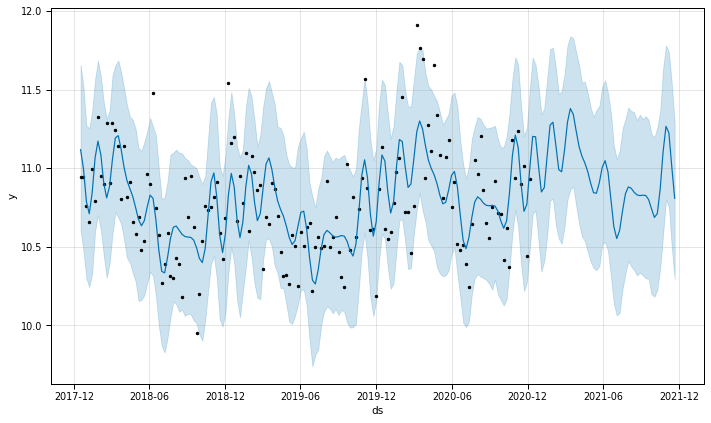

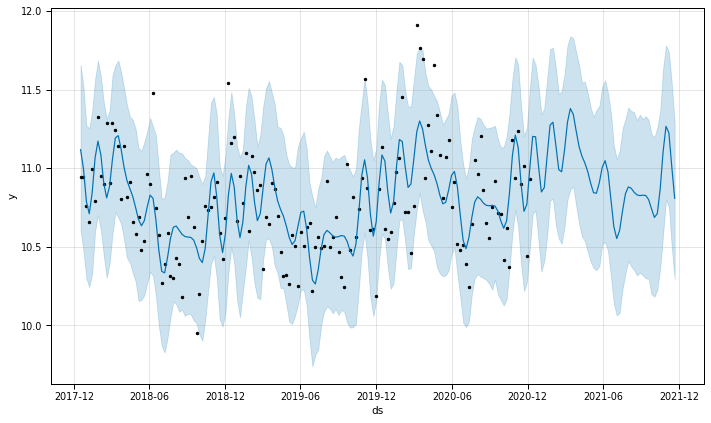

In [ ]:
from fbprophet import Prophet
m3 = Prophet(interval_width=0.95)
m3.fit(ts_df3)
future3 = m3.make_future_dataframe(periods = 50,freq='W')
forecast3 = m3.predict(future3)
m3.plot(forecast3)

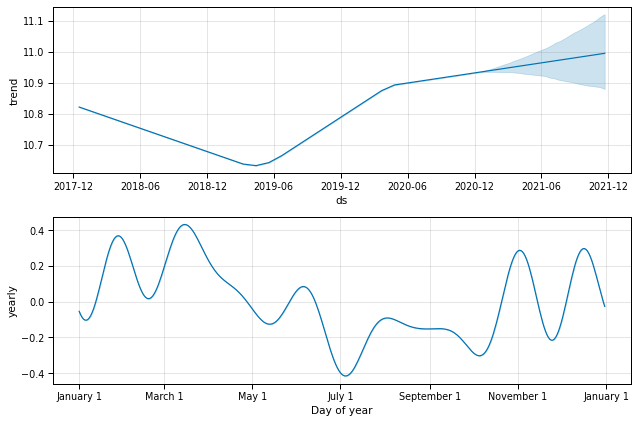

In [ ]:
#Plots to find if there is any seasonality
fig3 = m3.plot_components(forecast3)